In [2]:
using Pkg
Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

  Updating registry at `/opt/julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Updating git-repo `https://github.com/reworkhow/JWAS.jl.git`
 Resolving package versions...
 Installed NaNMath ──────────────── v0.3.5
 Installed StructTypes ──────────── v1.2.1
 Installed Parsers ──────────────── v1.0.15
 Installed Observables ──────────── v0.3.3
 Installed NearestNeighbors ─────── v0.4.8
 Installed LineSearches ─────────── v7.1.1
 Installed ForwardDiff ──────────── v0.10.14
 Installed Colors ───────────────── v0.12.6
 Installed DiffRules ────────────── v1.0.2
 Installed MacroTools ───────────── v0.5.6
 Installed Adapt ────────────────── v2.4.0
 Installed BinDeps ──────────────── v1.0.2
 Installed ProgressMeter ────────── v1.4.1
 Installed StaticArrays ─────────── v0.12.5
 Installed PlotUtils ────────────── v1.0.8
 Installed FileIO ───────────────── v1.4.5
 Installed DiffResults ──────────── v1.0.3
 Installed Conda ────────────────── v1.5.0
 In

In [3]:
Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.10.1 #master (https://github.com/reworkhow/JWAS.jl.git)


In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [7]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", 
    types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [8]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [9]:
Nur2ADG_model_equations = "Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID"
Nur2ADG_R=0.115504E-01
Nur2ADG_model=build_model(Nur2ADG_model_equations,Nur2ADG_R);

In [10]:
set_covariate(Nur2ADG_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [11]:
Nur2ADG_G1=0.107150E-02
set_random(Nur2ADG_model,"NurPenBatch",Nur2ADG_G1)

In [12]:
Nur2ADG_G2=0.927471E-03
set_random(Nur2ADG_model,"SowID",Nur2ADG_G2)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 28.933365 seconds (37.77 k allocations: 10.393 GiB, 0.11% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [14]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [15]:
Nur2ADG_G3=0.295395E-02
@time add_genotypes(Nur2ADG_model,M,Nur2ADG_G3,header=false, rowID=rowID)

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
282.974286 seconds (7.85 M allocations: 15.977 GiB, 0.31% gc time)


4.0f0

In [ ]:
# small genotype 
#Nur2ADG_G3=0.295395E-02
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

In [11]:
@time Nur2ADG_outCPi=runMCMC(Nur2ADG_model,phenotypes,methods="BayesC", missing_phenotypes=true, Pi= 0.98,
    estimatePi=true, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true, 
    output_samples_freqbbuency=100)

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = recode at recode.jl:354 [inlined]
└ @ Core /opt/julia/packages/CategoricalArrays/xjesC/src/recode.jl:354



The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 1.0e-6


A Linear Mixed Model was build using model equations:

Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
Died            factor       fixed                2
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436
SowID           factor       random            1119

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         5000
estimatePi                                     true
estimateScale                                  true
starting_value                                 true
printou

running MCMC for BayesC...100%|█████████████████████████| Time: 10:51:37




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


39135.273236 seconds (599.37 M allocations: 132.730 GiB, 0.07% gc time)


Dict{Any,Any} with 7 entries:
  "marker effects"          => 435172×5 DataFrame…
  "Pi"                      => 1×3 DataFrame…
  "EBV_Nur2ADG"             => 3205×3 DataFrame…
  "location parameters"     => 1609×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…

In [12]:
keys(Nur2ADG_outCPi)

Base.KeySet for a Dict{Any,Any} with 7 entries. Keys:
  "marker effects"
  "Pi"
  "EBV_Nur2ADG"
  "location parameters"
  "residual variance"
  "ScaleEffectVar"
  "marker effects variance"

In [18]:
Pi=Nur2ADG_outCPi["Pi"]

,π,Estimate,Std_Error
,Any,Any,Any
1,π,0.984313,0.0149664


In [19]:
Pi=CSV.read("MCMC_samples_pi.txt",delim = ' ',header=false)
insertcols!(Pi, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Column1
,Int64,Float64
1,1,0.976261
2,2,0.977098
3,3,0.983636
4,4,0.983844
5,5,0.98404
6,6,0.985361
7,7,0.988109
8,8,0.987654
9,9,0.990636


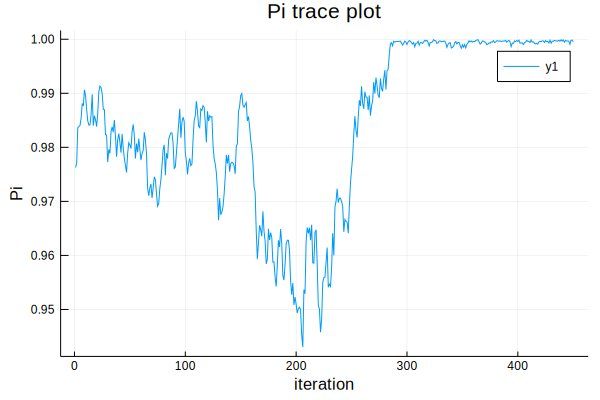

In [20]:
using Plots
x = Pi[!,1]; y = Pi[!,2]; # These are the plotting data
plot(x,y, title = "Pi trace plot",
        xlabel = "iteration", ylabel = "Pi")

In [21]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Nur2ADG
,Int64,Float64
1,1,0.276454
2,2,0.215681
3,3,0.192127
4,4,0.204963
5,5,0.180481
6,6,0.142195
7,7,0.174593
8,8,0.21437
9,9,0.147676


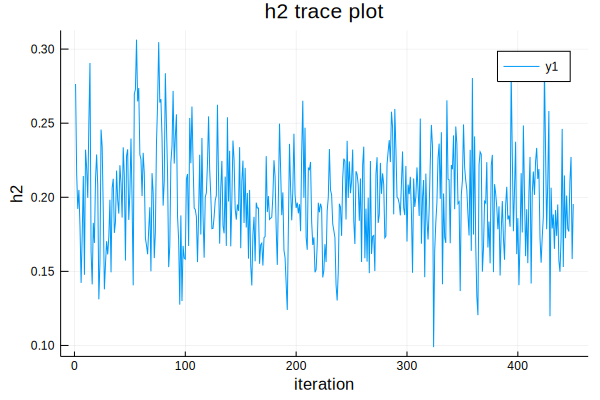

In [22]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [23]:
Nur2ADG_model_equations = "Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID"
Nur2ADG_R=0.115504E-01
Nur2ADG_model=build_model(Nur2ADG_model_equations,Nur2ADG_R);

In [24]:
set_covariate(Nur2ADG_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [25]:
Nur2ADG_G1=0.107150E-02
set_random(Nur2ADG_model,"NurPenBatch",Nur2ADG_G1)

In [26]:
Nur2ADG_G2=0.927471E-03
set_random(Nur2ADG_model,"SowID",Nur2ADG_G2)

In [27]:
Nur2ADG_G3=0.295395E-02
@time add_genotypes(Nur2ADG_model,M,Nur2ADG_G3,header=true, rowID=rowID)

435172 markers on 3205 individuals were added.
  7.683486 seconds (870.50 k allocations: 20.848 GiB, 10.31% gc time)


In [16]:
@time Nur2ADG_outB=runMCMC(Nur2ADG_model,phenotypes,methods="BayesB", missing_phenotypes=true,
    Pi=0.999,estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true, 
    output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0006 in the row 5 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0049 in the row 47 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0322 in the row 295 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0374 in the row 343 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0398 in the row 364 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 1711 in the row 1638 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 1746 in the row 1673 are missing. This record is deleted.
Phenotypes for all traits included in the model for indi

running MCMC ...100%|███████████████████████████████████| Time: 7:33:06




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


27252.908816 seconds (90.74 G allocations: 2.088 TiB, 1.45% gc time)


Dict{Any,Any} with 8 entries:
  "ScaleEffectVargeno"           => 1×3 DataFrame…
  "EBV_Nur2ADG"                  => 3205×3 DataFrame…
  "heritability"                 => 1×3 DataFrame…
  "location parameters"          => 1607×5 DataFrame…
  "residual variance"            => 1×3 DataFrame…
  "marker effects geno"          => 435172×5 DataFrame…
  "genetic_variance"             => 1×3 DataFrame…
  "marker effects variance geno" => 1×3 DataFrame…

In [2]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Nur2ADG
,Int64,Float64
1,1,0.176971
2,2,0.157042
3,3,0.184369
4,4,0.161427
5,5,0.190147
6,6,0.186672
7,7,0.172254
8,8,0.193974
9,9,0.192544


In [3]:
mean(h2[!,2])

0.2061368852984

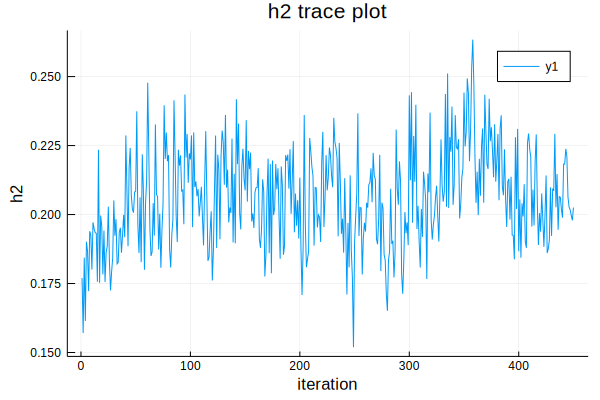

In [35]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [3]:
@time Nur2ADG_outB,Nur2ADG_winVarProps = GWAS("MCMC_samples_marker_effects_geno_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",M;header=true,window_size="0.25 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:19:34


BoundsError: BoundsError: attempt to access (9375×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 3952   │ 7      │ 23000000  │ 23250000  │ 23001142  │ 23249903  │ 78     │ 0.000169175    │ 0.000116659 │ 5.95     │ 0.846667   │ 0.846667  │
│ 2    │ 1     │ 8795   │ 17     │ 53250000  │ 53500000  │ 53279854  │ 53497557  │ 64     │ 7.86932e-5     │ 6.74426e-5  │ 2.76     │ 0.793333   │ 0.82      │
│ 3    │ 1     │ 3959   │ 7      │ 24750000  │ 25000000  │ 24764780  │ 24993022  │ 46     │ 7.32661e-5     │ 9.86515e-5  │ 2.53     │ 0.506667   │ 0.715556  │
│ 4    │ 1     │ 3948   │ 7      │ 22000000  │ 22250000  │ 22003711  │ 22248800  │ 57     │ 3.72297e-5     │ 6.35641e-5  │ 1.33     │ 0.38       │ 0.631667  │
│ 5    │ 1     │ 2306   │ 4      │ 17500000  │ 17750000  │ 17514513  │ 17744153  │ 56     │ 2.66333e-5     │ 5.14706e-5  │ 0.93     │ 0.328889   │ 0.571111  │
│ 6    │ 1     │ 5491   │ 10     │ 7500000   │ 7750000   │ 7501608   │ 7748100   │ 69     │ 1.66937e-5     │ 3.69269e-5  │ 0.58     │ 0.264444   │ 0.52      │
│ 7    │ 1     │ 3950   │ 7      │ 22500000  │ 22750000  │ 22501546  │ 22745850  │ 77     │ 2.93129e-5     │ 6.8514e-5   │ 1.03     │ 0.251111   │ 0.481587  │
│ 8    │ 1     │ 2850   │ 5      │ 22500000  │ 22750000  │ 22501140  │ 22747577  │ 46     │ 1.25835e-5     │ 3.04298e-5  │ 0.45     │ 0.242222   │ 0.451667  │
│ 9    │ 1     │ 6352   │ 13     │ 12500000  │ 12750000  │ 12502458  │ 12748539  │ 54     │ 9.30591e-6     │ 2.18639e-5  │ 0.33     │ 0.237778   │ 0.427901  │
│ 10   │ 1     │ 2219   │ 3      │ 128750000 │ 129000000 │ 128753460 │ 128997476 │ 49     │ 1.12356e-5     │ 2.91556e-5  │ 0.39     │ 0.231111   │ 0.408222  │
│ 11   │ 1     │ 3949   │ 7      │ 22250000  │ 22500000  │ 22253336  │ 22497178  │ 35     │ 2.2538e-5      │ 5.67548e-5  │ 0.8      │ 0.231111   │ 0.392121  │
│ 12   │ 1     │ 3954   │ 7      │ 23500000  │ 23750000  │ 23506483  │ 23744838  │ 62     │ 1.89815e-5     │ 4.38317e-5  │ 0.67     │ 0.222222   │ 0.377963  │
│ 13   │ 1     │ 8811   │ 17     │ 57250000  │ 57500000  │ 57251888  │ 57499464  │ 69     │ 1.09217e-5     │ 2.92385e-5  │ 0.38     │ 0.206667   │ 0.364786  │
│ 14   │ 1     │ 3929   │ 7      │ 17250000  │ 17500000  │ 17251875  │ 17489256  │ 66     │ 7.62229e-6     │ 2.12563e-5  │ 0.27     │ 0.197778   │ 0.352857  │
│ 15   │ 1     │ 6      │ 1      │ 1250000   │ 1500000   │ 1252256   │ 1499068   │ 72     │ 5.74615e-6     │ 1.91062e-5  │ 0.2      │ 0.175556   │ 0.341037  │
│ 16   │ 1     │ 3195   │ 6      │ 4000000   │ 4250000   │ 4004938   │ 4247026   │ 59     │ 6.08866e-6     │ 1.92774e-5  │ 0.21     │ 0.166667   │ 0.330139  │
│ 17   │ 1     │ 2220   │ 3      │ 129000000 │ 129250000 │ 129000890 │ 129246996 │ 45     │ 8.19041e-6     │ 2.75516e-5  │ 0.28     │ 0.155556   │ 0.319869  │
│ 18   │ 1     │ 2872   │ 5      │ 28000000  │ 28250000  │ 28008002  │ 28248231  │ 55     │ 7.34032e-6     │ 2.41706e-5  │ 0.26     │ 0.155556   │ 0.310741  │
│ 19   │ 1     │ 7617   │ 14     │ 120750000 │ 121000000 │ 120756725 │ 120994363 │ 39     │ 5.98975e-6     │ 1.9496e-5   │ 0.22     │ 0.148889   │ 0.302222  │
│ 20   │ 1     │ 3451   │ 6      │ 68500000  │ 68750000  │ 68501727  │ 68746870  │ 63     │ 4.09753e-6     │ 1.29587e-5  │ 0.15     │ 0.144444   │ 0.294333  │
│ 21   │ 1     │ 5401   │ 9      │ 124500000 │ 124750000 │ 124501448 │ 124745842 │ 61     │ 5.64109e-6     │ 1.98297e-5  │ 0.2      │ 0.144444   │ 0.287196  │
│ 22   │ 1     │ 8846   │ 18     │ 2750000   │ 3000000   │ 2751682   │ 2994394   │ 77     │ 3.46585e-6     │ 1.13967e-5  │ 0.12     │ 0.144444   │ 0.280707  │
│ 23   │ 1     │ 4831   │ 8      │ 120750000 │ 121000000 │ 120750855 │ 120996281 │ 47     │ 4.25218e-6     │ 1.38251e-5  │ 0.15     │ 0.142222   │ 0.274686  │
│ 24   │ 1     │ 4894   │ 8      │ 136500000 │ 136750000 │ 136501036 │ 136748773 │ 81     │ 3.21463e-6     │ 1.06276e-5  │ 0.11     │ 0.14       │ 0.269074  │
│ 25   │ 1     │ 3194   │ 6      │ 3750000   │ 4000000   │ 3754464   │ 3998114   │ 80     │ 4.37643e-6     │ 1.63706e-5  │ 0.15     │ 0.135556   │ 0.263733  │
│ 26   │ 1     │ 4649   │ 8      │ 75250000  │ 75500000  │ 75277043  │ 75477577  │ 51     │ 4.51363e-6     │ 1.55617e-5  │ 0.16     │ 0.131111   │ 0.258632  │
│ 27   │ 1     │ 3957   │ 7      │ 24250000  │ 24500000  │ 24253412  │ 24491157  │ 37     │ 7.87287e-6     │ 2.98498e-5  │ 0.29     │ 0.126667   │ 0.253745  │
│ 28   │ 1     │ 2746   │ 4      │ 127500000 │ 127750000 │ 127500392 │ 127749186 │ 59     │ 3.53727e-6     │ 1.50407e-5  │ 0.12     │ 0.124444   │ 0.249127  │
│ 29   │ 1     │ 4694   │ 8      │ 86500000  │ 86750000  │ 86500716  │ 86746942  │ 59     │ 3.10042e-6     │ 1.25298e-5  │ 0.11     │ 0.12       │ 0.244674  │
│ 30   │ 1     │ 953    │ 1      │ 238250000 │ 238500000 │ 238252685 │ 238498818 │ 59     │ 3.47494e-6     │ 1.2351e-5   │ 0.12     │ 0.117778   │ 0.240444  │
│ 31   │ 1     │ 1329   │ 2      │ 58250000  │ 58500000  │ 58265184  │ 58491189  │ 15     │ 1.09103e-5     │ 3.85276e-5  │ 0.38     │ 0.115556   │ 0.236416  │
│ 32   │ 1     │ 2199   │ 3      │ 123750000 │ 124000000 │ 123755927 │ 123998700 │ 67     │ 2.61688e-6     │ 1.05878e-5  │ 0.09     │ 0.113333   │ 0.232569  │
│ 33   │ 1     │ 2305   │ 4      │ 17250000  │ 17500000  │ 17256872  │ 17490733  │ 55     │ 6.51424e-6     │ 2.54671e-5  │ 0.23     │ 0.113333   │ 0.228956  │
│ 34   │ 1     │ 5484   │ 10     │ 5750000   │ 6000000   │ 5751390   │ 5997111   │ 53     │ 4.04681e-6     │ 1.60663e-5  │ 0.14     │ 0.113333   │ 0.225556  │
│ 35   │ 1     │ 1292   │ 2      │ 48750000  │ 49000000  │ 48751201  │ 48986881  │ 52     │ 5.38636e-6     │ 2.03055e-5  │ 0.19     │ 0.111111   │ 0.222286  │
│ 36   │ 1     │ 1748   │ 3      │ 11000000  │ 11250000  │ 11001814  │ 11249284  │ 70     │ 2.62979e-6     │ 9.74808e-6  │ 0.09     │ 0.108889   │ 0.219136  │
│ 37   │ 1     │ 3567   │ 6      │ 97500000  │ 97750000  │ 97509061  │ 97747973  │ 75     │ 3.87514e-6     │ 1.37808e-5  │ 0.13     │ 0.108889   │ 0.216156  │
│ 38   │ 1     │ 5636   │ 10     │ 43750000  │ 44000000  │ 43753309  │ 43997605  │ 58     │ 3.06397e-6     │ 1.16719e-5  │ 0.11     │ 0.108889   │ 0.213333  │
│ 39   │ 1     │ 1164   │ 2      │ 16750000  │ 17000000  │ 16752843  │ 16999821  │ 70     │ 2.52529e-6     │ 9.61796e-6  │ 0.09     │ 0.106667   │ 0.210598  │
│ 40   │ 1     │ 2092   │ 3      │ 97000000  │ 97250000  │ 97007094  │ 97247809  │ 69     │ 3.77343e-6     │ 1.4948e-5   │ 0.13     │ 0.106667   │ 0.208     │
│ 41   │ 1     │ 7342   │ 14     │ 52000000  │ 52250000  │ 52002744  │ 52245906  │ 49     │ 5.60162e-6     │ 2.31893e-5  │ 0.2      │ 0.106667   │ 0.205528  │
│ 42   │ 1     │ 3006   │ 5      │ 61500000  │ 61750000  │ 61507336  │ 61744841  │ 53     │ 4.37912e-6     │ 1.60624e-5  │ 0.16     │ 0.104444   │ 0.203122  │
│ 43   │ 1     │ 1068   │ 1      │ 267000000 │ 267250000 │ 267004702 │ 267246675 │ 45     │ 1.96585e-6     │ 8.38795e-6  │ 0.07     │ 0.1        │ 0.200724  │
│ 44   │ 1     │ 3568   │ 6      │ 97750000  │ 98000000  │ 97751731  │ 97998157  │ 61     │ 1.46036e-6     │ 5.44354e-6  │ 0.05     │ 0.1        │ 0.198434  │
│ 45   │ 1     │ 4034   │ 7      │ 43500000  │ 43750000  │ 43501436  │ 43749668  │ 67     │ 2.60636e-6     │ 1.04087e-5  │ 0.09     │ 0.1        │ 0.196247  │
│ 46   │ 1     │ 1293   │ 2      │ 49000000  │ 49250000  │ 49001520  │ 49240948  │ 55     │ 4.44241e-6     │ 1.85763e-5  │ 0.15     │ 0.0977778  │ 0.194106  │
│ 47   │ 1     │ 4879   │ 8      │ 132750000 │ 133000000 │ 132752758 │ 132996052 │ 77     │ 2.04488e-6     │ 9.72424e-6  │ 0.07     │ 0.0955556  │ 0.192009  │
│ 48   │ 1     │ 31     │ 1      │ 7500000   │ 7750000   │ 7513299   │ 7749903   │ 66     │ 1.85516e-6     │ 7.93081e-6  │ 0.07     │ 0.0933333  │ 0.189954  │
│ 49   │ 1     │ 1647   │ 2      │ 137750000 │ 138000000 │ 137750935 │ 137999503 │ 77     │ 2.58596e-6     │ 1.28458e-5  │ 0.09     │ 0.0933333  │ 0.187982  │
│ 50   │ 1     │ 2218   │ 3      │ 128500000 │ 128750000 │ 128506592 │ 128748188 │ 53     │ 2.06714e-6     │ 8.2154e-6   │ 0.07     │ 0.0933333  │ 0.186089  │
│ 51   │ 1     │ 2307   │ 4      │ 17750000  │ 18000000  │ 17750301  │ 17998425  │ 62     │ 2.2623e-6      │ 1.04272e-5  │ 0.08     │ 0.0933333  │ 0.18427   │
│ 52   │ 1     │ 3939   │ 7      │ 19750000  │ 20000000  │ 19751868  │ 19998274  │ 58     │ 5.02959e-6     │ 2.25039e-5  │ 0.17     │ 0.0933333  │ 0.182521  │
│ 53   │ 1     │ 871    │ 1      │ 217750000 │ 218000000 │ 217751243 │ 217985838 │ 51     │ 2.21347e-6     │ 8.16534e-6  │ 0.08     │ 0.0911111  │ 0.180797  │
│ 54   │ 1     │ 3962   │ 7      │ 25500000  │ 25750000  │ 25502512  │ 25748770  │ 67     │ 4.30672e-6     │ 1.87672e-5  │ 0.15     │ 0.0911111  │ 0.179136  │
│ 55   │ 1     │ 2853   │ 5      │ 23250000  │ 23500000  │ 23266607  │ 23498486  │ 59     │ 2.73364e-6     │ 1.36576e-5  │ 0.09     │ 0.0888889  │ 0.177495  │
│ 56   │ 1     │ 7350   │ 14     │ 54000000  │ 54250000  │ 54006810  │ 54248395  │ 61     │ 1.66558e-6     │ 7.71304e-6  │ 0.06     │ 0.0888889  │ 0.175913  │
│ 57   │ 1     │ 8810   │ 17     │ 57000000  │ 57250000  │ 57006273  │ 57243838  │ 48     │ 3.26725e-6     │ 1.49711e-5  │ 0.11     │ 0.0888889  │ 0.174386  │
│ 58   │ 1     │ 1813   │ 3      │ 27250000  │ 27500000  │ 27252572  │ 27499161  │ 77     │ 2.35572e-6     │ 1.1636e-5   │ 0.08     │ 0.0866667  │ 0.172874  │
│ 59   │ 1     │ 3892   │ 7      │ 8000000   │ 8250000   │ 8004153   │ 8242035   │ 44     │ 1.53492e-6     │ 6.31649e-6  │ 0.05     │ 0.0866667  │ 0.171412  │
│ 60   │ 1     │ 3930   │ 7      │ 17500000  │ 17750000  │ 17509702  │ 17748012  │ 74     │ 1.69876e-6     │ 7.40137e-6  │ 0.06     │ 0.0866667  │ 0.17      │
│ 61   │ 1     │ 4130   │ 7      │ 67500000  │ 67750000  │ 67504909  │ 67748519  │ 63     │ 2.72037e-6     │ 1.51009e-5  │ 0.09     │ 0.0866667  │ 0.168634  │
│ 62   │ 1     │ 6117   │ 12     │ 15500000  │ 15750000  │ 15501252  │ 15664072  │ 43     │ 2.41948e-6     │ 9.67049e-6  │ 0.08     │ 0.0866667  │ 0.167312  │
│ 63   │ 1     │ 8882   │ 18     │ 11750000  │ 12000000  │ 11750584  │ 11998800  │ 66     │ 2.64015e-6     │ 1.19492e-5  │ 0.09     │ 0.0866667  │ 0.166032  │
│ 64   │ 1     │ 1648   │ 2      │ 138000000 │ 138250000 │ 138004354 │ 138243756 │ 64     │ 1.5889e-6      │ 7.02108e-6  │ 0.06     │ 0.0844444  │ 0.164757  │
│ 65   │ 1     │ 5552   │ 10     │ 22750000  │ 23000000  │ 22797431  │ 22995215  │ 52     │ 2.65828e-6     │ 1.34291e-5  │ 0.09     │ 0.0844444  │ 0.163521  │
│ 66   │ 1     │ 6451   │ 13     │ 37250000  │ 37500000  │ 37252987  │ 37499415  │ 53     │ 1.50974e-6     │ 7.20479e-6  │ 0.05     │ 0.0844444  │ 0.162323  │
│ 67   │ 1     │ 7546   │ 14     │ 103000000 │ 103250000 │ 103004166 │ 103243346 │ 39     │ 2.34659e-6     │ 1.35492e-5  │ 0.08     │ 0.0844444  │ 0.161161  │
│ 68   │ 1     │ 9019   │ 18     │ 46000000  │ 46250000  │ 46008401  │ 46249295  │ 73     │ 3.10191e-6     │ 1.37788e-5  │ 0.11     │ 0.0844444  │ 0.160033  │
│ 69   │ 1     │ 2416   │ 4      │ 45000000  │ 45250000  │ 45006343  │ 45247881  │ 30     │ 3.75463e-6     │ 1.69403e-5  │ 0.13     │ 0.0822222  │ 0.158905  │
│ 70   │ 1     │ 2480   │ 4      │ 61000000  │ 61250000  │ 61002866  │ 61243768  │ 36     │ 2.8086e-6      │ 1.12427e-5  │ 0.1      │ 0.0822222  │ 0.15781   │
│ 71   │ 1     │ 3845   │ 6      │ 167250000 │ 167500000 │ 167250784 │ 167497141 │ 62     │ 2.45242e-6     │ 1.32724e-5  │ 0.09     │ 0.0822222  │ 0.156745  │
│ 72   │ 1     │ 4693   │ 8      │ 86250000  │ 86500000  │ 86251027  │ 86498022  │ 65     │ 1.81102e-6     │ 8.6027e-6   │ 0.06     │ 0.0822222  │ 0.15571   │
│ 73   │ 1     │ 5188   │ 9      │ 71250000  │ 71500000  │ 71253043  │ 71499430  │ 48     │ 1.48571e-6     │ 6.93492e-6  │ 0.05     │ 0.0822222  │ 0.154703  │
│ 74   │ 1     │ 7367   │ 14     │ 58250000  │ 58500000  │ 58251522  │ 58496910  │ 62     │ 2.12654e-6     │ 9.8222e-6   │ 0.07     │ 0.0822222  │ 0.153724  │
│ 75   │ 1     │ 7711   │ 15     │ 2500000   │ 2750000   │ 2503728   │ 2743894   │ 73     │ 2.19356e-6     │ 1.08729e-5  │ 0.08     │ 0.0822222  │ 0.15277   │
│ 76   │ 1     │ 990    │ 1      │ 247500000 │ 247750000 │ 247501425 │ 247741609 │ 31     │ 2.37807e-6     │ 1.09286e-5  │ 0.08     │ 0.08       │ 0.151813  │
│ 77   │ 1     │ 2244   │ 4      │ 2000000   │ 2250000   │ 2002107   │ 2248443   │ 62     │ 1.32101e-6     │ 6.03753e-6  │ 0.05     │ 0.08       │ 0.15088   │
│ 78   │ 1     │ 2648   │ 4      │ 103000000 │ 103250000 │ 103001016 │ 103244680 │ 66     │ 1.49301e-6     │ 6.76278e-6  │ 0.05     │ 0.08       │ 0.149972  │
│ 79   │ 1     │ 2674   │ 4      │ 109500000 │ 109750000 │ 109506947 │ 109749761 │ 56     │ 2.30046e-6     │ 1.08942e-5  │ 0.08     │ 0.08       │ 0.149086  │
│ 80   │ 1     │ 3928   │ 7      │ 17000000  │ 17250000  │ 17002783  │ 17248906  │ 66     │ 1.35888e-6     │ 6.14105e-6  │ 0.05     │ 0.08       │ 0.148222  │
│ 81   │ 1     │ 3947   │ 7      │ 21750000  │ 22000000  │ 21753379  │ 21991079  │ 32     │ 5.87973e-6     │ 3.03133e-5  │ 0.21     │ 0.08       │ 0.14738   │
│ 82   │ 1     │ 4701   │ 8      │ 88250000  │ 88500000  │ 88254662  │ 88498916  │ 48     │ 2.09878e-6     │ 1.08535e-5  │ 0.08     │ 0.08       │ 0.146558  │
│ 83   │ 1     │ 5243   │ 9      │ 85000000  │ 85250000  │ 85007060  │ 85249627  │ 60     │ 1.48547e-6     │ 8.17917e-6  │ 0.05     │ 0.08       │ 0.145756  │
│ 84   │ 1     │ 8904   │ 18     │ 17250000  │ 17500000  │ 17260617  │ 17498264  │ 66     │ 1.4256e-6      │ 6.40296e-6  │ 0.05     │ 0.08       │ 0.144974  │
│ 85   │ 1     │ 1107   │ 2      │ 2500000   │ 2750000   │ 2556939   │ 2747384   │ 47     │ 3.45087e-6     │ 1.7306e-5   │ 0.12     │ 0.0777778  │ 0.144183  │
│ 86   │ 1     │ 1786   │ 3      │ 20500000  │ 20750000  │ 20502381  │ 20749758  │ 70     │ 1.27769e-6     │ 6.11044e-6  │ 0.04     │ 0.0777778  │ 0.143411  │
│ 87   │ 1     │ 3938   │ 7      │ 19500000  │ 19750000  │ 19504743  │ 19744719  │ 65     │ 1.99104e-6     │ 9.92394e-6  │ 0.07     │ 0.0777778  │ 0.142656  │
│ 88   │ 1     │ 4939   │ 9      │ 8750000   │ 9000000   │ 8751884   │ 8997965   │ 45     │ 2.82533e-6     │ 1.33395e-5  │ 0.1      │ 0.0777778  │ 0.141919  │
│ 89   │ 1     │ 5244   │ 9      │ 85250000  │ 85500000  │ 85253403  │ 85497600  │ 57     │ 1.50413e-6     │ 7.61353e-6  │ 0.05     │ 0.0777778  │ 0.141199  │
│ 90   │ 1     │ 8613   │ 17     │ 7750000   │ 8000000   │ 7759640   │ 7998227   │ 59     │ 1.7188e-6      │ 9.19538e-6  │ 0.06     │ 0.0777778  │ 0.140494  │
│ 91   │ 1     │ 5      │ 1      │ 1000000   │ 1250000   │ 1005658   │ 1248474   │ 79     │ 8.22119e-7     │ 3.75619e-6  │ 0.03     │ 0.0755556  │ 0.13978   │
│ 92   │ 1     │ 2419   │ 4      │ 45750000  │ 46000000  │ 45750277  │ 45928050  │ 36     │ 3.65477e-6     │ 2.08374e-5  │ 0.13     │ 0.0755556  │ 0.139082  │
│ 93   │ 1     │ 2420   │ 4      │ 46000000  │ 46250000  │ 46009175  │ 46249307  │ 42     │ 2.29745e-6     │ 1.15765e-5  │ 0.08     │ 0.0755556  │ 0.138399  │
│ 94   │ 1     │ 3007   │ 5      │ 61750000  │ 62000000  │ 61750778  │ 61991026  │ 81     │ 1.59582e-6     │ 7.58565e-6  │ 0.06     │ 0.0755556  │ 0.13773   │
│ 95   │ 1     │ 3870   │ 7      │ 2500000   │ 2750000   │ 2504298   │ 2749878   │ 76     │ 1.31061e-6     │ 5.89175e-6  │ 0.05     │ 0.0755556  │ 0.137076  │
│ 96   │ 1     │ 4892   │ 8      │ 136000000 │ 136250000 │ 136000761 │ 136249787 │ 74     │ 1.27664e-6     │ 5.60489e-6  │ 0.05     │ 0.0755556  │ 0.136435  │
│ 97   │ 1     │ 5635   │ 10     │ 43500000  │ 43750000  │ 43501152  │ 43748989  │ 80     │ 1.35764e-6     │ 6.36071e-6  │ 0.05     │ 0.0755556  │ 0.135808  │
│ 98   │ 1     │ 7341   │ 14     │ 51750000  │ 52000000  │ 51773402  │ 51999578  │ 43     │ 2.10886e-6     │ 9.72422e-6  │ 0.07     │ 0.0755556  │ 0.135193  │
│ 99   │ 1     │ 7351   │ 14     │ 54250000  │ 54500000  │ 54253686  │ 54498143  │ 61     │ 1.46256e-6     │ 6.81553e-6  │ 0.05     │ 0.0755556  │ 0.13459   │
│ 100  │ 1     │ 8615   │ 17     │ 8250000   │ 8500000   │ 8257591   │ 8499911   │ 56     │ 2.05522e-6     │ 9.81089e-6  │ 0.07     │ 0.0755556  │ 0.134     │
│ 101  │ 1     │ 135    │ 1      │ 33500000  │ 33750000  │ 33505607  │ 33746133  │ 76     │ 1.23055e-6     │ 5.96519e-6  │ 0.04     │ 0.0733333  │ 0.133399  │
│ 102  │ 1     │ 983    │ 1      │ 245750000 │ 246000000 │ 245754288 │ 245989729 │ 42     │ 1.86372e-6     │ 8.20749e-6  │ 0.07     │ 0.0733333  │ 0.13281   │
│ 103  │ 1     │ 3441   │ 6      │ 66000000  │ 66250000  │ 66003236  │ 66247216  │ 74     │ 1.3025e-6      │ 7.85891e-6  │ 0.04     │ 0.0733333  │ 0.132233  │
│ 104  │ 1     │ 3445   │ 6      │ 67000000  │ 67250000  │ 67008777  │ 67246013  │ 56     │ 1.3851e-6      │ 6.41541e-6  │ 0.05     │ 0.0733333  │ 0.131667  │
│ 105  │ 1     │ 3932   │ 7      │ 18000000  │ 18250000  │ 18000280  │ 18248308  │ 63     │ 1.27855e-6     │ 5.92834e-6  │ 0.04     │ 0.0733333  │ 0.131111  │
│ 106  │ 1     │ 4017   │ 7      │ 39250000  │ 39500000  │ 39250511  │ 39493108  │ 49     │ 2.03333e-6     │ 1.1314e-5   │ 0.07     │ 0.0733333  │ 0.130566  │
│ 107  │ 1     │ 5673   │ 10     │ 53000000  │ 53250000  │ 53001759  │ 53243615  │ 43     │ 1.53234e-6     │ 6.97355e-6  │ 0.06     │ 0.0733333  │ 0.130031  │
│ 108  │ 1     │ 5675   │ 10     │ 53500000  │ 53750000  │ 53505963  │ 53748673  │ 76     │ 9.19235e-7     │ 3.98838e-6  │ 0.03     │ 0.0733333  │ 0.129506  │
│ 109  │ 1     │ 7316   │ 14     │ 45500000  │ 45750000  │ 45509383  │ 45748047  │ 51     │ 2.8922e-6      │ 1.45681e-5  │ 0.1      │ 0.0733333  │ 0.128991  │
│ 110  │ 1     │ 8692   │ 17     │ 27500000  │ 27750000  │ 27501543  │ 27748749  │ 72     │ 1.04014e-6     │ 4.6525e-6   │ 0.04     │ 0.0733333  │ 0.128485  │
│ 111  │ 1     │ 8845   │ 18     │ 2500000   │ 2750000   │ 2503901   │ 2748020   │ 59     │ 1.57162e-6     │ 7.94238e-6  │ 0.05     │ 0.0733333  │ 0.127988  │
│ 112  │ 1     │ 1727   │ 3      │ 5750000   │ 6000000   │ 5750822   │ 5997754   │ 76     │ 1.54722e-6     │ 1.04193e-5  │ 0.05     │ 0.0711111  │ 0.12748   │
│ 113  │ 1     │ 2851   │ 5      │ 22750000  │ 23000000  │ 22750809  │ 22924983  │ 26     │ 2.60838e-6     │ 1.37972e-5  │ 0.09     │ 0.0711111  │ 0.126981  │
│ 114  │ 1     │ 3448   │ 6      │ 67750000  │ 68000000  │ 67753465  │ 67983431  │ 50     │ 1.47791e-6     │ 8.69131e-6  │ 0.05     │ 0.0711111  │ 0.126491  │
│ 115  │ 1     │ 3795   │ 6      │ 154750000 │ 155000000 │ 154750461 │ 154998189 │ 75     │ 1.11347e-6     │ 6.81891e-6  │ 0.04     │ 0.0711111  │ 0.12601   │
│ 116  │ 1     │ 4881   │ 8      │ 133250000 │ 133500000 │ 133250692 │ 133499320 │ 72     │ 1.86857e-6     │ 1.08656e-5  │ 0.07     │ 0.0711111  │ 0.125536  │
│ 117  │ 1     │ 6096   │ 12     │ 10250000  │ 10500000  │ 10252009  │ 10488061  │ 55     │ 3.4156e-6      │ 1.61321e-5  │ 0.12     │ 0.0711111  │ 0.125071  │
│ 118  │ 1     │ 7291   │ 14     │ 39250000  │ 39500000  │ 39254698  │ 39495748  │ 54     │ 1.9948e-6      │ 9.31326e-6  │ 0.07     │ 0.0711111  │ 0.124614  │
│ 119  │ 1     │ 2298   │ 4      │ 15500000  │ 15750000  │ 15501051  │ 15745338  │ 73     │ 1.11279e-6     │ 5.20941e-6  │ 0.04     │ 0.0688889  │ 0.124146  │
│ 120  │ 1     │ 3953   │ 7      │ 23250000  │ 23500000  │ 23252697  │ 23496766  │ 65     │ 3.9006e-6      │ 2.0193e-5   │ 0.14     │ 0.0688889  │ 0.123685  │
│ 121  │ 1     │ 6680   │ 13     │ 94500000  │ 94750000  │ 94500312  │ 94749158  │ 64     │ 1.40341e-6     │ 7.5219e-6   │ 0.05     │ 0.0688889  │ 0.123232  │
│ 122  │ 1     │ 6681   │ 13     │ 94750000  │ 95000000  │ 94756422  │ 94997891  │ 54     │ 1.25328e-6     │ 6.67209e-6  │ 0.04     │ 0.0688889  │ 0.122787  │
│ 123  │ 1     │ 7902   │ 15     │ 50250000  │ 50500000  │ 50255267  │ 50496997  │ 68     │ 1.62782e-6     │ 8.90675e-6  │ 0.06     │ 0.0688889  │ 0.122349  │
│ 124  │ 1     │ 8404   │ 16     │ 35500000  │ 35750000  │ 35503532  │ 35744468  │ 66     │ 1.11674e-6     │ 6.02826e-6  │ 0.04     │ 0.0688889  │ 0.121918  │
│ 125  │ 1     │ 8921   │ 18     │ 21500000  │ 21750000  │ 21507443  │ 21738080  │ 53     │ 1.3953e-6      │ 7.05842e-6  │ 0.05     │ 0.0688889  │ 0.121493  │
│ 126  │ 1     │ 1328   │ 2      │ 58000000  │ 58250000  │ 58047658  │ 58235837  │ 16     │ 4.37015e-6     │ 2.11038e-5  │ 0.16     │ 0.0666667  │ 0.121058  │
│ 127  │ 1     │ 2222   │ 3      │ 129500000 │ 129750000 │ 129502968 │ 129748906 │ 80     │ 1.29229e-6     │ 6.11084e-6  │ 0.04     │ 0.0666667  │ 0.12063   │
│ 128  │ 1     │ 2269   │ 4      │ 8250000   │ 8500000   │ 8255162   │ 8495687   │ 59     │ 1.01775e-6     │ 4.70294e-6  │ 0.04     │ 0.0666667  │ 0.120208  │
│ 129  │ 1     │ 2270   │ 4      │ 8500000   │ 8750000   │ 8501840   │ 8748477   │ 73     │ 1.53616e-6     │ 8.85726e-6  │ 0.05     │ 0.0666667  │ 0.119793  │
│ 130  │ 1     │ 3933   │ 7      │ 18250000  │ 18500000  │ 18281304  │ 18430672  │ 37     │ 3.3875e-6      │ 1.69302e-5  │ 0.12     │ 0.0666667  │ 0.119385  │
│ 131  │ 1     │ 4880   │ 8      │ 133000000 │ 133250000 │ 133005049 │ 133247899 │ 59     │ 1.65866e-6     │ 7.8836e-6   │ 0.06     │ 0.0666667  │ 0.118982  │
│ 132  │ 1     │ 6358   │ 13     │ 14000000  │ 14250000  │ 14000314  │ 14247775  │ 60     │ 1.38713e-6     │ 6.89647e-6  │ 0.05     │ 0.0666667  │ 0.118586  │
│ 133  │ 1     │ 6967   │ 13     │ 166500000 │ 166750000 │ 166508348 │ 166746011 │ 45     │ 1.70583e-6     │ 9.65127e-6  │ 0.06     │ 0.0666667  │ 0.118195  │
│ 134  │ 1     │ 7325   │ 14     │ 47750000  │ 48000000  │ 47750613  │ 47999414  │ 75     │ 2.0836e-6      │ 1.10867e-5  │ 0.08     │ 0.0666667  │ 0.117811  │
│ 135  │ 1     │ 7348   │ 14     │ 53500000  │ 53750000  │ 53505622  │ 53749252  │ 59     │ 1.7024e-6      │ 1.0576e-5   │ 0.06     │ 0.0666667  │ 0.117432  │
│ 136  │ 1     │ 7352   │ 14     │ 54500000  │ 54750000  │ 54500038  │ 54749543  │ 66     │ 2.04955e-6     │ 1.09478e-5  │ 0.07     │ 0.0666667  │ 0.117059  │
│ 137  │ 1     │ 7361   │ 14     │ 56750000  │ 57000000  │ 56754209  │ 56995943  │ 68     │ 1.60401e-6     │ 9.75562e-6  │ 0.06     │ 0.0666667  │ 0.116691  │
│ 138  │ 1     │ 7633   │ 14     │ 124750000 │ 125000000 │ 124756821 │ 124998323 │ 74     │ 1.74908e-6     │ 1.02167e-5  │ 0.06     │ 0.0666667  │ 0.116329  │
│ 139  │ 1     │ 8332   │ 16     │ 17500000  │ 17750000  │ 17504294  │ 17747716  │ 66     │ 1.56343e-6     │ 9.47819e-6  │ 0.05     │ 0.0666667  │ 0.115971  │
│ 140  │ 1     │ 8334   │ 16     │ 18000000  │ 18250000  │ 18001119  │ 18247679  │ 72     │ 1.6528e-6      │ 9.01139e-6  │ 0.06     │ 0.0666667  │ 0.115619  │
│ 141  │ 1     │ 9017   │ 18     │ 45500000  │ 45750000  │ 45503620  │ 45747600  │ 63     │ 1.22839e-6     │ 6.68573e-6  │ 0.04     │ 0.0666667  │ 0.115272  │
│ 142  │ 1     │ 2267   │ 4      │ 7750000   │ 8000000   │ 7755757   │ 7999400   │ 61     │ 2.26798e-6     │ 1.11541e-5  │ 0.08     │ 0.0644444  │ 0.114914  │
│ 143  │ 1     │ 2390   │ 4      │ 38500000  │ 38750000  │ 38502873  │ 38742967  │ 32     │ 1.46022e-6     │ 7.00521e-6  │ 0.05     │ 0.0644444  │ 0.114561  │
│ 144  │ 1     │ 2417   │ 4      │ 45250000  │ 45500000  │ 45254493  │ 45489030  │ 39     │ 2.38073e-6     │ 1.33596e-5  │ 0.09     │ 0.0644444  │ 0.114213  │
│ 145  │ 1     │ 2428   │ 4      │ 48000000  │ 48250000  │ 48005374  │ 48246464  │ 30     │ 2.16207e-6     │ 1.12366e-5  │ 0.08     │ 0.0644444  │ 0.11387   │
│ 146  │ 1     │ 2479   │ 4      │ 60750000  │ 61000000  │ 60750431  │ 60988280  │ 61     │ 1.43291e-6     │ 1.11165e-5  │ 0.05     │ 0.0644444  │ 0.113531  │
│ 147  │ 1     │ 2647   │ 4      │ 102750000 │ 103000000 │ 102752115 │ 102997480 │ 55     │ 1.95501e-6     │ 1.07879e-5  │ 0.07     │ 0.0644444  │ 0.113197  │
│ 148  │ 1     │ 3167   │ 5      │ 101750000 │ 102000000 │ 101750667 │ 101995416 │ 73     │ 9.99109e-7     │ 5.97603e-6  │ 0.04     │ 0.0644444  │ 0.112868  │
│ 149  │ 1     │ 3454   │ 6      │ 69250000  │ 69500000  │ 69254296  │ 69498581  │ 63     │ 8.49065e-7     │ 4.07766e-6  │ 0.03     │ 0.0644444  │ 0.112543  │
│ 150  │ 1     │ 3878   │ 7      │ 4500000   │ 4750000   │ 4501048   │ 4748257   │ 55     │ 1.20327e-6     │ 6.88449e-6  │ 0.04     │ 0.0644444  │ 0.112222  │
│ 151  │ 1     │ 3951   │ 7      │ 22750000  │ 23000000  │ 22752463  │ 22970603  │ 19     │ 4.97907e-6     │ 2.56824e-5  │ 0.18     │ 0.0644444  │ 0.111906  │
│ 152  │ 1     │ 3960   │ 7      │ 25000000  │ 25250000  │ 25001072  │ 25248747  │ 61     │ 2.3251e-6      │ 1.66689e-5  │ 0.07     │ 0.0644444  │ 0.111594  │
│ 153  │ 1     │ 3965   │ 7      │ 26250000  │ 26500000  │ 26250728  │ 26494588  │ 60     │ 1.62037e-6     │ 9.58604e-6  │ 0.06     │ 0.0644444  │ 0.111285  │
│ 154  │ 1     │ 4208   │ 7      │ 87000000  │ 87250000  │ 87003720  │ 87246599  │ 73     │ 2.35036e-6     │ 1.47692e-5  │ 0.08     │ 0.0644444  │ 0.110981  │
│ 155  │ 1     │ 4383   │ 8      │ 8750000   │ 9000000   │ 8756520   │ 8994563   │ 66     │ 1.35551e-6     │ 6.98288e-6  │ 0.05     │ 0.0644444  │ 0.110681  │
│ 156  │ 1     │ 4390   │ 8      │ 10500000  │ 10750000  │ 10500292  │ 10748016  │ 73     │ 1.48716e-6     │ 8.56645e-6  │ 0.05     │ 0.0644444  │ 0.110385  │
│ 157  │ 1     │ 4882   │ 8      │ 133500000 │ 133750000 │ 133501037 │ 133747164 │ 73     │ 1.19229e-6     │ 6.30485e-6  │ 0.04     │ 0.0644444  │ 0.110092  │
│ 158  │ 1     │ 7347   │ 14     │ 53250000  │ 53500000  │ 53250844  │ 53498348  │ 42     │ 2.32183e-6     │ 1.32736e-5  │ 0.08     │ 0.0644444  │ 0.109803  │
│ 159  │ 1     │ 7475   │ 14     │ 85250000  │ 85500000  │ 85251656  │ 85497079  │ 70     │ 1.46049e-6     │ 7.31833e-6  │ 0.05     │ 0.0644444  │ 0.109518  │
│ 160  │ 1     │ 8216   │ 15     │ 129000000 │ 129250000 │ 129002403 │ 129244932 │ 72     │ 1.12113e-6     │ 4.9773e-6   │ 0.04     │ 0.0644444  │ 0.109236  │
│ 161  │ 1     │ 8392   │ 16     │ 32500000  │ 32750000  │ 32501710  │ 32749576  │ 53     │ 1.34361e-6     │ 7.42038e-6  │ 0.05     │ 0.0644444  │ 0.108958  │
│ 162  │ 1     │ 8922   │ 18     │ 21750000  │ 22000000  │ 21758758  │ 21986147  │ 51     │ 8.61945e-7     │ 3.95587e-6  │ 0.03     │ 0.0644444  │ 0.108683  │
│ 163  │ 1     │ 918    │ 1      │ 229500000 │ 229750000 │ 229502058 │ 229748074 │ 66     │ 9.73873e-7     │ 4.64159e-6  │ 0.04     │ 0.0622222  │ 0.108398  │
│ 164  │ 1     │ 1176   │ 2      │ 19750000  │ 20000000  │ 19753620  │ 19999202  │ 54     │ 9.57507e-7     │ 4.67729e-6  │ 0.03     │ 0.0622222  │ 0.108117  │
│ 165  │ 1     │ 1199   │ 2      │ 25500000  │ 25750000  │ 25502288  │ 25749441  │ 77     │ 9.61639e-7     │ 4.987e-6    │ 0.03     │ 0.0622222  │ 0.107838  │
│ 166  │ 1     │ 2120   │ 3      │ 104000000 │ 104250000 │ 104003625 │ 104210085 │ 48     │ 1.12313e-6     │ 5.79072e-6  │ 0.04     │ 0.0622222  │ 0.107564  │
│ 167  │ 1     │ 2427   │ 4      │ 47750000  │ 48000000  │ 47752781  │ 47997790  │ 33     │ 1.83183e-6     │ 9.91354e-6  │ 0.07     │ 0.0622222  │ 0.107292  │
│ 168  │ 1     │ 3046   │ 5      │ 71500000  │ 71750000  │ 71503548  │ 71745736  │ 53     │ 1.50656e-6     │ 8.02133e-6  │ 0.05     │ 0.0622222  │ 0.107024  │
│ 169  │ 1     │ 3931   │ 7      │ 17750000  │ 18000000  │ 17753072  │ 17979755  │ 61     │ 1.18663e-6     │ 6.25238e-6  │ 0.04     │ 0.0622222  │ 0.106759  │
│ 170  │ 1     │ 5240   │ 9      │ 84250000  │ 84500000  │ 84253411  │ 84496838  │ 55     │ 1.13659e-6     │ 5.78541e-6  │ 0.04     │ 0.0622222  │ 0.106497  │
│ 171  │ 1     │ 5485   │ 10     │ 6000000   │ 6250000   │ 6000857   │ 6247446   │ 65     │ 1.13844e-6     │ 5.97984e-6  │ 0.04     │ 0.0622222  │ 0.106238  │
│ 172  │ 1     │ 5674   │ 10     │ 53250000  │ 53500000  │ 53259586  │ 53496139  │ 44     │ 1.06101e-6     │ 5.26919e-6  │ 0.04     │ 0.0622222  │ 0.105982  │
│ 173  │ 1     │ 6029   │ 11     │ 72750000  │ 73000000  │ 72753858  │ 72998064  │ 62     │ 9.80373e-7     │ 4.73554e-6  │ 0.03     │ 0.0622222  │ 0.105729  │
│ 174  │ 1     │ 7667   │ 14     │ 133250000 │ 133500000 │ 133252635 │ 133496090 │ 75     │ 1.16069e-6     │ 7.63779e-6  │ 0.04     │ 0.0622222  │ 0.105479  │
│ 175  │ 1     │ 7801   │ 15     │ 25000000  │ 25250000  │ 25005982  │ 25248352  │ 36     │ 1.77202e-6     │ 8.90176e-6  │ 0.07     │ 0.0622222  │ 0.105232  │
│ 176  │ 1     │ 8387   │ 16     │ 31250000  │ 31500000  │ 31253994  │ 31489091  │ 52     │ 1.70569e-6     │ 9.37913e-6  │ 0.06     │ 0.0622222  │ 0.104987  │
│ 177  │ 1     │ 8402   │ 16     │ 35000000  │ 35250000  │ 35006355  │ 35248761  │ 63     │ 1.18413e-6     │ 5.92384e-6  │ 0.04     │ 0.0622222  │ 0.104746  │
│ 178  │ 1     │ 8919   │ 18     │ 21000000  │ 21250000  │ 21011004  │ 21246573  │ 69     │ 1.71212e-6     │ 9.90729e-6  │ 0.06     │ 0.0622222  │ 0.104507  │
│ 179  │ 1     │ 264    │ 1      │ 65750000  │ 66000000  │ 65755011  │ 65999375  │ 65     │ 1.09937e-6     │ 5.79395e-6  │ 0.04     │ 0.06       │ 0.104258  │
│ 180  │ 1     │ 969    │ 1      │ 242250000 │ 242500000 │ 242250736 │ 242492885 │ 57     │ 9.14739e-7     │ 5.0782e-6   │ 0.03     │ 0.06       │ 0.104012  │
│ 181  │ 1     │ 1163   │ 2      │ 16500000  │ 16750000  │ 16503106  │ 16749587  │ 55     │ 1.90851e-6     │ 1.01338e-5  │ 0.07     │ 0.06       │ 0.103769  │
│ 182  │ 1     │ 1264   │ 2      │ 41750000  │ 42000000  │ 41750523  │ 41994631  │ 67     │ 6.92329e-7     │ 3.28858e-6  │ 0.03     │ 0.06       │ 0.103529  │
│ 183  │ 1     │ 1265   │ 2      │ 42000000  │ 42250000  │ 42000823  │ 42242850  │ 64     │ 1.28658e-6     │ 7.24349e-6  │ 0.05     │ 0.06       │ 0.103291  │
│ 184  │ 1     │ 2313   │ 4      │ 19250000  │ 19500000  │ 19255157  │ 19495909  │ 61     │ 1.04023e-6     │ 5.01823e-6  │ 0.04     │ 0.06       │ 0.103056  │
│ 185  │ 1     │ 3446   │ 6      │ 67250000  │ 67500000  │ 67251634  │ 67476230  │ 53     │ 1.43438e-6     │ 1.06613e-5  │ 0.05     │ 0.06       │ 0.102823  │
│ 186  │ 1     │ 4503   │ 8      │ 38750000  │ 39000000  │ 38750202  │ 38997849  │ 54     │ 8.51232e-7     │ 3.80295e-6  │ 0.03     │ 0.06       │ 0.102593  │
│ 187  │ 1     │ 4931   │ 9      │ 6750000   │ 7000000   │ 6750401   │ 6998992   │ 53     │ 1.29992e-6     │ 7.43093e-6  │ 0.04     │ 0.06       │ 0.102365  │
│ 188  │ 1     │ 5672   │ 10     │ 52750000  │ 53000000  │ 52755389  │ 52998231  │ 45     │ 9.62193e-7     │ 4.76053e-6  │ 0.04     │ 0.06       │ 0.102139  │
│ 189  │ 1     │ 6343   │ 13     │ 10250000  │ 10500000  │ 10251941  │ 10497544  │ 61     │ 1.37845e-6     │ 8.93409e-6  │ 0.05     │ 0.06       │ 0.101917  │
│ 190  │ 1     │ 6357   │ 13     │ 13750000  │ 14000000  │ 13754584  │ 13999230  │ 66     │ 9.20674e-7     │ 4.66605e-6  │ 0.03     │ 0.06       │ 0.101696  │
│ 191  │ 1     │ 7134   │ 14     │ 0         │ 250000    │ 11088     │ 249778    │ 70     │ 1.47763e-6     │ 7.48704e-6  │ 0.05     │ 0.06       │ 0.101478  │
│ 192  │ 1     │ 8567   │ 16     │ 76250000  │ 76500000  │ 76253300  │ 76499815  │ 72     │ 1.10351e-6     │ 5.8322e-6   │ 0.04     │ 0.06       │ 0.101262  │
│ 193  │ 1     │ 165    │ 1      │ 41000000  │ 41250000  │ 41001244  │ 41247900  │ 61     │ 1.25194e-6     │ 6.75568e-6  │ 0.05     │ 0.0577778  │ 0.101036  │
│ 194  │ 1     │ 1671   │ 2      │ 143750000 │ 144000000 │ 143790232 │ 143999489 │ 65     │ 1.69733e-6     │ 9.08478e-6  │ 0.06     │ 0.0577778  │ 0.100813  │
│ 195  │ 1     │ 1749   │ 3      │ 11250000  │ 11500000  │ 11250457  │ 11497906  │ 62     │ 1.28717e-6     │ 6.7392e-6   │ 0.05     │ 0.0577778  │ 0.100593  │
│ 196  │ 1     │ 1787   │ 3      │ 20750000  │ 21000000  │ 20752321  │ 20989760  │ 55     │ 1.1435e-6      │ 5.96993e-6  │ 0.04     │ 0.0577778  │ 0.100374  │
│ 197  │ 1     │ 1811   │ 3      │ 26750000  │ 27000000  │ 26756467  │ 26998689  │ 61     │ 8.66878e-7     │ 5.45881e-6  │ 0.03     │ 0.0577778  │ 0.100158  │
│ 198  │ 1     │ 2429   │ 4      │ 48250000  │ 48500000  │ 48253368  │ 48493504  │ 34     │ 1.88316e-6     │ 1.10615e-5  │ 0.07     │ 0.0577778  │ 0.0999439 │
│ 199  │ 1     │ 2672   │ 4      │ 109000000 │ 109250000 │ 109000526 │ 109249636 │ 64     │ 6.29518e-7     │ 3.25594e-6  │ 0.02     │ 0.0577778  │ 0.099732  │
│ 200  │ 1     │ 2680   │ 4      │ 111000000 │ 111250000 │ 111013891 │ 111245313 │ 65     │ 2.4257e-6      │ 1.50729e-5  │ 0.08     │ 0.0577778  │ 0.0995222 │
│ 201  │ 1     │ 2836   │ 5      │ 19000000  │ 19250000  │ 19002497  │ 19244274  │ 60     │ 8.66024e-7     │ 4.13035e-6  │ 0.03     │ 0.0577778  │ 0.0993145 │
│ 202  │ 1     │ 3059   │ 5      │ 74750000  │ 75000000  │ 74751361  │ 74998241  │ 56     │ 6.47342e-7     │ 3.10008e-6  │ 0.02     │ 0.0577778  │ 0.0991089 │
│ 203  │ 1     │ 3442   │ 6      │ 66250000  │ 66500000  │ 66250690  │ 66498105  │ 53     │ 1.06729e-6     │ 6.09212e-6  │ 0.04     │ 0.0577778  │ 0.0989053 │
│ 204  │ 1     │ 3443   │ 6      │ 66500000  │ 66750000  │ 66503020  │ 66747919  │ 62     │ 8.01739e-7     │ 3.95855e-6  │ 0.03     │ 0.0577778  │ 0.0987037 │
│ 205  │ 1     │ 3880   │ 7      │ 5000000   │ 5250000   │ 5000936   │ 5242217   │ 71     │ 9.74169e-7     │ 4.62374e-6  │ 0.03     │ 0.0577778  │ 0.0985041 │
│ 206  │ 1     │ 3940   │ 7      │ 20000000  │ 20250000  │ 20001975  │ 20249027  │ 78     │ 9.48699e-7     │ 4.83266e-6  │ 0.03     │ 0.0577778  │ 0.0983064 │
│ 207  │ 1     │ 4024   │ 7      │ 41000000  │ 41250000  │ 41003627  │ 41231236  │ 59     │ 9.14661e-7     │ 5.22345e-6  │ 0.03     │ 0.0577778  │ 0.0981106 │
│ 208  │ 1     │ 4060   │ 7      │ 50000000  │ 50250000  │ 50001617  │ 50248064  │ 73     │ 1.06012e-6     │ 5.52483e-6  │ 0.04     │ 0.0577778  │ 0.0979167 │
│ 209  │ 1     │ 4893   │ 8      │ 136250000 │ 136500000 │ 136253882 │ 136497988 │ 70     │ 8.87833e-7     │ 4.53966e-6  │ 0.03     │ 0.0577778  │ 0.0977246 │
│ 210  │ 1     │ 4966   │ 9      │ 15500000  │ 15750000  │ 15501739  │ 15743318  │ 72     │ 8.17481e-7     │ 3.70619e-6  │ 0.03     │ 0.0577778  │ 0.0975344 │
│ 211  │ 1     │ 4981   │ 9      │ 19250000  │ 19500000  │ 19250401  │ 19494720  │ 55     │ 1.177e-6       │ 6.46968e-6  │ 0.04     │ 0.0577778  │ 0.097346  │
│ 212  │ 1     │ 5246   │ 9      │ 85750000  │ 86000000  │ 85750064  │ 85957538  │ 43     │ 1.70071e-6     │ 9.02214e-6  │ 0.06     │ 0.0577778  │ 0.0971593 │
│ 213  │ 1     │ 5404   │ 9      │ 125250000 │ 125500000 │ 125250228 │ 125496061 │ 57     │ 1.3793e-6      │ 7.57735e-6  │ 0.05     │ 0.0577778  │ 0.0969744 │
│ 214  │ 1     │ 5817   │ 11     │ 19500000  │ 19750000  │ 19532879  │ 19736706  │ 52     │ 1.52241e-6     │ 8.21746e-6  │ 0.05     │ 0.0577778  │ 0.0967913 │
│ 215  │ 1     │ 5975   │ 11     │ 59250000  │ 59500000  │ 59260900  │ 59498850  │ 37     │ 1.48918e-6     │ 8.96597e-6  │ 0.05     │ 0.0577778  │ 0.0966098 │
│ 216  │ 1     │ 6102   │ 12     │ 11750000  │ 12000000  │ 11750354  │ 11993411  │ 57     │ 1.01509e-6     │ 5.81939e-6  │ 0.04     │ 0.0577778  │ 0.09643   │
│ 217  │ 1     │ 6220   │ 12     │ 41250000  │ 41500000  │ 41253777  │ 41499183  │ 89     │ 1.10203e-6     │ 5.55888e-6  │ 0.04     │ 0.0577778  │ 0.0962519 │
│ 218  │ 1     │ 7287   │ 14     │ 38250000  │ 38500000  │ 38257655  │ 38495434  │ 52     │ 9.59197e-7     │ 5.76358e-6  │ 0.03     │ 0.0577778  │ 0.0960754 │
│ 219  │ 1     │ 7360   │ 14     │ 56500000  │ 56750000  │ 56500579  │ 56748719  │ 58     │ 1.22945e-6     │ 8.19721e-6  │ 0.04     │ 0.0577778  │ 0.0959006 │
│ 220  │ 1     │ 8158   │ 15     │ 114500000 │ 114750000 │ 114504339 │ 114713202 │ 29     │ 1.18688e-6     │ 6.1897e-6   │ 0.04     │ 0.0577778  │ 0.0957273 │
│ 221  │ 1     │ 8306   │ 16     │ 11000000  │ 11250000  │ 11003155  │ 11238857  │ 57     │ 1.04687e-6     │ 7.15891e-6  │ 0.04     │ 0.0577778  │ 0.0955556 │
│ 222  │ 1     │ 8564   │ 16     │ 75500000  │ 75750000  │ 75500233  │ 75741568  │ 57     │ 1.23888e-6     │ 6.95781e-6  │ 0.04     │ 0.0577778  │ 0.0953854 │
│ 223  │ 1     │ 8586   │ 17     │ 1000000   │ 1250000   │ 1005788   │ 1248941   │ 81     │ 8.40156e-7     │ 4.49217e-6  │ 0.03     │ 0.0577778  │ 0.0952167 │
│ 224  │ 1     │ 8983   │ 18     │ 37000000  │ 37250000  │ 37004911  │ 37249274  │ 55     │ 1.14573e-6     │ 5.80631e-6  │ 0.04     │ 0.0577778  │ 0.0950496 │
│ 225  │ 1     │ 160    │ 1      │ 39750000  │ 40000000  │ 39750594  │ 39991606  │ 73     │ 6.54931e-7     │ 3.34108e-6  │ 0.02     │ 0.0555556  │ 0.0948741 │
│ 226  │ 1     │ 260    │ 1      │ 64750000  │ 65000000  │ 64750816  │ 64999142  │ 48     │ 7.93576e-7     │ 3.99727e-6  │ 0.03     │ 0.0555556  │ 0.0947001 │
│ 227  │ 1     │ 1022   │ 1      │ 255500000 │ 255750000 │ 255500712 │ 255747528 │ 77     │ 9.24143e-7     │ 6.09529e-6  │ 0.03     │ 0.0555556  │ 0.0945277 │
│ 228  │ 1     │ 1058   │ 1      │ 264500000 │ 264750000 │ 264504531 │ 264738193 │ 38     │ 1.03666e-6     │ 5.86631e-6  │ 0.03     │ 0.0555556  │ 0.0943567 │
│ 229  │ 1     │ 1289   │ 2      │ 48000000  │ 48250000  │ 48003485  │ 48247276  │ 55     │ 8.63647e-7     │ 4.06491e-6  │ 0.03     │ 0.0555556  │ 0.0941873 │
│ 230  │ 1     │ 1812   │ 3      │ 27000000  │ 27250000  │ 27002279  │ 27248829  │ 73     │ 1.05239e-6     │ 5.86163e-6  │ 0.04     │ 0.0555556  │ 0.0940193 │
│ 231  │ 1     │ 2221   │ 3      │ 129250000 │ 129500000 │ 129250567 │ 129499610 │ 54     │ 1.19068e-6     │ 6.37451e-6  │ 0.04     │ 0.0555556  │ 0.0938528 │
│ 232  │ 1     │ 2415   │ 4      │ 44750000  │ 45000000  │ 44755064  │ 44999873  │ 42     │ 1.99414e-6     │ 1.33721e-5  │ 0.07     │ 0.0555556  │ 0.0936877 │
│ 233  │ 1     │ 2418   │ 4      │ 45500000  │ 45750000  │ 45518444  │ 45729782  │ 26     │ 3.21768e-6     │ 1.9838e-5   │ 0.11     │ 0.0555556  │ 0.0935241 │
│ 234  │ 1     │ 3051   │ 5      │ 72750000  │ 73000000  │ 72750205  │ 72994204  │ 56     │ 1.35083e-6     │ 8.82489e-6  │ 0.05     │ 0.0555556  │ 0.0933618 │
│ 235  │ 1     │ 3155   │ 5      │ 98750000  │ 99000000  │ 98751602  │ 98998425  │ 59     │ 1.19986e-6     │ 6.60251e-6  │ 0.04     │ 0.0555556  │ 0.0932009 │
│ 236  │ 1     │ 3200   │ 6      │ 5250000   │ 5500000   │ 5250123   │ 5499430   │ 68     │ 1.10945e-6     │ 6.21025e-6  │ 0.04     │ 0.0555556  │ 0.0930414 │
│ 237  │ 1     │ 3452   │ 6      │ 68750000  │ 69000000  │ 68753050  │ 68999679  │ 62     │ 1.07577e-6     │ 6.53786e-6  │ 0.04     │ 0.0555556  │ 0.0928833 │
│ 238  │ 1     │ 3574   │ 6      │ 99250000  │ 99500000  │ 99272005  │ 99495666  │ 61     │ 1.14454e-6     │ 6.27676e-6  │ 0.04     │ 0.0555556  │ 0.0927264 │
│ 239  │ 1     │ 3790   │ 6      │ 153500000 │ 153750000 │ 153500350 │ 153748030 │ 76     │ 8.1021e-7      │ 5.19591e-6  │ 0.03     │ 0.0555556  │ 0.0925709 │
│ 240  │ 1     │ 3806   │ 6      │ 157500000 │ 157750000 │ 157500418 │ 157743903 │ 56     │ 1.01606e-6     │ 5.06796e-6  │ 0.04     │ 0.0555556  │ 0.0924167 │
│ 241  │ 1     │ 5247   │ 9      │ 86000000  │ 86250000  │ 86011098  │ 86249463  │ 57     │ 1.03258e-6     │ 5.7872e-6   │ 0.04     │ 0.0555556  │ 0.0922637 │
│ 242  │ 1     │ 5633   │ 10     │ 43000000  │ 43250000  │ 43010618  │ 43248014  │ 57     │ 8.93417e-7     │ 4.46086e-6  │ 0.03     │ 0.0555556  │ 0.092112  │
│ 243  │ 1     │ 5634   │ 10     │ 43250000  │ 43500000  │ 43251455  │ 43499592  │ 65     │ 1.02652e-6     │ 5.492e-6    │ 0.04     │ 0.0555556  │ 0.0919616 │
│ 244  │ 1     │ 5667   │ 10     │ 51500000  │ 51750000  │ 51506301  │ 51748375  │ 60     │ 1.58368e-6     │ 9.75997e-6  │ 0.06     │ 0.0555556  │ 0.0918124 │
│ 245  │ 1     │ 5980   │ 11     │ 60500000  │ 60750000  │ 60501827  │ 60747909  │ 51     │ 1.33221e-6     │ 7.33181e-6  │ 0.05     │ 0.0555556  │ 0.0916644 │
│ 246  │ 1     │ 7481   │ 14     │ 86750000  │ 87000000  │ 86751534  │ 86999536  │ 65     │ 1.3607e-6      │ 7.25329e-6  │ 0.05     │ 0.0555556  │ 0.0915176 │
│ 247  │ 1     │ 7903   │ 15     │ 50500000  │ 50750000  │ 50502599  │ 50739472  │ 55     │ 8.59081e-7     │ 4.83221e-6  │ 0.03     │ 0.0555556  │ 0.091372  │
│ 248  │ 1     │ 8853   │ 18     │ 4500000   │ 4750000   │ 4508038   │ 4747527   │ 69     │ 8.67775e-7     │ 4.28105e-6  │ 0.03     │ 0.0555556  │ 0.0912276 │
│ 249  │ 1     │ 7      │ 1      │ 1500000   │ 1750000   │ 1503174   │ 1748174   │ 72     │ 9.95371e-7     │ 7.19282e-6  │ 0.04     │ 0.0533333  │ 0.0910754 │
│ 250  │ 1     │ 261    │ 1      │ 65000000  │ 65250000  │ 65001837  │ 65248759  │ 41     │ 1.12978e-6     │ 5.81202e-6  │ 0.04     │ 0.0533333  │ 0.0909244 │
│ 251  │ 1     │ 426    │ 1      │ 106500000 │ 106750000 │ 106503740 │ 106745679 │ 57     │ 8.25694e-7     │ 4.31678e-6  │ 0.03     │ 0.0533333  │ 0.0907747 │
│ 252  │ 1     │ 1447   │ 2      │ 87750000  │ 88000000  │ 87751981  │ 87999303  │ 68     │ 1.04629e-6     │ 6.08362e-6  │ 0.04     │ 0.0533333  │ 0.0906261 │
│ 253  │ 1     │ 2185   │ 3      │ 120250000 │ 120500000 │ 120254428 │ 120497789 │ 57     │ 5.80431e-7     │ 2.89283e-6  │ 0.02     │ 0.0533333  │ 0.0904787 │
│ 254  │ 1     │ 2273   │ 4      │ 9250000   │ 9500000   │ 9250836   │ 9497862   │ 75     │ 1.14811e-6     │ 5.72066e-6  │ 0.04     │ 0.0533333  │ 0.0903325 │
│ 255  │ 1     │ 2312   │ 4      │ 19000000  │ 19250000  │ 19001591  │ 19249459  │ 60     │ 6.8536e-7      │ 3.81621e-6  │ 0.02     │ 0.0533333  │ 0.0901874 │
│ 256  │ 1     │ 2750   │ 4      │ 128500000 │ 128750000 │ 128500803 │ 128743514 │ 55     │ 1.11245e-6     │ 6.33397e-6  │ 0.04     │ 0.0533333  │ 0.0900434 │
│ 257  │ 1     │ 3156   │ 5      │ 99000000  │ 99250000  │ 99002953  │ 99237783  │ 36     │ 1.57174e-6     │ 8.55965e-6  │ 0.06     │ 0.0533333  │ 0.0899006 │
│ 258  │ 1     │ 3214   │ 6      │ 8750000   │ 9000000   │ 8750303   │ 8992477   │ 48     │ 1.95131e-6     │ 1.33231e-5  │ 0.07     │ 0.0533333  │ 0.0897588 │
│ 259  │ 1     │ 3353   │ 6      │ 43500000  │ 43750000  │ 43501901  │ 43739797  │ 49     │ 1.2729e-6      │ 6.60794e-6  │ 0.05     │ 0.0533333  │ 0.0896182 │
│ 260  │ 1     │ 3459   │ 6      │ 70500000  │ 70750000  │ 70502843  │ 70747740  │ 69     │ 9.02011e-7     │ 4.72744e-6  │ 0.03     │ 0.0533333  │ 0.0894786 │
│ 261  │ 1     │ 3610   │ 6      │ 108250000 │ 108500000 │ 108250465 │ 108493817 │ 69     │ 7.51415e-7     │ 4.35088e-6  │ 0.03     │ 0.0533333  │ 0.0893401 │
│ 262  │ 1     │ 3946   │ 7      │ 21500000  │ 21750000  │ 21504835  │ 21749623  │ 56     │ 3.14871e-6     │ 2.00524e-5  │ 0.11     │ 0.0533333  │ 0.0892027 │
│ 263  │ 1     │ 4732   │ 8      │ 96000000  │ 96250000  │ 96001032  │ 96247830  │ 55     │ 9.44305e-7     │ 5.5348e-6   │ 0.03     │ 0.0533333  │ 0.0890663 │
│ 264  │ 1     │ 5003   │ 9      │ 24750000  │ 25000000  │ 24750687  │ 24994001  │ 82     │ 9.92867e-7     │ 5.72197e-6  │ 0.04     │ 0.0533333  │ 0.088931  │
│ 265  │ 1     │ 5241   │ 9      │ 84500000  │ 84750000  │ 84502482  │ 84747724  │ 52     │ 1.45067e-6     │ 9.17531e-6  │ 0.05     │ 0.0533333  │ 0.0887966 │
│ 266  │ 1     │ 5262   │ 9      │ 89750000  │ 90000000  │ 89750695  │ 89997932  │ 61     │ 9.95742e-7     │ 5.85609e-6  │ 0.04     │ 0.0533333  │ 0.0886633 │
│ 267  │ 1     │ 5352   │ 9      │ 112250000 │ 112500000 │ 112250637 │ 112494232 │ 50     │ 9.55557e-7     │ 5.07173e-6  │ 0.03     │ 0.0533333  │ 0.088531  │
│ 268  │ 1     │ 5402   │ 9      │ 124750000 │ 125000000 │ 124751476 │ 124991294 │ 59     │ 1.45985e-6     │ 8.71428e-6  │ 0.05     │ 0.0533333  │ 0.0883997 │
│ 269  │ 1     │ 5486   │ 10     │ 6250000   │ 6500000   │ 6251252   │ 6474597   │ 59     │ 9.53054e-7     │ 5.48066e-6  │ 0.03     │ 0.0533333  │ 0.0882693 │
│ 270  │ 1     │ 5493   │ 10     │ 8000000   │ 8250000   │ 8000238   │ 8241805   │ 69     │ 6.81946e-7     │ 3.34659e-6  │ 0.02     │ 0.0533333  │ 0.0881399 │
│ 271  │ 1     │ 5642   │ 10     │ 45250000  │ 45500000  │ 45250090  │ 45495540  │ 74     │ 5.24754e-7     │ 2.67774e-6  │ 0.02     │ 0.0533333  │ 0.0880115 │
│ 272  │ 1     │ 5688   │ 10     │ 56750000  │ 57000000  │ 56751675  │ 56998136  │ 68     │ 5.92308e-7     │ 3.02674e-6  │ 0.02     │ 0.0533333  │ 0.087884  │
│ 273  │ 1     │ 5837   │ 11     │ 24500000  │ 24750000  │ 24504765  │ 24746457  │ 71     │ 1.22143e-6     │ 7.23286e-6  │ 0.04     │ 0.0533333  │ 0.0877574 │
│ 274  │ 1     │ 6030   │ 11     │ 73000000  │ 73250000  │ 73004835  │ 73248604  │ 73     │ 1.0983e-6      │ 6.09187e-6  │ 0.04     │ 0.0533333  │ 0.0876318 │
│ 275  │ 1     │ 6088   │ 12     │ 8250000   │ 8500000   │ 8250421   │ 8499334   │ 76     │ 1.24168e-6     │ 8.32586e-6  │ 0.04     │ 0.0533333  │ 0.0875071 │
│ 276  │ 1     │ 6091   │ 12     │ 9000000   │ 9250000   │ 9001175   │ 9249412   │ 75     │ 7.11771e-7     │ 3.81313e-6  │ 0.03     │ 0.0533333  │ 0.0873833 │
│ 277  │ 1     │ 6139   │ 12     │ 21000000  │ 21250000  │ 21006253  │ 21244954  │ 56     │ 1.07536e-6     │ 6.17756e-6  │ 0.04     │ 0.0533333  │ 0.0872603 │
│ 278  │ 1     │ 6221   │ 12     │ 41500000  │ 41750000  │ 41503380  │ 41748207  │ 76     │ 1.01099e-6     │ 6.01373e-6  │ 0.04     │ 0.0533333  │ 0.0871383 │
│ 279  │ 1     │ 6335   │ 13     │ 8250000   │ 8500000   │ 8253224   │ 8499912   │ 72     │ 1.31549e-6     │ 7.54925e-6  │ 0.05     │ 0.0533333  │ 0.0870171 │
│ 280  │ 1     │ 6350   │ 13     │ 12000000  │ 12250000  │ 12002261  │ 12249932  │ 73     │ 6.23893e-7     │ 3.88342e-6  │ 0.02     │ 0.0533333  │ 0.0868968 │
│ 281  │ 1     │ 6867   │ 13     │ 141500000 │ 141750000 │ 141511605 │ 141749444 │ 40     │ 1.41396e-6     │ 8.92138e-6  │ 0.05     │ 0.0533333  │ 0.0867774 │
│ 282  │ 1     │ 6934   │ 13     │ 158250000 │ 158500000 │ 158259842 │ 158496055 │ 50     │ 1.26256e-6     │ 8.04247e-6  │ 0.05     │ 0.0533333  │ 0.0866588 │
│ 283  │ 1     │ 7319   │ 14     │ 46250000  │ 46500000  │ 46250370  │ 46499201  │ 61     │ 1.41645e-6     │ 8.49894e-6  │ 0.05     │ 0.0533333  │ 0.086541  │
│ 284  │ 1     │ 8215   │ 15     │ 128750000 │ 129000000 │ 128759796 │ 128999950 │ 69     │ 8.93261e-7     │ 4.71199e-6  │ 0.03     │ 0.0533333  │ 0.0864241 │
│ 285  │ 1     │ 8225   │ 15     │ 131250000 │ 131500000 │ 131253082 │ 131498316 │ 68     │ 1.30485e-6     │ 7.17724e-6  │ 0.05     │ 0.0533333  │ 0.086308  │
│ 286  │ 1     │ 8256   │ 15     │ 139000000 │ 139250000 │ 139000150 │ 139118138 │ 31     │ 1.22428e-6     │ 7.27619e-6  │ 0.04     │ 0.0533333  │ 0.0861927 │
│ 287  │ 1     │ 8480   │ 16     │ 54500000  │ 54750000  │ 54500726  │ 54746828  │ 60     │ 1.30712e-6     │ 7.15584e-6  │ 0.04     │ 0.0533333  │ 0.0860782 │
│ 288  │ 1     │ 8614   │ 17     │ 8000000   │ 8250000   │ 8000855   │ 8244739   │ 53     │ 1.06021e-6     │ 6.50946e-6  │ 0.04     │ 0.0533333  │ 0.0859645 │
│ 289  │ 1     │ 163    │ 1      │ 40500000  │ 40750000  │ 40504879  │ 40745525  │ 67     │ 9.63534e-7     │ 5.91591e-6  │ 0.03     │ 0.0511111  │ 0.0858439 │
│ 290  │ 1     │ 190    │ 1      │ 47250000  │ 47500000  │ 47252190  │ 47483846  │ 60     │ 5.07633e-7     │ 2.56708e-6  │ 0.02     │ 0.0511111  │ 0.0857241 │
│ 291  │ 1     │ 923    │ 1      │ 230750000 │ 231000000 │ 230755723 │ 230998382 │ 48     │ 1.54313e-6     │ 9.39655e-6  │ 0.05     │ 0.0511111  │ 0.0856052 │
│ 292  │ 1     │ 1065   │ 1      │ 266250000 │ 266500000 │ 266271241 │ 266493934 │ 30     │ 1.26106e-6     │ 7.93504e-6  │ 0.04     │ 0.0511111  │ 0.0854871 │
│ 293  │ 1     │ 1754   │ 3      │ 12500000  │ 12750000  │ 12500129  │ 12749194  │ 70     │ 7.41565e-7     │ 4.23053e-6  │ 0.03     │ 0.0511111  │ 0.0853697 │
│ 294  │ 1     │ 2149   │ 3      │ 111250000 │ 111500000 │ 111252754 │ 111498985 │ 64     │ 1.13097e-6     │ 7.55868e-6  │ 0.04     │ 0.0511111  │ 0.0852532 │
│ 295  │ 1     │ 2266   │ 4      │ 7500000   │ 7750000   │ 7505568   │ 7749666   │ 66     │ 8.21589e-7     │ 5.06717e-6  │ 0.03     │ 0.0511111  │ 0.0851375 │
│ 296  │ 1     │ 2426   │ 4      │ 47500000  │ 47750000  │ 47500192  │ 47749371  │ 34     │ 1.14006e-6     │ 9.18769e-6  │ 0.04     │ 0.0511111  │ 0.0850225 │
│ 297  │ 1     │ 2577   │ 4      │ 85250000  │ 85500000  │ 85250748  │ 85498273  │ 66     │ 8.56206e-7     │ 4.76783e-6  │ 0.03     │ 0.0511111  │ 0.0849083 │
│ 298  │ 1     │ 2809   │ 5      │ 12250000  │ 12500000  │ 12252595  │ 12499710  │ 52     │ 8.08832e-7     │ 6.18533e-6  │ 0.03     │ 0.0511111  │ 0.0847949 │
│ 299  │ 1     │ 2854   │ 5      │ 23500000  │ 23750000  │ 23500280  │ 23748596  │ 62     │ 7.13018e-7     │ 3.81649e-6  │ 0.03     │ 0.0511111  │ 0.0846823 │
│ 300  │ 1     │ 3964   │ 7      │ 26000000  │ 26250000  │ 26007598  │ 26246557  │ 62     │ 1.70958e-6     │ 1.07162e-5  │ 0.06     │ 0.0511111  │ 0.0845704 │
│ 301  │ 1     │ 4294   │ 7      │ 108500000 │ 108750000 │ 108501468 │ 108748427 │ 61     │ 7.48728e-7     │ 4.13528e-6  │ 0.03     │ 0.0511111  │ 0.0844592 │
│ 302  │ 1     │ 4468   │ 8      │ 30000000  │ 30250000  │ 30000607  │ 30249273  │ 73     │ 5.01814e-7     │ 2.49185e-6  │ 0.02     │ 0.0511111  │ 0.0843488 │
│ 303  │ 1     │ 4659   │ 8      │ 77750000  │ 78000000  │ 77753455  │ 77998224  │ 43     │ 1.15264e-6     │ 7.45533e-6  │ 0.04     │ 0.0511111  │ 0.0842391 │
│ 304  │ 1     │ 4993   │ 9      │ 22250000  │ 22500000  │ 22251175  │ 22497562  │ 56     │ 7.83909e-7     │ 3.89096e-6  │ 0.03     │ 0.0511111  │ 0.0841301 │
│ 305  │ 1     │ 5323   │ 9      │ 105000000 │ 105250000 │ 105002398 │ 105249143 │ 40     │ 9.55098e-7     │ 5.3362e-6   │ 0.03     │ 0.0511111  │ 0.0840219 │
│ 306  │ 1     │ 5622   │ 10     │ 40250000  │ 40500000  │ 40259321  │ 40495573  │ 68     │ 7.57641e-7     │ 3.93255e-6  │ 0.03     │ 0.0511111  │ 0.0839143 │
│ 307  │ 1     │ 5766   │ 11     │ 6750000   │ 7000000   │ 6756004   │ 6997888   │ 68     │ 6.21382e-7     │ 3.30696e-6  │ 0.02     │ 0.0511111  │ 0.0838075 │
│ 308  │ 1     │ 6089   │ 12     │ 8500000   │ 8750000   │ 8504544   │ 8747257   │ 66     │ 1.09138e-6     │ 6.51281e-6  │ 0.04     │ 0.0511111  │ 0.0837013 │
│ 309  │ 1     │ 6193   │ 12     │ 34500000  │ 34750000  │ 34501587  │ 34743152  │ 56     │ 1.02564e-6     │ 5.53306e-6  │ 0.04     │ 0.0511111  │ 0.0835958 │
│ 310  │ 1     │ 6484   │ 13     │ 45500000  │ 45750000  │ 45505191  │ 45749194  │ 64     │ 6.29767e-7     │ 3.70281e-6  │ 0.02     │ 0.0511111  │ 0.083491  │
│ 311  │ 1     │ 6520   │ 13     │ 54500000  │ 54750000  │ 54502215  │ 54748168  │ 73     │ 1.23081e-6     │ 6.74233e-6  │ 0.05     │ 0.0511111  │ 0.0833869 │
│ 312  │ 1     │ 7086   │ 13     │ 196500000 │ 196750000 │ 196503768 │ 196749869 │ 76     │ 4.54184e-7     │ 2.60234e-6  │ 0.02     │ 0.0511111  │ 0.0832835 │
│ 313  │ 1     │ 7314   │ 14     │ 45000000  │ 45250000  │ 45001414  │ 45240098  │ 59     │ 1.34186e-6     │ 7.8094e-6   │ 0.05     │ 0.0511111  │ 0.0831807 │
│ 314  │ 1     │ 7332   │ 14     │ 49500000  │ 49750000  │ 49501046  │ 49746602  │ 73     │ 7.86647e-7     │ 5.10795e-6  │ 0.03     │ 0.0511111  │ 0.0830786 │
│ 315  │ 1     │ 7721   │ 15     │ 5000000   │ 5250000   │ 5000848   │ 5246086   │ 56     │ 7.94424e-7     │ 4.48719e-6  │ 0.03     │ 0.0511111  │ 0.0829771 │
│ 316  │ 1     │ 8125   │ 15     │ 106250000 │ 106500000 │ 106253616 │ 106499818 │ 41     │ 9.65368e-7     │ 5.02628e-6  │ 0.03     │ 0.0511111  │ 0.0828762 │
│ 317  │ 1     │ 8128   │ 15     │ 107000000 │ 107250000 │ 107002777 │ 107245855 │ 54     │ 8.4366e-7      │ 5.23228e-6  │ 0.03     │ 0.0511111  │ 0.082776  │
│ 318  │ 1     │ 8612   │ 17     │ 7500000   │ 7750000   │ 7502981   │ 7748844   │ 48     │ 1.14719e-6     │ 6.57056e-6  │ 0.04     │ 0.0511111  │ 0.0826765 │
│ 319  │ 1     │ 8714   │ 17     │ 33000000  │ 33250000  │ 33003841  │ 33244886  │ 62     │ 6.07718e-7     │ 3.17177e-6  │ 0.02     │ 0.0511111  │ 0.0825775 │
│ 320  │ 1     │ 97     │ 1      │ 24000000  │ 24250000  │ 24001335  │ 24248166  │ 52     │ 7.48597e-7     │ 4.30191e-6  │ 0.03     │ 0.0488889  │ 0.0824722 │
│ 321  │ 1     │ 1007   │ 1      │ 251750000 │ 252000000 │ 251754048 │ 251996484 │ 65     │ 5.49672e-7     │ 3.01027e-6  │ 0.02     │ 0.0488889  │ 0.0823676 │
│ 322  │ 1     │ 1098   │ 2      │ 0         │ 250000    │ 1420      │ 246502    │ 55     │ 6.3138e-7      │ 3.41847e-6  │ 0.02     │ 0.0488889  │ 0.0822636 │
│ 323  │ 1     │ 1305   │ 2      │ 52000000  │ 52250000  │ 52002774  │ 52159236  │ 23     │ 1.86526e-6     │ 1.08035e-5  │ 0.07     │ 0.0488889  │ 0.0821603 │
│ 324  │ 1     │ 1747   │ 3      │ 10750000  │ 11000000  │ 10751163  │ 10997821  │ 54     │ 8.50427e-7     │ 4.62218e-6  │ 0.03     │ 0.0488889  │ 0.0820576 │
│ 325  │ 1     │ 1800   │ 3      │ 24000000  │ 24250000  │ 24001695  │ 24248268  │ 61     │ 8.88314e-7     │ 5.99814e-6  │ 0.03     │ 0.0488889  │ 0.0819556 │
│ 326  │ 1     │ 1807   │ 3      │ 25750000  │ 26000000  │ 25751096  │ 25998487  │ 72     │ 6.8966e-7      │ 4.39354e-6  │ 0.02     │ 0.0488889  │ 0.0818541 │
│ 327  │ 1     │ 1847   │ 3      │ 35750000  │ 36000000  │ 35753681  │ 35999759  │ 55     │ 8.42703e-7     │ 4.58515e-6  │ 0.03     │ 0.0488889  │ 0.0817533 │
│ 328  │ 1     │ 1848   │ 3      │ 36000000  │ 36250000  │ 36005512  │ 36248128  │ 72     │ 7.94599e-7     │ 6.24457e-6  │ 0.03     │ 0.0488889  │ 0.0816531 │
│ 329  │ 1     │ 1960   │ 3      │ 64000000  │ 64250000  │ 64000437  │ 64248696  │ 65     │ 9.17338e-7     │ 5.33979e-6  │ 0.03     │ 0.0488889  │ 0.0815535 │
│ 330  │ 1     │ 2484   │ 4      │ 62000000  │ 62250000  │ 62001106  │ 62248423  │ 51     │ 1.06212e-6     │ 6.58961e-6  │ 0.04     │ 0.0488889  │ 0.0814545 │
│ 331  │ 1     │ 2742   │ 4      │ 126500000 │ 126750000 │ 126501497 │ 126749577 │ 61     │ 8.44011e-7     │ 4.23443e-6  │ 0.03     │ 0.0488889  │ 0.0813562 │
│ 332  │ 1     │ 2804   │ 5      │ 11000000  │ 11250000  │ 11001667  │ 11248994  │ 69     │ 3.88046e-7     │ 1.86418e-6  │ 0.01     │ 0.0488889  │ 0.0812584 │
│ 333  │ 1     │ 2855   │ 5      │ 23750000  │ 24000000  │ 23757515  │ 23997180  │ 54     │ 9.64528e-7     │ 4.99927e-6  │ 0.03     │ 0.0488889  │ 0.0811612 │
│ 334  │ 1     │ 2873   │ 5      │ 28250000  │ 28500000  │ 28252128  │ 28499156  │ 75     │ 8.83549e-7     │ 5.59474e-6  │ 0.03     │ 0.0488889  │ 0.0810645 │
│ 335  │ 1     │ 3039   │ 5      │ 69750000  │ 70000000  │ 69750392  │ 69997517  │ 53     │ 9.87373e-7     │ 5.84851e-6  │ 0.04     │ 0.0488889  │ 0.0809685 │
│ 336  │ 1     │ 3040   │ 5      │ 70000000  │ 70250000  │ 70006346  │ 70248255  │ 66     │ 7.60862e-7     │ 4.33079e-6  │ 0.03     │ 0.0488889  │ 0.080873  │
│ 337  │ 1     │ 3561   │ 6      │ 96000000  │ 96250000  │ 96002562  │ 96249712  │ 30     │ 1.23188e-6     │ 9.47452e-6  │ 0.04     │ 0.0488889  │ 0.0807781 │
│ 338  │ 1     │ 3963   │ 7      │ 25750000  │ 26000000  │ 25762018  │ 25997123  │ 60     │ 7.36442e-7     │ 4.11672e-6  │ 0.03     │ 0.0488889  │ 0.0806838 │
│ 339  │ 1     │ 3993   │ 7      │ 33250000  │ 33500000  │ 33251467  │ 33496631  │ 60     │ 8.59045e-7     │ 5.35854e-6  │ 0.03     │ 0.0488889  │ 0.08059   │
│ 340  │ 1     │ 4000   │ 7      │ 35000000  │ 35250000  │ 35002703  │ 35249080  │ 69     │ 1.05163e-6     │ 6.88506e-6  │ 0.04     │ 0.0488889  │ 0.0804967 │
│ 341  │ 1     │ 4315   │ 7      │ 113750000 │ 114000000 │ 113751906 │ 113999709 │ 70     │ 6.29803e-7     │ 3.2402e-6   │ 0.02     │ 0.0488889  │ 0.080404  │
│ 342  │ 1     │ 4391   │ 8      │ 10750000  │ 11000000  │ 10750915  │ 10996186  │ 65     │ 8.84345e-7     │ 6.09598e-6  │ 0.03     │ 0.0488889  │ 0.0803119 │
│ 343  │ 1     │ 5400   │ 9      │ 124250000 │ 124500000 │ 124260606 │ 124497145 │ 60     │ 1.24623e-6     │ 6.87196e-6  │ 0.04     │ 0.0488889  │ 0.0802203 │
│ 344  │ 1     │ 5644   │ 10     │ 45750000  │ 46000000  │ 45752349  │ 45999491  │ 65     │ 6.64258e-7     │ 3.55119e-6  │ 0.02     │ 0.0488889  │ 0.0801292 │
│ 345  │ 1     │ 6315   │ 13     │ 3250000   │ 3500000   │ 3253331   │ 3494377   │ 58     │ 1.09542e-6     │ 6.57901e-6  │ 0.04     │ 0.0488889  │ 0.0800386 │
│ 346  │ 1     │ 6471   │ 13     │ 42250000  │ 42500000  │ 42252705  │ 42496204  │ 55     │ 6.8715e-7      │ 4.68027e-6  │ 0.03     │ 0.0488889  │ 0.0799486 │
│ 347  │ 1     │ 6788   │ 13     │ 121750000 │ 122000000 │ 121753301 │ 121987959 │ 28     │ 1.35388e-6     │ 8.66451e-6  │ 0.05     │ 0.0488889  │ 0.0798591 │
│ 348  │ 1     │ 6926   │ 13     │ 156250000 │ 156500000 │ 156251732 │ 156496413 │ 45     │ 8.08927e-7     │ 5.04081e-6  │ 0.03     │ 0.0488889  │ 0.0797701 │
│ 349  │ 1     │ 7171   │ 14     │ 9250000   │ 9500000   │ 9253342   │ 9492506   │ 75     │ 8.14861e-7     │ 5.52542e-6  │ 0.03     │ 0.0488889  │ 0.0796816 │
│ 350  │ 1     │ 7315   │ 14     │ 45250000  │ 45500000  │ 45255085  │ 45479128  │ 43     │ 1.28878e-6     │ 7.04533e-6  │ 0.05     │ 0.0488889  │ 0.0795937 │
│ 351  │ 1     │ 7318   │ 14     │ 46000000  │ 46250000  │ 46022297  │ 46244972  │ 34     │ 2.05331e-6     │ 1.5116e-5   │ 0.07     │ 0.0488889  │ 0.0795062 │
│ 352  │ 1     │ 7349   │ 14     │ 53750000  │ 54000000  │ 53752180  │ 53999287  │ 50     │ 9.32552e-7     │ 5.3724e-6   │ 0.03     │ 0.0488889  │ 0.0794192 │
│ 353  │ 1     │ 7358   │ 14     │ 56000000  │ 56250000  │ 56000888  │ 56248269  │ 59     │ 1.26084e-6     │ 7.67984e-6  │ 0.04     │ 0.0488889  │ 0.0793327 │
│ 354  │ 1     │ 7425   │ 14     │ 72750000  │ 73000000  │ 72750395  │ 72995809  │ 67     │ 9.84017e-7     │ 8.26774e-6  │ 0.04     │ 0.0488889  │ 0.0792467 │
│ 355  │ 1     │ 7542   │ 14     │ 102000000 │ 102250000 │ 102014072 │ 102245069 │ 57     │ 6.74977e-7     │ 3.46633e-6  │ 0.02     │ 0.0488889  │ 0.0791612 │
│ 356  │ 1     │ 7659   │ 14     │ 131250000 │ 131500000 │ 131250627 │ 131497220 │ 70     │ 7.97404e-7     │ 4.92401e-6  │ 0.03     │ 0.0488889  │ 0.0790762 │
│ 357  │ 1     │ 8105   │ 15     │ 101250000 │ 101500000 │ 101250208 │ 101463828 │ 49     │ 1.03193e-6     │ 6.24162e-6  │ 0.04     │ 0.0488889  │ 0.0789916 │
│ 358  │ 1     │ 8111   │ 15     │ 102750000 │ 103000000 │ 102812408 │ 102998529 │ 22     │ 9.80426e-7     │ 5.66105e-6  │ 0.03     │ 0.0488889  │ 0.0789075 │
│ 359  │ 1     │ 8172   │ 15     │ 118000000 │ 118250000 │ 118000415 │ 118247778 │ 80     │ 4.5538e-7      │ 2.61659e-6  │ 0.02     │ 0.0488889  │ 0.0788239 │
│ 360  │ 1     │ 8418   │ 16     │ 39000000  │ 39250000  │ 39002995  │ 39248657  │ 54     │ 5.9375e-7      │ 3.75042e-6  │ 0.02     │ 0.0488889  │ 0.0787407 │
│ 361  │ 1     │ 8568   │ 16     │ 76500000  │ 76750000  │ 76502479  │ 76746821  │ 55     │ 8.12895e-7     │ 4.722e-6    │ 0.03     │ 0.0488889  │ 0.078658  │
│ 362  │ 1     │ 49     │ 1      │ 12000000  │ 12250000  │ 12003243  │ 12248410  │ 64     │ 9.29612e-7     │ 5.45771e-6  │ 0.03     │ 0.0466667  │ 0.0785697 │
│ 363  │ 1     │ 1162   │ 2      │ 16250000  │ 16500000  │ 16252554  │ 16499563  │ 63     │ 8.66417e-7     │ 8.3383e-6   │ 0.03     │ 0.0466667  │ 0.0784818 │
│ 364  │ 1     │ 1256   │ 2      │ 39750000  │ 40000000  │ 39752729  │ 39999794  │ 77     │ 5.73726e-7     │ 4.20569e-6  │ 0.02     │ 0.0466667  │ 0.0783944 │
│ 365  │ 1     │ 1427   │ 2      │ 82750000  │ 83000000  │ 82752537  │ 82992603  │ 63     │ 3.80112e-7     │ 2.14664e-6  │ 0.01     │ 0.0466667  │ 0.0783075 │
│ 366  │ 1     │ 1551   │ 2      │ 113750000 │ 114000000 │ 113753759 │ 113999051 │ 56     │ 5.23229e-7     │ 3.53262e-6  │ 0.02     │ 0.0466667  │ 0.078221  │
│ 367  │ 1     │ 1792   │ 3      │ 22000000  │ 22250000  │ 22000037  │ 22248220  │ 65     │ 6.30608e-7     │ 3.84208e-6  │ 0.02     │ 0.0466667  │ 0.078135  │
│ 368  │ 1     │ 2184   │ 3      │ 120000000 │ 120250000 │ 120001184 │ 120248134 │ 57     │ 5.3206e-7      │ 2.73191e-6  │ 0.02     │ 0.0466667  │ 0.0780495 │
│ 369  │ 1     │ 2302   │ 4      │ 16500000  │ 16750000  │ 16502856  │ 16730818  │ 61     │ 1.23767e-6     │ 7.58745e-6  │ 0.04     │ 0.0466667  │ 0.0779645 │
│ 370  │ 1     │ 2489   │ 4      │ 63250000  │ 63500000  │ 63253029  │ 63496848  │ 55     │ 6.52514e-7     │ 4.37463e-6  │ 0.02     │ 0.0466667  │ 0.0778799 │
│ 371  │ 1     │ 2645   │ 4      │ 102250000 │ 102500000 │ 102253061 │ 102498040 │ 33     │ 9.32571e-7     │ 5.3493e-6   │ 0.03     │ 0.0466667  │ 0.0777957 │
│ 372  │ 1     │ 2646   │ 4      │ 102500000 │ 102750000 │ 102501291 │ 102748490 │ 63     │ 8.87499e-7     │ 5.78907e-6  │ 0.03     │ 0.0466667  │ 0.0777121 │
│ 373  │ 1     │ 2721   │ 4      │ 121250000 │ 121500000 │ 121257311 │ 121498510 │ 60     │ 1.10968e-6     │ 7.52632e-6  │ 0.04     │ 0.0466667  │ 0.0776288 │
│ 374  │ 1     │ 2870   │ 5      │ 27500000  │ 27750000  │ 27504693  │ 27748257  │ 61     │ 9.58737e-7     │ 5.46283e-6  │ 0.04     │ 0.0466667  │ 0.077546  │
│ 375  │ 1     │ 2884   │ 5      │ 31000000  │ 31250000  │ 31000167  │ 31249937  │ 75     │ 4.40714e-7     │ 2.47919e-6  │ 0.01     │ 0.0466667  │ 0.0774637 │
│ 376  │ 1     │ 3025   │ 5      │ 66250000  │ 66500000  │ 66253429  │ 66491437  │ 57     │ 7.54486e-7     │ 5.3397e-6   │ 0.03     │ 0.0466667  │ 0.0773818 │
│ 377  │ 1     │ 3037   │ 5      │ 69250000  │ 69500000  │ 69251215  │ 69497774  │ 63     │ 5.47006e-7     │ 3.17211e-6  │ 0.02     │ 0.0466667  │ 0.0773003 │
│ 378  │ 1     │ 3190   │ 6      │ 2750000   │ 3000000   │ 2750136   │ 2999538   │ 83     │ 6.9377e-7      │ 4.43877e-6  │ 0.02     │ 0.0466667  │ 0.0772193 │
│ 379  │ 1     │ 3444   │ 6      │ 66750000  │ 67000000  │ 66750771  │ 66987107  │ 54     │ 5.98477e-7     │ 3.59191e-6  │ 0.02     │ 0.0466667  │ 0.0771387 │
│ 380  │ 1     │ 3489   │ 6      │ 78000000  │ 78250000  │ 78000385  │ 78245725  │ 51     │ 6.8742e-7      │ 4.6679e-6   │ 0.03     │ 0.0466667  │ 0.0770585 │
│ 381  │ 1     │ 3557   │ 6      │ 95000000  │ 95250000  │ 95057209  │ 95246020  │ 19     │ 1.78553e-6     │ 1.10648e-5  │ 0.06     │ 0.0466667  │ 0.0769787 │
│ 382  │ 1     │ 3566   │ 6      │ 97250000  │ 97500000  │ 97252080  │ 97490700  │ 64     │ 9.6196e-7      │ 6.01737e-6  │ 0.03     │ 0.0466667  │ 0.0768994 │
│ 383  │ 1     │ 3591   │ 6      │ 103500000 │ 103750000 │ 103501064 │ 103748816 │ 39     │ 7.2475e-7      │ 4.48751e-6  │ 0.03     │ 0.0466667  │ 0.0768204 │
│ 384  │ 1     │ 3661   │ 6      │ 121000000 │ 121250000 │ 121005974 │ 121248074 │ 60     │ 6.80418e-7     │ 3.88566e-6  │ 0.02     │ 0.0466667  │ 0.0767419 │
│ 385  │ 1     │ 3721   │ 6      │ 136250000 │ 136500000 │ 136250562 │ 136498157 │ 73     │ 6.39171e-7     │ 3.39492e-6  │ 0.02     │ 0.0466667  │ 0.0766638 │
│ 386  │ 1     │ 3830   │ 6      │ 163500000 │ 163750000 │ 163501754 │ 163749438 │ 59     │ 5.27539e-7     │ 2.57537e-6  │ 0.02     │ 0.0466667  │ 0.0765861 │
│ 387  │ 1     │ 3955   │ 7      │ 23750000  │ 24000000  │ 23751863  │ 23999710  │ 38     │ 4.70181e-6     │ 2.51984e-5  │ 0.16     │ 0.0466667  │ 0.0765088 │
│ 388  │ 1     │ 4061   │ 7      │ 50250000  │ 50500000  │ 50250577  │ 50498935  │ 74     │ 5.69593e-7     │ 2.92095e-6  │ 0.02     │ 0.0466667  │ 0.0764318 │
│ 389  │ 1     │ 4128   │ 7      │ 67000000  │ 67250000  │ 67000053  │ 67240967  │ 43     │ 6.02019e-7     │ 3.30573e-6  │ 0.02     │ 0.0466667  │ 0.0763553 │
│ 390  │ 1     │ 4132   │ 7      │ 68000000  │ 68250000  │ 68000910  │ 68247565  │ 47     │ 1.03436e-6     │ 6.03138e-6  │ 0.04     │ 0.0466667  │ 0.0762792 │
│ 391  │ 1     │ 4361   │ 8      │ 3250000   │ 3500000   │ 3255542   │ 3491034   │ 56     │ 6.00147e-7     │ 3.6166e-6   │ 0.02     │ 0.0466667  │ 0.0762035 │
│ 392  │ 1     │ 4736   │ 8      │ 97000000  │ 97250000  │ 97005357  │ 97249357  │ 58     │ 7.63577e-7     │ 4.81175e-6  │ 0.03     │ 0.0466667  │ 0.0761281 │
│ 393  │ 1     │ 4853   │ 8      │ 126250000 │ 126500000 │ 126251096 │ 126499310 │ 61     │ 7.56634e-7     │ 4.88983e-6  │ 0.03     │ 0.0466667  │ 0.0760532 │
│ 394  │ 1     │ 4980   │ 9      │ 19000000  │ 19250000  │ 19000705  │ 19248225  │ 40     │ 8.973e-7       │ 6.42431e-6  │ 0.03     │ 0.0466667  │ 0.0759786 │
│ 395  │ 1     │ 5004   │ 9      │ 25000000  │ 25250000  │ 25000259  │ 25240888  │ 76     │ 7.00167e-7     │ 5.15834e-6  │ 0.02     │ 0.0466667  │ 0.0759044 │
│ 396  │ 1     │ 5248   │ 9      │ 86250000  │ 86500000  │ 86253420  │ 86498479  │ 65     │ 6.6608e-7      │ 3.51112e-6  │ 0.02     │ 0.0466667  │ 0.0758305 │
│ 397  │ 1     │ 5251   │ 9      │ 87000000  │ 87250000  │ 87008098  │ 87246815  │ 46     │ 5.42141e-7     │ 3.00862e-6  │ 0.02     │ 0.0466667  │ 0.0757571 │
│ 398  │ 1     │ 5483   │ 10     │ 5500000   │ 5750000   │ 5502006   │ 5739301   │ 65     │ 1.07469e-6     │ 6.56197e-6  │ 0.04     │ 0.0466667  │ 0.075684  │
│ 399  │ 1     │ 5676   │ 10     │ 53750000  │ 54000000  │ 53751316  │ 53996652  │ 68     │ 7.2347e-7      │ 4.32127e-6  │ 0.03     │ 0.0466667  │ 0.0756113 │
│ 400  │ 1     │ 6283   │ 12     │ 57000000  │ 57250000  │ 57001278  │ 57249101  │ 63     │ 4.90456e-7     │ 3.00696e-6  │ 0.02     │ 0.0466667  │ 0.0755389 │
│ 401  │ 1     │ 6802   │ 13     │ 125250000 │ 125500000 │ 125252961 │ 125482888 │ 30     │ 1.10918e-6     │ 6.46625e-6  │ 0.04     │ 0.0466667  │ 0.0754669 │
│ 402  │ 1     │ 7062   │ 13     │ 190500000 │ 190750000 │ 190502852 │ 190748964 │ 63     │ 6.06425e-7     │ 3.44108e-6  │ 0.02     │ 0.0466667  │ 0.0753952 │
│ 403  │ 1     │ 7108   │ 13     │ 202000000 │ 202250000 │ 202002946 │ 202242990 │ 64     │ 7.41778e-7     │ 5.10192e-6  │ 0.03     │ 0.0466667  │ 0.075324  │
│ 404  │ 1     │ 7251   │ 14     │ 29250000  │ 29500000  │ 29253702  │ 29496862  │ 51     │ 7.62212e-7     │ 4.58718e-6  │ 0.03     │ 0.0466667  │ 0.075253  │
│ 405  │ 1     │ 7285   │ 14     │ 37750000  │ 38000000  │ 37750419  │ 37998853  │ 54     │ 9.57867e-7     │ 6.74552e-6  │ 0.03     │ 0.0466667  │ 0.0751824 │
│ 406  │ 1     │ 7320   │ 14     │ 46500000  │ 46750000  │ 46501477  │ 46744709  │ 63     │ 1.18015e-6     │ 6.83664e-6  │ 0.04     │ 0.0466667  │ 0.0751122 │
│ 407  │ 1     │ 7322   │ 14     │ 47000000  │ 47250000  │ 47005710  │ 47249974  │ 54     │ 8.19301e-7     │ 4.79188e-6  │ 0.03     │ 0.0466667  │ 0.0750423 │
│ 408  │ 1     │ 7368   │ 14     │ 58500000  │ 58750000  │ 58503682  │ 58745198  │ 81     │ 6.58675e-7     │ 3.63945e-6  │ 0.02     │ 0.0466667  │ 0.0749728 │
│ 409  │ 1     │ 7372   │ 14     │ 59500000  │ 59750000  │ 59504291  │ 59749005  │ 55     │ 5.54559e-7     │ 3.11052e-6  │ 0.02     │ 0.0466667  │ 0.0749036 │
│ 410  │ 1     │ 7465   │ 14     │ 82750000  │ 83000000  │ 82754716  │ 82996259  │ 34     │ 7.92362e-7     │ 4.56652e-6  │ 0.03     │ 0.0466667  │ 0.0748347 │
│ 411  │ 1     │ 7489   │ 14     │ 88750000  │ 89000000  │ 88750287  │ 88995928  │ 69     │ 1.12572e-6     │ 7.54631e-6  │ 0.04     │ 0.0466667  │ 0.0747662 │
│ 412  │ 1     │ 7570   │ 14     │ 109000000 │ 109250000 │ 109002090 │ 109245149 │ 53     │ 1.21585e-6     │ 1.01112e-5  │ 0.04     │ 0.0466667  │ 0.074698  │
│ 413  │ 1     │ 7572   │ 14     │ 109500000 │ 109750000 │ 109501585 │ 109749916 │ 73     │ 5.92268e-7     │ 3.35778e-6  │ 0.02     │ 0.0466667  │ 0.0746301 │
│ 414  │ 1     │ 7708   │ 15     │ 1750000   │ 2000000   │ 1750092   │ 1999028   │ 68     │ 5.52105e-7     │ 3.33468e-6  │ 0.02     │ 0.0466667  │ 0.0745625 │
│ 415  │ 1     │ 7906   │ 15     │ 51250000  │ 51500000  │ 51251038  │ 51496355  │ 60     │ 5.61251e-7     │ 3.14599e-6  │ 0.02     │ 0.0466667  │ 0.0744953 │
│ 416  │ 1     │ 8331   │ 16     │ 17250000  │ 17500000  │ 17255695  │ 17498981  │ 62     │ 1.03779e-6     │ 5.75841e-6  │ 0.04     │ 0.0466667  │ 0.0744284 │
│ 417  │ 1     │ 8333   │ 16     │ 17750000  │ 18000000  │ 17751484  │ 17996098  │ 69     │ 7.57631e-7     │ 4.31372e-6  │ 0.03     │ 0.0466667  │ 0.0743618 │
│ 418  │ 1     │ 8583   │ 17     │ 250000    │ 500000    │ 251754    │ 498572    │ 56     │ 5.53958e-7     │ 2.91995e-6  │ 0.02     │ 0.0466667  │ 0.0742956 │
│ 419  │ 1     │ 8611   │ 17     │ 7250000   │ 7500000   │ 7255390   │ 7498557   │ 54     │ 7.86619e-7     │ 4.44557e-6  │ 0.03     │ 0.0466667  │ 0.0742296 │
│ 420  │ 1     │ 8933   │ 18     │ 24500000  │ 24750000  │ 24500720  │ 24747936  │ 67     │ 5.70405e-7     │ 3.56211e-6  │ 0.02     │ 0.0466667  │ 0.074164  │
│ 421  │ 1     │ 9080   │ 19     │ 6000000   │ 6250000   │ 6008030   │ 6130258   │ 41     │ 1.32582e-6     │ 8.44529e-6  │ 0.05     │ 0.0466667  │ 0.0740987 │
│ 422  │ 1     │ 109    │ 1      │ 27000000  │ 27250000  │ 27000297  │ 27248937  │ 80     │ 4.99209e-7     │ 2.75712e-6  │ 0.02     │ 0.0444444  │ 0.0740284 │
│ 423  │ 1     │ 164    │ 1      │ 40750000  │ 41000000  │ 40752843  │ 40997806  │ 57     │ 5.8568e-7      │ 3.83372e-6  │ 0.02     │ 0.0444444  │ 0.0739585 │
│ 424  │ 1     │ 390    │ 1      │ 97500000  │ 97750000  │ 97516803  │ 97748916  │ 62     │ 5.98274e-7     │ 4.67198e-6  │ 0.02     │ 0.0444444  │ 0.0738889 │
│ 425  │ 1     │ 451    │ 1      │ 112750000 │ 113000000 │ 112762904 │ 112996255 │ 63     │ 4.74551e-7     │ 2.51422e-6  │ 0.02     │ 0.0444444  │ 0.0738196 │
│ 426  │ 1     │ 587    │ 1      │ 146750000 │ 147000000 │ 146750694 │ 146997990 │ 68     │ 7.54744e-7     │ 4.23082e-6  │ 0.03     │ 0.0444444  │ 0.0737507 │
│ 427  │ 1     │ 956    │ 1      │ 239000000 │ 239250000 │ 239004635 │ 239249162 │ 62     │ 7.04183e-7     │ 4.37996e-6  │ 0.03     │ 0.0444444  │ 0.073682  │
│ 428  │ 1     │ 989    │ 1      │ 247250000 │ 247500000 │ 247252087 │ 247499177 │ 40     │ 8.28143e-7     │ 4.77848e-6  │ 0.03     │ 0.0444444  │ 0.0736137 │
│ 429  │ 1     │ 1077   │ 1      │ 269250000 │ 269500000 │ 269252461 │ 269491858 │ 58     │ 4.84682e-7     │ 2.71703e-6  │ 0.02     │ 0.0444444  │ 0.0735457 │
│ 430  │ 1     │ 1088   │ 1      │ 272000000 │ 272250000 │ 272001272 │ 272247156 │ 41     │ 1.34108e-6     │ 8.28863e-6  │ 0.05     │ 0.0444444  │ 0.073478  │
│ 431  │ 1     │ 1166   │ 2      │ 17250000  │ 17500000  │ 17251250  │ 17498380  │ 54     │ 8.50526e-7     │ 4.77776e-6  │ 0.03     │ 0.0444444  │ 0.0734107 │
│ 432  │ 1     │ 1573   │ 2      │ 119250000 │ 119500000 │ 119252614 │ 119499192 │ 62     │ 6.5036e-7      │ 3.99424e-6  │ 0.02     │ 0.0444444  │ 0.0733436 │
│ 433  │ 1     │ 2258   │ 4      │ 5500000   │ 5750000   │ 5503851   │ 5746770   │ 77     │ 7.72181e-7     │ 4.93132e-6  │ 0.03     │ 0.0444444  │ 0.0732769 │
│ 434  │ 1     │ 2414   │ 4      │ 44500000  │ 44750000  │ 44505584  │ 44749662  │ 44     │ 1.4529e-6      │ 9.0842e-6   │ 0.05     │ 0.0444444  │ 0.0732104 │
│ 435  │ 1     │ 2487   │ 4      │ 62750000  │ 63000000  │ 62755262  │ 62999337  │ 71     │ 9.69524e-7     │ 5.70558e-6  │ 0.03     │ 0.0444444  │ 0.0731443 │
│ 436  │ 1     │ 2812   │ 5      │ 13000000  │ 13250000  │ 13002115  │ 13249429  │ 67     │ 4.98275e-7     │ 2.69501e-6  │ 0.02     │ 0.0444444  │ 0.0730785 │
│ 437  │ 1     │ 2877   │ 5      │ 29250000  │ 29500000  │ 29251277  │ 29499432  │ 52     │ 6.23685e-7     │ 3.53138e-6  │ 0.02     │ 0.0444444  │ 0.073013  │
│ 438  │ 1     │ 3036   │ 5      │ 69000000  │ 69250000  │ 69006206  │ 69245236  │ 55     │ 4.82447e-7     │ 2.36391e-6  │ 0.02     │ 0.0444444  │ 0.0729477 │
│ 439  │ 1     │ 3212   │ 6      │ 8250000   │ 8500000   │ 8252860   │ 8498435   │ 73     │ 5.30257e-7     │ 4.60028e-6  │ 0.02     │ 0.0444444  │ 0.0728828 │
│ 440  │ 1     │ 3279   │ 6      │ 25000000  │ 25250000  │ 25001451  │ 25249390  │ 61     │ 6.50809e-7     │ 4.602e-6    │ 0.02     │ 0.0444444  │ 0.0728182 │
│ 441  │ 1     │ 3461   │ 6      │ 71000000  │ 71250000  │ 71001289  │ 71249002  │ 73     │ 6.21861e-7     │ 3.87689e-6  │ 0.02     │ 0.0444444  │ 0.0727538 │
│ 442  │ 1     │ 3800   │ 6      │ 156000000 │ 156250000 │ 156001546 │ 156249875 │ 47     │ 1.24569e-6     │ 8.34077e-6  │ 0.04     │ 0.0444444  │ 0.0726898 │
│ 443  │ 1     │ 3890   │ 7      │ 7500000   │ 7750000   │ 7501029   │ 7738126   │ 52     │ 1.35086e-6     │ 9.32998e-6  │ 0.05     │ 0.0444444  │ 0.072626  │
│ 444  │ 1     │ 3961   │ 7      │ 25250000  │ 25500000  │ 25252532  │ 25498095  │ 71     │ 9.53746e-7     │ 6.27009e-6  │ 0.03     │ 0.0444444  │ 0.0725626 │
│ 445  │ 1     │ 3994   │ 7      │ 33500000  │ 33750000  │ 33504331  │ 33749004  │ 61     │ 7.1251e-7      │ 4.11296e-6  │ 0.02     │ 0.0444444  │ 0.0724994 │
│ 446  │ 1     │ 4053   │ 7      │ 48250000  │ 48500000  │ 48253376  │ 48496620  │ 68     │ 6.51858e-7     │ 3.99773e-6  │ 0.02     │ 0.0444444  │ 0.0724365 │
│ 447  │ 1     │ 4198   │ 7      │ 84500000  │ 84750000  │ 84502986  │ 84739802  │ 61     │ 6.86365e-7     │ 4.81831e-6  │ 0.02     │ 0.0444444  │ 0.0723739 │
│ 448  │ 1     │ 4240   │ 7      │ 95000000  │ 95250000  │ 95003365  │ 95249813  │ 61     │ 9.73249e-7     │ 6.99286e-6  │ 0.03     │ 0.0444444  │ 0.0723115 │
│ 449  │ 1     │ 4359   │ 8      │ 2750000   │ 3000000   │ 2751642   │ 2996467   │ 59     │ 7.6709e-7      │ 4.86265e-6  │ 0.03     │ 0.0444444  │ 0.0722494 │
│ 450  │ 1     │ 4432   │ 8      │ 21000000  │ 21250000  │ 21000271  │ 21231804  │ 53     │ 5.74999e-7     │ 3.25647e-6  │ 0.02     │ 0.0444444  │ 0.0721877 │
│ 451  │ 1     │ 4692   │ 8      │ 86000000  │ 86250000  │ 86001621  │ 86245423  │ 61     │ 1.02528e-6     │ 7.08923e-6  │ 0.04     │ 0.0444444  │ 0.0721261 │
│ 452  │ 1     │ 4742   │ 8      │ 98500000  │ 98750000  │ 98502029  │ 98743532  │ 40     │ 9.40964e-7     │ 5.71601e-6  │ 0.03     │ 0.0444444  │ 0.0720649 │
│ 453  │ 1     │ 4792   │ 8      │ 111000000 │ 111250000 │ 111000702 │ 111249161 │ 39     │ 6.88624e-7     │ 3.92144e-6  │ 0.02     │ 0.0444444  │ 0.0720039 │
│ 454  │ 1     │ 4967   │ 9      │ 15750000  │ 16000000  │ 15751388  │ 15999083  │ 69     │ 5.95957e-7     │ 2.99402e-6  │ 0.02     │ 0.0444444  │ 0.0719432 │
│ 455  │ 1     │ 5263   │ 9      │ 90000000  │ 90250000  │ 90000954  │ 90246050  │ 67     │ 9.56568e-7     │ 6.46536e-6  │ 0.03     │ 0.0444444  │ 0.0718828 │
│ 456  │ 1     │ 5507   │ 10     │ 11500000  │ 11750000  │ 11503239  │ 11749416  │ 68     │ 6.45399e-7     │ 4.19049e-6  │ 0.02     │ 0.0444444  │ 0.0718226 │
│ 457  │ 1     │ 5836   │ 11     │ 24250000  │ 24500000  │ 24251818  │ 24496120  │ 65     │ 5.1078e-7      │ 2.46818e-6  │ 0.02     │ 0.0444444  │ 0.0717627 │
│ 458  │ 1     │ 5973   │ 11     │ 58750000  │ 59000000  │ 58752588  │ 58983069  │ 48     │ 5.95582e-7     │ 3.03334e-6  │ 0.02     │ 0.0444444  │ 0.0717031 │
│ 459  │ 1     │ 5979   │ 11     │ 60250000  │ 60500000  │ 60251421  │ 60498105  │ 61     │ 7.27302e-7     │ 4.57553e-6  │ 0.03     │ 0.0444444  │ 0.0716437 │
│ 460  │ 1     │ 6194   │ 12     │ 34750000  │ 35000000  │ 34751636  │ 34998176  │ 47     │ 9.27221e-7     │ 5.5678e-6   │ 0.03     │ 0.0444444  │ 0.0715845 │
│ 461  │ 1     │ 6362   │ 13     │ 15000000  │ 15250000  │ 15014599  │ 15248769  │ 65     │ 4.93078e-7     │ 2.89954e-6  │ 0.02     │ 0.0444444  │ 0.0715257 │
│ 462  │ 1     │ 6449   │ 13     │ 36750000  │ 37000000  │ 36780160  │ 36996375  │ 48     │ 5.33109e-7     │ 3.39601e-6  │ 0.02     │ 0.0444444  │ 0.0714671 │
│ 463  │ 1     │ 6559   │ 13     │ 64250000  │ 64500000  │ 64254810  │ 64498182  │ 64     │ 6.36585e-7     │ 4.35478e-6  │ 0.02     │ 0.0444444  │ 0.0714087 │
│ 464  │ 1     │ 6645   │ 13     │ 85750000  │ 86000000  │ 85763916  │ 85993930  │ 39     │ 7.79655e-7     │ 4.66435e-6  │ 0.03     │ 0.0444444  │ 0.0713506 │
│ 465  │ 1     │ 6679   │ 13     │ 94250000  │ 94500000  │ 94250056  │ 94493206  │ 57     │ 5.43591e-7     │ 3.08496e-6  │ 0.02     │ 0.0444444  │ 0.0712927 │
│ 466  │ 1     │ 6927   │ 13     │ 156500000 │ 156750000 │ 156500020 │ 156748535 │ 63     │ 7.68351e-7     │ 6.20697e-6  │ 0.03     │ 0.0444444  │ 0.0712351 │
│ 467  │ 1     │ 6933   │ 13     │ 158000000 │ 158250000 │ 158008097 │ 158248295 │ 58     │ 7.58215e-7     │ 4.19072e-6  │ 0.03     │ 0.0444444  │ 0.0711777 │
│ 468  │ 1     │ 7021   │ 13     │ 180250000 │ 180500000 │ 180256264 │ 180497100 │ 64     │ 5.50096e-7     │ 3.19798e-6  │ 0.02     │ 0.0444444  │ 0.0711206 │
│ 469  │ 1     │ 7277   │ 14     │ 35750000  │ 36000000  │ 35757494  │ 35999529  │ 63     │ 4.93885e-7     │ 2.63755e-6  │ 0.02     │ 0.0444444  │ 0.0710637 │
│ 470  │ 1     │ 7292   │ 14     │ 39500000  │ 39750000  │ 39500365  │ 39745195  │ 36     │ 1.24225e-6     │ 8.53922e-6  │ 0.04     │ 0.0444444  │ 0.0710071 │
│ 471  │ 1     │ 7313   │ 14     │ 44750000  │ 45000000  │ 44755505  │ 44992256  │ 55     │ 7.49442e-7     │ 4.14625e-6  │ 0.03     │ 0.0444444  │ 0.0709507 │
│ 472  │ 1     │ 7326   │ 14     │ 48000000  │ 48250000  │ 48005641  │ 48242220  │ 49     │ 1.14316e-6     │ 8.02337e-6  │ 0.04     │ 0.0444444  │ 0.0708945 │
│ 473  │ 1     │ 7635   │ 14     │ 125250000 │ 125500000 │ 125252037 │ 125489055 │ 65     │ 6.08435e-7     │ 4.47243e-6  │ 0.02     │ 0.0444444  │ 0.0708386 │
│ 474  │ 1     │ 7677   │ 14     │ 135750000 │ 136000000 │ 135752352 │ 135999248 │ 68     │ 8.23747e-7     │ 5.0033e-6   │ 0.03     │ 0.0444444  │ 0.0707829 │
│ 475  │ 1     │ 7722   │ 15     │ 5250000   │ 5500000   │ 5251348   │ 5499129   │ 49     │ 8.66901e-7     │ 6.67718e-6  │ 0.03     │ 0.0444444  │ 0.0707275 │
│ 476  │ 1     │ 8226   │ 15     │ 131500000 │ 131750000 │ 131509060 │ 131747726 │ 57     │ 5.72808e-7     │ 3.46442e-6  │ 0.02     │ 0.0444444  │ 0.0706723 │
│ 477  │ 1     │ 8245   │ 15     │ 136250000 │ 136500000 │ 136256565 │ 136495562 │ 63     │ 6.59071e-7     │ 4.12266e-6  │ 0.02     │ 0.0444444  │ 0.0706173 │
│ 478  │ 1     │ 8247   │ 15     │ 136750000 │ 137000000 │ 136752035 │ 136998863 │ 65     │ 7.89877e-7     │ 6.3429e-6   │ 0.03     │ 0.0444444  │ 0.0705625 │
│ 479  │ 1     │ 8342   │ 16     │ 20000000  │ 20250000  │ 20000699  │ 20246948  │ 75     │ 6.36487e-7     │ 3.88971e-6  │ 0.02     │ 0.0444444  │ 0.070508  │
│ 480  │ 1     │ 8383   │ 16     │ 30250000  │ 30500000  │ 30250571  │ 30496904  │ 63     │ 5.23832e-7     │ 3.03595e-6  │ 0.02     │ 0.0444444  │ 0.0704537 │
│ 481  │ 1     │ 8397   │ 16     │ 33750000  │ 34000000  │ 33750968  │ 33999511  │ 59     │ 8.63419e-7     │ 5.62627e-6  │ 0.03     │ 0.0444444  │ 0.0703996 │
│ 482  │ 1     │ 8565   │ 16     │ 75750000  │ 76000000  │ 75753182  │ 75998400  │ 53     │ 7.14069e-7     │ 3.90049e-6  │ 0.02     │ 0.0444444  │ 0.0703458 │
│ 483  │ 1     │ 9008   │ 18     │ 43250000  │ 43500000  │ 43251832  │ 43499031  │ 77     │ 7.28577e-7     │ 5.07248e-6  │ 0.02     │ 0.0444444  │ 0.0702922 │
│ 484  │ 1     │ 9025   │ 18     │ 47500000  │ 47750000  │ 47503969  │ 47749481  │ 65     │ 7.45989e-7     │ 4.5717e-6   │ 0.03     │ 0.0444444  │ 0.0702388 │
│ 485  │ 1     │ 9035   │ 18     │ 50000000  │ 50250000  │ 50004085  │ 50246602  │ 56     │ 5.47685e-7     │ 2.80324e-6  │ 0.02     │ 0.0444444  │ 0.0701856 │
│ 486  │ 1     │ 90     │ 1      │ 22250000  │ 22500000  │ 22253124  │ 22499865  │ 75     │ 4.51608e-7     │ 2.79842e-6  │ 0.02     │ 0.0422222  │ 0.070128  │
│ 487  │ 1     │ 252    │ 1      │ 62750000  │ 63000000  │ 62752157  │ 62993816  │ 50     │ 9.825e-7       │ 6.59937e-6  │ 0.03     │ 0.0422222  │ 0.0700707 │
│ 488  │ 1     │ 280    │ 1      │ 69750000  │ 70000000  │ 69752633  │ 69998202  │ 46     │ 7.97261e-7     │ 5.26364e-6  │ 0.03     │ 0.0422222  │ 0.0700137 │
│ 489  │ 1     │ 392    │ 1      │ 98000000  │ 98250000  │ 98000949  │ 98248822  │ 64     │ 5.63717e-7     │ 3.34425e-6  │ 0.02     │ 0.0422222  │ 0.0699568 │
│ 490  │ 1     │ 471    │ 1      │ 117750000 │ 118000000 │ 117755679 │ 117988311 │ 62     │ 4.4075e-7      │ 2.61652e-6  │ 0.02     │ 0.0422222  │ 0.0699002 │
│ 491  │ 1     │ 995    │ 1      │ 248750000 │ 249000000 │ 248751178 │ 248999553 │ 59     │ 7.49449e-7     │ 4.70848e-6  │ 0.03     │ 0.0422222  │ 0.0698439 │
│ 492  │ 1     │ 1063   │ 1      │ 265750000 │ 266000000 │ 265750583 │ 265989600 │ 52     │ 4.81331e-7     │ 2.77674e-6  │ 0.02     │ 0.0422222  │ 0.0697877 │
│ 493  │ 1     │ 1320   │ 2      │ 56000000  │ 56250000  │ 56006777  │ 56248877  │ 26     │ 7.28558e-7     │ 4.96628e-6  │ 0.03     │ 0.0422222  │ 0.0697318 │
│ 494  │ 1     │ 1451   │ 2      │ 88750000  │ 89000000  │ 88750466  │ 88998495  │ 56     │ 3.9503e-7      │ 2.18454e-6  │ 0.01     │ 0.0422222  │ 0.0696761 │
│ 495  │ 1     │ 1750   │ 3      │ 11500000  │ 11750000  │ 11500741  │ 11747968  │ 58     │ 7.29344e-7     │ 4.06133e-6  │ 0.02     │ 0.0422222  │ 0.0696207 │
│ 496  │ 1     │ 1935   │ 3      │ 57750000  │ 58000000  │ 57750531  │ 57997464  │ 69     │ 4.81553e-7     │ 3.06866e-6  │ 0.02     │ 0.0422222  │ 0.0695654 │
│ 497  │ 1     │ 2043   │ 3      │ 84750000  │ 85000000  │ 84754476  │ 84996056  │ 57     │ 8.3873e-7      │ 5.06445e-6  │ 0.03     │ 0.0422222  │ 0.0695104 │
│ 498  │ 1     │ 2217   │ 3      │ 128250000 │ 128500000 │ 128251374 │ 128489038 │ 61     │ 9.0809e-7      │ 6.02722e-6  │ 0.03     │ 0.0422222  │ 0.0694556 │
│ 499  │ 1     │ 2525   │ 4      │ 72250000  │ 72500000  │ 72252370  │ 72499657  │ 72     │ 4.85257e-7     │ 2.67238e-6  │ 0.02     │ 0.0422222  │ 0.069401  │
│ 500  │ 1     │ 2741   │ 4      │ 126250000 │ 126500000 │ 126250406 │ 126495961 │ 82     │ 4.17775e-7     │ 2.11646e-6  │ 0.01     │ 0.0422222  │ 0.0693467 │
│ 501  │ 1     │ 2825   │ 5      │ 16250000  │ 16500000  │ 16256163  │ 16497562  │ 38     │ 1.05629e-6     │ 6.25513e-6  │ 0.04     │ 0.0422222  │ 0.0692925 │
│ 502  │ 1     │ 2995   │ 5      │ 58750000  │ 59000000  │ 58751257  │ 58987988  │ 77     │ 5.50009e-7     │ 3.05177e-6  │ 0.02     │ 0.0422222  │ 0.0692386 │
│ 503  │ 1     │ 3021   │ 5      │ 65250000  │ 65500000  │ 65250371  │ 65497170  │ 73     │ 4.97847e-7     │ 2.91851e-6  │ 0.02     │ 0.0422222  │ 0.0691849 │
│ 504  │ 1     │ 3199   │ 6      │ 5000000   │ 5250000   │ 5006887   │ 5245916   │ 75     │ 5.45434e-7     │ 3.19799e-6  │ 0.02     │ 0.0422222  │ 0.0691314 │
│ 505  │ 1     │ 3201   │ 6      │ 5500000   │ 5750000   │ 5500670   │ 5748981   │ 70     │ 5.62334e-7     │ 4.12558e-6  │ 0.02     │ 0.0422222  │ 0.0690781 │
│ 506  │ 1     │ 3335   │ 6      │ 39000000  │ 39250000  │ 39000452  │ 39249576  │ 57     │ 6.17511e-7     │ 3.35947e-6  │ 0.02     │ 0.0422222  │ 0.069025  │
│ 507  │ 1     │ 3462   │ 6      │ 71250000  │ 71500000  │ 71251806  │ 71499075  │ 80     │ 5.38416e-7     │ 3.02306e-6  │ 0.02     │ 0.0422222  │ 0.0689722 │
│ 508  │ 1     │ 3463   │ 6      │ 71500000  │ 71750000  │ 71505102  │ 71749469  │ 69     │ 3.80761e-7     │ 1.92179e-6  │ 0.01     │ 0.0422222  │ 0.0689195 │
│ 509  │ 1     │ 3560   │ 6      │ 95750000  │ 96000000  │ 95753240  │ 95998206  │ 35     │ 1.06184e-6     │ 7.44384e-6  │ 0.04     │ 0.0422222  │ 0.0688671 │
│ 510  │ 1     │ 3572   │ 6      │ 98750000  │ 99000000  │ 98751502  │ 98999093  │ 39     │ 4.37194e-7     │ 2.64653e-6  │ 0.02     │ 0.0422222  │ 0.0688148 │
│ 511  │ 1     │ 3576   │ 6      │ 99750000  │ 100000000 │ 99757524  │ 99997769  │ 68     │ 4.33126e-7     │ 2.32474e-6  │ 0.02     │ 0.0422222  │ 0.0687628 │
│ 512  │ 1     │ 3793   │ 6      │ 154250000 │ 154500000 │ 154252493 │ 154494256 │ 68     │ 6.59283e-7     │ 4.77444e-6  │ 0.02     │ 0.0422222  │ 0.0687109 │
│ 513  │ 1     │ 3801   │ 6      │ 156250000 │ 156500000 │ 156256666 │ 156499309 │ 44     │ 8.75435e-7     │ 4.88568e-6  │ 0.03     │ 0.0422222  │ 0.0686593 │
│ 514  │ 1     │ 3810   │ 6      │ 158500000 │ 158750000 │ 158501062 │ 158742161 │ 63     │ 6.26606e-7     │ 3.61618e-6  │ 0.02     │ 0.0422222  │ 0.0686079 │
│ 515  │ 1     │ 3812   │ 6      │ 159000000 │ 159250000 │ 159010586 │ 159246881 │ 51     │ 1.26489e-6     │ 9.37232e-6  │ 0.04     │ 0.0422222  │ 0.0685566 │
│ 516  │ 1     │ 3893   │ 7      │ 8250000   │ 8500000   │ 8253147   │ 8495979   │ 30     │ 1.00897e-6     │ 7.04845e-6  │ 0.04     │ 0.0422222  │ 0.0685056 │
│ 517  │ 1     │ 4218   │ 7      │ 89500000  │ 89750000  │ 89501720  │ 89747377  │ 58     │ 6.76525e-7     │ 4.40037e-6  │ 0.02     │ 0.0422222  │ 0.0684548 │
│ 518  │ 1     │ 4306   │ 7      │ 111500000 │ 111750000 │ 111510150 │ 111747466 │ 67     │ 8.19989e-7     │ 5.13568e-6  │ 0.03     │ 0.0422222  │ 0.0684041 │
│ 519  │ 1     │ 4420   │ 8      │ 18000000  │ 18250000  │ 18002033  │ 18249462  │ 84     │ 3.88117e-7     │ 2.47905e-6  │ 0.01     │ 0.0422222  │ 0.0683537 │
│ 520  │ 1     │ 4650   │ 8      │ 75500000  │ 75750000  │ 75507683  │ 75747738  │ 45     │ 1.11081e-6     │ 6.59065e-6  │ 0.04     │ 0.0422222  │ 0.0683034 │
│ 521  │ 1     │ 4704   │ 8      │ 89000000  │ 89250000  │ 89008083  │ 89249886  │ 57     │ 1.25512e-6     │ 9.12191e-6  │ 0.04     │ 0.0422222  │ 0.0682534 │
│ 522  │ 1     │ 4719   │ 8      │ 92750000  │ 93000000  │ 92750218  │ 92997323  │ 59     │ 8.45294e-7     │ 4.90783e-6  │ 0.03     │ 0.0422222  │ 0.0682035 │
│ 523  │ 1     │ 4823   │ 8      │ 118750000 │ 119000000 │ 118750372 │ 118987283 │ 42     │ 9.06068e-7     │ 5.97997e-6  │ 0.03     │ 0.0422222  │ 0.0681538 │
│ 524  │ 1     │ 4928   │ 9      │ 6000000   │ 6250000   │ 6001171   │ 6248061   │ 77     │ 5.04414e-7     │ 3.66039e-6  │ 0.02     │ 0.0422222  │ 0.0681043 │
│ 525  │ 1     │ 5074   │ 9      │ 42500000  │ 42750000  │ 42500108  │ 42749130  │ 58     │ 7.70646e-7     │ 4.42204e-6  │ 0.03     │ 0.0422222  │ 0.068055  │
│ 526  │ 1     │ 5238   │ 9      │ 83750000  │ 84000000  │ 83751247  │ 83998854  │ 53     │ 7.44702e-7     │ 4.5995e-6   │ 0.03     │ 0.0422222  │ 0.0680059 │
│ 527  │ 1     │ 5382   │ 9      │ 119750000 │ 120000000 │ 119750500 │ 119994601 │ 46     │ 9.67554e-7     │ 6.49691e-6  │ 0.04     │ 0.0422222  │ 0.067957  │
│ 528  │ 1     │ 5479   │ 10     │ 4500000   │ 4750000   │ 4588504   │ 4741754   │ 39     │ 8.8854e-7      │ 5.75335e-6  │ 0.03     │ 0.0422222  │ 0.0679082 │
│ 529  │ 1     │ 5494   │ 10     │ 8250000   │ 8500000   │ 8250536   │ 8498445   │ 65     │ 7.84945e-7     │ 5.69033e-6  │ 0.03     │ 0.0422222  │ 0.0678597 │
│ 530  │ 1     │ 5543   │ 10     │ 20500000  │ 20750000  │ 20500764  │ 20746935  │ 52     │ 1.02017e-6     │ 6.72881e-6  │ 0.04     │ 0.0422222  │ 0.0678113 │
│ 531  │ 1     │ 5714   │ 10     │ 63250000  │ 63500000  │ 63255055  │ 63498561  │ 55     │ 4.21701e-7     │ 2.94263e-6  │ 0.01     │ 0.0422222  │ 0.0677631 │
│ 532  │ 1     │ 5848   │ 11     │ 27250000  │ 27500000  │ 27250629  │ 27494623  │ 66     │ 4.94749e-7     │ 2.61886e-6  │ 0.02     │ 0.0422222  │ 0.0677151 │
│ 533  │ 1     │ 6216   │ 12     │ 40250000  │ 40500000  │ 40256635  │ 40494800  │ 74     │ 6.97407e-7     │ 4.22352e-6  │ 0.02     │ 0.0422222  │ 0.0676673 │
│ 534  │ 1     │ 6242   │ 12     │ 46750000  │ 47000000  │ 46751167  │ 46993421  │ 83     │ 5.20021e-7     │ 3.1057e-6   │ 0.02     │ 0.0422222  │ 0.0676196 │
│ 535  │ 1     │ 6386   │ 13     │ 21000000  │ 21250000  │ 21004582  │ 21245697  │ 45     │ 7.96604e-7     │ 5.34267e-6  │ 0.03     │ 0.0422222  │ 0.0675722 │
│ 536  │ 1     │ 6441   │ 13     │ 34750000  │ 35000000  │ 34757330  │ 34999535  │ 57     │ 8.54389e-7     │ 5.61497e-6  │ 0.03     │ 0.0422222  │ 0.0675249 │
│ 537  │ 1     │ 6454   │ 13     │ 38000000  │ 38250000  │ 38001217  │ 38244462  │ 53     │ 7.15642e-7     │ 5.00791e-6  │ 0.03     │ 0.0422222  │ 0.0674778 │
│ 538  │ 1     │ 6507   │ 13     │ 51250000  │ 51500000  │ 51253061  │ 51499700  │ 65     │ 5.53711e-7     │ 3.81744e-6  │ 0.02     │ 0.0422222  │ 0.0674308 │
│ 539  │ 1     │ 6965   │ 13     │ 166000000 │ 166250000 │ 166006748 │ 166247852 │ 52     │ 5.38756e-7     │ 3.29247e-6  │ 0.02     │ 0.0422222  │ 0.067384  │
│ 540  │ 1     │ 7068   │ 13     │ 192000000 │ 192250000 │ 192003047 │ 192248745 │ 64     │ 5.53191e-7     │ 2.82246e-6  │ 0.02     │ 0.0422222  │ 0.0673374 │
│ 541  │ 1     │ 7091   │ 13     │ 197750000 │ 198000000 │ 197755614 │ 197999145 │ 61     │ 4.39988e-7     │ 2.35896e-6  │ 0.02     │ 0.0422222  │ 0.067291  │
│ 542  │ 1     │ 7240   │ 14     │ 26500000  │ 26750000  │ 26500183  │ 26746671  │ 74     │ 5.60382e-7     │ 3.4442e-6   │ 0.02     │ 0.0422222  │ 0.0672448 │
│ 543  │ 1     │ 7294   │ 14     │ 40000000  │ 40250000  │ 40003077  │ 40249030  │ 38     │ 9.77534e-7     │ 6.21809e-6  │ 0.03     │ 0.0422222  │ 0.0671987 │
│ 544  │ 1     │ 7321   │ 14     │ 46750000  │ 47000000  │ 46752865  │ 46998737  │ 55     │ 6.56009e-7     │ 4.2445e-6   │ 0.02     │ 0.0422222  │ 0.0671528 │
│ 545  │ 1     │ 7324   │ 14     │ 47500000  │ 47750000  │ 47505397  │ 47744426  │ 50     │ 1.20235e-6     │ 7.86797e-6  │ 0.04     │ 0.0422222  │ 0.067107  │
│ 546  │ 1     │ 7354   │ 14     │ 55000000  │ 55250000  │ 55009586  │ 55247659  │ 63     │ 1.26566e-6     │ 8.55898e-6  │ 0.05     │ 0.0422222  │ 0.0670615 │
│ 547  │ 1     │ 7357   │ 14     │ 55750000  │ 56000000  │ 55750535  │ 55999131  │ 47     │ 7.30708e-7     │ 5.3085e-6   │ 0.03     │ 0.0422222  │ 0.067016  │
│ 548  │ 1     │ 7486   │ 14     │ 88000000  │ 88250000  │ 88003592  │ 88247060  │ 55     │ 8.56375e-7     │ 5.40777e-6  │ 0.03     │ 0.0422222  │ 0.0669708 │
│ 549  │ 1     │ 7877   │ 15     │ 44000000  │ 44250000  │ 44006149  │ 44247176  │ 48     │ 5.78629e-7     │ 3.24853e-6  │ 0.02     │ 0.0422222  │ 0.0669257 │
│ 550  │ 1     │ 8619   │ 17     │ 9250000   │ 9500000   │ 9251839   │ 9497082   │ 45     │ 4.82799e-7     │ 2.73986e-6  │ 0.02     │ 0.0422222  │ 0.0668808 │
│ 551  │ 1     │ 8682   │ 17     │ 25000000  │ 25250000  │ 25001988  │ 25248447  │ 69     │ 4.91934e-7     │ 2.6285e-6   │ 0.02     │ 0.0422222  │ 0.0668361 │
│ 552  │ 1     │ 8778   │ 17     │ 49000000  │ 49250000  │ 49019171  │ 49240430  │ 58     │ 6.95956e-7     │ 4.00613e-6  │ 0.02     │ 0.0422222  │ 0.0667915 │
│ 553  │ 1     │ 8821   │ 17     │ 59750000  │ 60000000  │ 59750224  │ 59998341  │ 53     │ 6.76049e-7     │ 3.6231e-6   │ 0.02     │ 0.0422222  │ 0.066747  │
│ 554  │ 1     │ 8935   │ 18     │ 25000000  │ 25250000  │ 25003089  │ 25244372  │ 70     │ 3.31284e-7     │ 1.60894e-6  │ 0.01     │ 0.0422222  │ 0.0667028 │
│ 555  │ 1     │ 93     │ 1      │ 23000000  │ 23250000  │ 23002334  │ 23245557  │ 50     │ 4.31982e-7     │ 2.5408e-6   │ 0.02     │ 0.04       │ 0.0666547 │
│ 556  │ 1     │ 237    │ 1      │ 59000000  │ 59250000  │ 59002370  │ 59248533  │ 56     │ 5.27492e-7     │ 2.99267e-6  │ 0.02     │ 0.04       │ 0.0666067 │
│ 557  │ 1     │ 448    │ 1      │ 112000000 │ 112250000 │ 112000233 │ 112243513 │ 45     │ 9.9037e-7      │ 6.72021e-6  │ 0.04     │ 0.04       │ 0.0665589 │
│ 558  │ 1     │ 459    │ 1      │ 114750000 │ 115000000 │ 114753209 │ 114995932 │ 31     │ 6.26277e-7     │ 3.4165e-6   │ 0.02     │ 0.04       │ 0.0665114 │
│ 559  │ 1     │ 1672   │ 2      │ 144000000 │ 144250000 │ 144002611 │ 144249484 │ 73     │ 5.4114e-7      │ 2.984e-6    │ 0.02     │ 0.04       │ 0.0664639 │
│ 560  │ 1     │ 1682   │ 2      │ 146500000 │ 146750000 │ 146500141 │ 146747538 │ 53     │ 5.37843e-7     │ 3.22981e-6  │ 0.02     │ 0.04       │ 0.0664167 │
│ 561  │ 1     │ 1909   │ 3      │ 51250000  │ 51500000  │ 51250714  │ 51497601  │ 43     │ 6.18913e-7     │ 4.27206e-6  │ 0.02     │ 0.04       │ 0.0663696 │
│ 562  │ 1     │ 1959   │ 3      │ 63750000  │ 64000000  │ 63754799  │ 63999017  │ 64     │ 5.80046e-7     │ 3.39262e-6  │ 0.02     │ 0.04       │ 0.0663227 │
│ 563  │ 1     │ 2044   │ 3      │ 85000000  │ 85250000  │ 85003412  │ 85246599  │ 60     │ 5.09556e-7     │ 2.51383e-6  │ 0.02     │ 0.04       │ 0.0662759 │
│ 564  │ 1     │ 2048   │ 3      │ 86000000  │ 86250000  │ 86000360  │ 86244607  │ 54     │ 4.12625e-7     │ 2.86361e-6  │ 0.01     │ 0.04       │ 0.0662293 │
│ 565  │ 1     │ 2152   │ 3      │ 112000000 │ 112250000 │ 112000154 │ 112245538 │ 54     │ 8.16317e-7     │ 4.68393e-6  │ 0.03     │ 0.04       │ 0.0661829 │
│ 566  │ 1     │ 2153   │ 3      │ 112250000 │ 112500000 │ 112250613 │ 112499119 │ 62     │ 7.16947e-7     │ 5.61877e-6  │ 0.03     │ 0.04       │ 0.0661366 │
│ 567  │ 1     │ 2332   │ 4      │ 24000000  │ 24250000  │ 24003588  │ 24238734  │ 56     │ 4.73002e-7     │ 2.90344e-6  │ 0.02     │ 0.04       │ 0.0660905 │
│ 568  │ 1     │ 2391   │ 4      │ 38750000  │ 39000000  │ 38753141  │ 38995425  │ 47     │ 7.18253e-7     │ 5.19544e-6  │ 0.03     │ 0.04       │ 0.0660446 │
│ 569  │ 1     │ 2485   │ 4      │ 62250000  │ 62500000  │ 62255471  │ 62498212  │ 49     │ 5.88142e-7     │ 3.3437e-6   │ 0.02     │ 0.04       │ 0.0659988 │
│ 570  │ 1     │ 2736   │ 4      │ 125000000 │ 125250000 │ 125001553 │ 125244314 │ 70     │ 5.53184e-7     │ 3.89629e-6  │ 0.02     │ 0.04       │ 0.0659532 │
│ 571  │ 1     │ 2869   │ 5      │ 27250000  │ 27500000  │ 27251068  │ 27497547  │ 66     │ 3.71931e-7     │ 1.96226e-6  │ 0.01     │ 0.04       │ 0.0659078 │
│ 572  │ 1     │ 3043   │ 5      │ 70750000  │ 71000000  │ 70753868  │ 70999169  │ 42     │ 5.84257e-7     │ 3.55178e-6  │ 0.02     │ 0.04       │ 0.0658625 │
│ 573  │ 1     │ 3269   │ 6      │ 22500000  │ 22750000  │ 22500925  │ 22748733  │ 54     │ 1.01574e-6     │ 6.95017e-6  │ 0.04     │ 0.04       │ 0.0658173 │
│ 574  │ 1     │ 3449   │ 6      │ 68000000  │ 68250000  │ 68006113  │ 68246379  │ 58     │ 7.42411e-7     │ 5.39177e-6  │ 0.03     │ 0.04       │ 0.0657724 │
│ 575  │ 1     │ 3490   │ 6      │ 78250000  │ 78500000  │ 78250929  │ 78498269  │ 67     │ 3.83068e-7     │ 2.02809e-6  │ 0.01     │ 0.04       │ 0.0657275 │
│ 576  │ 1     │ 3504   │ 6      │ 81750000  │ 82000000  │ 81751633  │ 81998261  │ 63     │ 4.22842e-7     │ 2.54217e-6  │ 0.01     │ 0.04       │ 0.0656829 │
│ 577  │ 1     │ 3640   │ 6      │ 115750000 │ 116000000 │ 115767713 │ 115999711 │ 38     │ 5.1999e-7      │ 3.74008e-6  │ 0.02     │ 0.04       │ 0.0656384 │
│ 578  │ 1     │ 3889   │ 7      │ 7250000   │ 7500000   │ 7252806   │ 7496623   │ 51     │ 5.87417e-7     │ 3.58863e-6  │ 0.02     │ 0.04       │ 0.065594  │
│ 579  │ 1     │ 3937   │ 7      │ 19250000  │ 19500000  │ 19254572  │ 19497860  │ 63     │ 1.05138e-6     │ 6.67151e-6  │ 0.04     │ 0.04       │ 0.0655498 │
│ 580  │ 1     │ 3976   │ 7      │ 29000000  │ 29250000  │ 29001223  │ 29245737  │ 77     │ 3.01113e-7     │ 1.52787e-6  │ 0.01     │ 0.04       │ 0.0655057 │
│ 581  │ 1     │ 3992   │ 7      │ 33000000  │ 33250000  │ 33005211  │ 33247054  │ 61     │ 4.66114e-7     │ 2.9966e-6   │ 0.02     │ 0.04       │ 0.0654618 │
│ 582  │ 1     │ 4002   │ 7      │ 35500000  │ 35750000  │ 35500113  │ 35747117  │ 72     │ 7.10237e-7     │ 4.20777e-6  │ 0.03     │ 0.04       │ 0.0654181 │
│ 583  │ 1     │ 4023   │ 7      │ 40750000  │ 41000000  │ 40752825  │ 40999948  │ 71     │ 6.38641e-7     │ 3.9129e-6   │ 0.02     │ 0.04       │ 0.0653745 │
│ 584  │ 1     │ 4057   │ 7      │ 49250000  │ 49500000  │ 49251084  │ 49494622  │ 77     │ 3.63883e-7     │ 1.99396e-6  │ 0.01     │ 0.04       │ 0.0653311 │
│ 585  │ 1     │ 4246   │ 7      │ 96500000  │ 96750000  │ 96523241  │ 96747245  │ 54     │ 9.41379e-7     │ 5.65613e-6  │ 0.03     │ 0.04       │ 0.0652877 │
│ 586  │ 1     │ 4380   │ 8      │ 8000000   │ 8250000   │ 8003511   │ 8249006   │ 65     │ 7.55903e-7     │ 5.80309e-6  │ 0.03     │ 0.04       │ 0.0652446 │
│ 587  │ 1     │ 4394   │ 8      │ 11500000  │ 11750000  │ 11501506  │ 11747431  │ 73     │ 4.84489e-7     │ 3.12566e-6  │ 0.02     │ 0.04       │ 0.0652016 │
│ 588  │ 1     │ 4504   │ 8      │ 39000000  │ 39250000  │ 39001357  │ 39247694  │ 65     │ 4.2983e-7      │ 2.4042e-6   │ 0.02     │ 0.04       │ 0.0651587 │
│ 589  │ 1     │ 4695   │ 8      │ 86750000  │ 87000000  │ 86751805  │ 86999541  │ 76     │ 5.94019e-7     │ 3.31544e-6  │ 0.02     │ 0.04       │ 0.065116  │
│ 590  │ 1     │ 4830   │ 8      │ 120500000 │ 120750000 │ 120502242 │ 120748009 │ 57     │ 7.70288e-7     │ 5.46917e-6  │ 0.03     │ 0.04       │ 0.0650734 │
│ 591  │ 1     │ 4887   │ 8      │ 134750000 │ 135000000 │ 134750037 │ 134996704 │ 81     │ 5.42921e-7     │ 3.18417e-6  │ 0.02     │ 0.04       │ 0.065031  │
│ 592  │ 1     │ 4913   │ 9      │ 2250000   │ 2500000   │ 2252059   │ 2498582   │ 79     │ 3.12465e-7     │ 1.56391e-6  │ 0.01     │ 0.04       │ 0.0649887 │
│ 593  │ 1     │ 4930   │ 9      │ 6500000   │ 6750000   │ 6502142   │ 6746037   │ 66     │ 7.70256e-7     │ 5.48658e-6  │ 0.03     │ 0.04       │ 0.0649466 │
│ 594  │ 1     │ 5005   │ 9      │ 25250000  │ 25500000  │ 25253728  │ 25499833  │ 81     │ 4.24928e-7     │ 2.30159e-6  │ 0.02     │ 0.04       │ 0.0649046 │
│ 595  │ 1     │ 5187   │ 9      │ 71000000  │ 71250000  │ 71001828  │ 71246222  │ 74     │ 4.05385e-7     │ 2.52462e-6  │ 0.01     │ 0.04       │ 0.0648627 │
│ 596  │ 1     │ 5190   │ 9      │ 71750000  │ 72000000  │ 71754888  │ 71999660  │ 51     │ 5.16995e-7     │ 2.94734e-6  │ 0.02     │ 0.04       │ 0.064821  │
│ 597  │ 1     │ 5405   │ 9      │ 125500000 │ 125750000 │ 125501450 │ 125747970 │ 68     │ 6.06361e-7     │ 3.46556e-6  │ 0.02     │ 0.04       │ 0.0647795 │
│ 598  │ 1     │ 5464   │ 10     │ 750000    │ 1000000   │ 763229    │ 998239    │ 73     │ 5.20321e-7     │ 3.24554e-6  │ 0.02     │ 0.04       │ 0.064738  │
│ 599  │ 1     │ 5475   │ 10     │ 3500000   │ 3750000   │ 3501841   │ 3748064   │ 59     │ 4.76763e-7     │ 2.99141e-6  │ 0.02     │ 0.04       │ 0.0646967 │
│ 600  │ 1     │ 5524   │ 10     │ 15750000  │ 16000000  │ 15756197  │ 15999931  │ 67     │ 6.61429e-7     │ 4.61155e-6  │ 0.02     │ 0.04       │ 0.0646556 │
│ 601  │ 1     │ 5717   │ 10     │ 64000000  │ 64250000  │ 64001935  │ 64246874  │ 73     │ 6.061e-7       │ 4.22944e-6  │ 0.02     │ 0.04       │ 0.0646145 │
│ 602  │ 1     │ 6123   │ 12     │ 17000000  │ 17250000  │ 17002863  │ 17243937  │ 58     │ 4.79974e-7     │ 2.63168e-6  │ 0.02     │ 0.04       │ 0.0645736 │
│ 603  │ 1     │ 6132   │ 12     │ 19250000  │ 19500000  │ 19253196  │ 19498162  │ 63     │ 4.26533e-7     │ 2.45668e-6  │ 0.02     │ 0.04       │ 0.0645329 │
│ 604  │ 1     │ 6154   │ 12     │ 24750000  │ 25000000  │ 24751210  │ 24999455  │ 57     │ 6.87538e-7     │ 5.16867e-6  │ 0.03     │ 0.04       │ 0.0644923 │
│ 605  │ 1     │ 6365   │ 13     │ 15750000  │ 16000000  │ 15757407  │ 15993930  │ 71     │ 5.78402e-7     │ 2.8174e-6   │ 0.02     │ 0.04       │ 0.0644518 │
│ 606  │ 1     │ 6493   │ 13     │ 47750000  │ 48000000  │ 47750116  │ 47997581  │ 57     │ 7.07239e-7     │ 5.35156e-6  │ 0.02     │ 0.04       │ 0.0644114 │
│ 607  │ 1     │ 6560   │ 13     │ 64500000  │ 64750000  │ 64500742  │ 64745198  │ 66     │ 3.89769e-7     │ 2.3787e-6   │ 0.01     │ 0.04       │ 0.0643712 │
│ 608  │ 1     │ 6637   │ 13     │ 83750000  │ 84000000  │ 83753218  │ 83999657  │ 63     │ 7.16238e-7     │ 4.73436e-6  │ 0.03     │ 0.04       │ 0.0643311 │
│ 609  │ 1     │ 6667   │ 13     │ 91250000  │ 91500000  │ 91252839  │ 91497617  │ 48     │ 9.44608e-7     │ 7.15447e-6  │ 0.03     │ 0.04       │ 0.0642912 │
│ 610  │ 1     │ 6842   │ 13     │ 135250000 │ 135500000 │ 135250365 │ 135497407 │ 63     │ 5.11715e-7     │ 2.69421e-6  │ 0.02     │ 0.04       │ 0.0642514 │
│ 611  │ 1     │ 6868   │ 13     │ 141750000 │ 142000000 │ 141752300 │ 141977918 │ 24     │ 5.53249e-7     │ 3.85098e-6  │ 0.02     │ 0.04       │ 0.0642117 │
│ 612  │ 1     │ 6957   │ 13     │ 164000000 │ 164250000 │ 164004407 │ 164244328 │ 52     │ 7.60097e-7     │ 4.9829e-6   │ 0.03     │ 0.04       │ 0.0641721 │
│ 613  │ 1     │ 7137   │ 14     │ 750000    │ 1000000   │ 755024    │ 995159    │ 59     │ 4.89942e-7     │ 2.73627e-6  │ 0.02     │ 0.04       │ 0.0641327 │
│ 614  │ 1     │ 7185   │ 14     │ 12750000  │ 13000000  │ 12756639  │ 12998431  │ 62     │ 5.00315e-7     │ 2.5001e-6   │ 0.02     │ 0.04       │ 0.0640934 │
│ 615  │ 1     │ 7206   │ 14     │ 18000000  │ 18250000  │ 18000496  │ 18249606  │ 62     │ 3.78685e-7     │ 1.9703e-6   │ 0.01     │ 0.04       │ 0.0640542 │
│ 616  │ 1     │ 7308   │ 14     │ 43500000  │ 43750000  │ 43506206  │ 43748399  │ 68     │ 6.28406e-7     │ 4.66695e-6  │ 0.02     │ 0.04       │ 0.0640152 │
│ 617  │ 1     │ 7327   │ 14     │ 48250000  │ 48500000  │ 48250503  │ 48497483  │ 47     │ 9.33918e-7     │ 7.79268e-6  │ 0.03     │ 0.04       │ 0.0639762 │
│ 618  │ 1     │ 7343   │ 14     │ 52250000  │ 52500000  │ 52252652  │ 52499172  │ 41     │ 9.79043e-7     │ 5.99357e-6  │ 0.04     │ 0.04       │ 0.0639374 │
│ 619  │ 1     │ 7353   │ 14     │ 54750000  │ 55000000  │ 54757348  │ 54993594  │ 76     │ 7.87282e-7     │ 5.4053e-6   │ 0.03     │ 0.04       │ 0.0638988 │
│ 620  │ 1     │ 7376   │ 14     │ 60500000  │ 60750000  │ 60501983  │ 60746233  │ 69     │ 5.15996e-7     │ 3.15457e-6  │ 0.02     │ 0.04       │ 0.0638602 │
│ 621  │ 1     │ 7395   │ 14     │ 65250000  │ 65500000  │ 65252712  │ 65497913  │ 66     │ 4.46576e-7     │ 2.84458e-6  │ 0.02     │ 0.04       │ 0.0638218 │
│ 622  │ 1     │ 7474   │ 14     │ 85000000  │ 85250000  │ 85002338  │ 85244738  │ 37     │ 7.58999e-7     │ 6.12417e-6  │ 0.03     │ 0.04       │ 0.0637835 │
│ 623  │ 1     │ 7544   │ 14     │ 102500000 │ 102750000 │ 102507671 │ 102747711 │ 63     │ 1.00812e-6     │ 7.42755e-6  │ 0.04     │ 0.04       │ 0.0637453 │
│ 624  │ 1     │ 7549   │ 14     │ 103750000 │ 104000000 │ 103750880 │ 103998855 │ 72     │ 5.05695e-7     │ 2.64685e-6  │ 0.02     │ 0.04       │ 0.0637073 │
│ 625  │ 1     │ 7627   │ 14     │ 123250000 │ 123500000 │ 123252106 │ 123490557 │ 57     │ 8.26006e-7     │ 4.82127e-6  │ 0.03     │ 0.04       │ 0.0636693 │
│ 626  │ 1     │ 7634   │ 14     │ 125000000 │ 125250000 │ 125000212 │ 125248685 │ 69     │ 6.64969e-7     │ 4.01943e-6  │ 0.02     │ 0.04       │ 0.0636315 │
│ 627  │ 1     │ 7761   │ 15     │ 15000000  │ 15250000  │ 15006453  │ 15247130  │ 37     │ 4.43127e-7     │ 2.91626e-6  │ 0.02     │ 0.04       │ 0.0635938 │
│ 628  │ 1     │ 7770   │ 15     │ 17250000  │ 17500000  │ 17253368  │ 17497702  │ 74     │ 4.58576e-7     │ 2.48798e-6  │ 0.02     │ 0.04       │ 0.0635563 │
│ 629  │ 1     │ 8219   │ 15     │ 129750000 │ 130000000 │ 129750302 │ 129996887 │ 55     │ 4.07913e-7     │ 2.19909e-6  │ 0.01     │ 0.04       │ 0.0635188 │
│ 630  │ 1     │ 8305   │ 16     │ 10750000  │ 11000000  │ 10757177  │ 10995419  │ 53     │ 4.34887e-7     │ 2.89514e-6  │ 0.02     │ 0.04       │ 0.0634815 │
│ 631  │ 1     │ 8573   │ 16     │ 77750000  │ 78000000  │ 77757779  │ 77999672  │ 49     │ 4.08888e-7     │ 2.64785e-6  │ 0.01     │ 0.04       │ 0.0634443 │
│ 632  │ 1     │ 8634   │ 17     │ 13000000  │ 13250000  │ 13000548  │ 13249266  │ 50     │ 6.33244e-7     │ 3.87152e-6  │ 0.02     │ 0.04       │ 0.0634072 │
│ 633  │ 1     │ 8739   │ 17     │ 39250000  │ 39500000  │ 39252171  │ 39499511  │ 68     │ 3.22792e-7     │ 1.61845e-6  │ 0.01     │ 0.04       │ 0.0633702 │
│ 634  │ 1     │ 9159   │ 19     │ 34000000  │ 34250000  │ 34049127  │ 34049127  │ 1      │ 1.90706e-6     │ 1.08178e-5  │ 0.07     │ 0.04       │ 0.0633333 │
│ 635  │ 1     │ 27     │ 1      │ 6500000   │ 6750000   │ 6500228   │ 6745262   │ 74     │ 6.17962e-7     │ 4.68995e-6  │ 0.02     │ 0.0377778  │ 0.0632931 │
│ 636  │ 1     │ 66     │ 1      │ 16250000  │ 16500000  │ 16252772  │ 16495214  │ 59     │ 5.04765e-7     │ 3.03282e-6  │ 0.02     │ 0.0377778  │ 0.063253  │
│ 637  │ 1     │ 89     │ 1      │ 22000000  │ 22250000  │ 22002506  │ 22248281  │ 67     │ 4.42243e-7     │ 2.80746e-6  │ 0.02     │ 0.0377778  │ 0.063213  │
│ 638  │ 1     │ 98     │ 1      │ 24250000  │ 24500000  │ 24253290  │ 24499758  │ 59     │ 4.76397e-7     │ 2.64512e-6  │ 0.02     │ 0.0377778  │ 0.0631731 │
│ 639  │ 1     │ 105    │ 1      │ 26000000  │ 26250000  │ 26001840  │ 26246395  │ 58     │ 4.09879e-7     │ 2.65619e-6  │ 0.01     │ 0.0377778  │ 0.0631334 │
│ 640  │ 1     │ 169    │ 1      │ 42000000  │ 42250000  │ 42004485  │ 42245228  │ 39     │ 4.99554e-7     │ 3.11814e-6  │ 0.02     │ 0.0377778  │ 0.0630938 │
│ 641  │ 1     │ 181    │ 1      │ 45000000  │ 45250000  │ 45009954  │ 45228494  │ 51     │ 5.6297e-7      │ 3.45358e-6  │ 0.02     │ 0.0377778  │ 0.0630543 │
│ 642  │ 1     │ 262    │ 1      │ 65250000  │ 65500000  │ 65267490  │ 65499802  │ 45     │ 5.49901e-7     │ 4.703e-6    │ 0.02     │ 0.0377778  │ 0.0630149 │
│ 643  │ 1     │ 380    │ 1      │ 95000000  │ 95250000  │ 95000322  │ 95249591  │ 77     │ 4.97204e-7     │ 2.88428e-6  │ 0.02     │ 0.0377778  │ 0.0629756 │
│ 644  │ 1     │ 382    │ 1      │ 95500000  │ 95750000  │ 95508626  │ 95743243  │ 62     │ 4.99867e-7     │ 2.91783e-6  │ 0.02     │ 0.0377778  │ 0.0629365 │
│ 645  │ 1     │ 949    │ 1      │ 237250000 │ 237500000 │ 237259051 │ 237489274 │ 53     │ 4.50715e-7     │ 3.21626e-6  │ 0.02     │ 0.0377778  │ 0.0628975 │
│ 646  │ 1     │ 991    │ 1      │ 247750000 │ 248000000 │ 247755272 │ 247998016 │ 46     │ 4.78092e-7     │ 3.19079e-6  │ 0.02     │ 0.0377778  │ 0.0628586 │
│ 647  │ 1     │ 996    │ 1      │ 249000000 │ 249250000 │ 249005732 │ 249247854 │ 57     │ 5.22506e-7     │ 2.86337e-6  │ 0.02     │ 0.0377778  │ 0.0628199 │
│ 648  │ 1     │ 997    │ 1      │ 249250000 │ 249500000 │ 249250475 │ 249495847 │ 50     │ 7.28268e-7     │ 5.62475e-6  │ 0.03     │ 0.0377778  │ 0.0627812 │
│ 649  │ 1     │ 1011   │ 1      │ 252750000 │ 253000000 │ 252750854 │ 252997229 │ 77     │ 3.92964e-7     │ 2.50002e-6  │ 0.01     │ 0.0377778  │ 0.0627427 │
│ 650  │ 1     │ 1087   │ 1      │ 271750000 │ 272000000 │ 271753235 │ 271991310 │ 63     │ 6.76409e-7     │ 4.54457e-6  │ 0.02     │ 0.0377778  │ 0.0627043 │
│ 651  │ 1     │ 1165   │ 2      │ 17000000  │ 17250000  │ 17006473  │ 17248493  │ 48     │ 4.56055e-7     │ 2.62731e-6  │ 0.02     │ 0.0377778  │ 0.062666  │
│ 652  │ 1     │ 1193   │ 2      │ 24000000  │ 24250000  │ 24003949  │ 24186882  │ 47     │ 5.25093e-7     │ 3.33599e-6  │ 0.02     │ 0.0377778  │ 0.0626278 │
│ 653  │ 1     │ 1197   │ 2      │ 25000000  │ 25250000  │ 25001178  │ 25249734  │ 77     │ 3.06903e-7     │ 1.54081e-6  │ 0.01     │ 0.0377778  │ 0.0625898 │
│ 654  │ 1     │ 1457   │ 2      │ 90250000  │ 90500000  │ 90252344  │ 90495086  │ 64     │ 2.92125e-7     │ 1.66415e-6  │ 0.01     │ 0.0377778  │ 0.0625518 │
│ 655  │ 1     │ 1562   │ 2      │ 116500000 │ 116750000 │ 116500920 │ 116745487 │ 71     │ 5.34703e-7     │ 4.02081e-6  │ 0.02     │ 0.0377778  │ 0.062514  │
│ 656  │ 1     │ 1568   │ 2      │ 118000000 │ 118250000 │ 118002281 │ 118246782 │ 58     │ 5.59582e-7     │ 3.89776e-6  │ 0.02     │ 0.0377778  │ 0.0624763 │
│ 657  │ 1     │ 1684   │ 2      │ 147000000 │ 147250000 │ 147002764 │ 147248020 │ 78     │ 3.70088e-7     │ 2.34286e-6  │ 0.01     │ 0.0377778  │ 0.0624387 │
│ 658  │ 1     │ 1769   │ 3      │ 16250000  │ 16500000  │ 16254189  │ 16497764  │ 61     │ 5.87615e-7     │ 3.58457e-6  │ 0.02     │ 0.0377778  │ 0.0624012 │
│ 659  │ 1     │ 1801   │ 3      │ 24250000  │ 24500000  │ 24251698  │ 24490862  │ 47     │ 5.51076e-7     │ 3.53272e-6  │ 0.02     │ 0.0377778  │ 0.0623639 │
│ 660  │ 1     │ 2045   │ 3      │ 85250000  │ 85500000  │ 85251249  │ 85498518  │ 52     │ 5.38828e-7     │ 4.07816e-6  │ 0.02     │ 0.0377778  │ 0.0623266 │
│ 661  │ 1     │ 2122   │ 3      │ 104500000 │ 104750000 │ 104504539 │ 104747543 │ 55     │ 7.32162e-7     │ 4.7986e-6   │ 0.03     │ 0.0377778  │ 0.0622895 │
│ 662  │ 1     │ 2240   │ 4      │ 1000000   │ 1250000   │ 1007411   │ 1247136   │ 31     │ 1.09001e-6     │ 7.88307e-6  │ 0.04     │ 0.0377778  │ 0.0622524 │
│ 663  │ 1     │ 2245   │ 4      │ 2250000   │ 2500000   │ 2257110   │ 2495651   │ 40     │ 7.0438e-7      │ 4.85908e-6  │ 0.02     │ 0.0377778  │ 0.0622155 │
│ 664  │ 1     │ 2288   │ 4      │ 13000000  │ 13250000  │ 13000977  │ 13244030  │ 63     │ 3.44861e-7     │ 1.6508e-6   │ 0.01     │ 0.0377778  │ 0.0621787 │
│ 665  │ 1     │ 2297   │ 4      │ 15250000  │ 15500000  │ 15251194  │ 15495528  │ 50     │ 7.76257e-7     │ 5.03222e-6  │ 0.03     │ 0.0377778  │ 0.062142  │
│ 666  │ 1     │ 2299   │ 4      │ 15750000  │ 16000000  │ 15750637  │ 15999904  │ 73     │ 4.49635e-7     │ 2.66373e-6  │ 0.02     │ 0.0377778  │ 0.0621054 │
│ 667  │ 1     │ 2347   │ 4      │ 27750000  │ 28000000  │ 27759438  │ 27995761  │ 57     │ 6.06445e-7     │ 4.23423e-6  │ 0.02     │ 0.0377778  │ 0.062069  │
│ 668  │ 1     │ 2422   │ 4      │ 46500000  │ 46750000  │ 46520767  │ 46746253  │ 40     │ 1.13761e-6     │ 8.58544e-6  │ 0.04     │ 0.0377778  │ 0.0620326 │
│ 669  │ 1     │ 2423   │ 4      │ 46750000  │ 47000000  │ 46752497  │ 46998530  │ 41     │ 7.22631e-7     │ 4.38349e-6  │ 0.03     │ 0.0377778  │ 0.0619963 │
│ 670  │ 1     │ 2644   │ 4      │ 102000000 │ 102250000 │ 102003131 │ 102239313 │ 62     │ 4.0918e-7      │ 2.3798e-6   │ 0.01     │ 0.0377778  │ 0.0619602 │
│ 671  │ 1     │ 2730   │ 4      │ 123500000 │ 123750000 │ 123502012 │ 123747918 │ 74     │ 4.86855e-7     │ 2.71502e-6  │ 0.02     │ 0.0377778  │ 0.0619242 │
│ 672  │ 1     │ 2895   │ 5      │ 33750000  │ 34000000  │ 33752799  │ 33999341  │ 68     │ 5.30103e-7     │ 3.84802e-6  │ 0.02     │ 0.0377778  │ 0.0618882 │
│ 673  │ 1     │ 2896   │ 5      │ 34000000  │ 34250000  │ 34000744  │ 34229359  │ 56     │ 5.81709e-7     │ 3.58197e-6  │ 0.02     │ 0.0377778  │ 0.0618524 │
│ 674  │ 1     │ 2950   │ 5      │ 47500000  │ 47750000  │ 47504311  │ 47738156  │ 46     │ 5.73699e-7     │ 3.2773e-6   │ 0.02     │ 0.0377778  │ 0.0618167 │
│ 675  │ 1     │ 3005   │ 5      │ 61250000  │ 61500000  │ 61251369  │ 61498821  │ 59     │ 7.65969e-7     │ 5.56356e-6  │ 0.03     │ 0.0377778  │ 0.0617811 │
│ 676  │ 1     │ 3009   │ 5      │ 62250000  │ 62500000  │ 62251139  │ 62498442  │ 47     │ 3.48935e-7     │ 2.11704e-6  │ 0.01     │ 0.0377778  │ 0.0617456 │
│ 677  │ 1     │ 3038   │ 5      │ 69500000  │ 69750000  │ 69502878  │ 69748168  │ 40     │ 5.6289e-7      │ 3.39542e-6  │ 0.02     │ 0.0377778  │ 0.0617102 │
│ 678  │ 1     │ 3045   │ 5      │ 71250000  │ 71500000  │ 71252685  │ 71498794  │ 54     │ 8.5072e-7      │ 5.48676e-6  │ 0.03     │ 0.0377778  │ 0.0616749 │
│ 679  │ 1     │ 3191   │ 6      │ 3000000   │ 3250000   │ 3000136   │ 3247920   │ 68     │ 3.77423e-7     │ 2.11173e-6  │ 0.01     │ 0.0377778  │ 0.0616397 │
│ 680  │ 1     │ 3268   │ 6      │ 22250000  │ 22500000  │ 22251282  │ 22495916  │ 54     │ 6.25074e-7     │ 3.8684e-6   │ 0.02     │ 0.0377778  │ 0.0616046 │
│ 681  │ 1     │ 3345   │ 6      │ 41500000  │ 41750000  │ 41519876  │ 41748888  │ 63     │ 5.33466e-7     │ 3.2012e-6   │ 0.02     │ 0.0377778  │ 0.0615696 │
│ 682  │ 1     │ 3447   │ 6      │ 67500000  │ 67750000  │ 67662607  │ 67745638  │ 15     │ 1.58199e-6     │ 1.06225e-5  │ 0.06     │ 0.0377778  │ 0.0615347 │
│ 683  │ 1     │ 3539   │ 6      │ 90500000  │ 90750000  │ 90500376  │ 90749208  │ 71     │ 3.25498e-7     │ 1.71168e-6  │ 0.01     │ 0.0377778  │ 0.0614999 │
│ 684  │ 1     │ 3563   │ 6      │ 96500000  │ 96750000  │ 96501577  │ 96748326  │ 53     │ 7.69953e-7     │ 4.78578e-6  │ 0.03     │ 0.0377778  │ 0.0614652 │
│ 685  │ 1     │ 3660   │ 6      │ 120750000 │ 121000000 │ 120754457 │ 120999865 │ 50     │ 4.52335e-7     │ 2.55833e-6  │ 0.02     │ 0.0377778  │ 0.0614307 │
│ 686  │ 1     │ 3679   │ 6      │ 125750000 │ 126000000 │ 125752490 │ 125997565 │ 61     │ 3.97077e-7     │ 2.41945e-6  │ 0.02     │ 0.0377778  │ 0.0613962 │
│ 687  │ 1     │ 3921   │ 7      │ 15250000  │ 15500000  │ 15251350  │ 15498060  │ 76     │ 3.2079e-7      │ 1.621e-6    │ 0.01     │ 0.0377778  │ 0.0613618 │
│ 688  │ 1     │ 3943   │ 7      │ 20750000  │ 21000000  │ 20797858  │ 20995550  │ 51     │ 1.15835e-6     │ 9.20604e-6  │ 0.05     │ 0.0377778  │ 0.0613275 │
│ 689  │ 1     │ 3974   │ 7      │ 28500000  │ 28750000  │ 28504819  │ 28749550  │ 56     │ 4.96328e-7     │ 3.21684e-6  │ 0.02     │ 0.0377778  │ 0.0612933 │
│ 690  │ 1     │ 4026   │ 7      │ 41500000  │ 41750000  │ 41501589  │ 41748224  │ 61     │ 4.44479e-7     │ 2.53453e-6  │ 0.02     │ 0.0377778  │ 0.0612593 │
│ 691  │ 1     │ 4075   │ 7      │ 53750000  │ 54000000  │ 53752658  │ 53989775  │ 34     │ 9.1271e-7      │ 6.28159e-6  │ 0.03     │ 0.0377778  │ 0.0612253 │
│ 692  │ 1     │ 4195   │ 7      │ 83750000  │ 84000000  │ 83755373  │ 83998615  │ 49     │ 5.31602e-7     │ 3.18026e-6  │ 0.02     │ 0.0377778  │ 0.0611914 │
│ 693  │ 1     │ 4200   │ 7      │ 85000000  │ 85250000  │ 85002499  │ 85247058  │ 54     │ 3.76557e-7     │ 2.07371e-6  │ 0.01     │ 0.0377778  │ 0.0611576 │
│ 694  │ 1     │ 4320   │ 7      │ 115000000 │ 115250000 │ 115001346 │ 115245541 │ 69     │ 4.03758e-7     │ 2.10999e-6  │ 0.01     │ 0.0377778  │ 0.0611239 │
│ 695  │ 1     │ 4389   │ 8      │ 10250000  │ 10500000  │ 10252061  │ 10498605  │ 61     │ 7.34563e-7     │ 5.5364e-6   │ 0.02     │ 0.0377778  │ 0.0610903 │
│ 696  │ 1     │ 4645   │ 8      │ 74250000  │ 74500000  │ 74250504  │ 74497410  │ 50     │ 7.64647e-7     │ 5.26209e-6  │ 0.03     │ 0.0377778  │ 0.0610568 │
│ 697  │ 1     │ 4717   │ 8      │ 92250000  │ 92500000  │ 92250568  │ 92495910  │ 48     │ 6.48949e-7     │ 4.07462e-6  │ 0.02     │ 0.0377778  │ 0.0610234 │
│ 698  │ 1     │ 4761   │ 8      │ 103250000 │ 103500000 │ 103251100 │ 103494710 │ 60     │ 6.23869e-7     │ 4.11728e-6  │ 0.02     │ 0.0377778  │ 0.0609901 │
│ 699  │ 1     │ 4872   │ 8      │ 131000000 │ 131250000 │ 131003752 │ 131240857 │ 63     │ 4.09841e-7     │ 2.9007e-6   │ 0.01     │ 0.0377778  │ 0.0609569 │
│ 700  │ 1     │ 4878   │ 8      │ 132500000 │ 132750000 │ 132503008 │ 132748374 │ 68     │ 5.92833e-7     │ 3.89171e-6  │ 0.02     │ 0.0377778  │ 0.0609238 │
│ 701  │ 1     │ 4890   │ 8      │ 135500000 │ 135750000 │ 135502562 │ 135747658 │ 83     │ 3.77105e-7     │ 1.99608e-6  │ 0.01     │ 0.0377778  │ 0.0608908 │
│ 702  │ 1     │ 4946   │ 9      │ 10500000  │ 10750000  │ 10501053  │ 10748686  │ 65     │ 4.27941e-7     │ 2.82365e-6  │ 0.02     │ 0.0377778  │ 0.0608579 │
│ 703  │ 1     │ 5075   │ 9      │ 42750000  │ 43000000  │ 42751292  │ 42999019  │ 66     │ 4.63571e-7     │ 3.11285e-6  │ 0.02     │ 0.0377778  │ 0.060825  │
│ 704  │ 1     │ 5444   │ 9      │ 135250000 │ 135500000 │ 135252989 │ 135497526 │ 71     │ 6.029e-7       │ 3.91457e-6  │ 0.02     │ 0.0377778  │ 0.0607923 │
│ 705  │ 1     │ 5495   │ 10     │ 8500000   │ 8750000   │ 8500372   │ 8743431   │ 78     │ 7.78753e-7     │ 5.61162e-6  │ 0.03     │ 0.0377778  │ 0.0607597 │
│ 706  │ 1     │ 5513   │ 10     │ 13000000  │ 13250000  │ 13000306  │ 13245700  │ 54     │ 5.54196e-7     │ 3.16549e-6  │ 0.02     │ 0.0377778  │ 0.0607271 │
│ 707  │ 1     │ 5583   │ 10     │ 30500000  │ 30750000  │ 30501615  │ 30749867  │ 76     │ 3.53715e-7     │ 1.84833e-6  │ 0.01     │ 0.0377778  │ 0.0606946 │
│ 708  │ 1     │ 5691   │ 10     │ 57500000  │ 57750000  │ 57506241  │ 57745664  │ 57     │ 6.21822e-7     │ 3.94779e-6  │ 0.02     │ 0.0377778  │ 0.0606623 │
│ 709  │ 1     │ 5776   │ 11     │ 9250000   │ 9500000   │ 9250050   │ 9495778   │ 53     │ 3.46345e-7     │ 2.08699e-6  │ 0.01     │ 0.0377778  │ 0.06063   │
│ 710  │ 1     │ 5926   │ 11     │ 47000000  │ 47250000  │ 47001271  │ 47242143  │ 61     │ 5.61866e-7     │ 3.34985e-6  │ 0.02     │ 0.0377778  │ 0.0605978 │
│ 711  │ 1     │ 5971   │ 11     │ 58250000  │ 58500000  │ 58258783  │ 58496962  │ 54     │ 4.71485e-7     │ 2.95392e-6  │ 0.02     │ 0.0377778  │ 0.0605657 │
│ 712  │ 1     │ 5981   │ 11     │ 60750000  │ 61000000  │ 60750970  │ 60999334  │ 54     │ 7.37674e-7     │ 4.11442e-6  │ 0.03     │ 0.0377778  │ 0.0605337 │
│ 713  │ 1     │ 5990   │ 11     │ 63000000  │ 63250000  │ 63010760  │ 63243414  │ 49     │ 5.88379e-7     │ 3.49075e-6  │ 0.02     │ 0.0377778  │ 0.0605018 │
│ 714  │ 1     │ 6094   │ 12     │ 9750000   │ 10000000  │ 9753347   │ 9997294   │ 68     │ 7.32182e-7     │ 4.97237e-6  │ 0.02     │ 0.0377778  │ 0.06047   │
│ 715  │ 1     │ 6115   │ 12     │ 15000000  │ 15250000  │ 15004647  │ 15247306  │ 63     │ 5.30574e-7     │ 3.45535e-6  │ 0.02     │ 0.0377778  │ 0.0604382 │
│ 716  │ 1     │ 6490   │ 13     │ 47000000  │ 47250000  │ 47001646  │ 47243928  │ 56     │ 3.01996e-7     │ 1.57107e-6  │ 0.01     │ 0.0377778  │ 0.0604066 │
│ 717  │ 1     │ 6619   │ 13     │ 79250000  │ 79500000  │ 79254377  │ 79499751  │ 53     │ 4.10769e-7     │ 2.53837e-6  │ 0.01     │ 0.0377778  │ 0.060375  │
│ 718  │ 1     │ 6644   │ 13     │ 85500000  │ 85750000  │ 85503755  │ 85747954  │ 32     │ 8.50805e-7     │ 5.77928e-6  │ 0.03     │ 0.0377778  │ 0.0603435 │
│ 719  │ 1     │ 6931   │ 13     │ 157500000 │ 157750000 │ 157503584 │ 157733002 │ 59     │ 3.33772e-7     │ 1.75766e-6  │ 0.01     │ 0.0377778  │ 0.0603122 │
│ 720  │ 1     │ 6959   │ 13     │ 164500000 │ 164750000 │ 164505944 │ 164746659 │ 38     │ 7.90811e-7     │ 4.95017e-6  │ 0.03     │ 0.0377778  │ 0.0602809 │
│ 721  │ 1     │ 7107   │ 13     │ 201750000 │ 202000000 │ 201752360 │ 201999102 │ 72     │ 4.742e-7       │ 3.18178e-6  │ 0.02     │ 0.0377778  │ 0.0602497 │
│ 722  │ 1     │ 7217   │ 14     │ 20750000  │ 21000000  │ 20750036  │ 20994152  │ 75     │ 6.01752e-7     │ 4.2785e-6   │ 0.02     │ 0.0377778  │ 0.0602185 │
│ 723  │ 1     │ 7239   │ 14     │ 26250000  │ 26500000  │ 26253649  │ 26498131  │ 60     │ 5.8229e-7      │ 3.7296e-6   │ 0.02     │ 0.0377778  │ 0.0601875 │
│ 724  │ 1     │ 7366   │ 14     │ 58000000  │ 58250000  │ 58002731  │ 58248431  │ 67     │ 4.61359e-7     │ 2.64523e-6  │ 0.02     │ 0.0377778  │ 0.0601565 │
│ 725  │ 1     │ 7428   │ 14     │ 73500000  │ 73750000  │ 73505765  │ 73748834  │ 72     │ 4.19236e-7     │ 2.35244e-6  │ 0.01     │ 0.0377778  │ 0.0601257 │
│ 726  │ 1     │ 7485   │ 14     │ 87750000  │ 88000000  │ 87750644  │ 87999535  │ 66     │ 4.49266e-7     │ 2.77109e-6  │ 0.02     │ 0.0377778  │ 0.0600949 │
│ 727  │ 1     │ 7545   │ 14     │ 102750000 │ 103000000 │ 102751499 │ 102987801 │ 54     │ 5.54287e-7     │ 3.5369e-6   │ 0.02     │ 0.0377778  │ 0.0600642 │
│ 728  │ 1     │ 7554   │ 14     │ 105000000 │ 105250000 │ 105000792 │ 105248036 │ 62     │ 4.48104e-7     │ 2.63488e-6  │ 0.02     │ 0.0377778  │ 0.0600336 │
│ 729  │ 1     │ 7556   │ 14     │ 105500000 │ 105750000 │ 105504554 │ 105749698 │ 70     │ 3.90871e-7     │ 1.99735e-6  │ 0.01     │ 0.0377778  │ 0.060003  │
│ 730  │ 1     │ 7689   │ 14     │ 138750000 │ 139000000 │ 138751566 │ 138998054 │ 57     │ 5.06994e-7     │ 3.14279e-6  │ 0.02     │ 0.0377778  │ 0.0599726 │
│ 731  │ 1     │ 7691   │ 14     │ 139250000 │ 139500000 │ 139253097 │ 139492834 │ 48     │ 6.48195e-7     │ 4.7589e-6   │ 0.02     │ 0.0377778  │ 0.0599422 │
│ 732  │ 1     │ 7709   │ 15     │ 2000000   │ 2250000   │ 2001206   │ 2248288   │ 66     │ 7.58966e-7     │ 4.84539e-6  │ 0.03     │ 0.0377778  │ 0.059912  │
│ 733  │ 1     │ 7998   │ 15     │ 74500000  │ 74750000  │ 74509660  │ 74733814  │ 42     │ 4.7334e-7      │ 2.50746e-6  │ 0.02     │ 0.0377778  │ 0.0598818 │
│ 734  │ 1     │ 8343   │ 16     │ 20250000  │ 20500000  │ 20254921  │ 20499892  │ 69     │ 5.88129e-7     │ 4.6911e-6   │ 0.02     │ 0.0377778  │ 0.0598517 │
│ 735  │ 1     │ 8381   │ 16     │ 29750000  │ 30000000  │ 29753018  │ 29999987  │ 60     │ 1.13429e-6     │ 7.97926e-6  │ 0.04     │ 0.0377778  │ 0.0598216 │
│ 736  │ 1     │ 8393   │ 16     │ 32750000  │ 33000000  │ 32751390  │ 32997962  │ 57     │ 3.84306e-7     │ 2.72795e-6  │ 0.01     │ 0.0377778  │ 0.0597917 │
│ 737  │ 1     │ 8394   │ 16     │ 33000000  │ 33250000  │ 33006305  │ 33247294  │ 57     │ 4.04739e-7     │ 2.21189e-6  │ 0.01     │ 0.0377778  │ 0.0597618 │
│ 738  │ 1     │ 8794   │ 17     │ 53000000  │ 53250000  │ 53004264  │ 53243180  │ 73     │ 6.52873e-7     │ 4.69435e-6  │ 0.02     │ 0.0377778  │ 0.059732  │
│ 739  │ 1     │ 8862   │ 18     │ 6750000   │ 7000000   │ 6764114   │ 6998466   │ 66     │ 5.44326e-7     │ 2.84217e-6  │ 0.02     │ 0.0377778  │ 0.0597023 │
│ 740  │ 1     │ 8      │ 1      │ 1750000   │ 2000000   │ 1751943   │ 1991610   │ 57     │ 5.97426e-7     │ 4.48562e-6  │ 0.02     │ 0.0355556  │ 0.0596697 │
│ 741  │ 1     │ 95     │ 1      │ 23500000  │ 23750000  │ 23500658  │ 23746912  │ 53     │ 7.00363e-7     │ 4.96297e-6  │ 0.02     │ 0.0355556  │ 0.0596371 │
│ 742  │ 1     │ 106    │ 1      │ 26250000  │ 26500000  │ 26266513  │ 26498614  │ 67     │ 4.51598e-7     │ 3.11327e-6  │ 0.02     │ 0.0355556  │ 0.0596047 │
│ 743  │ 1     │ 150    │ 1      │ 37250000  │ 37500000  │ 37250495  │ 37498872  │ 64     │ 6.20496e-7     │ 3.60135e-6  │ 0.02     │ 0.0355556  │ 0.0595723 │
│ 744  │ 1     │ 151    │ 1      │ 37500000  │ 37750000  │ 37500545  │ 37748484  │ 70     │ 5.47268e-7     │ 3.80112e-6  │ 0.02     │ 0.0355556  │ 0.05954   │
│ 745  │ 1     │ 161    │ 1      │ 40000000  │ 40250000  │ 40017009  │ 40245864  │ 54     │ 6.0602e-7      │ 4.28409e-6  │ 0.02     │ 0.0355556  │ 0.0595078 │
│ 746  │ 1     │ 254    │ 1      │ 63250000  │ 63500000  │ 63251675  │ 63495419  │ 46     │ 8.42583e-7     │ 6.85637e-6  │ 0.03     │ 0.0355556  │ 0.0594757 │
│ 747  │ 1     │ 257    │ 1      │ 64000000  │ 64250000  │ 64000088  │ 64249560  │ 61     │ 7.21161e-7     │ 5.29488e-6  │ 0.03     │ 0.0355556  │ 0.0594437 │
│ 748  │ 1     │ 285    │ 1      │ 71000000  │ 71250000  │ 71000195  │ 71248433  │ 59     │ 5.43663e-7     │ 3.38317e-6  │ 0.02     │ 0.0355556  │ 0.0594118 │
│ 749  │ 1     │ 414    │ 1      │ 103500000 │ 103750000 │ 103502350 │ 103743617 │ 54     │ 4.53727e-7     │ 2.73158e-6  │ 0.01     │ 0.0355556  │ 0.0593799 │
│ 750  │ 1     │ 860    │ 1      │ 215000000 │ 215250000 │ 215001239 │ 215247785 │ 49     │ 4.51817e-7     │ 2.6806e-6   │ 0.02     │ 0.0355556  │ 0.0593481 │
│ 751  │ 1     │ 891    │ 1      │ 222750000 │ 223000000 │ 222755084 │ 222993680 │ 60     │ 3.61987e-7     │ 2.1521e-6   │ 0.01     │ 0.0355556  │ 0.0593165 │
│ 752  │ 1     │ 1004   │ 1      │ 251000000 │ 251250000 │ 251002983 │ 251249295 │ 74     │ 2.47526e-7     │ 1.22268e-6  │ 0.01     │ 0.0355556  │ 0.0592849 │
│ 753  │ 1     │ 1046   │ 1      │ 261500000 │ 261750000 │ 261502693 │ 261748691 │ 72     │ 5.25332e-7     │ 3.20506e-6  │ 0.02     │ 0.0355556  │ 0.0592534 │
│ 754  │ 1     │ 1135   │ 2      │ 9500000   │ 9750000   │ 9500417   │ 9748922   │ 69     │ 6.67255e-7     │ 4.60565e-6  │ 0.02     │ 0.0355556  │ 0.0592219 │
│ 755  │ 1     │ 1157   │ 2      │ 15000000  │ 15250000  │ 15000499  │ 15240264  │ 51     │ 4.57829e-7     │ 2.83709e-6  │ 0.02     │ 0.0355556  │ 0.0591906 │
│ 756  │ 1     │ 1167   │ 2      │ 17500000  │ 17750000  │ 17500795  │ 17748970  │ 62     │ 9.61485e-7     │ 8.2755e-6   │ 0.03     │ 0.0355556  │ 0.0591593 │
│ 757  │ 1     │ 1191   │ 2      │ 23500000  │ 23750000  │ 23501829  │ 23746648  │ 73     │ 4.46203e-7     │ 2.25211e-6  │ 0.02     │ 0.0355556  │ 0.0591281 │
│ 758  │ 1     │ 1257   │ 2      │ 40000000  │ 40250000  │ 40001880  │ 40249873  │ 72     │ 5.35375e-7     │ 3.41672e-6  │ 0.02     │ 0.0355556  │ 0.059097  │
│ 759  │ 1     │ 1261   │ 2      │ 41000000  │ 41250000  │ 41003027  │ 41249391  │ 57     │ 4.95916e-7     │ 3.26876e-6  │ 0.02     │ 0.0355556  │ 0.059066  │
│ 760  │ 1     │ 1270   │ 2      │ 43250000  │ 43500000  │ 43251367  │ 43495877  │ 60     │ 5.63328e-7     │ 3.49224e-6  │ 0.02     │ 0.0355556  │ 0.0590351 │
│ 761  │ 1     │ 1477   │ 2      │ 95250000  │ 95500000  │ 95250867  │ 95483544  │ 50     │ 3.98927e-7     │ 2.55835e-6  │ 0.01     │ 0.0355556  │ 0.0590042 │
│ 762  │ 1     │ 1550   │ 2      │ 113500000 │ 113750000 │ 113501526 │ 113748047 │ 57     │ 4.51958e-7     │ 2.83319e-6  │ 0.02     │ 0.0355556  │ 0.0589735 │
│ 763  │ 1     │ 1572   │ 2      │ 119000000 │ 119250000 │ 119002930 │ 119248190 │ 57     │ 3.91404e-7     │ 2.39232e-6  │ 0.01     │ 0.0355556  │ 0.0589428 │
│ 764  │ 1     │ 1576   │ 2      │ 120000000 │ 120250000 │ 120000220 │ 120240553 │ 52     │ 4.00519e-7     │ 3.09096e-6  │ 0.01     │ 0.0355556  │ 0.0589122 │
│ 765  │ 1     │ 1612   │ 2      │ 129000000 │ 129250000 │ 129001454 │ 129244728 │ 58     │ 4.16514e-7     │ 2.46212e-6  │ 0.01     │ 0.0355556  │ 0.0588816 │
│ 766  │ 1     │ 1630   │ 2      │ 133500000 │ 133750000 │ 133500273 │ 133746047 │ 59     │ 4.25446e-7     │ 3.37128e-6  │ 0.01     │ 0.0355556  │ 0.0588512 │
│ 767  │ 1     │ 1636   │ 2      │ 135000000 │ 135250000 │ 135005920 │ 135238716 │ 65     │ 3.76166e-7     │ 2.3863e-6   │ 0.01     │ 0.0355556  │ 0.0588208 │
│ 768  │ 1     │ 1641   │ 2      │ 136250000 │ 136500000 │ 136250615 │ 136495387 │ 67     │ 5.71198e-7     │ 3.6211e-6   │ 0.02     │ 0.0355556  │ 0.0587905 │
│ 769  │ 1     │ 1657   │ 2      │ 140250000 │ 140500000 │ 140253234 │ 140497689 │ 54     │ 4.11117e-7     │ 2.71276e-6  │ 0.02     │ 0.0355556  │ 0.0587603 │
│ 770  │ 1     │ 1658   │ 2      │ 140500000 │ 140750000 │ 140511700 │ 140747942 │ 65     │ 5.18088e-7     │ 3.32862e-6  │ 0.02     │ 0.0355556  │ 0.0587302 │
│ 771  │ 1     │ 1677   │ 2      │ 145250000 │ 145500000 │ 145252792 │ 145494535 │ 51     │ 7.52057e-7     │ 5.3669e-6   │ 0.03     │ 0.0355556  │ 0.0587001 │
│ 772  │ 1     │ 1681   │ 2      │ 146250000 │ 146500000 │ 146253305 │ 146497240 │ 63     │ 9.9356e-7      │ 6.73755e-6  │ 0.03     │ 0.0355556  │ 0.0586701 │
│ 773  │ 1     │ 1689   │ 2      │ 148250000 │ 148500000 │ 148250609 │ 148499924 │ 67     │ 4.87392e-7     │ 3.92703e-6  │ 0.02     │ 0.0355556  │ 0.0586402 │
│ 774  │ 1     │ 1762   │ 3      │ 14500000  │ 14750000  │ 14500707  │ 14747781  │ 68     │ 7.1454e-7      │ 5.09833e-6  │ 0.03     │ 0.0355556  │ 0.0586104 │
│ 775  │ 1     │ 1930   │ 3      │ 56500000  │ 56750000  │ 56501101  │ 56749657  │ 53     │ 3.50262e-7     │ 2.01276e-6  │ 0.01     │ 0.0355556  │ 0.0585806 │
│ 776  │ 1     │ 2066   │ 3      │ 90500000  │ 90750000  │ 90504073  │ 90738561  │ 52     │ 3.78109e-7     │ 2.25541e-6  │ 0.01     │ 0.0355556  │ 0.058551  │
│ 777  │ 1     │ 2091   │ 3      │ 96750000  │ 97000000  │ 96751679  │ 96995264  │ 36     │ 4.92612e-7     │ 2.83809e-6  │ 0.02     │ 0.0355556  │ 0.0585214 │
│ 778  │ 1     │ 2130   │ 3      │ 106500000 │ 106750000 │ 106509844 │ 106747696 │ 67     │ 3.63666e-7     │ 1.99784e-6  │ 0.01     │ 0.0355556  │ 0.0584919 │
│ 779  │ 1     │ 2236   │ 4      │ 0         │ 250000    │ 27691     │ 242604    │ 38     │ 6.64978e-7     │ 4.69192e-6  │ 0.02     │ 0.0355556  │ 0.0584624 │
│ 780  │ 1     │ 2260   │ 4      │ 6000000   │ 6250000   │ 6000203   │ 6249054   │ 68     │ 3.0736e-7      │ 1.98859e-6  │ 0.01     │ 0.0355556  │ 0.058433  │
│ 781  │ 1     │ 2272   │ 4      │ 9000000   │ 9250000   │ 9002400   │ 9249634   │ 52     │ 5.68007e-7     │ 5.08658e-6  │ 0.02     │ 0.0355556  │ 0.0584038 │
│ 782  │ 1     │ 2308   │ 4      │ 18000000  │ 18250000  │ 18000592  │ 18215038  │ 42     │ 1.1877e-6      │ 7.89151e-6  │ 0.04     │ 0.0355556  │ 0.0583745 │
│ 783  │ 1     │ 2498   │ 4      │ 65500000  │ 65750000  │ 65502676  │ 65748132  │ 73     │ 3.4357e-7      │ 2.16909e-6  │ 0.01     │ 0.0355556  │ 0.0583454 │
│ 784  │ 1     │ 2620   │ 4      │ 96000000  │ 96250000  │ 96001092  │ 96248872  │ 70     │ 4.16851e-7     │ 2.78825e-6  │ 0.01     │ 0.0355556  │ 0.0583163 │
│ 785  │ 1     │ 2728   │ 4      │ 123000000 │ 123250000 │ 123000467 │ 123247587 │ 47     │ 4.18245e-7     │ 2.521e-6    │ 0.02     │ 0.0355556  │ 0.0582873 │
│ 786  │ 1     │ 2747   │ 4      │ 127750000 │ 128000000 │ 127750912 │ 127993436 │ 64     │ 4.62587e-7     │ 3.52167e-6  │ 0.02     │ 0.0355556  │ 0.0582584 │
│ 787  │ 1     │ 2782   │ 5      │ 5500000   │ 5750000   │ 5503722   │ 5744765   │ 52     │ 6.31823e-7     │ 4.07434e-6  │ 0.02     │ 0.0355556  │ 0.0582296 │
│ 788  │ 1     │ 2847   │ 5      │ 21750000  │ 22000000  │ 21752428  │ 21987782  │ 27     │ 2.7384e-6      │ 1.65112e-5  │ 0.09     │ 0.0355556  │ 0.0582008 │
│ 789  │ 1     │ 3068   │ 5      │ 77000000  │ 77250000  │ 77000223  │ 77248822  │ 62     │ 5.03895e-7     │ 4.66007e-6  │ 0.02     │ 0.0355556  │ 0.0581721 │
│ 790  │ 1     │ 3259   │ 6      │ 20000000  │ 20250000  │ 20002651  │ 20249896  │ 74     │ 3.24752e-7     │ 1.81783e-6  │ 0.01     │ 0.0355556  │ 0.0581435 │
│ 791  │ 1     │ 3419   │ 6      │ 60000000  │ 60250000  │ 60018305  │ 60248120  │ 57     │ 2.8469e-7      │ 1.47074e-6  │ 0.01     │ 0.0355556  │ 0.0581149 │
│ 792  │ 1     │ 3458   │ 6      │ 70250000  │ 70500000  │ 70250676  │ 70496858  │ 73     │ 5.6934e-7      │ 3.90301e-6  │ 0.02     │ 0.0355556  │ 0.0580864 │
│ 793  │ 1     │ 3492   │ 6      │ 78750000  │ 79000000  │ 78752237  │ 78999521  │ 73     │ 2.62417e-7     │ 1.49151e-6  │ 0.01     │ 0.0355556  │ 0.058058  │
│ 794  │ 1     │ 3501   │ 6      │ 81000000  │ 81250000  │ 81000734  │ 81249221  │ 58     │ 3.35887e-7     │ 1.947e-6    │ 0.01     │ 0.0355556  │ 0.0580297 │
│ 795  │ 1     │ 3508   │ 6      │ 82750000  │ 83000000  │ 82752015  │ 82999598  │ 47     │ 2.3062e-7      │ 1.33843e-6  │ 0.01     │ 0.0355556  │ 0.0580014 │
│ 796  │ 1     │ 3524   │ 6      │ 86750000  │ 87000000  │ 86750127  │ 86902731  │ 34     │ 1.22405e-6     │ 8.73953e-6  │ 0.04     │ 0.0355556  │ 0.0579732 │
│ 797  │ 1     │ 3556   │ 6      │ 94750000  │ 95000000  │ 94750865  │ 94976822  │ 46     │ 6.76778e-7     │ 4.61577e-6  │ 0.02     │ 0.0355556  │ 0.0579451 │
│ 798  │ 1     │ 3569   │ 6      │ 98000000  │ 98250000  │ 98002771  │ 98249874  │ 43     │ 6.89995e-7     │ 5.05011e-6  │ 0.02     │ 0.0355556  │ 0.057917  │
│ 799  │ 1     │ 3570   │ 6      │ 98250000  │ 98500000  │ 98257805  │ 98495496  │ 55     │ 6.66462e-7     │ 4.82938e-6  │ 0.02     │ 0.0355556  │ 0.057889  │
│ 800  │ 1     │ 3659   │ 6      │ 120500000 │ 120750000 │ 120501873 │ 120742593 │ 54     │ 6.05041e-7     │ 4.06609e-6  │ 0.02     │ 0.0355556  │ 0.0578611 │
│ 801  │ 1     │ 3805   │ 6      │ 157250000 │ 157500000 │ 157252916 │ 157496820 │ 49     │ 4.02494e-7     │ 2.51931e-6  │ 0.02     │ 0.0355556  │ 0.0578333 │
│ 802  │ 1     │ 3874   │ 7      │ 3500000   │ 3750000   │ 3501494   │ 3744600   │ 79     │ 3.67326e-7     │ 1.99972e-6  │ 0.01     │ 0.0355556  │ 0.0578055 │
│ 803  │ 1     │ 3926   │ 7      │ 16500000  │ 16750000  │ 16503961  │ 16747803  │ 61     │ 5.0527e-7      │ 3.17515e-6  │ 0.02     │ 0.0355556  │ 0.0577778 │
│ 804  │ 1     │ 3944   │ 7      │ 21000000  │ 21250000  │ 21001509  │ 21213093  │ 36     │ 6.7874e-7      │ 4.59198e-6  │ 0.02     │ 0.0355556  │ 0.0577501 │
│ 805  │ 1     │ 4001   │ 7      │ 35250000  │ 35500000  │ 35252340  │ 35496952  │ 73     │ 4.64969e-7     │ 2.51667e-6  │ 0.02     │ 0.0355556  │ 0.0577226 │
│ 806  │ 1     │ 4035   │ 7      │ 43750000  │ 44000000  │ 43751514  │ 43998322  │ 63     │ 7.59687e-7     │ 5.81631e-6  │ 0.03     │ 0.0355556  │ 0.0576951 │
│ 807  │ 1     │ 4046   │ 7      │ 46500000  │ 46750000  │ 46502537  │ 46748999  │ 64     │ 3.36984e-7     │ 1.82577e-6  │ 0.01     │ 0.0355556  │ 0.0576676 │
│ 808  │ 1     │ 4225   │ 7      │ 91250000  │ 91500000  │ 91251081  │ 91498954  │ 58     │ 4.06415e-7     │ 2.24209e-6  │ 0.01     │ 0.0355556  │ 0.0576403 │
│ 809  │ 1     │ 4241   │ 7      │ 95250000  │ 95500000  │ 95254285  │ 95485640  │ 55     │ 2.99951e-7     │ 1.83351e-6  │ 0.01     │ 0.0355556  │ 0.057613  │
│ 810  │ 1     │ 4297   │ 7      │ 109250000 │ 109500000 │ 109250505 │ 109495059 │ 46     │ 4.46144e-7     │ 2.62182e-6  │ 0.02     │ 0.0355556  │ 0.0575857 │
│ 811  │ 1     │ 4308   │ 7      │ 112000000 │ 112250000 │ 112003882 │ 112244204 │ 47     │ 4.67182e-7     │ 3.15293e-6  │ 0.02     │ 0.0355556  │ 0.0575586 │
│ 812  │ 1     │ 4375   │ 8      │ 6750000   │ 7000000   │ 6750268   │ 6999129   │ 65     │ 3.63525e-7     │ 2.30012e-6  │ 0.01     │ 0.0355556  │ 0.0575315 │
│ 813  │ 1     │ 4461   │ 8      │ 28250000  │ 28500000  │ 28251022  │ 28497830  │ 54     │ 2.63363e-7     │ 1.51839e-6  │ 0.01     │ 0.0355556  │ 0.0575044 │
│ 814  │ 1     │ 4473   │ 8      │ 31250000  │ 31500000  │ 31253770  │ 31498101  │ 71     │ 6.42072e-7     │ 4.38967e-6  │ 0.02     │ 0.0355556  │ 0.0574775 │
│ 815  │ 1     │ 4481   │ 8      │ 33250000  │ 33500000  │ 33252011  │ 33499813  │ 64     │ 3.30876e-7     │ 2.28308e-6  │ 0.01     │ 0.0355556  │ 0.0574506 │
│ 816  │ 1     │ 4625   │ 8      │ 69250000  │ 69500000  │ 69255662  │ 69496166  │ 47     │ 6.16074e-7     │ 4.16317e-6  │ 0.02     │ 0.0355556  │ 0.0574237 │
│ 817  │ 1     │ 4646   │ 8      │ 74500000  │ 74750000  │ 74501459  │ 74747486  │ 54     │ 6.11309e-7     │ 3.64308e-6  │ 0.02     │ 0.0355556  │ 0.057397  │
│ 818  │ 1     │ 4647   │ 8      │ 74750000  │ 75000000  │ 74750188  │ 74999275  │ 66     │ 7.59141e-7     │ 5.72417e-6  │ 0.02     │ 0.0355556  │ 0.0573703 │
│ 819  │ 1     │ 4655   │ 8      │ 76750000  │ 77000000  │ 76750960  │ 76996247  │ 77     │ 3.93647e-7     │ 2.20743e-6  │ 0.01     │ 0.0355556  │ 0.0573436 │
│ 820  │ 1     │ 4720   │ 8      │ 93000000  │ 93250000  │ 93000042  │ 93247423  │ 33     │ 7.27011e-7     │ 5.2009e-6   │ 0.03     │ 0.0355556  │ 0.0573171 │
│ 821  │ 1     │ 4721   │ 8      │ 93250000  │ 93500000  │ 93252738  │ 93494191  │ 40     │ 5.23521e-7     │ 3.34013e-6  │ 0.02     │ 0.0355556  │ 0.0572906 │
│ 822  │ 1     │ 4731   │ 8      │ 95750000  │ 96000000  │ 95791649  │ 95998381  │ 40     │ 5.56736e-7     │ 3.70885e-6  │ 0.02     │ 0.0355556  │ 0.0572641 │
│ 823  │ 1     │ 4829   │ 8      │ 120250000 │ 120500000 │ 120252278 │ 120499555 │ 68     │ 3.15712e-7     │ 1.63411e-6  │ 0.01     │ 0.0355556  │ 0.0572377 │
│ 824  │ 1     │ 4876   │ 8      │ 132000000 │ 132250000 │ 132008266 │ 132246676 │ 62     │ 4.4775e-7      │ 3.03308e-6  │ 0.02     │ 0.0355556  │ 0.0572114 │
│ 825  │ 1     │ 4956   │ 9      │ 13000000  │ 13250000  │ 13001616  │ 13248889  │ 77     │ 4.69615e-7     │ 2.8891e-6   │ 0.02     │ 0.0355556  │ 0.0571852 │
│ 826  │ 1     │ 4983   │ 9      │ 19750000  │ 20000000  │ 19751972  │ 19997651  │ 55     │ 5.32506e-7     │ 3.38148e-6  │ 0.02     │ 0.0355556  │ 0.057159  │
│ 827  │ 1     │ 4986   │ 9      │ 20500000  │ 20750000  │ 20500954  │ 20749714  │ 75     │ 3.61426e-7     │ 2.20891e-6  │ 0.01     │ 0.0355556  │ 0.0571329 │
│ 828  │ 1     │ 5102   │ 9      │ 49500000  │ 49750000  │ 49501723  │ 49747728  │ 58     │ 4.90184e-7     │ 2.71999e-6  │ 0.02     │ 0.0355556  │ 0.0571068 │
│ 829  │ 1     │ 5145   │ 9      │ 60250000  │ 60500000  │ 60250957  │ 60491999  │ 66     │ 5.5345e-7      │ 4.16415e-6  │ 0.02     │ 0.0355556  │ 0.0570808 │
│ 830  │ 1     │ 5172   │ 9      │ 67250000  │ 67500000  │ 67253137  │ 67498533  │ 68     │ 4.40409e-7     │ 2.8122e-6   │ 0.02     │ 0.0355556  │ 0.0570549 │
│ 831  │ 1     │ 5214   │ 9      │ 77750000  │ 78000000  │ 77756570  │ 77960135  │ 51     │ 7.2319e-7      │ 4.92175e-6  │ 0.03     │ 0.0355556  │ 0.057029  │
│ 832  │ 1     │ 5350   │ 9      │ 111750000 │ 112000000 │ 111758136 │ 111992173 │ 55     │ 4.37692e-7     │ 2.62974e-6  │ 0.02     │ 0.0355556  │ 0.0570032 │
│ 833  │ 1     │ 5423   │ 9      │ 130000000 │ 130250000 │ 130005999 │ 130248674 │ 78     │ 2.76556e-7     │ 1.53366e-6  │ 0.01     │ 0.0355556  │ 0.0569775 │
│ 834  │ 1     │ 5452   │ 9      │ 137250000 │ 137500000 │ 137251602 │ 137497566 │ 78     │ 4.23444e-7     │ 3.10103e-6  │ 0.01     │ 0.0355556  │ 0.0569518 │
│ 835  │ 1     │ 5481   │ 10     │ 5000000   │ 5250000   │ 5008611   │ 5248682   │ 62     │ 5.44077e-7     │ 4.62357e-6  │ 0.02     │ 0.0355556  │ 0.0569261 │
│ 836  │ 1     │ 5660   │ 10     │ 49750000  │ 50000000  │ 49751869  │ 49998920  │ 57     │ 3.16964e-7     │ 1.78261e-6  │ 0.01     │ 0.0355556  │ 0.0569006 │
│ 837  │ 1     │ 5699   │ 10     │ 59500000  │ 59750000  │ 59500973  │ 59749071  │ 77     │ 5.98588e-7     │ 3.98004e-6  │ 0.02     │ 0.0355556  │ 0.0568751 │
│ 838  │ 1     │ 5718   │ 10     │ 64250000  │ 64500000  │ 64252016  │ 64494888  │ 52     │ 6.74454e-7     │ 4.87483e-6  │ 0.02     │ 0.0355556  │ 0.0568496 │
│ 839  │ 1     │ 5969   │ 11     │ 57750000  │ 58000000  │ 57755988  │ 57998723  │ 45     │ 2.43141e-7     │ 1.37448e-6  │ 0.01     │ 0.0355556  │ 0.0568243 │
│ 840  │ 1     │ 5974   │ 11     │ 59000000  │ 59250000  │ 59000091  │ 59249709  │ 36     │ 5.66487e-7     │ 3.52359e-6  │ 0.02     │ 0.0355556  │ 0.0567989 │
│ 841  │ 1     │ 6040   │ 11     │ 75500000  │ 75750000  │ 75500204  │ 75738001  │ 64     │ 4.02904e-7     │ 3.0469e-6   │ 0.01     │ 0.0355556  │ 0.0567737 │
│ 842  │ 1     │ 6093   │ 12     │ 9500000   │ 9750000   │ 9500144   │ 9747883   │ 72     │ 6.61288e-7     │ 4.70102e-6  │ 0.02     │ 0.0355556  │ 0.0567485 │
│ 843  │ 1     │ 6095   │ 12     │ 10000000  │ 10250000  │ 10005769  │ 10249552  │ 72     │ 3.49365e-7     │ 2.06571e-6  │ 0.01     │ 0.0355556  │ 0.0567233 │
│ 844  │ 1     │ 6225   │ 12     │ 42500000  │ 42750000  │ 42501038  │ 42746845  │ 58     │ 3.18894e-7     │ 1.78755e-6  │ 0.01     │ 0.0355556  │ 0.0566983 │
│ 845  │ 1     │ 6270   │ 12     │ 53750000  │ 54000000  │ 53752358  │ 53995960  │ 72     │ 4.62951e-7     │ 2.85725e-6  │ 0.02     │ 0.0355556  │ 0.0566732 │
│ 846  │ 1     │ 6277   │ 12     │ 55500000  │ 55750000  │ 55500872  │ 55737145  │ 61     │ 4.79805e-7     │ 4.03238e-6  │ 0.02     │ 0.0355556  │ 0.0566483 │
│ 847  │ 1     │ 6455   │ 13     │ 38250000  │ 38500000  │ 38259827  │ 38497509  │ 31     │ 6.98048e-7     │ 4.97778e-6  │ 0.03     │ 0.0355556  │ 0.0566234 │
│ 848  │ 1     │ 6503   │ 13     │ 50250000  │ 50500000  │ 50254123  │ 50498976  │ 55     │ 6.16291e-7     │ 4.61943e-6  │ 0.02     │ 0.0355556  │ 0.0565985 │
│ 849  │ 1     │ 6607   │ 13     │ 76250000  │ 76500000  │ 76250382  │ 76451526  │ 45     │ 4.43521e-7     │ 2.83038e-6  │ 0.02     │ 0.0355556  │ 0.0565737 │
│ 850  │ 1     │ 6636   │ 13     │ 83500000  │ 83750000  │ 83501686  │ 83747753  │ 57     │ 5.87586e-7     │ 3.39279e-6  │ 0.02     │ 0.0355556  │ 0.056549  │
│ 851  │ 1     │ 6682   │ 13     │ 95000000  │ 95250000  │ 95004568  │ 95243930  │ 57     │ 6.3256e-7      │ 3.71139e-6  │ 0.02     │ 0.0355556  │ 0.0565244 │
│ 852  │ 1     │ 6785   │ 13     │ 121000000 │ 121250000 │ 121002297 │ 121230707 │ 39     │ 5.36666e-7     │ 3.53038e-6  │ 0.02     │ 0.0355556  │ 0.0564997 │
│ 853  │ 1     │ 6789   │ 13     │ 122000000 │ 122250000 │ 122004591 │ 122237341 │ 27     │ 5.47723e-7     │ 3.50345e-6  │ 0.02     │ 0.0355556  │ 0.0564752 │
│ 854  │ 1     │ 6804   │ 13     │ 125750000 │ 126000000 │ 125778283 │ 125997975 │ 37     │ 5.25723e-7     │ 3.83982e-6  │ 0.02     │ 0.0355556  │ 0.0564507 │
│ 855  │ 1     │ 6853   │ 13     │ 138000000 │ 138250000 │ 138004532 │ 138249444 │ 33     │ 4.5345e-7      │ 3.12612e-6  │ 0.02     │ 0.0355556  │ 0.0564263 │
│ 856  │ 1     │ 6902   │ 13     │ 150250000 │ 150500000 │ 150253088 │ 150498000 │ 37     │ 4.56853e-7     │ 3.09873e-6  │ 0.02     │ 0.0355556  │ 0.0564019 │
│ 857  │ 1     │ 6939   │ 13     │ 159500000 │ 159750000 │ 159503244 │ 159748758 │ 39     │ 7.0493e-7      │ 5.41183e-6  │ 0.02     │ 0.0355556  │ 0.0563775 │
│ 858  │ 1     │ 7146   │ 14     │ 3000000   │ 3250000   │ 3003355   │ 3245038   │ 50     │ 4.79311e-7     │ 2.99914e-6  │ 0.02     │ 0.0355556  │ 0.0563533 │
│ 859  │ 1     │ 7194   │ 14     │ 15000000  │ 15250000  │ 15010065  │ 15244719  │ 63     │ 3.25969e-7     │ 1.94579e-6  │ 0.01     │ 0.0355556  │ 0.0563291 │
│ 860  │ 1     │ 7229   │ 14     │ 23750000  │ 24000000  │ 23750189  │ 23996549  │ 66     │ 5.62276e-7     │ 3.21373e-6  │ 0.02     │ 0.0355556  │ 0.0563049 │
│ 861  │ 1     │ 7230   │ 14     │ 24000000  │ 24250000  │ 24000282  │ 24246013  │ 72     │ 4.12854e-7     │ 2.80068e-6  │ 0.02     │ 0.0355556  │ 0.0562808 │
│ 862  │ 1     │ 7275   │ 14     │ 35250000  │ 35500000  │ 35252407  │ 35496512  │ 62     │ 2.99514e-7     │ 1.58554e-6  │ 0.01     │ 0.0355556  │ 0.0562568 │
│ 863  │ 1     │ 7281   │ 14     │ 36750000  │ 37000000  │ 36751760  │ 36989843  │ 57     │ 6.31811e-7     │ 4.06884e-6  │ 0.02     │ 0.0355556  │ 0.0562328 │
│ 864  │ 1     │ 7371   │ 14     │ 59250000  │ 59500000  │ 59252647  │ 59497467  │ 71     │ 5.81482e-7     │ 5.50222e-6  │ 0.02     │ 0.0355556  │ 0.0562088 │
│ 865  │ 1     │ 7463   │ 14     │ 82250000  │ 82500000  │ 82252299  │ 82498080  │ 66     │ 4.91881e-7     │ 3.10943e-6  │ 0.02     │ 0.0355556  │ 0.056185  │
│ 866  │ 1     │ 7464   │ 14     │ 82500000  │ 82750000  │ 82501375  │ 82749971  │ 57     │ 5.26097e-7     │ 3.76954e-6  │ 0.02     │ 0.0355556  │ 0.0561611 │
│ 867  │ 1     │ 7477   │ 14     │ 85750000  │ 86000000  │ 85751402  │ 85998405  │ 57     │ 4.60786e-7     │ 3.01072e-6  │ 0.02     │ 0.0355556  │ 0.0561374 │
│ 868  │ 1     │ 7541   │ 14     │ 101750000 │ 102000000 │ 101751071 │ 101996657 │ 57     │ 3.44874e-7     │ 1.97808e-6  │ 0.01     │ 0.0355556  │ 0.0561137 │
│ 869  │ 1     │ 7665   │ 14     │ 132750000 │ 133000000 │ 132751486 │ 132998713 │ 70     │ 3.44981e-7     │ 1.93384e-6  │ 0.01     │ 0.0355556  │ 0.05609   │
│ 870  │ 1     │ 7710   │ 15     │ 2250000   │ 2500000   │ 2253854   │ 2497182   │ 53     │ 4.51443e-7     │ 2.76338e-6  │ 0.02     │ 0.0355556  │ 0.0560664 │
│ 871  │ 1     │ 7731   │ 15     │ 7500000   │ 7750000   │ 7500138   │ 7748045   │ 68     │ 3.99814e-7     │ 2.68421e-6  │ 0.01     │ 0.0355556  │ 0.0560429 │
│ 872  │ 1     │ 7997   │ 15     │ 74250000  │ 74500000  │ 74272946  │ 74497254  │ 39     │ 6.2054e-7      │ 4.45837e-6  │ 0.02     │ 0.0355556  │ 0.0560194 │
│ 873  │ 1     │ 8000   │ 15     │ 75000000  │ 75250000  │ 75002754  │ 75245535  │ 55     │ 5.37595e-7     │ 3.00066e-6  │ 0.02     │ 0.0355556  │ 0.0559959 │
│ 874  │ 1     │ 8123   │ 15     │ 105750000 │ 106000000 │ 105751190 │ 105997735 │ 47     │ 5.56931e-7     │ 4.27875e-6  │ 0.02     │ 0.0355556  │ 0.0559725 │
│ 875  │ 1     │ 8150   │ 15     │ 112500000 │ 112750000 │ 112504868 │ 112721709 │ 33     │ 1.297e-6       │ 8.90681e-6  │ 0.05     │ 0.0355556  │ 0.0559492 │
│ 876  │ 1     │ 8156   │ 15     │ 114000000 │ 114250000 │ 114006902 │ 114246243 │ 43     │ 6.25567e-7     │ 3.74289e-6  │ 0.02     │ 0.0355556  │ 0.0559259 │
│ 877  │ 1     │ 8196   │ 15     │ 124000000 │ 124250000 │ 124007839 │ 124247114 │ 62     │ 4.73185e-7     │ 3.12652e-6  │ 0.02     │ 0.0355556  │ 0.0559027 │
│ 878  │ 1     │ 8255   │ 15     │ 138750000 │ 139000000 │ 138751432 │ 138997397 │ 57     │ 3.84149e-7     │ 2.07898e-6  │ 0.01     │ 0.0355556  │ 0.0558795 │
│ 879  │ 1     │ 8304   │ 16     │ 10500000  │ 10750000  │ 10500454  │ 10736836  │ 49     │ 4.64198e-7     │ 2.74458e-6  │ 0.02     │ 0.0355556  │ 0.0558564 │
│ 880  │ 1     │ 8373   │ 16     │ 27750000  │ 28000000  │ 27759146  │ 27998336  │ 52     │ 6.56433e-7     │ 5.02472e-6  │ 0.02     │ 0.0355556  │ 0.0558333 │
│ 881  │ 1     │ 8659   │ 17     │ 19250000  │ 19500000  │ 19256969  │ 19496980  │ 64     │ 4.92187e-7     │ 3.08021e-6  │ 0.02     │ 0.0355556  │ 0.0558103 │
│ 882  │ 1     │ 8799   │ 17     │ 54250000  │ 54500000  │ 54252218  │ 54495789  │ 77     │ 5.52928e-7     │ 3.44782e-6  │ 0.02     │ 0.0355556  │ 0.0557874 │
│ 883  │ 1     │ 8802   │ 17     │ 55000000  │ 55250000  │ 55001404  │ 55247274  │ 77     │ 6.3412e-7      │ 4.84645e-6  │ 0.02     │ 0.0355556  │ 0.0557644 │
│ 884  │ 1     │ 8813   │ 17     │ 57750000  │ 58000000  │ 57750133  │ 57998390  │ 57     │ 6.0756e-7      │ 3.56693e-6  │ 0.02     │ 0.0355556  │ 0.0557416 │
│ 885  │ 1     │ 8815   │ 17     │ 58250000  │ 58500000  │ 58252850  │ 58498409  │ 77     │ 4.85983e-7     │ 2.88001e-6  │ 0.02     │ 0.0355556  │ 0.0557188 │
│ 886  │ 1     │ 8844   │ 18     │ 2250000   │ 2500000   │ 2252278   │ 2492429   │ 58     │ 4.95589e-7     │ 3.23087e-6  │ 0.02     │ 0.0355556  │ 0.055696  │
│ 887  │ 1     │ 8896   │ 18     │ 15250000  │ 15500000  │ 15254730  │ 15499079  │ 63     │ 3.7999e-7      │ 2.27525e-6  │ 0.01     │ 0.0355556  │ 0.0556733 │
│ 888  │ 1     │ 25     │ 1      │ 6000000   │ 6250000   │ 6011062   │ 6246035   │ 58     │ 6.54429e-7     │ 4.44561e-6  │ 0.02     │ 0.0333333  │ 0.0556481 │
│ 889  │ 1     │ 28     │ 1      │ 6750000   │ 7000000   │ 6750123   │ 6992339   │ 56     │ 3.1925e-7      │ 1.92847e-6  │ 0.01     │ 0.0333333  │ 0.055623  │
│ 890  │ 1     │ 50     │ 1      │ 12250000  │ 12500000  │ 12251230  │ 12495089  │ 54     │ 8.62243e-7     │ 6.7243e-6   │ 0.03     │ 0.0333333  │ 0.055598  │
│ 891  │ 1     │ 76     │ 1      │ 18750000  │ 19000000  │ 18752764  │ 18993361  │ 49     │ 4.90936e-7     │ 3.57806e-6  │ 0.02     │ 0.0333333  │ 0.055573  │
│ 892  │ 1     │ 91     │ 1      │ 22500000  │ 22750000  │ 22503138  │ 22747140  │ 54     │ 3.62056e-7     │ 2.43098e-6  │ 0.01     │ 0.0333333  │ 0.0555481 │
│ 893  │ 1     │ 133    │ 1      │ 33000000  │ 33250000  │ 33002217  │ 33249640  │ 81     │ 4.4008e-7      │ 2.79184e-6  │ 0.01     │ 0.0333333  │ 0.0555232 │
│ 894  │ 1     │ 213    │ 1      │ 53000000  │ 53250000  │ 53000537  │ 53248919  │ 67     │ 3.68696e-7     │ 2.37137e-6  │ 0.01     │ 0.0333333  │ 0.0554984 │
│ 895  │ 1     │ 271    │ 1      │ 67500000  │ 67750000  │ 67501988  │ 67746139  │ 53     │ 4.05474e-7     │ 2.88802e-6  │ 0.01     │ 0.0333333  │ 0.0554736 │
│ 896  │ 1     │ 560    │ 1      │ 140000000 │ 140250000 │ 140001245 │ 140248723 │ 61     │ 7.24951e-7     │ 5.03789e-6  │ 0.03     │ 0.0333333  │ 0.0554489 │
│ 897  │ 1     │ 715    │ 1      │ 178750000 │ 179000000 │ 178760144 │ 178994918 │ 59     │ 3.48974e-7     │ 2.24333e-6  │ 0.01     │ 0.0333333  │ 0.0554243 │
│ 898  │ 1     │ 875    │ 1      │ 218750000 │ 219000000 │ 218754288 │ 218999878 │ 48     │ 3.28871e-7     │ 2.6448e-6   │ 0.01     │ 0.0333333  │ 0.0553997 │
│ 899  │ 1     │ 878    │ 1      │ 219500000 │ 219750000 │ 219505677 │ 219746535 │ 63     │ 3.3713e-7      │ 1.88227e-6  │ 0.01     │ 0.0333333  │ 0.0553751 │
│ 900  │ 1     │ 958    │ 1      │ 239500000 │ 239750000 │ 239501260 │ 239747899 │ 57     │ 4.68833e-7     │ 3.66655e-6  │ 0.02     │ 0.0333333  │ 0.0553506 │
│ 901  │ 1     │ 1018   │ 1      │ 254500000 │ 254750000 │ 254501321 │ 254744967 │ 72     │ 2.44182e-7     │ 1.18588e-6  │ 0.01     │ 0.0333333  │ 0.0553262 │
│ 902  │ 1     │ 1047   │ 1      │ 261750000 │ 262000000 │ 261750959 │ 261961317 │ 59     │ 3.02878e-7     │ 1.81256e-6  │ 0.01     │ 0.0333333  │ 0.0553018 │
│ 903  │ 1     │ 1064   │ 1      │ 266000000 │ 266250000 │ 266007499 │ 266219811 │ 48     │ 5.78599e-7     │ 4.15481e-6  │ 0.02     │ 0.0333333  │ 0.0552775 │
│ 904  │ 1     │ 1089   │ 1      │ 272250000 │ 272500000 │ 272256406 │ 272492628 │ 53     │ 4.4069e-7      │ 3.64071e-6  │ 0.02     │ 0.0333333  │ 0.0552532 │
│ 905  │ 1     │ 1227   │ 2      │ 32500000  │ 32750000  │ 32507800  │ 32745604  │ 54     │ 8.56918e-7     │ 6.08074e-6  │ 0.03     │ 0.0333333  │ 0.055229  │
│ 906  │ 1     │ 1244   │ 2      │ 36750000  │ 37000000  │ 36750057  │ 36998614  │ 64     │ 3.50783e-7     │ 2.03649e-6  │ 0.01     │ 0.0333333  │ 0.0552048 │
│ 907  │ 1     │ 1442   │ 2      │ 86500000  │ 86750000  │ 86505377  │ 86749279  │ 59     │ 5.05365e-7     │ 4.08655e-6  │ 0.02     │ 0.0333333  │ 0.0551807 │
│ 908  │ 1     │ 1518   │ 2      │ 105500000 │ 105750000 │ 105501159 │ 105747448 │ 50     │ 2.86749e-7     │ 1.76126e-6  │ 0.01     │ 0.0333333  │ 0.0551566 │
│ 909  │ 1     │ 1530   │ 2      │ 108500000 │ 108750000 │ 108500311 │ 108747496 │ 48     │ 6.02925e-7     │ 5.01353e-6  │ 0.02     │ 0.0333333  │ 0.0551326 │
│ 910  │ 1     │ 1553   │ 2      │ 114250000 │ 114500000 │ 114261094 │ 114490586 │ 33     │ 5.95167e-7     │ 3.60468e-6  │ 0.02     │ 0.0333333  │ 0.0551087 │
│ 911  │ 1     │ 1579   │ 2      │ 120750000 │ 121000000 │ 120753013 │ 120996518 │ 61     │ 3.83075e-7     │ 2.77911e-6  │ 0.01     │ 0.0333333  │ 0.0550848 │
│ 912  │ 1     │ 1618   │ 2      │ 130500000 │ 130750000 │ 130515519 │ 130748314 │ 59     │ 3.92185e-7     │ 2.26401e-6  │ 0.01     │ 0.0333333  │ 0.0550609 │
│ 913  │ 1     │ 1637   │ 2      │ 135250000 │ 135500000 │ 135253566 │ 135497224 │ 64     │ 4.88089e-7     │ 3.40997e-6  │ 0.02     │ 0.0333333  │ 0.0550371 │
│ 914  │ 1     │ 1659   │ 2      │ 140750000 │ 141000000 │ 140751707 │ 140999901 │ 58     │ 3.72196e-7     │ 2.68564e-6  │ 0.01     │ 0.0333333  │ 0.0550134 │
│ 915  │ 1     │ 1724   │ 3      │ 5000000   │ 5250000   │ 5002140   │ 5246403   │ 65     │ 3.11871e-7     │ 1.75761e-6  │ 0.01     │ 0.0333333  │ 0.0549897 │
│ 916  │ 1     │ 1740   │ 3      │ 9000000   │ 9250000   │ 9000187   │ 9246263   │ 53     │ 3.43258e-7     │ 2.36942e-6  │ 0.01     │ 0.0333333  │ 0.054966  │
│ 917  │ 1     │ 1765   │ 3      │ 15250000  │ 15500000  │ 15252136  │ 15498248  │ 69     │ 3.40007e-7     │ 1.98241e-6  │ 0.01     │ 0.0333333  │ 0.0549424 │
│ 918  │ 1     │ 1822   │ 3      │ 29500000  │ 29750000  │ 29502818  │ 29748085  │ 73     │ 3.29929e-7     │ 2.26949e-6  │ 0.01     │ 0.0333333  │ 0.0549189 │
│ 919  │ 1     │ 1827   │ 3      │ 30750000  │ 31000000  │ 30752002  │ 30999216  │ 74     │ 5.39973e-7     │ 4.53567e-6  │ 0.02     │ 0.0333333  │ 0.0548954 │
│ 920  │ 1     │ 2207   │ 3      │ 125750000 │ 126000000 │ 125753088 │ 125996584 │ 67     │ 3.30346e-7     │ 2.05469e-6  │ 0.01     │ 0.0333333  │ 0.054872  │
│ 921  │ 1     │ 2249   │ 4      │ 3250000   │ 3500000   │ 3251992   │ 3497204   │ 76     │ 4.96969e-7     │ 3.42647e-6  │ 0.02     │ 0.0333333  │ 0.0548486 │
│ 922  │ 1     │ 2265   │ 4      │ 7250000   │ 7500000   │ 7251785   │ 7499398   │ 72     │ 2.62773e-7     │ 1.71479e-6  │ 0.01     │ 0.0333333  │ 0.0548253 │
│ 923  │ 1     │ 2276   │ 4      │ 10000000  │ 10250000  │ 10001816  │ 10248914  │ 78     │ 2.85697e-7     │ 1.63259e-6  │ 0.01     │ 0.0333333  │ 0.054802  │
│ 924  │ 1     │ 2286   │ 4      │ 12500000  │ 12750000  │ 12503515  │ 12748121  │ 58     │ 2.50438e-7     │ 1.54619e-6  │ 0.01     │ 0.0333333  │ 0.0547787 │
│ 925  │ 1     │ 2294   │ 4      │ 14500000  │ 14750000  │ 14500530  │ 14748479  │ 54     │ 6.20692e-7     │ 4.91157e-6  │ 0.02     │ 0.0333333  │ 0.0547556 │
│ 926  │ 1     │ 2301   │ 4      │ 16250000  │ 16500000  │ 16251150  │ 16497154  │ 74     │ 3.41957e-7     │ 1.96249e-6  │ 0.01     │ 0.0333333  │ 0.0547324 │
│ 927  │ 1     │ 2497   │ 4      │ 65250000  │ 65500000  │ 65253554  │ 65499054  │ 68     │ 3.62028e-7     │ 1.98911e-6  │ 0.01     │ 0.0333333  │ 0.0547093 │
│ 928  │ 1     │ 2528   │ 4      │ 73000000  │ 73250000  │ 73000292  │ 73249381  │ 76     │ 3.70178e-7     │ 2.38152e-6  │ 0.01     │ 0.0333333  │ 0.0546863 │
│ 929  │ 1     │ 2584   │ 4      │ 87000000  │ 87250000  │ 87001010  │ 87246352  │ 64     │ 5.65509e-7     │ 4.1734e-6   │ 0.02     │ 0.0333333  │ 0.0546633 │
│ 930  │ 1     │ 2682   │ 4      │ 111500000 │ 111750000 │ 111502138 │ 111748666 │ 62     │ 4.1696e-7      │ 2.83234e-6  │ 0.01     │ 0.0333333  │ 0.0546404 │
│ 931  │ 1     │ 2734   │ 4      │ 124500000 │ 124750000 │ 124502806 │ 124746318 │ 75     │ 2.74957e-7     │ 1.53669e-6  │ 0.01     │ 0.0333333  │ 0.0546175 │
│ 932  │ 1     │ 2810   │ 5      │ 12500000  │ 12750000  │ 12502932  │ 12747027  │ 73     │ 4.08001e-7     │ 2.53068e-6  │ 0.01     │ 0.0333333  │ 0.0545947 │
│ 933  │ 1     │ 2845   │ 5      │ 21250000  │ 21500000  │ 21251188  │ 21488318  │ 41     │ 9.1098e-7      │ 9.00693e-6  │ 0.03     │ 0.0333333  │ 0.0545719 │
│ 934  │ 1     │ 2925   │ 5      │ 41250000  │ 41500000  │ 41299647  │ 41497472  │ 32     │ 5.43833e-7     │ 3.32731e-6  │ 0.02     │ 0.0333333  │ 0.0545491 │
│ 935  │ 1     │ 2994   │ 5      │ 58500000  │ 58750000  │ 58503050  │ 58749112  │ 65     │ 3.96594e-7     │ 3.07777e-6  │ 0.02     │ 0.0333333  │ 0.0545264 │
│ 936  │ 1     │ 3042   │ 5      │ 70500000  │ 70750000  │ 70500600  │ 70747818  │ 54     │ 4.61579e-7     │ 2.72185e-6  │ 0.02     │ 0.0333333  │ 0.0545038 │
│ 937  │ 1     │ 3064   │ 5      │ 76000000  │ 76250000  │ 76003264  │ 76244450  │ 54     │ 4.07305e-7     │ 2.6999e-6   │ 0.01     │ 0.0333333  │ 0.0544812 │
│ 938  │ 1     │ 3196   │ 6      │ 4250000   │ 4500000   │ 4252968   │ 4499494   │ 58     │ 3.51821e-7     │ 2.16092e-6  │ 0.01     │ 0.0333333  │ 0.0544587 │
│ 939  │ 1     │ 3256   │ 6      │ 19250000  │ 19500000  │ 19251446  │ 19496950  │ 75     │ 5.0017e-7      │ 2.93773e-6  │ 0.02     │ 0.0333333  │ 0.0544362 │
│ 940  │ 1     │ 3344   │ 6      │ 41250000  │ 41500000  │ 41254167  │ 41467550  │ 61     │ 3.3101e-7      │ 2.08582e-6  │ 0.01     │ 0.0333333  │ 0.0544137 │
│ 941  │ 1     │ 3457   │ 6      │ 70000000  │ 70250000  │ 70000335  │ 70246010  │ 52     │ 3.67419e-7     │ 2.36058e-6  │ 0.01     │ 0.0333333  │ 0.0543913 │
│ 942  │ 1     │ 3460   │ 6      │ 70750000  │ 71000000  │ 70750416  │ 70999043  │ 56     │ 5.39344e-7     │ 3.27676e-6  │ 0.02     │ 0.0333333  │ 0.054369  │
│ 943  │ 1     │ 3641   │ 6      │ 116000000 │ 116250000 │ 116003927 │ 116243288 │ 41     │ 5.91608e-7     │ 4.20613e-6  │ 0.02     │ 0.0333333  │ 0.0543466 │
│ 944  │ 1     │ 3705   │ 6      │ 132250000 │ 132500000 │ 132252182 │ 132492485 │ 56     │ 2.77272e-7     │ 1.63966e-6  │ 0.01     │ 0.0333333  │ 0.0543244 │
│ 945  │ 1     │ 3936   │ 7      │ 19000000  │ 19250000  │ 19005336  │ 19245456  │ 68     │ 5.94593e-7     │ 5.55664e-6  │ 0.02     │ 0.0333333  │ 0.0543022 │
│ 946  │ 1     │ 3956   │ 7      │ 24000000  │ 24250000  │ 24003441  │ 24247099  │ 54     │ 7.63026e-7     │ 5.69189e-6  │ 0.03     │ 0.0333333  │ 0.05428   │
│ 947  │ 1     │ 3999   │ 7      │ 34750000  │ 35000000  │ 34750556  │ 34998791  │ 72     │ 5.39467e-7     │ 4.46491e-6  │ 0.02     │ 0.0333333  │ 0.0542579 │
│ 948  │ 1     │ 4004   │ 7      │ 36000000  │ 36250000  │ 36005167  │ 36248607  │ 69     │ 3.03427e-7     │ 1.75294e-6  │ 0.01     │ 0.0333333  │ 0.0542358 │
│ 949  │ 1     │ 4044   │ 7      │ 46000000  │ 46250000  │ 46001468  │ 46245706  │ 69     │ 5.45214e-7     │ 3.83705e-6  │ 0.02     │ 0.0333333  │ 0.0542138 │
│ 950  │ 1     │ 4062   │ 7      │ 50500000  │ 50750000  │ 50506269  │ 50728561  │ 63     │ 6.15267e-7     │ 4.04194e-6  │ 0.02     │ 0.0333333  │ 0.0541918 │
│ 951  │ 1     │ 4194   │ 7      │ 83500000  │ 83750000  │ 83504076  │ 83746761  │ 39     │ 4.4096e-7      │ 2.94346e-6  │ 0.02     │ 0.0333333  │ 0.0541699 │
│ 952  │ 1     │ 4209   │ 7      │ 87250000  │ 87500000  │ 87251891  │ 87498269  │ 66     │ 3.13378e-7     │ 1.86738e-6  │ 0.01     │ 0.0333333  │ 0.054148  │
│ 953  │ 1     │ 4212   │ 7      │ 88000000  │ 88250000  │ 88017033  │ 88248826  │ 56     │ 7.73826e-7     │ 4.64449e-6  │ 0.03     │ 0.0333333  │ 0.0541262 │
│ 954  │ 1     │ 4285   │ 7      │ 106250000 │ 106500000 │ 106268771 │ 106499128 │ 51     │ 4.9494e-7      │ 3.06878e-6  │ 0.02     │ 0.0333333  │ 0.0541044 │
│ 955  │ 1     │ 4316   │ 7      │ 114000000 │ 114250000 │ 114002077 │ 114247694 │ 70     │ 2.74538e-7     │ 1.61183e-6  │ 0.01     │ 0.0333333  │ 0.0540826 │
│ 956  │ 1     │ 4317   │ 7      │ 114250000 │ 114500000 │ 114251424 │ 114486569 │ 61     │ 4.9505e-7      │ 3.06657e-6  │ 0.02     │ 0.0333333  │ 0.0540609 │
│ 957  │ 1     │ 4324   │ 7      │ 116000000 │ 116250000 │ 116000136 │ 116249988 │ 69     │ 3.75657e-7     │ 2.42107e-6  │ 0.01     │ 0.0333333  │ 0.0540392 │
│ 958  │ 1     │ 4331   │ 7      │ 117750000 │ 118000000 │ 117753513 │ 117999329 │ 62     │ 6.81134e-7     │ 4.46628e-6  │ 0.02     │ 0.0333333  │ 0.0540176 │
│ 959  │ 1     │ 4351   │ 8      │ 750000    │ 1000000   │ 790739    │ 998304    │ 43     │ 5.10533e-7     │ 3.88936e-6  │ 0.02     │ 0.0333333  │ 0.0539961 │
│ 960  │ 1     │ 4431   │ 8      │ 20750000  │ 21000000  │ 20758888  │ 20992605  │ 68     │ 5.58798e-7     │ 3.6118e-6   │ 0.02     │ 0.0333333  │ 0.0539745 │
│ 961  │ 1     │ 4458   │ 8      │ 27500000  │ 27750000  │ 27503963  │ 27748307  │ 58     │ 3.95494e-7     │ 2.63208e-6  │ 0.01     │ 0.0333333  │ 0.0539531 │
│ 962  │ 1     │ 4770   │ 8      │ 105500000 │ 105750000 │ 105510054 │ 105744565 │ 54     │ 4.50412e-7     │ 2.69189e-6  │ 0.02     │ 0.0333333  │ 0.0539316 │
│ 963  │ 1     │ 4811   │ 8      │ 115750000 │ 116000000 │ 115753729 │ 115995581 │ 39     │ 3.7863e-7      │ 2.60851e-6  │ 0.01     │ 0.0333333  │ 0.0539102 │
│ 964  │ 1     │ 4889   │ 8      │ 135250000 │ 135500000 │ 135250437 │ 135497793 │ 62     │ 3.71621e-7     │ 2.23165e-6  │ 0.01     │ 0.0333333  │ 0.0538889 │
│ 965  │ 1     │ 4891   │ 8      │ 135750000 │ 136000000 │ 135751832 │ 135995736 │ 61     │ 3.20965e-7     │ 1.82256e-6  │ 0.01     │ 0.0333333  │ 0.0538676 │
│ 966  │ 1     │ 4897   │ 8      │ 137250000 │ 137500000 │ 137254206 │ 137496102 │ 52     │ 3.77728e-7     │ 2.46755e-6  │ 0.01     │ 0.0333333  │ 0.0538463 │
│ 967  │ 1     │ 4932   │ 9      │ 7000000   │ 7250000   │ 7001898   │ 7247947   │ 68     │ 5.43817e-7     │ 3.61644e-6  │ 0.02     │ 0.0333333  │ 0.0538251 │
│ 968  │ 1     │ 4941   │ 9      │ 9250000   │ 9500000   │ 9255310   │ 9497326   │ 73     │ 4.23406e-7     │ 2.46146e-6  │ 0.02     │ 0.0333333  │ 0.0538039 │
│ 969  │ 1     │ 4992   │ 9      │ 22000000  │ 22250000  │ 22001833  │ 22248452  │ 77     │ 4.40884e-7     │ 3.70816e-6  │ 0.02     │ 0.0333333  │ 0.0537828 │
│ 970  │ 1     │ 4995   │ 9      │ 22750000  │ 23000000  │ 22753598  │ 22996082  │ 69     │ 3.51785e-7     │ 2.13487e-6  │ 0.01     │ 0.0333333  │ 0.0537617 │
│ 971  │ 1     │ 4996   │ 9      │ 23000000  │ 23250000  │ 23015572  │ 23247028  │ 56     │ 4.16137e-7     │ 2.7388e-6   │ 0.02     │ 0.0333333  │ 0.0537407 │
│ 972  │ 1     │ 5080   │ 9      │ 44000000  │ 44250000  │ 44002488  │ 44247639  │ 55     │ 4.31997e-7     │ 2.62981e-6  │ 0.02     │ 0.0333333  │ 0.0537197 │
│ 973  │ 1     │ 5191   │ 9      │ 72000000  │ 72250000  │ 72007457  │ 72249067  │ 42     │ 7.84015e-7     │ 5.28783e-6  │ 0.03     │ 0.0333333  │ 0.0536988 │
│ 974  │ 1     │ 5237   │ 9      │ 83500000  │ 83750000  │ 83501548  │ 83747896  │ 37     │ 3.7505e-7      │ 2.41522e-6  │ 0.01     │ 0.0333333  │ 0.0536778 │
│ 975  │ 1     │ 5245   │ 9      │ 85500000  │ 85750000  │ 85500862  │ 85740428  │ 53     │ 4.14233e-7     │ 2.36722e-6  │ 0.02     │ 0.0333333  │ 0.053657  │
│ 976  │ 1     │ 5265   │ 9      │ 90500000  │ 90750000  │ 90502687  │ 90748868  │ 66     │ 5.08365e-7     │ 3.90781e-6  │ 0.02     │ 0.0333333  │ 0.0536362 │
│ 977  │ 1     │ 5266   │ 9      │ 90750000  │ 91000000  │ 90755392  │ 90998982  │ 71     │ 5.18863e-7     │ 3.26926e-6  │ 0.02     │ 0.0333333  │ 0.0536154 │
│ 978  │ 1     │ 5417   │ 9      │ 128500000 │ 128750000 │ 128505253 │ 128749217 │ 61     │ 3.54597e-7     │ 2.47877e-6  │ 0.01     │ 0.0333333  │ 0.0535946 │
│ 979  │ 1     │ 5435   │ 9      │ 133000000 │ 133250000 │ 133003177 │ 133240499 │ 62     │ 4.07828e-7     │ 2.42615e-6  │ 0.01     │ 0.0333333  │ 0.0535739 │
│ 980  │ 1     │ 5506   │ 10     │ 11250000  │ 11500000  │ 11254971  │ 11498988  │ 77     │ 3.1948e-7      │ 2.11317e-6  │ 0.01     │ 0.0333333  │ 0.0535533 │
│ 981  │ 1     │ 5581   │ 10     │ 30000000  │ 30250000  │ 30001562  │ 30247768  │ 75     │ 4.73286e-7     │ 2.85025e-6  │ 0.02     │ 0.0333333  │ 0.0535327 │
│ 982  │ 1     │ 5614   │ 10     │ 38250000  │ 38500000  │ 38250619  │ 38497729  │ 62     │ 3.1731e-7      │ 1.77411e-6  │ 0.01     │ 0.0333333  │ 0.0535121 │
│ 983  │ 1     │ 5618   │ 10     │ 39250000  │ 39500000  │ 39254349  │ 39499852  │ 57     │ 3.35625e-7     │ 1.96679e-6  │ 0.01     │ 0.0333333  │ 0.0534916 │
│ 984  │ 1     │ 5637   │ 10     │ 44000000  │ 44250000  │ 44002230  │ 44248099  │ 67     │ 5.2677e-7      │ 3.01959e-6  │ 0.02     │ 0.0333333  │ 0.0534711 │
│ 985  │ 1     │ 5643   │ 10     │ 45500000  │ 45750000  │ 45502001  │ 45746002  │ 52     │ 4.0759e-7      │ 2.67706e-6  │ 0.01     │ 0.0333333  │ 0.0534506 │
│ 986  │ 1     │ 5655   │ 10     │ 48500000  │ 48750000  │ 48525474  │ 48741116  │ 54     │ 3.69469e-7     │ 2.08684e-6  │ 0.01     │ 0.0333333  │ 0.0534302 │
│ 987  │ 1     │ 5694   │ 10     │ 58250000  │ 58500000  │ 58255562  │ 58498142  │ 67     │ 4.66607e-7     │ 3.26901e-6  │ 0.02     │ 0.0333333  │ 0.0534099 │
│ 988  │ 1     │ 5780   │ 11     │ 10250000  │ 10500000  │ 10250995  │ 10498188  │ 69     │ 5.84575e-7     │ 4.80123e-6  │ 0.02     │ 0.0333333  │ 0.0533896 │
│ 989  │ 1     │ 5800   │ 11     │ 15250000  │ 15500000  │ 15258493  │ 15498622  │ 35     │ 4.06728e-7     │ 2.64751e-6  │ 0.01     │ 0.0333333  │ 0.0533693 │
│ 990  │ 1     │ 5835   │ 11     │ 24000000  │ 24250000  │ 24006118  │ 24242354  │ 65     │ 5.00186e-7     │ 3.42189e-6  │ 0.02     │ 0.0333333  │ 0.053349  │
│ 991  │ 1     │ 5916   │ 11     │ 44500000  │ 44750000  │ 44500285  │ 44748089  │ 63     │ 3.42362e-7     │ 2.38616e-6  │ 0.01     │ 0.0333333  │ 0.0533288 │
│ 992  │ 1     │ 5949   │ 11     │ 52750000  │ 53000000  │ 52751443  │ 52999467  │ 54     │ 3.70222e-7     │ 2.425e-6    │ 0.01     │ 0.0333333  │ 0.0533087 │
│ 993  │ 1     │ 6111   │ 12     │ 14000000  │ 14250000  │ 14004791  │ 14242916  │ 49     │ 4.96901e-7     │ 3.17674e-6  │ 0.02     │ 0.0333333  │ 0.0532886 │
│ 994  │ 1     │ 6118   │ 12     │ 15750000  │ 16000000  │ 15805886  │ 15993017  │ 51     │ 3.85848e-7     │ 2.62543e-6  │ 0.02     │ 0.0333333  │ 0.0532685 │
│ 995  │ 1     │ 6119   │ 12     │ 16000000  │ 16250000  │ 16000187  │ 16232184  │ 65     │ 2.43024e-7     │ 1.10174e-6  │ 0.01     │ 0.0333333  │ 0.0532485 │
│ 996  │ 1     │ 6153   │ 12     │ 24500000  │ 24750000  │ 24503702  │ 24746312  │ 62     │ 4.6583e-7      │ 2.93171e-6  │ 0.02     │ 0.0333333  │ 0.0532285 │
│ 997  │ 1     │ 6191   │ 12     │ 34000000  │ 34250000  │ 34003193  │ 34242809  │ 75     │ 4.10165e-7     │ 2.99372e-6  │ 0.01     │ 0.0333333  │ 0.0532085 │
│ 998  │ 1     │ 6197   │ 12     │ 35500000  │ 35750000  │ 35502577  │ 35749188  │ 60     │ 4.37286e-7     │ 2.81954e-6  │ 0.02     │ 0.0333333  │ 0.0531886 │
│ 999  │ 1     │ 6215   │ 12     │ 40000000  │ 40250000  │ 40000835  │ 40239828  │ 62     │ 5.21982e-7     │ 4.67588e-6  │ 0.02     │ 0.0333333  │ 0.0531687 │
│ 1000 │ 1     │ 6256   │ 12     │ 50250000  │ 50500000  │ 50250869  │ 50498823  │ 62     │ 4.38877e-7     │ 2.78278e-6  │ 0.01     │ 0.0333333  │ 0.0531489 │
│ 1001 │ 1     │ 6286   │ 12     │ 57750000  │ 58000000  │ 57750845  │ 57996214  │ 71     │ 2.27005e-7     │ 1.31111e-6  │ 0.01     │ 0.0333333  │ 0.0531291 │
│ 1002 │ 1     │ 6327   │ 13     │ 6250000   │ 6500000   │ 6256000   │ 6498250   │ 59     │ 9.39159e-7     │ 7.02505e-6  │ 0.03     │ 0.0333333  │ 0.0531093 │
│ 1003 │ 1     │ 6329   │ 13     │ 6750000   │ 7000000   │ 6750832   │ 6999595   │ 59     │ 2.29562e-7     │ 1.32328e-6  │ 0.01     │ 0.0333333  │ 0.0530896 │
│ 1004 │ 1     │ 6336   │ 13     │ 8500000   │ 8750000   │ 8504707   │ 8742170   │ 64     │ 3.84584e-7     │ 2.96956e-6  │ 0.01     │ 0.0333333  │ 0.0530699 │
│ 1005 │ 1     │ 6341   │ 13     │ 9750000   │ 10000000  │ 9750605   │ 9999921   │ 72     │ 4.94828e-7     │ 3.00223e-6  │ 0.02     │ 0.0333333  │ 0.0530503 │
│ 1006 │ 1     │ 6376   │ 13     │ 18500000  │ 18750000  │ 18504429  │ 18746893  │ 26     │ 4.97107e-7     │ 3.27281e-6  │ 0.02     │ 0.0333333  │ 0.0530307 │
│ 1007 │ 1     │ 6390   │ 13     │ 22000000  │ 22250000  │ 22000422  │ 22245620  │ 64     │ 3.31243e-7     │ 1.90408e-6  │ 0.01     │ 0.0333333  │ 0.0530111 │
│ 1008 │ 1     │ 6423   │ 13     │ 30250000  │ 30500000  │ 30250953  │ 30497996  │ 63     │ 3.1149e-7      │ 2.38982e-6  │ 0.01     │ 0.0333333  │ 0.0529916 │
│ 1009 │ 1     │ 6452   │ 13     │ 37500000  │ 37750000  │ 37507605  │ 37724204  │ 38     │ 4.00923e-7     │ 2.4142e-6   │ 0.01     │ 0.0333333  │ 0.0529721 │
│ 1010 │ 1     │ 6497   │ 13     │ 48750000  │ 49000000  │ 48752684  │ 48997442  │ 53     │ 2.45872e-7     │ 1.41814e-6  │ 0.01     │ 0.0333333  │ 0.0529527 │
│ 1011 │ 1     │ 6509   │ 13     │ 51750000  │ 52000000  │ 51754740  │ 51999050  │ 59     │ 6.76596e-7     │ 5.16164e-6  │ 0.02     │ 0.0333333  │ 0.0529333 │
│ 1012 │ 1     │ 6519   │ 13     │ 54250000  │ 54500000  │ 54259038  │ 54495785  │ 47     │ 8.42371e-7     │ 7.53688e-6  │ 0.03     │ 0.0333333  │ 0.0529139 │
│ 1013 │ 1     │ 6525   │ 13     │ 55750000  │ 56000000  │ 55754489  │ 55999252  │ 68     │ 2.84685e-7     │ 1.5835e-6   │ 0.01     │ 0.0333333  │ 0.0528946 │
│ 1014 │ 1     │ 6558   │ 13     │ 64000000  │ 64250000  │ 64002972  │ 64245300  │ 66     │ 4.07831e-7     │ 2.52014e-6  │ 0.01     │ 0.0333333  │ 0.0528753 │
│ 1015 │ 1     │ 6597   │ 13     │ 73750000  │ 74000000  │ 73752084  │ 73999923  │ 60     │ 1.95427e-7     │ 1.08551e-6  │ 0.01     │ 0.0333333  │ 0.052856  │
│ 1016 │ 1     │ 6643   │ 13     │ 85250000  │ 85500000  │ 85251848  │ 85496219  │ 35     │ 5.56097e-7     │ 3.37688e-6  │ 0.02     │ 0.0333333  │ 0.0528368 │
│ 1017 │ 1     │ 6872   │ 13     │ 142750000 │ 143000000 │ 142750293 │ 142998665 │ 50     │ 5.26952e-7     │ 3.01981e-6  │ 0.02     │ 0.0333333  │ 0.0528177 │
│ 1018 │ 1     │ 6915   │ 13     │ 153500000 │ 153750000 │ 153505582 │ 153740992 │ 62     │ 5.94088e-7     │ 3.76696e-6  │ 0.02     │ 0.0333333  │ 0.0527985 │
│ 1019 │ 1     │ 7046   │ 13     │ 186500000 │ 186750000 │ 186578464 │ 186744674 │ 36     │ 4.01761e-7     │ 2.82157e-6  │ 0.01     │ 0.0333333  │ 0.0527794 │
│ 1020 │ 1     │ 7106   │ 13     │ 201500000 │ 201750000 │ 201501949 │ 201744649 │ 66     │ 4.44838e-7     │ 2.40961e-6  │ 0.02     │ 0.0333333  │ 0.0527603 │
│ 1021 │ 1     │ 7138   │ 14     │ 1000000   │ 1250000   │ 1002911   │ 1249610   │ 47     │ 4.90301e-7     │ 4.92631e-6  │ 0.02     │ 0.0333333  │ 0.0527413 │
│ 1022 │ 1     │ 7168   │ 14     │ 8500000   │ 8750000   │ 8537558   │ 8747686   │ 43     │ 4.83053e-7     │ 3.56927e-6  │ 0.02     │ 0.0333333  │ 0.0527223 │
│ 1023 │ 1     │ 7169   │ 14     │ 8750000   │ 9000000   │ 8761232   │ 8994023   │ 65     │ 3.47661e-7     │ 2.23643e-6  │ 0.01     │ 0.0333333  │ 0.0527034 │
│ 1024 │ 1     │ 7172   │ 14     │ 9500000   │ 9750000   │ 9500648   │ 9747565   │ 73     │ 5.63027e-7     │ 4.59192e-6  │ 0.02     │ 0.0333333  │ 0.0526845 │
│ 1025 │ 1     │ 7184   │ 14     │ 12500000  │ 12750000  │ 12503354  │ 12749046  │ 52     │ 4.96417e-7     │ 3.32241e-6  │ 0.02     │ 0.0333333  │ 0.0526656 │
│ 1026 │ 1     │ 7284   │ 14     │ 37500000  │ 37750000  │ 37507062  │ 37747385  │ 55     │ 5.97e-7        │ 4.21251e-6  │ 0.02     │ 0.0333333  │ 0.0526467 │
│ 1027 │ 1     │ 7290   │ 14     │ 39000000  │ 39250000  │ 39001669  │ 39249102  │ 62     │ 7.31324e-7     │ 6.52364e-6  │ 0.03     │ 0.0333333  │ 0.0526279 │
│ 1028 │ 1     │ 7299   │ 14     │ 41250000  │ 41500000  │ 41252195  │ 41497643  │ 66     │ 3.24899e-7     │ 2.38132e-6  │ 0.01     │ 0.0333333  │ 0.0526092 │
│ 1029 │ 1     │ 7304   │ 14     │ 42500000  │ 42750000  │ 42503663  │ 42747447  │ 69     │ 4.31567e-7     │ 2.54452e-6  │ 0.02     │ 0.0333333  │ 0.0525904 │
│ 1030 │ 1     │ 7329   │ 14     │ 48750000  │ 49000000  │ 48750486  │ 48998602  │ 34     │ 1.32611e-6     │ 1.07959e-5  │ 0.04     │ 0.0333333  │ 0.0525717 │
│ 1031 │ 1     │ 7355   │ 14     │ 55250000  │ 55500000  │ 55253754  │ 55498686  │ 60     │ 2.54751e-7     │ 1.48433e-6  │ 0.01     │ 0.0333333  │ 0.0525531 │
│ 1032 │ 1     │ 7476   │ 14     │ 85500000  │ 85750000  │ 85502968  │ 85749763  │ 66     │ 6.90066e-7     │ 5.08167e-6  │ 0.02     │ 0.0333333  │ 0.0525345 │
│ 1033 │ 1     │ 7518   │ 14     │ 96000000  │ 96250000  │ 96001123  │ 96249567  │ 52     │ 3.00605e-7     │ 1.99491e-6  │ 0.01     │ 0.0333333  │ 0.0525159 │
│ 1034 │ 1     │ 7539   │ 14     │ 101250000 │ 101500000 │ 101252113 │ 101498568 │ 74     │ 3.558e-7       │ 2.20566e-6  │ 0.01     │ 0.0333333  │ 0.0524973 │
│ 1035 │ 1     │ 7615   │ 14     │ 120250000 │ 120500000 │ 120251532 │ 120494778 │ 51     │ 2.54014e-7     │ 1.43539e-6  │ 0.01     │ 0.0333333  │ 0.0524788 │
│ 1036 │ 1     │ 7741   │ 15     │ 10000000  │ 10250000  │ 10004095  │ 10248875  │ 66     │ 6.74449e-7     │ 6.16786e-6  │ 0.02     │ 0.0333333  │ 0.0524603 │
│ 1037 │ 1     │ 7746   │ 15     │ 11250000  │ 11500000  │ 11251403  │ 11498533  │ 59     │ 4.24437e-7     │ 3.72421e-6  │ 0.02     │ 0.0333333  │ 0.0524419 │
│ 1038 │ 1     │ 7810   │ 15     │ 27250000  │ 27500000  │ 27252645  │ 27497433  │ 73     │ 2.73426e-7     │ 1.419e-6    │ 0.01     │ 0.0333333  │ 0.0524235 │
│ 1039 │ 1     │ 8104   │ 15     │ 101000000 │ 101250000 │ 101009768 │ 101240263 │ 55     │ 6.17594e-7     │ 6.04385e-6  │ 0.02     │ 0.0333333  │ 0.0524051 │
│ 1040 │ 1     │ 8124   │ 15     │ 106000000 │ 106250000 │ 106000840 │ 106245591 │ 45     │ 6.74047e-7     │ 4.45164e-6  │ 0.02     │ 0.0333333  │ 0.0523868 │
│ 1041 │ 1     │ 8221   │ 15     │ 130250000 │ 130500000 │ 130251550 │ 130495528 │ 64     │ 4.92962e-7     │ 3.57235e-6  │ 0.02     │ 0.0333333  │ 0.0523684 │
│ 1042 │ 1     │ 8276   │ 16     │ 3500000   │ 3750000   │ 3501916   │ 3749550   │ 57     │ 2.40102e-7     │ 1.28138e-6  │ 0.01     │ 0.0333333  │ 0.0523502 │
│ 1043 │ 1     │ 8357   │ 16     │ 23750000  │ 24000000  │ 23751020  │ 23997380  │ 73     │ 2.57554e-7     │ 1.46672e-6  │ 0.01     │ 0.0333333  │ 0.0523319 │
│ 1044 │ 1     │ 8395   │ 16     │ 33250000  │ 33500000  │ 33252217  │ 33493331  │ 63     │ 2.94063e-7     │ 1.69186e-6  │ 0.01     │ 0.0333333  │ 0.0523138 │
│ 1045 │ 1     │ 8401   │ 16     │ 34750000  │ 35000000  │ 34752507  │ 34993549  │ 55     │ 4.2867e-7      │ 2.87856e-6  │ 0.02     │ 0.0333333  │ 0.0522956 │
│ 1046 │ 1     │ 8403   │ 16     │ 35250000  │ 35500000  │ 35250628  │ 35498865  │ 59     │ 4.96554e-7     │ 3.63954e-6  │ 0.02     │ 0.0333333  │ 0.0522775 │
│ 1047 │ 1     │ 8435   │ 16     │ 43250000  │ 43500000  │ 43253610  │ 43498641  │ 51     │ 4.85299e-7     │ 3.14846e-6  │ 0.02     │ 0.0333333  │ 0.0522594 │
│ 1048 │ 1     │ 8450   │ 16     │ 47000000  │ 47250000  │ 47001764  │ 47249245  │ 65     │ 2.95801e-7     │ 1.79598e-6  │ 0.01     │ 0.0333333  │ 0.0522413 │
│ 1049 │ 1     │ 8535   │ 16     │ 68250000  │ 68500000  │ 68250061  │ 68499449  │ 63     │ 2.24647e-7     │ 1.37251e-6  │ 0.01     │ 0.0333333  │ 0.0522233 │
│ 1050 │ 1     │ 8560   │ 16     │ 74500000  │ 74750000  │ 74503284  │ 74728351  │ 69     │ 5.08725e-7     │ 2.96727e-6  │ 0.02     │ 0.0333333  │ 0.0522053 │
│ 1051 │ 1     │ 8569   │ 16     │ 76750000  │ 77000000  │ 76752897  │ 76996245  │ 58     │ 4.79948e-7     │ 3.30545e-6  │ 0.02     │ 0.0333333  │ 0.0521873 │
│ 1052 │ 1     │ 8651   │ 17     │ 17250000  │ 17500000  │ 17256692  │ 17498777  │ 64     │ 2.89658e-7     │ 1.69734e-6  │ 0.01     │ 0.0333333  │ 0.0521694 │
│ 1053 │ 1     │ 8679   │ 17     │ 24250000  │ 24500000  │ 24251167  │ 24496431  │ 67     │ 4.36505e-7     │ 2.77568e-6  │ 0.02     │ 0.0333333  │ 0.0521515 │
│ 1054 │ 1     │ 8715   │ 17     │ 33250000  │ 33500000  │ 33255444  │ 33498655  │ 69     │ 4.22861e-7     │ 2.66236e-6  │ 0.01     │ 0.0333333  │ 0.0521337 │
│ 1055 │ 1     │ 8740   │ 17     │ 39500000  │ 39750000  │ 39502382  │ 39747576  │ 76     │ 4.19968e-7     │ 2.88e-6     │ 0.02     │ 0.0333333  │ 0.0521159 │
│ 1056 │ 1     │ 8847   │ 18     │ 3000000   │ 3250000   │ 3004929   │ 3248499   │ 55     │ 5.84318e-7     │ 4.3506e-6   │ 0.02     │ 0.0333333  │ 0.0520981 │
│ 1057 │ 1     │ 8866   │ 18     │ 7750000   │ 8000000   │ 7750080   │ 7992494   │ 45     │ 4.24777e-7     │ 2.54048e-6  │ 0.01     │ 0.0333333  │ 0.0520803 │
│ 1058 │ 1     │ 8984   │ 18     │ 37250000  │ 37500000  │ 37255259  │ 37498254  │ 67     │ 4.42158e-7     │ 3.12143e-6  │ 0.02     │ 0.0333333  │ 0.0520626 │
│ 1059 │ 1     │ 8993   │ 18     │ 39500000  │ 39750000  │ 39508485  │ 39748949  │ 59     │ 5.26059e-7     │ 3.50881e-6  │ 0.02     │ 0.0333333  │ 0.0520449 │
│ 1060 │ 1     │ 9000   │ 18     │ 41250000  │ 41500000  │ 41250065  │ 41498597  │ 74     │ 3.99252e-7     │ 2.48509e-6  │ 0.01     │ 0.0333333  │ 0.0520273 │
│ 1061 │ 1     │ 9002   │ 18     │ 41750000  │ 42000000  │ 41765432  │ 41997754  │ 70     │ 3.75112e-7     │ 2.41565e-6  │ 0.01     │ 0.0333333  │ 0.0520096 │
│ 1062 │ 1     │ 9016   │ 18     │ 45250000  │ 45500000  │ 45252401  │ 45495137  │ 51     │ 6.31508e-7     │ 4.43392e-6  │ 0.02     │ 0.0333333  │ 0.051992  │
│ 1063 │ 1     │ 9021   │ 18     │ 46500000  │ 46750000  │ 46502682  │ 46742088  │ 59     │ 4.51043e-7     │ 3.15746e-6  │ 0.02     │ 0.0333333  │ 0.0519745 │
│ 1064 │ 1     │ 26     │ 1      │ 6250000   │ 6500000   │ 6252163   │ 6496197   │ 70     │ 5.01769e-7     │ 4.33038e-6  │ 0.02     │ 0.0311111  │ 0.0519549 │
│ 1065 │ 1     │ 55     │ 1      │ 13500000  │ 13750000  │ 13501448  │ 13742567  │ 58     │ 2.68854e-7     │ 1.89517e-6  │ 0.01     │ 0.0311111  │ 0.0519353 │
│ 1066 │ 1     │ 162    │ 1      │ 40250000  │ 40500000  │ 40251693  │ 40497108  │ 46     │ 9.57961e-7     │ 6.88998e-6  │ 0.03     │ 0.0311111  │ 0.0519158 │
│ 1067 │ 1     │ 197    │ 1      │ 49000000  │ 49250000  │ 49000445  │ 49248290  │ 53     │ 4.7217e-7      │ 3.17899e-6  │ 0.02     │ 0.0311111  │ 0.0518963 │
│ 1068 │ 1     │ 227    │ 1      │ 56500000  │ 56750000  │ 56500036  │ 56738549  │ 66     │ 2.94248e-7     │ 2.00023e-6  │ 0.01     │ 0.0311111  │ 0.0518768 │
│ 1069 │ 1     │ 263    │ 1      │ 65500000  │ 65750000  │ 65501495  │ 65747284  │ 48     │ 4.82292e-7     │ 3.57827e-6  │ 0.02     │ 0.0311111  │ 0.0518574 │
│ 1070 │ 1     │ 270    │ 1      │ 67250000  │ 67500000  │ 67251704  │ 67496805  │ 61     │ 4.20865e-7     │ 2.76796e-6  │ 0.02     │ 0.0311111  │ 0.051838  │
│ 1071 │ 1     │ 274    │ 1      │ 68250000  │ 68500000  │ 68251097  │ 68496300  │ 56     │ 3.26683e-7     │ 2.31311e-6  │ 0.01     │ 0.0311111  │ 0.0518187 │
│ 1072 │ 1     │ 287    │ 1      │ 71500000  │ 71750000  │ 71500926  │ 71746605  │ 69     │ 3.89388e-7     │ 2.66379e-6  │ 0.01     │ 0.0311111  │ 0.0517993 │
│ 1073 │ 1     │ 331    │ 1      │ 82500000  │ 82750000  │ 82502645  │ 82747918  │ 43     │ 2.90004e-7     │ 2.24741e-6  │ 0.01     │ 0.0311111  │ 0.0517801 │
│ 1074 │ 1     │ 345    │ 1      │ 86000000  │ 86250000  │ 86005404  │ 86249259  │ 60     │ 4.03202e-7     │ 2.8118e-6   │ 0.02     │ 0.0311111  │ 0.0517608 │
│ 1075 │ 1     │ 383    │ 1      │ 95750000  │ 96000000  │ 95758114  │ 95999221  │ 62     │ 6.58585e-7     │ 5.15978e-6  │ 0.02     │ 0.0311111  │ 0.0517416 │
│ 1076 │ 1     │ 397    │ 1      │ 99250000  │ 99500000  │ 99253874  │ 99497378  │ 40     │ 3.11496e-7     │ 2.08563e-6  │ 0.01     │ 0.0311111  │ 0.0517224 │
│ 1077 │ 1     │ 892    │ 1      │ 223000000 │ 223250000 │ 223018146 │ 223247027 │ 46     │ 4.86241e-7     │ 3.19543e-6  │ 0.02     │ 0.0311111  │ 0.0517033 │
│ 1078 │ 1     │ 925    │ 1      │ 231250000 │ 231500000 │ 231251430 │ 231498335 │ 53     │ 5.8101e-7      │ 4.7794e-6   │ 0.02     │ 0.0311111  │ 0.0516842 │
│ 1079 │ 1     │ 944    │ 1      │ 236000000 │ 236250000 │ 236001433 │ 236243213 │ 58     │ 3.18342e-7     │ 2.10733e-6  │ 0.01     │ 0.0311111  │ 0.0516651 │
│ 1080 │ 1     │ 966    │ 1      │ 241500000 │ 241750000 │ 241514891 │ 241731544 │ 28     │ 7.1743e-7      │ 6.37774e-6  │ 0.02     │ 0.0311111  │ 0.0516461 │
│ 1081 │ 1     │ 1006   │ 1      │ 251500000 │ 251750000 │ 251501210 │ 251748100 │ 75     │ 4.59032e-7     │ 3.96024e-6  │ 0.02     │ 0.0311111  │ 0.0516271 │
│ 1082 │ 1     │ 1177   │ 2      │ 20000000  │ 20250000  │ 20003474  │ 20241086  │ 48     │ 4.80907e-7     │ 3.13877e-6  │ 0.02     │ 0.0311111  │ 0.0516081 │
│ 1083 │ 1     │ 1296   │ 2      │ 49750000  │ 50000000  │ 49753446  │ 49994889  │ 45     │ 4.62419e-7     │ 3.20578e-6  │ 0.02     │ 0.0311111  │ 0.0515892 │
│ 1084 │ 1     │ 1313   │ 2      │ 54000000  │ 54250000  │ 54036375  │ 54222615  │ 37     │ 6.07787e-7     │ 4.36536e-6  │ 0.02     │ 0.0311111  │ 0.0515703 │
│ 1085 │ 1     │ 1440   │ 2      │ 86000000  │ 86250000  │ 86002826  │ 86240757  │ 67     │ 4.79415e-7     │ 3.19275e-6  │ 0.02     │ 0.0311111  │ 0.0515515 │
│ 1086 │ 1     │ 1474   │ 2      │ 94500000  │ 94750000  │ 94502042  │ 94745296  │ 66     │ 5.45011e-7     │ 4.34936e-6  │ 0.02     │ 0.0311111  │ 0.0515326 │
│ 1087 │ 1     │ 1494   │ 2      │ 99500000  │ 99750000  │ 99501740  │ 99748647  │ 47     │ 1.77454e-7     │ 1.11605e-6  │ 0.01     │ 0.0311111  │ 0.0515139 │
│ 1088 │ 1     │ 1514   │ 2      │ 104500000 │ 104750000 │ 104500329 │ 104744771 │ 61     │ 3.31258e-7     │ 2.21843e-6  │ 0.01     │ 0.0311111  │ 0.0514951 │
│ 1089 │ 1     │ 1544   │ 2      │ 112000000 │ 112250000 │ 112002628 │ 112243576 │ 52     │ 3.28778e-7     │ 2.15774e-6  │ 0.01     │ 0.0311111  │ 0.0514764 │
│ 1090 │ 1     │ 1546   │ 2      │ 112500000 │ 112750000 │ 112501823 │ 112746533 │ 50     │ 3.30773e-7     │ 2.17502e-6  │ 0.01     │ 0.0311111  │ 0.0514577 │
│ 1091 │ 1     │ 1561   │ 2      │ 116250000 │ 116500000 │ 116254232 │ 116497891 │ 78     │ 3.0756e-7      │ 1.9529e-6   │ 0.01     │ 0.0311111  │ 0.051439  │
│ 1092 │ 1     │ 1565   │ 2      │ 117250000 │ 117500000 │ 117250593 │ 117498764 │ 66     │ 3.41182e-7     │ 1.97668e-6  │ 0.01     │ 0.0311111  │ 0.0514204 │
│ 1093 │ 1     │ 1613   │ 2      │ 129250000 │ 129500000 │ 129256795 │ 129496147 │ 54     │ 3.19072e-7     │ 2.03242e-6  │ 0.01     │ 0.0311111  │ 0.0514019 │
│ 1094 │ 1     │ 1643   │ 2      │ 136750000 │ 137000000 │ 136754433 │ 136993097 │ 67     │ 3.07706e-7     │ 2.46624e-6  │ 0.01     │ 0.0311111  │ 0.0513833 │
│ 1095 │ 1     │ 1683   │ 2      │ 146750000 │ 147000000 │ 146750379 │ 146994948 │ 59     │ 6.15947e-7     │ 3.87767e-6  │ 0.02     │ 0.0311111  │ 0.0513648 │
│ 1096 │ 1     │ 1685   │ 2      │ 147250000 │ 147500000 │ 147252028 │ 147495731 │ 67     │ 4.2841e-7      │ 2.7478e-6   │ 0.02     │ 0.0311111  │ 0.0513463 │
│ 1097 │ 1     │ 1699   │ 2      │ 150750000 │ 151000000 │ 150750360 │ 150995892 │ 64     │ 2.46279e-7     │ 1.56339e-6  │ 0.01     │ 0.0311111  │ 0.0513279 │
│ 1098 │ 1     │ 1726   │ 3      │ 5500000   │ 5750000   │ 5500853   │ 5747201   │ 68     │ 3.04413e-7     │ 1.76221e-6  │ 0.01     │ 0.0311111  │ 0.0513095 │
│ 1099 │ 1     │ 1745   │ 3      │ 10250000  │ 10500000  │ 10252222  │ 10496820  │ 44     │ 4.13347e-7     │ 2.85731e-6  │ 0.02     │ 0.0311111  │ 0.0512911 │
│ 1100 │ 1     │ 1751   │ 3      │ 11750000  │ 12000000  │ 11753943  │ 11999563  │ 75     │ 3.81925e-7     │ 2.4197e-6   │ 0.01     │ 0.0311111  │ 0.0512727 │
│ 1101 │ 1     │ 1752   │ 3      │ 12000000  │ 12250000  │ 12005480  │ 12249295  │ 61     │ 2.56676e-7     │ 1.553e-6    │ 0.01     │ 0.0311111  │ 0.0512544 │
│ 1102 │ 1     │ 1785   │ 3      │ 20250000  │ 20500000  │ 20252535  │ 20499037  │ 68     │ 4.08799e-7     │ 2.34632e-6  │ 0.01     │ 0.0311111  │ 0.0512361 │
│ 1103 │ 1     │ 1810   │ 3      │ 26500000  │ 26750000  │ 26500108  │ 26738255  │ 54     │ 3.77695e-7     │ 2.56033e-6  │ 0.01     │ 0.0311111  │ 0.0512179 │
│ 1104 │ 1     │ 1834   │ 3      │ 32500000  │ 32750000  │ 32504083  │ 32746200  │ 49     │ 3.49986e-7     │ 2.20803e-6  │ 0.01     │ 0.0311111  │ 0.0511997 │
│ 1105 │ 1     │ 1958   │ 3      │ 63500000  │ 63750000  │ 63505435  │ 63748466  │ 74     │ 3.78713e-7     │ 2.26664e-6  │ 0.01     │ 0.0311111  │ 0.0511815 │
│ 1106 │ 1     │ 2085   │ 3      │ 95250000  │ 95500000  │ 95250086  │ 95484728  │ 55     │ 5.15185e-7     │ 3.53068e-6  │ 0.02     │ 0.0311111  │ 0.0511634 │
│ 1107 │ 1     │ 2089   │ 3      │ 96250000  │ 96500000  │ 96250051  │ 96494692  │ 57     │ 3.00655e-7     │ 1.98477e-6  │ 0.01     │ 0.0311111  │ 0.0511452 │
│ 1108 │ 1     │ 2127   │ 3      │ 105750000 │ 106000000 │ 105753788 │ 105995823 │ 48     │ 3.36584e-7     │ 1.94926e-6  │ 0.01     │ 0.0311111  │ 0.0511272 │
│ 1109 │ 1     │ 2137   │ 3      │ 108250000 │ 108500000 │ 108253992 │ 108474620 │ 54     │ 2.80177e-7     │ 2.0574e-6   │ 0.01     │ 0.0311111  │ 0.0511091 │
│ 1110 │ 1     │ 2186   │ 3      │ 120500000 │ 120750000 │ 120501888 │ 120748646 │ 51     │ 3.333e-7       │ 1.93002e-6  │ 0.01     │ 0.0311111  │ 0.0510911 │
│ 1111 │ 1     │ 2200   │ 3      │ 124000000 │ 124250000 │ 124004026 │ 124248535 │ 66     │ 5.02796e-7     │ 3.35842e-6  │ 0.02     │ 0.0311111  │ 0.0510731 │
│ 1112 │ 1     │ 2224   │ 3      │ 130000000 │ 130250000 │ 130000414 │ 130248627 │ 59     │ 4.08477e-7     │ 2.43242e-6  │ 0.02     │ 0.0311111  │ 0.0510552 │
│ 1113 │ 1     │ 2227   │ 3      │ 130750000 │ 131000000 │ 130763110 │ 130976523 │ 39     │ 3.13843e-7     │ 2.24419e-6  │ 0.01     │ 0.0311111  │ 0.0510372 │
│ 1114 │ 1     │ 2255   │ 4      │ 4750000   │ 5000000   │ 4753078   │ 4993072   │ 80     │ 3.07693e-7     │ 1.98676e-6  │ 0.01     │ 0.0311111  │ 0.0510193 │
│ 1115 │ 1     │ 2303   │ 4      │ 16750000  │ 17000000  │ 16769904  │ 16995953  │ 45     │ 3.31007e-7     │ 2.23844e-6  │ 0.01     │ 0.0311111  │ 0.0510015 │
│ 1116 │ 1     │ 2316   │ 4      │ 20000000  │ 20250000  │ 20000716  │ 20247597  │ 68     │ 3.97481e-7     │ 3.00856e-6  │ 0.01     │ 0.0311111  │ 0.0509837 │
│ 1117 │ 1     │ 2322   │ 4      │ 21500000  │ 21750000  │ 21510410  │ 21729168  │ 46     │ 4.95261e-7     │ 3.44668e-6  │ 0.02     │ 0.0311111  │ 0.0509659 │
│ 1118 │ 1     │ 2526   │ 4      │ 72500000  │ 72750000  │ 72501246  │ 72749649  │ 67     │ 2.27855e-7     │ 1.29928e-6  │ 0.01     │ 0.0311111  │ 0.0509481 │
│ 1119 │ 1     │ 2576   │ 4      │ 85000000  │ 85250000  │ 85000238  │ 85247369  │ 64     │ 4.19564e-7     │ 2.93446e-6  │ 0.02     │ 0.0311111  │ 0.0509304 │
│ 1120 │ 1     │ 2593   │ 4      │ 89250000  │ 89500000  │ 89256443  │ 89479908  │ 64     │ 6.81454e-7     │ 5.84e-6     │ 0.03     │ 0.0311111  │ 0.0509127 │
│ 1121 │ 1     │ 2683   │ 4      │ 111750000 │ 112000000 │ 111750758 │ 111995964 │ 94     │ 3.64299e-7     │ 2.44899e-6  │ 0.01     │ 0.0311111  │ 0.050895  │
│ 1122 │ 1     │ 2705   │ 4      │ 117250000 │ 117500000 │ 117256570 │ 117486030 │ 50     │ 6.05562e-7     │ 3.83108e-6  │ 0.02     │ 0.0311111  │ 0.0508774 │
│ 1123 │ 1     │ 2838   │ 5      │ 19500000  │ 19750000  │ 19503665  │ 19745569  │ 64     │ 7.57196e-7     │ 5.95762e-6  │ 0.03     │ 0.0311111  │ 0.0508598 │
│ 1124 │ 1     │ 2839   │ 5      │ 19750000  │ 20000000  │ 19750889  │ 19997547  │ 54     │ 1.541e-6       │ 1.50611e-5  │ 0.05     │ 0.0311111  │ 0.0508422 │
│ 1125 │ 1     │ 2885   │ 5      │ 31250000  │ 31500000  │ 31252854  │ 31496725  │ 62     │ 4.73028e-7     │ 3.34834e-6  │ 0.02     │ 0.0311111  │ 0.0508247 │
│ 1126 │ 1     │ 2926   │ 5      │ 41500000  │ 41750000  │ 41500729  │ 41740161  │ 44     │ 1.03332e-6     │ 7.26792e-6  │ 0.03     │ 0.0311111  │ 0.0508072 │
│ 1127 │ 1     │ 3003   │ 5      │ 60750000  │ 61000000  │ 60752062  │ 60941677  │ 55     │ 3.9655e-7      │ 2.86394e-6  │ 0.01     │ 0.0311111  │ 0.0507897 │
│ 1128 │ 1     │ 3027   │ 5      │ 66750000  │ 67000000  │ 66751793  │ 66997593  │ 68     │ 5.90057e-7     │ 4.35134e-6  │ 0.02     │ 0.0311111  │ 0.0507723 │
│ 1129 │ 1     │ 3033   │ 5      │ 68250000  │ 68500000  │ 68252000  │ 68496130  │ 55     │ 2.82677e-7     │ 1.64255e-6  │ 0.01     │ 0.0311111  │ 0.0507548 │
│ 1130 │ 1     │ 3050   │ 5      │ 72500000  │ 72750000  │ 72514146  │ 72747757  │ 51     │ 4.09419e-7     │ 3.548e-6    │ 0.01     │ 0.0311111  │ 0.0507375 │
│ 1131 │ 1     │ 3154   │ 5      │ 98500000  │ 98750000  │ 98500019  │ 98749942  │ 64     │ 3.29356e-7     │ 2.22814e-6  │ 0.01     │ 0.0311111  │ 0.0507201 │
│ 1132 │ 1     │ 3160   │ 5      │ 100000000 │ 100250000 │ 100064063 │ 100249745 │ 57     │ 4.10993e-7     │ 2.89319e-6  │ 0.01     │ 0.0311111  │ 0.0507028 │
│ 1133 │ 1     │ 3162   │ 5      │ 100500000 │ 100750000 │ 100502760 │ 100749274 │ 63     │ 4.77808e-7     │ 2.85866e-6  │ 0.02     │ 0.0311111  │ 0.0506855 │
│ 1134 │ 1     │ 3170   │ 5      │ 102500000 │ 102750000 │ 102500725 │ 102745383 │ 68     │ 5.61143e-7     │ 4.04747e-6  │ 0.02     │ 0.0311111  │ 0.0506682 │
│ 1135 │ 1     │ 3227   │ 6      │ 12000000  │ 12250000  │ 12000842  │ 12246005  │ 69     │ 3.09864e-7     │ 1.82501e-6  │ 0.01     │ 0.0311111  │ 0.050651  │
│ 1136 │ 1     │ 3312   │ 6      │ 33250000  │ 33500000  │ 33252031  │ 33493119  │ 47     │ 6.76898e-7     │ 4.73317e-6  │ 0.02     │ 0.0311111  │ 0.0506338 │
│ 1137 │ 1     │ 3348   │ 6      │ 42250000  │ 42500000  │ 42251326  │ 42497077  │ 71     │ 2.5976e-7      │ 1.67887e-6  │ 0.01     │ 0.0311111  │ 0.0506166 │
│ 1138 │ 1     │ 3440   │ 6      │ 65750000  │ 66000000  │ 65753446  │ 65999097  │ 52     │ 6.25936e-7     │ 4.00499e-6  │ 0.02     │ 0.0311111  │ 0.0505995 │
│ 1139 │ 1     │ 3484   │ 6      │ 76750000  │ 77000000  │ 76754616  │ 76996113  │ 91     │ 2.73218e-7     │ 1.4229e-6   │ 0.01     │ 0.0311111  │ 0.0505824 │
│ 1140 │ 1     │ 3505   │ 6      │ 82000000  │ 82250000  │ 82002369  │ 82249859  │ 75     │ 3.13937e-7     │ 1.71035e-6  │ 0.01     │ 0.0311111  │ 0.0505653 │
│ 1141 │ 1     │ 3506   │ 6      │ 82250000  │ 82500000  │ 82253779  │ 82497952  │ 67     │ 5.27701e-7     │ 3.81837e-6  │ 0.02     │ 0.0311111  │ 0.0505483 │
│ 1142 │ 1     │ 3532   │ 6      │ 88750000  │ 89000000  │ 88750930  │ 88999682  │ 52     │ 5.65694e-7     │ 3.38816e-6  │ 0.02     │ 0.0311111  │ 0.0505312 │
│ 1143 │ 1     │ 3533   │ 6      │ 89000000  │ 89250000  │ 89003779  │ 89240886  │ 56     │ 2.73698e-7     │ 1.57711e-6  │ 0.01     │ 0.0311111  │ 0.0505142 │
│ 1144 │ 1     │ 3534   │ 6      │ 89250000  │ 89500000  │ 89254331  │ 89498020  │ 73     │ 3.81104e-7     │ 2.48376e-6  │ 0.01     │ 0.0311111  │ 0.0504973 │
│ 1145 │ 1     │ 3564   │ 6      │ 96750000  │ 97000000  │ 96751984  │ 96996882  │ 57     │ 5.01242e-7     │ 3.78956e-6  │ 0.02     │ 0.0311111  │ 0.0504803 │
│ 1146 │ 1     │ 3571   │ 6      │ 98500000  │ 98750000  │ 98502464  │ 98747656  │ 51     │ 4.37231e-7     │ 2.88234e-6  │ 0.02     │ 0.0311111  │ 0.0504634 │
│ 1147 │ 1     │ 3608   │ 6      │ 107750000 │ 108000000 │ 107751476 │ 107988318 │ 38     │ 3.07636e-7     │ 2.04256e-6  │ 0.01     │ 0.0311111  │ 0.0504466 │
│ 1148 │ 1     │ 3673   │ 6      │ 124250000 │ 124500000 │ 124265290 │ 124494122 │ 44     │ 2.97794e-7     │ 2.07591e-6  │ 0.01     │ 0.0311111  │ 0.0504297 │
│ 1149 │ 1     │ 3674   │ 6      │ 124500000 │ 124750000 │ 124501448 │ 124748166 │ 61     │ 3.46374e-7     │ 2.3414e-6   │ 0.01     │ 0.0311111  │ 0.0504129 │
│ 1150 │ 1     │ 3733   │ 6      │ 139250000 │ 139500000 │ 139251927 │ 139459001 │ 44     │ 4.24069e-7     │ 2.88645e-6  │ 0.02     │ 0.0311111  │ 0.0503961 │
│ 1151 │ 1     │ 3774   │ 6      │ 149500000 │ 149750000 │ 149503211 │ 149747467 │ 68     │ 2.79125e-7     │ 1.63633e-6  │ 0.01     │ 0.0311111  │ 0.0503794 │
│ 1152 │ 1     │ 3779   │ 6      │ 150750000 │ 151000000 │ 150755909 │ 150998203 │ 59     │ 5.27472e-7     │ 3.4063e-6   │ 0.02     │ 0.0311111  │ 0.0503627 │
│ 1153 │ 1     │ 3876   │ 7      │ 4000000   │ 4250000   │ 4002464   │ 4233766   │ 30     │ 4.71929e-7     │ 3.6016e-6   │ 0.02     │ 0.0311111  │ 0.050346  │
│ 1154 │ 1     │ 3934   │ 7      │ 18500000  │ 18750000  │ 18532033  │ 18746811  │ 50     │ 6.4803e-7      │ 5.0788e-6   │ 0.02     │ 0.0311111  │ 0.0503293 │
│ 1155 │ 1     │ 3941   │ 7      │ 20250000  │ 20500000  │ 20252636  │ 20498625  │ 69     │ 3.62084e-7     │ 2.72202e-6  │ 0.01     │ 0.0311111  │ 0.0503127 │
│ 1156 │ 1     │ 3988   │ 7      │ 32000000  │ 32250000  │ 32001514  │ 32248315  │ 67     │ 3.65126e-7     │ 2.61954e-6  │ 0.01     │ 0.0311111  │ 0.050296  │
│ 1157 │ 1     │ 4045   │ 7      │ 46250000  │ 46500000  │ 46257770  │ 46499842  │ 66     │ 3.99614e-7     │ 2.89842e-6  │ 0.01     │ 0.0311111  │ 0.0502795 │
│ 1158 │ 1     │ 4066   │ 7      │ 51500000  │ 51750000  │ 51500643  │ 51747916  │ 69     │ 2.50548e-7     │ 1.57141e-6  │ 0.01     │ 0.0311111  │ 0.0502629 │
│ 1159 │ 1     │ 4219   │ 7      │ 89750000  │ 90000000  │ 89750320  │ 89999875  │ 62     │ 4.70519e-7     │ 3.32572e-6  │ 0.02     │ 0.0311111  │ 0.0502464 │
│ 1160 │ 1     │ 4227   │ 7      │ 91750000  │ 92000000  │ 91750381  │ 91997133  │ 68     │ 4.8813e-7      │ 4.0222e-6   │ 0.02     │ 0.0311111  │ 0.0502299 │
│ 1161 │ 1     │ 4344   │ 7      │ 121000000 │ 121250000 │ 121001006 │ 121249392 │ 63     │ 2.52036e-7     │ 1.62825e-6  │ 0.01     │ 0.0311111  │ 0.0502134 │
│ 1162 │ 1     │ 4388   │ 8      │ 10000000  │ 10250000  │ 10001638  │ 10249282  │ 28     │ 2.5846e-7      │ 1.49218e-6  │ 0.01     │ 0.0311111  │ 0.050197  │
│ 1163 │ 1     │ 4402   │ 8      │ 13500000  │ 13750000  │ 13503837  │ 13746537  │ 66     │ 4.63737e-7     │ 3.12542e-6  │ 0.02     │ 0.0311111  │ 0.0501806 │
│ 1164 │ 1     │ 4406   │ 8      │ 14500000  │ 14750000  │ 14500413  │ 14749044  │ 59     │ 2.2352e-7      │ 1.27076e-6  │ 0.01     │ 0.0311111  │ 0.0501642 │
│ 1165 │ 1     │ 4465   │ 8      │ 29250000  │ 29500000  │ 29251553  │ 29495959  │ 63     │ 5.45039e-7     │ 3.86458e-6  │ 0.02     │ 0.0311111  │ 0.0501478 │
│ 1166 │ 1     │ 4624   │ 8      │ 69000000  │ 69250000  │ 69000999  │ 69247437  │ 40     │ 5.71347e-7     │ 4.8516e-6   │ 0.02     │ 0.0311111  │ 0.0501315 │
│ 1167 │ 1     │ 4627   │ 8      │ 69750000  │ 70000000  │ 69752744  │ 69988491  │ 58     │ 3.90267e-7     │ 2.34709e-6  │ 0.01     │ 0.0311111  │ 0.0501152 │
│ 1168 │ 1     │ 4651   │ 8      │ 75750000  │ 76000000  │ 75750520  │ 75995137  │ 42     │ 7.97397e-7     │ 5.5564e-6   │ 0.03     │ 0.0311111  │ 0.0500989 │
│ 1169 │ 1     │ 4690   │ 8      │ 85500000  │ 85750000  │ 85510970  │ 85742236  │ 54     │ 3.24414e-7     │ 1.93313e-6  │ 0.01     │ 0.0311111  │ 0.0500827 │
│ 1170 │ 1     │ 4691   │ 8      │ 85750000  │ 86000000  │ 85753292  │ 85996686  │ 43     │ 5.5826e-7      │ 3.94182e-6  │ 0.02     │ 0.0311111  │ 0.0500665 │
│ 1171 │ 1     │ 4745   │ 8      │ 99250000  │ 99500000  │ 99255895  │ 99497683  │ 59     │ 3.02021e-7     │ 1.95493e-6  │ 0.01     │ 0.0311111  │ 0.0500503 │
│ 1172 │ 1     │ 4769   │ 8      │ 105250000 │ 105500000 │ 105256894 │ 105497546 │ 59     │ 4.87256e-7     │ 2.97381e-6  │ 0.02     │ 0.0311111  │ 0.0500341 │
│ 1173 │ 1     │ 4822   │ 8      │ 118500000 │ 118750000 │ 118505372 │ 118746724 │ 61     │ 4.71385e-7     │ 3.25614e-6  │ 0.02     │ 0.0311111  │ 0.050018  │
│ 1174 │ 1     │ 4832   │ 8      │ 121000000 │ 121250000 │ 121004321 │ 121248073 │ 43     │ 3.29503e-7     │ 2.18576e-6  │ 0.01     │ 0.0311111  │ 0.0500019 │
│ 1175 │ 1     │ 4912   │ 9      │ 2000000   │ 2250000   │ 2001714   │ 2249056   │ 81     │ 3.02872e-7     │ 1.76536e-6  │ 0.01     │ 0.0311111  │ 0.0499858 │
│ 1176 │ 1     │ 4925   │ 9      │ 5250000   │ 5500000   │ 5250898   │ 5494424   │ 76     │ 2.95642e-7     │ 1.88695e-6  │ 0.01     │ 0.0311111  │ 0.0499698 │
│ 1177 │ 1     │ 4929   │ 9      │ 6250000   │ 6500000   │ 6256144   │ 6497388   │ 68     │ 4.29944e-7     │ 2.57279e-6  │ 0.02     │ 0.0311111  │ 0.0499537 │
│ 1178 │ 1     │ 5101   │ 9      │ 49250000  │ 49500000  │ 49250191  │ 49498442  │ 51     │ 9.20278e-7     │ 6.3925e-6   │ 0.03     │ 0.0311111  │ 0.0499377 │
│ 1179 │ 1     │ 5138   │ 9      │ 58500000  │ 58750000  │ 58505272  │ 58749147  │ 69     │ 4.07959e-7     │ 2.62475e-6  │ 0.02     │ 0.0311111  │ 0.0499218 │
│ 1180 │ 1     │ 5206   │ 9      │ 75750000  │ 76000000  │ 75752163  │ 75988228  │ 50     │ 4.96987e-7     │ 3.50324e-6  │ 0.02     │ 0.0311111  │ 0.0499058 │
│ 1181 │ 1     │ 5249   │ 9      │ 86500000  │ 86750000  │ 86506981  │ 86748470  │ 52     │ 9.44691e-7     │ 6.42489e-6  │ 0.03     │ 0.0311111  │ 0.0498899 │
│ 1182 │ 1     │ 5259   │ 9      │ 89000000  │ 89250000  │ 89004411  │ 89223920  │ 58     │ 5.70284e-7     │ 4.01519e-6  │ 0.02     │ 0.0311111  │ 0.049874  │
│ 1183 │ 1     │ 5306   │ 9      │ 100750000 │ 101000000 │ 100754307 │ 100997988 │ 54     │ 6.08663e-7     │ 5.22209e-6  │ 0.02     │ 0.0311111  │ 0.0498582 │
│ 1184 │ 1     │ 5422   │ 9      │ 129750000 │ 130000000 │ 129751485 │ 129998963 │ 57     │ 4.76136e-7     │ 3.43318e-6  │ 0.02     │ 0.0311111  │ 0.0498423 │
│ 1185 │ 1     │ 5465   │ 10     │ 1000000   │ 1250000   │ 1001021   │ 1247071   │ 51     │ 3.06292e-7     │ 2.20576e-6  │ 0.01     │ 0.0311111  │ 0.0498265 │
│ 1186 │ 1     │ 5497   │ 10     │ 9000000   │ 9250000   │ 9003124   │ 9249006   │ 78     │ 4.30196e-7     │ 3.28365e-6  │ 0.02     │ 0.0311111  │ 0.0498108 │
│ 1187 │ 1     │ 5515   │ 10     │ 13500000  │ 13750000  │ 13502514  │ 13748202  │ 70     │ 2.92748e-7     │ 1.80289e-6  │ 0.01     │ 0.0311111  │ 0.049795  │
│ 1188 │ 1     │ 5531   │ 10     │ 17500000  │ 17750000  │ 17504351  │ 17743923  │ 63     │ 4.27951e-7     │ 3.06052e-6  │ 0.02     │ 0.0311111  │ 0.0497793 │
│ 1189 │ 1     │ 5541   │ 10     │ 20000000  │ 20250000  │ 20001357  │ 20248186  │ 60     │ 5.05007e-7     │ 3.2112e-6   │ 0.02     │ 0.0311111  │ 0.0497636 │
│ 1190 │ 1     │ 5545   │ 10     │ 21000000  │ 21250000  │ 21010664  │ 21248068  │ 40     │ 5.88554e-7     │ 4.09129e-6  │ 0.02     │ 0.0311111  │ 0.0497479 │
│ 1191 │ 1     │ 5632   │ 10     │ 42750000  │ 43000000  │ 42753834  │ 42991004  │ 54     │ 4.40871e-7     │ 3.19877e-6  │ 0.02     │ 0.0311111  │ 0.0497323 │
│ 1192 │ 1     │ 5645   │ 10     │ 46000000  │ 46250000  │ 46003211  │ 46249163  │ 63     │ 5.13123e-7     │ 3.94099e-6  │ 0.02     │ 0.0311111  │ 0.0497166 │
│ 1193 │ 1     │ 5701   │ 10     │ 60000000  │ 60250000  │ 60003552  │ 60248202  │ 64     │ 2.57383e-7     │ 1.66366e-6  │ 0.01     │ 0.0311111  │ 0.049701  │
│ 1194 │ 1     │ 5704   │ 10     │ 60750000  │ 61000000  │ 60750674  │ 60999298  │ 86     │ 3.28754e-7     │ 2.07013e-6  │ 0.01     │ 0.0311111  │ 0.0496855 │
│ 1195 │ 1     │ 5767   │ 11     │ 7000000   │ 7250000   │ 7001005   │ 7247322   │ 63     │ 6.18528e-7     │ 4.77285e-6  │ 0.02     │ 0.0311111  │ 0.0496699 │
│ 1196 │ 1     │ 5844   │ 11     │ 26250000  │ 26500000  │ 26251342  │ 26494790  │ 70     │ 3.69755e-7     │ 2.22393e-6  │ 0.01     │ 0.0311111  │ 0.0496544 │
│ 1197 │ 1     │ 5993   │ 11     │ 63750000  │ 64000000  │ 63755463  │ 63994069  │ 55     │ 4.01708e-7     │ 2.91947e-6  │ 0.01     │ 0.0311111  │ 0.0496389 │
│ 1198 │ 1     │ 6010   │ 11     │ 68000000  │ 68250000  │ 68002275  │ 68246676  │ 69     │ 3.45754e-7     │ 1.96326e-6  │ 0.01     │ 0.0311111  │ 0.0496234 │
│ 1199 │ 1     │ 6017   │ 11     │ 69750000  │ 70000000  │ 69750479  │ 69997665  │ 61     │ 4.91593e-7     │ 3.19755e-6  │ 0.02     │ 0.0311111  │ 0.049608  │
│ 1200 │ 1     │ 6043   │ 11     │ 76250000  │ 76500000  │ 76255239  │ 76492894  │ 50     │ 3.17764e-7     │ 2.10046e-6  │ 0.01     │ 0.0311111  │ 0.0495926 │
│ 1201 │ 1     │ 6071   │ 12     │ 4000000   │ 4250000   │ 4000815   │ 4249194   │ 77     │ 3.73582e-7     │ 2.08507e-6  │ 0.01     │ 0.0311111  │ 0.0495772 │
│ 1202 │ 1     │ 6120   │ 12     │ 16250000  │ 16500000  │ 16264915  │ 16486538  │ 51     │ 3.31638e-7     │ 2.59261e-6  │ 0.01     │ 0.0311111  │ 0.0495618 │
│ 1203 │ 1     │ 6195   │ 12     │ 35000000  │ 35250000  │ 35017720  │ 35246427  │ 27     │ 5.92863e-7     │ 3.82663e-6  │ 0.02     │ 0.0311111  │ 0.0495465 │
│ 1204 │ 1     │ 6255   │ 12     │ 50000000  │ 50250000  │ 50001815  │ 50248911  │ 58     │ 5.16805e-7     │ 3.48954e-6  │ 0.02     │ 0.0311111  │ 0.0495312 │
│ 1205 │ 1     │ 6291   │ 12     │ 59000000  │ 59250000  │ 59000386  │ 59245367  │ 74     │ 2.56436e-7     │ 1.46351e-6  │ 0.01     │ 0.0311111  │ 0.0495159 │
│ 1206 │ 1     │ 6303   │ 13     │ 250000    │ 500000    │ 265328    │ 496320    │ 63     │ 5.87965e-7     │ 4.95854e-6  │ 0.02     │ 0.0311111  │ 0.0495006 │
│ 1207 │ 1     │ 6310   │ 13     │ 2000000   │ 2250000   │ 2021069   │ 2244580   │ 56     │ 3.29636e-7     │ 2.08475e-6  │ 0.01     │ 0.0311111  │ 0.0494854 │
│ 1208 │ 1     │ 6351   │ 13     │ 12250000  │ 12500000  │ 12252964  │ 12493567  │ 76     │ 5.47582e-7     │ 4.55852e-6  │ 0.02     │ 0.0311111  │ 0.0494702 │
│ 1209 │ 1     │ 6371   │ 13     │ 17250000  │ 17500000  │ 17253892  │ 17498699  │ 67     │ 4.03384e-7     │ 2.72005e-6  │ 0.01     │ 0.0311111  │ 0.049455  │
│ 1210 │ 1     │ 6391   │ 13     │ 22250000  │ 22500000  │ 22251858  │ 22478243  │ 56     │ 2.72236e-7     │ 1.78014e-6  │ 0.01     │ 0.0311111  │ 0.0494399 │
│ 1211 │ 1     │ 6467   │ 13     │ 41250000  │ 41500000  │ 41253726  │ 41496086  │ 66     │ 3.41091e-7     │ 1.88031e-6  │ 0.01     │ 0.0311111  │ 0.0494247 │
│ 1212 │ 1     │ 6470   │ 13     │ 42000000  │ 42250000  │ 42000608  │ 42249549  │ 55     │ 3.11367e-7     │ 1.82442e-6  │ 0.01     │ 0.0311111  │ 0.0494096 │
│ 1213 │ 1     │ 6505   │ 13     │ 50750000  │ 51000000  │ 50751071  │ 50998542  │ 62     │ 2.47593e-7     │ 1.59373e-6  │ 0.01     │ 0.0311111  │ 0.0493945 │
│ 1214 │ 1     │ 6514   │ 13     │ 53000000  │ 53250000  │ 53001612  │ 53245612  │ 76     │ 4.14438e-7     │ 2.93825e-6  │ 0.01     │ 0.0311111  │ 0.0493795 │
│ 1215 │ 1     │ 6605   │ 13     │ 75750000  │ 76000000  │ 75761318  │ 75999905  │ 59     │ 2.62998e-7     │ 1.5166e-6   │ 0.01     │ 0.0311111  │ 0.0493644 │
│ 1216 │ 1     │ 6653   │ 13     │ 87750000  │ 88000000  │ 87757869  │ 87996300  │ 36     │ 6.00971e-7     │ 4.67065e-6  │ 0.02     │ 0.0311111  │ 0.0493494 │
│ 1217 │ 1     │ 6791   │ 13     │ 122500000 │ 122750000 │ 122512557 │ 122748511 │ 51     │ 5.02539e-7     │ 3.72184e-6  │ 0.02     │ 0.0311111  │ 0.0493344 │
│ 1218 │ 1     │ 6801   │ 13     │ 125000000 │ 125250000 │ 125011811 │ 125244490 │ 27     │ 4.6574e-7      │ 3.37161e-6  │ 0.02     │ 0.0311111  │ 0.0493195 │
│ 1219 │ 1     │ 6891   │ 13     │ 147500000 │ 147750000 │ 147502795 │ 147744626 │ 70     │ 2.67893e-7     │ 1.77304e-6  │ 0.01     │ 0.0311111  │ 0.0493045 │
│ 1220 │ 1     │ 6911   │ 13     │ 152500000 │ 152750000 │ 152507789 │ 152749017 │ 60     │ 3.58491e-7     │ 2.78461e-6  │ 0.01     │ 0.0311111  │ 0.0492896 │
│ 1221 │ 1     │ 6912   │ 13     │ 152750000 │ 153000000 │ 152756235 │ 152995149 │ 58     │ 3.61641e-7     │ 2.43336e-6  │ 0.01     │ 0.0311111  │ 0.0492747 │
│ 1222 │ 1     │ 6920   │ 13     │ 154750000 │ 155000000 │ 154828193 │ 154989249 │ 28     │ 4.49087e-7     │ 3.01624e-6  │ 0.02     │ 0.0311111  │ 0.0492599 │
│ 1223 │ 1     │ 6925   │ 13     │ 156000000 │ 156250000 │ 156001968 │ 156241969 │ 57     │ 5.59673e-7     │ 4.63337e-6  │ 0.02     │ 0.0311111  │ 0.049245  │
│ 1224 │ 1     │ 6928   │ 13     │ 156750000 │ 157000000 │ 156752234 │ 156986020 │ 46     │ 7.32118e-7     │ 5.50217e-6  │ 0.03     │ 0.0311111  │ 0.0492302 │
│ 1225 │ 1     │ 7002   │ 13     │ 175500000 │ 175750000 │ 175500055 │ 175747863 │ 54     │ 4.17362e-7     │ 2.92724e-6  │ 0.01     │ 0.0311111  │ 0.0492154 │
│ 1226 │ 1     │ 7075   │ 13     │ 193750000 │ 194000000 │ 193750192 │ 193992812 │ 42     │ 6.7155e-7      │ 5.69539e-6  │ 0.02     │ 0.0311111  │ 0.0492007 │
│ 1227 │ 1     │ 7118   │ 13     │ 204500000 │ 204750000 │ 204500268 │ 204744587 │ 66     │ 3.44987e-7     │ 2.57316e-6  │ 0.01     │ 0.0311111  │ 0.0491859 │
│ 1228 │ 1     │ 7132   │ 13     │ 208000000 │ 208250000 │ 208005762 │ 208247435 │ 47     │ 3.98968e-7     │ 2.46163e-6  │ 0.02     │ 0.0311111  │ 0.0491712 │
│ 1229 │ 1     │ 7152   │ 14     │ 4500000   │ 4750000   │ 4504675   │ 4747985   │ 59     │ 3.75594e-7     │ 2.43308e-6  │ 0.01     │ 0.0311111  │ 0.0491565 │
│ 1230 │ 1     │ 7173   │ 14     │ 9750000   │ 10000000  │ 9754430   │ 9996775   │ 75     │ 3.44264e-7     │ 2.02297e-6  │ 0.01     │ 0.0311111  │ 0.0491418 │
│ 1231 │ 1     │ 7201   │ 14     │ 16750000  │ 17000000  │ 16753356  │ 16996500  │ 56     │ 3.61777e-7     │ 2.16884e-6  │ 0.01     │ 0.0311111  │ 0.0491272 │
│ 1232 │ 1     │ 7207   │ 14     │ 18250000  │ 18500000  │ 18254655  │ 18496949  │ 64     │ 3.87155e-7     │ 3.1277e-6   │ 0.01     │ 0.0311111  │ 0.0491126 │
│ 1233 │ 1     │ 7280   │ 14     │ 36500000  │ 36750000  │ 36507387  │ 36745613  │ 59     │ 4.28558e-7     │ 3.3406e-6   │ 0.02     │ 0.0311111  │ 0.049098  │
│ 1234 │ 1     │ 7311   │ 14     │ 44250000  │ 44500000  │ 44250687  │ 44498857  │ 66     │ 4.4892e-7      │ 3.57137e-6  │ 0.02     │ 0.0311111  │ 0.0490834 │
│ 1235 │ 1     │ 7312   │ 14     │ 44500000  │ 44750000  │ 44510715  │ 44749960  │ 46     │ 7.6511e-7      │ 6.02454e-6  │ 0.03     │ 0.0311111  │ 0.0490688 │
│ 1236 │ 1     │ 7317   │ 14     │ 45750000  │ 46000000  │ 45753090  │ 45878779  │ 23     │ 8.47082e-7     │ 5.75553e-6  │ 0.03     │ 0.0311111  │ 0.0490543 │
│ 1237 │ 1     │ 7323   │ 14     │ 47250000  │ 47500000  │ 47255230  │ 47498248  │ 49     │ 2.48367e-7     │ 1.48524e-6  │ 0.01     │ 0.0311111  │ 0.0490398 │
│ 1238 │ 1     │ 7333   │ 14     │ 49750000  │ 50000000  │ 49750429  │ 49983551  │ 49     │ 1.26947e-6     │ 1.12039e-5  │ 0.05     │ 0.0311111  │ 0.0490253 │
│ 1239 │ 1     │ 7346   │ 14     │ 53000000  │ 53250000  │ 53002224  │ 53244795  │ 22     │ 1.07615e-6     │ 7.04992e-6  │ 0.04     │ 0.0311111  │ 0.0490109 │
│ 1240 │ 1     │ 7363   │ 14     │ 57250000  │ 57500000  │ 57250439  │ 57496044  │ 66     │ 3.44326e-7     │ 2.34889e-6  │ 0.01     │ 0.0311111  │ 0.0489964 │
│ 1241 │ 1     │ 7370   │ 14     │ 59000000  │ 59250000  │ 59014476  │ 59246013  │ 49     │ 3.82844e-7     │ 2.6619e-6   │ 0.01     │ 0.0311111  │ 0.048982  │
│ 1242 │ 1     │ 7375   │ 14     │ 60250000  │ 60500000  │ 60253836  │ 60498547  │ 55     │ 5.71657e-7     │ 4.45667e-6  │ 0.02     │ 0.0311111  │ 0.0489676 │
│ 1243 │ 1     │ 7392   │ 14     │ 64500000  │ 64750000  │ 64500985  │ 64749254  │ 63     │ 3.03929e-7     │ 2.60215e-6  │ 0.01     │ 0.0311111  │ 0.0489532 │
│ 1244 │ 1     │ 7426   │ 14     │ 73000000  │ 73250000  │ 73028354  │ 73249655  │ 59     │ 2.83819e-7     │ 1.66954e-6  │ 0.01     │ 0.0311111  │ 0.0489389 │
│ 1245 │ 1     │ 7478   │ 14     │ 86000000  │ 86250000  │ 86003611  │ 86238285  │ 62     │ 5.32072e-7     │ 3.732e-6    │ 0.02     │ 0.0311111  │ 0.0489246 │
│ 1246 │ 1     │ 7482   │ 14     │ 87000000  │ 87250000  │ 87001402  │ 87245349  │ 71     │ 3.40233e-7     │ 1.90827e-6  │ 0.01     │ 0.0311111  │ 0.0489103 │
│ 1247 │ 1     │ 7494   │ 14     │ 90000000  │ 90250000  │ 90001876  │ 90243163  │ 60     │ 3.85714e-7     │ 2.55935e-6  │ 0.01     │ 0.0311111  │ 0.048896  │
│ 1248 │ 1     │ 7500   │ 14     │ 91500000  │ 91750000  │ 91502527  │ 91749683  │ 76     │ 4.73914e-7     │ 4.43249e-6  │ 0.02     │ 0.0311111  │ 0.0488818 │
│ 1249 │ 1     │ 7577   │ 14     │ 110750000 │ 111000000 │ 110750129 │ 110996258 │ 63     │ 3.00276e-7     │ 1.76671e-6  │ 0.01     │ 0.0311111  │ 0.0488675 │
│ 1250 │ 1     │ 7632   │ 14     │ 124500000 │ 124750000 │ 124508616 │ 124748991 │ 62     │ 5.89032e-7     │ 4.1135e-6   │ 0.02     │ 0.0311111  │ 0.0488533 │
│ 1251 │ 1     │ 7655   │ 14     │ 130250000 │ 130500000 │ 130250507 │ 130498899 │ 68     │ 2.86048e-7     │ 1.8035e-6   │ 0.01     │ 0.0311111  │ 0.0488392 │
│ 1252 │ 1     │ 7675   │ 14     │ 135250000 │ 135500000 │ 135251935 │ 135499486 │ 73     │ 7.44301e-7     │ 6.09617e-6  │ 0.02     │ 0.0311111  │ 0.048825  │
│ 1253 │ 1     │ 7683   │ 14     │ 137250000 │ 137500000 │ 137252875 │ 137491587 │ 69     │ 3.66381e-7     │ 2.64706e-6  │ 0.01     │ 0.0311111  │ 0.0488109 │
│ 1254 │ 1     │ 7728   │ 15     │ 6750000   │ 7000000   │ 6755255   │ 6997182   │ 53     │ 4.04418e-7     │ 3.12827e-6  │ 0.01     │ 0.0311111  │ 0.0487967 │
│ 1255 │ 1     │ 7760   │ 15     │ 14750000  │ 15000000  │ 14752699  │ 14964463  │ 49     │ 3.61953e-7     │ 1.89671e-6  │ 0.01     │ 0.0311111  │ 0.0487826 │
│ 1256 │ 1     │ 7806   │ 15     │ 26250000  │ 26500000  │ 26252890  │ 26494041  │ 73     │ 4.6855e-7      │ 3.2156e-6   │ 0.02     │ 0.0311111  │ 0.0487686 │
│ 1257 │ 1     │ 7808   │ 15     │ 26750000  │ 27000000  │ 26752248  │ 26999005  │ 58     │ 2.95746e-7     │ 1.87784e-6  │ 0.01     │ 0.0311111  │ 0.0487545 │
│ 1258 │ 1     │ 7882   │ 15     │ 45250000  │ 45500000  │ 45253975  │ 45497562  │ 61     │ 3.58131e-7     │ 2.75952e-6  │ 0.01     │ 0.0311111  │ 0.0487405 │
│ 1259 │ 1     │ 7913   │ 15     │ 53000000  │ 53250000  │ 53003303  │ 53247634  │ 53     │ 4.09708e-7     │ 2.528e-6    │ 0.02     │ 0.0311111  │ 0.0487265 │
│ 1260 │ 1     │ 8147   │ 15     │ 111750000 │ 112000000 │ 111750783 │ 111997726 │ 44     │ 9.76901e-7     │ 7.16243e-6  │ 0.03     │ 0.0311111  │ 0.0487125 │
│ 1261 │ 1     │ 8197   │ 15     │ 124250000 │ 124500000 │ 124253721 │ 124496919 │ 73     │ 5.62804e-7     │ 4.09273e-6  │ 0.02     │ 0.0311111  │ 0.0486986 │
│ 1262 │ 1     │ 8243   │ 15     │ 135750000 │ 136000000 │ 135753911 │ 135998552 │ 64     │ 6.31393e-7     │ 5.87899e-6  │ 0.02     │ 0.0311111  │ 0.0486846 │
│ 1263 │ 1     │ 8254   │ 15     │ 138500000 │ 138750000 │ 138500184 │ 138745909 │ 41     │ 6.02046e-7     │ 4.1444e-6   │ 0.02     │ 0.0311111  │ 0.0486707 │
│ 1264 │ 1     │ 8307   │ 16     │ 11250000  │ 11500000  │ 11254152  │ 11460649  │ 29     │ 3.08052e-7     │ 1.99126e-6  │ 0.01     │ 0.0311111  │ 0.0486568 │
│ 1265 │ 1     │ 8376   │ 16     │ 28500000  │ 28750000  │ 28500464  │ 28749462  │ 48     │ 3.80902e-7     │ 3.48835e-6  │ 0.01     │ 0.0311111  │ 0.048643  │
│ 1266 │ 1     │ 8398   │ 16     │ 34000000  │ 34250000  │ 34002361  │ 34244268  │ 53     │ 6.14041e-7     │ 4.16693e-6  │ 0.02     │ 0.0311111  │ 0.0486291 │
│ 1267 │ 1     │ 8400   │ 16     │ 34500000  │ 34750000  │ 34508412  │ 34749572  │ 58     │ 3.62748e-7     │ 2.40579e-6  │ 0.01     │ 0.0311111  │ 0.0486153 │
│ 1268 │ 1     │ 8436   │ 16     │ 43500000  │ 43750000  │ 43503474  │ 43748296  │ 55     │ 4.47975e-7     │ 3.33732e-6  │ 0.02     │ 0.0311111  │ 0.0486015 │
│ 1269 │ 1     │ 8479   │ 16     │ 54250000  │ 54500000  │ 54257973  │ 54490215  │ 29     │ 5.80099e-7     │ 4.31996e-6  │ 0.02     │ 0.0311111  │ 0.0485877 │
│ 1270 │ 1     │ 8495   │ 16     │ 58250000  │ 58500000  │ 58251385  │ 58498038  │ 45     │ 2.44399e-7     │ 1.61732e-6  │ 0.01     │ 0.0311111  │ 0.0485739 │
│ 1271 │ 1     │ 8566   │ 16     │ 76000000  │ 76250000  │ 76010354  │ 76241895  │ 46     │ 3.50648e-7     │ 2.31928e-6  │ 0.01     │ 0.0311111  │ 0.0485602 │
│ 1272 │ 1     │ 8624   │ 17     │ 10500000  │ 10750000  │ 10503838  │ 10746347  │ 58     │ 3.74793e-7     │ 2.51413e-6  │ 0.01     │ 0.0311111  │ 0.0485465 │
│ 1273 │ 1     │ 8693   │ 17     │ 27750000  │ 28000000  │ 27752180  │ 27999153  │ 69     │ 2.83765e-7     │ 1.56597e-6  │ 0.01     │ 0.0311111  │ 0.0485328 │
│ 1274 │ 1     │ 8698   │ 17     │ 29000000  │ 29250000  │ 29004555  │ 29249117  │ 48     │ 3.93097e-7     │ 2.90175e-6  │ 0.01     │ 0.0311111  │ 0.0485191 │
│ 1275 │ 1     │ 8803   │ 17     │ 55250000  │ 55500000  │ 55251751  │ 55498125  │ 77     │ 5.46397e-7     │ 3.87779e-6  │ 0.02     │ 0.0311111  │ 0.0485054 │
│ 1276 │ 1     │ 8812   │ 17     │ 57500000  │ 57750000  │ 57502562  │ 57743918  │ 64     │ 3.85757e-7     │ 2.65737e-6  │ 0.01     │ 0.0311111  │ 0.0484918 │
│ 1277 │ 1     │ 8864   │ 18     │ 7250000   │ 7500000   │ 7252487   │ 7498054   │ 64     │ 3.52572e-7     │ 2.09037e-6  │ 0.01     │ 0.0311111  │ 0.0484782 │
│ 1278 │ 1     │ 8884   │ 18     │ 12250000  │ 12500000  │ 12251953  │ 12496210  │ 57     │ 4.82308e-7     │ 3.37693e-6  │ 0.02     │ 0.0311111  │ 0.0484646 │
│ 1279 │ 1     │ 8905   │ 18     │ 17500000  │ 17750000  │ 17502980  │ 17742162  │ 54     │ 3.37198e-7     │ 2.37623e-6  │ 0.01     │ 0.0311111  │ 0.048451  │
│ 1280 │ 1     │ 8920   │ 18     │ 21250000  │ 21500000  │ 21250005  │ 21499911  │ 61     │ 7.91799e-7     │ 6.8857e-6   │ 0.03     │ 0.0311111  │ 0.0484375 │
│ 1281 │ 1     │ 8928   │ 18     │ 23250000  │ 23500000  │ 23251051  │ 23494906  │ 59     │ 3.93511e-7     │ 2.36505e-6  │ 0.01     │ 0.0311111  │ 0.048424  │
│ 1282 │ 1     │ 8974   │ 18     │ 34750000  │ 35000000  │ 34756234  │ 34988064  │ 44     │ 3.84153e-7     │ 2.33254e-6  │ 0.01     │ 0.0311111  │ 0.0484105 │
│ 1283 │ 1     │ 8975   │ 18     │ 35000000  │ 35250000  │ 35005202  │ 35249142  │ 59     │ 3.1175e-7      │ 1.83828e-6  │ 0.01     │ 0.0311111  │ 0.048397  │
│ 1284 │ 1     │ 9      │ 1      │ 2000000   │ 2250000   │ 2000553   │ 2244388   │ 68     │ 4.24695e-7     │ 4.60543e-6  │ 0.01     │ 0.0288889  │ 0.0483818 │
│ 1285 │ 1     │ 44     │ 1      │ 10750000  │ 11000000  │ 10753829  │ 10992034  │ 56     │ 3.04996e-7     │ 1.82866e-6  │ 0.01     │ 0.0288889  │ 0.0483666 │
│ 1286 │ 1     │ 57     │ 1      │ 14000000  │ 14250000  │ 14002294  │ 14248440  │ 70     │ 2.77329e-7     │ 2.19832e-6  │ 0.01     │ 0.0288889  │ 0.0483515 │
│ 1287 │ 1     │ 59     │ 1      │ 14500000  │ 14750000  │ 14502277  │ 14749650  │ 71     │ 2.02806e-7     │ 1.01759e-6  │ 0.01     │ 0.0288889  │ 0.0483364 │
│ 1288 │ 1     │ 78     │ 1      │ 19250000  │ 19500000  │ 19252734  │ 19482415  │ 56     │ 3.46409e-7     │ 2.10944e-6  │ 0.01     │ 0.0288889  │ 0.0483213 │
│ 1289 │ 1     │ 104    │ 1      │ 25750000  │ 26000000  │ 25750298  │ 25998814  │ 78     │ 2.32722e-7     │ 1.57958e-6  │ 0.01     │ 0.0288889  │ 0.0483062 │
│ 1290 │ 1     │ 107    │ 1      │ 26500000  │ 26750000  │ 26500521  │ 26746777  │ 72     │ 2.45499e-7     │ 1.50017e-6  │ 0.01     │ 0.0288889  │ 0.0482911 │
│ 1291 │ 1     │ 113    │ 1      │ 28000000  │ 28250000  │ 28002478  │ 28249369  │ 53     │ 2.54805e-7     │ 1.64815e-6  │ 0.01     │ 0.0288889  │ 0.0482761 │
│ 1292 │ 1     │ 116    │ 1      │ 28750000  │ 29000000  │ 28752069  │ 28997086  │ 63     │ 2.99721e-7     │ 2.01752e-6  │ 0.01     │ 0.0288889  │ 0.0482611 │
│ 1293 │ 1     │ 117    │ 1      │ 29000000  │ 29250000  │ 29001421  │ 29247894  │ 63     │ 2.49055e-7     │ 1.36437e-6  │ 0.01     │ 0.0288889  │ 0.0482461 │
│ 1294 │ 1     │ 132    │ 1      │ 32750000  │ 33000000  │ 32760033  │ 32995417  │ 58     │ 2.83736e-7     │ 1.64229e-6  │ 0.01     │ 0.0288889  │ 0.0482312 │
│ 1295 │ 1     │ 157    │ 1      │ 39000000  │ 39250000  │ 39000584  │ 39248744  │ 49     │ 5.02355e-7     │ 4.90678e-6  │ 0.02     │ 0.0288889  │ 0.0482162 │
│ 1296 │ 1     │ 180    │ 1      │ 44750000  │ 45000000  │ 44783979  │ 44994173  │ 40     │ 2.83103e-7     │ 2.09563e-6  │ 0.01     │ 0.0288889  │ 0.0482013 │
│ 1297 │ 1     │ 191    │ 1      │ 47500000  │ 47750000  │ 47507765  │ 47748411  │ 42     │ 3.54852e-7     │ 2.14312e-6  │ 0.01     │ 0.0288889  │ 0.0481864 │
│ 1298 │ 1     │ 207    │ 1      │ 51500000  │ 51750000  │ 51500448  │ 51746122  │ 65     │ 2.99239e-7     │ 1.92487e-6  │ 0.01     │ 0.0288889  │ 0.0481715 │
│ 1299 │ 1     │ 209    │ 1      │ 52000000  │ 52250000  │ 52000507  │ 52249290  │ 73     │ 4.4634e-7      │ 3.28232e-6  │ 0.02     │ 0.0288889  │ 0.0481567 │
│ 1300 │ 1     │ 211    │ 1      │ 52500000  │ 52750000  │ 52502195  │ 52747227  │ 71     │ 4.71068e-7     │ 3.47571e-6  │ 0.02     │ 0.0288889  │ 0.0481419 │
│ 1301 │ 1     │ 212    │ 1      │ 52750000  │ 53000000  │ 52750496  │ 52988384  │ 65     │ 3.4546e-7      │ 2.47607e-6  │ 0.01     │ 0.0288889  │ 0.0481271 │
│ 1302 │ 1     │ 214    │ 1      │ 53250000  │ 53500000  │ 53252886  │ 53498894  │ 57     │ 4.58913e-7     │ 3.62464e-6  │ 0.02     │ 0.0288889  │ 0.0481123 │
│ 1303 │ 1     │ 302    │ 1      │ 75250000  │ 75500000  │ 75253458  │ 75499567  │ 65     │ 2.90104e-7     │ 1.55638e-6  │ 0.01     │ 0.0288889  │ 0.0480976 │
│ 1304 │ 1     │ 323    │ 1      │ 80500000  │ 80750000  │ 80500582  │ 80745995  │ 68     │ 2.75379e-7     │ 1.73462e-6  │ 0.01     │ 0.0288889  │ 0.0480828 │
│ 1305 │ 1     │ 387    │ 1      │ 96750000  │ 97000000  │ 96758204  │ 96999587  │ 71     │ 1.83877e-7     │ 1.28383e-6  │ 0.01     │ 0.0288889  │ 0.0480681 │
│ 1306 │ 1     │ 388    │ 1      │ 97000000  │ 97250000  │ 97003511  │ 97249111  │ 65     │ 3.82167e-7     │ 2.63689e-6  │ 0.01     │ 0.0288889  │ 0.0480534 │
│ 1307 │ 1     │ 427    │ 1      │ 106750000 │ 107000000 │ 106750587 │ 106996346 │ 58     │ 2.65264e-7     │ 1.61915e-6  │ 0.01     │ 0.0288889  │ 0.0480388 │
│ 1308 │ 1     │ 461    │ 1      │ 115250000 │ 115500000 │ 115250509 │ 115450707 │ 35     │ 5.22708e-7     │ 3.58319e-6  │ 0.02     │ 0.0288889  │ 0.0480241 │
│ 1309 │ 1     │ 466    │ 1      │ 116500000 │ 116750000 │ 116501055 │ 116748710 │ 62     │ 6.68227e-7     │ 6.89189e-6  │ 0.02     │ 0.0288889  │ 0.0480095 │
│ 1310 │ 1     │ 594    │ 1      │ 148500000 │ 148750000 │ 148504469 │ 148749664 │ 61     │ 4.33889e-7     │ 4.09484e-6  │ 0.01     │ 0.0288889  │ 0.0479949 │
│ 1311 │ 1     │ 630    │ 1      │ 157500000 │ 157750000 │ 157504828 │ 157747113 │ 52     │ 2.70763e-7     │ 1.51343e-6  │ 0.01     │ 0.0288889  │ 0.0479803 │
│ 1312 │ 1     │ 712    │ 1      │ 178000000 │ 178250000 │ 178002219 │ 178249247 │ 45     │ 3.43824e-7     │ 2.27862e-6  │ 0.01     │ 0.0288889  │ 0.0479658 │
│ 1313 │ 1     │ 770    │ 1      │ 192500000 │ 192750000 │ 192503450 │ 192745442 │ 56     │ 3.83886e-7     │ 2.68148e-6  │ 0.01     │ 0.0288889  │ 0.0479513 │
│ 1314 │ 1     │ 826    │ 1      │ 206500000 │ 206750000 │ 206502595 │ 206748567 │ 59     │ 2.96122e-7     │ 2.07596e-6  │ 0.01     │ 0.0288889  │ 0.0479367 │
│ 1315 │ 1     │ 939    │ 1      │ 234750000 │ 235000000 │ 234751538 │ 234999703 │ 51     │ 3.88298e-7     │ 2.46698e-6  │ 0.01     │ 0.0288889  │ 0.0479223 │
│ 1316 │ 1     │ 957    │ 1      │ 239250000 │ 239500000 │ 239250507 │ 239497740 │ 60     │ 4.08107e-7     │ 2.5852e-6   │ 0.01     │ 0.0288889  │ 0.0479078 │
│ 1317 │ 1     │ 965    │ 1      │ 241250000 │ 241500000 │ 241253181 │ 241498628 │ 34     │ 7.1545e-7      │ 6.36165e-6  │ 0.03     │ 0.0288889  │ 0.0478934 │
│ 1318 │ 1     │ 1070   │ 1      │ 267500000 │ 267750000 │ 267500770 │ 267740682 │ 59     │ 5.96152e-7     │ 4.30315e-6  │ 0.02     │ 0.0288889  │ 0.0478789 │
│ 1319 │ 1     │ 1092   │ 1      │ 273000000 │ 273250000 │ 273019490 │ 273248527 │ 53     │ 3.53351e-7     │ 2.7309e-6   │ 0.01     │ 0.0288889  │ 0.0478645 │
│ 1320 │ 1     │ 1159   │ 2      │ 15500000  │ 15750000  │ 15503411  │ 15742716  │ 42     │ 2.74755e-7     │ 1.72795e-6  │ 0.01     │ 0.0288889  │ 0.0478502 │
│ 1321 │ 1     │ 1242   │ 2      │ 36250000  │ 36500000  │ 36250799  │ 36499948  │ 48     │ 3.01537e-7     │ 1.82833e-6  │ 0.01     │ 0.0288889  │ 0.0478358 │
│ 1322 │ 1     │ 1246   │ 2      │ 37250000  │ 37500000  │ 37250438  │ 37499757  │ 64     │ 1.82888e-7     │ 1.15501e-6  │ 0.01     │ 0.0288889  │ 0.0478215 │
│ 1323 │ 1     │ 1269   │ 2      │ 43000000  │ 43250000  │ 43000868  │ 43249856  │ 64     │ 3.63304e-7     │ 2.38228e-6  │ 0.01     │ 0.0288889  │ 0.0478072 │
│ 1324 │ 1     │ 1272   │ 2      │ 43750000  │ 44000000  │ 43752711  │ 43995441  │ 71     │ 5.60438e-7     │ 4.89918e-6  │ 0.02     │ 0.0288889  │ 0.0477929 │
│ 1325 │ 1     │ 1383   │ 2      │ 71750000  │ 72000000  │ 71750012  │ 71935181  │ 43     │ 3.86883e-7     │ 2.62751e-6  │ 0.01     │ 0.0288889  │ 0.0477786 │
│ 1326 │ 1     │ 1401   │ 2      │ 76250000  │ 76500000  │ 76251368  │ 76494336  │ 36     │ 1.92458e-7     │ 1.06453e-6  │ 0.01     │ 0.0288889  │ 0.0477644 │
│ 1327 │ 1     │ 1439   │ 2      │ 85750000  │ 86000000  │ 85754717  │ 85999261  │ 62     │ 2.38981e-7     │ 1.62373e-6  │ 0.01     │ 0.0288889  │ 0.0477501 │
│ 1328 │ 1     │ 1455   │ 2      │ 89750000  │ 90000000  │ 89753475  │ 89999357  │ 64     │ 3.14887e-7     │ 2.08108e-6  │ 0.01     │ 0.0288889  │ 0.0477359 │
│ 1329 │ 1     │ 1473   │ 2      │ 94250000  │ 94500000  │ 94253941  │ 94499159  │ 62     │ 3.95329e-7     │ 2.9898e-6   │ 0.02     │ 0.0288889  │ 0.0477218 │
│ 1330 │ 1     │ 1548   │ 2      │ 113000000 │ 113250000 │ 113000803 │ 113240238 │ 45     │ 4.3705e-7      │ 2.97411e-6  │ 0.01     │ 0.0288889  │ 0.0477076 │
│ 1331 │ 1     │ 1563   │ 2      │ 116750000 │ 117000000 │ 116750432 │ 116995291 │ 64     │ 2.77121e-7     │ 2.21383e-6  │ 0.01     │ 0.0288889  │ 0.0476935 │
│ 1332 │ 1     │ 1569   │ 2      │ 118250000 │ 118500000 │ 118251469 │ 118497478 │ 57     │ 2.39965e-7     │ 1.59989e-6  │ 0.01     │ 0.0288889  │ 0.0476793 │
│ 1333 │ 1     │ 1584   │ 2      │ 122000000 │ 122250000 │ 122000482 │ 122249193 │ 59     │ 3.98311e-7     │ 2.59624e-6  │ 0.01     │ 0.0288889  │ 0.0476652 │
│ 1334 │ 1     │ 1615   │ 2      │ 129750000 │ 130000000 │ 129751237 │ 129997872 │ 81     │ 3.61525e-7     │ 2.67788e-6  │ 0.01     │ 0.0288889  │ 0.0476512 │
│ 1335 │ 1     │ 1640   │ 2      │ 136000000 │ 136250000 │ 136002896 │ 136246764 │ 63     │ 4.61384e-7     │ 3.71925e-6  │ 0.02     │ 0.0288889  │ 0.0476371 │
│ 1336 │ 1     │ 1644   │ 2      │ 137000000 │ 137250000 │ 137000413 │ 137180757 │ 44     │ 3.9264e-7      │ 2.51854e-6  │ 0.01     │ 0.0288889  │ 0.0476231 │
│ 1337 │ 1     │ 1680   │ 2      │ 146000000 │ 146250000 │ 146001237 │ 146245448 │ 65     │ 3.60855e-7     │ 2.39067e-6  │ 0.01     │ 0.0288889  │ 0.0476091 │
│ 1338 │ 1     │ 1693   │ 2      │ 149250000 │ 149500000 │ 149252002 │ 149497230 │ 62     │ 2.32486e-7     │ 1.54883e-6  │ 0.01     │ 0.0288889  │ 0.0475951 │
│ 1339 │ 1     │ 1735   │ 3      │ 7750000   │ 8000000   │ 7768897   │ 7961385   │ 59     │ 4.47334e-7     │ 2.76084e-6  │ 0.02     │ 0.0288889  │ 0.0475811 │
│ 1340 │ 1     │ 1788   │ 3      │ 21000000  │ 21250000  │ 21001639  │ 21249032  │ 56     │ 3.53108e-7     │ 2.28334e-6  │ 0.01     │ 0.0288889  │ 0.0475672 │
│ 1341 │ 1     │ 1808   │ 3      │ 26000000  │ 26250000  │ 26003466  │ 26248615  │ 51     │ 7.75856e-7     │ 6.61023e-6  │ 0.03     │ 0.0288889  │ 0.0475532 │
│ 1342 │ 1     │ 1809   │ 3      │ 26250000  │ 26500000  │ 26252239  │ 26493685  │ 55     │ 2.16457e-7     │ 1.2423e-6   │ 0.01     │ 0.0288889  │ 0.0475393 │
│ 1343 │ 1     │ 1826   │ 3      │ 30500000  │ 30750000  │ 30502901  │ 30749727  │ 58     │ 2.86743e-7     │ 1.81735e-6  │ 0.01     │ 0.0288889  │ 0.0475254 │
│ 1344 │ 1     │ 1841   │ 3      │ 34250000  │ 34500000  │ 34250067  │ 34497450  │ 74     │ 4.36807e-7     │ 3.10563e-6  │ 0.02     │ 0.0288889  │ 0.0475116 │
│ 1345 │ 1     │ 1849   │ 3      │ 36250000  │ 36500000  │ 36251163  │ 36496665  │ 68     │ 2.92345e-7     │ 1.6646e-6   │ 0.01     │ 0.0288889  │ 0.0474977 │
│ 1346 │ 1     │ 2029   │ 3      │ 81250000  │ 81500000  │ 81262905  │ 81494248  │ 53     │ 2.89503e-7     │ 2.12061e-6  │ 0.01     │ 0.0288889  │ 0.0474839 │
│ 1347 │ 1     │ 2084   │ 3      │ 95000000  │ 95250000  │ 95012364  │ 95247891  │ 56     │ 3.84372e-7     │ 2.42817e-6  │ 0.01     │ 0.0288889  │ 0.0474701 │
│ 1348 │ 1     │ 2119   │ 3      │ 103750000 │ 104000000 │ 103754341 │ 103998487 │ 66     │ 3.14426e-7     │ 2.2963e-6   │ 0.01     │ 0.0288889  │ 0.0474563 │
│ 1349 │ 1     │ 2138   │ 3      │ 108500000 │ 108750000 │ 108538042 │ 108718870 │ 42     │ 4.4105e-7      │ 3.22446e-6  │ 0.02     │ 0.0288889  │ 0.0474426 │
│ 1350 │ 1     │ 2147   │ 3      │ 110750000 │ 111000000 │ 110754349 │ 110989284 │ 59     │ 5.59396e-7     │ 4.20723e-6  │ 0.02     │ 0.0288889  │ 0.0474288 │
│ 1351 │ 1     │ 2150   │ 3      │ 111500000 │ 111750000 │ 111501236 │ 111749685 │ 67     │ 3.58193e-7     │ 2.66913e-6  │ 0.01     │ 0.0288889  │ 0.0474151 │
│ 1352 │ 1     │ 2164   │ 3      │ 115000000 │ 115250000 │ 115012855 │ 115241553 │ 61     │ 2.52699e-7     │ 1.35835e-6  │ 0.01     │ 0.0288889  │ 0.0474014 │
│ 1353 │ 1     │ 2177   │ 3      │ 118250000 │ 118500000 │ 118254263 │ 118499984 │ 60     │ 4.35122e-7     │ 3.82447e-6  │ 0.02     │ 0.0288889  │ 0.0473877 │
│ 1354 │ 1     │ 2194   │ 3      │ 122500000 │ 122750000 │ 122505074 │ 122748010 │ 80     │ 2.33075e-7     │ 1.4055e-6   │ 0.01     │ 0.0288889  │ 0.047374  │
│ 1355 │ 1     │ 2215   │ 3      │ 127750000 │ 128000000 │ 127752312 │ 127998185 │ 69     │ 5.27461e-7     │ 3.92269e-6  │ 0.02     │ 0.0288889  │ 0.0473604 │
│ 1356 │ 1     │ 2223   │ 3      │ 129750000 │ 130000000 │ 129753138 │ 129998184 │ 46     │ 3.48185e-7     │ 2.25505e-6  │ 0.01     │ 0.0288889  │ 0.0473468 │
│ 1357 │ 1     │ 2259   │ 4      │ 5750000   │ 6000000   │ 5752943   │ 5998661   │ 66     │ 3.24652e-7     │ 1.93094e-6  │ 0.01     │ 0.0288889  │ 0.0473332 │
│ 1358 │ 1     │ 2311   │ 4      │ 18750000  │ 19000000  │ 18751788  │ 18996573  │ 69     │ 4.63227e-7     │ 3.43013e-6  │ 0.02     │ 0.0288889  │ 0.0473196 │
│ 1359 │ 1     │ 2466   │ 4      │ 57500000  │ 57750000  │ 57500862  │ 57744791  │ 65     │ 2.67815e-7     │ 1.59008e-6  │ 0.01     │ 0.0288889  │ 0.047306  │
│ 1360 │ 1     │ 2519   │ 4      │ 70750000  │ 71000000  │ 70753873  │ 70997928  │ 67     │ 2.65058e-7     │ 1.62241e-6  │ 0.01     │ 0.0288889  │ 0.0472925 │
│ 1361 │ 1     │ 2556   │ 4      │ 80000000  │ 80250000  │ 80001559  │ 80219430  │ 31     │ 3.0762e-7      │ 2.39083e-6  │ 0.01     │ 0.0288889  │ 0.047279  │
│ 1362 │ 1     │ 2580   │ 4      │ 86000000  │ 86250000  │ 86005084  │ 86248138  │ 69     │ 4.05421e-7     │ 2.69663e-6  │ 0.01     │ 0.0288889  │ 0.0472655 │
│ 1363 │ 1     │ 2589   │ 4      │ 88250000  │ 88500000  │ 88251440  │ 88494694  │ 76     │ 2.30966e-7     │ 1.45985e-6  │ 0.01     │ 0.0288889  │ 0.047252  │
│ 1364 │ 1     │ 2597   │ 4      │ 90250000  │ 90500000  │ 90250028  │ 90495919  │ 73     │ 4.31361e-7     │ 2.6323e-6   │ 0.02     │ 0.0288889  │ 0.0472385 │
│ 1365 │ 1     │ 2651   │ 4      │ 103750000 │ 104000000 │ 103757148 │ 103995836 │ 64     │ 3.54234e-7     │ 2.3214e-6   │ 0.01     │ 0.0288889  │ 0.0472251 │
│ 1366 │ 1     │ 2669   │ 4      │ 108250000 │ 108500000 │ 108259860 │ 108498799 │ 62     │ 2.73952e-7     │ 1.72322e-6  │ 0.01     │ 0.0288889  │ 0.0472116 │
│ 1367 │ 1     │ 2673   │ 4      │ 109250000 │ 109500000 │ 109252758 │ 109498754 │ 67     │ 4.47601e-7     │ 3.30155e-6  │ 0.02     │ 0.0288889  │ 0.0471982 │
│ 1368 │ 1     │ 2681   │ 4      │ 111250000 │ 111500000 │ 111259022 │ 111497312 │ 61     │ 5.25289e-7     │ 3.57492e-6  │ 0.02     │ 0.0288889  │ 0.0471849 │
│ 1369 │ 1     │ 2685   │ 4      │ 112250000 │ 112500000 │ 112251838 │ 112497789 │ 73     │ 2.18857e-7     │ 1.18606e-6  │ 0.01     │ 0.0288889  │ 0.0471715 │
│ 1370 │ 1     │ 2724   │ 4      │ 122000000 │ 122250000 │ 122001885 │ 122246724 │ 65     │ 2.89578e-7     │ 2.03701e-6  │ 0.01     │ 0.0288889  │ 0.0471582 │
│ 1371 │ 1     │ 2732   │ 4      │ 124000000 │ 124250000 │ 124002280 │ 124246562 │ 49     │ 2.28632e-7     │ 1.47657e-6  │ 0.01     │ 0.0288889  │ 0.0471448 │
│ 1372 │ 1     │ 2737   │ 4      │ 125250000 │ 125500000 │ 125251952 │ 125497843 │ 78     │ 2.77491e-7     │ 1.78057e-6  │ 0.01     │ 0.0288889  │ 0.0471315 │
│ 1373 │ 1     │ 2743   │ 4      │ 126750000 │ 127000000 │ 126751259 │ 126996149 │ 96     │ 2.74689e-7     │ 1.48844e-6  │ 0.01     │ 0.0288889  │ 0.0471182 │
│ 1374 │ 1     │ 2752   │ 4      │ 129000000 │ 129250000 │ 129000232 │ 129248163 │ 72     │ 3.12672e-7     │ 2.37371e-6  │ 0.01     │ 0.0288889  │ 0.047105  │
│ 1375 │ 1     │ 2794   │ 5      │ 8500000   │ 8750000   │ 8503530   │ 8749683   │ 46     │ 2.88878e-7     │ 1.91474e-6  │ 0.01     │ 0.0288889  │ 0.0470917 │
│ 1376 │ 1     │ 2805   │ 5      │ 11250000  │ 11500000  │ 11252476  │ 11453488  │ 54     │ 3.60286e-7     │ 2.25876e-6  │ 0.01     │ 0.0288889  │ 0.0470785 │
│ 1377 │ 1     │ 2811   │ 5      │ 12750000  │ 13000000  │ 12750388  │ 12999067  │ 77     │ 3.02417e-7     │ 1.9748e-6   │ 0.01     │ 0.0288889  │ 0.0470653 │
│ 1378 │ 1     │ 2818   │ 5      │ 14500000  │ 14750000  │ 14530203  │ 14743291  │ 66     │ 2.9517e-7      │ 1.68882e-6  │ 0.01     │ 0.0288889  │ 0.0470521 │
│ 1379 │ 1     │ 2826   │ 5      │ 16500000  │ 16750000  │ 16505027  │ 16660091  │ 31     │ 5.66679e-7     │ 4.48916e-6  │ 0.02     │ 0.0288889  │ 0.0470389 │
│ 1380 │ 1     │ 2837   │ 5      │ 19250000  │ 19500000  │ 19250089  │ 19498180  │ 55     │ 5.70229e-7     │ 5.45344e-6  │ 0.02     │ 0.0288889  │ 0.0470258 │
│ 1381 │ 1     │ 2871   │ 5      │ 27750000  │ 28000000  │ 27752507  │ 27999952  │ 28     │ 4.22484e-7     │ 3.39213e-6  │ 0.02     │ 0.0288889  │ 0.0470126 │
│ 1382 │ 1     │ 2927   │ 5      │ 41750000  │ 42000000  │ 41767760  │ 41999309  │ 31     │ 4.77835e-7     │ 3.50253e-6  │ 0.02     │ 0.0288889  │ 0.0469995 │
│ 1383 │ 1     │ 2947   │ 5      │ 46750000  │ 47000000  │ 46758750  │ 46993961  │ 36     │ 3.35434e-7     │ 2.15388e-6  │ 0.01     │ 0.0288889  │ 0.0469864 │
│ 1384 │ 1     │ 3008   │ 5      │ 62000000  │ 62250000  │ 62006261  │ 62249754  │ 55     │ 6.65931e-7     │ 6.87506e-6  │ 0.02     │ 0.0288889  │ 0.0469733 │
│ 1385 │ 1     │ 3010   │ 5      │ 62500000  │ 62750000  │ 62500419  │ 62748730  │ 69     │ 7.6936e-7      │ 8.35349e-6  │ 0.03     │ 0.0288889  │ 0.0469603 │
│ 1386 │ 1     │ 3076   │ 5      │ 79000000  │ 79250000  │ 79007679  │ 79224183  │ 42     │ 5.45178e-7     │ 3.79762e-6  │ 0.02     │ 0.0288889  │ 0.0469473 │
│ 1387 │ 1     │ 3166   │ 5      │ 101500000 │ 101750000 │ 101507541 │ 101744871 │ 51     │ 3.18545e-7     │ 2.03912e-6  │ 0.01     │ 0.0288889  │ 0.0469342 │
│ 1388 │ 1     │ 3325   │ 6      │ 36500000  │ 36750000  │ 36584199  │ 36749100  │ 26     │ 2.92994e-7     │ 2.12417e-6  │ 0.01     │ 0.0288889  │ 0.0469212 │
│ 1389 │ 1     │ 3336   │ 6      │ 39250000  │ 39500000  │ 39252120  │ 39493811  │ 47     │ 6.9791e-7      │ 6.54144e-6  │ 0.02     │ 0.0288889  │ 0.0469082 │
│ 1390 │ 1     │ 3350   │ 6      │ 42750000  │ 43000000  │ 42752727  │ 42998265  │ 71     │ 4.05202e-7     │ 4.17842e-6  │ 0.02     │ 0.0288889  │ 0.0468953 │
│ 1391 │ 1     │ 3365   │ 6      │ 46500000  │ 46750000  │ 46504671  │ 46736519  │ 46     │ 2.76198e-7     │ 1.83054e-6  │ 0.01     │ 0.0288889  │ 0.0468823 │
│ 1392 │ 1     │ 3430   │ 6      │ 63250000  │ 63500000  │ 63300445  │ 63497288  │ 51     │ 2.40535e-7     │ 1.57886e-6  │ 0.01     │ 0.0288889  │ 0.0468694 │
│ 1393 │ 1     │ 3509   │ 6      │ 83000000  │ 83250000  │ 83006198  │ 83244759  │ 71     │ 3.91304e-7     │ 2.76161e-6  │ 0.01     │ 0.0288889  │ 0.0468565 │
│ 1394 │ 1     │ 3520   │ 6      │ 85750000  │ 86000000  │ 85750742  │ 85997279  │ 57     │ 2.88325e-7     │ 1.72402e-6  │ 0.01     │ 0.0288889  │ 0.0468436 │
│ 1395 │ 1     │ 3536   │ 6      │ 89750000  │ 90000000  │ 89750088  │ 89992968  │ 67     │ 2.95526e-7     │ 1.78585e-6  │ 0.01     │ 0.0288889  │ 0.0468307 │
│ 1396 │ 1     │ 3555   │ 6      │ 94500000  │ 94750000  │ 94501277  │ 94748345  │ 61     │ 7.63916e-7     │ 5.23612e-6  │ 0.03     │ 0.0288889  │ 0.0468179 │
│ 1397 │ 1     │ 3625   │ 6      │ 112000000 │ 112250000 │ 112007928 │ 112245505 │ 65     │ 3.45043e-7     │ 2.47489e-6  │ 0.01     │ 0.0288889  │ 0.0468051 │
│ 1398 │ 1     │ 3638   │ 6      │ 115250000 │ 115500000 │ 115252776 │ 115498445 │ 53     │ 3.76767e-7     │ 2.51572e-6  │ 0.01     │ 0.0288889  │ 0.0467922 │
│ 1399 │ 1     │ 3702   │ 6      │ 131500000 │ 131750000 │ 131500918 │ 131748586 │ 68     │ 4.50295e-7     │ 2.88916e-6  │ 0.02     │ 0.0288889  │ 0.0467794 │
│ 1400 │ 1     │ 3744   │ 6      │ 142000000 │ 142250000 │ 142000861 │ 142248276 │ 58     │ 3.66015e-7     │ 2.66658e-6  │ 0.01     │ 0.0288889  │ 0.0467667 │
│ 1401 │ 1     │ 3788   │ 6      │ 153000000 │ 153250000 │ 153001762 │ 153247477 │ 70     │ 2.94655e-7     │ 1.72271e-6  │ 0.01     │ 0.0288889  │ 0.0467539 │
│ 1402 │ 1     │ 3791   │ 6      │ 153750000 │ 154000000 │ 153751037 │ 153999285 │ 74     │ 3.26617e-7     │ 1.99589e-6  │ 0.01     │ 0.0288889  │ 0.0467412 │
│ 1403 │ 1     │ 3792   │ 6      │ 154000000 │ 154250000 │ 154003539 │ 154247328 │ 65     │ 3.67017e-7     │ 2.86228e-6  │ 0.01     │ 0.0288889  │ 0.0467284 │
│ 1404 │ 1     │ 3796   │ 6      │ 155000000 │ 155250000 │ 155002417 │ 155247312 │ 50     │ 3.85417e-7     │ 2.40321e-6  │ 0.01     │ 0.0288889  │ 0.0467157 │
│ 1405 │ 1     │ 3868   │ 7      │ 2000000   │ 2250000   │ 2000772   │ 2246738   │ 49     │ 4.81964e-7     │ 3.85961e-6  │ 0.02     │ 0.0288889  │ 0.046703  │
│ 1406 │ 1     │ 3879   │ 7      │ 4750000   │ 5000000   │ 4752542   │ 4999309   │ 64     │ 3.45437e-7     │ 2.45369e-6  │ 0.01     │ 0.0288889  │ 0.0466904 │
│ 1407 │ 1     │ 3902   │ 7      │ 10500000  │ 10750000  │ 10501287  │ 10748969  │ 61     │ 4.12143e-7     │ 2.89844e-6  │ 0.01     │ 0.0288889  │ 0.0466777 │
│ 1408 │ 1     │ 3927   │ 7      │ 16750000  │ 17000000  │ 16751522  │ 16998532  │ 68     │ 2.36695e-7     │ 1.32982e-6  │ 0.01     │ 0.0288889  │ 0.0466651 │
│ 1409 │ 1     │ 3989   │ 7      │ 32250000  │ 32500000  │ 32252312  │ 32499573  │ 70     │ 6.32123e-7     │ 4.78302e-6  │ 0.02     │ 0.0288889  │ 0.0466525 │
│ 1410 │ 1     │ 4028   │ 7      │ 42000000  │ 42250000  │ 42002747  │ 42242204  │ 54     │ 4.37922e-7     │ 3.26899e-6  │ 0.02     │ 0.0288889  │ 0.0466399 │
│ 1411 │ 1     │ 4049   │ 7      │ 47250000  │ 47500000  │ 47272382  │ 47486247  │ 50     │ 2.41204e-7     │ 1.77939e-6  │ 0.01     │ 0.0288889  │ 0.0466273 │
│ 1412 │ 1     │ 4052   │ 7      │ 48000000  │ 48250000  │ 48002486  │ 48248184  │ 75     │ 4.73944e-7     │ 3.19267e-6  │ 0.02     │ 0.0288889  │ 0.0466147 │
│ 1413 │ 1     │ 4067   │ 7      │ 51750000  │ 52000000  │ 51754302  │ 51999459  │ 66     │ 3.11608e-7     │ 2.71032e-6  │ 0.01     │ 0.0288889  │ 0.0466022 │
│ 1414 │ 1     │ 4091   │ 7      │ 57750000  │ 58000000  │ 57756600  │ 57985363  │ 62     │ 2.56034e-7     │ 1.62402e-6  │ 0.01     │ 0.0288889  │ 0.0465897 │
│ 1415 │ 1     │ 4122   │ 7      │ 65500000  │ 65750000  │ 65501405  │ 65748602  │ 64     │ 3.24032e-7     │ 2.02736e-6  │ 0.01     │ 0.0288889  │ 0.0465771 │
│ 1416 │ 1     │ 4123   │ 7      │ 65750000  │ 66000000  │ 65752350  │ 65999783  │ 64     │ 2.91713e-7     │ 2.09711e-6  │ 0.01     │ 0.0288889  │ 0.0465647 │
│ 1417 │ 1     │ 4133   │ 7      │ 68250000  │ 68500000  │ 68253136  │ 68468807  │ 39     │ 3.96647e-7     │ 2.89418e-6  │ 0.01     │ 0.0288889  │ 0.0465522 │
│ 1418 │ 1     │ 4193   │ 7      │ 83250000  │ 83500000  │ 83250429  │ 83499482  │ 61     │ 3.05395e-7     │ 1.95549e-6  │ 0.01     │ 0.0288889  │ 0.0465397 │
│ 1419 │ 1     │ 4235   │ 7      │ 93750000  │ 94000000  │ 93751785  │ 93980818  │ 53     │ 5.7784e-7      │ 4.21078e-6  │ 0.02     │ 0.0288889  │ 0.0465273 │
│ 1420 │ 1     │ 4250   │ 7      │ 97500000  │ 97750000  │ 97511738  │ 97744708  │ 39     │ 2.79231e-7     │ 1.62352e-6  │ 0.01     │ 0.0288889  │ 0.0465149 │
│ 1421 │ 1     │ 4264   │ 7      │ 101000000 │ 101250000 │ 101000409 │ 101248411 │ 56     │ 2.57904e-7     │ 2.23944e-6  │ 0.01     │ 0.0288889  │ 0.0465025 │
│ 1422 │ 1     │ 4327   │ 7      │ 116750000 │ 117000000 │ 116752079 │ 116996697 │ 69     │ 4.24393e-7     │ 3.92494e-6  │ 0.02     │ 0.0288889  │ 0.0464901 │
│ 1423 │ 1     │ 4335   │ 7      │ 118750000 │ 119000000 │ 118751033 │ 118995300 │ 55     │ 3.12012e-7     │ 2.13059e-6  │ 0.01     │ 0.0288889  │ 0.0464777 │
│ 1424 │ 1     │ 4400   │ 8      │ 13000000  │ 13250000  │ 13043014  │ 13247319  │ 34     │ 4.10921e-7     │ 3.11929e-6  │ 0.01     │ 0.0288889  │ 0.0464654 │
│ 1425 │ 1     │ 4403   │ 8      │ 13750000  │ 14000000  │ 13761855  │ 13997222  │ 52     │ 3.74043e-7     │ 3.00074e-6  │ 0.01     │ 0.0288889  │ 0.046453  │
│ 1426 │ 1     │ 4426   │ 8      │ 19500000  │ 19750000  │ 19500987  │ 19748892  │ 63     │ 4.6436e-7      │ 3.01307e-6  │ 0.02     │ 0.0288889  │ 0.0464407 │
│ 1427 │ 1     │ 4427   │ 8      │ 19750000  │ 20000000  │ 19750896  │ 19996073  │ 68     │ 3.1933e-7      │ 2.09251e-6  │ 0.01     │ 0.0288889  │ 0.0464284 │
│ 1428 │ 1     │ 4478   │ 8      │ 32500000  │ 32750000  │ 32501090  │ 32749167  │ 70     │ 3.27366e-7     │ 2.64977e-6  │ 0.01     │ 0.0288889  │ 0.0464161 │
│ 1429 │ 1     │ 4494   │ 8      │ 36500000  │ 36750000  │ 36500406  │ 36749110  │ 62     │ 3.29166e-7     │ 2.36512e-6  │ 0.01     │ 0.0288889  │ 0.0464039 │
│ 1430 │ 1     │ 4716   │ 8      │ 92000000  │ 92250000  │ 92003359  │ 92243518  │ 54     │ 6.0621e-7      │ 4.59223e-6  │ 0.02     │ 0.0288889  │ 0.0463916 │
│ 1431 │ 1     │ 4726   │ 8      │ 94500000  │ 94750000  │ 94501473  │ 94746579  │ 42     │ 2.48994e-7     │ 1.72825e-6  │ 0.01     │ 0.0288889  │ 0.0463794 │
│ 1432 │ 1     │ 4747   │ 8      │ 99750000  │ 100000000 │ 99751856  │ 99995528  │ 50     │ 3.5402e-7      │ 2.62955e-6  │ 0.01     │ 0.0288889  │ 0.0463672 │
│ 1433 │ 1     │ 4748   │ 8      │ 100000000 │ 100250000 │ 100000924 │ 100247221 │ 53     │ 2.55665e-7     │ 1.47037e-6  │ 0.01     │ 0.0288889  │ 0.046355  │
│ 1434 │ 1     │ 4768   │ 8      │ 105000000 │ 105250000 │ 105000579 │ 105247109 │ 70     │ 3.35893e-7     │ 2.58536e-6  │ 0.01     │ 0.0288889  │ 0.0463428 │
│ 1435 │ 1     │ 4787   │ 8      │ 109750000 │ 110000000 │ 109752263 │ 109995324 │ 63     │ 4.26315e-7     │ 2.96487e-6  │ 0.02     │ 0.0288889  │ 0.0463306 │
│ 1436 │ 1     │ 4834   │ 8      │ 121500000 │ 121750000 │ 121501732 │ 121748867 │ 64     │ 5.66346e-7     │ 4.08449e-6  │ 0.02     │ 0.0288889  │ 0.0463185 │
│ 1437 │ 1     │ 4863   │ 8      │ 128750000 │ 129000000 │ 128754700 │ 128998337 │ 45     │ 3.03984e-7     │ 1.94097e-6  │ 0.01     │ 0.0288889  │ 0.0463063 │
│ 1438 │ 1     │ 4873   │ 8      │ 131250000 │ 131500000 │ 131251746 │ 131498657 │ 65     │ 4.3947e-7      │ 2.78838e-6  │ 0.02     │ 0.0288889  │ 0.0462942 │
│ 1439 │ 1     │ 4926   │ 9      │ 5500000   │ 5750000   │ 5502581   │ 5749159   │ 69     │ 5.74409e-7     │ 4.1612e-6   │ 0.02     │ 0.0288889  │ 0.0462821 │
│ 1440 │ 1     │ 4971   │ 9      │ 16750000  │ 17000000  │ 16751790  │ 16998670  │ 73     │ 3.06593e-7     │ 2.01024e-6  │ 0.01     │ 0.0288889  │ 0.0462701 │
│ 1441 │ 1     │ 4994   │ 9      │ 22500000  │ 22750000  │ 22506639  │ 22749381  │ 67     │ 4.28035e-7     │ 3.14719e-6  │ 0.02     │ 0.0288889  │ 0.046258  │
│ 1442 │ 1     │ 5084   │ 9      │ 45000000  │ 45250000  │ 45014421  │ 45246498  │ 62     │ 3.71487e-7     │ 2.45746e-6  │ 0.01     │ 0.0288889  │ 0.046246  │
│ 1443 │ 1     │ 5127   │ 9      │ 55750000  │ 56000000  │ 55750411  │ 55997883  │ 61     │ 3.60695e-7     │ 2.90362e-6  │ 0.01     │ 0.0288889  │ 0.0462339 │
│ 1444 │ 1     │ 5139   │ 9      │ 58750000  │ 59000000  │ 58754612  │ 58994013  │ 68     │ 4.92542e-7     │ 3.96226e-6  │ 0.02     │ 0.0288889  │ 0.0462219 │
│ 1445 │ 1     │ 5184   │ 9      │ 70250000  │ 70500000  │ 70250790  │ 70494636  │ 65     │ 3.46946e-7     │ 2.299e-6    │ 0.01     │ 0.0288889  │ 0.0462099 │
│ 1446 │ 1     │ 5239   │ 9      │ 84000000  │ 84250000  │ 84001988  │ 84249742  │ 50     │ 5.83778e-7     │ 5.18866e-6  │ 0.02     │ 0.0288889  │ 0.0461979 │
│ 1447 │ 1     │ 5260   │ 9      │ 89250000  │ 89500000  │ 89267468  │ 89489444  │ 29     │ 3.92224e-7     │ 2.54395e-6  │ 0.01     │ 0.0288889  │ 0.046186  │
│ 1448 │ 1     │ 5368   │ 9      │ 116250000 │ 116500000 │ 116251606 │ 116498853 │ 59     │ 4.62142e-7     │ 3.57982e-6  │ 0.02     │ 0.0288889  │ 0.046174  │
│ 1449 │ 1     │ 5403   │ 9      │ 125000000 │ 125250000 │ 125005311 │ 125246816 │ 58     │ 4.15353e-7     │ 3.14724e-6  │ 0.02     │ 0.0288889  │ 0.0461621 │
│ 1450 │ 1     │ 5418   │ 9      │ 128750000 │ 129000000 │ 128753282 │ 128999372 │ 62     │ 3.12403e-7     │ 2.02142e-6  │ 0.01     │ 0.0288889  │ 0.0461502 │
│ 1451 │ 1     │ 5459   │ 9      │ 139000000 │ 139250000 │ 139001457 │ 139249565 │ 65     │ 2.38147e-7     │ 1.44278e-6  │ 0.01     │ 0.0288889  │ 0.0461383 │
│ 1452 │ 1     │ 5463   │ 10     │ 500000    │ 750000    │ 509606    │ 739437    │ 57     │ 3.24802e-7     │ 2.18433e-6  │ 0.01     │ 0.0288889  │ 0.0461264 │
│ 1453 │ 1     │ 5466   │ 10     │ 1250000   │ 1500000   │ 1251882   │ 1498720   │ 81     │ 3.7497e-7      │ 2.34694e-6  │ 0.01     │ 0.0288889  │ 0.0461146 │
│ 1454 │ 1     │ 5489   │ 10     │ 7000000   │ 7250000   │ 7001294   │ 7246418   │ 75     │ 4.00856e-7     │ 2.80454e-6  │ 0.02     │ 0.0288889  │ 0.0461027 │
│ 1455 │ 1     │ 5492   │ 10     │ 7750000   │ 8000000   │ 7751616   │ 7998178   │ 50     │ 4.33373e-7     │ 2.68404e-6  │ 0.02     │ 0.0288889  │ 0.0460909 │
│ 1456 │ 1     │ 5498   │ 10     │ 9250000   │ 9500000   │ 9250642   │ 9498684   │ 70     │ 3.5326e-7      │ 2.20256e-6  │ 0.01     │ 0.0288889  │ 0.0460791 │
│ 1457 │ 1     │ 5508   │ 10     │ 11750000  │ 12000000  │ 11752832  │ 11998795  │ 63     │ 3.77387e-7     │ 2.62329e-6  │ 0.01     │ 0.0288889  │ 0.0460673 │
│ 1458 │ 1     │ 5540   │ 10     │ 19750000  │ 20000000  │ 19753037  │ 19992830  │ 47     │ 4.39099e-7     │ 2.99526e-6  │ 0.01     │ 0.0288889  │ 0.0460555 │
│ 1459 │ 1     │ 5555   │ 10     │ 23500000  │ 23750000  │ 23500910  │ 23747416  │ 51     │ 6.65261e-7     │ 6.31092e-6  │ 0.02     │ 0.0288889  │ 0.0460437 │
│ 1460 │ 1     │ 5596   │ 10     │ 33750000  │ 34000000  │ 33756186  │ 33994117  │ 71     │ 2.84548e-7     │ 1.91326e-6  │ 0.01     │ 0.0288889  │ 0.046032  │
│ 1461 │ 1     │ 5597   │ 10     │ 34000000  │ 34250000  │ 34006816  │ 34242823  │ 49     │ 3.4665e-7      │ 2.29532e-6  │ 0.01     │ 0.0288889  │ 0.0460202 │
│ 1462 │ 1     │ 5615   │ 10     │ 38500000  │ 38750000  │ 38502291  │ 38747110  │ 66     │ 2.74747e-7     │ 1.60618e-6  │ 0.01     │ 0.0288889  │ 0.0460085 │
│ 1463 │ 1     │ 5619   │ 10     │ 39500000  │ 39750000  │ 39503040  │ 39742865  │ 62     │ 6.9349e-7      │ 5.90461e-6  │ 0.03     │ 0.0288889  │ 0.0459968 │
│ 1464 │ 1     │ 5639   │ 10     │ 44500000  │ 44750000  │ 44501101  │ 44749243  │ 61     │ 2.57166e-7     │ 1.60359e-6  │ 0.01     │ 0.0288889  │ 0.0459851 │
│ 1465 │ 1     │ 5658   │ 10     │ 49250000  │ 49500000  │ 49255453  │ 49495555  │ 67     │ 4.2952e-7      │ 4.05381e-6  │ 0.01     │ 0.0288889  │ 0.0459735 │
│ 1466 │ 1     │ 5713   │ 10     │ 63000000  │ 63250000  │ 63000776  │ 63244529  │ 69     │ 3.81858e-7     │ 2.84519e-6  │ 0.01     │ 0.0288889  │ 0.0459618 │
│ 1467 │ 1     │ 5773   │ 11     │ 8500000   │ 8750000   │ 8511850   │ 8747998   │ 68     │ 2.57708e-7     │ 1.52241e-6  │ 0.01     │ 0.0288889  │ 0.0459502 │
│ 1468 │ 1     │ 5803   │ 11     │ 16000000  │ 16250000  │ 16000869  │ 16248240  │ 64     │ 3.6027e-7      │ 3.87405e-6  │ 0.01     │ 0.0288889  │ 0.0459385 │
│ 1469 │ 1     │ 5838   │ 11     │ 24750000  │ 25000000  │ 24750938  │ 24998435  │ 78     │ 3.07571e-7     │ 2.04871e-6  │ 0.01     │ 0.0288889  │ 0.0459269 │
│ 1470 │ 1     │ 5976   │ 11     │ 59500000  │ 59750000  │ 59502613  │ 59748646  │ 51     │ 3.58621e-7     │ 2.45461e-6  │ 0.01     │ 0.0288889  │ 0.0459153 │
│ 1471 │ 1     │ 6074   │ 12     │ 4750000   │ 5000000   │ 4752980   │ 4996379   │ 56     │ 3.66286e-7     │ 3.76767e-6  │ 0.01     │ 0.0288889  │ 0.0459038 │
│ 1472 │ 1     │ 6097   │ 12     │ 10500000  │ 10750000  │ 10503748  │ 10749779  │ 76     │ 4.22191e-7     │ 2.59543e-6  │ 0.01     │ 0.0288889  │ 0.0458922 │
│ 1473 │ 1     │ 6140   │ 12     │ 21250000  │ 21500000  │ 21253440  │ 21495776  │ 40     │ 2.22816e-7     │ 1.44685e-6  │ 0.01     │ 0.0288889  │ 0.0458807 │
│ 1474 │ 1     │ 6143   │ 12     │ 22000000  │ 22250000  │ 22002109  │ 22245724  │ 34     │ 3.35834e-7     │ 2.13012e-6  │ 0.01     │ 0.0288889  │ 0.0458691 │
│ 1475 │ 1     │ 6150   │ 12     │ 23750000  │ 24000000  │ 23752930  │ 23998745  │ 55     │ 2.70562e-7     │ 2.14562e-6  │ 0.01     │ 0.0288889  │ 0.0458576 │
│ 1476 │ 1     │ 6178   │ 12     │ 30750000  │ 31000000  │ 30751377  │ 30993421  │ 44     │ 3.58e-7        │ 2.5104e-6   │ 0.01     │ 0.0288889  │ 0.0458461 │
│ 1477 │ 1     │ 6198   │ 12     │ 35750000  │ 36000000  │ 35751427  │ 35999309  │ 52     │ 5.5296e-7      │ 5.61006e-6  │ 0.02     │ 0.0288889  │ 0.0458346 │
│ 1478 │ 1     │ 6223   │ 12     │ 42000000  │ 42250000  │ 42033475  │ 42246689  │ 58     │ 5.66092e-7     │ 4.77216e-6  │ 0.02     │ 0.0288889  │ 0.0458232 │
│ 1479 │ 1     │ 6230   │ 12     │ 43750000  │ 44000000  │ 43755868  │ 43999717  │ 66     │ 2.18585e-7     │ 1.25317e-6  │ 0.01     │ 0.0288889  │ 0.0458117 │
│ 1480 │ 1     │ 6359   │ 13     │ 14250000  │ 14500000  │ 14252479  │ 14496033  │ 59     │ 3.75302e-7     │ 2.73975e-6  │ 0.01     │ 0.0288889  │ 0.0458003 │
│ 1481 │ 1     │ 6430   │ 13     │ 32000000  │ 32250000  │ 32010962  │ 32249457  │ 52     │ 3.68731e-7     │ 2.20001e-6  │ 0.01     │ 0.0288889  │ 0.0457889 │
│ 1482 │ 1     │ 6464   │ 13     │ 40500000  │ 40750000  │ 40503717  │ 40749843  │ 43     │ 4.28369e-7     │ 3.97731e-6  │ 0.02     │ 0.0288889  │ 0.0457775 │
│ 1483 │ 1     │ 6476   │ 13     │ 43500000  │ 43750000  │ 43503109  │ 43746261  │ 49     │ 6.03312e-7     │ 4.44967e-6  │ 0.02     │ 0.0288889  │ 0.0457661 │
│ 1484 │ 1     │ 6551   │ 13     │ 62250000  │ 62500000  │ 62251867  │ 62494265  │ 60     │ 2.79698e-7     │ 1.54745e-6  │ 0.01     │ 0.0288889  │ 0.0457547 │
│ 1485 │ 1     │ 6561   │ 13     │ 64750000  │ 65000000  │ 64752262  │ 64999497  │ 54     │ 3.45785e-7     │ 2.45205e-6  │ 0.01     │ 0.0288889  │ 0.0457434 │
│ 1486 │ 1     │ 6565   │ 13     │ 65750000  │ 66000000  │ 65753453  │ 65999782  │ 54     │ 2.53877e-7     │ 1.4765e-6   │ 0.01     │ 0.0288889  │ 0.045732  │
│ 1487 │ 1     │ 6567   │ 13     │ 66250000  │ 66500000  │ 66263072  │ 66499477  │ 54     │ 2.97058e-7     │ 1.77374e-6  │ 0.01     │ 0.0288889  │ 0.0457207 │
│ 1488 │ 1     │ 6571   │ 13     │ 67250000  │ 67500000  │ 67260134  │ 67499299  │ 64     │ 3.66562e-7     │ 2.5132e-6   │ 0.01     │ 0.0288889  │ 0.0457094 │
│ 1489 │ 1     │ 6574   │ 13     │ 68000000  │ 68250000  │ 68007567  │ 68247669  │ 47     │ 3.48847e-7     │ 2.44564e-6  │ 0.01     │ 0.0288889  │ 0.0456981 │
│ 1490 │ 1     │ 6580   │ 13     │ 69500000  │ 69750000  │ 69502649  │ 69745784  │ 60     │ 4.29002e-7     │ 2.99259e-6  │ 0.02     │ 0.0288889  │ 0.0456868 │
│ 1491 │ 1     │ 6594   │ 13     │ 73000000  │ 73250000  │ 73002024  │ 73248225  │ 53     │ 2.95131e-7     │ 1.80832e-6  │ 0.01     │ 0.0288889  │ 0.0456755 │
│ 1492 │ 1     │ 6655   │ 13     │ 88250000  │ 88500000  │ 88251616  │ 88499322  │ 49     │ 2.16407e-7     │ 1.23476e-6  │ 0.01     │ 0.0288889  │ 0.0456643 │
│ 1493 │ 1     │ 6719   │ 13     │ 104250000 │ 104500000 │ 104259674 │ 104491317 │ 45     │ 3.65716e-7     │ 2.36174e-6  │ 0.01     │ 0.0288889  │ 0.045653  │
│ 1494 │ 1     │ 6741   │ 13     │ 109750000 │ 110000000 │ 109751206 │ 109999581 │ 72     │ 2.75238e-7     │ 1.74573e-6  │ 0.01     │ 0.0288889  │ 0.0456418 │
│ 1495 │ 1     │ 6790   │ 13     │ 122250000 │ 122500000 │ 122252850 │ 122473401 │ 32     │ 5.17144e-7     │ 3.74108e-6  │ 0.02     │ 0.0288889  │ 0.0456306 │
│ 1496 │ 1     │ 6869   │ 13     │ 142000000 │ 142250000 │ 142000878 │ 142245888 │ 30     │ 6.2496e-7      │ 5.03977e-6  │ 0.02     │ 0.0288889  │ 0.0456194 │
│ 1497 │ 1     │ 6910   │ 13     │ 152250000 │ 152500000 │ 152250550 │ 152498087 │ 60     │ 3.76015e-7     │ 2.73728e-6  │ 0.01     │ 0.0288889  │ 0.0456083 │
│ 1498 │ 1     │ 6930   │ 13     │ 157250000 │ 157500000 │ 157252855 │ 157497940 │ 43     │ 5.27214e-7     │ 6.69158e-6  │ 0.02     │ 0.0288889  │ 0.0455971 │
│ 1499 │ 1     │ 7001   │ 13     │ 175250000 │ 175500000 │ 175251887 │ 175498233 │ 57     │ 2.53998e-7     │ 1.71934e-6  │ 0.01     │ 0.0288889  │ 0.0455859 │
│ 1500 │ 1     │ 7020   │ 13     │ 180000000 │ 180250000 │ 180002565 │ 180247003 │ 68     │ 3.60579e-7     │ 2.44837e-6  │ 0.01     │ 0.0288889  │ 0.0455748 │
│ 1501 │ 1     │ 7064   │ 13     │ 191000000 │ 191250000 │ 191004986 │ 191244051 │ 57     │ 6.37152e-7     │ 5.07872e-6  │ 0.02     │ 0.0288889  │ 0.0455637 │
│ 1502 │ 1     │ 7066   │ 13     │ 191500000 │ 191750000 │ 191501378 │ 191747670 │ 47     │ 3.00143e-7     │ 1.77498e-6  │ 0.01     │ 0.0288889  │ 0.0455526 │
│ 1503 │ 1     │ 7072   │ 13     │ 193000000 │ 193250000 │ 193001007 │ 193248237 │ 68     │ 2.90117e-7     │ 1.88684e-6  │ 0.01     │ 0.0288889  │ 0.0455415 │
│ 1504 │ 1     │ 7120   │ 13     │ 205000000 │ 205250000 │ 205004172 │ 205249393 │ 54     │ 3.82818e-7     │ 3.07447e-6  │ 0.01     │ 0.0288889  │ 0.0455304 │
│ 1505 │ 1     │ 7154   │ 14     │ 5000000   │ 5250000   │ 5000978   │ 5248152   │ 55     │ 2.86546e-7     │ 1.87456e-6  │ 0.01     │ 0.0288889  │ 0.0455194 │
│ 1506 │ 1     │ 7193   │ 14     │ 14750000  │ 15000000  │ 14750303  │ 14998750  │ 70     │ 2.34327e-7     │ 1.39679e-6  │ 0.01     │ 0.0288889  │ 0.0455083 │
│ 1507 │ 1     │ 7205   │ 14     │ 17750000  │ 18000000  │ 17756972  │ 17997381  │ 63     │ 2.9806e-7      │ 1.91526e-6  │ 0.01     │ 0.0288889  │ 0.0454973 │
│ 1508 │ 1     │ 7216   │ 14     │ 20500000  │ 20750000  │ 20504570  │ 20747927  │ 71     │ 4.34425e-7     │ 2.88181e-6  │ 0.02     │ 0.0288889  │ 0.0454863 │
│ 1509 │ 1     │ 7227   │ 14     │ 23250000  │ 23500000  │ 23250417  │ 23496604  │ 60     │ 4.06887e-7     │ 2.73286e-6  │ 0.01     │ 0.0288889  │ 0.0454753 │
│ 1510 │ 1     │ 7228   │ 14     │ 23500000  │ 23750000  │ 23504300  │ 23749382  │ 58     │ 2.85519e-7     │ 1.5616e-6   │ 0.01     │ 0.0288889  │ 0.0454643 │
│ 1511 │ 1     │ 7310   │ 14     │ 44000000  │ 44250000  │ 44001184  │ 44248550  │ 68     │ 5.16842e-7     │ 4.08655e-6  │ 0.02     │ 0.0288889  │ 0.0454533 │
│ 1512 │ 1     │ 7331   │ 14     │ 49250000  │ 49500000  │ 49252292  │ 49498919  │ 52     │ 6.2064e-7      │ 5.06168e-6  │ 0.02     │ 0.0288889  │ 0.0454424 │
│ 1513 │ 1     │ 7373   │ 14     │ 59750000  │ 60000000  │ 59751355  │ 59998949  │ 52     │ 6.72763e-7     │ 6.60117e-6  │ 0.03     │ 0.0288889  │ 0.0454314 │
│ 1514 │ 1     │ 7382   │ 14     │ 62000000  │ 62250000  │ 62003851  │ 62248857  │ 59     │ 2.21566e-7     │ 1.57798e-6  │ 0.01     │ 0.0288889  │ 0.0454205 │
│ 1515 │ 1     │ 7405   │ 14     │ 67750000  │ 68000000  │ 67757437  │ 67996849  │ 56     │ 5.08749e-7     │ 4.30423e-6  │ 0.02     │ 0.0288889  │ 0.0454096 │
│ 1516 │ 1     │ 7469   │ 14     │ 83750000  │ 84000000  │ 83751464  │ 83999348  │ 55     │ 5.29086e-7     │ 4.33812e-6  │ 0.02     │ 0.0288889  │ 0.0453987 │
│ 1517 │ 1     │ 7471   │ 14     │ 84250000  │ 84500000  │ 84253057  │ 84496749  │ 51     │ 2.67723e-7     │ 1.8158e-6   │ 0.01     │ 0.0288889  │ 0.0453878 │
│ 1518 │ 1     │ 7523   │ 14     │ 97250000  │ 97500000  │ 97252156  │ 97494511  │ 54     │ 3.94602e-7     │ 3.03554e-6  │ 0.01     │ 0.0288889  │ 0.045377  │
│ 1519 │ 1     │ 7548   │ 14     │ 103500000 │ 103750000 │ 103507856 │ 103747227 │ 57     │ 3.76732e-7     │ 2.63171e-6  │ 0.01     │ 0.0288889  │ 0.0453661 │
│ 1520 │ 1     │ 7555   │ 14     │ 105250000 │ 105500000 │ 105251523 │ 105499721 │ 52     │ 3.06013e-7     │ 2.15987e-6  │ 0.01     │ 0.0288889  │ 0.0453553 │
│ 1521 │ 1     │ 7592   │ 14     │ 114500000 │ 114750000 │ 114500993 │ 114732085 │ 36     │ 7.4966e-7      │ 6.25026e-6  │ 0.02     │ 0.0288889  │ 0.0453444 │
│ 1522 │ 1     │ 7595   │ 14     │ 115250000 │ 115500000 │ 115259797 │ 115497973 │ 49     │ 4.77767e-7     │ 2.95172e-6  │ 0.02     │ 0.0288889  │ 0.0453336 │
│ 1523 │ 1     │ 7641   │ 14     │ 126750000 │ 127000000 │ 126752397 │ 126997328 │ 74     │ 3.57284e-7     │ 2.54805e-6  │ 0.01     │ 0.0288889  │ 0.0453228 │
│ 1524 │ 1     │ 7679   │ 14     │ 136250000 │ 136500000 │ 136273177 │ 136498841 │ 44     │ 3.91494e-7     │ 3.23381e-6  │ 0.01     │ 0.0288889  │ 0.045312  │
│ 1525 │ 1     │ 7730   │ 15     │ 7250000   │ 7500000   │ 7251305   │ 7498458   │ 57     │ 7.79376e-7     │ 6.14022e-6  │ 0.03     │ 0.0288889  │ 0.0453013 │
│ 1526 │ 1     │ 7750   │ 15     │ 12250000  │ 12500000  │ 12256629  │ 12495579  │ 53     │ 3.66405e-7     │ 2.7702e-6   │ 0.01     │ 0.0288889  │ 0.0452905 │
│ 1527 │ 1     │ 7755   │ 15     │ 13500000  │ 13750000  │ 13503738  │ 13747766  │ 50     │ 3.68475e-7     │ 2.37172e-6  │ 0.01     │ 0.0288889  │ 0.0452798 │
│ 1528 │ 1     │ 7757   │ 15     │ 14000000  │ 14250000  │ 14013036  │ 14246431  │ 61     │ 3.94301e-7     │ 3.12566e-6  │ 0.01     │ 0.0288889  │ 0.0452691 │
│ 1529 │ 1     │ 7904   │ 15     │ 50750000  │ 51000000  │ 50757447  │ 50996984  │ 49     │ 3.43525e-7     │ 2.21702e-6  │ 0.01     │ 0.0288889  │ 0.0452583 │
│ 1530 │ 1     │ 8127   │ 15     │ 106750000 │ 107000000 │ 106787248 │ 106998004 │ 38     │ 4.33176e-7     │ 3.33671e-6  │ 0.01     │ 0.0288889  │ 0.0452476 │
│ 1531 │ 1     │ 8170   │ 15     │ 117500000 │ 117750000 │ 117502951 │ 117745662 │ 63     │ 5.80171e-7     │ 3.70156e-6  │ 0.02     │ 0.0288889  │ 0.045237  │
│ 1532 │ 1     │ 8238   │ 15     │ 134500000 │ 134750000 │ 134501326 │ 134749317 │ 69     │ 2.81815e-7     │ 1.62887e-6  │ 0.01     │ 0.0288889  │ 0.0452263 │
│ 1533 │ 1     │ 8246   │ 15     │ 136500000 │ 136750000 │ 136504779 │ 136748129 │ 33     │ 3.54987e-7     │ 2.40669e-6  │ 0.01     │ 0.0288889  │ 0.0452156 │
│ 1534 │ 1     │ 8250   │ 15     │ 137500000 │ 137750000 │ 137508342 │ 137746791 │ 60     │ 2.45472e-7     │ 1.52009e-6  │ 0.01     │ 0.0288889  │ 0.045205  │
│ 1535 │ 1     │ 8257   │ 15     │ 139250000 │ 139500000 │ 139252671 │ 139497798 │ 56     │ 4.29536e-7     │ 3.15064e-6  │ 0.02     │ 0.0288889  │ 0.0451944 │
│ 1536 │ 1     │ 8284   │ 16     │ 5500000   │ 5750000   │ 5503230   │ 5749813   │ 68     │ 2.75963e-7     │ 1.69129e-6  │ 0.01     │ 0.0288889  │ 0.0451837 │
│ 1537 │ 1     │ 8327   │ 16     │ 16250000  │ 16500000  │ 16254933  │ 16497033  │ 65     │ 3.4488e-7      │ 2.24268e-6  │ 0.01     │ 0.0288889  │ 0.0451731 │
│ 1538 │ 1     │ 8330   │ 16     │ 17000000  │ 17250000  │ 17001516  │ 17249479  │ 53     │ 3.8272e-7      │ 2.48678e-6  │ 0.01     │ 0.0288889  │ 0.0451625 │
│ 1539 │ 1     │ 8345   │ 16     │ 20750000  │ 21000000  │ 20750606  │ 20997407  │ 63     │ 2.99894e-7     │ 1.87571e-6  │ 0.01     │ 0.0288889  │ 0.045152  │
│ 1540 │ 1     │ 8355   │ 16     │ 23250000  │ 23500000  │ 23252416  │ 23498186  │ 72     │ 3.60122e-7     │ 2.04648e-6  │ 0.01     │ 0.0288889  │ 0.0451414 │
│ 1541 │ 1     │ 8364   │ 16     │ 25500000  │ 25750000  │ 25502559  │ 25744099  │ 61     │ 4.19979e-7     │ 3.01687e-6  │ 0.01     │ 0.0288889  │ 0.0451309 │
│ 1542 │ 1     │ 8366   │ 16     │ 26000000  │ 26250000  │ 26005303  │ 26244944  │ 61     │ 2.93632e-7     │ 1.96983e-6  │ 0.01     │ 0.0288889  │ 0.0451203 │
│ 1543 │ 1     │ 8385   │ 16     │ 30750000  │ 31000000  │ 30753069  │ 30996898  │ 55     │ 7.57967e-7     │ 5.87223e-6  │ 0.03     │ 0.0288889  │ 0.0451098 │
│ 1544 │ 1     │ 8391   │ 16     │ 32250000  │ 32500000  │ 32252713  │ 32498146  │ 65     │ 2.93572e-7     │ 1.80504e-6  │ 0.01     │ 0.0288889  │ 0.0450993 │
│ 1545 │ 1     │ 8407   │ 16     │ 36250000  │ 36500000  │ 36254564  │ 36499647  │ 53     │ 3.14472e-7     │ 2.0915e-6   │ 0.01     │ 0.0288889  │ 0.0450888 │
│ 1546 │ 1     │ 8455   │ 16     │ 48250000  │ 48500000  │ 48252636  │ 48488759  │ 56     │ 4.78081e-7     │ 3.60655e-6  │ 0.02     │ 0.0288889  │ 0.0450783 │
│ 1547 │ 1     │ 8474   │ 16     │ 53000000  │ 53250000  │ 53002422  │ 53249026  │ 49     │ 3.10458e-7     │ 2.07125e-6  │ 0.01     │ 0.0288889  │ 0.0450679 │
│ 1548 │ 1     │ 8481   │ 16     │ 54750000  │ 55000000  │ 54750563  │ 54997875  │ 62     │ 2.96328e-7     │ 2.08946e-6  │ 0.01     │ 0.0288889  │ 0.0450574 │
│ 1549 │ 1     │ 8482   │ 16     │ 55000000  │ 55250000  │ 55000251  │ 55241160  │ 65     │ 2.98788e-7     │ 2.17353e-6  │ 0.01     │ 0.0288889  │ 0.045047  │
│ 1550 │ 1     │ 8549   │ 16     │ 71750000  │ 72000000  │ 71751869  │ 71995274  │ 65     │ 2.51015e-7     │ 1.58503e-6  │ 0.01     │ 0.0288889  │ 0.0450366 │
│ 1551 │ 1     │ 8562   │ 16     │ 75000000  │ 75250000  │ 75001305  │ 75247075  │ 55     │ 4.25988e-7     │ 3.2501e-6   │ 0.01     │ 0.0288889  │ 0.0450261 │
│ 1552 │ 1     │ 8563   │ 16     │ 75250000  │ 75500000  │ 75251696  │ 75495336  │ 56     │ 4.04941e-7     │ 3.20606e-6  │ 0.01     │ 0.0288889  │ 0.0450158 │
│ 1553 │ 1     │ 8589   │ 17     │ 1750000   │ 2000000   │ 1791321   │ 1996694   │ 44     │ 2.82409e-7     │ 2.01912e-6  │ 0.01     │ 0.0288889  │ 0.0450054 │
│ 1554 │ 1     │ 8653   │ 17     │ 17750000  │ 18000000  │ 17750617  │ 17997825  │ 67     │ 3.32684e-7     │ 2.21483e-6  │ 0.01     │ 0.0288889  │ 0.044995  │
│ 1555 │ 1     │ 8670   │ 17     │ 22000000  │ 22250000  │ 22000350  │ 22246918  │ 57     │ 3.09661e-7     │ 2.20225e-6  │ 0.01     │ 0.0288889  │ 0.0449846 │
│ 1556 │ 1     │ 8674   │ 17     │ 23000000  │ 23250000  │ 23002439  │ 23249141  │ 59     │ 3.02029e-7     │ 2.22508e-6  │ 0.01     │ 0.0288889  │ 0.0449743 │
│ 1557 │ 1     │ 8722   │ 17     │ 35000000  │ 35250000  │ 35004576  │ 35249766  │ 66     │ 2.8017e-7      │ 1.82716e-6  │ 0.01     │ 0.0288889  │ 0.044964  │
│ 1558 │ 1     │ 8744   │ 17     │ 40500000  │ 40750000  │ 40502121  │ 40748606  │ 62     │ 2.40473e-7     │ 1.47266e-6  │ 0.01     │ 0.0288889  │ 0.0449536 │
│ 1559 │ 1     │ 8750   │ 17     │ 42000000  │ 42250000  │ 42000632  │ 42245073  │ 59     │ 3.52067e-7     │ 2.38309e-6  │ 0.01     │ 0.0288889  │ 0.0449433 │
│ 1560 │ 1     │ 8768   │ 17     │ 46500000  │ 46750000  │ 46501751  │ 46748758  │ 67     │ 5.31571e-7     │ 4.0855e-6   │ 0.02     │ 0.0288889  │ 0.044933  │
│ 1561 │ 1     │ 8771   │ 17     │ 47250000  │ 47500000  │ 47253760  │ 47488866  │ 56     │ 3.17837e-7     │ 2.54728e-6  │ 0.01     │ 0.0288889  │ 0.0449228 │
│ 1562 │ 1     │ 8776   │ 17     │ 48500000  │ 48750000  │ 48507971  │ 48746884  │ 54     │ 4.89358e-7     │ 3.2955e-6   │ 0.02     │ 0.0288889  │ 0.0449125 │
│ 1563 │ 1     │ 8790   │ 17     │ 52000000  │ 52250000  │ 52001245  │ 52249392  │ 42     │ 5.07297e-7     │ 4.12444e-6  │ 0.02     │ 0.0288889  │ 0.0449023 │
│ 1564 │ 1     │ 8793   │ 17     │ 52750000  │ 53000000  │ 52750520  │ 52999509  │ 81     │ 2.35105e-7     │ 1.37068e-6  │ 0.01     │ 0.0288889  │ 0.044892  │
│ 1565 │ 1     │ 8798   │ 17     │ 54000000  │ 54250000  │ 54003350  │ 54246208  │ 68     │ 3.88984e-7     │ 2.44139e-6  │ 0.01     │ 0.0288889  │ 0.0448818 │
│ 1566 │ 1     │ 8800   │ 17     │ 54500000  │ 54750000  │ 54501153  │ 54749989  │ 73     │ 2.70354e-7     │ 1.69694e-6  │ 0.01     │ 0.0288889  │ 0.0448716 │
│ 1567 │ 1     │ 8808   │ 17     │ 56500000  │ 56750000  │ 56505448  │ 56738113  │ 53     │ 2.25122e-7     │ 1.30652e-6  │ 0.01     │ 0.0288889  │ 0.0448614 │
│ 1568 │ 1     │ 8883   │ 18     │ 12000000  │ 12250000  │ 12001141  │ 12242448  │ 55     │ 2.78788e-7     │ 1.84599e-6  │ 0.01     │ 0.0288889  │ 0.0448512 │
│ 1569 │ 1     │ 8992   │ 18     │ 39250000  │ 39500000  │ 39254968  │ 39496190  │ 60     │ 3.84197e-7     │ 2.94718e-6  │ 0.01     │ 0.0288889  │ 0.044841  │
│ 1570 │ 1     │ 9043   │ 18     │ 52000000  │ 52250000  │ 52000481  │ 52249739  │ 74     │ 3.44795e-7     │ 2.41123e-6  │ 0.01     │ 0.0288889  │ 0.0448309 │
│ 1571 │ 1     │ 3      │ 1      │ 500000    │ 750000    │ 501133    │ 744678    │ 47     │ 2.70961e-7     │ 1.62672e-6  │ 0.01     │ 0.0266667  │ 0.0448193 │
│ 1572 │ 1     │ 24     │ 1      │ 5750000   │ 6000000   │ 5752257   │ 5994381   │ 64     │ 3.27421e-7     │ 2.06754e-6  │ 0.01     │ 0.0266667  │ 0.0448077 │
│ 1573 │ 1     │ 38     │ 1      │ 9250000   │ 9500000   │ 9252149   │ 9458115   │ 58     │ 2.35461e-7     │ 1.58407e-6  │ 0.01     │ 0.0266667  │ 0.0447962 │
│ 1574 │ 1     │ 53     │ 1      │ 13000000  │ 13250000  │ 13002602  │ 13246655  │ 71     │ 2.52549e-7     │ 1.67386e-6  │ 0.01     │ 0.0266667  │ 0.0447847 │
│ 1575 │ 1     │ 60     │ 1      │ 14750000  │ 15000000  │ 14752530  │ 14993669  │ 64     │ 2.56805e-7     │ 1.97881e-6  │ 0.01     │ 0.0266667  │ 0.0447732 │
│ 1576 │ 1     │ 115    │ 1      │ 28500000  │ 28750000  │ 28506559  │ 28744560  │ 66     │ 2.42058e-7     │ 1.68661e-6  │ 0.01     │ 0.0266667  │ 0.0447617 │
│ 1577 │ 1     │ 119    │ 1      │ 29500000  │ 29750000  │ 29500553  │ 29748608  │ 63     │ 2.63362e-7     │ 2.14515e-6  │ 0.01     │ 0.0266667  │ 0.0447502 │
│ 1578 │ 1     │ 136    │ 1      │ 33750000  │ 34000000  │ 33771505  │ 33999771  │ 56     │ 3.51164e-7     │ 2.29107e-6  │ 0.01     │ 0.0266667  │ 0.0447388 │
│ 1579 │ 1     │ 140    │ 1      │ 34750000  │ 35000000  │ 34752108  │ 34987225  │ 54     │ 2.72694e-7     │ 1.72181e-6  │ 0.01     │ 0.0266667  │ 0.0447273 │
│ 1580 │ 1     │ 153    │ 1      │ 38000000  │ 38250000  │ 38000390  │ 38248038  │ 68     │ 4.54939e-7     │ 3.10515e-6  │ 0.01     │ 0.0266667  │ 0.0447159 │
│ 1581 │ 1     │ 193    │ 1      │ 48000000  │ 48250000  │ 48000402  │ 48247524  │ 58     │ 2.58867e-7     │ 1.63922e-6  │ 0.01     │ 0.0266667  │ 0.0447045 │
│ 1582 │ 1     │ 201    │ 1      │ 50000000  │ 50250000  │ 50004551  │ 50248941  │ 66     │ 2.59878e-7     │ 1.88453e-6  │ 0.01     │ 0.0266667  │ 0.0446931 │
│ 1583 │ 1     │ 210    │ 1      │ 52250000  │ 52500000  │ 52251037  │ 52499848  │ 67     │ 3.66357e-7     │ 2.52751e-6  │ 0.01     │ 0.0266667  │ 0.0446817 │
│ 1584 │ 1     │ 216    │ 1      │ 53750000  │ 54000000  │ 53757078  │ 53998155  │ 57     │ 2.51539e-7     │ 1.5485e-6   │ 0.01     │ 0.0266667  │ 0.0446703 │
│ 1585 │ 1     │ 221    │ 1      │ 55000000  │ 55250000  │ 55000843  │ 55245767  │ 64     │ 3.58108e-7     │ 3.67864e-6  │ 0.01     │ 0.0266667  │ 0.044659  │
│ 1586 │ 1     │ 225    │ 1      │ 56000000  │ 56250000  │ 56003300  │ 56249634  │ 74     │ 2.27433e-7     │ 1.33648e-6  │ 0.01     │ 0.0266667  │ 0.0446476 │
│ 1587 │ 1     │ 288    │ 1      │ 71750000  │ 72000000  │ 71751580  │ 71999425  │ 62     │ 2.7892e-7      │ 2.00879e-6  │ 0.01     │ 0.0266667  │ 0.0446363 │
│ 1588 │ 1     │ 379    │ 1      │ 94750000  │ 95000000  │ 94752041  │ 94994646  │ 55     │ 5.20278e-7     │ 4.29733e-6  │ 0.02     │ 0.0266667  │ 0.044625  │
│ 1589 │ 1     │ 391    │ 1      │ 97750000  │ 98000000  │ 97750558  │ 97996706  │ 67     │ 6.30891e-7     │ 5.41605e-6  │ 0.02     │ 0.0266667  │ 0.0446137 │
│ 1590 │ 1     │ 407    │ 1      │ 101750000 │ 102000000 │ 101758996 │ 101997865 │ 34     │ 3.0727e-7      │ 2.16249e-6  │ 0.01     │ 0.0266667  │ 0.0446024 │
│ 1591 │ 1     │ 432    │ 1      │ 108000000 │ 108250000 │ 108003187 │ 108231430 │ 52     │ 3.35028e-7     │ 2.55773e-6  │ 0.01     │ 0.0266667  │ 0.0445911 │
│ 1592 │ 1     │ 443    │ 1      │ 110750000 │ 111000000 │ 110755125 │ 110994142 │ 61     │ 4.76755e-7     │ 3.48977e-6  │ 0.02     │ 0.0266667  │ 0.0445798 │
│ 1593 │ 1     │ 444    │ 1      │ 111000000 │ 111250000 │ 111010212 │ 111244629 │ 46     │ 3.81332e-7     │ 3.39058e-6  │ 0.01     │ 0.0266667  │ 0.0445686 │
│ 1594 │ 1     │ 452    │ 1      │ 113000000 │ 113250000 │ 113004134 │ 113245463 │ 44     │ 3.20468e-7     │ 2.3765e-6   │ 0.01     │ 0.0266667  │ 0.0445574 │
│ 1595 │ 1     │ 752    │ 1      │ 188000000 │ 188250000 │ 188010236 │ 188222289 │ 31     │ 4.36024e-7     │ 4.71881e-6  │ 0.02     │ 0.0266667  │ 0.0445462 │
│ 1596 │ 1     │ 825    │ 1      │ 206250000 │ 206500000 │ 206258316 │ 206498464 │ 62     │ 2.6296e-7      │ 1.85324e-6  │ 0.01     │ 0.0266667  │ 0.0445349 │
│ 1597 │ 1     │ 890    │ 1      │ 222500000 │ 222750000 │ 222500017 │ 222748499 │ 76     │ 2.62359e-7     │ 1.78293e-6  │ 0.01     │ 0.0266667  │ 0.0445238 │
│ 1598 │ 1     │ 915    │ 1      │ 228750000 │ 229000000 │ 228752337 │ 228999076 │ 66     │ 3.3272e-7      │ 2.0924e-6   │ 0.01     │ 0.0266667  │ 0.0445126 │
│ 1599 │ 1     │ 922    │ 1      │ 230500000 │ 230750000 │ 230502290 │ 230738049 │ 46     │ 4.10887e-7     │ 3.52183e-6  │ 0.01     │ 0.0266667  │ 0.0445014 │
│ 1600 │ 1     │ 954    │ 1      │ 238500000 │ 238750000 │ 238502151 │ 238746945 │ 51     │ 3.84187e-7     │ 2.87792e-6  │ 0.01     │ 0.0266667  │ 0.0444903 │
│ 1601 │ 1     │ 961    │ 1      │ 240250000 │ 240500000 │ 240250094 │ 240493437 │ 61     │ 2.56296e-7     │ 1.67856e-6  │ 0.01     │ 0.0266667  │ 0.0444791 │
│ 1602 │ 1     │ 968    │ 1      │ 242000000 │ 242250000 │ 242005704 │ 242247126 │ 54     │ 3.89929e-7     │ 3.76217e-6  │ 0.01     │ 0.0266667  │ 0.044468  │
│ 1603 │ 1     │ 994    │ 1      │ 248500000 │ 248750000 │ 248503695 │ 248749811 │ 61     │ 2.35407e-7     │ 1.39542e-6  │ 0.01     │ 0.0266667  │ 0.0444569 │
│ 1604 │ 1     │ 1003   │ 1      │ 250750000 │ 251000000 │ 250803571 │ 250994543 │ 51     │ 4.42636e-7     │ 3.19737e-6  │ 0.02     │ 0.0266667  │ 0.0444458 │
│ 1605 │ 1     │ 1026   │ 1      │ 256500000 │ 256750000 │ 256502461 │ 256749135 │ 73     │ 3.18233e-7     │ 2.29132e-6  │ 0.01     │ 0.0266667  │ 0.0444348 │
│ 1606 │ 1     │ 1048   │ 1      │ 262000000 │ 262250000 │ 262012437 │ 262247408 │ 49     │ 3.81194e-7     │ 2.46395e-6  │ 0.01     │ 0.0266667  │ 0.0444237 │
│ 1607 │ 1     │ 1073   │ 1      │ 268250000 │ 268500000 │ 268251092 │ 268497864 │ 58     │ 2.74966e-7     │ 1.85112e-6  │ 0.01     │ 0.0266667  │ 0.0444126 │
│ 1608 │ 1     │ 1084   │ 1      │ 271000000 │ 271250000 │ 271002876 │ 271247509 │ 62     │ 2.45528e-7     │ 2.19957e-6  │ 0.01     │ 0.0266667  │ 0.0444016 │
│ 1609 │ 1     │ 1125   │ 2      │ 7000000   │ 7250000   │ 7012200   │ 7248069   │ 68     │ 2.68982e-7     │ 1.78079e-6  │ 0.01     │ 0.0266667  │ 0.0443906 │
│ 1610 │ 1     │ 1155   │ 2      │ 14500000  │ 14750000  │ 14501068  │ 14749556  │ 60     │ 4.7515e-7      │ 3.00858e-6  │ 0.02     │ 0.0266667  │ 0.0443796 │
│ 1611 │ 1     │ 1161   │ 2      │ 16000000  │ 16250000  │ 16003552  │ 16240778  │ 48     │ 2.62572e-7     │ 1.61176e-6  │ 0.01     │ 0.0266667  │ 0.0443686 │
│ 1612 │ 1     │ 1169   │ 2      │ 18000000  │ 18250000  │ 18002476  │ 18249050  │ 67     │ 2.71132e-7     │ 1.71201e-6  │ 0.01     │ 0.0266667  │ 0.0443576 │
│ 1613 │ 1     │ 1187   │ 2      │ 22500000  │ 22750000  │ 22508228  │ 22747633  │ 52     │ 2.12002e-7     │ 1.28669e-6  │ 0.01     │ 0.0266667  │ 0.0443466 │
│ 1614 │ 1     │ 1196   │ 2      │ 24750000  │ 25000000  │ 24750795  │ 24998492  │ 79     │ 2.31752e-7     │ 1.40093e-6  │ 0.01     │ 0.0266667  │ 0.0443357 │
│ 1615 │ 1     │ 1262   │ 2      │ 41250000  │ 41500000  │ 41250750  │ 41497477  │ 69     │ 3.10024e-7     │ 2.29472e-6  │ 0.01     │ 0.0266667  │ 0.0443247 │
│ 1616 │ 1     │ 1271   │ 2      │ 43500000  │ 43750000  │ 43502103  │ 43749486  │ 67     │ 3.9916e-7      │ 3.22576e-6  │ 0.01     │ 0.0266667  │ 0.0443138 │
│ 1617 │ 1     │ 1282   │ 2      │ 46250000  │ 46500000  │ 46251882  │ 46498277  │ 67     │ 2.77359e-7     │ 1.86422e-6  │ 0.01     │ 0.0266667  │ 0.0443029 │
│ 1618 │ 1     │ 1295   │ 2      │ 49500000  │ 49750000  │ 49500586  │ 49737739  │ 39     │ 5.77849e-7     │ 4.99696e-6  │ 0.02     │ 0.0266667  │ 0.044292  │
│ 1619 │ 1     │ 1330   │ 2      │ 58500000  │ 58750000  │ 58532469  │ 58726449  │ 8      │ 1.73548e-6     │ 1.2482e-5   │ 0.06     │ 0.0266667  │ 0.0442811 │
│ 1620 │ 1     │ 1375   │ 2      │ 69750000  │ 70000000  │ 69751332  │ 69987545  │ 28     │ 3.25799e-7     │ 2.58186e-6  │ 0.01     │ 0.0266667  │ 0.0442702 │
│ 1621 │ 1     │ 1382   │ 2      │ 71500000  │ 71750000  │ 71503939  │ 71733973  │ 45     │ 3.77797e-7     │ 2.85332e-6  │ 0.01     │ 0.0266667  │ 0.0442594 │
│ 1622 │ 1     │ 1438   │ 2      │ 85500000  │ 85750000  │ 85501760  │ 85745867  │ 73     │ 2.7245e-7      │ 2.0352e-6   │ 0.01     │ 0.0266667  │ 0.0442485 │
│ 1623 │ 1     │ 1445   │ 2      │ 87250000  │ 87500000  │ 87250866  │ 87499318  │ 63     │ 4.1087e-7      │ 2.77288e-6  │ 0.01     │ 0.0266667  │ 0.0442377 │
│ 1624 │ 1     │ 1458   │ 2      │ 90500000  │ 90750000  │ 90502814  │ 90749726  │ 61     │ 4.5737e-7      │ 3.43522e-6  │ 0.02     │ 0.0266667  │ 0.0442269 │
│ 1625 │ 1     │ 1470   │ 2      │ 93500000  │ 93750000  │ 93506483  │ 93749642  │ 43     │ 2.47821e-7     │ 1.72006e-6  │ 0.01     │ 0.0266667  │ 0.0442161 │
│ 1626 │ 1     │ 1478   │ 2      │ 95500000  │ 95750000  │ 95548356  │ 95740633  │ 45     │ 1.97375e-7     │ 1.20837e-6  │ 0.01     │ 0.0266667  │ 0.0442053 │
│ 1627 │ 1     │ 1517   │ 2      │ 105250000 │ 105500000 │ 105252114 │ 105496986 │ 50     │ 2.66015e-7     │ 2.07774e-6  │ 0.01     │ 0.0266667  │ 0.0441945 │
│ 1628 │ 1     │ 1541   │ 2      │ 111250000 │ 111500000 │ 111253087 │ 111498882 │ 44     │ 2.62193e-7     │ 1.97236e-6  │ 0.01     │ 0.0266667  │ 0.0441837 │
│ 1629 │ 1     │ 1595   │ 2      │ 124750000 │ 125000000 │ 124753453 │ 124994787 │ 64     │ 3.60665e-7     │ 2.90087e-6  │ 0.01     │ 0.0266667  │ 0.044173  │
│ 1630 │ 1     │ 1604   │ 2      │ 127000000 │ 127250000 │ 127000238 │ 127249958 │ 56     │ 1.6911e-7      │ 1.1135e-6   │ 0.01     │ 0.0266667  │ 0.0441622 │
│ 1631 │ 1     │ 1635   │ 2      │ 134750000 │ 135000000 │ 134754452 │ 134999864 │ 54     │ 3.45455e-7     │ 2.79295e-6  │ 0.01     │ 0.0266667  │ 0.0441515 │
│ 1632 │ 1     │ 1696   │ 2      │ 150000000 │ 150250000 │ 150000500 │ 150245419 │ 71     │ 4.248e-7       │ 3.07372e-6  │ 0.02     │ 0.0266667  │ 0.0441408 │
│ 1633 │ 1     │ 1713   │ 3      │ 2250000   │ 2500000   │ 2274133   │ 2497165   │ 57     │ 3.83305e-7     │ 3.59809e-6  │ 0.01     │ 0.0266667  │ 0.0441301 │
│ 1634 │ 1     │ 1728   │ 3      │ 6000000   │ 6250000   │ 6001861   │ 6249846   │ 46     │ 6.39882e-7     │ 5.02161e-6  │ 0.02     │ 0.0266667  │ 0.0441194 │
│ 1635 │ 1     │ 1805   │ 3      │ 25250000  │ 25500000  │ 25253140  │ 25495186  │ 68     │ 2.6441e-7      │ 1.87639e-6  │ 0.01     │ 0.0266667  │ 0.0441087 │
│ 1636 │ 1     │ 1817   │ 3      │ 28250000  │ 28500000  │ 28251515  │ 28498391  │ 62     │ 4.89315e-7     │ 5.20513e-6  │ 0.02     │ 0.0266667  │ 0.0440981 │
│ 1637 │ 1     │ 1833   │ 3      │ 32250000  │ 32500000  │ 32250576  │ 32497290  │ 74     │ 1.82215e-7     │ 1.16248e-6  │ 0.01     │ 0.0266667  │ 0.0440874 │
│ 1638 │ 1     │ 1872   │ 3      │ 42000000  │ 42250000  │ 42005780  │ 42235617  │ 42     │ 4.15755e-7     │ 2.96179e-6  │ 0.01     │ 0.0266667  │ 0.0440768 │
│ 1639 │ 1     │ 1892   │ 3      │ 47000000  │ 47250000  │ 47005350  │ 47247400  │ 55     │ 2.49947e-7     │ 1.92792e-6  │ 0.01     │ 0.0266667  │ 0.0440662 │
│ 1640 │ 1     │ 1957   │ 3      │ 63250000  │ 63500000  │ 63253819  │ 63497162  │ 57     │ 3.74088e-7     │ 2.664e-6    │ 0.01     │ 0.0266667  │ 0.0440556 │
│ 1641 │ 1     │ 1996   │ 3      │ 73000000  │ 73250000  │ 73001685  │ 73235015  │ 45     │ 3.06039e-7     │ 2.43269e-6  │ 0.01     │ 0.0266667  │ 0.044045  │
│ 1642 │ 1     │ 2009   │ 3      │ 76250000  │ 76500000  │ 76255489  │ 76484018  │ 53     │ 3.2064e-7      │ 2.32143e-6  │ 0.01     │ 0.0266667  │ 0.0440344 │
│ 1643 │ 1     │ 2077   │ 3      │ 93250000  │ 93500000  │ 93253696  │ 93499358  │ 54     │ 3.6489e-7      │ 2.73073e-6  │ 0.01     │ 0.0266667  │ 0.0440238 │
│ 1644 │ 1     │ 2087   │ 3      │ 95750000  │ 96000000  │ 95769703  │ 95998761  │ 41     │ 5.22217e-7     │ 3.8071e-6   │ 0.02     │ 0.0266667  │ 0.0440132 │
│ 1645 │ 1     │ 2116   │ 3      │ 103000000 │ 103250000 │ 103039803 │ 103248760 │ 47     │ 2.01878e-7     │ 1.35792e-6  │ 0.01     │ 0.0266667  │ 0.0440027 │
│ 1646 │ 1     │ 2125   │ 3      │ 105250000 │ 105500000 │ 105252243 │ 105499962 │ 55     │ 2.82933e-7     │ 1.98182e-6  │ 0.01     │ 0.0266667  │ 0.0439922 │
│ 1647 │ 1     │ 2148   │ 3      │ 111000000 │ 111250000 │ 111003857 │ 111249877 │ 54     │ 5.43094e-7     │ 4.13158e-6  │ 0.02     │ 0.0266667  │ 0.0439817 │
│ 1648 │ 1     │ 2154   │ 3      │ 112500000 │ 112750000 │ 112505765 │ 112745024 │ 62     │ 2.81144e-7     │ 2.15446e-6  │ 0.01     │ 0.0266667  │ 0.0439711 │
│ 1649 │ 1     │ 2162   │ 3      │ 114500000 │ 114750000 │ 114501818 │ 114747405 │ 51     │ 1.99695e-7     │ 1.19671e-6  │ 0.01     │ 0.0266667  │ 0.0439606 │
│ 1650 │ 1     │ 2225   │ 3      │ 130250000 │ 130500000 │ 130252331 │ 130498855 │ 54     │ 3.56807e-7     │ 2.29034e-6  │ 0.01     │ 0.0266667  │ 0.0439502 │
│ 1651 │ 1     │ 2226   │ 3      │ 130500000 │ 130750000 │ 130510002 │ 130739610 │ 35     │ 5.97075e-7     │ 4.65393e-6  │ 0.02     │ 0.0266667  │ 0.0439397 │
│ 1652 │ 1     │ 2241   │ 4      │ 1250000   │ 1500000   │ 1250164   │ 1449044   │ 26     │ 4.19595e-7     │ 3.01195e-6  │ 0.02     │ 0.0266667  │ 0.0439292 │
│ 1653 │ 1     │ 2246   │ 4      │ 2500000   │ 2750000   │ 2501691   │ 2749949   │ 71     │ 3.30294e-7     │ 2.39489e-6  │ 0.01     │ 0.0266667  │ 0.0439188 │
│ 1654 │ 1     │ 2253   │ 4      │ 4250000   │ 4500000   │ 4251999   │ 4496188   │ 75     │ 1.65115e-7     │ 8.7487e-7   │ 0.01     │ 0.0266667  │ 0.0439084 │
│ 1655 │ 1     │ 2292   │ 4      │ 14000000  │ 14250000  │ 14003029  │ 14244981  │ 76     │ 3.8728e-7      │ 3.21847e-6  │ 0.01     │ 0.0266667  │ 0.043898  │
│ 1656 │ 1     │ 2304   │ 4      │ 17000000  │ 17250000  │ 17002855  │ 17248520  │ 42     │ 6.11177e-7     │ 4.74332e-6  │ 0.02     │ 0.0266667  │ 0.0438875 │
│ 1657 │ 1     │ 2310   │ 4      │ 18500000  │ 18750000  │ 18500016  │ 18747481  │ 63     │ 2.36429e-7     │ 1.53449e-6  │ 0.01     │ 0.0266667  │ 0.0438772 │
│ 1658 │ 1     │ 2317   │ 4      │ 20250000  │ 20500000  │ 20252990  │ 20498115  │ 52     │ 4.48285e-7     │ 3.45188e-6  │ 0.02     │ 0.0266667  │ 0.0438668 │
│ 1659 │ 1     │ 2318   │ 4      │ 20500000  │ 20750000  │ 20502798  │ 20744836  │ 58     │ 4.61273e-7     │ 3.11697e-6  │ 0.02     │ 0.0266667  │ 0.0438564 │
│ 1660 │ 1     │ 2331   │ 4      │ 23750000  │ 24000000  │ 23751735  │ 23989282  │ 38     │ 3.00322e-7     │ 2.54665e-6  │ 0.01     │ 0.0266667  │ 0.0438461 │
│ 1661 │ 1     │ 2340   │ 4      │ 26000000  │ 26250000  │ 26005074  │ 26239722  │ 49     │ 2.76681e-7     │ 1.93626e-6  │ 0.01     │ 0.0266667  │ 0.0438357 │
│ 1662 │ 1     │ 2346   │ 4      │ 27500000  │ 27750000  │ 27503148  │ 27747475  │ 48     │ 4.47236e-7     │ 3.92789e-6  │ 0.02     │ 0.0266667  │ 0.0438254 │
│ 1663 │ 1     │ 2396   │ 4      │ 40000000  │ 40250000  │ 40000761  │ 40245541  │ 70     │ 2.68275e-7     │ 1.5907e-6   │ 0.01     │ 0.0266667  │ 0.0438151 │
│ 1664 │ 1     │ 2400   │ 4      │ 41000000  │ 41250000  │ 41003994  │ 41248672  │ 62     │ 2.26641e-7     │ 1.55305e-6  │ 0.01     │ 0.0266667  │ 0.0438048 │
│ 1665 │ 1     │ 2401   │ 4      │ 41250000  │ 41500000  │ 41251590  │ 41463839  │ 59     │ 3.34466e-7     │ 2.23798e-6  │ 0.01     │ 0.0266667  │ 0.0437945 │
│ 1666 │ 1     │ 2481   │ 4      │ 61250000  │ 61500000  │ 61252774  │ 61499082  │ 47     │ 8.47344e-7     │ 8.44523e-6  │ 0.03     │ 0.0266667  │ 0.0437842 │
│ 1667 │ 1     │ 2486   │ 4      │ 62500000  │ 62750000  │ 62502822  │ 62745242  │ 43     │ 4.79631e-7     │ 3.77726e-6  │ 0.02     │ 0.0266667  │ 0.0437739 │
│ 1668 │ 1     │ 2520   │ 4      │ 71000000  │ 71250000  │ 71000510  │ 71249995  │ 67     │ 2.48247e-7     │ 1.5762e-6   │ 0.01     │ 0.0266667  │ 0.0437637 │
│ 1669 │ 1     │ 2574   │ 4      │ 84500000  │ 84750000  │ 84505632  │ 84749684  │ 74     │ 2.69982e-7     │ 2.16635e-6  │ 0.01     │ 0.0266667  │ 0.0437534 │
│ 1670 │ 1     │ 2579   │ 4      │ 85750000  │ 86000000  │ 85751612  │ 85987161  │ 66     │ 3.05278e-7     │ 2.10035e-6  │ 0.01     │ 0.0266667  │ 0.0437432 │
│ 1671 │ 1     │ 2591   │ 4      │ 88750000  │ 89000000  │ 88758312  │ 88973114  │ 36     │ 3.63097e-7     │ 2.39661e-6  │ 0.01     │ 0.0266667  │ 0.043733  │
│ 1672 │ 1     │ 2595   │ 4      │ 89750000  │ 90000000  │ 89750446  │ 89998284  │ 78     │ 2.5459e-7      │ 1.40519e-6  │ 0.01     │ 0.0266667  │ 0.0437228 │
│ 1673 │ 1     │ 2684   │ 4      │ 112000000 │ 112250000 │ 112003198 │ 112249380 │ 64     │ 3.26309e-7     │ 1.9908e-6   │ 0.01     │ 0.0266667  │ 0.0437126 │
│ 1674 │ 1     │ 2702   │ 4      │ 116500000 │ 116750000 │ 116502643 │ 116748036 │ 56     │ 5.0168e-7      │ 4.39519e-6  │ 0.02     │ 0.0266667  │ 0.0437024 │
│ 1675 │ 1     │ 2718   │ 4      │ 120500000 │ 120750000 │ 120500134 │ 120747189 │ 66     │ 2.25214e-7     │ 1.44472e-6  │ 0.01     │ 0.0266667  │ 0.0436922 │
│ 1676 │ 1     │ 2726   │ 4      │ 122500000 │ 122750000 │ 122500689 │ 122749829 │ 62     │ 2.95361e-7     │ 2.16304e-6  │ 0.01     │ 0.0266667  │ 0.043682  │
│ 1677 │ 1     │ 2738   │ 4      │ 125500000 │ 125750000 │ 125500733 │ 125746392 │ 64     │ 2.59915e-7     │ 1.79173e-6  │ 0.01     │ 0.0266667  │ 0.0436719 │
│ 1678 │ 1     │ 2740   │ 4      │ 126000000 │ 126250000 │ 126004065 │ 126243287 │ 56     │ 2.55454e-7     │ 1.62906e-6  │ 0.01     │ 0.0266667  │ 0.0436618 │
│ 1679 │ 1     │ 2751   │ 4      │ 128750000 │ 129000000 │ 128750655 │ 128996809 │ 75     │ 3.21734e-7     │ 2.14577e-6  │ 0.01     │ 0.0266667  │ 0.0436516 │
│ 1680 │ 1     │ 2753   │ 4      │ 129250000 │ 129500000 │ 129253797 │ 129496898 │ 58     │ 3.11204e-7     │ 2.08171e-6  │ 0.01     │ 0.0266667  │ 0.0436415 │
│ 1681 │ 1     │ 2778   │ 5      │ 4500000   │ 4750000   │ 4502447   │ 4742278   │ 47     │ 3.88892e-7     │ 2.74123e-6  │ 0.01     │ 0.0266667  │ 0.0436314 │
│ 1682 │ 1     │ 2803   │ 5      │ 10750000  │ 11000000  │ 10755285  │ 10999692  │ 72     │ 2.12144e-7     │ 1.253e-6    │ 0.01     │ 0.0266667  │ 0.0436214 │
│ 1683 │ 1     │ 2823   │ 5      │ 15750000  │ 16000000  │ 15752460  │ 15997198  │ 59     │ 2.45904e-7     │ 1.73455e-6  │ 0.01     │ 0.0266667  │ 0.0436113 │
│ 1684 │ 1     │ 2824   │ 5      │ 16000000  │ 16250000  │ 16003709  │ 16244416  │ 49     │ 4.45314e-7     │ 3.33309e-6  │ 0.02     │ 0.0266667  │ 0.0436012 │
│ 1685 │ 1     │ 2834   │ 5      │ 18500000  │ 18750000  │ 18500528  │ 18748120  │ 71     │ 3.09983e-7     │ 2.17483e-6  │ 0.01     │ 0.0266667  │ 0.0435912 │
│ 1686 │ 1     │ 2844   │ 5      │ 21000000  │ 21250000  │ 21001434  │ 21246332  │ 27     │ 2.97892e-7     │ 2.26374e-6  │ 0.01     │ 0.0266667  │ 0.0435811 │
│ 1687 │ 1     │ 2865   │ 5      │ 26250000  │ 26500000  │ 26252680  │ 26498659  │ 58     │ 2.23524e-7     │ 1.36338e-6  │ 0.01     │ 0.0266667  │ 0.0435711 │
│ 1688 │ 1     │ 2880   │ 5      │ 30000000  │ 30250000  │ 30011796  │ 30240423  │ 34     │ 5.18864e-7     │ 4.61325e-6  │ 0.02     │ 0.0266667  │ 0.0435611 │
│ 1689 │ 1     │ 3023   │ 5      │ 65750000  │ 66000000  │ 65750929  │ 65997447  │ 78     │ 2.4833e-7      │ 1.42649e-6  │ 0.01     │ 0.0266667  │ 0.0435511 │
│ 1690 │ 1     │ 3028   │ 5      │ 67000000  │ 67250000  │ 67003698  │ 67245751  │ 57     │ 2.85733e-7     │ 1.93195e-6  │ 0.01     │ 0.0266667  │ 0.0435411 │
│ 1691 │ 1     │ 3032   │ 5      │ 68000000  │ 68250000  │ 68008083  │ 68248563  │ 49     │ 2.49316e-7     │ 2.04361e-6  │ 0.01     │ 0.0266667  │ 0.0435311 │
│ 1692 │ 1     │ 3044   │ 5      │ 71000000  │ 71250000  │ 71008362  │ 71232632  │ 36     │ 6.59897e-7     │ 5.19786e-6  │ 0.02     │ 0.0266667  │ 0.0435211 │
│ 1693 │ 1     │ 3047   │ 5      │ 71750000  │ 72000000  │ 71756750  │ 71993514  │ 33     │ 5.04246e-7     │ 3.99671e-6  │ 0.02     │ 0.0266667  │ 0.0435112 │
│ 1694 │ 1     │ 3052   │ 5      │ 73000000  │ 73250000  │ 73002857  │ 73247527  │ 68     │ 3.44865e-7     │ 2.30965e-6  │ 0.01     │ 0.0266667  │ 0.0435012 │
│ 1695 │ 1     │ 3098   │ 5      │ 84500000  │ 84750000  │ 84500762  │ 84748332  │ 54     │ 2.29638e-7     │ 1.58179e-6  │ 0.01     │ 0.0266667  │ 0.0434913 │
│ 1696 │ 1     │ 3110   │ 5      │ 87500000  │ 87750000  │ 87505317  │ 87745235  │ 58     │ 2.81263e-7     │ 1.76825e-6  │ 0.01     │ 0.0266667  │ 0.0434814 │
│ 1697 │ 1     │ 3117   │ 5      │ 89250000  │ 89500000  │ 89251430  │ 89499001  │ 50     │ 2.82562e-7     │ 1.81128e-6  │ 0.01     │ 0.0266667  │ 0.0434715 │
│ 1698 │ 1     │ 3121   │ 5      │ 90250000  │ 90500000  │ 90252192  │ 90494989  │ 67     │ 1.98512e-7     │ 1.20594e-6  │ 0.01     │ 0.0266667  │ 0.0434616 │
│ 1699 │ 1     │ 3149   │ 5      │ 97250000  │ 97500000  │ 97250248  │ 97499181  │ 47     │ 2.27192e-7     │ 1.6854e-6   │ 0.01     │ 0.0266667  │ 0.0434517 │
│ 1700 │ 1     │ 3189   │ 6      │ 2500000   │ 2750000   │ 2502162   │ 2744147   │ 43     │ 6.22929e-7     │ 4.95209e-6  │ 0.02     │ 0.0266667  │ 0.0434418 │
│ 1701 │ 1     │ 3198   │ 6      │ 4750000   │ 5000000   │ 4752301   │ 4998954   │ 69     │ 6.82366e-7     │ 5.2724e-6   │ 0.02     │ 0.0266667  │ 0.043432  │
│ 1702 │ 1     │ 3226   │ 6      │ 11750000  │ 12000000  │ 11750354  │ 11996440  │ 55     │ 3.77967e-7     │ 2.56574e-6  │ 0.01     │ 0.0266667  │ 0.0434221 │
│ 1703 │ 1     │ 3236   │ 6      │ 14250000  │ 14500000  │ 14250587  │ 14499499  │ 59     │ 2.26224e-7     │ 1.37096e-6  │ 0.01     │ 0.0266667  │ 0.0434123 │
│ 1704 │ 1     │ 3245   │ 6      │ 16500000  │ 16750000  │ 16505469  │ 16740504  │ 72     │ 2.73083e-7     │ 1.74724e-6  │ 0.01     │ 0.0266667  │ 0.0434025 │
│ 1705 │ 1     │ 3249   │ 6      │ 17500000  │ 17750000  │ 17500839  │ 17746779  │ 57     │ 2.83028e-7     │ 1.71406e-6  │ 0.01     │ 0.0266667  │ 0.0433926 │
│ 1706 │ 1     │ 3303   │ 6      │ 31000000  │ 31250000  │ 31001556  │ 31247336  │ 67     │ 2.79194e-7     │ 1.87175e-6  │ 0.01     │ 0.0266667  │ 0.0433828 │
│ 1707 │ 1     │ 3337   │ 6      │ 39500000  │ 39750000  │ 39500321  │ 39747798  │ 65     │ 2.40142e-7     │ 1.72512e-6  │ 0.01     │ 0.0266667  │ 0.043373  │
│ 1708 │ 1     │ 3346   │ 6      │ 41750000  │ 42000000  │ 41753079  │ 41999273  │ 76     │ 2.35016e-7     │ 1.40252e-6  │ 0.01     │ 0.0266667  │ 0.0433633 │
│ 1709 │ 1     │ 3349   │ 6      │ 42500000  │ 42750000  │ 42501003  │ 42748631  │ 65     │ 2.42856e-7     │ 1.5038e-6   │ 0.01     │ 0.0266667  │ 0.0433535 │
│ 1710 │ 1     │ 3393   │ 6      │ 53500000  │ 53750000  │ 53500687  │ 53746723  │ 59     │ 1.99729e-7     │ 1.14931e-6  │ 0.01     │ 0.0266667  │ 0.0433437 │
│ 1711 │ 1     │ 3399   │ 6      │ 55000000  │ 55250000  │ 55001449  │ 55246187  │ 55     │ 2.14652e-7     │ 1.2507e-6   │ 0.01     │ 0.0266667  │ 0.043334  │
│ 1712 │ 1     │ 3439   │ 6      │ 65500000  │ 65750000  │ 65500129  │ 65747698  │ 81     │ 2.67479e-7     │ 1.84925e-6  │ 0.01     │ 0.0266667  │ 0.0433242 │
│ 1713 │ 1     │ 3456   │ 6      │ 69750000  │ 70000000  │ 69791937  │ 69996437  │ 48     │ 3.35439e-7     │ 2.23698e-6  │ 0.01     │ 0.0266667  │ 0.0433145 │
│ 1714 │ 1     │ 3503   │ 6      │ 81500000  │ 81750000  │ 81500750  │ 81741871  │ 57     │ 5.42913e-7     │ 5.90583e-6  │ 0.02     │ 0.0266667  │ 0.0433048 │
│ 1715 │ 1     │ 3573   │ 6      │ 99000000  │ 99250000  │ 99001060  │ 99213656  │ 57     │ 5.91e-7        │ 4.55261e-6  │ 0.02     │ 0.0266667  │ 0.0432951 │
│ 1716 │ 1     │ 3635   │ 6      │ 114500000 │ 114750000 │ 114529935 │ 114746748 │ 40     │ 3.20458e-7     │ 2.56101e-6  │ 0.01     │ 0.0266667  │ 0.0432854 │
│ 1717 │ 1     │ 3651   │ 6      │ 118500000 │ 118750000 │ 118500063 │ 118745133 │ 62     │ 3.64971e-7     │ 3.09006e-6  │ 0.01     │ 0.0266667  │ 0.0432757 │
│ 1718 │ 1     │ 3668   │ 6      │ 123000000 │ 123250000 │ 123003461 │ 123244959 │ 44     │ 2.43769e-7     │ 1.51153e-6  │ 0.01     │ 0.0266667  │ 0.0432661 │
│ 1719 │ 1     │ 3691   │ 6      │ 128750000 │ 129000000 │ 128753534 │ 128998532 │ 78     │ 2.91712e-7     │ 1.88459e-6  │ 0.01     │ 0.0266667  │ 0.0432564 │
│ 1720 │ 1     │ 3714   │ 6      │ 134500000 │ 134750000 │ 134503770 │ 134746573 │ 54     │ 3.60488e-7     │ 2.31336e-6  │ 0.01     │ 0.0266667  │ 0.0432468 │
│ 1721 │ 1     │ 3716   │ 6      │ 135000000 │ 135250000 │ 135001414 │ 135239034 │ 71     │ 3.28345e-7     │ 2.09971e-6  │ 0.01     │ 0.0266667  │ 0.0432371 │
│ 1722 │ 1     │ 3722   │ 6      │ 136500000 │ 136750000 │ 136501415 │ 136744015 │ 62     │ 3.4399e-7      │ 2.70979e-6  │ 0.01     │ 0.0266667  │ 0.0432275 │
│ 1723 │ 1     │ 3768   │ 6      │ 148000000 │ 148250000 │ 148004247 │ 148243414 │ 48     │ 3.0169e-7      │ 2.12385e-6  │ 0.01     │ 0.0266667  │ 0.0432179 │
│ 1724 │ 1     │ 3811   │ 6      │ 158750000 │ 159000000 │ 158752973 │ 158992820 │ 61     │ 4.42071e-7     │ 2.94125e-6  │ 0.02     │ 0.0266667  │ 0.0432083 │
│ 1725 │ 1     │ 3831   │ 6      │ 163750000 │ 164000000 │ 163750101 │ 163999013 │ 63     │ 2.78487e-7     │ 1.87565e-6  │ 0.01     │ 0.0266667  │ 0.0431987 │
│ 1726 │ 1     │ 3847   │ 6      │ 167750000 │ 168000000 │ 167751117 │ 167996655 │ 75     │ 2.92819e-7     │ 1.9711e-6   │ 0.01     │ 0.0266667  │ 0.0431891 │
│ 1727 │ 1     │ 3875   │ 7      │ 3750000   │ 4000000   │ 3754311   │ 3994603   │ 57     │ 3.89713e-7     │ 2.53331e-6  │ 0.01     │ 0.0266667  │ 0.0431796 │
│ 1728 │ 1     │ 3894   │ 7      │ 8500000   │ 8750000   │ 8502065   │ 8747765   │ 66     │ 4.02637e-7     │ 3.27538e-6  │ 0.01     │ 0.0266667  │ 0.04317   │
│ 1729 │ 1     │ 3907   │ 7      │ 11750000  │ 12000000  │ 11763168  │ 11989354  │ 51     │ 7.165e-7       │ 5.9755e-6   │ 0.03     │ 0.0266667  │ 0.0431605 │
│ 1730 │ 1     │ 3916   │ 7      │ 14000000  │ 14250000  │ 14000259  │ 14249702  │ 55     │ 1.91729e-7     │ 1.26361e-6  │ 0.01     │ 0.0266667  │ 0.0431509 │
│ 1731 │ 1     │ 3942   │ 7      │ 20500000  │ 20750000  │ 20506715  │ 20603257  │ 19     │ 2.3899e-6      │ 2.0504e-5   │ 0.08     │ 0.0266667  │ 0.0431414 │
│ 1732 │ 1     │ 3966   │ 7      │ 26500000  │ 26750000  │ 26500623  │ 26747706  │ 66     │ 4.59073e-7     │ 2.97937e-6  │ 0.02     │ 0.0266667  │ 0.0431319 │
│ 1733 │ 1     │ 3983   │ 7      │ 30750000  │ 31000000  │ 30751351  │ 30998307  │ 67     │ 3.13309e-7     │ 1.99969e-6  │ 0.01     │ 0.0266667  │ 0.0431224 │
│ 1734 │ 1     │ 3995   │ 7      │ 33750000  │ 34000000  │ 33755642  │ 33894594  │ 44     │ 4.65607e-7     │ 3.8153e-6   │ 0.02     │ 0.0266667  │ 0.0431129 │
│ 1735 │ 1     │ 4055   │ 7      │ 48750000  │ 49000000  │ 48751343  │ 48992096  │ 55     │ 3.4118e-7      │ 2.27294e-6  │ 0.01     │ 0.0266667  │ 0.0431034 │
│ 1736 │ 1     │ 4153   │ 7      │ 73250000  │ 73500000  │ 73251935  │ 73491596  │ 42     │ 2.73572e-7     │ 1.92456e-6  │ 0.01     │ 0.0266667  │ 0.043094  │
│ 1737 │ 1     │ 4183   │ 7      │ 80750000  │ 81000000  │ 80750937  │ 80980092  │ 42     │ 3.26654e-7     │ 2.81951e-6  │ 0.01     │ 0.0266667  │ 0.0430845 │
│ 1738 │ 1     │ 4210   │ 7      │ 87500000  │ 87750000  │ 87501874  │ 87747118  │ 66     │ 3.41412e-7     │ 2.90356e-6  │ 0.01     │ 0.0266667  │ 0.0430751 │
│ 1739 │ 1     │ 4215   │ 7      │ 88750000  │ 89000000  │ 88758443  │ 88995313  │ 57     │ 1.99759e-7     │ 1.57894e-6  │ 0.01     │ 0.0266667  │ 0.0430656 │
│ 1740 │ 1     │ 4234   │ 7      │ 93500000  │ 93750000  │ 93506055  │ 93746345  │ 70     │ 2.78648e-7     │ 1.88774e-6  │ 0.01     │ 0.0266667  │ 0.0430562 │
│ 1741 │ 1     │ 4266   │ 7      │ 101500000 │ 101750000 │ 101500822 │ 101743639 │ 70     │ 2.84162e-7     │ 2.33145e-6  │ 0.01     │ 0.0266667  │ 0.0430468 │
│ 1742 │ 1     │ 4268   │ 7      │ 102000000 │ 102250000 │ 102032915 │ 102247986 │ 36     │ 3.02165e-7     │ 2.01168e-6  │ 0.01     │ 0.0266667  │ 0.0430374 │
│ 1743 │ 1     │ 4287   │ 7      │ 106750000 │ 107000000 │ 106753273 │ 106994711 │ 33     │ 2.51463e-7     │ 1.82327e-6  │ 0.01     │ 0.0266667  │ 0.043028  │
│ 1744 │ 1     │ 4299   │ 7      │ 109750000 │ 110000000 │ 109751793 │ 109976377 │ 64     │ 2.95772e-7     │ 1.82051e-6  │ 0.01     │ 0.0266667  │ 0.0430186 │
│ 1745 │ 1     │ 4300   │ 7      │ 110000000 │ 110250000 │ 110006808 │ 110249512 │ 68     │ 4.30131e-7     │ 3.0914e-6   │ 0.02     │ 0.0266667  │ 0.0430092 │
│ 1746 │ 1     │ 4385   │ 8      │ 9250000   │ 9500000   │ 9251617   │ 9492666   │ 65     │ 4.51207e-7     │ 3.29871e-6  │ 0.02     │ 0.0266667  │ 0.0429999 │
│ 1747 │ 1     │ 4386   │ 8      │ 9500000   │ 9750000   │ 9501709   │ 9748888   │ 58     │ 2.25615e-7     │ 1.18866e-6  │ 0.01     │ 0.0266667  │ 0.0429905 │
│ 1748 │ 1     │ 4411   │ 8      │ 15750000  │ 16000000  │ 15760687  │ 15998941  │ 76     │ 3.19313e-7     │ 2.43345e-6  │ 0.01     │ 0.0266667  │ 0.0429812 │
│ 1749 │ 1     │ 4413   │ 8      │ 16250000  │ 16500000  │ 16251908  │ 16499556  │ 82     │ 2.62999e-7     │ 1.65172e-6  │ 0.01     │ 0.0266667  │ 0.0429719 │
│ 1750 │ 1     │ 4415   │ 8      │ 16750000  │ 17000000  │ 16750222  │ 16999617  │ 69     │ 2.35867e-7     │ 1.68347e-6  │ 0.01     │ 0.0266667  │ 0.0429625 │
│ 1751 │ 1     │ 4417   │ 8      │ 17250000  │ 17500000  │ 17250439  │ 17489263  │ 66     │ 3.96343e-7     │ 3.35484e-6  │ 0.01     │ 0.0266667  │ 0.0429532 │
│ 1752 │ 1     │ 4463   │ 8      │ 28750000  │ 29000000  │ 28758290  │ 28999930  │ 53     │ 1.84885e-7     │ 1.06922e-6  │ 0.01     │ 0.0266667  │ 0.0429439 │
│ 1753 │ 1     │ 4464   │ 8      │ 29000000  │ 29250000  │ 29001693  │ 29248502  │ 67     │ 3.1538e-7      │ 2.59841e-6  │ 0.01     │ 0.0266667  │ 0.0429347 │
│ 1754 │ 1     │ 4467   │ 8      │ 29750000  │ 30000000  │ 29750337  │ 29996164  │ 73     │ 2.94085e-7     │ 2.24684e-6  │ 0.01     │ 0.0266667  │ 0.0429254 │
│ 1755 │ 1     │ 4509   │ 8      │ 40250000  │ 40500000  │ 40252688  │ 40498539  │ 62     │ 3.20366e-7     │ 2.10049e-6  │ 0.01     │ 0.0266667  │ 0.0429161 │
│ 1756 │ 1     │ 4657   │ 8      │ 77250000  │ 77500000  │ 77250200  │ 77499742  │ 56     │ 7.83282e-7     │ 6.16588e-6  │ 0.03     │ 0.0266667  │ 0.0429069 │
│ 1757 │ 1     │ 4697   │ 8      │ 87250000  │ 87500000  │ 87252646  │ 87498816  │ 55     │ 1.9302e-7      │ 1.12534e-6  │ 0.01     │ 0.0266667  │ 0.0428976 │
│ 1758 │ 1     │ 4700   │ 8      │ 88000000  │ 88250000  │ 88003699  │ 88246418  │ 68     │ 3.07187e-7     │ 2.55231e-6  │ 0.01     │ 0.0266667  │ 0.0428884 │
│ 1759 │ 1     │ 4722   │ 8      │ 93500000  │ 93750000  │ 93503222  │ 93748931  │ 48     │ 4.64882e-7     │ 3.84421e-6  │ 0.02     │ 0.0266667  │ 0.0428792 │
│ 1760 │ 1     │ 4774   │ 8      │ 106500000 │ 106750000 │ 106500895 │ 106733514 │ 34     │ 2.6344e-7      │ 1.86983e-6  │ 0.01     │ 0.0266667  │ 0.0428699 │
│ 1761 │ 1     │ 4807   │ 8      │ 114750000 │ 115000000 │ 114765519 │ 114986964 │ 30     │ 5.36839e-7     │ 4.06082e-6  │ 0.02     │ 0.0266667  │ 0.0428607 │
│ 1762 │ 1     │ 4814   │ 8      │ 116500000 │ 116750000 │ 116501445 │ 116748089 │ 65     │ 3.88583e-7     │ 2.87697e-6  │ 0.01     │ 0.0266667  │ 0.0428516 │
│ 1763 │ 1     │ 4839   │ 8      │ 122750000 │ 123000000 │ 122778977 │ 122996257 │ 46     │ 3.77413e-7     │ 2.7857e-6   │ 0.01     │ 0.0266667  │ 0.0428424 │
│ 1764 │ 1     │ 4888   │ 8      │ 135000000 │ 135250000 │ 135003045 │ 135247616 │ 77     │ 2.27229e-7     │ 1.23064e-6  │ 0.01     │ 0.0266667  │ 0.0428332 │
│ 1765 │ 1     │ 4940   │ 9      │ 9000000   │ 9250000   │ 9000641   │ 9242831   │ 41     │ 4.76306e-7     │ 3.44949e-6  │ 0.02     │ 0.0266667  │ 0.042824  │
│ 1766 │ 1     │ 4958   │ 9      │ 13500000  │ 13750000  │ 13501593  │ 13745543  │ 66     │ 2.02449e-7     │ 1.1671e-6   │ 0.01     │ 0.0266667  │ 0.0428149 │
│ 1767 │ 1     │ 4961   │ 9      │ 14250000  │ 14500000  │ 14257904  │ 14498830  │ 53     │ 3.15254e-7     │ 2.24764e-6  │ 0.01     │ 0.0266667  │ 0.0428058 │
│ 1768 │ 1     │ 4968   │ 9      │ 16000000  │ 16250000  │ 16000738  │ 16246861  │ 60     │ 3.31317e-7     │ 2.27234e-6  │ 0.01     │ 0.0266667  │ 0.0427966 │
│ 1769 │ 1     │ 4977   │ 9      │ 18250000  │ 18500000  │ 18253664  │ 18496977  │ 56     │ 2.77568e-7     │ 1.82826e-6  │ 0.01     │ 0.0266667  │ 0.0427875 │
│ 1770 │ 1     │ 4982   │ 9      │ 19500000  │ 19750000  │ 19500299  │ 19749588  │ 62     │ 2.10786e-7     │ 1.34749e-6  │ 0.01     │ 0.0266667  │ 0.0427784 │
│ 1771 │ 1     │ 4997   │ 9      │ 23250000  │ 23500000  │ 23253450  │ 23498447  │ 58     │ 3.75211e-7     │ 2.25831e-6  │ 0.01     │ 0.0266667  │ 0.0427693 │
│ 1772 │ 1     │ 5033   │ 9      │ 32250000  │ 32500000  │ 32304973  │ 32499325  │ 41     │ 2.76112e-7     │ 2.02925e-6  │ 0.01     │ 0.0266667  │ 0.0427602 │
│ 1773 │ 1     │ 5066   │ 9      │ 40500000  │ 40750000  │ 40501562  │ 40748124  │ 71     │ 3.89354e-7     │ 2.90376e-6  │ 0.01     │ 0.0266667  │ 0.0427511 │
│ 1774 │ 1     │ 5090   │ 9      │ 46500000  │ 46750000  │ 46507509  │ 46746316  │ 55     │ 2.98859e-7     │ 2.16957e-6  │ 0.01     │ 0.0266667  │ 0.0427421 │
│ 1775 │ 1     │ 5098   │ 9      │ 48500000  │ 48750000  │ 48500136  │ 48747596  │ 77     │ 2.92469e-7     │ 1.929e-6    │ 0.01     │ 0.0266667  │ 0.042733  │
│ 1776 │ 1     │ 5136   │ 9      │ 58000000  │ 58250000  │ 58000081  │ 58249469  │ 51     │ 4.17232e-7     │ 4.08265e-6  │ 0.01     │ 0.0266667  │ 0.042724  │
│ 1777 │ 1     │ 5148   │ 9      │ 61000000  │ 61250000  │ 61002388  │ 61246717  │ 64     │ 3.02567e-7     │ 2.21161e-6  │ 0.01     │ 0.0266667  │ 0.0427149 │
│ 1778 │ 1     │ 5164   │ 9      │ 65250000  │ 65500000  │ 65252883  │ 65490923  │ 59     │ 3.1156e-7      │ 2.13317e-6  │ 0.01     │ 0.0266667  │ 0.0427059 │
│ 1779 │ 1     │ 5168   │ 9      │ 66250000  │ 66500000  │ 66259887  │ 66497201  │ 56     │ 3.62263e-7     │ 2.77363e-6  │ 0.01     │ 0.0266667  │ 0.0426969 │
│ 1780 │ 1     │ 5182   │ 9      │ 69750000  │ 70000000  │ 69755445  │ 69999326  │ 49     │ 4.05927e-7     │ 3.23681e-6  │ 0.01     │ 0.0266667  │ 0.0426879 │
│ 1781 │ 1     │ 5192   │ 9      │ 72250000  │ 72500000  │ 72256760  │ 72493372  │ 49     │ 3.47942e-7     │ 2.60268e-6  │ 0.01     │ 0.0266667  │ 0.0426789 │
│ 1782 │ 1     │ 5205   │ 9      │ 75500000  │ 75750000  │ 75502569  │ 75748432  │ 56     │ 3.84626e-7     │ 3.12799e-6  │ 0.01     │ 0.0266667  │ 0.0426699 │
│ 1783 │ 1     │ 5219   │ 9      │ 79000000  │ 79250000  │ 79006317  │ 79245901  │ 57     │ 3.11223e-7     │ 2.0096e-6   │ 0.01     │ 0.0266667  │ 0.0426609 │
│ 1784 │ 1     │ 5267   │ 9      │ 91000000  │ 91250000  │ 91001182  │ 91248164  │ 66     │ 4.13727e-7     │ 3.69467e-6  │ 0.01     │ 0.0266667  │ 0.042652  │
│ 1785 │ 1     │ 5398   │ 9      │ 123750000 │ 124000000 │ 123750163 │ 123999702 │ 62     │ 3.46439e-7     │ 2.29773e-6  │ 0.01     │ 0.0266667  │ 0.042643  │
│ 1786 │ 1     │ 5408   │ 9      │ 126250000 │ 126500000 │ 126255080 │ 126494047 │ 59     │ 2.50061e-7     │ 1.7206e-6   │ 0.01     │ 0.0266667  │ 0.0426341 │
│ 1787 │ 1     │ 5429   │ 9      │ 131500000 │ 131750000 │ 131502016 │ 131741010 │ 64     │ 2.74262e-7     │ 1.7508e-6   │ 0.01     │ 0.0266667  │ 0.0426251 │
│ 1788 │ 1     │ 5433   │ 9      │ 132500000 │ 132750000 │ 132503845 │ 132743985 │ 57     │ 3.0973e-7      │ 2.2593e-6   │ 0.01     │ 0.0266667  │ 0.0426162 │
│ 1789 │ 1     │ 5439   │ 9      │ 134000000 │ 134250000 │ 134002433 │ 134248613 │ 60     │ 5.14287e-7     │ 4.53858e-6  │ 0.02     │ 0.0266667  │ 0.0426073 │
│ 1790 │ 1     │ 5443   │ 9      │ 135000000 │ 135250000 │ 135002727 │ 135247805 │ 27     │ 3.89343e-7     │ 2.66679e-6  │ 0.01     │ 0.0266667  │ 0.0425984 │
│ 1791 │ 1     │ 5445   │ 9      │ 135500000 │ 135750000 │ 135503291 │ 135744164 │ 69     │ 2.94843e-7     │ 1.83318e-6  │ 0.01     │ 0.0266667  │ 0.0425895 │
│ 1792 │ 1     │ 5460   │ 9      │ 139250000 │ 139500000 │ 139254306 │ 139480094 │ 49     │ 2.23608e-7     │ 1.60864e-6  │ 0.01     │ 0.0266667  │ 0.0425806 │
│ 1793 │ 1     │ 5462   │ 10     │ 250000    │ 500000    │ 251423    │ 491187    │ 59     │ 3.033e-7       │ 2.51633e-6  │ 0.01     │ 0.0266667  │ 0.0425717 │
│ 1794 │ 1     │ 5473   │ 10     │ 3000000   │ 3250000   │ 3000281   │ 3248696   │ 67     │ 4.25723e-7     │ 4.35367e-6  │ 0.01     │ 0.0266667  │ 0.0425629 │
│ 1795 │ 1     │ 5490   │ 10     │ 7250000   │ 7500000   │ 7252368   │ 7495820   │ 63     │ 2.52243e-7     │ 1.65605e-6  │ 0.01     │ 0.0266667  │ 0.042554  │
│ 1796 │ 1     │ 5542   │ 10     │ 20250000  │ 20500000  │ 20259227  │ 20499572  │ 37     │ 2.71265e-7     │ 2.02524e-6  │ 0.01     │ 0.0266667  │ 0.0425452 │
│ 1797 │ 1     │ 5582   │ 10     │ 30250000  │ 30500000  │ 30250539  │ 30497838  │ 66     │ 2.8049e-7      │ 2.17675e-6  │ 0.01     │ 0.0266667  │ 0.0425363 │
│ 1798 │ 1     │ 5620   │ 10     │ 39750000  │ 40000000  │ 39750080  │ 39992625  │ 54     │ 2.54744e-7     │ 1.61249e-6  │ 0.01     │ 0.0266667  │ 0.0425275 │
│ 1799 │ 1     │ 5625   │ 10     │ 41000000  │ 41250000  │ 41003708  │ 41242213  │ 70     │ 3.31326e-7     │ 2.42341e-6  │ 0.01     │ 0.0266667  │ 0.0425187 │
│ 1800 │ 1     │ 5651   │ 10     │ 47500000  │ 47750000  │ 47500940  │ 47748243  │ 74     │ 3.8363e-7      │ 2.70426e-6  │ 0.01     │ 0.0266667  │ 0.0425099 │
│ 1801 │ 1     │ 5665   │ 10     │ 51000000  │ 51250000  │ 51000236  │ 51248139  │ 65     │ 4.61867e-7     │ 3.90079e-6  │ 0.02     │ 0.0266667  │ 0.0425011 │
│ 1802 │ 1     │ 5681   │ 10     │ 55000000  │ 55250000  │ 55002916  │ 55249722  │ 62     │ 2.96932e-7     │ 1.86834e-6  │ 0.01     │ 0.0266667  │ 0.0424923 │
│ 1803 │ 1     │ 5693   │ 10     │ 58000000  │ 58250000  │ 58000026  │ 58238376  │ 62     │ 3.03326e-7     │ 2.3173e-6   │ 0.01     │ 0.0266667  │ 0.0424835 │
│ 1804 │ 1     │ 5695   │ 10     │ 58500000  │ 58750000  │ 58504064  │ 58749165  │ 44     │ 2.78067e-7     │ 1.77718e-6  │ 0.01     │ 0.0266667  │ 0.0424747 │
│ 1805 │ 1     │ 5765   │ 11     │ 6500000   │ 6750000   │ 6501089   │ 6748938   │ 46     │ 3.91745e-7     │ 3.8173e-6   │ 0.01     │ 0.0266667  │ 0.042466  │
│ 1806 │ 1     │ 5772   │ 11     │ 8250000   │ 8500000   │ 8261600   │ 8496854   │ 49     │ 1.8387e-7      │ 1.31228e-6  │ 0.01     │ 0.0266667  │ 0.0424572 │
│ 1807 │ 1     │ 5783   │ 11     │ 11000000  │ 11250000  │ 11001723  │ 11249881  │ 55     │ 2.21206e-7     │ 1.39953e-6  │ 0.01     │ 0.0266667  │ 0.0424485 │
│ 1808 │ 1     │ 5793   │ 11     │ 13500000  │ 13750000  │ 13508429  │ 13749336  │ 47     │ 3.50056e-7     │ 2.19807e-6  │ 0.01     │ 0.0266667  │ 0.0424398 │
│ 1809 │ 1     │ 5816   │ 11     │ 19250000  │ 19500000  │ 19264544  │ 19423645  │ 33     │ 5.13898e-7     │ 3.49774e-6  │ 0.02     │ 0.0266667  │ 0.0424311 │
│ 1810 │ 1     │ 5906   │ 11     │ 42000000  │ 42250000  │ 42003924  │ 42245810  │ 43     │ 3.08152e-7     │ 2.3905e-6   │ 0.01     │ 0.0266667  │ 0.0424223 │
│ 1811 │ 1     │ 5946   │ 11     │ 52000000  │ 52250000  │ 52000487  │ 52247184  │ 55     │ 2.54538e-7     │ 1.78582e-6  │ 0.01     │ 0.0266667  │ 0.0424136 │
│ 1812 │ 1     │ 5989   │ 11     │ 62750000  │ 63000000  │ 62752442  │ 62999512  │ 60     │ 1.64351e-7     │ 9.90628e-7  │ 0.01     │ 0.0266667  │ 0.042405  │
│ 1813 │ 1     │ 6004   │ 11     │ 66500000  │ 66750000  │ 66507844  │ 66748878  │ 60     │ 3.97445e-7     │ 2.9621e-6   │ 0.01     │ 0.0266667  │ 0.0423963 │
│ 1814 │ 1     │ 6015   │ 11     │ 69250000  │ 69500000  │ 69251430  │ 69498915  │ 66     │ 2.97801e-7     │ 2.20524e-6  │ 0.01     │ 0.0266667  │ 0.0423876 │
│ 1815 │ 1     │ 6062   │ 12     │ 1750000   │ 2000000   │ 1755216   │ 1999386   │ 70     │ 2.75209e-7     │ 1.81063e-6  │ 0.01     │ 0.0266667  │ 0.0423789 │
│ 1816 │ 1     │ 6083   │ 12     │ 7000000   │ 7250000   │ 7006069   │ 7248548   │ 57     │ 2.0473e-7      │ 1.15086e-6  │ 0.01     │ 0.0266667  │ 0.0423703 │
│ 1817 │ 1     │ 6086   │ 12     │ 7750000   │ 8000000   │ 7750152   │ 7982108   │ 66     │ 2.25516e-7     │ 1.29479e-6  │ 0.01     │ 0.0266667  │ 0.0423616 │
│ 1818 │ 1     │ 6098   │ 12     │ 10750000  │ 11000000  │ 10757508  │ 10994771  │ 52     │ 2.99012e-7     │ 1.78684e-6  │ 0.01     │ 0.0266667  │ 0.042353  │
│ 1819 │ 1     │ 6105   │ 12     │ 12500000  │ 12750000  │ 12500058  │ 12749508  │ 54     │ 2.58383e-7     │ 1.68848e-6  │ 0.01     │ 0.0266667  │ 0.0423444 │
│ 1820 │ 1     │ 6142   │ 12     │ 21750000  │ 22000000  │ 21752649  │ 21996928  │ 45     │ 3.52511e-7     │ 2.90424e-6  │ 0.01     │ 0.0266667  │ 0.0423358 │
│ 1821 │ 1     │ 6179   │ 12     │ 31000000  │ 31250000  │ 31004962  │ 31248602  │ 69     │ 5.35594e-7     │ 4.84165e-6  │ 0.02     │ 0.0266667  │ 0.0423272 │
│ 1822 │ 1     │ 6224   │ 12     │ 42250000  │ 42500000  │ 42255646  │ 42490544  │ 66     │ 2.86782e-7     │ 1.61026e-6  │ 0.01     │ 0.0266667  │ 0.0423186 │
│ 1823 │ 1     │ 6228   │ 12     │ 43250000  │ 43500000  │ 43252663  │ 43497091  │ 61     │ 3.50635e-7     │ 2.13726e-6  │ 0.01     │ 0.0266667  │ 0.04231   │
│ 1824 │ 1     │ 6257   │ 12     │ 50500000  │ 50750000  │ 50503281  │ 50744799  │ 68     │ 3.6577e-7      │ 2.50322e-6  │ 0.01     │ 0.0266667  │ 0.0423014 │
│ 1825 │ 1     │ 6347   │ 13     │ 11250000  │ 11500000  │ 11253249  │ 11499365  │ 72     │ 2.3192e-7      │ 1.8757e-6   │ 0.01     │ 0.0266667  │ 0.0422928 │
│ 1826 │ 1     │ 6353   │ 13     │ 12750000  │ 13000000  │ 12752099  │ 12991793  │ 49     │ 5.39113e-7     │ 4.23024e-6  │ 0.02     │ 0.0266667  │ 0.0422843 │
│ 1827 │ 1     │ 6354   │ 13     │ 13000000  │ 13250000  │ 13000934  │ 13247464  │ 42     │ 6.0616e-7      │ 6.61725e-6  │ 0.02     │ 0.0266667  │ 0.0422757 │
│ 1828 │ 1     │ 6356   │ 13     │ 13500000  │ 13750000  │ 13507242  │ 13744395  │ 56     │ 2.487e-7       │ 1.64017e-6  │ 0.01     │ 0.0266667  │ 0.0422672 │
│ 1829 │ 1     │ 6399   │ 13     │ 24250000  │ 24500000  │ 24255222  │ 24499501  │ 60     │ 5.87315e-7     │ 4.57715e-6  │ 0.02     │ 0.0266667  │ 0.0422587 │
│ 1830 │ 1     │ 6427   │ 13     │ 31250000  │ 31500000  │ 31252718  │ 31498456  │ 58     │ 3.23556e-7     │ 2.43534e-6  │ 0.01     │ 0.0266667  │ 0.0422502 │
│ 1831 │ 1     │ 6433   │ 13     │ 32750000  │ 33000000  │ 32750912  │ 32997950  │ 71     │ 2.6101e-7      │ 1.82846e-6  │ 0.01     │ 0.0266667  │ 0.0422416 │
│ 1832 │ 1     │ 6446   │ 13     │ 36000000  │ 36250000  │ 36007489  │ 36247641  │ 55     │ 2.57088e-7     │ 1.82001e-6  │ 0.01     │ 0.0266667  │ 0.0422331 │
│ 1833 │ 1     │ 6450   │ 13     │ 37000000  │ 37250000  │ 37000117  │ 37247611  │ 43     │ 2.96187e-7     │ 2.03011e-6  │ 0.01     │ 0.0266667  │ 0.0422246 │
│ 1834 │ 1     │ 6489   │ 13     │ 46750000  │ 47000000  │ 46750416  │ 46996155  │ 58     │ 1.62484e-7     │ 9.09806e-7  │ 0.01     │ 0.0266667  │ 0.0422162 │
│ 1835 │ 1     │ 6498   │ 13     │ 49000000  │ 49250000  │ 49004461  │ 49236723  │ 47     │ 1.87626e-7     │ 1.29301e-6  │ 0.01     │ 0.0266667  │ 0.0422077 │
│ 1836 │ 1     │ 6510   │ 13     │ 52000000  │ 52250000  │ 52008461  │ 52244126  │ 56     │ 3.09357e-7     │ 2.2088e-6   │ 0.01     │ 0.0266667  │ 0.0421992 │
│ 1837 │ 1     │ 6517   │ 13     │ 53750000  │ 54000000  │ 53755408  │ 53994927  │ 72     │ 3.61234e-7     │ 2.23883e-6  │ 0.01     │ 0.0266667  │ 0.0421908 │
│ 1838 │ 1     │ 6539   │ 13     │ 59250000  │ 59500000  │ 59252095  │ 59498473  │ 61     │ 1.8623e-7      │ 1.28729e-6  │ 0.01     │ 0.0266667  │ 0.0421823 │
│ 1839 │ 1     │ 6540   │ 13     │ 59500000  │ 59750000  │ 59502481  │ 59747580  │ 64     │ 1.94986e-7     │ 1.0514e-6   │ 0.01     │ 0.0266667  │ 0.0421739 │
│ 1840 │ 1     │ 6553   │ 13     │ 62750000  │ 63000000  │ 62761142  │ 62991534  │ 49     │ 2.81075e-7     │ 2.21947e-6  │ 0.01     │ 0.0266667  │ 0.0421655 │
│ 1841 │ 1     │ 6562   │ 13     │ 65000000  │ 65250000  │ 65000613  │ 65249374  │ 54     │ 2.7191e-7      │ 1.95331e-6  │ 0.01     │ 0.0266667  │ 0.042157  │
│ 1842 │ 1     │ 6573   │ 13     │ 67750000  │ 68000000  │ 67750040  │ 67999278  │ 52     │ 2.6859e-7      │ 1.63849e-6  │ 0.01     │ 0.0266667  │ 0.0421486 │
│ 1843 │ 1     │ 6624   │ 13     │ 80500000  │ 80750000  │ 80501143  │ 80746549  │ 57     │ 4.05838e-7     │ 3.84503e-6  │ 0.01     │ 0.0266667  │ 0.0421402 │
│ 1844 │ 1     │ 6639   │ 13     │ 84250000  │ 84500000  │ 84253513  │ 84499453  │ 69     │ 4.32876e-7     │ 2.59639e-6  │ 0.02     │ 0.0266667  │ 0.0421318 │
│ 1845 │ 1     │ 6646   │ 13     │ 86000000  │ 86250000  │ 86021176  │ 86246694  │ 34     │ 5.58126e-7     │ 4.05767e-6  │ 0.02     │ 0.0266667  │ 0.0421235 │
│ 1846 │ 1     │ 6651   │ 13     │ 87250000  │ 87500000  │ 87250664  │ 87498976  │ 33     │ 4.42366e-7     │ 3.39403e-6  │ 0.02     │ 0.0266667  │ 0.0421151 │
│ 1847 │ 1     │ 6674   │ 13     │ 93000000  │ 93250000  │ 93004647  │ 93249740  │ 49     │ 2.6517e-7      │ 1.93056e-6  │ 0.01     │ 0.0266667  │ 0.0421067 │
│ 1848 │ 1     │ 6698   │ 13     │ 99000000  │ 99250000  │ 99003132  │ 99236125  │ 67     │ 3.82413e-7     │ 2.51956e-6  │ 0.01     │ 0.0266667  │ 0.0420984 │
│ 1849 │ 1     │ 6812   │ 13     │ 127750000 │ 128000000 │ 127751308 │ 127997778 │ 46     │ 4.44869e-7     │ 4.41349e-6  │ 0.02     │ 0.0266667  │ 0.04209   │
│ 1850 │ 1     │ 6815   │ 13     │ 128500000 │ 128750000 │ 128543993 │ 128748449 │ 39     │ 2.95892e-7     │ 2.05359e-6  │ 0.01     │ 0.0266667  │ 0.0420817 │
│ 1851 │ 1     │ 6847   │ 13     │ 136500000 │ 136750000 │ 136511907 │ 136693139 │ 30     │ 3.82054e-7     │ 3.13548e-6  │ 0.01     │ 0.0266667  │ 0.0420734 │
│ 1852 │ 1     │ 6896   │ 13     │ 148750000 │ 149000000 │ 148750765 │ 148998193 │ 58     │ 1.71133e-7     │ 9.79903e-7  │ 0.01     │ 0.0266667  │ 0.042065  │
│ 1853 │ 1     │ 6937   │ 13     │ 159000000 │ 159250000 │ 159008015 │ 159246949 │ 49     │ 3.15632e-7     │ 2.06621e-6  │ 0.01     │ 0.0266667  │ 0.0420567 │
│ 1854 │ 1     │ 6941   │ 13     │ 160000000 │ 160250000 │ 160000295 │ 160239588 │ 47     │ 2.64865e-7     │ 1.67923e-6  │ 0.01     │ 0.0266667  │ 0.0420484 │
│ 1855 │ 1     │ 6942   │ 13     │ 160250000 │ 160500000 │ 160253783 │ 160437732 │ 35     │ 5.60626e-7     │ 4.20599e-6  │ 0.02     │ 0.0266667  │ 0.0420401 │
│ 1856 │ 1     │ 6961   │ 13     │ 165000000 │ 165250000 │ 165001598 │ 165247656 │ 39     │ 3.12473e-7     │ 3.549e-6    │ 0.01     │ 0.0266667  │ 0.0420318 │
│ 1857 │ 1     │ 7038   │ 13     │ 184500000 │ 184750000 │ 184501816 │ 184748033 │ 58     │ 2.52238e-7     │ 1.58823e-6  │ 0.01     │ 0.0266667  │ 0.0420236 │
│ 1858 │ 1     │ 7059   │ 13     │ 189750000 │ 190000000 │ 189758484 │ 189996490 │ 51     │ 3.22014e-7     │ 2.26039e-6  │ 0.01     │ 0.0266667  │ 0.0420153 │
│ 1859 │ 1     │ 7061   │ 13     │ 190250000 │ 190500000 │ 190258454 │ 190498394 │ 60     │ 3.08566e-7     │ 2.25107e-6  │ 0.01     │ 0.0266667  │ 0.0420071 │
│ 1860 │ 1     │ 7067   │ 13     │ 191750000 │ 192000000 │ 191750203 │ 191999660 │ 52     │ 2.60193e-7     │ 2.0074e-6   │ 0.01     │ 0.0266667  │ 0.0419988 │
│ 1861 │ 1     │ 7084   │ 13     │ 196000000 │ 196250000 │ 196052038 │ 196249190 │ 56     │ 3.64599e-7     │ 2.68915e-6  │ 0.01     │ 0.0266667  │ 0.0419906 │
│ 1862 │ 1     │ 7101   │ 13     │ 200250000 │ 200500000 │ 200250209 │ 200492245 │ 59     │ 1.99525e-7     │ 1.18188e-6  │ 0.01     │ 0.0266667  │ 0.0419823 │
│ 1863 │ 1     │ 7145   │ 14     │ 2750000   │ 3000000   │ 2755029   │ 2994973   │ 57     │ 2.0146e-7      │ 1.32052e-6  │ 0.01     │ 0.0266667  │ 0.0419741 │
│ 1864 │ 1     │ 7161   │ 14     │ 6750000   │ 7000000   │ 6752763   │ 6996902   │ 74     │ 2.76148e-7     │ 1.66268e-6  │ 0.01     │ 0.0266667  │ 0.0419659 │
│ 1865 │ 1     │ 7162   │ 14     │ 7000000   │ 7250000   │ 7001829   │ 7248925   │ 70     │ 2.88567e-7     │ 1.85503e-6  │ 0.01     │ 0.0266667  │ 0.0419577 │
│ 1866 │ 1     │ 7170   │ 14     │ 9000000   │ 9250000   │ 9004188   │ 9247258   │ 61     │ 2.73483e-7     │ 1.82558e-6  │ 0.01     │ 0.0266667  │ 0.0419495 │
│ 1867 │ 1     │ 7200   │ 14     │ 16500000  │ 16750000  │ 16500641  │ 16739859  │ 43     │ 3.33406e-7     │ 2.64751e-6  │ 0.01     │ 0.0266667  │ 0.0419413 │
│ 1868 │ 1     │ 7210   │ 14     │ 19000000  │ 19250000  │ 19002350  │ 19249293  │ 46     │ 4.42478e-7     │ 4.56875e-6  │ 0.02     │ 0.0266667  │ 0.0419331 │
│ 1869 │ 1     │ 7234   │ 14     │ 25000000  │ 25250000  │ 25000729  │ 25248729  │ 57     │ 3.04225e-7     │ 2.11656e-6  │ 0.01     │ 0.0266667  │ 0.041925  │
│ 1870 │ 1     │ 7242   │ 14     │ 27000000  │ 27250000  │ 27000438  │ 27248126  │ 58     │ 2.70488e-7     │ 1.62669e-6  │ 0.01     │ 0.0266667  │ 0.0419168 │
│ 1871 │ 1     │ 7252   │ 14     │ 29500000  │ 29750000  │ 29512631  │ 29746958  │ 37     │ 5.07055e-7     │ 3.78714e-6  │ 0.02     │ 0.0266667  │ 0.0419087 │
│ 1872 │ 1     │ 7283   │ 14     │ 37250000  │ 37500000  │ 37251259  │ 37497888  │ 50     │ 4.70019e-7     │ 3.31298e-6  │ 0.02     │ 0.0266667  │ 0.0419005 │
│ 1873 │ 1     │ 7356   │ 14     │ 55500000  │ 55750000  │ 55500996  │ 55732775  │ 56     │ 2.75785e-7     │ 2.0194e-6   │ 0.01     │ 0.0266667  │ 0.0418924 │
│ 1874 │ 1     │ 7364   │ 14     │ 57500000  │ 57750000  │ 57500000  │ 57749345  │ 72     │ 2.63468e-7     │ 2.06838e-6  │ 0.01     │ 0.0266667  │ 0.0418843 │
│ 1875 │ 1     │ 7530   │ 14     │ 99000000  │ 99250000  │ 99001304  │ 99245933  │ 78     │ 2.39975e-7     │ 1.91194e-6  │ 0.01     │ 0.0266667  │ 0.0418761 │
│ 1876 │ 1     │ 7537   │ 14     │ 100750000 │ 101000000 │ 100751898 │ 100999535 │ 74     │ 1.85494e-7     │ 1.10592e-6  │ 0.01     │ 0.0266667  │ 0.041868  │
│ 1877 │ 1     │ 7540   │ 14     │ 101500000 │ 101750000 │ 101501695 │ 101733737 │ 51     │ 3.59973e-7     │ 2.41821e-6  │ 0.01     │ 0.0266667  │ 0.0418599 │
│ 1878 │ 1     │ 7571   │ 14     │ 109250000 │ 109500000 │ 109255508 │ 109497913 │ 56     │ 3.65342e-7     │ 2.54029e-6  │ 0.01     │ 0.0266667  │ 0.0418519 │
│ 1879 │ 1     │ 7609   │ 14     │ 118750000 │ 119000000 │ 118752392 │ 118998047 │ 46     │ 3.18129e-7     │ 2.3008e-6   │ 0.01     │ 0.0266667  │ 0.0418438 │
│ 1880 │ 1     │ 7613   │ 14     │ 119750000 │ 120000000 │ 119750280 │ 119998828 │ 54     │ 2.29836e-7     │ 1.62557e-6  │ 0.01     │ 0.0266667  │ 0.0418357 │
│ 1881 │ 1     │ 7628   │ 14     │ 123500000 │ 123750000 │ 123502118 │ 123746434 │ 72     │ 3.2458e-7      │ 2.58522e-6  │ 0.01     │ 0.0266667  │ 0.0418276 │
│ 1882 │ 1     │ 7630   │ 14     │ 124000000 │ 124250000 │ 124064721 │ 124249915 │ 37     │ 2.73803e-7     │ 1.80903e-6  │ 0.01     │ 0.0266667  │ 0.0418196 │
│ 1883 │ 1     │ 7636   │ 14     │ 125500000 │ 125750000 │ 125500580 │ 125744098 │ 50     │ 3.41367e-7     │ 2.49084e-6  │ 0.01     │ 0.0266667  │ 0.0418115 │
│ 1884 │ 1     │ 7644   │ 14     │ 127500000 │ 127750000 │ 127500955 │ 127744118 │ 69     │ 1.76234e-7     │ 1.20484e-6  │ 0.01     │ 0.0266667  │ 0.0418035 │
│ 1885 │ 1     │ 7651   │ 14     │ 129250000 │ 129500000 │ 129251113 │ 129497008 │ 69     │ 3.59156e-7     │ 2.43502e-6  │ 0.01     │ 0.0266667  │ 0.0417955 │
│ 1886 │ 1     │ 7713   │ 15     │ 3000000   │ 3250000   │ 3000073   │ 3247916   │ 63     │ 4.22882e-7     │ 3.27512e-6  │ 0.02     │ 0.0266667  │ 0.0417874 │
│ 1887 │ 1     │ 7716   │ 15     │ 3750000   │ 4000000   │ 3779235   │ 3999081   │ 44     │ 3.24341e-7     │ 2.34202e-6  │ 0.01     │ 0.0266667  │ 0.0417794 │
│ 1888 │ 1     │ 7749   │ 15     │ 12000000  │ 12250000  │ 12002874  │ 12246889  │ 60     │ 2.9215e-7      │ 1.93603e-6  │ 0.01     │ 0.0266667  │ 0.0417714 │
│ 1889 │ 1     │ 7772   │ 15     │ 17750000  │ 18000000  │ 17751139  │ 17998624  │ 50     │ 3.14163e-7     │ 2.27503e-6  │ 0.01     │ 0.0266667  │ 0.0417634 │
│ 1890 │ 1     │ 7822   │ 15     │ 30250000  │ 30500000  │ 30254305  │ 30497718  │ 72     │ 3.76465e-7     │ 2.83969e-6  │ 0.01     │ 0.0266667  │ 0.0417554 │
│ 1891 │ 1     │ 7870   │ 15     │ 42250000  │ 42500000  │ 42283067  │ 42499524  │ 38     │ 4.04236e-7     │ 2.84055e-6  │ 0.01     │ 0.0266667  │ 0.0417475 │
│ 1892 │ 1     │ 7912   │ 15     │ 52750000  │ 53000000  │ 52753822  │ 52999925  │ 51     │ 3.61469e-7     │ 2.53947e-6  │ 0.01     │ 0.0266667  │ 0.0417395 │
│ 1893 │ 1     │ 8006   │ 15     │ 76500000  │ 76750000  │ 76501651  │ 76748063  │ 66     │ 3.15457e-7     │ 2.70573e-6  │ 0.01     │ 0.0266667  │ 0.0417315 │
│ 1894 │ 1     │ 8017   │ 15     │ 79250000  │ 79500000  │ 79251645  │ 79496595  │ 49     │ 2.91866e-7     │ 2.09978e-6  │ 0.01     │ 0.0266667  │ 0.0417236 │
│ 1895 │ 1     │ 8175   │ 15     │ 118750000 │ 119000000 │ 118768583 │ 118998748 │ 64     │ 3.97348e-7     │ 2.65485e-6  │ 0.01     │ 0.0266667  │ 0.0417156 │
│ 1896 │ 1     │ 8177   │ 15     │ 119250000 │ 119500000 │ 119256341 │ 119497365 │ 60     │ 2.32134e-7     │ 1.5422e-6   │ 0.01     │ 0.0266667  │ 0.0417077 │
│ 1897 │ 1     │ 8178   │ 15     │ 119500000 │ 119750000 │ 119510495 │ 119748854 │ 70     │ 2.69919e-7     │ 2.08877e-6  │ 0.01     │ 0.0266667  │ 0.0416998 │
│ 1898 │ 1     │ 8179   │ 15     │ 119750000 │ 120000000 │ 119752773 │ 119998878 │ 68     │ 2.29362e-7     │ 1.47962e-6  │ 0.01     │ 0.0266667  │ 0.0416918 │
│ 1899 │ 1     │ 8207   │ 15     │ 126750000 │ 127000000 │ 126750816 │ 126999029 │ 54     │ 2.17282e-7     │ 1.66328e-6  │ 0.01     │ 0.0266667  │ 0.0416839 │
│ 1900 │ 1     │ 8229   │ 15     │ 132250000 │ 132500000 │ 132253077 │ 132497912 │ 66     │ 3.89074e-7     │ 2.69186e-6  │ 0.01     │ 0.0266667  │ 0.041676  │
│ 1901 │ 1     │ 8251   │ 15     │ 137750000 │ 138000000 │ 137760622 │ 137995913 │ 55     │ 4.32712e-7     │ 3.08723e-6  │ 0.02     │ 0.0266667  │ 0.0416681 │
│ 1902 │ 1     │ 8266   │ 16     │ 1000000   │ 1250000   │ 1001972   │ 1248780   │ 56     │ 2.29577e-7     │ 1.34508e-6  │ 0.01     │ 0.0266667  │ 0.0416602 │
│ 1903 │ 1     │ 8275   │ 16     │ 3250000   │ 3500000   │ 3251059   │ 3498478   │ 75     │ 4.23144e-7     │ 3.24654e-6  │ 0.02     │ 0.0266667  │ 0.0416524 │
│ 1904 │ 1     │ 8360   │ 16     │ 24500000  │ 24750000  │ 24504586  │ 24748474  │ 60     │ 3.05487e-7     │ 1.91587e-6  │ 0.01     │ 0.0266667  │ 0.0416445 │
│ 1905 │ 1     │ 8361   │ 16     │ 24750000  │ 25000000  │ 24750974  │ 24998106  │ 55     │ 3.62743e-7     │ 3.20876e-6  │ 0.01     │ 0.0266667  │ 0.0416366 │
│ 1906 │ 1     │ 8399   │ 16     │ 34250000  │ 34500000  │ 34253236  │ 34497639  │ 62     │ 3.38265e-7     │ 2.11157e-6  │ 0.01     │ 0.0266667  │ 0.0416288 │
│ 1907 │ 1     │ 8434   │ 16     │ 43000000  │ 43250000  │ 43001631  │ 43248291  │ 44     │ 4.16766e-7     │ 2.87202e-6  │ 0.01     │ 0.0266667  │ 0.0416209 │
│ 1908 │ 1     │ 8441   │ 16     │ 44750000  │ 45000000  │ 44753473  │ 44998422  │ 54     │ 3.29261e-7     │ 2.50208e-6  │ 0.01     │ 0.0266667  │ 0.0416131 │
│ 1909 │ 1     │ 8442   │ 16     │ 45000000  │ 45250000  │ 45002854  │ 45249006  │ 62     │ 6.23522e-7     │ 4.29226e-6  │ 0.02     │ 0.0266667  │ 0.0416053 │
│ 1910 │ 1     │ 8530   │ 16     │ 67000000  │ 67250000  │ 67000816  │ 67248498  │ 62     │ 2.62033e-7     │ 1.878e-6    │ 0.01     │ 0.0266667  │ 0.0415974 │
│ 1911 │ 1     │ 8570   │ 16     │ 77000000  │ 77250000  │ 77000990  │ 77248799  │ 58     │ 2.89548e-7     │ 2.05867e-6  │ 0.01     │ 0.0266667  │ 0.0415896 │
│ 1912 │ 1     │ 8588   │ 17     │ 1500000   │ 1750000   │ 1501449   │ 1738963   │ 60     │ 3.48821e-7     │ 2.39406e-6  │ 0.01     │ 0.0266667  │ 0.0415818 │
│ 1913 │ 1     │ 8607   │ 17     │ 6250000   │ 6500000   │ 6254655   │ 6499349   │ 44     │ 4.53269e-7     │ 3.5369e-6   │ 0.02     │ 0.0266667  │ 0.041574  │
│ 1914 │ 1     │ 8609   │ 17     │ 6750000   │ 7000000   │ 6756221   │ 6997846   │ 34     │ 4.05715e-7     │ 3.32772e-6  │ 0.01     │ 0.0266667  │ 0.0415662 │
│ 1915 │ 1     │ 8623   │ 17     │ 10250000  │ 10500000  │ 10250619  │ 10498558  │ 81     │ 3.13841e-7     │ 2.3742e-6   │ 0.01     │ 0.0266667  │ 0.0415585 │
│ 1916 │ 1     │ 8628   │ 17     │ 11500000  │ 11750000  │ 11501230  │ 11749065  │ 72     │ 3.51208e-7     │ 2.76914e-6  │ 0.01     │ 0.0266667  │ 0.0415507 │
│ 1917 │ 1     │ 8650   │ 17     │ 17000000  │ 17250000  │ 17000621  │ 17248148  │ 55     │ 4.57346e-7     │ 3.41134e-6  │ 0.02     │ 0.0266667  │ 0.0415429 │
│ 1918 │ 1     │ 8656   │ 17     │ 18500000  │ 18750000  │ 18500116  │ 18746402  │ 79     │ 2.07562e-7     │ 1.25437e-6  │ 0.01     │ 0.0266667  │ 0.0415352 │
│ 1919 │ 1     │ 8661   │ 17     │ 19750000  │ 20000000  │ 19751461  │ 19999960  │ 66     │ 3.41829e-7     │ 2.64508e-6  │ 0.01     │ 0.0266667  │ 0.0415274 │
│ 1920 │ 1     │ 8676   │ 17     │ 23500000  │ 23750000  │ 23511497  │ 23748994  │ 39     │ 4.8424e-7      │ 3.68461e-6  │ 0.02     │ 0.0266667  │ 0.0415197 │
│ 1921 │ 1     │ 8680   │ 17     │ 24500000  │ 24750000  │ 24502253  │ 24741128  │ 62     │ 2.19114e-7     │ 1.17607e-6  │ 0.01     │ 0.0266667  │ 0.0415119 │
│ 1922 │ 1     │ 8702   │ 17     │ 30000000  │ 30250000  │ 30002660  │ 30238567  │ 72     │ 3.2607e-7      │ 2.1398e-6   │ 0.01     │ 0.0266667  │ 0.0415042 │
│ 1923 │ 1     │ 8704   │ 17     │ 30500000  │ 30750000  │ 30502975  │ 30749578  │ 68     │ 2.79482e-7     │ 1.80115e-6  │ 0.01     │ 0.0266667  │ 0.0414965 │
│ 1924 │ 1     │ 8743   │ 17     │ 40250000  │ 40500000  │ 40252353  │ 40497540  │ 61     │ 3.14329e-7     │ 1.93392e-6  │ 0.01     │ 0.0266667  │ 0.0414888 │
│ 1925 │ 1     │ 8789   │ 17     │ 51750000  │ 52000000  │ 51784172  │ 51997722  │ 34     │ 2.91757e-7     │ 1.929e-6    │ 0.01     │ 0.0266667  │ 0.0414811 │
│ 1926 │ 1     │ 8792   │ 17     │ 52500000  │ 52750000  │ 52500637  │ 52744209  │ 57     │ 2.60546e-7     │ 2.09367e-6  │ 0.01     │ 0.0266667  │ 0.0414734 │
│ 1927 │ 1     │ 8796   │ 17     │ 53500000  │ 53750000  │ 53501955  │ 53741407  │ 56     │ 7.90299e-7     │ 7.64823e-6  │ 0.03     │ 0.0266667  │ 0.0414657 │
│ 1928 │ 1     │ 8801   │ 17     │ 54750000  │ 55000000  │ 54753371  │ 54999214  │ 76     │ 2.06708e-7     │ 1.13839e-6  │ 0.01     │ 0.0266667  │ 0.041458  │
│ 1929 │ 1     │ 8817   │ 17     │ 58750000  │ 59000000  │ 58761913  │ 58997844  │ 63     │ 2.14009e-7     │ 1.45933e-6  │ 0.01     │ 0.0266667  │ 0.0414504 │
│ 1930 │ 1     │ 8852   │ 18     │ 4250000   │ 4500000   │ 4250843   │ 4498610   │ 70     │ 2.15349e-7     │ 1.26228e-6  │ 0.01     │ 0.0266667  │ 0.0414427 │
│ 1931 │ 1     │ 8856   │ 18     │ 5250000   │ 5500000   │ 5255489   │ 5495574   │ 68     │ 3.43496e-7     │ 2.33871e-6  │ 0.01     │ 0.0266667  │ 0.0414351 │
│ 1932 │ 1     │ 8885   │ 18     │ 12500000  │ 12750000  │ 12512247  │ 12746786  │ 40     │ 4.19365e-7     │ 3.07625e-6  │ 0.01     │ 0.0266667  │ 0.0414274 │
│ 1933 │ 1     │ 8900   │ 18     │ 16250000  │ 16500000  │ 16252358  │ 16497546  │ 56     │ 3.97324e-7     │ 2.57785e-6  │ 0.01     │ 0.0266667  │ 0.0414198 │
│ 1934 │ 1     │ 8901   │ 18     │ 16500000  │ 16750000  │ 16517093  │ 16743635  │ 40     │ 3.64392e-7     │ 2.7568e-6   │ 0.01     │ 0.0266667  │ 0.0414122 │
│ 1935 │ 1     │ 8930   │ 18     │ 23750000  │ 24000000  │ 23785258  │ 23998256  │ 56     │ 2.80322e-7     │ 1.93257e-6  │ 0.01     │ 0.0266667  │ 0.0414045 │
│ 1936 │ 1     │ 9018   │ 18     │ 45750000  │ 46000000  │ 45751370  │ 45995488  │ 54     │ 3.61734e-7     │ 2.42602e-6  │ 0.01     │ 0.0266667  │ 0.0413969 │
│ 1937 │ 1     │ 9020   │ 18     │ 46250000  │ 46500000  │ 46252237  │ 46499581  │ 54     │ 4.39364e-7     │ 4.02443e-6  │ 0.01     │ 0.0266667  │ 0.0413893 │
│ 1938 │ 1     │ 9024   │ 18     │ 47250000  │ 47500000  │ 47254416  │ 47498512  │ 63     │ 2.31986e-7     │ 1.41661e-6  │ 0.01     │ 0.0266667  │ 0.0413817 │
│ 1939 │ 1     │ 9029   │ 18     │ 48500000  │ 48750000  │ 48500153  │ 48746599  │ 35     │ 6.00563e-7     │ 5.09012e-6  │ 0.02     │ 0.0266667  │ 0.0413741 │
│ 1940 │ 1     │ 9044   │ 18     │ 52250000  │ 52500000  │ 52252368  │ 52497832  │ 71     │ 2.91546e-7     │ 1.76561e-6  │ 0.01     │ 0.0266667  │ 0.0413666 │
│ 1941 │ 1     │ 2      │ 1      │ 250000    │ 500000    │ 251883    │ 496376    │ 54     │ 2.93562e-7     │ 2.47309e-6  │ 0.01     │ 0.0244444  │ 0.0413578 │
│ 1942 │ 1     │ 19     │ 1      │ 4500000   │ 4750000   │ 4507516   │ 4749689   │ 65     │ 1.72454e-7     │ 1.16692e-6  │ 0.01     │ 0.0244444  │ 0.0413491 │
│ 1943 │ 1     │ 29     │ 1      │ 7000000   │ 7250000   │ 7002079   │ 7247588   │ 59     │ 2.03944e-7     │ 1.29357e-6  │ 0.01     │ 0.0244444  │ 0.0413404 │
│ 1944 │ 1     │ 35     │ 1      │ 8500000   │ 8750000   │ 8500105   │ 8748819   │ 66     │ 2.13629e-7     │ 1.55704e-6  │ 0.01     │ 0.0244444  │ 0.0413317 │
│ 1945 │ 1     │ 48     │ 1      │ 11750000  │ 12000000  │ 11750626  │ 11999490  │ 63     │ 3.19208e-7     │ 2.1862e-6   │ 0.01     │ 0.0244444  │ 0.0413231 │
│ 1946 │ 1     │ 71     │ 1      │ 17500000  │ 17750000  │ 17508079  │ 17748224  │ 56     │ 3.51649e-7     │ 2.47496e-6  │ 0.01     │ 0.0244444  │ 0.0413144 │
│ 1947 │ 1     │ 72     │ 1      │ 17750000  │ 18000000  │ 17750851  │ 17999476  │ 59     │ 2.27674e-7     │ 1.3731e-6   │ 0.01     │ 0.0244444  │ 0.0413057 │
│ 1948 │ 1     │ 73     │ 1      │ 18000000  │ 18250000  │ 18007380  │ 18245831  │ 53     │ 3.4532e-7      │ 2.66097e-6  │ 0.01     │ 0.0244444  │ 0.0412971 │
│ 1949 │ 1     │ 88     │ 1      │ 21750000  │ 22000000  │ 21750288  │ 21999344  │ 63     │ 2.45992e-7     │ 1.82989e-6  │ 0.01     │ 0.0244444  │ 0.0412884 │
│ 1950 │ 1     │ 94     │ 1      │ 23250000  │ 23500000  │ 23250301  │ 23499504  │ 46     │ 2.69663e-7     │ 1.69399e-6  │ 0.01     │ 0.0244444  │ 0.0412798 │
│ 1951 │ 1     │ 111    │ 1      │ 27500000  │ 27750000  │ 27506650  │ 27747279  │ 73     │ 4.07751e-7     │ 3.14997e-6  │ 0.01     │ 0.0244444  │ 0.0412711 │
│ 1952 │ 1     │ 127    │ 1      │ 31500000  │ 31750000  │ 31503055  │ 31749605  │ 68     │ 3.06786e-7     │ 2.04142e-6  │ 0.01     │ 0.0244444  │ 0.0412625 │
│ 1953 │ 1     │ 129    │ 1      │ 32000000  │ 32250000  │ 32024388  │ 32248863  │ 69     │ 2.77521e-7     │ 2.15403e-6  │ 0.01     │ 0.0244444  │ 0.0412539 │
│ 1954 │ 1     │ 155    │ 1      │ 38500000  │ 38750000  │ 38505190  │ 38749466  │ 63     │ 6.15843e-7     │ 6.5061e-6   │ 0.02     │ 0.0244444  │ 0.0412453 │
│ 1955 │ 1     │ 159    │ 1      │ 39500000  │ 39750000  │ 39503218  │ 39748890  │ 57     │ 3.28123e-7     │ 2.28386e-6  │ 0.01     │ 0.0244444  │ 0.0412367 │
│ 1956 │ 1     │ 178    │ 1      │ 44250000  │ 44500000  │ 44258499  │ 44496205  │ 62     │ 1.68222e-7     │ 1.09968e-6  │ 0.01     │ 0.0244444  │ 0.0412281 │
│ 1957 │ 1     │ 208    │ 1      │ 51750000  │ 52000000  │ 51753405  │ 51998674  │ 70     │ 2.47861e-7     │ 1.84216e-6  │ 0.01     │ 0.0244444  │ 0.0412196 │
│ 1958 │ 1     │ 242    │ 1      │ 60250000  │ 60500000  │ 60254652  │ 60490881  │ 51     │ 2.01428e-7     │ 1.41251e-6  │ 0.01     │ 0.0244444  │ 0.041211  │
│ 1959 │ 1     │ 250    │ 1      │ 62250000  │ 62500000  │ 62250950  │ 62489663  │ 46     │ 1.81674e-7     │ 1.03045e-6  │ 0.01     │ 0.0244444  │ 0.0412024 │
│ 1960 │ 1     │ 286    │ 1      │ 71250000  │ 71500000  │ 71252208  │ 71496749  │ 61     │ 3.72577e-7     │ 2.48365e-6  │ 0.01     │ 0.0244444  │ 0.0411939 │
│ 1961 │ 1     │ 299    │ 1      │ 74500000  │ 74750000  │ 74500543  │ 74749134  │ 61     │ 1.85599e-7     │ 1.31315e-6  │ 0.01     │ 0.0244444  │ 0.0411853 │
│ 1962 │ 1     │ 312    │ 1      │ 77750000  │ 78000000  │ 77750030  │ 77999996  │ 70     │ 3.17359e-7     │ 2.30491e-6  │ 0.01     │ 0.0244444  │ 0.0411768 │
│ 1963 │ 1     │ 332    │ 1      │ 82750000  │ 83000000  │ 82755691  │ 82998024  │ 53     │ 2.50561e-7     │ 1.84236e-6  │ 0.01     │ 0.0244444  │ 0.0411683 │
│ 1964 │ 1     │ 366    │ 1      │ 91250000  │ 91500000  │ 91250317  │ 91490107  │ 38     │ 1.95463e-7     │ 1.45799e-6  │ 0.01     │ 0.0244444  │ 0.0411598 │
│ 1965 │ 1     │ 384    │ 1      │ 96000000  │ 96250000  │ 96001995  │ 96249320  │ 52     │ 3.29481e-7     │ 3.21633e-6  │ 0.01     │ 0.0244444  │ 0.0411513 │
│ 1966 │ 1     │ 393    │ 1      │ 98250000  │ 98500000  │ 98257532  │ 98497649  │ 57     │ 2.28556e-7     │ 1.5326e-6   │ 0.01     │ 0.0244444  │ 0.0411428 │
│ 1967 │ 1     │ 398    │ 1      │ 99500000  │ 99750000  │ 99500584  │ 99721283  │ 52     │ 2.58489e-7     │ 1.90496e-6  │ 0.01     │ 0.0244444  │ 0.0411343 │
│ 1968 │ 1     │ 447    │ 1      │ 111750000 │ 112000000 │ 111751955 │ 111979389 │ 25     │ 4.35974e-7     │ 3.69926e-6  │ 0.01     │ 0.0244444  │ 0.0411258 │
│ 1969 │ 1     │ 575    │ 1      │ 143750000 │ 144000000 │ 143764947 │ 143998612 │ 45     │ 2.70764e-7     │ 2.31051e-6  │ 0.01     │ 0.0244444  │ 0.0411173 │
│ 1970 │ 1     │ 588    │ 1      │ 147000000 │ 147250000 │ 147001436 │ 147247033 │ 51     │ 3.10419e-7     │ 2.25017e-6  │ 0.01     │ 0.0244444  │ 0.0411089 │
│ 1971 │ 1     │ 646    │ 1      │ 161500000 │ 161750000 │ 161500456 │ 161747004 │ 66     │ 4.37194e-7     │ 3.50799e-6  │ 0.02     │ 0.0244444  │ 0.0411004 │
│ 1972 │ 1     │ 666    │ 1      │ 166500000 │ 166750000 │ 166502481 │ 166747135 │ 39     │ 3.41018e-7     │ 2.37398e-6  │ 0.01     │ 0.0244444  │ 0.041092  │
│ 1973 │ 1     │ 830    │ 1      │ 207500000 │ 207750000 │ 207500137 │ 207747599 │ 56     │ 2.41942e-7     │ 1.51304e-6  │ 0.01     │ 0.0244444  │ 0.0410835 │
│ 1974 │ 1     │ 872    │ 1      │ 218000000 │ 218250000 │ 218000436 │ 218239674 │ 48     │ 3.64347e-7     │ 2.90088e-6  │ 0.01     │ 0.0244444  │ 0.0410751 │
│ 1975 │ 1     │ 938    │ 1      │ 234500000 │ 234750000 │ 234510351 │ 234749123 │ 55     │ 2.04395e-7     │ 1.21219e-6  │ 0.01     │ 0.0244444  │ 0.0410667 │
│ 1976 │ 1     │ 959    │ 1      │ 239750000 │ 240000000 │ 239755990 │ 239999041 │ 64     │ 2.54033e-7     │ 1.59716e-6  │ 0.01     │ 0.0244444  │ 0.0410583 │
│ 1977 │ 1     │ 1002   │ 1      │ 250500000 │ 250750000 │ 250502513 │ 250741740 │ 59     │ 3.69426e-7     │ 2.73291e-6  │ 0.01     │ 0.0244444  │ 0.0410499 │
│ 1978 │ 1     │ 1015   │ 1      │ 253750000 │ 254000000 │ 253751102 │ 253992920 │ 64     │ 2.55724e-7     │ 2.10633e-6  │ 0.01     │ 0.0244444  │ 0.0410415 │
│ 1979 │ 1     │ 1028   │ 1      │ 257000000 │ 257250000 │ 257005908 │ 257249021 │ 73     │ 2.14365e-7     │ 1.76653e-6  │ 0.01     │ 0.0244444  │ 0.0410331 │
│ 1980 │ 1     │ 1029   │ 1      │ 257250000 │ 257500000 │ 257252592 │ 257492176 │ 59     │ 1.57703e-7     │ 9.9779e-7   │ 0.01     │ 0.0244444  │ 0.0410247 │
│ 1981 │ 1     │ 1031   │ 1      │ 257750000 │ 258000000 │ 257751776 │ 257981656 │ 60     │ 2.69841e-7     │ 2.01886e-6  │ 0.01     │ 0.0244444  │ 0.0410163 │
│ 1982 │ 1     │ 1038   │ 1      │ 259500000 │ 259750000 │ 259500279 │ 259749780 │ 72     │ 2.67615e-7     │ 2.08222e-6  │ 0.01     │ 0.0244444  │ 0.041008  │
│ 1983 │ 1     │ 1100   │ 2      │ 500000    │ 750000    │ 502471    │ 731240    │ 28     │ 3.63781e-7     │ 3.02042e-6  │ 0.01     │ 0.0244444  │ 0.0409996 │
│ 1984 │ 1     │ 1112   │ 2      │ 3750000   │ 4000000   │ 3773639   │ 3985548   │ 64     │ 2.60776e-7     │ 1.79142e-6  │ 0.01     │ 0.0244444  │ 0.0409913 │
│ 1985 │ 1     │ 1126   │ 2      │ 7250000   │ 7500000   │ 7252757   │ 7497310   │ 57     │ 2.93945e-7     │ 2.0966e-6   │ 0.01     │ 0.0244444  │ 0.0409829 │
│ 1986 │ 1     │ 1144   │ 2      │ 11750000  │ 12000000  │ 11753026  │ 11996496  │ 68     │ 1.83103e-7     │ 1.04628e-6  │ 0.01     │ 0.0244444  │ 0.0409746 │
│ 1987 │ 1     │ 1180   │ 2      │ 20750000  │ 21000000  │ 20753801  │ 20998357  │ 50     │ 3.00111e-7     │ 3.07051e-6  │ 0.01     │ 0.0244444  │ 0.0409663 │
│ 1988 │ 1     │ 1185   │ 2      │ 22000000  │ 22250000  │ 22001883  │ 22249737  │ 55     │ 1.99232e-7     │ 1.30606e-6  │ 0.01     │ 0.0244444  │ 0.040958  │
│ 1989 │ 1     │ 1224   │ 2      │ 31750000  │ 32000000  │ 31753593  │ 31993346  │ 50     │ 3.86837e-7     │ 3.05918e-6  │ 0.01     │ 0.0244444  │ 0.0409497 │
│ 1990 │ 1     │ 1278   │ 2      │ 45250000  │ 45500000  │ 45257098  │ 45498631  │ 64     │ 3.62493e-7     │ 2.77532e-6  │ 0.01     │ 0.0244444  │ 0.0409414 │
│ 1991 │ 1     │ 1374   │ 2      │ 69500000  │ 69750000  │ 69501280  │ 69746142  │ 47     │ 2.51647e-7     │ 1.97356e-6  │ 0.01     │ 0.0244444  │ 0.0409331 │
│ 1992 │ 1     │ 1432   │ 2      │ 84000000  │ 84250000  │ 84008293  │ 84242966  │ 69     │ 3.01841e-7     │ 2.32634e-6  │ 0.01     │ 0.0244444  │ 0.0409248 │
│ 1993 │ 1     │ 1441   │ 2      │ 86250000  │ 86500000  │ 86252594  │ 86499790  │ 48     │ 3.13125e-7     │ 2.21409e-6  │ 0.01     │ 0.0244444  │ 0.0409165 │
│ 1994 │ 1     │ 1443   │ 2      │ 86750000  │ 87000000  │ 86750746  │ 86998119  │ 67     │ 1.90602e-7     │ 1.08349e-6  │ 0.01     │ 0.0244444  │ 0.0409083 │
│ 1995 │ 1     │ 1454   │ 2      │ 89500000  │ 89750000  │ 89511380  │ 89749048  │ 54     │ 3.43665e-7     │ 3.87526e-6  │ 0.01     │ 0.0244444  │ 0.0409    │
│ 1996 │ 1     │ 1467   │ 2      │ 92750000  │ 93000000  │ 92751602  │ 92998862  │ 51     │ 3.82881e-7     │ 3.44263e-6  │ 0.01     │ 0.0244444  │ 0.0408918 │
│ 1997 │ 1     │ 1485   │ 2      │ 97250000  │ 97500000  │ 97252425  │ 97495491  │ 48     │ 5.76532e-7     │ 5.25692e-6  │ 0.02     │ 0.0244444  │ 0.0408835 │
│ 1998 │ 1     │ 1492   │ 2      │ 99000000  │ 99250000  │ 99002885  │ 99247587  │ 53     │ 3.55665e-7     │ 2.53296e-6  │ 0.01     │ 0.0244444  │ 0.0408753 │
│ 1999 │ 1     │ 1509   │ 2      │ 103250000 │ 103500000 │ 103252160 │ 103499743 │ 64     │ 3.22847e-7     │ 2.15818e-6  │ 0.01     │ 0.0244444  │ 0.0408671 │
│ 2000 │ 1     │ 1521   │ 2      │ 106250000 │ 106500000 │ 106250165 │ 106496109 │ 57     │ 2.34638e-7     │ 1.50327e-6  │ 0.01     │ 0.0244444  │ 0.0408589 │
│ 2001 │ 1     │ 1525   │ 2      │ 107250000 │ 107500000 │ 107250427 │ 107496252 │ 57     │ 2.92574e-7     │ 1.95657e-6  │ 0.01     │ 0.0244444  │ 0.0408507 │
│ 2002 │ 1     │ 1549   │ 2      │ 113250000 │ 113500000 │ 113252485 │ 113494879 │ 51     │ 3.38712e-7     │ 2.85068e-6  │ 0.01     │ 0.0244444  │ 0.0408425 │
│ 2003 │ 1     │ 1606   │ 2      │ 127500000 │ 127750000 │ 127502334 │ 127747371 │ 69     │ 2.64541e-7     │ 1.58624e-6  │ 0.01     │ 0.0244444  │ 0.0408343 │
│ 2004 │ 1     │ 1623   │ 2      │ 131750000 │ 132000000 │ 131750850 │ 131991172 │ 53     │ 4.52801e-7     │ 3.44351e-6  │ 0.02     │ 0.0244444  │ 0.0408261 │
│ 2005 │ 1     │ 1632   │ 2      │ 134000000 │ 134250000 │ 134002521 │ 134242815 │ 54     │ 1.62001e-7     │ 8.6276e-7   │ 0.01     │ 0.0244444  │ 0.040818  │
│ 2006 │ 1     │ 1642   │ 2      │ 136500000 │ 136750000 │ 136500481 │ 136748099 │ 56     │ 4.90783e-7     │ 5.13899e-6  │ 0.02     │ 0.0244444  │ 0.0408098 │
│ 2007 │ 1     │ 1674   │ 2      │ 144500000 │ 144750000 │ 144501233 │ 144747974 │ 66     │ 2.14966e-7     │ 1.30879e-6  │ 0.01     │ 0.0244444  │ 0.0408016 │
│ 2008 │ 1     │ 1692   │ 2      │ 149000000 │ 149250000 │ 149000090 │ 149249354 │ 73     │ 2.51264e-7     │ 1.52685e-6  │ 0.01     │ 0.0244444  │ 0.0407935 │
│ 2009 │ 1     │ 1697   │ 2      │ 150250000 │ 150500000 │ 150250881 │ 150498662 │ 73     │ 1.98662e-7     │ 1.32875e-6  │ 0.01     │ 0.0244444  │ 0.0407854 │
│ 2010 │ 1     │ 1725   │ 3      │ 5250000   │ 5500000   │ 5250156   │ 5495106   │ 73     │ 2.92071e-7     │ 2.18098e-6  │ 0.01     │ 0.0244444  │ 0.0407772 │
│ 2011 │ 1     │ 1732   │ 3      │ 7000000   │ 7250000   │ 7000600   │ 7249032   │ 40     │ 3.9929e-7      │ 3.65052e-6  │ 0.01     │ 0.0244444  │ 0.0407691 │
│ 2012 │ 1     │ 1742   │ 3      │ 9500000   │ 9750000   │ 9503637   │ 9746533   │ 60     │ 2.06379e-7     │ 1.35127e-6  │ 0.01     │ 0.0244444  │ 0.040761  │
│ 2013 │ 1     │ 1791   │ 3      │ 21750000  │ 22000000  │ 21750351  │ 21996174  │ 64     │ 2.87807e-7     │ 1.83493e-6  │ 0.01     │ 0.0244444  │ 0.0407529 │
│ 2014 │ 1     │ 1806   │ 3      │ 25500000  │ 25750000  │ 25503690  │ 25747038  │ 74     │ 2.51654e-7     │ 1.69982e-6  │ 0.01     │ 0.0244444  │ 0.0407448 │
│ 2015 │ 1     │ 1820   │ 3      │ 29000000  │ 29250000  │ 29000896  │ 29247559  │ 69     │ 2.44499e-7     │ 1.53113e-6  │ 0.01     │ 0.0244444  │ 0.0407367 │
│ 2016 │ 1     │ 1900   │ 3      │ 49000000  │ 49250000  │ 49000352  │ 49248927  │ 59     │ 3.56518e-7     │ 2.57201e-6  │ 0.01     │ 0.0244444  │ 0.0407286 │
│ 2017 │ 1     │ 1908   │ 3      │ 51000000  │ 51250000  │ 51005536  │ 51248058  │ 57     │ 2.40293e-7     │ 1.91796e-6  │ 0.01     │ 0.0244444  │ 0.0407205 │
│ 2018 │ 1     │ 1931   │ 3      │ 56750000  │ 57000000  │ 56755098  │ 56964058  │ 47     │ 2.91376e-7     │ 2.13642e-6  │ 0.01     │ 0.0244444  │ 0.0407125 │
│ 2019 │ 1     │ 1934   │ 3      │ 57500000  │ 57750000  │ 57505189  │ 57748101  │ 57     │ 2.42602e-7     │ 1.70835e-6  │ 0.01     │ 0.0244444  │ 0.0407044 │
│ 2020 │ 1     │ 1963   │ 3      │ 64750000  │ 65000000  │ 64755159  │ 64999103  │ 56     │ 2.05459e-7     │ 1.40734e-6  │ 0.01     │ 0.0244444  │ 0.0406964 │
│ 2021 │ 1     │ 1997   │ 3      │ 73250000  │ 73500000  │ 73265210  │ 73496921  │ 41     │ 3.03973e-7     │ 2.1152e-6   │ 0.01     │ 0.0244444  │ 0.0406883 │
│ 2022 │ 1     │ 2002   │ 3      │ 74500000  │ 74750000  │ 74501158  │ 74742580  │ 43     │ 2.37754e-7     │ 1.92592e-6  │ 0.01     │ 0.0244444  │ 0.0406803 │
│ 2023 │ 1     │ 2007   │ 3      │ 75750000  │ 76000000  │ 75753388  │ 75999116  │ 57     │ 2.91585e-7     │ 1.89486e-6  │ 0.01     │ 0.0244444  │ 0.0406723 │
│ 2024 │ 1     │ 2036   │ 3      │ 83000000  │ 83250000  │ 83003796  │ 83219630  │ 35     │ 3.87118e-7     │ 2.93948e-6  │ 0.01     │ 0.0244444  │ 0.0406643 │
│ 2025 │ 1     │ 2071   │ 3      │ 91750000  │ 92000000  │ 91750437  │ 91997047  │ 76     │ 2.0e-7         │ 1.47282e-6  │ 0.01     │ 0.0244444  │ 0.0406562 │
│ 2026 │ 1     │ 2086   │ 3      │ 95500000  │ 95750000  │ 95542373  │ 95745435  │ 40     │ 2.96435e-7     │ 2.02514e-6  │ 0.01     │ 0.0244444  │ 0.0406482 │
│ 2027 │ 1     │ 2108   │ 3      │ 101000000 │ 101250000 │ 101005910 │ 101244324 │ 35     │ 2.94774e-7     │ 2.09874e-6  │ 0.01     │ 0.0244444  │ 0.0406402 │
│ 2028 │ 1     │ 2110   │ 3      │ 101500000 │ 101750000 │ 101500937 │ 101749245 │ 53     │ 2.99663e-7     │ 2.44763e-6  │ 0.01     │ 0.0244444  │ 0.0406323 │
│ 2029 │ 1     │ 2118   │ 3      │ 103500000 │ 103750000 │ 103504747 │ 103749366 │ 75     │ 3.97855e-7     │ 2.82627e-6  │ 0.01     │ 0.0244444  │ 0.0406243 │
│ 2030 │ 1     │ 2123   │ 3      │ 104750000 │ 105000000 │ 104751347 │ 104996622 │ 36     │ 8.08632e-7     │ 6.22271e-6  │ 0.03     │ 0.0244444  │ 0.0406163 │
│ 2031 │ 1     │ 2124   │ 3      │ 105000000 │ 105250000 │ 105000502 │ 105249521 │ 53     │ 4.82721e-7     │ 4.31404e-6  │ 0.02     │ 0.0244444  │ 0.0406083 │
│ 2032 │ 1     │ 2126   │ 3      │ 105500000 │ 105750000 │ 105502633 │ 105749444 │ 63     │ 3.0331e-7      │ 2.41518e-6  │ 0.01     │ 0.0244444  │ 0.0406004 │
│ 2033 │ 1     │ 2135   │ 3      │ 107750000 │ 108000000 │ 107752603 │ 107998561 │ 43     │ 2.49845e-7     │ 1.80922e-6  │ 0.01     │ 0.0244444  │ 0.0405924 │
│ 2034 │ 1     │ 2140   │ 3      │ 109000000 │ 109250000 │ 109003670 │ 109246475 │ 58     │ 2.50378e-7     │ 2.2712e-6   │ 0.01     │ 0.0244444  │ 0.0405845 │
│ 2035 │ 1     │ 2189   │ 3      │ 121250000 │ 121500000 │ 121251117 │ 121499907 │ 77     │ 2.35514e-7     │ 1.60932e-6  │ 0.01     │ 0.0244444  │ 0.0405766 │
│ 2036 │ 1     │ 2237   │ 4      │ 250000    │ 500000    │ 260352    │ 499851    │ 33     │ 4.06323e-7     │ 3.54283e-6  │ 0.01     │ 0.0244444  │ 0.0405687 │
│ 2037 │ 1     │ 2238   │ 4      │ 500000    │ 750000    │ 511361    │ 707921    │ 29     │ 2.67854e-7     │ 2.16353e-6  │ 0.01     │ 0.0244444  │ 0.0405607 │
│ 2038 │ 1     │ 2261   │ 4      │ 6250000   │ 6500000   │ 6250995   │ 6497521   │ 69     │ 2.86904e-7     │ 1.9513e-6   │ 0.01     │ 0.0244444  │ 0.0405528 │
│ 2039 │ 1     │ 2293   │ 4      │ 14250000  │ 14500000  │ 14252824  │ 14476931  │ 55     │ 1.66839e-7     │ 1.34534e-6  │ 0.01     │ 0.0244444  │ 0.0405449 │
│ 2040 │ 1     │ 2295   │ 4      │ 14750000  │ 15000000  │ 14752503  │ 14999626  │ 52     │ 4.67159e-7     │ 3.8502e-6   │ 0.02     │ 0.0244444  │ 0.040537  │
│ 2041 │ 1     │ 2296   │ 4      │ 15000000  │ 15250000  │ 15003409  │ 15246294  │ 51     │ 3.14462e-7     │ 2.44467e-6  │ 0.01     │ 0.0244444  │ 0.0405292 │
│ 2042 │ 1     │ 2300   │ 4      │ 16000000  │ 16250000  │ 16002595  │ 16245257  │ 69     │ 3.23002e-7     │ 2.48967e-6  │ 0.01     │ 0.0244444  │ 0.0405213 │
│ 2043 │ 1     │ 2309   │ 4      │ 18250000  │ 18500000  │ 18276920  │ 18497434  │ 53     │ 6.96861e-7     │ 6.78226e-6  │ 0.02     │ 0.0244444  │ 0.0405134 │
│ 2044 │ 1     │ 2314   │ 4      │ 19500000  │ 19750000  │ 19502427  │ 19747179  │ 64     │ 2.73946e-7     │ 2.12341e-6  │ 0.01     │ 0.0244444  │ 0.0405055 │
│ 2045 │ 1     │ 2320   │ 4      │ 21000000  │ 21250000  │ 21000187  │ 21246700  │ 58     │ 5.27717e-7     │ 4.76167e-6  │ 0.02     │ 0.0244444  │ 0.0404977 │
│ 2046 │ 1     │ 2370   │ 4      │ 33500000  │ 33750000  │ 33502249  │ 33749825  │ 67     │ 3.61869e-7     │ 3.23866e-6  │ 0.01     │ 0.0244444  │ 0.0404898 │
│ 2047 │ 1     │ 2404   │ 4      │ 42000000  │ 42250000  │ 42001625  │ 42239666  │ 45     │ 3.92663e-7     │ 2.96966e-6  │ 0.01     │ 0.0244444  │ 0.040482  │
│ 2048 │ 1     │ 2412   │ 4      │ 44000000  │ 44250000  │ 44002145  │ 44245267  │ 51     │ 3.1526e-7      │ 2.24948e-6  │ 0.01     │ 0.0244444  │ 0.0404742 │
│ 2049 │ 1     │ 2421   │ 4      │ 46250000  │ 46500000  │ 46254840  │ 46481554  │ 28     │ 8.4004e-7      │ 6.62378e-6  │ 0.03     │ 0.0244444  │ 0.0404664 │
│ 2050 │ 1     │ 2459   │ 4      │ 55750000  │ 56000000  │ 55751630  │ 55999499  │ 60     │ 2.8245e-7      │ 2.21968e-6  │ 0.01     │ 0.0244444  │ 0.0404585 │
│ 2051 │ 1     │ 2506   │ 4      │ 67500000  │ 67750000  │ 67504870  │ 67741831  │ 46     │ 2.30942e-7     │ 1.62525e-6  │ 0.01     │ 0.0244444  │ 0.0404507 │
│ 2052 │ 1     │ 2508   │ 4      │ 68000000  │ 68250000  │ 68004345  │ 68245872  │ 67     │ 4.73031e-7     │ 3.58468e-6  │ 0.02     │ 0.0244444  │ 0.0404429 │
│ 2053 │ 1     │ 2523   │ 4      │ 71750000  │ 72000000  │ 71756633  │ 71999979  │ 61     │ 2.09208e-7     │ 1.6951e-6   │ 0.01     │ 0.0244444  │ 0.0404351 │
│ 2054 │ 1     │ 2549   │ 4      │ 78250000  │ 78500000  │ 78251550  │ 78499093  │ 74     │ 1.98782e-7     │ 1.1025e-6   │ 0.01     │ 0.0244444  │ 0.0404274 │
│ 2055 │ 1     │ 2592   │ 4      │ 89000000  │ 89250000  │ 89088205  │ 89249460  │ 40     │ 3.13184e-7     │ 2.07286e-6  │ 0.01     │ 0.0244444  │ 0.0404196 │
│ 2056 │ 1     │ 2605   │ 4      │ 92250000  │ 92500000  │ 92250121  │ 92496510  │ 65     │ 2.76992e-7     │ 1.81789e-6  │ 0.01     │ 0.0244444  │ 0.0404118 │
│ 2057 │ 1     │ 2618   │ 4      │ 95500000  │ 95750000  │ 95504550  │ 95749687  │ 61     │ 1.86851e-7     │ 1.24035e-6  │ 0.01     │ 0.0244444  │ 0.040404  │
│ 2058 │ 1     │ 2712   │ 4      │ 119000000 │ 119250000 │ 119000782 │ 119243856 │ 63     │ 3.34857e-7     │ 2.36563e-6  │ 0.01     │ 0.0244444  │ 0.0403963 │
│ 2059 │ 1     │ 2714   │ 4      │ 119500000 │ 119750000 │ 119500673 │ 119742168 │ 45     │ 3.56942e-7     │ 3.41639e-6  │ 0.01     │ 0.0244444  │ 0.0403885 │
│ 2060 │ 1     │ 2729   │ 4      │ 123250000 │ 123500000 │ 123255132 │ 123497781 │ 72     │ 2.44943e-7     │ 1.61926e-6  │ 0.01     │ 0.0244444  │ 0.0403808 │
│ 2061 │ 1     │ 2739   │ 4      │ 125750000 │ 126000000 │ 125750544 │ 125997761 │ 66     │ 5.24222e-7     │ 3.85859e-6  │ 0.02     │ 0.0244444  │ 0.0403731 │
│ 2062 │ 1     │ 2777   │ 5      │ 4250000   │ 4500000   │ 4252365   │ 4492774   │ 42     │ 3.74328e-7     │ 2.98839e-6  │ 0.01     │ 0.0244444  │ 0.0403653 │
│ 2063 │ 1     │ 2817   │ 5      │ 14250000  │ 14500000  │ 14255605  │ 14499235  │ 74     │ 2.41684e-7     │ 1.52758e-6  │ 0.01     │ 0.0244444  │ 0.0403576 │
│ 2064 │ 1     │ 2819   │ 5      │ 14750000  │ 15000000  │ 14752474  │ 14998063  │ 51     │ 4.71476e-7     │ 4.22317e-6  │ 0.02     │ 0.0244444  │ 0.0403499 │
│ 2065 │ 1     │ 2833   │ 5      │ 18250000  │ 18500000  │ 18255708  │ 18497819  │ 59     │ 2.9829e-7      │ 2.21938e-6  │ 0.01     │ 0.0244444  │ 0.0403422 │
│ 2066 │ 1     │ 2861   │ 5      │ 25250000  │ 25500000  │ 25250606  │ 25477127  │ 46     │ 3.25994e-7     │ 2.97018e-6  │ 0.01     │ 0.0244444  │ 0.0403345 │
│ 2067 │ 1     │ 2863   │ 5      │ 25750000  │ 26000000  │ 25753450  │ 25996854  │ 46     │ 3.2584e-7      │ 2.5352e-6   │ 0.01     │ 0.0244444  │ 0.0403268 │
│ 2068 │ 1     │ 2874   │ 5      │ 28500000  │ 28750000  │ 28503656  │ 28742560  │ 51     │ 4.36825e-7     │ 3.92905e-6  │ 0.02     │ 0.0244444  │ 0.0403191 │
│ 2069 │ 1     │ 2875   │ 5      │ 28750000  │ 29000000  │ 28751245  │ 28952896  │ 32     │ 2.33806e-7     │ 1.52071e-6  │ 0.01     │ 0.0244444  │ 0.0403115 │
│ 2070 │ 1     │ 2876   │ 5      │ 29000000  │ 29250000  │ 29123724  │ 29246548  │ 32     │ 2.16939e-7     │ 1.47606e-6  │ 0.01     │ 0.0244444  │ 0.0403038 │
│ 2071 │ 1     │ 2878   │ 5      │ 29500000  │ 29750000  │ 29502434  │ 29749301  │ 50     │ 4.59346e-7     │ 3.79535e-6  │ 0.02     │ 0.0244444  │ 0.0402962 │
│ 2072 │ 1     │ 2899   │ 5      │ 34750000  │ 35000000  │ 34751440  │ 34994745  │ 56     │ 2.21922e-7     │ 1.58041e-6  │ 0.01     │ 0.0244444  │ 0.0402885 │
│ 2073 │ 1     │ 2912   │ 5      │ 38000000  │ 38250000  │ 38001521  │ 38245841  │ 53     │ 2.99403e-7     │ 2.16214e-6  │ 0.01     │ 0.0244444  │ 0.0402809 │
│ 2074 │ 1     │ 2951   │ 5      │ 47750000  │ 48000000  │ 47751592  │ 47997173  │ 47     │ 4.2338e-7      │ 2.91173e-6  │ 0.01     │ 0.0244444  │ 0.0402732 │
│ 2075 │ 1     │ 2960   │ 5      │ 50000000  │ 50250000  │ 50007362  │ 50247937  │ 55     │ 4.21302e-7     │ 4.87394e-6  │ 0.01     │ 0.0244444  │ 0.0402656 │
│ 2076 │ 1     │ 2975   │ 5      │ 53750000  │ 54000000  │ 53751534  │ 53999897  │ 35     │ 8.53317e-7     │ 6.59625e-6  │ 0.03     │ 0.0244444  │ 0.040258  │
│ 2077 │ 1     │ 3080   │ 5      │ 80000000  │ 80250000  │ 80004447  │ 80246799  │ 58     │ 2.38325e-7     │ 1.6993e-6   │ 0.01     │ 0.0244444  │ 0.0402504 │
│ 2078 │ 1     │ 3145   │ 5      │ 96250000  │ 96500000  │ 96251881  │ 96489622  │ 52     │ 2.22826e-7     │ 1.49444e-6  │ 0.01     │ 0.0244444  │ 0.0402428 │
│ 2079 │ 1     │ 3158   │ 5      │ 99500000  │ 99750000  │ 99501373  │ 99745586  │ 63     │ 3.97869e-7     │ 3.02133e-6  │ 0.02     │ 0.0244444  │ 0.0402352 │
│ 2080 │ 1     │ 3159   │ 5      │ 99750000  │ 100000000 │ 99751434  │ 99926406  │ 43     │ 2.47708e-7     │ 1.93128e-6  │ 0.01     │ 0.0244444  │ 0.0402276 │
│ 2081 │ 1     │ 3161   │ 5      │ 100250000 │ 100500000 │ 100257640 │ 100498667 │ 63     │ 2.51847e-7     │ 1.45276e-6  │ 0.01     │ 0.0244444  │ 0.04022   │
│ 2082 │ 1     │ 3203   │ 6      │ 6000000   │ 6250000   │ 6004854   │ 6237466   │ 53     │ 3.09827e-7     │ 2.33084e-6  │ 0.01     │ 0.0244444  │ 0.0402124 │
│ 2083 │ 1     │ 3206   │ 6      │ 6750000   │ 7000000   │ 6750487   │ 6995932   │ 72     │ 2.4781e-7      │ 1.58859e-6  │ 0.01     │ 0.0244444  │ 0.0402048 │
│ 2084 │ 1     │ 3274   │ 6      │ 23750000  │ 24000000  │ 23752383  │ 23957671  │ 47     │ 3.28701e-7     │ 3.16193e-6  │ 0.01     │ 0.0244444  │ 0.0401973 │
│ 2085 │ 1     │ 3277   │ 6      │ 24500000  │ 24750000  │ 24501610  │ 24747669  │ 71     │ 2.61219e-7     │ 1.64789e-6  │ 0.01     │ 0.0244444  │ 0.0401897 │
│ 2086 │ 1     │ 3281   │ 6      │ 25500000  │ 25750000  │ 25502774  │ 25748244  │ 66     │ 2.15789e-7     │ 1.56269e-6  │ 0.01     │ 0.0244444  │ 0.0401822 │
│ 2087 │ 1     │ 3311   │ 6      │ 33000000  │ 33250000  │ 33021386  │ 33239826  │ 48     │ 3.71142e-7     │ 3.22873e-6  │ 0.01     │ 0.0244444  │ 0.0401746 │
│ 2088 │ 1     │ 3333   │ 6      │ 38500000  │ 38750000  │ 38501098  │ 38662821  │ 34     │ 2.73321e-7     │ 2.31871e-6  │ 0.01     │ 0.0244444  │ 0.0401671 │
│ 2089 │ 1     │ 3359   │ 6      │ 45000000  │ 45250000  │ 45003290  │ 45237837  │ 52     │ 2.33964e-7     │ 1.52898e-6  │ 0.01     │ 0.0244444  │ 0.0401596 │
│ 2090 │ 1     │ 3370   │ 6      │ 47750000  │ 48000000  │ 47751952  │ 47999899  │ 63     │ 2.67769e-7     │ 1.75501e-6  │ 0.01     │ 0.0244444  │ 0.040152  │
│ 2091 │ 1     │ 3471   │ 6      │ 73500000  │ 73750000  │ 73500604  │ 73748169  │ 67     │ 3.04235e-7     │ 1.92096e-6  │ 0.01     │ 0.0244444  │ 0.0401445 │
│ 2092 │ 1     │ 3483   │ 6      │ 76500000  │ 76750000  │ 76501001  │ 76748439  │ 70     │ 2.22994e-7     │ 1.43622e-6  │ 0.01     │ 0.0244444  │ 0.040137  │
│ 2093 │ 1     │ 3488   │ 6      │ 77750000  │ 78000000  │ 77756039  │ 77994120  │ 74     │ 3.27078e-7     │ 2.47725e-6  │ 0.01     │ 0.0244444  │ 0.0401295 │
│ 2094 │ 1     │ 3512   │ 6      │ 83750000  │ 84000000  │ 83764088  │ 83995868  │ 56     │ 2.6829e-7      │ 1.77031e-6  │ 0.01     │ 0.0244444  │ 0.040122  │
│ 2095 │ 1     │ 3515   │ 6      │ 84500000  │ 84750000  │ 84501667  │ 84746806  │ 71     │ 3.04336e-7     │ 2.41651e-6  │ 0.01     │ 0.0244444  │ 0.0401146 │
│ 2096 │ 1     │ 3526   │ 6      │ 87250000  │ 87500000  │ 87252807  │ 87493265  │ 72     │ 2.78491e-7     │ 1.94404e-6  │ 0.01     │ 0.0244444  │ 0.0401071 │
│ 2097 │ 1     │ 3559   │ 6      │ 95500000  │ 95750000  │ 95538883  │ 95738399  │ 26     │ 5.25229e-7     │ 4.549e-6    │ 0.02     │ 0.0244444  │ 0.0400996 │
│ 2098 │ 1     │ 3565   │ 6      │ 97000000  │ 97250000  │ 97010339  │ 97247554  │ 40     │ 2.51107e-7     │ 1.82459e-6  │ 0.01     │ 0.0244444  │ 0.0400922 │
│ 2099 │ 1     │ 3581   │ 6      │ 101000000 │ 101250000 │ 101000917 │ 101246881 │ 56     │ 2.41433e-7     │ 1.93504e-6  │ 0.01     │ 0.0244444  │ 0.0400847 │
│ 2100 │ 1     │ 3598   │ 6      │ 105250000 │ 105500000 │ 105264678 │ 105489230 │ 60     │ 2.66672e-7     │ 1.86215e-6  │ 0.01     │ 0.0244444  │ 0.0400772 │
│ 2101 │ 1     │ 3616   │ 6      │ 109750000 │ 110000000 │ 109752206 │ 109980773 │ 40     │ 2.82561e-7     │ 2.13283e-6  │ 0.01     │ 0.0244444  │ 0.0400698 │
│ 2102 │ 1     │ 3694   │ 6      │ 129500000 │ 129750000 │ 129504077 │ 129748713 │ 54     │ 2.48993e-7     │ 1.5933e-6   │ 0.01     │ 0.0244444  │ 0.0400624 │
│ 2103 │ 1     │ 3723   │ 6      │ 136750000 │ 137000000 │ 136751669 │ 136999743 │ 73     │ 3.12892e-7     │ 2.18698e-6  │ 0.01     │ 0.0244444  │ 0.0400549 │
│ 2104 │ 1     │ 3745   │ 6      │ 142250000 │ 142500000 │ 142251181 │ 142499646 │ 43     │ 2.81247e-7     │ 1.99204e-6  │ 0.01     │ 0.0244444  │ 0.0400475 │
│ 2105 │ 1     │ 3769   │ 6      │ 148250000 │ 148500000 │ 148250668 │ 148497252 │ 72     │ 3.37992e-7     │ 2.80222e-6  │ 0.01     │ 0.0244444  │ 0.0400401 │
│ 2106 │ 1     │ 3802   │ 6      │ 156500000 │ 156750000 │ 156500181 │ 156738205 │ 44     │ 5.40541e-7     │ 4.23971e-6  │ 0.02     │ 0.0244444  │ 0.0400327 │
│ 2107 │ 1     │ 3829   │ 6      │ 163250000 │ 163500000 │ 163250236 │ 163499239 │ 63     │ 2.66509e-7     │ 1.8923e-6   │ 0.01     │ 0.0244444  │ 0.0400253 │
│ 2108 │ 1     │ 3836   │ 6      │ 165000000 │ 165250000 │ 165000002 │ 165249700 │ 65     │ 3.33797e-7     │ 2.20486e-6  │ 0.01     │ 0.0244444  │ 0.0400179 │
│ 2109 │ 1     │ 3883   │ 7      │ 5750000   │ 6000000   │ 5750837   │ 5990741   │ 75     │ 2.63767e-7     │ 1.89865e-6  │ 0.01     │ 0.0244444  │ 0.0400105 │
│ 2110 │ 1     │ 3888   │ 7      │ 7000000   │ 7250000   │ 7004353   │ 7249806   │ 58     │ 2.17349e-7     │ 1.44155e-6  │ 0.01     │ 0.0244444  │ 0.0400032 │
│ 2111 │ 1     │ 3908   │ 7      │ 12000000  │ 12250000  │ 12008520  │ 12241776  │ 40     │ 3.76943e-7     │ 3.55905e-6  │ 0.01     │ 0.0244444  │ 0.0399958 │
│ 2112 │ 1     │ 3967   │ 7      │ 26750000  │ 27000000  │ 26750322  │ 26997638  │ 77     │ 3.88645e-7     │ 2.62333e-6  │ 0.01     │ 0.0244444  │ 0.0399884 │
│ 2113 │ 1     │ 3968   │ 7      │ 27000000  │ 27250000  │ 27000204  │ 27249064  │ 68     │ 2.1565e-7      │ 1.47333e-6  │ 0.01     │ 0.0244444  │ 0.0399811 │
│ 2114 │ 1     │ 3975   │ 7      │ 28750000  │ 29000000  │ 28752404  │ 28999976  │ 60     │ 3.42879e-7     │ 3.11496e-6  │ 0.01     │ 0.0244444  │ 0.0399737 │
│ 2115 │ 1     │ 3985   │ 7      │ 31250000  │ 31500000  │ 31251621  │ 31494727  │ 63     │ 4.22257e-7     │ 3.25183e-6  │ 0.02     │ 0.0244444  │ 0.0399664 │
│ 2116 │ 1     │ 3986   │ 7      │ 31500000  │ 31750000  │ 31504025  │ 31747822  │ 68     │ 3.07253e-7     │ 2.16541e-6  │ 0.01     │ 0.0244444  │ 0.039959  │
│ 2117 │ 1     │ 4005   │ 7      │ 36250000  │ 36500000  │ 36251023  │ 36495190  │ 52     │ 2.02958e-7     │ 1.52162e-6  │ 0.01     │ 0.0244444  │ 0.0399517 │
│ 2118 │ 1     │ 4016   │ 7      │ 39000000  │ 39250000  │ 39001990  │ 39246867  │ 43     │ 2.29817e-7     │ 1.62614e-6  │ 0.01     │ 0.0244444  │ 0.0399444 │
│ 2119 │ 1     │ 4065   │ 7      │ 51250000  │ 51500000  │ 51252006  │ 51499349  │ 67     │ 2.11863e-7     │ 1.33881e-6  │ 0.01     │ 0.0244444  │ 0.0399371 │
│ 2120 │ 1     │ 4069   │ 7      │ 52250000  │ 52500000  │ 52252749  │ 52498473  │ 61     │ 2.75478e-7     │ 2.12684e-6  │ 0.01     │ 0.0244444  │ 0.0399298 │
│ 2121 │ 1     │ 4072   │ 7      │ 53000000  │ 53250000  │ 53003943  │ 53246969  │ 63     │ 2.64986e-7     │ 1.90174e-6  │ 0.01     │ 0.0244444  │ 0.0399225 │
│ 2122 │ 1     │ 4074   │ 7      │ 53500000  │ 53750000  │ 53502669  │ 53749582  │ 39     │ 3.22748e-7     │ 2.24404e-6  │ 0.01     │ 0.0244444  │ 0.0399152 │
│ 2123 │ 1     │ 4138   │ 7      │ 69500000  │ 69750000  │ 69509980  │ 69747754  │ 31     │ 2.4768e-7      │ 1.72489e-6  │ 0.01     │ 0.0244444  │ 0.0399079 │
│ 2124 │ 1     │ 4196   │ 7      │ 84000000  │ 84250000  │ 84002432  │ 84248416  │ 64     │ 3.8754e-7      │ 2.64823e-6  │ 0.01     │ 0.0244444  │ 0.0399006 │
│ 2125 │ 1     │ 4203   │ 7      │ 85750000  │ 86000000  │ 85752403  │ 85996849  │ 73     │ 2.32234e-7     │ 1.56252e-6  │ 0.01     │ 0.0244444  │ 0.0398933 │
│ 2126 │ 1     │ 4204   │ 7      │ 86000000  │ 86250000  │ 86000701  │ 86247222  │ 63     │ 2.41116e-7     │ 1.54797e-6  │ 0.01     │ 0.0244444  │ 0.0398861 │
│ 2127 │ 1     │ 4213   │ 7      │ 88250000  │ 88500000  │ 88251121  │ 88497522  │ 53     │ 2.35733e-7     │ 1.79826e-6  │ 0.01     │ 0.0244444  │ 0.0398788 │
│ 2128 │ 1     │ 4216   │ 7      │ 89000000  │ 89250000  │ 89005643  │ 89248596  │ 63     │ 3.78434e-7     │ 3.47198e-6  │ 0.01     │ 0.0244444  │ 0.0398716 │
│ 2129 │ 1     │ 4233   │ 7      │ 93250000  │ 93500000  │ 93253447  │ 93497138  │ 51     │ 2.82804e-7     │ 1.87206e-6  │ 0.01     │ 0.0244444  │ 0.0398643 │
│ 2130 │ 1     │ 4244   │ 7      │ 96000000  │ 96250000  │ 96002107  │ 96248089  │ 53     │ 1.84022e-7     │ 1.1457e-6   │ 0.01     │ 0.0244444  │ 0.0398571 │
│ 2131 │ 1     │ 4321   │ 7      │ 115250000 │ 115500000 │ 115251756 │ 115492220 │ 50     │ 2.34143e-7     │ 1.94279e-6  │ 0.01     │ 0.0244444  │ 0.0398498 │
│ 2132 │ 1     │ 4326   │ 7      │ 116500000 │ 116750000 │ 116501529 │ 116748570 │ 64     │ 2.26693e-7     │ 1.51543e-6  │ 0.01     │ 0.0244444  │ 0.0398426 │
│ 2133 │ 1     │ 4354   │ 8      │ 1500000   │ 1750000   │ 1500102   │ 1748475   │ 64     │ 1.77326e-7     │ 1.13008e-6  │ 0.01     │ 0.0244444  │ 0.0398354 │
│ 2134 │ 1     │ 4360   │ 8      │ 3000000   │ 3250000   │ 3002328   │ 3249649   │ 28     │ 3.43401e-7     │ 2.51144e-6  │ 0.01     │ 0.0244444  │ 0.0398282 │
│ 2135 │ 1     │ 4407   │ 8      │ 14750000  │ 15000000  │ 14754349  │ 14996010  │ 62     │ 3.90789e-7     │ 3.19884e-6  │ 0.01     │ 0.0244444  │ 0.039821  │
│ 2136 │ 1     │ 4408   │ 8      │ 15000000  │ 15250000  │ 15001504  │ 15247586  │ 64     │ 2.9033e-7      │ 2.52994e-6  │ 0.01     │ 0.0244444  │ 0.0398138 │
│ 2137 │ 1     │ 4437   │ 8      │ 22250000  │ 22500000  │ 22251239  │ 22499000  │ 59     │ 3.19237e-7     │ 2.19941e-6  │ 0.01     │ 0.0244444  │ 0.0398066 │
│ 2138 │ 1     │ 4462   │ 8      │ 28500000  │ 28750000  │ 28500036  │ 28748429  │ 59     │ 2.33822e-7     │ 1.85802e-6  │ 0.01     │ 0.0244444  │ 0.0397994 │
│ 2139 │ 1     │ 4469   │ 8      │ 30250000  │ 30500000  │ 30254199  │ 30495795  │ 62     │ 2.65717e-7     │ 1.9258e-6   │ 0.01     │ 0.0244444  │ 0.0397922 │
│ 2140 │ 1     │ 4470   │ 8      │ 30500000  │ 30750000  │ 30500058  │ 30740074  │ 64     │ 2.88548e-7     │ 1.98079e-6  │ 0.01     │ 0.0244444  │ 0.039785  │
│ 2141 │ 1     │ 4505   │ 8      │ 39250000  │ 39500000  │ 39253399  │ 39496775  │ 51     │ 2.84554e-7     │ 1.84276e-6  │ 0.01     │ 0.0244444  │ 0.0397779 │
│ 2142 │ 1     │ 4512   │ 8      │ 41000000  │ 41250000  │ 41002026  │ 41237772  │ 44     │ 4.05031e-7     │ 2.86173e-6  │ 0.01     │ 0.0244444  │ 0.0397707 │
│ 2143 │ 1     │ 4540   │ 8      │ 48000000  │ 48250000  │ 48005002  │ 48246935  │ 57     │ 2.64588e-7     │ 1.96566e-6  │ 0.01     │ 0.0244444  │ 0.0397636 │
│ 2144 │ 1     │ 4610   │ 8      │ 65500000  │ 65750000  │ 65507402  │ 65739509  │ 46     │ 2.04411e-7     │ 1.34966e-6  │ 0.01     │ 0.0244444  │ 0.0397564 │
│ 2145 │ 1     │ 4632   │ 8      │ 71000000  │ 71250000  │ 71002215  │ 71248704  │ 61     │ 2.17089e-7     │ 1.29754e-6  │ 0.01     │ 0.0244444  │ 0.0397493 │
│ 2146 │ 1     │ 4644   │ 8      │ 74000000  │ 74250000  │ 74016052  │ 74248100  │ 59     │ 2.34073e-7     │ 1.96827e-6  │ 0.01     │ 0.0244444  │ 0.0397422 │
│ 2147 │ 1     │ 4663   │ 8      │ 78750000  │ 79000000  │ 78752021  │ 78998951  │ 67     │ 1.84388e-7     │ 1.06205e-6  │ 0.01     │ 0.0244444  │ 0.039735  │
│ 2148 │ 1     │ 4673   │ 8      │ 81250000  │ 81500000  │ 81253805  │ 81492385  │ 55     │ 1.58012e-7     │ 8.9854e-7   │ 0.01     │ 0.0244444  │ 0.0397279 │
│ 2149 │ 1     │ 4686   │ 8      │ 84500000  │ 84750000  │ 84506800  │ 84747021  │ 57     │ 1.92959e-7     │ 1.15922e-6  │ 0.01     │ 0.0244444  │ 0.0397208 │
│ 2150 │ 1     │ 4710   │ 8      │ 90500000  │ 90750000  │ 90501787  │ 90749401  │ 50     │ 3.26928e-7     │ 2.33632e-6  │ 0.01     │ 0.0244444  │ 0.0397137 │
│ 2151 │ 1     │ 4715   │ 8      │ 91750000  │ 92000000  │ 91771738  │ 91999517  │ 38     │ 3.04726e-7     │ 2.03891e-6  │ 0.01     │ 0.0244444  │ 0.0397066 │
│ 2152 │ 1     │ 4797   │ 8      │ 112250000 │ 112500000 │ 112254766 │ 112497103 │ 53     │ 2.49326e-7     │ 1.89012e-6  │ 0.01     │ 0.0244444  │ 0.0396995 │
│ 2153 │ 1     │ 4827   │ 8      │ 119750000 │ 120000000 │ 119750475 │ 119998373 │ 63     │ 1.84341e-7     │ 1.02162e-6  │ 0.01     │ 0.0244444  │ 0.0396924 │
│ 2154 │ 1     │ 4850   │ 8      │ 125500000 │ 125750000 │ 125500235 │ 125748676 │ 57     │ 1.64797e-7     │ 1.28595e-6  │ 0.01     │ 0.0244444  │ 0.0396853 │
│ 2155 │ 1     │ 4854   │ 8      │ 126500000 │ 126750000 │ 126503250 │ 126749852 │ 58     │ 2.53741e-7     │ 1.85176e-6  │ 0.01     │ 0.0244444  │ 0.0396783 │
│ 2156 │ 1     │ 4865   │ 8      │ 129250000 │ 129500000 │ 129251532 │ 129499688 │ 60     │ 3.2657e-7      │ 2.53446e-6  │ 0.01     │ 0.0244444  │ 0.0396712 │
│ 2157 │ 1     │ 4883   │ 8      │ 133750000 │ 134000000 │ 133750610 │ 133999293 │ 68     │ 2.19298e-7     │ 1.50762e-6  │ 0.01     │ 0.0244444  │ 0.0396641 │
│ 2158 │ 1     │ 4917   │ 9      │ 3250000   │ 3500000   │ 3251639   │ 3491283   │ 66     │ 2.89301e-7     │ 2.24553e-6  │ 0.01     │ 0.0244444  │ 0.0396571 │
│ 2159 │ 1     │ 4965   │ 9      │ 15250000  │ 15500000  │ 15253067  │ 15499467  │ 67     │ 2.48738e-7     │ 1.5605e-6   │ 0.01     │ 0.0244444  │ 0.03965   │
│ 2160 │ 1     │ 4985   │ 9      │ 20250000  │ 20500000  │ 20250743  │ 20497193  │ 76     │ 2.56571e-7     │ 1.56261e-6  │ 0.01     │ 0.0244444  │ 0.039643  │
│ 2161 │ 1     │ 5001   │ 9      │ 24250000  │ 24500000  │ 24256400  │ 24498578  │ 72     │ 2.35954e-7     │ 1.48365e-6  │ 0.01     │ 0.0244444  │ 0.039636  │
│ 2162 │ 1     │ 5009   │ 9      │ 26250000  │ 26500000  │ 26259536  │ 26497785  │ 58     │ 2.48669e-7     │ 1.76919e-6  │ 0.01     │ 0.0244444  │ 0.0396289 │
│ 2163 │ 1     │ 5107   │ 9      │ 50750000  │ 51000000  │ 50762211  │ 50997171  │ 21     │ 2.70054e-7     │ 1.85166e-6  │ 0.01     │ 0.0244444  │ 0.0396219 │
│ 2164 │ 1     │ 5140   │ 9      │ 59000000  │ 59250000  │ 59003035  │ 59242425  │ 68     │ 3.39131e-7     │ 2.29858e-6  │ 0.01     │ 0.0244444  │ 0.0396149 │
│ 2165 │ 1     │ 5185   │ 9      │ 70500000  │ 70750000  │ 70501768  │ 70744697  │ 39     │ 2.67279e-7     │ 2.00795e-6  │ 0.01     │ 0.0244444  │ 0.0396079 │
│ 2166 │ 1     │ 5200   │ 9      │ 74250000  │ 74500000  │ 74251316  │ 74486611  │ 36     │ 2.28406e-7     │ 1.5279e-6   │ 0.01     │ 0.0244444  │ 0.0396009 │
│ 2167 │ 1     │ 5203   │ 9      │ 75000000  │ 75250000  │ 75000208  │ 75242705  │ 54     │ 2.71846e-7     │ 1.84216e-6  │ 0.01     │ 0.0244444  │ 0.0395939 │
│ 2168 │ 1     │ 5311   │ 9      │ 102000000 │ 102250000 │ 102002550 │ 102238550 │ 63     │ 2.36305e-7     │ 1.43127e-6  │ 0.01     │ 0.0244444  │ 0.0395869 │
│ 2169 │ 1     │ 5320   │ 9      │ 104250000 │ 104500000 │ 104252404 │ 104482613 │ 51     │ 2.99134e-7     │ 2.50132e-6  │ 0.01     │ 0.0244444  │ 0.0395799 │
│ 2170 │ 1     │ 5327   │ 9      │ 106000000 │ 106250000 │ 106003716 │ 106244970 │ 62     │ 2.29766e-7     │ 1.51648e-6  │ 0.01     │ 0.0244444  │ 0.039573  │
│ 2171 │ 1     │ 5341   │ 9      │ 109500000 │ 109750000 │ 109512755 │ 109748016 │ 65     │ 2.24743e-7     │ 1.47107e-6  │ 0.01     │ 0.0244444  │ 0.039566  │
│ 2172 │ 1     │ 5397   │ 9      │ 123500000 │ 123750000 │ 123500675 │ 123749798 │ 75     │ 2.83125e-7     │ 1.98408e-6  │ 0.01     │ 0.0244444  │ 0.039559  │
│ 2173 │ 1     │ 5399   │ 9      │ 124000000 │ 124250000 │ 124010697 │ 124233116 │ 35     │ 4.64709e-7     │ 3.2464e-6   │ 0.02     │ 0.0244444  │ 0.0395521 │
│ 2174 │ 1     │ 5413   │ 9      │ 127500000 │ 127750000 │ 127502224 │ 127726164 │ 43     │ 3.33992e-7     │ 2.73473e-6  │ 0.01     │ 0.0244444  │ 0.0395451 │
│ 2175 │ 1     │ 5482   │ 10     │ 5250000   │ 5500000   │ 5252464   │ 5499285   │ 69     │ 3.24887e-7     │ 2.254e-6    │ 0.01     │ 0.0244444  │ 0.0395382 │
│ 2176 │ 1     │ 5505   │ 10     │ 11000000  │ 11250000  │ 11004581  │ 11249560  │ 82     │ 2.84534e-7     │ 1.90937e-6  │ 0.01     │ 0.0244444  │ 0.0395312 │
│ 2177 │ 1     │ 5533   │ 10     │ 18000000  │ 18250000  │ 18012398  │ 18239007  │ 58     │ 2.42914e-7     │ 1.47577e-6  │ 0.01     │ 0.0244444  │ 0.0395243 │
│ 2178 │ 1     │ 5550   │ 10     │ 22250000  │ 22500000  │ 22251821  │ 22498762  │ 62     │ 3.13973e-7     │ 1.98451e-6  │ 0.01     │ 0.0244444  │ 0.0395174 │
│ 2179 │ 1     │ 5553   │ 10     │ 23000000  │ 23250000  │ 23000257  │ 23248430  │ 54     │ 4.00721e-7     │ 3.32568e-6  │ 0.01     │ 0.0244444  │ 0.0395105 │
│ 2180 │ 1     │ 5556   │ 10     │ 23750000  │ 24000000  │ 23751049  │ 23998429  │ 53     │ 5.22392e-7     │ 3.95281e-6  │ 0.02     │ 0.0244444  │ 0.0395036 │
│ 2181 │ 1     │ 5568   │ 10     │ 26750000  │ 27000000  │ 26750295  │ 26999239  │ 59     │ 3.32303e-7     │ 2.6114e-6   │ 0.01     │ 0.0244444  │ 0.0394967 │
│ 2182 │ 1     │ 5641   │ 10     │ 45000000  │ 45250000  │ 45001616  │ 45246580  │ 68     │ 3.78122e-7     │ 2.79424e-6  │ 0.01     │ 0.0244444  │ 0.0394898 │
│ 2183 │ 1     │ 5648   │ 10     │ 46750000  │ 47000000  │ 46752853  │ 46997126  │ 49     │ 3.49263e-7     │ 2.38388e-6  │ 0.01     │ 0.0244444  │ 0.0394829 │
│ 2184 │ 1     │ 5664   │ 10     │ 50750000  │ 51000000  │ 50754901  │ 50996733  │ 70     │ 1.9452e-7      │ 1.28049e-6  │ 0.01     │ 0.0244444  │ 0.039476  │
│ 2185 │ 1     │ 5679   │ 10     │ 54500000  │ 54750000  │ 54504352  │ 54748317  │ 54     │ 3.75643e-7     │ 2.99084e-6  │ 0.01     │ 0.0244444  │ 0.0394691 │
│ 2186 │ 1     │ 5682   │ 10     │ 55250000  │ 55500000  │ 55257128  │ 55497549  │ 55     │ 2.93834e-7     │ 2.04091e-6  │ 0.01     │ 0.0244444  │ 0.0394622 │
│ 2187 │ 1     │ 5683   │ 10     │ 55500000  │ 55750000  │ 55503340  │ 55739019  │ 62     │ 1.76248e-7     │ 1.10211e-6  │ 0.01     │ 0.0244444  │ 0.0394554 │
│ 2188 │ 1     │ 5709   │ 10     │ 62000000  │ 62250000  │ 62003873  │ 62248469  │ 46     │ 2.39443e-7     │ 1.78457e-6  │ 0.01     │ 0.0244444  │ 0.0394485 │
│ 2189 │ 1     │ 5749   │ 11     │ 2500000   │ 2750000   │ 2502906   │ 2748324   │ 68     │ 1.91827e-7     │ 1.16437e-6  │ 0.01     │ 0.0244444  │ 0.0394417 │
│ 2190 │ 1     │ 5758   │ 11     │ 4750000   │ 5000000   │ 4752739   │ 4997011   │ 47     │ 2.58692e-7     │ 1.71062e-6  │ 0.01     │ 0.0244444  │ 0.0394348 │
│ 2191 │ 1     │ 5764   │ 11     │ 6250000   │ 6500000   │ 6250591   │ 6498151   │ 56     │ 4.11104e-7     │ 3.77362e-6  │ 0.01     │ 0.0244444  │ 0.039428  │
│ 2192 │ 1     │ 5781   │ 11     │ 10500000  │ 10750000  │ 10523182  │ 10717460  │ 48     │ 3.82656e-7     │ 2.58084e-6  │ 0.01     │ 0.0244444  │ 0.0394211 │
│ 2193 │ 1     │ 5821   │ 11     │ 20500000  │ 20750000  │ 20500463  │ 20743462  │ 65     │ 1.6295e-7      │ 1.13957e-6  │ 0.01     │ 0.0244444  │ 0.0394143 │
│ 2194 │ 1     │ 5832   │ 11     │ 23250000  │ 23500000  │ 23254588  │ 23493054  │ 63     │ 1.61126e-7     │ 1.39419e-6  │ 0.01     │ 0.0244444  │ 0.0394075 │
│ 2195 │ 1     │ 5834   │ 11     │ 23750000  │ 24000000  │ 23752119  │ 23997546  │ 72     │ 2.73524e-7     │ 2.14723e-6  │ 0.01     │ 0.0244444  │ 0.0394007 │
│ 2196 │ 1     │ 5924   │ 11     │ 46500000  │ 46750000  │ 46504354  │ 46746204  │ 72     │ 2.59804e-7     │ 1.85957e-6  │ 0.01     │ 0.0244444  │ 0.0393938 │
│ 2197 │ 1     │ 5925   │ 11     │ 46750000  │ 47000000  │ 46750128  │ 46997068  │ 55     │ 3.39357e-7     │ 2.45211e-6  │ 0.01     │ 0.0244444  │ 0.039387  │
│ 2198 │ 1     │ 5943   │ 11     │ 51250000  │ 51500000  │ 51270223  │ 51498207  │ 50     │ 2.4738e-7      │ 1.82629e-6  │ 0.01     │ 0.0244444  │ 0.0393802 │
│ 2199 │ 1     │ 5945   │ 11     │ 51750000  │ 52000000  │ 51750263  │ 51997126  │ 59     │ 2.47426e-7     │ 1.59383e-6  │ 0.01     │ 0.0244444  │ 0.0393735 │
│ 2200 │ 1     │ 5987   │ 11     │ 62250000  │ 62500000  │ 62252620  │ 62498123  │ 72     │ 3.69916e-7     │ 2.77724e-6  │ 0.01     │ 0.0244444  │ 0.0393667 │
│ 2201 │ 1     │ 5994   │ 11     │ 64000000  │ 64250000  │ 64004560  │ 64246137  │ 49     │ 2.24828e-7     │ 1.74796e-6  │ 0.01     │ 0.0244444  │ 0.0393599 │
│ 2202 │ 1     │ 5998   │ 11     │ 65000000  │ 65250000  │ 65007560  │ 65249788  │ 62     │ 1.73128e-7     │ 1.2073e-6   │ 0.01     │ 0.0244444  │ 0.0393531 │
│ 2203 │ 1     │ 6005   │ 11     │ 66750000  │ 67000000  │ 66750160  │ 66995856  │ 70     │ 2.71775e-7     │ 1.83697e-6  │ 0.01     │ 0.0244444  │ 0.0393463 │
│ 2204 │ 1     │ 6008   │ 11     │ 67500000  │ 67750000  │ 67501184  │ 67748934  │ 70     │ 4.06667e-7     │ 3.51304e-6  │ 0.01     │ 0.0244444  │ 0.0393396 │
│ 2205 │ 1     │ 6013   │ 11     │ 68750000  │ 69000000  │ 68750686  │ 68994666  │ 49     │ 3.62542e-7     │ 2.87796e-6  │ 0.01     │ 0.0244444  │ 0.0393328 │
│ 2206 │ 1     │ 6028   │ 11     │ 72500000  │ 72750000  │ 72501902  │ 72748481  │ 67     │ 4.7436e-7      │ 3.89225e-6  │ 0.02     │ 0.0244444  │ 0.0393261 │
│ 2207 │ 1     │ 6036   │ 11     │ 74500000  │ 74750000  │ 74502145  │ 74748566  │ 61     │ 3.11689e-7     │ 2.36807e-6  │ 0.01     │ 0.0244444  │ 0.0393193 │
│ 2208 │ 1     │ 6068   │ 12     │ 3250000   │ 3500000   │ 3250027   │ 3499965   │ 72     │ 2.64446e-7     │ 1.8224e-6   │ 0.01     │ 0.0244444  │ 0.0393126 │
│ 2209 │ 1     │ 6121   │ 12     │ 16500000  │ 16750000  │ 16500670  │ 16747758  │ 52     │ 2.56048e-7     │ 1.81035e-6  │ 0.01     │ 0.0244444  │ 0.0393059 │
│ 2210 │ 1     │ 6124   │ 12     │ 17250000  │ 17500000  │ 17250204  │ 17499324  │ 54     │ 2.52024e-7     │ 2.06774e-6  │ 0.01     │ 0.0244444  │ 0.0392991 │
│ 2211 │ 1     │ 6129   │ 12     │ 18500000  │ 18750000  │ 18500563  │ 18746997  │ 67     │ 4.74128e-7     │ 3.31965e-6  │ 0.02     │ 0.0244444  │ 0.0392924 │
│ 2212 │ 1     │ 6141   │ 12     │ 21500000  │ 21750000  │ 21501207  │ 21749390  │ 57     │ 2.49191e-7     │ 1.69628e-6  │ 0.01     │ 0.0244444  │ 0.0392857 │
│ 2213 │ 1     │ 6177   │ 12     │ 30500000  │ 30750000  │ 30507518  │ 30740580  │ 49     │ 3.10825e-7     │ 1.99727e-6  │ 0.01     │ 0.0244444  │ 0.039279  │
│ 2214 │ 1     │ 6190   │ 12     │ 33750000  │ 34000000  │ 33752770  │ 33999741  │ 67     │ 3.90746e-7     │ 2.6546e-6   │ 0.01     │ 0.0244444  │ 0.0392723 │
│ 2215 │ 1     │ 6202   │ 12     │ 36750000  │ 37000000  │ 36751432  │ 36999953  │ 61     │ 2.25379e-7     │ 1.55758e-6  │ 0.01     │ 0.0244444  │ 0.0392656 │
│ 2216 │ 1     │ 6207   │ 12     │ 38000000  │ 38250000  │ 38000462  │ 38248407  │ 58     │ 3.56503e-7     │ 2.31197e-6  │ 0.01     │ 0.0244444  │ 0.0392589 │
│ 2217 │ 1     │ 6229   │ 12     │ 43500000  │ 43750000  │ 43501137  │ 43743997  │ 43     │ 2.58863e-7     │ 2.08261e-6  │ 0.01     │ 0.0244444  │ 0.0392522 │
│ 2218 │ 1     │ 6237   │ 12     │ 45500000  │ 45750000  │ 45500580  │ 45748898  │ 53     │ 1.9006e-7      │ 1.15503e-6  │ 0.01     │ 0.0244444  │ 0.0392456 │
│ 2219 │ 1     │ 6254   │ 12     │ 49750000  │ 50000000  │ 49757966  │ 49985332  │ 61     │ 1.88323e-7     │ 1.12255e-6  │ 0.01     │ 0.0244444  │ 0.0392389 │
│ 2220 │ 1     │ 6272   │ 12     │ 54250000  │ 54500000  │ 54250603  │ 54462602  │ 56     │ 3.04948e-7     │ 2.50709e-6  │ 0.01     │ 0.0244444  │ 0.0392322 │
│ 2221 │ 1     │ 6296   │ 12     │ 60250000  │ 60500000  │ 60254107  │ 60449870  │ 46     │ 4.58127e-7     │ 4.02305e-6  │ 0.02     │ 0.0244444  │ 0.0392256 │
│ 2222 │ 1     │ 6305   │ 13     │ 750000    │ 1000000   │ 772786    │ 999137    │ 50     │ 1.84551e-7     │ 1.85551e-6  │ 0.01     │ 0.0244444  │ 0.0392189 │
│ 2223 │ 1     │ 6313   │ 13     │ 2750000   │ 3000000   │ 2751997   │ 2991963   │ 48     │ 3.2145e-7      │ 2.27379e-6  │ 0.01     │ 0.0244444  │ 0.0392123 │
│ 2224 │ 1     │ 6314   │ 13     │ 3000000   │ 3250000   │ 3003702   │ 3247235   │ 57     │ 3.18176e-7     │ 2.65015e-6  │ 0.01     │ 0.0244444  │ 0.0392056 │
│ 2225 │ 1     │ 6338   │ 13     │ 9000000   │ 9250000   │ 9003326   │ 9242873   │ 59     │ 2.68965e-7     │ 1.92224e-6  │ 0.01     │ 0.0244444  │ 0.039199  │
│ 2226 │ 1     │ 6345   │ 13     │ 10750000  │ 11000000  │ 10752900  │ 10999616  │ 76     │ 1.80934e-7     │ 1.05108e-6  │ 0.01     │ 0.0244444  │ 0.0391924 │
│ 2227 │ 1     │ 6369   │ 13     │ 16750000  │ 17000000  │ 16752205  │ 16999600  │ 58     │ 4.31188e-7     │ 2.71697e-6  │ 0.01     │ 0.0244444  │ 0.0391858 │
│ 2228 │ 1     │ 6370   │ 13     │ 17000000  │ 17250000  │ 17002355  │ 17249251  │ 48     │ 2.60123e-7     │ 2.1298e-6   │ 0.01     │ 0.0244444  │ 0.0391791 │
│ 2229 │ 1     │ 6373   │ 13     │ 17750000  │ 18000000  │ 17801164  │ 17999537  │ 56     │ 4.39266e-7     │ 3.62149e-6  │ 0.02     │ 0.0244444  │ 0.0391725 │
│ 2230 │ 1     │ 6398   │ 13     │ 24000000  │ 24250000  │ 24000724  │ 24242659  │ 50     │ 2.40415e-7     │ 1.88199e-6  │ 0.01     │ 0.0244444  │ 0.0391659 │
│ 2231 │ 1     │ 6434   │ 13     │ 33000000  │ 33250000  │ 33003550  │ 33248240  │ 54     │ 3.2527e-7      │ 2.5969e-6   │ 0.01     │ 0.0244444  │ 0.0391593 │
│ 2232 │ 1     │ 6444   │ 13     │ 35500000  │ 35750000  │ 35500661  │ 35748698  │ 70     │ 2.80177e-7     │ 1.85539e-6  │ 0.01     │ 0.0244444  │ 0.0391527 │
│ 2233 │ 1     │ 6472   │ 13     │ 42500000  │ 42750000  │ 42506290  │ 42748958  │ 47     │ 2.18859e-7     │ 1.66171e-6  │ 0.01     │ 0.0244444  │ 0.0391461 │
│ 2234 │ 1     │ 6512   │ 13     │ 52500000  │ 52750000  │ 52503048  │ 52749996  │ 71     │ 3.37393e-7     │ 2.58193e-6  │ 0.01     │ 0.0244444  │ 0.0391396 │
│ 2235 │ 1     │ 6521   │ 13     │ 54750000  │ 55000000  │ 54751521  │ 54999320  │ 56     │ 3.93036e-7     │ 2.83563e-6  │ 0.01     │ 0.0244444  │ 0.039133  │
│ 2236 │ 1     │ 6523   │ 13     │ 55250000  │ 55500000  │ 55258042  │ 55489694  │ 59     │ 2.99586e-7     │ 2.11874e-6  │ 0.01     │ 0.0244444  │ 0.0391264 │
│ 2237 │ 1     │ 6531   │ 13     │ 57250000  │ 57500000  │ 57256729  │ 57496060  │ 54     │ 3.85123e-7     │ 2.87839e-6  │ 0.01     │ 0.0244444  │ 0.0391199 │
│ 2238 │ 1     │ 6552   │ 13     │ 62500000  │ 62750000  │ 62506521  │ 62749881  │ 52     │ 2.48996e-7     │ 1.93425e-6  │ 0.01     │ 0.0244444  │ 0.0391133 │
│ 2239 │ 1     │ 6568   │ 13     │ 66500000  │ 66750000  │ 66502085  │ 66746849  │ 65     │ 4.75437e-7     │ 2.96933e-6  │ 0.02     │ 0.0244444  │ 0.0391067 │
│ 2240 │ 1     │ 6683   │ 13     │ 95250000  │ 95500000  │ 95255010  │ 95497115  │ 60     │ 2.42119e-7     │ 1.55007e-6  │ 0.01     │ 0.0244444  │ 0.0391002 │
│ 2241 │ 1     │ 6727   │ 13     │ 106250000 │ 106500000 │ 106253138 │ 106498872 │ 58     │ 2.9448e-7      │ 2.06607e-6  │ 0.01     │ 0.0244444  │ 0.0390937 │
│ 2242 │ 1     │ 6825   │ 13     │ 131000000 │ 131250000 │ 131000061 │ 131247649 │ 56     │ 1.8615e-7      │ 1.07214e-6  │ 0.01     │ 0.0244444  │ 0.0390871 │
│ 2243 │ 1     │ 6870   │ 13     │ 142250000 │ 142500000 │ 142275426 │ 142495756 │ 32     │ 3.56253e-7     │ 2.61419e-6  │ 0.01     │ 0.0244444  │ 0.0390806 │
│ 2244 │ 1     │ 6919   │ 13     │ 154500000 │ 154750000 │ 154509050 │ 154639801 │ 36     │ 2.95986e-7     │ 2.3077e-6   │ 0.01     │ 0.0244444  │ 0.0390741 │
│ 2245 │ 1     │ 6932   │ 13     │ 157750000 │ 158000000 │ 157757643 │ 157996816 │ 57     │ 2.64705e-7     │ 2.01805e-6  │ 0.01     │ 0.0244444  │ 0.0390676 │
│ 2246 │ 1     │ 6968   │ 13     │ 166750000 │ 167000000 │ 166752288 │ 166993495 │ 45     │ 3.91733e-7     │ 3.86452e-6  │ 0.01     │ 0.0244444  │ 0.039061  │
│ 2247 │ 1     │ 7070   │ 13     │ 192500000 │ 192750000 │ 192501299 │ 192741684 │ 62     │ 3.89929e-7     │ 3.42647e-6  │ 0.01     │ 0.0244444  │ 0.0390545 │
│ 2248 │ 1     │ 7082   │ 13     │ 195500000 │ 195750000 │ 195504651 │ 195708954 │ 40     │ 4.24024e-7     │ 3.36188e-6  │ 0.01     │ 0.0244444  │ 0.039048  │
│ 2249 │ 1     │ 7089   │ 13     │ 197250000 │ 197500000 │ 197257810 │ 197495827 │ 70     │ 2.928e-7       │ 2.18524e-6  │ 0.01     │ 0.0244444  │ 0.0390415 │
│ 2250 │ 1     │ 7130   │ 13     │ 207500000 │ 207750000 │ 207503298 │ 207748429 │ 57     │ 3.40073e-7     │ 2.55321e-6  │ 0.01     │ 0.0244444  │ 0.0390351 │
│ 2251 │ 1     │ 7141   │ 14     │ 1750000   │ 2000000   │ 1818004   │ 1995407   │ 42     │ 2.29167e-7     │ 1.67689e-6  │ 0.01     │ 0.0244444  │ 0.0390286 │
│ 2252 │ 1     │ 7182   │ 14     │ 12000000  │ 12250000  │ 12006796  │ 12249615  │ 74     │ 2.43623e-7     │ 1.58482e-6  │ 0.01     │ 0.0244444  │ 0.0390221 │
│ 2253 │ 1     │ 7203   │ 14     │ 17250000  │ 17500000  │ 17254795  │ 17499850  │ 59     │ 2.43375e-7     │ 1.71899e-6  │ 0.01     │ 0.0244444  │ 0.0390156 │
│ 2254 │ 1     │ 7250   │ 14     │ 29000000  │ 29250000  │ 29001692  │ 29246394  │ 53     │ 3.15212e-7     │ 2.51863e-6  │ 0.01     │ 0.0244444  │ 0.0390092 │
│ 2255 │ 1     │ 7288   │ 14     │ 38500000  │ 38750000  │ 38502606  │ 38748117  │ 62     │ 2.52735e-7     │ 1.7608e-6   │ 0.01     │ 0.0244444  │ 0.0390027 │
│ 2256 │ 1     │ 7295   │ 14     │ 40250000  │ 40500000  │ 40257465  │ 40497880  │ 41     │ 4.84639e-7     │ 3.74168e-6  │ 0.02     │ 0.0244444  │ 0.0389963 │
│ 2257 │ 1     │ 7300   │ 14     │ 41500000  │ 41750000  │ 41502014  │ 41747992  │ 73     │ 3.81482e-7     │ 2.89877e-6  │ 0.01     │ 0.0244444  │ 0.0389898 │
│ 2258 │ 1     │ 7338   │ 14     │ 51000000  │ 51250000  │ 51002925  │ 51247958  │ 44     │ 2.72434e-7     │ 2.0564e-6   │ 0.01     │ 0.0244444  │ 0.0389834 │
│ 2259 │ 1     │ 7369   │ 14     │ 58750000  │ 59000000  │ 58750006  │ 58998786  │ 64     │ 3.85112e-7     │ 3.54962e-6  │ 0.01     │ 0.0244444  │ 0.0389769 │
│ 2260 │ 1     │ 7379   │ 14     │ 61250000  │ 61500000  │ 61253921  │ 61499721  │ 63     │ 1.93189e-7     │ 1.16162e-6  │ 0.01     │ 0.0244444  │ 0.0389705 │
│ 2261 │ 1     │ 7381   │ 14     │ 61750000  │ 62000000  │ 61791346  │ 61999596  │ 48     │ 3.4604e-7      │ 3.41279e-6  │ 0.01     │ 0.0244444  │ 0.0389641 │
│ 2262 │ 1     │ 7397   │ 14     │ 65750000  │ 66000000  │ 65750445  │ 65996530  │ 55     │ 2.84575e-7     │ 2.39405e-6  │ 0.01     │ 0.0244444  │ 0.0389577 │
│ 2263 │ 1     │ 7468   │ 14     │ 83500000  │ 83750000  │ 83504897  │ 83748338  │ 56     │ 2.3869e-7      │ 1.53115e-6  │ 0.01     │ 0.0244444  │ 0.0389512 │
│ 2264 │ 1     │ 7472   │ 14     │ 84500000  │ 84750000  │ 84500055  │ 84749817  │ 50     │ 2.41802e-7     │ 1.70438e-6  │ 0.01     │ 0.0244444  │ 0.0389448 │
│ 2265 │ 1     │ 7473   │ 14     │ 84750000  │ 85000000  │ 84757252  │ 84999344  │ 52     │ 2.82197e-7     │ 2.07151e-6  │ 0.01     │ 0.0244444  │ 0.0389384 │
│ 2266 │ 1     │ 7553   │ 14     │ 104750000 │ 105000000 │ 104751257 │ 104994028 │ 61     │ 3.27035e-7     │ 2.20499e-6  │ 0.01     │ 0.0244444  │ 0.038932  │
│ 2267 │ 1     │ 7565   │ 14     │ 107750000 │ 108000000 │ 107755532 │ 107987938 │ 73     │ 2.43858e-7     │ 1.73596e-6  │ 0.01     │ 0.0244444  │ 0.0389256 │
│ 2268 │ 1     │ 7607   │ 14     │ 118250000 │ 118500000 │ 118270025 │ 118478339 │ 35     │ 3.98904e-7     │ 3.3351e-6   │ 0.01     │ 0.0244444  │ 0.0389193 │
│ 2269 │ 1     │ 7657   │ 14     │ 130750000 │ 131000000 │ 130765062 │ 130998592 │ 55     │ 2.48115e-7     │ 1.53376e-6  │ 0.01     │ 0.0244444  │ 0.0389129 │
│ 2270 │ 1     │ 7688   │ 14     │ 138500000 │ 138750000 │ 138500542 │ 138747746 │ 57     │ 2.71525e-7     │ 2.03655e-6  │ 0.01     │ 0.0244444  │ 0.0389065 │
│ 2271 │ 1     │ 7707   │ 15     │ 1500000   │ 1750000   │ 1501839   │ 1745821   │ 67     │ 4.72138e-7     │ 4.14899e-6  │ 0.02     │ 0.0244444  │ 0.0389001 │
│ 2272 │ 1     │ 7747   │ 15     │ 11500000  │ 11750000  │ 11504885  │ 11741479  │ 57     │ 2.91127e-7     │ 2.31215e-6  │ 0.01     │ 0.0244444  │ 0.0388938 │
│ 2273 │ 1     │ 7767   │ 15     │ 16500000  │ 16750000  │ 16511665  │ 16748561  │ 47     │ 2.1109e-7      │ 1.48074e-6  │ 0.01     │ 0.0244444  │ 0.0388874 │
│ 2274 │ 1     │ 7832   │ 15     │ 32750000  │ 33000000  │ 32750669  │ 32980733  │ 53     │ 2.74768e-7     │ 1.9285e-6   │ 0.01     │ 0.0244444  │ 0.0388811 │
│ 2275 │ 1     │ 7878   │ 15     │ 44250000  │ 44500000  │ 44256301  │ 44499865  │ 60     │ 1.90498e-7     │ 1.14955e-6  │ 0.01     │ 0.0244444  │ 0.0388747 │
│ 2276 │ 1     │ 7884   │ 15     │ 45750000  │ 46000000  │ 45750493  │ 45993903  │ 51     │ 2.6667e-7      │ 1.96522e-6  │ 0.01     │ 0.0244444  │ 0.0388684 │
│ 2277 │ 1     │ 7908   │ 15     │ 51750000  │ 52000000  │ 51751739  │ 51984373  │ 51     │ 4.40646e-7     │ 4.20759e-6  │ 0.02     │ 0.0244444  │ 0.0388621 │
│ 2278 │ 1     │ 7914   │ 15     │ 53250000  │ 53500000  │ 53264256  │ 53497992  │ 54     │ 3.28472e-7     │ 2.58496e-6  │ 0.01     │ 0.0244444  │ 0.0388557 │
│ 2279 │ 1     │ 7938   │ 15     │ 59250000  │ 59500000  │ 59254273  │ 59490319  │ 46     │ 2.81881e-7     │ 2.54061e-6  │ 0.01     │ 0.0244444  │ 0.0388494 │
│ 2280 │ 1     │ 8112   │ 15     │ 103000000 │ 103250000 │ 103012680 │ 103248022 │ 17     │ 3.2821e-7      │ 2.61868e-6  │ 0.01     │ 0.0244444  │ 0.0388431 │
│ 2281 │ 1     │ 8129   │ 15     │ 107250000 │ 107500000 │ 107259807 │ 107497881 │ 57     │ 1.99794e-7     │ 1.32482e-6  │ 0.01     │ 0.0244444  │ 0.0388368 │
│ 2282 │ 1     │ 8131   │ 15     │ 107750000 │ 108000000 │ 107751064 │ 107995253 │ 61     │ 4.57449e-7     │ 3.73982e-6  │ 0.02     │ 0.0244444  │ 0.0388305 │
│ 2283 │ 1     │ 8132   │ 15     │ 108000000 │ 108250000 │ 108000102 │ 108246782 │ 64     │ 2.66953e-7     │ 1.81779e-6  │ 0.01     │ 0.0244444  │ 0.0388242 │
│ 2284 │ 1     │ 8162   │ 15     │ 115500000 │ 115750000 │ 115501293 │ 115745229 │ 48     │ 6.1528e-7      │ 5.77062e-6  │ 0.02     │ 0.0244444  │ 0.0388179 │
│ 2285 │ 1     │ 8167   │ 15     │ 116750000 │ 117000000 │ 116755693 │ 116985429 │ 59     │ 2.59955e-7     │ 1.73693e-6  │ 0.01     │ 0.0244444  │ 0.0388116 │
│ 2286 │ 1     │ 8173   │ 15     │ 118250000 │ 118500000 │ 118250509 │ 118497258 │ 68     │ 2.13465e-7     │ 1.48838e-6  │ 0.01     │ 0.0244444  │ 0.0388053 │
│ 2287 │ 1     │ 8198   │ 15     │ 124500000 │ 124750000 │ 124500365 │ 124733720 │ 70     │ 3.15295e-7     │ 2.43077e-6  │ 0.01     │ 0.0244444  │ 0.038799  │
│ 2288 │ 1     │ 8206   │ 15     │ 126500000 │ 126750000 │ 126505438 │ 126746486 │ 67     │ 2.07416e-7     │ 1.22656e-6  │ 0.01     │ 0.0244444  │ 0.0387927 │
│ 2289 │ 1     │ 8252   │ 15     │ 138000000 │ 138250000 │ 138003374 │ 138249190 │ 47     │ 3.64114e-7     │ 4.20053e-6  │ 0.01     │ 0.0244444  │ 0.0387865 │
│ 2290 │ 1     │ 8259   │ 15     │ 139750000 │ 140000000 │ 139775190 │ 139995461 │ 28     │ 2.08554e-7     │ 1.46815e-6  │ 0.01     │ 0.0244444  │ 0.0387802 │
│ 2291 │ 1     │ 8281   │ 16     │ 4750000   │ 5000000   │ 4753224   │ 4994366   │ 68     │ 2.36903e-7     │ 1.56539e-6  │ 0.01     │ 0.0244444  │ 0.0387739 │
│ 2292 │ 1     │ 8302   │ 16     │ 10000000  │ 10250000  │ 10005210  │ 10246596  │ 59     │ 3.10138e-7     │ 2.61549e-6  │ 0.01     │ 0.0244444  │ 0.0387677 │
│ 2293 │ 1     │ 8326   │ 16     │ 16000000  │ 16250000  │ 16002411  │ 16249828  │ 48     │ 2.41594e-7     │ 1.72326e-6  │ 0.01     │ 0.0244444  │ 0.0387614 │
│ 2294 │ 1     │ 8340   │ 16     │ 19500000  │ 19750000  │ 19505000  │ 19746815  │ 66     │ 2.26014e-7     │ 1.40954e-6  │ 0.01     │ 0.0244444  │ 0.0387552 │
│ 2295 │ 1     │ 8370   │ 16     │ 27000000  │ 27250000  │ 27006632  │ 27247420  │ 47     │ 2.9442e-7      │ 2.06726e-6  │ 0.01     │ 0.0244444  │ 0.038749  │
│ 2296 │ 1     │ 8378   │ 16     │ 29000000  │ 29250000  │ 29007627  │ 29248115  │ 47     │ 4.97217e-7     │ 6.07906e-6  │ 0.02     │ 0.0244444  │ 0.0387427 │
│ 2297 │ 1     │ 8396   │ 16     │ 33500000  │ 33750000  │ 33504275  │ 33749355  │ 59     │ 2.68352e-7     │ 1.8129e-6   │ 0.01     │ 0.0244444  │ 0.0387365 │
│ 2298 │ 1     │ 8420   │ 16     │ 39500000  │ 39750000  │ 39506627  │ 39743274  │ 43     │ 5.24014e-7     │ 6.42722e-6  │ 0.02     │ 0.0244444  │ 0.0387303 │
│ 2299 │ 1     │ 8484   │ 16     │ 55500000  │ 55750000  │ 55512142  │ 55742662  │ 57     │ 5.66455e-7     │ 4.09642e-6  │ 0.02     │ 0.0244444  │ 0.0387241 │
│ 2300 │ 1     │ 8492   │ 16     │ 57500000  │ 57750000  │ 57501232  │ 57740854  │ 56     │ 2.05626e-7     │ 1.61364e-6  │ 0.01     │ 0.0244444  │ 0.0387179 │
│ 2301 │ 1     │ 8587   │ 17     │ 1250000   │ 1500000   │ 1252627   │ 1499162   │ 35     │ 2.7078e-7      │ 2.05374e-6  │ 0.01     │ 0.0244444  │ 0.0387117 │
│ 2302 │ 1     │ 8592   │ 17     │ 2500000   │ 2750000   │ 2500471   │ 2736665   │ 50     │ 1.83681e-7     │ 1.31123e-6  │ 0.01     │ 0.0244444  │ 0.0387055 │
│ 2303 │ 1     │ 8644   │ 17     │ 15500000  │ 15750000  │ 15501845  │ 15747423  │ 58     │ 3.94326e-7     │ 3.02736e-6  │ 0.01     │ 0.0244444  │ 0.0386993 │
│ 2304 │ 1     │ 8709   │ 17     │ 31750000  │ 32000000  │ 31756334  │ 31999780  │ 70     │ 2.3466e-7      │ 1.46681e-6  │ 0.01     │ 0.0244444  │ 0.0386931 │
│ 2305 │ 1     │ 8728   │ 17     │ 36500000  │ 36750000  │ 36502725  │ 36749127  │ 79     │ 3.30505e-7     │ 2.27376e-6  │ 0.01     │ 0.0244444  │ 0.0386869 │
│ 2306 │ 1     │ 8746   │ 17     │ 41000000  │ 41250000  │ 41000054  │ 41240144  │ 61     │ 2.29007e-7     │ 1.57896e-6  │ 0.01     │ 0.0244444  │ 0.0386807 │
│ 2307 │ 1     │ 8749   │ 17     │ 41750000  │ 42000000  │ 41753539  │ 41998620  │ 68     │ 2.28711e-7     │ 1.35461e-6  │ 0.01     │ 0.0244444  │ 0.0386746 │
│ 2308 │ 1     │ 8762   │ 17     │ 45000000  │ 45250000  │ 45001680  │ 45244382  │ 67     │ 1.67882e-7     │ 1.02177e-6  │ 0.01     │ 0.0244444  │ 0.0386684 │
│ 2309 │ 1     │ 8804   │ 17     │ 55500000  │ 55750000  │ 55500235  │ 55749409  │ 54     │ 1.82616e-7     │ 1.04817e-6  │ 0.01     │ 0.0244444  │ 0.0386622 │
│ 2310 │ 1     │ 8841   │ 18     │ 1500000   │ 1750000   │ 1505019   │ 1746909   │ 64     │ 2.41428e-7     │ 1.75224e-6  │ 0.01     │ 0.0244444  │ 0.0386561 │
│ 2311 │ 1     │ 8886   │ 18     │ 12750000  │ 13000000  │ 12752251  │ 12991966  │ 47     │ 2.32402e-7     │ 1.37952e-6  │ 0.01     │ 0.0244444  │ 0.0386499 │
│ 2312 │ 1     │ 8931   │ 18     │ 24000000  │ 24250000  │ 24002131  │ 24248011  │ 69     │ 3.54541e-7     │ 4.17007e-6  │ 0.01     │ 0.0244444  │ 0.0386438 │
│ 2313 │ 1     │ 8932   │ 18     │ 24250000  │ 24500000  │ 24250803  │ 24495627  │ 49     │ 3.32183e-7     │ 2.3017e-6   │ 0.01     │ 0.0244444  │ 0.0386377 │
│ 2314 │ 1     │ 8971   │ 18     │ 34000000  │ 34250000  │ 34007636  │ 34247257  │ 46     │ 1.91771e-7     │ 1.02995e-6  │ 0.01     │ 0.0244444  │ 0.0386315 │
│ 2315 │ 1     │ 8995   │ 18     │ 40000000  │ 40250000  │ 40001421  │ 40246020  │ 43     │ 3.37938e-7     │ 2.62458e-6  │ 0.01     │ 0.0244444  │ 0.0386254 │
│ 2316 │ 1     │ 9003   │ 18     │ 42000000  │ 42250000  │ 42004068  │ 42248048  │ 70     │ 4.90111e-7     │ 3.88931e-6  │ 0.02     │ 0.0244444  │ 0.0386193 │
│ 2317 │ 1     │ 9015   │ 18     │ 45000000  │ 45250000  │ 45004125  │ 45245903  │ 62     │ 2.84642e-7     │ 2.18298e-6  │ 0.01     │ 0.0244444  │ 0.0386131 │
│ 2318 │ 1     │ 9036   │ 18     │ 50250000  │ 50500000  │ 50250665  │ 50497846  │ 52     │ 3.68448e-7     │ 2.60901e-6  │ 0.01     │ 0.0244444  │ 0.038607  │
│ 2319 │ 1     │ 9038   │ 18     │ 50750000  │ 51000000  │ 50754024  │ 50999480  │ 42     │ 3.38801e-7     │ 2.40471e-6  │ 0.01     │ 0.0244444  │ 0.0386009 │
│ 2320 │ 1     │ 9077   │ 19     │ 5000000   │ 5250000   │ 5004997   │ 5245023   │ 20     │ 2.5642e-7      │ 2.13104e-6  │ 0.01     │ 0.0244444  │ 0.0385948 │
│ 2321 │ 1     │ 32     │ 1      │ 7750000   │ 8000000   │ 7754556   │ 7994976   │ 63     │ 1.6773e-7      │ 1.13874e-6  │ 0.01     │ 0.0222222  │ 0.0385878 │
│ 2322 │ 1     │ 34     │ 1      │ 8250000   │ 8500000   │ 8251440   │ 8497031   │ 69     │ 2.2075e-7      │ 1.42599e-6  │ 0.01     │ 0.0222222  │ 0.0385807 │
│ 2323 │ 1     │ 40     │ 1      │ 9750000   │ 10000000  │ 9751900   │ 9995902   │ 63     │ 2.15445e-7     │ 1.49731e-6  │ 0.01     │ 0.0222222  │ 0.0385737 │
│ 2324 │ 1     │ 46     │ 1      │ 11250000  │ 11500000  │ 11254989  │ 11499232  │ 48     │ 1.79305e-7     │ 1.27965e-6  │ 0.01     │ 0.0222222  │ 0.0385666 │
│ 2325 │ 1     │ 70     │ 1      │ 17250000  │ 17500000  │ 17252368  │ 17498262  │ 46     │ 2.75143e-7     │ 1.89298e-6  │ 0.01     │ 0.0222222  │ 0.0385596 │
│ 2326 │ 1     │ 96     │ 1      │ 23750000  │ 24000000  │ 23750335  │ 23996828  │ 33     │ 4.08171e-7     │ 2.9903e-6   │ 0.01     │ 0.0222222  │ 0.0385526 │
│ 2327 │ 1     │ 108    │ 1      │ 26750000  │ 27000000  │ 26751288  │ 26994896  │ 64     │ 1.79205e-7     │ 1.29489e-6  │ 0.01     │ 0.0222222  │ 0.0385456 │
│ 2328 │ 1     │ 110    │ 1      │ 27250000  │ 27500000  │ 27251841  │ 27499941  │ 72     │ 1.57012e-7     │ 8.67952e-7  │ 0.01     │ 0.0222222  │ 0.0385386 │
│ 2329 │ 1     │ 112    │ 1      │ 27750000  │ 28000000  │ 27750374  │ 27992242  │ 59     │ 1.54404e-7     │ 9.37863e-7  │ 0.01     │ 0.0222222  │ 0.0385316 │
│ 2330 │ 1     │ 122    │ 1      │ 30250000  │ 30500000  │ 30254671  │ 30496952  │ 48     │ 1.95837e-7     │ 1.28398e-6  │ 0.01     │ 0.0222222  │ 0.0385246 │
│ 2331 │ 1     │ 141    │ 1      │ 35000000  │ 35250000  │ 35002738  │ 35248144  │ 62     │ 2.22126e-7     │ 1.31878e-6  │ 0.01     │ 0.0222222  │ 0.0385176 │
│ 2332 │ 1     │ 142    │ 1      │ 35250000  │ 35500000  │ 35250232  │ 35489910  │ 50     │ 2.63554e-7     │ 2.8345e-6   │ 0.01     │ 0.0222222  │ 0.0385106 │
│ 2333 │ 1     │ 146    │ 1      │ 36250000  │ 36500000  │ 36250670  │ 36499389  │ 52     │ 4.14309e-7     │ 4.17893e-6  │ 0.01     │ 0.0222222  │ 0.0385036 │
│ 2334 │ 1     │ 147    │ 1      │ 36500000  │ 36750000  │ 36503068  │ 36738943  │ 59     │ 2.17798e-7     │ 1.41457e-6  │ 0.01     │ 0.0222222  │ 0.0384966 │
│ 2335 │ 1     │ 154    │ 1      │ 38250000  │ 38500000  │ 38251909  │ 38490961  │ 63     │ 2.90511e-7     │ 2.18214e-6  │ 0.01     │ 0.0222222  │ 0.0384897 │
│ 2336 │ 1     │ 158    │ 1      │ 39250000  │ 39500000  │ 39257356  │ 39497495  │ 54     │ 4.15096e-7     │ 3.75429e-6  │ 0.01     │ 0.0222222  │ 0.0384827 │
│ 2337 │ 1     │ 217    │ 1      │ 54000000  │ 54250000  │ 54000704  │ 54238200  │ 56     │ 3.47966e-7     │ 3.08158e-6  │ 0.01     │ 0.0222222  │ 0.0384757 │
│ 2338 │ 1     │ 222    │ 1      │ 55250000  │ 55500000  │ 55257134  │ 55497639  │ 53     │ 1.62563e-7     │ 1.03055e-6  │ 0.01     │ 0.0222222  │ 0.0384688 │
│ 2339 │ 1     │ 224    │ 1      │ 55750000  │ 56000000  │ 55755753  │ 55999195  │ 52     │ 2.2838e-7      │ 1.84068e-6  │ 0.01     │ 0.0222222  │ 0.0384618 │
│ 2340 │ 1     │ 226    │ 1      │ 56250000  │ 56500000  │ 56253865  │ 56495788  │ 71     │ 1.9303e-7      │ 1.24931e-6  │ 0.01     │ 0.0222222  │ 0.0384549 │
│ 2341 │ 1     │ 248    │ 1      │ 61750000  │ 62000000  │ 61750319  │ 61990491  │ 37     │ 2.77881e-7     │ 2.83884e-6  │ 0.01     │ 0.0222222  │ 0.038448  │
│ 2342 │ 1     │ 258    │ 1      │ 64250000  │ 64500000  │ 64256818  │ 64498418  │ 53     │ 1.81913e-7     │ 1.3769e-6   │ 0.01     │ 0.0222222  │ 0.038441  │
│ 2343 │ 1     │ 279    │ 1      │ 69500000  │ 69750000  │ 69513391  │ 69749624  │ 45     │ 2.36356e-7     │ 1.57806e-6  │ 0.01     │ 0.0222222  │ 0.0384341 │
│ 2344 │ 1     │ 282    │ 1      │ 70250000  │ 70500000  │ 70250461  │ 70495977  │ 48     │ 2.57378e-7     │ 2.34184e-6  │ 0.01     │ 0.0222222  │ 0.0384272 │
│ 2345 │ 1     │ 296    │ 1      │ 73750000  │ 74000000  │ 73753335  │ 73999102  │ 57     │ 1.3723e-7      │ 8.44449e-7  │ 0.0      │ 0.0222222  │ 0.0384203 │
│ 2346 │ 1     │ 297    │ 1      │ 74000000  │ 74250000  │ 74008732  │ 74244147  │ 63     │ 2.30532e-7     │ 1.74976e-6  │ 0.01     │ 0.0222222  │ 0.0384134 │
│ 2347 │ 1     │ 304    │ 1      │ 75750000  │ 76000000  │ 75751694  │ 75981624  │ 49     │ 2.76529e-7     │ 2.34297e-6  │ 0.01     │ 0.0222222  │ 0.0384065 │
│ 2348 │ 1     │ 306    │ 1      │ 76250000  │ 76500000  │ 76250694  │ 76494773  │ 54     │ 1.39838e-7     │ 7.89015e-7  │ 0.01     │ 0.0222222  │ 0.0383996 │
│ 2349 │ 1     │ 324    │ 1      │ 80750000  │ 81000000  │ 80752557  │ 80998979  │ 55     │ 2.38845e-7     │ 1.74365e-6  │ 0.01     │ 0.0222222  │ 0.0383927 │
│ 2350 │ 1     │ 335    │ 1      │ 83500000  │ 83750000  │ 83501126  │ 83742907  │ 52     │ 2.50771e-7     │ 1.98169e-6  │ 0.01     │ 0.0222222  │ 0.0383858 │
│ 2351 │ 1     │ 357    │ 1      │ 89000000  │ 89250000  │ 89001945  │ 89247324  │ 52     │ 1.46726e-7     │ 9.49987e-7  │ 0.01     │ 0.0222222  │ 0.0383789 │
│ 2352 │ 1     │ 377    │ 1      │ 94250000  │ 94500000  │ 94250329  │ 94497968  │ 63     │ 3.40781e-7     │ 2.99163e-6  │ 0.01     │ 0.0222222  │ 0.0383721 │
│ 2353 │ 1     │ 378    │ 1      │ 94500000  │ 94750000  │ 94502839  │ 94744270  │ 47     │ 3.58276e-7     │ 3.90811e-6  │ 0.01     │ 0.0222222  │ 0.0383652 │
│ 2354 │ 1     │ 396    │ 1      │ 99000000  │ 99250000  │ 99008941  │ 99239224  │ 43     │ 2.64595e-7     │ 2.22173e-6  │ 0.01     │ 0.0222222  │ 0.0383583 │
│ 2355 │ 1     │ 405    │ 1      │ 101250000 │ 101500000 │ 101264659 │ 101473397 │ 36     │ 2.42486e-7     │ 1.87868e-6  │ 0.01     │ 0.0222222  │ 0.0383515 │
│ 2356 │ 1     │ 409    │ 1      │ 102250000 │ 102500000 │ 102256438 │ 102476368 │ 50     │ 2.47726e-7     │ 1.91041e-6  │ 0.01     │ 0.0222222  │ 0.0383447 │
│ 2357 │ 1     │ 433    │ 1      │ 108250000 │ 108500000 │ 108263906 │ 108488620 │ 35     │ 2.49917e-7     │ 1.90209e-6  │ 0.01     │ 0.0222222  │ 0.0383378 │
│ 2358 │ 1     │ 446    │ 1      │ 111500000 │ 111750000 │ 111502096 │ 111748259 │ 59     │ 1.18783e-7     │ 7.70646e-7  │ 0.0      │ 0.0222222  │ 0.038331  │
│ 2359 │ 1     │ 505    │ 1      │ 126250000 │ 126500000 │ 126256496 │ 126495844 │ 41     │ 3.13229e-7     │ 2.53205e-6  │ 0.01     │ 0.0222222  │ 0.0383241 │
│ 2360 │ 1     │ 506    │ 1      │ 126500000 │ 126750000 │ 126501871 │ 126740347 │ 38     │ 2.18962e-7     │ 1.5842e-6   │ 0.01     │ 0.0222222  │ 0.0383173 │
│ 2361 │ 1     │ 511    │ 1      │ 127750000 │ 128000000 │ 127752474 │ 127969006 │ 39     │ 4.16784e-7     │ 3.12672e-6  │ 0.01     │ 0.0222222  │ 0.0383105 │
│ 2362 │ 1     │ 589    │ 1      │ 147250000 │ 147500000 │ 147259333 │ 147498017 │ 55     │ 2.57325e-7     │ 1.82447e-6  │ 0.01     │ 0.0222222  │ 0.0383037 │
│ 2363 │ 1     │ 590    │ 1      │ 147500000 │ 147750000 │ 147500033 │ 147746243 │ 59     │ 3.43458e-7     │ 3.25791e-6  │ 0.01     │ 0.0222222  │ 0.0382969 │
│ 2364 │ 1     │ 604    │ 1      │ 151000000 │ 151250000 │ 151002114 │ 151248846 │ 42     │ 1.69635e-7     │ 1.10436e-6  │ 0.01     │ 0.0222222  │ 0.0382901 │
│ 2365 │ 1     │ 661    │ 1      │ 165250000 │ 165500000 │ 165316976 │ 165499396 │ 31     │ 2.69912e-7     │ 2.07139e-6  │ 0.01     │ 0.0222222  │ 0.0382833 │
│ 2366 │ 1     │ 664    │ 1      │ 166000000 │ 166250000 │ 166003026 │ 166249235 │ 57     │ 1.92259e-7     │ 1.39355e-6  │ 0.01     │ 0.0222222  │ 0.0382765 │
│ 2367 │ 1     │ 849    │ 1      │ 212250000 │ 212500000 │ 212261889 │ 212487874 │ 51     │ 2.14568e-7     │ 2.00077e-6  │ 0.01     │ 0.0222222  │ 0.0382697 │
│ 2368 │ 1     │ 850    │ 1      │ 212500000 │ 212750000 │ 212501046 │ 212742975 │ 57     │ 2.36477e-7     │ 1.76067e-6  │ 0.01     │ 0.0222222  │ 0.038263  │
│ 2369 │ 1     │ 876    │ 1      │ 219000000 │ 219250000 │ 219043201 │ 219244998 │ 48     │ 5.24913e-7     │ 5.20657e-6  │ 0.02     │ 0.0222222  │ 0.0382562 │
│ 2370 │ 1     │ 883    │ 1      │ 220750000 │ 221000000 │ 220750248 │ 220999472 │ 40     │ 2.4728e-7      │ 1.81754e-6  │ 0.01     │ 0.0222222  │ 0.0382494 │
│ 2371 │ 1     │ 903    │ 1      │ 225750000 │ 226000000 │ 225753860 │ 225998235 │ 54     │ 2.06674e-7     │ 1.62882e-6  │ 0.01     │ 0.0222222  │ 0.0382427 │
│ 2372 │ 1     │ 919    │ 1      │ 229750000 │ 230000000 │ 229755564 │ 229999238 │ 43     │ 4.94503e-7     │ 4.4972e-6   │ 0.02     │ 0.0222222  │ 0.0382359 │
│ 2373 │ 1     │ 924    │ 1      │ 231000000 │ 231250000 │ 231002406 │ 231248419 │ 50     │ 3.06892e-7     │ 2.17917e-6  │ 0.01     │ 0.0222222  │ 0.0382292 │
│ 2374 │ 1     │ 935    │ 1      │ 233750000 │ 234000000 │ 233759334 │ 233987267 │ 39     │ 1.86762e-7     │ 1.26945e-6  │ 0.01     │ 0.0222222  │ 0.0382224 │
│ 2375 │ 1     │ 948    │ 1      │ 237000000 │ 237250000 │ 237046657 │ 237247838 │ 42     │ 3.3225e-7      │ 2.55551e-6  │ 0.01     │ 0.0222222  │ 0.0382157 │
│ 2376 │ 1     │ 984    │ 1      │ 246000000 │ 246250000 │ 246003470 │ 246241974 │ 41     │ 3.47632e-7     │ 3.14615e-6  │ 0.01     │ 0.0222222  │ 0.0382089 │
│ 2377 │ 1     │ 1008   │ 1      │ 252000000 │ 252250000 │ 252008666 │ 252249604 │ 66     │ 1.94798e-7     │ 1.37804e-6  │ 0.01     │ 0.0222222  │ 0.0382022 │
│ 2378 │ 1     │ 1023   │ 1      │ 255750000 │ 256000000 │ 255750564 │ 255999886 │ 75     │ 1.70573e-7     │ 8.97976e-7  │ 0.01     │ 0.0222222  │ 0.0381955 │
│ 2379 │ 1     │ 1027   │ 1      │ 256750000 │ 257000000 │ 256751587 │ 256993292 │ 65     │ 1.68327e-7     │ 1.04972e-6  │ 0.01     │ 0.0222222  │ 0.0381888 │
│ 2380 │ 1     │ 1030   │ 1      │ 257500000 │ 257750000 │ 257525948 │ 257748698 │ 59     │ 2.58974e-7     │ 1.87033e-6  │ 0.01     │ 0.0222222  │ 0.0381821 │
│ 2381 │ 1     │ 1035   │ 1      │ 258750000 │ 259000000 │ 258755267 │ 258998618 │ 60     │ 3.28951e-7     │ 2.62761e-6  │ 0.01     │ 0.0222222  │ 0.0381754 │
│ 2382 │ 1     │ 1059   │ 1      │ 264750000 │ 265000000 │ 264761400 │ 264992347 │ 38     │ 1.84434e-7     │ 1.27507e-6  │ 0.01     │ 0.0222222  │ 0.0381687 │
│ 2383 │ 1     │ 1081   │ 1      │ 270250000 │ 270500000 │ 270260063 │ 270495270 │ 72     │ 2.85035e-7     │ 2.33824e-6  │ 0.01     │ 0.0222222  │ 0.038162  │
│ 2384 │ 1     │ 1111   │ 2      │ 3500000   │ 3750000   │ 3504867   │ 3749997   │ 50     │ 2.57468e-7     │ 1.87962e-6  │ 0.01     │ 0.0222222  │ 0.0381553 │
│ 2385 │ 1     │ 1114   │ 2      │ 4250000   │ 4500000   │ 4263924   │ 4499434   │ 66     │ 2.50564e-7     │ 2.01148e-6  │ 0.01     │ 0.0222222  │ 0.0381486 │
│ 2386 │ 1     │ 1121   │ 2      │ 6000000   │ 6250000   │ 6000720   │ 6247249   │ 48     │ 2.24616e-7     │ 1.42259e-6  │ 0.01     │ 0.0222222  │ 0.0381419 │
│ 2387 │ 1     │ 1137   │ 2      │ 10000000  │ 10250000  │ 10002414  │ 10247647  │ 66     │ 3.15529e-7     │ 2.80966e-6  │ 0.01     │ 0.0222222  │ 0.0381353 │
│ 2388 │ 1     │ 1146   │ 2      │ 12250000  │ 12500000  │ 12251222  │ 12497961  │ 50     │ 3.15201e-7     │ 2.77168e-6  │ 0.01     │ 0.0222222  │ 0.0381286 │
│ 2389 │ 1     │ 1158   │ 2      │ 15250000  │ 15500000  │ 15251356  │ 15489501  │ 56     │ 4.13577e-7     │ 3.48062e-6  │ 0.01     │ 0.0222222  │ 0.0381219 │
│ 2390 │ 1     │ 1171   │ 2      │ 18500000  │ 18750000  │ 18502847  │ 18747420  │ 68     │ 2.1799e-7      │ 1.33291e-6  │ 0.01     │ 0.0222222  │ 0.0381153 │
│ 2391 │ 1     │ 1174   │ 2      │ 19250000  │ 19500000  │ 19253051  │ 19498460  │ 56     │ 2.26159e-7     │ 1.85961e-6  │ 0.01     │ 0.0222222  │ 0.0381086 │
│ 2392 │ 1     │ 1186   │ 2      │ 22250000  │ 22500000  │ 22255286  │ 22496034  │ 57     │ 3.61021e-7     │ 3.09068e-6  │ 0.01     │ 0.0222222  │ 0.038102  │
│ 2393 │ 1     │ 1189   │ 2      │ 23000000  │ 23250000  │ 23006617  │ 23249738  │ 58     │ 2.38786e-7     │ 1.58288e-6  │ 0.01     │ 0.0222222  │ 0.0380954 │
│ 2394 │ 1     │ 1200   │ 2      │ 25750000  │ 26000000  │ 25751527  │ 25999526  │ 79     │ 3.4343e-7      │ 2.54595e-6  │ 0.01     │ 0.0222222  │ 0.0380887 │
│ 2395 │ 1     │ 1203   │ 2      │ 26500000  │ 26750000  │ 26512221  │ 26748564  │ 75     │ 1.84734e-7     │ 1.1394e-6   │ 0.01     │ 0.0222222  │ 0.0380821 │
│ 2396 │ 1     │ 1205   │ 2      │ 27000000  │ 27250000  │ 27001294  │ 27249287  │ 68     │ 2.26649e-7     │ 1.6586e-6   │ 0.01     │ 0.0222222  │ 0.0380755 │
│ 2397 │ 1     │ 1226   │ 2      │ 32250000  │ 32500000  │ 32260299  │ 32499404  │ 47     │ 3.08994e-7     │ 2.30797e-6  │ 0.01     │ 0.0222222  │ 0.0380689 │
│ 2398 │ 1     │ 1237   │ 2      │ 35000000  │ 35250000  │ 35001883  │ 35248617  │ 58     │ 1.6131e-7      │ 1.0315e-6   │ 0.01     │ 0.0222222  │ 0.0380623 │
│ 2399 │ 1     │ 1252   │ 2      │ 38750000  │ 39000000  │ 38756737  │ 38995031  │ 48     │ 1.84099e-7     │ 1.49538e-6  │ 0.01     │ 0.0222222  │ 0.0380557 │
│ 2400 │ 1     │ 1281   │ 2      │ 46000000  │ 46250000  │ 46007353  │ 46243348  │ 67     │ 1.53693e-7     │ 9.88556e-7  │ 0.01     │ 0.0222222  │ 0.0380491 │
│ 2401 │ 1     │ 1291   │ 2      │ 48500000  │ 48750000  │ 48504578  │ 48746205  │ 49     │ 2.60396e-7     │ 1.7114e-6   │ 0.01     │ 0.0222222  │ 0.0380425 │
│ 2402 │ 1     │ 1331   │ 2      │ 58750000  │ 59000000  │ 58774921  │ 58973393  │ 25     │ 1.36155e-7     │ 1.14545e-6  │ 0.01     │ 0.0222222  │ 0.0380359 │
│ 2403 │ 1     │ 1405   │ 2      │ 77250000  │ 77500000  │ 77255871  │ 77481598  │ 34     │ 3.6294e-7      │ 2.49917e-6  │ 0.01     │ 0.0222222  │ 0.0380293 │
│ 2404 │ 1     │ 1433   │ 2      │ 84250000  │ 84500000  │ 84260732  │ 84499453  │ 55     │ 2.332e-7       │ 1.78477e-6  │ 0.01     │ 0.0222222  │ 0.0380227 │
│ 2405 │ 1     │ 1437   │ 2      │ 85250000  │ 85500000  │ 85251325  │ 85491489  │ 76     │ 2.76946e-7     │ 2.3592e-6   │ 0.01     │ 0.0222222  │ 0.0380162 │
│ 2406 │ 1     │ 1456   │ 2      │ 90000000  │ 90250000  │ 90002695  │ 90248595  │ 54     │ 2.36977e-7     │ 1.72778e-6  │ 0.01     │ 0.0222222  │ 0.0380096 │
│ 2407 │ 1     │ 1479   │ 2      │ 95750000  │ 96000000  │ 95750068  │ 95999632  │ 50     │ 1.69381e-7     │ 1.46747e-6  │ 0.01     │ 0.0222222  │ 0.038003  │
│ 2408 │ 1     │ 1488   │ 2      │ 98000000  │ 98250000  │ 98001290  │ 98246191  │ 46     │ 7.50412e-7     │ 6.50026e-6  │ 0.03     │ 0.0222222  │ 0.0379965 │
│ 2409 │ 1     │ 1506   │ 2      │ 102500000 │ 102750000 │ 102501473 │ 102744457 │ 53     │ 1.81827e-7     │ 1.21639e-6  │ 0.01     │ 0.0222222  │ 0.0379899 │
│ 2410 │ 1     │ 1510   │ 2      │ 103500000 │ 103750000 │ 103503143 │ 103746040 │ 52     │ 3.01204e-7     │ 2.18374e-6  │ 0.01     │ 0.0222222  │ 0.0379834 │
│ 2411 │ 1     │ 1516   │ 2      │ 105000000 │ 105250000 │ 105000048 │ 105244886 │ 55     │ 2.20139e-7     │ 1.47986e-6  │ 0.01     │ 0.0222222  │ 0.0379769 │
│ 2412 │ 1     │ 1536   │ 2      │ 110000000 │ 110250000 │ 110025798 │ 110237765 │ 39     │ 3.58832e-7     │ 3.13688e-6  │ 0.01     │ 0.0222222  │ 0.0379703 │
│ 2413 │ 1     │ 1542   │ 2      │ 111500000 │ 111750000 │ 111502326 │ 111746521 │ 41     │ 6.88147e-7     │ 6.74562e-6  │ 0.02     │ 0.0222222  │ 0.0379638 │
│ 2414 │ 1     │ 1567   │ 2      │ 117750000 │ 118000000 │ 117750667 │ 117998711 │ 66     │ 3.4324e-7      │ 2.38661e-6  │ 0.01     │ 0.0222222  │ 0.0379573 │
│ 2415 │ 1     │ 1578   │ 2      │ 120500000 │ 120750000 │ 120504561 │ 120749854 │ 77     │ 1.75648e-7     │ 1.07682e-6  │ 0.01     │ 0.0222222  │ 0.0379508 │
│ 2416 │ 1     │ 1583   │ 2      │ 121750000 │ 122000000 │ 121750641 │ 121996522 │ 58     │ 2.45826e-7     │ 2.07086e-6  │ 0.01     │ 0.0222222  │ 0.0379443 │
│ 2417 │ 1     │ 1609   │ 2      │ 128250000 │ 128500000 │ 128251673 │ 128496519 │ 80     │ 1.6674e-7      │ 1.12341e-6  │ 0.01     │ 0.0222222  │ 0.0379378 │
│ 2418 │ 1     │ 1617   │ 2      │ 130250000 │ 130500000 │ 130257425 │ 130494312 │ 46     │ 1.74634e-7     │ 1.45613e-6  │ 0.01     │ 0.0222222  │ 0.0379313 │
│ 2419 │ 1     │ 1622   │ 2      │ 131500000 │ 131750000 │ 131503446 │ 131746408 │ 57     │ 3.787e-7       │ 3.24528e-6  │ 0.01     │ 0.0222222  │ 0.0379248 │
│ 2420 │ 1     │ 1628   │ 2      │ 133000000 │ 133250000 │ 133036088 │ 133245769 │ 46     │ 3.70479e-7     │ 3.03965e-6  │ 0.01     │ 0.0222222  │ 0.0379183 │
│ 2421 │ 1     │ 1649   │ 2      │ 138250000 │ 138500000 │ 138253796 │ 138499139 │ 64     │ 2.36536e-7     │ 1.63663e-6  │ 0.01     │ 0.0222222  │ 0.0379118 │
│ 2422 │ 1     │ 1688   │ 2      │ 148000000 │ 148250000 │ 148002378 │ 148247184 │ 61     │ 2.75907e-7     │ 2.01635e-6  │ 0.01     │ 0.0222222  │ 0.0379053 │
│ 2423 │ 1     │ 1694   │ 2      │ 149500000 │ 149750000 │ 149500513 │ 149749488 │ 65     │ 2.68788e-7     │ 2.47205e-6  │ 0.01     │ 0.0222222  │ 0.0378988 │
│ 2424 │ 1     │ 1743   │ 3      │ 9750000   │ 10000000  │ 9750409   │ 9994211   │ 58     │ 2.99907e-7     │ 2.047e-6    │ 0.01     │ 0.0222222  │ 0.0378924 │
│ 2425 │ 1     │ 1746   │ 3      │ 10500000  │ 10750000  │ 10500582  │ 10749527  │ 63     │ 2.42646e-7     │ 1.77411e-6  │ 0.01     │ 0.0222222  │ 0.0378859 │
│ 2426 │ 1     │ 1755   │ 3      │ 12750000  │ 13000000  │ 12750294  │ 12996879  │ 75     │ 1.94605e-7     │ 1.19263e-6  │ 0.01     │ 0.0222222  │ 0.0378795 │
│ 2427 │ 1     │ 1756   │ 3      │ 13000000  │ 13250000  │ 13004192  │ 13245399  │ 74     │ 1.89823e-7     │ 1.43846e-6  │ 0.01     │ 0.0222222  │ 0.037873  │
│ 2428 │ 1     │ 1767   │ 3      │ 15750000  │ 16000000  │ 15754840  │ 15991838  │ 66     │ 2.11662e-7     │ 1.43173e-6  │ 0.01     │ 0.0222222  │ 0.0378666 │
│ 2429 │ 1     │ 1768   │ 3      │ 16000000  │ 16250000  │ 16000461  │ 16246989  │ 59     │ 2.00889e-7     │ 1.33949e-6  │ 0.01     │ 0.0222222  │ 0.0378601 │
│ 2430 │ 1     │ 1789   │ 3      │ 21250000  │ 21500000  │ 21263132  │ 21486961  │ 56     │ 3.83174e-7     │ 3.6203e-6   │ 0.01     │ 0.0222222  │ 0.0378537 │
│ 2431 │ 1     │ 1795   │ 3      │ 22750000  │ 23000000  │ 22752110  │ 22985475  │ 57     │ 1.95389e-7     │ 1.32341e-6  │ 0.01     │ 0.0222222  │ 0.0378473 │
│ 2432 │ 1     │ 1802   │ 3      │ 24500000  │ 24750000  │ 24513377  │ 24748942  │ 41     │ 2.48312e-7     │ 1.7142e-6   │ 0.01     │ 0.0222222  │ 0.0378408 │
│ 2433 │ 1     │ 1803   │ 3      │ 24750000  │ 25000000  │ 24750120  │ 24983555  │ 65     │ 2.97289e-7     │ 2.78319e-6  │ 0.01     │ 0.0222222  │ 0.0378344 │
│ 2434 │ 1     │ 1814   │ 3      │ 27500000  │ 27750000  │ 27500382  │ 27746592  │ 65     │ 2.64075e-7     │ 1.88486e-6  │ 0.01     │ 0.0222222  │ 0.037828  │
│ 2435 │ 1     │ 1816   │ 3      │ 28000000  │ 28250000  │ 28009836  │ 28241728  │ 71     │ 2.67469e-7     │ 1.92441e-6  │ 0.01     │ 0.0222222  │ 0.0378216 │
│ 2436 │ 1     │ 1939   │ 3      │ 58750000  │ 59000000  │ 58750776  │ 58995587  │ 68     │ 3.54957e-7     │ 2.78469e-6  │ 0.01     │ 0.0222222  │ 0.0378152 │
│ 2437 │ 1     │ 1940   │ 3      │ 59000000  │ 59250000  │ 59001725  │ 59248580  │ 76     │ 2.76545e-7     │ 2.51676e-6  │ 0.01     │ 0.0222222  │ 0.0378088 │
│ 2438 │ 1     │ 1943   │ 3      │ 59750000  │ 60000000  │ 59750787  │ 59994441  │ 54     │ 2.02593e-7     │ 1.38915e-6  │ 0.01     │ 0.0222222  │ 0.0378024 │
│ 2439 │ 1     │ 1944   │ 3      │ 60000000  │ 60250000  │ 60000585  │ 60246079  │ 65     │ 1.93292e-7     │ 1.30518e-6  │ 0.01     │ 0.0222222  │ 0.037796  │
│ 2440 │ 1     │ 1949   │ 3      │ 61250000  │ 61500000  │ 61253682  │ 61497198  │ 45     │ 2.00975e-7     │ 1.37485e-6  │ 0.01     │ 0.0222222  │ 0.0377896 │
│ 2441 │ 1     │ 2006   │ 3      │ 75500000  │ 75750000  │ 75503391  │ 75746187  │ 52     │ 1.80594e-7     │ 1.04369e-6  │ 0.01     │ 0.0222222  │ 0.0377832 │
│ 2442 │ 1     │ 2014   │ 3      │ 77500000  │ 77750000  │ 77506310  │ 77746857  │ 31     │ 1.39182e-7     │ 9.57071e-7  │ 0.01     │ 0.0222222  │ 0.0377769 │
│ 2443 │ 1     │ 2063   │ 3      │ 89750000  │ 90000000  │ 89767243  │ 89993385  │ 42     │ 2.57647e-7     │ 2.02869e-6  │ 0.01     │ 0.0222222  │ 0.0377705 │
│ 2444 │ 1     │ 2080   │ 3      │ 94000000  │ 94250000  │ 94002162  │ 94240617  │ 62     │ 2.79972e-7     │ 2.14487e-6  │ 0.01     │ 0.0222222  │ 0.0377641 │
│ 2445 │ 1     │ 2106   │ 3      │ 100500000 │ 100750000 │ 100505290 │ 100747577 │ 60     │ 2.55143e-7     │ 1.86242e-6  │ 0.01     │ 0.0222222  │ 0.0377578 │
│ 2446 │ 1     │ 2117   │ 3      │ 103250000 │ 103500000 │ 103250870 │ 103498310 │ 63     │ 1.90139e-7     │ 1.2634e-6   │ 0.01     │ 0.0222222  │ 0.0377514 │
│ 2447 │ 1     │ 2146   │ 3      │ 110500000 │ 110750000 │ 110500033 │ 110748536 │ 39     │ 4.44047e-7     │ 3.98174e-6  │ 0.02     │ 0.0222222  │ 0.0377451 │
│ 2448 │ 1     │ 2151   │ 3      │ 111750000 │ 112000000 │ 111751415 │ 111998167 │ 43     │ 2.09759e-7     │ 1.50383e-6  │ 0.01     │ 0.0222222  │ 0.0377387 │
│ 2449 │ 1     │ 2155   │ 3      │ 112750000 │ 113000000 │ 112750282 │ 112997652 │ 57     │ 1.95462e-7     │ 1.31067e-6  │ 0.01     │ 0.0222222  │ 0.0377324 │
│ 2450 │ 1     │ 2159   │ 3      │ 113750000 │ 114000000 │ 113750595 │ 113997746 │ 48     │ 3.01891e-7     │ 2.17447e-6  │ 0.01     │ 0.0222222  │ 0.0377261 │
│ 2451 │ 1     │ 2178   │ 3      │ 118500000 │ 118750000 │ 118505698 │ 118747991 │ 54     │ 2.83167e-7     │ 2.60046e-6  │ 0.01     │ 0.0222222  │ 0.0377198 │
│ 2452 │ 1     │ 2212   │ 3      │ 127000000 │ 127250000 │ 127002517 │ 127248571 │ 67     │ 3.65543e-7     │ 2.86956e-6  │ 0.01     │ 0.0222222  │ 0.0377134 │
│ 2453 │ 1     │ 2213   │ 3      │ 127250000 │ 127500000 │ 127255962 │ 127494605 │ 40     │ 2.06424e-7     │ 1.47808e-6  │ 0.01     │ 0.0222222  │ 0.0377071 │
│ 2454 │ 1     │ 2230   │ 3      │ 131500000 │ 131750000 │ 131504553 │ 131747785 │ 61     │ 2.40941e-7     │ 1.99084e-6  │ 0.01     │ 0.0222222  │ 0.0377008 │
│ 2455 │ 1     │ 2282   │ 4      │ 11500000  │ 11750000  │ 11500318  │ 11742038  │ 44     │ 2.92281e-7     │ 2.04659e-6  │ 0.01     │ 0.0222222  │ 0.0376945 │
│ 2456 │ 1     │ 2283   │ 4      │ 11750000  │ 12000000  │ 11750927  │ 11998453  │ 73     │ 3.12661e-7     │ 2.39254e-6  │ 0.01     │ 0.0222222  │ 0.0376882 │
│ 2457 │ 1     │ 2319   │ 4      │ 20750000  │ 21000000  │ 20751837  │ 20998807  │ 83     │ 2.02265e-7     │ 1.47852e-6  │ 0.01     │ 0.0222222  │ 0.0376819 │
│ 2458 │ 1     │ 2329   │ 4      │ 23250000  │ 23500000  │ 23257361  │ 23487626  │ 48     │ 2.7748e-7      │ 2.0197e-6   │ 0.01     │ 0.0222222  │ 0.0376756 │
│ 2459 │ 1     │ 2333   │ 4      │ 24250000  │ 24500000  │ 24257729  │ 24492285  │ 46     │ 2.40672e-7     │ 1.63095e-6  │ 0.01     │ 0.0222222  │ 0.0376693 │
│ 2460 │ 1     │ 2405   │ 4      │ 42250000  │ 42500000  │ 42250080  │ 42481422  │ 33     │ 1.88113e-7     │ 1.33997e-6  │ 0.01     │ 0.0222222  │ 0.0376631 │
│ 2461 │ 1     │ 2413   │ 4      │ 44250000  │ 44500000  │ 44250267  │ 44499526  │ 54     │ 2.13207e-7     │ 1.51239e-6  │ 0.01     │ 0.0222222  │ 0.0376568 │
│ 2462 │ 1     │ 2454   │ 4      │ 54500000  │ 54750000  │ 54507068  │ 54746223  │ 43     │ 2.92199e-7     │ 2.2216e-6   │ 0.01     │ 0.0222222  │ 0.0376505 │
│ 2463 │ 1     │ 2455   │ 4      │ 54750000  │ 55000000  │ 54751245  │ 54991689  │ 43     │ 4.4182e-7      │ 3.87549e-6  │ 0.02     │ 0.0222222  │ 0.0376442 │
│ 2464 │ 1     │ 2456   │ 4      │ 55000000  │ 55250000  │ 55002341  │ 55247682  │ 48     │ 3.64947e-7     │ 3.55543e-6  │ 0.01     │ 0.0222222  │ 0.037638  │
│ 2465 │ 1     │ 2464   │ 4      │ 57000000  │ 57250000  │ 57000232  │ 57249244  │ 53     │ 3.96153e-7     │ 4.41732e-6  │ 0.01     │ 0.0222222  │ 0.0376317 │
│ 2466 │ 1     │ 2472   │ 4      │ 59000000  │ 59250000  │ 59000627  │ 59247575  │ 48     │ 3.38154e-7     │ 2.39846e-6  │ 0.01     │ 0.0222222  │ 0.0376255 │
│ 2467 │ 1     │ 2513   │ 4      │ 69250000  │ 69500000  │ 69252035  │ 69496787  │ 66     │ 2.29303e-7     │ 1.67401e-6  │ 0.01     │ 0.0222222  │ 0.0376192 │
│ 2468 │ 1     │ 2527   │ 4      │ 72750000  │ 73000000  │ 72751768  │ 72997352  │ 67     │ 2.27263e-7     │ 2.22356e-6  │ 0.01     │ 0.0222222  │ 0.037613  │
│ 2469 │ 1     │ 2530   │ 4      │ 73500000  │ 73750000  │ 73513054  │ 73722786  │ 37     │ 2.5477e-7      │ 2.33322e-6  │ 0.01     │ 0.0222222  │ 0.0376068 │
│ 2470 │ 1     │ 2547   │ 4      │ 77750000  │ 78000000  │ 77752407  │ 77998869  │ 61     │ 2.18213e-7     │ 1.43554e-6  │ 0.01     │ 0.0222222  │ 0.0376005 │
│ 2471 │ 1     │ 2586   │ 4      │ 87500000  │ 87750000  │ 87501822  │ 87745506  │ 44     │ 3.15369e-7     │ 2.42076e-6  │ 0.01     │ 0.0222222  │ 0.0375943 │
│ 2472 │ 1     │ 2600   │ 4      │ 91000000  │ 91250000  │ 91003507  │ 91248997  │ 56     │ 2.14712e-7     │ 1.40488e-6  │ 0.01     │ 0.0222222  │ 0.0375881 │
│ 2473 │ 1     │ 2601   │ 4      │ 91250000  │ 91500000  │ 91251186  │ 91495198  │ 68     │ 1.88429e-7     │ 1.19911e-6  │ 0.01     │ 0.0222222  │ 0.0375819 │
│ 2474 │ 1     │ 2609   │ 4      │ 93250000  │ 93500000  │ 93250863  │ 93492857  │ 58     │ 2.2857e-7      │ 1.80641e-6  │ 0.01     │ 0.0222222  │ 0.0375757 │
│ 2475 │ 1     │ 2611   │ 4      │ 93750000  │ 94000000  │ 93751734  │ 93995045  │ 55     │ 1.89615e-7     │ 1.03558e-6  │ 0.01     │ 0.0222222  │ 0.0375695 │
│ 2476 │ 1     │ 2621   │ 4      │ 96250000  │ 96500000  │ 96251273  │ 96424686  │ 46     │ 2.56111e-7     │ 1.97711e-6  │ 0.01     │ 0.0222222  │ 0.0375633 │
│ 2477 │ 1     │ 2626   │ 4      │ 97500000  │ 97750000  │ 97500510  │ 97748802  │ 73     │ 3.15111e-7     │ 2.73573e-6  │ 0.01     │ 0.0222222  │ 0.0375571 │
│ 2478 │ 1     │ 2628   │ 4      │ 98000000  │ 98250000  │ 98002607  │ 98243760  │ 65     │ 1.81313e-7     │ 1.38471e-6  │ 0.01     │ 0.0222222  │ 0.0375509 │
│ 2479 │ 1     │ 2649   │ 4      │ 103250000 │ 103500000 │ 103250086 │ 103498029 │ 66     │ 1.57604e-7     │ 9.6117e-7   │ 0.01     │ 0.0222222  │ 0.0375447 │
│ 2480 │ 1     │ 2688   │ 4      │ 113000000 │ 113250000 │ 113001261 │ 113247206 │ 72     │ 1.8864e-7      │ 1.48223e-6  │ 0.01     │ 0.0222222  │ 0.0375385 │
│ 2481 │ 1     │ 2709   │ 4      │ 118250000 │ 118500000 │ 118251372 │ 118499212 │ 62     │ 2.0588e-7      │ 1.37772e-6  │ 0.01     │ 0.0222222  │ 0.0375324 │
│ 2482 │ 1     │ 2716   │ 4      │ 120000000 │ 120250000 │ 120003227 │ 120247608 │ 56     │ 2.24527e-7     │ 1.64891e-6  │ 0.01     │ 0.0222222  │ 0.0375262 │
│ 2483 │ 1     │ 2717   │ 4      │ 120250000 │ 120500000 │ 120251199 │ 120497203 │ 63     │ 2.48876e-7     │ 1.78325e-6  │ 0.01     │ 0.0222222  │ 0.03752   │
│ 2484 │ 1     │ 2719   │ 4      │ 120750000 │ 121000000 │ 120759606 │ 120997236 │ 64     │ 2.19851e-7     │ 1.58838e-6  │ 0.01     │ 0.0222222  │ 0.0375139 │
│ 2485 │ 1     │ 2723   │ 4      │ 121750000 │ 122000000 │ 121750964 │ 121992471 │ 78     │ 2.30875e-7     │ 1.65402e-6  │ 0.01     │ 0.0222222  │ 0.0375077 │
│ 2486 │ 1     │ 2745   │ 4      │ 127250000 │ 127500000 │ 127252208 │ 127492397 │ 40     │ 2.40075e-7     │ 1.81192e-6  │ 0.01     │ 0.0222222  │ 0.0375016 │
│ 2487 │ 1     │ 2755   │ 4      │ 129750000 │ 130000000 │ 129750925 │ 129997909 │ 75     │ 1.8337e-7      │ 1.04542e-6  │ 0.01     │ 0.0222222  │ 0.0374954 │
│ 2488 │ 1     │ 2773   │ 5      │ 3250000   │ 3500000   │ 3253138   │ 3494756   │ 33     │ 3.47523e-7     │ 2.95915e-6  │ 0.01     │ 0.0222222  │ 0.0374893 │
│ 2489 │ 1     │ 2790   │ 5      │ 7500000   │ 7750000   │ 7501397   │ 7748532   │ 56     │ 2.14316e-7     │ 1.7563e-6   │ 0.01     │ 0.0222222  │ 0.0374831 │
│ 2490 │ 1     │ 2827   │ 5      │ 16750000  │ 17000000  │ 16761575  │ 16999361  │ 52     │ 1.34165e-7     │ 8.61683e-7  │ 0.0      │ 0.0222222  │ 0.037477  │
│ 2491 │ 1     │ 2864   │ 5      │ 26000000  │ 26250000  │ 26003321  │ 26248746  │ 48     │ 2.77459e-7     │ 2.01598e-6  │ 0.01     │ 0.0222222  │ 0.0374709 │
│ 2492 │ 1     │ 2881   │ 5      │ 30250000  │ 30500000  │ 30250196  │ 30496993  │ 45     │ 2.60322e-7     │ 3.00538e-6  │ 0.01     │ 0.0222222  │ 0.0374648 │
│ 2493 │ 1     │ 3020   │ 5      │ 65000000  │ 65250000  │ 65000007  │ 65243569  │ 74     │ 3.58451e-7     │ 2.63083e-6  │ 0.01     │ 0.0222222  │ 0.0374587 │
│ 2494 │ 1     │ 3041   │ 5      │ 70250000  │ 70500000  │ 70262178  │ 70495065  │ 44     │ 3.89912e-7     │ 3.52638e-6  │ 0.01     │ 0.0222222  │ 0.0374526 │
│ 2495 │ 1     │ 3084   │ 5      │ 81000000  │ 81250000  │ 81004643  │ 81247170  │ 60     │ 2.5381e-7      │ 2.0961e-6   │ 0.01     │ 0.0222222  │ 0.0374464 │
│ 2496 │ 1     │ 3091   │ 5      │ 82750000  │ 83000000  │ 82752576  │ 82984680  │ 41     │ 3.29356e-7     │ 2.63646e-6  │ 0.01     │ 0.0222222  │ 0.0374403 │
│ 2497 │ 1     │ 3099   │ 5      │ 84750000  │ 85000000  │ 84751492  │ 84996048  │ 66     │ 2.81084e-7     │ 1.99423e-6  │ 0.01     │ 0.0222222  │ 0.0374343 │
│ 2498 │ 1     │ 3114   │ 5      │ 88500000  │ 88750000  │ 88501589  │ 88738359  │ 62     │ 1.69808e-7     │ 1.07856e-6  │ 0.01     │ 0.0222222  │ 0.0374282 │
│ 2499 │ 1     │ 3118   │ 5      │ 89500000  │ 89750000  │ 89502859  │ 89735476  │ 57     │ 2.17063e-7     │ 1.4738e-6   │ 0.01     │ 0.0222222  │ 0.0374221 │
│ 2500 │ 1     │ 3157   │ 5      │ 99250000  │ 99500000  │ 99250521  │ 99498255  │ 42     │ 5.14332e-7     │ 4.39189e-6  │ 0.02     │ 0.0222222  │ 0.037416  │
│ 2501 │ 1     │ 3168   │ 5      │ 102000000 │ 102250000 │ 102003878 │ 102248859 │ 79     │ 3.57143e-7     │ 3.15295e-6  │ 0.01     │ 0.0222222  │ 0.0374099 │
│ 2502 │ 1     │ 3187   │ 6      │ 2000000   │ 2250000   │ 2002563   │ 2249585   │ 57     │ 2.39308e-7     │ 1.77997e-6  │ 0.01     │ 0.0222222  │ 0.0374039 │
│ 2503 │ 1     │ 3205   │ 6      │ 6500000   │ 6750000   │ 6500538   │ 6748016   │ 61     │ 1.71477e-7     │ 1.13379e-6  │ 0.01     │ 0.0222222  │ 0.0373978 │
│ 2504 │ 1     │ 3261   │ 6      │ 20500000  │ 20750000  │ 20502227  │ 20747549  │ 71     │ 2.02179e-7     │ 1.42613e-6  │ 0.01     │ 0.0222222  │ 0.0373917 │
│ 2505 │ 1     │ 3266   │ 6      │ 21750000  │ 22000000  │ 21750532  │ 21999671  │ 81     │ 3.06406e-7     │ 2.05561e-6  │ 0.01     │ 0.0222222  │ 0.0373857 │
│ 2506 │ 1     │ 3273   │ 6      │ 23500000  │ 23750000  │ 23502585  │ 23749761  │ 48     │ 2.47104e-7     │ 1.82763e-6  │ 0.01     │ 0.0222222  │ 0.0373796 │
│ 2507 │ 1     │ 3276   │ 6      │ 24250000  │ 24500000  │ 24250124  │ 24497780  │ 50     │ 3.15546e-7     │ 2.37587e-6  │ 0.01     │ 0.0222222  │ 0.0373736 │
│ 2508 │ 1     │ 3309   │ 6      │ 32500000  │ 32750000  │ 32501200  │ 32742573  │ 64     │ 1.934e-7       │ 1.36087e-6  │ 0.01     │ 0.0222222  │ 0.0373675 │
│ 2509 │ 1     │ 3320   │ 6      │ 35250000  │ 35500000  │ 35250466  │ 35464639  │ 41     │ 2.38017e-7     │ 1.76268e-6  │ 0.01     │ 0.0222222  │ 0.0373615 │
│ 2510 │ 1     │ 3340   │ 6      │ 40250000  │ 40500000  │ 40264857  │ 40498737  │ 66     │ 1.52039e-7     │ 1.11654e-6  │ 0.01     │ 0.0222222  │ 0.0373555 │
│ 2511 │ 1     │ 3362   │ 6      │ 45750000  │ 46000000  │ 45752755  │ 45999881  │ 56     │ 3.44037e-7     │ 2.62103e-6  │ 0.01     │ 0.0222222  │ 0.0373494 │
│ 2512 │ 1     │ 3363   │ 6      │ 46000000  │ 46250000  │ 46001718  │ 46248115  │ 62     │ 1.79971e-7     │ 1.20357e-6  │ 0.01     │ 0.0222222  │ 0.0373434 │
│ 2513 │ 1     │ 3367   │ 6      │ 47000000  │ 47250000  │ 47001652  │ 47248301  │ 64     │ 2.1411e-7      │ 1.2967e-6   │ 0.01     │ 0.0222222  │ 0.0373374 │
│ 2514 │ 1     │ 3402   │ 6      │ 55750000  │ 56000000  │ 55764755  │ 55999294  │ 42     │ 2.32019e-7     │ 2.26041e-6  │ 0.01     │ 0.0222222  │ 0.0373314 │
│ 2515 │ 1     │ 3426   │ 6      │ 62250000  │ 62500000  │ 62260996  │ 62499226  │ 48     │ 1.92563e-7     │ 1.28722e-6  │ 0.01     │ 0.0222222  │ 0.0373254 │
│ 2516 │ 1     │ 3476   │ 6      │ 74750000  │ 75000000  │ 74751519  │ 74987457  │ 52     │ 2.61152e-7     │ 2.15977e-6  │ 0.01     │ 0.0222222  │ 0.0373194 │
│ 2517 │ 1     │ 3487   │ 6      │ 77500000  │ 77750000  │ 77501237  │ 77749458  │ 54     │ 2.97202e-7     │ 2.98056e-6  │ 0.01     │ 0.0222222  │ 0.0373134 │
│ 2518 │ 1     │ 3491   │ 6      │ 78500000  │ 78750000  │ 78503533  │ 78749934  │ 80     │ 2.34231e-7     │ 1.8073e-6   │ 0.01     │ 0.0222222  │ 0.0373074 │
│ 2519 │ 1     │ 3500   │ 6      │ 80750000  │ 81000000  │ 80751626  │ 80998399  │ 70     │ 2.19879e-7     │ 1.29276e-6  │ 0.01     │ 0.0222222  │ 0.0373014 │
│ 2520 │ 1     │ 3527   │ 6      │ 87500000  │ 87750000  │ 87501558  │ 87746752  │ 45     │ 2.2169e-7      │ 1.53554e-6  │ 0.01     │ 0.0222222  │ 0.0372954 │
│ 2521 │ 1     │ 3538   │ 6      │ 90250000  │ 90500000  │ 90252046  │ 90494468  │ 48     │ 3.26473e-7     │ 3.19843e-6  │ 0.01     │ 0.0222222  │ 0.0372894 │
│ 2522 │ 1     │ 3636   │ 6      │ 114750000 │ 115000000 │ 114758831 │ 114995636 │ 57     │ 2.16917e-7     │ 1.59703e-6  │ 0.01     │ 0.0222222  │ 0.0372835 │
│ 2523 │ 1     │ 3637   │ 6      │ 115000000 │ 115250000 │ 115002198 │ 115249434 │ 45     │ 2.93684e-7     │ 2.78423e-6  │ 0.01     │ 0.0222222  │ 0.0372775 │
│ 2524 │ 1     │ 3643   │ 6      │ 116500000 │ 116750000 │ 116508198 │ 116745126 │ 60     │ 3.42907e-7     │ 2.6829e-6   │ 0.01     │ 0.0222222  │ 0.0372715 │
│ 2525 │ 1     │ 3652   │ 6      │ 118750000 │ 119000000 │ 118752305 │ 118990157 │ 57     │ 3.3823e-7      │ 2.64719e-6  │ 0.01     │ 0.0222222  │ 0.0372656 │
│ 2526 │ 1     │ 3662   │ 6      │ 121250000 │ 121500000 │ 121252721 │ 121498044 │ 64     │ 2.54952e-7     │ 1.92517e-6  │ 0.01     │ 0.0222222  │ 0.0372596 │
│ 2527 │ 1     │ 3663   │ 6      │ 121500000 │ 121750000 │ 121501056 │ 121749132 │ 73     │ 1.99388e-7     │ 1.41466e-6  │ 0.01     │ 0.0222222  │ 0.0372537 │
│ 2528 │ 1     │ 3671   │ 6      │ 123750000 │ 124000000 │ 123755967 │ 123996985 │ 50     │ 3.34154e-7     │ 2.32953e-6  │ 0.01     │ 0.0222222  │ 0.0372477 │
│ 2529 │ 1     │ 3690   │ 6      │ 128500000 │ 128750000 │ 128526102 │ 128745840 │ 33     │ 2.62476e-7     │ 1.68983e-6  │ 0.01     │ 0.0222222  │ 0.0372418 │
│ 2530 │ 1     │ 3698   │ 6      │ 130500000 │ 130750000 │ 130501924 │ 130749334 │ 59     │ 2.17563e-7     │ 1.80529e-6  │ 0.01     │ 0.0222222  │ 0.0372358 │
│ 2531 │ 1     │ 3703   │ 6      │ 131750000 │ 132000000 │ 131750300 │ 131994799 │ 50     │ 2.39198e-7     │ 1.4731e-6   │ 0.01     │ 0.0222222  │ 0.0372299 │
│ 2532 │ 1     │ 3709   │ 6      │ 133250000 │ 133500000 │ 133262503 │ 133499478 │ 62     │ 2.44032e-7     │ 2.10901e-6  │ 0.01     │ 0.0222222  │ 0.037224  │
│ 2533 │ 1     │ 3749   │ 6      │ 143250000 │ 143500000 │ 143253486 │ 143498372 │ 55     │ 2.42375e-7     │ 1.53915e-6  │ 0.01     │ 0.0222222  │ 0.0372181 │
│ 2534 │ 1     │ 3756   │ 6      │ 145000000 │ 145250000 │ 145001024 │ 145248342 │ 30     │ 4.24899e-7     │ 4.22123e-6  │ 0.02     │ 0.0222222  │ 0.0372121 │
│ 2535 │ 1     │ 3758   │ 6      │ 145500000 │ 145750000 │ 145516140 │ 145744575 │ 46     │ 2.67798e-7     │ 2.07141e-6  │ 0.01     │ 0.0222222  │ 0.0372062 │
│ 2536 │ 1     │ 3763   │ 6      │ 146750000 │ 147000000 │ 146782297 │ 146997249 │ 50     │ 1.89679e-7     │ 1.30232e-6  │ 0.01     │ 0.0222222  │ 0.0372003 │
│ 2537 │ 1     │ 3773   │ 6      │ 149250000 │ 149500000 │ 149328236 │ 149499601 │ 52     │ 2.20528e-7     │ 1.81539e-6  │ 0.01     │ 0.0222222  │ 0.0371944 │
│ 2538 │ 1     │ 3789   │ 6      │ 153250000 │ 153500000 │ 153251594 │ 153496416 │ 56     │ 2.35855e-7     │ 1.69278e-6  │ 0.01     │ 0.0222222  │ 0.0371885 │
│ 2539 │ 1     │ 3803   │ 6      │ 156750000 │ 157000000 │ 156750034 │ 156997362 │ 46     │ 3.52166e-7     │ 3.69928e-6  │ 0.01     │ 0.0222222  │ 0.0371826 │
│ 2540 │ 1     │ 3884   │ 7      │ 6000000   │ 6250000   │ 6005602   │ 6248137   │ 56     │ 1.65971e-7     │ 8.52059e-7  │ 0.01     │ 0.0222222  │ 0.0371767 │
│ 2541 │ 1     │ 3887   │ 7      │ 6750000   │ 7000000   │ 6751979   │ 6988259   │ 70     │ 3.5537e-7      │ 3.33526e-6  │ 0.01     │ 0.0222222  │ 0.0371708 │
│ 2542 │ 1     │ 3898   │ 7      │ 9500000   │ 9750000   │ 9500872   │ 9747507   │ 53     │ 1.89643e-7     │ 1.39254e-6  │ 0.01     │ 0.0222222  │ 0.037165  │
│ 2543 │ 1     │ 3909   │ 7      │ 12250000  │ 12500000  │ 12253352  │ 12495904  │ 68     │ 1.64193e-7     │ 1.0481e-6   │ 0.01     │ 0.0222222  │ 0.0371591 │
│ 2544 │ 1     │ 3970   │ 7      │ 27500000  │ 27750000  │ 27502436  │ 27739781  │ 61     │ 1.91289e-7     │ 1.30214e-6  │ 0.01     │ 0.0222222  │ 0.0371532 │
│ 2545 │ 1     │ 3977   │ 7      │ 29250000  │ 29500000  │ 29252271  │ 29499552  │ 78     │ 1.76206e-7     │ 1.17319e-6  │ 0.01     │ 0.0222222  │ 0.0371473 │
│ 2546 │ 1     │ 3998   │ 7      │ 34500000  │ 34750000  │ 34500795  │ 34747688  │ 74     │ 2.81861e-7     │ 2.01493e-6  │ 0.01     │ 0.0222222  │ 0.0371415 │
│ 2547 │ 1     │ 4007   │ 7      │ 36750000  │ 37000000  │ 36750113  │ 36992566  │ 55     │ 3.48218e-7     │ 2.87153e-6  │ 0.01     │ 0.0222222  │ 0.0371356 │
│ 2548 │ 1     │ 4036   │ 7      │ 44000000  │ 44250000  │ 44006459  │ 44249404  │ 62     │ 3.72538e-7     │ 3.10202e-6  │ 0.01     │ 0.0222222  │ 0.0371298 │
│ 2549 │ 1     │ 4038   │ 7      │ 44500000  │ 44750000  │ 44504044  │ 44746958  │ 62     │ 1.70718e-7     │ 1.16482e-6  │ 0.01     │ 0.0222222  │ 0.0371239 │
│ 2550 │ 1     │ 4040   │ 7      │ 45000000  │ 45250000  │ 45006606  │ 45240243  │ 56     │ 2.08103e-7     │ 1.54265e-6  │ 0.01     │ 0.0222222  │ 0.0371181 │
│ 2551 │ 1     │ 4042   │ 7      │ 45500000  │ 45750000  │ 45501518  │ 45748809  │ 75     │ 2.12606e-7     │ 1.45986e-6  │ 0.01     │ 0.0222222  │ 0.0371122 │
│ 2552 │ 1     │ 4059   │ 7      │ 49750000  │ 50000000  │ 49750991  │ 49998683  │ 73     │ 4.0506e-7      │ 3.52659e-6  │ 0.01     │ 0.0222222  │ 0.0371064 │
│ 2553 │ 1     │ 4073   │ 7      │ 53250000  │ 53500000  │ 53252129  │ 53494732  │ 41     │ 2.22777e-7     │ 1.77909e-6  │ 0.01     │ 0.0222222  │ 0.0371006 │
│ 2554 │ 1     │ 4089   │ 7      │ 57250000  │ 57500000  │ 57252364  │ 57494011  │ 43     │ 3.62674e-7     │ 3.65002e-6  │ 0.01     │ 0.0222222  │ 0.0370948 │
│ 2555 │ 1     │ 4090   │ 7      │ 57500000  │ 57750000  │ 57508115  │ 57747224  │ 58     │ 2.19405e-7     │ 1.63836e-6  │ 0.01     │ 0.0222222  │ 0.0370889 │
│ 2556 │ 1     │ 4095   │ 7      │ 58750000  │ 59000000  │ 58753432  │ 58993482  │ 48     │ 2.23611e-7     │ 1.62125e-6  │ 0.01     │ 0.0222222  │ 0.0370831 │
│ 2557 │ 1     │ 4118   │ 7      │ 64500000  │ 64750000  │ 64500494  │ 64655130  │ 36     │ 1.63558e-7     │ 1.02652e-6  │ 0.01     │ 0.0222222  │ 0.0370773 │
│ 2558 │ 1     │ 4126   │ 7      │ 66500000  │ 66750000  │ 66500761  │ 66747982  │ 51     │ 3.55303e-7     │ 2.91477e-6  │ 0.01     │ 0.0222222  │ 0.0370715 │
│ 2559 │ 1     │ 4129   │ 7      │ 67250000  │ 67500000  │ 67272498  │ 67498999  │ 15     │ 5.02508e-7     │ 4.43764e-6  │ 0.02     │ 0.0222222  │ 0.0370657 │
│ 2560 │ 1     │ 4137   │ 7      │ 69250000  │ 69500000  │ 69257045  │ 69497671  │ 41     │ 2.90914e-7     │ 2.66244e-6  │ 0.01     │ 0.0222222  │ 0.0370599 │
│ 2561 │ 1     │ 4182   │ 7      │ 80500000  │ 80750000  │ 80500216  │ 80746051  │ 49     │ 2.57646e-7     │ 1.82374e-6  │ 0.01     │ 0.0222222  │ 0.0370541 │
│ 2562 │ 1     │ 4293   │ 7      │ 108250000 │ 108500000 │ 108251587 │ 108490063 │ 29     │ 1.8182e-7      │ 1.43951e-6  │ 0.01     │ 0.0222222  │ 0.0370483 │
│ 2563 │ 1     │ 4304   │ 7      │ 111000000 │ 111250000 │ 111007443 │ 111247473 │ 60     │ 2.72725e-7     │ 2.066e-6    │ 0.01     │ 0.0222222  │ 0.0370425 │
│ 2564 │ 1     │ 4309   │ 7      │ 112250000 │ 112500000 │ 112256713 │ 112492501 │ 57     │ 2.02689e-7     │ 1.39815e-6  │ 0.01     │ 0.0222222  │ 0.0370367 │
│ 2565 │ 1     │ 4352   │ 8      │ 1000000   │ 1250000   │ 1005267   │ 1248666   │ 54     │ 1.99706e-7     │ 1.3249e-6   │ 0.01     │ 0.0222222  │ 0.037031  │
│ 2566 │ 1     │ 4364   │ 8      │ 4000000   │ 4250000   │ 4002508   │ 4183897   │ 51     │ 2.56964e-7     │ 1.89839e-6  │ 0.01     │ 0.0222222  │ 0.0370252 │
│ 2567 │ 1     │ 4374   │ 8      │ 6500000   │ 6750000   │ 6503224   │ 6743871   │ 54     │ 2.81286e-7     │ 2.70137e-6  │ 0.01     │ 0.0222222  │ 0.0370194 │
│ 2568 │ 1     │ 4376   │ 8      │ 7000000   │ 7250000   │ 7003810   │ 7248711   │ 74     │ 2.45951e-7     │ 1.47808e-6  │ 0.01     │ 0.0222222  │ 0.0370137 │
│ 2569 │ 1     │ 4396   │ 8      │ 12000000  │ 12250000  │ 12003401  │ 12247938  │ 61     │ 2.82602e-7     │ 2.0926e-6   │ 0.01     │ 0.0222222  │ 0.0370079 │
│ 2570 │ 1     │ 4397   │ 8      │ 12250000  │ 12500000  │ 12251537  │ 12495310  │ 72     │ 2.41469e-7     │ 1.60633e-6  │ 0.01     │ 0.0222222  │ 0.0370022 │
│ 2571 │ 1     │ 4496   │ 8      │ 37000000  │ 37250000  │ 37006995  │ 37238292  │ 32     │ 3.39615e-7     │ 2.86881e-6  │ 0.01     │ 0.0222222  │ 0.0369964 │
│ 2572 │ 1     │ 4499   │ 8      │ 37750000  │ 38000000  │ 37750509  │ 37997272  │ 43     │ 1.7646e-7      │ 1.35776e-6  │ 0.01     │ 0.0222222  │ 0.0369907 │
│ 2573 │ 1     │ 4500   │ 8      │ 38000000  │ 38250000  │ 38000661  │ 38238708  │ 51     │ 2.21461e-7     │ 1.7724e-6   │ 0.01     │ 0.0222222  │ 0.0369849 │
│ 2574 │ 1     │ 4609   │ 8      │ 65250000  │ 65500000  │ 65251041  │ 65494245  │ 53     │ 3.60639e-7     │ 2.47201e-6  │ 0.01     │ 0.0222222  │ 0.0369792 │
│ 2575 │ 1     │ 4618   │ 8      │ 67500000  │ 67750000  │ 67501492  │ 67747099  │ 54     │ 2.64772e-7     │ 1.70087e-6  │ 0.01     │ 0.0222222  │ 0.0369735 │
│ 2576 │ 1     │ 4623   │ 8      │ 68750000  │ 69000000  │ 68753144  │ 68998573  │ 41     │ 4.98404e-7     │ 3.90785e-6  │ 0.02     │ 0.0222222  │ 0.0369677 │
│ 2577 │ 1     │ 4629   │ 8      │ 70250000  │ 70500000  │ 70261164  │ 70495782  │ 41     │ 1.97462e-7     │ 1.44089e-6  │ 0.01     │ 0.0222222  │ 0.036962  │
│ 2578 │ 1     │ 4634   │ 8      │ 71500000  │ 71750000  │ 71500357  │ 71743682  │ 67     │ 1.81505e-7     │ 1.14485e-6  │ 0.01     │ 0.0222222  │ 0.0369563 │
│ 2579 │ 1     │ 4639   │ 8      │ 72750000  │ 73000000  │ 72756372  │ 72997258  │ 58     │ 1.60838e-7     │ 1.25771e-6  │ 0.01     │ 0.0222222  │ 0.0369506 │
│ 2580 │ 1     │ 4656   │ 8      │ 77000000  │ 77250000  │ 77002839  │ 77245641  │ 69     │ 1.62784e-7     │ 1.11397e-6  │ 0.01     │ 0.0222222  │ 0.0369449 │
│ 2581 │ 1     │ 4676   │ 8      │ 82000000  │ 82250000  │ 82005379  │ 82245123  │ 47     │ 1.65527e-7     │ 1.10766e-6  │ 0.01     │ 0.0222222  │ 0.0369392 │
│ 2582 │ 1     │ 4712   │ 8      │ 91000000  │ 91250000  │ 91002978  │ 91243646  │ 39     │ 4.98674e-7     │ 3.67241e-6  │ 0.02     │ 0.0222222  │ 0.0369335 │
│ 2583 │ 1     │ 4733   │ 8      │ 96250000  │ 96500000  │ 96252512  │ 96499076  │ 57     │ 2.80584e-7     │ 2.05517e-6  │ 0.01     │ 0.0222222  │ 0.0369278 │
│ 2584 │ 1     │ 4746   │ 8      │ 99500000  │ 99750000  │ 99503272  │ 99749415  │ 55     │ 1.96886e-7     │ 1.27122e-6  │ 0.01     │ 0.0222222  │ 0.0369221 │
│ 2585 │ 1     │ 4756   │ 8      │ 102000000 │ 102250000 │ 102000637 │ 102243337 │ 58     │ 2.92534e-7     │ 2.38424e-6  │ 0.01     │ 0.0222222  │ 0.0369164 │
│ 2586 │ 1     │ 4777   │ 8      │ 107250000 │ 107500000 │ 107259294 │ 107363163 │ 17     │ 2.57581e-7     │ 1.81136e-6  │ 0.01     │ 0.0222222  │ 0.0369107 │
│ 2587 │ 1     │ 4793   │ 8      │ 111250000 │ 111500000 │ 111251758 │ 111498381 │ 63     │ 3.2214e-7      │ 2.63323e-6  │ 0.01     │ 0.0222222  │ 0.036905  │
│ 2588 │ 1     │ 4798   │ 8      │ 112500000 │ 112750000 │ 112500689 │ 112749382 │ 46     │ 2.70456e-7     │ 1.94226e-6  │ 0.01     │ 0.0222222  │ 0.0368994 │
│ 2589 │ 1     │ 4815   │ 8      │ 116750000 │ 117000000 │ 116756544 │ 116999307 │ 52     │ 2.31366e-7     │ 1.97196e-6  │ 0.01     │ 0.0222222  │ 0.0368937 │
│ 2590 │ 1     │ 4837   │ 8      │ 122250000 │ 122500000 │ 122252021 │ 122499378 │ 29     │ 1.76622e-7     │ 1.21611e-6  │ 0.01     │ 0.0222222  │ 0.036888  │
│ 2591 │ 1     │ 4847   │ 8      │ 124750000 │ 125000000 │ 124753036 │ 124991605 │ 55     │ 2.25675e-7     │ 1.6392e-6   │ 0.01     │ 0.0222222  │ 0.0368824 │
│ 2592 │ 1     │ 4861   │ 8      │ 128250000 │ 128500000 │ 128252820 │ 128495731 │ 53     │ 3.75971e-7     │ 3.31277e-6  │ 0.01     │ 0.0222222  │ 0.0368767 │
│ 2593 │ 1     │ 4899   │ 8      │ 137750000 │ 138000000 │ 137754572 │ 137997531 │ 66     │ 2.35284e-7     │ 1.51577e-6  │ 0.01     │ 0.0222222  │ 0.0368711 │
│ 2594 │ 1     │ 4900   │ 8      │ 138000000 │ 138250000 │ 138000902 │ 138248515 │ 74     │ 2.21173e-7     │ 1.46592e-6  │ 0.01     │ 0.0222222  │ 0.0368654 │
│ 2595 │ 1     │ 4936   │ 9      │ 8000000   │ 8250000   │ 8003885   │ 8249440   │ 62     │ 2.18719e-7     │ 1.51138e-6  │ 0.01     │ 0.0222222  │ 0.0368598 │
│ 2596 │ 1     │ 4949   │ 9      │ 11250000  │ 11500000  │ 11250510  │ 11495116  │ 61     │ 2.27421e-7     │ 1.33852e-6  │ 0.01     │ 0.0222222  │ 0.0368541 │
│ 2597 │ 1     │ 4951   │ 9      │ 11750000  │ 12000000  │ 11753930  │ 11997512  │ 57     │ 3.6195e-7      │ 3.14349e-6  │ 0.01     │ 0.0222222  │ 0.0368485 │
│ 2598 │ 1     │ 4952   │ 9      │ 12000000  │ 12250000  │ 12000199  │ 12247332  │ 63     │ 3.15936e-7     │ 2.41715e-6  │ 0.01     │ 0.0222222  │ 0.0368429 │
│ 2599 │ 1     │ 4959   │ 9      │ 13750000  │ 14000000  │ 13750916  │ 13993343  │ 47     │ 1.37501e-7     │ 8.88983e-7  │ 0.0      │ 0.0222222  │ 0.0368372 │
│ 2600 │ 1     │ 4960   │ 9      │ 14000000  │ 14250000  │ 14002914  │ 14248051  │ 51     │ 1.99544e-7     │ 1.35388e-6  │ 0.01     │ 0.0222222  │ 0.0368316 │
│ 2601 │ 1     │ 5042   │ 9      │ 34500000  │ 34750000  │ 34502022  │ 34746630  │ 57     │ 3.16139e-7     │ 2.29622e-6  │ 0.01     │ 0.0222222  │ 0.036826  │
│ 2602 │ 1     │ 5058   │ 9      │ 38500000  │ 38750000  │ 38506365  │ 38749989  │ 72     │ 2.45334e-7     │ 1.7859e-6   │ 0.01     │ 0.0222222  │ 0.0368204 │
│ 2603 │ 1     │ 5076   │ 9      │ 43000000  │ 43250000  │ 43005954  │ 43248585  │ 52     │ 2.28776e-7     │ 1.81306e-6  │ 0.01     │ 0.0222222  │ 0.0368148 │
│ 2604 │ 1     │ 5083   │ 9      │ 44750000  │ 45000000  │ 44750691  │ 44960898  │ 57     │ 2.47264e-7     │ 1.9228e-6   │ 0.01     │ 0.0222222  │ 0.0368092 │
│ 2605 │ 1     │ 5106   │ 9      │ 50500000  │ 50750000  │ 50501087  │ 50744841  │ 51     │ 3.21397e-7     │ 2.52958e-6  │ 0.01     │ 0.0222222  │ 0.0368036 │
│ 2606 │ 1     │ 5108   │ 9      │ 51000000  │ 51250000  │ 51003256  │ 51226784  │ 42     │ 2.8193e-7      │ 2.4076e-6   │ 0.01     │ 0.0222222  │ 0.036798  │
│ 2607 │ 1     │ 5137   │ 9      │ 58250000  │ 58500000  │ 58252631  │ 58495771  │ 54     │ 1.71495e-7     │ 1.02717e-6  │ 0.01     │ 0.0222222  │ 0.0367924 │
│ 2608 │ 1     │ 5141   │ 9      │ 59250000  │ 59500000  │ 59253212  │ 59498749  │ 69     │ 1.92195e-7     │ 1.46893e-6  │ 0.01     │ 0.0222222  │ 0.0367868 │
│ 2609 │ 1     │ 5159   │ 9      │ 64000000  │ 64250000  │ 64000934  │ 64247042  │ 77     │ 3.43806e-7     │ 2.42236e-6  │ 0.01     │ 0.0222222  │ 0.0367812 │
│ 2610 │ 1     │ 5176   │ 9      │ 68250000  │ 68500000  │ 68252214  │ 68495025  │ 50     │ 2.72163e-7     │ 2.4803e-6   │ 0.01     │ 0.0222222  │ 0.0367756 │
│ 2611 │ 1     │ 5178   │ 9      │ 68750000  │ 69000000  │ 68750730  │ 68994672  │ 32     │ 2.81025e-7     │ 2.16622e-6  │ 0.01     │ 0.0222222  │ 0.0367701 │
│ 2612 │ 1     │ 5186   │ 9      │ 70750000  │ 71000000  │ 70763877  │ 70999233  │ 69     │ 1.74102e-7     │ 1.03225e-6  │ 0.01     │ 0.0222222  │ 0.0367645 │
│ 2613 │ 1     │ 5233   │ 9      │ 82500000  │ 82750000  │ 82503751  │ 82748963  │ 52     │ 2.14841e-7     │ 1.37075e-6  │ 0.01     │ 0.0222222  │ 0.0367589 │
│ 2614 │ 1     │ 5250   │ 9      │ 86750000  │ 87000000  │ 86750570  │ 86994798  │ 58     │ 2.05452e-7     │ 1.48544e-6  │ 0.01     │ 0.0222222  │ 0.0367534 │
│ 2615 │ 1     │ 5256   │ 9      │ 88250000  │ 88500000  │ 88250766  │ 88496849  │ 58     │ 2.52586e-7     │ 1.71226e-6  │ 0.01     │ 0.0222222  │ 0.0367478 │
│ 2616 │ 1     │ 5257   │ 9      │ 88500000  │ 88750000  │ 88500561  │ 88747540  │ 50     │ 2.50385e-7     │ 2.60479e-6  │ 0.01     │ 0.0222222  │ 0.0367423 │
│ 2617 │ 1     │ 5291   │ 9      │ 97000000  │ 97250000  │ 97000187  │ 97249856  │ 47     │ 2.87136e-7     │ 2.3842e-6   │ 0.01     │ 0.0222222  │ 0.0367367 │
│ 2618 │ 1     │ 5313   │ 9      │ 102500000 │ 102750000 │ 102529478 │ 102741559 │ 35     │ 2.58746e-7     │ 1.90582e-6  │ 0.01     │ 0.0222222  │ 0.0367312 │
│ 2619 │ 1     │ 5326   │ 9      │ 105750000 │ 106000000 │ 105753423 │ 105990390 │ 63     │ 2.10732e-7     │ 1.40725e-6  │ 0.01     │ 0.0222222  │ 0.0367256 │
│ 2620 │ 1     │ 5333   │ 9      │ 107500000 │ 107750000 │ 107500154 │ 107748179 │ 60     │ 2.31809e-7     │ 1.71048e-6  │ 0.01     │ 0.0222222  │ 0.0367201 │
│ 2621 │ 1     │ 5343   │ 9      │ 110000000 │ 110250000 │ 110000472 │ 110246937 │ 56     │ 1.78407e-7     │ 1.2105e-6   │ 0.01     │ 0.0222222  │ 0.0367146 │
│ 2622 │ 1     │ 5371   │ 9      │ 117000000 │ 117250000 │ 117000628 │ 117248146 │ 37     │ 2.44389e-7     │ 2.01035e-6  │ 0.01     │ 0.0222222  │ 0.036709  │
│ 2623 │ 1     │ 5372   │ 9      │ 117250000 │ 117500000 │ 117255978 │ 117497249 │ 61     │ 2.28834e-7     │ 1.58212e-6  │ 0.01     │ 0.0222222  │ 0.0367035 │
│ 2624 │ 1     │ 5406   │ 9      │ 125750000 │ 126000000 │ 125751570 │ 125993313 │ 58     │ 2.81349e-7     │ 2.38661e-6  │ 0.01     │ 0.0222222  │ 0.036698  │
│ 2625 │ 1     │ 5407   │ 9      │ 126000000 │ 126250000 │ 126000423 │ 126249411 │ 68     │ 1.8656e-7      │ 1.23383e-6  │ 0.01     │ 0.0222222  │ 0.0366925 │
│ 2626 │ 1     │ 5411   │ 9      │ 127000000 │ 127250000 │ 127010830 │ 127238919 │ 58     │ 2.45447e-7     │ 1.58766e-6  │ 0.01     │ 0.0222222  │ 0.036687  │
│ 2627 │ 1     │ 5416   │ 9      │ 128250000 │ 128500000 │ 128250720 │ 128495572 │ 44     │ 3.06672e-7     │ 2.76888e-6  │ 0.01     │ 0.0222222  │ 0.0366815 │
│ 2628 │ 1     │ 5449   │ 9      │ 136500000 │ 136750000 │ 136508920 │ 136737557 │ 35     │ 1.8649e-7      │ 1.1168e-6   │ 0.01     │ 0.0222222  │ 0.036676  │
│ 2629 │ 1     │ 5474   │ 10     │ 3250000   │ 3500000   │ 3253139   │ 3498852   │ 70     │ 4.75481e-7     │ 3.60798e-6  │ 0.02     │ 0.0222222  │ 0.0366705 │
│ 2630 │ 1     │ 5496   │ 10     │ 8750000   │ 9000000   │ 8759998   │ 8999313   │ 60     │ 3.16267e-7     │ 2.2936e-6   │ 0.01     │ 0.0222222  │ 0.036665  │
│ 2631 │ 1     │ 5499   │ 10     │ 9500000   │ 9750000   │ 9500942   │ 9749849   │ 68     │ 1.63936e-7     │ 1.03716e-6  │ 0.01     │ 0.0222222  │ 0.0366595 │
│ 2632 │ 1     │ 5500   │ 10     │ 9750000   │ 10000000  │ 9751483   │ 9998051   │ 74     │ 2.17911e-7     │ 1.46834e-6  │ 0.01     │ 0.0222222  │ 0.036654  │
│ 2633 │ 1     │ 5510   │ 10     │ 12250000  │ 12500000  │ 12252387  │ 12498356  │ 74     │ 3.09705e-7     │ 2.63902e-6  │ 0.01     │ 0.0222222  │ 0.0366485 │
│ 2634 │ 1     │ 5512   │ 10     │ 12750000  │ 13000000  │ 12752255  │ 12996034  │ 66     │ 3.06199e-7     │ 2.81339e-6  │ 0.01     │ 0.0222222  │ 0.036643  │
│ 2635 │ 1     │ 5519   │ 10     │ 14500000  │ 14750000  │ 14501475  │ 14748165  │ 61     │ 1.86145e-7     │ 1.23881e-6  │ 0.01     │ 0.0222222  │ 0.0366376 │
│ 2636 │ 1     │ 5530   │ 10     │ 17250000  │ 17500000  │ 17251118  │ 17499661  │ 42     │ 2.96852e-7     │ 2.20836e-6  │ 0.01     │ 0.0222222  │ 0.0366321 │
│ 2637 │ 1     │ 5532   │ 10     │ 17750000  │ 18000000  │ 17751135  │ 17977608  │ 59     │ 3.37541e-7     │ 3.22699e-6  │ 0.01     │ 0.0222222  │ 0.0366266 │
│ 2638 │ 1     │ 5534   │ 10     │ 18250000  │ 18500000  │ 18257832  │ 18496578  │ 61     │ 2.82679e-7     │ 1.94797e-6  │ 0.01     │ 0.0222222  │ 0.0366212 │
│ 2639 │ 1     │ 5547   │ 10     │ 21500000  │ 21750000  │ 21520508  │ 21742236  │ 53     │ 2.05977e-7     │ 1.45331e-6  │ 0.01     │ 0.0222222  │ 0.0366157 │
│ 2640 │ 1     │ 5567   │ 10     │ 26500000  │ 26750000  │ 26502782  │ 26746992  │ 70     │ 2.29387e-7     │ 1.67397e-6  │ 0.01     │ 0.0222222  │ 0.0366103 │
│ 2641 │ 1     │ 5569   │ 10     │ 27000000  │ 27250000  │ 27009150  │ 27247069  │ 71     │ 2.44339e-7     │ 1.73589e-6  │ 0.01     │ 0.0222222  │ 0.0366048 │
│ 2642 │ 1     │ 5572   │ 10     │ 27750000  │ 28000000  │ 27753246  │ 27998066  │ 75     │ 1.72326e-7     │ 1.00934e-6  │ 0.01     │ 0.0222222  │ 0.0365994 │
│ 2643 │ 1     │ 5590   │ 10     │ 32250000  │ 32500000  │ 32253044  │ 32497866  │ 48     │ 1.43404e-7     │ 8.6004e-7   │ 0.01     │ 0.0222222  │ 0.0365939 │
│ 2644 │ 1     │ 5638   │ 10     │ 44250000  │ 44500000  │ 44250018  │ 44499264  │ 62     │ 2.11342e-7     │ 1.47283e-6  │ 0.01     │ 0.0222222  │ 0.0365885 │
│ 2645 │ 1     │ 5646   │ 10     │ 46250000  │ 46500000  │ 46252339  │ 46499017  │ 63     │ 2.3784e-7      │ 1.59897e-6  │ 0.01     │ 0.0222222  │ 0.0365831 │
│ 2646 │ 1     │ 5647   │ 10     │ 46500000  │ 46750000  │ 46500068  │ 46749684  │ 56     │ 3.8831e-7      │ 3.58883e-6  │ 0.01     │ 0.0222222  │ 0.0365776 │
│ 2647 │ 1     │ 5649   │ 10     │ 47000000  │ 47250000  │ 47003394  │ 47249840  │ 58     │ 2.50202e-7     │ 2.23647e-6  │ 0.01     │ 0.0222222  │ 0.0365722 │
│ 2648 │ 1     │ 5650   │ 10     │ 47250000  │ 47500000  │ 47251599  │ 47497437  │ 75     │ 2.15885e-7     │ 1.24246e-6  │ 0.01     │ 0.0222222  │ 0.0365668 │
│ 2649 │ 1     │ 5671   │ 10     │ 52500000  │ 52750000  │ 52500412  │ 52748107  │ 54     │ 2.2693e-7      │ 1.58612e-6  │ 0.01     │ 0.0222222  │ 0.0365614 │
│ 2650 │ 1     │ 5680   │ 10     │ 54750000  │ 55000000  │ 54757463  │ 54992513  │ 72     │ 2.04877e-7     │ 1.29466e-6  │ 0.01     │ 0.0222222  │ 0.036556  │
│ 2651 │ 1     │ 5685   │ 10     │ 56000000  │ 56250000  │ 56007735  │ 56242796  │ 71     │ 2.03035e-7     │ 1.16302e-6  │ 0.01     │ 0.0222222  │ 0.0365506 │
│ 2652 │ 1     │ 5687   │ 10     │ 56500000  │ 56750000  │ 56500228  │ 56747077  │ 64     │ 2.8011e-7      │ 2.17321e-6  │ 0.01     │ 0.0222222  │ 0.0365452 │
│ 2653 │ 1     │ 5692   │ 10     │ 57750000  │ 58000000  │ 57759315  │ 57998402  │ 62     │ 2.05167e-7     │ 1.27829e-6  │ 0.01     │ 0.0222222  │ 0.0365398 │
│ 2654 │ 1     │ 5697   │ 10     │ 59000000  │ 59250000  │ 59006362  │ 59247636  │ 66     │ 2.94082e-7     │ 2.5516e-6   │ 0.01     │ 0.0222222  │ 0.0365344 │
│ 2655 │ 1     │ 5702   │ 10     │ 60250000  │ 60500000  │ 60251568  │ 60499341  │ 68     │ 1.65896e-7     │ 9.43807e-7  │ 0.01     │ 0.0222222  │ 0.036529  │
│ 2656 │ 1     │ 5719   │ 10     │ 64500000  │ 64750000  │ 64509977  │ 64747578  │ 67     │ 2.52953e-7     │ 1.9953e-6   │ 0.01     │ 0.0222222  │ 0.0365236 │
│ 2657 │ 1     │ 5722   │ 10     │ 65250000  │ 65500000  │ 65250775  │ 65495805  │ 57     │ 1.9816e-7      │ 1.49262e-6  │ 0.01     │ 0.0222222  │ 0.0365182 │
│ 2658 │ 1     │ 5755   │ 11     │ 4000000   │ 4250000   │ 4005778   │ 4249951   │ 60     │ 2.0382e-7      │ 1.341e-6    │ 0.01     │ 0.0222222  │ 0.0365128 │
│ 2659 │ 1     │ 5768   │ 11     │ 7250000   │ 7500000   │ 7250704   │ 7494390   │ 61     │ 2.61787e-7     │ 1.8348e-6   │ 0.01     │ 0.0222222  │ 0.0365075 │
│ 2660 │ 1     │ 5782   │ 11     │ 10750000  │ 11000000  │ 10757714  │ 10997846  │ 78     │ 1.98057e-7     │ 1.20306e-6  │ 0.01     │ 0.0222222  │ 0.0365021 │
│ 2661 │ 1     │ 5786   │ 11     │ 11750000  │ 12000000  │ 11756038  │ 11992693  │ 56     │ 2.23628e-7     │ 1.67984e-6  │ 0.01     │ 0.0222222  │ 0.0364967 │
│ 2662 │ 1     │ 5796   │ 11     │ 14250000  │ 14500000  │ 14250228  │ 14482988  │ 52     │ 1.98868e-7     │ 1.23185e-6  │ 0.01     │ 0.0222222  │ 0.0364914 │
│ 2663 │ 1     │ 5804   │ 11     │ 16250000  │ 16500000  │ 16250465  │ 16496959  │ 60     │ 2.03443e-7     │ 1.44718e-6  │ 0.01     │ 0.0222222  │ 0.036486  │
│ 2664 │ 1     │ 5827   │ 11     │ 22000000  │ 22250000  │ 22003212  │ 22248995  │ 55     │ 2.63007e-7     │ 2.01206e-6  │ 0.01     │ 0.0222222  │ 0.0364806 │
│ 2665 │ 1     │ 5833   │ 11     │ 23500000  │ 23750000  │ 23502211  │ 23749824  │ 64     │ 3.68544e-7     │ 4.45836e-6  │ 0.01     │ 0.0222222  │ 0.0364753 │
│ 2666 │ 1     │ 5842   │ 11     │ 25750000  │ 26000000  │ 25805663  │ 25993045  │ 48     │ 1.90138e-7     │ 1.41465e-6  │ 0.01     │ 0.0222222  │ 0.03647   │
│ 2667 │ 1     │ 5917   │ 11     │ 44750000  │ 45000000  │ 44752811  │ 44998836  │ 66     │ 2.80069e-7     │ 1.9435e-6   │ 0.01     │ 0.0222222  │ 0.0364646 │
│ 2668 │ 1     │ 5920   │ 11     │ 45500000  │ 45750000  │ 45500703  │ 45716384  │ 38     │ 3.85058e-7     │ 3.13112e-6  │ 0.01     │ 0.0222222  │ 0.0364593 │
│ 2669 │ 1     │ 5983   │ 11     │ 61250000  │ 61500000  │ 61251718  │ 61488650  │ 61     │ 3.1107e-7      │ 2.29175e-6  │ 0.01     │ 0.0222222  │ 0.0364539 │
│ 2670 │ 1     │ 5986   │ 11     │ 62000000  │ 62250000  │ 62003503  │ 62249799  │ 65     │ 2.04339e-7     │ 1.42912e-6  │ 0.01     │ 0.0222222  │ 0.0364486 │
│ 2671 │ 1     │ 6018   │ 11     │ 70000000  │ 70250000  │ 70000786  │ 70245353  │ 66     │ 3.1897e-7      │ 2.22069e-6  │ 0.01     │ 0.0222222  │ 0.0364433 │
│ 2672 │ 1     │ 6020   │ 11     │ 70500000  │ 70750000  │ 70500213  │ 70748681  │ 76     │ 1.58547e-7     │ 8.27657e-7  │ 0.01     │ 0.0222222  │ 0.036438  │
│ 2673 │ 1     │ 6031   │ 11     │ 73250000  │ 73500000  │ 73262670  │ 73498369  │ 50     │ 1.87695e-7     │ 1.29631e-6  │ 0.01     │ 0.0222222  │ 0.0364326 │
│ 2674 │ 1     │ 6035   │ 11     │ 74250000  │ 74500000  │ 74251947  │ 74498042  │ 70     │ 1.82095e-7     │ 9.64778e-7  │ 0.01     │ 0.0222222  │ 0.0364273 │
│ 2675 │ 1     │ 6039   │ 11     │ 75250000  │ 75500000  │ 75251557  │ 75496214  │ 59     │ 2.10597e-7     │ 1.50756e-6  │ 0.01     │ 0.0222222  │ 0.036422  │
│ 2676 │ 1     │ 6046   │ 11     │ 77000000  │ 77250000  │ 77000749  │ 77218219  │ 62     │ 2.43865e-7     │ 1.86811e-6  │ 0.01     │ 0.0222222  │ 0.0364167 │
│ 2677 │ 1     │ 6049   │ 11     │ 77750000  │ 78000000  │ 77753002  │ 77992952  │ 66     │ 2.60515e-7     │ 1.64058e-6  │ 0.01     │ 0.0222222  │ 0.0364114 │
│ 2678 │ 1     │ 6076   │ 12     │ 5250000   │ 5500000   │ 5253188   │ 5495826   │ 44     │ 2.74577e-7     │ 2.08648e-6  │ 0.01     │ 0.0222222  │ 0.0364061 │
│ 2679 │ 1     │ 6084   │ 12     │ 7250000   │ 7500000   │ 7255059   │ 7498143   │ 71     │ 1.70478e-7     │ 1.02742e-6  │ 0.01     │ 0.0222222  │ 0.0364008 │
│ 2680 │ 1     │ 6101   │ 12     │ 11500000  │ 11750000  │ 11501427  │ 11747242  │ 74     │ 2.86281e-7     │ 1.84705e-6  │ 0.01     │ 0.0222222  │ 0.0363955 │
│ 2681 │ 1     │ 6116   │ 12     │ 15250000  │ 15500000  │ 15253709  │ 15497280  │ 63     │ 2.66439e-7     │ 2.12064e-6  │ 0.01     │ 0.0222222  │ 0.0363902 │
│ 2682 │ 1     │ 6122   │ 12     │ 16750000  │ 17000000  │ 16751220  │ 16999844  │ 49     │ 1.82511e-7     │ 1.23059e-6  │ 0.01     │ 0.0222222  │ 0.036385  │
│ 2683 │ 1     │ 6125   │ 12     │ 17500000  │ 17750000  │ 17501722  │ 17745509  │ 68     │ 2.39543e-7     │ 1.82254e-6  │ 0.01     │ 0.0222222  │ 0.0363797 │
│ 2684 │ 1     │ 6126   │ 12     │ 17750000  │ 18000000  │ 17765260  │ 17995907  │ 42     │ 2.44874e-7     │ 1.74205e-6  │ 0.01     │ 0.0222222  │ 0.0363744 │
│ 2685 │ 1     │ 6133   │ 12     │ 19500000  │ 19750000  │ 19500937  │ 19747123  │ 50     │ 1.64525e-7     │ 9.86098e-7  │ 0.01     │ 0.0222222  │ 0.0363691 │
│ 2686 │ 1     │ 6155   │ 12     │ 25000000  │ 25250000  │ 25003594  │ 25246758  │ 62     │ 3.97773e-7     │ 4.6236e-6   │ 0.01     │ 0.0222222  │ 0.0363639 │
│ 2687 │ 1     │ 6165   │ 12     │ 27500000  │ 27750000  │ 27501460  │ 27749732  │ 69     │ 2.26115e-7     │ 1.39862e-6  │ 0.01     │ 0.0222222  │ 0.0363586 │
│ 2688 │ 1     │ 6167   │ 12     │ 28000000  │ 28250000  │ 28000451  │ 28244736  │ 61     │ 2.39423e-7     │ 1.92006e-6  │ 0.01     │ 0.0222222  │ 0.0363533 │
│ 2689 │ 1     │ 6209   │ 12     │ 38500000  │ 38750000  │ 38504224  │ 38742446  │ 64     │ 2.0822e-7      │ 1.28131e-6  │ 0.01     │ 0.0222222  │ 0.0363481 │
│ 2690 │ 1     │ 6222   │ 12     │ 41750000  │ 42000000  │ 41750353  │ 41950202  │ 47     │ 1.32213e-7     │ 7.86646e-7  │ 0.0      │ 0.0222222  │ 0.0363428 │
│ 2691 │ 1     │ 6234   │ 12     │ 44750000  │ 45000000  │ 44753720  │ 44992193  │ 71     │ 1.80835e-7     │ 1.20295e-6  │ 0.01     │ 0.0222222  │ 0.0363376 │
│ 2692 │ 1     │ 6253   │ 12     │ 49500000  │ 49750000  │ 49506299  │ 49748526  │ 49     │ 2.71933e-7     │ 1.97221e-6  │ 0.01     │ 0.0222222  │ 0.0363323 │
│ 2693 │ 1     │ 6258   │ 12     │ 50750000  │ 51000000  │ 50753309  │ 50999769  │ 63     │ 1.40897e-7     │ 8.84911e-7  │ 0.01     │ 0.0222222  │ 0.0363271 │
│ 2694 │ 1     │ 6271   │ 12     │ 54000000  │ 54250000  │ 54004044  │ 54248371  │ 58     │ 4.06911e-7     │ 5.02929e-6  │ 0.01     │ 0.0222222  │ 0.0363219 │
│ 2695 │ 1     │ 6285   │ 12     │ 57500000  │ 57750000  │ 57501196  │ 57749060  │ 74     │ 1.78751e-7     │ 1.20432e-6  │ 0.01     │ 0.0222222  │ 0.0363166 │
│ 2696 │ 1     │ 6294   │ 12     │ 59750000  │ 60000000  │ 59750519  │ 59999582  │ 58     │ 2.80192e-7     │ 2.32007e-6  │ 0.01     │ 0.0222222  │ 0.0363114 │
│ 2697 │ 1     │ 6312   │ 13     │ 2500000   │ 2750000   │ 2503561   │ 2749583   │ 53     │ 2.61373e-7     │ 1.96032e-6  │ 0.01     │ 0.0222222  │ 0.0363062 │
│ 2698 │ 1     │ 6316   │ 13     │ 3500000   │ 3750000   │ 3500097   │ 3741948   │ 70     │ 3.99381e-7     │ 3.35134e-6  │ 0.02     │ 0.0222222  │ 0.036301  │
│ 2699 │ 1     │ 6333   │ 13     │ 7750000   │ 8000000   │ 7751914   │ 7988873   │ 52     │ 1.4014e-7      │ 9.80847e-7  │ 0.0      │ 0.0222222  │ 0.0362957 │
│ 2700 │ 1     │ 6340   │ 13     │ 9500000   │ 9750000   │ 9506040   │ 9748839   │ 62     │ 1.92988e-7     │ 1.20352e-6  │ 0.01     │ 0.0222222  │ 0.0362905 │
│ 2701 │ 1     │ 6348   │ 13     │ 11500000  │ 11750000  │ 11501827  │ 11749645  │ 53     │ 3.14156e-7     │ 2.48976e-6  │ 0.01     │ 0.0222222  │ 0.0362853 │
│ 2702 │ 1     │ 6366   │ 13     │ 16000000  │ 16250000  │ 16000656  │ 16241121  │ 61     │ 2.70057e-7     │ 2.5032e-6   │ 0.01     │ 0.0222222  │ 0.0362801 │
│ 2703 │ 1     │ 6389   │ 13     │ 21750000  │ 22000000  │ 21754123  │ 21994628  │ 48     │ 1.76788e-7     │ 1.13224e-6  │ 0.01     │ 0.0222222  │ 0.0362749 │
│ 2704 │ 1     │ 6405   │ 13     │ 25750000  │ 26000000  │ 25752636  │ 25999180  │ 70     │ 2.81175e-7     │ 1.85447e-6  │ 0.01     │ 0.0222222  │ 0.0362697 │
│ 2705 │ 1     │ 6415   │ 13     │ 28250000  │ 28500000  │ 28250127  │ 28493742  │ 67     │ 3.40167e-7     │ 2.81291e-6  │ 0.01     │ 0.0222222  │ 0.0362645 │
│ 2706 │ 1     │ 6419   │ 13     │ 29250000  │ 29500000  │ 29254041  │ 29499656  │ 76     │ 1.90751e-7     │ 1.09596e-6  │ 0.01     │ 0.0222222  │ 0.0362593 │
│ 2707 │ 1     │ 6431   │ 13     │ 32250000  │ 32500000  │ 32255252  │ 32490305  │ 44     │ 2.48355e-7     │ 1.80855e-6  │ 0.01     │ 0.0222222  │ 0.0362542 │
│ 2708 │ 1     │ 6436   │ 13     │ 33500000  │ 33750000  │ 33505511  │ 33749878  │ 56     │ 1.50479e-7     │ 9.69353e-7  │ 0.01     │ 0.0222222  │ 0.036249  │
│ 2709 │ 1     │ 6443   │ 13     │ 35250000  │ 35500000  │ 35257382  │ 35498603  │ 59     │ 3.41585e-7     │ 2.69533e-6  │ 0.01     │ 0.0222222  │ 0.0362438 │
│ 2710 │ 1     │ 6463   │ 13     │ 40250000  │ 40500000  │ 40251807  │ 40485533  │ 41     │ 2.97667e-7     │ 2.26616e-6  │ 0.01     │ 0.0222222  │ 0.0362386 │
│ 2711 │ 1     │ 6478   │ 13     │ 44000000  │ 44250000  │ 44002946  │ 44248754  │ 54     │ 2.29625e-7     │ 1.72492e-6  │ 0.01     │ 0.0222222  │ 0.0362335 │
│ 2712 │ 1     │ 6485   │ 13     │ 45750000  │ 46000000  │ 45750915  │ 45997291  │ 62     │ 2.13412e-7     │ 1.43665e-6  │ 0.01     │ 0.0222222  │ 0.0362283 │
│ 2713 │ 1     │ 6492   │ 13     │ 47500000  │ 47750000  │ 47516640  │ 47746229  │ 59     │ 2.04504e-7     │ 1.59088e-6  │ 0.01     │ 0.0222222  │ 0.0362231 │
│ 2714 │ 1     │ 6508   │ 13     │ 51500000  │ 51750000  │ 51506247  │ 51740855  │ 49     │ 3.66247e-7     │ 3.46747e-6  │ 0.01     │ 0.0222222  │ 0.036218  │
│ 2715 │ 1     │ 6522   │ 13     │ 55000000  │ 55250000  │ 55002845  │ 55241363  │ 64     │ 1.57686e-7     │ 1.28282e-6  │ 0.01     │ 0.0222222  │ 0.0362128 │
│ 2716 │ 1     │ 6530   │ 13     │ 57000000  │ 57250000  │ 57004735  │ 57245057  │ 60     │ 2.75661e-7     │ 2.02753e-6  │ 0.01     │ 0.0222222  │ 0.0362077 │
│ 2717 │ 1     │ 6533   │ 13     │ 57750000  │ 58000000  │ 57752862  │ 57998818  │ 57     │ 2.15128e-7     │ 1.48184e-6  │ 0.01     │ 0.0222222  │ 0.0362025 │
│ 2718 │ 1     │ 6547   │ 13     │ 61250000  │ 61500000  │ 61252570  │ 61499304  │ 69     │ 2.36812e-7     │ 1.9072e-6   │ 0.01     │ 0.0222222  │ 0.0361974 │
│ 2719 │ 1     │ 6550   │ 13     │ 62000000  │ 62250000  │ 62000186  │ 62242318  │ 59     │ 1.6725e-7      │ 1.17899e-6  │ 0.01     │ 0.0222222  │ 0.0361922 │
│ 2720 │ 1     │ 6595   │ 13     │ 73250000  │ 73500000  │ 73251836  │ 73497925  │ 49     │ 2.87614e-7     │ 1.86299e-6  │ 0.01     │ 0.0222222  │ 0.0361871 │
│ 2721 │ 1     │ 6620   │ 13     │ 79500000  │ 79750000  │ 79508391  │ 79747700  │ 44     │ 4.1895e-7      │ 3.53983e-6  │ 0.01     │ 0.0222222  │ 0.036182  │
│ 2722 │ 1     │ 6622   │ 13     │ 80000000  │ 80250000  │ 80000384  │ 80249935  │ 59     │ 1.77156e-7     │ 1.1988e-6   │ 0.01     │ 0.0222222  │ 0.0361768 │
│ 2723 │ 1     │ 6623   │ 13     │ 80250000  │ 80500000  │ 80256207  │ 80491254  │ 66     │ 2.07445e-7     │ 1.57811e-6  │ 0.01     │ 0.0222222  │ 0.0361717 │
│ 2724 │ 1     │ 6638   │ 13     │ 84000000  │ 84250000  │ 84001572  │ 84249855  │ 55     │ 2.95147e-7     │ 1.90176e-6  │ 0.01     │ 0.0222222  │ 0.0361666 │
│ 2725 │ 1     │ 6660   │ 13     │ 89500000  │ 89750000  │ 89509254  │ 89741480  │ 45     │ 3.5453e-7      │ 3.87016e-6  │ 0.01     │ 0.0222222  │ 0.0361615 │
│ 2726 │ 1     │ 6663   │ 13     │ 90250000  │ 90500000  │ 90252871  │ 90494003  │ 42     │ 1.45347e-7     │ 9.63248e-7  │ 0.01     │ 0.0222222  │ 0.0361564 │
│ 2727 │ 1     │ 6670   │ 13     │ 92000000  │ 92250000  │ 92001449  │ 92242833  │ 31     │ 3.71536e-7     │ 3.41817e-6  │ 0.01     │ 0.0222222  │ 0.0361512 │
│ 2728 │ 1     │ 6734   │ 13     │ 108000000 │ 108250000 │ 108005792 │ 108246057 │ 48     │ 3.40364e-7     │ 2.60954e-6  │ 0.01     │ 0.0222222  │ 0.0361461 │
│ 2729 │ 1     │ 6763   │ 13     │ 115500000 │ 115750000 │ 115500895 │ 115730310 │ 32     │ 3.72683e-7     │ 2.73116e-6  │ 0.01     │ 0.0222222  │ 0.036141  │
│ 2730 │ 1     │ 6764   │ 13     │ 115750000 │ 116000000 │ 115758629 │ 115999390 │ 28     │ 2.23181e-7     │ 1.61216e-6  │ 0.01     │ 0.0222222  │ 0.0361359 │
│ 2731 │ 1     │ 6772   │ 13     │ 117750000 │ 118000000 │ 117751554 │ 117997731 │ 44     │ 2.14908e-7     │ 1.44364e-6  │ 0.01     │ 0.0222222  │ 0.0361308 │
│ 2732 │ 1     │ 6783   │ 13     │ 120500000 │ 120750000 │ 120509522 │ 120748890 │ 24     │ 4.72218e-7     │ 4.09713e-6  │ 0.02     │ 0.0222222  │ 0.0361258 │
│ 2733 │ 1     │ 6826   │ 13     │ 131250000 │ 131500000 │ 131250486 │ 131497090 │ 45     │ 3.79937e-7     │ 3.32438e-6  │ 0.01     │ 0.0222222  │ 0.0361207 │
│ 2734 │ 1     │ 6844   │ 13     │ 135750000 │ 136000000 │ 135759892 │ 135997483 │ 43     │ 2.91143e-7     │ 2.37484e-6  │ 0.01     │ 0.0222222  │ 0.0361156 │
│ 2735 │ 1     │ 6848   │ 13     │ 136750000 │ 137000000 │ 136756089 │ 136996866 │ 65     │ 1.5227e-7      │ 8.44837e-7  │ 0.01     │ 0.0222222  │ 0.0361105 │
│ 2736 │ 1     │ 6878   │ 13     │ 144250000 │ 144500000 │ 144252970 │ 144499449 │ 42     │ 1.99077e-7     │ 1.28848e-6  │ 0.01     │ 0.0222222  │ 0.0361054 │
│ 2737 │ 1     │ 6913   │ 13     │ 153000000 │ 153250000 │ 153004508 │ 153243485 │ 48     │ 4.11798e-7     │ 3.43055e-6  │ 0.01     │ 0.0222222  │ 0.0361004 │
│ 2738 │ 1     │ 6924   │ 13     │ 155750000 │ 156000000 │ 155755853 │ 155997441 │ 37     │ 4.10163e-7     │ 3.42382e-6  │ 0.02     │ 0.0222222  │ 0.0360953 │
│ 2739 │ 1     │ 6936   │ 13     │ 158750000 │ 159000000 │ 158761067 │ 158997555 │ 40     │ 2.90686e-7     │ 2.35593e-6  │ 0.01     │ 0.0222222  │ 0.0360902 │
│ 2740 │ 1     │ 6954   │ 13     │ 163250000 │ 163500000 │ 163252687 │ 163497780 │ 41     │ 3.81212e-7     │ 3.12302e-6  │ 0.01     │ 0.0222222  │ 0.0360852 │
│ 2741 │ 1     │ 6958   │ 13     │ 164250000 │ 164500000 │ 164250797 │ 164491231 │ 31     │ 3.22806e-7     │ 3.37631e-6  │ 0.01     │ 0.0222222  │ 0.0360801 │
│ 2742 │ 1     │ 6966   │ 13     │ 166250000 │ 166500000 │ 166251346 │ 166474794 │ 41     │ 2.6666e-7      │ 1.91282e-6  │ 0.01     │ 0.0222222  │ 0.036075  │
│ 2743 │ 1     │ 7022   │ 13     │ 180500000 │ 180750000 │ 180500899 │ 180731666 │ 47     │ 2.85428e-7     │ 2.16517e-6  │ 0.01     │ 0.0222222  │ 0.03607   │
│ 2744 │ 1     │ 7025   │ 13     │ 181250000 │ 181500000 │ 181252954 │ 181498474 │ 49     │ 3.84199e-7     │ 3.37359e-6  │ 0.01     │ 0.0222222  │ 0.0360649 │
│ 2745 │ 1     │ 7043   │ 13     │ 185750000 │ 186000000 │ 185757934 │ 185996326 │ 59     │ 1.85401e-7     │ 1.62299e-6  │ 0.01     │ 0.0222222  │ 0.0360599 │
│ 2746 │ 1     │ 7049   │ 13     │ 187250000 │ 187500000 │ 187251670 │ 187495293 │ 51     │ 2.53221e-7     │ 2.42949e-6  │ 0.01     │ 0.0222222  │ 0.0360549 │
│ 2747 │ 1     │ 7054   │ 13     │ 188500000 │ 188750000 │ 188501054 │ 188743898 │ 42     │ 3.99521e-7     │ 3.1855e-6   │ 0.01     │ 0.0222222  │ 0.0360498 │
│ 2748 │ 1     │ 7056   │ 13     │ 189000000 │ 189250000 │ 189009406 │ 189248590 │ 50     │ 2.10462e-7     │ 1.56321e-6  │ 0.01     │ 0.0222222  │ 0.0360448 │
│ 2749 │ 1     │ 7069   │ 13     │ 192250000 │ 192500000 │ 192254083 │ 192499130 │ 65     │ 1.98093e-7     │ 1.19719e-6  │ 0.01     │ 0.0222222  │ 0.0360398 │
│ 2750 │ 1     │ 7071   │ 13     │ 192750000 │ 193000000 │ 192751334 │ 192997488 │ 44     │ 2.44736e-7     │ 1.51976e-6  │ 0.01     │ 0.0222222  │ 0.0360347 │
│ 2751 │ 1     │ 7078   │ 13     │ 194500000 │ 194750000 │ 194504432 │ 194746453 │ 44     │ 1.3068e-7      │ 9.24689e-7  │ 0.0      │ 0.0222222  │ 0.0360297 │
│ 2752 │ 1     │ 7090   │ 13     │ 197500000 │ 197750000 │ 197502607 │ 197738250 │ 67     │ 2.04573e-7     │ 1.25713e-6  │ 0.01     │ 0.0222222  │ 0.0360247 │
│ 2753 │ 1     │ 7119   │ 13     │ 204750000 │ 205000000 │ 204753041 │ 204998164 │ 60     │ 3.19615e-7     │ 2.43996e-6  │ 0.01     │ 0.0222222  │ 0.0360197 │
│ 2754 │ 1     │ 7128   │ 13     │ 207000000 │ 207250000 │ 207025418 │ 207243141 │ 45     │ 2.23553e-7     │ 1.56012e-6  │ 0.01     │ 0.0222222  │ 0.0360147 │
│ 2755 │ 1     │ 7160   │ 14     │ 6500000   │ 6750000   │ 6505505   │ 6741000   │ 54     │ 1.61604e-7     │ 9.79828e-7  │ 0.01     │ 0.0222222  │ 0.0360097 │
│ 2756 │ 1     │ 7175   │ 14     │ 10250000  │ 10500000  │ 10254158  │ 10494509  │ 67     │ 2.90132e-7     │ 2.01319e-6  │ 0.01     │ 0.0222222  │ 0.0360047 │
│ 2757 │ 1     │ 7178   │ 14     │ 11000000  │ 11250000  │ 11024678  │ 11246315  │ 66     │ 3.38799e-7     │ 2.67787e-6  │ 0.01     │ 0.0222222  │ 0.0359997 │
│ 2758 │ 1     │ 7195   │ 14     │ 15250000  │ 15500000  │ 15253002  │ 15497671  │ 53     │ 2.42459e-7     │ 1.98087e-6  │ 0.01     │ 0.0222222  │ 0.0359947 │
│ 2759 │ 1     │ 7202   │ 14     │ 17000000  │ 17250000  │ 17000319  │ 17248977  │ 38     │ 4.46273e-7     │ 3.02808e-6  │ 0.02     │ 0.0222222  │ 0.0359897 │
│ 2760 │ 1     │ 7219   │ 14     │ 21250000  │ 21500000  │ 21252159  │ 21498839  │ 57     │ 2.71822e-7     │ 2.64214e-6  │ 0.01     │ 0.0222222  │ 0.0359847 │
│ 2761 │ 1     │ 7231   │ 14     │ 24250000  │ 24500000  │ 24250258  │ 24497541  │ 70     │ 1.72122e-7     │ 1.16781e-6  │ 0.01     │ 0.0222222  │ 0.0359797 │
│ 2762 │ 1     │ 7253   │ 14     │ 29750000  │ 30000000  │ 29751845  │ 29997165  │ 46     │ 4.44054e-7     │ 4.50946e-6  │ 0.02     │ 0.0222222  │ 0.0359747 │
│ 2763 │ 1     │ 7273   │ 14     │ 34750000  │ 35000000  │ 34751435  │ 34998680  │ 68     │ 2.66728e-7     │ 1.90188e-6  │ 0.01     │ 0.0222222  │ 0.0359698 │
│ 2764 │ 1     │ 7282   │ 14     │ 37000000  │ 37250000  │ 37002918  │ 37248022  │ 52     │ 3.54675e-7     │ 2.4234e-6   │ 0.01     │ 0.0222222  │ 0.0359648 │
│ 2765 │ 1     │ 7286   │ 14     │ 38000000  │ 38250000  │ 38016878  │ 38247772  │ 53     │ 4.22049e-7     │ 3.17491e-6  │ 0.01     │ 0.0222222  │ 0.0359598 │
│ 2766 │ 1     │ 7298   │ 14     │ 41000000  │ 41250000  │ 41002054  │ 41245763  │ 54     │ 2.2396e-7      │ 1.27653e-6  │ 0.01     │ 0.0222222  │ 0.0359548 │
│ 2767 │ 1     │ 7305   │ 14     │ 42750000  │ 43000000  │ 42766702  │ 42998467  │ 51     │ 3.83718e-7     │ 4.57505e-6  │ 0.01     │ 0.0222222  │ 0.0359499 │
│ 2768 │ 1     │ 7309   │ 14     │ 43750000  │ 44000000  │ 43752308  │ 43996993  │ 73     │ 4.00819e-7     │ 3.14939e-6  │ 0.01     │ 0.0222222  │ 0.0359449 │
│ 2769 │ 1     │ 7345   │ 14     │ 52750000  │ 53000000  │ 52770190  │ 52999897  │ 30     │ 6.0794e-7      │ 4.81195e-6  │ 0.02     │ 0.0222222  │ 0.03594   │
│ 2770 │ 1     │ 7359   │ 14     │ 56250000  │ 56500000  │ 56250337  │ 56498559  │ 74     │ 1.88532e-7     │ 1.08453e-6  │ 0.01     │ 0.0222222  │ 0.035935  │
│ 2771 │ 1     │ 7388   │ 14     │ 63500000  │ 63750000  │ 63504845  │ 63748572  │ 66     │ 2.21179e-7     │ 1.68389e-6  │ 0.01     │ 0.0222222  │ 0.0359301 │
│ 2772 │ 1     │ 7389   │ 14     │ 63750000  │ 64000000  │ 63759211  │ 63991663  │ 63     │ 1.4298e-7      │ 1.13209e-6  │ 0.01     │ 0.0222222  │ 0.0359251 │
│ 2773 │ 1     │ 7414   │ 14     │ 70000000  │ 70250000  │ 70006052  │ 70248402  │ 63     │ 2.33628e-7     │ 1.8468e-6   │ 0.01     │ 0.0222222  │ 0.0359202 │
│ 2774 │ 1     │ 7422   │ 14     │ 72000000  │ 72250000  │ 72002695  │ 72248888  │ 65     │ 2.21416e-7     │ 1.42846e-6  │ 0.01     │ 0.0222222  │ 0.0359152 │
│ 2775 │ 1     │ 7430   │ 14     │ 74000000  │ 74250000  │ 74000370  │ 74249751  │ 73     │ 2.63267e-7     │ 1.70508e-6  │ 0.01     │ 0.0222222  │ 0.0359103 │
│ 2776 │ 1     │ 7470   │ 14     │ 84000000  │ 84250000  │ 84006294  │ 84249969  │ 38     │ 3.52749e-7     │ 3.00585e-6  │ 0.01     │ 0.0222222  │ 0.0359054 │
│ 2777 │ 1     │ 7479   │ 14     │ 86250000  │ 86500000  │ 86255366  │ 86498982  │ 52     │ 1.67478e-7     │ 1.07663e-6  │ 0.01     │ 0.0222222  │ 0.0359005 │
│ 2778 │ 1     │ 7480   │ 14     │ 86500000  │ 86750000  │ 86505890  │ 86747826  │ 53     │ 3.73749e-7     │ 4.12699e-6  │ 0.01     │ 0.0222222  │ 0.0358955 │
│ 2779 │ 1     │ 7488   │ 14     │ 88500000  │ 88750000  │ 88500469  │ 88747074  │ 67     │ 1.67756e-7     │ 1.23293e-6  │ 0.01     │ 0.0222222  │ 0.0358906 │
│ 2780 │ 1     │ 7492   │ 14     │ 89500000  │ 89750000  │ 89502333  │ 89744682  │ 58     │ 2.2055e-7      │ 1.64233e-6  │ 0.01     │ 0.0222222  │ 0.0358857 │
│ 2781 │ 1     │ 7520   │ 14     │ 96500000  │ 96750000  │ 96500677  │ 96748436  │ 55     │ 2.12828e-7     │ 1.83645e-6  │ 0.01     │ 0.0222222  │ 0.0358808 │
│ 2782 │ 1     │ 7557   │ 14     │ 105750000 │ 106000000 │ 105750939 │ 105990792 │ 55     │ 2.04081e-7     │ 1.39472e-6  │ 0.01     │ 0.0222222  │ 0.0358759 │
│ 2783 │ 1     │ 7620   │ 14     │ 121500000 │ 121750000 │ 121500675 │ 121748878 │ 58     │ 2.35184e-7     │ 1.59982e-6  │ 0.01     │ 0.0222222  │ 0.035871  │
│ 2784 │ 1     │ 7654   │ 14     │ 130000000 │ 130250000 │ 130000022 │ 130247972 │ 60     │ 1.598e-7       │ 1.09928e-6  │ 0.01     │ 0.0222222  │ 0.0358661 │
│ 2785 │ 1     │ 7661   │ 14     │ 131750000 │ 132000000 │ 131750948 │ 131998574 │ 76     │ 2.08984e-7     │ 1.29652e-6  │ 0.01     │ 0.0222222  │ 0.0358612 │
│ 2786 │ 1     │ 7674   │ 14     │ 135000000 │ 135250000 │ 135000986 │ 135238726 │ 64     │ 2.18952e-7     │ 1.72339e-6  │ 0.01     │ 0.0222222  │ 0.0358563 │
│ 2787 │ 1     │ 7676   │ 14     │ 135500000 │ 135750000 │ 135502851 │ 135744962 │ 71     │ 2.95966e-7     │ 2.7504e-6   │ 0.01     │ 0.0222222  │ 0.0358514 │
│ 2788 │ 1     │ 7690   │ 14     │ 139000000 │ 139250000 │ 139006152 │ 139248582 │ 56     │ 2.36668e-7     │ 2.45177e-6  │ 0.01     │ 0.0222222  │ 0.0358465 │
│ 2789 │ 1     │ 7706   │ 15     │ 1250000   │ 1500000   │ 1263934   │ 1497641   │ 61     │ 3.12943e-7     │ 2.30975e-6  │ 0.01     │ 0.0222222  │ 0.0358416 │
│ 2790 │ 1     │ 7733   │ 15     │ 8000000   │ 8250000   │ 8002324   │ 8248538   │ 69     │ 1.89431e-7     │ 1.3101e-6   │ 0.01     │ 0.0222222  │ 0.0358367 │
│ 2791 │ 1     │ 7743   │ 15     │ 10500000  │ 10750000  │ 10504034  │ 10748744  │ 48     │ 2.37838e-7     │ 1.89427e-6  │ 0.01     │ 0.0222222  │ 0.0358318 │
│ 2792 │ 1     │ 7745   │ 15     │ 11000000  │ 11250000  │ 11003166  │ 11249867  │ 41     │ 1.85806e-7     │ 1.4277e-6   │ 0.01     │ 0.0222222  │ 0.035827  │
│ 2793 │ 1     │ 7753   │ 15     │ 13000000  │ 13250000  │ 13004351  │ 13247598  │ 61     │ 1.78168e-7     │ 1.05501e-6  │ 0.01     │ 0.0222222  │ 0.0358221 │
│ 2794 │ 1     │ 7762   │ 15     │ 15250000  │ 15500000  │ 15252369  │ 15499065  │ 51     │ 3.35125e-7     │ 2.51931e-6  │ 0.01     │ 0.0222222  │ 0.0358172 │
│ 2795 │ 1     │ 7778   │ 15     │ 19250000  │ 19500000  │ 19250106  │ 19499980  │ 49     │ 1.59772e-7     │ 1.20234e-6  │ 0.01     │ 0.0222222  │ 0.0358124 │
│ 2796 │ 1     │ 7782   │ 15     │ 20250000  │ 20500000  │ 20250076  │ 20491711  │ 54     │ 1.86536e-7     │ 1.59375e-6  │ 0.01     │ 0.0222222  │ 0.0358075 │
│ 2797 │ 1     │ 7787   │ 15     │ 21500000  │ 21750000  │ 21503273  │ 21745526  │ 48     │ 4.20254e-7     │ 3.87129e-6  │ 0.01     │ 0.0222222  │ 0.0358026 │
│ 2798 │ 1     │ 7818   │ 15     │ 29250000  │ 29500000  │ 29251098  │ 29495910  │ 63     │ 1.45147e-7     │ 8.9462e-7   │ 0.01     │ 0.0222222  │ 0.0357978 │
│ 2799 │ 1     │ 7835   │ 15     │ 33500000  │ 33750000  │ 33503626  │ 33749563  │ 47     │ 1.92436e-7     │ 1.54845e-6  │ 0.01     │ 0.0222222  │ 0.0357929 │
│ 2800 │ 1     │ 7838   │ 15     │ 34250000  │ 34500000  │ 34265634  │ 34495562  │ 75     │ 3.07278e-7     │ 2.15244e-6  │ 0.01     │ 0.0222222  │ 0.0357881 │
│ 2801 │ 1     │ 7848   │ 15     │ 36750000  │ 37000000  │ 36752384  │ 36998024  │ 58     │ 2.28956e-7     │ 1.41241e-6  │ 0.01     │ 0.0222222  │ 0.0357833 │
│ 2802 │ 1     │ 7897   │ 15     │ 49000000  │ 49250000  │ 49001280  │ 49241798  │ 58     │ 2.1435e-7      │ 1.52037e-6  │ 0.01     │ 0.0222222  │ 0.0357784 │
│ 2803 │ 1     │ 8018   │ 15     │ 79500000  │ 79750000  │ 79500609  │ 79748389  │ 50     │ 3.61185e-7     │ 3.38782e-6  │ 0.01     │ 0.0222222  │ 0.0357736 │
│ 2804 │ 1     │ 8022   │ 15     │ 80500000  │ 80750000  │ 80504011  │ 80746638  │ 59     │ 2.65698e-7     │ 1.97807e-6  │ 0.01     │ 0.0222222  │ 0.0357687 │
│ 2805 │ 1     │ 8029   │ 15     │ 82250000  │ 82500000  │ 82257968  │ 82494712  │ 52     │ 1.62501e-7     │ 1.01184e-6  │ 0.01     │ 0.0222222  │ 0.0357639 │
│ 2806 │ 1     │ 8085   │ 15     │ 96250000  │ 96500000  │ 96259811  │ 96496827  │ 56     │ 2.93824e-7     │ 2.73572e-6  │ 0.01     │ 0.0222222  │ 0.0357591 │
│ 2807 │ 1     │ 8089   │ 15     │ 97250000  │ 97500000  │ 97250965  │ 97487148  │ 38     │ 3.03182e-7     │ 2.33541e-6  │ 0.01     │ 0.0222222  │ 0.0357543 │
│ 2808 │ 1     │ 8133   │ 15     │ 108250000 │ 108500000 │ 108252037 │ 108499575 │ 51     │ 2.07175e-7     │ 1.72714e-6  │ 0.01     │ 0.0222222  │ 0.0357494 │
│ 2809 │ 1     │ 8139   │ 15     │ 109750000 │ 110000000 │ 109751500 │ 109999732 │ 51     │ 1.88706e-7     │ 1.42594e-6  │ 0.01     │ 0.0222222  │ 0.0357446 │
│ 2810 │ 1     │ 8141   │ 15     │ 110250000 │ 110500000 │ 110250678 │ 110494040 │ 60     │ 2.79342e-7     │ 2.67689e-6  │ 0.01     │ 0.0222222  │ 0.0357398 │
│ 2811 │ 1     │ 8168   │ 15     │ 117000000 │ 117250000 │ 117007290 │ 117245400 │ 57     │ 2.86874e-7     │ 2.23878e-6  │ 0.01     │ 0.0222222  │ 0.035735  │
│ 2812 │ 1     │ 8171   │ 15     │ 117750000 │ 118000000 │ 117753009 │ 117997398 │ 58     │ 2.22072e-7     │ 1.65728e-6  │ 0.01     │ 0.0222222  │ 0.0357302 │
│ 2813 │ 1     │ 8180   │ 15     │ 120000000 │ 120250000 │ 120001924 │ 120248587 │ 69     │ 2.24538e-7     │ 1.66214e-6  │ 0.01     │ 0.0222222  │ 0.0357254 │
│ 2814 │ 1     │ 8184   │ 15     │ 121000000 │ 121250000 │ 121002687 │ 121249216 │ 49     │ 2.374e-7       │ 1.71275e-6  │ 0.01     │ 0.0222222  │ 0.0357206 │
│ 2815 │ 1     │ 8193   │ 15     │ 123250000 │ 123500000 │ 123253451 │ 123494390 │ 75     │ 1.64411e-7     │ 9.51639e-7  │ 0.01     │ 0.0222222  │ 0.0357158 │
│ 2816 │ 1     │ 8213   │ 15     │ 128250000 │ 128500000 │ 128251391 │ 128498746 │ 81     │ 1.9427e-7      │ 1.12008e-6  │ 0.01     │ 0.0222222  │ 0.035711  │
│ 2817 │ 1     │ 8260   │ 15     │ 140000000 │ 140250000 │ 140000061 │ 140216062 │ 34     │ 5.49691e-7     │ 4.86751e-6  │ 0.02     │ 0.0222222  │ 0.0357062 │
│ 2818 │ 1     │ 8272   │ 16     │ 2500000   │ 2750000   │ 2511965   │ 2745985   │ 49     │ 2.79842e-7     │ 2.17709e-6  │ 0.01     │ 0.0222222  │ 0.0357014 │
│ 2819 │ 1     │ 8274   │ 16     │ 3000000   │ 3250000   │ 3001996   │ 3248143   │ 50     │ 1.30519e-7     │ 9.34882e-7  │ 0.0      │ 0.0222222  │ 0.0356967 │
│ 2820 │ 1     │ 8286   │ 16     │ 6000000   │ 6250000   │ 6005896   │ 6249070   │ 67     │ 2.70455e-7     │ 2.22065e-6  │ 0.01     │ 0.0222222  │ 0.0356919 │
│ 2821 │ 1     │ 8287   │ 16     │ 6250000   │ 6500000   │ 6256257   │ 6499225   │ 65     │ 1.3926e-7      │ 7.99038e-7  │ 0.0      │ 0.0222222  │ 0.0356871 │
│ 2822 │ 1     │ 8300   │ 16     │ 9500000   │ 9750000   │ 9500311   │ 9745598   │ 52     │ 2.92547e-7     │ 2.61285e-6  │ 0.01     │ 0.0222222  │ 0.0356823 │
│ 2823 │ 1     │ 8310   │ 16     │ 12000000  │ 12250000  │ 12024200  │ 12243102  │ 55     │ 3.24936e-7     │ 2.1583e-6   │ 0.01     │ 0.0222222  │ 0.0356776 │
│ 2824 │ 1     │ 8344   │ 16     │ 20500000  │ 20750000  │ 20500701  │ 20743023  │ 64     │ 3.3644e-7      │ 2.68103e-6  │ 0.01     │ 0.0222222  │ 0.0356728 │
│ 2825 │ 1     │ 8371   │ 16     │ 27250000  │ 27500000  │ 27251369  │ 27497613  │ 60     │ 2.6326e-7      │ 2.07972e-6  │ 0.01     │ 0.0222222  │ 0.035668  │
│ 2826 │ 1     │ 8377   │ 16     │ 28750000  │ 29000000  │ 28750263  │ 28996064  │ 44     │ 3.96717e-7     │ 3.39784e-6  │ 0.01     │ 0.0222222  │ 0.0356633 │
│ 2827 │ 1     │ 8390   │ 16     │ 32000000  │ 32250000  │ 32004019  │ 32246012  │ 62     │ 4.80297e-7     │ 3.94766e-6  │ 0.02     │ 0.0222222  │ 0.0356585 │
│ 2828 │ 1     │ 8417   │ 16     │ 38750000  │ 39000000  │ 38752406  │ 38999366  │ 49     │ 4.63192e-7     │ 4.04194e-6  │ 0.02     │ 0.0222222  │ 0.0356538 │
│ 2829 │ 1     │ 8421   │ 16     │ 39750000  │ 40000000  │ 39750973  │ 39995188  │ 26     │ 3.77673e-7     │ 3.07747e-6  │ 0.01     │ 0.0222222  │ 0.035649  │
│ 2830 │ 1     │ 8438   │ 16     │ 44000000  │ 44250000  │ 44036706  │ 44243557  │ 40     │ 2.0464e-7      │ 1.60743e-6  │ 0.01     │ 0.0222222  │ 0.0356443 │
│ 2831 │ 1     │ 8475   │ 16     │ 53250000  │ 53500000  │ 53258765  │ 53496773  │ 52     │ 2.9107e-7      │ 2.31762e-6  │ 0.01     │ 0.0222222  │ 0.0356395 │
│ 2832 │ 1     │ 8506   │ 16     │ 61000000  │ 61250000  │ 61002486  │ 61241654  │ 48     │ 2.65433e-7     │ 2.20733e-6  │ 0.01     │ 0.0222222  │ 0.0356348 │
│ 2833 │ 1     │ 8526   │ 16     │ 66000000  │ 66250000  │ 66005903  │ 66249177  │ 66     │ 2.01831e-7     │ 1.16828e-6  │ 0.01     │ 0.0222222  │ 0.0356301 │
│ 2834 │ 1     │ 8538   │ 16     │ 69000000  │ 69250000  │ 69000916  │ 69246565  │ 70     │ 3.59201e-7     │ 2.63752e-6  │ 0.01     │ 0.0222222  │ 0.0356253 │
│ 2835 │ 1     │ 8548   │ 16     │ 71500000  │ 71750000  │ 71500360  │ 71748558  │ 59     │ 2.1493e-7      │ 1.54387e-6  │ 0.01     │ 0.0222222  │ 0.0356206 │
│ 2836 │ 1     │ 8555   │ 16     │ 73250000  │ 73500000  │ 73253924  │ 73493681  │ 56     │ 1.82666e-7     │ 1.25411e-6  │ 0.01     │ 0.0222222  │ 0.0356159 │
│ 2837 │ 1     │ 8605   │ 17     │ 5750000   │ 6000000   │ 5754194   │ 5996688   │ 59     │ 1.98968e-7     │ 1.37031e-6  │ 0.01     │ 0.0222222  │ 0.0356112 │
│ 2838 │ 1     │ 8608   │ 17     │ 6500000   │ 6750000   │ 6500440   │ 6744550   │ 42     │ 4.79446e-7     │ 4.13757e-6  │ 0.02     │ 0.0222222  │ 0.0356065 │
│ 2839 │ 1     │ 8635   │ 17     │ 13250000  │ 13500000  │ 13253909  │ 13483327  │ 49     │ 4.06572e-7     │ 3.06576e-6  │ 0.01     │ 0.0222222  │ 0.0356017 │
│ 2840 │ 1     │ 8657   │ 17     │ 18750000  │ 19000000  │ 18751162  │ 18991191  │ 64     │ 1.89933e-7     │ 1.36468e-6  │ 0.01     │ 0.0222222  │ 0.035597  │
│ 2841 │ 1     │ 8677   │ 17     │ 23750000  │ 24000000  │ 23752493  │ 23983893  │ 60     │ 2.33648e-7     │ 1.72991e-6  │ 0.01     │ 0.0222222  │ 0.0355923 │
│ 2842 │ 1     │ 8687   │ 17     │ 26250000  │ 26500000  │ 26250300  │ 26499291  │ 68     │ 2.17862e-7     │ 1.47374e-6  │ 0.01     │ 0.0222222  │ 0.0355876 │
│ 2843 │ 1     │ 8697   │ 17     │ 28750000  │ 29000000  │ 28753482  │ 28996069  │ 74     │ 2.413e-7       │ 1.66425e-6  │ 0.01     │ 0.0222222  │ 0.0355829 │
│ 2844 │ 1     │ 8699   │ 17     │ 29250000  │ 29500000  │ 29255521  │ 29497617  │ 63     │ 2.59715e-7     │ 1.99815e-6  │ 0.01     │ 0.0222222  │ 0.0355782 │
│ 2845 │ 1     │ 8700   │ 17     │ 29500000  │ 29750000  │ 29503019  │ 29749928  │ 77     │ 2.14457e-7     │ 1.36368e-6  │ 0.01     │ 0.0222222  │ 0.0355735 │
│ 2846 │ 1     │ 8710   │ 17     │ 32000000  │ 32250000  │ 32000858  │ 32245574  │ 62     │ 3.18394e-7     │ 3.01006e-6  │ 0.01     │ 0.0222222  │ 0.0355688 │
│ 2847 │ 1     │ 8711   │ 17     │ 32250000  │ 32500000  │ 32250013  │ 32497670  │ 67     │ 2.34496e-7     │ 2.40655e-6  │ 0.01     │ 0.0222222  │ 0.0355641 │
│ 2848 │ 1     │ 8713   │ 17     │ 32750000  │ 33000000  │ 32753792  │ 32998532  │ 71     │ 3.88763e-7     │ 2.73366e-6  │ 0.01     │ 0.0222222  │ 0.0355595 │
│ 2849 │ 1     │ 8718   │ 17     │ 34000000  │ 34250000  │ 34000909  │ 34248687  │ 58     │ 2.91237e-7     │ 2.09071e-6  │ 0.01     │ 0.0222222  │ 0.0355548 │
│ 2850 │ 1     │ 8727   │ 17     │ 36250000  │ 36500000  │ 36252621  │ 36498120  │ 67     │ 2.45733e-7     │ 1.72878e-6  │ 0.01     │ 0.0222222  │ 0.0355501 │
│ 2851 │ 1     │ 8742   │ 17     │ 40000000  │ 40250000  │ 40005226  │ 40248004  │ 49     │ 2.40386e-7     │ 1.61159e-6  │ 0.01     │ 0.0222222  │ 0.0355454 │
│ 2852 │ 1     │ 8745   │ 17     │ 40750000  │ 41000000  │ 40752275  │ 40997253  │ 47     │ 5.30416e-7     │ 4.74012e-6  │ 0.02     │ 0.0222222  │ 0.0355408 │
│ 2853 │ 1     │ 8751   │ 17     │ 42250000  │ 42500000  │ 42252103  │ 42494663  │ 38     │ 2.27734e-7     │ 1.83242e-6  │ 0.01     │ 0.0222222  │ 0.0355361 │
│ 2854 │ 1     │ 8777   │ 17     │ 48750000  │ 49000000  │ 48751860  │ 48984494  │ 73     │ 2.40667e-7     │ 1.68525e-6  │ 0.01     │ 0.0222222  │ 0.0355314 │
│ 2855 │ 1     │ 8809   │ 17     │ 56750000  │ 57000000  │ 56750548  │ 56998744  │ 61     │ 2.27262e-7     │ 1.45119e-6  │ 0.01     │ 0.0222222  │ 0.0355268 │
│ 2856 │ 1     │ 8857   │ 18     │ 5500000   │ 5750000   │ 5506600   │ 5745009   │ 66     │ 2.57408e-7     │ 1.83982e-6  │ 0.01     │ 0.0222222  │ 0.0355221 │
│ 2857 │ 1     │ 8859   │ 18     │ 6000000   │ 6250000   │ 6006402   │ 6231806   │ 58     │ 1.8577e-7      │ 1.25085e-6  │ 0.01     │ 0.0222222  │ 0.0355174 │
│ 2858 │ 1     │ 8869   │ 18     │ 8500000   │ 8750000   │ 8500155   │ 8749459   │ 66     │ 2.43808e-7     │ 1.56514e-6  │ 0.01     │ 0.0222222  │ 0.0355128 │
│ 2859 │ 1     │ 8877   │ 18     │ 10500000  │ 10750000  │ 10503298  │ 10746469  │ 38     │ 3.42884e-7     │ 3.32831e-6  │ 0.01     │ 0.0222222  │ 0.0355081 │
│ 2860 │ 1     │ 8895   │ 18     │ 15000000  │ 15250000  │ 15000208  │ 15246864  │ 54     │ 2.62833e-7     │ 1.93506e-6  │ 0.01     │ 0.0222222  │ 0.0355035 │
│ 2861 │ 1     │ 8914   │ 18     │ 19750000  │ 20000000  │ 19751770  │ 19988911  │ 59     │ 2.72169e-7     │ 2.6193e-6   │ 0.01     │ 0.0222222  │ 0.0354989 │
│ 2862 │ 1     │ 8937   │ 18     │ 25500000  │ 25750000  │ 25502525  │ 25747700  │ 56     │ 3.00504e-7     │ 2.24307e-6  │ 0.01     │ 0.0222222  │ 0.0354942 │
│ 2863 │ 1     │ 8938   │ 18     │ 25750000  │ 26000000  │ 25752267  │ 25999264  │ 59     │ 2.52277e-7     │ 1.60775e-6  │ 0.01     │ 0.0222222  │ 0.0354896 │
│ 2864 │ 1     │ 8960   │ 18     │ 31250000  │ 31500000  │ 31253945  │ 31488040  │ 42     │ 2.64783e-7     │ 1.99014e-6  │ 0.01     │ 0.0222222  │ 0.0354849 │
│ 2865 │ 1     │ 8981   │ 18     │ 36500000  │ 36750000  │ 36504976  │ 36745365  │ 52     │ 3.96462e-7     │ 2.80182e-6  │ 0.01     │ 0.0222222  │ 0.0354803 │
│ 2866 │ 1     │ 8990   │ 18     │ 38750000  │ 39000000  │ 38762012  │ 38986025  │ 37     │ 2.5341e-7      │ 2.09851e-6  │ 0.01     │ 0.0222222  │ 0.0354757 │
│ 2867 │ 1     │ 8997   │ 18     │ 40500000  │ 40750000  │ 40500217  │ 40749546  │ 53     │ 3.49077e-7     │ 3.19096e-6  │ 0.01     │ 0.0222222  │ 0.0354711 │
│ 2868 │ 1     │ 8999   │ 18     │ 41000000  │ 41250000  │ 41007612  │ 41245628  │ 57     │ 3.07197e-7     │ 2.07079e-6  │ 0.01     │ 0.0222222  │ 0.0354664 │
│ 2869 │ 1     │ 9010   │ 18     │ 43750000  │ 44000000  │ 43750102  │ 43999665  │ 74     │ 1.72761e-7     │ 1.20463e-6  │ 0.01     │ 0.0222222  │ 0.0354618 │
│ 2870 │ 1     │ 9032   │ 18     │ 49250000  │ 49500000  │ 49255017  │ 49499119  │ 44     │ 3.28559e-7     │ 2.96122e-6  │ 0.01     │ 0.0222222  │ 0.0354572 │
│ 2871 │ 1     │ 36     │ 1      │ 8750000   │ 9000000   │ 8755990   │ 8996136   │ 72     │ 2.08035e-7     │ 1.44593e-6  │ 0.01     │ 0.02       │ 0.0354518 │
│ 2872 │ 1     │ 47     │ 1      │ 11500000  │ 11750000  │ 11502856  │ 11747120  │ 62     │ 2.18914e-7     │ 1.68453e-6  │ 0.01     │ 0.02       │ 0.0354465 │
│ 2873 │ 1     │ 56     │ 1      │ 13750000  │ 14000000  │ 13778641  │ 13999491  │ 67     │ 1.85527e-7     │ 1.41492e-6  │ 0.01     │ 0.02       │ 0.0354411 │
│ 2874 │ 1     │ 61     │ 1      │ 15000000  │ 15250000  │ 15001004  │ 15246632  │ 66     │ 2.22999e-7     │ 1.64668e-6  │ 0.01     │ 0.02       │ 0.0354357 │
│ 2875 │ 1     │ 64     │ 1      │ 15750000  │ 16000000  │ 15752411  │ 15972270  │ 52     │ 1.94578e-7     │ 1.44835e-6  │ 0.01     │ 0.02       │ 0.0354303 │
│ 2876 │ 1     │ 103    │ 1      │ 25500000  │ 25750000  │ 25502333  │ 25746104  │ 64     │ 2.0357e-7      │ 1.75869e-6  │ 0.01     │ 0.02       │ 0.035425  │
│ 2877 │ 1     │ 156    │ 1      │ 38750000  │ 39000000  │ 38753318  │ 38993167  │ 50     │ 3.03321e-7     │ 3.14559e-6  │ 0.01     │ 0.02       │ 0.0354196 │
│ 2878 │ 1     │ 170    │ 1      │ 42250000  │ 42500000  │ 42278421  │ 42498141  │ 54     │ 1.86702e-7     │ 1.54455e-6  │ 0.01     │ 0.02       │ 0.0354143 │
│ 2879 │ 1     │ 173    │ 1      │ 43000000  │ 43250000  │ 43001431  │ 43245576  │ 51     │ 1.33399e-7     │ 9.02227e-7  │ 0.0      │ 0.02       │ 0.0354089 │
│ 2880 │ 1     │ 175    │ 1      │ 43500000  │ 43750000  │ 43504853  │ 43748357  │ 60     │ 1.25545e-7     │ 8.38506e-7  │ 0.0      │ 0.02       │ 0.0354035 │
│ 2881 │ 1     │ 184    │ 1      │ 45750000  │ 46000000  │ 45754014  │ 45999436  │ 52     │ 4.16253e-7     │ 4.15007e-6  │ 0.02     │ 0.02       │ 0.0353982 │
│ 2882 │ 1     │ 200    │ 1      │ 49750000  │ 50000000  │ 49759965  │ 49997984  │ 65     │ 2.06725e-7     │ 1.39699e-6  │ 0.01     │ 0.02       │ 0.0353929 │
│ 2883 │ 1     │ 223    │ 1      │ 55500000  │ 55750000  │ 55501807  │ 55748824  │ 64     │ 1.86494e-7     │ 1.38316e-6  │ 0.01     │ 0.02       │ 0.0353875 │
│ 2884 │ 1     │ 256    │ 1      │ 63750000  │ 64000000  │ 63753893  │ 63992807  │ 52     │ 2.8817e-7      │ 2.6814e-6   │ 0.01     │ 0.02       │ 0.0353822 │
│ 2885 │ 1     │ 267    │ 1      │ 66500000  │ 66750000  │ 66501937  │ 66749045  │ 56     │ 1.78381e-7     │ 1.26061e-6  │ 0.01     │ 0.02       │ 0.0353769 │
│ 2886 │ 1     │ 272    │ 1      │ 67750000  │ 68000000  │ 67757382  │ 67999059  │ 61     │ 1.6133e-7      │ 9.86593e-7  │ 0.01     │ 0.02       │ 0.0353715 │
│ 2887 │ 1     │ 278    │ 1      │ 69250000  │ 69500000  │ 69261715  │ 69481779  │ 44     │ 4.7885e-7      │ 5.00759e-6  │ 0.02     │ 0.02       │ 0.0353662 │
│ 2888 │ 1     │ 291    │ 1      │ 72500000  │ 72750000  │ 72506004  │ 72749530  │ 68     │ 2.63373e-7     │ 2.2039e-6   │ 0.01     │ 0.02       │ 0.0353609 │
│ 2889 │ 1     │ 292    │ 1      │ 72750000  │ 73000000  │ 72751581  │ 72998025  │ 66     │ 2.26341e-7     │ 1.69025e-6  │ 0.01     │ 0.02       │ 0.0353556 │
│ 2890 │ 1     │ 300    │ 1      │ 74750000  │ 75000000  │ 74750525  │ 74999519  │ 69     │ 3.16975e-7     │ 2.78139e-6  │ 0.01     │ 0.02       │ 0.0353502 │
│ 2891 │ 1     │ 301    │ 1      │ 75000000  │ 75250000  │ 75002773  │ 75246144  │ 46     │ 1.95609e-7     │ 1.54228e-6  │ 0.01     │ 0.02       │ 0.0353449 │
│ 2892 │ 1     │ 333    │ 1      │ 83000000  │ 83250000  │ 83001395  │ 83247351  │ 53     │ 1.72722e-7     │ 1.20704e-6  │ 0.01     │ 0.02       │ 0.0353396 │
│ 2893 │ 1     │ 343    │ 1      │ 85500000  │ 85750000  │ 85502728  │ 85748057  │ 51     │ 1.69064e-7     │ 1.17436e-6  │ 0.01     │ 0.02       │ 0.0353343 │
│ 2894 │ 1     │ 346    │ 1      │ 86250000  │ 86500000  │ 86256377  │ 86499987  │ 60     │ 2.57944e-7     │ 2.06869e-6  │ 0.01     │ 0.02       │ 0.035329  │
│ 2895 │ 1     │ 347    │ 1      │ 86500000  │ 86750000  │ 86502245  │ 86748765  │ 54     │ 1.9914e-7      │ 1.69174e-6  │ 0.01     │ 0.02       │ 0.0353237 │
│ 2896 │ 1     │ 394    │ 1      │ 98500000  │ 98750000  │ 98503911  │ 98743662  │ 39     │ 3.51061e-7     │ 3.12232e-6  │ 0.01     │ 0.02       │ 0.0353184 │
│ 2897 │ 1     │ 399    │ 1      │ 99750000  │ 100000000 │ 99755102  │ 99996469  │ 43     │ 5.75377e-7     │ 5.22462e-6  │ 0.02     │ 0.02       │ 0.0353132 │
│ 2898 │ 1     │ 419    │ 1      │ 104750000 │ 105000000 │ 104759167 │ 104988076 │ 44     │ 3.54701e-7     │ 3.09071e-6  │ 0.01     │ 0.02       │ 0.0353079 │
│ 2899 │ 1     │ 457    │ 1      │ 114250000 │ 114500000 │ 114254364 │ 114487851 │ 33     │ 2.78244e-7     │ 1.96166e-6  │ 0.01     │ 0.02       │ 0.0353026 │
│ 2900 │ 1     │ 458    │ 1      │ 114500000 │ 114750000 │ 114513084 │ 114737971 │ 38     │ 2.70786e-7     │ 2.41131e-6  │ 0.01     │ 0.02       │ 0.0352973 │
│ 2901 │ 1     │ 495    │ 1      │ 123750000 │ 124000000 │ 123750328 │ 123995795 │ 57     │ 1.7023e-7      │ 1.23329e-6  │ 0.01     │ 0.02       │ 0.035292  │
│ 2902 │ 1     │ 565    │ 1      │ 141250000 │ 141500000 │ 141301904 │ 141479291 │ 33     │ 1.92307e-7     │ 1.55298e-6  │ 0.01     │ 0.02       │ 0.0352868 │
│ 2903 │ 1     │ 581    │ 1      │ 145250000 │ 145500000 │ 145276471 │ 145499936 │ 49     │ 4.75656e-7     │ 5.72507e-6  │ 0.02     │ 0.02       │ 0.0352815 │
│ 2904 │ 1     │ 593    │ 1      │ 148250000 │ 148500000 │ 148322906 │ 148497978 │ 52     │ 2.00551e-7     │ 1.38706e-6  │ 0.01     │ 0.02       │ 0.0352762 │
│ 2905 │ 1     │ 603    │ 1      │ 150750000 │ 151000000 │ 150753113 │ 150984488 │ 54     │ 1.8968e-7      │ 1.35006e-6  │ 0.01     │ 0.02       │ 0.035271  │
│ 2906 │ 1     │ 613    │ 1      │ 153250000 │ 153500000 │ 153253726 │ 153496521 │ 36     │ 1.93246e-7     │ 1.62692e-6  │ 0.01     │ 0.02       │ 0.0352657 │
│ 2907 │ 1     │ 645    │ 1      │ 161250000 │ 161500000 │ 161252022 │ 161497353 │ 55     │ 1.57093e-7     │ 1.27635e-6  │ 0.01     │ 0.02       │ 0.0352605 │
│ 2908 │ 1     │ 649    │ 1      │ 162250000 │ 162500000 │ 162250389 │ 162497905 │ 52     │ 3.35833e-7     │ 2.94768e-6  │ 0.01     │ 0.02       │ 0.0352552 │
│ 2909 │ 1     │ 654    │ 1      │ 163500000 │ 163750000 │ 163506342 │ 163741630 │ 48     │ 1.84137e-7     │ 1.83527e-6  │ 0.01     │ 0.02       │ 0.03525   │
│ 2910 │ 1     │ 665    │ 1      │ 166250000 │ 166500000 │ 166253306 │ 166497707 │ 57     │ 1.91589e-7     │ 1.29363e-6  │ 0.01     │ 0.02       │ 0.0352447 │
│ 2911 │ 1     │ 676    │ 1      │ 169000000 │ 169250000 │ 169007402 │ 169249061 │ 44     │ 3.82243e-7     │ 3.39916e-6  │ 0.01     │ 0.02       │ 0.0352395 │
│ 2912 │ 1     │ 696    │ 1      │ 174000000 │ 174250000 │ 174003287 │ 174245481 │ 44     │ 3.03147e-7     │ 2.68585e-6  │ 0.01     │ 0.02       │ 0.0352343 │
│ 2913 │ 1     │ 697    │ 1      │ 174250000 │ 174500000 │ 174250333 │ 174487135 │ 32     │ 2.88517e-7     │ 2.88742e-6  │ 0.01     │ 0.02       │ 0.035229  │
│ 2914 │ 1     │ 716    │ 1      │ 179000000 │ 179250000 │ 179003894 │ 179246253 │ 38     │ 2.13304e-7     │ 1.62972e-6  │ 0.01     │ 0.02       │ 0.0352238 │
│ 2915 │ 1     │ 741    │ 1      │ 185250000 │ 185500000 │ 185251566 │ 185490693 │ 53     │ 1.49842e-7     │ 9.58339e-7  │ 0.01     │ 0.02       │ 0.0352186 │
│ 2916 │ 1     │ 742    │ 1      │ 185500000 │ 185750000 │ 185509018 │ 185745822 │ 52     │ 2.32126e-7     │ 1.90976e-6  │ 0.01     │ 0.02       │ 0.0352134 │
│ 2917 │ 1     │ 769    │ 1      │ 192250000 │ 192500000 │ 192251867 │ 192499646 │ 41     │ 2.01322e-7     │ 1.53433e-6  │ 0.01     │ 0.02       │ 0.0352082 │
│ 2918 │ 1     │ 848    │ 1      │ 212000000 │ 212250000 │ 212001677 │ 212246492 │ 45     │ 2.37294e-7     │ 1.88696e-6  │ 0.01     │ 0.02       │ 0.035203  │
│ 2919 │ 1     │ 874    │ 1      │ 218500000 │ 218750000 │ 218525563 │ 218747500 │ 32     │ 3.02949e-7     │ 2.26797e-6  │ 0.01     │ 0.02       │ 0.0351977 │
│ 2920 │ 1     │ 893    │ 1      │ 223250000 │ 223500000 │ 223253245 │ 223494476 │ 70     │ 2.47814e-7     │ 1.98022e-6  │ 0.01     │ 0.02       │ 0.0351925 │
│ 2921 │ 1     │ 894    │ 1      │ 223500000 │ 223750000 │ 223502975 │ 223746601 │ 32     │ 3.45108e-7     │ 3.38233e-6  │ 0.01     │ 0.02       │ 0.0351873 │
│ 2922 │ 1     │ 905    │ 1      │ 226250000 │ 226500000 │ 226264635 │ 226497240 │ 44     │ 2.26559e-7     │ 1.91849e-6  │ 0.01     │ 0.02       │ 0.0351821 │
│ 2923 │ 1     │ 921    │ 1      │ 230250000 │ 230500000 │ 230261374 │ 230496080 │ 47     │ 2.27599e-7     │ 1.77363e-6  │ 0.01     │ 0.02       │ 0.0351769 │
│ 2924 │ 1     │ 937    │ 1      │ 234250000 │ 234500000 │ 234250408 │ 234492554 │ 57     │ 1.36498e-7     │ 9.27195e-7  │ 0.01     │ 0.02       │ 0.0351718 │
│ 2925 │ 1     │ 945    │ 1      │ 236250000 │ 236500000 │ 236254196 │ 236496386 │ 58     │ 2.72184e-7     │ 1.97865e-6  │ 0.01     │ 0.02       │ 0.0351666 │
│ 2926 │ 1     │ 973    │ 1      │ 243250000 │ 243500000 │ 243287481 │ 243497892 │ 53     │ 2.58984e-7     │ 2.52515e-6  │ 0.01     │ 0.02       │ 0.0351614 │
│ 2927 │ 1     │ 1000   │ 1      │ 250000000 │ 250250000 │ 250007490 │ 250248285 │ 56     │ 1.99138e-7     │ 1.27529e-6  │ 0.01     │ 0.02       │ 0.0351562 │
│ 2928 │ 1     │ 1010   │ 1      │ 252500000 │ 252750000 │ 252516402 │ 252748344 │ 51     │ 1.43176e-7     │ 9.82983e-7  │ 0.01     │ 0.02       │ 0.035151  │
│ 2929 │ 1     │ 1017   │ 1      │ 254250000 │ 254500000 │ 254251691 │ 254498103 │ 56     │ 1.24022e-7     │ 9.2516e-7   │ 0.0      │ 0.02       │ 0.0351459 │
│ 2930 │ 1     │ 1040   │ 1      │ 260000000 │ 260250000 │ 260000287 │ 260248451 │ 33     │ 2.42705e-7     │ 2.154e-6    │ 0.01     │ 0.02       │ 0.0351407 │
│ 2931 │ 1     │ 1044   │ 1      │ 261000000 │ 261250000 │ 261001702 │ 261241968 │ 70     │ 1.4797e-7      │ 9.37748e-7  │ 0.01     │ 0.02       │ 0.0351355 │
│ 2932 │ 1     │ 1071   │ 1      │ 267750000 │ 268000000 │ 267754704 │ 267999461 │ 70     │ 1.97325e-7     │ 1.28743e-6  │ 0.01     │ 0.02       │ 0.0351304 │
│ 2933 │ 1     │ 1074   │ 1      │ 268500000 │ 268750000 │ 268500582 │ 268746913 │ 57     │ 2.33806e-7     │ 2.04167e-6  │ 0.01     │ 0.02       │ 0.0351252 │
│ 2934 │ 1     │ 1078   │ 1      │ 269500000 │ 269750000 │ 269509248 │ 269729895 │ 39     │ 2.33653e-7     │ 2.01117e-6  │ 0.01     │ 0.02       │ 0.03512   │
│ 2935 │ 1     │ 1109   │ 2      │ 3000000   │ 3250000   │ 3001881   │ 3247822   │ 56     │ 2.45123e-7     │ 1.67262e-6  │ 0.01     │ 0.02       │ 0.0351149 │
│ 2936 │ 1     │ 1139   │ 2      │ 10500000  │ 10750000  │ 10500109  │ 10748705  │ 64     │ 4.89574e-7     │ 4.83029e-6  │ 0.02     │ 0.02       │ 0.0351097 │
│ 2937 │ 1     │ 1147   │ 2      │ 12500000  │ 12750000  │ 12500994  │ 12745900  │ 65     │ 3.02332e-7     │ 2.51065e-6  │ 0.01     │ 0.02       │ 0.0351046 │
│ 2938 │ 1     │ 1170   │ 2      │ 18250000  │ 18500000  │ 18250655  │ 18499249  │ 69     │ 1.6561e-7      │ 1.32295e-6  │ 0.01     │ 0.02       │ 0.0350995 │
│ 2939 │ 1     │ 1173   │ 2      │ 19000000  │ 19250000  │ 19002276  │ 19247659  │ 58     │ 1.57584e-7     │ 1.01701e-6  │ 0.01     │ 0.02       │ 0.0350943 │
│ 2940 │ 1     │ 1175   │ 2      │ 19500000  │ 19750000  │ 19500618  │ 19748789  │ 58     │ 1.29275e-7     │ 8.7627e-7   │ 0.01     │ 0.02       │ 0.0350892 │
│ 2941 │ 1     │ 1178   │ 2      │ 20250000  │ 20500000  │ 20255545  │ 20499646  │ 56     │ 1.52904e-7     │ 1.05329e-6  │ 0.01     │ 0.02       │ 0.0350841 │
│ 2942 │ 1     │ 1211   │ 2      │ 28500000  │ 28750000  │ 28506081  │ 28749400  │ 53     │ 2.44217e-7     │ 2.17508e-6  │ 0.01     │ 0.02       │ 0.0350789 │
│ 2943 │ 1     │ 1228   │ 2      │ 32750000  │ 33000000  │ 32752093  │ 32991971  │ 58     │ 2.39068e-7     │ 2.63965e-6  │ 0.01     │ 0.02       │ 0.0350738 │
│ 2944 │ 1     │ 1229   │ 2      │ 33000000  │ 33250000  │ 33000819  │ 33245848  │ 63     │ 2.8964e-7      │ 2.60848e-6  │ 0.01     │ 0.02       │ 0.0350687 │
│ 2945 │ 1     │ 1245   │ 2      │ 37000000  │ 37250000  │ 37000358  │ 37247435  │ 56     │ 1.74308e-7     │ 1.25746e-6  │ 0.01     │ 0.02       │ 0.0350636 │
│ 2946 │ 1     │ 1250   │ 2      │ 38250000  │ 38500000  │ 38250678  │ 38499406  │ 73     │ 1.41812e-7     │ 9.32098e-7  │ 0.01     │ 0.02       │ 0.0350585 │
│ 2947 │ 1     │ 1254   │ 2      │ 39250000  │ 39500000  │ 39260867  │ 39497657  │ 63     │ 2.85979e-7     │ 2.65297e-6  │ 0.01     │ 0.02       │ 0.0350533 │
│ 2948 │ 1     │ 1263   │ 2      │ 41500000  │ 41750000  │ 41501296  │ 41747257  │ 62     │ 3.47912e-7     │ 2.7681e-6   │ 0.01     │ 0.02       │ 0.0350482 │
│ 2949 │ 1     │ 1275   │ 2      │ 44500000  │ 44750000  │ 44526513  │ 44749854  │ 44     │ 1.69607e-7     │ 1.13436e-6  │ 0.01     │ 0.02       │ 0.0350431 │
│ 2950 │ 1     │ 1286   │ 2      │ 47250000  │ 47500000  │ 47252894  │ 47498088  │ 44     │ 2.20592e-7     │ 1.91164e-6  │ 0.01     │ 0.02       │ 0.035038  │
│ 2951 │ 1     │ 1431   │ 2      │ 83750000  │ 84000000  │ 83754287  │ 83995823  │ 59     │ 1.88673e-7     │ 1.38881e-6  │ 0.01     │ 0.02       │ 0.0350329 │
│ 2952 │ 1     │ 1448   │ 2      │ 88000000  │ 88250000  │ 88001262  │ 88242444  │ 52     │ 2.74488e-7     │ 2.17759e-6  │ 0.01     │ 0.02       │ 0.0350279 │
│ 2953 │ 1     │ 1449   │ 2      │ 88250000  │ 88500000  │ 88250120  │ 88499414  │ 48     │ 1.79166e-7     │ 1.24387e-6  │ 0.01     │ 0.02       │ 0.0350228 │
│ 2954 │ 1     │ 1453   │ 2      │ 89250000  │ 89500000  │ 89253535  │ 89489739  │ 54     │ 2.3702e-7      │ 1.99579e-6  │ 0.01     │ 0.02       │ 0.0350177 │
│ 2955 │ 1     │ 1463   │ 2      │ 91750000  │ 92000000  │ 91752273  │ 91997849  │ 68     │ 3.04744e-7     │ 2.42874e-6  │ 0.01     │ 0.02       │ 0.0350126 │
│ 2956 │ 1     │ 1469   │ 2      │ 93250000  │ 93500000  │ 93251557  │ 93493770  │ 35     │ 3.33278e-7     │ 3.03445e-6  │ 0.01     │ 0.02       │ 0.0350075 │
│ 2957 │ 1     │ 1471   │ 2      │ 93750000  │ 94000000  │ 93753192  │ 93998332  │ 41     │ 2.57966e-7     │ 2.22089e-6  │ 0.01     │ 0.02       │ 0.0350024 │
│ 2958 │ 1     │ 1493   │ 2      │ 99250000  │ 99500000  │ 99250690  │ 99489837  │ 53     │ 2.51854e-7     │ 1.97931e-6  │ 0.01     │ 0.02       │ 0.0349974 │
│ 2959 │ 1     │ 1497   │ 2      │ 100250000 │ 100500000 │ 100252832 │ 100494332 │ 53     │ 2.14118e-7     │ 1.52912e-6  │ 0.01     │ 0.02       │ 0.0349923 │
│ 2960 │ 1     │ 1504   │ 2      │ 102000000 │ 102250000 │ 102000568 │ 102247512 │ 69     │ 2.81501e-7     │ 2.61044e-6  │ 0.01     │ 0.02       │ 0.0349872 │
│ 2961 │ 1     │ 1522   │ 2      │ 106500000 │ 106750000 │ 106503902 │ 106747849 │ 62     │ 1.85541e-7     │ 1.25879e-6  │ 0.01     │ 0.02       │ 0.0349822 │
│ 2962 │ 1     │ 1528   │ 2      │ 108000000 │ 108250000 │ 108003265 │ 108243687 │ 64     │ 2.06811e-7     │ 1.45145e-6  │ 0.01     │ 0.02       │ 0.0349771 │
│ 2963 │ 1     │ 1532   │ 2      │ 109000000 │ 109250000 │ 109002239 │ 109247075 │ 53     │ 2.33365e-7     │ 1.87264e-6  │ 0.01     │ 0.02       │ 0.0349721 │
│ 2964 │ 1     │ 1547   │ 2      │ 112750000 │ 113000000 │ 112755414 │ 112994275 │ 63     │ 2.60227e-7     │ 2.32426e-6  │ 0.01     │ 0.02       │ 0.034967  │
│ 2965 │ 1     │ 1555   │ 2      │ 114750000 │ 115000000 │ 114755089 │ 114996369 │ 61     │ 2.61241e-7     │ 2.02397e-6  │ 0.01     │ 0.02       │ 0.034962  │
│ 2966 │ 1     │ 1566   │ 2      │ 117500000 │ 117750000 │ 117500288 │ 117744847 │ 62     │ 2.54699e-7     │ 2.11358e-6  │ 0.01     │ 0.02       │ 0.0349569 │
│ 2967 │ 1     │ 1571   │ 2      │ 118750000 │ 119000000 │ 118750037 │ 118999711 │ 52     │ 2.33064e-7     │ 1.76182e-6  │ 0.01     │ 0.02       │ 0.0349519 │
│ 2968 │ 1     │ 1574   │ 2      │ 119500000 │ 119750000 │ 119500148 │ 119747761 │ 61     │ 2.10176e-7     │ 1.34898e-6  │ 0.01     │ 0.02       │ 0.0349468 │
│ 2969 │ 1     │ 1585   │ 2      │ 122250000 │ 122500000 │ 122250240 │ 122497392 │ 58     │ 2.84923e-7     │ 3.61783e-6  │ 0.01     │ 0.02       │ 0.0349418 │
│ 2970 │ 1     │ 1586   │ 2      │ 122500000 │ 122750000 │ 122501004 │ 122746840 │ 63     │ 1.96329e-7     │ 1.37186e-6  │ 0.01     │ 0.02       │ 0.0349368 │
│ 2971 │ 1     │ 1592   │ 2      │ 124000000 │ 124250000 │ 124007765 │ 124243361 │ 53     │ 1.9197e-7      │ 1.41887e-6  │ 0.01     │ 0.02       │ 0.0349317 │
│ 2972 │ 1     │ 1611   │ 2      │ 128750000 │ 129000000 │ 128752505 │ 128999358 │ 64     │ 4.84985e-7     │ 4.05171e-6  │ 0.02     │ 0.02       │ 0.0349267 │
│ 2973 │ 1     │ 1616   │ 2      │ 130000000 │ 130250000 │ 130005707 │ 130246847 │ 60     │ 1.23781e-7     │ 8.65462e-7  │ 0.0      │ 0.02       │ 0.0349217 │
│ 2974 │ 1     │ 1627   │ 2      │ 132750000 │ 133000000 │ 132754079 │ 132982619 │ 62     │ 2.28302e-7     │ 1.89048e-6  │ 0.01     │ 0.02       │ 0.0349167 │
│ 2975 │ 1     │ 1631   │ 2      │ 133750000 │ 134000000 │ 133750456 │ 133983891 │ 41     │ 3.51786e-7     │ 2.86466e-6  │ 0.01     │ 0.02       │ 0.0349117 │
│ 2976 │ 1     │ 1633   │ 2      │ 134250000 │ 134500000 │ 134250063 │ 134497960 │ 62     │ 2.91986e-7     │ 2.38911e-6  │ 0.01     │ 0.02       │ 0.0349067 │
│ 2977 │ 1     │ 1634   │ 2      │ 134500000 │ 134750000 │ 134501915 │ 134749982 │ 72     │ 2.20274e-7     │ 1.40517e-6  │ 0.01     │ 0.02       │ 0.0349017 │
│ 2978 │ 1     │ 1660   │ 2      │ 141000000 │ 141250000 │ 141004867 │ 141236966 │ 55     │ 1.7399e-7      │ 1.21625e-6  │ 0.01     │ 0.02       │ 0.0348966 │
│ 2979 │ 1     │ 1676   │ 2      │ 145000000 │ 145250000 │ 145004602 │ 145243276 │ 66     │ 2.3062e-7      │ 2.06598e-6  │ 0.01     │ 0.02       │ 0.0348916 │
│ 2980 │ 1     │ 1686   │ 2      │ 147500000 │ 147750000 │ 147500131 │ 147747549 │ 65     │ 3.10859e-7     │ 2.5069e-6   │ 0.01     │ 0.02       │ 0.0348867 │
│ 2981 │ 1     │ 1698   │ 2      │ 150500000 │ 150750000 │ 150504958 │ 150748073 │ 74     │ 3.02347e-7     │ 2.7342e-6   │ 0.01     │ 0.02       │ 0.0348817 │
│ 2982 │ 1     │ 1700   │ 2      │ 151000000 │ 151250000 │ 151000553 │ 151248635 │ 54     │ 1.67305e-7     │ 1.16015e-6  │ 0.01     │ 0.02       │ 0.0348767 │
│ 2983 │ 1     │ 1753   │ 3      │ 12250000  │ 12500000  │ 12253486  │ 12498338  │ 74     │ 1.98473e-7     │ 1.29426e-6  │ 0.01     │ 0.02       │ 0.0348717 │
│ 2984 │ 1     │ 1759   │ 3      │ 13750000  │ 14000000  │ 13750193  │ 13959763  │ 48     │ 2.5087e-7      │ 2.19148e-6  │ 0.01     │ 0.02       │ 0.0348667 │
│ 2985 │ 1     │ 1763   │ 3      │ 14750000  │ 15000000  │ 14751319  │ 14993753  │ 54     │ 1.53467e-7     │ 9.19751e-7  │ 0.01     │ 0.02       │ 0.0348617 │
│ 2986 │ 1     │ 1781   │ 3      │ 19250000  │ 19500000  │ 19252547  │ 19493124  │ 66     │ 1.28674e-7     │ 7.8126e-7   │ 0.0      │ 0.02       │ 0.0348567 │
│ 2987 │ 1     │ 1799   │ 3      │ 23750000  │ 24000000  │ 23755924  │ 23992988  │ 50     │ 1.59056e-7     │ 1.19212e-6  │ 0.01     │ 0.02       │ 0.0348518 │
│ 2988 │ 1     │ 1804   │ 3      │ 25000000  │ 25250000  │ 25001822  │ 25243298  │ 50     │ 1.47654e-7     │ 1.04549e-6  │ 0.01     │ 0.02       │ 0.0348468 │
│ 2989 │ 1     │ 1830   │ 3      │ 31500000  │ 31750000  │ 31500612  │ 31744765  │ 80     │ 2.71716e-7     │ 1.93463e-6  │ 0.01     │ 0.02       │ 0.0348418 │
│ 2990 │ 1     │ 1839   │ 3      │ 33750000  │ 34000000  │ 33751416  │ 33999597  │ 78     │ 2.08569e-7     │ 1.36119e-6  │ 0.01     │ 0.02       │ 0.0348369 │
│ 2991 │ 1     │ 1899   │ 3      │ 48750000  │ 49000000  │ 48750692  │ 48996757  │ 64     │ 1.74021e-7     │ 1.3337e-6   │ 0.01     │ 0.02       │ 0.0348319 │
│ 2992 │ 1     │ 1901   │ 3      │ 49250000  │ 49500000  │ 49252695  │ 49499297  │ 75     │ 2.37998e-7     │ 1.82741e-6  │ 0.01     │ 0.02       │ 0.0348269 │
│ 2993 │ 1     │ 1917   │ 3      │ 53250000  │ 53500000  │ 53251621  │ 53499299  │ 64     │ 2.64265e-7     │ 2.11372e-6  │ 0.01     │ 0.02       │ 0.034822  │
│ 2994 │ 1     │ 1928   │ 3      │ 56000000  │ 56250000  │ 56012179  │ 56246487  │ 53     │ 4.1497e-7      │ 4.40011e-6  │ 0.01     │ 0.02       │ 0.034817  │
│ 2995 │ 1     │ 1978   │ 3      │ 68500000  │ 68750000  │ 68504086  │ 68748799  │ 58     │ 1.98688e-7     │ 1.33858e-6  │ 0.01     │ 0.02       │ 0.0348121 │
│ 2996 │ 1     │ 1980   │ 3      │ 69000000  │ 69250000  │ 69000055  │ 69247686  │ 58     │ 2.0006e-7      │ 1.36774e-6  │ 0.01     │ 0.02       │ 0.0348072 │
│ 2997 │ 1     │ 1988   │ 3      │ 71000000  │ 71250000  │ 71005193  │ 71237222  │ 44     │ 1.46614e-7     │ 9.8486e-7   │ 0.01     │ 0.02       │ 0.0348022 │
│ 2998 │ 1     │ 1998   │ 3      │ 73500000  │ 73750000  │ 73500248  │ 73721517  │ 47     │ 1.62684e-7     │ 1.11501e-6  │ 0.01     │ 0.02       │ 0.0347973 │
│ 2999 │ 1     │ 2069   │ 3      │ 91250000  │ 91500000  │ 91251077  │ 91498118  │ 60     │ 3.7445e-7      │ 3.49354e-6  │ 0.01     │ 0.02       │ 0.0347923 │
│ 3000 │ 1     │ 2076   │ 3      │ 93000000  │ 93250000  │ 93007283  │ 93247415  │ 49     │ 3.08507e-7     │ 3.39819e-6  │ 0.01     │ 0.02       │ 0.0347874 │
│ 3001 │ 1     │ 2114   │ 3      │ 102500000 │ 102750000 │ 102503747 │ 102744379 │ 44     │ 1.63612e-7     │ 1.13826e-6  │ 0.01     │ 0.02       │ 0.0347825 │
│ 3002 │ 1     │ 2136   │ 3      │ 108000000 │ 108250000 │ 108001127 │ 108248961 │ 64     │ 2.71215e-7     │ 2.21027e-6  │ 0.01     │ 0.02       │ 0.0347776 │
│ 3003 │ 1     │ 2143   │ 3      │ 109750000 │ 110000000 │ 109750613 │ 109999258 │ 51     │ 3.09947e-7     │ 2.45094e-6  │ 0.01     │ 0.02       │ 0.0347726 │
│ 3004 │ 1     │ 2158   │ 3      │ 113500000 │ 113750000 │ 113507191 │ 113747531 │ 60     │ 2.65021e-7     │ 2.1296e-6   │ 0.01     │ 0.02       │ 0.0347677 │
│ 3005 │ 1     │ 2165   │ 3      │ 115250000 │ 115500000 │ 115251814 │ 115499207 │ 58     │ 1.38203e-7     │ 8.64068e-7  │ 0.0      │ 0.02       │ 0.0347628 │
│ 3006 │ 1     │ 2170   │ 3      │ 116500000 │ 116750000 │ 116500296 │ 116746742 │ 45     │ 1.91142e-7     │ 1.4228e-6   │ 0.01     │ 0.02       │ 0.0347579 │
│ 3007 │ 1     │ 2173   │ 3      │ 117250000 │ 117500000 │ 117252698 │ 117498219 │ 63     │ 2.25089e-7     │ 1.64729e-6  │ 0.01     │ 0.02       │ 0.034753  │
│ 3008 │ 1     │ 2174   │ 3      │ 117500000 │ 117750000 │ 117502686 │ 117746335 │ 62     │ 1.53972e-7     │ 8.99722e-7  │ 0.01     │ 0.02       │ 0.0347481 │
│ 3009 │ 1     │ 2190   │ 3      │ 121500000 │ 121750000 │ 121501725 │ 121747820 │ 61     │ 1.67855e-7     │ 1.11835e-6  │ 0.01     │ 0.02       │ 0.0347432 │
│ 3010 │ 1     │ 2195   │ 3      │ 122750000 │ 123000000 │ 122758312 │ 122998767 │ 43     │ 1.53252e-7     │ 1.27025e-6  │ 0.01     │ 0.02       │ 0.0347383 │
│ 3011 │ 1     │ 2204   │ 3      │ 125000000 │ 125250000 │ 125000519 │ 125248334 │ 75     │ 1.63298e-7     │ 1.1899e-6   │ 0.01     │ 0.02       │ 0.0347334 │
│ 3012 │ 1     │ 2216   │ 3      │ 128000000 │ 128250000 │ 128003120 │ 128248772 │ 67     │ 2.26831e-7     │ 1.56372e-6  │ 0.01     │ 0.02       │ 0.0347285 │
│ 3013 │ 1     │ 2239   │ 4      │ 750000    │ 1000000   │ 886823    │ 994415    │ 21     │ 2.70058e-7     │ 2.12997e-6  │ 0.01     │ 0.02       │ 0.0347236 │
│ 3014 │ 1     │ 2256   │ 4      │ 5000000   │ 5250000   │ 5000886   │ 5248938   │ 77     │ 2.32584e-7     │ 1.51332e-6  │ 0.01     │ 0.02       │ 0.0347187 │
│ 3015 │ 1     │ 2275   │ 4      │ 9750000   │ 10000000  │ 9756621   │ 9997747   │ 52     │ 1.53278e-7     │ 1.1392e-6   │ 0.01     │ 0.02       │ 0.0347138 │
│ 3016 │ 1     │ 2277   │ 4      │ 10250000  │ 10500000  │ 10253617  │ 10497642  │ 45     │ 3.03283e-7     │ 2.90174e-6  │ 0.01     │ 0.02       │ 0.034709  │
│ 3017 │ 1     │ 2278   │ 4      │ 10500000  │ 10750000  │ 10500307  │ 10749332  │ 53     │ 1.64603e-7     │ 1.09348e-6  │ 0.01     │ 0.02       │ 0.0347041 │
│ 3018 │ 1     │ 2279   │ 4      │ 10750000  │ 11000000  │ 10761530  │ 10995063  │ 57     │ 1.74322e-7     │ 1.43913e-6  │ 0.01     │ 0.02       │ 0.0346992 │
│ 3019 │ 1     │ 2358   │ 4      │ 30500000  │ 30750000  │ 30503459  │ 30743844  │ 36     │ 1.79955e-7     │ 1.80083e-6  │ 0.01     │ 0.02       │ 0.0346943 │
│ 3020 │ 1     │ 2409   │ 4      │ 43250000  │ 43500000  │ 43268642  │ 43496351  │ 46     │ 2.3489e-7      │ 1.78693e-6  │ 0.01     │ 0.02       │ 0.0346895 │
│ 3021 │ 1     │ 2425   │ 4      │ 47250000  │ 47500000  │ 47290154  │ 47485122  │ 33     │ 6.49029e-7     │ 5.25539e-6  │ 0.02     │ 0.02       │ 0.0346846 │
│ 3022 │ 1     │ 2457   │ 4      │ 55250000  │ 55500000  │ 55270001  │ 55499515  │ 45     │ 1.7995e-7      │ 1.35135e-6  │ 0.01     │ 0.02       │ 0.0346798 │
│ 3023 │ 1     │ 2475   │ 4      │ 59750000  │ 60000000  │ 59750483  │ 59994189  │ 50     │ 1.75233e-7     │ 1.77454e-6  │ 0.01     │ 0.02       │ 0.0346749 │
│ 3024 │ 1     │ 2478   │ 4      │ 60500000  │ 60750000  │ 60628906  │ 60749780  │ 31     │ 2.61478e-7     │ 2.3845e-6   │ 0.01     │ 0.02       │ 0.03467   │
│ 3025 │ 1     │ 2483   │ 4      │ 61750000  │ 62000000  │ 61753709  │ 61993682  │ 49     │ 2.79075e-7     │ 2.17577e-6  │ 0.01     │ 0.02       │ 0.0346652 │
│ 3026 │ 1     │ 2490   │ 4      │ 63500000  │ 63750000  │ 63505595  │ 63749680  │ 65     │ 2.54641e-7     │ 1.90468e-6  │ 0.01     │ 0.02       │ 0.0346604 │
│ 3027 │ 1     │ 2587   │ 4      │ 87750000  │ 88000000  │ 87750988  │ 87994867  │ 62     │ 2.13486e-7     │ 1.49151e-6  │ 0.01     │ 0.02       │ 0.0346555 │
│ 3028 │ 1     │ 2594   │ 4      │ 89500000  │ 89750000  │ 89642890  │ 89749942  │ 32     │ 3.32966e-7     │ 3.21902e-6  │ 0.01     │ 0.02       │ 0.0346507 │
│ 3029 │ 1     │ 2598   │ 4      │ 90500000  │ 90750000  │ 90503378  │ 90743743  │ 75     │ 1.66598e-7     │ 1.04104e-6  │ 0.01     │ 0.02       │ 0.0346458 │
│ 3030 │ 1     │ 2602   │ 4      │ 91500000  │ 91750000  │ 91500117  │ 91746947  │ 61     │ 2.60172e-7     │ 2.02143e-6  │ 0.01     │ 0.02       │ 0.034641  │
│ 3031 │ 1     │ 2610   │ 4      │ 93500000  │ 93750000  │ 93506724  │ 93748656  │ 60     │ 2.44271e-7     │ 2.12264e-6  │ 0.01     │ 0.02       │ 0.0346362 │
│ 3032 │ 1     │ 2615   │ 4      │ 94750000  │ 95000000  │ 94751660  │ 94999948  │ 52     │ 1.80161e-7     │ 1.45115e-6  │ 0.01     │ 0.02       │ 0.0346313 │
│ 3033 │ 1     │ 2616   │ 4      │ 95000000  │ 95250000  │ 95000494  │ 95248340  │ 48     │ 2.26314e-7     │ 1.96552e-6  │ 0.01     │ 0.02       │ 0.0346265 │
│ 3034 │ 1     │ 2627   │ 4      │ 97750000  │ 98000000  │ 97751876  │ 97999480  │ 65     │ 2.11653e-7     │ 1.93598e-6  │ 0.01     │ 0.02       │ 0.0346217 │
│ 3035 │ 1     │ 2655   │ 4      │ 104750000 │ 105000000 │ 104751739 │ 104999857 │ 75     │ 1.92856e-7     │ 1.33507e-6  │ 0.01     │ 0.02       │ 0.0346169 │
│ 3036 │ 1     │ 2664   │ 4      │ 107000000 │ 107250000 │ 107002287 │ 107248206 │ 57     │ 2.09002e-7     │ 1.64045e-6  │ 0.01     │ 0.02       │ 0.0346121 │
│ 3037 │ 1     │ 2670   │ 4      │ 108500000 │ 108750000 │ 108501445 │ 108746592 │ 69     │ 2.89006e-7     │ 2.28757e-6  │ 0.01     │ 0.02       │ 0.0346073 │
│ 3038 │ 1     │ 2671   │ 4      │ 108750000 │ 109000000 │ 108752378 │ 108996804 │ 68     │ 1.3465e-7      │ 8.31112e-7  │ 0.0      │ 0.02       │ 0.0346024 │
│ 3039 │ 1     │ 2679   │ 4      │ 110750000 │ 111000000 │ 110758451 │ 110995943 │ 63     │ 3.3272e-7      │ 2.99761e-6  │ 0.01     │ 0.02       │ 0.0345976 │
│ 3040 │ 1     │ 2698   │ 4      │ 115500000 │ 115750000 │ 115500308 │ 115732172 │ 58     │ 1.3884e-7      │ 8.17594e-7  │ 0.0      │ 0.02       │ 0.0345928 │
│ 3041 │ 1     │ 2720   │ 4      │ 121000000 │ 121250000 │ 121001225 │ 121240880 │ 65     │ 2.95312e-7     │ 2.16993e-6  │ 0.01     │ 0.02       │ 0.034588  │
│ 3042 │ 1     │ 2774   │ 5      │ 3500000   │ 3750000   │ 3505730   │ 3740666   │ 46     │ 2.81042e-7     │ 2.06126e-6  │ 0.01     │ 0.02       │ 0.0345832 │
│ 3043 │ 1     │ 2784   │ 5      │ 6000000   │ 6250000   │ 6002613   │ 6229668   │ 42     │ 2.08568e-7     │ 1.51189e-6  │ 0.01     │ 0.02       │ 0.0345784 │
│ 3044 │ 1     │ 2800   │ 5      │ 10000000  │ 10250000  │ 10001303  │ 10248974  │ 48     │ 3.24365e-7     │ 3.11016e-6  │ 0.01     │ 0.02       │ 0.0345737 │
│ 3045 │ 1     │ 2801   │ 5      │ 10250000  │ 10500000  │ 10251491  │ 10492541  │ 61     │ 2.54573e-7     │ 2.1449e-6   │ 0.01     │ 0.02       │ 0.0345689 │
│ 3046 │ 1     │ 2814   │ 5      │ 13500000  │ 13750000  │ 13504531  │ 13740687  │ 49     │ 2.10003e-7     │ 1.81389e-6  │ 0.01     │ 0.02       │ 0.0345641 │
│ 3047 │ 1     │ 2821   │ 5      │ 15250000  │ 15500000  │ 15250621  │ 15497830  │ 56     │ 1.6279e-7      │ 1.50102e-6  │ 0.01     │ 0.02       │ 0.0345593 │
│ 3048 │ 1     │ 2831   │ 5      │ 17750000  │ 18000000  │ 17751914  │ 17998660  │ 45     │ 1.90209e-7     │ 1.22935e-6  │ 0.01     │ 0.02       │ 0.0345545 │
│ 3049 │ 1     │ 2832   │ 5      │ 18000000  │ 18250000  │ 18001026  │ 18244738  │ 63     │ 3.18987e-7     │ 2.60025e-6  │ 0.01     │ 0.02       │ 0.0345498 │
│ 3050 │ 1     │ 2868   │ 5      │ 27000000  │ 27250000  │ 27015037  │ 27239921  │ 48     │ 1.70981e-7     │ 1.16847e-6  │ 0.01     │ 0.02       │ 0.034545  │
│ 3051 │ 1     │ 2905   │ 5      │ 36250000  │ 36500000  │ 36253617  │ 36489690  │ 49     │ 1.53964e-7     │ 1.02198e-6  │ 0.01     │ 0.02       │ 0.0345402 │
│ 3052 │ 1     │ 2955   │ 5      │ 48750000  │ 49000000  │ 48755777  │ 48998769  │ 61     │ 3.46499e-7     │ 4.13057e-6  │ 0.01     │ 0.02       │ 0.0345355 │
│ 3053 │ 1     │ 2997   │ 5      │ 59250000  │ 59500000  │ 59277072  │ 59495336  │ 46     │ 2.47247e-7     │ 1.99799e-6  │ 0.01     │ 0.02       │ 0.0345307 │
│ 3054 │ 1     │ 3002   │ 5      │ 60500000  │ 60750000  │ 60507280  │ 60749346  │ 71     │ 2.00555e-7     │ 1.38208e-6  │ 0.01     │ 0.02       │ 0.0345259 │
│ 3055 │ 1     │ 3011   │ 5      │ 62750000  │ 63000000  │ 62753540  │ 62999146  │ 63     │ 2.54861e-7     │ 2.38069e-6  │ 0.01     │ 0.02       │ 0.0345212 │
│ 3056 │ 1     │ 3026   │ 5      │ 66500000  │ 66750000  │ 66504533  │ 66749501  │ 71     │ 1.83397e-7     │ 1.18413e-6  │ 0.01     │ 0.02       │ 0.0345164 │
│ 3057 │ 1     │ 3034   │ 5      │ 68500000  │ 68750000  │ 68500378  │ 68746904  │ 51     │ 2.33194e-7     │ 1.78526e-6  │ 0.01     │ 0.02       │ 0.0345117 │
│ 3058 │ 1     │ 3035   │ 5      │ 68750000  │ 69000000  │ 68754894  │ 68997896  │ 44     │ 2.1678e-7      │ 1.76072e-6  │ 0.01     │ 0.02       │ 0.0345069 │
│ 3059 │ 1     │ 3048   │ 5      │ 72000000  │ 72250000  │ 72002250  │ 72244415  │ 39     │ 5.37249e-7     │ 4.58978e-6  │ 0.02     │ 0.02       │ 0.0345022 │
│ 3060 │ 1     │ 3069   │ 5      │ 77250000  │ 77500000  │ 77251641  │ 77499331  │ 57     │ 2.5463e-7      │ 2.44167e-6  │ 0.01     │ 0.02       │ 0.0344975 │
│ 3061 │ 1     │ 3086   │ 5      │ 81500000  │ 81750000  │ 81501080  │ 81741750  │ 51     │ 1.26708e-7     │ 1.01122e-6  │ 0.0      │ 0.02       │ 0.0344927 │
│ 3062 │ 1     │ 3097   │ 5      │ 84250000  │ 84500000  │ 84257094  │ 84494069  │ 52     │ 2.98741e-7     │ 2.19084e-6  │ 0.01     │ 0.02       │ 0.034488  │
│ 3063 │ 1     │ 3112   │ 5      │ 88000000  │ 88250000  │ 88008270  │ 88246415  │ 34     │ 2.13271e-7     │ 1.63443e-6  │ 0.01     │ 0.02       │ 0.0344833 │
│ 3064 │ 1     │ 3120   │ 5      │ 90000000  │ 90250000  │ 90013977  │ 90248754  │ 56     │ 1.54585e-7     │ 1.06645e-6  │ 0.01     │ 0.02       │ 0.0344785 │
│ 3065 │ 1     │ 3202   │ 6      │ 5750000   │ 6000000   │ 5752553   │ 5998640   │ 59     │ 4.51171e-7     │ 4.87567e-6  │ 0.02     │ 0.02       │ 0.0344738 │
│ 3066 │ 1     │ 3230   │ 6      │ 12750000  │ 13000000  │ 12753153  │ 12996787  │ 69     │ 1.97467e-7     │ 1.29959e-6  │ 0.01     │ 0.02       │ 0.0344691 │
│ 3067 │ 1     │ 3237   │ 6      │ 14500000  │ 14750000  │ 14503805  │ 14748963  │ 62     │ 1.87613e-7     │ 1.49586e-6  │ 0.01     │ 0.02       │ 0.0344644 │
│ 3068 │ 1     │ 3264   │ 6      │ 21250000  │ 21500000  │ 21250068  │ 21497952  │ 61     │ 1.91686e-7     │ 1.34708e-6  │ 0.01     │ 0.02       │ 0.0344597 │
│ 3069 │ 1     │ 3278   │ 6      │ 24750000  │ 25000000  │ 24750382  │ 24998378  │ 52     │ 1.68525e-7     │ 1.21835e-6  │ 0.01     │ 0.02       │ 0.0344549 │
│ 3070 │ 1     │ 3283   │ 6      │ 26000000  │ 26250000  │ 26001357  │ 26248750  │ 63     │ 2.48713e-7     │ 1.86151e-6  │ 0.01     │ 0.02       │ 0.0344502 │
│ 3071 │ 1     │ 3322   │ 6      │ 35750000  │ 36000000  │ 35753827  │ 35997826  │ 39     │ 2.48092e-7     │ 2.20224e-6  │ 0.01     │ 0.02       │ 0.0344455 │
│ 3072 │ 1     │ 3332   │ 6      │ 38250000  │ 38500000  │ 38268854  │ 38498619  │ 54     │ 2.93176e-7     │ 2.44197e-6  │ 0.01     │ 0.02       │ 0.0344408 │
│ 3073 │ 1     │ 3390   │ 6      │ 52750000  │ 53000000  │ 52753763  │ 52997239  │ 58     │ 1.30403e-7     │ 8.53721e-7  │ 0.0      │ 0.02       │ 0.0344361 │
│ 3074 │ 1     │ 3392   │ 6      │ 53250000  │ 53500000  │ 53256496  │ 53497579  │ 55     │ 1.3472e-7      │ 8.86103e-7  │ 0.0      │ 0.02       │ 0.0344314 │
│ 3075 │ 1     │ 3394   │ 6      │ 53750000  │ 54000000  │ 53750767  │ 53986822  │ 44     │ 2.11741e-7     │ 1.86166e-6  │ 0.01     │ 0.02       │ 0.0344267 │
│ 3076 │ 1     │ 3428   │ 6      │ 62750000  │ 63000000  │ 62752945  │ 62993091  │ 33     │ 1.71666e-7     │ 1.28109e-6  │ 0.01     │ 0.02       │ 0.034422  │
│ 3077 │ 1     │ 3434   │ 6      │ 64250000  │ 64500000  │ 64269635  │ 64496246  │ 44     │ 2.60957e-7     │ 2.21467e-6  │ 0.01     │ 0.02       │ 0.0344174 │
│ 3078 │ 1     │ 3467   │ 6      │ 72500000  │ 72750000  │ 72512704  │ 72742454  │ 57     │ 2.31843e-7     │ 1.76967e-6  │ 0.01     │ 0.02       │ 0.0344127 │
│ 3079 │ 1     │ 3473   │ 6      │ 74000000  │ 74250000  │ 74015961  │ 74249278  │ 64     │ 1.50905e-7     │ 1.0392e-6   │ 0.01     │ 0.02       │ 0.034408  │
│ 3080 │ 1     │ 3485   │ 6      │ 77000000  │ 77250000  │ 77003280  │ 77246120  │ 51     │ 2.16818e-7     │ 1.75933e-6  │ 0.01     │ 0.02       │ 0.0344033 │
│ 3081 │ 1     │ 3495   │ 6      │ 79500000  │ 79750000  │ 79507220  │ 79747012  │ 45     │ 2.89532e-7     │ 2.66398e-6  │ 0.01     │ 0.02       │ 0.0343986 │
│ 3082 │ 1     │ 3496   │ 6      │ 79750000  │ 80000000  │ 79753279  │ 79984257  │ 47     │ 2.51477e-7     │ 2.1803e-6   │ 0.01     │ 0.02       │ 0.034394  │
│ 3083 │ 1     │ 3498   │ 6      │ 80250000  │ 80500000  │ 80255459  │ 80497893  │ 57     │ 1.78875e-7     │ 1.62053e-6  │ 0.01     │ 0.02       │ 0.0343893 │
│ 3084 │ 1     │ 3502   │ 6      │ 81250000  │ 81500000  │ 81260730  │ 81481699  │ 28     │ 2.21732e-7     │ 1.98257e-6  │ 0.01     │ 0.02       │ 0.0343846 │
│ 3085 │ 1     │ 3514   │ 6      │ 84250000  │ 84500000  │ 84252927  │ 84497992  │ 69     │ 3.52418e-7     │ 2.84272e-6  │ 0.01     │ 0.02       │ 0.03438   │
│ 3086 │ 1     │ 3517   │ 6      │ 85000000  │ 85250000  │ 85001910  │ 85245623  │ 70     │ 3.5214e-7      │ 2.60717e-6  │ 0.01     │ 0.02       │ 0.0343753 │
│ 3087 │ 1     │ 3522   │ 6      │ 86250000  │ 86500000  │ 86250115  │ 86499391  │ 76     │ 2.7388e-7      │ 2.20955e-6  │ 0.01     │ 0.02       │ 0.0343707 │
│ 3088 │ 1     │ 3535   │ 6      │ 89500000  │ 89750000  │ 89504415  │ 89742481  │ 57     │ 2.59937e-7     │ 2.31699e-6  │ 0.01     │ 0.02       │ 0.034366  │
│ 3089 │ 1     │ 3562   │ 6      │ 96250000  │ 96500000  │ 96255114  │ 96497790  │ 45     │ 2.60353e-7     │ 2.17332e-6  │ 0.01     │ 0.02       │ 0.0343614 │
│ 3090 │ 1     │ 3577   │ 6      │ 100000000 │ 100250000 │ 100004962 │ 100246844 │ 63     │ 2.14841e-7     │ 1.81472e-6  │ 0.01     │ 0.02       │ 0.0343567 │
│ 3091 │ 1     │ 3580   │ 6      │ 100750000 │ 101000000 │ 100752453 │ 100999255 │ 50     │ 1.75945e-7     │ 1.32778e-6  │ 0.01     │ 0.02       │ 0.0343521 │
│ 3092 │ 1     │ 3609   │ 6      │ 108000000 │ 108250000 │ 108000897 │ 108243948 │ 55     │ 2.13647e-7     │ 1.32445e-6  │ 0.01     │ 0.02       │ 0.0343474 │
│ 3093 │ 1     │ 3649   │ 6      │ 118000000 │ 118250000 │ 118016270 │ 118193604 │ 41     │ 1.64429e-7     │ 1.1972e-6   │ 0.01     │ 0.02       │ 0.0343428 │
│ 3094 │ 1     │ 3669   │ 6      │ 123250000 │ 123500000 │ 123251272 │ 123499160 │ 64     │ 2.52428e-7     │ 1.91165e-6  │ 0.01     │ 0.02       │ 0.0343381 │
│ 3095 │ 1     │ 3696   │ 6      │ 130000000 │ 130250000 │ 130002995 │ 130199009 │ 43     │ 1.86636e-7     │ 1.35705e-6  │ 0.01     │ 0.02       │ 0.0343335 │
│ 3096 │ 1     │ 3713   │ 6      │ 134250000 │ 134500000 │ 134252691 │ 134493330 │ 48     │ 2.50338e-7     │ 1.76499e-6  │ 0.01     │ 0.02       │ 0.0343289 │
│ 3097 │ 1     │ 3718   │ 6      │ 135500000 │ 135750000 │ 135511152 │ 135749001 │ 49     │ 2.24117e-7     │ 1.67073e-6  │ 0.01     │ 0.02       │ 0.0343243 │
│ 3098 │ 1     │ 3724   │ 6      │ 137000000 │ 137250000 │ 137003240 │ 137245864 │ 55     │ 1.84128e-7     │ 1.23728e-6  │ 0.01     │ 0.02       │ 0.0343196 │
│ 3099 │ 1     │ 3732   │ 6      │ 139000000 │ 139250000 │ 139078982 │ 139244373 │ 39     │ 2.51709e-7     │ 2.38421e-6  │ 0.01     │ 0.02       │ 0.034315  │
│ 3100 │ 1     │ 3775   │ 6      │ 149750000 │ 150000000 │ 149751290 │ 149984023 │ 53     │ 3.6526e-7      │ 3.77993e-6  │ 0.01     │ 0.02       │ 0.0343104 │
│ 3101 │ 1     │ 3776   │ 6      │ 150000000 │ 150250000 │ 150032914 │ 150247178 │ 68     │ 2.23245e-7     │ 1.56257e-6  │ 0.01     │ 0.02       │ 0.0343058 │
│ 3102 │ 1     │ 3778   │ 6      │ 150500000 │ 150750000 │ 150503340 │ 150748471 │ 63     │ 1.66249e-7     │ 1.16221e-6  │ 0.01     │ 0.02       │ 0.0343012 │
│ 3103 │ 1     │ 3781   │ 6      │ 151250000 │ 151500000 │ 151250280 │ 151474109 │ 60     │ 4.00806e-7     │ 2.97376e-6  │ 0.01     │ 0.02       │ 0.0342966 │
│ 3104 │ 1     │ 3794   │ 6      │ 154500000 │ 154750000 │ 154500937 │ 154746912 │ 56     │ 1.40663e-7     │ 9.78393e-7  │ 0.01     │ 0.02       │ 0.034292  │
│ 3105 │ 1     │ 3851   │ 6      │ 168750000 │ 169000000 │ 168753393 │ 168935232 │ 46     │ 2.64796e-7     │ 2.01705e-6  │ 0.01     │ 0.02       │ 0.0342874 │
│ 3106 │ 1     │ 3882   │ 7      │ 5500000   │ 5750000   │ 5503036   │ 5748810   │ 62     │ 2.10358e-7     │ 1.53691e-6  │ 0.01     │ 0.02       │ 0.0342828 │
│ 3107 │ 1     │ 3903   │ 7      │ 10750000  │ 11000000  │ 10751598  │ 10996197  │ 65     │ 2.2804e-7      │ 1.63189e-6  │ 0.01     │ 0.02       │ 0.0342782 │
│ 3108 │ 1     │ 3904   │ 7      │ 11000000  │ 11250000  │ 11003222  │ 11247678  │ 64     │ 1.65255e-7     │ 1.10962e-6  │ 0.01     │ 0.02       │ 0.0342736 │
│ 3109 │ 1     │ 3915   │ 7      │ 13750000  │ 14000000  │ 13752502  │ 13998175  │ 61     │ 1.75948e-7     │ 1.28177e-6  │ 0.01     │ 0.02       │ 0.034269  │
│ 3110 │ 1     │ 3945   │ 7      │ 21250000  │ 21500000  │ 21277793  │ 21496418  │ 55     │ 3.13787e-7     │ 3.13111e-6  │ 0.01     │ 0.02       │ 0.0342644 │
│ 3111 │ 1     │ 3972   │ 7      │ 28000000  │ 28250000  │ 28000991  │ 28231039  │ 58     │ 1.51867e-7     │ 1.02877e-6  │ 0.01     │ 0.02       │ 0.0342598 │
│ 3112 │ 1     │ 3991   │ 7      │ 32750000  │ 33000000  │ 32752569  │ 32998973  │ 55     │ 1.8029e-7      │ 1.17621e-6  │ 0.01     │ 0.02       │ 0.0342552 │
│ 3113 │ 1     │ 4029   │ 7      │ 42250000  │ 42500000  │ 42251359  │ 42492467  │ 55     │ 2.38404e-7     │ 1.76848e-6  │ 0.01     │ 0.02       │ 0.0342506 │
│ 3114 │ 1     │ 4041   │ 7      │ 45250000  │ 45500000  │ 45250424  │ 45499733  │ 51     │ 2.40683e-7     │ 2.1371e-6   │ 0.01     │ 0.02       │ 0.0342461 │
│ 3115 │ 1     │ 4051   │ 7      │ 47750000  │ 48000000  │ 47750129  │ 47998980  │ 67     │ 1.76387e-7     │ 1.24264e-6  │ 0.01     │ 0.02       │ 0.0342415 │
│ 3116 │ 1     │ 4063   │ 7      │ 50750000  │ 51000000  │ 50791483  │ 50996708  │ 41     │ 2.83937e-7     │ 2.14585e-6  │ 0.01     │ 0.02       │ 0.0342369 │
│ 3117 │ 1     │ 4068   │ 7      │ 52000000  │ 52250000  │ 52002198  │ 52241320  │ 70     │ 3.77873e-7     │ 2.59222e-6  │ 0.01     │ 0.02       │ 0.0342323 │
│ 3118 │ 1     │ 4071   │ 7      │ 52750000  │ 53000000  │ 52769794  │ 52999923  │ 42     │ 2.93316e-7     │ 2.40663e-6  │ 0.01     │ 0.02       │ 0.0342278 │
│ 3119 │ 1     │ 4127   │ 7      │ 66750000  │ 67000000  │ 66771819  │ 66987155  │ 32     │ 1.29299e-7     │ 9.39425e-7  │ 0.0      │ 0.02       │ 0.0342232 │
│ 3120 │ 1     │ 4139   │ 7      │ 69750000  │ 70000000  │ 69753207  │ 69998926  │ 40     │ 2.73272e-7     │ 2.96875e-6  │ 0.01     │ 0.02       │ 0.0342187 │
│ 3121 │ 1     │ 4143   │ 7      │ 70750000  │ 71000000  │ 70765476  │ 70998261  │ 39     │ 2.35016e-7     │ 1.82927e-6  │ 0.01     │ 0.02       │ 0.0342141 │
│ 3122 │ 1     │ 4175   │ 7      │ 78750000  │ 79000000  │ 78756586  │ 78996160  │ 40     │ 1.64614e-7     │ 1.25557e-6  │ 0.01     │ 0.02       │ 0.0342096 │
│ 3123 │ 1     │ 4186   │ 7      │ 81500000  │ 81750000  │ 81501936  │ 81746079  │ 58     │ 3.6327e-7      │ 3.09287e-6  │ 0.01     │ 0.02       │ 0.034205  │
│ 3124 │ 1     │ 4202   │ 7      │ 85500000  │ 85750000  │ 85508025  │ 85746244  │ 53     │ 2.67007e-7     │ 2.23196e-6  │ 0.01     │ 0.02       │ 0.0342005 │
│ 3125 │ 1     │ 4205   │ 7      │ 86250000  │ 86500000  │ 86250391  │ 86498369  │ 61     │ 2.06306e-7     │ 1.54293e-6  │ 0.01     │ 0.02       │ 0.0341959 │
│ 3126 │ 1     │ 4217   │ 7      │ 89250000  │ 89500000  │ 89254210  │ 89497976  │ 31     │ 3.32561e-7     │ 2.68467e-6  │ 0.01     │ 0.02       │ 0.0341914 │
│ 3127 │ 1     │ 4220   │ 7      │ 90000000  │ 90250000  │ 90006547  │ 90247607  │ 45     │ 2.93377e-7     │ 2.32197e-6  │ 0.01     │ 0.02       │ 0.0341868 │
│ 3128 │ 1     │ 4267   │ 7      │ 101750000 │ 102000000 │ 101750424 │ 101997489 │ 50     │ 2.87218e-7     │ 2.24351e-6  │ 0.01     │ 0.02       │ 0.0341823 │
│ 3129 │ 1     │ 4273   │ 7      │ 103250000 │ 103500000 │ 103253140 │ 103493404 │ 36     │ 1.64025e-7     │ 1.24802e-6  │ 0.01     │ 0.02       │ 0.0341778 │
│ 3130 │ 1     │ 4296   │ 7      │ 109000000 │ 109250000 │ 109001736 │ 109242373 │ 45     │ 2.91153e-7     │ 2.7924e-6   │ 0.01     │ 0.02       │ 0.0341732 │
│ 3131 │ 1     │ 4319   │ 7      │ 114750000 │ 115000000 │ 114752127 │ 114999265 │ 31     │ 1.73116e-7     │ 1.26531e-6  │ 0.01     │ 0.02       │ 0.0341687 │
│ 3132 │ 1     │ 4328   │ 7      │ 117000000 │ 117250000 │ 117000432 │ 117246663 │ 47     │ 1.77803e-7     │ 1.40209e-6  │ 0.01     │ 0.02       │ 0.0341642 │
│ 3133 │ 1     │ 4329   │ 7      │ 117250000 │ 117500000 │ 117250109 │ 117497243 │ 58     │ 2.24684e-7     │ 1.45696e-6  │ 0.01     │ 0.02       │ 0.0341597 │
│ 3134 │ 1     │ 4353   │ 8      │ 1250000   │ 1500000   │ 1250386   │ 1496896   │ 63     │ 2.55503e-7     │ 2.11746e-6  │ 0.01     │ 0.02       │ 0.0341551 │
│ 3135 │ 1     │ 4355   │ 8      │ 1750000   │ 2000000   │ 1750351   │ 1997315   │ 66     │ 1.96807e-7     │ 1.65744e-6  │ 0.01     │ 0.02       │ 0.0341506 │
│ 3136 │ 1     │ 4369   │ 8      │ 5250000   │ 5500000   │ 5252163   │ 5498622   │ 58     │ 2.41104e-7     │ 1.64939e-6  │ 0.01     │ 0.02       │ 0.0341461 │
│ 3137 │ 1     │ 4378   │ 8      │ 7500000   │ 7750000   │ 7501954   │ 7749352   │ 61     │ 2.06852e-7     │ 1.72453e-6  │ 0.01     │ 0.02       │ 0.0341416 │
│ 3138 │ 1     │ 4387   │ 8      │ 9750000   │ 10000000  │ 9752230   │ 9994305   │ 55     │ 3.57712e-7     │ 3.23901e-6  │ 0.01     │ 0.02       │ 0.0341371 │
│ 3139 │ 1     │ 4401   │ 8      │ 13250000  │ 13500000  │ 13252589  │ 13493042  │ 35     │ 3.46263e-7     │ 4.09373e-6  │ 0.01     │ 0.02       │ 0.0341326 │
│ 3140 │ 1     │ 4423   │ 8      │ 18750000  │ 19000000  │ 18759905  │ 18998044  │ 57     │ 1.51583e-7     │ 1.14068e-6  │ 0.01     │ 0.02       │ 0.0341281 │
│ 3141 │ 1     │ 4424   │ 8      │ 19000000  │ 19250000  │ 19000245  │ 19247515  │ 54     │ 2.84074e-7     │ 2.20982e-6  │ 0.01     │ 0.02       │ 0.0341236 │
│ 3142 │ 1     │ 4425   │ 8      │ 19250000  │ 19500000  │ 19252767  │ 19493764  │ 65     │ 2.47561e-7     │ 1.95357e-6  │ 0.01     │ 0.02       │ 0.0341191 │
│ 3143 │ 1     │ 4442   │ 8      │ 23500000  │ 23750000  │ 23504006  │ 23747569  │ 52     │ 1.60139e-7     │ 1.17277e-6  │ 0.01     │ 0.02       │ 0.0341146 │
│ 3144 │ 1     │ 4456   │ 8      │ 27000000  │ 27250000  │ 27018514  │ 27238710  │ 41     │ 1.95079e-7     │ 1.62441e-6  │ 0.01     │ 0.02       │ 0.0341101 │
│ 3145 │ 1     │ 4457   │ 8      │ 27250000  │ 27500000  │ 27256931  │ 27499286  │ 48     │ 4.2579e-7      │ 4.22639e-6  │ 0.01     │ 0.02       │ 0.0341056 │
│ 3146 │ 1     │ 4474   │ 8      │ 31500000  │ 31750000  │ 31501031  │ 31704004  │ 47     │ 2.48701e-7     │ 1.85001e-6  │ 0.01     │ 0.02       │ 0.0341012 │
│ 3147 │ 1     │ 4475   │ 8      │ 31750000  │ 32000000  │ 31808125  │ 31995066  │ 40     │ 2.34949e-7     │ 1.62013e-6  │ 0.01     │ 0.02       │ 0.0340967 │
│ 3148 │ 1     │ 4580   │ 8      │ 58000000  │ 58250000  │ 58013592  │ 58247033  │ 30     │ 1.70079e-7     │ 1.25029e-6  │ 0.01     │ 0.02       │ 0.0340922 │
│ 3149 │ 1     │ 4626   │ 8      │ 69500000  │ 69750000  │ 69506099  │ 69744093  │ 39     │ 2.3187e-7      │ 1.94135e-6  │ 0.01     │ 0.02       │ 0.0340877 │
│ 3150 │ 1     │ 4642   │ 8      │ 73500000  │ 73750000  │ 73500632  │ 73743856  │ 54     │ 1.87435e-7     │ 1.53905e-6  │ 0.01     │ 0.02       │ 0.0340832 │
│ 3151 │ 1     │ 4643   │ 8      │ 73750000  │ 74000000  │ 73750786  │ 73986542  │ 64     │ 2.09505e-7     │ 1.50384e-6  │ 0.01     │ 0.02       │ 0.0340788 │
│ 3152 │ 1     │ 4665   │ 8      │ 79250000  │ 79500000  │ 79250102  │ 79497027  │ 66     │ 1.84657e-7     │ 1.09842e-6  │ 0.01     │ 0.02       │ 0.0340743 │
│ 3153 │ 1     │ 4670   │ 8      │ 80500000  │ 80750000  │ 80500615  │ 80747691  │ 42     │ 1.81294e-7     │ 1.44358e-6  │ 0.01     │ 0.02       │ 0.0340698 │
│ 3154 │ 1     │ 4706   │ 8      │ 89500000  │ 89750000  │ 89501245  │ 89748998  │ 49     │ 1.4912e-7      │ 9.44234e-7  │ 0.01     │ 0.02       │ 0.0340654 │
│ 3155 │ 1     │ 4709   │ 8      │ 90250000  │ 90500000  │ 90253183  │ 90493802  │ 49     │ 1.75021e-7     │ 1.31727e-6  │ 0.01     │ 0.02       │ 0.0340609 │
│ 3156 │ 1     │ 4728   │ 8      │ 95000000  │ 95250000  │ 95003776  │ 95249990  │ 54     │ 1.50037e-7     │ 1.01913e-6  │ 0.01     │ 0.02       │ 0.0340565 │
│ 3157 │ 1     │ 4785   │ 8      │ 109250000 │ 109500000 │ 109252546 │ 109490261 │ 58     │ 2.61785e-7     │ 2.20231e-6  │ 0.01     │ 0.02       │ 0.034052  │
│ 3158 │ 1     │ 4809   │ 8      │ 115250000 │ 115500000 │ 115261267 │ 115496933 │ 41     │ 2.18436e-7     │ 1.70142e-6  │ 0.01     │ 0.02       │ 0.0340476 │
│ 3159 │ 1     │ 4813   │ 8      │ 116250000 │ 116500000 │ 116251263 │ 116498604 │ 51     │ 3.95035e-7     │ 4.33959e-6  │ 0.01     │ 0.02       │ 0.0340431 │
│ 3160 │ 1     │ 4817   │ 8      │ 117250000 │ 117500000 │ 117254732 │ 117498594 │ 63     │ 1.82411e-7     │ 1.31009e-6  │ 0.01     │ 0.02       │ 0.0340387 │
│ 3161 │ 1     │ 4826   │ 8      │ 119500000 │ 119750000 │ 119507701 │ 119749637 │ 58     │ 2.1558e-7      │ 1.73081e-6  │ 0.01     │ 0.02       │ 0.0340342 │
│ 3162 │ 1     │ 4848   │ 8      │ 125000000 │ 125250000 │ 125001558 │ 125246716 │ 65     │ 2.37956e-7     │ 1.76346e-6  │ 0.01     │ 0.02       │ 0.0340298 │
│ 3163 │ 1     │ 4867   │ 8      │ 129750000 │ 130000000 │ 129764384 │ 129999587 │ 58     │ 2.51155e-7     │ 2.09765e-6  │ 0.01     │ 0.02       │ 0.0340254 │
│ 3164 │ 1     │ 4875   │ 8      │ 131750000 │ 132000000 │ 131751715 │ 131999439 │ 67     │ 3.87266e-7     │ 2.78842e-6  │ 0.01     │ 0.02       │ 0.0340209 │
│ 3165 │ 1     │ 4886   │ 8      │ 134500000 │ 134750000 │ 134502772 │ 134746481 │ 61     │ 2.9518e-7      │ 2.92162e-6  │ 0.01     │ 0.02       │ 0.0340165 │
│ 3166 │ 1     │ 4898   │ 8      │ 137500000 │ 137750000 │ 137500010 │ 137746581 │ 66     │ 2.07135e-7     │ 1.7058e-6   │ 0.01     │ 0.02       │ 0.0340121 │
│ 3167 │ 1     │ 4905   │ 9      │ 250000    │ 500000    │ 253666    │ 498217    │ 69     │ 1.50423e-7     │ 1.03986e-6  │ 0.01     │ 0.02       │ 0.0340076 │
│ 3168 │ 1     │ 4906   │ 9      │ 500000    │ 750000    │ 501912    │ 748121    │ 60     │ 3.28627e-7     │ 2.84995e-6  │ 0.01     │ 0.02       │ 0.0340032 │
│ 3169 │ 1     │ 4914   │ 9      │ 2500000   │ 2750000   │ 2501818   │ 2748966   │ 60     │ 2.91742e-7     │ 2.24061e-6  │ 0.01     │ 0.02       │ 0.0339988 │
│ 3170 │ 1     │ 4935   │ 9      │ 7750000   │ 8000000   │ 7751360   │ 7997565   │ 48     │ 2.29159e-7     │ 1.85594e-6  │ 0.01     │ 0.02       │ 0.0339944 │
│ 3171 │ 1     │ 4948   │ 9      │ 11000000  │ 11250000  │ 11004124  │ 11245734  │ 55     │ 1.57026e-7     │ 1.0381e-6   │ 0.01     │ 0.02       │ 0.03399   │
│ 3172 │ 1     │ 4957   │ 9      │ 13250000  │ 13500000  │ 13254959  │ 13496942  │ 48     │ 1.87182e-7     │ 1.34876e-6  │ 0.01     │ 0.02       │ 0.0339856 │
│ 3173 │ 1     │ 4969   │ 9      │ 16250000  │ 16500000  │ 16253557  │ 16493785  │ 70     │ 3.99775e-7     │ 3.86925e-6  │ 0.02     │ 0.02       │ 0.0339812 │
│ 3174 │ 1     │ 4990   │ 9      │ 21500000  │ 21750000  │ 21500580  │ 21749745  │ 70     │ 1.76386e-7     │ 1.36529e-6  │ 0.01     │ 0.02       │ 0.0339768 │
│ 3175 │ 1     │ 5002   │ 9      │ 24500000  │ 24750000  │ 24506145  │ 24740842  │ 62     │ 2.95048e-7     │ 2.59302e-6  │ 0.01     │ 0.02       │ 0.0339724 │
│ 3176 │ 1     │ 5006   │ 9      │ 25500000  │ 25750000  │ 25508522  │ 25743263  │ 74     │ 1.40783e-7     │ 8.94863e-7  │ 0.0      │ 0.02       │ 0.033968  │
│ 3177 │ 1     │ 5011   │ 9      │ 26750000  │ 27000000  │ 26751055  │ 26997617  │ 61     │ 1.97563e-7     │ 1.47544e-6  │ 0.01     │ 0.02       │ 0.0339636 │
│ 3178 │ 1     │ 5012   │ 9      │ 27000000  │ 27250000  │ 27001161  │ 27236185  │ 53     │ 2.39947e-7     │ 1.73774e-6  │ 0.01     │ 0.02       │ 0.0339592 │
│ 3179 │ 1     │ 5029   │ 9      │ 31250000  │ 31500000  │ 31250028  │ 31493332  │ 56     │ 3.21293e-7     │ 2.86698e-6  │ 0.01     │ 0.02       │ 0.0339548 │
│ 3180 │ 1     │ 5034   │ 9      │ 32500000  │ 32750000  │ 32503112  │ 32747255  │ 58     │ 2.85488e-7     │ 2.04562e-6  │ 0.01     │ 0.02       │ 0.0339504 │
│ 3181 │ 1     │ 5054   │ 9      │ 37500000  │ 37750000  │ 37502267  │ 37747718  │ 63     │ 2.09546e-7     │ 1.73241e-6  │ 0.01     │ 0.02       │ 0.033946  │
│ 3182 │ 1     │ 5065   │ 9      │ 40250000  │ 40500000  │ 40252679  │ 40497498  │ 65     │ 2.67526e-7     │ 2.11834e-6  │ 0.01     │ 0.02       │ 0.0339416 │
│ 3183 │ 1     │ 5067   │ 9      │ 40750000  │ 41000000  │ 40757815  │ 40992793  │ 53     │ 2.14523e-7     │ 1.9587e-6   │ 0.01     │ 0.02       │ 0.0339372 │
│ 3184 │ 1     │ 5077   │ 9      │ 43250000  │ 43500000  │ 43258702  │ 43498016  │ 52     │ 3.28523e-7     │ 2.37253e-6  │ 0.01     │ 0.02       │ 0.0339329 │
│ 3185 │ 1     │ 5100   │ 9      │ 49000000  │ 49250000  │ 49009733  │ 49246397  │ 63     │ 1.72228e-7     │ 1.233e-6    │ 0.01     │ 0.02       │ 0.0339285 │
│ 3186 │ 1     │ 5109   │ 9      │ 51250000  │ 51500000  │ 51251367  │ 51493762  │ 32     │ 1.89295e-7     │ 1.32382e-6  │ 0.01     │ 0.02       │ 0.0339241 │
│ 3187 │ 1     │ 5114   │ 9      │ 52500000  │ 52750000  │ 52501571  │ 52745655  │ 39     │ 2.01179e-7     │ 1.49593e-6  │ 0.01     │ 0.02       │ 0.0339197 │
│ 3188 │ 1     │ 5126   │ 9      │ 55500000  │ 55750000  │ 55501056  │ 55747623  │ 63     │ 2.65695e-7     │ 2.02823e-6  │ 0.01     │ 0.02       │ 0.0339154 │
│ 3189 │ 1     │ 5129   │ 9      │ 56250000  │ 56500000  │ 56250350  │ 56496142  │ 70     │ 1.77571e-7     │ 1.27647e-6  │ 0.01     │ 0.02       │ 0.033911  │
│ 3190 │ 1     │ 5135   │ 9      │ 57750000  │ 58000000  │ 57752370  │ 57992186  │ 64     │ 5.29359e-7     │ 4.51021e-6  │ 0.02     │ 0.02       │ 0.0339067 │
│ 3191 │ 1     │ 5153   │ 9      │ 62250000  │ 62500000  │ 62253615  │ 62498908  │ 41     │ 2.92728e-7     │ 2.98888e-6  │ 0.01     │ 0.02       │ 0.0339023 │
│ 3192 │ 1     │ 5160   │ 9      │ 64250000  │ 64500000  │ 64252346  │ 64458931  │ 61     │ 1.67535e-7     │ 1.19793e-6  │ 0.01     │ 0.02       │ 0.0338979 │
│ 3193 │ 1     │ 5166   │ 9      │ 65750000  │ 66000000  │ 65751949  │ 65999371  │ 48     │ 3.12294e-7     │ 2.41094e-6  │ 0.01     │ 0.02       │ 0.0338936 │
│ 3194 │ 1     │ 5180   │ 9      │ 69250000  │ 69500000  │ 69256286  │ 69498656  │ 55     │ 1.41755e-7     │ 9.57288e-7  │ 0.01     │ 0.02       │ 0.0338892 │
│ 3195 │ 1     │ 5181   │ 9      │ 69500000  │ 69750000  │ 69503096  │ 69749481  │ 51     │ 2.28111e-7     │ 2.32112e-6  │ 0.01     │ 0.02       │ 0.0338849 │
│ 3196 │ 1     │ 5183   │ 9      │ 70000000  │ 70250000  │ 70004754  │ 70248360  │ 47     │ 1.86626e-7     │ 1.54499e-6  │ 0.01     │ 0.02       │ 0.0338805 │
│ 3197 │ 1     │ 5189   │ 9      │ 71500000  │ 71750000  │ 71507456  │ 71745916  │ 52     │ 2.13754e-7     │ 1.74104e-6  │ 0.01     │ 0.02       │ 0.0338762 │
│ 3198 │ 1     │ 5194   │ 9      │ 72750000  │ 73000000  │ 72752446  │ 72998506  │ 41     │ 4.10469e-7     │ 4.10649e-6  │ 0.01     │ 0.02       │ 0.0338719 │
│ 3199 │ 1     │ 5204   │ 9      │ 75250000  │ 75500000  │ 75250245  │ 75485757  │ 55     │ 1.6882e-7      │ 1.1279e-6   │ 0.01     │ 0.02       │ 0.0338675 │
│ 3200 │ 1     │ 5208   │ 9      │ 76250000  │ 76500000  │ 76256835  │ 76494892  │ 43     │ 1.58734e-7     │ 1.26089e-6  │ 0.01     │ 0.02       │ 0.0338632 │
│ 3201 │ 1     │ 5211   │ 9      │ 77000000  │ 77250000  │ 77001263  │ 77249078  │ 47     │ 3.68223e-7     │ 3.41938e-6  │ 0.01     │ 0.02       │ 0.0338589 │
│ 3202 │ 1     │ 5213   │ 9      │ 77500000  │ 77750000  │ 77503197  │ 77748819  │ 36     │ 2.08595e-7     │ 1.5929e-6   │ 0.01     │ 0.02       │ 0.0338545 │
│ 3203 │ 1     │ 5217   │ 9      │ 78500000  │ 78750000  │ 78507876  │ 78749091  │ 54     │ 1.84434e-7     │ 1.40024e-6  │ 0.01     │ 0.02       │ 0.0338502 │
│ 3204 │ 1     │ 5231   │ 9      │ 82000000  │ 82250000  │ 82005042  │ 82246163  │ 59     │ 2.12404e-7     │ 1.61022e-6  │ 0.01     │ 0.02       │ 0.0338459 │
│ 3205 │ 1     │ 5252   │ 9      │ 87250000  │ 87500000  │ 87250153  │ 87487536  │ 47     │ 1.91426e-7     │ 1.33395e-6  │ 0.01     │ 0.02       │ 0.0338416 │
│ 3206 │ 1     │ 5258   │ 9      │ 88750000  │ 89000000  │ 88753880  │ 88997505  │ 44     │ 4.28092e-7     │ 4.2708e-6   │ 0.01     │ 0.02       │ 0.0338372 │
│ 3207 │ 1     │ 5270   │ 9      │ 91750000  │ 92000000  │ 91763699  │ 91999338  │ 48     │ 2.62989e-7     │ 1.98577e-6  │ 0.01     │ 0.02       │ 0.0338329 │
│ 3208 │ 1     │ 5275   │ 9      │ 93000000  │ 93250000  │ 93002531  │ 93245732  │ 44     │ 2.27522e-7     │ 1.85052e-6  │ 0.01     │ 0.02       │ 0.0338286 │
│ 3209 │ 1     │ 5307   │ 9      │ 101000000 │ 101250000 │ 101001091 │ 101241292 │ 34     │ 2.22797e-7     │ 1.99053e-6  │ 0.01     │ 0.02       │ 0.0338243 │
│ 3210 │ 1     │ 5318   │ 9      │ 103750000 │ 104000000 │ 103750602 │ 103996802 │ 48     │ 1.38516e-7     │ 9.63722e-7  │ 0.01     │ 0.02       │ 0.03382   │
│ 3211 │ 1     │ 5322   │ 9      │ 104750000 │ 105000000 │ 104752810 │ 104986788 │ 29     │ 3.94489e-7     │ 3.20441e-6  │ 0.01     │ 0.02       │ 0.0338157 │
│ 3212 │ 1     │ 5329   │ 9      │ 106500000 │ 106750000 │ 106501211 │ 106744399 │ 46     │ 2.80004e-7     │ 3.59001e-6  │ 0.01     │ 0.02       │ 0.0338114 │
│ 3213 │ 1     │ 5331   │ 9      │ 107000000 │ 107250000 │ 107032509 │ 107244599 │ 44     │ 1.70901e-7     │ 1.24534e-6  │ 0.01     │ 0.02       │ 0.0338071 │
│ 3214 │ 1     │ 5344   │ 9      │ 110250000 │ 110500000 │ 110254786 │ 110489354 │ 56     │ 3.363e-7       │ 2.86972e-6  │ 0.01     │ 0.02       │ 0.0338028 │
│ 3215 │ 1     │ 5346   │ 9      │ 110750000 │ 111000000 │ 110752411 │ 110992792 │ 44     │ 2.19272e-7     │ 1.73003e-6  │ 0.01     │ 0.02       │ 0.0337985 │
│ 3216 │ 1     │ 5373   │ 9      │ 117500000 │ 117750000 │ 117507380 │ 117745829 │ 70     │ 2.9482e-7      │ 2.0035e-6   │ 0.01     │ 0.02       │ 0.0337942 │
│ 3217 │ 1     │ 5380   │ 9      │ 119250000 │ 119500000 │ 119267745 │ 119469216 │ 41     │ 1.3603e-7      │ 9.62315e-7  │ 0.0      │ 0.02       │ 0.0337899 │
│ 3218 │ 1     │ 5396   │ 9      │ 123250000 │ 123500000 │ 123250797 │ 123497276 │ 49     │ 3.24326e-7     │ 3.24774e-6  │ 0.01     │ 0.02       │ 0.0337857 │
│ 3219 │ 1     │ 5414   │ 9      │ 127750000 │ 128000000 │ 127800880 │ 127999769 │ 54     │ 2.64106e-7     │ 2.16352e-6  │ 0.01     │ 0.02       │ 0.0337814 │
│ 3220 │ 1     │ 5419   │ 9      │ 129000000 │ 129250000 │ 129012278 │ 129247200 │ 73     │ 2.68813e-7     │ 1.87084e-6  │ 0.01     │ 0.02       │ 0.0337771 │
│ 3221 │ 1     │ 5420   │ 9      │ 129250000 │ 129500000 │ 129263010 │ 129497497 │ 72     │ 2.43614e-7     │ 1.72343e-6  │ 0.01     │ 0.02       │ 0.0337728 │
│ 3222 │ 1     │ 5426   │ 9      │ 130750000 │ 131000000 │ 130750408 │ 130982218 │ 53     │ 1.98326e-7     │ 1.38849e-6  │ 0.01     │ 0.02       │ 0.0337685 │
│ 3223 │ 1     │ 5430   │ 9      │ 131750000 │ 132000000 │ 131754160 │ 131975063 │ 58     │ 2.20288e-7     │ 1.54088e-6  │ 0.01     │ 0.02       │ 0.0337643 │
│ 3224 │ 1     │ 5437   │ 9      │ 133500000 │ 133750000 │ 133504553 │ 133746635 │ 51     │ 2.39343e-7     │ 2.17682e-6  │ 0.01     │ 0.02       │ 0.03376   │
│ 3225 │ 1     │ 5441   │ 9      │ 134500000 │ 134750000 │ 134502081 │ 134749824 │ 39     │ 3.37499e-7     │ 2.90924e-6  │ 0.01     │ 0.02       │ 0.0337557 │
│ 3226 │ 1     │ 5442   │ 9      │ 134750000 │ 135000000 │ 134752716 │ 134999851 │ 47     │ 2.68089e-7     │ 2.19716e-6  │ 0.01     │ 0.02       │ 0.0337515 │
│ 3227 │ 1     │ 5468   │ 10     │ 1750000   │ 2000000   │ 1750223   │ 1998337   │ 76     │ 3.10376e-7     │ 2.2738e-6   │ 0.01     │ 0.02       │ 0.0337472 │
│ 3228 │ 1     │ 5472   │ 10     │ 2750000   │ 3000000   │ 2761383   │ 2996701   │ 57     │ 1.63964e-7     │ 1.06579e-6  │ 0.01     │ 0.02       │ 0.0337429 │
│ 3229 │ 1     │ 5509   │ 10     │ 12000000  │ 12250000  │ 12001141  │ 12249957  │ 81     │ 2.82152e-7     │ 1.80617e-6  │ 0.01     │ 0.02       │ 0.0337387 │
│ 3230 │ 1     │ 5511   │ 10     │ 12500000  │ 12750000  │ 12506187  │ 12748269  │ 43     │ 2.09767e-7     │ 1.68911e-6  │ 0.01     │ 0.02       │ 0.0337344 │
│ 3231 │ 1     │ 5516   │ 10     │ 13750000  │ 14000000  │ 13750902  │ 13998342  │ 59     │ 2.556e-7       │ 2.26858e-6  │ 0.01     │ 0.02       │ 0.0337302 │
│ 3232 │ 1     │ 5529   │ 10     │ 17000000  │ 17250000  │ 17000037  │ 17247896  │ 60     │ 2.09096e-7     │ 1.7607e-6   │ 0.01     │ 0.02       │ 0.0337259 │
│ 3233 │ 1     │ 5536   │ 10     │ 18750000  │ 19000000  │ 18752586  │ 18988777  │ 51     │ 1.84311e-7     │ 1.44135e-6  │ 0.01     │ 0.02       │ 0.0337217 │
│ 3234 │ 1     │ 5573   │ 10     │ 28000000  │ 28250000  │ 28000532  │ 28245245  │ 52     │ 1.87608e-7     │ 1.39146e-6  │ 0.01     │ 0.02       │ 0.0337174 │
│ 3235 │ 1     │ 5607   │ 10     │ 36500000  │ 36750000  │ 36501847  │ 36747812  │ 50     │ 3.1746e-7      │ 2.79833e-6  │ 0.01     │ 0.02       │ 0.0337132 │
│ 3236 │ 1     │ 5613   │ 10     │ 38000000  │ 38250000  │ 38037640  │ 38237256  │ 45     │ 2.04808e-7     │ 1.659e-6    │ 0.01     │ 0.02       │ 0.033709  │
│ 3237 │ 1     │ 5621   │ 10     │ 40000000  │ 40250000  │ 40000791  │ 40247032  │ 63     │ 2.69129e-7     │ 2.09678e-6  │ 0.01     │ 0.02       │ 0.0337047 │
│ 3238 │ 1     │ 5640   │ 10     │ 44750000  │ 45000000  │ 44755273  │ 44991759  │ 56     │ 2.29177e-7     │ 1.83817e-6  │ 0.01     │ 0.02       │ 0.0337005 │
│ 3239 │ 1     │ 5696   │ 10     │ 58750000  │ 59000000  │ 58751344  │ 58998462  │ 43     │ 2.16985e-7     │ 1.76516e-6  │ 0.01     │ 0.02       │ 0.0336963 │
│ 3240 │ 1     │ 5698   │ 10     │ 59250000  │ 59500000  │ 59253394  │ 59496065  │ 72     │ 2.76632e-7     │ 2.19738e-6  │ 0.01     │ 0.02       │ 0.033692  │
│ 3241 │ 1     │ 5728   │ 10     │ 66750000  │ 67000000  │ 66751118  │ 66995986  │ 67     │ 1.79565e-7     │ 1.43461e-6  │ 0.01     │ 0.02       │ 0.0336878 │
│ 3242 │ 1     │ 5745   │ 11     │ 1500000   │ 1750000   │ 1505743   │ 1748859   │ 59     │ 2.76072e-7     │ 2.24472e-6  │ 0.01     │ 0.02       │ 0.0336836 │
│ 3243 │ 1     │ 5778   │ 11     │ 9750000   │ 10000000  │ 9753459   │ 9997784   │ 44     │ 2.99545e-7     │ 2.4017e-6   │ 0.01     │ 0.02       │ 0.0336794 │
│ 3244 │ 1     │ 5788   │ 11     │ 12250000  │ 12500000  │ 12250262  │ 12498151  │ 67     │ 1.51467e-7     │ 1.24837e-6  │ 0.01     │ 0.02       │ 0.0336752 │
│ 3245 │ 1     │ 5791   │ 11     │ 13000000  │ 13250000  │ 13011748  │ 13249113  │ 63     │ 1.62034e-7     │ 1.26674e-6  │ 0.01     │ 0.02       │ 0.0336709 │
│ 3246 │ 1     │ 5799   │ 11     │ 15000000  │ 15250000  │ 15000250  │ 15248813  │ 44     │ 3.36244e-7     │ 2.88965e-6  │ 0.01     │ 0.02       │ 0.0336667 │
│ 3247 │ 1     │ 5802   │ 11     │ 15750000  │ 16000000  │ 15754259  │ 15998769  │ 60     │ 1.73024e-7     │ 1.10863e-6  │ 0.01     │ 0.02       │ 0.0336625 │
│ 3248 │ 1     │ 5815   │ 11     │ 19000000  │ 19250000  │ 19001678  │ 19230106  │ 40     │ 1.72071e-7     │ 1.24473e-6  │ 0.01     │ 0.02       │ 0.0336583 │
│ 3249 │ 1     │ 5819   │ 11     │ 20000000  │ 20250000  │ 20015049  │ 20248806  │ 49     │ 2.95131e-7     │ 2.82003e-6  │ 0.01     │ 0.02       │ 0.0336541 │
│ 3250 │ 1     │ 5825   │ 11     │ 21500000  │ 21750000  │ 21524057  │ 21749347  │ 67     │ 2.36369e-7     │ 1.88275e-6  │ 0.01     │ 0.02       │ 0.0336499 │
│ 3251 │ 1     │ 5830   │ 11     │ 22750000  │ 23000000  │ 22753908  │ 22997599  │ 67     │ 1.99337e-7     │ 1.59656e-6  │ 0.01     │ 0.02       │ 0.0336457 │
│ 3252 │ 1     │ 5907   │ 11     │ 42250000  │ 42500000  │ 42251496  │ 42495044  │ 41     │ 2.30462e-7     │ 1.79035e-6  │ 0.01     │ 0.02       │ 0.0336415 │
│ 3253 │ 1     │ 5927   │ 11     │ 47250000  │ 47500000  │ 47255121  │ 47499879  │ 70     │ 1.60624e-7     │ 9.44486e-7  │ 0.01     │ 0.02       │ 0.0336373 │
│ 3254 │ 1     │ 5928   │ 11     │ 47500000  │ 47750000  │ 47501284  │ 47749336  │ 69     │ 1.73867e-7     │ 1.11859e-6  │ 0.01     │ 0.02       │ 0.0336331 │
│ 3255 │ 1     │ 5934   │ 11     │ 49000000  │ 49250000  │ 49004506  │ 49249853  │ 51     │ 3.23873e-7     │ 2.52066e-6  │ 0.01     │ 0.02       │ 0.0336289 │
│ 3256 │ 1     │ 5948   │ 11     │ 52500000  │ 52750000  │ 52505113  │ 52743383  │ 51     │ 2.41584e-7     │ 1.92699e-6  │ 0.01     │ 0.02       │ 0.0336248 │
│ 3257 │ 1     │ 5951   │ 11     │ 53250000  │ 53500000  │ 53255882  │ 53484833  │ 36     │ 1.088e-7       │ 7.51995e-7  │ 0.0      │ 0.02       │ 0.0336206 │
│ 3258 │ 1     │ 5953   │ 11     │ 53750000  │ 54000000  │ 53754239  │ 53995214  │ 41     │ 2.63108e-7     │ 1.97998e-6  │ 0.01     │ 0.02       │ 0.0336164 │
│ 3259 │ 1     │ 5955   │ 11     │ 54250000  │ 54500000  │ 54258755  │ 54496390  │ 38     │ 1.11084e-7     │ 7.439e-7    │ 0.0      │ 0.02       │ 0.0336122 │
│ 3260 │ 1     │ 6002   │ 11     │ 66000000  │ 66250000  │ 66001158  │ 66249133  │ 73     │ 2.38061e-7     │ 1.62779e-6  │ 0.01     │ 0.02       │ 0.033608  │
│ 3261 │ 1     │ 6007   │ 11     │ 67250000  │ 67500000  │ 67253095  │ 67498381  │ 61     │ 2.64528e-7     │ 2.2962e-6   │ 0.01     │ 0.02       │ 0.0336039 │
│ 3262 │ 1     │ 6024   │ 11     │ 71500000  │ 71750000  │ 71504169  │ 71746125  │ 67     │ 2.98248e-7     │ 2.24956e-6  │ 0.01     │ 0.02       │ 0.0335997 │
│ 3263 │ 1     │ 6041   │ 11     │ 75750000  │ 76000000  │ 75761047  │ 75998918  │ 62     │ 1.76143e-7     │ 1.28155e-6  │ 0.01     │ 0.02       │ 0.0335955 │
│ 3264 │ 1     │ 6056   │ 12     │ 250000    │ 500000    │ 251909    │ 499141    │ 67     │ 2.30928e-7     │ 1.75509e-6  │ 0.01     │ 0.02       │ 0.0335914 │
│ 3265 │ 1     │ 6061   │ 12     │ 1500000   │ 1750000   │ 1501977   │ 1744503   │ 48     │ 2.8018e-7      │ 2.38456e-6  │ 0.01     │ 0.02       │ 0.0335872 │
│ 3266 │ 1     │ 6072   │ 12     │ 4250000   │ 4500000   │ 4253884   │ 4498039   │ 51     │ 2.03753e-7     │ 1.47031e-6  │ 0.01     │ 0.02       │ 0.033583  │
│ 3267 │ 1     │ 6075   │ 12     │ 5000000   │ 5250000   │ 5001388   │ 5246918   │ 50     │ 2.82731e-7     │ 2.1347e-6   │ 0.01     │ 0.02       │ 0.0335789 │
│ 3268 │ 1     │ 6081   │ 12     │ 6500000   │ 6750000   │ 6505052   │ 6747593   │ 67     │ 2.45024e-7     │ 1.98596e-6  │ 0.01     │ 0.02       │ 0.0335747 │
│ 3269 │ 1     │ 6144   │ 12     │ 22250000  │ 22500000  │ 22257753  │ 22490600  │ 27     │ 2.2163e-7      │ 2.28291e-6  │ 0.01     │ 0.02       │ 0.0335706 │
│ 3270 │ 1     │ 6147   │ 12     │ 23000000  │ 23250000  │ 23002390  │ 23245060  │ 31     │ 1.48439e-7     │ 1.22654e-6  │ 0.01     │ 0.02       │ 0.0335664 │
│ 3271 │ 1     │ 6152   │ 12     │ 24250000  │ 24500000  │ 24250712  │ 24498667  │ 56     │ 2.6519e-7      │ 2.08654e-6  │ 0.01     │ 0.02       │ 0.0335623 │
│ 3272 │ 1     │ 6189   │ 12     │ 33500000  │ 33750000  │ 33503578  │ 33743465  │ 54     │ 1.72449e-7     │ 1.35023e-6  │ 0.01     │ 0.02       │ 0.0335581 │
│ 3273 │ 1     │ 6199   │ 12     │ 36000000  │ 36250000  │ 36011870  │ 36248805  │ 51     │ 2.93876e-7     │ 2.21886e-6  │ 0.01     │ 0.02       │ 0.033554  │
│ 3274 │ 1     │ 6241   │ 12     │ 46500000  │ 46750000  │ 46502166  │ 46745165  │ 61     │ 1.41535e-7     │ 1.02343e-6  │ 0.01     │ 0.02       │ 0.0335499 │
│ 3275 │ 1     │ 6243   │ 12     │ 47000000  │ 47250000  │ 47024669  │ 47249877  │ 69     │ 3.58433e-7     │ 3.27476e-6  │ 0.01     │ 0.02       │ 0.0335457 │
│ 3276 │ 1     │ 6246   │ 12     │ 47750000  │ 48000000  │ 47751228  │ 47982083  │ 38     │ 2.96458e-7     │ 2.70385e-6  │ 0.01     │ 0.02       │ 0.0335416 │
│ 3277 │ 1     │ 6264   │ 12     │ 52250000  │ 52500000  │ 52252600  │ 52491337  │ 60     │ 1.9609e-7      │ 1.56981e-6  │ 0.01     │ 0.02       │ 0.0335374 │
│ 3278 │ 1     │ 6278   │ 12     │ 55750000  │ 56000000  │ 55754005  │ 55998317  │ 53     │ 2.13611e-7     │ 1.64879e-6  │ 0.01     │ 0.02       │ 0.0335333 │
│ 3279 │ 1     │ 6280   │ 12     │ 56250000  │ 56500000  │ 56251654  │ 56496674  │ 70     │ 2.06754e-7     │ 1.48989e-6  │ 0.01     │ 0.02       │ 0.0335292 │
│ 3280 │ 1     │ 6284   │ 12     │ 57250000  │ 57500000  │ 57251611  │ 57498228  │ 74     │ 2.85254e-7     │ 2.29895e-6  │ 0.01     │ 0.02       │ 0.0335251 │
│ 3281 │ 1     │ 6326   │ 13     │ 6000000   │ 6250000   │ 6000488   │ 6248614   │ 61     │ 2.0491e-7      │ 1.55497e-6  │ 0.01     │ 0.02       │ 0.0335209 │
│ 3282 │ 1     │ 6330   │ 13     │ 7000000   │ 7250000   │ 7001076   │ 7247314   │ 56     │ 1.4451e-7      │ 1.11725e-6  │ 0.01     │ 0.02       │ 0.0335168 │
│ 3283 │ 1     │ 6332   │ 13     │ 7500000   │ 7750000   │ 7505377   │ 7748783   │ 45     │ 3.70815e-7     │ 3.03809e-6  │ 0.01     │ 0.02       │ 0.0335127 │
│ 3284 │ 1     │ 6342   │ 13     │ 10000000  │ 10250000  │ 10003121  │ 10248910  │ 52     │ 2.22698e-7     │ 1.66679e-6  │ 0.01     │ 0.02       │ 0.0335086 │
│ 3285 │ 1     │ 6364   │ 13     │ 15500000  │ 15750000  │ 15503324  │ 15746204  │ 70     │ 1.40166e-7     │ 8.12074e-7  │ 0.0      │ 0.02       │ 0.0335045 │
│ 3286 │ 1     │ 6368   │ 13     │ 16500000  │ 16750000  │ 16502191  │ 16748223  │ 59     │ 3.05378e-7     │ 2.54691e-6  │ 0.01     │ 0.02       │ 0.0335004 │
│ 3287 │ 1     │ 6380   │ 13     │ 19500000  │ 19750000  │ 19508025  │ 19747120  │ 62     │ 2.0055e-7      │ 1.71898e-6  │ 0.01     │ 0.02       │ 0.0334963 │
│ 3288 │ 1     │ 6381   │ 13     │ 19750000  │ 20000000  │ 19752188  │ 19992160  │ 58     │ 2.74841e-7     │ 1.91842e-6  │ 0.01     │ 0.02       │ 0.0334922 │
│ 3289 │ 1     │ 6392   │ 13     │ 22500000  │ 22750000  │ 22510862  │ 22743871  │ 46     │ 3.57761e-7     │ 2.77633e-6  │ 0.01     │ 0.02       │ 0.0334881 │
│ 3290 │ 1     │ 6400   │ 13     │ 24500000  │ 24750000  │ 24502994  │ 24749340  │ 63     │ 2.50089e-7     │ 2.41344e-6  │ 0.01     │ 0.02       │ 0.033484  │
│ 3291 │ 1     │ 6407   │ 13     │ 26250000  │ 26500000  │ 26254347  │ 26498394  │ 68     │ 1.67069e-7     │ 1.29544e-6  │ 0.01     │ 0.02       │ 0.0334799 │
│ 3292 │ 1     │ 6413   │ 13     │ 27750000  │ 28000000  │ 27751397  │ 27990503  │ 58     │ 1.78201e-7     │ 1.0591e-6   │ 0.01     │ 0.02       │ 0.0334758 │
│ 3293 │ 1     │ 6414   │ 13     │ 28000000  │ 28250000  │ 28001643  │ 28248248  │ 59     │ 1.81973e-7     │ 1.16721e-6  │ 0.01     │ 0.02       │ 0.0334717 │
│ 3294 │ 1     │ 6432   │ 13     │ 32500000  │ 32750000  │ 32504760  │ 32744661  │ 44     │ 2.04627e-7     │ 1.52703e-6  │ 0.01     │ 0.02       │ 0.0334676 │
│ 3295 │ 1     │ 6506   │ 13     │ 51000000  │ 51250000  │ 51002730  │ 51248982  │ 60     │ 3.47498e-7     │ 2.5007e-6   │ 0.01     │ 0.02       │ 0.0334635 │
│ 3296 │ 1     │ 6513   │ 13     │ 52750000  │ 53000000  │ 52752545  │ 52997382  │ 70     │ 2.14678e-7     │ 1.4289e-6   │ 0.01     │ 0.02       │ 0.0334594 │
│ 3297 │ 1     │ 6515   │ 13     │ 53250000  │ 53500000  │ 53250214  │ 53496843  │ 81     │ 2.39238e-7     │ 1.81357e-6  │ 0.01     │ 0.02       │ 0.0334553 │
│ 3298 │ 1     │ 6516   │ 13     │ 53500000  │ 53750000  │ 53500441  │ 53746257  │ 76     │ 2.9133e-7      │ 2.32705e-6  │ 0.01     │ 0.02       │ 0.0334512 │
│ 3299 │ 1     │ 6524   │ 13     │ 55500000  │ 55750000  │ 55500909  │ 55747539  │ 50     │ 2.21097e-7     │ 1.87375e-6  │ 0.01     │ 0.02       │ 0.0334472 │
│ 3300 │ 1     │ 6538   │ 13     │ 59000000  │ 59250000  │ 59000633  │ 59246044  │ 68     │ 2.30021e-7     │ 1.77139e-6  │ 0.01     │ 0.02       │ 0.0334431 │
│ 3301 │ 1     │ 6548   │ 13     │ 61500000  │ 61750000  │ 61503196  │ 61744371  │ 58     │ 1.48273e-7     │ 1.07171e-6  │ 0.01     │ 0.02       │ 0.033439  │
│ 3302 │ 1     │ 6569   │ 13     │ 66750000  │ 67000000  │ 66750695  │ 66999309  │ 70     │ 2.59289e-7     │ 2.09435e-6  │ 0.01     │ 0.02       │ 0.033435  │
│ 3303 │ 1     │ 6575   │ 13     │ 68250000  │ 68500000  │ 68251271  │ 68496506  │ 56     │ 2.2798e-7      │ 1.89884e-6  │ 0.01     │ 0.02       │ 0.0334309 │
│ 3304 │ 1     │ 6582   │ 13     │ 70000000  │ 70250000  │ 70001503  │ 70249281  │ 59     │ 5.99668e-7     │ 5.78636e-6  │ 0.02     │ 0.02       │ 0.0334268 │
│ 3305 │ 1     │ 6583   │ 13     │ 70250000  │ 70500000  │ 70285583  │ 70495330  │ 55     │ 2.37829e-7     │ 1.99169e-6  │ 0.01     │ 0.02       │ 0.0334228 │
│ 3306 │ 1     │ 6596   │ 13     │ 73500000  │ 73750000  │ 73503470  │ 73748133  │ 61     │ 2.34478e-7     │ 1.9312e-6   │ 0.01     │ 0.02       │ 0.0334187 │
│ 3307 │ 1     │ 6604   │ 13     │ 75500000  │ 75750000  │ 75500778  │ 75746317  │ 55     │ 2.75517e-7     │ 2.53264e-6  │ 0.01     │ 0.02       │ 0.0334146 │
│ 3308 │ 1     │ 6616   │ 13     │ 78500000  │ 78750000  │ 78500108  │ 78748420  │ 40     │ 1.92967e-7     │ 1.27969e-6  │ 0.01     │ 0.02       │ 0.0334106 │
│ 3309 │ 1     │ 6621   │ 13     │ 79750000  │ 80000000  │ 79773153  │ 79996222  │ 35     │ 3.08017e-7     │ 2.37411e-6  │ 0.01     │ 0.02       │ 0.0334065 │
│ 3310 │ 1     │ 6626   │ 13     │ 81000000  │ 81250000  │ 81006231  │ 81249573  │ 66     │ 1.55744e-7     │ 1.08299e-6  │ 0.01     │ 0.02       │ 0.0334025 │
│ 3311 │ 1     │ 6632   │ 13     │ 82500000  │ 82750000  │ 82501160  │ 82735445  │ 58     │ 1.77801e-7     │ 1.15487e-6  │ 0.01     │ 0.02       │ 0.0333984 │
│ 3312 │ 1     │ 6634   │ 13     │ 83000000  │ 83250000  │ 83003064  │ 83245428  │ 51     │ 3.09099e-7     │ 2.52335e-6  │ 0.01     │ 0.02       │ 0.0333944 │
│ 3313 │ 1     │ 6654   │ 13     │ 88000000  │ 88250000  │ 88002698  │ 88248417  │ 49     │ 2.16961e-7     │ 1.73894e-6  │ 0.01     │ 0.02       │ 0.0333903 │
│ 3314 │ 1     │ 6657   │ 13     │ 88750000  │ 89000000  │ 88753185  │ 88999545  │ 39     │ 2.199e-7       │ 1.95604e-6  │ 0.01     │ 0.02       │ 0.0333863 │
│ 3315 │ 1     │ 6661   │ 13     │ 89750000  │ 90000000  │ 89751037  │ 89999002  │ 58     │ 2.70154e-7     │ 2.03075e-6  │ 0.01     │ 0.02       │ 0.0333823 │
│ 3316 │ 1     │ 6666   │ 13     │ 91000000  │ 91250000  │ 91001101  │ 91247919  │ 65     │ 1.91724e-7     │ 1.45532e-6  │ 0.01     │ 0.02       │ 0.0333782 │
│ 3317 │ 1     │ 6714   │ 13     │ 103000000 │ 103250000 │ 103003465 │ 103241661 │ 44     │ 2.26086e-7     │ 1.84667e-6  │ 0.01     │ 0.02       │ 0.0333742 │
│ 3318 │ 1     │ 6723   │ 13     │ 105250000 │ 105500000 │ 105257290 │ 105493975 │ 36     │ 1.68425e-7     │ 1.44158e-6  │ 0.01     │ 0.02       │ 0.0333702 │
│ 3319 │ 1     │ 6754   │ 13     │ 113250000 │ 113500000 │ 113251335 │ 113490496 │ 45     │ 1.80194e-7     │ 1.42892e-6  │ 0.01     │ 0.02       │ 0.0333661 │
│ 3320 │ 1     │ 6761   │ 13     │ 115000000 │ 115250000 │ 115003047 │ 115241311 │ 34     │ 1.87092e-7     │ 1.40035e-6  │ 0.01     │ 0.02       │ 0.0333621 │
│ 3321 │ 1     │ 6768   │ 13     │ 116750000 │ 117000000 │ 116751160 │ 116998765 │ 48     │ 2.82791e-7     │ 3.02982e-6  │ 0.01     │ 0.02       │ 0.0333581 │
│ 3322 │ 1     │ 6792   │ 13     │ 122750000 │ 123000000 │ 122779676 │ 122986053 │ 39     │ 1.62917e-7     │ 1.1905e-6   │ 0.01     │ 0.02       │ 0.0333541 │
│ 3323 │ 1     │ 6796   │ 13     │ 123750000 │ 124000000 │ 123771210 │ 123990332 │ 41     │ 1.79624e-7     │ 1.36526e-6  │ 0.01     │ 0.02       │ 0.0333501 │
│ 3324 │ 1     │ 6805   │ 13     │ 126000000 │ 126250000 │ 126009393 │ 126235714 │ 44     │ 1.72896e-7     │ 1.29933e-6  │ 0.01     │ 0.02       │ 0.033346  │
│ 3325 │ 1     │ 6837   │ 13     │ 134000000 │ 134250000 │ 134002539 │ 134243430 │ 50     │ 1.59673e-7     │ 1.21902e-6  │ 0.01     │ 0.02       │ 0.033342  │
│ 3326 │ 1     │ 6854   │ 13     │ 138250000 │ 138500000 │ 138253025 │ 138498853 │ 62     │ 2.89757e-7     │ 2.42532e-6  │ 0.01     │ 0.02       │ 0.033338  │
│ 3327 │ 1     │ 6864   │ 13     │ 140750000 │ 141000000 │ 140759974 │ 140996259 │ 41     │ 2.53724e-7     │ 2.07296e-6  │ 0.01     │ 0.02       │ 0.033334  │
│ 3328 │ 1     │ 6866   │ 13     │ 141250000 │ 141500000 │ 141254998 │ 141497500 │ 57     │ 2.48563e-7     │ 2.23415e-6  │ 0.01     │ 0.02       │ 0.03333   │
│ 3329 │ 1     │ 6905   │ 13     │ 151000000 │ 151250000 │ 151030326 │ 151245929 │ 61     │ 2.03191e-7     │ 1.44517e-6  │ 0.01     │ 0.02       │ 0.033326  │
│ 3330 │ 1     │ 6907   │ 13     │ 151500000 │ 151750000 │ 151502325 │ 151749460 │ 62     │ 2.46454e-7     │ 1.8662e-6   │ 0.01     │ 0.02       │ 0.033322  │
│ 3331 │ 1     │ 6909   │ 13     │ 152000000 │ 152250000 │ 152005693 │ 152249417 │ 51     │ 1.7837e-7      │ 1.32275e-6  │ 0.01     │ 0.02       │ 0.033318  │
│ 3332 │ 1     │ 6935   │ 13     │ 158500000 │ 158750000 │ 158503876 │ 158748312 │ 30     │ 3.37207e-7     │ 3.76156e-6  │ 0.01     │ 0.02       │ 0.033314  │
│ 3333 │ 1     │ 6951   │ 13     │ 162500000 │ 162750000 │ 162500854 │ 162749627 │ 43     │ 2.35894e-7     │ 1.89079e-6  │ 0.01     │ 0.02       │ 0.03331   │
│ 3334 │ 1     │ 6952   │ 13     │ 162750000 │ 163000000 │ 162750102 │ 162994256 │ 53     │ 1.81609e-7     │ 1.30617e-6  │ 0.01     │ 0.02       │ 0.033306  │
│ 3335 │ 1     │ 6956   │ 13     │ 163750000 │ 164000000 │ 163758914 │ 163992518 │ 35     │ 5.52173e-7     │ 5.3894e-6   │ 0.02     │ 0.02       │ 0.033302  │
│ 3336 │ 1     │ 6978   │ 13     │ 169250000 │ 169500000 │ 169268328 │ 169406868 │ 35     │ 3.31734e-7     │ 3.36247e-6  │ 0.01     │ 0.02       │ 0.033298  │
│ 3337 │ 1     │ 6982   │ 13     │ 170250000 │ 170500000 │ 170250115 │ 170497971 │ 23     │ 1.69403e-7     │ 1.29005e-6  │ 0.01     │ 0.02       │ 0.033294  │
│ 3338 │ 1     │ 7000   │ 13     │ 175000000 │ 175250000 │ 175036405 │ 175244870 │ 49     │ 3.19409e-7     │ 2.45401e-6  │ 0.01     │ 0.02       │ 0.0332901 │
│ 3339 │ 1     │ 7005   │ 13     │ 176250000 │ 176500000 │ 176250351 │ 176499643 │ 62     │ 1.88237e-7     │ 1.1313e-6   │ 0.01     │ 0.02       │ 0.0332861 │
│ 3340 │ 1     │ 7024   │ 13     │ 181000000 │ 181250000 │ 181005040 │ 181243855 │ 47     │ 3.97219e-7     │ 2.92524e-6  │ 0.01     │ 0.02       │ 0.0332821 │
│ 3341 │ 1     │ 7080   │ 13     │ 195000000 │ 195250000 │ 195010145 │ 195247982 │ 47     │ 2.24122e-7     │ 1.49784e-6  │ 0.01     │ 0.02       │ 0.0332781 │
│ 3342 │ 1     │ 7136   │ 14     │ 500000    │ 750000    │ 501065    │ 688434    │ 45     │ 1.94512e-7     │ 1.54391e-6  │ 0.01     │ 0.02       │ 0.0332742 │
│ 3343 │ 1     │ 7151   │ 14     │ 4250000   │ 4500000   │ 4256281   │ 4498850   │ 51     │ 3.23619e-7     │ 3.50691e-6  │ 0.01     │ 0.02       │ 0.0332702 │
│ 3344 │ 1     │ 7157   │ 14     │ 5750000   │ 6000000   │ 5753286   │ 5889257   │ 43     │ 2.58642e-7     │ 1.77403e-6  │ 0.01     │ 0.02       │ 0.0332662 │
│ 3345 │ 1     │ 7159   │ 14     │ 6250000   │ 6500000   │ 6252110   │ 6499878   │ 54     │ 2.56161e-7     │ 1.98624e-6  │ 0.01     │ 0.02       │ 0.0332622 │
│ 3346 │ 1     │ 7165   │ 14     │ 7750000   │ 8000000   │ 7752760   │ 7998693   │ 79     │ 2.05383e-7     │ 1.37689e-6  │ 0.01     │ 0.02       │ 0.0332583 │
│ 3347 │ 1     │ 7167   │ 14     │ 8250000   │ 8500000   │ 8275155   │ 8489666   │ 50     │ 3.55437e-7     │ 2.843e-6    │ 0.01     │ 0.02       │ 0.0332543 │
│ 3348 │ 1     │ 7174   │ 14     │ 10000000  │ 10250000  │ 10001094  │ 10248401  │ 72     │ 4.09987e-7     │ 3.93687e-6  │ 0.01     │ 0.02       │ 0.0332504 │
│ 3349 │ 1     │ 7179   │ 14     │ 11250000  │ 11500000  │ 11251462  │ 11497310  │ 75     │ 1.79389e-7     │ 1.42666e-6  │ 0.01     │ 0.02       │ 0.0332464 │
│ 3350 │ 1     │ 7196   │ 14     │ 15500000  │ 15750000  │ 15500169  │ 15731100  │ 52     │ 2.19716e-7     │ 1.60237e-6  │ 0.01     │ 0.02       │ 0.0332425 │
│ 3351 │ 1     │ 7209   │ 14     │ 18750000  │ 19000000  │ 18750526  │ 18999757  │ 56     │ 1.68014e-7     │ 1.30709e-6  │ 0.01     │ 0.02       │ 0.0332385 │
│ 3352 │ 1     │ 7212   │ 14     │ 19500000  │ 19750000  │ 19503711  │ 19748272  │ 35     │ 2.74335e-7     │ 2.39979e-6  │ 0.01     │ 0.02       │ 0.0332346 │
│ 3353 │ 1     │ 7232   │ 14     │ 24500000  │ 24750000  │ 24501628  │ 24748109  │ 56     │ 2.04465e-7     │ 1.29379e-6  │ 0.01     │ 0.02       │ 0.0332306 │
│ 3354 │ 1     │ 7241   │ 14     │ 26750000  │ 27000000  │ 26753136  │ 26988155  │ 44     │ 1.79806e-7     │ 1.21213e-6  │ 0.01     │ 0.02       │ 0.0332267 │
│ 3355 │ 1     │ 7262   │ 14     │ 32000000  │ 32250000  │ 32001432  │ 32248388  │ 64     │ 1.35672e-7     │ 1.03945e-6  │ 0.0      │ 0.02       │ 0.0332227 │
│ 3356 │ 1     │ 7269   │ 14     │ 33750000  │ 34000000  │ 33750117  │ 33999981  │ 59     │ 2.02719e-7     │ 1.61029e-6  │ 0.01     │ 0.02       │ 0.0332188 │
│ 3357 │ 1     │ 7276   │ 14     │ 35500000  │ 35750000  │ 35508495  │ 35740050  │ 50     │ 2.6703e-7      │ 2.14641e-6  │ 0.01     │ 0.02       │ 0.0332148 │
│ 3358 │ 1     │ 7293   │ 14     │ 39750000  │ 40000000  │ 39755677  │ 39998746  │ 37     │ 1.6944e-7      │ 1.35466e-6  │ 0.01     │ 0.02       │ 0.0332109 │
│ 3359 │ 1     │ 7296   │ 14     │ 40500000  │ 40750000  │ 40500296  │ 40747749  │ 63     │ 1.92909e-7     │ 1.2125e-6   │ 0.01     │ 0.02       │ 0.033207  │
│ 3360 │ 1     │ 7297   │ 14     │ 40750000  │ 41000000  │ 40754870  │ 40995716  │ 51     │ 1.50645e-7     │ 9.79653e-7  │ 0.01     │ 0.02       │ 0.033203  │
│ 3361 │ 1     │ 7306   │ 14     │ 43000000  │ 43250000  │ 43000400  │ 43242401  │ 55     │ 1.54485e-7     │ 1.01767e-6  │ 0.01     │ 0.02       │ 0.0331991 │
│ 3362 │ 1     │ 7328   │ 14     │ 48500000  │ 48750000  │ 48505498  │ 48746326  │ 44     │ 2.71416e-7     │ 2.43388e-6  │ 0.01     │ 0.02       │ 0.0331952 │
│ 3363 │ 1     │ 7330   │ 14     │ 49000000  │ 49250000  │ 49012254  │ 49241766  │ 46     │ 2.55006e-7     │ 2.42948e-6  │ 0.01     │ 0.02       │ 0.0331913 │
│ 3364 │ 1     │ 7362   │ 14     │ 57000000  │ 57250000  │ 57000936  │ 57247597  │ 74     │ 6.84358e-7     │ 5.8603e-6   │ 0.02     │ 0.02       │ 0.0331873 │
│ 3365 │ 1     │ 7380   │ 14     │ 61500000  │ 61750000  │ 61503379  │ 61710516  │ 48     │ 4.1722e-7      │ 3.89724e-6  │ 0.01     │ 0.02       │ 0.0331834 │
│ 3366 │ 1     │ 7390   │ 14     │ 64000000  │ 64250000  │ 64000946  │ 64248130  │ 69     │ 1.58764e-7     │ 1.1063e-6   │ 0.01     │ 0.02       │ 0.0331795 │
│ 3367 │ 1     │ 7393   │ 14     │ 64750000  │ 65000000  │ 64754837  │ 64998434  │ 53     │ 2.55128e-7     │ 2.01239e-6  │ 0.01     │ 0.02       │ 0.0331756 │
│ 3368 │ 1     │ 7396   │ 14     │ 65500000  │ 65750000  │ 65505759  │ 65743136  │ 55     │ 2.02823e-7     │ 1.32745e-6  │ 0.01     │ 0.02       │ 0.0331717 │
│ 3369 │ 1     │ 7398   │ 14     │ 66000000  │ 66250000  │ 66000643  │ 66247524  │ 49     │ 2.76896e-7     │ 2.29118e-6  │ 0.01     │ 0.02       │ 0.0331678 │
│ 3370 │ 1     │ 7411   │ 14     │ 69250000  │ 69500000  │ 69252726  │ 69497523  │ 43     │ 2.59105e-7     │ 2.03551e-6  │ 0.01     │ 0.02       │ 0.0331639 │
│ 3371 │ 1     │ 7413   │ 14     │ 69750000  │ 70000000  │ 69753753  │ 69999911  │ 57     │ 1.73478e-7     │ 1.2141e-6   │ 0.01     │ 0.02       │ 0.03316   │
│ 3372 │ 1     │ 7431   │ 14     │ 74250000  │ 74500000  │ 74252789  │ 74495318  │ 57     │ 1.57743e-7     │ 1.16222e-6  │ 0.01     │ 0.02       │ 0.0331561 │
│ 3373 │ 1     │ 7496   │ 14     │ 90500000  │ 90750000  │ 90500102  │ 90745858  │ 62     │ 1.59813e-7     │ 1.15398e-6  │ 0.01     │ 0.02       │ 0.0331522 │
│ 3374 │ 1     │ 7498   │ 14     │ 91000000  │ 91250000  │ 91046897  │ 91249399  │ 46     │ 1.65342e-7     │ 1.19382e-6  │ 0.01     │ 0.02       │ 0.0331483 │
│ 3375 │ 1     │ 7501   │ 14     │ 91750000  │ 92000000  │ 91753758  │ 91998848  │ 65     │ 1.95316e-7     │ 1.69364e-6  │ 0.01     │ 0.02       │ 0.0331444 │
│ 3376 │ 1     │ 7514   │ 14     │ 95000000  │ 95250000  │ 95003810  │ 95245924  │ 43     │ 1.97589e-7     │ 1.45977e-6  │ 0.01     │ 0.02       │ 0.0331405 │
│ 3377 │ 1     │ 7517   │ 14     │ 95750000  │ 96000000  │ 95754253  │ 95997401  │ 56     │ 1.73122e-7     │ 1.1792e-6   │ 0.01     │ 0.02       │ 0.0331366 │
│ 3378 │ 1     │ 7529   │ 14     │ 98750000  │ 99000000  │ 98753342  │ 98999414  │ 62     │ 1.68338e-7     │ 1.37968e-6  │ 0.01     │ 0.02       │ 0.0331327 │
│ 3379 │ 1     │ 7547   │ 14     │ 103250000 │ 103500000 │ 103254659 │ 103487180 │ 38     │ 3.70608e-7     │ 3.0673e-6   │ 0.01     │ 0.02       │ 0.0331288 │
│ 3380 │ 1     │ 7561   │ 14     │ 106750000 │ 107000000 │ 106750452 │ 106997098 │ 80     │ 1.74802e-7     │ 1.03702e-6  │ 0.01     │ 0.02       │ 0.0331249 │
│ 3381 │ 1     │ 7567   │ 14     │ 108250000 │ 108500000 │ 108252178 │ 108495671 │ 54     │ 2.1134e-7      │ 1.76155e-6  │ 0.01     │ 0.02       │ 0.033121  │
│ 3382 │ 1     │ 7580   │ 14     │ 111500000 │ 111750000 │ 111506497 │ 111749872 │ 54     │ 1.74425e-7     │ 1.61948e-6  │ 0.01     │ 0.02       │ 0.0331172 │
│ 3383 │ 1     │ 7584   │ 14     │ 112500000 │ 112750000 │ 112503078 │ 112746575 │ 48     │ 1.95319e-7     │ 1.44674e-6  │ 0.01     │ 0.02       │ 0.0331133 │
│ 3384 │ 1     │ 7588   │ 14     │ 113500000 │ 113750000 │ 113502388 │ 113745140 │ 53     │ 1.34095e-7     │ 8.67422e-7  │ 0.0      │ 0.02       │ 0.0331094 │
│ 3385 │ 1     │ 7589   │ 14     │ 113750000 │ 114000000 │ 113763868 │ 113998187 │ 55     │ 2.42448e-7     │ 2.23676e-6  │ 0.01     │ 0.02       │ 0.0331055 │
│ 3386 │ 1     │ 7599   │ 14     │ 116250000 │ 116500000 │ 116257506 │ 116499017 │ 49     │ 2.8107e-7      │ 2.37066e-6  │ 0.01     │ 0.02       │ 0.0331017 │
│ 3387 │ 1     │ 7637   │ 14     │ 125750000 │ 126000000 │ 125752879 │ 125999039 │ 63     │ 2.73996e-7     │ 2.19364e-6  │ 0.01     │ 0.02       │ 0.0330978 │
│ 3388 │ 1     │ 7638   │ 14     │ 126000000 │ 126250000 │ 126006582 │ 126248999 │ 64     │ 2.92426e-7     │ 2.59025e-6  │ 0.01     │ 0.02       │ 0.0330939 │
│ 3389 │ 1     │ 7653   │ 14     │ 129750000 │ 130000000 │ 129750106 │ 129998870 │ 69     │ 2.5177e-7      │ 1.65952e-6  │ 0.01     │ 0.02       │ 0.0330901 │
│ 3390 │ 1     │ 7660   │ 14     │ 131500000 │ 131750000 │ 131501106 │ 131746100 │ 67     │ 2.47575e-7     │ 1.64451e-6  │ 0.01     │ 0.02       │ 0.0330862 │
│ 3391 │ 1     │ 7692   │ 14     │ 139500000 │ 139750000 │ 139506518 │ 139735312 │ 62     │ 2.42847e-7     │ 1.84798e-6  │ 0.01     │ 0.02       │ 0.0330823 │
│ 3392 │ 1     │ 7714   │ 15     │ 3250000   │ 3500000   │ 3250648   │ 3488377   │ 70     │ 2.45212e-7     │ 1.72126e-6  │ 0.01     │ 0.02       │ 0.0330785 │
│ 3393 │ 1     │ 7723   │ 15     │ 5500000   │ 5750000   │ 5502459   │ 5744880   │ 48     │ 3.55798e-7     │ 3.6952e-6   │ 0.01     │ 0.02       │ 0.0330746 │
│ 3394 │ 1     │ 7724   │ 15     │ 5750000   │ 6000000   │ 5752976   │ 5983190   │ 43     │ 1.64439e-7     │ 1.03765e-6  │ 0.01     │ 0.02       │ 0.0330708 │
│ 3395 │ 1     │ 7727   │ 15     │ 6500000   │ 6750000   │ 6511106   │ 6747651   │ 36     │ 1.91738e-7     │ 1.32095e-6  │ 0.01     │ 0.02       │ 0.0330669 │
│ 3396 │ 1     │ 7734   │ 15     │ 8250000   │ 8500000   │ 8252185   │ 8499221   │ 59     │ 3.20058e-7     │ 3.58424e-6  │ 0.01     │ 0.02       │ 0.0330631 │
│ 3397 │ 1     │ 7748   │ 15     │ 11750000  │ 12000000  │ 11754214  │ 11997973  │ 52     │ 3.42594e-7     │ 3.73776e-6  │ 0.01     │ 0.02       │ 0.0330592 │
│ 3398 │ 1     │ 7764   │ 15     │ 15750000  │ 16000000  │ 15755121  │ 15969221  │ 35     │ 1.19221e-7     │ 7.43445e-7  │ 0.0      │ 0.02       │ 0.0330554 │
│ 3399 │ 1     │ 7773   │ 15     │ 18000000  │ 18250000  │ 18007956  │ 18248939  │ 48     │ 2.3146e-7      │ 1.78997e-6  │ 0.01     │ 0.02       │ 0.0330516 │
│ 3400 │ 1     │ 7777   │ 15     │ 19000000  │ 19250000  │ 19000134  │ 19246623  │ 53     │ 1.49366e-7     │ 1.04275e-6  │ 0.01     │ 0.02       │ 0.0330477 │
│ 3401 │ 1     │ 7780   │ 15     │ 19750000  │ 20000000  │ 19750590  │ 19994125  │ 52     │ 1.32916e-7     │ 1.03127e-6  │ 0.0      │ 0.02       │ 0.0330439 │
│ 3402 │ 1     │ 7786   │ 15     │ 21250000  │ 21500000  │ 21251819  │ 21493118  │ 45     │ 2.53652e-7     │ 2.08626e-6  │ 0.01     │ 0.02       │ 0.03304   │
│ 3403 │ 1     │ 7805   │ 15     │ 26000000  │ 26250000  │ 26000931  │ 26249843  │ 43     │ 2.0994e-7      │ 1.50763e-6  │ 0.01     │ 0.02       │ 0.0330362 │
│ 3404 │ 1     │ 7821   │ 15     │ 30000000  │ 30250000  │ 30001490  │ 30247873  │ 71     │ 2.25574e-7     │ 2.03334e-6  │ 0.01     │ 0.02       │ 0.0330324 │
│ 3405 │ 1     │ 7840   │ 15     │ 34750000  │ 35000000  │ 34752546  │ 34996698  │ 51     │ 2.41304e-7     │ 2.35735e-6  │ 0.01     │ 0.02       │ 0.0330286 │
│ 3406 │ 1     │ 7869   │ 15     │ 42000000  │ 42250000  │ 42002747  │ 42246689  │ 57     │ 1.85706e-7     │ 1.2743e-6   │ 0.01     │ 0.02       │ 0.0330247 │
│ 3407 │ 1     │ 7881   │ 15     │ 45000000  │ 45250000  │ 45001067  │ 45246175  │ 57     │ 1.61184e-7     │ 1.09904e-6  │ 0.01     │ 0.02       │ 0.0330209 │
│ 3408 │ 1     │ 7892   │ 15     │ 47750000  │ 48000000  │ 47750891  │ 47999600  │ 57     │ 1.52857e-7     │ 1.00336e-6  │ 0.01     │ 0.02       │ 0.0330171 │
│ 3409 │ 1     │ 7907   │ 15     │ 51500000  │ 51750000  │ 51512715  │ 51748236  │ 36     │ 2.07732e-7     │ 1.7102e-6   │ 0.01     │ 0.02       │ 0.0330133 │
│ 3410 │ 1     │ 7929   │ 15     │ 57000000  │ 57250000  │ 57001880  │ 57240462  │ 49     │ 2.1704e-7      │ 1.7649e-6   │ 0.01     │ 0.02       │ 0.0330094 │
│ 3411 │ 1     │ 7936   │ 15     │ 58750000  │ 59000000  │ 58750791  │ 58997911  │ 55     │ 2.14595e-7     │ 1.47921e-6  │ 0.01     │ 0.02       │ 0.0330056 │
│ 3412 │ 1     │ 7949   │ 15     │ 62000000  │ 62250000  │ 62007336  │ 62234206  │ 34     │ 2.18814e-7     │ 1.61508e-6  │ 0.01     │ 0.02       │ 0.0330018 │
│ 3413 │ 1     │ 8009   │ 15     │ 77250000  │ 77500000  │ 77251924  │ 77497776  │ 50     │ 1.91989e-7     │ 1.82675e-6  │ 0.01     │ 0.02       │ 0.032998  │
│ 3414 │ 1     │ 8012   │ 15     │ 78000000  │ 78250000  │ 78002072  │ 78223252  │ 42     │ 1.90879e-7     │ 1.34916e-6  │ 0.01     │ 0.02       │ 0.0329942 │
│ 3415 │ 1     │ 8024   │ 15     │ 81000000  │ 81250000  │ 81036679  │ 81248666  │ 57     │ 2.00347e-7     │ 1.5744e-6   │ 0.01     │ 0.02       │ 0.0329904 │
│ 3416 │ 1     │ 8082   │ 15     │ 95500000  │ 95750000  │ 95515332  │ 95744456  │ 43     │ 1.7085e-7      │ 1.22243e-6  │ 0.01     │ 0.02       │ 0.0329866 │
│ 3417 │ 1     │ 8083   │ 15     │ 95750000  │ 96000000  │ 95755967  │ 95987879  │ 44     │ 1.68409e-7     │ 1.12004e-6  │ 0.01     │ 0.02       │ 0.0329828 │
│ 3418 │ 1     │ 8115   │ 15     │ 103750000 │ 104000000 │ 103751874 │ 103995883 │ 49     │ 3.45099e-7     │ 2.69488e-6  │ 0.01     │ 0.02       │ 0.032979  │
│ 3419 │ 1     │ 8130   │ 15     │ 107500000 │ 107750000 │ 107500247 │ 107737382 │ 55     │ 3.70539e-7     │ 2.76789e-6  │ 0.01     │ 0.02       │ 0.0329752 │
│ 3420 │ 1     │ 8134   │ 15     │ 108500000 │ 108750000 │ 108500533 │ 108746940 │ 56     │ 1.82955e-7     │ 1.20068e-6  │ 0.01     │ 0.02       │ 0.0329714 │
│ 3421 │ 1     │ 8140   │ 15     │ 110000000 │ 110250000 │ 110011379 │ 110244208 │ 69     │ 2.11485e-7     │ 1.474e-6    │ 0.01     │ 0.02       │ 0.0329676 │
│ 3422 │ 1     │ 8142   │ 15     │ 110500000 │ 110750000 │ 110500028 │ 110746468 │ 38     │ 2.33455e-7     │ 1.91532e-6  │ 0.01     │ 0.02       │ 0.0329638 │
│ 3423 │ 1     │ 8144   │ 15     │ 111000000 │ 111250000 │ 111000897 │ 111238614 │ 48     │ 2.30268e-7     │ 1.84185e-6  │ 0.01     │ 0.02       │ 0.03296   │
│ 3424 │ 1     │ 8145   │ 15     │ 111250000 │ 111500000 │ 111267466 │ 111497486 │ 45     │ 2.76919e-7     │ 2.52867e-6  │ 0.01     │ 0.02       │ 0.0329563 │
│ 3425 │ 1     │ 8154   │ 15     │ 113500000 │ 113750000 │ 113502388 │ 113744847 │ 46     │ 2.78454e-7     │ 2.37012e-6  │ 0.01     │ 0.02       │ 0.0329525 │
│ 3426 │ 1     │ 8160   │ 15     │ 115000000 │ 115250000 │ 115009353 │ 115237432 │ 26     │ 2.41438e-7     │ 2.17822e-6  │ 0.01     │ 0.02       │ 0.0329487 │
│ 3427 │ 1     │ 8185   │ 15     │ 121250000 │ 121500000 │ 121254490 │ 121497565 │ 48     │ 1.59525e-7     │ 1.14155e-6  │ 0.01     │ 0.02       │ 0.0329449 │
│ 3428 │ 1     │ 8192   │ 15     │ 123000000 │ 123250000 │ 123002910 │ 123247690 │ 63     │ 2.94381e-7     │ 2.32797e-6  │ 0.01     │ 0.02       │ 0.0329411 │
│ 3429 │ 1     │ 8202   │ 15     │ 125500000 │ 125750000 │ 125502167 │ 125748022 │ 54     │ 1.70777e-7     │ 1.2426e-6   │ 0.01     │ 0.02       │ 0.0329374 │
│ 3430 │ 1     │ 8203   │ 15     │ 125750000 │ 126000000 │ 125751071 │ 125995930 │ 57     │ 2.68173e-7     │ 2.151e-6    │ 0.01     │ 0.02       │ 0.0329336 │
│ 3431 │ 1     │ 8205   │ 15     │ 126250000 │ 126500000 │ 126251303 │ 126495389 │ 45     │ 3.58299e-7     │ 3.56749e-6  │ 0.01     │ 0.02       │ 0.0329298 │
│ 3432 │ 1     │ 8214   │ 15     │ 128500000 │ 128750000 │ 128502448 │ 128746194 │ 68     │ 2.12255e-7     │ 1.45454e-6  │ 0.01     │ 0.02       │ 0.0329261 │
│ 3433 │ 1     │ 8241   │ 15     │ 135250000 │ 135500000 │ 135261232 │ 135499254 │ 65     │ 3.13496e-7     │ 3.37548e-6  │ 0.01     │ 0.02       │ 0.0329223 │
│ 3434 │ 1     │ 8242   │ 15     │ 135500000 │ 135750000 │ 135503754 │ 135749830 │ 69     │ 2.63136e-7     │ 2.37443e-6  │ 0.01     │ 0.02       │ 0.0329185 │
│ 3435 │ 1     │ 8244   │ 15     │ 136000000 │ 136250000 │ 136000730 │ 136229492 │ 41     │ 2.52102e-7     │ 2.51145e-6  │ 0.01     │ 0.02       │ 0.0329148 │
│ 3436 │ 1     │ 8249   │ 15     │ 137250000 │ 137500000 │ 137250292 │ 137499513 │ 39     │ 2.10674e-7     │ 2.19879e-6  │ 0.01     │ 0.02       │ 0.032911  │
│ 3437 │ 1     │ 8253   │ 15     │ 138250000 │ 138500000 │ 138261921 │ 138494953 │ 47     │ 2.27259e-7     │ 1.9813e-6   │ 0.01     │ 0.02       │ 0.0329073 │
│ 3438 │ 1     │ 8271   │ 16     │ 2250000   │ 2500000   │ 2252390   │ 2499513   │ 49     │ 3.14308e-7     │ 2.80842e-6  │ 0.01     │ 0.02       │ 0.0329035 │
│ 3439 │ 1     │ 8283   │ 16     │ 5250000   │ 5500000   │ 5251606   │ 5497710   │ 80     │ 1.55083e-7     │ 9.53403e-7  │ 0.01     │ 0.02       │ 0.0328997 │
│ 3440 │ 1     │ 8296   │ 16     │ 8500000   │ 8750000   │ 8501564   │ 8748698   │ 58     │ 1.45523e-7     │ 1.11217e-6  │ 0.01     │ 0.02       │ 0.032896  │
│ 3441 │ 1     │ 8297   │ 16     │ 8750000   │ 9000000   │ 8752179   │ 8999021   │ 50     │ 2.06782e-7     │ 1.61449e-6  │ 0.01     │ 0.02       │ 0.0328922 │
│ 3442 │ 1     │ 8352   │ 16     │ 22500000  │ 22750000  │ 22501133  │ 22743436  │ 65     │ 1.98769e-7     │ 1.44853e-6  │ 0.01     │ 0.02       │ 0.0328885 │
│ 3443 │ 1     │ 8359   │ 16     │ 24250000  │ 24500000  │ 24324808  │ 24499035  │ 44     │ 1.79504e-7     │ 1.20372e-6  │ 0.01     │ 0.02       │ 0.0328848 │
│ 3444 │ 1     │ 8368   │ 16     │ 26500000  │ 26750000  │ 26503547  │ 26746795  │ 65     │ 3.1063e-7      │ 3.7487e-6   │ 0.01     │ 0.02       │ 0.032881  │
│ 3445 │ 1     │ 8379   │ 16     │ 29250000  │ 29500000  │ 29251143  │ 29496415  │ 47     │ 2.95335e-7     │ 3.45952e-6  │ 0.01     │ 0.02       │ 0.0328773 │
│ 3446 │ 1     │ 8380   │ 16     │ 29500000  │ 29750000  │ 29503761  │ 29749867  │ 61     │ 1.8167e-7      │ 1.26764e-6  │ 0.01     │ 0.02       │ 0.0328735 │
│ 3447 │ 1     │ 8382   │ 16     │ 30000000  │ 30250000  │ 30010304  │ 30238792  │ 53     │ 2.09119e-7     │ 1.40012e-6  │ 0.01     │ 0.02       │ 0.0328698 │
│ 3448 │ 1     │ 8405   │ 16     │ 35750000  │ 36000000  │ 35754215  │ 35994847  │ 56     │ 3.53555e-7     │ 3.39107e-6  │ 0.01     │ 0.02       │ 0.0328661 │
│ 3449 │ 1     │ 8406   │ 16     │ 36000000  │ 36250000  │ 36000513  │ 36244574  │ 43     │ 2.33571e-7     │ 1.83105e-6  │ 0.01     │ 0.02       │ 0.0328623 │
│ 3450 │ 1     │ 8410   │ 16     │ 37000000  │ 37250000  │ 37001445  │ 37225712  │ 44     │ 1.7217e-7      │ 1.1934e-6   │ 0.01     │ 0.02       │ 0.0328586 │
│ 3451 │ 1     │ 8423   │ 16     │ 40250000  │ 40500000  │ 40256196  │ 40496253  │ 51     │ 1.70731e-7     │ 1.28946e-6  │ 0.01     │ 0.02       │ 0.0328549 │
│ 3452 │ 1     │ 8440   │ 16     │ 44500000  │ 44750000  │ 44501782  │ 44741136  │ 45     │ 3.58151e-7     │ 4.20441e-6  │ 0.01     │ 0.02       │ 0.0328512 │
│ 3453 │ 1     │ 8451   │ 16     │ 47250000  │ 47500000  │ 47253101  │ 47498858  │ 41     │ 2.54151e-7     │ 2.15065e-6  │ 0.01     │ 0.02       │ 0.0328474 │
│ 3454 │ 1     │ 8452   │ 16     │ 47500000  │ 47750000  │ 47502143  │ 47749699  │ 49     │ 2.13854e-7     │ 1.81144e-6  │ 0.01     │ 0.02       │ 0.0328437 │
│ 3455 │ 1     │ 8476   │ 16     │ 53500000  │ 53750000  │ 53511766  │ 53739693  │ 52     │ 2.22894e-7     │ 1.50369e-6  │ 0.01     │ 0.02       │ 0.03284   │
│ 3456 │ 1     │ 8488   │ 16     │ 56500000  │ 56750000  │ 56503940  │ 56747664  │ 53     │ 1.54901e-7     │ 1.01251e-6  │ 0.01     │ 0.02       │ 0.0328363 │
│ 3457 │ 1     │ 8489   │ 16     │ 56750000  │ 57000000  │ 56756857  │ 56990639  │ 34     │ 1.6089e-7      │ 1.12583e-6  │ 0.01     │ 0.02       │ 0.0328326 │
│ 3458 │ 1     │ 8505   │ 16     │ 60750000  │ 61000000  │ 60751389  │ 60996089  │ 47     │ 1.73739e-7     │ 1.43214e-6  │ 0.01     │ 0.02       │ 0.0328289 │
│ 3459 │ 1     │ 8507   │ 16     │ 61250000  │ 61500000  │ 61250729  │ 61499411  │ 50     │ 1.30839e-7     │ 8.86024e-7  │ 0.0      │ 0.02       │ 0.0328252 │
│ 3460 │ 1     │ 8508   │ 16     │ 61500000  │ 61750000  │ 61501551  │ 61749023  │ 53     │ 2.185e-7       │ 2.2358e-6   │ 0.01     │ 0.02       │ 0.0328215 │
│ 3461 │ 1     │ 8584   │ 17     │ 500000    │ 750000    │ 505337    │ 748422    │ 60     │ 2.19268e-7     │ 1.46466e-6  │ 0.01     │ 0.02       │ 0.0328177 │
│ 3462 │ 1     │ 8594   │ 17     │ 3000000   │ 3250000   │ 3005054   │ 3249995   │ 65     │ 2.13527e-7     │ 1.44104e-6  │ 0.01     │ 0.02       │ 0.032814  │
│ 3463 │ 1     │ 8596   │ 17     │ 3500000   │ 3750000   │ 3500570   │ 3748408   │ 45     │ 3.13751e-7     │ 2.78307e-6  │ 0.01     │ 0.02       │ 0.0328103 │
│ 3464 │ 1     │ 8606   │ 17     │ 6000000   │ 6250000   │ 6002142   │ 6235189   │ 63     │ 2.9437e-7      │ 2.6472e-6   │ 0.01     │ 0.02       │ 0.0328066 │
│ 3465 │ 1     │ 8629   │ 17     │ 11750000  │ 12000000  │ 11754830  │ 11973027  │ 44     │ 2.16114e-7     │ 1.75741e-6  │ 0.01     │ 0.02       │ 0.032803  │
│ 3466 │ 1     │ 8643   │ 17     │ 15250000  │ 15500000  │ 15254076  │ 15499427  │ 60     │ 1.62557e-7     │ 8.86203e-7  │ 0.01     │ 0.02       │ 0.0327993 │
│ 3467 │ 1     │ 8645   │ 17     │ 15750000  │ 16000000  │ 15758097  │ 15995802  │ 70     │ 3.24017e-7     │ 2.48913e-6  │ 0.01     │ 0.02       │ 0.0327956 │
│ 3468 │ 1     │ 8669   │ 17     │ 21750000  │ 22000000  │ 21751404  │ 21996788  │ 53     │ 2.85651e-7     │ 2.3241e-6   │ 0.01     │ 0.02       │ 0.0327919 │
│ 3469 │ 1     │ 8690   │ 17     │ 27000000  │ 27250000  │ 27001572  │ 27248558  │ 63     │ 1.89616e-7     │ 1.15382e-6  │ 0.01     │ 0.02       │ 0.0327882 │
│ 3470 │ 1     │ 8701   │ 17     │ 29750000  │ 30000000  │ 29755055  │ 29997765  │ 60     │ 1.94766e-7     │ 1.53746e-6  │ 0.01     │ 0.02       │ 0.0327845 │
│ 3471 │ 1     │ 8703   │ 17     │ 30250000  │ 30500000  │ 30254077  │ 30497854  │ 58     │ 1.93904e-7     │ 1.58896e-6  │ 0.01     │ 0.02       │ 0.0327808 │
│ 3472 │ 1     │ 8719   │ 17     │ 34250000  │ 34500000  │ 34265976  │ 34497420  │ 62     │ 1.42892e-7     │ 8.89294e-7  │ 0.0      │ 0.02       │ 0.0327771 │
│ 3473 │ 1     │ 8729   │ 17     │ 36750000  │ 37000000  │ 36751194  │ 36997342  │ 71     │ 1.7802e-7      │ 1.23325e-6  │ 0.01     │ 0.02       │ 0.0327735 │
│ 3474 │ 1     │ 8731   │ 17     │ 37250000  │ 37500000  │ 37251217  │ 37492321  │ 66     │ 1.83756e-7     │ 1.09004e-6  │ 0.01     │ 0.02       │ 0.0327698 │
│ 3475 │ 1     │ 8733   │ 17     │ 37750000  │ 38000000  │ 37751264  │ 37994920  │ 58     │ 1.86792e-7     │ 1.23075e-6  │ 0.01     │ 0.02       │ 0.0327661 │
│ 3476 │ 1     │ 8763   │ 17     │ 45250000  │ 45500000  │ 45255346  │ 45499945  │ 69     │ 2.28164e-7     │ 1.61286e-6  │ 0.01     │ 0.02       │ 0.0327624 │
│ 3477 │ 1     │ 8769   │ 17     │ 46750000  │ 47000000  │ 46750192  │ 46991792  │ 63     │ 1.94839e-7     │ 1.12217e-6  │ 0.01     │ 0.02       │ 0.0327588 │
│ 3478 │ 1     │ 8772   │ 17     │ 47500000  │ 47750000  │ 47517860  │ 47740022  │ 48     │ 3.40939e-7     │ 2.91842e-6  │ 0.01     │ 0.02       │ 0.0327551 │
│ 3479 │ 1     │ 8774   │ 17     │ 48000000  │ 48250000  │ 48005217  │ 48234481  │ 60     │ 2.36764e-7     │ 1.84057e-6  │ 0.01     │ 0.02       │ 0.0327514 │
│ 3480 │ 1     │ 8775   │ 17     │ 48250000  │ 48500000  │ 48270590  │ 48499332  │ 51     │ 1.72449e-7     │ 1.58308e-6  │ 0.01     │ 0.02       │ 0.0327478 │
│ 3481 │ 1     │ 8819   │ 17     │ 59250000  │ 59500000  │ 59250009  │ 59497409  │ 74     │ 2.42512e-7     │ 1.78743e-6  │ 0.01     │ 0.02       │ 0.0327441 │
│ 3482 │ 1     │ 8823   │ 17     │ 60250000  │ 60500000  │ 60252778  │ 60495913  │ 61     │ 2.12826e-7     │ 1.7784e-6   │ 0.01     │ 0.02       │ 0.0327404 │
│ 3483 │ 1     │ 8839   │ 18     │ 1000000   │ 1250000   │ 1000160   │ 1248771   │ 51     │ 1.63477e-7     │ 1.15861e-6  │ 0.01     │ 0.02       │ 0.0327368 │
│ 3484 │ 1     │ 8843   │ 18     │ 2000000   │ 2250000   │ 2004529   │ 2249576   │ 63     │ 2.52699e-7     │ 2.21162e-6  │ 0.01     │ 0.02       │ 0.0327331 │
│ 3485 │ 1     │ 8863   │ 18     │ 7000000   │ 7250000   │ 7004683   │ 7249963   │ 45     │ 2.64255e-7     │ 2.00923e-6  │ 0.01     │ 0.02       │ 0.0327295 │
│ 3486 │ 1     │ 8868   │ 18     │ 8250000   │ 8500000   │ 8250254   │ 8497392   │ 70     │ 1.38161e-7     │ 8.98679e-7  │ 0.0      │ 0.02       │ 0.0327258 │
│ 3487 │ 1     │ 8874   │ 18     │ 9750000   │ 10000000  │ 9750906   │ 9997862   │ 59     │ 1.78641e-7     │ 1.24037e-6  │ 0.01     │ 0.02       │ 0.0327222 │
│ 3488 │ 1     │ 8881   │ 18     │ 11500000  │ 11750000  │ 11501549  │ 11747612  │ 57     │ 3.79956e-7     │ 3.5196e-6   │ 0.01     │ 0.02       │ 0.0327185 │
│ 3489 │ 1     │ 8899   │ 18     │ 16000000  │ 16250000  │ 16001016  │ 16249767  │ 49     │ 2.45365e-7     │ 1.89871e-6  │ 0.01     │ 0.02       │ 0.0327149 │
│ 3490 │ 1     │ 8902   │ 18     │ 16750000  │ 17000000  │ 16753513  │ 16973145  │ 38     │ 1.73434e-7     │ 1.32813e-6  │ 0.01     │ 0.02       │ 0.0327112 │
│ 3491 │ 1     │ 8926   │ 18     │ 22750000  │ 23000000  │ 22751107  │ 22997223  │ 40     │ 1.50102e-7     │ 1.24886e-6  │ 0.0      │ 0.02       │ 0.0327076 │
│ 3492 │ 1     │ 8940   │ 18     │ 26250000  │ 26500000  │ 26256557  │ 26499762  │ 55     │ 2.60551e-7     │ 1.72907e-6  │ 0.01     │ 0.02       │ 0.032704  │
│ 3493 │ 1     │ 8945   │ 18     │ 27500000  │ 27750000  │ 27506744  │ 27734558  │ 45     │ 2.5926e-7      │ 1.83152e-6  │ 0.01     │ 0.02       │ 0.0327003 │
│ 3494 │ 1     │ 8954   │ 18     │ 29750000  │ 30000000  │ 29752483  │ 29996793  │ 45     │ 3.16268e-7     │ 3.21717e-6  │ 0.01     │ 0.02       │ 0.0326967 │
│ 3495 │ 1     │ 8979   │ 18     │ 36000000  │ 36250000  │ 36000925  │ 36249683  │ 70     │ 2.11394e-7     │ 1.70968e-6  │ 0.01     │ 0.02       │ 0.0326931 │
│ 3496 │ 1     │ 8985   │ 18     │ 37500000  │ 37750000  │ 37501757  │ 37749488  │ 74     │ 2.70703e-7     │ 1.7244e-6   │ 0.01     │ 0.02       │ 0.0326894 │
│ 3497 │ 1     │ 8987   │ 18     │ 38000000  │ 38250000  │ 38000927  │ 38245198  │ 52     │ 2.33929e-7     │ 2.05932e-6  │ 0.01     │ 0.02       │ 0.0326858 │
│ 3498 │ 1     │ 9006   │ 18     │ 42750000  │ 43000000  │ 42750490  │ 42999919  │ 63     │ 1.51679e-7     │ 1.1126e-6   │ 0.01     │ 0.02       │ 0.0326822 │
│ 3499 │ 1     │ 9011   │ 18     │ 44000000  │ 44250000  │ 44003130  │ 44248426  │ 75     │ 2.24978e-7     │ 1.39469e-6  │ 0.01     │ 0.02       │ 0.0326785 │
│ 3500 │ 1     │ 9031   │ 18     │ 49000000  │ 49250000  │ 49015412  │ 49249657  │ 54     │ 2.75073e-7     │ 2.36397e-6  │ 0.01     │ 0.02       │ 0.0326749 │
│ 3501 │ 1     │ 9033   │ 18     │ 49500000  │ 49750000  │ 49501210  │ 49748652  │ 51     │ 2.7614e-7      │ 1.82717e-6  │ 0.01     │ 0.02       │ 0.0326713 │
│ 3502 │ 1     │ 9037   │ 18     │ 50500000  │ 50750000  │ 50502318  │ 50725156  │ 38     │ 2.94489e-7     │ 2.62842e-6  │ 0.01     │ 0.02       │ 0.0326677 │
│ 3503 │ 1     │ 9047   │ 18     │ 53000000  │ 53250000  │ 53000166  │ 53248249  │ 36     │ 2.22998e-7     │ 1.41319e-6  │ 0.01     │ 0.02       │ 0.0326641 │
│ 3504 │ 1     │ 9052   │ 18     │ 54250000  │ 54500000  │ 54254317  │ 54499840  │ 36     │ 2.31483e-7     │ 1.83672e-6  │ 0.01     │ 0.02       │ 0.0326605 │
│ 3505 │ 1     │ 10     │ 1      │ 2250000   │ 2500000   │ 2251625   │ 2499085   │ 72     │ 1.89469e-7     │ 1.8307e-6   │ 0.01     │ 0.0177778  │ 0.0326562 │
│ 3506 │ 1     │ 11     │ 1      │ 2500000   │ 2750000   │ 2502100   │ 2747345   │ 74     │ 1.56503e-7     │ 9.91392e-7  │ 0.01     │ 0.0177778  │ 0.032652  │
│ 3507 │ 1     │ 16     │ 1      │ 3750000   │ 4000000   │ 3754179   │ 3994225   │ 49     │ 1.57538e-7     │ 1.24417e-6  │ 0.01     │ 0.0177778  │ 0.0326477 │
│ 3508 │ 1     │ 37     │ 1      │ 9000000   │ 9250000   │ 9009759   │ 9249958   │ 78     │ 2.20312e-7     │ 1.33745e-6  │ 0.01     │ 0.0177778  │ 0.0326435 │
│ 3509 │ 1     │ 41     │ 1      │ 10000000  │ 10250000  │ 10008047  │ 10245617  │ 61     │ 1.7588e-7      │ 1.44118e-6  │ 0.01     │ 0.0177778  │ 0.0326392 │
│ 3510 │ 1     │ 45     │ 1      │ 11000000  │ 11250000  │ 11000101  │ 11249562  │ 43     │ 1.84356e-7     │ 1.3632e-6   │ 0.01     │ 0.0177778  │ 0.032635  │
│ 3511 │ 1     │ 51     │ 1      │ 12500000  │ 12750000  │ 12501121  │ 12749472  │ 58     │ 2.22368e-7     │ 1.97037e-6  │ 0.01     │ 0.0177778  │ 0.0326308 │
│ 3512 │ 1     │ 54     │ 1      │ 13250000  │ 13500000  │ 13251239  │ 13494245  │ 65     │ 1.23138e-7     │ 6.88074e-7  │ 0.0      │ 0.0177778  │ 0.0326266 │
│ 3513 │ 1     │ 68     │ 1      │ 16750000  │ 17000000  │ 16750058  │ 16988798  │ 46     │ 2.48612e-7     │ 1.9843e-6   │ 0.01     │ 0.0177778  │ 0.0326223 │
│ 3514 │ 1     │ 82     │ 1      │ 20250000  │ 20500000  │ 20251519  │ 20496789  │ 41     │ 1.69699e-7     │ 1.36031e-6  │ 0.01     │ 0.0177778  │ 0.0326181 │
│ 3515 │ 1     │ 114    │ 1      │ 28250000  │ 28500000  │ 28254749  │ 28495846  │ 56     │ 3.08803e-7     │ 3.72281e-6  │ 0.01     │ 0.0177778  │ 0.0326139 │
│ 3516 │ 1     │ 120    │ 1      │ 29750000  │ 30000000  │ 29750984  │ 29999664  │ 66     │ 1.4539e-7      │ 9.80172e-7  │ 0.01     │ 0.0177778  │ 0.0326097 │
│ 3517 │ 1     │ 121    │ 1      │ 30000000  │ 30250000  │ 30000944  │ 30232043  │ 59     │ 1.50984e-7     │ 1.02157e-6  │ 0.01     │ 0.0177778  │ 0.0326054 │
│ 3518 │ 1     │ 125    │ 1      │ 31000000  │ 31250000  │ 31001089  │ 31249652  │ 66     │ 1.72691e-7     │ 1.49169e-6  │ 0.01     │ 0.0177778  │ 0.0326012 │
│ 3519 │ 1     │ 131    │ 1      │ 32500000  │ 32750000  │ 32511332  │ 32749073  │ 69     │ 1.87732e-7     │ 1.66617e-6  │ 0.01     │ 0.0177778  │ 0.032597  │
│ 3520 │ 1     │ 144    │ 1      │ 35750000  │ 36000000  │ 35761789  │ 35989691  │ 41     │ 1.42782e-7     │ 1.01274e-6  │ 0.01     │ 0.0177778  │ 0.0325928 │
│ 3521 │ 1     │ 148    │ 1      │ 36750000  │ 37000000  │ 36757463  │ 36999985  │ 63     │ 1.71388e-7     │ 1.20908e-6  │ 0.01     │ 0.0177778  │ 0.0325886 │
│ 3522 │ 1     │ 166    │ 1      │ 41250000  │ 41500000  │ 41255377  │ 41499271  │ 52     │ 1.68853e-7     │ 1.3765e-6   │ 0.01     │ 0.0177778  │ 0.0325844 │
│ 3523 │ 1     │ 183    │ 1      │ 45500000  │ 45750000  │ 45512137  │ 45748475  │ 51     │ 2.40974e-7     │ 1.98835e-6  │ 0.01     │ 0.0177778  │ 0.0325802 │
│ 3524 │ 1     │ 198    │ 1      │ 49250000  │ 49500000  │ 49256499  │ 49495795  │ 56     │ 2.47201e-7     │ 2.44405e-6  │ 0.01     │ 0.0177778  │ 0.032576  │
│ 3525 │ 1     │ 218    │ 1      │ 54250000  │ 54500000  │ 54259727  │ 54494097  │ 59     │ 1.30984e-7     │ 9.29966e-7  │ 0.0      │ 0.0177778  │ 0.0325718 │
│ 3526 │ 1     │ 234    │ 1      │ 58250000  │ 58500000  │ 58250201  │ 58490862  │ 68     │ 1.27163e-7     │ 8.0004e-7   │ 0.0      │ 0.0177778  │ 0.0325676 │
│ 3527 │ 1     │ 268    │ 1      │ 66750000  │ 67000000  │ 66752856  │ 66999558  │ 60     │ 2.26612e-7     │ 1.68388e-6  │ 0.01     │ 0.0177778  │ 0.0325634 │
│ 3528 │ 1     │ 277    │ 1      │ 69000000  │ 69250000  │ 69003694  │ 69247078  │ 29     │ 1.78207e-7     │ 1.3987e-6   │ 0.01     │ 0.0177778  │ 0.0325592 │
│ 3529 │ 1     │ 283    │ 1      │ 70500000  │ 70750000  │ 70519860  │ 70741947  │ 49     │ 1.56728e-7     │ 1.07769e-6  │ 0.01     │ 0.0177778  │ 0.032555  │
│ 3530 │ 1     │ 303    │ 1      │ 75500000  │ 75750000  │ 75500259  │ 75732722  │ 59     │ 1.88745e-7     │ 1.49922e-6  │ 0.01     │ 0.0177778  │ 0.0325508 │
│ 3531 │ 1     │ 308    │ 1      │ 76750000  │ 77000000  │ 76750564  │ 76997251  │ 40     │ 1.12238e-7     │ 7.08285e-7  │ 0.0      │ 0.0177778  │ 0.0325467 │
│ 3532 │ 1     │ 321    │ 1      │ 80000000  │ 80250000  │ 80015980  │ 80224111  │ 35     │ 1.00321e-7     │ 6.20989e-7  │ 0.0      │ 0.0177778  │ 0.0325425 │
│ 3533 │ 1     │ 325    │ 1      │ 81000000  │ 81250000  │ 81001561  │ 81246308  │ 54     │ 2.01107e-7     │ 1.83226e-6  │ 0.01     │ 0.0177778  │ 0.0325383 │
│ 3534 │ 1     │ 328    │ 1      │ 81750000  │ 82000000  │ 81754527  │ 81996397  │ 43     │ 1.8895e-7      │ 1.62972e-6  │ 0.01     │ 0.0177778  │ 0.0325341 │
│ 3535 │ 1     │ 358    │ 1      │ 89250000  │ 89500000  │ 89250052  │ 89499212  │ 57     │ 1.45714e-7     │ 1.10989e-6  │ 0.0      │ 0.0177778  │ 0.0325299 │
│ 3536 │ 1     │ 360    │ 1      │ 89750000  │ 90000000  │ 89756414  │ 89996424  │ 54     │ 1.63164e-7     │ 1.1766e-6   │ 0.01     │ 0.0177778  │ 0.0325258 │
│ 3537 │ 1     │ 361    │ 1      │ 90000000  │ 90250000  │ 90000214  │ 90243351  │ 56     │ 1.88421e-7     │ 1.54041e-6  │ 0.01     │ 0.0177778  │ 0.0325216 │
│ 3538 │ 1     │ 362    │ 1      │ 90250000  │ 90500000  │ 90251598  │ 90476961  │ 46     │ 1.84884e-7     │ 1.38791e-6  │ 0.01     │ 0.0177778  │ 0.0325174 │
│ 3539 │ 1     │ 365    │ 1      │ 91000000  │ 91250000  │ 91005035  │ 91249544  │ 59     │ 1.77648e-7     │ 1.30648e-6  │ 0.01     │ 0.0177778  │ 0.0325133 │
│ 3540 │ 1     │ 400    │ 1      │ 100000000 │ 100250000 │ 100008538 │ 100248049 │ 33     │ 3.61032e-7     │ 3.38883e-6  │ 0.01     │ 0.0177778  │ 0.0325091 │
│ 3541 │ 1     │ 410    │ 1      │ 102500000 │ 102750000 │ 102502336 │ 102718610 │ 38     │ 2.23712e-7     │ 1.93354e-6  │ 0.01     │ 0.0177778  │ 0.0325049 │
│ 3542 │ 1     │ 422    │ 1      │ 105500000 │ 105750000 │ 105504360 │ 105744951 │ 42     │ 1.2767e-7      │ 9.95101e-7  │ 0.0      │ 0.0177778  │ 0.0325008 │
│ 3543 │ 1     │ 424    │ 1      │ 106000000 │ 106250000 │ 106000150 │ 106161907 │ 26     │ 2.43533e-7     │ 2.15862e-6  │ 0.01     │ 0.0177778  │ 0.0324966 │
│ 3544 │ 1     │ 453    │ 1      │ 113250000 │ 113500000 │ 113256034 │ 113499513 │ 45     │ 2.47156e-7     │ 1.77848e-6  │ 0.01     │ 0.0177778  │ 0.0324925 │
│ 3545 │ 1     │ 496    │ 1      │ 124000000 │ 124250000 │ 124001275 │ 124239634 │ 67     │ 2.83057e-7     │ 2.40344e-6  │ 0.01     │ 0.0177778  │ 0.0324883 │
│ 3546 │ 1     │ 501    │ 1      │ 125250000 │ 125500000 │ 125251167 │ 125499423 │ 60     │ 2.07217e-7     │ 1.53237e-6  │ 0.01     │ 0.0177778  │ 0.0324842 │
│ 3547 │ 1     │ 503    │ 1      │ 125750000 │ 126000000 │ 125760305 │ 125999448 │ 37     │ 2.00564e-7     │ 1.62182e-6  │ 0.01     │ 0.0177778  │ 0.03248   │
│ 3548 │ 1     │ 523    │ 1      │ 130750000 │ 131000000 │ 130750211 │ 130996899 │ 59     │ 1.20657e-7     │ 8.64842e-7  │ 0.0      │ 0.0177778  │ 0.0324759 │
│ 3549 │ 1     │ 528    │ 1      │ 132000000 │ 132250000 │ 132002472 │ 132247028 │ 46     │ 1.36178e-7     │ 1.00463e-6  │ 0.0      │ 0.0177778  │ 0.0324717 │
│ 3550 │ 1     │ 539    │ 1      │ 134750000 │ 135000000 │ 134754904 │ 134998333 │ 38     │ 1.44074e-7     │ 1.02797e-6  │ 0.01     │ 0.0177778  │ 0.0324676 │
│ 3551 │ 1     │ 563    │ 1      │ 140750000 │ 141000000 │ 140755403 │ 140916301 │ 41     │ 1.17251e-7     │ 8.00333e-7  │ 0.0      │ 0.0177778  │ 0.0324635 │
│ 3552 │ 1     │ 586    │ 1      │ 146500000 │ 146750000 │ 146520199 │ 146748287 │ 29     │ 1.90618e-7     │ 1.60959e-6  │ 0.01     │ 0.0177778  │ 0.0324593 │
│ 3553 │ 1     │ 591    │ 1      │ 147750000 │ 148000000 │ 147760952 │ 147997511 │ 46     │ 2.4746e-7      │ 1.83931e-6  │ 0.01     │ 0.0177778  │ 0.0324552 │
│ 3554 │ 1     │ 592    │ 1      │ 148000000 │ 148250000 │ 148001218 │ 148187535 │ 37     │ 2.01886e-7     │ 1.55658e-6  │ 0.01     │ 0.0177778  │ 0.0324511 │
│ 3555 │ 1     │ 631    │ 1      │ 157750000 │ 158000000 │ 157754256 │ 157980147 │ 32     │ 1.09821e-7     │ 6.76641e-7  │ 0.0      │ 0.0177778  │ 0.0324469 │
│ 3556 │ 1     │ 647    │ 1      │ 161750000 │ 162000000 │ 161753812 │ 161999307 │ 50     │ 1.74641e-7     │ 1.34393e-6  │ 0.01     │ 0.0177778  │ 0.0324428 │
│ 3557 │ 1     │ 651    │ 1      │ 162750000 │ 163000000 │ 162753794 │ 162998721 │ 62     │ 1.54946e-7     │ 1.19766e-6  │ 0.01     │ 0.0177778  │ 0.0324387 │
│ 3558 │ 1     │ 688    │ 1      │ 172000000 │ 172250000 │ 172001898 │ 172242745 │ 42     │ 2.79973e-7     │ 2.32716e-6  │ 0.01     │ 0.0177778  │ 0.0324346 │
│ 3559 │ 1     │ 689    │ 1      │ 172250000 │ 172500000 │ 172252595 │ 172490512 │ 53     │ 1.78183e-7     │ 1.40269e-6  │ 0.01     │ 0.0177778  │ 0.0324305 │
│ 3560 │ 1     │ 701    │ 1      │ 175250000 │ 175500000 │ 175257448 │ 175488707 │ 44     │ 1.52572e-7     │ 1.11936e-6  │ 0.01     │ 0.0177778  │ 0.0324263 │
│ 3561 │ 1     │ 725    │ 1      │ 181250000 │ 181500000 │ 181255284 │ 181499307 │ 47     │ 1.97941e-7     │ 1.47923e-6  │ 0.01     │ 0.0177778  │ 0.0324222 │
│ 3562 │ 1     │ 740    │ 1      │ 185000000 │ 185250000 │ 185012878 │ 185249691 │ 67     │ 1.3658e-7      │ 1.02545e-6  │ 0.0      │ 0.0177778  │ 0.0324181 │
│ 3563 │ 1     │ 760    │ 1      │ 190000000 │ 190250000 │ 190001724 │ 190249411 │ 44     │ 2.11918e-7     │ 2.24092e-6  │ 0.01     │ 0.0177778  │ 0.032414  │
│ 3564 │ 1     │ 766    │ 1      │ 191500000 │ 191750000 │ 191501625 │ 191748803 │ 61     │ 1.29334e-7     │ 7.629e-7    │ 0.0      │ 0.0177778  │ 0.0324099 │
│ 3565 │ 1     │ 771    │ 1      │ 192750000 │ 193000000 │ 192752316 │ 192990195 │ 44     │ 1.49679e-7     │ 1.21004e-6  │ 0.01     │ 0.0177778  │ 0.0324058 │
│ 3566 │ 1     │ 774    │ 1      │ 193500000 │ 193750000 │ 193509768 │ 193749899 │ 55     │ 1.06946e-7     │ 6.79404e-7  │ 0.0      │ 0.0177778  │ 0.0324017 │
│ 3567 │ 1     │ 777    │ 1      │ 194250000 │ 194500000 │ 194277144 │ 194498545 │ 39     │ 2.3132e-7      │ 1.99976e-6  │ 0.01     │ 0.0177778  │ 0.0323976 │
│ 3568 │ 1     │ 786    │ 1      │ 196500000 │ 196750000 │ 196506064 │ 196746571 │ 45     │ 1.08543e-7     │ 7.29722e-7  │ 0.0      │ 0.0177778  │ 0.0323935 │
│ 3569 │ 1     │ 793    │ 1      │ 198250000 │ 198500000 │ 198252525 │ 198496679 │ 41     │ 1.47559e-7     │ 1.16925e-6  │ 0.01     │ 0.0177778  │ 0.0323894 │
│ 3570 │ 1     │ 832    │ 1      │ 208000000 │ 208250000 │ 208005987 │ 208247660 │ 55     │ 1.06369e-7     │ 7.35433e-7  │ 0.0      │ 0.0177778  │ 0.0323853 │
│ 3571 │ 1     │ 865    │ 1      │ 216250000 │ 216500000 │ 216252263 │ 216499568 │ 51     │ 2.07221e-7     │ 1.52845e-6  │ 0.01     │ 0.0177778  │ 0.0323812 │
│ 3572 │ 1     │ 867    │ 1      │ 216750000 │ 217000000 │ 216751533 │ 216994654 │ 43     │ 2.26837e-7     │ 2.49017e-6  │ 0.01     │ 0.0177778  │ 0.0323771 │
│ 3573 │ 1     │ 887    │ 1      │ 221750000 │ 222000000 │ 221751353 │ 221999900 │ 67     │ 1.74351e-7     │ 1.01399e-6  │ 0.01     │ 0.0177778  │ 0.032373  │
│ 3574 │ 1     │ 943    │ 1      │ 235750000 │ 236000000 │ 235758702 │ 235999464 │ 51     │ 2.31554e-7     │ 1.98442e-6  │ 0.01     │ 0.0177778  │ 0.032369  │
│ 3575 │ 1     │ 947    │ 1      │ 236750000 │ 237000000 │ 236764414 │ 236979237 │ 39     │ 1.92136e-7     │ 1.69534e-6  │ 0.01     │ 0.0177778  │ 0.0323649 │
│ 3576 │ 1     │ 952    │ 1      │ 238000000 │ 238250000 │ 238002756 │ 238221268 │ 45     │ 2.319e-7       │ 2.2124e-6   │ 0.01     │ 0.0177778  │ 0.0323608 │
│ 3577 │ 1     │ 955    │ 1      │ 238750000 │ 239000000 │ 238754516 │ 238995914 │ 58     │ 1.73326e-7     │ 1.56521e-6  │ 0.01     │ 0.0177778  │ 0.0323567 │
│ 3578 │ 1     │ 982    │ 1      │ 245500000 │ 245750000 │ 245501878 │ 245749889 │ 38     │ 5.29482e-7     │ 4.56886e-6  │ 0.02     │ 0.0177778  │ 0.0323526 │
│ 3579 │ 1     │ 1001   │ 1      │ 250250000 │ 250500000 │ 250253143 │ 250499908 │ 49     │ 1.78339e-7     │ 1.3323e-6   │ 0.01     │ 0.0177778  │ 0.0323486 │
│ 3580 │ 1     │ 1039   │ 1      │ 259750000 │ 260000000 │ 259752385 │ 259996660 │ 43     │ 5.5346e-7      │ 5.9015e-6   │ 0.02     │ 0.0177778  │ 0.0323445 │
│ 3581 │ 1     │ 1067   │ 1      │ 266750000 │ 267000000 │ 266750060 │ 266998158 │ 52     │ 1.63561e-7     │ 1.34041e-6  │ 0.01     │ 0.0177778  │ 0.0323404 │
│ 3582 │ 1     │ 1075   │ 1      │ 268750000 │ 269000000 │ 268756074 │ 268997655 │ 50     │ 2.7449e-7      │ 2.63133e-6  │ 0.01     │ 0.0177778  │ 0.0323364 │
│ 3583 │ 1     │ 1086   │ 1      │ 271500000 │ 271750000 │ 271500845 │ 271747178 │ 55     │ 3.40106e-7     │ 2.60807e-6  │ 0.01     │ 0.0177778  │ 0.0323323 │
│ 3584 │ 1     │ 1119   │ 2      │ 5500000   │ 5750000   │ 5508545   │ 5748607   │ 25     │ 2.87542e-7     │ 2.59615e-6  │ 0.01     │ 0.0177778  │ 0.0323282 │
│ 3585 │ 1     │ 1122   │ 2      │ 6250000   │ 6500000   │ 6251408   │ 6499849   │ 44     │ 2.35303e-7     │ 2.17548e-6  │ 0.01     │ 0.0177778  │ 0.0323242 │
│ 3586 │ 1     │ 1128   │ 2      │ 7750000   │ 8000000   │ 7751749   │ 7993131   │ 49     │ 3.61748e-7     │ 4.05976e-6  │ 0.01     │ 0.0177778  │ 0.0323201 │
│ 3587 │ 1     │ 1134   │ 2      │ 9250000   │ 9500000   │ 9250235   │ 9497782   │ 65     │ 2.25e-7        │ 1.61284e-6  │ 0.01     │ 0.0177778  │ 0.0323161 │
│ 3588 │ 1     │ 1160   │ 2      │ 15750000  │ 16000000  │ 15759684  │ 15999015  │ 46     │ 2.84236e-7     │ 2.4749e-6   │ 0.01     │ 0.0177778  │ 0.032312  │
│ 3589 │ 1     │ 1172   │ 2      │ 18750000  │ 19000000  │ 18751344  │ 18999678  │ 41     │ 1.01453e-7     │ 7.86099e-7  │ 0.0      │ 0.0177778  │ 0.032308  │
│ 3590 │ 1     │ 1179   │ 2      │ 20500000  │ 20750000  │ 20504553  │ 20745080  │ 67     │ 1.91025e-7     │ 1.27264e-6  │ 0.01     │ 0.0177778  │ 0.0323039 │
│ 3591 │ 1     │ 1192   │ 2      │ 23750000  │ 24000000  │ 23751176  │ 23997297  │ 61     │ 2.26436e-7     │ 1.78711e-6  │ 0.01     │ 0.0177778  │ 0.0322999 │
│ 3592 │ 1     │ 1195   │ 2      │ 24500000  │ 24750000  │ 24502660  │ 24745607  │ 60     │ 1.69271e-7     │ 9.91633e-7  │ 0.01     │ 0.0177778  │ 0.0322958 │
│ 3593 │ 1     │ 1198   │ 2      │ 25250000  │ 25500000  │ 25250944  │ 25499783  │ 73     │ 2.77428e-7     │ 1.87831e-6  │ 0.01     │ 0.0177778  │ 0.0322918 │
│ 3594 │ 1     │ 1210   │ 2      │ 28250000  │ 28500000  │ 28254755  │ 28498627  │ 55     │ 2.30176e-7     │ 1.80547e-6  │ 0.01     │ 0.0177778  │ 0.0322878 │
│ 3595 │ 1     │ 1215   │ 2      │ 29500000  │ 29750000  │ 29504478  │ 29749031  │ 42     │ 2.54521e-7     │ 2.54765e-6  │ 0.01     │ 0.0177778  │ 0.0322837 │
│ 3596 │ 1     │ 1219   │ 2      │ 30500000  │ 30750000  │ 30501579  │ 30747314  │ 58     │ 1.80158e-7     │ 1.24894e-6  │ 0.01     │ 0.0177778  │ 0.0322797 │
│ 3597 │ 1     │ 1222   │ 2      │ 31250000  │ 31500000  │ 31254172  │ 31483808  │ 35     │ 1.2016e-7      │ 8.96498e-7  │ 0.0      │ 0.0177778  │ 0.0322757 │
│ 3598 │ 1     │ 1236   │ 2      │ 34750000  │ 35000000  │ 34753730  │ 34998101  │ 52     │ 1.55856e-7     │ 1.11589e-6  │ 0.01     │ 0.0177778  │ 0.0322716 │
│ 3599 │ 1     │ 1238   │ 2      │ 35250000  │ 35500000  │ 35254357  │ 35496834  │ 53     │ 3.01721e-7     │ 3.90006e-6  │ 0.01     │ 0.0177778  │ 0.0322676 │
│ 3600 │ 1     │ 1255   │ 2      │ 39500000  │ 39750000  │ 39501032  │ 39749947  │ 84     │ 2.07343e-7     │ 1.36243e-6  │ 0.01     │ 0.0177778  │ 0.0322636 │
│ 3601 │ 1     │ 1259   │ 2      │ 40500000  │ 40750000  │ 40500592  │ 40749718  │ 55     │ 1.11581e-7     │ 7.49929e-7  │ 0.0      │ 0.0177778  │ 0.0322596 │
│ 3602 │ 1     │ 1260   │ 2      │ 40750000  │ 41000000  │ 40751652  │ 40999735  │ 54     │ 2.67239e-7     │ 2.17171e-6  │ 0.01     │ 0.0177778  │ 0.0322555 │
│ 3603 │ 1     │ 1268   │ 2      │ 42750000  │ 43000000  │ 42750362  │ 42983351  │ 39     │ 2.78131e-7     │ 2.42886e-6  │ 0.01     │ 0.0177778  │ 0.0322515 │
│ 3604 │ 1     │ 1288   │ 2      │ 47750000  │ 48000000  │ 47750349  │ 47997430  │ 41     │ 2.97146e-7     │ 4.06533e-6  │ 0.01     │ 0.0177778  │ 0.0322475 │
│ 3605 │ 1     │ 1300   │ 2      │ 50750000  │ 51000000  │ 50750725  │ 50969096  │ 21     │ 1.83814e-7     │ 1.96062e-6  │ 0.01     │ 0.0177778  │ 0.0322435 │
│ 3606 │ 1     │ 1301   │ 2      │ 51000000  │ 51250000  │ 51018962  │ 51248027  │ 24     │ 2.9936e-7      │ 2.4565e-6   │ 0.01     │ 0.0177778  │ 0.0322395 │
│ 3607 │ 1     │ 1302   │ 2      │ 51250000  │ 51500000  │ 51254760  │ 51498894  │ 31     │ 1.22243e-7     │ 8.61845e-7  │ 0.0      │ 0.0177778  │ 0.0322355 │
│ 3608 │ 1     │ 1319   │ 2      │ 55750000  │ 56000000  │ 55750330  │ 55987059  │ 24     │ 3.56764e-7     │ 3.11301e-6  │ 0.01     │ 0.0177778  │ 0.0322315 │
│ 3609 │ 1     │ 1364   │ 2      │ 67000000  │ 67250000  │ 67000305  │ 67248325  │ 39     │ 2.06356e-7     │ 1.59824e-6  │ 0.01     │ 0.0177778  │ 0.0322275 │
│ 3610 │ 1     │ 1421   │ 2      │ 81250000  │ 81500000  │ 81253726  │ 81494857  │ 46     │ 1.54099e-7     │ 1.13016e-6  │ 0.01     │ 0.0177778  │ 0.0322235 │
│ 3611 │ 1     │ 1446   │ 2      │ 87500000  │ 87750000  │ 87501477  │ 87748866  │ 66     │ 2.51499e-7     │ 1.95172e-6  │ 0.01     │ 0.0177778  │ 0.0322195 │
│ 3612 │ 1     │ 1452   │ 2      │ 89000000  │ 89250000  │ 89000241  │ 89245841  │ 62     │ 2.34422e-7     │ 1.85636e-6  │ 0.01     │ 0.0177778  │ 0.0322155 │
│ 3613 │ 1     │ 1459   │ 2      │ 90750000  │ 91000000  │ 90753245  │ 90998852  │ 61     │ 1.96684e-7     │ 1.78812e-6  │ 0.01     │ 0.0177778  │ 0.0322115 │
│ 3614 │ 1     │ 1462   │ 2      │ 91500000  │ 91750000  │ 91502389  │ 91748376  │ 68     │ 1.93677e-7     │ 1.44127e-6  │ 0.01     │ 0.0177778  │ 0.0322075 │
│ 3615 │ 1     │ 1475   │ 2      │ 94750000  │ 95000000  │ 94750075  │ 94999932  │ 50     │ 2.73693e-7     │ 3.33097e-6  │ 0.01     │ 0.0177778  │ 0.0322035 │
│ 3616 │ 1     │ 1482   │ 2      │ 96500000  │ 96750000  │ 96502495  │ 96749886  │ 34     │ 2.00598e-7     │ 1.6357e-6   │ 0.01     │ 0.0177778  │ 0.0321995 │
│ 3617 │ 1     │ 1496   │ 2      │ 100000000 │ 100250000 │ 100001598 │ 100249581 │ 62     │ 1.44571e-7     │ 1.31185e-6  │ 0.0      │ 0.0177778  │ 0.0321955 │
│ 3618 │ 1     │ 1499   │ 2      │ 100750000 │ 101000000 │ 100753508 │ 100990857 │ 50     │ 1.65081e-7     │ 1.29138e-6  │ 0.01     │ 0.0177778  │ 0.0321915 │
│ 3619 │ 1     │ 1501   │ 2      │ 101250000 │ 101500000 │ 101252314 │ 101497782 │ 55     │ 2.32146e-7     │ 1.86821e-6  │ 0.01     │ 0.0177778  │ 0.0321875 │
│ 3620 │ 1     │ 1523   │ 2      │ 106750000 │ 107000000 │ 106755122 │ 106994537 │ 53     │ 2.26897e-7     │ 1.66997e-6  │ 0.01     │ 0.0177778  │ 0.0321835 │
│ 3621 │ 1     │ 1529   │ 2      │ 108250000 │ 108500000 │ 108251414 │ 108491882 │ 42     │ 1.47411e-7     │ 1.16062e-6  │ 0.01     │ 0.0177778  │ 0.0321796 │
│ 3622 │ 1     │ 1531   │ 2      │ 108750000 │ 109000000 │ 108755639 │ 108998867 │ 64     │ 2.57725e-7     │ 2.05308e-6  │ 0.01     │ 0.0177778  │ 0.0321756 │
│ 3623 │ 1     │ 1538   │ 2      │ 110500000 │ 110750000 │ 110507803 │ 110747801 │ 46     │ 1.44271e-7     │ 9.57585e-7  │ 0.01     │ 0.0177778  │ 0.0321716 │
│ 3624 │ 1     │ 1552   │ 2      │ 114000000 │ 114250000 │ 114001748 │ 114239351 │ 54     │ 1.52618e-7     │ 1.10283e-6  │ 0.01     │ 0.0177778  │ 0.0321676 │
│ 3625 │ 1     │ 1554   │ 2      │ 114500000 │ 114750000 │ 114542328 │ 114749551 │ 50     │ 1.33354e-7     │ 9.65826e-7  │ 0.0      │ 0.0177778  │ 0.0321637 │
│ 3626 │ 1     │ 1600   │ 2      │ 126000000 │ 126250000 │ 126004600 │ 126247838 │ 56     │ 1.70752e-7     │ 1.23031e-6  │ 0.01     │ 0.0177778  │ 0.0321597 │
│ 3627 │ 1     │ 1610   │ 2      │ 128500000 │ 128750000 │ 128502492 │ 128748758 │ 64     │ 1.53763e-7     │ 1.09454e-6  │ 0.01     │ 0.0177778  │ 0.0321557 │
│ 3628 │ 1     │ 1620   │ 2      │ 131000000 │ 131250000 │ 131002030 │ 131236618 │ 52     │ 1.88289e-7     │ 1.35284e-6  │ 0.01     │ 0.0177778  │ 0.0321518 │
│ 3629 │ 1     │ 1629   │ 2      │ 133250000 │ 133500000 │ 133254050 │ 133493122 │ 54     │ 2.66741e-7     │ 2.86251e-6  │ 0.01     │ 0.0177778  │ 0.0321478 │
│ 3630 │ 1     │ 1663   │ 2      │ 141750000 │ 142000000 │ 141750283 │ 141996830 │ 44     │ 1.48472e-7     │ 1.19141e-6  │ 0.0      │ 0.0177778  │ 0.0321439 │
│ 3631 │ 1     │ 1673   │ 2      │ 144250000 │ 144500000 │ 144252367 │ 144499572 │ 63     │ 1.93508e-7     │ 1.68152e-6  │ 0.01     │ 0.0177778  │ 0.0321399 │
│ 3632 │ 1     │ 1691   │ 2      │ 148750000 │ 149000000 │ 148751961 │ 148999160 │ 54     │ 2.46303e-7     │ 2.24885e-6  │ 0.01     │ 0.0177778  │ 0.032136  │
│ 3633 │ 1     │ 1707   │ 3      │ 750000    │ 1000000   │ 751876    │ 988609    │ 49     │ 1.63785e-7     │ 1.35774e-6  │ 0.01     │ 0.0177778  │ 0.032132  │
│ 3634 │ 1     │ 1711   │ 3      │ 1750000   │ 2000000   │ 1752708   │ 1999315   │ 44     │ 1.90894e-7     │ 2.35197e-6  │ 0.01     │ 0.0177778  │ 0.032128  │
│ 3635 │ 1     │ 1715   │ 3      │ 2750000   │ 3000000   │ 2752371   │ 2996059   │ 67     │ 1.81187e-7     │ 1.34664e-6  │ 0.01     │ 0.0177778  │ 0.0321241 │
│ 3636 │ 1     │ 1717   │ 3      │ 3250000   │ 3500000   │ 3254939   │ 3494285   │ 68     │ 1.98378e-7     │ 1.56734e-6  │ 0.01     │ 0.0177778  │ 0.0321202 │
│ 3637 │ 1     │ 1760   │ 3      │ 14000000  │ 14250000  │ 14005702  │ 14249133  │ 59     │ 2.36717e-7     │ 2.39679e-6  │ 0.01     │ 0.0177778  │ 0.0321162 │
│ 3638 │ 1     │ 1764   │ 3      │ 15000000  │ 15250000  │ 15002999  │ 15249737  │ 47     │ 1.18251e-7     │ 9.31461e-7  │ 0.0      │ 0.0177778  │ 0.0321123 │
│ 3639 │ 1     │ 1766   │ 3      │ 15500000  │ 15750000  │ 15502893  │ 15748195  │ 53     │ 3.34509e-7     │ 4.45301e-6  │ 0.01     │ 0.0177778  │ 0.0321083 │
│ 3640 │ 1     │ 1780   │ 3      │ 19000000  │ 19250000  │ 19009885  │ 19249679  │ 45     │ 1.80487e-7     │ 1.34962e-6  │ 0.01     │ 0.0177778  │ 0.0321044 │
│ 3641 │ 1     │ 1823   │ 3      │ 29750000  │ 30000000  │ 29764455  │ 29998112  │ 66     │ 1.68533e-7     │ 1.12763e-6  │ 0.01     │ 0.0177778  │ 0.0321005 │
│ 3642 │ 1     │ 1828   │ 3      │ 31000000  │ 31250000  │ 31002224  │ 31239866  │ 58     │ 1.28925e-7     │ 1.07105e-6  │ 0.0      │ 0.0177778  │ 0.0320965 │
│ 3643 │ 1     │ 1829   │ 3      │ 31250000  │ 31500000  │ 31254973  │ 31497173  │ 53     │ 2.00666e-7     │ 1.61988e-6  │ 0.01     │ 0.0177778  │ 0.0320926 │
│ 3644 │ 1     │ 1838   │ 3      │ 33500000  │ 33750000  │ 33508135  │ 33737772  │ 49     │ 2.71689e-7     │ 2.73076e-6  │ 0.01     │ 0.0177778  │ 0.0320887 │
│ 3645 │ 1     │ 1840   │ 3      │ 34000000  │ 34250000  │ 34006372  │ 34246943  │ 60     │ 1.50823e-7     │ 1.12135e-6  │ 0.01     │ 0.0177778  │ 0.0320847 │
│ 3646 │ 1     │ 1842   │ 3      │ 34500000  │ 34750000  │ 34500903  │ 34747084  │ 48     │ 2.26457e-7     │ 1.98713e-6  │ 0.01     │ 0.0177778  │ 0.0320808 │
│ 3647 │ 1     │ 1846   │ 3      │ 35500000  │ 35750000  │ 35511077  │ 35745392  │ 49     │ 1.92135e-7     │ 1.4091e-6   │ 0.01     │ 0.0177778  │ 0.0320769 │
│ 3648 │ 1     │ 1851   │ 3      │ 36750000  │ 37000000  │ 36754857  │ 36996446  │ 56     │ 2.17875e-7     │ 1.45002e-6  │ 0.01     │ 0.0177778  │ 0.032073  │
│ 3649 │ 1     │ 1888   │ 3      │ 46000000  │ 46250000  │ 46003398  │ 46241894  │ 53     │ 1.08048e-7     │ 7.14656e-7  │ 0.0      │ 0.0177778  │ 0.0320691 │
│ 3650 │ 1     │ 1890   │ 3      │ 46500000  │ 46750000  │ 46506610  │ 46745513  │ 48     │ 2.82046e-7     │ 3.10137e-6  │ 0.01     │ 0.0177778  │ 0.0320651 │
│ 3651 │ 1     │ 1896   │ 3      │ 48000000  │ 48250000  │ 48002501  │ 48244142  │ 54     │ 1.21043e-7     │ 8.37111e-7  │ 0.0      │ 0.0177778  │ 0.0320612 │
│ 3652 │ 1     │ 1907   │ 3      │ 50750000  │ 51000000  │ 50754501  │ 50994111  │ 51     │ 1.65408e-7     │ 1.31419e-6  │ 0.01     │ 0.0177778  │ 0.0320573 │
│ 3653 │ 1     │ 1910   │ 3      │ 51500000  │ 51750000  │ 51501440  │ 51749473  │ 49     │ 1.91312e-7     │ 1.47915e-6  │ 0.01     │ 0.0177778  │ 0.0320534 │
│ 3654 │ 1     │ 1920   │ 3      │ 54000000  │ 54250000  │ 54003037  │ 54249999  │ 63     │ 1.06101e-7     │ 6.17604e-7  │ 0.0      │ 0.0177778  │ 0.0320495 │
│ 3655 │ 1     │ 1933   │ 3      │ 57250000  │ 57500000  │ 57276817  │ 57494396  │ 71     │ 1.39627e-7     │ 1.07111e-6  │ 0.01     │ 0.0177778  │ 0.0320456 │
│ 3656 │ 1     │ 1946   │ 3      │ 60500000  │ 60750000  │ 60501560  │ 60743442  │ 55     │ 1.25014e-7     │ 9.62643e-7  │ 0.0      │ 0.0177778  │ 0.0320417 │
│ 3657 │ 1     │ 1951   │ 3      │ 61750000  │ 62000000  │ 61751008  │ 61998334  │ 48     │ 2.14383e-7     │ 1.64266e-6  │ 0.01     │ 0.0177778  │ 0.0320378 │
│ 3658 │ 1     │ 1990   │ 3      │ 71500000  │ 71750000  │ 71501335  │ 71742503  │ 38     │ 1.441e-7       │ 1.32209e-6  │ 0.0      │ 0.0177778  │ 0.0320339 │
│ 3659 │ 1     │ 2013   │ 3      │ 77250000  │ 77500000  │ 77261970  │ 77486524  │ 34     │ 1.81677e-7     │ 1.26797e-6  │ 0.01     │ 0.0177778  │ 0.03203   │
│ 3660 │ 1     │ 2030   │ 3      │ 81500000  │ 81750000  │ 81501532  │ 81749871  │ 37     │ 1.6317e-7      │ 1.43743e-6  │ 0.01     │ 0.0177778  │ 0.0320261 │
│ 3661 │ 1     │ 2038   │ 3      │ 83500000  │ 83750000  │ 83538654  │ 83747235  │ 38     │ 1.4422e-7      │ 1.2525e-6   │ 0.01     │ 0.0177778  │ 0.0320222 │
│ 3662 │ 1     │ 2039   │ 3      │ 83750000  │ 84000000  │ 83754151  │ 83990821  │ 41     │ 1.77335e-7     │ 1.5919e-6   │ 0.01     │ 0.0177778  │ 0.0320183 │
│ 3663 │ 1     │ 2040   │ 3      │ 84000000  │ 84250000  │ 84003648  │ 84247490  │ 39     │ 2.43694e-7     │ 2.05596e-6  │ 0.01     │ 0.0177778  │ 0.0320144 │
│ 3664 │ 1     │ 2060   │ 3      │ 89000000  │ 89250000  │ 89005540  │ 89247438  │ 49     │ 1.37807e-7     │ 9.17563e-7  │ 0.0      │ 0.0177778  │ 0.0320106 │
│ 3665 │ 1     │ 2072   │ 3      │ 92000000  │ 92250000  │ 92007407  │ 92245007  │ 46     │ 3.12097e-7     │ 2.64686e-6  │ 0.01     │ 0.0177778  │ 0.0320067 │
│ 3666 │ 1     │ 2081   │ 3      │ 94250000  │ 94500000  │ 94260569  │ 94497920  │ 47     │ 1.87901e-7     │ 1.41101e-6  │ 0.01     │ 0.0177778  │ 0.0320028 │
│ 3667 │ 1     │ 2088   │ 3      │ 96000000  │ 96250000  │ 96001973  │ 96229493  │ 45     │ 2.30612e-7     │ 1.98004e-6  │ 0.01     │ 0.0177778  │ 0.0319989 │
│ 3668 │ 1     │ 2090   │ 3      │ 96500000  │ 96750000  │ 96506648  │ 96746074  │ 33     │ 2.40138e-7     │ 1.96711e-6  │ 0.01     │ 0.0177778  │ 0.031995  │
│ 3669 │ 1     │ 2093   │ 3      │ 97250000  │ 97500000  │ 97255136  │ 97494726  │ 52     │ 1.98073e-7     │ 1.5173e-6   │ 0.01     │ 0.0177778  │ 0.0319912 │
│ 3670 │ 1     │ 2097   │ 3      │ 98250000  │ 98500000  │ 98256514  │ 98485670  │ 39     │ 1.99086e-7     │ 1.60587e-6  │ 0.01     │ 0.0177778  │ 0.0319873 │
│ 3671 │ 1     │ 2098   │ 3      │ 98500000  │ 98750000  │ 98508037  │ 98743591  │ 48     │ 1.78521e-7     │ 1.27258e-6  │ 0.01     │ 0.0177778  │ 0.0319834 │
│ 3672 │ 1     │ 2112   │ 3      │ 102000000 │ 102250000 │ 102004555 │ 102246896 │ 62     │ 1.6578e-7      │ 1.20571e-6  │ 0.01     │ 0.0177778  │ 0.0319795 │
│ 3673 │ 1     │ 2115   │ 3      │ 102750000 │ 103000000 │ 102763654 │ 102979052 │ 44     │ 1.75678e-7     │ 1.22143e-6  │ 0.01     │ 0.0177778  │ 0.0319757 │
│ 3674 │ 1     │ 2198   │ 3      │ 123500000 │ 123750000 │ 123500812 │ 123744450 │ 54     │ 1.9508e-7      │ 1.59513e-6  │ 0.01     │ 0.0177778  │ 0.0319718 │
│ 3675 │ 1     │ 2201   │ 3      │ 124250000 │ 124500000 │ 124250487 │ 124499858 │ 55     │ 1.78449e-7     │ 1.4624e-6   │ 0.01     │ 0.0177778  │ 0.031968  │
│ 3676 │ 1     │ 2202   │ 3      │ 124500000 │ 124750000 │ 124502020 │ 124726912 │ 43     │ 2.54446e-7     │ 2.22178e-6  │ 0.01     │ 0.0177778  │ 0.0319641 │
│ 3677 │ 1     │ 2203   │ 3      │ 124750000 │ 125000000 │ 124780890 │ 124999448 │ 64     │ 1.77576e-7     │ 1.52229e-6  │ 0.01     │ 0.0177778  │ 0.0319602 │
│ 3678 │ 1     │ 2229   │ 3      │ 131250000 │ 131500000 │ 131251871 │ 131499496 │ 57     │ 1.69239e-7     │ 1.23207e-6  │ 0.01     │ 0.0177778  │ 0.0319564 │
│ 3679 │ 1     │ 2248   │ 4      │ 3000000   │ 3250000   │ 3000583   │ 3248135   │ 65     │ 1.99572e-7     │ 1.43257e-6  │ 0.01     │ 0.0177778  │ 0.0319525 │
│ 3680 │ 1     │ 2252   │ 4      │ 4000000   │ 4250000   │ 4004185   │ 4245201   │ 53     │ 1.2336e-7      │ 9.41832e-7  │ 0.0      │ 0.0177778  │ 0.0319487 │
│ 3681 │ 1     │ 2281   │ 4      │ 11250000  │ 11500000  │ 11251406  │ 11498072  │ 76     │ 1.75597e-7     │ 1.22742e-6  │ 0.01     │ 0.0177778  │ 0.0319448 │
│ 3682 │ 1     │ 2284   │ 4      │ 12000000  │ 12250000  │ 12000731  │ 12248359  │ 76     │ 2.99656e-7     │ 2.28827e-6  │ 0.01     │ 0.0177778  │ 0.031941  │
│ 3683 │ 1     │ 2334   │ 4      │ 24500000  │ 24750000  │ 24511753  │ 24749965  │ 45     │ 2.0136e-7      │ 1.45441e-6  │ 0.01     │ 0.0177778  │ 0.0319371 │
│ 3684 │ 1     │ 2343   │ 4      │ 26750000  │ 27000000  │ 26752059  │ 26992686  │ 34     │ 1.69464e-7     │ 1.28483e-6  │ 0.01     │ 0.0177778  │ 0.0319333 │
│ 3685 │ 1     │ 2345   │ 4      │ 27250000  │ 27500000  │ 27251221  │ 27499841  │ 56     │ 1.78713e-7     │ 1.27318e-6  │ 0.01     │ 0.0177778  │ 0.0319294 │
│ 3686 │ 1     │ 2353   │ 4      │ 29250000  │ 29500000  │ 29251385  │ 29497786  │ 46     │ 2.40013e-7     │ 1.78288e-6  │ 0.01     │ 0.0177778  │ 0.0319256 │
│ 3687 │ 1     │ 2373   │ 4      │ 34250000  │ 34500000  │ 34250526  │ 34471242  │ 53     │ 1.53142e-7     │ 1.10741e-6  │ 0.01     │ 0.0177778  │ 0.0319218 │
│ 3688 │ 1     │ 2385   │ 4      │ 37250000  │ 37500000  │ 37252274  │ 37499532  │ 42     │ 2.03863e-7     │ 1.76243e-6  │ 0.01     │ 0.0177778  │ 0.0319179 │
│ 3689 │ 1     │ 2392   │ 4      │ 39000000  │ 39250000  │ 39000577  │ 39246726  │ 30     │ 2.5012e-7      │ 2.13887e-6  │ 0.01     │ 0.0177778  │ 0.0319141 │
│ 3690 │ 1     │ 2394   │ 4      │ 39500000  │ 39750000  │ 39500762  │ 39745261  │ 37     │ 1.85336e-7     │ 1.49199e-6  │ 0.01     │ 0.0177778  │ 0.0319103 │
│ 3691 │ 1     │ 2399   │ 4      │ 40750000  │ 41000000  │ 40752552  │ 40998021  │ 70     │ 2.88985e-7     │ 2.19995e-6  │ 0.01     │ 0.0177778  │ 0.0319064 │
│ 3692 │ 1     │ 2465   │ 4      │ 57250000  │ 57500000  │ 57252275  │ 57496810  │ 45     │ 1.83602e-7     │ 1.67048e-6  │ 0.01     │ 0.0177778  │ 0.0319026 │
│ 3693 │ 1     │ 2471   │ 4      │ 58750000  │ 59000000  │ 58770022  │ 58996669  │ 43     │ 1.55016e-7     │ 1.11305e-6  │ 0.01     │ 0.0177778  │ 0.0318988 │
│ 3694 │ 1     │ 2473   │ 4      │ 59250000  │ 59500000  │ 59252765  │ 59497966  │ 58     │ 3.1655e-7      │ 2.67701e-6  │ 0.01     │ 0.0177778  │ 0.031895  │
│ 3695 │ 1     │ 2491   │ 4      │ 63750000  │ 64000000  │ 63751763  │ 63995039  │ 54     │ 1.41258e-7     │ 1.09165e-6  │ 0.0      │ 0.0177778  │ 0.0318911 │
│ 3696 │ 1     │ 2507   │ 4      │ 67750000  │ 68000000  │ 67750664  │ 67994797  │ 52     │ 1.95138e-7     │ 1.79649e-6  │ 0.01     │ 0.0177778  │ 0.0318873 │
│ 3697 │ 1     │ 2534   │ 4      │ 74500000  │ 74750000  │ 74506120  │ 74747565  │ 58     │ 1.66527e-7     │ 1.45599e-6  │ 0.01     │ 0.0177778  │ 0.0318835 │
│ 3698 │ 1     │ 2535   │ 4      │ 74750000  │ 75000000  │ 74751259  │ 74992884  │ 58     │ 1.46989e-7     │ 9.37544e-7  │ 0.01     │ 0.0177778  │ 0.0318797 │
│ 3699 │ 1     │ 2540   │ 4      │ 76000000  │ 76250000  │ 76038547  │ 76249467  │ 44     │ 1.60038e-7     │ 1.33107e-6  │ 0.01     │ 0.0177778  │ 0.0318759 │
│ 3700 │ 1     │ 2552   │ 4      │ 79000000  │ 79250000  │ 79003012  │ 79246729  │ 52     │ 2.34165e-7     │ 2.22815e-6  │ 0.01     │ 0.0177778  │ 0.0318721 │
│ 3701 │ 1     │ 2560   │ 4      │ 81000000  │ 81250000  │ 81003261  │ 81235623  │ 47     │ 1.38399e-7     │ 9.47158e-7  │ 0.01     │ 0.0177778  │ 0.0318683 │
│ 3702 │ 1     │ 2575   │ 4      │ 84750000  │ 85000000  │ 84752785  │ 84993977  │ 51     │ 1.83721e-7     │ 1.8352e-6   │ 0.01     │ 0.0177778  │ 0.0318645 │
│ 3703 │ 1     │ 2578   │ 4      │ 85500000  │ 85750000  │ 85502468  │ 85748794  │ 72     │ 4.72917e-7     │ 4.66275e-6  │ 0.02     │ 0.0177778  │ 0.0318607 │
│ 3704 │ 1     │ 2581   │ 4      │ 86250000  │ 86500000  │ 86251159  │ 86491324  │ 55     │ 1.70066e-7     │ 1.46327e-6  │ 0.01     │ 0.0177778  │ 0.0318569 │
│ 3705 │ 1     │ 2582   │ 4      │ 86500000  │ 86750000  │ 86503544  │ 86748605  │ 61     │ 2.73228e-7     │ 2.27344e-6  │ 0.01     │ 0.0177778  │ 0.0318531 │
│ 3706 │ 1     │ 2585   │ 4      │ 87250000  │ 87500000  │ 87251094  │ 87499947  │ 70     │ 1.99035e-7     │ 1.53031e-6  │ 0.01     │ 0.0177778  │ 0.0318493 │
│ 3707 │ 1     │ 2599   │ 4      │ 90750000  │ 91000000  │ 90752843  │ 90995247  │ 48     │ 1.46937e-7     │ 1.05815e-6  │ 0.01     │ 0.0177778  │ 0.0318455 │
│ 3708 │ 1     │ 2603   │ 4      │ 91750000  │ 92000000  │ 91756335  │ 91980413  │ 42     │ 1.84875e-7     │ 1.60681e-6  │ 0.01     │ 0.0177778  │ 0.0318417 │
│ 3709 │ 1     │ 2625   │ 4      │ 97250000  │ 97500000  │ 97253083  │ 97497906  │ 73     │ 2.23578e-7     │ 1.64358e-6  │ 0.01     │ 0.0177778  │ 0.0318379 │
│ 3710 │ 1     │ 2633   │ 4      │ 99250000  │ 99500000  │ 99251258  │ 99496951  │ 67     │ 2.68693e-7     │ 3.01758e-6  │ 0.01     │ 0.0177778  │ 0.0318341 │
│ 3711 │ 1     │ 2636   │ 4      │ 100000000 │ 100250000 │ 100002369 │ 100240514 │ 61     │ 1.20772e-7     │ 7.99506e-7  │ 0.0      │ 0.0177778  │ 0.0318303 │
│ 3712 │ 1     │ 2642   │ 4      │ 101500000 │ 101750000 │ 101500328 │ 101748928 │ 66     │ 2.4235e-7      │ 1.95459e-6  │ 0.01     │ 0.0177778  │ 0.0318265 │
│ 3713 │ 1     │ 2650   │ 4      │ 103500000 │ 103750000 │ 103501687 │ 103748508 │ 70     │ 2.06234e-7     │ 1.65561e-6  │ 0.01     │ 0.0177778  │ 0.0318227 │
│ 3714 │ 1     │ 2675   │ 4      │ 109750000 │ 110000000 │ 109773336 │ 109996318 │ 36     │ 1.8835e-7      │ 1.42454e-6  │ 0.01     │ 0.0177778  │ 0.0318189 │
│ 3715 │ 1     │ 2697   │ 4      │ 115250000 │ 115500000 │ 115250842 │ 115499600 │ 39     │ 1.9605e-7      │ 1.79575e-6  │ 0.01     │ 0.0177778  │ 0.0318152 │
│ 3716 │ 1     │ 2704   │ 4      │ 117000000 │ 117250000 │ 117003311 │ 117245700 │ 35     │ 2.30122e-7     │ 1.67182e-6  │ 0.01     │ 0.0177778  │ 0.0318114 │
│ 3717 │ 1     │ 2711   │ 4      │ 118750000 │ 119000000 │ 118750514 │ 118998248 │ 61     │ 1.74608e-7     │ 1.59575e-6  │ 0.01     │ 0.0177778  │ 0.0318076 │
│ 3718 │ 1     │ 2713   │ 4      │ 119250000 │ 119500000 │ 119250059 │ 119497735 │ 57     │ 2.51853e-7     │ 2.21386e-6  │ 0.01     │ 0.0177778  │ 0.0318038 │
│ 3719 │ 1     │ 2715   │ 4      │ 119750000 │ 120000000 │ 119752675 │ 119990133 │ 53     │ 1.8428e-7      │ 1.52428e-6  │ 0.01     │ 0.0177778  │ 0.0318001 │
│ 3720 │ 1     │ 2725   │ 4      │ 122250000 │ 122500000 │ 122258828 │ 122495235 │ 61     │ 2.16652e-7     │ 2.09441e-6  │ 0.01     │ 0.0177778  │ 0.0317963 │
│ 3721 │ 1     │ 2749   │ 4      │ 128250000 │ 128500000 │ 128251720 │ 128498076 │ 61     │ 2.69293e-7     │ 1.9161e-6   │ 0.01     │ 0.0177778  │ 0.0317925 │
│ 3722 │ 1     │ 2757   │ 4      │ 130250000 │ 130500000 │ 130258501 │ 130497007 │ 78     │ 2.07111e-7     │ 1.39068e-6  │ 0.01     │ 0.0177778  │ 0.0317888 │
│ 3723 │ 1     │ 2776   │ 5      │ 4000000   │ 4250000   │ 4066031   │ 4243056   │ 37     │ 1.94185e-7     │ 1.60805e-6  │ 0.01     │ 0.0177778  │ 0.031785  │
│ 3724 │ 1     │ 2797   │ 5      │ 9250000   │ 9500000   │ 9257536   │ 9499855   │ 50     │ 2.21713e-7     │ 2.21097e-6  │ 0.01     │ 0.0177778  │ 0.0317812 │
│ 3725 │ 1     │ 2807   │ 5      │ 11750000  │ 12000000  │ 11756588  │ 11996380  │ 53     │ 1.32296e-7     │ 9.95502e-7  │ 0.0      │ 0.0177778  │ 0.0317775 │
│ 3726 │ 1     │ 2816   │ 5      │ 14000000  │ 14250000  │ 14001306  │ 14249135  │ 68     │ 1.91391e-7     │ 1.29246e-6  │ 0.01     │ 0.0177778  │ 0.0317737 │
│ 3727 │ 1     │ 2828   │ 5      │ 17000000  │ 17250000  │ 17001893  │ 17245936  │ 74     │ 2.9425e-7      │ 2.20198e-6  │ 0.01     │ 0.0177778  │ 0.03177   │
│ 3728 │ 1     │ 2882   │ 5      │ 30500000  │ 30750000  │ 30505943  │ 30746165  │ 61     │ 2.09499e-7     │ 1.49128e-6  │ 0.01     │ 0.0177778  │ 0.0317662 │
│ 3729 │ 1     │ 2883   │ 5      │ 30750000  │ 31000000  │ 30751599  │ 30996757  │ 60     │ 3.40842e-7     │ 4.2655e-6   │ 0.01     │ 0.0177778  │ 0.0317625 │
│ 3730 │ 1     │ 2889   │ 5      │ 32250000  │ 32500000  │ 32250864  │ 32497165  │ 60     │ 1.96997e-7     │ 1.91731e-6  │ 0.01     │ 0.0177778  │ 0.0317587 │
│ 3731 │ 1     │ 2894   │ 5      │ 33500000  │ 33750000  │ 33503561  │ 33748898  │ 54     │ 1.62408e-7     │ 1.15063e-6  │ 0.01     │ 0.0177778  │ 0.031755  │
│ 3732 │ 1     │ 2902   │ 5      │ 35500000  │ 35750000  │ 35513145  │ 35748032  │ 42     │ 1.08399e-7     │ 8.35946e-7  │ 0.0      │ 0.0177778  │ 0.0317512 │
│ 3733 │ 1     │ 2942   │ 5      │ 45500000  │ 45750000  │ 45502943  │ 45746294  │ 42     │ 1.72557e-7     │ 1.21977e-6  │ 0.01     │ 0.0177778  │ 0.0317475 │
│ 3734 │ 1     │ 2944   │ 5      │ 46000000  │ 46250000  │ 46008027  │ 46244433  │ 66     │ 2.35225e-7     │ 2.59005e-6  │ 0.01     │ 0.0177778  │ 0.0317437 │
│ 3735 │ 1     │ 2949   │ 5      │ 47250000  │ 47500000  │ 47256873  │ 47499884  │ 48     │ 1.51752e-7     │ 1.25507e-6  │ 0.01     │ 0.0177778  │ 0.03174   │
│ 3736 │ 1     │ 2965   │ 5      │ 51250000  │ 51500000  │ 51255234  │ 51466244  │ 39     │ 1.81525e-7     │ 1.47544e-6  │ 0.01     │ 0.0177778  │ 0.0317363 │
│ 3737 │ 1     │ 2974   │ 5      │ 53500000  │ 53750000  │ 53517880  │ 53747768  │ 41     │ 1.59805e-7     │ 1.13609e-6  │ 0.01     │ 0.0177778  │ 0.0317325 │
│ 3738 │ 1     │ 2988   │ 5      │ 57000000  │ 57250000  │ 57001023  │ 57249112  │ 63     │ 1.52045e-7     │ 1.00603e-6  │ 0.01     │ 0.0177778  │ 0.0317288 │
│ 3739 │ 1     │ 3001   │ 5      │ 60250000  │ 60500000  │ 60253115  │ 60499806  │ 64     │ 1.6147e-7      │ 1.07255e-6  │ 0.01     │ 0.0177778  │ 0.0317251 │
│ 3740 │ 1     │ 3004   │ 5      │ 61000000  │ 61250000  │ 61107413  │ 61245458  │ 21     │ 4.99092e-7     │ 4.47764e-6  │ 0.02     │ 0.0177778  │ 0.0317213 │
│ 3741 │ 1     │ 3014   │ 5      │ 63500000  │ 63750000  │ 63518787  │ 63743600  │ 47     │ 2.43466e-7     │ 1.9885e-6   │ 0.01     │ 0.0177778  │ 0.0317176 │
│ 3742 │ 1     │ 3031   │ 5      │ 67750000  │ 68000000  │ 67764587  │ 67999593  │ 54     │ 3.3797e-7      │ 3.09552e-6  │ 0.01     │ 0.0177778  │ 0.0317139 │
│ 3743 │ 1     │ 3057   │ 5      │ 74250000  │ 74500000  │ 74264669  │ 74496548  │ 42     │ 2.07933e-7     │ 1.61006e-6  │ 0.01     │ 0.0177778  │ 0.0317102 │
│ 3744 │ 1     │ 3070   │ 5      │ 77500000  │ 77750000  │ 77505020  │ 77748817  │ 78     │ 1.55257e-7     │ 9.3817e-7   │ 0.01     │ 0.0177778  │ 0.0317064 │
│ 3745 │ 1     │ 3073   │ 5      │ 78250000  │ 78500000  │ 78254237  │ 78496112  │ 61     │ 1.51428e-7     │ 1.1656e-6   │ 0.01     │ 0.0177778  │ 0.0317027 │
│ 3746 │ 1     │ 3096   │ 5      │ 84000000  │ 84250000  │ 84052735  │ 84248475  │ 46     │ 1.51044e-7     │ 1.08547e-6  │ 0.01     │ 0.0177778  │ 0.031699  │
│ 3747 │ 1     │ 3115   │ 5      │ 88750000  │ 89000000  │ 88831317  │ 88994549  │ 43     │ 1.55523e-7     │ 1.12876e-6  │ 0.01     │ 0.0177778  │ 0.0316953 │
│ 3748 │ 1     │ 3123   │ 5      │ 90750000  │ 91000000  │ 90750510  │ 90999137  │ 47     │ 1.52797e-7     │ 1.12057e-6  │ 0.01     │ 0.0177778  │ 0.0316916 │
│ 3749 │ 1     │ 3134   │ 5      │ 93500000  │ 93750000  │ 93504564  │ 93727105  │ 51     │ 1.04054e-7     │ 9.4998e-7   │ 0.0      │ 0.0177778  │ 0.0316879 │
│ 3750 │ 1     │ 3146   │ 5      │ 96500000  │ 96750000  │ 96503448  │ 96749660  │ 45     │ 2.18887e-7     │ 1.96078e-6  │ 0.01     │ 0.0177778  │ 0.0316841 │
│ 3751 │ 1     │ 3188   │ 6      │ 2250000   │ 2500000   │ 2252239   │ 2498919   │ 64     │ 1.78944e-7     │ 1.21147e-6  │ 0.01     │ 0.0177778  │ 0.0316804 │
│ 3752 │ 1     │ 3192   │ 6      │ 3250000   │ 3500000   │ 3251148   │ 3498459   │ 59     │ 1.19507e-7     │ 8.4723e-7   │ 0.0      │ 0.0177778  │ 0.0316767 │
│ 3753 │ 1     │ 3213   │ 6      │ 8500000   │ 8750000   │ 8504646   │ 8745519   │ 47     │ 2.84794e-7     │ 2.49242e-6  │ 0.01     │ 0.0177778  │ 0.031673  │
│ 3754 │ 1     │ 3215   │ 6      │ 9000000   │ 9250000   │ 9032624   │ 9249453   │ 62     │ 1.59255e-7     │ 1.05322e-6  │ 0.01     │ 0.0177778  │ 0.0316693 │
│ 3755 │ 1     │ 3221   │ 6      │ 10500000  │ 10750000  │ 10501707  │ 10743368  │ 62     │ 3.17952e-7     │ 2.37957e-6  │ 0.01     │ 0.0177778  │ 0.0316656 │
│ 3756 │ 1     │ 3224   │ 6      │ 11250000  │ 11500000  │ 11282633  │ 11496328  │ 38     │ 2.00077e-7     │ 1.5747e-6   │ 0.01     │ 0.0177778  │ 0.0316619 │
│ 3757 │ 1     │ 3225   │ 6      │ 11500000  │ 11750000  │ 11502304  │ 11748308  │ 71     │ 4.8069e-7      │ 4.7736e-6   │ 0.02     │ 0.0177778  │ 0.0316582 │
│ 3758 │ 1     │ 3265   │ 6      │ 21500000  │ 21750000  │ 21501866  │ 21746841  │ 72     │ 2.69215e-7     │ 1.83752e-6  │ 0.01     │ 0.0177778  │ 0.0316545 │
│ 3759 │ 1     │ 3282   │ 6      │ 25750000  │ 26000000  │ 25751462  │ 25998715  │ 75     │ 2.81073e-7     │ 2.07585e-6  │ 0.01     │ 0.0177778  │ 0.0316509 │
│ 3760 │ 1     │ 3286   │ 6      │ 26750000  │ 27000000  │ 26762336  │ 26998337  │ 61     │ 1.83946e-7     │ 1.5019e-6   │ 0.01     │ 0.0177778  │ 0.0316472 │
│ 3761 │ 1     │ 3299   │ 6      │ 30000000  │ 30250000  │ 30007247  │ 30249443  │ 59     │ 1.24184e-7     │ 7.64006e-7  │ 0.0      │ 0.0177778  │ 0.0316435 │
│ 3762 │ 1     │ 3342   │ 6      │ 40750000  │ 41000000  │ 40757982  │ 40994989  │ 49     │ 1.99706e-7     │ 1.81171e-6  │ 0.01     │ 0.0177778  │ 0.0316398 │
│ 3763 │ 1     │ 3351   │ 6      │ 43000000  │ 43250000  │ 43004961  │ 43244535  │ 50     │ 3.40407e-7     │ 3.50859e-6  │ 0.01     │ 0.0177778  │ 0.0316361 │
│ 3764 │ 1     │ 3364   │ 6      │ 46250000  │ 46500000  │ 46250125  │ 46494896  │ 42     │ 2.63491e-7     │ 2.1776e-6   │ 0.01     │ 0.0177778  │ 0.0316324 │
│ 3765 │ 1     │ 3366   │ 6      │ 46750000  │ 47000000  │ 46761300  │ 46999974  │ 54     │ 1.61436e-7     │ 1.28837e-6  │ 0.01     │ 0.0177778  │ 0.0316287 │
│ 3766 │ 1     │ 3368   │ 6      │ 47250000  │ 47500000  │ 47250363  │ 47496372  │ 55     │ 1.83062e-7     │ 1.51193e-6  │ 0.01     │ 0.0177778  │ 0.0316251 │
│ 3767 │ 1     │ 3411   │ 6      │ 58000000  │ 58250000  │ 58002692  │ 58247916  │ 55     │ 1.5604e-7      │ 9.73952e-7  │ 0.01     │ 0.0177778  │ 0.0316214 │
│ 3768 │ 1     │ 3480   │ 6      │ 75750000  │ 76000000  │ 75751148  │ 75998821  │ 71     │ 1.69935e-7     │ 1.06034e-6  │ 0.01     │ 0.0177778  │ 0.0316177 │
│ 3769 │ 1     │ 3493   │ 6      │ 79000000  │ 79250000  │ 79001177  │ 79246094  │ 54     │ 1.51457e-7     │ 1.09964e-6  │ 0.01     │ 0.0177778  │ 0.031614  │
│ 3770 │ 1     │ 3494   │ 6      │ 79250000  │ 79500000  │ 79264756  │ 79499994  │ 68     │ 1.96366e-7     │ 1.68249e-6  │ 0.01     │ 0.0177778  │ 0.0316104 │
│ 3771 │ 1     │ 3497   │ 6      │ 80000000  │ 80250000  │ 80013070  │ 80247868  │ 58     │ 1.50872e-7     │ 1.01908e-6  │ 0.01     │ 0.0177778  │ 0.0316067 │
│ 3772 │ 1     │ 3510   │ 6      │ 83250000  │ 83500000  │ 83266785  │ 83499042  │ 64     │ 2.37417e-7     │ 2.23354e-6  │ 0.01     │ 0.0177778  │ 0.031603  │
│ 3773 │ 1     │ 3511   │ 6      │ 83500000  │ 83750000  │ 83500125  │ 83696131  │ 39     │ 1.32467e-7     │ 1.14501e-6  │ 0.0      │ 0.0177778  │ 0.0315994 │
│ 3774 │ 1     │ 3596   │ 6      │ 104750000 │ 105000000 │ 104766725 │ 104999127 │ 39     │ 2.12555e-7     │ 2.22676e-6  │ 0.01     │ 0.0177778  │ 0.0315957 │
│ 3775 │ 1     │ 3639   │ 6      │ 115500000 │ 115750000 │ 115503771 │ 115705622 │ 26     │ 4.28699e-7     │ 3.56461e-6  │ 0.02     │ 0.0177778  │ 0.0315921 │
│ 3776 │ 1     │ 3655   │ 6      │ 119500000 │ 119750000 │ 119509704 │ 119745045 │ 51     │ 1.78816e-7     │ 1.55859e-6  │ 0.01     │ 0.0177778  │ 0.0315884 │
│ 3777 │ 1     │ 3666   │ 6      │ 122500000 │ 122750000 │ 122504160 │ 122747802 │ 63     │ 1.90446e-7     │ 1.81431e-6  │ 0.01     │ 0.0177778  │ 0.0315847 │
│ 3778 │ 1     │ 3677   │ 6      │ 125250000 │ 125500000 │ 125250484 │ 125497043 │ 44     │ 1.59083e-7     │ 1.15452e-6  │ 0.01     │ 0.0177778  │ 0.0315811 │
│ 3779 │ 1     │ 3687   │ 6      │ 127750000 │ 128000000 │ 127875846 │ 127995645 │ 25     │ 2.13426e-7     │ 1.7108e-6   │ 0.01     │ 0.0177778  │ 0.0315774 │
│ 3780 │ 1     │ 3704   │ 6      │ 132000000 │ 132250000 │ 132002947 │ 132249610 │ 53     │ 2.06876e-7     │ 1.67982e-6  │ 0.01     │ 0.0177778  │ 0.0315738 │
│ 3781 │ 1     │ 3711   │ 6      │ 133750000 │ 134000000 │ 133758990 │ 133998191 │ 57     │ 1.66953e-7     │ 1.21324e-6  │ 0.01     │ 0.0177778  │ 0.0315701 │
│ 3782 │ 1     │ 3727   │ 6      │ 137750000 │ 138000000 │ 137753162 │ 137996946 │ 48     │ 2.12746e-7     │ 1.588e-6    │ 0.01     │ 0.0177778  │ 0.0315665 │
│ 3783 │ 1     │ 3757   │ 6      │ 145250000 │ 145500000 │ 145252103 │ 145498229 │ 47     │ 3.33714e-7     │ 3.07268e-6  │ 0.01     │ 0.0177778  │ 0.0315628 │
│ 3784 │ 1     │ 3771   │ 6      │ 148750000 │ 149000000 │ 148753151 │ 148999157 │ 64     │ 3.19774e-7     │ 2.92413e-6  │ 0.01     │ 0.0177778  │ 0.0315592 │
│ 3785 │ 1     │ 3777   │ 6      │ 150250000 │ 150500000 │ 150252926 │ 150495146 │ 43     │ 2.10192e-7     │ 1.7667e-6   │ 0.01     │ 0.0177778  │ 0.0315556 │
│ 3786 │ 1     │ 3785   │ 6      │ 152250000 │ 152500000 │ 152253354 │ 152499472 │ 47     │ 1.91278e-7     │ 1.37024e-6  │ 0.01     │ 0.0177778  │ 0.0315519 │
│ 3787 │ 1     │ 3786   │ 6      │ 152500000 │ 152750000 │ 152504006 │ 152748298 │ 56     │ 1.44664e-7     │ 8.86087e-7  │ 0.0      │ 0.0177778  │ 0.0315483 │
│ 3788 │ 1     │ 3787   │ 6      │ 152750000 │ 153000000 │ 152783408 │ 152998317 │ 59     │ 2.07853e-7     │ 1.59101e-6  │ 0.01     │ 0.0177778  │ 0.0315446 │
│ 3789 │ 1     │ 3808   │ 6      │ 158000000 │ 158250000 │ 158000143 │ 158245431 │ 37     │ 1.92405e-7     │ 1.65217e-6  │ 0.01     │ 0.0177778  │ 0.031541  │
│ 3790 │ 1     │ 3809   │ 6      │ 158250000 │ 158500000 │ 158260574 │ 158496943 │ 54     │ 3.10391e-7     │ 2.41901e-6  │ 0.01     │ 0.0177778  │ 0.0315374 │
│ 3791 │ 1     │ 3815   │ 6      │ 159750000 │ 160000000 │ 159755549 │ 159998797 │ 42     │ 1.42732e-7     │ 1.0189e-6   │ 0.01     │ 0.0177778  │ 0.0315337 │
│ 3792 │ 1     │ 3828   │ 6      │ 163000000 │ 163250000 │ 163014315 │ 163247776 │ 44     │ 1.42453e-7     │ 9.98601e-7  │ 0.0      │ 0.0177778  │ 0.0315301 │
│ 3793 │ 1     │ 3835   │ 6      │ 164750000 │ 165000000 │ 164750095 │ 164993693 │ 52     │ 1.70356e-7     │ 1.20966e-6  │ 0.01     │ 0.0177778  │ 0.0315265 │
│ 3794 │ 1     │ 3848   │ 6      │ 168000000 │ 168250000 │ 168002831 │ 168228612 │ 46     │ 2.30077e-7     │ 1.94061e-6  │ 0.01     │ 0.0177778  │ 0.0315229 │
│ 3795 │ 1     │ 3873   │ 7      │ 3250000   │ 3500000   │ 3257987   │ 3496297   │ 43     │ 2.25591e-7     │ 2.36633e-6  │ 0.01     │ 0.0177778  │ 0.0315193 │
│ 3796 │ 1     │ 3885   │ 7      │ 6250000   │ 6500000   │ 6255202   │ 6499061   │ 71     │ 2.09513e-7     │ 1.66072e-6  │ 0.01     │ 0.0177778  │ 0.0315156 │
│ 3797 │ 1     │ 3910   │ 7      │ 12500000  │ 12750000  │ 12501319  │ 12747717  │ 55     │ 1.50847e-7     │ 1.2166e-6   │ 0.01     │ 0.0177778  │ 0.031512  │
│ 3798 │ 1     │ 3913   │ 7      │ 13250000  │ 13500000  │ 13307082  │ 13497808  │ 38     │ 2.61785e-7     │ 2.9044e-6   │ 0.01     │ 0.0177778  │ 0.0315084 │
│ 3799 │ 1     │ 3923   │ 7      │ 15750000  │ 16000000  │ 15750791  │ 15985084  │ 60     │ 2.47147e-7     │ 1.90388e-6  │ 0.01     │ 0.0177778  │ 0.0315048 │
│ 3800 │ 1     │ 3935   │ 7      │ 18750000  │ 19000000  │ 18756062  │ 18996576  │ 43     │ 2.02001e-7     │ 1.54449e-6  │ 0.01     │ 0.0177778  │ 0.0315012 │
│ 3801 │ 1     │ 3973   │ 7      │ 28250000  │ 28500000  │ 28251971  │ 28493479  │ 60     │ 2.18068e-7     │ 1.60495e-6  │ 0.01     │ 0.0177778  │ 0.0314976 │
│ 3802 │ 1     │ 3990   │ 7      │ 32500000  │ 32750000  │ 32503364  │ 32740776  │ 60     │ 2.2946e-7      │ 2.73229e-6  │ 0.01     │ 0.0177778  │ 0.031494  │
│ 3803 │ 1     │ 4006   │ 7      │ 36500000  │ 36750000  │ 36502766  │ 36746263  │ 71     │ 1.57647e-7     │ 1.17019e-6  │ 0.01     │ 0.0177778  │ 0.0314903 │
│ 3804 │ 1     │ 4013   │ 7      │ 38250000  │ 38500000  │ 38255297  │ 38497261  │ 67     │ 1.42095e-7     │ 9.62461e-7  │ 0.0      │ 0.0177778  │ 0.0314867 │
│ 3805 │ 1     │ 4031   │ 7      │ 42750000  │ 43000000  │ 42750900  │ 42987987  │ 42     │ 1.15754e-7     │ 8.57925e-7  │ 0.0      │ 0.0177778  │ 0.0314831 │
│ 3806 │ 1     │ 4054   │ 7      │ 48500000  │ 48750000  │ 48500135  │ 48749400  │ 58     │ 2.24307e-7     │ 1.86522e-6  │ 0.01     │ 0.0177778  │ 0.0314795 │
│ 3807 │ 1     │ 4058   │ 7      │ 49500000  │ 49750000  │ 49504198  │ 49748787  │ 60     │ 1.77801e-7     │ 1.28092e-6  │ 0.01     │ 0.0177778  │ 0.0314759 │
│ 3808 │ 1     │ 4064   │ 7      │ 51000000  │ 51250000  │ 51000085  │ 51246502  │ 68     │ 1.96268e-7     │ 1.48077e-6  │ 0.01     │ 0.0177778  │ 0.0314723 │
│ 3809 │ 1     │ 4070   │ 7      │ 52500000  │ 52750000  │ 52502228  │ 52731768  │ 41     │ 1.46865e-7     │ 1.03123e-6  │ 0.0      │ 0.0177778  │ 0.0314687 │
│ 3810 │ 1     │ 4116   │ 7      │ 64000000  │ 64250000  │ 64003225  │ 64247462  │ 52     │ 1.22738e-7     │ 8.56512e-7  │ 0.0      │ 0.0177778  │ 0.0314652 │
│ 3811 │ 1     │ 4117   │ 7      │ 64250000  │ 64500000  │ 64252896  │ 64496325  │ 48     │ 2.69594e-7     │ 2.22255e-6  │ 0.01     │ 0.0177778  │ 0.0314616 │
│ 3812 │ 1     │ 4125   │ 7      │ 66250000  │ 66500000  │ 66255030  │ 66495337  │ 34     │ 2.67332e-7     │ 1.85286e-6  │ 0.01     │ 0.0177778  │ 0.031458  │
│ 3813 │ 1     │ 4131   │ 7      │ 67750000  │ 68000000  │ 67752252  │ 67993785  │ 38     │ 2.89208e-7     │ 2.66807e-6  │ 0.01     │ 0.0177778  │ 0.0314544 │
│ 3814 │ 1     │ 4187   │ 7      │ 81750000  │ 82000000  │ 81751972  │ 81999432  │ 57     │ 2.27586e-7     │ 2.0128e-6   │ 0.01     │ 0.0177778  │ 0.0314508 │
│ 3815 │ 1     │ 4189   │ 7      │ 82250000  │ 82500000  │ 82252185  │ 82499868  │ 51     │ 1.07229e-7     │ 6.63172e-7  │ 0.0      │ 0.0177778  │ 0.0314472 │
│ 3816 │ 1     │ 4206   │ 7      │ 86500000  │ 86750000  │ 86505084  │ 86747750  │ 62     │ 1.49004e-7     │ 1.00032e-6  │ 0.01     │ 0.0177778  │ 0.0314436 │
│ 3817 │ 1     │ 4224   │ 7      │ 91000000  │ 91250000  │ 91004014  │ 91246960  │ 57     │ 3.72803e-7     │ 4.20231e-6  │ 0.01     │ 0.0177778  │ 0.03144   │
│ 3818 │ 1     │ 4228   │ 7      │ 92000000  │ 92250000  │ 92001227  │ 92245952  │ 67     │ 1.59599e-7     │ 1.3669e-6   │ 0.01     │ 0.0177778  │ 0.0314365 │
│ 3819 │ 1     │ 4242   │ 7      │ 95500000  │ 95750000  │ 95556661  │ 95741201  │ 24     │ 2.89161e-7     │ 2.65325e-6  │ 0.01     │ 0.0177778  │ 0.0314329 │
│ 3820 │ 1     │ 4260   │ 7      │ 100000000 │ 100250000 │ 100003085 │ 100244988 │ 60     │ 1.31064e-7     │ 7.9527e-7   │ 0.0      │ 0.0177778  │ 0.0314293 │
│ 3821 │ 1     │ 4272   │ 7      │ 103000000 │ 103250000 │ 103003730 │ 103246875 │ 61     │ 2.29142e-7     │ 2.13682e-6  │ 0.01     │ 0.0177778  │ 0.0314257 │
│ 3822 │ 1     │ 4284   │ 7      │ 106000000 │ 106250000 │ 106008255 │ 106249187 │ 50     │ 2.0194e-7      │ 1.58924e-6  │ 0.01     │ 0.0177778  │ 0.0314222 │
│ 3823 │ 1     │ 4288   │ 7      │ 107000000 │ 107250000 │ 107003414 │ 107249620 │ 61     │ 1.81378e-7     │ 1.17732e-6  │ 0.01     │ 0.0177778  │ 0.0314186 │
│ 3824 │ 1     │ 4298   │ 7      │ 109500000 │ 109750000 │ 109508118 │ 109749908 │ 64     │ 2.9376e-7      │ 2.28804e-6  │ 0.01     │ 0.0177778  │ 0.031415  │
│ 3825 │ 1     │ 4301   │ 7      │ 110250000 │ 110500000 │ 110252573 │ 110492120 │ 45     │ 3.00107e-7     │ 2.39352e-6  │ 0.01     │ 0.0177778  │ 0.0314115 │
│ 3826 │ 1     │ 4302   │ 7      │ 110500000 │ 110750000 │ 110501226 │ 110744786 │ 40     │ 2.12566e-7     │ 2.47787e-6  │ 0.01     │ 0.0177778  │ 0.0314079 │
│ 3827 │ 1     │ 4307   │ 7      │ 111750000 │ 112000000 │ 111752106 │ 111999958 │ 55     │ 1.97267e-7     │ 1.61029e-6  │ 0.01     │ 0.0177778  │ 0.0314043 │
│ 3828 │ 1     │ 4332   │ 7      │ 118000000 │ 118250000 │ 118002343 │ 118201225 │ 39     │ 2.87106e-7     │ 2.28579e-6  │ 0.01     │ 0.0177778  │ 0.0314008 │
│ 3829 │ 1     │ 4334   │ 7      │ 118500000 │ 118750000 │ 118500686 │ 118748841 │ 64     │ 1.38035e-7     │ 8.83165e-7  │ 0.01     │ 0.0177778  │ 0.0313972 │
│ 3830 │ 1     │ 4348   │ 8      │ 0         │ 250000    │ 80233     │ 248035    │ 39     │ 1.7813e-7      │ 1.42685e-6  │ 0.01     │ 0.0177778  │ 0.0313937 │
│ 3831 │ 1     │ 4370   │ 8      │ 5500000   │ 5750000   │ 5501602   │ 5747627   │ 47     │ 1.18164e-7     │ 8.68224e-7  │ 0.0      │ 0.0177778  │ 0.0313901 │
│ 3832 │ 1     │ 4372   │ 8      │ 6000000   │ 6250000   │ 6000883   │ 6232232   │ 53     │ 8.55192e-8     │ 5.74187e-7  │ 0.0      │ 0.0177778  │ 0.0313866 │
│ 3833 │ 1     │ 4377   │ 8      │ 7250000   │ 7500000   │ 7254350   │ 7496154   │ 48     │ 1.92925e-7     │ 1.56068e-6  │ 0.01     │ 0.0177778  │ 0.031383  │
│ 3834 │ 1     │ 4381   │ 8      │ 8250000   │ 8500000   │ 8251151   │ 8496417   │ 61     │ 2.37715e-7     │ 1.92838e-6  │ 0.01     │ 0.0177778  │ 0.0313795 │
│ 3835 │ 1     │ 4382   │ 8      │ 8500000   │ 8750000   │ 8502828   │ 8749689   │ 51     │ 1.8468e-7      │ 1.76729e-6  │ 0.01     │ 0.0177778  │ 0.0313759 │
│ 3836 │ 1     │ 4404   │ 8      │ 14000000  │ 14250000  │ 14000387  │ 14235961  │ 52     │ 3.40066e-7     │ 2.6251e-6   │ 0.01     │ 0.0177778  │ 0.0313724 │
│ 3837 │ 1     │ 4414   │ 8      │ 16500000  │ 16750000  │ 16501861  │ 16677354  │ 53     │ 2.85189e-7     │ 2.86452e-6  │ 0.01     │ 0.0177778  │ 0.0313688 │
│ 3838 │ 1     │ 4422   │ 8      │ 18500000  │ 18750000  │ 18501865  │ 18736270  │ 59     │ 1.74857e-7     │ 1.28917e-6  │ 0.01     │ 0.0177778  │ 0.0313653 │
│ 3839 │ 1     │ 4433   │ 8      │ 21250000  │ 21500000  │ 21251004  │ 21498459  │ 38     │ 1.67364e-7     │ 1.18211e-6  │ 0.01     │ 0.0177778  │ 0.0313618 │
│ 3840 │ 1     │ 4435   │ 8      │ 21750000  │ 22000000  │ 21765001  │ 21995872  │ 48     │ 1.51092e-7     │ 1.38085e-6  │ 0.01     │ 0.0177778  │ 0.0313582 │
│ 3841 │ 1     │ 4440   │ 8      │ 23000000  │ 23250000  │ 23001877  │ 23230546  │ 61     │ 1.27738e-7     │ 8.88403e-7  │ 0.0      │ 0.0177778  │ 0.0313547 │
│ 3842 │ 1     │ 4492   │ 8      │ 36000000  │ 36250000  │ 36003171  │ 36241714  │ 41     │ 3.10649e-7     │ 3.30759e-6  │ 0.01     │ 0.0177778  │ 0.0313511 │
│ 3843 │ 1     │ 4495   │ 8      │ 36750000  │ 37000000  │ 36750948  │ 36996067  │ 51     │ 1.26505e-7     │ 8.91823e-7  │ 0.0      │ 0.0177778  │ 0.0313476 │
│ 3844 │ 1     │ 4508   │ 8      │ 40000000  │ 40250000  │ 40001725  │ 40249593  │ 61     │ 1.73616e-7     │ 1.39364e-6  │ 0.01     │ 0.0177778  │ 0.0313441 │
│ 3845 │ 1     │ 4529   │ 8      │ 45250000  │ 45500000  │ 45251546  │ 45495106  │ 48     │ 1.6872e-7      │ 1.30261e-6  │ 0.01     │ 0.0177778  │ 0.0313406 │
│ 3846 │ 1     │ 4562   │ 8      │ 53500000  │ 53750000  │ 53501391  │ 53743161  │ 30     │ 1.4464e-7      │ 1.06002e-6  │ 0.01     │ 0.0177778  │ 0.031337  │
│ 3847 │ 1     │ 4608   │ 8      │ 65000000  │ 65250000  │ 65002821  │ 65248163  │ 63     │ 2.81673e-7     │ 2.21583e-6  │ 0.01     │ 0.0177778  │ 0.0313335 │
│ 3848 │ 1     │ 4622   │ 8      │ 68500000  │ 68750000  │ 68515820  │ 68748865  │ 28     │ 1.98237e-7     │ 1.86059e-6  │ 0.01     │ 0.0177778  │ 0.03133   │
│ 3849 │ 1     │ 4633   │ 8      │ 71250000  │ 71500000  │ 71254661  │ 71498650  │ 57     │ 1.26105e-7     │ 7.87333e-7  │ 0.0      │ 0.0177778  │ 0.0313265 │
│ 3850 │ 1     │ 4636   │ 8      │ 72000000  │ 72250000  │ 72000801  │ 72249242  │ 74     │ 1.30468e-7     │ 8.95783e-7  │ 0.0      │ 0.0177778  │ 0.0313229 │
│ 3851 │ 1     │ 4662   │ 8      │ 78500000  │ 78750000  │ 78504574  │ 78748039  │ 41     │ 2.84552e-7     │ 2.56582e-6  │ 0.01     │ 0.0177778  │ 0.0313194 │
│ 3852 │ 1     │ 4664   │ 8      │ 79000000  │ 79250000  │ 79002684  │ 79246819  │ 48     │ 1.08875e-7     │ 8.42057e-7  │ 0.0      │ 0.0177778  │ 0.0313159 │
│ 3853 │ 1     │ 4698   │ 8      │ 87500000  │ 87750000  │ 87501081  │ 87747738  │ 60     │ 1.30357e-7     │ 1.034e-6    │ 0.0      │ 0.0177778  │ 0.0313124 │
│ 3854 │ 1     │ 4705   │ 8      │ 89250000  │ 89500000  │ 89252907  │ 89497167  │ 26     │ 1.96881e-7     │ 1.5956e-6   │ 0.01     │ 0.0177778  │ 0.0313089 │
│ 3855 │ 1     │ 4713   │ 8      │ 91250000  │ 91500000  │ 91252532  │ 91498359  │ 56     │ 2.77383e-7     │ 2.56849e-6  │ 0.01     │ 0.0177778  │ 0.0313054 │
│ 3856 │ 1     │ 4734   │ 8      │ 96500000  │ 96750000  │ 96501470  │ 96746853  │ 65     │ 2.35888e-7     │ 1.76093e-6  │ 0.01     │ 0.0177778  │ 0.0313019 │
│ 3857 │ 1     │ 4735   │ 8      │ 96750000  │ 97000000  │ 96751629  │ 96994212  │ 52     │ 1.21306e-7     │ 8.83092e-7  │ 0.0      │ 0.0177778  │ 0.0312984 │
│ 3858 │ 1     │ 4737   │ 8      │ 97250000  │ 97500000  │ 97251372  │ 97497642  │ 43     │ 2.69989e-7     │ 2.18655e-6  │ 0.01     │ 0.0177778  │ 0.0312949 │
│ 3859 │ 1     │ 4740   │ 8      │ 98000000  │ 98250000  │ 98000122  │ 98189952  │ 44     │ 2.76318e-7     │ 3.48504e-6  │ 0.01     │ 0.0177778  │ 0.0312914 │
│ 3860 │ 1     │ 4743   │ 8      │ 98750000  │ 99000000  │ 98750880  │ 98996606  │ 33     │ 5.95681e-7     │ 6.05623e-6  │ 0.02     │ 0.0177778  │ 0.0312879 │
│ 3861 │ 1     │ 4750   │ 8      │ 100500000 │ 100750000 │ 100506126 │ 100747884 │ 60     │ 2.21041e-7     │ 1.73677e-6  │ 0.01     │ 0.0177778  │ 0.0312844 │
│ 3862 │ 1     │ 4751   │ 8      │ 100750000 │ 101000000 │ 100754387 │ 100991708 │ 65     │ 2.15908e-7     │ 1.70376e-6  │ 0.01     │ 0.0177778  │ 0.0312809 │
│ 3863 │ 1     │ 4828   │ 8      │ 120000000 │ 120250000 │ 120002228 │ 120248271 │ 59     │ 2.35199e-7     │ 1.75898e-6  │ 0.01     │ 0.0177778  │ 0.0312774 │
│ 3864 │ 1     │ 4835   │ 8      │ 121750000 │ 122000000 │ 121751456 │ 121940439 │ 45     │ 2.04759e-7     │ 1.94989e-6  │ 0.01     │ 0.0177778  │ 0.0312739 │
│ 3865 │ 1     │ 4840   │ 8      │ 123000000 │ 123250000 │ 123000153 │ 123246423 │ 46     │ 1.23424e-7     │ 9.59801e-7  │ 0.0      │ 0.0177778  │ 0.0312704 │
│ 3866 │ 1     │ 4841   │ 8      │ 123250000 │ 123500000 │ 123254483 │ 123496573 │ 51     │ 1.53541e-7     │ 1.21887e-6  │ 0.01     │ 0.0177778  │ 0.0312669 │
│ 3867 │ 1     │ 4856   │ 8      │ 127000000 │ 127250000 │ 127000766 │ 127246667 │ 54     │ 1.81058e-7     │ 1.35058e-6  │ 0.01     │ 0.0177778  │ 0.0312634 │
│ 3868 │ 1     │ 4868   │ 8      │ 130000000 │ 130250000 │ 130001772 │ 130207142 │ 52     │ 3.24632e-7     │ 2.88631e-6  │ 0.01     │ 0.0177778  │ 0.0312599 │
│ 3869 │ 1     │ 4874   │ 8      │ 131500000 │ 131750000 │ 131502354 │ 131749137 │ 67     │ 1.42402e-7     │ 9.60689e-7  │ 0.01     │ 0.0177778  │ 0.0312564 │
│ 3870 │ 1     │ 4884   │ 8      │ 134000000 │ 134250000 │ 134001251 │ 134249986 │ 54     │ 2.1326e-7      │ 1.76666e-6  │ 0.01     │ 0.0177778  │ 0.0312529 │
│ 3871 │ 1     │ 4885   │ 8      │ 134250000 │ 134500000 │ 134253190 │ 134493423 │ 47     │ 1.9878e-7      │ 1.60414e-6  │ 0.01     │ 0.0177778  │ 0.0312495 │
│ 3872 │ 1     │ 4938   │ 9      │ 8500000   │ 8750000   │ 8503249   │ 8747280   │ 54     │ 2.14436e-7     │ 1.74196e-6  │ 0.01     │ 0.0177778  │ 0.031246  │
│ 3873 │ 1     │ 4944   │ 9      │ 10000000  │ 10250000  │ 10022102  │ 10248822  │ 53     │ 3.04653e-7     │ 2.66191e-6  │ 0.01     │ 0.0177778  │ 0.0312425 │
│ 3874 │ 1     │ 4955   │ 9      │ 12750000  │ 13000000  │ 12754381  │ 12998175  │ 66     │ 1.544e-7       │ 1.10614e-6  │ 0.01     │ 0.0177778  │ 0.031239  │
│ 3875 │ 1     │ 4970   │ 9      │ 16500000  │ 16750000  │ 16505700  │ 16746552  │ 69     │ 2.26596e-7     │ 1.82981e-6  │ 0.01     │ 0.0177778  │ 0.0312356 │
│ 3876 │ 1     │ 4973   │ 9      │ 17250000  │ 17500000  │ 17251776  │ 17499612  │ 59     │ 1.56962e-7     │ 1.15652e-6  │ 0.01     │ 0.0177778  │ 0.0312321 │
│ 3877 │ 1     │ 4974   │ 9      │ 17500000  │ 17750000  │ 17503967  │ 17743775  │ 62     │ 2.56535e-7     │ 2.05185e-6  │ 0.01     │ 0.0177778  │ 0.0312286 │
│ 3878 │ 1     │ 4975   │ 9      │ 17750000  │ 18000000  │ 17751960  │ 17996542  │ 67     │ 1.46593e-7     │ 1.00482e-6  │ 0.01     │ 0.0177778  │ 0.0312251 │
│ 3879 │ 1     │ 4978   │ 9      │ 18500000  │ 18750000  │ 18501577  │ 18746897  │ 58     │ 2.38133e-7     │ 1.77543e-6  │ 0.01     │ 0.0177778  │ 0.0312217 │
│ 3880 │ 1     │ 4989   │ 9      │ 21250000  │ 21500000  │ 21254418  │ 21478144  │ 44     │ 1.6468e-7      │ 1.43677e-6  │ 0.01     │ 0.0177778  │ 0.0312182 │
│ 3881 │ 1     │ 4998   │ 9      │ 23500000  │ 23750000  │ 23502264  │ 23748401  │ 67     │ 2.15217e-7     │ 1.81145e-6  │ 0.01     │ 0.0177778  │ 0.0312147 │
│ 3882 │ 1     │ 5007   │ 9      │ 25750000  │ 26000000  │ 25750942  │ 25998536  │ 73     │ 1.63951e-7     │ 1.23123e-6  │ 0.01     │ 0.0177778  │ 0.0312113 │
│ 3883 │ 1     │ 5017   │ 9      │ 28250000  │ 28500000  │ 28252511  │ 28493229  │ 49     │ 1.96917e-7     │ 1.69595e-6  │ 0.01     │ 0.0177778  │ 0.0312078 │
│ 3884 │ 1     │ 5025   │ 9      │ 30250000  │ 30500000  │ 30253067  │ 30498539  │ 35     │ 1.70055e-7     │ 1.48785e-6  │ 0.01     │ 0.0177778  │ 0.0312044 │
│ 3885 │ 1     │ 5030   │ 9      │ 31500000  │ 31750000  │ 31500253  │ 31743351  │ 47     │ 1.89146e-7     │ 1.40597e-6  │ 0.01     │ 0.0177778  │ 0.0312009 │
│ 3886 │ 1     │ 5031   │ 9      │ 31750000  │ 32000000  │ 31755160  │ 31998179  │ 53     │ 3.22047e-7     │ 4.54647e-6  │ 0.01     │ 0.0177778  │ 0.0311975 │
│ 3887 │ 1     │ 5040   │ 9      │ 34000000  │ 34250000  │ 34000802  │ 34244659  │ 58     │ 1.38534e-7     │ 8.96089e-7  │ 0.0      │ 0.0177778  │ 0.031194  │
│ 3888 │ 1     │ 5041   │ 9      │ 34250000  │ 34500000  │ 34254032  │ 34494573  │ 53     │ 2.12294e-7     │ 1.65599e-6  │ 0.01     │ 0.0177778  │ 0.0311906 │
│ 3889 │ 1     │ 5044   │ 9      │ 35000000  │ 35250000  │ 35004365  │ 35249307  │ 39     │ 2.07498e-7     │ 1.81616e-6  │ 0.01     │ 0.0177778  │ 0.0311871 │
│ 3890 │ 1     │ 5052   │ 9      │ 37000000  │ 37250000  │ 37007599  │ 37229740  │ 46     │ 1.77888e-7     │ 1.45771e-6  │ 0.01     │ 0.0177778  │ 0.0311837 │
│ 3891 │ 1     │ 5064   │ 9      │ 40000000  │ 40250000  │ 40000657  │ 40245427  │ 60     │ 1.6727e-7      │ 1.2978e-6   │ 0.01     │ 0.0177778  │ 0.0311802 │
│ 3892 │ 1     │ 5068   │ 9      │ 41000000  │ 41250000  │ 41001092  │ 41246628  │ 53     │ 2.50693e-7     │ 2.75533e-6  │ 0.01     │ 0.0177778  │ 0.0311768 │
│ 3893 │ 1     │ 5070   │ 9      │ 41500000  │ 41750000  │ 41506800  │ 41733925  │ 39     │ 3.13393e-7     │ 2.66208e-6  │ 0.01     │ 0.0177778  │ 0.0311733 │
│ 3894 │ 1     │ 5072   │ 9      │ 42000000  │ 42250000  │ 42000446  │ 42246453  │ 29     │ 2.55817e-7     │ 2.4856e-6   │ 0.01     │ 0.0177778  │ 0.0311699 │
│ 3895 │ 1     │ 5073   │ 9      │ 42250000  │ 42500000  │ 42262327  │ 42494792  │ 52     │ 3.12651e-7     │ 2.97757e-6  │ 0.01     │ 0.0177778  │ 0.0311665 │
│ 3896 │ 1     │ 5091   │ 9      │ 46750000  │ 47000000  │ 46750281  │ 46997330  │ 57     │ 3.20015e-7     │ 3.03969e-6  │ 0.01     │ 0.0177778  │ 0.031163  │
│ 3897 │ 1     │ 5117   │ 9      │ 53250000  │ 53500000  │ 53252273  │ 53488260  │ 41     │ 1.38614e-7     │ 1.26335e-6  │ 0.0      │ 0.0177778  │ 0.0311596 │
│ 3898 │ 1     │ 5133   │ 9      │ 57250000  │ 57500000  │ 57260483  │ 57499329  │ 44     │ 2.68323e-7     │ 2.82721e-6  │ 0.01     │ 0.0177778  │ 0.0311561 │
│ 3899 │ 1     │ 5165   │ 9      │ 65500000  │ 65750000  │ 65501699  │ 65747225  │ 40     │ 1.77264e-7     │ 1.78967e-6  │ 0.01     │ 0.0177778  │ 0.0311527 │
│ 3900 │ 1     │ 5170   │ 9      │ 66750000  │ 67000000  │ 66754558  │ 66994338  │ 48     │ 1.97235e-7     │ 1.45583e-6  │ 0.01     │ 0.0177778  │ 0.0311493 │
│ 3901 │ 1     │ 5171   │ 9      │ 67000000  │ 67250000  │ 67020035  │ 67249790  │ 47     │ 1.78619e-7     │ 1.73783e-6  │ 0.01     │ 0.0177778  │ 0.0311459 │
│ 3902 │ 1     │ 5174   │ 9      │ 67750000  │ 68000000  │ 67751425  │ 67999761  │ 52     │ 1.54862e-7     │ 1.09861e-6  │ 0.01     │ 0.0177778  │ 0.0311424 │
│ 3903 │ 1     │ 5198   │ 9      │ 73750000  │ 74000000  │ 73756213  │ 73998248  │ 38     │ 1.90457e-7     │ 1.41576e-6  │ 0.01     │ 0.0177778  │ 0.031139  │
│ 3904 │ 1     │ 5242   │ 9      │ 84750000  │ 85000000  │ 84751132  │ 84995225  │ 38     │ 3.90391e-7     │ 4.84794e-6  │ 0.01     │ 0.0177778  │ 0.0311356 │
│ 3905 │ 1     │ 5255   │ 9      │ 88000000  │ 88250000  │ 88002562  │ 88249118  │ 55     │ 2.38769e-7     │ 2.32429e-6  │ 0.01     │ 0.0177778  │ 0.0311322 │
│ 3906 │ 1     │ 5310   │ 9      │ 101750000 │ 102000000 │ 101794688 │ 101999783 │ 38     │ 1.69145e-7     │ 1.46943e-6  │ 0.01     │ 0.0177778  │ 0.0311287 │
│ 3907 │ 1     │ 5319   │ 9      │ 104000000 │ 104250000 │ 104001157 │ 104248947 │ 43     │ 1.0098e-7      │ 7.50148e-7  │ 0.0      │ 0.0177778  │ 0.0311253 │
│ 3908 │ 1     │ 5325   │ 9      │ 105500000 │ 105750000 │ 105502185 │ 105749862 │ 61     │ 3.36873e-7     │ 3.11919e-6  │ 0.01     │ 0.0177778  │ 0.0311219 │
│ 3909 │ 1     │ 5334   │ 9      │ 107750000 │ 108000000 │ 107752031 │ 107997097 │ 60     │ 1.43783e-7     │ 8.26967e-7  │ 0.0      │ 0.0177778  │ 0.0311185 │
│ 3910 │ 1     │ 5335   │ 9      │ 108000000 │ 108250000 │ 108000430 │ 108244923 │ 54     │ 2.00688e-7     │ 1.73116e-6  │ 0.01     │ 0.0177778  │ 0.0311151 │
│ 3911 │ 1     │ 5347   │ 9      │ 111000000 │ 111250000 │ 111000814 │ 111247431 │ 36     │ 3.1976e-7      │ 3.55853e-6  │ 0.01     │ 0.0177778  │ 0.0311117 │
│ 3912 │ 1     │ 5349   │ 9      │ 111500000 │ 111750000 │ 111500785 │ 111747261 │ 48     │ 2.5034e-7      │ 2.02625e-6  │ 0.01     │ 0.0177778  │ 0.0311083 │
│ 3913 │ 1     │ 5369   │ 9      │ 116500000 │ 116750000 │ 116501760 │ 116749283 │ 49     │ 3.22012e-7     │ 3.27787e-6  │ 0.01     │ 0.0177778  │ 0.0311049 │
│ 3914 │ 1     │ 5391   │ 9      │ 122000000 │ 122250000 │ 122000183 │ 122248206 │ 55     │ 1.90179e-7     │ 1.66896e-6  │ 0.01     │ 0.0177778  │ 0.0311015 │
│ 3915 │ 1     │ 5431   │ 9      │ 132000000 │ 132250000 │ 132029193 │ 132243523 │ 62     │ 1.9929e-7      │ 1.61171e-6  │ 0.01     │ 0.0177778  │ 0.0310981 │
│ 3916 │ 1     │ 5434   │ 9      │ 132750000 │ 133000000 │ 132755638 │ 132998192 │ 53     │ 2.09492e-7     │ 1.60621e-6  │ 0.01     │ 0.0177778  │ 0.0310947 │
│ 3917 │ 1     │ 5436   │ 9      │ 133250000 │ 133500000 │ 133250378 │ 133499929 │ 53     │ 1.37858e-7     │ 9.55442e-7  │ 0.0      │ 0.0177778  │ 0.0310913 │
│ 3918 │ 1     │ 5451   │ 9      │ 137000000 │ 137250000 │ 137002017 │ 137246632 │ 52     │ 1.99959e-7     │ 1.61905e-6  │ 0.01     │ 0.0177778  │ 0.0310879 │
│ 3919 │ 1     │ 5453   │ 9      │ 137500000 │ 137750000 │ 137500085 │ 137747152 │ 68     │ 2.20058e-7     │ 1.90605e-6  │ 0.01     │ 0.0177778  │ 0.0310845 │
│ 3920 │ 1     │ 5455   │ 9      │ 138000000 │ 138250000 │ 138001843 │ 138248019 │ 68     │ 2.40168e-7     │ 1.85851e-6  │ 0.01     │ 0.0177778  │ 0.0310811 │
│ 3921 │ 1     │ 5476   │ 10     │ 3750000   │ 4000000   │ 3750796   │ 3999351   │ 55     │ 2.75881e-7     │ 2.82906e-6  │ 0.01     │ 0.0177778  │ 0.0310777 │
│ 3922 │ 1     │ 5488   │ 10     │ 6750000   │ 7000000   │ 6757333   │ 6996554   │ 72     │ 1.51474e-7     │ 9.98036e-7  │ 0.01     │ 0.0177778  │ 0.0310743 │
│ 3923 │ 1     │ 5522   │ 10     │ 15250000  │ 15500000  │ 15259009  │ 15495375  │ 66     │ 2.13271e-7     │ 1.96937e-6  │ 0.01     │ 0.0177778  │ 0.0310709 │
│ 3924 │ 1     │ 5544   │ 10     │ 20750000  │ 21000000  │ 20750746  │ 20992572  │ 57     │ 1.48084e-7     │ 1.04147e-6  │ 0.01     │ 0.0177778  │ 0.0310675 │
│ 3925 │ 1     │ 5546   │ 10     │ 21250000  │ 21500000  │ 21251710  │ 21493766  │ 64     │ 1.96371e-7     │ 1.38874e-6  │ 0.01     │ 0.0177778  │ 0.0310641 │
│ 3926 │ 1     │ 5548   │ 10     │ 21750000  │ 22000000  │ 21751727  │ 21999389  │ 35     │ 2.6797e-7      │ 2.42991e-6  │ 0.01     │ 0.0177778  │ 0.0310607 │
│ 3927 │ 1     │ 5557   │ 10     │ 24000000  │ 24250000  │ 24001388  │ 24249834  │ 34     │ 2.01341e-7     │ 1.38012e-6  │ 0.01     │ 0.0177778  │ 0.0310574 │
│ 3928 │ 1     │ 5560   │ 10     │ 24750000  │ 25000000  │ 24753453  │ 24954723  │ 42     │ 1.16795e-7     │ 8.46562e-7  │ 0.0      │ 0.0177778  │ 0.031054  │
│ 3929 │ 1     │ 5584   │ 10     │ 30750000  │ 31000000  │ 30752970  │ 30997480  │ 45     │ 1.61588e-7     │ 1.19625e-6  │ 0.01     │ 0.0177778  │ 0.0310506 │
│ 3930 │ 1     │ 5600   │ 10     │ 34750000  │ 35000000  │ 34752498  │ 34999513  │ 47     │ 1.97904e-7     │ 1.43189e-6  │ 0.01     │ 0.0177778  │ 0.0310472 │
│ 3931 │ 1     │ 5612   │ 10     │ 37750000  │ 38000000  │ 37751211  │ 37985314  │ 49     │ 1.99665e-7     │ 1.48525e-6  │ 0.01     │ 0.0177778  │ 0.0310438 │
│ 3932 │ 1     │ 5677   │ 10     │ 54000000  │ 54250000  │ 54003286  │ 54248892  │ 75     │ 1.8468e-7      │ 1.18844e-6  │ 0.01     │ 0.0177778  │ 0.0310405 │
│ 3933 │ 1     │ 5703   │ 10     │ 60500000  │ 60750000  │ 60501656  │ 60749739  │ 61     │ 1.23989e-7     │ 8.32691e-7  │ 0.0      │ 0.0177778  │ 0.0310371 │
│ 3934 │ 1     │ 5705   │ 10     │ 61000000  │ 61250000  │ 61002828  │ 61246932  │ 66     │ 2.46765e-7     │ 1.7706e-6   │ 0.01     │ 0.0177778  │ 0.0310337 │
│ 3935 │ 1     │ 5706   │ 10     │ 61250000  │ 61500000  │ 61250801  │ 61499362  │ 61     │ 1.21711e-7     │ 8.38446e-7  │ 0.0      │ 0.0177778  │ 0.0310304 │
│ 3936 │ 1     │ 5708   │ 10     │ 61750000  │ 62000000  │ 61750876  │ 61997554  │ 51     │ 1.61689e-7     │ 1.17969e-6  │ 0.01     │ 0.0177778  │ 0.031027  │
│ 3937 │ 1     │ 5716   │ 10     │ 63750000  │ 64000000  │ 63752291  │ 63999113  │ 58     │ 1.96202e-7     │ 1.50262e-6  │ 0.01     │ 0.0177778  │ 0.0310236 │
│ 3938 │ 1     │ 5720   │ 10     │ 64750000  │ 65000000  │ 64751189  │ 64994211  │ 54     │ 2.41117e-7     │ 1.92254e-6  │ 0.01     │ 0.0177778  │ 0.0310203 │
│ 3939 │ 1     │ 5724   │ 10     │ 65750000  │ 66000000  │ 65751323  │ 65992839  │ 59     │ 1.69077e-7     │ 1.50105e-6  │ 0.01     │ 0.0177778  │ 0.0310169 │
│ 3940 │ 1     │ 5725   │ 10     │ 66000000  │ 66250000  │ 66001638  │ 66247738  │ 59     │ 1.03035e-7     │ 6.64833e-7  │ 0.0      │ 0.0177778  │ 0.0310135 │
│ 3941 │ 1     │ 5729   │ 10     │ 67000000  │ 67250000  │ 67000332  │ 67248269  │ 52     │ 2.04446e-7     │ 1.47776e-6  │ 0.01     │ 0.0177778  │ 0.0310102 │
│ 3942 │ 1     │ 5734   │ 10     │ 68250000  │ 68500000  │ 68250306  │ 68485458  │ 64     │ 1.48464e-7     │ 9.86507e-7  │ 0.01     │ 0.0177778  │ 0.0310068 │
│ 3943 │ 1     │ 5735   │ 10     │ 68500000  │ 68750000  │ 68516803  │ 68748149  │ 46     │ 1.69908e-7     │ 1.17703e-6  │ 0.01     │ 0.0177778  │ 0.0310035 │
│ 3944 │ 1     │ 5753   │ 11     │ 3500000   │ 3750000   │ 3505982   │ 3749894   │ 62     │ 2.2539e-7      │ 2.01048e-6  │ 0.01     │ 0.0177778  │ 0.0310001 │
│ 3945 │ 1     │ 5770   │ 11     │ 7750000   │ 8000000   │ 7750392   │ 7997420   │ 61     │ 2.02147e-7     │ 1.43593e-6  │ 0.01     │ 0.0177778  │ 0.0309968 │
│ 3946 │ 1     │ 5774   │ 11     │ 8750000   │ 9000000   │ 8751287   │ 8997478   │ 39     │ 1.27285e-7     │ 9.21659e-7  │ 0.0      │ 0.0177778  │ 0.0309934 │
│ 3947 │ 1     │ 5805   │ 11     │ 16500000  │ 16750000  │ 16500129  │ 16745966  │ 49     │ 1.88656e-7     │ 1.40612e-6  │ 0.01     │ 0.0177778  │ 0.0309901 │
│ 3948 │ 1     │ 5823   │ 11     │ 21000000  │ 21250000  │ 21002337  │ 21249992  │ 55     │ 1.18243e-7     │ 1.07575e-6  │ 0.0      │ 0.0177778  │ 0.0309867 │
│ 3949 │ 1     │ 5851   │ 11     │ 28000000  │ 28250000  │ 28001468  │ 28249342  │ 64     │ 2.78753e-7     │ 2.25116e-6  │ 0.01     │ 0.0177778  │ 0.0309834 │
│ 3950 │ 1     │ 5887   │ 11     │ 37250000  │ 37500000  │ 37257230  │ 37491913  │ 38     │ 3.72958e-7     │ 3.87527e-6  │ 0.01     │ 0.0177778  │ 0.03098   │
│ 3951 │ 1     │ 5893   │ 11     │ 38750000  │ 39000000  │ 38752401  │ 38997006  │ 51     │ 1.97179e-7     │ 1.51305e-6  │ 0.01     │ 0.0177778  │ 0.0309767 │
│ 3952 │ 1     │ 5900   │ 11     │ 40500000  │ 40750000  │ 40502312  │ 40748741  │ 40     │ 1.80521e-7     │ 1.75735e-6  │ 0.01     │ 0.0177778  │ 0.0309733 │
│ 3953 │ 1     │ 5915   │ 11     │ 44250000  │ 44500000  │ 44250820  │ 44489590  │ 55     │ 1.60954e-7     │ 9.92319e-7  │ 0.01     │ 0.0177778  │ 0.03097   │
│ 3954 │ 1     │ 5923   │ 11     │ 46250000  │ 46500000  │ 46250716  │ 46496545  │ 57     │ 2.36838e-7     │ 1.86991e-6  │ 0.01     │ 0.0177778  │ 0.0309667 │
│ 3955 │ 1     │ 5935   │ 11     │ 49250000  │ 49500000  │ 49250468  │ 49499408  │ 44     │ 2.25667e-7     │ 2.13915e-6  │ 0.01     │ 0.0177778  │ 0.0309633 │
│ 3956 │ 1     │ 5947   │ 11     │ 52250000  │ 52500000  │ 52251652  │ 52498813  │ 50     │ 1.24407e-7     │ 8.38403e-7  │ 0.0      │ 0.0177778  │ 0.03096   │
│ 3957 │ 1     │ 5952   │ 11     │ 53500000  │ 53750000  │ 53500405  │ 53742822  │ 45     │ 1.87426e-7     │ 1.51978e-6  │ 0.01     │ 0.0177778  │ 0.0309567 │
│ 3958 │ 1     │ 5978   │ 11     │ 60000000  │ 60250000  │ 60007249  │ 60248469  │ 36     │ 1.27353e-7     │ 8.4718e-7   │ 0.0      │ 0.0177778  │ 0.0309533 │
│ 3959 │ 1     │ 5982   │ 11     │ 61000000  │ 61250000  │ 61002195  │ 61245394  │ 64     │ 2.12275e-7     │ 1.56302e-6  │ 0.01     │ 0.0177778  │ 0.03095   │
│ 3960 │ 1     │ 5992   │ 11     │ 63500000  │ 63750000  │ 63502429  │ 63747566  │ 46     │ 1.85018e-7     │ 1.48745e-6  │ 0.01     │ 0.0177778  │ 0.0309467 │
│ 3961 │ 1     │ 6000   │ 11     │ 65500000  │ 65750000  │ 65511591  │ 65748244  │ 65     │ 1.46213e-7     │ 1.007e-6    │ 0.01     │ 0.0177778  │ 0.0309434 │
│ 3962 │ 1     │ 6001   │ 11     │ 65750000  │ 66000000  │ 65752038  │ 65992889  │ 72     │ 1.62198e-7     │ 1.13391e-6  │ 0.01     │ 0.0177778  │ 0.03094   │
│ 3963 │ 1     │ 6006   │ 11     │ 67000000  │ 67250000  │ 67001214  │ 67241467  │ 58     │ 2.9739e-7      │ 3.1071e-6   │ 0.01     │ 0.0177778  │ 0.0309367 │
│ 3964 │ 1     │ 6021   │ 11     │ 70750000  │ 71000000  │ 70751138  │ 70998776  │ 70     │ 1.63246e-7     │ 1.10443e-6  │ 0.01     │ 0.0177778  │ 0.0309334 │
│ 3965 │ 1     │ 6023   │ 11     │ 71250000  │ 71500000  │ 71257051  │ 71492769  │ 49     │ 1.78565e-7     │ 1.29467e-6  │ 0.01     │ 0.0177778  │ 0.0309301 │
│ 3966 │ 1     │ 6045   │ 11     │ 76750000  │ 77000000  │ 76750623  │ 76995102  │ 65     │ 1.68238e-7     │ 1.6365e-6   │ 0.01     │ 0.0177778  │ 0.0309268 │
│ 3967 │ 1     │ 6064   │ 12     │ 2250000   │ 2500000   │ 2251058   │ 2497540   │ 59     │ 1.99403e-7     │ 1.5222e-6   │ 0.01     │ 0.0177778  │ 0.0309235 │
│ 3968 │ 1     │ 6070   │ 12     │ 3750000   │ 4000000   │ 3849796   │ 3998905   │ 39     │ 2.80955e-7     │ 2.4459e-6   │ 0.01     │ 0.0177778  │ 0.0309201 │
│ 3969 │ 1     │ 6073   │ 12     │ 4500000   │ 4750000   │ 4501092   │ 4745324   │ 58     │ 2.00222e-7     │ 1.44835e-6  │ 0.01     │ 0.0177778  │ 0.0309168 │
│ 3970 │ 1     │ 6082   │ 12     │ 6750000   │ 7000000   │ 6750763   │ 6998493   │ 72     │ 1.39555e-7     │ 1.08193e-6  │ 0.01     │ 0.0177778  │ 0.0309135 │
│ 3971 │ 1     │ 6085   │ 12     │ 7500000   │ 7750000   │ 7500005   │ 7747753   │ 76     │ 2.06512e-7     │ 1.80456e-6  │ 0.01     │ 0.0177778  │ 0.0309102 │
│ 3972 │ 1     │ 6090   │ 12     │ 8750000   │ 9000000   │ 8750044   │ 8997541   │ 37     │ 2.74188e-7     │ 2.47913e-6  │ 0.01     │ 0.0177778  │ 0.0309069 │
│ 3973 │ 1     │ 6092   │ 12     │ 9250000   │ 9500000   │ 9252947   │ 9497064   │ 48     │ 1.95673e-7     │ 1.56126e-6  │ 0.01     │ 0.0177778  │ 0.0309036 │
│ 3974 │ 1     │ 6099   │ 12     │ 11000000  │ 11250000  │ 11001264  │ 11246837  │ 68     │ 2.78979e-7     │ 2.52808e-6  │ 0.01     │ 0.0177778  │ 0.0309003 │
│ 3975 │ 1     │ 6100   │ 12     │ 11250000  │ 11500000  │ 11257399  │ 11498825  │ 48     │ 2.09362e-7     │ 1.71248e-6  │ 0.01     │ 0.0177778  │ 0.030897  │
│ 3976 │ 1     │ 6104   │ 12     │ 12250000  │ 12500000  │ 12252596  │ 12498313  │ 51     │ 1.90908e-7     │ 1.45526e-6  │ 0.01     │ 0.0177778  │ 0.0308937 │
│ 3977 │ 1     │ 6114   │ 12     │ 14750000  │ 15000000  │ 14754977  │ 14999460  │ 73     │ 3.0076e-7      │ 2.52039e-6  │ 0.01     │ 0.0177778  │ 0.0308904 │
│ 3978 │ 1     │ 6127   │ 12     │ 18000000  │ 18250000  │ 18001496  │ 18249439  │ 74     │ 1.07163e-7     │ 6.98468e-7  │ 0.0      │ 0.0177778  │ 0.0308871 │
│ 3979 │ 1     │ 6145   │ 12     │ 22500000  │ 22750000  │ 22507059  │ 22743493  │ 42     │ 2.279e-7       │ 1.98181e-6  │ 0.01     │ 0.0177778  │ 0.0308838 │
│ 3980 │ 1     │ 6151   │ 12     │ 24000000  │ 24250000  │ 24004187  │ 24247238  │ 56     │ 2.65752e-7     │ 1.99027e-6  │ 0.01     │ 0.0177778  │ 0.0308805 │
│ 3981 │ 1     │ 6157   │ 12     │ 25500000  │ 25750000  │ 25500418  │ 25734333  │ 59     │ 2.35138e-7     │ 1.68627e-6  │ 0.01     │ 0.0177778  │ 0.0308772 │
│ 3982 │ 1     │ 6162   │ 12     │ 26750000  │ 27000000  │ 26768739  │ 26998030  │ 64     │ 2.17832e-7     │ 2.29036e-6  │ 0.01     │ 0.0177778  │ 0.0308739 │
│ 3983 │ 1     │ 6174   │ 12     │ 29750000  │ 30000000  │ 29753591  │ 29997112  │ 25     │ 9.13939e-8     │ 7.02116e-7  │ 0.0      │ 0.0177778  │ 0.0308706 │
│ 3984 │ 1     │ 6176   │ 12     │ 30250000  │ 30500000  │ 30250004  │ 30494490  │ 35     │ 2.31042e-7     │ 2.43981e-6  │ 0.01     │ 0.0177778  │ 0.0308674 │
│ 3985 │ 1     │ 6185   │ 12     │ 32500000  │ 32750000  │ 32502071  │ 32746107  │ 70     │ 3.17658e-7     │ 3.22196e-6  │ 0.01     │ 0.0177778  │ 0.0308641 │
│ 3986 │ 1     │ 6201   │ 12     │ 36500000  │ 36750000  │ 36503862  │ 36749772  │ 48     │ 1.84078e-7     │ 1.4878e-6   │ 0.01     │ 0.0177778  │ 0.0308608 │
│ 3987 │ 1     │ 6218   │ 12     │ 40750000  │ 41000000  │ 40750155  │ 40995926  │ 66     │ 2.71605e-7     │ 2.44979e-6  │ 0.01     │ 0.0177778  │ 0.0308575 │
│ 3988 │ 1     │ 6219   │ 12     │ 41000000  │ 41250000  │ 41001232  │ 41248246  │ 18     │ 2.66164e-7     │ 3.22468e-6  │ 0.01     │ 0.0177778  │ 0.0308542 │
│ 3989 │ 1     │ 6232   │ 12     │ 44250000  │ 44500000  │ 44252251  │ 44486214  │ 67     │ 2.10452e-7     │ 1.83078e-6  │ 0.01     │ 0.0177778  │ 0.030851  │
│ 3990 │ 1     │ 6233   │ 12     │ 44500000  │ 44750000  │ 44502978  │ 44748220  │ 68     │ 1.36199e-7     │ 1.07989e-6  │ 0.0      │ 0.0177778  │ 0.0308477 │
│ 3991 │ 1     │ 6235   │ 12     │ 45000000  │ 45250000  │ 45002695  │ 45248905  │ 64     │ 2.09466e-7     │ 1.65724e-6  │ 0.01     │ 0.0177778  │ 0.0308444 │
│ 3992 │ 1     │ 6239   │ 12     │ 46000000  │ 46250000  │ 46000592  │ 46242883  │ 52     │ 1.94158e-7     │ 1.45847e-6  │ 0.01     │ 0.0177778  │ 0.0308411 │
│ 3993 │ 1     │ 6247   │ 12     │ 48000000  │ 48250000  │ 48003845  │ 48249651  │ 48     │ 2.83624e-7     │ 2.16324e-6  │ 0.01     │ 0.0177778  │ 0.0308379 │
│ 3994 │ 1     │ 6273   │ 12     │ 54500000  │ 54750000  │ 54558926  │ 54747803  │ 57     │ 1.46471e-7     │ 1.30532e-6  │ 0.01     │ 0.0177778  │ 0.0308346 │
│ 3995 │ 1     │ 6282   │ 12     │ 56750000  │ 57000000  │ 56751590  │ 56989198  │ 65     │ 2.45943e-7     │ 2.54517e-6  │ 0.01     │ 0.0177778  │ 0.0308313 │
│ 3996 │ 1     │ 6321   │ 13     │ 4750000   │ 5000000   │ 4757153   │ 4999515   │ 51     │ 1.66506e-7     │ 1.24963e-6  │ 0.01     │ 0.0177778  │ 0.0308281 │
│ 3997 │ 1     │ 6325   │ 13     │ 5750000   │ 6000000   │ 5760965   │ 5994494   │ 51     │ 1.92255e-7     │ 1.91291e-6  │ 0.01     │ 0.0177778  │ 0.0308248 │
│ 3998 │ 1     │ 6346   │ 13     │ 11000000  │ 11250000  │ 11001967  │ 11249235  │ 69     │ 2.28462e-7     │ 1.72333e-6  │ 0.01     │ 0.0177778  │ 0.0308215 │
│ 3999 │ 1     │ 6374   │ 13     │ 18000000  │ 18250000  │ 18006278  │ 18246240  │ 70     │ 1.24497e-7     │ 7.99693e-7  │ 0.0      │ 0.0177778  │ 0.0308183 │
│ 4000 │ 1     │ 6382   │ 13     │ 20000000  │ 20250000  │ 20001244  │ 20246312  │ 68     │ 2.53316e-7     │ 2.37793e-6  │ 0.01     │ 0.0177778  │ 0.030815  │
│ 4001 │ 1     │ 6393   │ 13     │ 22750000  │ 23000000  │ 22750454  │ 22992518  │ 55     │ 1.26739e-7     │ 8.43671e-7  │ 0.0      │ 0.0177778  │ 0.0308117 │
│ 4002 │ 1     │ 6394   │ 13     │ 23000000  │ 23250000  │ 23008237  │ 23248661  │ 64     │ 2.63745e-7     │ 2.39487e-6  │ 0.01     │ 0.0177778  │ 0.0308085 │
│ 4003 │ 1     │ 6395   │ 13     │ 23250000  │ 23500000  │ 23252531  │ 23494230  │ 66     │ 2.51517e-7     │ 2.14662e-6  │ 0.01     │ 0.0177778  │ 0.0308052 │
│ 4004 │ 1     │ 6403   │ 13     │ 25250000  │ 25500000  │ 25252960  │ 25488017  │ 67     │ 1.95957e-7     │ 1.88676e-6  │ 0.01     │ 0.0177778  │ 0.030802  │
│ 4005 │ 1     │ 6404   │ 13     │ 25500000  │ 25750000  │ 25500024  │ 25749463  │ 60     │ 2.96844e-7     │ 2.77048e-6  │ 0.01     │ 0.0177778  │ 0.0307987 │
│ 4006 │ 1     │ 6408   │ 13     │ 26500000  │ 26750000  │ 26501515  │ 26749307  │ 59     │ 1.68292e-7     │ 1.13797e-6  │ 0.01     │ 0.0177778  │ 0.0307955 │
│ 4007 │ 1     │ 6416   │ 13     │ 28500000  │ 28750000  │ 28501171  │ 28748649  │ 75     │ 1.68031e-7     │ 1.17926e-6  │ 0.01     │ 0.0177778  │ 0.0307922 │
│ 4008 │ 1     │ 6417   │ 13     │ 28750000  │ 29000000  │ 28751126  │ 28995961  │ 55     │ 1.46426e-7     │ 1.1221e-6   │ 0.01     │ 0.0177778  │ 0.030789  │
│ 4009 │ 1     │ 6424   │ 13     │ 30500000  │ 30750000  │ 30502403  │ 30745459  │ 51     │ 1.305e-7       │ 9.99987e-7  │ 0.0      │ 0.0177778  │ 0.0307857 │
│ 4010 │ 1     │ 6426   │ 13     │ 31000000  │ 31250000  │ 31012378  │ 31248722  │ 52     │ 2.74776e-7     │ 2.28356e-6  │ 0.01     │ 0.0177778  │ 0.0307825 │
│ 4011 │ 1     │ 6437   │ 13     │ 33750000  │ 34000000  │ 33753684  │ 33989109  │ 37     │ 2.35372e-7     │ 2.14191e-6  │ 0.01     │ 0.0177778  │ 0.0307792 │
│ 4012 │ 1     │ 6466   │ 13     │ 41000000  │ 41250000  │ 41001528  │ 41247218  │ 54     │ 1.48759e-7     │ 1.32113e-6  │ 0.01     │ 0.0177778  │ 0.030776  │
│ 4013 │ 1     │ 6469   │ 13     │ 41750000  │ 42000000  │ 41754464  │ 41990513  │ 55     │ 1.45504e-7     │ 1.07509e-6  │ 0.01     │ 0.0177778  │ 0.0307728 │
│ 4014 │ 1     │ 6474   │ 13     │ 43000000  │ 43250000  │ 43000453  │ 43244971  │ 47     │ 1.54498e-7     │ 1.46139e-6  │ 0.01     │ 0.0177778  │ 0.0307695 │
│ 4015 │ 1     │ 6477   │ 13     │ 43750000  │ 44000000  │ 43750163  │ 43997741  │ 43     │ 2.24838e-7     │ 1.81088e-6  │ 0.01     │ 0.0177778  │ 0.0307663 │
│ 4016 │ 1     │ 6479   │ 13     │ 44250000  │ 44500000  │ 44254825  │ 44499411  │ 48     │ 2.53798e-7     │ 2.28019e-6  │ 0.01     │ 0.0177778  │ 0.0307631 │
│ 4017 │ 1     │ 6480   │ 13     │ 44500000  │ 44750000  │ 44504014  │ 44749844  │ 52     │ 6.1849e-7      │ 6.42555e-6  │ 0.02     │ 0.0177778  │ 0.0307598 │
│ 4018 │ 1     │ 6494   │ 13     │ 48000000  │ 48250000  │ 48000316  │ 48249046  │ 66     │ 1.62682e-7     │ 1.14864e-6  │ 0.01     │ 0.0177778  │ 0.0307566 │
│ 4019 │ 1     │ 6496   │ 13     │ 48500000  │ 48750000  │ 48500498  │ 48748082  │ 69     │ 4.12097e-7     │ 3.51977e-6  │ 0.01     │ 0.0177778  │ 0.0307534 │
│ 4020 │ 1     │ 6499   │ 13     │ 49250000  │ 49500000  │ 49254932  │ 49496692  │ 44     │ 1.60309e-7     │ 1.12611e-6  │ 0.01     │ 0.0177778  │ 0.0307501 │
│ 4021 │ 1     │ 6500   │ 13     │ 49500000  │ 49750000  │ 49500111  │ 49746767  │ 59     │ 2.4116e-7      │ 2.35102e-6  │ 0.01     │ 0.0177778  │ 0.0307469 │
│ 4022 │ 1     │ 6518   │ 13     │ 54000000  │ 54250000  │ 54011001  │ 54243496  │ 61     │ 2.46572e-7     │ 2.06135e-6  │ 0.01     │ 0.0177778  │ 0.0307437 │
│ 4023 │ 1     │ 6532   │ 13     │ 57500000  │ 57750000  │ 57500031  │ 57743613  │ 56     │ 1.93185e-7     │ 1.42166e-6  │ 0.01     │ 0.0177778  │ 0.0307405 │
│ 4024 │ 1     │ 6541   │ 13     │ 59750000  │ 60000000  │ 59752647  │ 59999369  │ 36     │ 1.65916e-7     │ 1.19002e-6  │ 0.01     │ 0.0177778  │ 0.0307372 │
│ 4025 │ 1     │ 6555   │ 13     │ 63250000  │ 63500000  │ 63250635  │ 63489252  │ 48     │ 2.09288e-7     │ 1.38966e-6  │ 0.01     │ 0.0177778  │ 0.030734  │
│ 4026 │ 1     │ 6566   │ 13     │ 66000000  │ 66250000  │ 66001059  │ 66249500  │ 59     │ 1.73324e-7     │ 1.71148e-6  │ 0.01     │ 0.0177778  │ 0.0307308 │
│ 4027 │ 1     │ 6579   │ 13     │ 69250000  │ 69500000  │ 69250776  │ 69492356  │ 53     │ 1.61951e-7     │ 1.16467e-6  │ 0.01     │ 0.0177778  │ 0.0307276 │
│ 4028 │ 1     │ 6585   │ 13     │ 70750000  │ 71000000  │ 70750294  │ 70998813  │ 51     │ 2.1675e-7      │ 1.52811e-6  │ 0.01     │ 0.0177778  │ 0.0307244 │
│ 4029 │ 1     │ 6599   │ 13     │ 74250000  │ 74500000  │ 74254316  │ 74497127  │ 63     │ 1.93855e-7     │ 1.61189e-6  │ 0.01     │ 0.0177778  │ 0.0307212 │
│ 4030 │ 1     │ 6600   │ 13     │ 74500000  │ 74750000  │ 74504254  │ 74745582  │ 61     │ 1.65584e-7     │ 1.23205e-6  │ 0.01     │ 0.0177778  │ 0.0307179 │
│ 4031 │ 1     │ 6609   │ 13     │ 76750000  │ 77000000  │ 76752342  │ 76981838  │ 44     │ 2.33963e-7     │ 2.38939e-6  │ 0.01     │ 0.0177778  │ 0.0307147 │
│ 4032 │ 1     │ 6627   │ 13     │ 81250000  │ 81500000  │ 81253252  │ 81488325  │ 56     │ 1.47537e-7     │ 1.06353e-6  │ 0.01     │ 0.0177778  │ 0.0307115 │
│ 4033 │ 1     │ 6630   │ 13     │ 82000000  │ 82250000  │ 82002045  │ 82241927  │ 41     │ 1.53657e-7     │ 1.17507e-6  │ 0.01     │ 0.0177778  │ 0.0307083 │
│ 4034 │ 1     │ 6642   │ 13     │ 85000000  │ 85250000  │ 85002191  │ 85243675  │ 37     │ 2.15015e-7     │ 2.19425e-6  │ 0.01     │ 0.0177778  │ 0.0307051 │
│ 4035 │ 1     │ 6649   │ 13     │ 86750000  │ 87000000  │ 86839296  │ 86992936  │ 24     │ 4.34199e-7     │ 4.8121e-6   │ 0.02     │ 0.0177778  │ 0.0307019 │
│ 4036 │ 1     │ 6686   │ 13     │ 96000000  │ 96250000  │ 96003121  │ 96245780  │ 53     │ 1.30715e-7     │ 8.1908e-7   │ 0.01     │ 0.0177778  │ 0.0306987 │
│ 4037 │ 1     │ 6697   │ 13     │ 98750000  │ 99000000  │ 98752334  │ 98996971  │ 48     │ 1.77772e-7     │ 1.60238e-6  │ 0.01     │ 0.0177778  │ 0.0306955 │
│ 4038 │ 1     │ 6702   │ 13     │ 100000000 │ 100250000 │ 100000258 │ 100237327 │ 37     │ 1.44559e-7     │ 1.06424e-6  │ 0.01     │ 0.0177778  │ 0.0306923 │
│ 4039 │ 1     │ 6705   │ 13     │ 100750000 │ 101000000 │ 100760569 │ 100998658 │ 47     │ 1.21972e-7     │ 9.24688e-7  │ 0.0      │ 0.0177778  │ 0.0306891 │
│ 4040 │ 1     │ 6724   │ 13     │ 105500000 │ 105750000 │ 105501003 │ 105747517 │ 35     │ 1.97105e-7     │ 1.85024e-6  │ 0.01     │ 0.0177778  │ 0.0306859 │
│ 4041 │ 1     │ 6726   │ 13     │ 106000000 │ 106250000 │ 106003005 │ 106248943 │ 45     │ 1.3392e-7      │ 9.72415e-7  │ 0.0      │ 0.0177778  │ 0.0306827 │
│ 4042 │ 1     │ 6797   │ 13     │ 124000000 │ 124250000 │ 124002274 │ 124246423 │ 43     │ 1.98609e-7     │ 1.97423e-6  │ 0.01     │ 0.0177778  │ 0.0306795 │
│ 4043 │ 1     │ 6841   │ 13     │ 135000000 │ 135250000 │ 135045318 │ 135247265 │ 26     │ 2.22075e-7     │ 2.22025e-6  │ 0.01     │ 0.0177778  │ 0.0306763 │
│ 4044 │ 1     │ 6849   │ 13     │ 137000000 │ 137250000 │ 137000925 │ 137209916 │ 40     │ 1.34501e-7     │ 9.29546e-7  │ 0.0      │ 0.0177778  │ 0.0306732 │
│ 4045 │ 1     │ 6890   │ 13     │ 147250000 │ 147500000 │ 147253538 │ 147499494 │ 53     │ 2.75675e-7     │ 3.37643e-6  │ 0.01     │ 0.0177778  │ 0.03067   │
│ 4046 │ 1     │ 6895   │ 13     │ 148500000 │ 148750000 │ 148501669 │ 148742433 │ 60     │ 1.34087e-7     │ 1.20558e-6  │ 0.0      │ 0.0177778  │ 0.0306668 │
│ 4047 │ 1     │ 6901   │ 13     │ 150000000 │ 150250000 │ 150107858 │ 150247558 │ 42     │ 1.21739e-7     │ 8.86663e-7  │ 0.0      │ 0.0177778  │ 0.0306636 │
│ 4048 │ 1     │ 6921   │ 13     │ 155000000 │ 155250000 │ 155002186 │ 155241924 │ 47     │ 3.78728e-7     │ 3.65404e-6  │ 0.01     │ 0.0177778  │ 0.0306604 │
│ 4049 │ 1     │ 6929   │ 13     │ 157000000 │ 157250000 │ 157000161 │ 157246989 │ 57     │ 2.02734e-7     │ 1.5073e-6   │ 0.01     │ 0.0177778  │ 0.0306572 │
│ 4050 │ 1     │ 6940   │ 13     │ 159750000 │ 160000000 │ 159756675 │ 159991709 │ 45     │ 1.67809e-7     │ 1.21941e-6  │ 0.01     │ 0.0177778  │ 0.030654  │
│ 4051 │ 1     │ 6950   │ 13     │ 162250000 │ 162500000 │ 162396867 │ 162495289 │ 26     │ 1.15482e-7     │ 8.00266e-7  │ 0.0      │ 0.0177778  │ 0.0306509 │
│ 4052 │ 1     │ 6963   │ 13     │ 165500000 │ 165750000 │ 165501524 │ 165746723 │ 59     │ 2.30405e-7     │ 2.04115e-6  │ 0.01     │ 0.0177778  │ 0.0306477 │
│ 4053 │ 1     │ 6970   │ 13     │ 167250000 │ 167500000 │ 167250754 │ 167498310 │ 44     │ 1.8501e-7      │ 1.58644e-6  │ 0.01     │ 0.0177778  │ 0.0306445 │
│ 4054 │ 1     │ 6973   │ 13     │ 168000000 │ 168250000 │ 168003909 │ 168240030 │ 29     │ 1.43159e-7     │ 1.17773e-6  │ 0.01     │ 0.0177778  │ 0.0306413 │
│ 4055 │ 1     │ 6980   │ 13     │ 169750000 │ 170000000 │ 169754210 │ 169996104 │ 47     │ 2.07239e-7     │ 1.86395e-6  │ 0.01     │ 0.0177778  │ 0.0306382 │
│ 4056 │ 1     │ 6995   │ 13     │ 173750000 │ 174000000 │ 173759815 │ 173999571 │ 45     │ 1.52663e-7     │ 1.30932e-6  │ 0.01     │ 0.0177778  │ 0.030635  │
│ 4057 │ 1     │ 7009   │ 13     │ 177250000 │ 177500000 │ 177251442 │ 177494021 │ 57     │ 2.32572e-7     │ 2.33306e-6  │ 0.01     │ 0.0177778  │ 0.0306318 │
│ 4058 │ 1     │ 7010   │ 13     │ 177500000 │ 177750000 │ 177505711 │ 177747065 │ 57     │ 4.1016e-7      │ 3.69475e-6  │ 0.01     │ 0.0177778  │ 0.0306287 │
│ 4059 │ 1     │ 7013   │ 13     │ 178250000 │ 178500000 │ 178251384 │ 178499455 │ 63     │ 1.67438e-7     │ 1.39972e-6  │ 0.01     │ 0.0177778  │ 0.0306255 │
│ 4060 │ 1     │ 7015   │ 13     │ 178750000 │ 179000000 │ 178750658 │ 178995658 │ 59     │ 1.43833e-7     │ 9.49276e-7  │ 0.01     │ 0.0177778  │ 0.0306223 │
│ 4061 │ 1     │ 7051   │ 13     │ 187750000 │ 188000000 │ 187757694 │ 187993435 │ 53     │ 2.90092e-7     │ 2.82664e-6  │ 0.01     │ 0.0177778  │ 0.0306192 │
│ 4062 │ 1     │ 7055   │ 13     │ 188750000 │ 189000000 │ 188766628 │ 188935304 │ 27     │ 1.66647e-7     │ 1.19517e-6  │ 0.01     │ 0.0177778  │ 0.030616  │
│ 4063 │ 1     │ 7105   │ 13     │ 201250000 │ 201500000 │ 201251914 │ 201496834 │ 59     │ 1.73635e-7     │ 1.46066e-6  │ 0.01     │ 0.0177778  │ 0.0306128 │
│ 4064 │ 1     │ 7139   │ 14     │ 1250000   │ 1500000   │ 1253058   │ 1498112   │ 61     │ 1.62707e-7     │ 1.44094e-6  │ 0.01     │ 0.0177778  │ 0.0306097 │
│ 4065 │ 1     │ 7155   │ 14     │ 5250000   │ 5500000   │ 5250123   │ 5416597   │ 49     │ 2.84205e-7     │ 2.35104e-6  │ 0.01     │ 0.0177778  │ 0.0306065 │
│ 4066 │ 1     │ 7187   │ 14     │ 13250000  │ 13500000  │ 13253548  │ 13499612  │ 58     │ 1.38409e-7     │ 1.0767e-6   │ 0.0      │ 0.0177778  │ 0.0306034 │
│ 4067 │ 1     │ 7189   │ 14     │ 13750000  │ 14000000  │ 13752312  │ 13994109  │ 67     │ 1.34684e-7     │ 1.14056e-6  │ 0.0      │ 0.0177778  │ 0.0306002 │
│ 4068 │ 1     │ 7190   │ 14     │ 14000000  │ 14250000  │ 14002604  │ 14247493  │ 69     │ 2.18823e-7     │ 1.60331e-6  │ 0.01     │ 0.0177778  │ 0.0305971 │
│ 4069 │ 1     │ 7198   │ 14     │ 16000000  │ 16250000  │ 16001978  │ 16249578  │ 63     │ 2.17088e-7     │ 1.62952e-6  │ 0.01     │ 0.0177778  │ 0.0305939 │
│ 4070 │ 1     │ 7199   │ 14     │ 16250000  │ 16500000  │ 16255107  │ 16496892  │ 59     │ 2.36099e-7     │ 1.79086e-6  │ 0.01     │ 0.0177778  │ 0.0305908 │
│ 4071 │ 1     │ 7204   │ 14     │ 17500000  │ 17750000  │ 17500595  │ 17747894  │ 61     │ 1.38587e-7     │ 1.0229e-6   │ 0.0      │ 0.0177778  │ 0.0305876 │
│ 4072 │ 1     │ 7208   │ 14     │ 18500000  │ 18750000  │ 18500467  │ 18748069  │ 54     │ 1.78519e-7     │ 1.32519e-6  │ 0.01     │ 0.0177778  │ 0.0305845 │
│ 4073 │ 1     │ 7211   │ 14     │ 19250000  │ 19500000  │ 19255148  │ 19499586  │ 47     │ 2.07158e-7     │ 1.74088e-6  │ 0.01     │ 0.0177778  │ 0.0305813 │
│ 4074 │ 1     │ 7214   │ 14     │ 20000000  │ 20250000  │ 20001647  │ 20249695  │ 54     │ 2.20322e-7     │ 1.61098e-6  │ 0.01     │ 0.0177778  │ 0.0305782 │
│ 4075 │ 1     │ 7218   │ 14     │ 21000000  │ 21250000  │ 21002406  │ 21248528  │ 42     │ 1.99233e-7     │ 1.56417e-6  │ 0.01     │ 0.0177778  │ 0.0305751 │
│ 4076 │ 1     │ 7221   │ 14     │ 21750000  │ 22000000  │ 21752037  │ 21998093  │ 61     │ 1.86952e-7     │ 1.56316e-6  │ 0.01     │ 0.0177778  │ 0.0305719 │
│ 4077 │ 1     │ 7235   │ 14     │ 25250000  │ 25500000  │ 25251341  │ 25497210  │ 69     │ 2.53175e-7     │ 2.3218e-6   │ 0.01     │ 0.0177778  │ 0.0305688 │
│ 4078 │ 1     │ 7247   │ 14     │ 28250000  │ 28500000  │ 28256768  │ 28499669  │ 45     │ 1.33118e-7     │ 1.04472e-6  │ 0.01     │ 0.0177778  │ 0.0305656 │
│ 4079 │ 1     │ 7248   │ 14     │ 28500000  │ 28750000  │ 28503275  │ 28746545  │ 46     │ 1.94025e-7     │ 1.65887e-6  │ 0.01     │ 0.0177778  │ 0.0305625 │
│ 4080 │ 1     │ 7259   │ 14     │ 31250000  │ 31500000  │ 31252785  │ 31498166  │ 51     │ 2.18247e-7     │ 1.96082e-6  │ 0.01     │ 0.0177778  │ 0.0305594 │
│ 4081 │ 1     │ 7278   │ 14     │ 36000000  │ 36250000  │ 36008678  │ 36244663  │ 58     │ 1.93722e-7     │ 1.39356e-6  │ 0.01     │ 0.0177778  │ 0.0305562 │
│ 4082 │ 1     │ 7289   │ 14     │ 38750000  │ 39000000  │ 38756398  │ 38985697  │ 55     │ 1.77318e-7     │ 1.31148e-6  │ 0.01     │ 0.0177778  │ 0.0305531 │
│ 4083 │ 1     │ 7334   │ 14     │ 50000000  │ 50250000  │ 50014625  │ 50244620  │ 28     │ 1.67487e-7     │ 1.51479e-6  │ 0.01     │ 0.0177778  │ 0.03055   │
│ 4084 │ 1     │ 7336   │ 14     │ 50500000  │ 50750000  │ 50504371  │ 50720660  │ 31     │ 2.95963e-7     │ 2.56915e-6  │ 0.01     │ 0.0177778  │ 0.0305468 │
│ 4085 │ 1     │ 7378   │ 14     │ 61000000  │ 61250000  │ 61008648  │ 61249512  │ 50     │ 1.58426e-7     │ 1.2921e-6   │ 0.01     │ 0.0177778  │ 0.0305437 │
│ 4086 │ 1     │ 7383   │ 14     │ 62250000  │ 62500000  │ 62250696  │ 62492935  │ 35     │ 2.17406e-7     │ 1.87523e-6  │ 0.01     │ 0.0177778  │ 0.0305406 │
│ 4087 │ 1     │ 7400   │ 14     │ 66500000  │ 66750000  │ 66506283  │ 66748559  │ 44     │ 1.85054e-7     │ 1.36161e-6  │ 0.01     │ 0.0177778  │ 0.0305375 │
│ 4088 │ 1     │ 7423   │ 14     │ 72250000  │ 72500000  │ 72261851  │ 72496356  │ 70     │ 1.80445e-7     │ 1.16912e-6  │ 0.01     │ 0.0177778  │ 0.0305344 │
│ 4089 │ 1     │ 7458   │ 14     │ 81000000  │ 81250000  │ 81000749  │ 81246553  │ 51     │ 2.5296e-7      │ 2.93408e-6  │ 0.01     │ 0.0177778  │ 0.0305312 │
│ 4090 │ 1     │ 7459   │ 14     │ 81250000  │ 81500000  │ 81253433  │ 81499568  │ 56     │ 1.48258e-7     │ 1.10726e-6  │ 0.01     │ 0.0177778  │ 0.0305281 │
│ 4091 │ 1     │ 7460   │ 14     │ 81500000  │ 81750000  │ 81507827  │ 81733295  │ 41     │ 1.4026e-7      │ 1.06369e-6  │ 0.01     │ 0.0177778  │ 0.030525  │
│ 4092 │ 1     │ 7511   │ 14     │ 94250000  │ 94500000  │ 94250978  │ 94499163  │ 49     │ 1.8286e-7      │ 1.3571e-6   │ 0.01     │ 0.0177778  │ 0.0305219 │
│ 4093 │ 1     │ 7519   │ 14     │ 96250000  │ 96500000  │ 96255104  │ 96498935  │ 55     │ 1.76884e-7     │ 1.24895e-6  │ 0.01     │ 0.0177778  │ 0.0305188 │
│ 4094 │ 1     │ 7521   │ 14     │ 96750000  │ 97000000  │ 96753908  │ 96999609  │ 38     │ 1.92908e-7     │ 1.46886e-6  │ 0.01     │ 0.0177778  │ 0.0305157 │
│ 4095 │ 1     │ 7526   │ 14     │ 98000000  │ 98250000  │ 98003202  │ 98249875  │ 66     │ 1.90239e-7     │ 1.48128e-6  │ 0.01     │ 0.0177778  │ 0.0305125 │
│ 4096 │ 1     │ 7527   │ 14     │ 98250000  │ 98500000  │ 98251576  │ 98495073  │ 54     │ 2.30757e-7     │ 1.58557e-6  │ 0.01     │ 0.0177778  │ 0.0305094 │
│ 4097 │ 1     │ 7543   │ 14     │ 102250000 │ 102500000 │ 102253325 │ 102492597 │ 57     │ 2.00258e-7     │ 1.67467e-6  │ 0.01     │ 0.0177778  │ 0.0305063 │
│ 4098 │ 1     │ 7562   │ 14     │ 107000000 │ 107250000 │ 107000498 │ 107247134 │ 65     │ 2.15052e-7     │ 1.53675e-6  │ 0.01     │ 0.0177778  │ 0.0305032 │
│ 4099 │ 1     │ 7564   │ 14     │ 107500000 │ 107750000 │ 107504844 │ 107749629 │ 62     │ 1.551e-7       │ 1.02842e-6  │ 0.01     │ 0.0177778  │ 0.0305001 │
│ 4100 │ 1     │ 7578   │ 14     │ 111000000 │ 111250000 │ 111006398 │ 111245172 │ 61     │ 2.08636e-7     │ 1.52212e-6  │ 0.01     │ 0.0177778  │ 0.030497  │
│ 4101 │ 1     │ 7582   │ 14     │ 112000000 │ 112250000 │ 112013797 │ 112242461 │ 39     │ 2.28845e-7     │ 1.63533e-6  │ 0.01     │ 0.0177778  │ 0.0304939 │
│ 4102 │ 1     │ 7597   │ 14     │ 115750000 │ 116000000 │ 115751324 │ 115999524 │ 63     │ 3.23385e-7     │ 3.25963e-6  │ 0.01     │ 0.0177778  │ 0.0304908 │
│ 4103 │ 1     │ 7601   │ 14     │ 116750000 │ 117000000 │ 116752943 │ 116997170 │ 49     │ 2.00525e-7     │ 1.5648e-6   │ 0.01     │ 0.0177778  │ 0.0304877 │
│ 4104 │ 1     │ 7603   │ 14     │ 117250000 │ 117500000 │ 117253933 │ 117499575 │ 37     │ 1.95771e-7     │ 1.41692e-6  │ 0.01     │ 0.0177778  │ 0.0304846 │
│ 4105 │ 1     │ 7605   │ 14     │ 117750000 │ 118000000 │ 117751992 │ 117995166 │ 28     │ 2.68495e-7     │ 3.26027e-6  │ 0.01     │ 0.0177778  │ 0.0304815 │
│ 4106 │ 1     │ 7629   │ 14     │ 123750000 │ 124000000 │ 123753931 │ 123988646 │ 54     │ 2.21973e-7     │ 2.02826e-6  │ 0.01     │ 0.0177778  │ 0.0304784 │
│ 4107 │ 1     │ 7649   │ 14     │ 128750000 │ 129000000 │ 128751590 │ 128998239 │ 62     │ 1.48951e-7     │ 9.65112e-7  │ 0.01     │ 0.0177778  │ 0.0304753 │
│ 4108 │ 1     │ 7658   │ 14     │ 131000000 │ 131250000 │ 131002943 │ 131247633 │ 42     │ 2.28556e-7     │ 1.89149e-6  │ 0.01     │ 0.0177778  │ 0.0304722 │
│ 4109 │ 1     │ 7669   │ 14     │ 133750000 │ 134000000 │ 133751919 │ 133999067 │ 65     │ 1.6989e-7      │ 1.30254e-6  │ 0.01     │ 0.0177778  │ 0.0304692 │
│ 4110 │ 1     │ 7682   │ 14     │ 137000000 │ 137250000 │ 137000956 │ 137246033 │ 69     │ 1.65696e-7     │ 1.26578e-6  │ 0.01     │ 0.0177778  │ 0.0304661 │
│ 4111 │ 1     │ 7693   │ 14     │ 139750000 │ 140000000 │ 139767230 │ 139999296 │ 57     │ 1.3062e-7      │ 8.98677e-7  │ 0.0      │ 0.0177778  │ 0.030463  │
│ 4112 │ 1     │ 7698   │ 14     │ 141000000 │ 141250000 │ 141007106 │ 141249187 │ 38     │ 1.22946e-7     │ 9.85252e-7  │ 0.0      │ 0.0177778  │ 0.0304599 │
│ 4113 │ 1     │ 7712   │ 15     │ 2750000   │ 3000000   │ 2752174   │ 2997811   │ 37     │ 1.69073e-7     │ 1.19679e-6  │ 0.01     │ 0.0177778  │ 0.0304568 │
│ 4114 │ 1     │ 7719   │ 15     │ 4500000   │ 4750000   │ 4501420   │ 4746537   │ 64     │ 2.50839e-7     │ 2.66063e-6  │ 0.01     │ 0.0177778  │ 0.0304537 │
│ 4115 │ 1     │ 7729   │ 15     │ 7000000   │ 7250000   │ 7002091   │ 7249061   │ 63     │ 1.68327e-7     │ 1.17237e-6  │ 0.01     │ 0.0177778  │ 0.0304507 │
│ 4116 │ 1     │ 7735   │ 15     │ 8500000   │ 8750000   │ 8503033   │ 8745450   │ 53     │ 1.43152e-7     │ 9.65976e-7  │ 0.01     │ 0.0177778  │ 0.0304476 │
│ 4117 │ 1     │ 7738   │ 15     │ 9250000   │ 9500000   │ 9255851   │ 9499940   │ 34     │ 1.09788e-7     │ 6.74424e-7  │ 0.0      │ 0.0177778  │ 0.0304445 │
│ 4118 │ 1     │ 7752   │ 15     │ 12750000  │ 13000000  │ 12752091  │ 12997362  │ 63     │ 1.5568e-7      │ 1.00233e-6  │ 0.01     │ 0.0177778  │ 0.0304414 │
│ 4119 │ 1     │ 7771   │ 15     │ 17500000  │ 17750000  │ 17501143  │ 17749002  │ 73     │ 2.16262e-7     │ 1.46095e-6  │ 0.01     │ 0.0177778  │ 0.0304383 │
│ 4120 │ 1     │ 7802   │ 15     │ 25250000  │ 25500000  │ 25250466  │ 25499288  │ 64     │ 2.80365e-7     │ 2.3192e-6   │ 0.01     │ 0.0177778  │ 0.0304353 │
│ 4121 │ 1     │ 7809   │ 15     │ 27000000  │ 27250000  │ 27000553  │ 27248532  │ 78     │ 1.43938e-7     │ 1.04308e-6  │ 0.01     │ 0.0177778  │ 0.0304322 │
│ 4122 │ 1     │ 7816   │ 15     │ 28750000  │ 29000000  │ 28752870  │ 28998375  │ 61     │ 1.54087e-7     │ 8.20705e-7  │ 0.01     │ 0.0177778  │ 0.0304291 │
│ 4123 │ 1     │ 7817   │ 15     │ 29000000  │ 29250000  │ 29002268  │ 29247288  │ 67     │ 2.08702e-7     │ 1.44938e-6  │ 0.01     │ 0.0177778  │ 0.0304261 │
│ 4124 │ 1     │ 7820   │ 15     │ 29750000  │ 30000000  │ 29750580  │ 29996306  │ 55     │ 1.86794e-7     │ 1.44768e-6  │ 0.01     │ 0.0177778  │ 0.030423  │
│ 4125 │ 1     │ 7823   │ 15     │ 30500000  │ 30750000  │ 30505591  │ 30680453  │ 48     │ 2.0018e-7      │ 1.54863e-6  │ 0.01     │ 0.0177778  │ 0.0304199 │
│ 4126 │ 1     │ 7833   │ 15     │ 33000000  │ 33250000  │ 33009952  │ 33248719  │ 58     │ 1.50796e-7     │ 1.31765e-6  │ 0.01     │ 0.0177778  │ 0.0304169 │
│ 4127 │ 1     │ 7837   │ 15     │ 34000000  │ 34250000  │ 34008906  │ 34248468  │ 51     │ 1.1543e-7      │ 7.92915e-7  │ 0.0      │ 0.0177778  │ 0.0304138 │
│ 4128 │ 1     │ 7844   │ 15     │ 35750000  │ 36000000  │ 35751290  │ 35977028  │ 55     │ 1.8013e-7      │ 1.48589e-6  │ 0.01     │ 0.0177778  │ 0.0304107 │
│ 4129 │ 1     │ 7885   │ 15     │ 46000000  │ 46250000  │ 46001421  │ 46247944  │ 54     │ 1.44936e-7     │ 1.16345e-6  │ 0.01     │ 0.0177778  │ 0.0304077 │
│ 4130 │ 1     │ 7910   │ 15     │ 52250000  │ 52500000  │ 52269921  │ 52496321  │ 39     │ 2.38576e-7     │ 1.81069e-6  │ 0.01     │ 0.0177778  │ 0.0304046 │
│ 4131 │ 1     │ 7935   │ 15     │ 58500000  │ 58750000  │ 58505146  │ 58747363  │ 46     │ 2.85502e-7     │ 2.74077e-6  │ 0.01     │ 0.0177778  │ 0.0304016 │
│ 4132 │ 1     │ 7994   │ 15     │ 73500000  │ 73750000  │ 73519349  │ 73744640  │ 36     │ 1.24534e-7     │ 9.48076e-7  │ 0.0      │ 0.0177778  │ 0.0303985 │
│ 4133 │ 1     │ 8010   │ 15     │ 77500000  │ 77750000  │ 77501076  │ 77748141  │ 56     │ 1.24262e-7     │ 8.06746e-7  │ 0.0      │ 0.0177778  │ 0.0303955 │
│ 4134 │ 1     │ 8026   │ 15     │ 81500000  │ 81750000  │ 81502790  │ 81743940  │ 61     │ 1.86314e-7     │ 1.3536e-6   │ 0.01     │ 0.0177778  │ 0.0303924 │
│ 4135 │ 1     │ 8038   │ 15     │ 84500000  │ 84750000  │ 84500740  │ 84743260  │ 49     │ 1.33567e-7     │ 9.99204e-7  │ 0.0      │ 0.0177778  │ 0.0303894 │
│ 4136 │ 1     │ 8040   │ 15     │ 85000000  │ 85250000  │ 85000161  │ 85240663  │ 37     │ 9.3209e-8      │ 6.713e-7    │ 0.0      │ 0.0177778  │ 0.0303863 │
│ 4137 │ 1     │ 8149   │ 15     │ 112250000 │ 112500000 │ 112255447 │ 112487020 │ 61     │ 1.34811e-7     │ 9.06494e-7  │ 0.0      │ 0.0177778  │ 0.0303833 │
│ 4138 │ 1     │ 8182   │ 15     │ 120500000 │ 120750000 │ 120505391 │ 120746956 │ 47     │ 1.19277e-7     │ 9.05677e-7  │ 0.0      │ 0.0177778  │ 0.0303802 │
│ 4139 │ 1     │ 8199   │ 15     │ 124750000 │ 125000000 │ 124753970 │ 124994407 │ 73     │ 2.08273e-7     │ 1.8158e-6   │ 0.01     │ 0.0177778  │ 0.0303772 │
│ 4140 │ 1     │ 8217   │ 15     │ 129250000 │ 129500000 │ 129251471 │ 129494746 │ 66     │ 1.3168e-7      │ 8.72776e-7  │ 0.0      │ 0.0177778  │ 0.0303741 │
│ 4141 │ 1     │ 8220   │ 15     │ 130000000 │ 130250000 │ 130004539 │ 130241751 │ 69     │ 1.82072e-7     │ 1.61392e-6  │ 0.01     │ 0.0177778  │ 0.0303711 │
│ 4142 │ 1     │ 8263   │ 16     │ 250000    │ 500000    │ 251751    │ 497140    │ 48     │ 1.63661e-7     │ 1.4111e-6   │ 0.01     │ 0.0177778  │ 0.030368  │
│ 4143 │ 1     │ 8264   │ 16     │ 500000    │ 750000    │ 501896    │ 744902    │ 59     │ 2.14536e-7     │ 1.57974e-6  │ 0.01     │ 0.0177778  │ 0.030365  │
│ 4144 │ 1     │ 8265   │ 16     │ 750000    │ 1000000   │ 751533    │ 992635    │ 45     │ 1.59815e-7     │ 1.25686e-6  │ 0.01     │ 0.0177778  │ 0.030362  │
│ 4145 │ 1     │ 8268   │ 16     │ 1500000   │ 1750000   │ 1502462   │ 1745874   │ 50     │ 1.25826e-7     │ 9.36293e-7  │ 0.0      │ 0.0177778  │ 0.0303589 │
│ 4146 │ 1     │ 8273   │ 16     │ 2750000   │ 3000000   │ 2760188   │ 2999331   │ 59     │ 4.04635e-7     │ 3.70866e-6  │ 0.01     │ 0.0177778  │ 0.0303559 │
│ 4147 │ 1     │ 8277   │ 16     │ 3750000   │ 4000000   │ 3751488   │ 3998921   │ 63     │ 1.34259e-7     │ 1.00657e-6  │ 0.0      │ 0.0177778  │ 0.0303529 │
│ 4148 │ 1     │ 8280   │ 16     │ 4500000   │ 4750000   │ 4506993   │ 4749669   │ 59     │ 2.09533e-7     │ 1.60166e-6  │ 0.01     │ 0.0177778  │ 0.0303498 │
│ 4149 │ 1     │ 8291   │ 16     │ 7250000   │ 7500000   │ 7251126   │ 7498841   │ 47     │ 2.06292e-7     │ 1.61249e-6  │ 0.01     │ 0.0177778  │ 0.0303468 │
│ 4150 │ 1     │ 8301   │ 16     │ 9750000   │ 10000000  │ 9753987   │ 9994767   │ 52     │ 2.87016e-7     │ 2.54745e-6  │ 0.01     │ 0.0177778  │ 0.0303438 │
│ 4151 │ 1     │ 8346   │ 16     │ 21000000  │ 21250000  │ 21001291  │ 21249792  │ 69     │ 1.38983e-7     │ 9.40769e-7  │ 0.0      │ 0.0177778  │ 0.0303407 │
│ 4152 │ 1     │ 8358   │ 16     │ 24000000  │ 24250000  │ 24000735  │ 24228669  │ 55     │ 1.25092e-7     │ 8.34511e-7  │ 0.0      │ 0.0177778  │ 0.0303377 │
│ 4153 │ 1     │ 8365   │ 16     │ 25750000  │ 26000000  │ 25760592  │ 25998926  │ 51     │ 4.49378e-7     │ 4.18916e-6  │ 0.02     │ 0.0177778  │ 0.0303347 │
│ 4154 │ 1     │ 8388   │ 16     │ 31500000  │ 31750000  │ 31502769  │ 31744120  │ 36     │ 1.86281e-7     │ 1.5146e-6   │ 0.01     │ 0.0177778  │ 0.0303317 │
│ 4155 │ 1     │ 8432   │ 16     │ 42500000  │ 42750000  │ 42504833  │ 42748724  │ 51     │ 1.86271e-7     │ 1.48969e-6  │ 0.01     │ 0.0177778  │ 0.0303287 │
│ 4156 │ 1     │ 8443   │ 16     │ 45250000  │ 45500000  │ 45252890  │ 45496200  │ 49     │ 2.37375e-7     │ 2.33935e-6  │ 0.01     │ 0.0177778  │ 0.0303256 │
│ 4157 │ 1     │ 8444   │ 16     │ 45500000  │ 45750000  │ 45500092  │ 45747824  │ 48     │ 2.19649e-7     │ 2.26844e-6  │ 0.01     │ 0.0177778  │ 0.0303226 │
│ 4158 │ 1     │ 8446   │ 16     │ 46000000  │ 46250000  │ 46005600  │ 46242976  │ 48     │ 1.70703e-7     │ 1.24948e-6  │ 0.01     │ 0.0177778  │ 0.0303196 │
│ 4159 │ 1     │ 8469   │ 16     │ 51750000  │ 52000000  │ 51757905  │ 51999170  │ 57     │ 1.32191e-7     │ 8.60216e-7  │ 0.0      │ 0.0177778  │ 0.0303166 │
│ 4160 │ 1     │ 8485   │ 16     │ 55750000  │ 56000000  │ 55750580  │ 55997272  │ 69     │ 1.89319e-7     │ 1.20831e-6  │ 0.01     │ 0.0177778  │ 0.0303136 │
│ 4161 │ 1     │ 8504   │ 16     │ 60500000  │ 60750000  │ 60500519  │ 60748315  │ 60     │ 2.21697e-7     │ 1.56384e-6  │ 0.01     │ 0.0177778  │ 0.0303106 │
│ 4162 │ 1     │ 8514   │ 16     │ 63000000  │ 63250000  │ 63004405  │ 63245478  │ 58     │ 1.86268e-7     │ 1.3187e-6   │ 0.01     │ 0.0177778  │ 0.0303075 │
│ 4163 │ 1     │ 8525   │ 16     │ 65750000  │ 66000000  │ 65753266  │ 65999536  │ 64     │ 2.00901e-7     │ 1.47777e-6  │ 0.01     │ 0.0177778  │ 0.0303045 │
│ 4164 │ 1     │ 8527   │ 16     │ 66250000  │ 66500000  │ 66254586  │ 66496810  │ 46     │ 2.34278e-7     │ 2.30955e-6  │ 0.01     │ 0.0177778  │ 0.0303015 │
│ 4165 │ 1     │ 8531   │ 16     │ 67250000  │ 67500000  │ 67250135  │ 67499257  │ 63     │ 2.4554e-7      │ 2.1733e-6   │ 0.01     │ 0.0177778  │ 0.0302985 │
│ 4166 │ 1     │ 8540   │ 16     │ 69500000  │ 69750000  │ 69501440  │ 69747669  │ 53     │ 3.00413e-7     │ 2.67567e-6  │ 0.01     │ 0.0177778  │ 0.0302955 │
│ 4167 │ 1     │ 8547   │ 16     │ 71250000  │ 71500000  │ 71250025  │ 71493186  │ 79     │ 1.52688e-7     │ 8.8461e-7   │ 0.01     │ 0.0177778  │ 0.0302925 │
│ 4168 │ 1     │ 8557   │ 16     │ 73750000  │ 74000000  │ 73750940  │ 73998828  │ 55     │ 1.87149e-7     │ 1.77804e-6  │ 0.01     │ 0.0177778  │ 0.0302895 │
│ 4169 │ 1     │ 8559   │ 16     │ 74250000  │ 74500000  │ 74251866  │ 74494618  │ 63     │ 1.40478e-7     │ 8.40159e-7  │ 0.01     │ 0.0177778  │ 0.0302865 │
│ 4170 │ 1     │ 8561   │ 16     │ 74750000  │ 75000000  │ 74768239  │ 74997386  │ 73     │ 1.65565e-7     │ 1.33428e-6  │ 0.01     │ 0.0177778  │ 0.0302835 │
│ 4171 │ 1     │ 8574   │ 16     │ 78000000  │ 78250000  │ 78005346  │ 78249383  │ 49     │ 3.6626e-7      │ 2.85779e-6  │ 0.01     │ 0.0177778  │ 0.0302805 │
│ 4172 │ 1     │ 8627   │ 17     │ 11250000  │ 11500000  │ 11251502  │ 11489923  │ 65     │ 1.57734e-7     │ 1.05116e-6  │ 0.01     │ 0.0177778  │ 0.0302775 │
│ 4173 │ 1     │ 8683   │ 17     │ 25250000  │ 25500000  │ 25251108  │ 25495587  │ 49     │ 4.51155e-7     │ 4.53796e-6  │ 0.02     │ 0.0177778  │ 0.0302745 │
│ 4174 │ 1     │ 8695   │ 17     │ 28250000  │ 28500000  │ 28251833  │ 28497563  │ 63     │ 1.414e-7       │ 1.09816e-6  │ 0.0      │ 0.0177778  │ 0.0302715 │
│ 4175 │ 1     │ 8707   │ 17     │ 31250000  │ 31500000  │ 31259894  │ 31490003  │ 45     │ 2.06479e-7     │ 1.51666e-6  │ 0.01     │ 0.0177778  │ 0.0302685 │
│ 4176 │ 1     │ 8708   │ 17     │ 31500000  │ 31750000  │ 31501886  │ 31747665  │ 52     │ 1.80281e-7     │ 1.43765e-6  │ 0.01     │ 0.0177778  │ 0.0302655 │
│ 4177 │ 1     │ 8717   │ 17     │ 33750000  │ 34000000  │ 33760447  │ 33998498  │ 70     │ 2.01349e-7     │ 1.67506e-6  │ 0.01     │ 0.0177778  │ 0.0302625 │
│ 4178 │ 1     │ 8724   │ 17     │ 35500000  │ 35750000  │ 35507474  │ 35749899  │ 72     │ 1.39994e-7     │ 9.21412e-7  │ 0.01     │ 0.0177778  │ 0.0302596 │
│ 4179 │ 1     │ 8730   │ 17     │ 37000000  │ 37250000  │ 37003496  │ 37247807  │ 62     │ 1.44039e-7     │ 1.11887e-6  │ 0.01     │ 0.0177778  │ 0.0302566 │
│ 4180 │ 1     │ 8738   │ 17     │ 39000000  │ 39250000  │ 39005690  │ 39247595  │ 52     │ 9.9883e-8      │ 6.81045e-7  │ 0.0      │ 0.0177778  │ 0.0302536 │
│ 4181 │ 1     │ 8757   │ 17     │ 43750000  │ 44000000  │ 43751466  │ 43999833  │ 47     │ 2.86927e-7     │ 2.41069e-6  │ 0.01     │ 0.0177778  │ 0.0302506 │
│ 4182 │ 1     │ 8758   │ 17     │ 44000000  │ 44250000  │ 44001475  │ 44247791  │ 51     │ 1.24717e-7     │ 1.14089e-6  │ 0.0      │ 0.0177778  │ 0.0302476 │
│ 4183 │ 1     │ 8764   │ 17     │ 45500000  │ 45750000  │ 45506497  │ 45749556  │ 66     │ 2.14656e-7     │ 1.47847e-6  │ 0.01     │ 0.0177778  │ 0.0302446 │
│ 4184 │ 1     │ 8767   │ 17     │ 46250000  │ 46500000  │ 46252872  │ 46497909  │ 68     │ 2.79637e-7     │ 2.36158e-6  │ 0.01     │ 0.0177778  │ 0.0302417 │
│ 4185 │ 1     │ 8784   │ 17     │ 50500000  │ 50750000  │ 50501253  │ 50748280  │ 65     │ 1.51966e-7     │ 1.09726e-6  │ 0.01     │ 0.0177778  │ 0.0302387 │
│ 4186 │ 1     │ 8787   │ 17     │ 51250000  │ 51500000  │ 51254674  │ 51449492  │ 59     │ 1.84777e-7     │ 1.33364e-6  │ 0.01     │ 0.0177778  │ 0.0302357 │
│ 4187 │ 1     │ 8807   │ 17     │ 56250000  │ 56500000  │ 56252067  │ 56498938  │ 59     │ 1.65489e-7     │ 1.01682e-6  │ 0.01     │ 0.0177778  │ 0.0302327 │
│ 4188 │ 1     │ 8814   │ 17     │ 58000000  │ 58250000  │ 58012455  │ 58246704  │ 77     │ 1.84655e-7     │ 1.57275e-6  │ 0.01     │ 0.0177778  │ 0.0302298 │
│ 4189 │ 1     │ 8816   │ 17     │ 58500000  │ 58750000  │ 58500890  │ 58748543  │ 66     │ 2.17676e-7     │ 1.36955e-6  │ 0.01     │ 0.0177778  │ 0.0302268 │
│ 4190 │ 1     │ 8837   │ 18     │ 500000    │ 750000    │ 505458    │ 747166    │ 41     │ 1.76855e-7     │ 1.29247e-6  │ 0.01     │ 0.0177778  │ 0.0302238 │
│ 4191 │ 1     │ 8849   │ 18     │ 3500000   │ 3750000   │ 3502463   │ 3713566   │ 60     │ 1.22035e-7     │ 6.6637e-7   │ 0.0      │ 0.0177778  │ 0.0302208 │
│ 4192 │ 1     │ 8854   │ 18     │ 4750000   │ 5000000   │ 4753607   │ 4995194   │ 62     │ 1.96373e-7     │ 1.27031e-6  │ 0.01     │ 0.0177778  │ 0.0302179 │
│ 4193 │ 1     │ 8858   │ 18     │ 5750000   │ 6000000   │ 5754684   │ 5996706   │ 58     │ 1.76982e-7     │ 1.30196e-6  │ 0.01     │ 0.0177778  │ 0.0302149 │
│ 4194 │ 1     │ 8860   │ 18     │ 6250000   │ 6500000   │ 6251599   │ 6496508   │ 52     │ 1.22624e-7     │ 8.40105e-7  │ 0.0      │ 0.0177778  │ 0.0302119 │
│ 4195 │ 1     │ 8871   │ 18     │ 9000000   │ 9250000   │ 9010257   │ 9248822   │ 52     │ 1.51731e-7     │ 9.4658e-7   │ 0.01     │ 0.0177778  │ 0.030209  │
│ 4196 │ 1     │ 8878   │ 18     │ 10750000  │ 11000000  │ 10752810  │ 10998919  │ 53     │ 1.57828e-7     │ 1.06973e-6  │ 0.01     │ 0.0177778  │ 0.030206  │
│ 4197 │ 1     │ 8924   │ 18     │ 22250000  │ 22500000  │ 22250345  │ 22494789  │ 43     │ 2.64891e-7     │ 2.31101e-6  │ 0.01     │ 0.0177778  │ 0.0302031 │
│ 4198 │ 1     │ 8941   │ 18     │ 26500000  │ 26750000  │ 26509692  │ 26743944  │ 52     │ 1.50498e-7     │ 1.21199e-6  │ 0.01     │ 0.0177778  │ 0.0302001 │
│ 4199 │ 1     │ 8951   │ 18     │ 29000000  │ 29250000  │ 29006412  │ 29244148  │ 50     │ 1.63135e-7     │ 1.40791e-6  │ 0.01     │ 0.0177778  │ 0.0301971 │
│ 4200 │ 1     │ 8968   │ 18     │ 33250000  │ 33500000  │ 33255045  │ 33496975  │ 44     │ 2.54442e-7     │ 1.98797e-6  │ 0.01     │ 0.0177778  │ 0.0301942 │
│ 4201 │ 1     │ 9004   │ 18     │ 42250000  │ 42500000  │ 42251287  │ 42498761  │ 51     │ 1.89432e-7     │ 1.25467e-6  │ 0.01     │ 0.0177778  │ 0.0301912 │
│ 4202 │ 1     │ 9022   │ 18     │ 46750000  │ 47000000  │ 46751579  │ 46998911  │ 66     │ 1.63987e-7     │ 9.65794e-7  │ 0.01     │ 0.0177778  │ 0.0301883 │
│ 4203 │ 1     │ 9023   │ 18     │ 47000000  │ 47250000  │ 47009663  │ 47244586  │ 64     │ 2.03701e-7     │ 1.57476e-6  │ 0.01     │ 0.0177778  │ 0.0301853 │
│ 4204 │ 1     │ 9027   │ 18     │ 48000000  │ 48250000  │ 48001545  │ 48245391  │ 62     │ 2.17455e-7     │ 1.44887e-6  │ 0.01     │ 0.0177778  │ 0.0301824 │
│ 4205 │ 1     │ 9030   │ 18     │ 48750000  │ 49000000  │ 48752204  │ 48998034  │ 62     │ 2.11331e-7     │ 1.77759e-6  │ 0.01     │ 0.0177778  │ 0.0301794 │
│ 4206 │ 1     │ 9049   │ 18     │ 53500000  │ 53750000  │ 53511150  │ 53745967  │ 47     │ 2.59158e-7     │ 2.45074e-6  │ 0.01     │ 0.0177778  │ 0.0301765 │
│ 4207 │ 1     │ 4      │ 1      │ 750000    │ 1000000   │ 750400    │ 998132    │ 45     │ 1.61569e-7     │ 1.44795e-6  │ 0.01     │ 0.0155556  │ 0.030173  │
│ 4208 │ 1     │ 14     │ 1      │ 3250000   │ 3500000   │ 3275884   │ 3496506   │ 59     │ 1.52537e-7     │ 1.08695e-6  │ 0.01     │ 0.0155556  │ 0.0301695 │
│ 4209 │ 1     │ 15     │ 1      │ 3500000   │ 3750000   │ 3501012   │ 3743609   │ 62     │ 1.86681e-7     │ 1.95574e-6  │ 0.01     │ 0.0155556  │ 0.030166  │
│ 4210 │ 1     │ 20     │ 1      │ 4750000   │ 5000000   │ 4751837   │ 4992802   │ 71     │ 1.93909e-7     │ 2.06079e-6  │ 0.01     │ 0.0155556  │ 0.0301626 │
│ 4211 │ 1     │ 43     │ 1      │ 10500000  │ 10750000  │ 10503912  │ 10747506  │ 62     │ 2.37036e-7     │ 2.19288e-6  │ 0.01     │ 0.0155556  │ 0.0301591 │
│ 4212 │ 1     │ 74     │ 1      │ 18250000  │ 18500000  │ 18256738  │ 18439933  │ 15     │ 1.80222e-7     │ 1.76896e-6  │ 0.01     │ 0.0155556  │ 0.0301556 │
│ 4213 │ 1     │ 123    │ 1      │ 30500000  │ 30750000  │ 30500551  │ 30746906  │ 64     │ 1.12055e-7     │ 8.51845e-7  │ 0.0      │ 0.0155556  │ 0.0301522 │
│ 4214 │ 1     │ 124    │ 1      │ 30750000  │ 31000000  │ 30755541  │ 30998818  │ 60     │ 1.81227e-7     │ 1.42189e-6  │ 0.01     │ 0.0155556  │ 0.0301487 │
│ 4215 │ 1     │ 134    │ 1      │ 33250000  │ 33500000  │ 33256472  │ 33499854  │ 71     │ 1.50714e-7     │ 9.59505e-7  │ 0.01     │ 0.0155556  │ 0.0301452 │
│ 4216 │ 1     │ 143    │ 1      │ 35500000  │ 35750000  │ 35501168  │ 35743702  │ 47     │ 1.50135e-7     │ 1.44019e-6  │ 0.01     │ 0.0155556  │ 0.0301418 │
│ 4217 │ 1     │ 149    │ 1      │ 37000000  │ 37250000  │ 37001580  │ 37245154  │ 60     │ 1.01951e-7     │ 7.78763e-7  │ 0.0      │ 0.0155556  │ 0.0301383 │
│ 4218 │ 1     │ 167    │ 1      │ 41500000  │ 41750000  │ 41500663  │ 41747601  │ 47     │ 5.34395e-7     │ 8.54825e-6  │ 0.02     │ 0.0155556  │ 0.0301349 │
│ 4219 │ 1     │ 168    │ 1      │ 41750000  │ 42000000  │ 41750699  │ 41995556  │ 59     │ 1.81655e-7     │ 1.52048e-6  │ 0.01     │ 0.0155556  │ 0.0301314 │
│ 4220 │ 1     │ 176    │ 1      │ 43750000  │ 44000000  │ 43751286  │ 43999473  │ 62     │ 1.60028e-7     │ 1.07738e-6  │ 0.01     │ 0.0155556  │ 0.030128  │
│ 4221 │ 1     │ 185    │ 1      │ 46000000  │ 46250000  │ 46000976  │ 46245849  │ 56     │ 2.00041e-7     │ 1.49952e-6  │ 0.01     │ 0.0155556  │ 0.0301245 │
│ 4222 │ 1     │ 199    │ 1      │ 49500000  │ 49750000  │ 49503000  │ 49741871  │ 68     │ 2.16875e-7     │ 1.94633e-6  │ 0.01     │ 0.0155556  │ 0.0301211 │
│ 4223 │ 1     │ 204    │ 1      │ 50750000  │ 51000000  │ 50751831  │ 50997988  │ 58     │ 1.77949e-7     │ 1.25096e-6  │ 0.01     │ 0.0155556  │ 0.0301176 │
│ 4224 │ 1     │ 206    │ 1      │ 51250000  │ 51500000  │ 51253733  │ 51488318  │ 55     │ 1.32861e-7     │ 8.79183e-7  │ 0.0      │ 0.0155556  │ 0.0301142 │
│ 4225 │ 1     │ 215    │ 1      │ 53500000  │ 53750000  │ 53503628  │ 53748757  │ 53     │ 2.29891e-7     │ 2.3743e-6   │ 0.01     │ 0.0155556  │ 0.0301107 │
│ 4226 │ 1     │ 219    │ 1      │ 54500000  │ 54750000  │ 54500495  │ 54744477  │ 51     │ 1.1185e-7      │ 8.03854e-7  │ 0.0      │ 0.0155556  │ 0.0301073 │
│ 4227 │ 1     │ 228    │ 1      │ 56750000  │ 57000000  │ 56751024  │ 56997558  │ 52     │ 1.32337e-7     │ 9.46484e-7  │ 0.0      │ 0.0155556  │ 0.0301038 │
│ 4228 │ 1     │ 233    │ 1      │ 58000000  │ 58250000  │ 58007741  │ 58249895  │ 57     │ 2.61208e-7     │ 2.95468e-6  │ 0.01     │ 0.0155556  │ 0.0301004 │
│ 4229 │ 1     │ 243    │ 1      │ 60500000  │ 60750000  │ 60543850  │ 60745363  │ 30     │ 1.55433e-7     │ 1.37738e-6  │ 0.01     │ 0.0155556  │ 0.0300969 │
│ 4230 │ 1     │ 249    │ 1      │ 62000000  │ 62250000  │ 62007848  │ 62243895  │ 33     │ 2.39012e-7     │ 2.57461e-6  │ 0.01     │ 0.0155556  │ 0.0300935 │
│ 4231 │ 1     │ 253    │ 1      │ 63000000  │ 63250000  │ 63000926  │ 63249474  │ 50     │ 1.62086e-7     │ 1.70173e-6  │ 0.01     │ 0.0155556  │ 0.0300901 │
│ 4232 │ 1     │ 259    │ 1      │ 64500000  │ 64750000  │ 64503959  │ 64749005  │ 40     │ 6.48464e-7     │ 8.17024e-6  │ 0.02     │ 0.0155556  │ 0.0300866 │
│ 4233 │ 1     │ 273    │ 1      │ 68000000  │ 68250000  │ 68002588  │ 68245569  │ 48     │ 1.60819e-7     │ 1.62871e-6  │ 0.01     │ 0.0155556  │ 0.0300832 │
│ 4234 │ 1     │ 276    │ 1      │ 68750000  │ 69000000  │ 68751591  │ 68996339  │ 46     │ 1.8803e-7      │ 1.61721e-6  │ 0.01     │ 0.0155556  │ 0.0300798 │
│ 4235 │ 1     │ 293    │ 1      │ 73000000  │ 73250000  │ 73006690  │ 73248314  │ 44     │ 1.41501e-7     │ 1.03703e-6  │ 0.01     │ 0.0155556  │ 0.0300763 │
│ 4236 │ 1     │ 310    │ 1      │ 77250000  │ 77500000  │ 77250074  │ 77499184  │ 53     │ 1.46654e-7     │ 1.07533e-6  │ 0.01     │ 0.0155556  │ 0.0300729 │
│ 4237 │ 1     │ 320    │ 1      │ 79750000  │ 80000000  │ 79758136  │ 79998526  │ 35     │ 1.40083e-7     │ 1.15183e-6  │ 0.01     │ 0.0155556  │ 0.0300695 │
│ 4238 │ 1     │ 336    │ 1      │ 83750000  │ 84000000  │ 83750557  │ 83997119  │ 55     │ 1.41036e-7     │ 1.02661e-6  │ 0.0      │ 0.0155556  │ 0.0300661 │
│ 4239 │ 1     │ 338    │ 1      │ 84250000  │ 84500000  │ 84251219  │ 84496683  │ 59     │ 1.15498e-7     │ 9.1117e-7   │ 0.0      │ 0.0155556  │ 0.0300626 │
│ 4240 │ 1     │ 349    │ 1      │ 87000000  │ 87250000  │ 87006107  │ 87248272  │ 47     │ 1.29444e-7     │ 1.31038e-6  │ 0.0      │ 0.0155556  │ 0.0300592 │
│ 4241 │ 1     │ 354    │ 1      │ 88250000  │ 88500000  │ 88254923  │ 88499414  │ 45     │ 1.3868e-7      │ 1.09049e-6  │ 0.01     │ 0.0155556  │ 0.0300558 │
│ 4242 │ 1     │ 356    │ 1      │ 88750000  │ 89000000  │ 88750097  │ 88996286  │ 60     │ 1.21111e-7     │ 7.90288e-7  │ 0.0      │ 0.0155556  │ 0.0300524 │
│ 4243 │ 1     │ 359    │ 1      │ 89500000  │ 89750000  │ 89501355  │ 89743097  │ 53     │ 9.29818e-8     │ 7.07835e-7  │ 0.0      │ 0.0155556  │ 0.030049  │
│ 4244 │ 1     │ 363    │ 1      │ 90500000  │ 90750000  │ 90527587  │ 90748703  │ 48     │ 2.5614e-7      │ 2.84142e-6  │ 0.01     │ 0.0155556  │ 0.0300456 │
│ 4245 │ 1     │ 370    │ 1      │ 92250000  │ 92500000  │ 92257676  │ 92498512  │ 36     │ 2.05551e-7     │ 1.7626e-6   │ 0.01     │ 0.0155556  │ 0.0300421 │
│ 4246 │ 1     │ 381    │ 1      │ 95250000  │ 95500000  │ 95252461  │ 95488966  │ 59     │ 1.58244e-7     │ 1.17484e-6  │ 0.01     │ 0.0155556  │ 0.0300387 │
│ 4247 │ 1     │ 385    │ 1      │ 96250000  │ 96500000  │ 96254583  │ 96490656  │ 38     │ 1.00835e-7     │ 9.29026e-7  │ 0.0      │ 0.0155556  │ 0.0300353 │
│ 4248 │ 1     │ 389    │ 1      │ 97250000  │ 97500000  │ 97252638  │ 97493567  │ 51     │ 2.05138e-7     │ 1.745e-6    │ 0.01     │ 0.0155556  │ 0.0300319 │
│ 4249 │ 1     │ 418    │ 1      │ 104500000 │ 104750000 │ 104507340 │ 104746973 │ 37     │ 2.50747e-7     │ 2.33359e-6  │ 0.01     │ 0.0155556  │ 0.0300285 │
│ 4250 │ 1     │ 436    │ 1      │ 109000000 │ 109250000 │ 109000599 │ 109246898 │ 58     │ 1.31384e-7     │ 1.07088e-6  │ 0.0      │ 0.0155556  │ 0.0300251 │
│ 4251 │ 1     │ 441    │ 1      │ 110250000 │ 110500000 │ 110252371 │ 110499366 │ 55     │ 1.42629e-7     │ 1.21194e-6  │ 0.01     │ 0.0155556  │ 0.0300217 │
│ 4252 │ 1     │ 442    │ 1      │ 110500000 │ 110750000 │ 110520165 │ 110748165 │ 44     │ 2.53919e-7     │ 2.47958e-6  │ 0.01     │ 0.0155556  │ 0.0300183 │
│ 4253 │ 1     │ 463    │ 1      │ 115750000 │ 116000000 │ 115757343 │ 115993957 │ 26     │ 1.30166e-7     │ 1.09348e-6  │ 0.0      │ 0.0155556  │ 0.0300149 │
│ 4254 │ 1     │ 464    │ 1      │ 116000000 │ 116250000 │ 116003388 │ 116249782 │ 29     │ 3.2179e-7      │ 3.29273e-6  │ 0.01     │ 0.0155556  │ 0.0300115 │
│ 4255 │ 1     │ 472    │ 1      │ 118000000 │ 118250000 │ 118001042 │ 118241326 │ 34     │ 2.78746e-7     │ 2.80138e-6  │ 0.01     │ 0.0155556  │ 0.0300081 │
│ 4256 │ 1     │ 486    │ 1      │ 121500000 │ 121750000 │ 121515628 │ 121747794 │ 31     │ 1.10165e-7     │ 9.56216e-7  │ 0.0      │ 0.0155556  │ 0.0300047 │
│ 4257 │ 1     │ 515    │ 1      │ 128750000 │ 129000000 │ 128753232 │ 128995269 │ 38     │ 1.40559e-7     │ 1.1223e-6   │ 0.0      │ 0.0155556  │ 0.0300013 │
│ 4258 │ 1     │ 582    │ 1      │ 145500000 │ 145750000 │ 145502248 │ 145747710 │ 46     │ 1.86366e-7     │ 1.5424e-6   │ 0.01     │ 0.0155556  │ 0.0299979 │
│ 4259 │ 1     │ 610    │ 1      │ 152500000 │ 152750000 │ 152506936 │ 152728169 │ 48     │ 1.09993e-7     │ 9.44529e-7  │ 0.0      │ 0.0155556  │ 0.0299945 │
│ 4260 │ 1     │ 620    │ 1      │ 155000000 │ 155250000 │ 155003614 │ 155243577 │ 42     │ 2.32311e-7     │ 1.97553e-6  │ 0.01     │ 0.0155556  │ 0.0299911 │
│ 4261 │ 1     │ 621    │ 1      │ 155250000 │ 155500000 │ 155258003 │ 155498315 │ 36     │ 1.61446e-7     │ 1.53479e-6  │ 0.01     │ 0.0155556  │ 0.0299877 │
│ 4262 │ 1     │ 623    │ 1      │ 155750000 │ 156000000 │ 155750862 │ 155997278 │ 37     │ 9.05985e-8     │ 7.2372e-7   │ 0.0      │ 0.0155556  │ 0.0299844 │
│ 4263 │ 1     │ 634    │ 1      │ 158500000 │ 158750000 │ 158501891 │ 158748647 │ 62     │ 1.34142e-7     │ 1.00919e-6  │ 0.0      │ 0.0155556  │ 0.029981  │
│ 4264 │ 1     │ 638    │ 1      │ 159500000 │ 159750000 │ 159500733 │ 159748821 │ 57     │ 1.70756e-7     │ 1.34976e-6  │ 0.01     │ 0.0155556  │ 0.0299776 │
│ 4265 │ 1     │ 639    │ 1      │ 159750000 │ 160000000 │ 159750850 │ 159997351 │ 65     │ 2.27755e-7     │ 1.95596e-6  │ 0.01     │ 0.0155556  │ 0.0299742 │
│ 4266 │ 1     │ 653    │ 1      │ 163250000 │ 163500000 │ 163250609 │ 163486591 │ 50     │ 1.79471e-7     │ 2.21043e-6  │ 0.01     │ 0.0155556  │ 0.0299708 │
│ 4267 │ 1     │ 655    │ 1      │ 163750000 │ 164000000 │ 163753654 │ 163990350 │ 47     │ 1.54462e-7     │ 1.26113e-6  │ 0.01     │ 0.0155556  │ 0.0299675 │
│ 4268 │ 1     │ 660    │ 1      │ 165000000 │ 165250000 │ 165001760 │ 165220732 │ 40     │ 9.64234e-8     │ 7.59858e-7  │ 0.0      │ 0.0155556  │ 0.0299641 │
│ 4269 │ 1     │ 667    │ 1      │ 166750000 │ 167000000 │ 166765882 │ 166999086 │ 43     │ 1.43753e-7     │ 1.18951e-6  │ 0.01     │ 0.0155556  │ 0.0299607 │
│ 4270 │ 1     │ 670    │ 1      │ 167500000 │ 167750000 │ 167500575 │ 167748288 │ 52     │ 3.60765e-7     │ 5.36264e-6  │ 0.01     │ 0.0155556  │ 0.0299573 │
│ 4271 │ 1     │ 698    │ 1      │ 174500000 │ 174750000 │ 174507063 │ 174749199 │ 47     │ 1.94408e-7     │ 1.78422e-6  │ 0.01     │ 0.0155556  │ 0.029954  │
│ 4272 │ 1     │ 721    │ 1      │ 180250000 │ 180500000 │ 180275627 │ 180497229 │ 18     │ 1.89417e-7     │ 1.78975e-6  │ 0.01     │ 0.0155556  │ 0.0299506 │
│ 4273 │ 1     │ 731    │ 1      │ 182750000 │ 183000000 │ 182751202 │ 182988561 │ 53     │ 1.50754e-7     │ 1.08684e-6  │ 0.01     │ 0.0155556  │ 0.0299472 │
│ 4274 │ 1     │ 791    │ 1      │ 197750000 │ 198000000 │ 197752114 │ 197997386 │ 36     │ 9.23333e-8     │ 6.22922e-7  │ 0.0      │ 0.0155556  │ 0.0299438 │
│ 4275 │ 1     │ 811    │ 1      │ 202750000 │ 203000000 │ 202753756 │ 202985244 │ 41     │ 1.26745e-7     │ 9.84371e-7  │ 0.0      │ 0.0155556  │ 0.0299405 │
│ 4276 │ 1     │ 873    │ 1      │ 218250000 │ 218500000 │ 218264968 │ 218496709 │ 19     │ 2.32962e-7     │ 2.1436e-6   │ 0.01     │ 0.0155556  │ 0.0299371 │
│ 4277 │ 1     │ 888    │ 1      │ 222000000 │ 222250000 │ 222001818 │ 222245479 │ 48     │ 1.48663e-7     │ 1.36865e-6  │ 0.01     │ 0.0155556  │ 0.0299338 │
│ 4278 │ 1     │ 901    │ 1      │ 225250000 │ 225500000 │ 225254556 │ 225484149 │ 54     │ 1.78422e-7     │ 1.51873e-6  │ 0.01     │ 0.0155556  │ 0.0299304 │
│ 4279 │ 1     │ 904    │ 1      │ 226000000 │ 226250000 │ 226002283 │ 226248133 │ 47     │ 1.17424e-7     │ 8.87943e-7  │ 0.0      │ 0.0155556  │ 0.029927  │
│ 4280 │ 1     │ 926    │ 1      │ 231500000 │ 231750000 │ 231504368 │ 231731637 │ 53     │ 2.38032e-7     │ 2.60249e-6  │ 0.01     │ 0.0155556  │ 0.0299237 │
│ 4281 │ 1     │ 928    │ 1      │ 232000000 │ 232250000 │ 232002641 │ 232242433 │ 53     │ 1.47753e-7     │ 1.22083e-6  │ 0.01     │ 0.0155556  │ 0.0299203 │
│ 4282 │ 1     │ 940    │ 1      │ 235000000 │ 235250000 │ 235007443 │ 235245302 │ 35     │ 2.61399e-7     │ 3.18633e-6  │ 0.01     │ 0.0155556  │ 0.029917  │
│ 4283 │ 1     │ 962    │ 1      │ 240500000 │ 240750000 │ 240503691 │ 240746666 │ 53     │ 1.393e-7       │ 1.03059e-6  │ 0.01     │ 0.0155556  │ 0.0299136 │
│ 4284 │ 1     │ 963    │ 1      │ 240750000 │ 241000000 │ 240759755 │ 240997339 │ 53     │ 1.78433e-7     │ 1.57526e-6  │ 0.01     │ 0.0155556  │ 0.0299103 │
│ 4285 │ 1     │ 972    │ 1      │ 243000000 │ 243250000 │ 243035494 │ 243247045 │ 47     │ 1.31179e-7     │ 1.12032e-6  │ 0.0      │ 0.0155556  │ 0.0299069 │
│ 4286 │ 1     │ 980    │ 1      │ 245000000 │ 245250000 │ 245015378 │ 245236057 │ 37     │ 1.89115e-7     │ 1.59373e-6  │ 0.01     │ 0.0155556  │ 0.0299036 │
│ 4287 │ 1     │ 986    │ 1      │ 246500000 │ 246750000 │ 246501242 │ 246748800 │ 47     │ 8.74867e-8     │ 5.96115e-7  │ 0.0      │ 0.0155556  │ 0.0299002 │
│ 4288 │ 1     │ 1005   │ 1      │ 251250000 │ 251500000 │ 251260775 │ 251492691 │ 62     │ 1.2315e-7      │ 9.81386e-7  │ 0.0      │ 0.0155556  │ 0.0298969 │
│ 4289 │ 1     │ 1009   │ 1      │ 252250000 │ 252500000 │ 252251428 │ 252494719 │ 37     │ 2.21585e-7     │ 1.99786e-6  │ 0.01     │ 0.0155556  │ 0.0298935 │
│ 4290 │ 1     │ 1025   │ 1      │ 256250000 │ 256500000 │ 256251508 │ 256499525 │ 58     │ 9.39573e-8     │ 6.81456e-7  │ 0.0      │ 0.0155556  │ 0.0298902 │
│ 4291 │ 1     │ 1041   │ 1      │ 260250000 │ 260500000 │ 260252510 │ 260498742 │ 73     │ 1.53657e-7     │ 1.0557e-6   │ 0.01     │ 0.0155556  │ 0.0298868 │
│ 4292 │ 1     │ 1062   │ 1      │ 265500000 │ 265750000 │ 265562311 │ 265747347 │ 42     │ 1.66858e-7     │ 1.33866e-6  │ 0.01     │ 0.0155556  │ 0.0298835 │
│ 4293 │ 1     │ 1082   │ 1      │ 270500000 │ 270750000 │ 270502020 │ 270744668 │ 45     │ 1.69202e-7     │ 1.19291e-6  │ 0.01     │ 0.0155556  │ 0.0298802 │
│ 4294 │ 1     │ 1083   │ 1      │ 270750000 │ 271000000 │ 270751039 │ 270998751 │ 66     │ 1.91472e-7     │ 1.666e-6    │ 0.01     │ 0.0155556  │ 0.0298768 │
│ 4295 │ 1     │ 1090   │ 1      │ 272500000 │ 272750000 │ 272501080 │ 272746057 │ 59     │ 1.50195e-7     │ 1.18671e-6  │ 0.01     │ 0.0155556  │ 0.0298735 │
│ 4296 │ 1     │ 1096   │ 1      │ 274000000 │ 274250000 │ 274010955 │ 274242445 │ 51     │ 1.37922e-7     │ 1.08643e-6  │ 0.0      │ 0.0155556  │ 0.0298702 │
│ 4297 │ 1     │ 1113   │ 2      │ 4000000   │ 4250000   │ 4012479   │ 4249741   │ 49     │ 1.98634e-7     │ 1.52998e-6  │ 0.01     │ 0.0155556  │ 0.0298668 │
│ 4298 │ 1     │ 1115   │ 2      │ 4500000   │ 4750000   │ 4508850   │ 4744560   │ 36     │ 1.67024e-7     │ 1.72583e-6  │ 0.01     │ 0.0155556  │ 0.0298635 │
│ 4299 │ 1     │ 1127   │ 2      │ 7500000   │ 7750000   │ 7501113   │ 7748477   │ 48     │ 1.84081e-7     │ 1.68722e-6  │ 0.01     │ 0.0155556  │ 0.0298602 │
│ 4300 │ 1     │ 1133   │ 2      │ 9000000   │ 9250000   │ 9003683   │ 9244693   │ 67     │ 1.03208e-7     │ 7.45148e-7  │ 0.0      │ 0.0155556  │ 0.0298568 │
│ 4301 │ 1     │ 1136   │ 2      │ 9750000   │ 10000000  │ 9750961   │ 9990081   │ 48     │ 1.24043e-7     │ 1.20809e-6  │ 0.0      │ 0.0155556  │ 0.0298535 │
│ 4302 │ 1     │ 1140   │ 2      │ 10750000  │ 11000000  │ 10752126  │ 10975975  │ 60     │ 2.29819e-7     │ 2.64996e-6  │ 0.01     │ 0.0155556  │ 0.0298502 │
│ 4303 │ 1     │ 1141   │ 2      │ 11000000  │ 11250000  │ 11003302  │ 11248691  │ 54     │ 1.92804e-7     │ 1.43564e-6  │ 0.01     │ 0.0155556  │ 0.0298469 │
│ 4304 │ 1     │ 1142   │ 2      │ 11250000  │ 11500000  │ 11251703  │ 11440433  │ 49     │ 1.46716e-7     │ 1.00566e-6  │ 0.01     │ 0.0155556  │ 0.0298436 │
│ 4305 │ 1     │ 1156   │ 2      │ 14750000  │ 15000000  │ 14753237  │ 14996227  │ 57     │ 1.52521e-7     │ 1.10344e-6  │ 0.01     │ 0.0155556  │ 0.0298402 │
│ 4306 │ 1     │ 1188   │ 2      │ 22750000  │ 23000000  │ 22751381  │ 22996590  │ 62     │ 1.2959e-7      │ 9.15588e-7  │ 0.0      │ 0.0155556  │ 0.0298369 │
│ 4307 │ 1     │ 1201   │ 2      │ 26000000  │ 26250000  │ 26001259  │ 26249679  │ 67     │ 1.43029e-7     │ 1.10894e-6  │ 0.01     │ 0.0155556  │ 0.0298336 │
│ 4308 │ 1     │ 1202   │ 2      │ 26250000  │ 26500000  │ 26253387  │ 26496839  │ 73     │ 2.29057e-7     │ 2.57386e-6  │ 0.01     │ 0.0155556  │ 0.0298303 │
│ 4309 │ 1     │ 1204   │ 2      │ 26750000  │ 27000000  │ 26752364  │ 26996768  │ 68     │ 1.75325e-7     │ 1.3423e-6   │ 0.01     │ 0.0155556  │ 0.029827  │
│ 4310 │ 1     │ 1212   │ 2      │ 28750000  │ 29000000  │ 28751065  │ 28999309  │ 71     │ 1.31909e-7     │ 9.79536e-7  │ 0.0      │ 0.0155556  │ 0.0298237 │
│ 4311 │ 1     │ 1213   │ 2      │ 29000000  │ 29250000  │ 29001637  │ 29247927  │ 39     │ 1.44314e-7     │ 1.12841e-6  │ 0.01     │ 0.0155556  │ 0.0298204 │
│ 4312 │ 1     │ 1216   │ 2      │ 29750000  │ 30000000  │ 29751370  │ 29990578  │ 61     │ 1.50013e-7     │ 1.04238e-6  │ 0.01     │ 0.0155556  │ 0.029817  │
│ 4313 │ 1     │ 1220   │ 2      │ 30750000  │ 31000000  │ 30751660  │ 30997341  │ 61     │ 1.12029e-7     │ 8.17211e-7  │ 0.0      │ 0.0155556  │ 0.0298137 │
│ 4314 │ 1     │ 1221   │ 2      │ 31000000  │ 31250000  │ 31014526  │ 31247445  │ 41     │ 2.13322e-7     │ 1.8193e-6   │ 0.01     │ 0.0155556  │ 0.0298104 │
│ 4315 │ 1     │ 1232   │ 2      │ 33750000  │ 34000000  │ 33751505  │ 33995755  │ 57     │ 1.95053e-7     │ 1.59244e-6  │ 0.01     │ 0.0155556  │ 0.0298071 │
│ 4316 │ 1     │ 1243   │ 2      │ 36500000  │ 36750000  │ 36504055  │ 36746460  │ 54     │ 2.51213e-7     │ 1.75302e-6  │ 0.01     │ 0.0155556  │ 0.0298038 │
│ 4317 │ 1     │ 1258   │ 2      │ 40250000  │ 40500000  │ 40252570  │ 40494939  │ 59     │ 1.18497e-7     │ 7.23783e-7  │ 0.0      │ 0.0155556  │ 0.0298005 │
│ 4318 │ 1     │ 1303   │ 2      │ 51500000  │ 51750000  │ 51500072  │ 51745141  │ 26     │ 2.49941e-7     │ 2.82289e-6  │ 0.01     │ 0.0155556  │ 0.0297972 │
│ 4319 │ 1     │ 1306   │ 2      │ 52250000  │ 52500000  │ 52250209  │ 52479963  │ 51     │ 1.97458e-7     │ 1.62775e-6  │ 0.01     │ 0.0155556  │ 0.0297939 │
│ 4320 │ 1     │ 1322   │ 2      │ 56500000  │ 56750000  │ 56594021  │ 56720937  │ 29     │ 9.99374e-8     │ 7.12201e-7  │ 0.0      │ 0.0155556  │ 0.0297906 │
│ 4321 │ 1     │ 1338   │ 2      │ 60500000  │ 60750000  │ 60502453  │ 60748425  │ 57     │ 2.18484e-7     │ 1.94505e-6  │ 0.01     │ 0.0155556  │ 0.0297873 │
│ 4322 │ 1     │ 1395   │ 2      │ 74750000  │ 75000000  │ 74754382  │ 74991397  │ 35     │ 3.68167e-7     │ 4.8526e-6   │ 0.01     │ 0.0155556  │ 0.0297841 │
│ 4323 │ 1     │ 1418   │ 2      │ 80500000  │ 80750000  │ 80580600  │ 80744870  │ 20     │ 1.81966e-7     │ 2.0951e-6   │ 0.01     │ 0.0155556  │ 0.0297808 │
│ 4324 │ 1     │ 1424   │ 2      │ 82000000  │ 82250000  │ 82020316  │ 82249007  │ 39     │ 2.08817e-7     │ 2.04339e-6  │ 0.01     │ 0.0155556  │ 0.0297775 │
│ 4325 │ 1     │ 1434   │ 2      │ 84500000  │ 84750000  │ 84502424  │ 84747819  │ 66     │ 1.57248e-7     │ 1.27233e-6  │ 0.01     │ 0.0155556  │ 0.0297742 │
│ 4326 │ 1     │ 1436   │ 2      │ 85000000  │ 85250000  │ 85000251  │ 85248821  │ 78     │ 2.44081e-7     │ 2.27419e-6  │ 0.01     │ 0.0155556  │ 0.0297709 │
│ 4327 │ 1     │ 1460   │ 2      │ 91000000  │ 91250000  │ 91002673  │ 91235781  │ 51     │ 2.13787e-7     │ 1.60873e-6  │ 0.01     │ 0.0155556  │ 0.0297676 │
│ 4328 │ 1     │ 1487   │ 2      │ 97750000  │ 98000000  │ 97758219  │ 97995618  │ 56     │ 1.35059e-7     │ 1.00158e-6  │ 0.0      │ 0.0155556  │ 0.0297643 │
│ 4329 │ 1     │ 1491   │ 2      │ 98750000  │ 99000000  │ 98762122  │ 98997887  │ 34     │ 1.81788e-7     │ 1.51419e-6  │ 0.01     │ 0.0155556  │ 0.029761  │
│ 4330 │ 1     │ 1502   │ 2      │ 101500000 │ 101750000 │ 101502547 │ 101748611 │ 53     │ 1.56173e-7     │ 1.57959e-6  │ 0.01     │ 0.0155556  │ 0.0297578 │
│ 4331 │ 1     │ 1508   │ 2      │ 103000000 │ 103250000 │ 103002992 │ 103249156 │ 51     │ 1.73013e-7     │ 1.45398e-6  │ 0.01     │ 0.0155556  │ 0.0297545 │
│ 4332 │ 1     │ 1533   │ 2      │ 109250000 │ 109500000 │ 109250564 │ 109498231 │ 42     │ 1.15939e-7     │ 8.98851e-7  │ 0.0      │ 0.0155556  │ 0.0297512 │
│ 4333 │ 1     │ 1537   │ 2      │ 110250000 │ 110500000 │ 110255055 │ 110496716 │ 48     │ 1.82704e-7     │ 1.6392e-6   │ 0.01     │ 0.0155556  │ 0.0297479 │
│ 4334 │ 1     │ 1543   │ 2      │ 111750000 │ 112000000 │ 111754567 │ 111998640 │ 35     │ 3.74017e-7     │ 4.05008e-6  │ 0.01     │ 0.0155556  │ 0.0297447 │
│ 4335 │ 1     │ 1556   │ 2      │ 115000000 │ 115250000 │ 115002760 │ 115249941 │ 57     │ 9.25187e-8     │ 6.39956e-7  │ 0.0      │ 0.0155556  │ 0.0297414 │
│ 4336 │ 1     │ 1588   │ 2      │ 123000000 │ 123250000 │ 123001944 │ 123249886 │ 53     │ 1.46225e-7     │ 1.01529e-6  │ 0.0      │ 0.0155556  │ 0.0297381 │
│ 4337 │ 1     │ 1594   │ 2      │ 124500000 │ 124750000 │ 124500103 │ 124737286 │ 51     │ 1.51764e-7     │ 1.23134e-6  │ 0.01     │ 0.0155556  │ 0.0297348 │
│ 4338 │ 1     │ 1599   │ 2      │ 125750000 │ 126000000 │ 125751908 │ 125999643 │ 41     │ 1.79843e-7     │ 1.62175e-6  │ 0.01     │ 0.0155556  │ 0.0297316 │
│ 4339 │ 1     │ 1607   │ 2      │ 127750000 │ 128000000 │ 127757002 │ 127999320 │ 69     │ 1.1042e-7      │ 9.66293e-7  │ 0.0      │ 0.0155556  │ 0.0297283 │
│ 4340 │ 1     │ 1608   │ 2      │ 128000000 │ 128250000 │ 128001588 │ 128247506 │ 69     │ 1.57392e-7     │ 1.07236e-6  │ 0.01     │ 0.0155556  │ 0.029725  │
│ 4341 │ 1     │ 1653   │ 2      │ 139250000 │ 139500000 │ 139251821 │ 139499671 │ 65     │ 3.03914e-7     │ 3.23724e-6  │ 0.01     │ 0.0155556  │ 0.0297218 │
│ 4342 │ 1     │ 1654   │ 2      │ 139500000 │ 139750000 │ 139503023 │ 139748221 │ 57     │ 2.37015e-7     │ 2.66955e-6  │ 0.01     │ 0.0155556  │ 0.0297185 │
│ 4343 │ 1     │ 1666   │ 2      │ 142500000 │ 142750000 │ 142505028 │ 142742775 │ 45     │ 4.93618e-7     │ 4.6724e-6   │ 0.02     │ 0.0155556  │ 0.0297153 │
│ 4344 │ 1     │ 1668   │ 2      │ 143000000 │ 143250000 │ 143000961 │ 143247717 │ 65     │ 1.44389e-7     │ 1.00314e-6  │ 0.01     │ 0.0155556  │ 0.029712  │
│ 4345 │ 1     │ 1687   │ 2      │ 147750000 │ 148000000 │ 147750191 │ 147999694 │ 73     │ 1.74107e-7     │ 1.16277e-6  │ 0.01     │ 0.0155556  │ 0.0297087 │
│ 4346 │ 1     │ 1695   │ 2      │ 149750000 │ 150000000 │ 149760014 │ 149998604 │ 67     │ 1.64683e-7     │ 1.31906e-6  │ 0.01     │ 0.0155556  │ 0.0297055 │
│ 4347 │ 1     │ 1720   │ 3      │ 4000000   │ 4250000   │ 4003207   │ 4246657   │ 56     │ 1.53696e-7     │ 1.33437e-6  │ 0.01     │ 0.0155556  │ 0.0297022 │
│ 4348 │ 1     │ 1729   │ 3      │ 6250000   │ 6500000   │ 6255449   │ 6498219   │ 54     │ 1.17198e-7     │ 9.16744e-7  │ 0.0      │ 0.0155556  │ 0.029699  │
│ 4349 │ 1     │ 1757   │ 3      │ 13250000  │ 13500000  │ 13256095  │ 13496770  │ 45     │ 1.05392e-7     │ 9.94808e-7  │ 0.0      │ 0.0155556  │ 0.0296957 │
│ 4350 │ 1     │ 1771   │ 3      │ 16750000  │ 17000000  │ 16758319  │ 16991704  │ 47     │ 1.55296e-7     │ 1.31692e-6  │ 0.01     │ 0.0155556  │ 0.0296925 │
│ 4351 │ 1     │ 1775   │ 3      │ 17750000  │ 18000000  │ 17758871  │ 17999005  │ 62     │ 1.16525e-7     │ 8.48187e-7  │ 0.0      │ 0.0155556  │ 0.0296892 │
│ 4352 │ 1     │ 1779   │ 3      │ 18750000  │ 19000000  │ 18751762  │ 18999939  │ 53     │ 1.97886e-7     │ 1.72428e-6  │ 0.01     │ 0.0155556  │ 0.029686  │
│ 4353 │ 1     │ 1783   │ 3      │ 19750000  │ 20000000  │ 19753671  │ 19986394  │ 59     │ 1.48569e-7     │ 1.02271e-6  │ 0.01     │ 0.0155556  │ 0.0296827 │
│ 4354 │ 1     │ 1798   │ 3      │ 23500000  │ 23750000  │ 23502729  │ 23732630  │ 66     │ 1.40296e-7     │ 1.02197e-6  │ 0.01     │ 0.0155556  │ 0.0296795 │
│ 4355 │ 1     │ 1815   │ 3      │ 27750000  │ 28000000  │ 27750530  │ 27999660  │ 61     │ 1.3691e-7      │ 1.23874e-6  │ 0.01     │ 0.0155556  │ 0.0296762 │
│ 4356 │ 1     │ 1836   │ 3      │ 33000000  │ 33250000  │ 33001353  │ 33249561  │ 74     │ 1.3919e-7      │ 1.10294e-6  │ 0.01     │ 0.0155556  │ 0.029673  │
│ 4357 │ 1     │ 1844   │ 3      │ 35000000  │ 35250000  │ 35002558  │ 35249455  │ 71     │ 1.57532e-7     │ 1.34279e-6  │ 0.01     │ 0.0155556  │ 0.0296698 │
│ 4358 │ 1     │ 1850   │ 3      │ 36500000  │ 36750000  │ 36500382  │ 36748353  │ 42     │ 1.2845e-7      │ 9.50805e-7  │ 0.0      │ 0.0155556  │ 0.0296665 │
│ 4359 │ 1     │ 1852   │ 3      │ 37000000  │ 37250000  │ 37005762  │ 37236365  │ 47     │ 1.84858e-7     │ 1.58166e-6  │ 0.01     │ 0.0155556  │ 0.0296633 │
│ 4360 │ 1     │ 1853   │ 3      │ 37250000  │ 37500000  │ 37256360  │ 37491877  │ 43     │ 3.26691e-7     │ 3.1327e-6   │ 0.01     │ 0.0155556  │ 0.02966   │
│ 4361 │ 1     │ 1898   │ 3      │ 48500000  │ 48750000  │ 48502220  │ 48747145  │ 69     │ 1.21556e-7     │ 9.12714e-7  │ 0.0      │ 0.0155556  │ 0.0296568 │
│ 4362 │ 1     │ 1919   │ 3      │ 53750000  │ 54000000  │ 53757563  │ 53999655  │ 46     │ 1.0258e-7      │ 8.82834e-7  │ 0.0      │ 0.0155556  │ 0.0296536 │
│ 4363 │ 1     │ 1937   │ 3      │ 58250000  │ 58500000  │ 58250090  │ 58498783  │ 53     │ 1.18075e-7     │ 9.0532e-7   │ 0.0      │ 0.0155556  │ 0.0296503 │
│ 4364 │ 1     │ 1952   │ 3      │ 62000000  │ 62250000  │ 62000761  │ 62245206  │ 39     │ 1.97342e-7     │ 1.58114e-6  │ 0.01     │ 0.0155556  │ 0.0296471 │
│ 4365 │ 1     │ 1966   │ 3      │ 65500000  │ 65750000  │ 65506560  │ 65741931  │ 49     │ 2.10882e-7     │ 1.92658e-6  │ 0.01     │ 0.0155556  │ 0.0296439 │
│ 4366 │ 1     │ 1971   │ 3      │ 66750000  │ 67000000  │ 66753662  │ 66982192  │ 42     │ 2.80696e-7     │ 3.08141e-6  │ 0.01     │ 0.0155556  │ 0.0296407 │
│ 4367 │ 1     │ 1972   │ 3      │ 67000000  │ 67250000  │ 67002448  │ 67249966  │ 33     │ 1.67553e-7     │ 1.50393e-6  │ 0.01     │ 0.0155556  │ 0.0296374 │
│ 4368 │ 1     │ 1987   │ 3      │ 70750000  │ 71000000  │ 70751563  │ 70997273  │ 51     │ 1.72047e-7     │ 1.72117e-6  │ 0.01     │ 0.0155556  │ 0.0296342 │
│ 4369 │ 1     │ 1992   │ 3      │ 72000000  │ 72250000  │ 72002884  │ 72242710  │ 39     │ 2.59589e-7     │ 3.03427e-6  │ 0.01     │ 0.0155556  │ 0.029631  │
│ 4370 │ 1     │ 2011   │ 3      │ 76750000  │ 77000000  │ 76760026  │ 76998798  │ 48     │ 1.55107e-7     │ 1.1332e-6   │ 0.01     │ 0.0155556  │ 0.0296278 │
│ 4371 │ 1     │ 2035   │ 3      │ 82750000  │ 83000000  │ 82754119  │ 82998792  │ 33     │ 1.50357e-7     │ 1.15442e-6  │ 0.01     │ 0.0155556  │ 0.0296245 │
│ 4372 │ 1     │ 2047   │ 3      │ 85750000  │ 86000000  │ 85754415  │ 85992139  │ 44     │ 1.78888e-7     │ 1.55388e-6  │ 0.01     │ 0.0155556  │ 0.0296213 │
│ 4373 │ 1     │ 2050   │ 3      │ 86500000  │ 86750000  │ 86506943  │ 86745737  │ 27     │ 1.5396e-7      │ 1.2921e-6   │ 0.01     │ 0.0155556  │ 0.0296181 │
│ 4374 │ 1     │ 2051   │ 3      │ 86750000  │ 87000000  │ 86750282  │ 86997000  │ 63     │ 1.51618e-7     │ 1.07934e-6  │ 0.01     │ 0.0155556  │ 0.0296149 │
│ 4375 │ 1     │ 2055   │ 3      │ 87750000  │ 88000000  │ 87750606  │ 87997350  │ 53     │ 2.21241e-7     │ 1.98581e-6  │ 0.01     │ 0.0155556  │ 0.0296117 │
│ 4376 │ 1     │ 2067   │ 3      │ 90750000  │ 91000000  │ 90751282  │ 90990801  │ 60     │ 3.02982e-7     │ 3.58158e-6  │ 0.01     │ 0.0155556  │ 0.0296085 │
│ 4377 │ 1     │ 2113   │ 3      │ 102250000 │ 102500000 │ 102254226 │ 102497938 │ 35     │ 2.05799e-7     │ 1.63547e-6  │ 0.01     │ 0.0155556  │ 0.0296053 │
│ 4378 │ 1     │ 2121   │ 3      │ 104250000 │ 104500000 │ 104322455 │ 104498604 │ 38     │ 9.09403e-8     │ 7.06753e-7  │ 0.0      │ 0.0155556  │ 0.0296021 │
│ 4379 │ 1     │ 2129   │ 3      │ 106250000 │ 106500000 │ 106251554 │ 106499394 │ 68     │ 2.14715e-7     │ 1.69415e-6  │ 0.01     │ 0.0155556  │ 0.0295988 │
│ 4380 │ 1     │ 2144   │ 3      │ 110000000 │ 110250000 │ 110002293 │ 110245986 │ 57     │ 2.02324e-7     │ 1.80097e-6  │ 0.01     │ 0.0155556  │ 0.0295956 │
│ 4381 │ 1     │ 2156   │ 3      │ 113000000 │ 113250000 │ 113000985 │ 113249170 │ 62     │ 3.21722e-7     │ 2.97683e-6  │ 0.01     │ 0.0155556  │ 0.0295924 │
│ 4382 │ 1     │ 2161   │ 3      │ 114250000 │ 114500000 │ 114253281 │ 114495455 │ 62     │ 3.03916e-7     │ 3.33185e-6  │ 0.01     │ 0.0155556  │ 0.0295892 │
│ 4383 │ 1     │ 2167   │ 3      │ 115750000 │ 116000000 │ 115752455 │ 115980907 │ 52     │ 1.66171e-7     │ 1.14582e-6  │ 0.01     │ 0.0155556  │ 0.029586  │
│ 4384 │ 1     │ 2171   │ 3      │ 116750000 │ 117000000 │ 116753749 │ 116998338 │ 63     │ 1.46202e-7     │ 9.95637e-7  │ 0.01     │ 0.0155556  │ 0.0295828 │
│ 4385 │ 1     │ 2183   │ 3      │ 119750000 │ 120000000 │ 119751010 │ 119990489 │ 38     │ 1.42278e-7     │ 1.18324e-6  │ 0.01     │ 0.0155556  │ 0.0295796 │
│ 4386 │ 1     │ 2187   │ 3      │ 120750000 │ 121000000 │ 120750869 │ 120997364 │ 66     │ 1.72224e-7     │ 1.53691e-6  │ 0.01     │ 0.0155556  │ 0.0295764 │
│ 4387 │ 1     │ 2191   │ 3      │ 121750000 │ 122000000 │ 121750232 │ 121999120 │ 63     │ 1.48455e-7     │ 1.12636e-6  │ 0.01     │ 0.0155556  │ 0.0295732 │
│ 4388 │ 1     │ 2197   │ 3      │ 123250000 │ 123500000 │ 123251997 │ 123498142 │ 48     │ 2.05048e-7     │ 1.65221e-6  │ 0.01     │ 0.0155556  │ 0.02957   │
│ 4389 │ 1     │ 2208   │ 3      │ 126000000 │ 126250000 │ 126001056 │ 126248280 │ 43     │ 1.9666e-7      │ 1.96486e-6  │ 0.01     │ 0.0155556  │ 0.0295668 │
│ 4390 │ 1     │ 2210   │ 3      │ 126500000 │ 126750000 │ 126500447 │ 126748916 │ 63     │ 1.51207e-7     │ 1.21716e-6  │ 0.01     │ 0.0155556  │ 0.0295637 │
│ 4391 │ 1     │ 2234   │ 3      │ 132500000 │ 132750000 │ 132501946 │ 132725705 │ 41     │ 2.05574e-7     │ 1.84188e-6  │ 0.01     │ 0.0155556  │ 0.0295605 │
│ 4392 │ 1     │ 2250   │ 4      │ 3500000   │ 3750000   │ 3500258   │ 3748481   │ 60     │ 2.5567e-7      │ 2.32396e-6  │ 0.01     │ 0.0155556  │ 0.0295573 │
│ 4393 │ 1     │ 2254   │ 4      │ 4500000   │ 4750000   │ 4504355   │ 4749670   │ 83     │ 2.39546e-7     │ 2.01755e-6  │ 0.01     │ 0.0155556  │ 0.0295541 │
│ 4394 │ 1     │ 2257   │ 4      │ 5250000   │ 5500000   │ 5250585   │ 5497861   │ 70     │ 2.54747e-7     │ 2.0983e-6   │ 0.01     │ 0.0155556  │ 0.0295509 │
│ 4395 │ 1     │ 2263   │ 4      │ 6750000   │ 7000000   │ 6751731   │ 6999460   │ 47     │ 1.43857e-7     │ 1.22128e-6  │ 0.01     │ 0.0155556  │ 0.0295477 │
│ 4396 │ 1     │ 2280   │ 4      │ 11000000  │ 11250000  │ 11001885  │ 11247782  │ 62     │ 1.37306e-7     │ 1.21361e-6  │ 0.0      │ 0.0155556  │ 0.0295445 │
│ 4397 │ 1     │ 2325   │ 4      │ 22250000  │ 22500000  │ 22252878  │ 22498790  │ 28     │ 1.88529e-7     │ 1.5954e-6   │ 0.01     │ 0.0155556  │ 0.0295414 │
│ 4398 │ 1     │ 2327   │ 4      │ 22750000  │ 23000000  │ 22752384  │ 22995083  │ 39     │ 3.77834e-7     │ 3.97714e-6  │ 0.01     │ 0.0155556  │ 0.0295382 │
│ 4399 │ 1     │ 2357   │ 4      │ 30250000  │ 30500000  │ 30266157  │ 30497141  │ 46     │ 1.63768e-7     │ 1.31764e-6  │ 0.01     │ 0.0155556  │ 0.029535  │
│ 4400 │ 1     │ 2380   │ 4      │ 36000000  │ 36250000  │ 36007171  │ 36245236  │ 51     │ 1.7919e-7      │ 1.49465e-6  │ 0.01     │ 0.0155556  │ 0.0295318 │
│ 4401 │ 1     │ 2389   │ 4      │ 38250000  │ 38500000  │ 38258873  │ 38492120  │ 32     │ 2.59587e-7     │ 2.47998e-6  │ 0.01     │ 0.0155556  │ 0.0295286 │
│ 4402 │ 1     │ 2395   │ 4      │ 39750000  │ 40000000  │ 39754183  │ 39999581  │ 65     │ 1.9295e-7      │ 1.52879e-6  │ 0.01     │ 0.0155556  │ 0.0295255 │
│ 4403 │ 1     │ 2424   │ 4      │ 47000000  │ 47250000  │ 47001481  │ 47240537  │ 35     │ 2.15633e-7     │ 1.97349e-6  │ 0.01     │ 0.0155556  │ 0.0295223 │
│ 4404 │ 1     │ 2441   │ 4      │ 51250000  │ 51500000  │ 51251670  │ 51491096  │ 28     │ 2.75655e-7     │ 2.71686e-6  │ 0.01     │ 0.0155556  │ 0.0295191 │
│ 4405 │ 1     │ 2458   │ 4      │ 55500000  │ 55750000  │ 55502206  │ 55736728  │ 51     │ 1.28878e-7     │ 9.6769e-7   │ 0.0      │ 0.0155556  │ 0.029516  │
│ 4406 │ 1     │ 2477   │ 4      │ 60250000  │ 60500000  │ 60257887  │ 60472530  │ 38     │ 1.24064e-7     │ 9.97366e-7  │ 0.0      │ 0.0155556  │ 0.0295128 │
│ 4407 │ 1     │ 2482   │ 4      │ 61500000  │ 61750000  │ 61505178  │ 61745914  │ 61     │ 9.22155e-8     │ 6.12454e-7  │ 0.0      │ 0.0155556  │ 0.0295096 │
│ 4408 │ 1     │ 2492   │ 4      │ 64000000  │ 64250000  │ 64003654  │ 64233258  │ 56     │ 2.1487e-7      │ 1.71702e-6  │ 0.01     │ 0.0155556  │ 0.0295065 │
│ 4409 │ 1     │ 2494   │ 4      │ 64500000  │ 64750000  │ 64501256  │ 64740240  │ 59     │ 1.44743e-7     │ 1.00366e-6  │ 0.01     │ 0.0155556  │ 0.0295033 │
│ 4410 │ 1     │ 2495   │ 4      │ 64750000  │ 65000000  │ 64750867  │ 64996694  │ 50     │ 2.03892e-7     │ 1.71954e-6  │ 0.01     │ 0.0155556  │ 0.0295001 │
│ 4411 │ 1     │ 2502   │ 4      │ 66500000  │ 66750000  │ 66503208  │ 66749036  │ 44     │ 1.41543e-7     │ 1.12731e-6  │ 0.01     │ 0.0155556  │ 0.029497  │
│ 4412 │ 1     │ 2524   │ 4      │ 72000000  │ 72250000  │ 72003837  │ 72247472  │ 61     │ 1.2079e-7      │ 1.0962e-6   │ 0.0      │ 0.0155556  │ 0.0294938 │
│ 4413 │ 1     │ 2551   │ 4      │ 78750000  │ 79000000  │ 78751993  │ 78987036  │ 44     │ 9.40383e-8     │ 6.21926e-7  │ 0.0      │ 0.0155556  │ 0.0294906 │
│ 4414 │ 1     │ 2555   │ 4      │ 79750000  │ 80000000  │ 79751535  │ 79996444  │ 56     │ 1.91615e-7     │ 1.6849e-6   │ 0.01     │ 0.0155556  │ 0.0294875 │
│ 4415 │ 1     │ 2557   │ 4      │ 80250000  │ 80500000  │ 80253009  │ 80499344  │ 49     │ 1.31885e-7     │ 8.927e-7    │ 0.01     │ 0.0155556  │ 0.0294843 │
│ 4416 │ 1     │ 2558   │ 4      │ 80500000  │ 80750000  │ 80502664  │ 80749752  │ 51     │ 1.08734e-7     │ 7.01223e-7  │ 0.0      │ 0.0155556  │ 0.0294812 │
│ 4417 │ 1     │ 2561   │ 4      │ 81250000  │ 81500000  │ 81259357  │ 81497779  │ 66     │ 1.43088e-7     │ 1.06509e-6  │ 0.01     │ 0.0155556  │ 0.029478  │
│ 4418 │ 1     │ 2572   │ 4      │ 84000000  │ 84250000  │ 84000643  │ 84243553  │ 49     │ 1.67255e-7     │ 1.45269e-6  │ 0.01     │ 0.0155556  │ 0.0294749 │
│ 4419 │ 1     │ 2607   │ 4      │ 92750000  │ 93000000  │ 92752460  │ 92991619  │ 48     │ 3.41165e-7     │ 2.82468e-6  │ 0.01     │ 0.0155556  │ 0.0294717 │
│ 4420 │ 1     │ 2614   │ 4      │ 94500000  │ 94750000  │ 94501634  │ 94743467  │ 51     │ 1.41127e-7     │ 1.01637e-6  │ 0.0      │ 0.0155556  │ 0.0294686 │
│ 4421 │ 1     │ 2661   │ 4      │ 106250000 │ 106500000 │ 106259343 │ 106496871 │ 52     │ 1.19691e-7     │ 8.26198e-7  │ 0.0      │ 0.0155556  │ 0.0294654 │
│ 4422 │ 1     │ 2686   │ 4      │ 112500000 │ 112750000 │ 112502208 │ 112745359 │ 57     │ 1.40013e-7     │ 1.12966e-6  │ 0.01     │ 0.0155556  │ 0.0294623 │
│ 4423 │ 1     │ 2689   │ 4      │ 113250000 │ 113500000 │ 113253325 │ 113499545 │ 65     │ 1.65708e-7     │ 1.50331e-6  │ 0.01     │ 0.0155556  │ 0.0294591 │
│ 4424 │ 1     │ 2690   │ 4      │ 113500000 │ 113750000 │ 113502179 │ 113739914 │ 55     │ 2.22967e-7     │ 1.69554e-6  │ 0.01     │ 0.0155556  │ 0.029456  │
│ 4425 │ 1     │ 2722   │ 4      │ 121500000 │ 121750000 │ 121502266 │ 121748904 │ 36     │ 1.03864e-7     │ 7.67897e-7  │ 0.0      │ 0.0155556  │ 0.0294529 │
│ 4426 │ 1     │ 2744   │ 4      │ 127000000 │ 127250000 │ 127002826 │ 127245003 │ 56     │ 1.15902e-7     │ 8.31936e-7  │ 0.0      │ 0.0155556  │ 0.0294497 │
│ 4427 │ 1     │ 2748   │ 4      │ 128000000 │ 128250000 │ 128015990 │ 128244327 │ 42     │ 2.92049e-7     │ 3.11638e-6  │ 0.01     │ 0.0155556  │ 0.0294466 │
│ 4428 │ 1     │ 2781   │ 5      │ 5250000   │ 5500000   │ 5254343   │ 5489822   │ 44     │ 1.5505e-7      │ 1.12879e-6  │ 0.01     │ 0.0155556  │ 0.0294434 │
│ 4429 │ 1     │ 2829   │ 5      │ 17250000  │ 17500000  │ 17252142  │ 17489908  │ 37     │ 1.14258e-7     │ 8.65579e-7  │ 0.0      │ 0.0155556  │ 0.0294403 │
│ 4430 │ 1     │ 2856   │ 5      │ 24000000  │ 24250000  │ 24000573  │ 24246202  │ 47     │ 2.327e-7       │ 2.15052e-6  │ 0.01     │ 0.0155556  │ 0.0294372 │
│ 4431 │ 1     │ 2858   │ 5      │ 24500000  │ 24750000  │ 24503859  │ 24749535  │ 43     │ 1.35919e-7     │ 1.082e-6    │ 0.0      │ 0.0155556  │ 0.029434  │
│ 4432 │ 1     │ 2915   │ 5      │ 38750000  │ 39000000  │ 38753233  │ 38976922  │ 51     │ 3.41403e-7     │ 3.23992e-6  │ 0.01     │ 0.0155556  │ 0.0294309 │
│ 4433 │ 1     │ 2934   │ 5      │ 43500000  │ 43750000  │ 43500919  │ 43735605  │ 39     │ 1.2404e-7      │ 8.57319e-7  │ 0.0      │ 0.0155556  │ 0.0294278 │
│ 4434 │ 1     │ 2945   │ 5      │ 46250000  │ 46500000  │ 46250066  │ 46498678  │ 40     │ 1.10097e-7     │ 7.13565e-7  │ 0.0      │ 0.0155556  │ 0.0294246 │
│ 4435 │ 1     │ 2946   │ 5      │ 46500000  │ 46750000  │ 46502626  │ 46742793  │ 54     │ 3.02832e-7     │ 2.61866e-6  │ 0.01     │ 0.0155556  │ 0.0294215 │
│ 4436 │ 1     │ 2948   │ 5      │ 47000000  │ 47250000  │ 47004915  │ 47242606  │ 56     │ 1.65586e-7     │ 1.37774e-6  │ 0.01     │ 0.0155556  │ 0.0294184 │
│ 4437 │ 1     │ 2961   │ 5      │ 50250000  │ 50500000  │ 50250067  │ 50482016  │ 45     │ 1.80911e-7     │ 2.11086e-6  │ 0.01     │ 0.0155556  │ 0.0294153 │
│ 4438 │ 1     │ 2978   │ 5      │ 54500000  │ 54750000  │ 54500416  │ 54739606  │ 23     │ 1.67158e-7     │ 1.64998e-6  │ 0.01     │ 0.0155556  │ 0.0294121 │
│ 4439 │ 1     │ 2989   │ 5      │ 57250000  │ 57500000  │ 57252317  │ 57494867  │ 44     │ 1.993e-7       │ 2.13364e-6  │ 0.01     │ 0.0155556  │ 0.029409  │
│ 4440 │ 1     │ 3017   │ 5      │ 64250000  │ 64500000  │ 64250091  │ 64495945  │ 59     │ 1.56526e-7     │ 1.30581e-6  │ 0.01     │ 0.0155556  │ 0.0294059 │
│ 4441 │ 1     │ 3022   │ 5      │ 65500000  │ 65750000  │ 65500578  │ 65747114  │ 77     │ 1.09293e-7     │ 6.80986e-7  │ 0.0      │ 0.0155556  │ 0.0294028 │
│ 4442 │ 1     │ 3030   │ 5      │ 67500000  │ 67750000  │ 67503486  │ 67748235  │ 56     │ 1.16448e-7     │ 1.17003e-6  │ 0.0      │ 0.0155556  │ 0.0293997 │
│ 4443 │ 1     │ 3049   │ 5      │ 72250000  │ 72500000  │ 72251486  │ 72494335  │ 60     │ 1.819e-7       │ 1.44785e-6  │ 0.01     │ 0.0155556  │ 0.0293966 │
│ 4444 │ 1     │ 3081   │ 5      │ 80250000  │ 80500000  │ 80250651  │ 80491466  │ 44     │ 1.63259e-7     │ 1.32412e-6  │ 0.01     │ 0.0155556  │ 0.0293934 │
│ 4445 │ 1     │ 3087   │ 5      │ 81750000  │ 82000000  │ 81755490  │ 81998173  │ 54     │ 1.84196e-7     │ 1.31908e-6  │ 0.01     │ 0.0155556  │ 0.0293903 │
│ 4446 │ 1     │ 3092   │ 5      │ 83000000  │ 83250000  │ 83007678  │ 83248167  │ 57     │ 1.17769e-7     │ 9.3431e-7   │ 0.0      │ 0.0155556  │ 0.0293872 │
│ 4447 │ 1     │ 3100   │ 5      │ 85000000  │ 85250000  │ 85001640  │ 85247378  │ 52     │ 2.08614e-7     │ 1.81814e-6  │ 0.01     │ 0.0155556  │ 0.0293841 │
│ 4448 │ 1     │ 3101   │ 5      │ 85250000  │ 85500000  │ 85251093  │ 85499112  │ 58     │ 1.57548e-7     │ 1.43797e-6  │ 0.01     │ 0.0155556  │ 0.029381  │
│ 4449 │ 1     │ 3105   │ 5      │ 86250000  │ 86500000  │ 86261137  │ 86499379  │ 57     │ 1.55784e-7     │ 1.27187e-6  │ 0.01     │ 0.0155556  │ 0.0293779 │
│ 4450 │ 1     │ 3109   │ 5      │ 87250000  │ 87500000  │ 87255773  │ 87495404  │ 56     │ 2.37026e-7     │ 2.1455e-6   │ 0.01     │ 0.0155556  │ 0.0293748 │
│ 4451 │ 1     │ 3113   │ 5      │ 88250000  │ 88500000  │ 88250167  │ 88499108  │ 54     │ 1.89556e-7     │ 1.5613e-6   │ 0.01     │ 0.0155556  │ 0.0293717 │
│ 4452 │ 1     │ 3116   │ 5      │ 89000000  │ 89250000  │ 89004418  │ 89248034  │ 54     │ 1.24351e-7     │ 1.02488e-6  │ 0.0      │ 0.0155556  │ 0.0293686 │
│ 4453 │ 1     │ 3127   │ 5      │ 91750000  │ 92000000  │ 91751312  │ 91996661  │ 43     │ 2.52144e-7     │ 2.6008e-6   │ 0.01     │ 0.0155556  │ 0.0293655 │
│ 4454 │ 1     │ 3136   │ 5      │ 94000000  │ 94250000  │ 94002819  │ 94247674  │ 43     │ 1.23148e-7     │ 9.48918e-7  │ 0.0      │ 0.0155556  │ 0.0293624 │
│ 4455 │ 1     │ 3143   │ 5      │ 95750000  │ 96000000  │ 95751946  │ 95986242  │ 52     │ 1.43532e-7     │ 1.02632e-6  │ 0.01     │ 0.0155556  │ 0.0293593 │
│ 4456 │ 1     │ 3144   │ 5      │ 96000000  │ 96250000  │ 96010082  │ 96246000  │ 47     │ 1.60006e-7     │ 1.45665e-6  │ 0.01     │ 0.0155556  │ 0.0293562 │
│ 4457 │ 1     │ 3173   │ 5      │ 103250000 │ 103500000 │ 103251444 │ 103485798 │ 58     │ 9.37915e-8     │ 6.76027e-7  │ 0.0      │ 0.0155556  │ 0.0293531 │
│ 4458 │ 1     │ 3174   │ 5      │ 103500000 │ 103750000 │ 103504656 │ 103746591 │ 43     │ 1.53155e-7     │ 1.01851e-6  │ 0.01     │ 0.0155556  │ 0.02935   │
│ 4459 │ 1     │ 3177   │ 5      │ 104250000 │ 104500000 │ 104252324 │ 104496319 │ 44     │ 2.09446e-7     │ 2.23036e-6  │ 0.01     │ 0.0155556  │ 0.0293469 │
│ 4460 │ 1     │ 3185   │ 6      │ 1500000   │ 1750000   │ 1502017   │ 1749537   │ 22     │ 1.40218e-7     │ 1.2934e-6   │ 0.0      │ 0.0155556  │ 0.0293438 │
│ 4461 │ 1     │ 3193   │ 6      │ 3500000   │ 3750000   │ 3501447   │ 3749964   │ 76     │ 1.43766e-7     │ 1.05961e-6  │ 0.01     │ 0.0155556  │ 0.0293407 │
│ 4462 │ 1     │ 3210   │ 6      │ 7750000   │ 8000000   │ 7886553   │ 7991406   │ 26     │ 1.26016e-7     │ 9.82774e-7  │ 0.0      │ 0.0155556  │ 0.0293376 │
│ 4463 │ 1     │ 3211   │ 6      │ 8000000   │ 8250000   │ 8019205   │ 8248506   │ 56     │ 1.55587e-7     │ 1.20714e-6  │ 0.01     │ 0.0155556  │ 0.0293345 │
│ 4464 │ 1     │ 3246   │ 6      │ 16750000  │ 17000000  │ 16752645  │ 16998279  │ 69     │ 9.34063e-8     │ 6.46938e-7  │ 0.0      │ 0.0155556  │ 0.0293314 │
│ 4465 │ 1     │ 3247   │ 6      │ 17000000  │ 17250000  │ 17001146  │ 17247307  │ 54     │ 1.15613e-7     │ 7.70568e-7  │ 0.0      │ 0.0155556  │ 0.0293284 │
│ 4466 │ 1     │ 3251   │ 6      │ 18000000  │ 18250000  │ 18035430  │ 18242798  │ 36     │ 1.72493e-7     │ 1.50459e-6  │ 0.01     │ 0.0155556  │ 0.0293253 │
│ 4467 │ 1     │ 3262   │ 6      │ 20750000  │ 21000000  │ 20756321  │ 20956433  │ 56     │ 2.15695e-7     │ 1.907e-6    │ 0.01     │ 0.0155556  │ 0.0293222 │
│ 4468 │ 1     │ 3263   │ 6      │ 21000000  │ 21250000  │ 21110339  │ 21245080  │ 39     │ 1.40042e-7     │ 1.12363e-6  │ 0.01     │ 0.0155556  │ 0.0293191 │
│ 4469 │ 1     │ 3271   │ 6      │ 23000000  │ 23250000  │ 23119642  │ 23249663  │ 42     │ 1.14507e-7     │ 7.43128e-7  │ 0.0      │ 0.0155556  │ 0.029316  │
│ 4470 │ 1     │ 3285   │ 6      │ 26500000  │ 26750000  │ 26501937  │ 26740348  │ 48     │ 1.3348e-7      │ 1.13754e-6  │ 0.01     │ 0.0155556  │ 0.029313  │
│ 4471 │ 1     │ 3295   │ 6      │ 29000000  │ 29250000  │ 29002258  │ 29236444  │ 27     │ 1.69534e-7     │ 1.47784e-6  │ 0.01     │ 0.0155556  │ 0.0293099 │
│ 4472 │ 1     │ 3297   │ 6      │ 29500000  │ 29750000  │ 29500750  │ 29744631  │ 47     │ 1.15208e-7     │ 8.75089e-7  │ 0.0      │ 0.0155556  │ 0.0293068 │
│ 4473 │ 1     │ 3300   │ 6      │ 30250000  │ 30500000  │ 30251970  │ 30490121  │ 47     │ 1.0854e-7      │ 8.54229e-7  │ 0.0      │ 0.0155556  │ 0.0293037 │
│ 4474 │ 1     │ 3323   │ 6      │ 36000000  │ 36250000  │ 36003436  │ 36246528  │ 43     │ 3.60825e-7     │ 3.25788e-6  │ 0.01     │ 0.0155556  │ 0.0293007 │
│ 4475 │ 1     │ 3339   │ 6      │ 40000000  │ 40250000  │ 40000532  │ 40243769  │ 57     │ 1.62383e-7     │ 1.13679e-6  │ 0.01     │ 0.0155556  │ 0.0292976 │
│ 4476 │ 1     │ 3341   │ 6      │ 40500000  │ 40750000  │ 40501168  │ 40749242  │ 60     │ 2.00685e-7     │ 1.76839e-6  │ 0.01     │ 0.0155556  │ 0.0292945 │
│ 4477 │ 1     │ 3357   │ 6      │ 44500000  │ 44750000  │ 44501791  │ 44749864  │ 66     │ 2.49977e-7     │ 2.23861e-6  │ 0.01     │ 0.0155556  │ 0.0292914 │
│ 4478 │ 1     │ 3358   │ 6      │ 44750000  │ 45000000  │ 44757753  │ 44999321  │ 68     │ 2.82406e-7     │ 2.55011e-6  │ 0.01     │ 0.0155556  │ 0.0292884 │
│ 4479 │ 1     │ 3360   │ 6      │ 45250000  │ 45500000  │ 45264653  │ 45498851  │ 53     │ 1.47168e-7     │ 1.23061e-6  │ 0.01     │ 0.0155556  │ 0.0292853 │
│ 4480 │ 1     │ 3372   │ 6      │ 48250000  │ 48500000  │ 48250480  │ 48496972  │ 61     │ 1.11901e-7     │ 8.35507e-7  │ 0.0      │ 0.0155556  │ 0.0292822 │
│ 4481 │ 1     │ 3380   │ 6      │ 50250000  │ 50500000  │ 50250679  │ 50498048  │ 51     │ 1.47569e-7     │ 1.16893e-6  │ 0.01     │ 0.0155556  │ 0.0292792 │
│ 4482 │ 1     │ 3412   │ 6      │ 58250000  │ 58500000  │ 58250620  │ 58497558  │ 51     │ 1.59696e-7     │ 1.25902e-6  │ 0.01     │ 0.0155556  │ 0.0292761 │
│ 4483 │ 1     │ 3422   │ 6      │ 60750000  │ 61000000  │ 60753312  │ 60998166  │ 58     │ 1.2065e-7      │ 7.8908e-7   │ 0.0      │ 0.0155556  │ 0.0292731 │
│ 4484 │ 1     │ 3453   │ 6      │ 69000000  │ 69250000  │ 69010272  │ 69245789  │ 43     │ 3.0798e-7      │ 2.7902e-6   │ 0.01     │ 0.0155556  │ 0.02927   │
│ 4485 │ 1     │ 3464   │ 6      │ 71750000  │ 72000000  │ 71756480  │ 71993130  │ 61     │ 2.66412e-7     │ 2.85606e-6  │ 0.01     │ 0.0155556  │ 0.0292669 │
│ 4486 │ 1     │ 3475   │ 6      │ 74500000  │ 74750000  │ 74503294  │ 74749654  │ 57     │ 1.88071e-7     │ 1.73754e-6  │ 0.01     │ 0.0155556  │ 0.0292639 │
│ 4487 │ 1     │ 3479   │ 6      │ 75500000  │ 75750000  │ 75501318  │ 75746252  │ 64     │ 1.53307e-7     │ 1.06119e-6  │ 0.01     │ 0.0155556  │ 0.0292608 │
│ 4488 │ 1     │ 3499   │ 6      │ 80500000  │ 80750000  │ 80505196  │ 80748766  │ 69     │ 1.89511e-7     │ 1.2859e-6   │ 0.01     │ 0.0155556  │ 0.0292578 │
│ 4489 │ 1     │ 3521   │ 6      │ 86000000  │ 86250000  │ 86000851  │ 86246571  │ 55     │ 3.06288e-7     │ 3.03368e-6  │ 0.01     │ 0.0155556  │ 0.0292547 │
│ 4490 │ 1     │ 3525   │ 6      │ 87000000  │ 87250000  │ 87000831  │ 87249104  │ 51     │ 1.68542e-7     │ 1.47104e-6  │ 0.01     │ 0.0155556  │ 0.0292517 │
│ 4491 │ 1     │ 3528   │ 6      │ 87750000  │ 88000000  │ 87750496  │ 87998848  │ 59     │ 1.39985e-7     │ 9.87149e-7  │ 0.01     │ 0.0155556  │ 0.0292486 │
│ 4492 │ 1     │ 3531   │ 6      │ 88500000  │ 88750000  │ 88502482  │ 88742126  │ 49     │ 1.44424e-7     │ 1.19872e-6  │ 0.01     │ 0.0155556  │ 0.0292456 │
│ 4493 │ 1     │ 3550   │ 6      │ 93250000  │ 93500000  │ 93254989  │ 93487616  │ 47     │ 3.00058e-7     │ 3.06124e-6  │ 0.01     │ 0.0155556  │ 0.0292425 │
│ 4494 │ 1     │ 3575   │ 6      │ 99500000  │ 99750000  │ 99503149  │ 99746731  │ 41     │ 1.72151e-7     │ 1.63534e-6  │ 0.01     │ 0.0155556  │ 0.0292395 │
│ 4495 │ 1     │ 3579   │ 6      │ 100500000 │ 100750000 │ 100501951 │ 100741775 │ 62     │ 1.44478e-7     │ 1.41707e-6  │ 0.0      │ 0.0155556  │ 0.0292364 │
│ 4496 │ 1     │ 3592   │ 6      │ 103750000 │ 104000000 │ 103753856 │ 103992729 │ 33     │ 2.47791e-7     │ 2.63889e-6  │ 0.01     │ 0.0155556  │ 0.0292334 │
│ 4497 │ 1     │ 3597   │ 6      │ 105000000 │ 105250000 │ 105002366 │ 105249721 │ 36     │ 2.12472e-7     │ 1.7223e-6   │ 0.01     │ 0.0155556  │ 0.0292304 │
│ 4498 │ 1     │ 3615   │ 6      │ 109500000 │ 109750000 │ 109532879 │ 109748705 │ 35     │ 1.44864e-7     │ 1.2629e-6   │ 0.01     │ 0.0155556  │ 0.0292273 │
│ 4499 │ 1     │ 3622   │ 6      │ 111250000 │ 111500000 │ 111252861 │ 111493922 │ 61     │ 1.14682e-7     │ 8.25554e-7  │ 0.0      │ 0.0155556  │ 0.0292243 │
│ 4500 │ 1     │ 3626   │ 6      │ 112250000 │ 112500000 │ 112255739 │ 112489722 │ 48     │ 1.35883e-7     │ 9.30625e-7  │ 0.0      │ 0.0155556  │ 0.0292212 │
│ 4501 │ 1     │ 3650   │ 6      │ 118250000 │ 118500000 │ 118251502 │ 118492517 │ 25     │ 1.59496e-7     │ 1.50574e-6  │ 0.01     │ 0.0155556  │ 0.0292182 │
│ 4502 │ 1     │ 3658   │ 6      │ 120250000 │ 120500000 │ 120259899 │ 120498014 │ 73     │ 1.29133e-7     │ 9.07718e-7  │ 0.0      │ 0.0155556  │ 0.0292152 │
│ 4503 │ 1     │ 3685   │ 6      │ 127250000 │ 127500000 │ 127256682 │ 127498467 │ 19     │ 4.11948e-7     │ 4.77602e-6  │ 0.02     │ 0.0155556  │ 0.0292121 │
│ 4504 │ 1     │ 3692   │ 6      │ 129000000 │ 129250000 │ 129001285 │ 129249481 │ 58     │ 1.09916e-7     │ 8.31693e-7  │ 0.0      │ 0.0155556  │ 0.0292091 │
│ 4505 │ 1     │ 3699   │ 6      │ 130750000 │ 131000000 │ 130754326 │ 130994450 │ 58     │ 1.84589e-7     │ 1.66959e-6  │ 0.01     │ 0.0155556  │ 0.0292061 │
│ 4506 │ 1     │ 3706   │ 6      │ 132500000 │ 132750000 │ 132501900 │ 132725201 │ 63     │ 1.03381e-7     │ 5.98307e-7  │ 0.0      │ 0.0155556  │ 0.029203  │
│ 4507 │ 1     │ 3715   │ 6      │ 134750000 │ 135000000 │ 134764306 │ 134988109 │ 45     │ 1.64782e-7     │ 1.40474e-6  │ 0.01     │ 0.0155556  │ 0.0292    │
│ 4508 │ 1     │ 3719   │ 6      │ 135750000 │ 136000000 │ 135752826 │ 135998609 │ 76     │ 1.05119e-7     │ 6.63133e-7  │ 0.0      │ 0.0155556  │ 0.029197  │
│ 4509 │ 1     │ 3725   │ 6      │ 137250000 │ 137500000 │ 137260980 │ 137497726 │ 27     │ 1.41211e-7     │ 1.32662e-6  │ 0.0      │ 0.0155556  │ 0.029194  │
│ 4510 │ 1     │ 3739   │ 6      │ 140750000 │ 141000000 │ 140757191 │ 140991350 │ 48     │ 2.37219e-7     │ 2.17113e-6  │ 0.01     │ 0.0155556  │ 0.0291909 │
│ 4511 │ 1     │ 3743   │ 6      │ 141750000 │ 142000000 │ 141753200 │ 141999302 │ 58     │ 1.39231e-7     │ 9.42373e-7  │ 0.0      │ 0.0155556  │ 0.0291879 │
│ 4512 │ 1     │ 3759   │ 6      │ 145750000 │ 146000000 │ 145759032 │ 145998528 │ 37     │ 1.4725e-7      │ 1.2774e-6   │ 0.01     │ 0.0155556  │ 0.0291849 │
│ 4513 │ 1     │ 3765   │ 6      │ 147250000 │ 147500000 │ 147252270 │ 147498631 │ 57     │ 2.3438e-7      │ 2.037e-6    │ 0.01     │ 0.0155556  │ 0.0291819 │
│ 4514 │ 1     │ 3780   │ 6      │ 151000000 │ 151250000 │ 151001470 │ 151247251 │ 57     │ 1.29774e-7     │ 1.12058e-6  │ 0.0      │ 0.0155556  │ 0.0291789 │
│ 4515 │ 1     │ 3799   │ 6      │ 155750000 │ 156000000 │ 155752099 │ 155999302 │ 73     │ 2.17169e-7     │ 1.60069e-6  │ 0.01     │ 0.0155556  │ 0.0291758 │
│ 4516 │ 1     │ 3820   │ 6      │ 161000000 │ 161250000 │ 161028491 │ 161245551 │ 38     │ 1.10007e-7     │ 8.38337e-7  │ 0.0      │ 0.0155556  │ 0.0291728 │
│ 4517 │ 1     │ 3833   │ 6      │ 164250000 │ 164500000 │ 164250502 │ 164484964 │ 26     │ 2.12913e-7     │ 1.81713e-6  │ 0.01     │ 0.0155556  │ 0.0291698 │
│ 4518 │ 1     │ 3839   │ 6      │ 165750000 │ 166000000 │ 165752774 │ 165997868 │ 46     │ 1.39403e-7     │ 1.13211e-6  │ 0.0      │ 0.0155556  │ 0.0291668 │
│ 4519 │ 1     │ 3840   │ 6      │ 166000000 │ 166250000 │ 166002527 │ 166248954 │ 43     │ 2.18762e-7     │ 1.94405e-6  │ 0.01     │ 0.0155556  │ 0.0291638 │
│ 4520 │ 1     │ 3843   │ 6      │ 166750000 │ 167000000 │ 166759382 │ 166991801 │ 55     │ 1.58478e-7     │ 1.35076e-6  │ 0.01     │ 0.0155556  │ 0.0291608 │
│ 4521 │ 1     │ 3853   │ 6      │ 169250000 │ 169500000 │ 169250048 │ 169496422 │ 62     │ 1.54149e-7     │ 1.1324e-6   │ 0.01     │ 0.0155556  │ 0.0291578 │
│ 4522 │ 1     │ 3867   │ 7      │ 1750000   │ 2000000   │ 1764942   │ 1999960   │ 32     │ 1.53812e-7     │ 1.62542e-6  │ 0.01     │ 0.0155556  │ 0.0291547 │
│ 4523 │ 1     │ 3869   │ 7      │ 2250000   │ 2500000   │ 2253334   │ 2497820   │ 68     │ 1.06823e-7     │ 8.83419e-7  │ 0.0      │ 0.0155556  │ 0.0291517 │
│ 4524 │ 1     │ 3877   │ 7      │ 4250000   │ 4500000   │ 4252876   │ 4493110   │ 60     │ 1.53571e-7     │ 1.03269e-6  │ 0.01     │ 0.0155556  │ 0.0291487 │
│ 4525 │ 1     │ 3895   │ 7      │ 8750000   │ 9000000   │ 8751109   │ 8998941   │ 51     │ 2.44996e-7     │ 2.58015e-6  │ 0.01     │ 0.0155556  │ 0.0291457 │
│ 4526 │ 1     │ 3919   │ 7      │ 14750000  │ 15000000  │ 14753520  │ 14996585  │ 56     │ 1.88917e-7     │ 1.54395e-6  │ 0.01     │ 0.0155556  │ 0.0291427 │
│ 4527 │ 1     │ 3922   │ 7      │ 15500000  │ 15750000  │ 15502287  │ 15749046  │ 53     │ 2.60103e-7     │ 2.36763e-6  │ 0.01     │ 0.0155556  │ 0.0291397 │
│ 4528 │ 1     │ 3971   │ 7      │ 27750000  │ 28000000  │ 27751637  │ 27997745  │ 56     │ 1.92086e-7     │ 1.67291e-6  │ 0.01     │ 0.0155556  │ 0.0291367 │
│ 4529 │ 1     │ 3981   │ 7      │ 30250000  │ 30500000  │ 30256309  │ 30497305  │ 56     │ 1.49163e-7     │ 1.09163e-6  │ 0.01     │ 0.0155556  │ 0.0291337 │
│ 4530 │ 1     │ 4003   │ 7      │ 35750000  │ 36000000  │ 35750860  │ 35999908  │ 54     │ 1.38463e-7     │ 1.28031e-6  │ 0.0      │ 0.0155556  │ 0.0291307 │
│ 4531 │ 1     │ 4021   │ 7      │ 40250000  │ 40500000  │ 40264575  │ 40497251  │ 52     │ 2.25511e-7     │ 1.97908e-6  │ 0.01     │ 0.0155556  │ 0.0291277 │
│ 4532 │ 1     │ 4022   │ 7      │ 40500000  │ 40750000  │ 40502439  │ 40749308  │ 47     │ 1.90373e-7     │ 1.59887e-6  │ 0.01     │ 0.0155556  │ 0.0291247 │
│ 4533 │ 1     │ 4025   │ 7      │ 41250000  │ 41500000  │ 41253441  │ 41482407  │ 39     │ 1.84802e-7     │ 1.64319e-6  │ 0.01     │ 0.0155556  │ 0.0291217 │
│ 4534 │ 1     │ 4027   │ 7      │ 41750000  │ 42000000  │ 41750302  │ 41986320  │ 35     │ 2.8065e-7      │ 2.42628e-6  │ 0.01     │ 0.0155556  │ 0.0291188 │
│ 4535 │ 1     │ 4030   │ 7      │ 42500000  │ 42750000  │ 42501808  │ 42742074  │ 42     │ 1.13106e-7     │ 8.96684e-7  │ 0.0      │ 0.0155556  │ 0.0291158 │
│ 4536 │ 1     │ 4033   │ 7      │ 43250000  │ 43500000  │ 43252576  │ 43494808  │ 47     │ 2.47421e-7     │ 2.1305e-6   │ 0.01     │ 0.0155556  │ 0.0291128 │
│ 4537 │ 1     │ 4043   │ 7      │ 45750000  │ 46000000  │ 45751655  │ 45993155  │ 76     │ 2.22885e-7     │ 1.82044e-6  │ 0.01     │ 0.0155556  │ 0.0291098 │
│ 4538 │ 1     │ 4047   │ 7      │ 46750000  │ 47000000  │ 46753106  │ 46998696  │ 55     │ 1.40975e-7     │ 1.04377e-6  │ 0.01     │ 0.0155556  │ 0.0291068 │
│ 4539 │ 1     │ 4050   │ 7      │ 47500000  │ 47750000  │ 47519505  │ 47746112  │ 65     │ 2.19222e-7     │ 2.52963e-6  │ 0.01     │ 0.0155556  │ 0.0291038 │
│ 4540 │ 1     │ 4078   │ 7      │ 54500000  │ 54750000  │ 54513642  │ 54748261  │ 36     │ 2.10236e-7     │ 1.94017e-6  │ 0.01     │ 0.0155556  │ 0.0291008 │
│ 4541 │ 1     │ 4082   │ 7      │ 55500000  │ 55750000  │ 55534749  │ 55745217  │ 34     │ 1.26485e-7     │ 1.12936e-6  │ 0.0      │ 0.0155556  │ 0.0290978 │
│ 4542 │ 1     │ 4103   │ 7      │ 60750000  │ 61000000  │ 60756181  │ 60997484  │ 26     │ 1.14763e-7     │ 1.09744e-6  │ 0.0      │ 0.0155556  │ 0.0290949 │
│ 4543 │ 1     │ 4107   │ 7      │ 61750000  │ 62000000  │ 61750118  │ 61993981  │ 34     │ 1.44048e-7     │ 1.40347e-6  │ 0.01     │ 0.0155556  │ 0.0290919 │
│ 4544 │ 1     │ 4112   │ 7      │ 63000000  │ 63250000  │ 63008670  │ 63248877  │ 60     │ 1.52737e-7     │ 1.17085e-6  │ 0.01     │ 0.0155556  │ 0.0290889 │
│ 4545 │ 1     │ 4144   │ 7      │ 71000000  │ 71250000  │ 71008434  │ 71239981  │ 38     │ 1.19456e-7     │ 9.10875e-7  │ 0.0      │ 0.0155556  │ 0.0290859 │
│ 4546 │ 1     │ 4145   │ 7      │ 71250000  │ 71500000  │ 71253394  │ 71494925  │ 35     │ 1.31482e-7     │ 1.01101e-6  │ 0.0      │ 0.0155556  │ 0.029083  │
│ 4547 │ 1     │ 4158   │ 7      │ 74500000  │ 74750000  │ 74500711  │ 74726649  │ 59     │ 2.22539e-7     │ 1.69397e-6  │ 0.01     │ 0.0155556  │ 0.02908   │
│ 4548 │ 1     │ 4165   │ 7      │ 76250000  │ 76500000  │ 76255769  │ 76498768  │ 60     │ 1.23618e-7     │ 7.43713e-7  │ 0.0      │ 0.0155556  │ 0.029077  │
│ 4549 │ 1     │ 4170   │ 7      │ 77500000  │ 77750000  │ 77503717  │ 77746159  │ 46     │ 2.5334e-7      │ 3.26138e-6  │ 0.01     │ 0.0155556  │ 0.029074  │
│ 4550 │ 1     │ 4185   │ 7      │ 81250000  │ 81500000  │ 81257559  │ 81497332  │ 54     │ 4.2325e-7      │ 4.86583e-6  │ 0.01     │ 0.0155556  │ 0.0290711 │
│ 4551 │ 1     │ 4199   │ 7      │ 84750000  │ 85000000  │ 84752742  │ 84999260  │ 36     │ 1.63692e-7     │ 1.31722e-6  │ 0.01     │ 0.0155556  │ 0.0290681 │
│ 4552 │ 1     │ 4226   │ 7      │ 91500000  │ 91750000  │ 91500839  │ 91748567  │ 50     │ 1.21779e-7     │ 8.59748e-7  │ 0.0      │ 0.0155556  │ 0.0290651 │
│ 4553 │ 1     │ 4230   │ 7      │ 92500000  │ 92750000  │ 92500500  │ 92746357  │ 43     │ 5.58961e-7     │ 5.06845e-6  │ 0.02     │ 0.0155556  │ 0.0290622 │
│ 4554 │ 1     │ 4232   │ 7      │ 93000000  │ 93250000  │ 93000355  │ 93240891  │ 54     │ 9.50243e-8     │ 6.40821e-7  │ 0.0      │ 0.0155556  │ 0.0290592 │
│ 4555 │ 1     │ 4236   │ 7      │ 94000000  │ 94250000  │ 94005381  │ 94248111  │ 39     │ 1.26916e-7     │ 1.19118e-6  │ 0.0      │ 0.0155556  │ 0.0290562 │
│ 4556 │ 1     │ 4243   │ 7      │ 95750000  │ 96000000  │ 95751782  │ 95999110  │ 32     │ 1.96489e-7     │ 2.10629e-6  │ 0.01     │ 0.0155556  │ 0.0290533 │
│ 4557 │ 1     │ 4245   │ 7      │ 96250000  │ 96500000  │ 96251720  │ 96481324  │ 27     │ 2.31886e-7     │ 1.96091e-6  │ 0.01     │ 0.0155556  │ 0.0290503 │
│ 4558 │ 1     │ 4249   │ 7      │ 97250000  │ 97500000  │ 97250174  │ 97499186  │ 41     │ 2.07473e-7     │ 1.85464e-6  │ 0.01     │ 0.0155556  │ 0.0290473 │
│ 4559 │ 1     │ 4257   │ 7      │ 99250000  │ 99500000  │ 99265643  │ 99491117  │ 62     │ 9.43377e-8     │ 7.67315e-7  │ 0.0      │ 0.0155556  │ 0.0290444 │
│ 4560 │ 1     │ 4261   │ 7      │ 100250000 │ 100500000 │ 100250417 │ 100499228 │ 47     │ 1.60779e-7     │ 1.85292e-6  │ 0.01     │ 0.0155556  │ 0.0290414 │
│ 4561 │ 1     │ 4279   │ 7      │ 104750000 │ 105000000 │ 104751287 │ 104992883 │ 51     │ 1.15912e-7     │ 8.31007e-7  │ 0.0      │ 0.0155556  │ 0.0290385 │
│ 4562 │ 1     │ 4290   │ 7      │ 107500000 │ 107750000 │ 107504324 │ 107746112 │ 57     │ 9.92374e-8     │ 6.3323e-7   │ 0.0      │ 0.0155556  │ 0.0290355 │
│ 4563 │ 1     │ 4292   │ 7      │ 108000000 │ 108250000 │ 108003545 │ 108247933 │ 49     │ 1.40631e-7     │ 9.9808e-7   │ 0.01     │ 0.0155556  │ 0.0290326 │
│ 4564 │ 1     │ 4295   │ 7      │ 108750000 │ 109000000 │ 108751068 │ 108996302 │ 60     │ 1.1878e-7      │ 8.56713e-7  │ 0.0      │ 0.0155556  │ 0.0290296 │
│ 4565 │ 1     │ 4310   │ 7      │ 112500000 │ 112750000 │ 112501063 │ 112745900 │ 59     │ 1.655e-7       │ 1.14896e-6  │ 0.01     │ 0.0155556  │ 0.0290267 │
│ 4566 │ 1     │ 4314   │ 7      │ 113500000 │ 113750000 │ 113501195 │ 113749018 │ 55     │ 1.72449e-7     │ 1.39706e-6  │ 0.01     │ 0.0155556  │ 0.0290237 │
│ 4567 │ 1     │ 4322   │ 7      │ 115500000 │ 115750000 │ 115501090 │ 115749343 │ 60     │ 1.46623e-7     │ 1.15877e-6  │ 0.01     │ 0.0155556  │ 0.0290208 │
│ 4568 │ 1     │ 4323   │ 7      │ 115750000 │ 116000000 │ 115751726 │ 115997084 │ 37     │ 3.62516e-7     │ 3.29832e-6  │ 0.01     │ 0.0155556  │ 0.0290178 │
│ 4569 │ 1     │ 4325   │ 7      │ 116250000 │ 116500000 │ 116253431 │ 116494983 │ 62     │ 1.43768e-7     │ 1.29352e-6  │ 0.0      │ 0.0155556  │ 0.0290149 │
│ 4570 │ 1     │ 4336   │ 7      │ 119000000 │ 119250000 │ 119008795 │ 119245615 │ 67     │ 2.29362e-7     │ 1.8502e-6   │ 0.01     │ 0.0155556  │ 0.0290119 │
│ 4571 │ 1     │ 4345   │ 7      │ 121250000 │ 121500000 │ 121252610 │ 121499343 │ 40     │ 1.26852e-7     │ 1.14565e-6  │ 0.01     │ 0.0155556  │ 0.029009  │
│ 4572 │ 1     │ 4362   │ 8      │ 3500000   │ 3750000   │ 3500563   │ 3748549   │ 39     │ 4.57471e-7     │ 4.93207e-6  │ 0.02     │ 0.0155556  │ 0.029006  │
│ 4573 │ 1     │ 4363   │ 8      │ 3750000   │ 4000000   │ 3750757   │ 3999807   │ 68     │ 3.08657e-7     │ 2.72639e-6  │ 0.01     │ 0.0155556  │ 0.0290031 │
│ 4574 │ 1     │ 4367   │ 8      │ 4750000   │ 5000000   │ 4751623   │ 4992908   │ 53     │ 1.44911e-7     │ 1.23249e-6  │ 0.01     │ 0.0155556  │ 0.0290001 │
│ 4575 │ 1     │ 4368   │ 8      │ 5000000   │ 5250000   │ 5005169   │ 5249861   │ 38     │ 9.59617e-8     │ 7.05691e-7  │ 0.0      │ 0.0155556  │ 0.0289972 │
│ 4576 │ 1     │ 4384   │ 8      │ 9000000   │ 9250000   │ 9003113   │ 9249232   │ 65     │ 2.93886e-7     │ 3.52622e-6  │ 0.01     │ 0.0155556  │ 0.0289943 │
│ 4577 │ 1     │ 4398   │ 8      │ 12500000  │ 12750000  │ 12501830  │ 12745731  │ 73     │ 1.19729e-7     │ 7.90903e-7  │ 0.0      │ 0.0155556  │ 0.0289913 │
│ 4578 │ 1     │ 4405   │ 8      │ 14250000  │ 14500000  │ 14250025  │ 14497623  │ 61     │ 2.64568e-7     │ 2.30235e-6  │ 0.01     │ 0.0155556  │ 0.0289884 │
│ 4579 │ 1     │ 4410   │ 8      │ 15500000  │ 15750000  │ 15500460  │ 15746169  │ 62     │ 1.60736e-7     │ 1.27372e-6  │ 0.01     │ 0.0155556  │ 0.0289855 │
│ 4580 │ 1     │ 4416   │ 8      │ 17000000  │ 17250000  │ 17001930  │ 17247573  │ 76     │ 2.14387e-7     │ 1.47484e-6  │ 0.01     │ 0.0155556  │ 0.0289825 │
│ 4581 │ 1     │ 4418   │ 8      │ 17500000  │ 17750000  │ 17504145  │ 17746454  │ 73     │ 2.59808e-7     │ 2.46752e-6  │ 0.01     │ 0.0155556  │ 0.0289796 │
│ 4582 │ 1     │ 4419   │ 8      │ 17750000  │ 18000000  │ 17755472  │ 17998827  │ 34     │ 1.47972e-7     │ 1.27831e-6  │ 0.01     │ 0.0155556  │ 0.0289767 │
│ 4583 │ 1     │ 4421   │ 8      │ 18250000  │ 18500000  │ 18250962  │ 18498741  │ 69     │ 1.36257e-7     │ 1.077e-6    │ 0.01     │ 0.0155556  │ 0.0289737 │
│ 4584 │ 1     │ 4438   │ 8      │ 22500000  │ 22750000  │ 22500094  │ 22747098  │ 43     │ 2.01955e-7     │ 2.01455e-6  │ 0.01     │ 0.0155556  │ 0.0289708 │
│ 4585 │ 1     │ 4439   │ 8      │ 22750000  │ 23000000  │ 22750760  │ 22997278  │ 57     │ 1.41194e-7     │ 1.11053e-6  │ 0.01     │ 0.0155556  │ 0.0289679 │
│ 4586 │ 1     │ 4441   │ 8      │ 23250000  │ 23500000  │ 23314031  │ 23499364  │ 49     │ 1.00462e-7     │ 7.40381e-7  │ 0.0      │ 0.0155556  │ 0.028965  │
│ 4587 │ 1     │ 4444   │ 8      │ 24000000  │ 24250000  │ 24008886  │ 24245438  │ 40     │ 1.64692e-7     │ 1.28154e-6  │ 0.01     │ 0.0155556  │ 0.028962  │
│ 4588 │ 1     │ 4451   │ 8      │ 25750000  │ 26000000  │ 25780233  │ 25998293  │ 43     │ 1.01204e-7     │ 8.11142e-7  │ 0.0      │ 0.0155556  │ 0.0289591 │
│ 4589 │ 1     │ 4455   │ 8      │ 26750000  │ 27000000  │ 26750641  │ 26994819  │ 44     │ 1.54391e-7     │ 1.21752e-6  │ 0.01     │ 0.0155556  │ 0.0289562 │
│ 4590 │ 1     │ 4471   │ 8      │ 30750000  │ 31000000  │ 30750519  │ 30996535  │ 55     │ 1.50806e-7     │ 1.10326e-6  │ 0.01     │ 0.0155556  │ 0.0289533 │
│ 4591 │ 1     │ 4472   │ 8      │ 31000000  │ 31250000  │ 31006994  │ 31242923  │ 51     │ 1.1496e-7      │ 8.03269e-7  │ 0.0      │ 0.0155556  │ 0.0289504 │
│ 4592 │ 1     │ 4477   │ 8      │ 32250000  │ 32500000  │ 32254728  │ 32495808  │ 63     │ 1.01336e-7     │ 7.62787e-7  │ 0.0      │ 0.0155556  │ 0.0289474 │
│ 4593 │ 1     │ 4493   │ 8      │ 36250000  │ 36500000  │ 36251027  │ 36488060  │ 32     │ 1.21018e-7     │ 9.7879e-7   │ 0.0      │ 0.0155556  │ 0.0289445 │
│ 4594 │ 1     │ 4501   │ 8      │ 38250000  │ 38500000  │ 38286547  │ 38497157  │ 45     │ 1.41994e-7     │ 1.15149e-6  │ 0.01     │ 0.0155556  │ 0.0289416 │
│ 4595 │ 1     │ 4506   │ 8      │ 39500000  │ 39750000  │ 39510634  │ 39746565  │ 39     │ 1.66514e-7     │ 1.14922e-6  │ 0.01     │ 0.0155556  │ 0.0289387 │
│ 4596 │ 1     │ 4596   │ 8      │ 62000000  │ 62250000  │ 62010570  │ 62200211  │ 36     │ 1.11744e-7     │ 9.57517e-7  │ 0.0      │ 0.0155556  │ 0.0289358 │
│ 4597 │ 1     │ 4601   │ 8      │ 63250000  │ 63500000  │ 63252994  │ 63495578  │ 50     │ 1.3313e-7      │ 9.05435e-7  │ 0.0      │ 0.0155556  │ 0.0289329 │
│ 4598 │ 1     │ 4611   │ 8      │ 65750000  │ 66000000  │ 65754259  │ 65989539  │ 37     │ 1.07151e-7     │ 7.38174e-7  │ 0.0      │ 0.0155556  │ 0.02893   │
│ 4599 │ 1     │ 4640   │ 8      │ 73000000  │ 73250000  │ 73000889  │ 73247253  │ 53     │ 2.10039e-7     │ 1.90486e-6  │ 0.01     │ 0.0155556  │ 0.0289271 │
│ 4600 │ 1     │ 4653   │ 8      │ 76250000  │ 76500000  │ 76317853  │ 76495526  │ 45     │ 1.56966e-7     │ 1.28783e-6  │ 0.01     │ 0.0155556  │ 0.0289242 │
│ 4601 │ 1     │ 4658   │ 8      │ 77500000  │ 77750000  │ 77510193  │ 77743476  │ 45     │ 1.02005e-7     │ 6.84175e-7  │ 0.0      │ 0.0155556  │ 0.0289212 │
│ 4602 │ 1     │ 4669   │ 8      │ 80250000  │ 80500000  │ 80250115  │ 80499390  │ 59     │ 1.82922e-7     │ 1.66584e-6  │ 0.01     │ 0.0155556  │ 0.0289183 │
│ 4603 │ 1     │ 4671   │ 8      │ 80750000  │ 81000000  │ 80751256  │ 80995030  │ 49     │ 2.34401e-7     │ 2.2449e-6   │ 0.01     │ 0.0155556  │ 0.0289154 │
│ 4604 │ 1     │ 4688   │ 8      │ 85000000  │ 85250000  │ 85000919  │ 85247761  │ 39     │ 3.53825e-7     │ 3.62644e-6  │ 0.01     │ 0.0155556  │ 0.0289125 │
│ 4605 │ 1     │ 4707   │ 8      │ 89750000  │ 90000000  │ 89753566  │ 89991311  │ 39     │ 2.89989e-7     │ 3.39449e-6  │ 0.01     │ 0.0155556  │ 0.0289096 │
│ 4606 │ 1     │ 4723   │ 8      │ 93750000  │ 94000000  │ 93764000  │ 93962546  │ 24     │ 3.67101e-7     │ 3.43431e-6  │ 0.01     │ 0.0155556  │ 0.0289067 │
│ 4607 │ 1     │ 4730   │ 8      │ 95500000  │ 95750000  │ 95500512  │ 95674441  │ 35     │ 3.88488e-7     │ 3.62659e-6  │ 0.01     │ 0.0155556  │ 0.0289038 │
│ 4608 │ 1     │ 4752   │ 8      │ 101000000 │ 101250000 │ 101009629 │ 101249975 │ 56     │ 9.94836e-8     │ 7.07708e-7  │ 0.0      │ 0.0155556  │ 0.0289009 │
│ 4609 │ 1     │ 4753   │ 8      │ 101250000 │ 101500000 │ 101252167 │ 101493395 │ 44     │ 1.37815e-7     │ 1.04777e-6  │ 0.0      │ 0.0155556  │ 0.028898  │
│ 4610 │ 1     │ 4754   │ 8      │ 101500000 │ 101750000 │ 101504456 │ 101748493 │ 65     │ 1.49138e-7     │ 1.21124e-6  │ 0.01     │ 0.0155556  │ 0.0288952 │
│ 4611 │ 1     │ 4758   │ 8      │ 102500000 │ 102750000 │ 102506005 │ 102748333 │ 47     │ 1.35278e-7     │ 1.30003e-6  │ 0.0      │ 0.0155556  │ 0.0288923 │
│ 4612 │ 1     │ 4762   │ 8      │ 103500000 │ 103750000 │ 103501303 │ 103747419 │ 53     │ 1.04232e-7     │ 8.16065e-7  │ 0.0      │ 0.0155556  │ 0.0288894 │
│ 4613 │ 1     │ 4763   │ 8      │ 103750000 │ 104000000 │ 103750341 │ 103996644 │ 59     │ 2.02246e-7     │ 1.60193e-6  │ 0.01     │ 0.0155556  │ 0.0288865 │
│ 4614 │ 1     │ 4765   │ 8      │ 104250000 │ 104500000 │ 104252666 │ 104494991 │ 53     │ 1.48328e-7     │ 1.30835e-6  │ 0.01     │ 0.0155556  │ 0.0288836 │
│ 4615 │ 1     │ 4773   │ 8      │ 106250000 │ 106500000 │ 106252331 │ 106499657 │ 49     │ 1.71982e-7     │ 1.2164e-6   │ 0.01     │ 0.0155556  │ 0.0288807 │
│ 4616 │ 1     │ 4784   │ 8      │ 109000000 │ 109250000 │ 109002244 │ 109246055 │ 50     │ 1.4446e-7      │ 1.16901e-6  │ 0.0      │ 0.0155556  │ 0.0288778 │
│ 4617 │ 1     │ 4819   │ 8      │ 117750000 │ 118000000 │ 117751769 │ 117993437 │ 60     │ 1.49252e-7     │ 1.14333e-6  │ 0.01     │ 0.0155556  │ 0.0288749 │
│ 4618 │ 1     │ 4821   │ 8      │ 118250000 │ 118500000 │ 118250137 │ 118499193 │ 46     │ 1.79489e-7     │ 1.53011e-6  │ 0.01     │ 0.0155556  │ 0.028872  │
│ 4619 │ 1     │ 4844   │ 8      │ 124000000 │ 124250000 │ 124008610 │ 124235311 │ 48     │ 1.21157e-7     │ 8.75827e-7  │ 0.0      │ 0.0155556  │ 0.0288692 │
│ 4620 │ 1     │ 4845   │ 8      │ 124250000 │ 124500000 │ 124252802 │ 124496161 │ 67     │ 1.20571e-7     │ 8.92449e-7  │ 0.0      │ 0.0155556  │ 0.0288663 │
│ 4621 │ 1     │ 4846   │ 8      │ 124500000 │ 124750000 │ 124500243 │ 124749885 │ 66     │ 1.69247e-7     │ 1.38589e-6  │ 0.01     │ 0.0155556  │ 0.0288634 │
│ 4622 │ 1     │ 4852   │ 8      │ 126000000 │ 126250000 │ 126001921 │ 126247076 │ 46     │ 2.10672e-7     │ 1.75254e-6  │ 0.01     │ 0.0155556  │ 0.0288605 │
│ 4623 │ 1     │ 4857   │ 8      │ 127250000 │ 127500000 │ 127260600 │ 127493338 │ 56     │ 8.48322e-8     │ 5.62827e-7  │ 0.0      │ 0.0155556  │ 0.0288576 │
│ 4624 │ 1     │ 4866   │ 8      │ 129500000 │ 129750000 │ 129500527 │ 129745799 │ 65     │ 1.51331e-7     │ 1.21043e-6  │ 0.01     │ 0.0155556  │ 0.0288548 │
│ 4625 │ 1     │ 4877   │ 8      │ 132250000 │ 132500000 │ 132250730 │ 132499519 │ 71     │ 2.41932e-7     │ 1.72169e-6  │ 0.01     │ 0.0155556  │ 0.0288519 │
│ 4626 │ 1     │ 4895   │ 8      │ 136750000 │ 137000000 │ 136751115 │ 136997320 │ 72     │ 1.33532e-7     │ 8.74624e-7  │ 0.0      │ 0.0155556  │ 0.028849  │
│ 4627 │ 1     │ 4907   │ 9      │ 750000    │ 1000000   │ 756338    │ 994046    │ 73     │ 1.86086e-7     │ 1.69342e-6  │ 0.01     │ 0.0155556  │ 0.0288461 │
│ 4628 │ 1     │ 4909   │ 9      │ 1250000   │ 1500000   │ 1250372   │ 1499315   │ 64     │ 1.5506e-7      │ 1.05603e-6  │ 0.01     │ 0.0155556  │ 0.0288433 │
│ 4629 │ 1     │ 4916   │ 9      │ 3000000   │ 3250000   │ 3005863   │ 3247777   │ 57     │ 2.72017e-7     │ 2.91055e-6  │ 0.01     │ 0.0155556  │ 0.0288404 │
│ 4630 │ 1     │ 4923   │ 9      │ 4750000   │ 5000000   │ 4761973   │ 4912307   │ 42     │ 8.13735e-8     │ 5.71682e-7  │ 0.0      │ 0.0155556  │ 0.0288375 │
│ 4631 │ 1     │ 4927   │ 9      │ 5750000   │ 6000000   │ 5753414   │ 5997466   │ 35     │ 8.19942e-8     │ 7.20124e-7  │ 0.0      │ 0.0155556  │ 0.0288347 │
│ 4632 │ 1     │ 4937   │ 9      │ 8250000   │ 8500000   │ 8252566   │ 8494231   │ 61     │ 1.59954e-7     │ 1.288e-6    │ 0.01     │ 0.0155556  │ 0.0288318 │
│ 4633 │ 1     │ 4950   │ 9      │ 11500000  │ 11750000  │ 11500204  │ 11749599  │ 53     │ 1.33676e-7     │ 1.04015e-6  │ 0.01     │ 0.0155556  │ 0.0288289 │
│ 4634 │ 1     │ 4962   │ 9      │ 14500000  │ 14750000  │ 14500620  │ 14744069  │ 61     │ 1.70544e-7     │ 1.37897e-6  │ 0.01     │ 0.0155556  │ 0.0288261 │
│ 4635 │ 1     │ 4984   │ 9      │ 20000000  │ 20250000  │ 20001064  │ 20248154  │ 57     │ 1.59181e-7     │ 1.48831e-6  │ 0.01     │ 0.0155556  │ 0.0288232 │
│ 4636 │ 1     │ 4999   │ 9      │ 23750000  │ 24000000  │ 23750960  │ 23998130  │ 63     │ 1.98386e-7     │ 1.76021e-6  │ 0.01     │ 0.0155556  │ 0.0288203 │
│ 4637 │ 1     │ 5000   │ 9      │ 24000000  │ 24250000  │ 24004093  │ 24249627  │ 68     │ 1.75815e-7     │ 1.43898e-6  │ 0.01     │ 0.0155556  │ 0.0288175 │
│ 4638 │ 1     │ 5010   │ 9      │ 26500000  │ 26750000  │ 26500183  │ 26748507  │ 65     │ 9.32967e-8     │ 7.29195e-7  │ 0.0      │ 0.0155556  │ 0.0288146 │
│ 4639 │ 1     │ 5014   │ 9      │ 27500000  │ 27750000  │ 27503015  │ 27745731  │ 43     │ 2.19399e-7     │ 2.33592e-6  │ 0.01     │ 0.0155556  │ 0.0288118 │
│ 4640 │ 1     │ 5015   │ 9      │ 27750000  │ 28000000  │ 27750050  │ 27997577  │ 53     │ 2.11866e-7     │ 1.89544e-6  │ 0.01     │ 0.0155556  │ 0.0288089 │
│ 4641 │ 1     │ 5020   │ 9      │ 29000000  │ 29250000  │ 29001236  │ 29240344  │ 55     │ 1.58188e-7     │ 1.3357e-6   │ 0.01     │ 0.0155556  │ 0.0288061 │
│ 4642 │ 1     │ 5022   │ 9      │ 29500000  │ 29750000  │ 29502118  │ 29748863  │ 45     │ 1.07657e-7     │ 7.40163e-7  │ 0.0      │ 0.0155556  │ 0.0288032 │
│ 4643 │ 1     │ 5036   │ 9      │ 33000000  │ 33250000  │ 33003512  │ 33249148  │ 44     │ 2.3089e-7      │ 2.72093e-6  │ 0.01     │ 0.0155556  │ 0.0288003 │
│ 4644 │ 1     │ 5046   │ 9      │ 35500000  │ 35750000  │ 35502158  │ 35745755  │ 48     │ 9.93228e-8     │ 8.0155e-7   │ 0.0      │ 0.0155556  │ 0.0287975 │
│ 4645 │ 1     │ 5061   │ 9      │ 39250000  │ 39500000  │ 39253973  │ 39495648  │ 32     │ 1.5431e-7      │ 1.29987e-6  │ 0.01     │ 0.0155556  │ 0.0287946 │
│ 4646 │ 1     │ 5078   │ 9      │ 43500000  │ 43750000  │ 43518440  │ 43749338  │ 59     │ 1.884e-7       │ 1.74834e-6  │ 0.01     │ 0.0155556  │ 0.0287918 │
│ 4647 │ 1     │ 5079   │ 9      │ 43750000  │ 44000000  │ 43752338  │ 43998414  │ 63     │ 1.59396e-7     │ 1.42802e-6  │ 0.01     │ 0.0155556  │ 0.0287889 │
│ 4648 │ 1     │ 5082   │ 9      │ 44500000  │ 44750000  │ 44504695  │ 44747718  │ 41     │ 2.26585e-7     │ 2.13886e-6  │ 0.01     │ 0.0155556  │ 0.0287861 │
│ 4649 │ 1     │ 5097   │ 9      │ 48250000  │ 48500000  │ 48250279  │ 48494640  │ 38     │ 1.21005e-7     │ 9.42784e-7  │ 0.0      │ 0.0155556  │ 0.0287833 │
│ 4650 │ 1     │ 5112   │ 9      │ 52000000  │ 52250000  │ 52003814  │ 52248844  │ 33     │ 1.13303e-7     │ 8.3716e-7   │ 0.0      │ 0.0155556  │ 0.0287804 │
│ 4651 │ 1     │ 5167   │ 9      │ 66000000  │ 66250000  │ 66004378  │ 66238143  │ 44     │ 1.17265e-7     │ 7.69732e-7  │ 0.0      │ 0.0155556  │ 0.0287776 │
│ 4652 │ 1     │ 5173   │ 9      │ 67500000  │ 67750000  │ 67502733  │ 67748747  │ 47     │ 1.65514e-7     │ 1.34017e-6  │ 0.01     │ 0.0155556  │ 0.0287747 │
│ 4653 │ 1     │ 5193   │ 9      │ 72500000  │ 72750000  │ 72503323  │ 72746547  │ 33     │ 1.29724e-7     │ 1.07024e-6  │ 0.0      │ 0.0155556  │ 0.0287719 │
│ 4654 │ 1     │ 5199   │ 9      │ 74000000  │ 74250000  │ 74002419  │ 74247151  │ 38     │ 2.37552e-7     │ 2.11631e-6  │ 0.01     │ 0.0155556  │ 0.028769  │
│ 4655 │ 1     │ 5201   │ 9      │ 74500000  │ 74750000  │ 74501048  │ 74748150  │ 35     │ 9.08777e-8     │ 7.81516e-7  │ 0.0      │ 0.0155556  │ 0.0287662 │
│ 4656 │ 1     │ 5216   │ 9      │ 78250000  │ 78500000  │ 78254206  │ 78489233  │ 53     │ 1.29974e-7     │ 1.07569e-6  │ 0.0      │ 0.0155556  │ 0.0287634 │
│ 4657 │ 1     │ 5218   │ 9      │ 78750000  │ 79000000  │ 78751858  │ 78999228  │ 53     │ 2.23464e-7     │ 1.94955e-6  │ 0.01     │ 0.0155556  │ 0.0287605 │
│ 4658 │ 1     │ 5226   │ 9      │ 80750000  │ 81000000  │ 80767388  │ 80996316  │ 46     │ 1.87276e-7     │ 1.52382e-6  │ 0.01     │ 0.0155556  │ 0.0287577 │
│ 4659 │ 1     │ 5230   │ 9      │ 81750000  │ 82000000  │ 81750838  │ 81999295  │ 38     │ 1.69204e-7     │ 1.30335e-6  │ 0.01     │ 0.0155556  │ 0.0287549 │
│ 4660 │ 1     │ 5253   │ 9      │ 87500000  │ 87750000  │ 87504635  │ 87746559  │ 57     │ 1.44295e-7     │ 9.77347e-7  │ 0.01     │ 0.0155556  │ 0.028752  │
│ 4661 │ 1     │ 5261   │ 9      │ 89500000  │ 89750000  │ 89504277  │ 89748559  │ 54     │ 2.90636e-7     │ 2.53855e-6  │ 0.01     │ 0.0155556  │ 0.0287492 │
│ 4662 │ 1     │ 5264   │ 9      │ 90250000  │ 90500000  │ 90250042  │ 90494908  │ 51     │ 2.13769e-7     │ 2.17481e-6  │ 0.01     │ 0.0155556  │ 0.0287464 │
│ 4663 │ 1     │ 5289   │ 9      │ 96500000  │ 96750000  │ 96506522  │ 96749429  │ 51     │ 9.79979e-8     │ 7.83286e-7  │ 0.0      │ 0.0155556  │ 0.0287435 │
│ 4664 │ 1     │ 5292   │ 9      │ 97250000  │ 97500000  │ 97252241  │ 97466049  │ 39     │ 2.41551e-7     │ 2.47211e-6  │ 0.01     │ 0.0155556  │ 0.0287407 │
│ 4665 │ 1     │ 5330   │ 9      │ 106750000 │ 107000000 │ 106760084 │ 106934964 │ 37     │ 1.99418e-7     │ 1.9007e-6   │ 0.01     │ 0.0155556  │ 0.0287379 │
│ 4666 │ 1     │ 5332   │ 9      │ 107250000 │ 107500000 │ 107256216 │ 107493831 │ 58     │ 8.91629e-8     │ 7.06225e-7  │ 0.0      │ 0.0155556  │ 0.0287351 │
│ 4667 │ 1     │ 5339   │ 9      │ 109000000 │ 109250000 │ 109006614 │ 109248590 │ 38     │ 1.43966e-7     │ 1.31268e-6  │ 0.01     │ 0.0155556  │ 0.0287322 │
│ 4668 │ 1     │ 5348   │ 9      │ 111250000 │ 111500000 │ 111251268 │ 111496779 │ 49     │ 1.85867e-7     │ 1.41349e-6  │ 0.01     │ 0.0155556  │ 0.0287294 │
│ 4669 │ 1     │ 5351   │ 9      │ 112000000 │ 112250000 │ 112005473 │ 112242906 │ 41     │ 2.46212e-7     │ 2.89999e-6  │ 0.01     │ 0.0155556  │ 0.0287266 │
│ 4670 │ 1     │ 5356   │ 9      │ 113250000 │ 113500000 │ 113254992 │ 113480426 │ 30     │ 1.88707e-7     │ 1.48642e-6  │ 0.01     │ 0.0155556  │ 0.0287238 │
│ 4671 │ 1     │ 5378   │ 9      │ 118750000 │ 119000000 │ 118754645 │ 118996094 │ 59     │ 2.13587e-7     │ 2.34069e-6  │ 0.01     │ 0.0155556  │ 0.0287209 │
│ 4672 │ 1     │ 5393   │ 9      │ 122500000 │ 122750000 │ 122502078 │ 122747823 │ 38     │ 2.79064e-7     │ 2.6434e-6   │ 0.01     │ 0.0155556  │ 0.0287181 │
│ 4673 │ 1     │ 5427   │ 9      │ 131000000 │ 131250000 │ 131001569 │ 131242091 │ 68     │ 1.23565e-7     │ 8.50732e-7  │ 0.0      │ 0.0155556  │ 0.0287153 │
│ 4674 │ 1     │ 5438   │ 9      │ 133750000 │ 134000000 │ 133752095 │ 133999287 │ 56     │ 1.89956e-7     │ 1.64844e-6  │ 0.01     │ 0.0155556  │ 0.0287125 │
│ 4675 │ 1     │ 5440   │ 9      │ 134250000 │ 134500000 │ 134251367 │ 134499514 │ 69     │ 1.81817e-7     │ 1.22841e-6  │ 0.01     │ 0.0155556  │ 0.0287097 │
│ 4676 │ 1     │ 5456   │ 9      │ 138250000 │ 138500000 │ 138256378 │ 138497190 │ 74     │ 1.63415e-7     │ 1.23517e-6  │ 0.01     │ 0.0155556  │ 0.0287069 │
│ 4677 │ 1     │ 5470   │ 10     │ 2250000   │ 2500000   │ 2287879   │ 2489202   │ 51     │ 1.77408e-7     │ 1.46479e-6  │ 0.01     │ 0.0155556  │ 0.0287041 │
│ 4678 │ 1     │ 5477   │ 10     │ 4000000   │ 4250000   │ 4003053   │ 4244873   │ 57     │ 1.12441e-7     │ 9.14692e-7  │ 0.0      │ 0.0155556  │ 0.0287012 │
│ 4679 │ 1     │ 5501   │ 10     │ 10000000  │ 10250000  │ 10000677  │ 10243532  │ 61     │ 1.77561e-7     │ 1.67064e-6  │ 0.01     │ 0.0155556  │ 0.0286984 │
│ 4680 │ 1     │ 5521   │ 10     │ 15000000  │ 15250000  │ 15000580  │ 15247774  │ 53     │ 1.87155e-7     │ 1.66946e-6  │ 0.01     │ 0.0155556  │ 0.0286956 │
│ 4681 │ 1     │ 5523   │ 10     │ 15500000  │ 15750000  │ 15502709  │ 15745543  │ 65     │ 1.34946e-7     │ 8.71586e-7  │ 0.0      │ 0.0155556  │ 0.0286928 │
│ 4682 │ 1     │ 5526   │ 10     │ 16250000  │ 16500000  │ 16278197  │ 16497027  │ 57     │ 1.03585e-7     │ 6.6114e-7   │ 0.0      │ 0.0155556  │ 0.02869   │
│ 4683 │ 1     │ 5539   │ 10     │ 19500000  │ 19750000  │ 19502405  │ 19746895  │ 37     │ 1.75474e-7     │ 1.50353e-6  │ 0.01     │ 0.0155556  │ 0.0286872 │
│ 4684 │ 1     │ 5565   │ 10     │ 26000000  │ 26250000  │ 26004430  │ 26245415  │ 48     │ 1.60371e-7     │ 1.23753e-6  │ 0.01     │ 0.0155556  │ 0.0286844 │
│ 4685 │ 1     │ 5586   │ 10     │ 31250000  │ 31500000  │ 31250420  │ 31496779  │ 71     │ 1.23617e-7     │ 8.13287e-7  │ 0.0      │ 0.0155556  │ 0.0286816 │
│ 4686 │ 1     │ 5587   │ 10     │ 31500000  │ 31750000  │ 31500868  │ 31706215  │ 48     │ 1.44889e-7     │ 1.09402e-6  │ 0.01     │ 0.0155556  │ 0.0286788 │
│ 4687 │ 1     │ 5589   │ 10     │ 32000000  │ 32250000  │ 32026753  │ 32249473  │ 46     │ 2.21632e-7     │ 1.92248e-6  │ 0.01     │ 0.0155556  │ 0.028676  │
│ 4688 │ 1     │ 5591   │ 10     │ 32500000  │ 32750000  │ 32504019  │ 32732650  │ 46     │ 1.18631e-7     │ 1.02286e-6  │ 0.0      │ 0.0155556  │ 0.0286732 │
│ 4689 │ 1     │ 5610   │ 10     │ 37250000  │ 37500000  │ 37258037  │ 37499533  │ 47     │ 1.83865e-7     │ 1.53699e-6  │ 0.01     │ 0.0155556  │ 0.0286704 │
│ 4690 │ 1     │ 5611   │ 10     │ 37500000  │ 37750000  │ 37504844  │ 37748502  │ 36     │ 2.04936e-7     │ 2.11942e-6  │ 0.01     │ 0.0155556  │ 0.0286676 │
│ 4691 │ 1     │ 5624   │ 10     │ 40750000  │ 41000000  │ 40750429  │ 40999605  │ 67     │ 1.90576e-7     │ 1.64127e-6  │ 0.01     │ 0.0155556  │ 0.0286648 │
│ 4692 │ 1     │ 5626   │ 10     │ 41250000  │ 41500000  │ 41251306  │ 41495989  │ 55     │ 1.69805e-7     │ 1.31793e-6  │ 0.01     │ 0.0155556  │ 0.028662  │
│ 4693 │ 1     │ 5653   │ 10     │ 48000000  │ 48250000  │ 48001571  │ 48144674  │ 36     │ 8.57058e-8     │ 6.15256e-7  │ 0.0      │ 0.0155556  │ 0.0286592 │
│ 4694 │ 1     │ 5662   │ 10     │ 50250000  │ 50500000  │ 50256071  │ 50498021  │ 64     │ 1.63728e-7     │ 1.22815e-6  │ 0.01     │ 0.0155556  │ 0.0286564 │
│ 4695 │ 1     │ 5663   │ 10     │ 50500000  │ 50750000  │ 50504846  │ 50748581  │ 51     │ 1.31953e-7     │ 8.26703e-7  │ 0.0      │ 0.0155556  │ 0.0286537 │
│ 4696 │ 1     │ 5666   │ 10     │ 51250000  │ 51500000  │ 51253190  │ 51499334  │ 60     │ 2.12066e-7     │ 1.68551e-6  │ 0.01     │ 0.0155556  │ 0.0286509 │
│ 4697 │ 1     │ 5669   │ 10     │ 52000000  │ 52250000  │ 52005271  │ 52247754  │ 55     │ 1.50234e-7     │ 1.25661e-6  │ 0.01     │ 0.0155556  │ 0.0286481 │
│ 4698 │ 1     │ 5678   │ 10     │ 54250000  │ 54500000  │ 54250710  │ 54499260  │ 62     │ 1.65543e-7     │ 1.42204e-6  │ 0.01     │ 0.0155556  │ 0.0286453 │
│ 4699 │ 1     │ 5700   │ 10     │ 59750000  │ 60000000  │ 59752196  │ 59999679  │ 46     │ 1.67492e-7     │ 1.23143e-6  │ 0.01     │ 0.0155556  │ 0.0286425 │
│ 4700 │ 1     │ 5723   │ 10     │ 65500000  │ 65750000  │ 65505331  │ 65749573  │ 27     │ 1.13581e-7     │ 1.04708e-6  │ 0.0      │ 0.0155556  │ 0.0286397 │
│ 4701 │ 1     │ 5730   │ 10     │ 67250000  │ 67500000  │ 67251874  │ 67498087  │ 77     │ 2.25806e-7     │ 1.89229e-6  │ 0.01     │ 0.0155556  │ 0.0286369 │
│ 4702 │ 1     │ 5736   │ 10     │ 68750000  │ 69000000  │ 68762299  │ 68992040  │ 59     │ 1.04999e-7     │ 7.43174e-7  │ 0.0      │ 0.0155556  │ 0.0286342 │
│ 4703 │ 1     │ 5747   │ 11     │ 2000000   │ 2250000   │ 2001289   │ 2247678   │ 43     │ 2.25051e-7     │ 1.99834e-6  │ 0.01     │ 0.0155556  │ 0.0286314 │
│ 4704 │ 1     │ 5757   │ 11     │ 4500000   │ 4750000   │ 4501032   │ 4745518   │ 61     │ 1.35472e-7     │ 1.10296e-6  │ 0.0      │ 0.0155556  │ 0.0286286 │
│ 4705 │ 1     │ 5787   │ 11     │ 12000000  │ 12250000  │ 12008972  │ 12248077  │ 77     │ 1.77669e-7     │ 1.30163e-6  │ 0.01     │ 0.0155556  │ 0.0286258 │
│ 4706 │ 1     │ 5824   │ 11     │ 21250000  │ 21500000  │ 21250927  │ 21494741  │ 42     │ 1.58043e-7     │ 1.27143e-6  │ 0.01     │ 0.0155556  │ 0.028623  │
│ 4707 │ 1     │ 5828   │ 11     │ 22250000  │ 22500000  │ 22255079  │ 22493060  │ 69     │ 1.89826e-7     │ 1.86871e-6  │ 0.01     │ 0.0155556  │ 0.0286203 │
│ 4708 │ 1     │ 5840   │ 11     │ 25250000  │ 25500000  │ 25250194  │ 25499106  │ 45     │ 1.06449e-7     │ 7.08577e-7  │ 0.0      │ 0.0155556  │ 0.0286175 │
│ 4709 │ 1     │ 5846   │ 11     │ 26750000  │ 27000000  │ 26750062  │ 26987955  │ 59     │ 1.993e-7       │ 1.36955e-6  │ 0.01     │ 0.0155556  │ 0.0286147 │
│ 4710 │ 1     │ 5856   │ 11     │ 29250000  │ 29500000  │ 29266005  │ 29485973  │ 32     │ 2.175e-7       │ 2.10512e-6  │ 0.01     │ 0.0155556  │ 0.0286119 │
│ 4711 │ 1     │ 5857   │ 11     │ 29500000  │ 29750000  │ 29503343  │ 29738465  │ 37     │ 2.71848e-7     │ 2.55154e-6  │ 0.01     │ 0.0155556  │ 0.0286092 │
│ 4712 │ 1     │ 5863   │ 11     │ 31000000  │ 31250000  │ 31000622  │ 31249421  │ 38     │ 1.1305e-7      │ 1.04249e-6  │ 0.0      │ 0.0155556  │ 0.0286064 │
│ 4713 │ 1     │ 5871   │ 11     │ 33000000  │ 33250000  │ 33006629  │ 33246338  │ 54     │ 1.61622e-7     │ 1.38689e-6  │ 0.01     │ 0.0155556  │ 0.0286036 │
│ 4714 │ 1     │ 5872   │ 11     │ 33250000  │ 33500000  │ 33252974  │ 33496511  │ 57     │ 2.05419e-7     │ 2.19786e-6  │ 0.01     │ 0.0155556  │ 0.0286009 │
│ 4715 │ 1     │ 5877   │ 11     │ 34750000  │ 35000000  │ 34750066  │ 34981008  │ 36     │ 2.04241e-7     │ 1.7236e-6   │ 0.01     │ 0.0155556  │ 0.0285981 │
│ 4716 │ 1     │ 5879   │ 11     │ 35250000  │ 35500000  │ 35253898  │ 35490835  │ 31     │ 2.3142e-7      │ 2.26368e-6  │ 0.01     │ 0.0155556  │ 0.0285953 │
│ 4717 │ 1     │ 5890   │ 11     │ 38000000  │ 38250000  │ 38004701  │ 38249552  │ 38     │ 1.49289e-7     │ 1.22706e-6  │ 0.01     │ 0.0155556  │ 0.0285926 │
│ 4718 │ 1     │ 5892   │ 11     │ 38500000  │ 38750000  │ 38507619  │ 38740135  │ 47     │ 1.19057e-7     │ 8.12409e-7  │ 0.0      │ 0.0155556  │ 0.0285898 │
│ 4719 │ 1     │ 5914   │ 11     │ 44000000  │ 44250000  │ 44005756  │ 44243914  │ 63     │ 1.62343e-7     │ 1.34178e-6  │ 0.01     │ 0.0155556  │ 0.028587  │
│ 4720 │ 1     │ 5930   │ 11     │ 48000000  │ 48250000  │ 48017285  │ 48235300  │ 45     │ 1.33144e-7     │ 1.04749e-6  │ 0.0      │ 0.0155556  │ 0.0285843 │
│ 4721 │ 1     │ 5933   │ 11     │ 48750000  │ 49000000  │ 48752853  │ 48997952  │ 52     │ 1.34431e-7     │ 1.07573e-6  │ 0.0      │ 0.0155556  │ 0.0285815 │
│ 4722 │ 1     │ 5942   │ 11     │ 51000000  │ 51250000  │ 51000783  │ 51245801  │ 60     │ 2.3246e-7      │ 1.86094e-6  │ 0.01     │ 0.0155556  │ 0.0285788 │
│ 4723 │ 1     │ 5944   │ 11     │ 51500000  │ 51750000  │ 51501518  │ 51747829  │ 54     │ 2.3605e-7      │ 2.65121e-6  │ 0.01     │ 0.0155556  │ 0.028576  │
│ 4724 │ 1     │ 5950   │ 11     │ 53000000  │ 53250000  │ 53002442  │ 53248306  │ 54     │ 1.01827e-7     │ 5.58832e-7  │ 0.0      │ 0.0155556  │ 0.0285732 │
│ 4725 │ 1     │ 5972   │ 11     │ 58500000  │ 58750000  │ 58502046  │ 58738646  │ 49     │ 1.97808e-7     │ 1.94226e-6  │ 0.01     │ 0.0155556  │ 0.0285705 │
│ 4726 │ 1     │ 5985   │ 11     │ 61750000  │ 62000000  │ 61753273  │ 61993162  │ 58     │ 1.46761e-7     │ 1.19686e-6  │ 0.01     │ 0.0155556  │ 0.0285677 │
│ 4727 │ 1     │ 6003   │ 11     │ 66250000  │ 66500000  │ 66251526  │ 66499761  │ 51     │ 2.42967e-7     │ 1.97087e-6  │ 0.01     │ 0.0155556  │ 0.028565  │
│ 4728 │ 1     │ 6019   │ 11     │ 70250000  │ 70500000  │ 70252839  │ 70496873  │ 67     │ 1.12777e-7     │ 7.09504e-7  │ 0.0      │ 0.0155556  │ 0.0285622 │
│ 4729 │ 1     │ 6032   │ 11     │ 73500000  │ 73750000  │ 73513011  │ 73747425  │ 60     │ 1.79697e-7     │ 1.51212e-6  │ 0.01     │ 0.0155556  │ 0.0285595 │
│ 4730 │ 1     │ 6037   │ 11     │ 74750000  │ 75000000  │ 74755151  │ 74999586  │ 82     │ 1.61111e-7     │ 1.07253e-6  │ 0.01     │ 0.0155556  │ 0.0285567 │
│ 4731 │ 1     │ 6047   │ 11     │ 77250000  │ 77500000  │ 77252295  │ 77492829  │ 49     │ 2.06111e-7     │ 1.86112e-6  │ 0.01     │ 0.0155556  │ 0.028554  │
│ 4732 │ 1     │ 6050   │ 11     │ 78000000  │ 78250000  │ 78002475  │ 78249811  │ 52     │ 1.59711e-7     │ 1.2498e-6   │ 0.01     │ 0.0155556  │ 0.0285512 │
│ 4733 │ 1     │ 6067   │ 12     │ 3000000   │ 3250000   │ 3000825   │ 3248095   │ 40     │ 1.4497e-7      │ 1.40941e-6  │ 0.01     │ 0.0155556  │ 0.0285485 │
│ 4734 │ 1     │ 6077   │ 12     │ 5500000   │ 5750000   │ 5505372   │ 5748218   │ 58     │ 2.08973e-7     │ 2.0187e-6   │ 0.01     │ 0.0155556  │ 0.0285457 │
│ 4735 │ 1     │ 6107   │ 12     │ 13000000  │ 13250000  │ 13008602  │ 13244104  │ 76     │ 1.77378e-7     │ 1.35822e-6  │ 0.01     │ 0.0155556  │ 0.028543  │
│ 4736 │ 1     │ 6130   │ 12     │ 18750000  │ 19000000  │ 18753211  │ 18998267  │ 53     │ 1.60043e-7     │ 1.31466e-6  │ 0.01     │ 0.0155556  │ 0.0285403 │
│ 4737 │ 1     │ 6148   │ 12     │ 23250000  │ 23500000  │ 23264519  │ 23499073  │ 31     │ 3.79896e-7     │ 3.1423e-6   │ 0.01     │ 0.0155556  │ 0.0285375 │
│ 4738 │ 1     │ 6149   │ 12     │ 23500000  │ 23750000  │ 23501404  │ 23736309  │ 50     │ 2.3631e-7      │ 2.08352e-6  │ 0.01     │ 0.0155556  │ 0.0285348 │
│ 4739 │ 1     │ 6156   │ 12     │ 25250000  │ 25500000  │ 25250593  │ 25497448  │ 32     │ 3.16895e-7     │ 3.34646e-6  │ 0.01     │ 0.0155556  │ 0.028532  │
│ 4740 │ 1     │ 6164   │ 12     │ 27250000  │ 27500000  │ 27294476  │ 27497776  │ 42     │ 2.27757e-7     │ 2.06869e-6  │ 0.01     │ 0.0155556  │ 0.0285293 │
│ 4741 │ 1     │ 6175   │ 12     │ 30000000  │ 30250000  │ 30003136  │ 30246486  │ 43     │ 1.17364e-7     │ 9.93431e-7  │ 0.0      │ 0.0155556  │ 0.0285266 │
│ 4742 │ 1     │ 6181   │ 12     │ 31500000  │ 31750000  │ 31506410  │ 31749313  │ 58     │ 1.61846e-7     │ 1.62653e-6  │ 0.01     │ 0.0155556  │ 0.0285238 │
│ 4743 │ 1     │ 6186   │ 12     │ 32750000  │ 33000000  │ 32752485  │ 32998605  │ 49     │ 1.07736e-7     │ 7.0619e-7   │ 0.0      │ 0.0155556  │ 0.0285211 │
│ 4744 │ 1     │ 6192   │ 12     │ 34250000  │ 34500000  │ 34253730  │ 34499223  │ 60     │ 2.13051e-7     │ 1.81771e-6  │ 0.01     │ 0.0155556  │ 0.0285184 │
│ 4745 │ 1     │ 6200   │ 12     │ 36250000  │ 36500000  │ 36270207  │ 36497930  │ 28     │ 2.13455e-7     │ 1.63795e-6  │ 0.01     │ 0.0155556  │ 0.0285156 │
│ 4746 │ 1     │ 6203   │ 12     │ 37000000  │ 37250000  │ 37002706  │ 37244356  │ 52     │ 2.29941e-7     │ 1.82645e-6  │ 0.01     │ 0.0155556  │ 0.0285129 │
│ 4747 │ 1     │ 6208   │ 12     │ 38250000  │ 38500000  │ 38255701  │ 38498773  │ 66     │ 1.58718e-7     │ 1.08066e-6  │ 0.01     │ 0.0155556  │ 0.0285102 │
│ 4748 │ 1     │ 6231   │ 12     │ 44000000  │ 44250000  │ 44001579  │ 44249825  │ 71     │ 1.26561e-7     │ 1.02562e-6  │ 0.0      │ 0.0155556  │ 0.0285074 │
│ 4749 │ 1     │ 6263   │ 12     │ 52000000  │ 52250000  │ 52009939  │ 52246135  │ 46     │ 1.02384e-7     │ 8.44519e-7  │ 0.0      │ 0.0155556  │ 0.0285047 │
│ 4750 │ 1     │ 6279   │ 12     │ 56000000  │ 56250000  │ 56001397  │ 56247349  │ 63     │ 1.43513e-7     │ 1.19871e-6  │ 0.01     │ 0.0155556  │ 0.028502  │
│ 4751 │ 1     │ 6293   │ 12     │ 59500000  │ 59750000  │ 59503071  │ 59748250  │ 32     │ 1.53141e-7     │ 1.27252e-6  │ 0.01     │ 0.0155556  │ 0.0284993 │
│ 4752 │ 1     │ 6308   │ 13     │ 1500000   │ 1750000   │ 1505539   │ 1748894   │ 58     │ 2.03088e-7     │ 1.96312e-6  │ 0.01     │ 0.0155556  │ 0.0284965 │
│ 4753 │ 1     │ 6320   │ 13     │ 4500000   │ 4750000   │ 4503323   │ 4749257   │ 52     │ 1.9137e-7      │ 1.60716e-6  │ 0.01     │ 0.0155556  │ 0.0284938 │
│ 4754 │ 1     │ 6344   │ 13     │ 10500000  │ 10750000  │ 10503723  │ 10748253  │ 66     │ 1.1757e-7      │ 8.26699e-7  │ 0.0      │ 0.0155556  │ 0.0284911 │
│ 4755 │ 1     │ 6349   │ 13     │ 11750000  │ 12000000  │ 11755478  │ 11997551  │ 56     │ 1.06599e-7     │ 7.199e-7    │ 0.0      │ 0.0155556  │ 0.0284884 │
│ 4756 │ 1     │ 6355   │ 13     │ 13250000  │ 13500000  │ 13252291  │ 13497768  │ 69     │ 1.58782e-7     │ 1.2199e-6   │ 0.01     │ 0.0155556  │ 0.0284857 │
│ 4757 │ 1     │ 6360   │ 13     │ 14500000  │ 14750000  │ 14501029  │ 14749705  │ 48     │ 1.42076e-7     │ 9.92622e-7  │ 0.01     │ 0.0155556  │ 0.0284829 │
│ 4758 │ 1     │ 6372   │ 13     │ 17500000  │ 17750000  │ 17501889  │ 17734871  │ 57     │ 1.46929e-7     │ 1.16726e-6  │ 0.01     │ 0.0155556  │ 0.0284802 │
│ 4759 │ 1     │ 6375   │ 13     │ 18250000  │ 18500000  │ 18250433  │ 18489855  │ 60     │ 1.19799e-7     │ 1.12538e-6  │ 0.0      │ 0.0155556  │ 0.0284775 │
│ 4760 │ 1     │ 6379   │ 13     │ 19250000  │ 19500000  │ 19259661  │ 19499651  │ 55     │ 1.62148e-7     │ 1.29378e-6  │ 0.01     │ 0.0155556  │ 0.0284748 │
│ 4761 │ 1     │ 6383   │ 13     │ 20250000  │ 20500000  │ 20255526  │ 20498808  │ 52     │ 2.44246e-7     │ 2.32448e-6  │ 0.01     │ 0.0155556  │ 0.0284721 │
│ 4762 │ 1     │ 6385   │ 13     │ 20750000  │ 21000000  │ 20750450  │ 20999217  │ 52     │ 1.87592e-7     │ 1.7673e-6   │ 0.01     │ 0.0155556  │ 0.0284694 │
│ 4763 │ 1     │ 6401   │ 13     │ 24750000  │ 25000000  │ 24757981  │ 24999439  │ 48     │ 1.28472e-7     │ 8.75782e-7  │ 0.0      │ 0.0155556  │ 0.0284667 │
│ 4764 │ 1     │ 6402   │ 13     │ 25000000  │ 25250000  │ 25003126  │ 25247844  │ 66     │ 9.65895e-8     │ 5.42646e-7  │ 0.0      │ 0.0155556  │ 0.0284639 │
│ 4765 │ 1     │ 6411   │ 13     │ 27250000  │ 27500000  │ 27250328  │ 27481794  │ 67     │ 1.04978e-7     │ 7.25471e-7  │ 0.0      │ 0.0155556  │ 0.0284612 │
│ 4766 │ 1     │ 6418   │ 13     │ 29000000  │ 29250000  │ 29003720  │ 29247944  │ 64     │ 1.15475e-7     │ 8.18792e-7  │ 0.0      │ 0.0155556  │ 0.0284585 │
│ 4767 │ 1     │ 6429   │ 13     │ 31750000  │ 32000000  │ 31752365  │ 31995446  │ 60     │ 1.70248e-7     │ 1.28796e-6  │ 0.01     │ 0.0155556  │ 0.0284558 │
│ 4768 │ 1     │ 6440   │ 13     │ 34500000  │ 34750000  │ 34502713  │ 34735979  │ 47     │ 9.87321e-8     │ 7.35184e-7  │ 0.0      │ 0.0155556  │ 0.0284531 │
│ 4769 │ 1     │ 6445   │ 13     │ 35750000  │ 36000000  │ 35751025  │ 35998368  │ 61     │ 1.7655e-7      │ 1.31642e-6  │ 0.01     │ 0.0155556  │ 0.0284504 │
│ 4770 │ 1     │ 6468   │ 13     │ 41500000  │ 41750000  │ 41553741  │ 41749564  │ 42     │ 1.60362e-7     │ 1.77217e-6  │ 0.01     │ 0.0155556  │ 0.0284477 │
│ 4771 │ 1     │ 6487   │ 13     │ 46250000  │ 46500000  │ 46252915  │ 46498700  │ 57     │ 2.11316e-7     │ 2.03689e-6  │ 0.01     │ 0.0155556  │ 0.028445  │
│ 4772 │ 1     │ 6495   │ 13     │ 48250000  │ 48500000  │ 48255369  │ 48496974  │ 57     │ 1.51985e-7     │ 1.2069e-6   │ 0.01     │ 0.0155556  │ 0.0284423 │
│ 4773 │ 1     │ 6529   │ 13     │ 56750000  │ 57000000  │ 56829780  │ 56998388  │ 37     │ 2.4922e-7      │ 2.44931e-6  │ 0.01     │ 0.0155556  │ 0.0284396 │
│ 4774 │ 1     │ 6535   │ 13     │ 58250000  │ 58500000  │ 58252724  │ 58499055  │ 55     │ 1.0689e-7      │ 7.37874e-7  │ 0.0      │ 0.0155556  │ 0.0284369 │
│ 4775 │ 1     │ 6542   │ 13     │ 60000000  │ 60250000  │ 60002688  │ 60246396  │ 57     │ 1.61981e-7     │ 1.01549e-6  │ 0.01     │ 0.0155556  │ 0.0284342 │
│ 4776 │ 1     │ 6546   │ 13     │ 61000000  │ 61250000  │ 61007899  │ 61249009  │ 42     │ 1.68491e-7     │ 1.35194e-6  │ 0.01     │ 0.0155556  │ 0.0284315 │
│ 4777 │ 1     │ 6589   │ 13     │ 71750000  │ 72000000  │ 71750165  │ 71994971  │ 59     │ 1.39206e-7     │ 1.13833e-6  │ 0.0      │ 0.0155556  │ 0.0284288 │
│ 4778 │ 1     │ 6614   │ 13     │ 78000000  │ 78250000  │ 78009133  │ 78247613  │ 34     │ 1.67363e-7     │ 1.41513e-6  │ 0.01     │ 0.0155556  │ 0.0284261 │
│ 4779 │ 1     │ 6615   │ 13     │ 78250000  │ 78500000  │ 78253272  │ 78491899  │ 33     │ 1.27433e-7     │ 1.14323e-6  │ 0.0      │ 0.0155556  │ 0.0284234 │
│ 4780 │ 1     │ 6629   │ 13     │ 81750000  │ 82000000  │ 81769127  │ 81978170  │ 40     │ 1.157e-7       │ 9.02365e-7  │ 0.0      │ 0.0155556  │ 0.0284207 │
│ 4781 │ 1     │ 6635   │ 13     │ 83250000  │ 83500000  │ 83258782  │ 83498236  │ 37     │ 1.01495e-7     │ 7.96859e-7  │ 0.0      │ 0.0155556  │ 0.028418  │
│ 4782 │ 1     │ 6656   │ 13     │ 88500000  │ 88750000  │ 88500932  │ 88745226  │ 50     │ 1.64473e-7     │ 1.51423e-6  │ 0.01     │ 0.0155556  │ 0.0284154 │
│ 4783 │ 1     │ 6658   │ 13     │ 89000000  │ 89250000  │ 89003006  │ 89236527  │ 47     │ 1.95829e-7     │ 1.77256e-6  │ 0.01     │ 0.0155556  │ 0.0284127 │
│ 4784 │ 1     │ 6662   │ 13     │ 90000000  │ 90250000  │ 90004525  │ 90238894  │ 44     │ 3.55581e-7     │ 3.56677e-6  │ 0.01     │ 0.0155556  │ 0.02841   │
│ 4785 │ 1     │ 6665   │ 13     │ 90750000  │ 91000000  │ 90752087  │ 90998549  │ 49     │ 2.17617e-7     │ 1.79949e-6  │ 0.01     │ 0.0155556  │ 0.0284073 │
│ 4786 │ 1     │ 6668   │ 13     │ 91500000  │ 91750000  │ 91502772  │ 91748295  │ 50     │ 4.24594e-7     │ 4.49631e-6  │ 0.02     │ 0.0155556  │ 0.0284046 │
│ 4787 │ 1     │ 6688   │ 13     │ 96500000  │ 96750000  │ 96501500  │ 96728377  │ 37     │ 1.337e-7       │ 1.03784e-6  │ 0.0      │ 0.0155556  │ 0.0284019 │
│ 4788 │ 1     │ 6696   │ 13     │ 98500000  │ 98750000  │ 98506869  │ 98749626  │ 41     │ 2.2314e-7      │ 1.87301e-6  │ 0.01     │ 0.0155556  │ 0.0283992 │
│ 4789 │ 1     │ 6753   │ 13     │ 113000000 │ 113250000 │ 113002671 │ 113249951 │ 37     │ 1.42407e-7     │ 1.20452e-6  │ 0.01     │ 0.0155556  │ 0.0283966 │
│ 4790 │ 1     │ 6766   │ 13     │ 116250000 │ 116500000 │ 116255842 │ 116499869 │ 37     │ 2.27117e-7     │ 2.4226e-6   │ 0.01     │ 0.0155556  │ 0.0283939 │
│ 4791 │ 1     │ 6773   │ 13     │ 118000000 │ 118250000 │ 118000231 │ 118249355 │ 44     │ 1.97619e-7     │ 1.75079e-6  │ 0.01     │ 0.0155556  │ 0.0283912 │
│ 4792 │ 1     │ 6779   │ 13     │ 119500000 │ 119750000 │ 119561539 │ 119743366 │ 17     │ 1.49846e-7     │ 1.43755e-6  │ 0.01     │ 0.0155556  │ 0.0283885 │
│ 4793 │ 1     │ 6795   │ 13     │ 123500000 │ 123750000 │ 123501081 │ 123749401 │ 25     │ 1.49052e-7     │ 1.48145e-6  │ 0.01     │ 0.0155556  │ 0.0283858 │
│ 4794 │ 1     │ 6803   │ 13     │ 125500000 │ 125750000 │ 125504361 │ 125724079 │ 18     │ 3.16037e-7     │ 2.96905e-6  │ 0.01     │ 0.0155556  │ 0.0283832 │
│ 4795 │ 1     │ 6839   │ 13     │ 134500000 │ 134750000 │ 134500044 │ 134745334 │ 56     │ 2.2163e-7      │ 2.23925e-6  │ 0.01     │ 0.0155556  │ 0.0283805 │
│ 4796 │ 1     │ 6843   │ 13     │ 135500000 │ 135750000 │ 135500070 │ 135747706 │ 35     │ 1.97959e-7     │ 2.1752e-6   │ 0.01     │ 0.0155556  │ 0.0283778 │
│ 4797 │ 1     │ 6871   │ 13     │ 142500000 │ 142750000 │ 142500503 │ 142747216 │ 33     │ 1.95791e-7     │ 1.83232e-6  │ 0.01     │ 0.0155556  │ 0.0283751 │
│ 4798 │ 1     │ 6883   │ 13     │ 145500000 │ 145750000 │ 145503046 │ 145748825 │ 36     │ 2.04152e-7     │ 2.02282e-6  │ 0.01     │ 0.0155556  │ 0.0283725 │
│ 4799 │ 1     │ 6885   │ 13     │ 146000000 │ 146250000 │ 146001388 │ 146238654 │ 45     │ 1.55186e-7     │ 1.1156e-6   │ 0.01     │ 0.0155556  │ 0.0283698 │
│ 4800 │ 1     │ 6888   │ 13     │ 146750000 │ 147000000 │ 146776209 │ 146999624 │ 38     │ 9.54062e-8     │ 6.86203e-7  │ 0.0      │ 0.0155556  │ 0.0283671 │
│ 4801 │ 1     │ 6893   │ 13     │ 148000000 │ 148250000 │ 148000070 │ 148243530 │ 62     │ 1.14253e-7     │ 9.34054e-7  │ 0.0      │ 0.0155556  │ 0.0283645 │
│ 4802 │ 1     │ 6894   │ 13     │ 148250000 │ 148500000 │ 148254310 │ 148497035 │ 68     │ 2.19176e-7     │ 2.14418e-6  │ 0.01     │ 0.0155556  │ 0.0283618 │
│ 4803 │ 1     │ 6903   │ 13     │ 150500000 │ 150750000 │ 150505386 │ 150741879 │ 57     │ 2.1777e-7      │ 1.79575e-6  │ 0.01     │ 0.0155556  │ 0.0283591 │
│ 4804 │ 1     │ 6923   │ 13     │ 155500000 │ 155750000 │ 155514873 │ 155749994 │ 36     │ 1.4617e-7      │ 1.05206e-6  │ 0.0      │ 0.0155556  │ 0.0283565 │
│ 4805 │ 1     │ 6944   │ 13     │ 160750000 │ 161000000 │ 160764145 │ 160994835 │ 36     │ 3.20312e-7     │ 4.14058e-6  │ 0.01     │ 0.0155556  │ 0.0283538 │
│ 4806 │ 1     │ 6953   │ 13     │ 163000000 │ 163250000 │ 163014718 │ 163243749 │ 36     │ 2.59942e-7     │ 2.15885e-6  │ 0.01     │ 0.0155556  │ 0.0283511 │
│ 4807 │ 1     │ 6964   │ 13     │ 165750000 │ 166000000 │ 165752091 │ 165999470 │ 50     │ 2.9961e-7      │ 3.06157e-6  │ 0.01     │ 0.0155556  │ 0.0283485 │
│ 4808 │ 1     │ 6969   │ 13     │ 167000000 │ 167250000 │ 167001728 │ 167246773 │ 53     │ 1.14467e-7     │ 1.20504e-6  │ 0.0      │ 0.0155556  │ 0.0283458 │
│ 4809 │ 1     │ 6974   │ 13     │ 168250000 │ 168500000 │ 168258760 │ 168497964 │ 47     │ 1.22074e-7     │ 9.66648e-7  │ 0.0      │ 0.0155556  │ 0.0283432 │
│ 4810 │ 1     │ 6976   │ 13     │ 168750000 │ 169000000 │ 168757690 │ 168999234 │ 29     │ 1.1802e-7      │ 8.74891e-7  │ 0.0      │ 0.0155556  │ 0.0283405 │
│ 4811 │ 1     │ 6992   │ 13     │ 173000000 │ 173250000 │ 173072227 │ 173228961 │ 23     │ 2.05268e-7     │ 2.69128e-6  │ 0.01     │ 0.0155556  │ 0.0283378 │
│ 4812 │ 1     │ 7007   │ 13     │ 176750000 │ 177000000 │ 176750892 │ 176951393 │ 46     │ 1.55777e-7     │ 1.27302e-6  │ 0.01     │ 0.0155556  │ 0.0283352 │
│ 4813 │ 1     │ 7008   │ 13     │ 177000000 │ 177250000 │ 177023550 │ 177242347 │ 38     │ 1.67102e-7     │ 1.4697e-6   │ 0.01     │ 0.0155556  │ 0.0283325 │
│ 4814 │ 1     │ 7011   │ 13     │ 177750000 │ 178000000 │ 177753186 │ 177988506 │ 52     │ 1.68704e-7     │ 1.45458e-6  │ 0.01     │ 0.0155556  │ 0.0283299 │
│ 4815 │ 1     │ 7023   │ 13     │ 180750000 │ 181000000 │ 180777921 │ 180999700 │ 55     │ 1.75189e-7     │ 1.28847e-6  │ 0.01     │ 0.0155556  │ 0.0283272 │
│ 4816 │ 1     │ 7026   │ 13     │ 181500000 │ 181750000 │ 181502707 │ 181665610 │ 46     │ 1.62849e-7     │ 1.33941e-6  │ 0.01     │ 0.0155556  │ 0.0283246 │
│ 4817 │ 1     │ 7032   │ 13     │ 183000000 │ 183250000 │ 183009136 │ 183228916 │ 33     │ 2.12079e-7     │ 1.755e-6    │ 0.01     │ 0.0155556  │ 0.0283219 │
│ 4818 │ 1     │ 7044   │ 13     │ 186000000 │ 186250000 │ 186000036 │ 186249440 │ 32     │ 1.6725e-7      │ 1.26488e-6  │ 0.01     │ 0.0155556  │ 0.0283193 │
│ 4819 │ 1     │ 7052   │ 13     │ 188000000 │ 188250000 │ 188002315 │ 188249217 │ 27     │ 2.22342e-7     │ 2.64458e-6  │ 0.01     │ 0.0155556  │ 0.0283166 │
│ 4820 │ 1     │ 7057   │ 13     │ 189250000 │ 189500000 │ 189254786 │ 189496337 │ 52     │ 2.39027e-7     │ 2.42702e-6  │ 0.01     │ 0.0155556  │ 0.028314  │
│ 4821 │ 1     │ 7065   │ 13     │ 191250000 │ 191500000 │ 191250613 │ 191497752 │ 51     │ 1.63488e-7     │ 1.54822e-6  │ 0.01     │ 0.0155556  │ 0.0283113 │
│ 4822 │ 1     │ 7095   │ 13     │ 198750000 │ 199000000 │ 198752983 │ 198998586 │ 49     │ 1.06962e-7     │ 9.04635e-7  │ 0.0      │ 0.0155556  │ 0.0283087 │
│ 4823 │ 1     │ 7114   │ 13     │ 203500000 │ 203750000 │ 203525398 │ 203725241 │ 46     │ 1.04528e-7     │ 7.05771e-7  │ 0.0      │ 0.0155556  │ 0.028306  │
│ 4824 │ 1     │ 7129   │ 13     │ 207250000 │ 207500000 │ 207251317 │ 207498327 │ 35     │ 1.46788e-7     │ 1.05565e-6  │ 0.01     │ 0.0155556  │ 0.0283034 │
│ 4825 │ 1     │ 7131   │ 13     │ 207750000 │ 208000000 │ 207754896 │ 207992628 │ 33     │ 2.56523e-7     │ 2.25852e-6  │ 0.01     │ 0.0155556  │ 0.0283007 │
│ 4826 │ 1     │ 7144   │ 14     │ 2500000   │ 2750000   │ 2521049   │ 2749458   │ 37     │ 1.7548e-7      │ 1.43998e-6  │ 0.01     │ 0.0155556  │ 0.0282981 │
│ 4827 │ 1     │ 7156   │ 14     │ 5500000   │ 5750000   │ 5539276   │ 5749516   │ 40     │ 1.83742e-7     │ 1.48603e-6  │ 0.01     │ 0.0155556  │ 0.0282955 │
│ 4828 │ 1     │ 7164   │ 14     │ 7500000   │ 7750000   │ 7520400   │ 7749765   │ 63     │ 1.95039e-7     │ 1.67027e-6  │ 0.01     │ 0.0155556  │ 0.0282928 │
│ 4829 │ 1     │ 7183   │ 14     │ 12250000  │ 12500000  │ 12251254  │ 12499898  │ 52     │ 2.54608e-7     │ 2.71668e-6  │ 0.01     │ 0.0155556  │ 0.0282902 │
│ 4830 │ 1     │ 7186   │ 14     │ 13000000  │ 13250000  │ 13001454  │ 13248671  │ 63     │ 1.66428e-7     │ 1.20492e-6  │ 0.01     │ 0.0155556  │ 0.0282876 │
│ 4831 │ 1     │ 7220   │ 14     │ 21500000  │ 21750000  │ 21500783  │ 21743064  │ 60     │ 2.97924e-7     │ 3.50783e-6  │ 0.01     │ 0.0155556  │ 0.0282849 │
│ 4832 │ 1     │ 7233   │ 14     │ 24750000  │ 25000000  │ 24750667  │ 24997921  │ 60     │ 1.45201e-7     │ 8.89492e-7  │ 0.01     │ 0.0155556  │ 0.0282823 │
│ 4833 │ 1     │ 7238   │ 14     │ 26000000  │ 26250000  │ 26000790  │ 26246258  │ 46     │ 1.5135e-7      │ 1.27396e-6  │ 0.01     │ 0.0155556  │ 0.0282797 │
│ 4834 │ 1     │ 7274   │ 14     │ 35000000  │ 35250000  │ 35000445  │ 35248374  │ 64     │ 1.70528e-7     │ 1.32069e-6  │ 0.01     │ 0.0155556  │ 0.028277  │
│ 4835 │ 1     │ 7335   │ 14     │ 50250000  │ 50500000  │ 50273019  │ 50498051  │ 27     │ 1.98628e-7     │ 2.18342e-6  │ 0.01     │ 0.0155556  │ 0.0282744 │
│ 4836 │ 1     │ 7365   │ 14     │ 57750000  │ 58000000  │ 57751807  │ 57998868  │ 51     │ 1.97735e-7     │ 1.8315e-6   │ 0.01     │ 0.0155556  │ 0.0282718 │
│ 4837 │ 1     │ 7384   │ 14     │ 62500000  │ 62750000  │ 62504958  │ 62746302  │ 41     │ 1.44732e-7     │ 1.13917e-6  │ 0.01     │ 0.0155556  │ 0.0282691 │
│ 4838 │ 1     │ 7386   │ 14     │ 63000000  │ 63250000  │ 63000046  │ 63244270  │ 50     │ 1.37232e-7     │ 1.20454e-6  │ 0.0      │ 0.0155556  │ 0.0282665 │
│ 4839 │ 1     │ 7404   │ 14     │ 67500000  │ 67750000  │ 67508288  │ 67746399  │ 59     │ 1.23077e-7     │ 8.7956e-7   │ 0.0      │ 0.0155556  │ 0.0282639 │
│ 4840 │ 1     │ 7412   │ 14     │ 69500000  │ 69750000  │ 69502694  │ 69749604  │ 50     │ 1.2255e-7      │ 1.0055e-6   │ 0.0      │ 0.0155556  │ 0.0282612 │
│ 4841 │ 1     │ 7418   │ 14     │ 71000000  │ 71250000  │ 71000515  │ 71241880  │ 35     │ 1.00966e-7     │ 6.82649e-7  │ 0.0      │ 0.0155556  │ 0.0282586 │
│ 4842 │ 1     │ 7420   │ 14     │ 71500000  │ 71750000  │ 71500869  │ 71749978  │ 39     │ 2.64666e-7     │ 2.96782e-6  │ 0.01     │ 0.0155556  │ 0.028256  │
│ 4843 │ 1     │ 7429   │ 14     │ 73750000  │ 74000000  │ 73755521  │ 73996521  │ 56     │ 1.76043e-7     │ 1.49838e-6  │ 0.01     │ 0.0155556  │ 0.0282534 │
│ 4844 │ 1     │ 7466   │ 14     │ 83000000  │ 83250000  │ 83004580  │ 83249106  │ 25     │ 3.33349e-7     │ 3.17812e-6  │ 0.01     │ 0.0155556  │ 0.0282508 │
│ 4845 │ 1     │ 7467   │ 14     │ 83250000  │ 83500000  │ 83256257  │ 83497018  │ 52     │ 1.55065e-7     │ 1.44119e-6  │ 0.01     │ 0.0155556  │ 0.0282481 │
│ 4846 │ 1     │ 7506   │ 14     │ 93000000  │ 93250000  │ 93001930  │ 93246496  │ 55     │ 1.43421e-7     │ 1.15794e-6  │ 0.0      │ 0.0155556  │ 0.0282455 │
│ 4847 │ 1     │ 7531   │ 14     │ 99250000  │ 99500000  │ 99250072  │ 99498608  │ 72     │ 1.24921e-7     │ 9.07745e-7  │ 0.0      │ 0.0155556  │ 0.0282429 │
│ 4848 │ 1     │ 7535   │ 14     │ 100250000 │ 100500000 │ 100252521 │ 100487599 │ 58     │ 2.57898e-7     │ 2.4021e-6   │ 0.01     │ 0.0155556  │ 0.0282403 │
│ 4849 │ 1     │ 7538   │ 14     │ 101000000 │ 101250000 │ 101001254 │ 101248370 │ 70     │ 2.2039e-7      │ 1.71122e-6  │ 0.01     │ 0.0155556  │ 0.0282377 │
│ 4850 │ 1     │ 7551   │ 14     │ 104250000 │ 104500000 │ 104251797 │ 104496384 │ 55     │ 2.25858e-7     │ 2.58e-6     │ 0.01     │ 0.0155556  │ 0.0282351 │
│ 4851 │ 1     │ 7552   │ 14     │ 104500000 │ 104750000 │ 104500353 │ 104747550 │ 52     │ 2.14774e-7     │ 2.01258e-6  │ 0.01     │ 0.0155556  │ 0.0282324 │
│ 4852 │ 1     │ 7563   │ 14     │ 107250000 │ 107500000 │ 107261744 │ 107497534 │ 45     │ 2.07276e-7     │ 2.1274e-6   │ 0.01     │ 0.0155556  │ 0.0282298 │
│ 4853 │ 1     │ 7568   │ 14     │ 108500000 │ 108750000 │ 108500040 │ 108748545 │ 29     │ 1.26183e-7     │ 9.97443e-7  │ 0.0      │ 0.0155556  │ 0.0282272 │
│ 4854 │ 1     │ 7583   │ 14     │ 112250000 │ 112500000 │ 112253162 │ 112499178 │ 46     │ 1.13663e-7     │ 8.6414e-7   │ 0.0      │ 0.0155556  │ 0.0282246 │
│ 4855 │ 1     │ 7591   │ 14     │ 114250000 │ 114500000 │ 114250614 │ 114497343 │ 55     │ 1.44171e-7     │ 1.16826e-6  │ 0.01     │ 0.0155556  │ 0.028222  │
│ 4856 │ 1     │ 7606   │ 14     │ 118000000 │ 118250000 │ 118016099 │ 118249151 │ 39     │ 1.86688e-7     │ 1.88609e-6  │ 0.01     │ 0.0155556  │ 0.0282194 │
│ 4857 │ 1     │ 7623   │ 14     │ 122250000 │ 122500000 │ 122250351 │ 122499236 │ 71     │ 1.52993e-7     │ 1.20028e-6  │ 0.01     │ 0.0155556  │ 0.0282168 │
│ 4858 │ 1     │ 7645   │ 14     │ 127750000 │ 128000000 │ 127750281 │ 127998828 │ 34     │ 1.28734e-7     │ 1.07511e-6  │ 0.0      │ 0.0155556  │ 0.0282142 │
│ 4859 │ 1     │ 7663   │ 14     │ 132250000 │ 132500000 │ 132266795 │ 132495049 │ 42     │ 1.51013e-7     │ 1.19807e-6  │ 0.0      │ 0.0155556  │ 0.0282116 │
│ 4860 │ 1     │ 7666   │ 14     │ 133000000 │ 133250000 │ 133004109 │ 133248815 │ 77     │ 1.52238e-7     │ 1.13003e-6  │ 0.01     │ 0.0155556  │ 0.028209  │
│ 4861 │ 1     │ 7670   │ 14     │ 134000000 │ 134250000 │ 134001290 │ 134242279 │ 64     │ 1.9153e-7      │ 1.60357e-6  │ 0.01     │ 0.0155556  │ 0.0282064 │
│ 4862 │ 1     │ 7672   │ 14     │ 134500000 │ 134750000 │ 134501391 │ 134727825 │ 59     │ 1.20326e-7     │ 8.6945e-7   │ 0.0      │ 0.0155556  │ 0.0282038 │
│ 4863 │ 1     │ 7684   │ 14     │ 137500000 │ 137750000 │ 137501931 │ 137742410 │ 62     │ 1.82762e-7     │ 1.4014e-6   │ 0.01     │ 0.0155556  │ 0.0282012 │
│ 4864 │ 1     │ 7685   │ 14     │ 137750000 │ 138000000 │ 137750776 │ 137998069 │ 61     │ 1.66671e-7     │ 1.12731e-6  │ 0.01     │ 0.0155556  │ 0.0281986 │
│ 4865 │ 1     │ 7718   │ 15     │ 4250000   │ 4500000   │ 4257005   │ 4498709   │ 63     │ 1.30704e-7     │ 1.07845e-6  │ 0.0      │ 0.0155556  │ 0.028196  │
│ 4866 │ 1     │ 7726   │ 15     │ 6250000   │ 6500000   │ 6250931   │ 6493829   │ 46     │ 1.64666e-7     │ 1.48277e-6  │ 0.01     │ 0.0155556  │ 0.0281934 │
│ 4867 │ 1     │ 7740   │ 15     │ 9750000   │ 10000000  │ 9750279   │ 9996420   │ 46     │ 1.53683e-7     │ 1.35631e-6  │ 0.01     │ 0.0155556  │ 0.0281908 │
│ 4868 │ 1     │ 7744   │ 15     │ 10750000  │ 11000000  │ 10759289  │ 10990135  │ 43     │ 1.68868e-7     │ 1.4394e-6   │ 0.01     │ 0.0155556  │ 0.0281882 │
│ 4869 │ 1     │ 7756   │ 15     │ 13750000  │ 14000000  │ 13752834  │ 13990711  │ 69     │ 1.86895e-7     │ 1.42518e-6  │ 0.01     │ 0.0155556  │ 0.0281856 │
│ 4870 │ 1     │ 7793   │ 15     │ 23000000  │ 23250000  │ 23021994  │ 23246458  │ 26     │ 1.14874e-7     │ 8.82013e-7  │ 0.0      │ 0.0155556  │ 0.028183  │
│ 4871 │ 1     │ 7799   │ 15     │ 24500000  │ 24750000  │ 24505390  │ 24747936  │ 48     │ 1.31096e-7     │ 1.14124e-6  │ 0.0      │ 0.0155556  │ 0.0281804 │
│ 4872 │ 1     │ 7843   │ 15     │ 35500000  │ 35750000  │ 35504287  │ 35747598  │ 58     │ 2.00185e-7     │ 1.47527e-6  │ 0.01     │ 0.0155556  │ 0.0281778 │
│ 4873 │ 1     │ 7851   │ 15     │ 37500000  │ 37750000  │ 37507220  │ 37739394  │ 35     │ 1.41895e-7     │ 1.15701e-6  │ 0.01     │ 0.0155556  │ 0.0281752 │
│ 4874 │ 1     │ 7875   │ 15     │ 43500000  │ 43750000  │ 43500679  │ 43747974  │ 45     │ 1.19623e-7     │ 9.32928e-7  │ 0.0      │ 0.0155556  │ 0.0281726 │
│ 4875 │ 1     │ 7895   │ 15     │ 48500000  │ 48750000  │ 48528929  │ 48749850  │ 44     │ 1.28369e-7     │ 1.07288e-6  │ 0.0      │ 0.0155556  │ 0.02817   │
│ 4876 │ 1     │ 7896   │ 15     │ 48750000  │ 49000000  │ 48753161  │ 48998812  │ 42     │ 1.30762e-7     │ 1.04336e-6  │ 0.0      │ 0.0155556  │ 0.0281674 │
│ 4877 │ 1     │ 7909   │ 15     │ 52000000  │ 52250000  │ 52002528  │ 52194699  │ 27     │ 3.20433e-7     │ 3.04539e-6  │ 0.01     │ 0.0155556  │ 0.0281649 │
│ 4878 │ 1     │ 7941   │ 15     │ 60000000  │ 60250000  │ 60003417  │ 60238944  │ 50     │ 2.38835e-7     │ 1.91699e-6  │ 0.01     │ 0.0155556  │ 0.0281623 │
│ 4879 │ 1     │ 7965   │ 15     │ 66250000  │ 66500000  │ 66279305  │ 66492469  │ 15     │ 2.03558e-7     │ 1.79522e-6  │ 0.01     │ 0.0155556  │ 0.0281597 │
│ 4880 │ 1     │ 7966   │ 15     │ 66500000  │ 66750000  │ 66522378  │ 66742496  │ 20     │ 7.43954e-8     │ 5.37214e-7  │ 0.0      │ 0.0155556  │ 0.0281571 │
│ 4881 │ 1     │ 7978   │ 15     │ 69500000  │ 69750000  │ 69523431  │ 69741367  │ 26     │ 1.34306e-7     │ 9.61101e-7  │ 0.0      │ 0.0155556  │ 0.0281545 │
│ 4882 │ 1     │ 8003   │ 15     │ 75750000  │ 76000000  │ 75776347  │ 75985932  │ 28     │ 8.00862e-8     │ 5.41749e-7  │ 0.0      │ 0.0155556  │ 0.0281519 │
│ 4883 │ 1     │ 8019   │ 15     │ 79750000  │ 80000000  │ 79750571  │ 79992667  │ 57     │ 1.28744e-7     │ 8.51797e-7  │ 0.0      │ 0.0155556  │ 0.0281494 │
│ 4884 │ 1     │ 8023   │ 15     │ 80750000  │ 81000000  │ 80752829  │ 80973208  │ 58     │ 1.3795e-7      │ 1.05847e-6  │ 0.01     │ 0.0155556  │ 0.0281468 │
│ 4885 │ 1     │ 8025   │ 15     │ 81250000  │ 81500000  │ 81252342  │ 81496113  │ 62     │ 2.06835e-7     │ 1.86681e-6  │ 0.01     │ 0.0155556  │ 0.0281442 │
│ 4886 │ 1     │ 8045   │ 15     │ 86250000  │ 86500000  │ 86250099  │ 86499676  │ 37     │ 1.47033e-7     │ 1.20038e-6  │ 0.01     │ 0.0155556  │ 0.0281416 │
│ 4887 │ 1     │ 8065   │ 15     │ 91250000  │ 91500000  │ 91250794  │ 91494311  │ 36     │ 1.81775e-7     │ 1.63332e-6  │ 0.01     │ 0.0155556  │ 0.0281391 │
│ 4888 │ 1     │ 8070   │ 15     │ 92500000  │ 92750000  │ 92512686  │ 92746851  │ 52     │ 1.81937e-7     │ 2.15779e-6  │ 0.01     │ 0.0155556  │ 0.0281365 │
│ 4889 │ 1     │ 8079   │ 15     │ 94750000  │ 95000000  │ 94760933  │ 94989604  │ 33     │ 1.56296e-7     │ 1.2692e-6   │ 0.01     │ 0.0155556  │ 0.0281339 │
│ 4890 │ 1     │ 8116   │ 15     │ 104000000 │ 104250000 │ 104003369 │ 104248366 │ 44     │ 5.40245e-7     │ 4.5286e-6   │ 0.02     │ 0.0155556  │ 0.0281313 │
│ 4891 │ 1     │ 8137   │ 15     │ 109250000 │ 109500000 │ 109252214 │ 109493944 │ 34     │ 1.24405e-7     │ 1.01579e-6  │ 0.0      │ 0.0155556  │ 0.0281288 │
│ 4892 │ 1     │ 8146   │ 15     │ 111500000 │ 111750000 │ 111500481 │ 111748857 │ 46     │ 1.92406e-7     │ 1.63701e-6  │ 0.01     │ 0.0155556  │ 0.0281262 │
│ 4893 │ 1     │ 8155   │ 15     │ 113750000 │ 114000000 │ 113750851 │ 113995032 │ 26     │ 2.06652e-7     │ 1.94286e-6  │ 0.01     │ 0.0155556  │ 0.0281236 │
│ 4894 │ 1     │ 8161   │ 15     │ 115250000 │ 115500000 │ 115256322 │ 115497619 │ 39     │ 3.33192e-7     │ 3.08476e-6  │ 0.01     │ 0.0155556  │ 0.0281211 │
│ 4895 │ 1     │ 8187   │ 15     │ 121750000 │ 122000000 │ 121761986 │ 121992925 │ 75     │ 1.05828e-7     │ 7.77136e-7  │ 0.0      │ 0.0155556  │ 0.0281185 │
│ 4896 │ 1     │ 8191   │ 15     │ 122750000 │ 123000000 │ 122767349 │ 122998178 │ 61     │ 1.90469e-7     │ 1.47512e-6  │ 0.01     │ 0.0155556  │ 0.0281159 │
│ 4897 │ 1     │ 8200   │ 15     │ 125000000 │ 125250000 │ 125001537 │ 125245039 │ 44     │ 1.63126e-7     │ 1.54515e-6  │ 0.01     │ 0.0155556  │ 0.0281134 │
│ 4898 │ 1     │ 8204   │ 15     │ 126000000 │ 126250000 │ 126003496 │ 126237452 │ 54     │ 1.20329e-7     │ 8.67212e-7  │ 0.0      │ 0.0155556  │ 0.0281108 │
│ 4899 │ 1     │ 8208   │ 15     │ 127000000 │ 127250000 │ 127002598 │ 127249474 │ 73     │ 1.5176e-7      │ 1.01822e-6  │ 0.01     │ 0.0155556  │ 0.0281082 │
│ 4900 │ 1     │ 8209   │ 15     │ 127250000 │ 127500000 │ 127253267 │ 127465749 │ 51     │ 1.07578e-7     │ 7.9779e-7   │ 0.0      │ 0.0155556  │ 0.0281057 │
│ 4901 │ 1     │ 8218   │ 15     │ 129500000 │ 129750000 │ 129507992 │ 129743167 │ 56     │ 1.25831e-7     │ 9.10437e-7  │ 0.0      │ 0.0155556  │ 0.0281031 │
│ 4902 │ 1     │ 8233   │ 15     │ 133250000 │ 133500000 │ 133251578 │ 133497650 │ 68     │ 1.53637e-7     │ 9.85902e-7  │ 0.01     │ 0.0155556  │ 0.0281005 │
│ 4903 │ 1     │ 8234   │ 15     │ 133500000 │ 133750000 │ 133505197 │ 133748235 │ 64     │ 1.56098e-7     │ 1.09522e-6  │ 0.01     │ 0.0155556  │ 0.028098  │
│ 4904 │ 1     │ 8270   │ 16     │ 2000000   │ 2250000   │ 2004411   │ 2248526   │ 51     │ 1.05121e-7     │ 8.0327e-7   │ 0.0      │ 0.0155556  │ 0.0280954 │
│ 4905 │ 1     │ 8299   │ 16     │ 9250000   │ 9500000   │ 9255963   │ 9488963   │ 44     │ 1.58576e-7     │ 1.27217e-6  │ 0.01     │ 0.0155556  │ 0.0280929 │
│ 4906 │ 1     │ 8311   │ 16     │ 12250000  │ 12500000  │ 12252238  │ 12481437  │ 60     │ 9.938e-8       │ 7.39318e-7  │ 0.0      │ 0.0155556  │ 0.0280903 │
│ 4907 │ 1     │ 8314   │ 16     │ 13000000  │ 13250000  │ 13000758  │ 13248796  │ 41     │ 1.27982e-7     │ 8.77052e-7  │ 0.0      │ 0.0155556  │ 0.0280878 │
│ 4908 │ 1     │ 8318   │ 16     │ 14000000  │ 14250000  │ 14001456  │ 14247768  │ 45     │ 3.01224e-7     │ 3.13192e-6  │ 0.01     │ 0.0155556  │ 0.0280852 │
│ 4909 │ 1     │ 8341   │ 16     │ 19750000  │ 20000000  │ 19750282  │ 19994835  │ 34     │ 1.41111e-7     │ 1.12148e-6  │ 0.0      │ 0.0155556  │ 0.0280827 │
│ 4910 │ 1     │ 8347   │ 16     │ 21250000  │ 21500000  │ 21254646  │ 21498050  │ 69     │ 1.71704e-7     │ 1.27261e-6  │ 0.01     │ 0.0155556  │ 0.0280801 │
│ 4911 │ 1     │ 8349   │ 16     │ 21750000  │ 22000000  │ 21750799  │ 21999443  │ 67     │ 1.37093e-7     │ 8.0781e-7   │ 0.01     │ 0.0155556  │ 0.0280776 │
│ 4912 │ 1     │ 8354   │ 16     │ 23000000  │ 23250000  │ 23002426  │ 23249513  │ 72     │ 1.5151e-7      │ 1.04259e-6  │ 0.01     │ 0.0155556  │ 0.028075  │
│ 4913 │ 1     │ 8356   │ 16     │ 23500000  │ 23750000  │ 23507305  │ 23744311  │ 35     │ 1.75207e-7     │ 1.53935e-6  │ 0.01     │ 0.0155556  │ 0.0280725 │
│ 4914 │ 1     │ 8362   │ 16     │ 25000000  │ 25250000  │ 25009115  │ 25249237  │ 57     │ 2.34077e-7     │ 2.40261e-6  │ 0.01     │ 0.0155556  │ 0.0280699 │
│ 4915 │ 1     │ 8363   │ 16     │ 25250000  │ 25500000  │ 25254702  │ 25499363  │ 63     │ 1.82319e-7     │ 1.49362e-6  │ 0.01     │ 0.0155556  │ 0.0280674 │
│ 4916 │ 1     │ 8367   │ 16     │ 26250000  │ 26500000  │ 26252954  │ 26499408  │ 69     │ 1.72484e-7     │ 1.3533e-6   │ 0.01     │ 0.0155556  │ 0.0280648 │
│ 4917 │ 1     │ 8372   │ 16     │ 27500000  │ 27750000  │ 27501422  │ 27728899  │ 39     │ 1.00877e-7     │ 9.4106e-7   │ 0.0      │ 0.0155556  │ 0.0280623 │
│ 4918 │ 1     │ 8375   │ 16     │ 28250000  │ 28500000  │ 28258709  │ 28498130  │ 44     │ 2.25305e-7     │ 1.89215e-6  │ 0.01     │ 0.0155556  │ 0.0280597 │
│ 4919 │ 1     │ 8389   │ 16     │ 31750000  │ 32000000  │ 31751597  │ 31997915  │ 59     │ 1.79282e-7     │ 1.63915e-6  │ 0.01     │ 0.0155556  │ 0.0280572 │
│ 4920 │ 1     │ 8437   │ 16     │ 43750000  │ 44000000  │ 43754544  │ 43995877  │ 33     │ 1.12193e-7     │ 9.39394e-7  │ 0.0      │ 0.0155556  │ 0.0280547 │
│ 4921 │ 1     │ 8486   │ 16     │ 56000000  │ 56250000  │ 56003408  │ 56247697  │ 69     │ 1.64085e-7     │ 1.3652e-6   │ 0.01     │ 0.0155556  │ 0.0280521 │
│ 4922 │ 1     │ 8487   │ 16     │ 56250000  │ 56500000  │ 56250524  │ 56498722  │ 64     │ 1.35901e-7     │ 9.64762e-7  │ 0.0      │ 0.0155556  │ 0.0280496 │
│ 4923 │ 1     │ 8509   │ 16     │ 61750000  │ 62000000  │ 61761012  │ 61999546  │ 49     │ 2.3778e-7      │ 2.23031e-6  │ 0.01     │ 0.0155556  │ 0.028047  │
│ 4924 │ 1     │ 8519   │ 16     │ 64250000  │ 64500000  │ 64252823  │ 64498192  │ 48     │ 1.88138e-7     │ 1.71319e-6  │ 0.01     │ 0.0155556  │ 0.0280445 │
│ 4925 │ 1     │ 8532   │ 16     │ 67500000  │ 67750000  │ 67503914  │ 67747320  │ 49     │ 2.29986e-7     │ 1.9688e-6   │ 0.01     │ 0.0155556  │ 0.028042  │
│ 4926 │ 1     │ 8541   │ 16     │ 69750000  │ 70000000  │ 69750033  │ 69996877  │ 66     │ 2.54402e-7     │ 2.29327e-6  │ 0.01     │ 0.0155556  │ 0.0280394 │
│ 4927 │ 1     │ 8556   │ 16     │ 73500000  │ 73750000  │ 73505892  │ 73746470  │ 71     │ 1.38223e-7     │ 1.09303e-6  │ 0.01     │ 0.0155556  │ 0.0280369 │
│ 4928 │ 1     │ 8558   │ 16     │ 74000000  │ 74250000  │ 74000782  │ 74244125  │ 57     │ 1.59332e-7     │ 1.13447e-6  │ 0.01     │ 0.0155556  │ 0.0280344 │
│ 4929 │ 1     │ 8572   │ 16     │ 77500000  │ 77750000  │ 77501216  │ 77745837  │ 51     │ 2.18293e-7     │ 1.87655e-6  │ 0.01     │ 0.0155556  │ 0.0280318 │
│ 4930 │ 1     │ 8575   │ 16     │ 78250000  │ 78500000  │ 78257786  │ 78497553  │ 45     │ 2.0685e-7      │ 1.965e-6    │ 0.01     │ 0.0155556  │ 0.0280293 │
│ 4931 │ 1     │ 8576   │ 16     │ 78500000  │ 78750000  │ 78504638  │ 78748917  │ 56     │ 2.67278e-7     │ 2.53879e-6  │ 0.01     │ 0.0155556  │ 0.0280268 │
│ 4932 │ 1     │ 8593   │ 17     │ 2750000   │ 3000000   │ 2759066   │ 2999192   │ 57     │ 1.82342e-7     │ 1.4114e-6   │ 0.01     │ 0.0155556  │ 0.0280242 │
│ 4933 │ 1     │ 8600   │ 17     │ 4500000   │ 4750000   │ 4509544   │ 4739321   │ 61     │ 9.72704e-8     │ 6.10986e-7  │ 0.0      │ 0.0155556  │ 0.0280217 │
│ 4934 │ 1     │ 8603   │ 17     │ 5250000   │ 5500000   │ 5251442   │ 5499142   │ 64     │ 1.31155e-7     │ 9.07474e-7  │ 0.0      │ 0.0155556  │ 0.0280192 │
│ 4935 │ 1     │ 8604   │ 17     │ 5500000   │ 5750000   │ 5500600   │ 5747531   │ 51     │ 1.74799e-7     │ 1.47612e-6  │ 0.01     │ 0.0155556  │ 0.0280167 │
│ 4936 │ 1     │ 8633   │ 17     │ 12750000  │ 13000000  │ 12753213  │ 12999322  │ 58     │ 1.8408e-7      │ 1.719e-6    │ 0.01     │ 0.0155556  │ 0.0280141 │
│ 4937 │ 1     │ 8649   │ 17     │ 16750000  │ 17000000  │ 16755332  │ 16997180  │ 53     │ 1.83116e-7     │ 1.35125e-6  │ 0.01     │ 0.0155556  │ 0.0280116 │
│ 4938 │ 1     │ 8654   │ 17     │ 18000000  │ 18250000  │ 18000621  │ 18249647  │ 74     │ 1.63609e-7     │ 1.11571e-6  │ 0.01     │ 0.0155556  │ 0.0280091 │
│ 4939 │ 1     │ 8658   │ 17     │ 19000000  │ 19250000  │ 19001078  │ 19248462  │ 53     │ 1.43918e-7     │ 1.21819e-6  │ 0.01     │ 0.0155556  │ 0.0280066 │
│ 4940 │ 1     │ 8660   │ 17     │ 19500000  │ 19750000  │ 19502125  │ 19746778  │ 65     │ 1.35752e-7     │ 1.1409e-6   │ 0.0      │ 0.0155556  │ 0.028004  │
│ 4941 │ 1     │ 8665   │ 17     │ 20750000  │ 21000000  │ 20763022  │ 20996996  │ 48     │ 1.1997e-7      │ 1.18252e-6  │ 0.0      │ 0.0155556  │ 0.0280015 │
│ 4942 │ 1     │ 8672   │ 17     │ 22500000  │ 22750000  │ 22505028  │ 22744970  │ 53     │ 2.01054e-7     │ 2.13958e-6  │ 0.01     │ 0.0155556  │ 0.027999  │
│ 4943 │ 1     │ 8675   │ 17     │ 23250000  │ 23500000  │ 23254690  │ 23499768  │ 60     │ 1.55408e-7     │ 1.20967e-6  │ 0.01     │ 0.0155556  │ 0.0279965 │
│ 4944 │ 1     │ 8686   │ 17     │ 26000000  │ 26250000  │ 26002741  │ 26249106  │ 65     │ 1.38959e-7     │ 1.10467e-6  │ 0.01     │ 0.0155556  │ 0.027994  │
│ 4945 │ 1     │ 8691   │ 17     │ 27250000  │ 27500000  │ 27267865  │ 27490696  │ 71     │ 5.33887e-7     │ 5.70618e-6  │ 0.02     │ 0.0155556  │ 0.0279915 │
│ 4946 │ 1     │ 8716   │ 17     │ 33500000  │ 33750000  │ 33504635  │ 33745846  │ 57     │ 1.95223e-7     │ 1.80275e-6  │ 0.01     │ 0.0155556  │ 0.0279889 │
│ 4947 │ 1     │ 8721   │ 17     │ 34750000  │ 35000000  │ 34750144  │ 34995452  │ 61     │ 1.47192e-7     │ 9.44174e-7  │ 0.01     │ 0.0155556  │ 0.0279864 │
│ 4948 │ 1     │ 8723   │ 17     │ 35250000  │ 35500000  │ 35255367  │ 35495591  │ 64     │ 1.11643e-7     │ 7.76758e-7  │ 0.0      │ 0.0155556  │ 0.0279839 │
│ 4949 │ 1     │ 8734   │ 17     │ 38000000  │ 38250000  │ 38001554  │ 38248983  │ 48     │ 1.79126e-7     │ 1.47751e-6  │ 0.01     │ 0.0155556  │ 0.0279814 │
│ 4950 │ 1     │ 8752   │ 17     │ 42500000  │ 42750000  │ 42500272  │ 42744670  │ 42     │ 1.65854e-7     │ 1.21271e-6  │ 0.01     │ 0.0155556  │ 0.0279789 │
│ 4951 │ 1     │ 8754   │ 17     │ 43000000  │ 43250000  │ 43002623  │ 43230202  │ 49     │ 1.04796e-7     │ 6.65744e-7  │ 0.0      │ 0.0155556  │ 0.0279764 │
│ 4952 │ 1     │ 8761   │ 17     │ 44750000  │ 45000000  │ 44751346  │ 44997333  │ 69     │ 2.25865e-7     │ 2.38281e-6  │ 0.01     │ 0.0155556  │ 0.0279739 │
│ 4953 │ 1     │ 8770   │ 17     │ 47000000  │ 47250000  │ 47000593  │ 47240939  │ 61     │ 1.60652e-7     │ 1.24948e-6  │ 0.01     │ 0.0155556  │ 0.0279714 │
│ 4954 │ 1     │ 8805   │ 17     │ 55750000  │ 56000000  │ 55750936  │ 55998819  │ 63     │ 1.84779e-7     │ 1.32329e-6  │ 0.01     │ 0.0155556  │ 0.0279689 │
│ 4955 │ 1     │ 8828   │ 17     │ 61500000  │ 61750000  │ 61501960  │ 61639265  │ 26     │ 1.87368e-7     │ 1.69994e-6  │ 0.01     │ 0.0155556  │ 0.0279664 │
│ 4956 │ 1     │ 8850   │ 18     │ 3750000   │ 4000000   │ 3830366   │ 3999029   │ 41     │ 1.41377e-7     │ 1.17472e-6  │ 0.01     │ 0.0155556  │ 0.0279639 │
│ 4957 │ 1     │ 8870   │ 18     │ 8750000   │ 9000000   │ 8755529   │ 8938737   │ 43     │ 1.08804e-7     │ 7.13409e-7  │ 0.0      │ 0.0155556  │ 0.0279614 │
│ 4958 │ 1     │ 8873   │ 18     │ 9500000   │ 9750000   │ 9520284   │ 9749176   │ 55     │ 2.00582e-7     │ 1.47932e-6  │ 0.01     │ 0.0155556  │ 0.0279589 │
│ 4959 │ 1     │ 8875   │ 18     │ 10000000  │ 10250000  │ 10016453  │ 10243905  │ 41     │ 1.51733e-7     │ 1.31918e-6  │ 0.01     │ 0.0155556  │ 0.0279564 │
│ 4960 │ 1     │ 8898   │ 18     │ 15750000  │ 16000000  │ 15754981  │ 15997269  │ 46     │ 2.13713e-7     │ 1.91907e-6  │ 0.01     │ 0.0155556  │ 0.0279539 │
│ 4961 │ 1     │ 8923   │ 18     │ 22000000  │ 22250000  │ 22002178  │ 22247470  │ 46     │ 1.93797e-7     │ 2.06069e-6  │ 0.01     │ 0.0155556  │ 0.0279514 │
│ 4962 │ 1     │ 8939   │ 18     │ 26000000  │ 26250000  │ 26003006  │ 26249846  │ 66     │ 1.17663e-7     │ 7.16538e-7  │ 0.0      │ 0.0155556  │ 0.0279489 │
│ 4963 │ 1     │ 8949   │ 18     │ 28500000  │ 28750000  │ 28512332  │ 28749919  │ 60     │ 1.82069e-7     │ 1.69291e-6  │ 0.01     │ 0.0155556  │ 0.0279464 │
│ 4964 │ 1     │ 8955   │ 18     │ 30000000  │ 30250000  │ 30000120  │ 30248643  │ 50     │ 1.52091e-7     │ 1.12316e-6  │ 0.01     │ 0.0155556  │ 0.0279439 │
│ 4965 │ 1     │ 8967   │ 18     │ 33000000  │ 33250000  │ 33002655  │ 33241045  │ 63     │ 1.6144e-7      │ 1.28866e-6  │ 0.01     │ 0.0155556  │ 0.0279414 │
│ 4966 │ 1     │ 8973   │ 18     │ 34500000  │ 34750000  │ 34502118  │ 34743108  │ 37     │ 2.9132e-7      │ 2.75772e-6  │ 0.01     │ 0.0155556  │ 0.0279389 │
│ 4967 │ 1     │ 8982   │ 18     │ 36750000  │ 37000000  │ 36756911  │ 36998442  │ 43     │ 3.33843e-7     │ 3.63751e-6  │ 0.01     │ 0.0155556  │ 0.0279364 │
│ 4968 │ 1     │ 9007   │ 18     │ 43000000  │ 43250000  │ 43002622  │ 43249482  │ 66     │ 1.55931e-7     │ 1.26171e-6  │ 0.01     │ 0.0155556  │ 0.0279339 │
│ 4969 │ 1     │ 9012   │ 18     │ 44250000  │ 44500000  │ 44252450  │ 44493150  │ 41     │ 1.58372e-7     │ 1.33091e-6  │ 0.01     │ 0.0155556  │ 0.0279314 │
│ 4970 │ 1     │ 9046   │ 18     │ 52750000  │ 53000000  │ 52752189  │ 52990731  │ 41     │ 1.70618e-7     │ 1.66174e-6  │ 0.01     │ 0.0155556  │ 0.0279289 │
│ 4971 │ 1     │ 9056   │ 18     │ 55250000  │ 55500000  │ 55250580  │ 55497825  │ 50     │ 1.45949e-7     │ 1.2463e-6   │ 0.0      │ 0.0155556  │ 0.0279264 │
│ 4972 │ 1     │ 9062   │ 19     │ 1000000   │ 1250000   │ 1038507   │ 1234558   │ 22     │ 1.75741e-7     │ 1.53693e-6  │ 0.01     │ 0.0155556  │ 0.0279239 │
│ 4973 │ 1     │ 18     │ 1      │ 4250000   │ 4500000   │ 4251960   │ 4494393   │ 51     │ 1.18562e-7     │ 1.19198e-6  │ 0.0      │ 0.0133333  │ 0.027921  │
│ 4974 │ 1     │ 33     │ 1      │ 8000000   │ 8250000   │ 8006283   │ 8249261   │ 69     │ 1.64289e-7     │ 1.42538e-6  │ 0.01     │ 0.0133333  │ 0.0279181 │
│ 4975 │ 1     │ 42     │ 1      │ 10250000  │ 10500000  │ 10251752  │ 10497740  │ 64     │ 2.25586e-7     │ 1.71425e-6  │ 0.01     │ 0.0133333  │ 0.0279151 │
│ 4976 │ 1     │ 63     │ 1      │ 15500000  │ 15750000  │ 15509381  │ 15747889  │ 54     │ 1.35294e-7     │ 1.17794e-6  │ 0.01     │ 0.0133333  │ 0.0279122 │
│ 4977 │ 1     │ 75     │ 1      │ 18500000  │ 18750000  │ 18512060  │ 18747015  │ 30     │ 1.01501e-7     │ 8.08529e-7  │ 0.0      │ 0.0133333  │ 0.0279093 │
│ 4978 │ 1     │ 79     │ 1      │ 19500000  │ 19750000  │ 19504474  │ 19749847  │ 44     │ 2.1521e-7      │ 2.09378e-6  │ 0.01     │ 0.0133333  │ 0.0279063 │
│ 4979 │ 1     │ 80     │ 1      │ 19750000  │ 20000000  │ 19752259  │ 19982000  │ 61     │ 2.00362e-7     │ 1.90779e-6  │ 0.01     │ 0.0133333  │ 0.0279034 │
│ 4980 │ 1     │ 99     │ 1      │ 24500000  │ 24750000  │ 24503209  │ 24747818  │ 63     │ 2.79488e-7     │ 2.66383e-6  │ 0.01     │ 0.0133333  │ 0.0279005 │
│ 4981 │ 1     │ 101    │ 1      │ 25000000  │ 25250000  │ 25000643  │ 25248454  │ 65     │ 1.8697e-7      │ 1.45899e-6  │ 0.01     │ 0.0133333  │ 0.0278976 │
│ 4982 │ 1     │ 118    │ 1      │ 29250000  │ 29500000  │ 29252523  │ 29496612  │ 55     │ 1.77459e-7     │ 1.56045e-6  │ 0.01     │ 0.0133333  │ 0.0278946 │
│ 4983 │ 1     │ 126    │ 1      │ 31250000  │ 31500000  │ 31254802  │ 31488035  │ 56     │ 1.10027e-7     │ 8.15803e-7  │ 0.0      │ 0.0133333  │ 0.0278917 │
│ 4984 │ 1     │ 177    │ 1      │ 44000000  │ 44250000  │ 44006026  │ 44248915  │ 53     │ 1.50328e-7     │ 1.0079e-6   │ 0.01     │ 0.0133333  │ 0.0278888 │
│ 4985 │ 1     │ 179    │ 1      │ 44500000  │ 44750000  │ 44502796  │ 44716333  │ 49     │ 1.66691e-7     │ 1.68517e-6  │ 0.01     │ 0.0133333  │ 0.0278859 │
│ 4986 │ 1     │ 182    │ 1      │ 45250000  │ 45500000  │ 45308553  │ 45494995  │ 29     │ 1.60831e-7     │ 1.60176e-6  │ 0.01     │ 0.0133333  │ 0.027883  │
│ 4987 │ 1     │ 188    │ 1      │ 46750000  │ 47000000  │ 46750986  │ 46995468  │ 33     │ 1.46027e-7     │ 1.2271e-6   │ 0.01     │ 0.0133333  │ 0.02788   │
│ 4988 │ 1     │ 192    │ 1      │ 47750000  │ 48000000  │ 47755863  │ 47995992  │ 50     │ 1.09423e-7     │ 9.18134e-7  │ 0.0      │ 0.0133333  │ 0.0278771 │
│ 4989 │ 1     │ 238    │ 1      │ 59250000  │ 59500000  │ 59252224  │ 59497083  │ 60     │ 1.34119e-7     │ 1.06487e-6  │ 0.01     │ 0.0133333  │ 0.0278742 │
│ 4990 │ 1     │ 247    │ 1      │ 61500000  │ 61750000  │ 61516218  │ 61747647  │ 31     │ 1.35026e-7     │ 1.18534e-6  │ 0.0      │ 0.0133333  │ 0.0278713 │
│ 4991 │ 1     │ 251    │ 1      │ 62500000  │ 62750000  │ 62502264  │ 62745872  │ 35     │ 1.27181e-7     │ 1.24003e-6  │ 0.0      │ 0.0133333  │ 0.0278684 │
│ 4992 │ 1     │ 255    │ 1      │ 63500000  │ 63750000  │ 63513020  │ 63748519  │ 35     │ 8.50661e-8     │ 7.69988e-7  │ 0.0      │ 0.0133333  │ 0.0278655 │
│ 4993 │ 1     │ 266    │ 1      │ 66250000  │ 66500000  │ 66253449  │ 66499506  │ 48     │ 1.68832e-7     │ 1.64226e-6  │ 0.01     │ 0.0133333  │ 0.0278626 │
│ 4994 │ 1     │ 281    │ 1      │ 70000000  │ 70250000  │ 70001842  │ 70246315  │ 46     │ 1.42471e-7     │ 1.33972e-6  │ 0.01     │ 0.0133333  │ 0.0278597 │
│ 4995 │ 1     │ 295    │ 1      │ 73500000  │ 73750000  │ 73501881  │ 73745511  │ 58     │ 1.46277e-7     │ 1.27827e-6  │ 0.01     │ 0.0133333  │ 0.0278567 │
│ 4996 │ 1     │ 298    │ 1      │ 74250000  │ 74500000  │ 74250820  │ 74491721  │ 57     │ 1.81288e-7     │ 1.54921e-6  │ 0.01     │ 0.0133333  │ 0.0278538 │
│ 4997 │ 1     │ 316    │ 1      │ 78750000  │ 79000000  │ 78768034  │ 78998462  │ 47     │ 1.4144e-7      │ 1.22267e-6  │ 0.01     │ 0.0133333  │ 0.0278509 │
│ 4998 │ 1     │ 330    │ 1      │ 82250000  │ 82500000  │ 82260981  │ 82498942  │ 33     │ 7.65369e-8     │ 6.6669e-7   │ 0.0      │ 0.0133333  │ 0.027848  │
│ 4999 │ 1     │ 340    │ 1      │ 84750000  │ 85000000  │ 84766893  │ 84994820  │ 42     │ 1.01591e-7     │ 8.57417e-7  │ 0.0      │ 0.0133333  │ 0.0278451 │
│ 5000 │ 1     │ 355    │ 1      │ 88500000  │ 88750000  │ 88501305  │ 88748738  │ 60     │ 8.73126e-8     │ 5.87904e-7  │ 0.0      │ 0.0133333  │ 0.0278422 │
│ 5001 │ 1     │ 364    │ 1      │ 90750000  │ 91000000  │ 90765603  │ 90999222  │ 41     │ 1.06265e-7     │ 6.95885e-7  │ 0.0      │ 0.0133333  │ 0.0278393 │
│ 5002 │ 1     │ 413    │ 1      │ 103250000 │ 103500000 │ 103250134 │ 103497376 │ 33     │ 1.15298e-7     │ 1.02293e-6  │ 0.0      │ 0.0133333  │ 0.0278364 │
│ 5003 │ 1     │ 454    │ 1      │ 113500000 │ 113750000 │ 113503307 │ 113742048 │ 34     │ 1.74554e-7     │ 1.53278e-6  │ 0.01     │ 0.0133333  │ 0.0278335 │
│ 5004 │ 1     │ 460    │ 1      │ 115000000 │ 115250000 │ 115001730 │ 115248222 │ 24     │ 3.37512e-7     │ 3.30958e-6  │ 0.01     │ 0.0133333  │ 0.0278306 │
│ 5005 │ 1     │ 470    │ 1      │ 117500000 │ 117750000 │ 117511135 │ 117748730 │ 55     │ 1.88427e-7     │ 1.84244e-6  │ 0.01     │ 0.0133333  │ 0.0278277 │
│ 5006 │ 1     │ 485    │ 1      │ 121250000 │ 121500000 │ 121251634 │ 121488940 │ 21     │ 1.67732e-7     │ 1.35104e-6  │ 0.01     │ 0.0133333  │ 0.0278248 │
│ 5007 │ 1     │ 491    │ 1      │ 122750000 │ 123000000 │ 122751117 │ 122985685 │ 40     │ 1.27356e-7     │ 1.14983e-6  │ 0.0      │ 0.0133333  │ 0.0278219 │
│ 5008 │ 1     │ 497    │ 1      │ 124250000 │ 124500000 │ 124251913 │ 124492895 │ 54     │ 1.36656e-7     │ 1.06146e-6  │ 0.0      │ 0.0133333  │ 0.027819  │
│ 5009 │ 1     │ 520    │ 1      │ 130000000 │ 130250000 │ 130002594 │ 130243146 │ 28     │ 1.45373e-7     │ 1.16302e-6  │ 0.01     │ 0.0133333  │ 0.0278162 │
│ 5010 │ 1     │ 522    │ 1      │ 130500000 │ 130750000 │ 130525477 │ 130748231 │ 32     │ 1.66045e-7     │ 1.80584e-6  │ 0.01     │ 0.0133333  │ 0.0278133 │
│ 5011 │ 1     │ 559    │ 1      │ 139750000 │ 140000000 │ 139750247 │ 139999096 │ 57     │ 1.88547e-7     │ 1.83936e-6  │ 0.01     │ 0.0133333  │ 0.0278104 │
│ 5012 │ 1     │ 561    │ 1      │ 140250000 │ 140500000 │ 140257694 │ 140491258 │ 37     │ 2.38416e-7     │ 2.45703e-6  │ 0.01     │ 0.0133333  │ 0.0278075 │
│ 5013 │ 1     │ 609    │ 1      │ 152250000 │ 152500000 │ 152258740 │ 152489641 │ 44     │ 9.46271e-8     │ 6.27904e-7  │ 0.0      │ 0.0133333  │ 0.0278046 │
│ 5014 │ 1     │ 611    │ 1      │ 152750000 │ 153000000 │ 152760590 │ 152996868 │ 30     │ 1.31888e-7     │ 1.11027e-6  │ 0.0      │ 0.0133333  │ 0.0278017 │
│ 5015 │ 1     │ 624    │ 1      │ 156000000 │ 156250000 │ 156002318 │ 156242701 │ 42     │ 7.84697e-8     │ 5.63095e-7  │ 0.0      │ 0.0133333  │ 0.0277988 │
│ 5016 │ 1     │ 625    │ 1      │ 156250000 │ 156500000 │ 156252265 │ 156477638 │ 46     │ 1.71275e-7     │ 1.59692e-6  │ 0.01     │ 0.0133333  │ 0.0277959 │
│ 5017 │ 1     │ 627    │ 1      │ 156750000 │ 157000000 │ 156752985 │ 156997313 │ 41     │ 1.76612e-7     │ 2.2598e-6   │ 0.01     │ 0.0133333  │ 0.0277931 │
│ 5018 │ 1     │ 633    │ 1      │ 158250000 │ 158500000 │ 158250706 │ 158497190 │ 49     │ 1.26524e-7     │ 9.40241e-7  │ 0.0      │ 0.0133333  │ 0.0277902 │
│ 5019 │ 1     │ 641    │ 1      │ 160250000 │ 160500000 │ 160258827 │ 160494546 │ 40     │ 1.1327e-7      │ 1.07638e-6  │ 0.0      │ 0.0133333  │ 0.0277873 │
│ 5020 │ 1     │ 658    │ 1      │ 164500000 │ 164750000 │ 164507581 │ 164747171 │ 44     │ 1.11462e-7     │ 1.04018e-6  │ 0.0      │ 0.0133333  │ 0.0277844 │
│ 5021 │ 1     │ 659    │ 1      │ 164750000 │ 165000000 │ 164750789 │ 164996694 │ 64     │ 2.16944e-7     │ 2.00627e-6  │ 0.01     │ 0.0133333  │ 0.0277815 │
│ 5022 │ 1     │ 675    │ 1      │ 168750000 │ 169000000 │ 168763890 │ 168994200 │ 48     │ 8.54992e-8     │ 6.99021e-7  │ 0.0      │ 0.0133333  │ 0.0277787 │
│ 5023 │ 1     │ 683    │ 1      │ 170750000 │ 171000000 │ 170772020 │ 170989920 │ 41     │ 1.01205e-7     │ 9.6884e-7   │ 0.0      │ 0.0133333  │ 0.0277758 │
│ 5024 │ 1     │ 687    │ 1      │ 171750000 │ 172000000 │ 171755292 │ 171995837 │ 43     │ 1.59534e-7     │ 1.7008e-6   │ 0.01     │ 0.0133333  │ 0.0277729 │
│ 5025 │ 1     │ 694    │ 1      │ 173500000 │ 173750000 │ 173538449 │ 173749334 │ 32     │ 1.39311e-7     │ 1.29222e-6  │ 0.0      │ 0.0133333  │ 0.02777   │
│ 5026 │ 1     │ 706    │ 1      │ 176500000 │ 176750000 │ 176501514 │ 176748472 │ 61     │ 1.26556e-7     │ 9.60539e-7  │ 0.0      │ 0.0133333  │ 0.0277672 │
│ 5027 │ 1     │ 753    │ 1      │ 188250000 │ 188500000 │ 188263347 │ 188490368 │ 47     │ 1.0657e-7      │ 1.01083e-6  │ 0.0      │ 0.0133333  │ 0.0277643 │
│ 5028 │ 1     │ 768    │ 1      │ 192000000 │ 192250000 │ 192008668 │ 192230981 │ 50     │ 9.69045e-8     │ 7.3439e-7   │ 0.0      │ 0.0133333  │ 0.0277614 │
│ 5029 │ 1     │ 775    │ 1      │ 193750000 │ 194000000 │ 193766694 │ 193991916 │ 25     │ 2.34202e-7     │ 2.6405e-6   │ 0.01     │ 0.0133333  │ 0.0277586 │
│ 5030 │ 1     │ 776    │ 1      │ 194000000 │ 194250000 │ 194000273 │ 194246826 │ 30     │ 1.01844e-7     │ 8.84778e-7  │ 0.0      │ 0.0133333  │ 0.0277557 │
│ 5031 │ 1     │ 787    │ 1      │ 196750000 │ 197000000 │ 196751134 │ 196992955 │ 29     │ 1.83522e-7     │ 1.60796e-6  │ 0.01     │ 0.0133333  │ 0.0277528 │
│ 5032 │ 1     │ 795    │ 1      │ 198750000 │ 199000000 │ 198751050 │ 198995725 │ 34     │ 1.34902e-7     │ 1.14773e-6  │ 0.0      │ 0.0133333  │ 0.02775   │
│ 5033 │ 1     │ 819    │ 1      │ 204750000 │ 205000000 │ 204756911 │ 204996226 │ 40     │ 2.03965e-7     │ 2.61399e-6  │ 0.01     │ 0.0133333  │ 0.0277471 │
│ 5034 │ 1     │ 831    │ 1      │ 207750000 │ 208000000 │ 207750484 │ 207997671 │ 35     │ 7.32598e-8     │ 5.75397e-7  │ 0.0      │ 0.0133333  │ 0.0277442 │
│ 5035 │ 1     │ 834    │ 1      │ 208500000 │ 208750000 │ 208500095 │ 208747833 │ 57     │ 1.92849e-7     │ 1.49998e-6  │ 0.01     │ 0.0133333  │ 0.0277414 │
│ 5036 │ 1     │ 839    │ 1      │ 209750000 │ 210000000 │ 209751023 │ 209996034 │ 58     │ 1.56131e-7     │ 1.31014e-6  │ 0.01     │ 0.0133333  │ 0.0277385 │
│ 5037 │ 1     │ 853    │ 1      │ 213250000 │ 213500000 │ 213251294 │ 213495197 │ 51     │ 1.21864e-7     │ 1.17942e-6  │ 0.0      │ 0.0133333  │ 0.0277356 │
│ 5038 │ 1     │ 861    │ 1      │ 215250000 │ 215500000 │ 215263729 │ 215495944 │ 41     │ 1.76054e-7     │ 2.05056e-6  │ 0.01     │ 0.0133333  │ 0.0277328 │
│ 5039 │ 1     │ 884    │ 1      │ 221000000 │ 221250000 │ 221013400 │ 221247950 │ 64     │ 1.43364e-7     │ 1.06597e-6  │ 0.01     │ 0.0133333  │ 0.0277299 │
│ 5040 │ 1     │ 886    │ 1      │ 221500000 │ 221750000 │ 221504463 │ 221747903 │ 53     │ 2.29654e-7     │ 1.97299e-6  │ 0.01     │ 0.0133333  │ 0.0277271 │
│ 5041 │ 1     │ 895    │ 1      │ 223750000 │ 224000000 │ 223755174 │ 223998344 │ 67     │ 9.26192e-8     │ 7.13725e-7  │ 0.0      │ 0.0133333  │ 0.0277242 │
│ 5042 │ 1     │ 916    │ 1      │ 229000000 │ 229250000 │ 229000928 │ 229240136 │ 38     │ 1.1485e-7      │ 8.6827e-7   │ 0.0      │ 0.0133333  │ 0.0277214 │
│ 5043 │ 1     │ 920    │ 1      │ 230000000 │ 230250000 │ 230003015 │ 230249063 │ 50     │ 1.05478e-7     │ 7.87984e-7  │ 0.0      │ 0.0133333  │ 0.0277185 │
│ 5044 │ 1     │ 927    │ 1      │ 231750000 │ 232000000 │ 231754380 │ 231997177 │ 37     │ 1.54252e-7     │ 1.42624e-6  │ 0.01     │ 0.0133333  │ 0.0277157 │
│ 5045 │ 1     │ 929    │ 1      │ 232250000 │ 232500000 │ 232253655 │ 232498582 │ 56     │ 9.51485e-8     │ 7.01227e-7  │ 0.0      │ 0.0133333  │ 0.0277128 │
│ 5046 │ 1     │ 931    │ 1      │ 232750000 │ 233000000 │ 232752910 │ 232996335 │ 48     │ 1.1493e-7      │ 8.68662e-7  │ 0.0      │ 0.0133333  │ 0.02771   │
│ 5047 │ 1     │ 960    │ 1      │ 240000000 │ 240250000 │ 240002385 │ 240247120 │ 42     │ 1.43573e-7     │ 1.29756e-6  │ 0.0      │ 0.0133333  │ 0.0277071 │
│ 5048 │ 1     │ 967    │ 1      │ 241750000 │ 242000000 │ 241767752 │ 241991594 │ 19     │ 2.86995e-7     │ 3.4638e-6   │ 0.01     │ 0.0133333  │ 0.0277043 │
│ 5049 │ 1     │ 970    │ 1      │ 242500000 │ 242750000 │ 242509360 │ 242745667 │ 33     │ 4.25739e-7     │ 4.8891e-6   │ 0.01     │ 0.0133333  │ 0.0277014 │
│ 5050 │ 1     │ 992    │ 1      │ 248000000 │ 248250000 │ 248001591 │ 248247688 │ 51     │ 3.90406e-7     │ 5.14202e-6  │ 0.01     │ 0.0133333  │ 0.0276986 │
│ 5051 │ 1     │ 1013   │ 1      │ 253250000 │ 253500000 │ 253252359 │ 253498599 │ 74     │ 1.76643e-7     │ 1.48818e-6  │ 0.01     │ 0.0133333  │ 0.0276957 │
│ 5052 │ 1     │ 1019   │ 1      │ 254750000 │ 255000000 │ 254750249 │ 254998655 │ 71     │ 1.30669e-7     │ 1.09468e-6  │ 0.0      │ 0.0133333  │ 0.0276929 │
│ 5053 │ 1     │ 1024   │ 1      │ 256000000 │ 256250000 │ 256004810 │ 256244956 │ 65     │ 1.90144e-7     │ 2.03412e-6  │ 0.01     │ 0.0133333  │ 0.02769   │
│ 5054 │ 1     │ 1037   │ 1      │ 259250000 │ 259500000 │ 259252068 │ 259496373 │ 63     │ 1.71534e-7     │ 1.77044e-6  │ 0.01     │ 0.0133333  │ 0.0276872 │
│ 5055 │ 1     │ 1043   │ 1      │ 260750000 │ 261000000 │ 260752813 │ 260998364 │ 48     │ 1.52781e-7     │ 1.28131e-6  │ 0.01     │ 0.0133333  │ 0.0276844 │
│ 5056 │ 1     │ 1050   │ 1      │ 262500000 │ 262750000 │ 262500304 │ 262718366 │ 27     │ 2.53313e-7     │ 2.65195e-6  │ 0.01     │ 0.0133333  │ 0.0276815 │
│ 5057 │ 1     │ 1056   │ 1      │ 264000000 │ 264250000 │ 264011397 │ 264247465 │ 26     │ 1.34269e-7     │ 1.09128e-6  │ 0.0      │ 0.0133333  │ 0.0276787 │
│ 5058 │ 1     │ 1060   │ 1      │ 265000000 │ 265250000 │ 265001354 │ 265239928 │ 34     │ 1.7914e-7      │ 1.95459e-6  │ 0.01     │ 0.0133333  │ 0.0276758 │
│ 5059 │ 1     │ 1080   │ 1      │ 270000000 │ 270250000 │ 270001548 │ 270217937 │ 52     │ 1.10075e-7     │ 7.93413e-7  │ 0.0      │ 0.0133333  │ 0.027673  │
│ 5060 │ 1     │ 1085   │ 1      │ 271250000 │ 271500000 │ 271252416 │ 271499799 │ 45     │ 1.0053e-7      │ 7.94557e-7  │ 0.0      │ 0.0133333  │ 0.0276702 │
│ 5061 │ 1     │ 1093   │ 1      │ 273250000 │ 273500000 │ 273252070 │ 273497833 │ 54     │ 9.03134e-8     │ 6.57687e-7  │ 0.0      │ 0.0133333  │ 0.0276673 │
│ 5062 │ 1     │ 1116   │ 2      │ 4750000   │ 5000000   │ 4756132   │ 4999397   │ 52     │ 1.31508e-7     │ 1.1764e-6   │ 0.0      │ 0.0133333  │ 0.0276645 │
│ 5063 │ 1     │ 1120   │ 2      │ 5750000   │ 6000000   │ 5755235   │ 5998495   │ 31     │ 1.59402e-7     │ 1.64483e-6  │ 0.01     │ 0.0133333  │ 0.0276617 │
│ 5064 │ 1     │ 1145   │ 2      │ 12000000  │ 12250000  │ 12006992  │ 12248218  │ 39     │ 1.68719e-7     │ 1.25964e-6  │ 0.01     │ 0.0133333  │ 0.0276589 │
│ 5065 │ 1     │ 1148   │ 2      │ 12750000  │ 13000000  │ 12750186  │ 12999460  │ 61     │ 1.24565e-7     │ 8.31587e-7  │ 0.0      │ 0.0133333  │ 0.027656  │
│ 5066 │ 1     │ 1150   │ 2      │ 13250000  │ 13500000  │ 13250465  │ 13486889  │ 50     │ 1.05989e-7     │ 8.91975e-7  │ 0.0      │ 0.0133333  │ 0.0276532 │
│ 5067 │ 1     │ 1182   │ 2      │ 21250000  │ 21500000  │ 21252306  │ 21498722  │ 58     │ 2.6265e-7      │ 2.39445e-6  │ 0.01     │ 0.0133333  │ 0.0276504 │
│ 5068 │ 1     │ 1183   │ 2      │ 21500000  │ 21750000  │ 21502774  │ 21746909  │ 62     │ 1.34731e-7     │ 9.63442e-7  │ 0.0      │ 0.0133333  │ 0.0276475 │
│ 5069 │ 1     │ 1214   │ 2      │ 29250000  │ 29500000  │ 29278378  │ 29496266  │ 33     │ 1.21023e-7     │ 1.4931e-6   │ 0.0      │ 0.0133333  │ 0.0276447 │
│ 5070 │ 1     │ 1247   │ 2      │ 37500000  │ 37750000  │ 37504763  │ 37748512  │ 54     │ 1.16154e-7     │ 8.32805e-7  │ 0.0      │ 0.0133333  │ 0.0276419 │
│ 5071 │ 1     │ 1248   │ 2      │ 37750000  │ 38000000  │ 37750194  │ 37997305  │ 63     │ 1.60867e-7     │ 1.32692e-6  │ 0.01     │ 0.0133333  │ 0.0276391 │
│ 5072 │ 1     │ 1253   │ 2      │ 39000000  │ 39250000  │ 39002387  │ 39249197  │ 62     │ 1.15222e-7     │ 9.19123e-7  │ 0.0      │ 0.0133333  │ 0.0276363 │
│ 5073 │ 1     │ 1280   │ 2      │ 45750000  │ 46000000  │ 45750077  │ 45995075  │ 48     │ 1.1748e-7      │ 8.76711e-7  │ 0.0      │ 0.0133333  │ 0.0276334 │
│ 5074 │ 1     │ 1304   │ 2      │ 51750000  │ 52000000  │ 51771065  │ 51980941  │ 13     │ 2.24016e-7     │ 2.23585e-6  │ 0.01     │ 0.0133333  │ 0.0276306 │
│ 5075 │ 1     │ 1318   │ 2      │ 55500000  │ 55750000  │ 55511119  │ 55748300  │ 11     │ 2.30687e-7     │ 2.45744e-6  │ 0.01     │ 0.0133333  │ 0.0276278 │
│ 5076 │ 1     │ 1321   │ 2      │ 56250000  │ 56500000  │ 56251032  │ 56464661  │ 12     │ 5.54074e-7     │ 5.67727e-6  │ 0.02     │ 0.0133333  │ 0.027625  │
│ 5077 │ 1     │ 1344   │ 2      │ 62000000  │ 62250000  │ 62064388  │ 62243879  │ 36     │ 1.78382e-7     │ 1.9657e-6   │ 0.01     │ 0.0133333  │ 0.0276222 │
│ 5078 │ 1     │ 1370   │ 2      │ 68500000  │ 68750000  │ 68518903  │ 68747399  │ 38     │ 8.94037e-8     │ 7.74899e-7  │ 0.0      │ 0.0133333  │ 0.0276194 │
│ 5079 │ 1     │ 1373   │ 2      │ 69250000  │ 69500000  │ 69253912  │ 69494061  │ 26     │ 1.36437e-7     │ 1.23191e-6  │ 0.01     │ 0.0133333  │ 0.0276165 │
│ 5080 │ 1     │ 1394   │ 2      │ 74500000  │ 74750000  │ 74501449  │ 74745491  │ 31     │ 8.79435e-8     │ 7.3043e-7   │ 0.0      │ 0.0133333  │ 0.0276137 │
│ 5081 │ 1     │ 1397   │ 2      │ 75250000  │ 75500000  │ 75252707  │ 75476515  │ 36     │ 1.04294e-7     │ 8.59444e-7  │ 0.0      │ 0.0133333  │ 0.0276109 │
│ 5082 │ 1     │ 1420   │ 2      │ 81000000  │ 81250000  │ 81023819  │ 81244687  │ 28     │ 1.00757e-7     │ 9.04826e-7  │ 0.0      │ 0.0133333  │ 0.0276081 │
│ 5083 │ 1     │ 1425   │ 2      │ 82250000  │ 82500000  │ 82252557  │ 82496030  │ 58     │ 9.80765e-8     │ 7.91007e-7  │ 0.0      │ 0.0133333  │ 0.0276053 │
│ 5084 │ 1     │ 1426   │ 2      │ 82500000  │ 82750000  │ 82503275  │ 82742383  │ 29     │ 1.66294e-7     │ 1.52343e-6  │ 0.01     │ 0.0133333  │ 0.0276025 │
│ 5085 │ 1     │ 1435   │ 2      │ 84750000  │ 85000000  │ 84759205  │ 84997704  │ 60     │ 1.91647e-7     │ 2.09377e-6  │ 0.01     │ 0.0133333  │ 0.0275997 │
│ 5086 │ 1     │ 1461   │ 2      │ 91250000  │ 91500000  │ 91267424  │ 91498709  │ 39     │ 1.53066e-7     │ 1.36295e-6  │ 0.01     │ 0.0133333  │ 0.0275969 │
│ 5087 │ 1     │ 1503   │ 2      │ 101750000 │ 102000000 │ 101757473 │ 101996802 │ 60     │ 1.78318e-7     │ 2.17349e-6  │ 0.01     │ 0.0133333  │ 0.0275941 │
│ 5088 │ 1     │ 1524   │ 2      │ 107000000 │ 107250000 │ 107001372 │ 107243475 │ 49     │ 2.17029e-7     │ 2.27768e-6  │ 0.01     │ 0.0133333  │ 0.0275913 │
│ 5089 │ 1     │ 1539   │ 2      │ 110750000 │ 111000000 │ 110754515 │ 110969262 │ 35     │ 1.6197e-7      │ 1.60824e-6  │ 0.01     │ 0.0133333  │ 0.0275885 │
│ 5090 │ 1     │ 1540   │ 2      │ 111000000 │ 111250000 │ 111078402 │ 111249247 │ 23     │ 2.33659e-7     │ 2.40901e-6  │ 0.01     │ 0.0133333  │ 0.0275857 │
│ 5091 │ 1     │ 1560   │ 2      │ 116000000 │ 116250000 │ 116000379 │ 116243522 │ 56     │ 1.5397e-7      │ 1.34243e-6  │ 0.01     │ 0.0133333  │ 0.0275829 │
│ 5092 │ 1     │ 1570   │ 2      │ 118500000 │ 118750000 │ 118500293 │ 118746885 │ 52     │ 1.24495e-7     │ 1.03819e-6  │ 0.0      │ 0.0133333  │ 0.0275801 │
│ 5093 │ 1     │ 1580   │ 2      │ 121000000 │ 121250000 │ 121021366 │ 121217809 │ 46     │ 7.06059e-8     │ 6.09441e-7  │ 0.0      │ 0.0133333  │ 0.0275773 │
│ 5094 │ 1     │ 1581   │ 2      │ 121250000 │ 121500000 │ 121250945 │ 121497446 │ 47     │ 2.73875e-7     │ 4.00263e-6  │ 0.01     │ 0.0133333  │ 0.0275745 │
│ 5095 │ 1     │ 1582   │ 2      │ 121500000 │ 121750000 │ 121501190 │ 121747632 │ 41     │ 1.43478e-7     │ 1.38795e-6  │ 0.01     │ 0.0133333  │ 0.0275717 │
│ 5096 │ 1     │ 1590   │ 2      │ 123500000 │ 123750000 │ 123502850 │ 123748872 │ 58     │ 1.05629e-7     │ 8.5749e-7   │ 0.0      │ 0.0133333  │ 0.0275689 │
│ 5097 │ 1     │ 1593   │ 2      │ 124250000 │ 124500000 │ 124284301 │ 124497998 │ 51     │ 1.06955e-7     │ 9.40602e-7  │ 0.0      │ 0.0133333  │ 0.0275661 │
│ 5098 │ 1     │ 1597   │ 2      │ 125250000 │ 125500000 │ 125251038 │ 125490435 │ 45     │ 2.34861e-7     │ 2.2608e-6   │ 0.01     │ 0.0133333  │ 0.0275633 │
│ 5099 │ 1     │ 1638   │ 2      │ 135500000 │ 135750000 │ 135500512 │ 135746746 │ 67     │ 1.88464e-7     │ 1.77475e-6  │ 0.01     │ 0.0133333  │ 0.0275605 │
│ 5100 │ 1     │ 1646   │ 2      │ 137500000 │ 137750000 │ 137504477 │ 137749278 │ 71     │ 2.13566e-7     │ 2.05898e-6  │ 0.01     │ 0.0133333  │ 0.0275577 │
│ 5101 │ 1     │ 1650   │ 2      │ 138500000 │ 138750000 │ 138502598 │ 138749899 │ 74     │ 1.36287e-7     │ 1.29633e-6  │ 0.0      │ 0.0133333  │ 0.0275549 │
│ 5102 │ 1     │ 1656   │ 2      │ 140000000 │ 140250000 │ 140002900 │ 140248885 │ 37     │ 2.51168e-7     │ 2.39382e-6  │ 0.01     │ 0.0133333  │ 0.0275522 │
│ 5103 │ 1     │ 1667   │ 2      │ 142750000 │ 143000000 │ 142750005 │ 142984354 │ 39     │ 1.53425e-7     │ 1.507e-6    │ 0.01     │ 0.0133333  │ 0.0275494 │
│ 5104 │ 1     │ 1669   │ 2      │ 143250000 │ 143500000 │ 143250758 │ 143498591 │ 61     │ 1.00942e-7     │ 7.56888e-7  │ 0.0      │ 0.0133333  │ 0.0275466 │
│ 5105 │ 1     │ 1701   │ 2      │ 151250000 │ 151500000 │ 151251114 │ 151396862 │ 38     │ 1.22992e-7     │ 1.06992e-6  │ 0.0      │ 0.0133333  │ 0.0275438 │
│ 5106 │ 1     │ 1704   │ 3      │ 0         │ 250000    │ 28868     │ 247650    │ 33     │ 7.88549e-8     │ 6.08014e-7  │ 0.0      │ 0.0133333  │ 0.027541  │
│ 5107 │ 1     │ 1712   │ 3      │ 2000000   │ 2250000   │ 2002473   │ 2071648   │ 19     │ 1.60272e-7     │ 1.59134e-6  │ 0.01     │ 0.0133333  │ 0.0275382 │
│ 5108 │ 1     │ 1718   │ 3      │ 3500000   │ 3750000   │ 3500697   │ 3749330   │ 63     │ 1.3844e-7      │ 1.03888e-6  │ 0.0      │ 0.0133333  │ 0.0275355 │
│ 5109 │ 1     │ 1738   │ 3      │ 8500000   │ 8750000   │ 8502907   │ 8742942   │ 44     │ 1.23877e-7     │ 8.49165e-7  │ 0.0      │ 0.0133333  │ 0.0275327 │
│ 5110 │ 1     │ 1744   │ 3      │ 10000000  │ 10250000  │ 10004557  │ 10249784  │ 36     │ 1.04403e-7     │ 9.1337e-7   │ 0.0      │ 0.0133333  │ 0.0275299 │
│ 5111 │ 1     │ 1758   │ 3      │ 13500000  │ 13750000  │ 13508173  │ 13747448  │ 69     │ 1.63496e-7     │ 1.22793e-6  │ 0.01     │ 0.0133333  │ 0.0275271 │
│ 5112 │ 1     │ 1793   │ 3      │ 22250000  │ 22500000  │ 22252158  │ 22489875  │ 25     │ 8.39583e-8     │ 6.95352e-7  │ 0.0      │ 0.0133333  │ 0.0275243 │
│ 5113 │ 1     │ 1821   │ 3      │ 29250000  │ 29500000  │ 29252115  │ 29499859  │ 68     │ 9.91707e-8     │ 6.43428e-7  │ 0.0      │ 0.0133333  │ 0.0275216 │
│ 5114 │ 1     │ 1837   │ 3      │ 33250000  │ 33500000  │ 33251331  │ 33493895  │ 64     │ 1.56182e-7     │ 1.334e-6    │ 0.01     │ 0.0133333  │ 0.0275188 │
│ 5115 │ 1     │ 1855   │ 3      │ 37750000  │ 38000000  │ 37751796  │ 37997101  │ 31     │ 1.10033e-7     │ 9.52591e-7  │ 0.0      │ 0.0133333  │ 0.027516  │
│ 5116 │ 1     │ 1856   │ 3      │ 38000000  │ 38250000  │ 38001523  │ 38245756  │ 38     │ 1.46046e-7     │ 1.41947e-6  │ 0.01     │ 0.0133333  │ 0.0275132 │
│ 5117 │ 1     │ 1859   │ 3      │ 38750000  │ 39000000  │ 38752793  │ 38993784  │ 29     │ 9.61451e-8     │ 8.35368e-7  │ 0.0      │ 0.0133333  │ 0.0275105 │
│ 5118 │ 1     │ 1884   │ 3      │ 45000000  │ 45250000  │ 45001539  │ 45212788  │ 37     │ 1.24086e-7     │ 1.06814e-6  │ 0.0      │ 0.0133333  │ 0.0275077 │
│ 5119 │ 1     │ 1885   │ 3      │ 45250000  │ 45500000  │ 45257753  │ 45499279  │ 39     │ 1.81223e-7     │ 1.78106e-6  │ 0.01     │ 0.0133333  │ 0.0275049 │
│ 5120 │ 1     │ 1891   │ 3      │ 46750000  │ 47000000  │ 46756401  │ 46999803  │ 50     │ 1.75726e-7     │ 1.56819e-6  │ 0.01     │ 0.0133333  │ 0.0275022 │
│ 5121 │ 1     │ 1895   │ 3      │ 47750000  │ 48000000  │ 47752419  │ 47999924  │ 60     │ 1.45646e-7     │ 1.1749e-6   │ 0.0      │ 0.0133333  │ 0.0274994 │
│ 5122 │ 1     │ 1903   │ 3      │ 49750000  │ 50000000  │ 49755649  │ 49997298  │ 51     │ 1.13353e-7     │ 8.30232e-7  │ 0.0      │ 0.0133333  │ 0.0274966 │
│ 5123 │ 1     │ 1904   │ 3      │ 50000000  │ 50250000  │ 50001016  │ 50247890  │ 58     │ 1.93536e-7     │ 1.43566e-6  │ 0.01     │ 0.0133333  │ 0.0274939 │
│ 5124 │ 1     │ 1906   │ 3      │ 50500000  │ 50750000  │ 50504745  │ 50749800  │ 43     │ 1.34239e-7     │ 9.48754e-7  │ 0.0      │ 0.0133333  │ 0.0274911 │
│ 5125 │ 1     │ 1918   │ 3      │ 53500000  │ 53750000  │ 53504266  │ 53745762  │ 58     │ 1.55304e-7     │ 1.3184e-6   │ 0.01     │ 0.0133333  │ 0.0274883 │
│ 5126 │ 1     │ 1922   │ 3      │ 54500000  │ 54750000  │ 54501228  │ 54749613  │ 56     │ 1.30804e-7     │ 1.37062e-6  │ 0.0      │ 0.0133333  │ 0.0274856 │
│ 5127 │ 1     │ 1925   │ 3      │ 55250000  │ 55500000  │ 55250001  │ 55498610  │ 50     │ 1.04148e-7     │ 8.55618e-7  │ 0.0      │ 0.0133333  │ 0.0274828 │
│ 5128 │ 1     │ 1956   │ 3      │ 63000000  │ 63250000  │ 63004901  │ 63249783  │ 45     │ 1.03355e-7     │ 7.68672e-7  │ 0.0      │ 0.0133333  │ 0.0274801 │
│ 5129 │ 1     │ 1968   │ 3      │ 66000000  │ 66250000  │ 66011782  │ 66243803  │ 32     │ 1.61641e-7     │ 1.55708e-6  │ 0.01     │ 0.0133333  │ 0.0274773 │
│ 5130 │ 1     │ 1977   │ 3      │ 68250000  │ 68500000  │ 68252847  │ 68495673  │ 56     │ 7.10728e-8     │ 5.25054e-7  │ 0.0      │ 0.0133333  │ 0.0274746 │
│ 5131 │ 1     │ 1994   │ 3      │ 72500000  │ 72750000  │ 72510426  │ 72748861  │ 46     │ 1.7368e-7      │ 1.42888e-6  │ 0.01     │ 0.0133333  │ 0.0274718 │
│ 5132 │ 1     │ 1995   │ 3      │ 72750000  │ 73000000  │ 72760692  │ 72984840  │ 22     │ 2.16243e-7     │ 2.27844e-6  │ 0.01     │ 0.0133333  │ 0.027469  │
│ 5133 │ 1     │ 2004   │ 3      │ 75000000  │ 75250000  │ 75005583  │ 75246807  │ 40     │ 1.07524e-7     │ 8.12272e-7  │ 0.0      │ 0.0133333  │ 0.0274663 │
│ 5134 │ 1     │ 2008   │ 3      │ 76000000  │ 76250000  │ 76006097  │ 76247162  │ 40     │ 9.75639e-8     │ 7.47649e-7  │ 0.0      │ 0.0133333  │ 0.0274635 │
│ 5135 │ 1     │ 2010   │ 3      │ 76500000  │ 76750000  │ 76518392  │ 76734017  │ 34     │ 1.04282e-7     │ 7.0286e-7   │ 0.0      │ 0.0133333  │ 0.0274608 │
│ 5136 │ 1     │ 2046   │ 3      │ 85500000  │ 85750000  │ 85504087  │ 85749306  │ 38     │ 1.13633e-7     │ 8.78381e-7  │ 0.0      │ 0.0133333  │ 0.027458  │
│ 5137 │ 1     │ 2053   │ 3      │ 87250000  │ 87500000  │ 87260668  │ 87499946  │ 46     │ 9.29532e-8     │ 6.99621e-7  │ 0.0      │ 0.0133333  │ 0.0274553 │
│ 5138 │ 1     │ 2054   │ 3      │ 87500000  │ 87750000  │ 87505911  │ 87743555  │ 53     │ 7.99877e-8     │ 5.0843e-7   │ 0.0      │ 0.0133333  │ 0.0274525 │
│ 5139 │ 1     │ 2064   │ 3      │ 90000000  │ 90250000  │ 90005499  │ 90248997  │ 58     │ 1.51028e-7     │ 1.50702e-6  │ 0.01     │ 0.0133333  │ 0.0274498 │
│ 5140 │ 1     │ 2068   │ 3      │ 91000000  │ 91250000  │ 91000075  │ 91248155  │ 46     │ 7.41965e-8     │ 6.49915e-7  │ 0.0      │ 0.0133333  │ 0.027447  │
│ 5141 │ 1     │ 2070   │ 3      │ 91500000  │ 91750000  │ 91508465  │ 91749609  │ 39     │ 9.90818e-8     │ 9.22205e-7  │ 0.0      │ 0.0133333  │ 0.0274443 │
│ 5142 │ 1     │ 2073   │ 3      │ 92250000  │ 92500000  │ 92250859  │ 92498977  │ 51     │ 1.34968e-7     │ 1.18152e-6  │ 0.0      │ 0.0133333  │ 0.0274415 │
│ 5143 │ 1     │ 2079   │ 3      │ 93750000  │ 94000000  │ 93751541  │ 93998657  │ 55     │ 1.31985e-7     │ 9.63382e-7  │ 0.0      │ 0.0133333  │ 0.0274388 │
│ 5144 │ 1     │ 2145   │ 3      │ 110250000 │ 110500000 │ 110251234 │ 110494256 │ 50     │ 9.53541e-8     │ 7.81749e-7  │ 0.0      │ 0.0133333  │ 0.0274361 │
│ 5145 │ 1     │ 2160   │ 3      │ 114000000 │ 114250000 │ 114008047 │ 114249442 │ 41     │ 2.02686e-7     │ 2.07947e-6  │ 0.01     │ 0.0133333  │ 0.0274333 │
│ 5146 │ 1     │ 2166   │ 3      │ 115500000 │ 115750000 │ 115500695 │ 115742580 │ 65     │ 1.06001e-7     │ 6.9189e-7   │ 0.0      │ 0.0133333  │ 0.0274306 │
│ 5147 │ 1     │ 2172   │ 3      │ 117000000 │ 117250000 │ 117002565 │ 117243479 │ 52     │ 1.28605e-7     │ 9.72872e-7  │ 0.0      │ 0.0133333  │ 0.0274278 │
│ 5148 │ 1     │ 2206   │ 3      │ 125500000 │ 125750000 │ 125504525 │ 125747873 │ 41     │ 1.26146e-7     │ 1.20366e-6  │ 0.0      │ 0.0133333  │ 0.0274251 │
│ 5149 │ 1     │ 2211   │ 3      │ 126750000 │ 127000000 │ 126750750 │ 126999389 │ 66     │ 1.10304e-7     │ 9.87314e-7  │ 0.0      │ 0.0133333  │ 0.0274224 │
│ 5150 │ 1     │ 2228   │ 3      │ 131000000 │ 131250000 │ 131022107 │ 131248953 │ 56     │ 1.2544e-7      │ 1.32399e-6  │ 0.0      │ 0.0133333  │ 0.0274196 │
│ 5151 │ 1     │ 2233   │ 3      │ 132250000 │ 132500000 │ 132254103 │ 132496576 │ 27     │ 1.15828e-7     │ 9.32703e-7  │ 0.0      │ 0.0133333  │ 0.0274169 │
│ 5152 │ 1     │ 2247   │ 4      │ 2750000   │ 3000000   │ 2753960   │ 2999722   │ 49     │ 1.74982e-7     │ 1.73894e-6  │ 0.01     │ 0.0133333  │ 0.0274142 │
│ 5153 │ 1     │ 2271   │ 4      │ 8750000   │ 9000000   │ 8752275   │ 8998174   │ 58     │ 1.23895e-7     │ 1.03597e-6  │ 0.0      │ 0.0133333  │ 0.0274114 │
│ 5154 │ 1     │ 2285   │ 4      │ 12250000  │ 12500000  │ 12260766  │ 12499776  │ 60     │ 1.70547e-7     │ 1.35653e-6  │ 0.01     │ 0.0133333  │ 0.0274087 │
│ 5155 │ 1     │ 2287   │ 4      │ 12750000  │ 13000000  │ 12750712  │ 12994734  │ 58     │ 1.35906e-7     │ 1.04476e-6  │ 0.01     │ 0.0133333  │ 0.027406  │
│ 5156 │ 1     │ 2289   │ 4      │ 13250000  │ 13500000  │ 13253383  │ 13498922  │ 64     │ 1.41615e-7     │ 1.12789e-6  │ 0.01     │ 0.0133333  │ 0.0274032 │
│ 5157 │ 1     │ 2291   │ 4      │ 13750000  │ 14000000  │ 13770727  │ 13998827  │ 28     │ 1.47884e-7     │ 1.66446e-6  │ 0.01     │ 0.0133333  │ 0.0274005 │
│ 5158 │ 1     │ 2326   │ 4      │ 22500000  │ 22750000  │ 22504204  │ 22748554  │ 46     │ 1.05347e-7     │ 8.52484e-7  │ 0.0      │ 0.0133333  │ 0.0273978 │
│ 5159 │ 1     │ 2339   │ 4      │ 25750000  │ 26000000  │ 25750240  │ 25999088  │ 35     │ 9.33271e-8     │ 8.97797e-7  │ 0.0      │ 0.0133333  │ 0.0273951 │
│ 5160 │ 1     │ 2348   │ 4      │ 28000000  │ 28250000  │ 28001744  │ 28248311  │ 63     │ 1.3828e-7      │ 1.12939e-6  │ 0.0      │ 0.0133333  │ 0.0273923 │
│ 5161 │ 1     │ 2361   │ 4      │ 31250000  │ 31500000  │ 31251336  │ 31497213  │ 39     │ 9.63273e-8     │ 8.96057e-7  │ 0.0      │ 0.0133333  │ 0.0273896 │
│ 5162 │ 1     │ 2362   │ 4      │ 31500000  │ 31750000  │ 31500227  │ 31747393  │ 50     │ 3.01348e-7     │ 2.77248e-6  │ 0.01     │ 0.0133333  │ 0.0273869 │
│ 5163 │ 1     │ 2367   │ 4      │ 32750000  │ 33000000  │ 32766894  │ 32998244  │ 48     │ 2.35714e-7     │ 2.34819e-6  │ 0.01     │ 0.0133333  │ 0.0273842 │
│ 5164 │ 1     │ 2368   │ 4      │ 33000000  │ 33250000  │ 33002035  │ 33212712  │ 47     │ 9.62606e-8     │ 6.4395e-7   │ 0.0      │ 0.0133333  │ 0.0273814 │
│ 5165 │ 1     │ 2384   │ 4      │ 37000000  │ 37250000  │ 37001346  │ 37239079  │ 26     │ 1.24849e-7     │ 9.86771e-7  │ 0.0      │ 0.0133333  │ 0.0273787 │
│ 5166 │ 1     │ 2403   │ 4      │ 41750000  │ 42000000  │ 41750355  │ 41995315  │ 45     │ 1.14853e-7     │ 9.42624e-7  │ 0.0      │ 0.0133333  │ 0.027376  │
│ 5167 │ 1     │ 2406   │ 4      │ 42500000  │ 42750000  │ 42504624  │ 42741015  │ 25     │ 1.92268e-7     │ 2.10126e-6  │ 0.01     │ 0.0133333  │ 0.0273733 │
│ 5168 │ 1     │ 2410   │ 4      │ 43500000  │ 43750000  │ 43501842  │ 43686151  │ 30     │ 1.56367e-7     │ 1.97006e-6  │ 0.01     │ 0.0133333  │ 0.0273706 │
│ 5169 │ 1     │ 2435   │ 4      │ 49750000  │ 50000000  │ 49755781  │ 49997689  │ 60     │ 9.03678e-8     │ 6.38668e-7  │ 0.0      │ 0.0133333  │ 0.0273679 │
│ 5170 │ 1     │ 2440   │ 4      │ 51000000  │ 51250000  │ 51014794  │ 51238927  │ 41     │ 1.65143e-7     │ 1.44526e-6  │ 0.01     │ 0.0133333  │ 0.0273651 │
│ 5171 │ 1     │ 2460   │ 4      │ 56000000  │ 56250000  │ 56004966  │ 56247942  │ 59     │ 1.32534e-7     │ 1.26881e-6  │ 0.01     │ 0.0133333  │ 0.0273624 │
│ 5172 │ 1     │ 2463   │ 4      │ 56750000  │ 57000000  │ 56779426  │ 56995249  │ 56     │ 1.70672e-7     │ 1.78959e-6  │ 0.01     │ 0.0133333  │ 0.0273597 │
│ 5173 │ 1     │ 2469   │ 4      │ 58250000  │ 58500000  │ 58253029  │ 58479690  │ 39     │ 9.48353e-8     │ 9.53048e-7  │ 0.0      │ 0.0133333  │ 0.027357  │
│ 5174 │ 1     │ 2474   │ 4      │ 59500000  │ 59750000  │ 59505125  │ 59747875  │ 51     │ 1.70615e-7     │ 1.40386e-6  │ 0.01     │ 0.0133333  │ 0.0273543 │
│ 5175 │ 1     │ 2476   │ 4      │ 60000000  │ 60250000  │ 60000583  │ 60247044  │ 33     │ 1.22664e-7     │ 1.02798e-6  │ 0.0      │ 0.0133333  │ 0.0273516 │
│ 5176 │ 1     │ 2499   │ 4      │ 65750000  │ 66000000  │ 65753890  │ 65980845  │ 55     │ 1.13767e-7     │ 8.33866e-7  │ 0.0      │ 0.0133333  │ 0.0273489 │
│ 5177 │ 1     │ 2515   │ 4      │ 69750000  │ 70000000  │ 69785708  │ 69991162  │ 35     │ 2.69333e-7     │ 3.75589e-6  │ 0.01     │ 0.0133333  │ 0.0273462 │
│ 5178 │ 1     │ 2529   │ 4      │ 73250000  │ 73500000  │ 73253665  │ 73499621  │ 41     │ 2.44928e-7     │ 2.17889e-6  │ 0.01     │ 0.0133333  │ 0.0273435 │
│ 5179 │ 1     │ 2536   │ 4      │ 75000000  │ 75250000  │ 75001079  │ 75248722  │ 37     │ 9.70138e-8     │ 7.44759e-7  │ 0.0      │ 0.0133333  │ 0.0273408 │
│ 5180 │ 1     │ 2537   │ 4      │ 75250000  │ 75500000  │ 75258267  │ 75486438  │ 48     │ 1.9556e-7      │ 2.11344e-6  │ 0.01     │ 0.0133333  │ 0.0273381 │
│ 5181 │ 1     │ 2569   │ 4      │ 83250000  │ 83500000  │ 83251473  │ 83499545  │ 57     │ 1.36228e-7     │ 1.24462e-6  │ 0.0      │ 0.0133333  │ 0.0273353 │
│ 5182 │ 1     │ 2583   │ 4      │ 86750000  │ 87000000  │ 86750350  │ 86991254  │ 54     │ 2.0297e-7      │ 1.77785e-6  │ 0.01     │ 0.0133333  │ 0.0273326 │
│ 5183 │ 1     │ 2596   │ 4      │ 90000000  │ 90250000  │ 90001950  │ 90236551  │ 52     │ 1.44502e-7     │ 1.18787e-6  │ 0.0      │ 0.0133333  │ 0.0273299 │
│ 5184 │ 1     │ 2604   │ 4      │ 92000000  │ 92250000  │ 92005234  │ 92246267  │ 71     │ 2.0848e-7      │ 1.98847e-6  │ 0.01     │ 0.0133333  │ 0.0273272 │
│ 5185 │ 1     │ 2606   │ 4      │ 92500000  │ 92750000  │ 92503993  │ 92747550  │ 60     │ 1.04653e-7     │ 7.94742e-7  │ 0.0      │ 0.0133333  │ 0.0273245 │
│ 5186 │ 1     │ 2619   │ 4      │ 95750000  │ 96000000  │ 95755171  │ 95997593  │ 55     │ 1.95378e-7     │ 2.31615e-6  │ 0.01     │ 0.0133333  │ 0.0273218 │
│ 5187 │ 1     │ 2624   │ 4      │ 97000000  │ 97250000  │ 97001016  │ 97245031  │ 56     │ 2.66252e-7     │ 2.97647e-6  │ 0.01     │ 0.0133333  │ 0.0273192 │
│ 5188 │ 1     │ 2629   │ 4      │ 98250000  │ 98500000  │ 98256106  │ 98495625  │ 51     │ 9.54359e-8     │ 7.47067e-7  │ 0.0      │ 0.0133333  │ 0.0273165 │
│ 5189 │ 1     │ 2653   │ 4      │ 104250000 │ 104500000 │ 104252248 │ 104490233 │ 64     │ 9.81697e-8     │ 7.75644e-7  │ 0.0      │ 0.0133333  │ 0.0273138 │
│ 5190 │ 1     │ 2676   │ 4      │ 110000000 │ 110250000 │ 110003682 │ 110245510 │ 41     │ 2.36048e-7     │ 2.09004e-6  │ 0.01     │ 0.0133333  │ 0.0273111 │
│ 5191 │ 1     │ 2694   │ 4      │ 114500000 │ 114750000 │ 114506305 │ 114747893 │ 34     │ 1.25793e-7     │ 1.09479e-6  │ 0.0      │ 0.0133333  │ 0.0273084 │
│ 5192 │ 1     │ 2700   │ 4      │ 116000000 │ 116250000 │ 116009255 │ 116248637 │ 60     │ 1.47192e-7     │ 1.07706e-6  │ 0.01     │ 0.0133333  │ 0.0273057 │
│ 5193 │ 1     │ 2701   │ 4      │ 116250000 │ 116500000 │ 116251348 │ 116490484 │ 43     │ 1.48982e-7     │ 1.37867e-6  │ 0.01     │ 0.0133333  │ 0.027303  │
│ 5194 │ 1     │ 2733   │ 4      │ 124250000 │ 124500000 │ 124254531 │ 124496746 │ 54     │ 1.85083e-7     │ 1.54773e-6  │ 0.01     │ 0.0133333  │ 0.0273003 │
│ 5195 │ 1     │ 2754   │ 4      │ 129500000 │ 129750000 │ 129500529 │ 129748593 │ 66     │ 2.57558e-7     │ 2.94255e-6  │ 0.01     │ 0.0133333  │ 0.0272976 │
│ 5196 │ 1     │ 2756   │ 4      │ 130000000 │ 130250000 │ 130003831 │ 130233641 │ 43     │ 9.14801e-8     │ 7.16883e-7  │ 0.0      │ 0.0133333  │ 0.0272949 │
│ 5197 │ 1     │ 2769   │ 5      │ 2250000   │ 2500000   │ 2250903   │ 2493635   │ 44     │ 3.00749e-7     │ 2.92143e-6  │ 0.01     │ 0.0133333  │ 0.0272922 │
│ 5198 │ 1     │ 2770   │ 5      │ 2500000   │ 2750000   │ 2503481   │ 2748876   │ 45     │ 9.4197e-8      │ 5.98586e-7  │ 0.0      │ 0.0133333  │ 0.0272896 │
│ 5199 │ 1     │ 2783   │ 5      │ 5750000   │ 6000000   │ 5750829   │ 5995664   │ 58     │ 1.08852e-7     │ 9.05168e-7  │ 0.0      │ 0.0133333  │ 0.0272869 │
│ 5200 │ 1     │ 2787   │ 5      │ 6750000   │ 7000000   │ 6752332   │ 6999956   │ 42     │ 7.3942e-8      │ 5.92506e-7  │ 0.0      │ 0.0133333  │ 0.0272842 │
│ 5201 │ 1     │ 2793   │ 5      │ 8250000   │ 8500000   │ 8251679   │ 8495493   │ 70     │ 9.84953e-8     │ 7.93813e-7  │ 0.0      │ 0.0133333  │ 0.0272815 │
│ 5202 │ 1     │ 2798   │ 5      │ 9500000   │ 9750000   │ 9503106   │ 9743404   │ 55     │ 1.45273e-7     │ 1.29177e-6  │ 0.01     │ 0.0133333  │ 0.0272788 │
│ 5203 │ 1     │ 2799   │ 5      │ 9750000   │ 10000000  │ 9761235   │ 9995640   │ 49     │ 1.01285e-7     │ 8.00678e-7  │ 0.0      │ 0.0133333  │ 0.0272761 │
│ 5204 │ 1     │ 2808   │ 5      │ 12000000  │ 12250000  │ 12001289  │ 12246122  │ 54     │ 1.47193e-7     │ 1.04656e-6  │ 0.01     │ 0.0133333  │ 0.0272735 │
│ 5205 │ 1     │ 2815   │ 5      │ 13750000  │ 14000000  │ 13769758  │ 13995572  │ 48     │ 2.00223e-7     │ 2.20467e-6  │ 0.01     │ 0.0133333  │ 0.0272708 │
│ 5206 │ 1     │ 2822   │ 5      │ 15500000  │ 15750000  │ 15503361  │ 15746409  │ 52     │ 9.92091e-8     │ 6.57745e-7  │ 0.0      │ 0.0133333  │ 0.0272681 │
│ 5207 │ 1     │ 2830   │ 5      │ 17500000  │ 17750000  │ 17563886  │ 17742850  │ 43     │ 2.33502e-7     │ 2.2403e-6   │ 0.01     │ 0.0133333  │ 0.0272654 │
│ 5208 │ 1     │ 2840   │ 5      │ 20000000  │ 20250000  │ 20010294  │ 20163375  │ 34     │ 4.51351e-7     │ 4.80042e-6  │ 0.02     │ 0.0133333  │ 0.0272628 │
│ 5209 │ 1     │ 2862   │ 5      │ 25500000  │ 25750000  │ 25505500  │ 25749821  │ 40     │ 1.13503e-7     │ 9.17476e-7  │ 0.0      │ 0.0133333  │ 0.0272601 │
│ 5210 │ 1     │ 2867   │ 5      │ 26750000  │ 27000000  │ 26751019  │ 26975822  │ 41     │ 2.06477e-7     │ 2.12953e-6  │ 0.01     │ 0.0133333  │ 0.0272574 │
│ 5211 │ 1     │ 2886   │ 5      │ 31500000  │ 31750000  │ 31501882  │ 31748565  │ 45     │ 1.39768e-7     │ 1.29572e-6  │ 0.0      │ 0.0133333  │ 0.0272547 │
│ 5212 │ 1     │ 2892   │ 5      │ 33000000  │ 33250000  │ 33000654  │ 33237492  │ 42     │ 1.24687e-7     │ 1.0893e-6   │ 0.0      │ 0.0133333  │ 0.0272521 │
│ 5213 │ 1     │ 2911   │ 5      │ 37750000  │ 38000000  │ 37750739  │ 37992170  │ 42     │ 2.03407e-7     │ 2.01654e-6  │ 0.01     │ 0.0133333  │ 0.0272494 │
│ 5214 │ 1     │ 2914   │ 5      │ 38500000  │ 38750000  │ 38509076  │ 38749597  │ 45     │ 1.30699e-7     │ 1.1202e-6   │ 0.0      │ 0.0133333  │ 0.0272467 │
│ 5215 │ 1     │ 2928   │ 5      │ 42000000  │ 42250000  │ 42020440  │ 42248355  │ 25     │ 1.08881e-7     │ 1.01264e-6  │ 0.0      │ 0.0133333  │ 0.0272441 │
│ 5216 │ 1     │ 2952   │ 5      │ 48000000  │ 48250000  │ 48002280  │ 48249724  │ 43     │ 1.20597e-7     │ 1.10574e-6  │ 0.0      │ 0.0133333  │ 0.0272414 │
│ 5217 │ 1     │ 2956   │ 5      │ 49000000  │ 49250000  │ 49003496  │ 49229002  │ 44     │ 1.018e-7       │ 9.04016e-7  │ 0.0      │ 0.0133333  │ 0.0272387 │
│ 5218 │ 1     │ 2958   │ 5      │ 49500000  │ 49750000  │ 49500129  │ 49746182  │ 49     │ 9.42447e-8     │ 6.62804e-7  │ 0.0      │ 0.0133333  │ 0.0272361 │
│ 5219 │ 1     │ 2962   │ 5      │ 50500000  │ 50750000  │ 50500469  │ 50745548  │ 40     │ 1.4638e-7      │ 1.23117e-6  │ 0.01     │ 0.0133333  │ 0.0272334 │
│ 5220 │ 1     │ 2963   │ 5      │ 50750000  │ 51000000  │ 50753379  │ 50879263  │ 21     │ 1.23432e-7     │ 1.0525e-6   │ 0.0      │ 0.0133333  │ 0.0272307 │
│ 5221 │ 1     │ 2966   │ 5      │ 51500000  │ 51750000  │ 51504609  │ 51688297  │ 30     │ 2.27951e-7     │ 1.99694e-6  │ 0.01     │ 0.0133333  │ 0.0272281 │
│ 5222 │ 1     │ 2990   │ 5      │ 57500000  │ 57750000  │ 57506021  │ 57738016  │ 60     │ 1.79937e-7     │ 1.61777e-6  │ 0.01     │ 0.0133333  │ 0.0272254 │
│ 5223 │ 1     │ 3015   │ 5      │ 63750000  │ 64000000  │ 63757020  │ 63999657  │ 62     │ 2.16387e-7     │ 1.75119e-6  │ 0.01     │ 0.0133333  │ 0.0272228 │
│ 5224 │ 1     │ 3029   │ 5      │ 67250000  │ 67500000  │ 67253689  │ 67497017  │ 62     │ 1.74083e-7     │ 1.55467e-6  │ 0.01     │ 0.0133333  │ 0.0272201 │
│ 5225 │ 1     │ 3079   │ 5      │ 79750000  │ 80000000  │ 79754463  │ 79999346  │ 61     │ 1.36608e-7     │ 1.17747e-6  │ 0.0      │ 0.0133333  │ 0.0272174 │
│ 5226 │ 1     │ 3090   │ 5      │ 82500000  │ 82750000  │ 82501198  │ 82734981  │ 48     │ 1.58783e-7     │ 1.34254e-6  │ 0.01     │ 0.0133333  │ 0.0272148 │
│ 5227 │ 1     │ 3103   │ 5      │ 85750000  │ 86000000  │ 85750092  │ 85998523  │ 43     │ 1.71188e-7     │ 1.99668e-6  │ 0.01     │ 0.0133333  │ 0.0272121 │
│ 5228 │ 1     │ 3107   │ 5      │ 86750000  │ 87000000  │ 86755979  │ 86872108  │ 32     │ 1.40026e-7     │ 1.22311e-6  │ 0.0      │ 0.0133333  │ 0.0272095 │
│ 5229 │ 1     │ 3132   │ 5      │ 93000000  │ 93250000  │ 93007872  │ 93227100  │ 58     │ 1.25441e-7     │ 8.38835e-7  │ 0.0      │ 0.0133333  │ 0.0272068 │
│ 5230 │ 1     │ 3139   │ 5      │ 94750000  │ 95000000  │ 94761300  │ 94995182  │ 52     │ 1.95408e-7     │ 1.64831e-6  │ 0.01     │ 0.0133333  │ 0.0272042 │
│ 5231 │ 1     │ 3169   │ 5      │ 102250000 │ 102500000 │ 102252735 │ 102498840 │ 60     │ 2.59724e-7     │ 3.21473e-6  │ 0.01     │ 0.0133333  │ 0.0272015 │
│ 5232 │ 1     │ 3176   │ 5      │ 104000000 │ 104250000 │ 104007937 │ 104242161 │ 50     │ 1.02708e-7     │ 7.81005e-7  │ 0.0      │ 0.0133333  │ 0.0271989 │
│ 5233 │ 1     │ 3184   │ 6      │ 1250000   │ 1500000   │ 1252314   │ 1482248   │ 21     │ 3.69594e-7     │ 4.96384e-6  │ 0.01     │ 0.0133333  │ 0.0271962 │
│ 5234 │ 1     │ 3253   │ 6      │ 18500000  │ 18750000  │ 18514564  │ 18746674  │ 39     │ 1.17041e-7     │ 1.01272e-6  │ 0.0      │ 0.0133333  │ 0.0271936 │
│ 5235 │ 1     │ 3254   │ 6      │ 18750000  │ 19000000  │ 18757915  │ 18991146  │ 27     │ 2.0816e-7      │ 2.03039e-6  │ 0.01     │ 0.0133333  │ 0.0271909 │
│ 5236 │ 1     │ 3257   │ 6      │ 19500000  │ 19750000  │ 19520622  │ 19748873  │ 58     │ 2.34626e-7     │ 2.16166e-6  │ 0.01     │ 0.0133333  │ 0.0271883 │
│ 5237 │ 1     │ 3258   │ 6      │ 19750000  │ 20000000  │ 19750664  │ 19999946  │ 59     │ 1.10088e-7     │ 9.02575e-7  │ 0.0      │ 0.0133333  │ 0.0271856 │
│ 5238 │ 1     │ 3280   │ 6      │ 25250000  │ 25500000  │ 25256424  │ 25484687  │ 39     │ 9.22369e-8     │ 7.22275e-7  │ 0.0      │ 0.0133333  │ 0.027183  │
│ 5239 │ 1     │ 3284   │ 6      │ 26250000  │ 26500000  │ 26254595  │ 26495467  │ 40     │ 1.66488e-7     │ 1.30309e-6  │ 0.01     │ 0.0133333  │ 0.0271803 │
│ 5240 │ 1     │ 3291   │ 6      │ 28000000  │ 28250000  │ 28034661  │ 28247644  │ 40     │ 1.8629e-7      │ 2.4838e-6   │ 0.01     │ 0.0133333  │ 0.0271777 │
│ 5241 │ 1     │ 3292   │ 6      │ 28250000  │ 28500000  │ 28259539  │ 28498142  │ 42     │ 9.69038e-8     │ 6.81785e-7  │ 0.0      │ 0.0133333  │ 0.0271751 │
│ 5242 │ 1     │ 3308   │ 6      │ 32250000  │ 32500000  │ 32252185  │ 32492699  │ 65     │ 1.54123e-7     │ 1.15016e-6  │ 0.01     │ 0.0133333  │ 0.0271724 │
│ 5243 │ 1     │ 3313   │ 6      │ 33500000  │ 33750000  │ 33507384  │ 33748836  │ 50     │ 1.82045e-7     │ 1.46622e-6  │ 0.01     │ 0.0133333  │ 0.0271698 │
│ 5244 │ 1     │ 3319   │ 6      │ 35000000  │ 35250000  │ 35000125  │ 35244120  │ 60     │ 1.51476e-7     │ 1.56009e-6  │ 0.01     │ 0.0133333  │ 0.0271671 │
│ 5245 │ 1     │ 3324   │ 6      │ 36250000  │ 36500000  │ 36261504  │ 36466052  │ 33     │ 1.74263e-7     │ 1.66538e-6  │ 0.01     │ 0.0133333  │ 0.0271645 │
│ 5246 │ 1     │ 3326   │ 6      │ 36750000  │ 37000000  │ 36753597  │ 36998770  │ 30     │ 1.09136e-7     │ 9.18107e-7  │ 0.0      │ 0.0133333  │ 0.0271619 │
│ 5247 │ 1     │ 3338   │ 6      │ 39750000  │ 40000000  │ 39750286  │ 39998633  │ 31     │ 1.11786e-7     │ 9.08128e-7  │ 0.0      │ 0.0133333  │ 0.0271592 │
│ 5248 │ 1     │ 3347   │ 6      │ 42000000  │ 42250000  │ 42002178  │ 42246957  │ 54     │ 9.64015e-8     │ 7.08715e-7  │ 0.0      │ 0.0133333  │ 0.0271566 │
│ 5249 │ 1     │ 3355   │ 6      │ 44000000  │ 44250000  │ 44007794  │ 44249381  │ 39     │ 9.56919e-8     │ 8.23455e-7  │ 0.0      │ 0.0133333  │ 0.027154  │
│ 5250 │ 1     │ 3356   │ 6      │ 44250000  │ 44500000  │ 44257938  │ 44497613  │ 41     │ 1.5697e-7      │ 1.57272e-6  │ 0.01     │ 0.0133333  │ 0.0271513 │
│ 5251 │ 1     │ 3369   │ 6      │ 47500000  │ 47750000  │ 47502754  │ 47748210  │ 57     │ 1.46406e-7     │ 1.20125e-6  │ 0.01     │ 0.0133333  │ 0.0271487 │
│ 5252 │ 1     │ 3375   │ 6      │ 49000000  │ 49250000  │ 49001879  │ 49241854  │ 43     │ 1.34381e-7     │ 1.17377e-6  │ 0.0      │ 0.0133333  │ 0.0271461 │
│ 5253 │ 1     │ 3382   │ 6      │ 50750000  │ 51000000  │ 50753389  │ 50998567  │ 50     │ 1.13382e-7     │ 9.6468e-7   │ 0.0      │ 0.0133333  │ 0.0271434 │
│ 5254 │ 1     │ 3403   │ 6      │ 56000000  │ 56250000  │ 56001938  │ 56245022  │ 56     │ 1.42196e-7     │ 1.3137e-6   │ 0.01     │ 0.0133333  │ 0.0271408 │
│ 5255 │ 1     │ 3410   │ 6      │ 57750000  │ 58000000  │ 57821167  │ 57996861  │ 29     │ 1.05788e-7     │ 8.27589e-7  │ 0.0      │ 0.0133333  │ 0.0271382 │
│ 5256 │ 1     │ 3414   │ 6      │ 58750000  │ 59000000  │ 58752282  │ 58989410  │ 41     │ 1.20747e-7     │ 1.05537e-6  │ 0.0      │ 0.0133333  │ 0.0271355 │
│ 5257 │ 1     │ 3418   │ 6      │ 59750000  │ 60000000  │ 59750298  │ 59989157  │ 48     │ 1.92467e-7     │ 1.63448e-6  │ 0.01     │ 0.0133333  │ 0.0271329 │
│ 5258 │ 1     │ 3420   │ 6      │ 60250000  │ 60500000  │ 60257259  │ 60492855  │ 43     │ 1.3468e-7      │ 1.18766e-6  │ 0.0      │ 0.0133333  │ 0.0271303 │
│ 5259 │ 1     │ 3433   │ 6      │ 64000000  │ 64250000  │ 64009586  │ 64143427  │ 28     │ 9.46632e-8     │ 6.93368e-7  │ 0.0      │ 0.0133333  │ 0.0271277 │
│ 5260 │ 1     │ 3435   │ 6      │ 64500000  │ 64750000  │ 64501354  │ 64746850  │ 52     │ 1.76538e-7     │ 1.64549e-6  │ 0.01     │ 0.0133333  │ 0.0271251 │
│ 5261 │ 1     │ 3450   │ 6      │ 68250000  │ 68500000  │ 68454677  │ 68491504  │ 8      │ 5.08781e-7     │ 4.70877e-6  │ 0.02     │ 0.0133333  │ 0.0271224 │
│ 5262 │ 1     │ 3470   │ 6      │ 73250000  │ 73500000  │ 73252118  │ 73495169  │ 65     │ 1.27455e-7     │ 1.23944e-6  │ 0.0      │ 0.0133333  │ 0.0271198 │
│ 5263 │ 1     │ 3472   │ 6      │ 73750000  │ 74000000  │ 73753725  │ 73996865  │ 70     │ 1.46837e-7     │ 9.96337e-7  │ 0.0      │ 0.0133333  │ 0.0271172 │
│ 5264 │ 1     │ 3474   │ 6      │ 74250000  │ 74500000  │ 74250906  │ 74493562  │ 56     │ 1.56219e-7     │ 1.30141e-6  │ 0.01     │ 0.0133333  │ 0.0271146 │
│ 5265 │ 1     │ 3507   │ 6      │ 82500000  │ 82750000  │ 82501738  │ 82748208  │ 71     │ 1.46269e-7     │ 1.40057e-6  │ 0.01     │ 0.0133333  │ 0.027112  │
│ 5266 │ 1     │ 3513   │ 6      │ 84000000  │ 84250000  │ 84012010  │ 84247610  │ 54     │ 9.90316e-8     │ 9.45814e-7  │ 0.0      │ 0.0133333  │ 0.0271093 │
│ 5267 │ 1     │ 3530   │ 6      │ 88250000  │ 88500000  │ 88250087  │ 88493929  │ 68     │ 1.36254e-7     │ 1.07419e-6  │ 0.0      │ 0.0133333  │ 0.0271067 │
│ 5268 │ 1     │ 3540   │ 6      │ 90750000  │ 91000000  │ 90755405  │ 90991232  │ 39     │ 1.9062e-7      │ 2.39747e-6  │ 0.01     │ 0.0133333  │ 0.0271041 │
│ 5269 │ 1     │ 3548   │ 6      │ 92750000  │ 93000000  │ 92752886  │ 92991147  │ 41     │ 1.13885e-7     │ 1.01148e-6  │ 0.0      │ 0.0133333  │ 0.0271015 │
│ 5270 │ 1     │ 3558   │ 6      │ 95250000  │ 95500000  │ 95260493  │ 95481384  │ 9      │ 3.24687e-7     │ 3.34915e-6  │ 0.01     │ 0.0133333  │ 0.0270989 │
│ 5271 │ 1     │ 3582   │ 6      │ 101250000 │ 101500000 │ 101251549 │ 101495158 │ 57     │ 8.32035e-8     │ 5.70748e-7  │ 0.0      │ 0.0133333  │ 0.0270963 │
│ 5272 │ 1     │ 3587   │ 6      │ 102500000 │ 102750000 │ 102500615 │ 102744479 │ 50     │ 1.54667e-7     │ 1.40184e-6  │ 0.01     │ 0.0133333  │ 0.0270937 │
│ 5273 │ 1     │ 3589   │ 6      │ 103000000 │ 103250000 │ 103004299 │ 103243969 │ 53     │ 2.78461e-7     │ 2.69792e-6  │ 0.01     │ 0.0133333  │ 0.0270911 │
│ 5274 │ 1     │ 3590   │ 6      │ 103250000 │ 103500000 │ 103254504 │ 103499308 │ 42     │ 2.25519e-7     │ 2.5699e-6   │ 0.01     │ 0.0133333  │ 0.0270884 │
│ 5275 │ 1     │ 3595   │ 6      │ 104500000 │ 104750000 │ 104509967 │ 104727621 │ 39     │ 1.88532e-7     │ 1.75468e-6  │ 0.01     │ 0.0133333  │ 0.0270858 │
│ 5276 │ 1     │ 3611   │ 6      │ 108500000 │ 108750000 │ 108500594 │ 108745157 │ 32     │ 6.06652e-8     │ 5.63761e-7  │ 0.0      │ 0.0133333  │ 0.0270832 │
│ 5277 │ 1     │ 3621   │ 6      │ 111000000 │ 111250000 │ 111005596 │ 111232287 │ 50     │ 1.15794e-7     │ 9.01734e-7  │ 0.0      │ 0.0133333  │ 0.0270806 │
│ 5278 │ 1     │ 3653   │ 6      │ 119000000 │ 119250000 │ 119000489 │ 119247283 │ 58     │ 1.33207e-7     │ 1.03671e-6  │ 0.0      │ 0.0133333  │ 0.027078  │
│ 5279 │ 1     │ 3654   │ 6      │ 119250000 │ 119500000 │ 119250995 │ 119497214 │ 57     │ 2.42089e-7     │ 2.28353e-6  │ 0.01     │ 0.0133333  │ 0.0270754 │
│ 5280 │ 1     │ 3656   │ 6      │ 119750000 │ 120000000 │ 119750533 │ 119996184 │ 55     │ 1.10057e-7     │ 8.21578e-7  │ 0.0      │ 0.0133333  │ 0.0270728 │
│ 5281 │ 1     │ 3657   │ 6      │ 120000000 │ 120250000 │ 120002571 │ 120249147 │ 63     │ 1.37682e-7     │ 1.10259e-6  │ 0.0      │ 0.0133333  │ 0.0270702 │
│ 5282 │ 1     │ 3676   │ 6      │ 125000000 │ 125250000 │ 125002684 │ 125237849 │ 56     │ 8.80117e-8     │ 6.11548e-7  │ 0.0      │ 0.0133333  │ 0.0270676 │
│ 5283 │ 1     │ 3686   │ 6      │ 127500000 │ 127750000 │ 127501227 │ 127736653 │ 34     │ 1.13404e-7     │ 9.11959e-7  │ 0.0      │ 0.0133333  │ 0.027065  │
│ 5284 │ 1     │ 3695   │ 6      │ 129750000 │ 130000000 │ 129759841 │ 129990928 │ 42     │ 1.43055e-7     │ 1.4624e-6   │ 0.0      │ 0.0133333  │ 0.0270624 │
│ 5285 │ 1     │ 3708   │ 6      │ 133000000 │ 133250000 │ 133012779 │ 133245582 │ 31     │ 1.60454e-7     │ 1.50577e-6  │ 0.01     │ 0.0133333  │ 0.0270598 │
│ 5286 │ 1     │ 3710   │ 6      │ 133500000 │ 133750000 │ 133504135 │ 133745446 │ 36     │ 1.1463e-7      │ 9.56218e-7  │ 0.0      │ 0.0133333  │ 0.0270572 │
│ 5287 │ 1     │ 3730   │ 6      │ 138500000 │ 138750000 │ 138502073 │ 138689777 │ 41     │ 1.76168e-7     │ 1.73747e-6  │ 0.01     │ 0.0133333  │ 0.0270546 │
│ 5288 │ 1     │ 3731   │ 6      │ 138750000 │ 139000000 │ 138760668 │ 138997377 │ 28     │ 1.3308e-7      │ 1.23641e-6  │ 0.0      │ 0.0133333  │ 0.027052  │
│ 5289 │ 1     │ 3737   │ 6      │ 140250000 │ 140500000 │ 140253415 │ 140411008 │ 35     │ 1.20298e-7     │ 1.06878e-6  │ 0.0      │ 0.0133333  │ 0.0270494 │
│ 5290 │ 1     │ 3741   │ 6      │ 141250000 │ 141500000 │ 141252102 │ 141490376 │ 35     │ 2.59782e-7     │ 2.67033e-6  │ 0.01     │ 0.0133333  │ 0.0270468 │
│ 5291 │ 1     │ 3742   │ 6      │ 141500000 │ 141750000 │ 141514587 │ 141748543 │ 47     │ 2.0887e-7      │ 1.94085e-6  │ 0.01     │ 0.0133333  │ 0.0270442 │
│ 5292 │ 1     │ 3750   │ 6      │ 143500000 │ 143750000 │ 143501059 │ 143747741 │ 54     │ 1.57879e-7     │ 1.19499e-6  │ 0.01     │ 0.0133333  │ 0.0270417 │
│ 5293 │ 1     │ 3761   │ 6      │ 146250000 │ 146500000 │ 146255434 │ 146498747 │ 45     │ 1.02735e-7     │ 9.2548e-7   │ 0.0      │ 0.0133333  │ 0.0270391 │
│ 5294 │ 1     │ 3764   │ 6      │ 147000000 │ 147250000 │ 147000268 │ 147248914 │ 60     │ 1.77408e-7     │ 1.97131e-6  │ 0.01     │ 0.0133333  │ 0.0270365 │
│ 5295 │ 1     │ 3770   │ 6      │ 148500000 │ 148750000 │ 148504510 │ 148749859 │ 36     │ 1.3856e-7      │ 1.19507e-6  │ 0.01     │ 0.0133333  │ 0.0270339 │
│ 5296 │ 1     │ 3783   │ 6      │ 151750000 │ 152000000 │ 151754623 │ 151994661 │ 38     │ 1.19403e-7     │ 1.08313e-6  │ 0.0      │ 0.0133333  │ 0.0270313 │
│ 5297 │ 1     │ 3797   │ 6      │ 155250000 │ 155500000 │ 155251136 │ 155494166 │ 72     │ 1.57029e-7     │ 1.29259e-6  │ 0.01     │ 0.0133333  │ 0.0270287 │
│ 5298 │ 1     │ 3816   │ 6      │ 160000000 │ 160250000 │ 160000786 │ 160246019 │ 48     │ 1.40041e-7     │ 1.12052e-6  │ 0.0      │ 0.0133333  │ 0.0270261 │
│ 5299 │ 1     │ 3825   │ 6      │ 162250000 │ 162500000 │ 162250303 │ 162492695 │ 57     │ 1.23007e-7     │ 8.26555e-7  │ 0.0      │ 0.0133333  │ 0.0270235 │
│ 5300 │ 1     │ 3832   │ 6      │ 164000000 │ 164250000 │ 164001404 │ 164248012 │ 55     │ 1.12681e-7     │ 8.2518e-7   │ 0.0      │ 0.0133333  │ 0.027021  │
│ 5301 │ 1     │ 3856   │ 6      │ 170000000 │ 170250000 │ 170004534 │ 170248765 │ 35     │ 1.31625e-7     │ 1.26164e-6  │ 0.0      │ 0.0133333  │ 0.0270184 │
│ 5302 │ 1     │ 3871   │ 7      │ 2750000   │ 3000000   │ 2759994   │ 2995872   │ 43     │ 1.62206e-7     │ 1.51104e-6  │ 0.01     │ 0.0133333  │ 0.0270158 │
│ 5303 │ 1     │ 3881   │ 7      │ 5250000   │ 5500000   │ 5263121   │ 5492015   │ 57     │ 7.83986e-8     │ 5.04358e-7  │ 0.0      │ 0.0133333  │ 0.0270132 │
│ 5304 │ 1     │ 3901   │ 7      │ 10250000  │ 10500000  │ 10250174  │ 10499115  │ 64     │ 1.36145e-7     │ 1.07695e-6  │ 0.0      │ 0.0133333  │ 0.0270106 │
│ 5305 │ 1     │ 3905   │ 7      │ 11250000  │ 11500000  │ 11252289  │ 11491740  │ 43     │ 1.12511e-7     │ 1.18348e-6  │ 0.0      │ 0.0133333  │ 0.0270081 │
│ 5306 │ 1     │ 3920   │ 7      │ 15000000  │ 15250000  │ 15004764  │ 15247787  │ 57     │ 1.6752e-7      │ 1.84542e-6  │ 0.01     │ 0.0133333  │ 0.0270055 │
│ 5307 │ 1     │ 3978   │ 7      │ 29500000  │ 29750000  │ 29500086  │ 29744642  │ 66     │ 1.10446e-7     │ 7.98221e-7  │ 0.0      │ 0.0133333  │ 0.0270029 │
│ 5308 │ 1     │ 3980   │ 7      │ 30000000  │ 30250000  │ 30000596  │ 30247666  │ 73     │ 2.93832e-7     │ 3.50919e-6  │ 0.01     │ 0.0133333  │ 0.0270003 │
│ 5309 │ 1     │ 3982   │ 7      │ 30500000  │ 30750000  │ 30503700  │ 30743717  │ 66     │ 2.28651e-7     │ 2.36407e-6  │ 0.01     │ 0.0133333  │ 0.0269978 │
│ 5310 │ 1     │ 4009   │ 7      │ 37250000  │ 37500000  │ 37251516  │ 37499635  │ 63     │ 1.16166e-7     │ 8.45037e-7  │ 0.0      │ 0.0133333  │ 0.0269952 │
│ 5311 │ 1     │ 4010   │ 7      │ 37500000  │ 37750000  │ 37501141  │ 37749404  │ 60     │ 1.0714e-7      │ 7.94483e-7  │ 0.0      │ 0.0133333  │ 0.0269926 │
│ 5312 │ 1     │ 4015   │ 7      │ 38750000  │ 39000000  │ 38754069  │ 38998747  │ 53     │ 2.68229e-7     │ 2.90732e-6  │ 0.01     │ 0.0133333  │ 0.02699   │
│ 5313 │ 1     │ 4032   │ 7      │ 43000000  │ 43250000  │ 43002291  │ 43249348  │ 60     │ 1.90019e-7     │ 1.53867e-6  │ 0.01     │ 0.0133333  │ 0.0269875 │
│ 5314 │ 1     │ 4037   │ 7      │ 44250000  │ 44500000  │ 44251751  │ 44489604  │ 57     │ 1.47572e-7     │ 1.31073e-6  │ 0.01     │ 0.0133333  │ 0.0269849 │
│ 5315 │ 1     │ 4056   │ 7      │ 49000000  │ 49250000  │ 49001175  │ 49247719  │ 75     │ 1.08919e-7     │ 7.48116e-7  │ 0.0      │ 0.0133333  │ 0.0269823 │
│ 5316 │ 1     │ 4084   │ 7      │ 56000000  │ 56250000  │ 56057666  │ 56246677  │ 34     │ 1.7637e-7      │ 1.51293e-6  │ 0.01     │ 0.0133333  │ 0.0269798 │
│ 5317 │ 1     │ 4100   │ 7      │ 60000000  │ 60250000  │ 60023465  │ 60247657  │ 33     │ 1.62865e-7     │ 1.581e-6    │ 0.01     │ 0.0133333  │ 0.0269772 │
│ 5318 │ 1     │ 4109   │ 7      │ 62250000  │ 62500000  │ 62258859  │ 62497807  │ 38     │ 7.94347e-8     │ 5.86627e-7  │ 0.0      │ 0.0133333  │ 0.0269746 │
│ 5319 │ 1     │ 4119   │ 7      │ 64750000  │ 65000000  │ 64788291  │ 64991158  │ 43     │ 2.07781e-7     │ 2.09411e-6  │ 0.01     │ 0.0133333  │ 0.0269721 │
│ 5320 │ 1     │ 4156   │ 7      │ 74000000  │ 74250000  │ 74004222  │ 74249131  │ 39     │ 1.1262e-7      │ 1.18176e-6  │ 0.0      │ 0.0133333  │ 0.0269695 │
│ 5321 │ 1     │ 4162   │ 7      │ 75500000  │ 75750000  │ 75502650  │ 75748147  │ 37     │ 1.37344e-7     │ 1.39914e-6  │ 0.0      │ 0.0133333  │ 0.0269669 │
│ 5322 │ 1     │ 4167   │ 7      │ 76750000  │ 77000000  │ 76751025  │ 76932626  │ 28     │ 2.36028e-7     │ 2.35687e-6  │ 0.01     │ 0.0133333  │ 0.0269644 │
│ 5323 │ 1     │ 4197   │ 7      │ 84250000  │ 84500000  │ 84252143  │ 84492047  │ 47     │ 1.07073e-7     │ 1.00569e-6  │ 0.0      │ 0.0133333  │ 0.0269618 │
│ 5324 │ 1     │ 4207   │ 7      │ 86750000  │ 87000000  │ 86750721  │ 86997788  │ 77     │ 2.82464e-7     │ 2.85747e-6  │ 0.01     │ 0.0133333  │ 0.0269593 │
│ 5325 │ 1     │ 4211   │ 7      │ 87750000  │ 88000000  │ 87752005  │ 87935821  │ 44     │ 1.11429e-7     │ 9.17821e-7  │ 0.0      │ 0.0133333  │ 0.0269567 │
│ 5326 │ 1     │ 4223   │ 7      │ 90750000  │ 91000000  │ 90752535  │ 90997809  │ 59     │ 1.17863e-7     │ 1.40547e-6  │ 0.0      │ 0.0133333  │ 0.0269541 │
│ 5327 │ 1     │ 4239   │ 7      │ 94750000  │ 95000000  │ 94751327  │ 94997328  │ 55     │ 1.26245e-7     │ 1.04243e-6  │ 0.0      │ 0.0133333  │ 0.0269516 │
│ 5328 │ 1     │ 4258   │ 7      │ 99500000  │ 99750000  │ 99500456  │ 99748083  │ 61     │ 1.52874e-7     │ 1.28833e-6  │ 0.01     │ 0.0133333  │ 0.026949  │
│ 5329 │ 1     │ 4259   │ 7      │ 99750000  │ 100000000 │ 99756378  │ 99997199  │ 33     │ 1.04027e-7     │ 8.24586e-7  │ 0.0      │ 0.0133333  │ 0.0269465 │
│ 5330 │ 1     │ 4269   │ 7      │ 102250000 │ 102500000 │ 102259440 │ 102497941 │ 60     │ 9.64288e-8     │ 8.68402e-7  │ 0.0      │ 0.0133333  │ 0.0269439 │
│ 5331 │ 1     │ 4280   │ 7      │ 105000000 │ 105250000 │ 105017008 │ 105248952 │ 49     │ 1.89586e-7     │ 1.94314e-6  │ 0.01     │ 0.0133333  │ 0.0269414 │
│ 5332 │ 1     │ 4282   │ 7      │ 105500000 │ 105750000 │ 105514679 │ 105745664 │ 42     │ 9.89338e-8     │ 7.36206e-7  │ 0.0      │ 0.0133333  │ 0.0269388 │
│ 5333 │ 1     │ 4286   │ 7      │ 106500000 │ 106750000 │ 106502829 │ 106746686 │ 47     │ 1.37326e-7     │ 1.31327e-6  │ 0.01     │ 0.0133333  │ 0.0269363 │
│ 5334 │ 1     │ 4289   │ 7      │ 107250000 │ 107500000 │ 107251153 │ 107499479 │ 49     │ 2.2079e-7      │ 2.34837e-6  │ 0.01     │ 0.0133333  │ 0.0269337 │
│ 5335 │ 1     │ 4303   │ 7      │ 110750000 │ 111000000 │ 110752944 │ 110993875 │ 56     │ 2.47082e-7     │ 3.04043e-6  │ 0.01     │ 0.0133333  │ 0.0269312 │
│ 5336 │ 1     │ 4305   │ 7      │ 111250000 │ 111500000 │ 111250442 │ 111498271 │ 53     │ 1.56454e-7     │ 1.28675e-6  │ 0.01     │ 0.0133333  │ 0.0269286 │
│ 5337 │ 1     │ 4312   │ 7      │ 113000000 │ 113250000 │ 113002015 │ 113234328 │ 35     │ 1.87962e-7     │ 2.07437e-6  │ 0.01     │ 0.0133333  │ 0.0269261 │
│ 5338 │ 1     │ 4313   │ 7      │ 113250000 │ 113500000 │ 113258057 │ 113498103 │ 66     │ 2.18211e-7     │ 2.00392e-6  │ 0.01     │ 0.0133333  │ 0.0269235 │
│ 5339 │ 1     │ 4330   │ 7      │ 117500000 │ 117750000 │ 117507349 │ 117749180 │ 48     │ 1.68488e-7     │ 1.44921e-6  │ 0.01     │ 0.0133333  │ 0.026921  │
│ 5340 │ 1     │ 4333   │ 7      │ 118250000 │ 118500000 │ 118272730 │ 118495297 │ 60     │ 1.81971e-7     │ 1.56255e-6  │ 0.01     │ 0.0133333  │ 0.0269184 │
│ 5341 │ 1     │ 4341   │ 7      │ 120250000 │ 120500000 │ 120252780 │ 120487595 │ 52     │ 1.48966e-7     │ 1.38366e-6  │ 0.01     │ 0.0133333  │ 0.0269159 │
│ 5342 │ 1     │ 4346   │ 7      │ 121500000 │ 121750000 │ 121500398 │ 121734168 │ 51     │ 1.06617e-7     │ 6.90215e-7  │ 0.0      │ 0.0133333  │ 0.0269133 │
│ 5343 │ 1     │ 4392   │ 8      │ 11000000  │ 11250000  │ 11001859  │ 11248543  │ 67     │ 2.05e-7        │ 1.79805e-6  │ 0.01     │ 0.0133333  │ 0.0269108 │
│ 5344 │ 1     │ 4393   │ 8      │ 11250000  │ 11500000  │ 11251957  │ 11490840  │ 68     │ 1.79714e-7     │ 1.64758e-6  │ 0.01     │ 0.0133333  │ 0.0269083 │
│ 5345 │ 1     │ 4395   │ 8      │ 11750000  │ 12000000  │ 11750509  │ 11995518  │ 73     │ 1.53728e-7     │ 1.22969e-6  │ 0.01     │ 0.0133333  │ 0.0269057 │
│ 5346 │ 1     │ 4399   │ 8      │ 12750000  │ 13000000  │ 12752294  │ 12815222  │ 9      │ 2.97653e-7     │ 2.83246e-6  │ 0.01     │ 0.0133333  │ 0.0269032 │
│ 5347 │ 1     │ 4436   │ 8      │ 22000000  │ 22250000  │ 22000126  │ 22245666  │ 56     │ 1.2865e-7      │ 8.88649e-7  │ 0.0      │ 0.0133333  │ 0.0269007 │
│ 5348 │ 1     │ 4443   │ 8      │ 23750000  │ 24000000  │ 23751821  │ 23997865  │ 50     │ 1.97905e-7     │ 2.33193e-6  │ 0.01     │ 0.0133333  │ 0.0268981 │
│ 5349 │ 1     │ 4452   │ 8      │ 26000000  │ 26250000  │ 26003622  │ 26245207  │ 51     │ 1.08288e-7     │ 8.53213e-7  │ 0.0      │ 0.0133333  │ 0.0268956 │
│ 5350 │ 1     │ 4459   │ 8      │ 27750000  │ 28000000  │ 27751754  │ 27999820  │ 60     │ 1.2007e-7      │ 1.06412e-6  │ 0.0      │ 0.0133333  │ 0.026893  │
│ 5351 │ 1     │ 4466   │ 8      │ 29500000  │ 29750000  │ 29503379  │ 29747179  │ 73     │ 1.07895e-7     │ 8.7979e-7   │ 0.0      │ 0.0133333  │ 0.0268905 │
│ 5352 │ 1     │ 4479   │ 8      │ 32750000  │ 33000000  │ 32754257  │ 32989418  │ 63     │ 1.52545e-7     │ 1.29169e-6  │ 0.01     │ 0.0133333  │ 0.026888  │
│ 5353 │ 1     │ 4482   │ 8      │ 33500000  │ 33750000  │ 33502168  │ 33728684  │ 46     │ 1.24962e-7     │ 1.09506e-6  │ 0.0      │ 0.0133333  │ 0.0268854 │
│ 5354 │ 1     │ 4484   │ 8      │ 34000000  │ 34250000  │ 34002159  │ 34247658  │ 68     │ 1.45787e-7     │ 1.36154e-6  │ 0.01     │ 0.0133333  │ 0.0268829 │
│ 5355 │ 1     │ 4487   │ 8      │ 34750000  │ 35000000  │ 34752231  │ 34998881  │ 60     │ 1.79507e-7     │ 1.57811e-6  │ 0.01     │ 0.0133333  │ 0.0268804 │
│ 5356 │ 1     │ 4490   │ 8      │ 35500000  │ 35750000  │ 35505323  │ 35746888  │ 47     │ 1.77931e-7     │ 1.8664e-6   │ 0.01     │ 0.0133333  │ 0.0268779 │
│ 5357 │ 1     │ 4491   │ 8      │ 35750000  │ 36000000  │ 35751064  │ 35996593  │ 52     │ 1.09067e-7     │ 9.25307e-7  │ 0.0      │ 0.0133333  │ 0.0268753 │
│ 5358 │ 1     │ 4524   │ 8      │ 44000000  │ 44250000  │ 44011647  │ 44234951  │ 26     │ 1.51503e-7     │ 1.36746e-6  │ 0.01     │ 0.0133333  │ 0.0268728 │
│ 5359 │ 1     │ 4539   │ 8      │ 47750000  │ 48000000  │ 47756511  │ 47999603  │ 36     │ 1.26011e-7     │ 1.09044e-6  │ 0.0      │ 0.0133333  │ 0.0268703 │
│ 5360 │ 1     │ 4558   │ 8      │ 52500000  │ 52750000  │ 52500034  │ 52748149  │ 36     │ 2.03579e-7     │ 1.70751e-6  │ 0.01     │ 0.0133333  │ 0.0268677 │
│ 5361 │ 1     │ 4560   │ 8      │ 53000000  │ 53250000  │ 53010223  │ 53241147  │ 34     │ 2.02148e-7     │ 1.79054e-6  │ 0.01     │ 0.0133333  │ 0.0268652 │
│ 5362 │ 1     │ 4561   │ 8      │ 53250000  │ 53500000  │ 53277596  │ 53497439  │ 40     │ 1.79801e-7     │ 1.47651e-6  │ 0.01     │ 0.0133333  │ 0.0268627 │
│ 5363 │ 1     │ 4568   │ 8      │ 55000000  │ 55250000  │ 55009764  │ 55239042  │ 45     │ 2.11257e-7     │ 2.22136e-6  │ 0.01     │ 0.0133333  │ 0.0268602 │
│ 5364 │ 1     │ 4599   │ 8      │ 62750000  │ 63000000  │ 62759995  │ 62997093  │ 36     │ 1.6118e-7      │ 1.49694e-6  │ 0.01     │ 0.0133333  │ 0.0268577 │
│ 5365 │ 1     │ 4621   │ 8      │ 68250000  │ 68500000  │ 68259134  │ 68488407  │ 34     │ 1.66512e-7     │ 1.70484e-6  │ 0.01     │ 0.0133333  │ 0.0268551 │
│ 5366 │ 1     │ 4631   │ 8      │ 70750000  │ 71000000  │ 70750299  │ 70998959  │ 63     │ 1.35805e-7     │ 1.15825e-6  │ 0.0      │ 0.0133333  │ 0.0268526 │
│ 5367 │ 1     │ 4635   │ 8      │ 71750000  │ 72000000  │ 71756104  │ 71999108  │ 61     │ 1.18681e-7     │ 8.41986e-7  │ 0.0      │ 0.0133333  │ 0.0268501 │
│ 5368 │ 1     │ 4641   │ 8      │ 73250000  │ 73500000  │ 73256710  │ 73497349  │ 39     │ 1.23645e-7     │ 1.52028e-6  │ 0.0      │ 0.0133333  │ 0.0268476 │
│ 5369 │ 1     │ 4652   │ 8      │ 76000000  │ 76250000  │ 76002028  │ 76234031  │ 60     │ 1.05769e-7     │ 8.45234e-7  │ 0.0      │ 0.0133333  │ 0.0268451 │
│ 5370 │ 1     │ 4654   │ 8      │ 76500000  │ 76750000  │ 76503154  │ 76745654  │ 45     │ 1.57562e-7     │ 1.31627e-6  │ 0.01     │ 0.0133333  │ 0.0268425 │
│ 5371 │ 1     │ 4677   │ 8      │ 82250000  │ 82500000  │ 82254615  │ 82472117  │ 38     │ 9.95168e-8     │ 8.69817e-7  │ 0.0      │ 0.0133333  │ 0.02684   │
│ 5372 │ 1     │ 4678   │ 8      │ 82500000  │ 82750000  │ 82511193  │ 82745550  │ 35     │ 1.38127e-7     │ 1.12349e-6  │ 0.0      │ 0.0133333  │ 0.0268375 │
│ 5373 │ 1     │ 4681   │ 8      │ 83250000  │ 83500000  │ 83251450  │ 83495046  │ 34     │ 9.91201e-8     │ 7.09001e-7  │ 0.0      │ 0.0133333  │ 0.026835  │
│ 5374 │ 1     │ 4685   │ 8      │ 84250000  │ 84500000  │ 84254458  │ 84499053  │ 47     │ 9.74578e-8     │ 7.44479e-7  │ 0.0      │ 0.0133333  │ 0.0268325 │
│ 5375 │ 1     │ 4687   │ 8      │ 84750000  │ 85000000  │ 84753601  │ 84998298  │ 42     │ 9.29002e-8     │ 7.08816e-7  │ 0.0      │ 0.0133333  │ 0.02683   │
│ 5376 │ 1     │ 4689   │ 8      │ 85250000  │ 85500000  │ 85252168  │ 85499267  │ 46     │ 1.75945e-7     │ 1.93632e-6  │ 0.01     │ 0.0133333  │ 0.0268275 │
│ 5377 │ 1     │ 4699   │ 8      │ 87750000  │ 88000000  │ 87751400  │ 87999483  │ 58     │ 1.21021e-7     │ 9.1299e-7   │ 0.0      │ 0.0133333  │ 0.026825  │
│ 5378 │ 1     │ 4702   │ 8      │ 88500000  │ 88750000  │ 88501056  │ 88709395  │ 42     │ 1.3938e-7      │ 1.03839e-6  │ 0.0      │ 0.0133333  │ 0.0268224 │
│ 5379 │ 1     │ 4718   │ 8      │ 92500000  │ 92750000  │ 92502110  │ 92745170  │ 47     │ 2.77559e-7     │ 3.42661e-6  │ 0.01     │ 0.0133333  │ 0.0268199 │
│ 5380 │ 1     │ 4729   │ 8      │ 95250000  │ 95500000  │ 95254906  │ 95498508  │ 46     │ 1.2005e-7      │ 1.06825e-6  │ 0.0      │ 0.0133333  │ 0.0268174 │
│ 5381 │ 1     │ 4739   │ 8      │ 97750000  │ 98000000  │ 97752471  │ 97996950  │ 39     │ 1.06605e-7     │ 7.2574e-7   │ 0.0      │ 0.0133333  │ 0.0268149 │
│ 5382 │ 1     │ 4786   │ 8      │ 109500000 │ 109750000 │ 109501654 │ 109749263 │ 37     │ 1.50224e-7     │ 1.28739e-6  │ 0.01     │ 0.0133333  │ 0.0268124 │
│ 5383 │ 1     │ 4801   │ 8      │ 113250000 │ 113500000 │ 113260237 │ 113495870 │ 45     │ 1.39784e-7     │ 1.1058e-6   │ 0.01     │ 0.0133333  │ 0.0268099 │
│ 5384 │ 1     │ 4812   │ 8      │ 116000000 │ 116250000 │ 116000633 │ 116245285 │ 44     │ 1.99142e-7     │ 2.30075e-6  │ 0.01     │ 0.0133333  │ 0.0268074 │
│ 5385 │ 1     │ 4816   │ 8      │ 117000000 │ 117250000 │ 117001923 │ 117247160 │ 53     │ 1.54731e-7     │ 1.26984e-6  │ 0.01     │ 0.0133333  │ 0.0268049 │
│ 5386 │ 1     │ 4820   │ 8      │ 118000000 │ 118250000 │ 118015075 │ 118248943 │ 45     │ 6.6501e-8      │ 5.16098e-7  │ 0.0      │ 0.0133333  │ 0.0268024 │
│ 5387 │ 1     │ 4825   │ 8      │ 119250000 │ 119500000 │ 119328956 │ 119495939 │ 23     │ 2.04893e-7     │ 2.01787e-6  │ 0.01     │ 0.0133333  │ 0.0267999 │
│ 5388 │ 1     │ 4862   │ 8      │ 128500000 │ 128750000 │ 128512364 │ 128748267 │ 52     │ 1.41978e-7     │ 1.67007e-6  │ 0.0      │ 0.0133333  │ 0.0267974 │
│ 5389 │ 1     │ 4864   │ 8      │ 129000000 │ 129250000 │ 129000359 │ 129248311 │ 53     │ 1.30709e-7     │ 1.1073e-6   │ 0.0      │ 0.0133333  │ 0.0267949 │
│ 5390 │ 1     │ 4908   │ 9      │ 1000000   │ 1250000   │ 1002718   │ 1238238   │ 49     │ 1.24406e-7     │ 9.57573e-7  │ 0.0      │ 0.0133333  │ 0.0267924 │
│ 5391 │ 1     │ 4915   │ 9      │ 2750000   │ 3000000   │ 2750629   │ 2998476   │ 39     │ 9.87554e-8     │ 8.8062e-7   │ 0.0      │ 0.0133333  │ 0.0267899 │
│ 5392 │ 1     │ 4942   │ 9      │ 9500000   │ 9750000   │ 9500253   │ 9743740   │ 62     │ 1.03759e-7     │ 7.75247e-7  │ 0.0      │ 0.0133333  │ 0.0267874 │
│ 5393 │ 1     │ 4953   │ 9      │ 12250000  │ 12500000  │ 12252237  │ 12491311  │ 60     │ 9.59006e-8     │ 7.74736e-7  │ 0.0      │ 0.0133333  │ 0.0267849 │
│ 5394 │ 1     │ 4972   │ 9      │ 17000000  │ 17250000  │ 17003236  │ 17248879  │ 75     │ 1.42751e-7     │ 1.20518e-6  │ 0.01     │ 0.0133333  │ 0.0267824 │
│ 5395 │ 1     │ 4987   │ 9      │ 20750000  │ 21000000  │ 20752853  │ 20997916  │ 47     │ 1.5295e-7      │ 1.5088e-6   │ 0.01     │ 0.0133333  │ 0.0267799 │
│ 5396 │ 1     │ 4991   │ 9      │ 21750000  │ 22000000  │ 21753536  │ 21993278  │ 69     │ 1.2562e-7      │ 8.83256e-7  │ 0.0      │ 0.0133333  │ 0.0267774 │
│ 5397 │ 1     │ 5016   │ 9      │ 28000000  │ 28250000  │ 28002255  │ 28249765  │ 56     │ 1.29899e-7     │ 1.26016e-6  │ 0.0      │ 0.0133333  │ 0.026775  │
│ 5398 │ 1     │ 5018   │ 9      │ 28500000  │ 28750000  │ 28500378  │ 28748248  │ 57     │ 2.12968e-7     │ 2.33371e-6  │ 0.01     │ 0.0133333  │ 0.0267725 │
│ 5399 │ 1     │ 5045   │ 9      │ 35250000  │ 35500000  │ 35250973  │ 35498120  │ 46     │ 1.59755e-7     │ 1.37208e-6  │ 0.01     │ 0.0133333  │ 0.02677   │
│ 5400 │ 1     │ 5048   │ 9      │ 36000000  │ 36250000  │ 36000763  │ 36243648  │ 50     │ 1.07215e-7     │ 8.73426e-7  │ 0.0      │ 0.0133333  │ 0.0267675 │
│ 5401 │ 1     │ 5057   │ 9      │ 38250000  │ 38500000  │ 38251276  │ 38490285  │ 44     │ 1.68749e-7     │ 1.38532e-6  │ 0.01     │ 0.0133333  │ 0.026765  │
│ 5402 │ 1     │ 5059   │ 9      │ 38750000  │ 39000000  │ 38753465  │ 38997534  │ 49     │ 1.01407e-7     │ 8.44072e-7  │ 0.0      │ 0.0133333  │ 0.0267625 │
│ 5403 │ 1     │ 5085   │ 9      │ 45250000  │ 45500000  │ 45250927  │ 45498521  │ 53     │ 9.60214e-8     │ 7.34244e-7  │ 0.0      │ 0.0133333  │ 0.02676   │
│ 5404 │ 1     │ 5088   │ 9      │ 46000000  │ 46250000  │ 46021257  │ 46249215  │ 43     │ 1.7687e-7      │ 1.47929e-6  │ 0.01     │ 0.0133333  │ 0.0267575 │
│ 5405 │ 1     │ 5118   │ 9      │ 53500000  │ 53750000  │ 53500816  │ 53729240  │ 43     │ 1.26792e-7     │ 1.15158e-6  │ 0.0      │ 0.0133333  │ 0.0267551 │
│ 5406 │ 1     │ 5119   │ 9      │ 53750000  │ 54000000  │ 53755969  │ 53993676  │ 41     │ 2.5931e-7      │ 2.45553e-6  │ 0.01     │ 0.0133333  │ 0.0267526 │
│ 5407 │ 1     │ 5132   │ 9      │ 57000000  │ 57250000  │ 57001883  │ 57249740  │ 59     │ 1.73436e-7     │ 1.63719e-6  │ 0.01     │ 0.0133333  │ 0.0267501 │
│ 5408 │ 1     │ 5146   │ 9      │ 60500000  │ 60750000  │ 60504863  │ 60738980  │ 63     │ 1.90579e-7     │ 1.73678e-6  │ 0.01     │ 0.0133333  │ 0.0267476 │
│ 5409 │ 1     │ 5147   │ 9      │ 60750000  │ 61000000  │ 60754978  │ 60999036  │ 61     │ 1.07904e-7     │ 8.83814e-7  │ 0.0      │ 0.0133333  │ 0.0267451 │
│ 5410 │ 1     │ 5162   │ 9      │ 64750000  │ 65000000  │ 64755711  │ 64998071  │ 64     │ 1.496e-7       │ 1.48084e-6  │ 0.01     │ 0.0133333  │ 0.0267427 │
│ 5411 │ 1     │ 5169   │ 9      │ 66500000  │ 66750000  │ 66509260  │ 66724766  │ 32     │ 1.06303e-7     │ 9.16905e-7  │ 0.0      │ 0.0133333  │ 0.0267402 │
│ 5412 │ 1     │ 5212   │ 9      │ 77250000  │ 77500000  │ 77253676  │ 77491398  │ 47     │ 1.25179e-7     │ 1.02294e-6  │ 0.0      │ 0.0133333  │ 0.0267377 │
│ 5413 │ 1     │ 5221   │ 9      │ 79500000  │ 79750000  │ 79501977  │ 79746778  │ 53     │ 2.02169e-7     │ 2.09831e-6  │ 0.01     │ 0.0133333  │ 0.0267352 │
│ 5414 │ 1     │ 5222   │ 9      │ 79750000  │ 80000000  │ 79750565  │ 79993757  │ 46     │ 1.31685e-7     │ 1.08695e-6  │ 0.0      │ 0.0133333  │ 0.0267328 │
│ 5415 │ 1     │ 5224   │ 9      │ 80250000  │ 80500000  │ 80256892  │ 80498026  │ 38     │ 8.7209e-8      │ 7.01161e-7  │ 0.0      │ 0.0133333  │ 0.0267303 │
│ 5416 │ 1     │ 5225   │ 9      │ 80500000  │ 80750000  │ 80502525  │ 80748793  │ 51     │ 8.60801e-8     │ 5.69503e-7  │ 0.0      │ 0.0133333  │ 0.0267278 │
│ 5417 │ 1     │ 5236   │ 9      │ 83250000  │ 83500000  │ 83252168  │ 83488222  │ 44     │ 1.16115e-7     │ 9.15948e-7  │ 0.0      │ 0.0133333  │ 0.0267253 │
│ 5418 │ 1     │ 5268   │ 9      │ 91250000  │ 91500000  │ 91251167  │ 91486716  │ 60     │ 1.49729e-7     │ 1.1978e-6   │ 0.01     │ 0.0133333  │ 0.0267229 │
│ 5419 │ 1     │ 5302   │ 9      │ 99750000  │ 100000000 │ 99756325  │ 99999702  │ 24     │ 2.19676e-7     │ 2.01235e-6  │ 0.01     │ 0.0133333  │ 0.0267204 │
│ 5420 │ 1     │ 5314   │ 9      │ 102750000 │ 103000000 │ 102754197 │ 102997097 │ 31     │ 1.10494e-7     │ 1.16822e-6  │ 0.0      │ 0.0133333  │ 0.0267179 │
│ 5421 │ 1     │ 5336   │ 9      │ 108250000 │ 108500000 │ 108252142 │ 108491423 │ 38     │ 1.37494e-7     │ 1.21676e-6  │ 0.0      │ 0.0133333  │ 0.0267154 │
│ 5422 │ 1     │ 5345   │ 9      │ 110500000 │ 110750000 │ 110500322 │ 110746451 │ 50     │ 1.22489e-7     │ 8.10084e-7  │ 0.0      │ 0.0133333  │ 0.026713  │
│ 5423 │ 1     │ 5354   │ 9      │ 112750000 │ 113000000 │ 112751171 │ 112997608 │ 41     │ 1.17546e-7     │ 1.07175e-6  │ 0.0      │ 0.0133333  │ 0.0267105 │
│ 5424 │ 1     │ 5355   │ 9      │ 113000000 │ 113250000 │ 113000142 │ 113246501 │ 58     │ 8.76434e-8     │ 6.46912e-7  │ 0.0      │ 0.0133333  │ 0.026708  │
│ 5425 │ 1     │ 5358   │ 9      │ 113750000 │ 114000000 │ 113757798 │ 113999878 │ 43     │ 9.10479e-8     │ 8.05008e-7  │ 0.0      │ 0.0133333  │ 0.0267056 │
│ 5426 │ 1     │ 5379   │ 9      │ 119000000 │ 119250000 │ 119000691 │ 119249393 │ 51     │ 1.86682e-7     │ 2.33567e-6  │ 0.01     │ 0.0133333  │ 0.0267031 │
│ 5427 │ 1     │ 5384   │ 9      │ 120250000 │ 120500000 │ 120257593 │ 120495866 │ 59     │ 1.649e-7       │ 1.19038e-6  │ 0.01     │ 0.0133333  │ 0.0267007 │
│ 5428 │ 1     │ 5386   │ 9      │ 120750000 │ 121000000 │ 120753673 │ 120995072 │ 56     │ 1.13552e-7     │ 8.02116e-7  │ 0.0      │ 0.0133333  │ 0.0266982 │
│ 5429 │ 1     │ 5410   │ 9      │ 126750000 │ 127000000 │ 126750191 │ 126999164 │ 56     │ 1.68161e-7     │ 1.54852e-6  │ 0.01     │ 0.0133333  │ 0.0266957 │
│ 5430 │ 1     │ 5424   │ 9      │ 130250000 │ 130500000 │ 130253169 │ 130498842 │ 54     │ 1.34751e-7     │ 1.21365e-6  │ 0.0      │ 0.0133333  │ 0.0266933 │
│ 5431 │ 1     │ 5446   │ 9      │ 135750000 │ 136000000 │ 135774975 │ 135997392 │ 35     │ 8.46516e-8     │ 6.77041e-7  │ 0.0      │ 0.0133333  │ 0.0266908 │
│ 5432 │ 1     │ 5448   │ 9      │ 136250000 │ 136500000 │ 136251462 │ 136487587 │ 52     │ 1.02991e-7     │ 8.08981e-7  │ 0.0      │ 0.0133333  │ 0.0266883 │
│ 5433 │ 1     │ 5457   │ 9      │ 138500000 │ 138750000 │ 138501019 │ 138746611 │ 73     │ 1.45986e-7     │ 1.29752e-6  │ 0.01     │ 0.0133333  │ 0.0266859 │
│ 5434 │ 1     │ 5504   │ 10     │ 10750000  │ 11000000  │ 10754974  │ 10998944  │ 62     │ 1.92849e-7     │ 1.77506e-6  │ 0.01     │ 0.0133333  │ 0.0266834 │
│ 5435 │ 1     │ 5517   │ 10     │ 14000000  │ 14250000  │ 14026569  │ 14242539  │ 49     │ 1.092e-7       │ 8.16611e-7  │ 0.0      │ 0.0133333  │ 0.026681  │
│ 5436 │ 1     │ 5554   │ 10     │ 23250000  │ 23500000  │ 23251782  │ 23498086  │ 38     │ 1.1929e-7      │ 1.02888e-6  │ 0.0      │ 0.0133333  │ 0.0266785 │
│ 5437 │ 1     │ 5558   │ 10     │ 24250000  │ 24500000  │ 24253670  │ 24497653  │ 43     │ 1.45804e-7     │ 1.13349e-6  │ 0.01     │ 0.0133333  │ 0.0266761 │
│ 5438 │ 1     │ 5566   │ 10     │ 26250000  │ 26500000  │ 26250197  │ 26496292  │ 64     │ 1.26161e-7     │ 1.04594e-6  │ 0.0      │ 0.0133333  │ 0.0266736 │
│ 5439 │ 1     │ 5576   │ 10     │ 28750000  │ 29000000  │ 28750414  │ 28999742  │ 58     │ 1.09702e-7     │ 8.57584e-7  │ 0.0      │ 0.0133333  │ 0.0266712 │
│ 5440 │ 1     │ 5580   │ 10     │ 29750000  │ 30000000  │ 29751037  │ 29999920  │ 40     │ 2.47471e-7     │ 2.33189e-6  │ 0.01     │ 0.0133333  │ 0.0266687 │
│ 5441 │ 1     │ 5585   │ 10     │ 31000000  │ 31250000  │ 31007401  │ 31245941  │ 32     │ 9.73955e-8     │ 8.3163e-7   │ 0.0      │ 0.0133333  │ 0.0266663 │
│ 5442 │ 1     │ 5593   │ 10     │ 33000000  │ 33250000  │ 33002080  │ 33249524  │ 67     │ 1.46026e-7     │ 1.16841e-6  │ 0.01     │ 0.0133333  │ 0.0266638 │
│ 5443 │ 1     │ 5601   │ 10     │ 35000000  │ 35250000  │ 35002296  │ 35241993  │ 56     │ 9.57419e-8     │ 6.86342e-7  │ 0.0      │ 0.0133333  │ 0.0266614 │
│ 5444 │ 1     │ 5605   │ 10     │ 36000000  │ 36250000  │ 36007416  │ 36243538  │ 38     │ 1.1914e-7      │ 9.00808e-7  │ 0.0      │ 0.0133333  │ 0.0266589 │
│ 5445 │ 1     │ 5609   │ 10     │ 37000000  │ 37250000  │ 37006878  │ 37244990  │ 46     │ 1.28236e-7     │ 1.00149e-6  │ 0.0      │ 0.0133333  │ 0.0266565 │
│ 5446 │ 1     │ 5617   │ 10     │ 39000000  │ 39250000  │ 39003462  │ 39245925  │ 54     │ 3.16243e-7     │ 3.46884e-6  │ 0.01     │ 0.0133333  │ 0.026654  │
│ 5447 │ 1     │ 5657   │ 10     │ 49000000  │ 49250000  │ 49001308  │ 49248753  │ 67     │ 1.15196e-7     │ 8.14897e-7  │ 0.0      │ 0.0133333  │ 0.0266516 │
│ 5448 │ 1     │ 5661   │ 10     │ 50000000  │ 50250000  │ 50002842  │ 50241895  │ 56     │ 1.27832e-7     │ 9.13288e-7  │ 0.0      │ 0.0133333  │ 0.0266491 │
│ 5449 │ 1     │ 5668   │ 10     │ 51750000  │ 52000000  │ 51750229  │ 51999323  │ 63     │ 1.50862e-7     │ 1.28951e-6  │ 0.0      │ 0.0133333  │ 0.0266467 │
│ 5450 │ 1     │ 5670   │ 10     │ 52250000  │ 52500000  │ 52257630  │ 52493735  │ 59     │ 1.4304e-7      │ 1.26691e-6  │ 0.01     │ 0.0133333  │ 0.0266442 │
│ 5451 │ 1     │ 5684   │ 10     │ 55750000  │ 56000000  │ 55751726  │ 55998817  │ 14     │ 2.91868e-7     │ 4.31518e-6  │ 0.01     │ 0.0133333  │ 0.0266418 │
│ 5452 │ 1     │ 5689   │ 10     │ 57000000  │ 57250000  │ 57000582  │ 57247759  │ 59     │ 7.59602e-8     │ 5.82108e-7  │ 0.0      │ 0.0133333  │ 0.0266394 │
│ 5453 │ 1     │ 5710   │ 10     │ 62250000  │ 62500000  │ 62257559  │ 62499145  │ 48     │ 7.78759e-8     │ 6.42636e-7  │ 0.0      │ 0.0133333  │ 0.0266369 │
│ 5454 │ 1     │ 5712   │ 10     │ 62750000  │ 63000000  │ 62753407  │ 62999619  │ 63     │ 1.232e-7       │ 1.08929e-6  │ 0.0      │ 0.0133333  │ 0.0266345 │
│ 5455 │ 1     │ 5715   │ 10     │ 63500000  │ 63750000  │ 63562777  │ 63744573  │ 27     │ 1.84317e-7     │ 2.17538e-6  │ 0.01     │ 0.0133333  │ 0.026632  │
│ 5456 │ 1     │ 5727   │ 10     │ 66500000  │ 66750000  │ 66500952  │ 66741801  │ 56     │ 1.36971e-7     │ 1.37788e-6  │ 0.0      │ 0.0133333  │ 0.0266296 │
│ 5457 │ 1     │ 5737   │ 10     │ 69000000  │ 69250000  │ 69004556  │ 69246492  │ 43     │ 8.14468e-8     │ 5.85171e-7  │ 0.0      │ 0.0133333  │ 0.0266272 │
│ 5458 │ 1     │ 5750   │ 11     │ 2750000   │ 3000000   │ 2750331   │ 2995603   │ 56     │ 2.88396e-7     │ 3.05222e-6  │ 0.01     │ 0.0133333  │ 0.0266247 │
│ 5459 │ 1     │ 5752   │ 11     │ 3250000   │ 3500000   │ 3279170   │ 3499842   │ 45     │ 1.55312e-7     │ 1.92606e-6  │ 0.0      │ 0.0133333  │ 0.0266223 │
│ 5460 │ 1     │ 5759   │ 11     │ 5000000   │ 5250000   │ 5000468   │ 5241814   │ 64     │ 9.79513e-8     │ 8.08781e-7  │ 0.0      │ 0.0133333  │ 0.0266199 │
│ 5461 │ 1     │ 5777   │ 11     │ 9500000   │ 9750000   │ 9505293   │ 9748630   │ 79     │ 1.32722e-7     │ 1.02748e-6  │ 0.01     │ 0.0133333  │ 0.0266174 │
│ 5462 │ 1     │ 5784   │ 11     │ 11250000  │ 11500000  │ 11251008  │ 11497253  │ 49     │ 2.01984e-7     │ 1.70122e-6  │ 0.01     │ 0.0133333  │ 0.026615  │
│ 5463 │ 1     │ 5789   │ 11     │ 12500000  │ 12750000  │ 12501091  │ 12746498  │ 63     │ 1.77455e-7     │ 1.44856e-6  │ 0.01     │ 0.0133333  │ 0.0266126 │
│ 5464 │ 1     │ 5794   │ 11     │ 13750000  │ 14000000  │ 13755360  │ 13993989  │ 58     │ 9.3449e-8      │ 6.82057e-7  │ 0.0      │ 0.0133333  │ 0.0266101 │
│ 5465 │ 1     │ 5795   │ 11     │ 14000000  │ 14250000  │ 14009075  │ 14236211  │ 37     │ 1.03461e-7     │ 8.09045e-7  │ 0.0      │ 0.0133333  │ 0.0266077 │
│ 5466 │ 1     │ 5801   │ 11     │ 15500000  │ 15750000  │ 15522631  │ 15749766  │ 50     │ 1.84576e-7     │ 1.48493e-6  │ 0.01     │ 0.0133333  │ 0.0266053 │
│ 5467 │ 1     │ 5814   │ 11     │ 18750000  │ 19000000  │ 18761432  │ 18995925  │ 41     │ 1.31054e-7     │ 1.39677e-6  │ 0.0      │ 0.0133333  │ 0.0266028 │
│ 5468 │ 1     │ 5820   │ 11     │ 20250000  │ 20500000  │ 20255283  │ 20498019  │ 60     │ 1.60937e-7     │ 1.58561e-6  │ 0.01     │ 0.0133333  │ 0.0266004 │
│ 5469 │ 1     │ 5822   │ 11     │ 20750000  │ 21000000  │ 20752712  │ 20998438  │ 66     │ 1.26197e-7     │ 8.7421e-7   │ 0.0      │ 0.0133333  │ 0.026598  │
│ 5470 │ 1     │ 5826   │ 11     │ 21750000  │ 22000000  │ 21757480  │ 21995476  │ 35     │ 3.60302e-7     │ 3.89781e-6  │ 0.01     │ 0.0133333  │ 0.0265956 │
│ 5471 │ 1     │ 5839   │ 11     │ 25000000  │ 25250000  │ 25001041  │ 25241367  │ 58     │ 1.22387e-7     │ 1.05143e-6  │ 0.0      │ 0.0133333  │ 0.0265931 │
│ 5472 │ 1     │ 5847   │ 11     │ 27000000  │ 27250000  │ 27003658  │ 27245276  │ 55     │ 1.12505e-7     │ 1.02465e-6  │ 0.0      │ 0.0133333  │ 0.0265907 │
│ 5473 │ 1     │ 5849   │ 11     │ 27500000  │ 27750000  │ 27500630  │ 27745733  │ 60     │ 1.77187e-7     │ 1.74746e-6  │ 0.01     │ 0.0133333  │ 0.0265883 │
│ 5474 │ 1     │ 5852   │ 11     │ 28250000  │ 28500000  │ 28251677  │ 28499878  │ 32     │ 1.36847e-7     │ 1.16983e-6  │ 0.0      │ 0.0133333  │ 0.0265859 │
│ 5475 │ 1     │ 5853   │ 11     │ 28500000  │ 28750000  │ 28511210  │ 28741718  │ 42     │ 9.06088e-8     │ 6.17473e-7  │ 0.0      │ 0.0133333  │ 0.0265835 │
│ 5476 │ 1     │ 5858   │ 11     │ 29750000  │ 30000000  │ 29769989  │ 29992496  │ 40     │ 1.62277e-7     │ 1.42374e-6  │ 0.01     │ 0.0133333  │ 0.026581  │
│ 5477 │ 1     │ 5861   │ 11     │ 30500000  │ 30750000  │ 30502053  │ 30741957  │ 44     │ 1.10625e-7     │ 9.54044e-7  │ 0.0      │ 0.0133333  │ 0.0265786 │
│ 5478 │ 1     │ 5875   │ 11     │ 34000000  │ 34250000  │ 34001761  │ 34224412  │ 36     │ 1.1629e-7      │ 1.1644e-6   │ 0.0      │ 0.0133333  │ 0.0265762 │
│ 5479 │ 1     │ 5896   │ 11     │ 39500000  │ 39750000  │ 39503065  │ 39745909  │ 46     │ 1.68487e-7     │ 1.29606e-6  │ 0.01     │ 0.0133333  │ 0.0265738 │
│ 5480 │ 1     │ 5902   │ 11     │ 41000000  │ 41250000  │ 41014426  │ 41248864  │ 32     │ 1.5267e-7      │ 1.56921e-6  │ 0.01     │ 0.0133333  │ 0.0265714 │
│ 5481 │ 1     │ 5912   │ 11     │ 43500000  │ 43750000  │ 43501801  │ 43746234  │ 33     │ 1.06753e-7     │ 8.41558e-7  │ 0.0      │ 0.0133333  │ 0.026569  │
│ 5482 │ 1     │ 5921   │ 11     │ 45750000  │ 46000000  │ 45806016  │ 45998617  │ 25     │ 1.31458e-7     │ 1.17958e-6  │ 0.0      │ 0.0133333  │ 0.0265665 │
│ 5483 │ 1     │ 5922   │ 11     │ 46000000  │ 46250000  │ 46003055  │ 46249433  │ 38     │ 1.7044e-7      │ 1.83551e-6  │ 0.01     │ 0.0133333  │ 0.0265641 │
│ 5484 │ 1     │ 5937   │ 11     │ 49750000  │ 50000000  │ 49759168  │ 49995668  │ 32     │ 1.58097e-7     │ 1.40159e-6  │ 0.01     │ 0.0133333  │ 0.0265617 │
│ 5485 │ 1     │ 5938   │ 11     │ 50000000  │ 50250000  │ 50002168  │ 50247096  │ 45     │ 1.38667e-7     │ 9.94603e-7  │ 0.01     │ 0.0133333  │ 0.0265593 │
│ 5486 │ 1     │ 5965   │ 11     │ 56750000  │ 57000000  │ 56757556  │ 56999849  │ 30     │ 7.48583e-8     │ 5.68441e-7  │ 0.0      │ 0.0133333  │ 0.0265569 │
│ 5487 │ 1     │ 5966   │ 11     │ 57000000  │ 57250000  │ 57001562  │ 57244036  │ 43     │ 1.35807e-7     │ 1.00172e-6  │ 0.0      │ 0.0133333  │ 0.0265545 │
│ 5488 │ 1     │ 5970   │ 11     │ 58000000  │ 58250000  │ 58001695  │ 58243276  │ 53     │ 1.49634e-7     │ 1.28315e-6  │ 0.01     │ 0.0133333  │ 0.0265521 │
│ 5489 │ 1     │ 5988   │ 11     │ 62500000  │ 62750000  │ 62502451  │ 62749948  │ 75     │ 1.14007e-7     │ 8.87743e-7  │ 0.0      │ 0.0133333  │ 0.0265497 │
│ 5490 │ 1     │ 6009   │ 11     │ 67750000  │ 68000000  │ 67771293  │ 67999676  │ 55     │ 1.14704e-7     │ 1.04387e-6  │ 0.0      │ 0.0133333  │ 0.0265473 │
│ 5491 │ 1     │ 6011   │ 11     │ 68250000  │ 68500000  │ 68253114  │ 68499976  │ 52     │ 2.34992e-7     │ 2.78969e-6  │ 0.01     │ 0.0133333  │ 0.0265449 │
│ 5492 │ 1     │ 6012   │ 11     │ 68500000  │ 68750000  │ 68510765  │ 68742030  │ 43     │ 1.10881e-7     │ 1.23511e-6  │ 0.0      │ 0.0133333  │ 0.0265424 │
│ 5493 │ 1     │ 6016   │ 11     │ 69500000  │ 69750000  │ 69510147  │ 69747893  │ 51     │ 1.66432e-7     │ 1.32093e-6  │ 0.01     │ 0.0133333  │ 0.02654   │
│ 5494 │ 1     │ 6022   │ 11     │ 71000000  │ 71250000  │ 71000992  │ 71248090  │ 60     │ 2.33525e-7     │ 2.48392e-6  │ 0.01     │ 0.0133333  │ 0.0265376 │
│ 5495 │ 1     │ 6025   │ 11     │ 71750000  │ 72000000  │ 71750083  │ 71995416  │ 55     │ 1.9072e-7      │ 1.62512e-6  │ 0.01     │ 0.0133333  │ 0.0265352 │
│ 5496 │ 1     │ 6027   │ 11     │ 72250000  │ 72500000  │ 72251349  │ 72493796  │ 68     │ 1.7064e-7      │ 1.38853e-6  │ 0.01     │ 0.0133333  │ 0.0265328 │
│ 5497 │ 1     │ 6033   │ 11     │ 73750000  │ 74000000  │ 73754207  │ 73993401  │ 57     │ 1.32724e-7     │ 1.15879e-6  │ 0.0      │ 0.0133333  │ 0.0265304 │
│ 5498 │ 1     │ 6034   │ 11     │ 74000000  │ 74250000  │ 74000057  │ 74247887  │ 58     │ 1.45224e-7     │ 1.5315e-6   │ 0.01     │ 0.0133333  │ 0.026528  │
│ 5499 │ 1     │ 6057   │ 12     │ 500000    │ 750000    │ 501605    │ 714399    │ 40     │ 7.54166e-8     │ 6.21479e-7  │ 0.0      │ 0.0133333  │ 0.0265256 │
│ 5500 │ 1     │ 6063   │ 12     │ 2000000   │ 2250000   │ 2005645   │ 2249596   │ 45     │ 1.69283e-7     │ 1.54645e-6  │ 0.01     │ 0.0133333  │ 0.0265232 │
│ 5501 │ 1     │ 6066   │ 12     │ 2750000   │ 3000000   │ 2756945   │ 2997712   │ 51     │ 1.72591e-7     │ 1.44275e-6  │ 0.01     │ 0.0133333  │ 0.0265208 │
│ 5502 │ 1     │ 6079   │ 12     │ 6000000   │ 6250000   │ 6004868   │ 6239154   │ 40     │ 1.20265e-7     │ 1.11519e-6  │ 0.0      │ 0.0133333  │ 0.0265184 │
│ 5503 │ 1     │ 6087   │ 12     │ 8000000   │ 8250000   │ 8012809   │ 8246641   │ 71     │ 1.61875e-7     │ 1.37032e-6  │ 0.01     │ 0.0133333  │ 0.026516  │
│ 5504 │ 1     │ 6110   │ 12     │ 13750000  │ 14000000  │ 13751410  │ 13982775  │ 63     │ 1.32818e-7     │ 6.67486e-7  │ 0.0      │ 0.0133333  │ 0.0265136 │
│ 5505 │ 1     │ 6128   │ 12     │ 18250000  │ 18500000  │ 18251462  │ 18497891  │ 72     │ 1.08278e-7     │ 9.08995e-7  │ 0.0      │ 0.0133333  │ 0.0265113 │
│ 5506 │ 1     │ 6136   │ 12     │ 20250000  │ 20500000  │ 20260964  │ 20492417  │ 51     │ 9.65402e-8     │ 7.71528e-7  │ 0.0      │ 0.0133333  │ 0.0265089 │
│ 5507 │ 1     │ 6158   │ 12     │ 25750000  │ 26000000  │ 25753473  │ 25998088  │ 67     │ 1.67474e-7     │ 1.60772e-6  │ 0.01     │ 0.0133333  │ 0.0265065 │
│ 5508 │ 1     │ 6163   │ 12     │ 27000000  │ 27250000  │ 27003028  │ 27169313  │ 51     │ 9.88877e-8     │ 7.47972e-7  │ 0.0      │ 0.0133333  │ 0.0265041 │
│ 5509 │ 1     │ 6170   │ 12     │ 28750000  │ 29000000  │ 28752972  │ 28998086  │ 41     │ 2.69646e-7     │ 2.46251e-6  │ 0.01     │ 0.0133333  │ 0.0265017 │
│ 5510 │ 1     │ 6180   │ 12     │ 31250000  │ 31500000  │ 31253026  │ 31495272  │ 36     │ 1.13103e-7     │ 1.00207e-6  │ 0.0      │ 0.0133333  │ 0.0264993 │
│ 5511 │ 1     │ 6182   │ 12     │ 31750000  │ 32000000  │ 31752854  │ 31995513  │ 52     │ 1.05893e-7     │ 9.64975e-7  │ 0.0      │ 0.0133333  │ 0.0264969 │
│ 5512 │ 1     │ 6184   │ 12     │ 32250000  │ 32500000  │ 32257423  │ 32497682  │ 65     │ 1.2226e-7      │ 9.18956e-7  │ 0.0      │ 0.0133333  │ 0.0264945 │
│ 5513 │ 1     │ 6196   │ 12     │ 35250000  │ 35500000  │ 35251533  │ 35492424  │ 38     │ 1.34251e-7     │ 1.28744e-6  │ 0.0      │ 0.0133333  │ 0.0264921 │
│ 5514 │ 1     │ 6213   │ 12     │ 39500000  │ 39750000  │ 39517066  │ 39728236  │ 56     │ 1.72841e-7     │ 1.5449e-6   │ 0.01     │ 0.0133333  │ 0.0264897 │
│ 5515 │ 1     │ 6217   │ 12     │ 40500000  │ 40750000  │ 40509146  │ 40743230  │ 67     │ 3.36897e-7     │ 3.76662e-6  │ 0.01     │ 0.0133333  │ 0.0264874 │
│ 5516 │ 1     │ 6240   │ 12     │ 46250000  │ 46500000  │ 46255520  │ 46498475  │ 60     │ 7.7095e-8      │ 5.98911e-7  │ 0.0      │ 0.0133333  │ 0.026485  │
│ 5517 │ 1     │ 6252   │ 12     │ 49250000  │ 49500000  │ 49250379  │ 49432372  │ 21     │ 1.10205e-7     │ 1.11806e-6  │ 0.0      │ 0.0133333  │ 0.0264826 │
│ 5518 │ 1     │ 6261   │ 12     │ 51500000  │ 51750000  │ 51505922  │ 51747789  │ 32     │ 1.06109e-7     │ 1.13019e-6  │ 0.0      │ 0.0133333  │ 0.0264802 │
│ 5519 │ 1     │ 6269   │ 12     │ 53500000  │ 53750000  │ 53500519  │ 53747693  │ 67     │ 1.42167e-7     │ 1.07041e-6  │ 0.0      │ 0.0133333  │ 0.0264778 │
│ 5520 │ 1     │ 6274   │ 12     │ 54750000  │ 55000000  │ 54753308  │ 54998709  │ 55     │ 1.59314e-7     │ 1.17221e-6  │ 0.01     │ 0.0133333  │ 0.0264754 │
│ 5521 │ 1     │ 6287   │ 12     │ 58000000  │ 58250000  │ 58000054  │ 58233987  │ 56     │ 8.71572e-8     │ 6.71208e-7  │ 0.0      │ 0.0133333  │ 0.0264731 │
│ 5522 │ 1     │ 6298   │ 12     │ 60750000  │ 61000000  │ 60757842  │ 60999657  │ 46     │ 1.40429e-7     │ 1.30869e-6  │ 0.0      │ 0.0133333  │ 0.0264707 │
│ 5523 │ 1     │ 6304   │ 13     │ 500000    │ 750000    │ 512392    │ 736491    │ 47     │ 1.79591e-7     │ 1.68156e-6  │ 0.01     │ 0.0133333  │ 0.0264683 │
│ 5524 │ 1     │ 6311   │ 13     │ 2250000   │ 2500000   │ 2263648   │ 2498158   │ 55     │ 2.01938e-7     │ 1.66123e-6  │ 0.01     │ 0.0133333  │ 0.0264659 │
│ 5525 │ 1     │ 6331   │ 13     │ 7250000   │ 7500000   │ 7251484   │ 7488983   │ 48     │ 1.31044e-7     │ 1.09039e-6  │ 0.0      │ 0.0133333  │ 0.0264635 │
│ 5526 │ 1     │ 6337   │ 13     │ 8750000   │ 9000000   │ 8751879   │ 8995547   │ 27     │ 8.96704e-8     │ 7.39135e-7  │ 0.0      │ 0.0133333  │ 0.0264612 │
│ 5527 │ 1     │ 6387   │ 13     │ 21250000  │ 21500000  │ 21256766  │ 21498788  │ 37     │ 1.29853e-7     │ 1.18975e-6  │ 0.01     │ 0.0133333  │ 0.0264588 │
│ 5528 │ 1     │ 6388   │ 13     │ 21500000  │ 21750000  │ 21501787  │ 21744920  │ 49     │ 1.10304e-7     │ 8.26959e-7  │ 0.0      │ 0.0133333  │ 0.0264564 │
│ 5529 │ 1     │ 6396   │ 13     │ 23500000  │ 23750000  │ 23501006  │ 23748245  │ 70     │ 1.4331e-7      │ 9.23028e-7  │ 0.01     │ 0.0133333  │ 0.0264541 │
│ 5530 │ 1     │ 6409   │ 13     │ 26750000  │ 27000000  │ 26755348  │ 26998308  │ 55     │ 1.5461e-7      │ 1.29846e-6  │ 0.01     │ 0.0133333  │ 0.0264517 │
│ 5531 │ 1     │ 6435   │ 13     │ 33250000  │ 33500000  │ 33251374  │ 33492712  │ 55     │ 1.46983e-7     │ 1.39606e-6  │ 0.01     │ 0.0133333  │ 0.0264493 │
│ 5532 │ 1     │ 6457   │ 13     │ 38750000  │ 39000000  │ 38750886  │ 38984457  │ 54     │ 1.49975e-7     │ 1.20628e-6  │ 0.01     │ 0.0133333  │ 0.0264469 │
│ 5533 │ 1     │ 6465   │ 13     │ 40750000  │ 41000000  │ 40751920  │ 40999691  │ 41     │ 1.4049e-7      │ 1.13952e-6  │ 0.0      │ 0.0133333  │ 0.0264446 │
│ 5534 │ 1     │ 6482   │ 13     │ 45000000  │ 45250000  │ 45001580  │ 45249401  │ 63     │ 1.22333e-7     │ 8.65286e-7  │ 0.0      │ 0.0133333  │ 0.0264422 │
│ 5535 │ 1     │ 6483   │ 13     │ 45250000  │ 45500000  │ 45253147  │ 45499378  │ 58     │ 1.21677e-7     │ 8.67945e-7  │ 0.0      │ 0.0133333  │ 0.0264398 │
│ 5536 │ 1     │ 6486   │ 13     │ 46000000  │ 46250000  │ 46002824  │ 46221564  │ 50     │ 1.09505e-7     │ 1.1683e-6   │ 0.0      │ 0.0133333  │ 0.0264375 │
│ 5537 │ 1     │ 6501   │ 13     │ 49750000  │ 50000000  │ 49751040  │ 49993340  │ 61     │ 1.3361e-7      │ 9.86716e-7  │ 0.0      │ 0.0133333  │ 0.0264351 │
│ 5538 │ 1     │ 6511   │ 13     │ 52250000  │ 52500000  │ 52252871  │ 52497016  │ 49     │ 2.43854e-7     │ 3.39307e-6  │ 0.01     │ 0.0133333  │ 0.0264327 │
│ 5539 │ 1     │ 6536   │ 13     │ 58500000  │ 58750000  │ 58503066  │ 58747937  │ 54     │ 8.25262e-8     │ 6.08824e-7  │ 0.0      │ 0.0133333  │ 0.0264304 │
│ 5540 │ 1     │ 6537   │ 13     │ 58750000  │ 59000000  │ 58751562  │ 58997844  │ 62     │ 1.00863e-7     │ 7.30675e-7  │ 0.0      │ 0.0133333  │ 0.026428  │
│ 5541 │ 1     │ 6543   │ 13     │ 60250000  │ 60500000  │ 60254113  │ 60497641  │ 61     │ 1.46855e-7     │ 1.19897e-6  │ 0.01     │ 0.0133333  │ 0.0264256 │
│ 5542 │ 1     │ 6564   │ 13     │ 65500000  │ 65750000  │ 65501714  │ 65745222  │ 60     │ 3.06248e-7     │ 3.62115e-6  │ 0.01     │ 0.0133333  │ 0.0264233 │
│ 5543 │ 1     │ 6570   │ 13     │ 67000000  │ 67250000  │ 67002032  │ 67249102  │ 42     │ 2.32197e-7     │ 2.37923e-6  │ 0.01     │ 0.0133333  │ 0.0264209 │
│ 5544 │ 1     │ 6572   │ 13     │ 67500000  │ 67750000  │ 67501914  │ 67745836  │ 67     │ 1.66947e-7     │ 1.41984e-6  │ 0.01     │ 0.0133333  │ 0.0264186 │
│ 5545 │ 1     │ 6576   │ 13     │ 68500000  │ 68750000  │ 68501368  │ 68743430  │ 51     │ 2.4611e-7      │ 2.6832e-6   │ 0.01     │ 0.0133333  │ 0.0264162 │
│ 5546 │ 1     │ 6586   │ 13     │ 71000000  │ 71250000  │ 71003282  │ 71149845  │ 39     │ 1.25285e-7     │ 1.12869e-6  │ 0.0      │ 0.0133333  │ 0.0264138 │
│ 5547 │ 1     │ 6587   │ 13     │ 71250000  │ 71500000  │ 71301773  │ 71496385  │ 40     │ 2.12056e-7     │ 2.14612e-6  │ 0.01     │ 0.0133333  │ 0.0264115 │
│ 5548 │ 1     │ 6591   │ 13     │ 72250000  │ 72500000  │ 72251896  │ 72495442  │ 42     │ 2.16559e-7     │ 2.15299e-6  │ 0.01     │ 0.0133333  │ 0.0264091 │
│ 5549 │ 1     │ 6592   │ 13     │ 72500000  │ 72750000  │ 72501019  │ 72748585  │ 39     │ 1.79533e-7     │ 1.7092e-6   │ 0.01     │ 0.0133333  │ 0.0264068 │
│ 5550 │ 1     │ 6603   │ 13     │ 75250000  │ 75500000  │ 75256357  │ 75495956  │ 59     │ 3.12372e-7     │ 3.16576e-6  │ 0.01     │ 0.0133333  │ 0.0264044 │
│ 5551 │ 1     │ 6606   │ 13     │ 76000000  │ 76250000  │ 76006529  │ 76246218  │ 60     │ 1.48431e-7     │ 1.68751e-6  │ 0.01     │ 0.0133333  │ 0.026402  │
│ 5552 │ 1     │ 6628   │ 13     │ 81500000  │ 81750000  │ 81506117  │ 81745901  │ 54     │ 2.47739e-7     │ 2.68379e-6  │ 0.01     │ 0.0133333  │ 0.0263997 │
│ 5553 │ 1     │ 6652   │ 13     │ 87500000  │ 87750000  │ 87502059  │ 87743207  │ 49     │ 3.38114e-7     │ 3.30536e-6  │ 0.01     │ 0.0133333  │ 0.0263973 │
│ 5554 │ 1     │ 6659   │ 13     │ 89250000  │ 89500000  │ 89252059  │ 89468162  │ 32     │ 1.23667e-7     │ 9.70313e-7  │ 0.0      │ 0.0133333  │ 0.026395  │
│ 5555 │ 1     │ 6678   │ 13     │ 94000000  │ 94250000  │ 94000375  │ 94247615  │ 45     │ 1.9408e-7      │ 1.96343e-6  │ 0.01     │ 0.0133333  │ 0.0263926 │
│ 5556 │ 1     │ 6690   │ 13     │ 97000000  │ 97250000  │ 97000012  │ 97240528  │ 54     │ 2.13225e-7     │ 1.93567e-6  │ 0.01     │ 0.0133333  │ 0.0263903 │
│ 5557 │ 1     │ 6700   │ 13     │ 99500000  │ 99750000  │ 99505389  │ 99747496  │ 59     │ 4.49383e-7     │ 5.09319e-6  │ 0.02     │ 0.0133333  │ 0.0263879 │
│ 5558 │ 1     │ 6701   │ 13     │ 99750000  │ 100000000 │ 99751426  │ 99987231  │ 34     │ 3.53282e-7     │ 5.72342e-6  │ 0.01     │ 0.0133333  │ 0.0263856 │
│ 5559 │ 1     │ 6722   │ 13     │ 105000000 │ 105250000 │ 105004316 │ 105249476 │ 46     │ 1.13476e-7     │ 8.23007e-7  │ 0.0      │ 0.0133333  │ 0.0263832 │
│ 5560 │ 1     │ 6746   │ 13     │ 111000000 │ 111250000 │ 111016981 │ 111186295 │ 29     │ 1.36036e-7     │ 1.08026e-6  │ 0.0      │ 0.0133333  │ 0.0263809 │
│ 5561 │ 1     │ 6762   │ 13     │ 115250000 │ 115500000 │ 115251507 │ 115494191 │ 37     │ 1.45626e-7     │ 1.25569e-6  │ 0.01     │ 0.0133333  │ 0.0263785 │
│ 5562 │ 1     │ 6780   │ 13     │ 119750000 │ 120000000 │ 119751428 │ 119998107 │ 24     │ 2.9797e-7      │ 3.76851e-6  │ 0.01     │ 0.0133333  │ 0.0263762 │
│ 5563 │ 1     │ 6786   │ 13     │ 121250000 │ 121500000 │ 121260499 │ 121495872 │ 22     │ 2.40737e-7     │ 2.37685e-6  │ 0.01     │ 0.0133333  │ 0.0263739 │
│ 5564 │ 1     │ 6793   │ 13     │ 123000000 │ 123250000 │ 123003797 │ 123247648 │ 26     │ 1.85243e-7     │ 1.6985e-6   │ 0.01     │ 0.0133333  │ 0.0263715 │
│ 5565 │ 1     │ 6816   │ 13     │ 128750000 │ 129000000 │ 128754561 │ 128999318 │ 42     │ 1.27466e-7     │ 1.02518e-6  │ 0.0      │ 0.0133333  │ 0.0263692 │
│ 5566 │ 1     │ 6840   │ 13     │ 134750000 │ 135000000 │ 134760758 │ 134997816 │ 12     │ 2.67928e-7     │ 2.681e-6    │ 0.01     │ 0.0133333  │ 0.0263668 │
│ 5567 │ 1     │ 6852   │ 13     │ 137750000 │ 138000000 │ 137754583 │ 137994487 │ 51     │ 1.92505e-7     │ 2.38597e-6  │ 0.01     │ 0.0133333  │ 0.0263645 │
│ 5568 │ 1     │ 6877   │ 13     │ 144000000 │ 144250000 │ 144002335 │ 144246626 │ 58     │ 9.34445e-8     │ 8.23525e-7  │ 0.0      │ 0.0133333  │ 0.0263621 │
│ 5569 │ 1     │ 6879   │ 13     │ 144500000 │ 144750000 │ 144501651 │ 144748214 │ 44     │ 2.2241e-7      │ 2.25285e-6  │ 0.01     │ 0.0133333  │ 0.0263598 │
│ 5570 │ 1     │ 6906   │ 13     │ 151250000 │ 151500000 │ 151250019 │ 151499977 │ 60     │ 1.51684e-7     │ 1.67611e-6  │ 0.01     │ 0.0133333  │ 0.0263575 │
│ 5571 │ 1     │ 6908   │ 13     │ 151750000 │ 152000000 │ 151751525 │ 151999588 │ 49     │ 1.57672e-7     │ 1.37589e-6  │ 0.01     │ 0.0133333  │ 0.0263551 │
│ 5572 │ 1     │ 6914   │ 13     │ 153250000 │ 153500000 │ 153252730 │ 153498554 │ 27     │ 2.43374e-7     │ 2.37611e-6  │ 0.01     │ 0.0133333  │ 0.0263528 │
│ 5573 │ 1     │ 6955   │ 13     │ 163500000 │ 163750000 │ 163503139 │ 163747907 │ 40     │ 2.22216e-7     │ 2.09413e-6  │ 0.01     │ 0.0133333  │ 0.0263505 │
│ 5574 │ 1     │ 6962   │ 13     │ 165250000 │ 165500000 │ 165269100 │ 165498051 │ 49     │ 2.73464e-7     │ 3.59011e-6  │ 0.01     │ 0.0133333  │ 0.0263481 │
│ 5575 │ 1     │ 6975   │ 13     │ 168500000 │ 168750000 │ 168515482 │ 168749639 │ 31     │ 6.56242e-8     │ 5.2352e-7   │ 0.0      │ 0.0133333  │ 0.0263458 │
│ 5576 │ 1     │ 6977   │ 13     │ 169000000 │ 169250000 │ 169014194 │ 169234902 │ 36     │ 1.72235e-7     │ 1.41175e-6  │ 0.01     │ 0.0133333  │ 0.0263435 │
│ 5577 │ 1     │ 6991   │ 13     │ 172750000 │ 173000000 │ 172753529 │ 172971008 │ 36     │ 1.51866e-7     │ 1.27041e-6  │ 0.01     │ 0.0133333  │ 0.0263411 │
│ 5578 │ 1     │ 6993   │ 13     │ 173250000 │ 173500000 │ 173387535 │ 173498875 │ 21     │ 7.60611e-8     │ 7.10214e-7  │ 0.0      │ 0.0133333  │ 0.0263388 │
│ 5579 │ 1     │ 7006   │ 13     │ 176500000 │ 176750000 │ 176502495 │ 176747516 │ 58     │ 1.74331e-7     │ 1.88033e-6  │ 0.01     │ 0.0133333  │ 0.0263365 │
│ 5580 │ 1     │ 7028   │ 13     │ 182000000 │ 182250000 │ 182000829 │ 182248074 │ 47     │ 1.76091e-7     │ 1.73337e-6  │ 0.01     │ 0.0133333  │ 0.0263341 │
│ 5581 │ 1     │ 7030   │ 13     │ 182500000 │ 182750000 │ 182504297 │ 182745925 │ 50     │ 7.65139e-8     │ 6.1725e-7   │ 0.0      │ 0.0133333  │ 0.0263318 │
│ 5582 │ 1     │ 7031   │ 13     │ 182750000 │ 183000000 │ 182758402 │ 182999875 │ 61     │ 8.4157e-8      │ 5.97148e-7  │ 0.0      │ 0.0133333  │ 0.0263295 │
│ 5583 │ 1     │ 7036   │ 13     │ 184000000 │ 184250000 │ 184010006 │ 184248873 │ 39     │ 2.76989e-7     │ 3.23179e-6  │ 0.01     │ 0.0133333  │ 0.0263271 │
│ 5584 │ 1     │ 7037   │ 13     │ 184250000 │ 184500000 │ 184253677 │ 184495575 │ 44     │ 9.84469e-8     │ 7.75653e-7  │ 0.0      │ 0.0133333  │ 0.0263248 │
│ 5585 │ 1     │ 7040   │ 13     │ 185000000 │ 185250000 │ 185009989 │ 185247718 │ 52     │ 1.52021e-7     │ 1.60761e-6  │ 0.01     │ 0.0133333  │ 0.0263225 │
│ 5586 │ 1     │ 7041   │ 13     │ 185250000 │ 185500000 │ 185251258 │ 185493950 │ 26     │ 1.44171e-7     │ 1.37129e-6  │ 0.0      │ 0.0133333  │ 0.0263202 │
│ 5587 │ 1     │ 7047   │ 13     │ 186750000 │ 187000000 │ 186753768 │ 186999756 │ 34     │ 1.53162e-7     │ 1.58498e-6  │ 0.01     │ 0.0133333  │ 0.0263178 │
│ 5588 │ 1     │ 7050   │ 13     │ 187500000 │ 187750000 │ 187511149 │ 187748204 │ 57     │ 1.9566e-7      │ 1.95294e-6  │ 0.01     │ 0.0133333  │ 0.0263155 │
│ 5589 │ 1     │ 7074   │ 13     │ 193500000 │ 193750000 │ 193501216 │ 193745977 │ 43     │ 2.00452e-7     │ 2.09288e-6  │ 0.01     │ 0.0133333  │ 0.0263132 │
│ 5590 │ 1     │ 7092   │ 13     │ 198000000 │ 198250000 │ 198000357 │ 198247798 │ 56     │ 1.11454e-7     │ 8.74979e-7  │ 0.0      │ 0.0133333  │ 0.0263109 │
│ 5591 │ 1     │ 7096   │ 13     │ 199000000 │ 199250000 │ 199000571 │ 199248484 │ 46     │ 1.51379e-7     │ 1.27242e-6  │ 0.01     │ 0.0133333  │ 0.0263086 │
│ 5592 │ 1     │ 7100   │ 13     │ 200000000 │ 200250000 │ 200015227 │ 200239434 │ 51     │ 1.41312e-7     │ 1.11173e-6  │ 0.01     │ 0.0133333  │ 0.0263062 │
│ 5593 │ 1     │ 7104   │ 13     │ 201000000 │ 201250000 │ 201000388 │ 201248604 │ 46     │ 1.87767e-7     │ 1.62812e-6  │ 0.01     │ 0.0133333  │ 0.0263039 │
│ 5594 │ 1     │ 7121   │ 13     │ 205250000 │ 205500000 │ 205252155 │ 205499219 │ 60     │ 2.01984e-7     │ 1.80767e-6  │ 0.01     │ 0.0133333  │ 0.0263016 │
│ 5595 │ 1     │ 7123   │ 13     │ 205750000 │ 206000000 │ 205756645 │ 205988867 │ 46     │ 9.58526e-8     │ 6.62261e-7  │ 0.0      │ 0.0133333  │ 0.0262993 │
│ 5596 │ 1     │ 7142   │ 14     │ 2000000   │ 2250000   │ 2002014   │ 2248239   │ 46     │ 9.90867e-8     │ 7.7835e-7   │ 0.0      │ 0.0133333  │ 0.026297  │
│ 5597 │ 1     │ 7176   │ 14     │ 10500000  │ 10750000  │ 10500074  │ 10747609  │ 72     │ 1.16996e-7     │ 1.03962e-6  │ 0.0      │ 0.0133333  │ 0.0262946 │
│ 5598 │ 1     │ 7177   │ 14     │ 10750000  │ 11000000  │ 10753275  │ 10984477  │ 47     │ 1.4567e-7      │ 1.08593e-6  │ 0.01     │ 0.0133333  │ 0.0262923 │
│ 5599 │ 1     │ 7181   │ 14     │ 11750000  │ 12000000  │ 11750601  │ 11996853  │ 46     │ 1.11764e-7     │ 8.39457e-7  │ 0.0      │ 0.0133333  │ 0.02629   │
│ 5600 │ 1     │ 7213   │ 14     │ 19750000  │ 20000000  │ 19765402  │ 19994871  │ 67     │ 2.54243e-7     │ 2.56881e-6  │ 0.01     │ 0.0133333  │ 0.0262877 │
│ 5601 │ 1     │ 7236   │ 14     │ 25500000  │ 25750000  │ 25501302  │ 25747482  │ 74     │ 1.20091e-7     │ 9.14778e-7  │ 0.0      │ 0.0133333  │ 0.0262854 │
│ 5602 │ 1     │ 7261   │ 14     │ 31750000  │ 32000000  │ 31752309  │ 31997905  │ 50     │ 9.64294e-8     │ 7.10054e-7  │ 0.0      │ 0.0133333  │ 0.0262831 │
│ 5603 │ 1     │ 7267   │ 14     │ 33250000  │ 33500000  │ 33251907  │ 33489412  │ 56     │ 1.02554e-7     │ 7.19685e-7  │ 0.0      │ 0.0133333  │ 0.0262808 │
│ 5604 │ 1     │ 7301   │ 14     │ 41750000  │ 42000000  │ 41750140  │ 41995960  │ 55     │ 1.43483e-7     │ 1.01914e-6  │ 0.0      │ 0.0133333  │ 0.0262785 │
│ 5605 │ 1     │ 7307   │ 14     │ 43250000  │ 43500000  │ 43250657  │ 43499774  │ 59     │ 1.18974e-7     │ 9.16004e-7  │ 0.0      │ 0.0133333  │ 0.0262761 │
│ 5606 │ 1     │ 7337   │ 14     │ 50750000  │ 51000000  │ 50777554  │ 50988184  │ 21     │ 3.68232e-7     │ 3.49183e-6  │ 0.01     │ 0.0133333  │ 0.0262738 │
│ 5607 │ 1     │ 7385   │ 14     │ 62750000  │ 63000000  │ 62751048  │ 62997202  │ 49     │ 1.65794e-7     │ 1.69976e-6  │ 0.01     │ 0.0133333  │ 0.0262715 │
│ 5608 │ 1     │ 7408   │ 14     │ 68500000  │ 68750000  │ 68500566  │ 68747052  │ 48     │ 1.22298e-7     │ 9.79169e-7  │ 0.0      │ 0.0133333  │ 0.0262692 │
│ 5609 │ 1     │ 7415   │ 14     │ 70250000  │ 70500000  │ 70250940  │ 70497145  │ 47     │ 1.09768e-7     │ 8.42481e-7  │ 0.0      │ 0.0133333  │ 0.0262669 │
│ 5610 │ 1     │ 7417   │ 14     │ 70750000  │ 71000000  │ 70750857  │ 70997321  │ 36     │ 1.23514e-7     │ 1.03999e-6  │ 0.0      │ 0.0133333  │ 0.0262646 │
│ 5611 │ 1     │ 7419   │ 14     │ 71250000  │ 71500000  │ 71252522  │ 71498628  │ 58     │ 1.06559e-7     │ 7.96516e-7  │ 0.0      │ 0.0133333  │ 0.0262623 │
│ 5612 │ 1     │ 7424   │ 14     │ 72500000  │ 72750000  │ 72500288  │ 72747373  │ 38     │ 1.43521e-7     │ 1.34085e-6  │ 0.01     │ 0.0133333  │ 0.02626   │
│ 5613 │ 1     │ 7433   │ 14     │ 74750000  │ 75000000  │ 74751195  │ 74997667  │ 59     │ 8.20311e-8     │ 5.99238e-7  │ 0.0      │ 0.0133333  │ 0.0262577 │
│ 5614 │ 1     │ 7449   │ 14     │ 78750000  │ 79000000  │ 78802294  │ 78997017  │ 26     │ 1.43544e-7     │ 1.17628e-6  │ 0.0      │ 0.0133333  │ 0.0262554 │
│ 5615 │ 1     │ 7453   │ 14     │ 79750000  │ 80000000  │ 79750711  │ 79997421  │ 53     │ 1.60849e-7     │ 1.50597e-6  │ 0.01     │ 0.0133333  │ 0.0262531 │
│ 5616 │ 1     │ 7493   │ 14     │ 89750000  │ 90000000  │ 89752035  │ 89997874  │ 60     │ 1.61789e-7     │ 1.66086e-6  │ 0.01     │ 0.0133333  │ 0.0262508 │
│ 5617 │ 1     │ 7509   │ 14     │ 93750000  │ 94000000  │ 93752206  │ 93997024  │ 58     │ 1.78148e-7     │ 1.77248e-6  │ 0.01     │ 0.0133333  │ 0.0262485 │
│ 5618 │ 1     │ 7512   │ 14     │ 94500000  │ 94750000  │ 94502969  │ 94748746  │ 47     │ 1.82742e-7     │ 1.99425e-6  │ 0.01     │ 0.0133333  │ 0.0262462 │
│ 5619 │ 1     │ 7525   │ 14     │ 97750000  │ 98000000  │ 97752221  │ 97990791  │ 58     │ 1.32181e-7     │ 1.193e-6    │ 0.0      │ 0.0133333  │ 0.0262439 │
│ 5620 │ 1     │ 7532   │ 14     │ 99500000  │ 99750000  │ 99501194  │ 99746244  │ 63     │ 1.24569e-7     │ 9.63864e-7  │ 0.0      │ 0.0133333  │ 0.0262416 │
│ 5621 │ 1     │ 7534   │ 14     │ 100000000 │ 100250000 │ 100000585 │ 100247183 │ 77     │ 1.09193e-7     │ 8.32796e-7  │ 0.0      │ 0.0133333  │ 0.0262393 │
│ 5622 │ 1     │ 7536   │ 14     │ 100500000 │ 100750000 │ 100507617 │ 100749919 │ 62     │ 1.73591e-7     │ 1.53671e-6  │ 0.01     │ 0.0133333  │ 0.026237  │
│ 5623 │ 1     │ 7550   │ 14     │ 104000000 │ 104250000 │ 104002403 │ 104245780 │ 41     │ 1.29566e-7     │ 1.16692e-6  │ 0.0      │ 0.0133333  │ 0.0262347 │
│ 5624 │ 1     │ 7566   │ 14     │ 108000000 │ 108250000 │ 108009305 │ 108249093 │ 56     │ 1.29061e-7     │ 1.2321e-6   │ 0.0      │ 0.0133333  │ 0.0262324 │
│ 5625 │ 1     │ 7569   │ 14     │ 108750000 │ 109000000 │ 108751510 │ 108998978 │ 62     │ 2.1404e-7      │ 1.86604e-6  │ 0.01     │ 0.0133333  │ 0.0262301 │
│ 5626 │ 1     │ 7576   │ 14     │ 110500000 │ 110750000 │ 110511422 │ 110746782 │ 63     │ 1.45645e-7     │ 1.01422e-6  │ 0.0      │ 0.0133333  │ 0.0262278 │
│ 5627 │ 1     │ 7598   │ 14     │ 116000000 │ 116250000 │ 116001402 │ 116249237 │ 55     │ 1.13064e-7     │ 7.20233e-7  │ 0.0      │ 0.0133333  │ 0.0262255 │
│ 5628 │ 1     │ 7602   │ 14     │ 117000000 │ 117250000 │ 117001044 │ 117249919 │ 53     │ 2.0486e-7      │ 1.87036e-6  │ 0.01     │ 0.0133333  │ 0.0262232 │
│ 5629 │ 1     │ 7612   │ 14     │ 119500000 │ 119750000 │ 119504434 │ 119747898 │ 51     │ 1.34909e-7     │ 1.74771e-6  │ 0.0      │ 0.0133333  │ 0.026221  │
│ 5630 │ 1     │ 7616   │ 14     │ 120500000 │ 120750000 │ 120511134 │ 120746008 │ 32     │ 1.12722e-7     │ 1.16069e-6  │ 0.0      │ 0.0133333  │ 0.0262187 │
│ 5631 │ 1     │ 7621   │ 14     │ 121750000 │ 122000000 │ 121752820 │ 121992372 │ 50     │ 1.87411e-7     │ 2.13769e-6  │ 0.01     │ 0.0133333  │ 0.0262164 │
│ 5632 │ 1     │ 7626   │ 14     │ 123000000 │ 123250000 │ 123004709 │ 123240407 │ 58     │ 2.05276e-7     │ 1.93126e-6  │ 0.01     │ 0.0133333  │ 0.0262141 │
│ 5633 │ 1     │ 7640   │ 14     │ 126500000 │ 126750000 │ 126500583 │ 126748252 │ 54     │ 9.0001e-8      │ 6.70773e-7  │ 0.0      │ 0.0133333  │ 0.0262118 │
│ 5634 │ 1     │ 7656   │ 14     │ 130500000 │ 130750000 │ 130500895 │ 130749289 │ 61     │ 1.72524e-7     │ 1.87297e-6  │ 0.01     │ 0.0133333  │ 0.0262095 │
│ 5635 │ 1     │ 7668   │ 14     │ 133500000 │ 133750000 │ 133504403 │ 133743243 │ 51     │ 1.1714e-7      │ 1.0069e-6   │ 0.0      │ 0.0133333  │ 0.0262072 │
│ 5636 │ 1     │ 7678   │ 14     │ 136000000 │ 136250000 │ 136002179 │ 136239353 │ 41     │ 1.68684e-7     │ 1.46924e-6  │ 0.01     │ 0.0133333  │ 0.026205  │
│ 5637 │ 1     │ 7697   │ 14     │ 140750000 │ 141000000 │ 140750059 │ 140995047 │ 34     │ 1.23791e-7     │ 1.29632e-6  │ 0.0      │ 0.0133333  │ 0.0262027 │
│ 5638 │ 1     │ 7705   │ 15     │ 1000000   │ 1250000   │ 1001402   │ 1246781   │ 52     │ 1.56906e-7     │ 1.30744e-6  │ 0.01     │ 0.0133333  │ 0.0262004 │
│ 5639 │ 1     │ 7717   │ 15     │ 4000000   │ 4250000   │ 4012233   │ 4243275   │ 40     │ 1.54543e-7     │ 1.56506e-6  │ 0.01     │ 0.0133333  │ 0.0261981 │
│ 5640 │ 1     │ 7720   │ 15     │ 4750000   │ 5000000   │ 4751726   │ 4999963   │ 63     │ 1.16335e-7     │ 9.0904e-7   │ 0.0      │ 0.0133333  │ 0.0261958 │
│ 5641 │ 1     │ 7751   │ 15     │ 12500000  │ 12750000  │ 12500338  │ 12749269  │ 37     │ 1.89955e-7     │ 1.89957e-6  │ 0.01     │ 0.0133333  │ 0.0261935 │
│ 5642 │ 1     │ 7759   │ 15     │ 14500000  │ 14750000  │ 14524626  │ 14749975  │ 46     │ 7.1773e-8      │ 5.59389e-7  │ 0.0      │ 0.0133333  │ 0.0261913 │
│ 5643 │ 1     │ 7763   │ 15     │ 15500000  │ 15750000  │ 15500583  │ 15747522  │ 59     │ 1.64372e-7     │ 1.4747e-6   │ 0.01     │ 0.0133333  │ 0.026189  │
│ 5644 │ 1     │ 7769   │ 15     │ 17000000  │ 17250000  │ 17031310  │ 17249691  │ 36     │ 1.02212e-7     │ 1.03091e-6  │ 0.0      │ 0.0133333  │ 0.0261867 │
│ 5645 │ 1     │ 7776   │ 15     │ 18750000  │ 19000000  │ 18752370  │ 18996465  │ 41     │ 1.42076e-7     │ 1.27351e-6  │ 0.01     │ 0.0133333  │ 0.0261844 │
│ 5646 │ 1     │ 7800   │ 15     │ 24750000  │ 25000000  │ 24750417  │ 24993092  │ 54     │ 7.89137e-8     │ 5.60186e-7  │ 0.0      │ 0.0133333  │ 0.0261822 │
│ 5647 │ 1     │ 7807   │ 15     │ 26500000  │ 26750000  │ 26501830  │ 26737767  │ 41     │ 1.87405e-7     │ 2.22493e-6  │ 0.01     │ 0.0133333  │ 0.0261799 │
│ 5648 │ 1     │ 7811   │ 15     │ 27500000  │ 27750000  │ 27503005  │ 27749130  │ 72     │ 1.41685e-7     │ 1.01952e-6  │ 0.0      │ 0.0133333  │ 0.0261776 │
│ 5649 │ 1     │ 7813   │ 15     │ 28000000  │ 28250000  │ 28004345  │ 28244250  │ 59     │ 3.16551e-7     │ 3.55451e-6  │ 0.01     │ 0.0133333  │ 0.0261753 │
│ 5650 │ 1     │ 7828   │ 15     │ 31750000  │ 32000000  │ 31755708  │ 31998840  │ 36     │ 1.36785e-7     │ 1.30334e-6  │ 0.0      │ 0.0133333  │ 0.0261731 │
│ 5651 │ 1     │ 7831   │ 15     │ 32500000  │ 32750000  │ 32550488  │ 32747375  │ 45     │ 1.50313e-7     │ 1.26406e-6  │ 0.01     │ 0.0133333  │ 0.0261708 │
│ 5652 │ 1     │ 7842   │ 15     │ 35250000  │ 35500000  │ 35251796  │ 35498981  │ 29     │ 1.45578e-7     │ 1.34304e-6  │ 0.0      │ 0.0133333  │ 0.0261685 │
│ 5653 │ 1     │ 7852   │ 15     │ 37750000  │ 38000000  │ 37750297  │ 37992104  │ 42     │ 1.15159e-7     │ 1.21006e-6  │ 0.0      │ 0.0133333  │ 0.0261662 │
│ 5654 │ 1     │ 7872   │ 15     │ 42750000  │ 43000000  │ 42771198  │ 42995139  │ 39     │ 1.18424e-7     │ 1.02267e-6  │ 0.0      │ 0.0133333  │ 0.026164  │
│ 5655 │ 1     │ 7886   │ 15     │ 46250000  │ 46500000  │ 46253040  │ 46491249  │ 35     │ 4.84036e-7     │ 5.27909e-6  │ 0.02     │ 0.0133333  │ 0.0261617 │
│ 5656 │ 1     │ 7891   │ 15     │ 47500000  │ 47750000  │ 47505659  │ 47747743  │ 53     │ 1.34639e-7     │ 1.04e-6     │ 0.0      │ 0.0133333  │ 0.0261594 │
│ 5657 │ 1     │ 7911   │ 15     │ 52500000  │ 52750000  │ 52505092  │ 52749619  │ 47     │ 1.89699e-7     │ 1.80972e-6  │ 0.01     │ 0.0133333  │ 0.0261572 │
│ 5658 │ 1     │ 7918   │ 15     │ 54250000  │ 54500000  │ 54254796  │ 54490109  │ 38     │ 1.96486e-7     │ 2.38798e-6  │ 0.01     │ 0.0133333  │ 0.0261549 │
│ 5659 │ 1     │ 7919   │ 15     │ 54500000  │ 54750000  │ 54506478  │ 54745561  │ 52     │ 1.27252e-7     │ 9.87971e-7  │ 0.0      │ 0.0133333  │ 0.0261526 │
│ 5660 │ 1     │ 7922   │ 15     │ 55250000  │ 55500000  │ 55250622  │ 55490519  │ 45     │ 1.30778e-7     │ 1.16671e-6  │ 0.0      │ 0.0133333  │ 0.0261504 │
│ 5661 │ 1     │ 7924   │ 15     │ 55750000  │ 56000000  │ 55751365  │ 55991031  │ 59     │ 1.33257e-7     │ 1.11082e-6  │ 0.0      │ 0.0133333  │ 0.0261481 │
│ 5662 │ 1     │ 7926   │ 15     │ 56250000  │ 56500000  │ 56291119  │ 56494393  │ 46     │ 9.8197e-8      │ 8.29821e-7  │ 0.0      │ 0.0133333  │ 0.0261458 │
│ 5663 │ 1     │ 7931   │ 15     │ 57500000  │ 57750000  │ 57502658  │ 57744183  │ 59     │ 2.03164e-7     │ 2.08199e-6  │ 0.01     │ 0.0133333  │ 0.0261436 │
│ 5664 │ 1     │ 7954   │ 15     │ 63250000  │ 63500000  │ 63251577  │ 63481084  │ 25     │ 1.64153e-7     │ 1.92865e-6  │ 0.01     │ 0.0133333  │ 0.0261413 │
│ 5665 │ 1     │ 7962   │ 15     │ 65500000  │ 65750000  │ 65507385  │ 65749904  │ 45     │ 2.09138e-7     │ 2.11918e-6  │ 0.01     │ 0.0133333  │ 0.0261391 │
│ 5666 │ 1     │ 7969   │ 15     │ 67250000  │ 67500000  │ 67256361  │ 67494551  │ 33     │ 1.02066e-7     │ 8.52516e-7  │ 0.0      │ 0.0133333  │ 0.0261368 │
│ 5667 │ 1     │ 7981   │ 15     │ 70250000  │ 70500000  │ 70266600  │ 70498850  │ 31     │ 1.11073e-7     │ 1.00585e-6  │ 0.0      │ 0.0133333  │ 0.0261345 │
│ 5668 │ 1     │ 7990   │ 15     │ 72500000  │ 72750000  │ 72509336  │ 72748746  │ 25     │ 9.06283e-8     │ 7.05759e-7  │ 0.0      │ 0.0133333  │ 0.0261323 │
│ 5669 │ 1     │ 7999   │ 15     │ 74750000  │ 75000000  │ 74782304  │ 74996949  │ 24     │ 9.09241e-8     │ 7.19261e-7  │ 0.0      │ 0.0133333  │ 0.02613   │
│ 5670 │ 1     │ 8021   │ 15     │ 80250000  │ 80500000  │ 80252901  │ 80499818  │ 45     │ 1.76629e-7     │ 1.6303e-6   │ 0.01     │ 0.0133333  │ 0.0261278 │
│ 5671 │ 1     │ 8028   │ 15     │ 82000000  │ 82250000  │ 82002924  │ 82235679  │ 57     │ 1.86249e-7     │ 2.22914e-6  │ 0.01     │ 0.0133333  │ 0.0261255 │
│ 5672 │ 1     │ 8031   │ 15     │ 82750000  │ 83000000  │ 82750631  │ 82997248  │ 52     │ 1.44071e-7     │ 1.36113e-6  │ 0.01     │ 0.0133333  │ 0.0261233 │
│ 5673 │ 1     │ 8039   │ 15     │ 84750000  │ 85000000  │ 84750469  │ 84992994  │ 36     │ 9.39967e-8     │ 7.69834e-7  │ 0.0      │ 0.0133333  │ 0.026121  │
│ 5674 │ 1     │ 8053   │ 15     │ 88250000  │ 88500000  │ 88251131  │ 88494676  │ 48     │ 7.76769e-8     │ 6.11784e-7  │ 0.0      │ 0.0133333  │ 0.0261187 │
│ 5675 │ 1     │ 8062   │ 15     │ 90500000  │ 90750000  │ 90526487  │ 90748124  │ 32     │ 1.65363e-7     │ 1.73508e-6  │ 0.01     │ 0.0133333  │ 0.0261165 │
│ 5676 │ 1     │ 8074   │ 15     │ 93500000  │ 93750000  │ 93555739  │ 93739334  │ 18     │ 2.55542e-7     │ 3.53106e-6  │ 0.01     │ 0.0133333  │ 0.0261142 │
│ 5677 │ 1     │ 8077   │ 15     │ 94250000  │ 94500000  │ 94266886  │ 94497913  │ 23     │ 1.08265e-7     │ 9.50783e-7  │ 0.0      │ 0.0133333  │ 0.026112  │
│ 5678 │ 1     │ 8086   │ 15     │ 96500000  │ 96750000  │ 96508448  │ 96748257  │ 48     │ 1.03338e-7     │ 7.79239e-7  │ 0.0      │ 0.0133333  │ 0.0261097 │
│ 5679 │ 1     │ 8092   │ 15     │ 98000000  │ 98250000  │ 98022518  │ 98228100  │ 10     │ 1.94112e-7     │ 2.09793e-6  │ 0.01     │ 0.0133333  │ 0.0261075 │
│ 5680 │ 1     │ 8101   │ 15     │ 100250000 │ 100500000 │ 100255871 │ 100490918 │ 50     │ 1.04215e-7     │ 7.11881e-7  │ 0.0      │ 0.0133333  │ 0.0261052 │
│ 5681 │ 1     │ 8114   │ 15     │ 103500000 │ 103750000 │ 103542670 │ 103749156 │ 23     │ 1.32235e-7     │ 1.23815e-6  │ 0.0      │ 0.0133333  │ 0.026103  │
│ 5682 │ 1     │ 8136   │ 15     │ 109000000 │ 109250000 │ 109001663 │ 109248593 │ 53     │ 1.45202e-7     │ 1.40714e-6  │ 0.01     │ 0.0133333  │ 0.0261007 │
│ 5683 │ 1     │ 8152   │ 15     │ 113000000 │ 113250000 │ 113006904 │ 113243361 │ 31     │ 1.20159e-7     │ 1.0974e-6   │ 0.0      │ 0.0133333  │ 0.0260985 │
│ 5684 │ 1     │ 8166   │ 15     │ 116500000 │ 116750000 │ 116506417 │ 116746944 │ 43     │ 1.65248e-7     │ 1.54078e-6  │ 0.01     │ 0.0133333  │ 0.0260963 │
│ 5685 │ 1     │ 8174   │ 15     │ 118500000 │ 118750000 │ 118500013 │ 118632895 │ 34     │ 2.42716e-7     │ 2.74781e-6  │ 0.01     │ 0.0133333  │ 0.026094  │
│ 5686 │ 1     │ 8183   │ 15     │ 120750000 │ 121000000 │ 120754489 │ 120990883 │ 46     │ 2.16547e-7     │ 2.23183e-6  │ 0.01     │ 0.0133333  │ 0.0260918 │
│ 5687 │ 1     │ 8188   │ 15     │ 122000000 │ 122250000 │ 122000140 │ 122247049 │ 81     │ 1.45228e-7     │ 1.20258e-6  │ 0.01     │ 0.0133333  │ 0.0260895 │
│ 5688 │ 1     │ 8210   │ 15     │ 127500000 │ 127750000 │ 127509941 │ 127747607 │ 57     │ 1.06731e-7     │ 7.23049e-7  │ 0.0      │ 0.0133333  │ 0.0260873 │
│ 5689 │ 1     │ 8211   │ 15     │ 127750000 │ 128000000 │ 127751415 │ 127995861 │ 62     │ 9.59386e-8     │ 7.56141e-7  │ 0.0      │ 0.0133333  │ 0.026085  │
│ 5690 │ 1     │ 8224   │ 15     │ 131000000 │ 131250000 │ 131009980 │ 131245343 │ 54     │ 1.13871e-7     │ 9.32028e-7  │ 0.0      │ 0.0133333  │ 0.0260828 │
│ 5691 │ 1     │ 8235   │ 15     │ 133750000 │ 134000000 │ 133762515 │ 133981312 │ 42     │ 2.36624e-7     │ 2.12894e-6  │ 0.01     │ 0.0133333  │ 0.0260806 │
│ 5692 │ 1     │ 8236   │ 15     │ 134000000 │ 134250000 │ 134045619 │ 134249298 │ 48     │ 9.10726e-8     │ 5.73909e-7  │ 0.0      │ 0.0133333  │ 0.0260783 │
│ 5693 │ 1     │ 8239   │ 15     │ 134750000 │ 135000000 │ 134755750 │ 134994047 │ 64     │ 2.32869e-7     │ 2.36474e-6  │ 0.01     │ 0.0133333  │ 0.0260761 │
│ 5694 │ 1     │ 8262   │ 16     │ 0         │ 250000    │ 57109     │ 247800    │ 39     │ 9.26646e-8     │ 7.86841e-7  │ 0.0      │ 0.0133333  │ 0.0260738 │
│ 5695 │ 1     │ 8267   │ 16     │ 1250000   │ 1500000   │ 1250843   │ 1493104   │ 42     │ 1.70219e-7     │ 1.5842e-6   │ 0.01     │ 0.0133333  │ 0.0260716 │
│ 5696 │ 1     │ 8298   │ 16     │ 9000000   │ 9250000   │ 9006943   │ 9248413   │ 53     │ 1.59038e-7     │ 1.40593e-6  │ 0.01     │ 0.0133333  │ 0.0260694 │
│ 5697 │ 1     │ 8303   │ 16     │ 10250000  │ 10500000  │ 10251094  │ 10491449  │ 61     │ 1.93185e-7     │ 1.83343e-6  │ 0.01     │ 0.0133333  │ 0.0260671 │
│ 5698 │ 1     │ 8309   │ 16     │ 11750000  │ 12000000  │ 11772438  │ 11978197  │ 43     │ 3.03988e-7     │ 3.05763e-6  │ 0.01     │ 0.0133333  │ 0.0260649 │
│ 5699 │ 1     │ 8315   │ 16     │ 13250000  │ 13500000  │ 13253160  │ 13494754  │ 50     │ 2.1922e-7      │ 2.3943e-6   │ 0.01     │ 0.0133333  │ 0.0260627 │
│ 5700 │ 1     │ 8325   │ 16     │ 15750000  │ 16000000  │ 15753014  │ 15995298  │ 34     │ 1.44722e-7     │ 1.28055e-6  │ 0.0      │ 0.0133333  │ 0.0260604 │
│ 5701 │ 1     │ 8328   │ 16     │ 16500000  │ 16750000  │ 16567273  │ 16748696  │ 32     │ 3.36698e-7     │ 3.62429e-6  │ 0.01     │ 0.0133333  │ 0.0260582 │
│ 5702 │ 1     │ 8336   │ 16     │ 18500000  │ 18750000  │ 18506319  │ 18748090  │ 45     │ 1.55059e-7     │ 1.61035e-6  │ 0.01     │ 0.0133333  │ 0.026056  │
│ 5703 │ 1     │ 8348   │ 16     │ 21500000  │ 21750000  │ 21500926  │ 21747563  │ 47     │ 1.75305e-7     │ 1.41686e-6  │ 0.01     │ 0.0133333  │ 0.0260537 │
│ 5704 │ 1     │ 8374   │ 16     │ 28000000  │ 28250000  │ 28004236  │ 28248897  │ 60     │ 1.3897e-7      │ 9.1083e-7   │ 0.0      │ 0.0133333  │ 0.0260515 │
│ 5705 │ 1     │ 8386   │ 16     │ 31000000  │ 31250000  │ 31000320  │ 31246411  │ 54     │ 1.08241e-7     │ 9.5452e-7   │ 0.0      │ 0.0133333  │ 0.0260493 │
│ 5706 │ 1     │ 8411   │ 16     │ 37250000  │ 37500000  │ 37250358  │ 37498484  │ 61     │ 1.84713e-7     │ 1.46061e-6  │ 0.01     │ 0.0133333  │ 0.026047  │
│ 5707 │ 1     │ 8416   │ 16     │ 38500000  │ 38750000  │ 38508044  │ 38749629  │ 51     │ 1.53083e-7     │ 1.42918e-6  │ 0.01     │ 0.0133333  │ 0.0260448 │
│ 5708 │ 1     │ 8422   │ 16     │ 40000000  │ 40250000  │ 40000156  │ 40249681  │ 28     │ 7.9116e-7      │ 1.249e-5    │ 0.02     │ 0.0133333  │ 0.0260426 │
│ 5709 │ 1     │ 8424   │ 16     │ 40500000  │ 40750000  │ 40502708  │ 40749655  │ 28     │ 2.21783e-7     │ 1.81964e-6  │ 0.01     │ 0.0133333  │ 0.0260404 │
│ 5710 │ 1     │ 8427   │ 16     │ 41250000  │ 41500000  │ 41311872  │ 41492781  │ 35     │ 1.05413e-7     │ 8.13265e-7  │ 0.0      │ 0.0133333  │ 0.0260381 │
│ 5711 │ 1     │ 8431   │ 16     │ 42250000  │ 42500000  │ 42284127  │ 42491383  │ 31     │ 1.34966e-7     │ 1.28369e-6  │ 0.0      │ 0.0133333  │ 0.0260359 │
│ 5712 │ 1     │ 8439   │ 16     │ 44250000  │ 44500000  │ 44252996  │ 44492985  │ 18     │ 1.66717e-7     │ 1.57033e-6  │ 0.01     │ 0.0133333  │ 0.0260337 │
│ 5713 │ 1     │ 8472   │ 16     │ 52500000  │ 52750000  │ 52510957  │ 52747161  │ 33     │ 1.84957e-7     │ 1.74184e-6  │ 0.01     │ 0.0133333  │ 0.0260315 │
│ 5714 │ 1     │ 8493   │ 16     │ 57750000  │ 58000000  │ 57750066  │ 57997919  │ 39     │ 1.92156e-7     │ 1.91842e-6  │ 0.01     │ 0.0133333  │ 0.0260292 │
│ 5715 │ 1     │ 8496   │ 16     │ 58500000  │ 58750000  │ 58500470  │ 58746639  │ 52     │ 8.81706e-8     │ 7.37817e-7  │ 0.0      │ 0.0133333  │ 0.026027  │
│ 5716 │ 1     │ 8500   │ 16     │ 59500000  │ 59750000  │ 59516523  │ 59747430  │ 54     │ 1.92734e-7     │ 1.58574e-6  │ 0.01     │ 0.0133333  │ 0.0260248 │
│ 5717 │ 1     │ 8502   │ 16     │ 60000000  │ 60250000  │ 60001022  │ 60249553  │ 60     │ 1.24686e-7     │ 1.15968e-6  │ 0.0      │ 0.0133333  │ 0.0260226 │
│ 5718 │ 1     │ 8511   │ 16     │ 62250000  │ 62500000  │ 62258733  │ 62499255  │ 45     │ 9.27332e-8     │ 6.66734e-7  │ 0.0      │ 0.0133333  │ 0.0260204 │
│ 5719 │ 1     │ 8513   │ 16     │ 62750000  │ 63000000  │ 62750208  │ 62999696  │ 62     │ 1.56273e-7     │ 1.36588e-6  │ 0.01     │ 0.0133333  │ 0.0260181 │
│ 5720 │ 1     │ 8537   │ 16     │ 68750000  │ 69000000  │ 68755082  │ 68997660  │ 49     │ 1.38669e-7     │ 9.89567e-7  │ 0.01     │ 0.0133333  │ 0.0260159 │
│ 5721 │ 1     │ 8542   │ 16     │ 70000000  │ 70250000  │ 70000880  │ 70249581  │ 50     │ 9.96397e-8     │ 8.07138e-7  │ 0.0      │ 0.0133333  │ 0.0260137 │
│ 5722 │ 1     │ 8546   │ 16     │ 71000000  │ 71250000  │ 71022969  │ 71244079  │ 54     │ 1.59471e-7     │ 1.60386e-6  │ 0.01     │ 0.0133333  │ 0.0260115 │
│ 5723 │ 1     │ 8571   │ 16     │ 77250000  │ 77500000  │ 77255383  │ 77487821  │ 50     │ 1.14888e-7     │ 1.01237e-6  │ 0.0      │ 0.0133333  │ 0.0260093 │
│ 5724 │ 1     │ 8585   │ 17     │ 750000    │ 1000000   │ 750808    │ 998891    │ 56     │ 1.00532e-7     │ 7.37385e-7  │ 0.0      │ 0.0133333  │ 0.0260071 │
│ 5725 │ 1     │ 8591   │ 17     │ 2250000   │ 2500000   │ 2255196   │ 2496393   │ 44     │ 1.26125e-7     │ 1.14478e-6  │ 0.0      │ 0.0133333  │ 0.0260049 │
│ 5726 │ 1     │ 8595   │ 17     │ 3250000   │ 3500000   │ 3257512   │ 3496720   │ 45     │ 9.01097e-8     │ 8.1959e-7   │ 0.0      │ 0.0133333  │ 0.0260026 │
│ 5727 │ 1     │ 8598   │ 17     │ 4000000   │ 4250000   │ 4002223   │ 4248160   │ 48     │ 1.17612e-7     │ 1.08371e-6  │ 0.0      │ 0.0133333  │ 0.0260004 │
│ 5728 │ 1     │ 8602   │ 17     │ 5000000   │ 5250000   │ 5004823   │ 5249754   │ 69     │ 1.77162e-7     │ 1.58908e-6  │ 0.01     │ 0.0133333  │ 0.0259982 │
│ 5729 │ 1     │ 8626   │ 17     │ 11000000  │ 11250000  │ 11001436  │ 11245043  │ 42     │ 1.21694e-7     │ 1.10295e-6  │ 0.0      │ 0.0133333  │ 0.025996  │
│ 5730 │ 1     │ 8630   │ 17     │ 12000000  │ 12250000  │ 12038013  │ 12245494  │ 62     │ 1.337e-7       │ 1.24319e-6  │ 0.0      │ 0.0133333  │ 0.0259938 │
│ 5731 │ 1     │ 8631   │ 17     │ 12250000  │ 12500000  │ 12255992  │ 12493318  │ 41     │ 1.05975e-7     │ 7.95171e-7  │ 0.0      │ 0.0133333  │ 0.0259916 │
│ 5732 │ 1     │ 8662   │ 17     │ 20000000  │ 20250000  │ 20006726  │ 20248493  │ 55     │ 9.99297e-8     │ 8.15386e-7  │ 0.0      │ 0.0133333  │ 0.0259894 │
│ 5733 │ 1     │ 8663   │ 17     │ 20250000  │ 20500000  │ 20263243  │ 20497381  │ 50     │ 1.44611e-7     │ 1.20115e-6  │ 0.0      │ 0.0133333  │ 0.0259872 │
│ 5734 │ 1     │ 8684   │ 17     │ 25500000  │ 25750000  │ 25500406  │ 25749285  │ 53     │ 8.21343e-8     │ 5.17288e-7  │ 0.0      │ 0.0133333  │ 0.025985  │
│ 5735 │ 1     │ 8685   │ 17     │ 25750000  │ 26000000  │ 25754716  │ 25997624  │ 65     │ 1.97785e-7     │ 1.74825e-6  │ 0.01     │ 0.0133333  │ 0.0259828 │
│ 5736 │ 1     │ 8689   │ 17     │ 26750000  │ 27000000  │ 26752116  │ 26996510  │ 69     │ 2.00055e-7     │ 1.86095e-6  │ 0.01     │ 0.0133333  │ 0.0259806 │
│ 5737 │ 1     │ 8694   │ 17     │ 28000000  │ 28250000  │ 28010758  │ 28246731  │ 51     │ 1.45718e-7     │ 1.19309e-6  │ 0.01     │ 0.0133333  │ 0.0259783 │
│ 5738 │ 1     │ 8705   │ 17     │ 30750000  │ 31000000  │ 30752010  │ 30993815  │ 54     │ 1.3235e-7      │ 1.21015e-6  │ 0.0      │ 0.0133333  │ 0.0259761 │
│ 5739 │ 1     │ 8712   │ 17     │ 32500000  │ 32750000  │ 32502364  │ 32749465  │ 60     │ 1.18993e-7     │ 9.01913e-7  │ 0.0      │ 0.0133333  │ 0.0259739 │
│ 5740 │ 1     │ 8720   │ 17     │ 34500000  │ 34750000  │ 34501762  │ 34748380  │ 53     │ 9.68511e-8     │ 6.40248e-7  │ 0.0      │ 0.0133333  │ 0.0259717 │
│ 5741 │ 1     │ 8756   │ 17     │ 43500000  │ 43750000  │ 43502556  │ 43746757  │ 34     │ 2.18229e-7     │ 1.98978e-6  │ 0.01     │ 0.0133333  │ 0.0259695 │
│ 5742 │ 1     │ 8765   │ 17     │ 45750000  │ 46000000  │ 45752632  │ 45999754  │ 77     │ 1.13805e-7     │ 7.40206e-7  │ 0.0      │ 0.0133333  │ 0.0259673 │
│ 5743 │ 1     │ 8766   │ 17     │ 46000000  │ 46250000  │ 46002822  │ 46249675  │ 54     │ 1.60498e-7     │ 1.48297e-6  │ 0.01     │ 0.0133333  │ 0.0259651 │
│ 5744 │ 1     │ 8780   │ 17     │ 49500000  │ 49750000  │ 49504143  │ 49747501  │ 45     │ 1.40075e-7     │ 1.22446e-6  │ 0.01     │ 0.0133333  │ 0.0259629 │
│ 5745 │ 1     │ 8785   │ 17     │ 50750000  │ 51000000  │ 50750183  │ 50999548  │ 56     │ 1.50637e-7     │ 1.54899e-6  │ 0.01     │ 0.0133333  │ 0.0259607 │
│ 5746 │ 1     │ 8788   │ 17     │ 51500000  │ 51750000  │ 51513053  │ 51729436  │ 36     │ 1.75899e-7     │ 1.76761e-6  │ 0.01     │ 0.0133333  │ 0.0259585 │
│ 5747 │ 1     │ 8797   │ 17     │ 53750000  │ 54000000  │ 53760068  │ 53999484  │ 61     │ 1.3726e-7      │ 1.0715e-6   │ 0.01     │ 0.0133333  │ 0.0259563 │
│ 5748 │ 1     │ 8806   │ 17     │ 56000000  │ 56250000  │ 56000454  │ 56247998  │ 62     │ 1.15414e-7     │ 8.62862e-7  │ 0.0      │ 0.0133333  │ 0.0259541 │
│ 5749 │ 1     │ 8822   │ 17     │ 60000000  │ 60250000  │ 60001699  │ 60248872  │ 56     │ 1.10776e-7     │ 8.62238e-7  │ 0.0      │ 0.0133333  │ 0.025952  │
│ 5750 │ 1     │ 8826   │ 17     │ 61000000  │ 61250000  │ 61004370  │ 61248195  │ 63     │ 1.17356e-7     │ 6.71791e-7  │ 0.0      │ 0.0133333  │ 0.0259498 │
│ 5751 │ 1     │ 8827   │ 17     │ 61250000  │ 61500000  │ 61251028  │ 61478964  │ 43     │ 1.64104e-7     │ 1.89484e-6  │ 0.01     │ 0.0133333  │ 0.0259476 │
│ 5752 │ 1     │ 8829   │ 17     │ 61750000  │ 62000000  │ 61755198  │ 61937595  │ 26     │ 2.83981e-7     │ 3.00004e-6  │ 0.01     │ 0.0133333  │ 0.0259454 │
│ 5753 │ 1     │ 8848   │ 18     │ 3250000   │ 3500000   │ 3253383   │ 3496024   │ 72     │ 1.71505e-7     │ 1.59734e-6  │ 0.01     │ 0.0133333  │ 0.0259432 │
│ 5754 │ 1     │ 8887   │ 18     │ 13000000  │ 13250000  │ 13002951  │ 13247848  │ 41     │ 7.35656e-8     │ 4.87168e-7  │ 0.0      │ 0.0133333  │ 0.025941  │
│ 5755 │ 1     │ 8889   │ 18     │ 13500000  │ 13750000  │ 13500504  │ 13744067  │ 56     │ 1.10375e-7     │ 7.98922e-7  │ 0.0      │ 0.0133333  │ 0.0259388 │
│ 5756 │ 1     │ 8892   │ 18     │ 14250000  │ 14500000  │ 14267958  │ 14496947  │ 40     │ 1.06462e-7     │ 8.84686e-7  │ 0.0      │ 0.0133333  │ 0.0259366 │
│ 5757 │ 1     │ 8907   │ 18     │ 18000000  │ 18250000  │ 18001991  │ 18248824  │ 42     │ 1.1071e-7      │ 9.98189e-7  │ 0.0      │ 0.0133333  │ 0.0259344 │
│ 5758 │ 1     │ 8915   │ 18     │ 20000000  │ 20250000  │ 20007968  │ 20229772  │ 30     │ 1.33645e-7     │ 1.13625e-6  │ 0.0      │ 0.0133333  │ 0.0259322 │
│ 5759 │ 1     │ 8917   │ 18     │ 20500000  │ 20750000  │ 20502589  │ 20729472  │ 50     │ 3.66249e-7     │ 4.53541e-6  │ 0.01     │ 0.0133333  │ 0.02593   │
│ 5760 │ 1     │ 8927   │ 18     │ 23000000  │ 23250000  │ 23000967  │ 23245873  │ 53     │ 2.61417e-7     │ 2.20235e-6  │ 0.01     │ 0.0133333  │ 0.0259279 │
│ 5761 │ 1     │ 8942   │ 18     │ 26750000  │ 27000000  │ 26758737  │ 26996757  │ 32     │ 1.10992e-7     │ 9.31148e-7  │ 0.0      │ 0.0133333  │ 0.0259257 │
│ 5762 │ 1     │ 8947   │ 18     │ 28000000  │ 28250000  │ 28005791  │ 28248139  │ 35     │ 9.29357e-8     │ 7.97788e-7  │ 0.0      │ 0.0133333  │ 0.0259235 │
│ 5763 │ 1     │ 8950   │ 18     │ 28750000  │ 29000000  │ 28753416  │ 28991659  │ 55     │ 1.06695e-7     │ 9.07522e-7  │ 0.0      │ 0.0133333  │ 0.0259213 │
│ 5764 │ 1     │ 8953   │ 18     │ 29500000  │ 29750000  │ 29505788  │ 29742414  │ 48     │ 1.24762e-7     │ 9.95334e-7  │ 0.0      │ 0.0133333  │ 0.0259191 │
│ 5765 │ 1     │ 8959   │ 18     │ 31000000  │ 31250000  │ 31000781  │ 31249246  │ 52     │ 1.13197e-7     │ 8.11035e-7  │ 0.0      │ 0.0133333  │ 0.0259169 │
│ 5766 │ 1     │ 8970   │ 18     │ 33750000  │ 34000000  │ 33764238  │ 33998685  │ 37     │ 3.03544e-7     │ 3.25596e-6  │ 0.01     │ 0.0133333  │ 0.0259147 │
│ 5767 │ 1     │ 8972   │ 18     │ 34250000  │ 34500000  │ 34256275  │ 34499912  │ 39     │ 3.178e-7       │ 4.29364e-6  │ 0.01     │ 0.0133333  │ 0.0259126 │
│ 5768 │ 1     │ 8977   │ 18     │ 35500000  │ 35750000  │ 35501447  │ 35746674  │ 33     │ 2.29531e-7     │ 2.2585e-6   │ 0.01     │ 0.0133333  │ 0.0259104 │
│ 5769 │ 1     │ 9009   │ 18     │ 43500000  │ 43750000  │ 43501421  │ 43746550  │ 52     │ 1.00308e-7     │ 8.42783e-7  │ 0.0      │ 0.0133333  │ 0.0259082 │
│ 5770 │ 1     │ 9013   │ 18     │ 44500000  │ 44750000  │ 44504253  │ 44746994  │ 43     │ 1.10824e-7     │ 1.01244e-6  │ 0.0      │ 0.0133333  │ 0.025906  │
│ 5771 │ 1     │ 9039   │ 18     │ 51000000  │ 51250000  │ 51002661  │ 51248897  │ 59     │ 1.2814e-7      │ 9.59518e-7  │ 0.01     │ 0.0133333  │ 0.0259038 │
│ 5772 │ 1     │ 9042   │ 18     │ 51750000  │ 52000000  │ 51762908  │ 51999096  │ 63     │ 1.01159e-7     │ 9.64035e-7  │ 0.0      │ 0.0133333  │ 0.0259017 │
│ 5773 │ 1     │ 9050   │ 18     │ 53750000  │ 54000000  │ 53750194  │ 53996539  │ 40     │ 1.38008e-7     │ 1.1529e-6   │ 0.0      │ 0.0133333  │ 0.0258995 │
│ 5774 │ 1     │ 9053   │ 18     │ 54500000  │ 54750000  │ 54503154  │ 54749823  │ 32     │ 1.25403e-7     │ 1.34752e-6  │ 0.0      │ 0.0133333  │ 0.0258973 │
│ 5775 │ 1     │ 39     │ 1      │ 9500000   │ 9750000   │ 9597435   │ 9743677   │ 40     │ 1.38417e-7     │ 1.42198e-6  │ 0.0      │ 0.0111111  │ 0.0258948 │
│ 5776 │ 1     │ 52     │ 1      │ 12750000  │ 13000000  │ 12763377  │ 12997223  │ 48     │ 1.67189e-7     │ 1.8492e-6   │ 0.01     │ 0.0111111  │ 0.0258922 │
│ 5777 │ 1     │ 58     │ 1      │ 14250000  │ 14500000  │ 14252100  │ 14497494  │ 58     │ 1.62508e-7     │ 1.20206e-6  │ 0.01     │ 0.0111111  │ 0.0258896 │
│ 5778 │ 1     │ 81     │ 1      │ 20000000  │ 20250000  │ 20068231  │ 20248508  │ 41     │ 1.62207e-7     │ 1.74098e-6  │ 0.01     │ 0.0111111  │ 0.0258871 │
│ 5779 │ 1     │ 84     │ 1      │ 20750000  │ 21000000  │ 20751287  │ 20995136  │ 49     │ 8.66558e-8     │ 9.29477e-7  │ 0.0      │ 0.0111111  │ 0.0258845 │
│ 5780 │ 1     │ 92     │ 1      │ 22750000  │ 23000000  │ 22753012  │ 22991873  │ 50     │ 2.1298e-7      │ 2.87094e-6  │ 0.01     │ 0.0111111  │ 0.025882  │
│ 5781 │ 1     │ 102    │ 1      │ 25250000  │ 25500000  │ 25251269  │ 25492538  │ 70     │ 1.08928e-7     │ 8.64174e-7  │ 0.0      │ 0.0111111  │ 0.0258794 │
│ 5782 │ 1     │ 139    │ 1      │ 34500000  │ 34750000  │ 34505019  │ 34748949  │ 47     │ 8.73101e-8     │ 7.48761e-7  │ 0.0      │ 0.0111111  │ 0.0258769 │
│ 5783 │ 1     │ 145    │ 1      │ 36000000  │ 36250000  │ 36012903  │ 36247092  │ 53     │ 2.0972e-7      │ 1.98187e-6  │ 0.01     │ 0.0111111  │ 0.0258743 │
│ 5784 │ 1     │ 152    │ 1      │ 37750000  │ 38000000  │ 37752411  │ 37998213  │ 56     │ 1.23212e-7     │ 1.3442e-6   │ 0.0      │ 0.0111111  │ 0.0258718 │
│ 5785 │ 1     │ 172    │ 1      │ 42750000  │ 43000000  │ 42753579  │ 42997288  │ 65     │ 2.90168e-7     │ 3.04855e-6  │ 0.01     │ 0.0111111  │ 0.0258692 │
│ 5786 │ 1     │ 174    │ 1      │ 43250000  │ 43500000  │ 43254524  │ 43499512  │ 64     │ 1.11458e-7     │ 9.71944e-7  │ 0.0      │ 0.0111111  │ 0.0258667 │
│ 5787 │ 1     │ 186    │ 1      │ 46250000  │ 46500000  │ 46255539  │ 46499968  │ 51     │ 1.81373e-7     │ 1.68567e-6  │ 0.01     │ 0.0111111  │ 0.0258641 │
│ 5788 │ 1     │ 187    │ 1      │ 46500000  │ 46750000  │ 46504181  │ 46744831  │ 39     │ 9.62151e-8     │ 8.16434e-7  │ 0.0      │ 0.0111111  │ 0.0258616 │
│ 5789 │ 1     │ 189    │ 1      │ 47000000  │ 47250000  │ 47006446  │ 47234758  │ 41     │ 1.04084e-7     │ 1.10511e-6  │ 0.0      │ 0.0111111  │ 0.025859  │
│ 5790 │ 1     │ 194    │ 1      │ 48250000  │ 48500000  │ 48250074  │ 48493916  │ 59     │ 8.57705e-8     │ 7.60688e-7  │ 0.0      │ 0.0111111  │ 0.0258565 │
│ 5791 │ 1     │ 195    │ 1      │ 48500000  │ 48750000  │ 48504723  │ 48746860  │ 50     │ 1.07183e-7     │ 9.79575e-7  │ 0.0      │ 0.0111111  │ 0.0258539 │
│ 5792 │ 1     │ 196    │ 1      │ 48750000  │ 49000000  │ 48751178  │ 48997742  │ 45     │ 1.14231e-7     │ 1.08276e-6  │ 0.0      │ 0.0111111  │ 0.0258514 │
│ 5793 │ 1     │ 205    │ 1      │ 51000000  │ 51250000  │ 51001474  │ 51249575  │ 57     │ 1.46871e-7     │ 9.83453e-7  │ 0.01     │ 0.0111111  │ 0.0258488 │
│ 5794 │ 1     │ 235    │ 1      │ 58500000  │ 58750000  │ 58506284  │ 58740963  │ 32     │ 1.08327e-7     │ 1.27677e-6  │ 0.0      │ 0.0111111  │ 0.0258463 │
│ 5795 │ 1     │ 236    │ 1      │ 58750000  │ 59000000  │ 58752553  │ 58999705  │ 64     │ 1.10128e-7     │ 1.12599e-6  │ 0.0      │ 0.0111111  │ 0.0258437 │
│ 5796 │ 1     │ 289    │ 1      │ 72000000  │ 72250000  │ 72002524  │ 72249160  │ 49     │ 9.46557e-8     │ 7.84586e-7  │ 0.0      │ 0.0111111  │ 0.0258412 │
│ 5797 │ 1     │ 294    │ 1      │ 73250000  │ 73500000  │ 73252814  │ 73499085  │ 47     │ 1.41225e-7     │ 1.92811e-6  │ 0.01     │ 0.0111111  │ 0.0258387 │
│ 5798 │ 1     │ 307    │ 1      │ 76500000  │ 76750000  │ 76523957  │ 76746580  │ 53     │ 9.05019e-8     │ 9.49306e-7  │ 0.0      │ 0.0111111  │ 0.0258361 │
│ 5799 │ 1     │ 314    │ 1      │ 78250000  │ 78500000  │ 78255265  │ 78498226  │ 42     │ 1.6242e-7      │ 1.7551e-6   │ 0.01     │ 0.0111111  │ 0.0258336 │
│ 5800 │ 1     │ 315    │ 1      │ 78500000  │ 78750000  │ 78501059  │ 78749005  │ 47     │ 6.55822e-8     │ 4.55833e-7  │ 0.0      │ 0.0111111  │ 0.025831  │
│ 5801 │ 1     │ 317    │ 1      │ 79000000  │ 79250000  │ 79004139  │ 79247514  │ 35     │ 8.9433e-8      │ 8.31221e-7  │ 0.0      │ 0.0111111  │ 0.0258285 │
│ 5802 │ 1     │ 322    │ 1      │ 80250000  │ 80500000  │ 80251985  │ 80497113  │ 48     │ 9.62847e-8     │ 9.73823e-7  │ 0.0      │ 0.0111111  │ 0.025826  │
│ 5803 │ 1     │ 326    │ 1      │ 81250000  │ 81500000  │ 81250851  │ 81496569  │ 51     │ 7.76841e-8     │ 7.17034e-7  │ 0.0      │ 0.0111111  │ 0.0258234 │
│ 5804 │ 1     │ 327    │ 1      │ 81500000  │ 81750000  │ 81512377  │ 81749973  │ 45     │ 1.19396e-7     │ 1.04747e-6  │ 0.0      │ 0.0111111  │ 0.0258209 │
│ 5805 │ 1     │ 344    │ 1      │ 85750000  │ 86000000  │ 85755361  │ 85997978  │ 42     │ 1.57108e-7     │ 1.24563e-6  │ 0.01     │ 0.0111111  │ 0.0258184 │
│ 5806 │ 1     │ 348    │ 1      │ 86750000  │ 87000000  │ 86751140  │ 86999929  │ 42     │ 9.27089e-8     │ 8.55777e-7  │ 0.0      │ 0.0111111  │ 0.0258158 │
│ 5807 │ 1     │ 351    │ 1      │ 87500000  │ 87750000  │ 87526160  │ 87730185  │ 44     │ 1.13335e-7     │ 8.39689e-7  │ 0.0      │ 0.0111111  │ 0.0258133 │
│ 5808 │ 1     │ 353    │ 1      │ 88000000  │ 88250000  │ 88002139  │ 88243611  │ 54     │ 1.25981e-7     │ 1.01872e-6  │ 0.0      │ 0.0111111  │ 0.0258108 │
│ 5809 │ 1     │ 376    │ 1      │ 94000000  │ 94250000  │ 94002702  │ 94244195  │ 50     │ 1.31911e-7     │ 1.31149e-6  │ 0.0      │ 0.0111111  │ 0.0258082 │
│ 5810 │ 1     │ 386    │ 1      │ 96500000  │ 96750000  │ 96502267  │ 96749024  │ 42     │ 2.07779e-7     │ 1.83001e-6  │ 0.01     │ 0.0111111  │ 0.0258057 │
│ 5811 │ 1     │ 412    │ 1      │ 103000000 │ 103250000 │ 103015496 │ 103246559 │ 42     │ 1.39845e-7     │ 1.0088e-6   │ 0.0      │ 0.0111111  │ 0.0258032 │
│ 5812 │ 1     │ 420    │ 1      │ 105000000 │ 105250000 │ 105000079 │ 105230923 │ 26     │ 1.01664e-7     │ 9.31785e-7  │ 0.0      │ 0.0111111  │ 0.0258006 │
│ 5813 │ 1     │ 421    │ 1      │ 105250000 │ 105500000 │ 105254437 │ 105480962 │ 32     │ 7.60365e-8     │ 6.85296e-7  │ 0.0      │ 0.0111111  │ 0.0257981 │
│ 5814 │ 1     │ 428    │ 1      │ 107000000 │ 107250000 │ 107002273 │ 107242596 │ 33     │ 2.73689e-7     │ 3.37758e-6  │ 0.01     │ 0.0111111  │ 0.0257956 │
│ 5815 │ 1     │ 430    │ 1      │ 107500000 │ 107750000 │ 107515007 │ 107748279 │ 24     │ 1.01875e-7     │ 9.63994e-7  │ 0.0      │ 0.0111111  │ 0.0257931 │
│ 5816 │ 1     │ 440    │ 1      │ 110000000 │ 110250000 │ 110053220 │ 110244551 │ 19     │ 8.33778e-8     │ 7.30072e-7  │ 0.0      │ 0.0111111  │ 0.0257905 │
│ 5817 │ 1     │ 456    │ 1      │ 114000000 │ 114250000 │ 114015704 │ 114245206 │ 13     │ 8.36059e-8     │ 7.09613e-7  │ 0.0      │ 0.0111111  │ 0.025788  │
│ 5818 │ 1     │ 465    │ 1      │ 116250000 │ 116500000 │ 116254451 │ 116481416 │ 29     │ 1.61208e-7     │ 1.74591e-6  │ 0.01     │ 0.0111111  │ 0.0257855 │
│ 5819 │ 1     │ 467    │ 1      │ 116750000 │ 117000000 │ 116750487 │ 116998626 │ 51     │ 7.07513e-8     │ 6.73326e-7  │ 0.0      │ 0.0111111  │ 0.025783  │
│ 5820 │ 1     │ 473    │ 1      │ 118250000 │ 118500000 │ 118280193 │ 118493477 │ 28     │ 1.66975e-7     │ 1.71815e-6  │ 0.01     │ 0.0111111  │ 0.0257805 │
│ 5821 │ 1     │ 477    │ 1      │ 119250000 │ 119500000 │ 119258512 │ 119498834 │ 38     │ 1.49346e-7     │ 1.7143e-6   │ 0.01     │ 0.0111111  │ 0.0257779 │
│ 5822 │ 1     │ 492    │ 1      │ 123000000 │ 123250000 │ 123011728 │ 123238195 │ 23     │ 7.95387e-8     │ 7.94781e-7  │ 0.0      │ 0.0111111  │ 0.0257754 │
│ 5823 │ 1     │ 494    │ 1      │ 123500000 │ 123750000 │ 123504532 │ 123746964 │ 49     │ 1.39704e-7     │ 1.27955e-6  │ 0.0      │ 0.0111111  │ 0.0257729 │
│ 5824 │ 1     │ 498    │ 1      │ 124500000 │ 124750000 │ 124518532 │ 124730704 │ 34     │ 1.32937e-7     │ 1.14498e-6  │ 0.0      │ 0.0111111  │ 0.0257704 │
│ 5825 │ 1     │ 500    │ 1      │ 125000000 │ 125250000 │ 125006739 │ 125246998 │ 34     │ 1.91612e-7     │ 2.04026e-6  │ 0.01     │ 0.0111111  │ 0.0257679 │
│ 5826 │ 1     │ 502    │ 1      │ 125500000 │ 125750000 │ 125507506 │ 125743790 │ 37     │ 9.99833e-8     │ 9.2111e-7   │ 0.0      │ 0.0111111  │ 0.0257653 │
│ 5827 │ 1     │ 504    │ 1      │ 126000000 │ 126250000 │ 126005634 │ 126239340 │ 47     │ 1.00966e-7     │ 7.65704e-7  │ 0.0      │ 0.0111111  │ 0.0257628 │
│ 5828 │ 1     │ 507    │ 1      │ 126750000 │ 127000000 │ 126752166 │ 126993674 │ 17     │ 2.39381e-7     │ 3.11655e-6  │ 0.01     │ 0.0111111  │ 0.0257603 │
│ 5829 │ 1     │ 512    │ 1      │ 128000000 │ 128250000 │ 128010294 │ 128242944 │ 18     │ 9.90164e-8     │ 9.15038e-7  │ 0.0      │ 0.0111111  │ 0.0257578 │
│ 5830 │ 1     │ 517    │ 1      │ 129250000 │ 129500000 │ 129254945 │ 129483836 │ 31     │ 9.19283e-8     │ 7.81634e-7  │ 0.0      │ 0.0111111  │ 0.0257553 │
│ 5831 │ 1     │ 521    │ 1      │ 130250000 │ 130500000 │ 130252637 │ 130498903 │ 38     │ 1.01373e-7     │ 9.54863e-7  │ 0.0      │ 0.0111111  │ 0.0257528 │
│ 5832 │ 1     │ 524    │ 1      │ 131000000 │ 131250000 │ 131007899 │ 131248493 │ 39     │ 1.09563e-7     │ 7.94455e-7  │ 0.0      │ 0.0111111  │ 0.0257503 │
│ 5833 │ 1     │ 537    │ 1      │ 134250000 │ 134500000 │ 134268373 │ 134499592 │ 30     │ 1.3024e-7      │ 1.4494e-6   │ 0.0      │ 0.0111111  │ 0.0257478 │
│ 5834 │ 1     │ 538    │ 1      │ 134500000 │ 134750000 │ 134503378 │ 134749185 │ 40     │ 5.91725e-8     │ 4.19755e-7  │ 0.0      │ 0.0111111  │ 0.0257452 │
│ 5835 │ 1     │ 557    │ 1      │ 139250000 │ 139500000 │ 139254198 │ 139496255 │ 58     │ 7.8705e-8      │ 6.38278e-7  │ 0.0      │ 0.0111111  │ 0.0257427 │
│ 5836 │ 1     │ 558    │ 1      │ 139500000 │ 139750000 │ 139501135 │ 139746847 │ 65     │ 9.60424e-8     │ 8.51482e-7  │ 0.0      │ 0.0111111  │ 0.0257402 │
│ 5837 │ 1     │ 564    │ 1      │ 141000000 │ 141250000 │ 141032708 │ 141243511 │ 12     │ 1.89468e-7     │ 2.6097e-6   │ 0.01     │ 0.0111111  │ 0.0257377 │
│ 5838 │ 1     │ 585    │ 1      │ 146250000 │ 146500000 │ 146257380 │ 146498523 │ 57     │ 1.44739e-7     │ 1.17791e-6  │ 0.0      │ 0.0111111  │ 0.0257352 │
│ 5839 │ 1     │ 595    │ 1      │ 148750000 │ 149000000 │ 148757663 │ 148997209 │ 51     │ 1.63564e-7     │ 2.01093e-6  │ 0.01     │ 0.0111111  │ 0.0257327 │
│ 5840 │ 1     │ 596    │ 1      │ 149000000 │ 149250000 │ 149002313 │ 149242059 │ 37     │ 1.23395e-7     │ 1.0972e-6   │ 0.0      │ 0.0111111  │ 0.0257302 │
│ 5841 │ 1     │ 600    │ 1      │ 150000000 │ 150250000 │ 150000496 │ 150172141 │ 37     │ 1.97133e-7     │ 2.06775e-6  │ 0.01     │ 0.0111111  │ 0.0257277 │
│ 5842 │ 1     │ 605    │ 1      │ 151250000 │ 151500000 │ 151256704 │ 151474655 │ 49     │ 1.24198e-7     │ 1.27926e-6  │ 0.0      │ 0.0111111  │ 0.0257252 │
│ 5843 │ 1     │ 619    │ 1      │ 154750000 │ 155000000 │ 154760253 │ 154998028 │ 31     │ 1.02341e-7     │ 8.51733e-7  │ 0.0      │ 0.0111111  │ 0.0257227 │
│ 5844 │ 1     │ 629    │ 1      │ 157250000 │ 157500000 │ 157259758 │ 157498487 │ 38     │ 1.50268e-7     │ 1.43814e-6  │ 0.01     │ 0.0111111  │ 0.0257202 │
│ 5845 │ 1     │ 640    │ 1      │ 160000000 │ 160250000 │ 160005633 │ 160243765 │ 39     │ 2.32854e-7     │ 2.95442e-6  │ 0.01     │ 0.0111111  │ 0.0257177 │
│ 5846 │ 1     │ 656    │ 1      │ 164000000 │ 164250000 │ 164000402 │ 164247400 │ 58     │ 9.23325e-8     │ 8.48786e-7  │ 0.0      │ 0.0111111  │ 0.0257152 │
│ 5847 │ 1     │ 662    │ 1      │ 165500000 │ 165750000 │ 165500801 │ 165748980 │ 30     │ 1.0495e-7      │ 1.23269e-6  │ 0.0      │ 0.0111111  │ 0.0257127 │
│ 5848 │ 1     │ 673    │ 1      │ 168250000 │ 168500000 │ 168251914 │ 168493893 │ 33     │ 1.51167e-7     │ 1.67307e-6  │ 0.01     │ 0.0111111  │ 0.0257102 │
│ 5849 │ 1     │ 695    │ 1      │ 173750000 │ 174000000 │ 173776120 │ 173999496 │ 42     │ 1.58181e-7     │ 1.3283e-6   │ 0.01     │ 0.0111111  │ 0.0257077 │
│ 5850 │ 1     │ 705    │ 1      │ 176250000 │ 176500000 │ 176257777 │ 176496105 │ 38     │ 7.25867e-8     │ 4.67902e-7  │ 0.0      │ 0.0111111  │ 0.0257052 │
│ 5851 │ 1     │ 714    │ 1      │ 178500000 │ 178750000 │ 178500801 │ 178748726 │ 36     │ 8.70121e-8     │ 5.90444e-7  │ 0.0      │ 0.0111111  │ 0.0257027 │
│ 5852 │ 1     │ 734    │ 1      │ 183500000 │ 183750000 │ 183507993 │ 183745549 │ 38     │ 1.67863e-7     │ 2.10527e-6  │ 0.01     │ 0.0111111  │ 0.0257002 │
│ 5853 │ 1     │ 737    │ 1      │ 184250000 │ 184500000 │ 184262075 │ 184499888 │ 58     │ 7.03909e-8     │ 5.11771e-7  │ 0.0      │ 0.0111111  │ 0.0256977 │
│ 5854 │ 1     │ 747    │ 1      │ 186750000 │ 187000000 │ 186763738 │ 186984304 │ 27     │ 3.92002e-7     │ 5.06133e-6  │ 0.01     │ 0.0111111  │ 0.0256953 │
│ 5855 │ 1     │ 751    │ 1      │ 187750000 │ 188000000 │ 187756775 │ 187990879 │ 49     │ 7.96822e-8     │ 7.47564e-7  │ 0.0      │ 0.0111111  │ 0.0256928 │
│ 5856 │ 1     │ 755    │ 1      │ 188750000 │ 189000000 │ 188750938 │ 188969445 │ 39     │ 1.1025e-7      │ 9.42811e-7  │ 0.0      │ 0.0111111  │ 0.0256903 │
│ 5857 │ 1     │ 763    │ 1      │ 190750000 │ 191000000 │ 190751255 │ 190997581 │ 21     │ 6.27682e-8     │ 4.67575e-7  │ 0.0      │ 0.0111111  │ 0.0256878 │
│ 5858 │ 1     │ 767    │ 1      │ 191750000 │ 192000000 │ 191752527 │ 191990219 │ 32     │ 9.30791e-8     │ 8.09798e-7  │ 0.0      │ 0.0111111  │ 0.0256853 │
│ 5859 │ 1     │ 784    │ 1      │ 196000000 │ 196250000 │ 196001057 │ 196232954 │ 28     │ 1.05962e-7     │ 9.45616e-7  │ 0.0      │ 0.0111111  │ 0.0256828 │
│ 5860 │ 1     │ 794    │ 1      │ 198500000 │ 198750000 │ 198503534 │ 198746702 │ 46     │ 2.17556e-7     │ 2.16704e-6  │ 0.01     │ 0.0111111  │ 0.0256803 │
│ 5861 │ 1     │ 797    │ 1      │ 199250000 │ 199500000 │ 199250325 │ 199498529 │ 37     │ 1.17986e-7     │ 1.21154e-6  │ 0.0      │ 0.0111111  │ 0.0256778 │
│ 5862 │ 1     │ 812    │ 1      │ 203000000 │ 203250000 │ 203002163 │ 203249694 │ 46     │ 1.3293e-7      │ 1.53117e-6  │ 0.01     │ 0.0111111  │ 0.0256753 │
│ 5863 │ 1     │ 814    │ 1      │ 203500000 │ 203750000 │ 203513154 │ 203738603 │ 37     │ 1.70699e-7     │ 1.66604e-6  │ 0.01     │ 0.0111111  │ 0.0256729 │
│ 5864 │ 1     │ 818    │ 1      │ 204500000 │ 204750000 │ 204520081 │ 204749035 │ 46     │ 1.20801e-7     │ 9.85327e-7  │ 0.0      │ 0.0111111  │ 0.0256704 │
│ 5865 │ 1     │ 821    │ 1      │ 205250000 │ 205500000 │ 205252736 │ 205491478 │ 44     │ 1.3111e-7      │ 1.43159e-6  │ 0.0      │ 0.0111111  │ 0.0256679 │
│ 5866 │ 1     │ 822    │ 1      │ 205500000 │ 205750000 │ 205506515 │ 205749869 │ 52     │ 1.33662e-7     │ 1.15627e-6  │ 0.0      │ 0.0111111  │ 0.0256654 │
│ 5867 │ 1     │ 838    │ 1      │ 209500000 │ 209750000 │ 209500868 │ 209744014 │ 52     │ 7.07376e-8     │ 5.91497e-7  │ 0.0      │ 0.0111111  │ 0.0256629 │
│ 5868 │ 1     │ 843    │ 1      │ 210750000 │ 211000000 │ 210751789 │ 210987509 │ 45     │ 1.16314e-7     │ 1.13438e-6  │ 0.0      │ 0.0111111  │ 0.0256605 │
│ 5869 │ 1     │ 852    │ 1      │ 213000000 │ 213250000 │ 213006956 │ 213249198 │ 46     │ 8.43934e-8     │ 6.58874e-7  │ 0.0      │ 0.0111111  │ 0.025658  │
│ 5870 │ 1     │ 855    │ 1      │ 213750000 │ 214000000 │ 213754440 │ 213998621 │ 37     │ 7.63555e-8     │ 6.53459e-7  │ 0.0      │ 0.0111111  │ 0.0256555 │
│ 5871 │ 1     │ 866    │ 1      │ 216500000 │ 216750000 │ 216503616 │ 216749714 │ 54     │ 1.04936e-7     │ 8.76832e-7  │ 0.0      │ 0.0111111  │ 0.025653  │
│ 5872 │ 1     │ 868    │ 1      │ 217000000 │ 217250000 │ 217001075 │ 217247119 │ 52     │ 3.01655e-7     │ 3.38417e-6  │ 0.01     │ 0.0111111  │ 0.0256505 │
│ 5873 │ 1     │ 869    │ 1      │ 217250000 │ 217500000 │ 217254182 │ 217497530 │ 42     │ 1.47024e-7     │ 1.49841e-6  │ 0.01     │ 0.0111111  │ 0.0256481 │
│ 5874 │ 1     │ 900    │ 1      │ 225000000 │ 225250000 │ 225002603 │ 225245520 │ 51     │ 1.00055e-7     │ 7.86865e-7  │ 0.0      │ 0.0111111  │ 0.0256456 │
│ 5875 │ 1     │ 936    │ 1      │ 234000000 │ 234250000 │ 234011249 │ 234248654 │ 34     │ 1.09425e-7     │ 9.52552e-7  │ 0.0      │ 0.0111111  │ 0.0256431 │
│ 5876 │ 1     │ 950    │ 1      │ 237500000 │ 237750000 │ 237501554 │ 237748430 │ 60     │ 1.61292e-7     │ 1.80862e-6  │ 0.01     │ 0.0111111  │ 0.0256406 │
│ 5877 │ 1     │ 964    │ 1      │ 241000000 │ 241250000 │ 241009458 │ 241244932 │ 38     │ 1.42275e-7     │ 1.41791e-6  │ 0.01     │ 0.0111111  │ 0.0256382 │
│ 5878 │ 1     │ 976    │ 1      │ 244000000 │ 244250000 │ 244072621 │ 244249914 │ 15     │ 1.00953e-7     │ 1.01327e-6  │ 0.0      │ 0.0111111  │ 0.0256357 │
│ 5879 │ 1     │ 979    │ 1      │ 244750000 │ 245000000 │ 244761476 │ 244996985 │ 31     │ 7.38956e-8     │ 6.59623e-7  │ 0.0      │ 0.0111111  │ 0.0256332 │
│ 5880 │ 1     │ 981    │ 1      │ 245250000 │ 245500000 │ 245260901 │ 245499706 │ 48     │ 8.33485e-8     │ 6.18028e-7  │ 0.0      │ 0.0111111  │ 0.0256308 │
│ 5881 │ 1     │ 993    │ 1      │ 248250000 │ 248500000 │ 248259907 │ 248498557 │ 59     │ 1.15702e-7     │ 9.86291e-7  │ 0.0      │ 0.0111111  │ 0.0256283 │
│ 5882 │ 1     │ 998    │ 1      │ 249500000 │ 249750000 │ 249501866 │ 249743299 │ 55     │ 2.14729e-7     │ 2.55415e-6  │ 0.01     │ 0.0111111  │ 0.0256258 │
│ 5883 │ 1     │ 1012   │ 1      │ 253000000 │ 253250000 │ 253003350 │ 253249295 │ 61     │ 1.01989e-7     │ 7.74029e-7  │ 0.0      │ 0.0111111  │ 0.0256234 │
│ 5884 │ 1     │ 1034   │ 1      │ 258500000 │ 258750000 │ 258503881 │ 258739422 │ 56     │ 5.82835e-8     │ 4.51617e-7  │ 0.0      │ 0.0111111  │ 0.0256209 │
│ 5885 │ 1     │ 1042   │ 1      │ 260500000 │ 260750000 │ 260502581 │ 260742908 │ 63     │ 1.6595e-7      │ 1.39392e-6  │ 0.01     │ 0.0111111  │ 0.0256184 │
│ 5886 │ 1     │ 1045   │ 1      │ 261250000 │ 261500000 │ 261250127 │ 261492831 │ 48     │ 1.15389e-7     │ 8.61528e-7  │ 0.0      │ 0.0111111  │ 0.025616  │
│ 5887 │ 1     │ 1057   │ 1      │ 264250000 │ 264500000 │ 264250332 │ 264499887 │ 36     │ 2.29826e-7     │ 2.3664e-6   │ 0.01     │ 0.0111111  │ 0.0256135 │
│ 5888 │ 1     │ 1066   │ 1      │ 266500000 │ 266750000 │ 266502362 │ 266746755 │ 66     │ 1.31097e-7     │ 1.07396e-6  │ 0.0      │ 0.0111111  │ 0.025611  │
│ 5889 │ 1     │ 1069   │ 1      │ 267250000 │ 267500000 │ 267250179 │ 267497014 │ 48     │ 1.14324e-7     │ 1.04069e-6  │ 0.0      │ 0.0111111  │ 0.0256086 │
│ 5890 │ 1     │ 1076   │ 1      │ 269000000 │ 269250000 │ 269000418 │ 269245016 │ 56     │ 8.92302e-8     │ 6.02948e-7  │ 0.0      │ 0.0111111  │ 0.0256061 │
│ 5891 │ 1     │ 1095   │ 1      │ 273750000 │ 274000000 │ 273754293 │ 273971386 │ 31     │ 6.079e-8       │ 5.41329e-7  │ 0.0      │ 0.0111111  │ 0.0256037 │
│ 5892 │ 1     │ 1099   │ 2      │ 250000    │ 500000    │ 256371    │ 494118    │ 46     │ 5.04829e-7     │ 6.64516e-6  │ 0.02     │ 0.0111111  │ 0.0256012 │
│ 5893 │ 1     │ 1108   │ 2      │ 2750000   │ 3000000   │ 2750825   │ 2998479   │ 62     │ 2.47745e-7     │ 3.44673e-6  │ 0.01     │ 0.0111111  │ 0.0255987 │
│ 5894 │ 1     │ 1124   │ 2      │ 6750000   │ 7000000   │ 6751300   │ 6999483   │ 66     │ 3.12053e-7     │ 3.28779e-6  │ 0.01     │ 0.0111111  │ 0.0255963 │
│ 5895 │ 1     │ 1132   │ 2      │ 8750000   │ 9000000   │ 8753305   │ 8999588   │ 56     │ 1.9803e-7      │ 2.12509e-6  │ 0.01     │ 0.0111111  │ 0.0255938 │
│ 5896 │ 1     │ 1149   │ 2      │ 13000000  │ 13250000  │ 13012561  │ 13246910  │ 57     │ 1.50871e-7     │ 1.28762e-6  │ 0.01     │ 0.0111111  │ 0.0255914 │
│ 5897 │ 1     │ 1168   │ 2      │ 17750000  │ 18000000  │ 17755299  │ 17993589  │ 49     │ 1.32872e-7     │ 1.40969e-6  │ 0.0      │ 0.0111111  │ 0.0255889 │
│ 5898 │ 1     │ 1181   │ 2      │ 21000000  │ 21250000  │ 21006698  │ 21248548  │ 62     │ 8.28768e-8     │ 5.4738e-7   │ 0.0      │ 0.0111111  │ 0.0255865 │
│ 5899 │ 1     │ 1184   │ 2      │ 21750000  │ 22000000  │ 21751485  │ 21999021  │ 57     │ 1.19827e-7     │ 8.89706e-7  │ 0.0      │ 0.0111111  │ 0.025584  │
│ 5900 │ 1     │ 1194   │ 2      │ 24250000  │ 24500000  │ 24259189  │ 24498261  │ 36     │ 1.64502e-7     │ 1.64111e-6  │ 0.01     │ 0.0111111  │ 0.0255815 │
│ 5901 │ 1     │ 1206   │ 2      │ 27250000  │ 27500000  │ 27252681  │ 27498281  │ 52     │ 9.82503e-8     │ 8.15378e-7  │ 0.0      │ 0.0111111  │ 0.0255791 │
│ 5902 │ 1     │ 1208   │ 2      │ 27750000  │ 28000000  │ 27750719  │ 27996641  │ 30     │ 1.30302e-7     │ 1.26058e-6  │ 0.0      │ 0.0111111  │ 0.0255766 │
│ 5903 │ 1     │ 1230   │ 2      │ 33250000  │ 33500000  │ 33250239  │ 33494717  │ 39     │ 7.68738e-8     │ 7.14249e-7  │ 0.0      │ 0.0111111  │ 0.0255742 │
│ 5904 │ 1     │ 1231   │ 2      │ 33500000  │ 33750000  │ 33505770  │ 33738133  │ 51     │ 1.14685e-7     │ 9.91562e-7  │ 0.0      │ 0.0111111  │ 0.0255717 │
│ 5905 │ 1     │ 1239   │ 2      │ 35500000  │ 35750000  │ 35500025  │ 35749089  │ 58     │ 1.04003e-7     │ 9.9288e-7   │ 0.0      │ 0.0111111  │ 0.0255693 │
│ 5906 │ 1     │ 1241   │ 2      │ 36000000  │ 36250000  │ 36001739  │ 36247528  │ 39     │ 6.30228e-8     │ 5.94784e-7  │ 0.0      │ 0.0111111  │ 0.0255668 │
│ 5907 │ 1     │ 1249   │ 2      │ 38000000  │ 38250000  │ 38009044  │ 38244678  │ 54     │ 8.11686e-8     │ 7.49061e-7  │ 0.0      │ 0.0111111  │ 0.0255644 │
│ 5908 │ 1     │ 1273   │ 2      │ 44000000  │ 44250000  │ 44002178  │ 44244367  │ 50     │ 1.597e-7       │ 2.02271e-6  │ 0.0      │ 0.0111111  │ 0.0255619 │
│ 5909 │ 1     │ 1277   │ 2      │ 45000000  │ 45250000  │ 45001028  │ 45243048  │ 48     │ 9.65995e-8     │ 6.24262e-7  │ 0.0      │ 0.0111111  │ 0.0255595 │
│ 5910 │ 1     │ 1279   │ 2      │ 45500000  │ 45750000  │ 45502384  │ 45745663  │ 46     │ 1.0705e-7      │ 7.19969e-7  │ 0.0      │ 0.0111111  │ 0.0255571 │
│ 5911 │ 1     │ 1290   │ 2      │ 48250000  │ 48500000  │ 48251325  │ 48498749  │ 59     │ 2.15917e-7     │ 1.91845e-6  │ 0.01     │ 0.0111111  │ 0.0255546 │
│ 5912 │ 1     │ 1294   │ 2      │ 49250000  │ 49500000  │ 49253343  │ 49488419  │ 38     │ 1.1267e-7      │ 8.98607e-7  │ 0.0      │ 0.0111111  │ 0.0255522 │
│ 5913 │ 1     │ 1308   │ 2      │ 52750000  │ 53000000  │ 52750591  │ 52998595  │ 30     │ 1.17363e-7     │ 1.35897e-6  │ 0.0      │ 0.0111111  │ 0.0255497 │
│ 5914 │ 1     │ 1310   │ 2      │ 53250000  │ 53500000  │ 53251327  │ 53488321  │ 31     │ 8.9369e-8      │ 7.38139e-7  │ 0.0      │ 0.0111111  │ 0.0255473 │
│ 5915 │ 1     │ 1311   │ 2      │ 53500000  │ 53750000  │ 53533071  │ 53690785  │ 19     │ 2.04868e-7     │ 2.01542e-6  │ 0.01     │ 0.0111111  │ 0.0255448 │
│ 5916 │ 1     │ 1327   │ 2      │ 57750000  │ 58000000  │ 57761706  │ 57964926  │ 15     │ 4.91998e-7     │ 7.01937e-6  │ 0.02     │ 0.0111111  │ 0.0255424 │
│ 5917 │ 1     │ 1345   │ 2      │ 62250000  │ 62500000  │ 62258382  │ 62493364  │ 50     │ 1.78723e-7     │ 2.21796e-6  │ 0.01     │ 0.0111111  │ 0.02554   │
│ 5918 │ 1     │ 1356   │ 2      │ 65000000  │ 65250000  │ 65024103  │ 65242606  │ 40     │ 1.42807e-7     │ 1.50415e-6  │ 0.01     │ 0.0111111  │ 0.0255375 │
│ 5919 │ 1     │ 1361   │ 2      │ 66250000  │ 66500000  │ 66257048  │ 66490291  │ 37     │ 9.44609e-8     │ 7.70928e-7  │ 0.0      │ 0.0111111  │ 0.0255351 │
│ 5920 │ 1     │ 1372   │ 2      │ 69000000  │ 69250000  │ 69001924  │ 69232405  │ 44     │ 1.95782e-7     │ 1.95422e-6  │ 0.01     │ 0.0111111  │ 0.0255327 │
│ 5921 │ 1     │ 1429   │ 2      │ 83250000  │ 83500000  │ 83251759  │ 83497970  │ 48     │ 1.08365e-7     │ 7.77532e-7  │ 0.0      │ 0.0111111  │ 0.0255302 │
│ 5922 │ 1     │ 1444   │ 2      │ 87000000  │ 87250000  │ 87001728  │ 87247735  │ 28     │ 1.71294e-7     │ 2.07245e-6  │ 0.01     │ 0.0111111  │ 0.0255278 │
│ 5923 │ 1     │ 1464   │ 2      │ 92000000  │ 92250000  │ 92001580  │ 92244742  │ 47     │ 1.04287e-7     │ 1.05384e-6  │ 0.0      │ 0.0111111  │ 0.0255254 │
│ 5924 │ 1     │ 1481   │ 2      │ 96250000  │ 96500000  │ 96283180  │ 96497779  │ 37     │ 9.06093e-8     │ 8.93381e-7  │ 0.0      │ 0.0111111  │ 0.0255229 │
│ 5925 │ 1     │ 1483   │ 2      │ 96750000  │ 97000000  │ 96768653  │ 96996269  │ 32     │ 1.26631e-7     │ 1.46767e-6  │ 0.0      │ 0.0111111  │ 0.0255205 │
│ 5926 │ 1     │ 1489   │ 2      │ 98250000  │ 98500000  │ 98250426  │ 98496876  │ 50     │ 1.16073e-7     │ 1.38507e-6  │ 0.0      │ 0.0111111  │ 0.0255181 │
│ 5927 │ 1     │ 1490   │ 2      │ 98500000  │ 98750000  │ 98504499  │ 98686732  │ 37     │ 1.87935e-7     │ 1.58225e-6  │ 0.01     │ 0.0111111  │ 0.0255156 │
│ 5928 │ 1     │ 1500   │ 2      │ 101000000 │ 101250000 │ 101000616 │ 101248900 │ 36     │ 1.97708e-7     │ 1.95396e-6  │ 0.01     │ 0.0111111  │ 0.0255132 │
│ 5929 │ 1     │ 1505   │ 2      │ 102250000 │ 102500000 │ 102253463 │ 102499375 │ 65     │ 8.43332e-8     │ 6.57701e-7  │ 0.0      │ 0.0111111  │ 0.0255108 │
│ 5930 │ 1     │ 1507   │ 2      │ 102750000 │ 103000000 │ 102758914 │ 102998924 │ 27     │ 7.31802e-8     │ 6.72332e-7  │ 0.0      │ 0.0111111  │ 0.0255083 │
│ 5931 │ 1     │ 1512   │ 2      │ 104000000 │ 104250000 │ 104064504 │ 104239787 │ 46     │ 9.16527e-8     │ 6.91507e-7  │ 0.0      │ 0.0111111  │ 0.0255059 │
│ 5932 │ 1     │ 1519   │ 2      │ 105750000 │ 106000000 │ 105750643 │ 105989893 │ 46     │ 9.53367e-8     │ 8.95766e-7  │ 0.0      │ 0.0111111  │ 0.0255035 │
│ 5933 │ 1     │ 1527   │ 2      │ 107750000 │ 108000000 │ 107752797 │ 107999648 │ 62     │ 1.32268e-7     │ 1.04978e-6  │ 0.0      │ 0.0111111  │ 0.0255011 │
│ 5934 │ 1     │ 1535   │ 2      │ 109750000 │ 110000000 │ 109753077 │ 109999433 │ 26     │ 1.50279e-7     │ 1.67195e-6  │ 0.01     │ 0.0111111  │ 0.0254986 │
│ 5935 │ 1     │ 1545   │ 2      │ 112250000 │ 112500000 │ 112251566 │ 112488811 │ 58     │ 1.77818e-7     │ 1.91093e-6  │ 0.01     │ 0.0111111  │ 0.0254962 │
│ 5936 │ 1     │ 1557   │ 2      │ 115250000 │ 115500000 │ 115274783 │ 115499415 │ 52     │ 1.2011e-7      │ 8.16708e-7  │ 0.0      │ 0.0111111  │ 0.0254938 │
│ 5937 │ 1     │ 1558   │ 2      │ 115500000 │ 115750000 │ 115506303 │ 115742154 │ 47     │ 1.27296e-7     │ 1.19398e-6  │ 0.0      │ 0.0111111  │ 0.0254914 │
│ 5938 │ 1     │ 1564   │ 2      │ 117000000 │ 117250000 │ 117000589 │ 117244846 │ 62     │ 8.92493e-8     │ 7.60896e-7  │ 0.0      │ 0.0111111  │ 0.0254889 │
│ 5939 │ 1     │ 1575   │ 2      │ 119750000 │ 120000000 │ 119753250 │ 119998454 │ 50     │ 2.62432e-7     │ 3.61815e-6  │ 0.01     │ 0.0111111  │ 0.0254865 │
│ 5940 │ 1     │ 1601   │ 2      │ 126250000 │ 126500000 │ 126260523 │ 126498463 │ 48     │ 1.61273e-7     │ 1.64242e-6  │ 0.01     │ 0.0111111  │ 0.0254841 │
│ 5941 │ 1     │ 1603   │ 2      │ 126750000 │ 127000000 │ 126750099 │ 126995449 │ 68     │ 1.50069e-7     │ 1.33361e-6  │ 0.01     │ 0.0111111  │ 0.0254817 │
│ 5942 │ 1     │ 1614   │ 2      │ 129500000 │ 129750000 │ 129502782 │ 129748881 │ 62     │ 5.7639e-8      │ 4.98693e-7  │ 0.0      │ 0.0111111  │ 0.0254793 │
│ 5943 │ 1     │ 1619   │ 2      │ 130750000 │ 131000000 │ 130750072 │ 130990463 │ 63     │ 9.31324e-8     │ 9.43959e-7  │ 0.0      │ 0.0111111  │ 0.0254768 │
│ 5944 │ 1     │ 1624   │ 2      │ 132000000 │ 132250000 │ 132004620 │ 132249552 │ 54     │ 1.04585e-7     │ 7.22854e-7  │ 0.0      │ 0.0111111  │ 0.0254744 │
│ 5945 │ 1     │ 1625   │ 2      │ 132250000 │ 132500000 │ 132253671 │ 132499960 │ 71     │ 1.33759e-7     │ 1.22687e-6  │ 0.01     │ 0.0111111  │ 0.025472  │
│ 5946 │ 1     │ 1626   │ 2      │ 132500000 │ 132750000 │ 132505619 │ 132748640 │ 59     │ 7.51484e-8     │ 7.18359e-7  │ 0.0      │ 0.0111111  │ 0.0254696 │
│ 5947 │ 1     │ 1639   │ 2      │ 135750000 │ 136000000 │ 135750287 │ 135998841 │ 58     │ 1.5e-7         │ 1.57461e-6  │ 0.01     │ 0.0111111  │ 0.0254672 │
│ 5948 │ 1     │ 1645   │ 2      │ 137250000 │ 137500000 │ 137254632 │ 137478440 │ 61     │ 1.00069e-7     │ 8.0492e-7   │ 0.0      │ 0.0111111  │ 0.0254648 │
│ 5949 │ 1     │ 1651   │ 2      │ 138750000 │ 139000000 │ 138753818 │ 138997891 │ 61     │ 1.33223e-7     │ 9.76963e-7  │ 0.0      │ 0.0111111  │ 0.0254624 │
│ 5950 │ 1     │ 1662   │ 2      │ 141500000 │ 141750000 │ 141512061 │ 141744083 │ 42     │ 1.30117e-7     │ 1.43303e-6  │ 0.0      │ 0.0111111  │ 0.0254599 │
│ 5951 │ 1     │ 1678   │ 2      │ 145500000 │ 145750000 │ 145500345 │ 145667597 │ 20     │ 1.01049e-7     │ 1.00099e-6  │ 0.0      │ 0.0111111  │ 0.0254575 │
│ 5952 │ 1     │ 1679   │ 2      │ 145750000 │ 146000000 │ 145774965 │ 145998586 │ 37     │ 1.95252e-7     │ 2.45895e-6  │ 0.01     │ 0.0111111  │ 0.0254551 │
│ 5953 │ 1     │ 1690   │ 2      │ 148500000 │ 148750000 │ 148503362 │ 148744106 │ 57     │ 5.516e-8       │ 4.63287e-7  │ 0.0      │ 0.0111111  │ 0.0254527 │
│ 5954 │ 1     │ 1709   │ 3      │ 1250000   │ 1500000   │ 1251223   │ 1492083   │ 26     │ 1.09929e-7     │ 9.06776e-7  │ 0.0      │ 0.0111111  │ 0.0254503 │
│ 5955 │ 1     │ 1719   │ 3      │ 3750000   │ 4000000   │ 3752553   │ 3996633   │ 55     │ 1.0213e-7      │ 9.63213e-7  │ 0.0      │ 0.0111111  │ 0.0254479 │
│ 5956 │ 1     │ 1761   │ 3      │ 14250000  │ 14500000  │ 14256231  │ 14499655  │ 67     │ 1.8211e-7      │ 1.63168e-6  │ 0.01     │ 0.0111111  │ 0.0254455 │
│ 5957 │ 1     │ 1776   │ 3      │ 18000000  │ 18250000  │ 18008602  │ 18230516  │ 42     │ 1.7229e-7      │ 1.6189e-6   │ 0.01     │ 0.0111111  │ 0.0254431 │
│ 5958 │ 1     │ 1778   │ 3      │ 18500000  │ 18750000  │ 18505448  │ 18749135  │ 60     │ 1.04049e-7     │ 1.04241e-6  │ 0.0      │ 0.0111111  │ 0.0254407 │
│ 5959 │ 1     │ 1790   │ 3      │ 21500000  │ 21750000  │ 21505143  │ 21747609  │ 14     │ 1.57811e-7     │ 1.88618e-6  │ 0.01     │ 0.0111111  │ 0.0254383 │
│ 5960 │ 1     │ 1796   │ 3      │ 23000000  │ 23250000  │ 23003889  │ 23246684  │ 65     │ 1.33003e-7     │ 1.47735e-6  │ 0.0      │ 0.0111111  │ 0.0254359 │
│ 5961 │ 1     │ 1818   │ 3      │ 28500000  │ 28750000  │ 28502025  │ 28748373  │ 50     │ 1.72673e-7     │ 1.63632e-6  │ 0.01     │ 0.0111111  │ 0.0254335 │
│ 5962 │ 1     │ 1824   │ 3      │ 30000000  │ 30250000  │ 30000059  │ 30245326  │ 56     │ 1.08308e-7     │ 8.79525e-7  │ 0.0      │ 0.0111111  │ 0.0254311 │
│ 5963 │ 1     │ 1825   │ 3      │ 30250000  │ 30500000  │ 30252681  │ 30491655  │ 54     │ 1.07114e-7     │ 6.78694e-7  │ 0.0      │ 0.0111111  │ 0.0254287 │
│ 5964 │ 1     │ 1831   │ 3      │ 31750000  │ 32000000  │ 31751303  │ 31998911  │ 50     │ 1.60078e-7     │ 1.66298e-6  │ 0.01     │ 0.0111111  │ 0.0254263 │
│ 5965 │ 1     │ 1857   │ 3      │ 38250000  │ 38500000  │ 38257181  │ 38499257  │ 47     │ 1.9308e-7      │ 1.71595e-6  │ 0.01     │ 0.0111111  │ 0.0254239 │
│ 5966 │ 1     │ 1876   │ 3      │ 43000000  │ 43250000  │ 43000478  │ 43246424  │ 44     │ 6.35347e-8     │ 6.08884e-7  │ 0.0      │ 0.0111111  │ 0.0254215 │
│ 5967 │ 1     │ 1883   │ 3      │ 44750000  │ 45000000  │ 44752068  │ 44989480  │ 39     │ 1.54686e-7     │ 1.43647e-6  │ 0.01     │ 0.0111111  │ 0.0254191 │
│ 5968 │ 1     │ 1886   │ 3      │ 45500000  │ 45750000  │ 45502246  │ 45748408  │ 49     │ 1.00672e-7     │ 8.26066e-7  │ 0.0      │ 0.0111111  │ 0.0254167 │
│ 5969 │ 1     │ 1893   │ 3      │ 47250000  │ 47500000  │ 47250820  │ 47497584  │ 66     │ 2.07895e-7     │ 2.08512e-6  │ 0.01     │ 0.0111111  │ 0.0254143 │
│ 5970 │ 1     │ 1936   │ 3      │ 58000000  │ 58250000  │ 58000307  │ 58242955  │ 56     │ 1.08242e-7     │ 8.75696e-7  │ 0.0      │ 0.0111111  │ 0.0254119 │
│ 5971 │ 1     │ 1945   │ 3      │ 60250000  │ 60500000  │ 60250565  │ 60496145  │ 53     │ 7.36903e-8     │ 6.50808e-7  │ 0.0      │ 0.0111111  │ 0.0254095 │
│ 5972 │ 1     │ 1965   │ 3      │ 65250000  │ 65500000  │ 65253390  │ 65497935  │ 41     │ 8.69841e-8     │ 6.61845e-7  │ 0.0      │ 0.0111111  │ 0.0254071 │
│ 5973 │ 1     │ 1973   │ 3      │ 67250000  │ 67500000  │ 67257428  │ 67478294  │ 36     │ 1.15939e-7     │ 1.00107e-6  │ 0.0      │ 0.0111111  │ 0.0254047 │
│ 5974 │ 1     │ 1974   │ 3      │ 67500000  │ 67750000  │ 67506770  │ 67742497  │ 24     │ 1.01118e-7     │ 1.10942e-6  │ 0.0      │ 0.0111111  │ 0.0254023 │
│ 5975 │ 1     │ 1976   │ 3      │ 68000000  │ 68250000  │ 68019829  │ 68248035  │ 44     │ 8.3845e-8      │ 6.83731e-7  │ 0.0      │ 0.0111111  │ 0.0253999 │
│ 5976 │ 1     │ 1979   │ 3      │ 68750000  │ 69000000  │ 68754433  │ 68998156  │ 51     │ 1.32952e-7     │ 1.08683e-6  │ 0.0      │ 0.0111111  │ 0.0253975 │
│ 5977 │ 1     │ 2012   │ 3      │ 77000000  │ 77250000  │ 77003078  │ 77247525  │ 41     │ 1.07184e-7     │ 8.21432e-7  │ 0.0      │ 0.0111111  │ 0.0253951 │
│ 5978 │ 1     │ 2016   │ 3      │ 78000000  │ 78250000  │ 78029727  │ 78243466  │ 21     │ 1.94409e-7     │ 2.48808e-6  │ 0.01     │ 0.0111111  │ 0.0253927 │
│ 5979 │ 1     │ 2017   │ 3      │ 78250000  │ 78500000  │ 78251036  │ 78492767  │ 40     │ 1.62328e-7     │ 1.74117e-6  │ 0.01     │ 0.0111111  │ 0.0253903 │
│ 5980 │ 1     │ 2024   │ 3      │ 80000000  │ 80250000  │ 80000882  │ 80237291  │ 19     │ 7.41685e-8     │ 6.33135e-7  │ 0.0      │ 0.0111111  │ 0.025388  │
│ 5981 │ 1     │ 2028   │ 3      │ 81000000  │ 81250000  │ 81035819  │ 81241193  │ 24     │ 1.03258e-7     │ 9.07573e-7  │ 0.0      │ 0.0111111  │ 0.0253856 │
│ 5982 │ 1     │ 2031   │ 3      │ 81750000  │ 82000000  │ 81762461  │ 81992966  │ 27     │ 6.63781e-8     │ 6.04729e-7  │ 0.0      │ 0.0111111  │ 0.0253832 │
│ 5983 │ 1     │ 2049   │ 3      │ 86250000  │ 86500000  │ 86263036  │ 86499896  │ 61     │ 1.44849e-7     │ 1.34207e-6  │ 0.01     │ 0.0111111  │ 0.0253808 │
│ 5984 │ 1     │ 2057   │ 3      │ 88250000  │ 88500000  │ 88254648  │ 88490013  │ 49     │ 1.32422e-7     │ 1.14515e-6  │ 0.0      │ 0.0111111  │ 0.0253784 │
│ 5985 │ 1     │ 2059   │ 3      │ 88750000  │ 89000000  │ 88766783  │ 88982809  │ 45     │ 1.21641e-7     │ 1.07864e-6  │ 0.0      │ 0.0111111  │ 0.025376  │
│ 5986 │ 1     │ 2065   │ 3      │ 90250000  │ 90500000  │ 90252309  │ 90498847  │ 59     │ 1.35044e-7     │ 1.37232e-6  │ 0.01     │ 0.0111111  │ 0.0253736 │
│ 5987 │ 1     │ 2074   │ 3      │ 92500000  │ 92750000  │ 92504390  │ 92746624  │ 39     │ 1.4212e-7      │ 1.23139e-6  │ 0.01     │ 0.0111111  │ 0.0253713 │
│ 5988 │ 1     │ 2075   │ 3      │ 92750000  │ 93000000  │ 92766052  │ 92993974  │ 50     │ 1.34962e-7     │ 1.1708e-6   │ 0.0      │ 0.0111111  │ 0.0253689 │
│ 5989 │ 1     │ 2099   │ 3      │ 98750000  │ 99000000  │ 98754688  │ 98977271  │ 51     │ 1.41382e-7     │ 1.42099e-6  │ 0.0      │ 0.0111111  │ 0.0253665 │
│ 5990 │ 1     │ 2101   │ 3      │ 99250000  │ 99500000  │ 99255791  │ 99498321  │ 41     │ 1.95364e-7     │ 2.06677e-6  │ 0.01     │ 0.0111111  │ 0.0253641 │
│ 5991 │ 1     │ 2102   │ 3      │ 99500000  │ 99750000  │ 99500319  │ 99740719  │ 24     │ 1.27581e-7     │ 1.05019e-6  │ 0.0      │ 0.0111111  │ 0.0253617 │
│ 5992 │ 1     │ 2109   │ 3      │ 101250000 │ 101500000 │ 101253782 │ 101490984 │ 40     │ 1.72694e-7     │ 1.73573e-6  │ 0.01     │ 0.0111111  │ 0.0253594 │
│ 5993 │ 1     │ 2111   │ 3      │ 101750000 │ 102000000 │ 101755468 │ 101988890 │ 48     │ 1.48373e-7     │ 1.66902e-6  │ 0.01     │ 0.0111111  │ 0.025357  │
│ 5994 │ 1     │ 2128   │ 3      │ 106000000 │ 106250000 │ 106002704 │ 106249287 │ 63     │ 2.67199e-7     │ 3.15901e-6  │ 0.01     │ 0.0111111  │ 0.0253546 │
│ 5995 │ 1     │ 2131   │ 3      │ 106750000 │ 107000000 │ 106750830 │ 106999209 │ 64     │ 8.69713e-8     │ 9.10388e-7  │ 0.0      │ 0.0111111  │ 0.0253522 │
│ 5996 │ 1     │ 2134   │ 3      │ 107500000 │ 107750000 │ 107503463 │ 107743646 │ 46     │ 8.49835e-8     │ 7.82187e-7  │ 0.0      │ 0.0111111  │ 0.0253499 │
│ 5997 │ 1     │ 2176   │ 3      │ 118000000 │ 118250000 │ 118008871 │ 118237675 │ 43     │ 2.28183e-7     │ 3.05025e-6  │ 0.01     │ 0.0111111  │ 0.0253475 │
│ 5998 │ 1     │ 2181   │ 3      │ 119250000 │ 119500000 │ 119253069 │ 119489493 │ 15     │ 8.61518e-8     │ 7.14686e-7  │ 0.0      │ 0.0111111  │ 0.0253451 │
│ 5999 │ 1     │ 2205   │ 3      │ 125250000 │ 125500000 │ 125251130 │ 125495928 │ 43     │ 1.16728e-7     │ 9.88826e-7  │ 0.0      │ 0.0111111  │ 0.0253427 │
│ 6000 │ 1     │ 2214   │ 3      │ 127500000 │ 127750000 │ 127500309 │ 127740121 │ 54     │ 1.73794e-7     │ 1.6142e-6   │ 0.01     │ 0.0111111  │ 0.0253404 │
│ 6001 │ 1     │ 2232   │ 3      │ 132000000 │ 132250000 │ 132000962 │ 132244257 │ 51     │ 1.39681e-7     │ 1.33267e-6  │ 0.01     │ 0.0111111  │ 0.025338  │
│ 6002 │ 1     │ 2243   │ 4      │ 1750000   │ 2000000   │ 1786056   │ 1996784   │ 14     │ 1.77258e-7     │ 1.86173e-6  │ 0.01     │ 0.0111111  │ 0.0253356 │
│ 6003 │ 1     │ 2251   │ 4      │ 3750000   │ 4000000   │ 3751657   │ 3998029   │ 76     │ 1.91877e-7     │ 1.72829e-6  │ 0.01     │ 0.0111111  │ 0.0253333 │
│ 6004 │ 1     │ 2268   │ 4      │ 8000000   │ 8250000   │ 8001550   │ 8213912   │ 41     │ 1.2365e-7      │ 1.03214e-6  │ 0.0      │ 0.0111111  │ 0.0253309 │
│ 6005 │ 1     │ 2274   │ 4      │ 9500000   │ 9750000   │ 9500048   │ 9745595   │ 62     │ 1.6335e-7      │ 1.46774e-6  │ 0.01     │ 0.0111111  │ 0.0253285 │
│ 6006 │ 1     │ 2321   │ 4      │ 21250000  │ 21500000  │ 21251770  │ 21481120  │ 55     │ 8.81576e-8     │ 7.34496e-7  │ 0.0      │ 0.0111111  │ 0.0253262 │
│ 6007 │ 1     │ 2355   │ 4      │ 29750000  │ 30000000  │ 29755931  │ 29997950  │ 40     │ 7.73981e-8     │ 6.26633e-7  │ 0.0      │ 0.0111111  │ 0.0253238 │
│ 6008 │ 1     │ 2356   │ 4      │ 30000000  │ 30250000  │ 30014659  │ 30249426  │ 22     │ 1.83993e-7     │ 1.93185e-6  │ 0.01     │ 0.0111111  │ 0.0253214 │
│ 6009 │ 1     │ 2360   │ 4      │ 31000000  │ 31250000  │ 31005318  │ 31245200  │ 37     │ 1.67906e-7     │ 1.79484e-6  │ 0.01     │ 0.0111111  │ 0.0253191 │
│ 6010 │ 1     │ 2363   │ 4      │ 31750000  │ 32000000  │ 31752264  │ 31999916  │ 52     │ 1.20286e-7     │ 9.09556e-7  │ 0.0      │ 0.0111111  │ 0.0253167 │
│ 6011 │ 1     │ 2365   │ 4      │ 32250000  │ 32500000  │ 32258554  │ 32498755  │ 55     │ 1.00516e-7     │ 7.85623e-7  │ 0.0      │ 0.0111111  │ 0.0253143 │
│ 6012 │ 1     │ 2369   │ 4      │ 33250000  │ 33500000  │ 33286695  │ 33499600  │ 40     │ 1.2445e-7      │ 9.89546e-7  │ 0.0      │ 0.0111111  │ 0.025312  │
│ 6013 │ 1     │ 2375   │ 4      │ 34750000  │ 35000000  │ 34770372  │ 34990490  │ 27     │ 1.064e-7       │ 1.11089e-6  │ 0.0      │ 0.0111111  │ 0.0253096 │
│ 6014 │ 1     │ 2376   │ 4      │ 35000000  │ 35250000  │ 35001447  │ 35234707  │ 32     │ 2.6588e-7      │ 2.89244e-6  │ 0.01     │ 0.0111111  │ 0.0253072 │
│ 6015 │ 1     │ 2378   │ 4      │ 35500000  │ 35750000  │ 35504716  │ 35746156  │ 41     │ 1.33291e-7     │ 1.20066e-6  │ 0.0      │ 0.0111111  │ 0.0253049 │
│ 6016 │ 1     │ 2379   │ 4      │ 35750000  │ 36000000  │ 35750327  │ 35999152  │ 43     │ 7.22524e-8     │ 6.14785e-7  │ 0.0      │ 0.0111111  │ 0.0253025 │
│ 6017 │ 1     │ 2381   │ 4      │ 36250000  │ 36500000  │ 36254991  │ 36499881  │ 26     │ 9.24345e-8     │ 8.86852e-7  │ 0.0      │ 0.0111111  │ 0.0253002 │
│ 6018 │ 1     │ 2393   │ 4      │ 39250000  │ 39500000  │ 39250669  │ 39491439  │ 45     │ 1.19753e-7     │ 8.35352e-7  │ 0.0      │ 0.0111111  │ 0.0252978 │
│ 6019 │ 1     │ 2398   │ 4      │ 40500000  │ 40750000  │ 40503668  │ 40749053  │ 66     │ 1.02686e-7     │ 8.22484e-7  │ 0.0      │ 0.0111111  │ 0.0252955 │
│ 6020 │ 1     │ 2431   │ 4      │ 48750000  │ 49000000  │ 48760221  │ 48997154  │ 35     │ 6.01892e-8     │ 5.3561e-7   │ 0.0      │ 0.0111111  │ 0.0252931 │
│ 6021 │ 1     │ 2467   │ 4      │ 57750000  │ 58000000  │ 57754225  │ 57997888  │ 58     │ 1.62638e-7     │ 1.5083e-6   │ 0.01     │ 0.0111111  │ 0.0252907 │
│ 6022 │ 1     │ 2470   │ 4      │ 58500000  │ 58750000  │ 58512335  │ 58742789  │ 31     │ 1.78128e-7     │ 1.90181e-6  │ 0.01     │ 0.0111111  │ 0.0252884 │
│ 6023 │ 1     │ 2488   │ 4      │ 63000000  │ 63250000  │ 63001075  │ 63249867  │ 47     │ 7.77355e-8     │ 6.08104e-7  │ 0.0      │ 0.0111111  │ 0.025286  │
│ 6024 │ 1     │ 2505   │ 4      │ 67250000  │ 67500000  │ 67250913  │ 67490111  │ 64     │ 9.43321e-8     │ 8.08719e-7  │ 0.0      │ 0.0111111  │ 0.0252837 │
│ 6025 │ 1     │ 2509   │ 4      │ 68250000  │ 68500000  │ 68251726  │ 68499466  │ 56     │ 8.88766e-8     │ 7.60721e-7  │ 0.0      │ 0.0111111  │ 0.0252813 │
│ 6026 │ 1     │ 2522   │ 4      │ 71500000  │ 71750000  │ 71500015  │ 71748945  │ 55     │ 1.13035e-7     │ 1.01225e-6  │ 0.0      │ 0.0111111  │ 0.025279  │
│ 6027 │ 1     │ 2532   │ 4      │ 74000000  │ 74250000  │ 74002300  │ 74236645  │ 38     │ 9.91032e-8     │ 8.13468e-7  │ 0.0      │ 0.0111111  │ 0.0252766 │
│ 6028 │ 1     │ 2544   │ 4      │ 77000000  │ 77250000  │ 77003274  │ 77247074  │ 49     │ 1.0616e-7      │ 9.14235e-7  │ 0.0      │ 0.0111111  │ 0.0252743 │
│ 6029 │ 1     │ 2546   │ 4      │ 77500000  │ 77750000  │ 77503038  │ 77748592  │ 48     │ 8.38282e-8     │ 6.28338e-7  │ 0.0      │ 0.0111111  │ 0.0252719 │
│ 6030 │ 1     │ 2550   │ 4      │ 78500000  │ 78750000  │ 78502013  │ 78748857  │ 31     │ 8.57713e-8     │ 7.13632e-7  │ 0.0      │ 0.0111111  │ 0.0252696 │
│ 6031 │ 1     │ 2563   │ 4      │ 81750000  │ 82000000  │ 81753174  │ 81996876  │ 44     │ 1.78468e-7     │ 2.35555e-6  │ 0.01     │ 0.0111111  │ 0.0252672 │
│ 6032 │ 1     │ 2623   │ 4      │ 96750000  │ 97000000  │ 96750374  │ 96996272  │ 62     │ 7.35315e-8     │ 6.43604e-7  │ 0.0      │ 0.0111111  │ 0.0252649 │
│ 6033 │ 1     │ 2630   │ 4      │ 98500000  │ 98750000  │ 98501022  │ 98744955  │ 62     │ 9.22497e-8     │ 7.9153e-7   │ 0.0      │ 0.0111111  │ 0.0252625 │
│ 6034 │ 1     │ 2635   │ 4      │ 99750000  │ 100000000 │ 99752925  │ 99993326  │ 67     │ 1.15229e-7     │ 8.85369e-7  │ 0.0      │ 0.0111111  │ 0.0252602 │
│ 6035 │ 1     │ 2665   │ 4      │ 107250000 │ 107500000 │ 107251345 │ 107491125 │ 41     │ 7.0314e-8      │ 6.70437e-7  │ 0.0      │ 0.0111111  │ 0.0252578 │
│ 6036 │ 1     │ 2667   │ 4      │ 107750000 │ 108000000 │ 107751279 │ 107996143 │ 28     │ 1.15012e-7     │ 1.18481e-6  │ 0.0      │ 0.0111111  │ 0.0252555 │
│ 6037 │ 1     │ 2677   │ 4      │ 110250000 │ 110500000 │ 110250026 │ 110464609 │ 26     │ 1.34522e-7     │ 1.32109e-6  │ 0.01     │ 0.0111111  │ 0.0252532 │
│ 6038 │ 1     │ 2687   │ 4      │ 112750000 │ 113000000 │ 112751751 │ 112997098 │ 62     │ 8.53126e-8     │ 6.28843e-7  │ 0.0      │ 0.0111111  │ 0.0252508 │
│ 6039 │ 1     │ 2699   │ 4      │ 115750000 │ 116000000 │ 115758539 │ 115998511 │ 45     │ 2.08339e-7     │ 2.57045e-6  │ 0.01     │ 0.0111111  │ 0.0252485 │
│ 6040 │ 1     │ 2703   │ 4      │ 116750000 │ 117000000 │ 116752171 │ 116994503 │ 52     │ 1.10231e-7     │ 7.03377e-7  │ 0.0      │ 0.0111111  │ 0.0252461 │
│ 6041 │ 1     │ 2706   │ 4      │ 117500000 │ 117750000 │ 117503652 │ 117745447 │ 63     │ 1.29942e-7     │ 1.27962e-6  │ 0.0      │ 0.0111111  │ 0.0252438 │
│ 6042 │ 1     │ 2707   │ 4      │ 117750000 │ 118000000 │ 117758227 │ 117988547 │ 51     │ 8.2161e-8      │ 7.55462e-7  │ 0.0      │ 0.0111111  │ 0.0252415 │
│ 6043 │ 1     │ 2758   │ 4      │ 130500000 │ 130750000 │ 130507528 │ 130747481 │ 58     │ 1.4171e-7      │ 1.24703e-6  │ 0.0      │ 0.0111111  │ 0.0252391 │
│ 6044 │ 1     │ 2759   │ 4      │ 130750000 │ 131000000 │ 130750805 │ 130881004 │ 32     │ 8.76444e-8     │ 7.64836e-7  │ 0.0      │ 0.0111111  │ 0.0252368 │
│ 6045 │ 1     │ 2775   │ 5      │ 3750000   │ 4000000   │ 3769097   │ 3993061   │ 53     │ 8.80391e-8     │ 6.85265e-7  │ 0.0      │ 0.0111111  │ 0.0252344 │
│ 6046 │ 1     │ 2780   │ 5      │ 5000000   │ 5250000   │ 5032757   │ 5240097   │ 39     │ 1.63942e-7     │ 1.49084e-6  │ 0.01     │ 0.0111111  │ 0.0252321 │
│ 6047 │ 1     │ 2786   │ 5      │ 6500000   │ 6750000   │ 6502249   │ 6744333   │ 56     │ 1.09714e-7     │ 8.98875e-7  │ 0.0      │ 0.0111111  │ 0.0252298 │
│ 6048 │ 1     │ 2791   │ 5      │ 7750000   │ 8000000   │ 7751304   │ 7997195   │ 58     │ 2.30379e-7     │ 2.38227e-6  │ 0.01     │ 0.0111111  │ 0.0252274 │
│ 6049 │ 1     │ 2795   │ 5      │ 8750000   │ 9000000   │ 8752005   │ 8998287   │ 52     │ 1.09061e-7     │ 1.02309e-6  │ 0.0      │ 0.0111111  │ 0.0252251 │
│ 6050 │ 1     │ 2802   │ 5      │ 10500000  │ 10750000  │ 10501359  │ 10745420  │ 65     │ 1.60464e-7     │ 1.55175e-6  │ 0.01     │ 0.0111111  │ 0.0252228 │
│ 6051 │ 1     │ 2813   │ 5      │ 13250000  │ 13500000  │ 13254773  │ 13491633  │ 47     │ 1.32633e-7     │ 1.10789e-6  │ 0.0      │ 0.0111111  │ 0.0252204 │
│ 6052 │ 1     │ 2820   │ 5      │ 15000000  │ 15250000  │ 15004193  │ 15242928  │ 49     │ 1.18142e-7     │ 1.03271e-6  │ 0.0      │ 0.0111111  │ 0.0252181 │
│ 6053 │ 1     │ 2857   │ 5      │ 24250000  │ 24500000  │ 24250599  │ 24434935  │ 37     │ 9.33516e-8     │ 7.97368e-7  │ 0.0      │ 0.0111111  │ 0.0252158 │
│ 6054 │ 1     │ 2859   │ 5      │ 24750000  │ 25000000  │ 24753596  │ 24993832  │ 58     │ 2.17538e-7     │ 2.67035e-6  │ 0.01     │ 0.0111111  │ 0.0252134 │
│ 6055 │ 1     │ 2860   │ 5      │ 25000000  │ 25250000  │ 25001966  │ 25247669  │ 59     │ 1.06562e-7     │ 1.05253e-6  │ 0.0      │ 0.0111111  │ 0.0252111 │
│ 6056 │ 1     │ 2879   │ 5      │ 29750000  │ 30000000  │ 29753195  │ 29990506  │ 40     │ 2.46266e-7     │ 2.67923e-6  │ 0.01     │ 0.0111111  │ 0.0252088 │
│ 6057 │ 1     │ 2897   │ 5      │ 34250000  │ 34500000  │ 34250531  │ 34456837  │ 36     │ 1.29057e-7     │ 1.30498e-6  │ 0.0      │ 0.0111111  │ 0.0252065 │
│ 6058 │ 1     │ 2900   │ 5      │ 35000000  │ 35250000  │ 35001077  │ 35241581  │ 49     │ 1.149e-7       │ 8.46904e-7  │ 0.0      │ 0.0111111  │ 0.0252041 │
│ 6059 │ 1     │ 2903   │ 5      │ 35750000  │ 36000000  │ 35752102  │ 35998192  │ 41     │ 9.96423e-8     │ 1.01144e-6  │ 0.0      │ 0.0111111  │ 0.0252018 │
│ 6060 │ 1     │ 2932   │ 5      │ 43000000  │ 43250000  │ 43015230  │ 43245530  │ 45     │ 1.76532e-7     │ 2.39874e-6  │ 0.01     │ 0.0111111  │ 0.0251995 │
│ 6061 │ 1     │ 2935   │ 5      │ 43750000  │ 44000000  │ 43752803  │ 43999847  │ 46     │ 1.36271e-7     │ 1.35201e-6  │ 0.0      │ 0.0111111  │ 0.0251972 │
│ 6062 │ 1     │ 2938   │ 5      │ 44500000  │ 44750000  │ 44501482  │ 44749266  │ 40     │ 9.66544e-8     │ 6.99575e-7  │ 0.0      │ 0.0111111  │ 0.0251948 │
│ 6063 │ 1     │ 2939   │ 5      │ 44750000  │ 45000000  │ 44750317  │ 44977257  │ 36     │ 8.83081e-8     │ 8.10958e-7  │ 0.0      │ 0.0111111  │ 0.0251925 │
│ 6064 │ 1     │ 2964   │ 5      │ 51000000  │ 51250000  │ 51044921  │ 51248345  │ 25     │ 9.37884e-8     │ 9.92497e-7  │ 0.0      │ 0.0111111  │ 0.0251902 │
│ 6065 │ 1     │ 2986   │ 5      │ 56500000  │ 56750000  │ 56501071  │ 56738250  │ 53     │ 1.11108e-7     │ 1.09797e-6  │ 0.0      │ 0.0111111  │ 0.0251879 │
│ 6066 │ 1     │ 3018   │ 5      │ 64500000  │ 64750000  │ 64506395  │ 64728835  │ 27     │ 1.58762e-7     │ 1.66609e-6  │ 0.01     │ 0.0111111  │ 0.0251856 │
│ 6067 │ 1     │ 3056   │ 5      │ 74000000  │ 74250000  │ 74010393  │ 74249579  │ 52     │ 1.09508e-7     │ 9.30118e-7  │ 0.0      │ 0.0111111  │ 0.0251832 │
│ 6068 │ 1     │ 3062   │ 5      │ 75500000  │ 75750000  │ 75503810  │ 75742510  │ 35     │ 7.61704e-8     │ 5.42378e-7  │ 0.0      │ 0.0111111  │ 0.0251809 │
│ 6069 │ 1     │ 3065   │ 5      │ 76250000  │ 76500000  │ 76256139  │ 76499300  │ 50     │ 1.32423e-7     │ 1.02958e-6  │ 0.0      │ 0.0111111  │ 0.0251786 │
│ 6070 │ 1     │ 3067   │ 5      │ 76750000  │ 77000000  │ 76750611  │ 76999634  │ 46     │ 8.70499e-8     │ 7.78363e-7  │ 0.0      │ 0.0111111  │ 0.0251763 │
│ 6071 │ 1     │ 3075   │ 5      │ 78750000  │ 79000000  │ 78750149  │ 78975667  │ 37     │ 6.48958e-8     │ 5.61148e-7  │ 0.0      │ 0.0111111  │ 0.025174  │
│ 6072 │ 1     │ 3094   │ 5      │ 83500000  │ 83750000  │ 83521906  │ 83744187  │ 42     │ 2.18132e-7     │ 3.13738e-6  │ 0.01     │ 0.0111111  │ 0.0251716 │
│ 6073 │ 1     │ 3106   │ 5      │ 86500000  │ 86750000  │ 86501898  │ 86749072  │ 56     │ 7.42245e-8     │ 5.7371e-7   │ 0.0      │ 0.0111111  │ 0.0251693 │
│ 6074 │ 1     │ 3122   │ 5      │ 90500000  │ 90750000  │ 90504516  │ 90743020  │ 59     │ 1.20198e-7     │ 1.15018e-6  │ 0.0      │ 0.0111111  │ 0.025167  │
│ 6075 │ 1     │ 3138   │ 5      │ 94500000  │ 94750000  │ 94505494  │ 94746858  │ 64     │ 1.2925e-7      │ 1.14717e-6  │ 0.0      │ 0.0111111  │ 0.0251647 │
│ 6076 │ 1     │ 3142   │ 5      │ 95500000  │ 95750000  │ 95512401  │ 95742293  │ 47     │ 1.29393e-7     │ 1.18937e-6  │ 0.0      │ 0.0111111  │ 0.0251624 │
│ 6077 │ 1     │ 3182   │ 6      │ 750000    │ 1000000   │ 793099    │ 945088    │ 22     │ 1.26705e-7     │ 1.54968e-6  │ 0.01     │ 0.0111111  │ 0.0251601 │
│ 6078 │ 1     │ 3197   │ 6      │ 4500000   │ 4750000   │ 4502755   │ 4748174   │ 23     │ 9.92333e-8     │ 9.51791e-7  │ 0.0      │ 0.0111111  │ 0.0251578 │
│ 6079 │ 1     │ 3204   │ 6      │ 6250000   │ 6500000   │ 6306394   │ 6491433   │ 35     │ 2.12717e-7     │ 1.83358e-6  │ 0.01     │ 0.0111111  │ 0.0251555 │
│ 6080 │ 1     │ 3209   │ 6      │ 7500000   │ 7750000   │ 7524832   │ 7664575   │ 31     │ 9.97413e-8     │ 1.08094e-6  │ 0.0      │ 0.0111111  │ 0.0251531 │
│ 6081 │ 1     │ 3219   │ 6      │ 10000000  │ 10250000  │ 10000307  │ 10249575  │ 71     │ 7.53121e-8     │ 5.52504e-7  │ 0.0      │ 0.0111111  │ 0.0251508 │
│ 6082 │ 1     │ 3220   │ 6      │ 10250000  │ 10500000  │ 10250986  │ 10498087  │ 42     │ 8.5811e-8      │ 7.63242e-7  │ 0.0      │ 0.0111111  │ 0.0251485 │
│ 6083 │ 1     │ 3234   │ 6      │ 13750000  │ 14000000  │ 13753066  │ 13998714  │ 41     │ 1.43901e-7     │ 1.29792e-6  │ 0.01     │ 0.0111111  │ 0.0251462 │
│ 6084 │ 1     │ 3238   │ 6      │ 14750000  │ 15000000  │ 14754787  │ 14998202  │ 60     │ 9.24668e-8     │ 6.97155e-7  │ 0.0      │ 0.0111111  │ 0.0251439 │
│ 6085 │ 1     │ 3239   │ 6      │ 15000000  │ 15250000  │ 15000303  │ 15219929  │ 45     │ 1.77138e-7     │ 1.78679e-6  │ 0.01     │ 0.0111111  │ 0.0251416 │
│ 6086 │ 1     │ 3241   │ 6      │ 15500000  │ 15750000  │ 15512762  │ 15747238  │ 50     │ 7.79452e-8     │ 5.97752e-7  │ 0.0      │ 0.0111111  │ 0.0251393 │
│ 6087 │ 1     │ 3242   │ 6      │ 15750000  │ 16000000  │ 15752083  │ 15977371  │ 40     │ 8.78166e-8     │ 8.26925e-7  │ 0.0      │ 0.0111111  │ 0.025137  │
│ 6088 │ 1     │ 3243   │ 6      │ 16000000  │ 16250000  │ 16022825  │ 16249741  │ 51     │ 1.15676e-7     │ 9.62605e-7  │ 0.0      │ 0.0111111  │ 0.0251347 │
│ 6089 │ 1     │ 3260   │ 6      │ 20250000  │ 20500000  │ 20272005  │ 20490820  │ 39     │ 7.51862e-8     │ 6.87349e-7  │ 0.0      │ 0.0111111  │ 0.0251324 │
│ 6090 │ 1     │ 3267   │ 6      │ 22000000  │ 22250000  │ 22001444  │ 22249584  │ 42     │ 1.22294e-7     │ 9.97006e-7  │ 0.0      │ 0.0111111  │ 0.0251301 │
│ 6091 │ 1     │ 3275   │ 6      │ 24000000  │ 24250000  │ 24125483  │ 24242759  │ 20     │ 1.54058e-7     │ 1.76261e-6  │ 0.01     │ 0.0111111  │ 0.0251278 │
│ 6092 │ 1     │ 3298   │ 6      │ 29750000  │ 30000000  │ 29752965  │ 29999972  │ 61     │ 1.14468e-7     │ 7.32849e-7  │ 0.0      │ 0.0111111  │ 0.0251255 │
│ 6093 │ 1     │ 3314   │ 6      │ 33750000  │ 34000000  │ 33753428  │ 33999933  │ 65     │ 9.90307e-8     │ 7.70582e-7  │ 0.0      │ 0.0111111  │ 0.0251232 │
│ 6094 │ 1     │ 3315   │ 6      │ 34000000  │ 34250000  │ 34006354  │ 34249762  │ 31     │ 1.22628e-7     │ 1.19305e-6  │ 0.0      │ 0.0111111  │ 0.0251209 │
│ 6095 │ 1     │ 3316   │ 6      │ 34250000  │ 34500000  │ 34252979  │ 34486543  │ 33     │ 1.63716e-7     │ 1.55862e-6  │ 0.01     │ 0.0111111  │ 0.0251186 │
│ 6096 │ 1     │ 3352   │ 6      │ 43250000  │ 43500000  │ 43255741  │ 43481771  │ 49     │ 9.2962e-8      │ 1.03255e-6  │ 0.0      │ 0.0111111  │ 0.0251163 │
│ 6097 │ 1     │ 3371   │ 6      │ 48000000  │ 48250000  │ 48004334  │ 48246866  │ 59     │ 1.11232e-7     │ 9.01484e-7  │ 0.0      │ 0.0111111  │ 0.025114  │
│ 6098 │ 1     │ 3377   │ 6      │ 49500000  │ 49750000  │ 49502086  │ 49744833  │ 53     │ 1.65814e-7     │ 1.69846e-6  │ 0.01     │ 0.0111111  │ 0.0251117 │
│ 6099 │ 1     │ 3396   │ 6      │ 54250000  │ 54500000  │ 54262695  │ 54490379  │ 32     │ 2.29007e-7     │ 2.94696e-6  │ 0.01     │ 0.0111111  │ 0.0251094 │
│ 6100 │ 1     │ 3416   │ 6      │ 59250000  │ 59500000  │ 59297539  │ 59492525  │ 37     │ 6.51291e-8     │ 5.16269e-7  │ 0.0      │ 0.0111111  │ 0.0251071 │
│ 6101 │ 1     │ 3423   │ 6      │ 61000000  │ 61250000  │ 61001947  │ 61218668  │ 30     │ 9.30436e-8     │ 8.74861e-7  │ 0.0      │ 0.0111111  │ 0.0251048 │
│ 6102 │ 1     │ 3424   │ 6      │ 61250000  │ 61500000  │ 61253795  │ 61450238  │ 41     │ 1.28857e-7     │ 1.3336e-6   │ 0.0      │ 0.0111111  │ 0.0251025 │
│ 6103 │ 1     │ 3465   │ 6      │ 72000000  │ 72250000  │ 72000305  │ 72244421  │ 38     │ 1.46975e-7     │ 1.50162e-6  │ 0.0      │ 0.0111111  │ 0.0251002 │
│ 6104 │ 1     │ 3469   │ 6      │ 73000000  │ 73250000  │ 73003014  │ 73243201  │ 50     │ 1.24044e-7     │ 1.02003e-6  │ 0.0      │ 0.0111111  │ 0.0250979 │
│ 6105 │ 1     │ 3477   │ 6      │ 75000000  │ 75250000  │ 75000620  │ 75244716  │ 29     │ 1.51532e-7     │ 1.55297e-6  │ 0.01     │ 0.0111111  │ 0.0250956 │
│ 6106 │ 1     │ 3478   │ 6      │ 75250000  │ 75500000  │ 75254901  │ 75497685  │ 58     │ 6.97159e-8     │ 5.31155e-7  │ 0.0      │ 0.0111111  │ 0.0250934 │
│ 6107 │ 1     │ 3481   │ 6      │ 76000000  │ 76250000  │ 76010373  │ 76249862  │ 73     │ 1.23296e-7     │ 9.15117e-7  │ 0.0      │ 0.0111111  │ 0.0250911 │
│ 6108 │ 1     │ 3519   │ 6      │ 85500000  │ 85750000  │ 85500625  │ 85747595  │ 30     │ 8.11312e-8     │ 7.19487e-7  │ 0.0      │ 0.0111111  │ 0.0250888 │
│ 6109 │ 1     │ 3523   │ 6      │ 86500000  │ 86750000  │ 86511457  │ 86747331  │ 54     │ 1.06477e-7     │ 1.04287e-6  │ 0.0      │ 0.0111111  │ 0.0250865 │
│ 6110 │ 1     │ 3529   │ 6      │ 88000000  │ 88250000  │ 88002592  │ 88247330  │ 58     │ 1.91582e-7     │ 2.65742e-6  │ 0.01     │ 0.0111111  │ 0.0250842 │
│ 6111 │ 1     │ 3588   │ 6      │ 102750000 │ 103000000 │ 102752531 │ 102997308 │ 53     │ 1.58953e-7     │ 1.59477e-6  │ 0.01     │ 0.0111111  │ 0.0250819 │
│ 6112 │ 1     │ 3600   │ 6      │ 105750000 │ 106000000 │ 105752983 │ 105876978 │ 18     │ 1.34311e-7     │ 1.56197e-6  │ 0.0      │ 0.0111111  │ 0.0250796 │
│ 6113 │ 1     │ 3607   │ 6      │ 107500000 │ 107750000 │ 107503697 │ 107747032 │ 53     │ 8.51515e-8     │ 7.3124e-7   │ 0.0      │ 0.0111111  │ 0.0250773 │
│ 6114 │ 1     │ 3614   │ 6      │ 109250000 │ 109500000 │ 109252070 │ 109499913 │ 29     │ 8.65818e-8     │ 7.3793e-7   │ 0.0      │ 0.0111111  │ 0.0250751 │
│ 6115 │ 1     │ 3617   │ 6      │ 110000000 │ 110250000 │ 110004102 │ 110234091 │ 26     │ 8.55353e-8     │ 8.28124e-7  │ 0.0      │ 0.0111111  │ 0.0250728 │
│ 6116 │ 1     │ 3642   │ 6      │ 116250000 │ 116500000 │ 116250805 │ 116498426 │ 36     │ 1.34801e-7     │ 1.28751e-6  │ 0.0      │ 0.0111111  │ 0.0250705 │
│ 6117 │ 1     │ 3644   │ 6      │ 116750000 │ 117000000 │ 116750003 │ 116937732 │ 16     │ 1.10642e-7     │ 1.01819e-6  │ 0.0      │ 0.0111111  │ 0.0250682 │
│ 6118 │ 1     │ 3667   │ 6      │ 122750000 │ 123000000 │ 122754724 │ 122999125 │ 49     │ 1.01131e-7     │ 8.11928e-7  │ 0.0      │ 0.0111111  │ 0.0250659 │
│ 6119 │ 1     │ 3700   │ 6      │ 131000000 │ 131250000 │ 131001348 │ 131246261 │ 53     │ 1.24831e-7     │ 9.96551e-7  │ 0.0      │ 0.0111111  │ 0.0250636 │
│ 6120 │ 1     │ 3701   │ 6      │ 131250000 │ 131500000 │ 131250415 │ 131494731 │ 53     │ 8.40855e-8     │ 6.31843e-7  │ 0.0      │ 0.0111111  │ 0.0250614 │
│ 6121 │ 1     │ 3720   │ 6      │ 136000000 │ 136250000 │ 136000533 │ 136248975 │ 26     │ 8.82621e-8     │ 8.72616e-7  │ 0.0      │ 0.0111111  │ 0.0250591 │
│ 6122 │ 1     │ 3726   │ 6      │ 137500000 │ 137750000 │ 137500604 │ 137748970 │ 46     │ 7.57228e-8     │ 7.26218e-7  │ 0.0      │ 0.0111111  │ 0.0250568 │
│ 6123 │ 1     │ 3728   │ 6      │ 138000000 │ 138250000 │ 138009042 │ 138245672 │ 46     │ 1.16396e-7     │ 1.00277e-6  │ 0.0      │ 0.0111111  │ 0.0250545 │
│ 6124 │ 1     │ 3747   │ 6      │ 142750000 │ 143000000 │ 142753879 │ 142997731 │ 46     │ 9.80175e-8     │ 8.2778e-7   │ 0.0      │ 0.0111111  │ 0.0250523 │
│ 6125 │ 1     │ 3762   │ 6      │ 146500000 │ 146750000 │ 146508971 │ 146737682 │ 39     │ 1.07789e-7     │ 1.11278e-6  │ 0.0      │ 0.0111111  │ 0.02505   │
│ 6126 │ 1     │ 3772   │ 6      │ 149000000 │ 149250000 │ 149001148 │ 149149189 │ 39     │ 1.17802e-7     │ 1.04901e-6  │ 0.0      │ 0.0111111  │ 0.0250477 │
│ 6127 │ 1     │ 3784   │ 6      │ 152000000 │ 152250000 │ 152000131 │ 152246869 │ 42     │ 8.59369e-8     │ 6.6852e-7   │ 0.0      │ 0.0111111  │ 0.0250454 │
│ 6128 │ 1     │ 3798   │ 6      │ 155500000 │ 155750000 │ 155500844 │ 155749547 │ 46     │ 1.02469e-7     │ 8.10502e-7  │ 0.0      │ 0.0111111  │ 0.0250432 │
│ 6129 │ 1     │ 3804   │ 6      │ 157000000 │ 157250000 │ 157010367 │ 157244141 │ 38     │ 1.40857e-7     │ 1.19408e-6  │ 0.0      │ 0.0111111  │ 0.0250409 │
│ 6130 │ 1     │ 3818   │ 6      │ 160500000 │ 160750000 │ 160506365 │ 160738205 │ 53     │ 1.34509e-7     │ 1.14699e-6  │ 0.0      │ 0.0111111  │ 0.0250386 │
│ 6131 │ 1     │ 3819   │ 6      │ 160750000 │ 161000000 │ 160751832 │ 160988111 │ 28     │ 5.75956e-8     │ 3.73106e-7  │ 0.0      │ 0.0111111  │ 0.0250363 │
│ 6132 │ 1     │ 3827   │ 6      │ 162750000 │ 163000000 │ 162752157 │ 162935527 │ 45     │ 6.11345e-8     │ 4.36589e-7  │ 0.0      │ 0.0111111  │ 0.0250341 │
│ 6133 │ 1     │ 3838   │ 6      │ 165500000 │ 165750000 │ 165502178 │ 165749990 │ 34     │ 1.2852e-7      │ 1.09412e-6  │ 0.0      │ 0.0111111  │ 0.0250318 │
│ 6134 │ 1     │ 3841   │ 6      │ 166250000 │ 166500000 │ 166250574 │ 166495075 │ 65     │ 1.46656e-7     │ 1.66411e-6  │ 0.01     │ 0.0111111  │ 0.0250295 │
│ 6135 │ 1     │ 3857   │ 6      │ 170250000 │ 170500000 │ 170252543 │ 170494873 │ 61     │ 1.20718e-7     │ 9.94547e-7  │ 0.0      │ 0.0111111  │ 0.0250273 │
│ 6136 │ 1     │ 3861   │ 7      │ 250000    │ 500000    │ 257388    │ 489678    │ 26     │ 1.14533e-7     │ 1.05011e-6  │ 0.0      │ 0.0111111  │ 0.025025  │
│ 6137 │ 1     │ 3866   │ 7      │ 1500000   │ 1750000   │ 1502123   │ 1735281   │ 30     │ 6.56502e-8     │ 5.6982e-7   │ 0.0      │ 0.0111111  │ 0.0250227 │
│ 6138 │ 1     │ 3896   │ 7      │ 9000000   │ 9250000   │ 9001952   │ 9240849   │ 43     │ 1.31301e-7     │ 1.1589e-6   │ 0.0      │ 0.0111111  │ 0.0250205 │
│ 6139 │ 1     │ 3899   │ 7      │ 9750000   │ 10000000  │ 9755824   │ 9999146   │ 47     │ 1.31884e-7     │ 1.49511e-6  │ 0.0      │ 0.0111111  │ 0.0250182 │
│ 6140 │ 1     │ 3917   │ 7      │ 14250000  │ 14500000  │ 14252241  │ 14497811  │ 49     │ 8.0796e-8      │ 7.16252e-7  │ 0.0      │ 0.0111111  │ 0.0250159 │
│ 6141 │ 1     │ 3969   │ 7      │ 27250000  │ 27500000  │ 27250982  │ 27497985  │ 45     │ 1.39658e-7     │ 1.21697e-6  │ 0.0      │ 0.0111111  │ 0.0250137 │
│ 6142 │ 1     │ 3984   │ 7      │ 31000000  │ 31250000  │ 31003408  │ 31245153  │ 61     │ 2.15499e-7     │ 2.06114e-6  │ 0.01     │ 0.0111111  │ 0.0250114 │
│ 6143 │ 1     │ 3987   │ 7      │ 31750000  │ 32000000  │ 31755160  │ 31996106  │ 44     │ 1.39282e-7     │ 1.50226e-6  │ 0.0      │ 0.0111111  │ 0.0250091 │
│ 6144 │ 1     │ 3997   │ 7      │ 34250000  │ 34500000  │ 34251152  │ 34494360  │ 67     │ 1.5989e-7      │ 1.28982e-6  │ 0.01     │ 0.0111111  │ 0.0250069 │
│ 6145 │ 1     │ 4012   │ 7      │ 38000000  │ 38250000  │ 38001363  │ 38248090  │ 69     │ 1.14345e-7     │ 7.3434e-7   │ 0.0      │ 0.0111111  │ 0.0250046 │
│ 6146 │ 1     │ 4079   │ 7      │ 54750000  │ 55000000  │ 54753493  │ 54996866  │ 36     │ 1.75121e-7     │ 1.89922e-6  │ 0.01     │ 0.0111111  │ 0.0250024 │
│ 6147 │ 1     │ 4085   │ 7      │ 56250000  │ 56500000  │ 56255435  │ 56497097  │ 33     │ 8.18187e-8     │ 5.88958e-7  │ 0.0      │ 0.0111111  │ 0.0250001 │
│ 6148 │ 1     │ 4099   │ 7      │ 59750000  │ 60000000  │ 59768191  │ 59999790  │ 43     │ 1.58938e-7     │ 1.41464e-6  │ 0.01     │ 0.0111111  │ 0.0249978 │
│ 6149 │ 1     │ 4105   │ 7      │ 61250000  │ 61500000  │ 61251543  │ 61487461  │ 46     │ 7.44187e-8     │ 5.34628e-7  │ 0.0      │ 0.0111111  │ 0.0249956 │
│ 6150 │ 1     │ 4113   │ 7      │ 63250000  │ 63500000  │ 63258589  │ 63499758  │ 47     │ 1.10036e-7     │ 1.24975e-6  │ 0.0      │ 0.0111111  │ 0.0249933 │
│ 6151 │ 1     │ 4135   │ 7      │ 68750000  │ 69000000  │ 68776917  │ 68976218  │ 41     │ 8.80897e-8     │ 7.27567e-7  │ 0.0      │ 0.0111111  │ 0.0249911 │
│ 6152 │ 1     │ 4159   │ 7      │ 74750000  │ 75000000  │ 74752277  │ 74993155  │ 33     │ 6.57127e-8     │ 5.17332e-7  │ 0.0      │ 0.0111111  │ 0.0249888 │
│ 6153 │ 1     │ 4160   │ 7      │ 75000000  │ 75250000  │ 75003441  │ 75239028  │ 20     │ 1.74502e-7     │ 1.68936e-6  │ 0.01     │ 0.0111111  │ 0.0249865 │
│ 6154 │ 1     │ 4171   │ 7      │ 77750000  │ 78000000  │ 77750720  │ 77977423  │ 31     │ 7.89442e-8     │ 7.06704e-7  │ 0.0      │ 0.0111111  │ 0.0249843 │
│ 6155 │ 1     │ 4176   │ 7      │ 79000000  │ 79250000  │ 79006060  │ 79249783  │ 27     │ 1.49099e-7     │ 1.31989e-6  │ 0.01     │ 0.0111111  │ 0.024982  │
│ 6156 │ 1     │ 4188   │ 7      │ 82000000  │ 82250000  │ 82003699  │ 82249820  │ 42     │ 8.40608e-8     │ 7.44002e-7  │ 0.0      │ 0.0111111  │ 0.0249798 │
│ 6157 │ 1     │ 4191   │ 7      │ 82750000  │ 83000000  │ 82752408  │ 82934139  │ 44     │ 1.31303e-7     │ 1.84401e-6  │ 0.01     │ 0.0111111  │ 0.0249775 │
│ 6158 │ 1     │ 4192   │ 7      │ 83000000  │ 83250000  │ 83056998  │ 83244827  │ 41     │ 1.58071e-7     │ 1.43891e-6  │ 0.01     │ 0.0111111  │ 0.0249753 │
│ 6159 │ 1     │ 4201   │ 7      │ 85250000  │ 85500000  │ 85251678  │ 85497445  │ 41     │ 1.19848e-7     │ 1.04866e-6  │ 0.0      │ 0.0111111  │ 0.024973  │
│ 6160 │ 1     │ 4214   │ 7      │ 88500000  │ 88750000  │ 88501529  │ 88749888  │ 59     │ 1.16212e-7     │ 1.09162e-6  │ 0.0      │ 0.0111111  │ 0.0249708 │
│ 6161 │ 1     │ 4231   │ 7      │ 92750000  │ 93000000  │ 92752038  │ 92992472  │ 65     │ 1.0258e-7      │ 8.72742e-7  │ 0.0      │ 0.0111111  │ 0.0249685 │
│ 6162 │ 1     │ 4238   │ 7      │ 94500000  │ 94750000  │ 94511916  │ 94748051  │ 30     │ 5.33535e-8     │ 4.73305e-7  │ 0.0      │ 0.0111111  │ 0.0249663 │
│ 6163 │ 1     │ 4248   │ 7      │ 97000000  │ 97250000  │ 97020636  │ 97236974  │ 48     │ 1.48142e-7     │ 1.31757e-6  │ 0.01     │ 0.0111111  │ 0.024964  │
│ 6164 │ 1     │ 4265   │ 7      │ 101250000 │ 101500000 │ 101251876 │ 101498308 │ 58     │ 6.89798e-8     │ 5.62179e-7  │ 0.0      │ 0.0111111  │ 0.0249618 │
│ 6165 │ 1     │ 4276   │ 7      │ 104000000 │ 104250000 │ 104010472 │ 104249518 │ 68     │ 1.49242e-7     │ 1.56311e-6  │ 0.01     │ 0.0111111  │ 0.0249595 │
│ 6166 │ 1     │ 4283   │ 7      │ 105750000 │ 106000000 │ 105761094 │ 105998175 │ 55     │ 1.32501e-7     │ 1.26265e-6  │ 0.01     │ 0.0111111  │ 0.0249573 │
│ 6167 │ 1     │ 4291   │ 7      │ 107750000 │ 108000000 │ 107759923 │ 107993502 │ 44     │ 8.55295e-8     │ 6.87127e-7  │ 0.0      │ 0.0111111  │ 0.024955  │
│ 6168 │ 1     │ 4311   │ 7      │ 112750000 │ 113000000 │ 112756851 │ 112999052 │ 46     │ 2.37786e-7     │ 2.35314e-6  │ 0.01     │ 0.0111111  │ 0.0249528 │
│ 6169 │ 1     │ 4371   │ 8      │ 5750000   │ 6000000   │ 5752602   │ 5988226   │ 37     │ 1.94318e-7     │ 2.76804e-6  │ 0.01     │ 0.0111111  │ 0.0249506 │
│ 6170 │ 1     │ 4428   │ 8      │ 20000000  │ 20250000  │ 20000311  │ 20248606  │ 62     │ 9.74342e-8     │ 6.65062e-7  │ 0.0      │ 0.0111111  │ 0.0249483 │
│ 6171 │ 1     │ 4429   │ 8      │ 20250000  │ 20500000  │ 20252238  │ 20496088  │ 47     │ 7.70679e-8     │ 5.62983e-7  │ 0.0      │ 0.0111111  │ 0.0249461 │
│ 6172 │ 1     │ 4434   │ 8      │ 21500000  │ 21750000  │ 21501923  │ 21747259  │ 58     │ 1.21861e-7     │ 9.46149e-7  │ 0.0      │ 0.0111111  │ 0.0249438 │
│ 6173 │ 1     │ 4448   │ 8      │ 25000000  │ 25250000  │ 25006258  │ 25244159  │ 41     │ 1.25471e-7     │ 1.2995e-6   │ 0.0      │ 0.0111111  │ 0.0249416 │
│ 6174 │ 1     │ 4449   │ 8      │ 25250000  │ 25500000  │ 25261703  │ 25499219  │ 54     │ 1.36307e-7     │ 1.15468e-6  │ 0.0      │ 0.0111111  │ 0.0249394 │
│ 6175 │ 1     │ 4454   │ 8      │ 26500000  │ 26750000  │ 26505505  │ 26743944  │ 47     │ 1.04565e-7     │ 1.11822e-6  │ 0.0      │ 0.0111111  │ 0.0249371 │
│ 6176 │ 1     │ 4460   │ 8      │ 28000000  │ 28250000  │ 28003225  │ 28247823  │ 58     │ 1.03169e-7     │ 9.88527e-7  │ 0.0      │ 0.0111111  │ 0.0249349 │
│ 6177 │ 1     │ 4485   │ 8      │ 34250000  │ 34500000  │ 34250707  │ 34468737  │ 36     │ 1.50919e-7     │ 1.48494e-6  │ 0.01     │ 0.0111111  │ 0.0249326 │
│ 6178 │ 1     │ 4486   │ 8      │ 34500000  │ 34750000  │ 34582854  │ 34749921  │ 41     │ 1.75841e-7     │ 1.56945e-6  │ 0.01     │ 0.0111111  │ 0.0249304 │
│ 6179 │ 1     │ 4488   │ 8      │ 35000000  │ 35250000  │ 35006256  │ 35248058  │ 50     │ 1.61314e-7     │ 1.35896e-6  │ 0.01     │ 0.0111111  │ 0.0249282 │
│ 6180 │ 1     │ 4559   │ 8      │ 52750000  │ 53000000  │ 52750355  │ 52999441  │ 29     │ 7.00904e-8     │ 5.85347e-7  │ 0.0      │ 0.0111111  │ 0.0249259 │
│ 6181 │ 1     │ 4563   │ 8      │ 53750000  │ 54000000  │ 53753393  │ 53914431  │ 19     │ 7.36337e-8     │ 7.21772e-7  │ 0.0      │ 0.0111111  │ 0.0249237 │
│ 6182 │ 1     │ 4567   │ 8      │ 54750000  │ 55000000  │ 54754139  │ 54999775  │ 38     │ 7.30255e-8     │ 5.3997e-7   │ 0.0      │ 0.0111111  │ 0.0249215 │
│ 6183 │ 1     │ 4587   │ 8      │ 59750000  │ 60000000  │ 59752984  │ 59995149  │ 50     │ 1.0539e-7      │ 8.80275e-7  │ 0.0      │ 0.0111111  │ 0.0249192 │
│ 6184 │ 1     │ 4589   │ 8      │ 60250000  │ 60500000  │ 60250826  │ 60485581  │ 13     │ 9.54682e-8     │ 9.0485e-7   │ 0.0      │ 0.0111111  │ 0.024917  │
│ 6185 │ 1     │ 4617   │ 8      │ 67250000  │ 67500000  │ 67260944  │ 67499964  │ 44     │ 9.08838e-8     │ 7.73424e-7  │ 0.0      │ 0.0111111  │ 0.0249148 │
│ 6186 │ 1     │ 4628   │ 8      │ 70000000  │ 70250000  │ 70009084  │ 70236753  │ 40     │ 3.00453e-7     │ 3.32578e-6  │ 0.01     │ 0.0111111  │ 0.0249125 │
│ 6187 │ 1     │ 4637   │ 8      │ 72250000  │ 72500000  │ 72252893  │ 72495306  │ 62     │ 1.26109e-7     │ 1.40802e-6  │ 0.0      │ 0.0111111  │ 0.0249103 │
│ 6188 │ 1     │ 4638   │ 8      │ 72500000  │ 72750000  │ 72504080  │ 72743099  │ 61     │ 1.09832e-7     │ 9.9487e-7   │ 0.0      │ 0.0111111  │ 0.0249081 │
│ 6189 │ 1     │ 4660   │ 8      │ 78000000  │ 78250000  │ 78000395  │ 78244795  │ 37     │ 5.5131e-8      │ 4.58239e-7  │ 0.0      │ 0.0111111  │ 0.0249058 │
│ 6190 │ 1     │ 4661   │ 8      │ 78250000  │ 78500000  │ 78263198  │ 78497762  │ 38     │ 1.32221e-7     │ 1.27177e-6  │ 0.0      │ 0.0111111  │ 0.0249036 │
│ 6191 │ 1     │ 4679   │ 8      │ 82750000  │ 83000000  │ 82767751  │ 82982149  │ 33     │ 1.15512e-7     │ 1.13115e-6  │ 0.0      │ 0.0111111  │ 0.0249014 │
│ 6192 │ 1     │ 4680   │ 8      │ 83000000  │ 83250000  │ 83004968  │ 83249301  │ 49     │ 1.15306e-7     │ 1.02163e-6  │ 0.0      │ 0.0111111  │ 0.0248992 │
│ 6193 │ 1     │ 4682   │ 8      │ 83500000  │ 83750000  │ 83502010  │ 83749387  │ 52     │ 1.02106e-7     │ 7.84273e-7  │ 0.0      │ 0.0111111  │ 0.0248969 │
│ 6194 │ 1     │ 4683   │ 8      │ 83750000  │ 84000000  │ 83769143  │ 83999291  │ 24     │ 1.27062e-7     │ 1.49326e-6  │ 0.0      │ 0.0111111  │ 0.0248947 │
│ 6195 │ 1     │ 4703   │ 8      │ 88750000  │ 89000000  │ 88805901  │ 88994716  │ 13     │ 1.03363e-7     │ 1.13167e-6  │ 0.0      │ 0.0111111  │ 0.0248925 │
│ 6196 │ 1     │ 4749   │ 8      │ 100250000 │ 100500000 │ 100263275 │ 100493417 │ 38     │ 9.80328e-8     │ 9.22042e-7  │ 0.0      │ 0.0111111  │ 0.0248903 │
│ 6197 │ 1     │ 4771   │ 8      │ 105750000 │ 106000000 │ 105750231 │ 105999224 │ 29     │ 1.8355e-7      │ 2.2428e-6   │ 0.01     │ 0.0111111  │ 0.024888  │
│ 6198 │ 1     │ 4780   │ 8      │ 108000000 │ 108250000 │ 108006431 │ 108248525 │ 49     │ 1.82628e-7     │ 1.65074e-6  │ 0.01     │ 0.0111111  │ 0.0248858 │
│ 6199 │ 1     │ 4781   │ 8      │ 108250000 │ 108500000 │ 108257571 │ 108498948 │ 36     │ 1.13581e-7     │ 1.02948e-6  │ 0.0      │ 0.0111111  │ 0.0248836 │
│ 6200 │ 1     │ 4788   │ 8      │ 110000000 │ 110250000 │ 110003560 │ 110249682 │ 30     │ 2.5452e-7      │ 3.80569e-6  │ 0.01     │ 0.0111111  │ 0.0248814 │
│ 6201 │ 1     │ 4790   │ 8      │ 110500000 │ 110750000 │ 110506660 │ 110736040 │ 43     │ 5.59577e-8     │ 4.29258e-7  │ 0.0      │ 0.0111111  │ 0.0248791 │
│ 6202 │ 1     │ 4791   │ 8      │ 110750000 │ 111000000 │ 110750403 │ 110996520 │ 51     │ 1.52491e-7     │ 1.53677e-6  │ 0.01     │ 0.0111111  │ 0.0248769 │
│ 6203 │ 1     │ 4796   │ 8      │ 112000000 │ 112250000 │ 112005632 │ 112172603 │ 42     │ 1.41726e-7     │ 1.6013e-6   │ 0.01     │ 0.0111111  │ 0.0248747 │
│ 6204 │ 1     │ 4799   │ 8      │ 112750000 │ 113000000 │ 112754574 │ 112991309 │ 24     │ 2.35647e-7     │ 2.57531e-6  │ 0.01     │ 0.0111111  │ 0.0248725 │
│ 6205 │ 1     │ 4803   │ 8      │ 113750000 │ 114000000 │ 113764446 │ 113999998 │ 45     │ 7.27865e-8     │ 5.73801e-7  │ 0.0      │ 0.0111111  │ 0.0248703 │
│ 6206 │ 1     │ 4810   │ 8      │ 115500000 │ 115750000 │ 115504764 │ 115745351 │ 50     │ 1.08598e-7     │ 8.88867e-7  │ 0.0      │ 0.0111111  │ 0.024868  │
│ 6207 │ 1     │ 4833   │ 8      │ 121250000 │ 121500000 │ 121274542 │ 121499061 │ 49     │ 6.74053e-8     │ 5.9063e-7   │ 0.0      │ 0.0111111  │ 0.0248658 │
│ 6208 │ 1     │ 4843   │ 8      │ 123750000 │ 124000000 │ 123770281 │ 123999102 │ 55     │ 8.91971e-8     │ 9.79014e-7  │ 0.0      │ 0.0111111  │ 0.0248636 │
│ 6209 │ 1     │ 4860   │ 8      │ 128000000 │ 128250000 │ 128001103 │ 128248039 │ 45     │ 1.06025e-7     │ 7.68886e-7  │ 0.0      │ 0.0111111  │ 0.0248614 │
│ 6210 │ 1     │ 4870   │ 8      │ 130500000 │ 130750000 │ 130505493 │ 130634579 │ 17     │ 8.77068e-8     │ 8.68244e-7  │ 0.0      │ 0.0111111  │ 0.0248592 │
│ 6211 │ 1     │ 4901   │ 8      │ 138250000 │ 138500000 │ 138251919 │ 138498107 │ 79     │ 1.12254e-7     │ 9.51768e-7  │ 0.0      │ 0.0111111  │ 0.024857  │
│ 6212 │ 1     │ 4933   │ 9      │ 7250000   │ 7500000   │ 7253981   │ 7497812   │ 63     │ 1.16075e-7     │ 9.73583e-7  │ 0.0      │ 0.0111111  │ 0.0248548 │
│ 6213 │ 1     │ 4934   │ 9      │ 7500000   │ 7750000   │ 7502901   │ 7746977   │ 37     │ 1.33268e-7     │ 1.78811e-6  │ 0.01     │ 0.0111111  │ 0.0248525 │
│ 6214 │ 1     │ 4954   │ 9      │ 12500000  │ 12750000  │ 12506455  │ 12749486  │ 52     │ 1.37334e-7     │ 1.10099e-6  │ 0.01     │ 0.0111111  │ 0.0248503 │
│ 6215 │ 1     │ 4976   │ 9      │ 18000000  │ 18250000  │ 18002311  │ 18247832  │ 62     │ 7.27834e-8     │ 5.7646e-7   │ 0.0      │ 0.0111111  │ 0.0248481 │
│ 6216 │ 1     │ 5019   │ 9      │ 28750000  │ 29000000  │ 28750599  │ 28997584  │ 44     │ 9.91001e-8     │ 8.63071e-7  │ 0.0      │ 0.0111111  │ 0.0248459 │
│ 6217 │ 1     │ 5023   │ 9      │ 29750000  │ 30000000  │ 29761261  │ 29997197  │ 35     │ 7.32529e-8     │ 5.95426e-7  │ 0.0      │ 0.0111111  │ 0.0248437 │
│ 6218 │ 1     │ 5035   │ 9      │ 32750000  │ 33000000  │ 32751387  │ 32998067  │ 45     │ 9.38663e-8     │ 6.56507e-7  │ 0.0      │ 0.0111111  │ 0.0248415 │
│ 6219 │ 1     │ 5039   │ 9      │ 33750000  │ 34000000  │ 33775660  │ 33995675  │ 36     │ 8.06136e-8     │ 6.00256e-7  │ 0.0      │ 0.0111111  │ 0.0248393 │
│ 6220 │ 1     │ 5043   │ 9      │ 34750000  │ 35000000  │ 34751576  │ 34988112  │ 43     │ 1.28999e-7     │ 1.30988e-6  │ 0.0      │ 0.0111111  │ 0.0248371 │
│ 6221 │ 1     │ 5047   │ 9      │ 35750000  │ 36000000  │ 35760049  │ 35999719  │ 46     │ 1.12566e-7     │ 1.0091e-6   │ 0.0      │ 0.0111111  │ 0.0248349 │
│ 6222 │ 1     │ 5049   │ 9      │ 36250000  │ 36500000  │ 36250117  │ 36489590  │ 49     │ 8.64229e-8     │ 7.03141e-7  │ 0.0      │ 0.0111111  │ 0.0248327 │
│ 6223 │ 1     │ 5051   │ 9      │ 36750000  │ 37000000  │ 36753251  │ 36998327  │ 40     │ 6.2207e-8      │ 4.88734e-7  │ 0.0      │ 0.0111111  │ 0.0248305 │
│ 6224 │ 1     │ 5063   │ 9      │ 39750000  │ 40000000  │ 39751260  │ 39998534  │ 52     │ 2.31302e-7     │ 2.63339e-6  │ 0.01     │ 0.0111111  │ 0.0248283 │
│ 6225 │ 1     │ 5071   │ 9      │ 41750000  │ 42000000  │ 41750701  │ 41998615  │ 28     │ 2.52984e-7     │ 2.77269e-6  │ 0.01     │ 0.0111111  │ 0.0248261 │
│ 6226 │ 1     │ 5089   │ 9      │ 46250000  │ 46500000  │ 46252837  │ 46497649  │ 40     │ 8.28063e-8     │ 6.2302e-7   │ 0.0      │ 0.0111111  │ 0.0248239 │
│ 6227 │ 1     │ 5092   │ 9      │ 47000000  │ 47250000  │ 47002079  │ 47248228  │ 51     │ 1.02093e-7     │ 7.31481e-7  │ 0.0      │ 0.0111111  │ 0.0248217 │
│ 6228 │ 1     │ 5096   │ 9      │ 48000000  │ 48250000  │ 48010280  │ 48246473  │ 55     │ 9.16368e-8     │ 7.8602e-7   │ 0.0      │ 0.0111111  │ 0.0248195 │
│ 6229 │ 1     │ 5099   │ 9      │ 48750000  │ 49000000  │ 48756690  │ 48990007  │ 30     │ 7.7315e-8      │ 8.40661e-7  │ 0.0      │ 0.0111111  │ 0.0248173 │
│ 6230 │ 1     │ 5103   │ 9      │ 49750000  │ 50000000  │ 49751613  │ 49997149  │ 41     │ 1.68799e-7     │ 1.733e-6    │ 0.01     │ 0.0111111  │ 0.0248151 │
│ 6231 │ 1     │ 5105   │ 9      │ 50250000  │ 50500000  │ 50251054  │ 50496301  │ 45     │ 6.92433e-8     │ 5.55648e-7  │ 0.0      │ 0.0111111  │ 0.0248129 │
│ 6232 │ 1     │ 5111   │ 9      │ 51750000  │ 52000000  │ 51750216  │ 51999003  │ 29     │ 1.77779e-7     │ 2.54182e-6  │ 0.01     │ 0.0111111  │ 0.0248107 │
│ 6233 │ 1     │ 5128   │ 9      │ 56000000  │ 56250000  │ 56015537  │ 56245696  │ 50     │ 9.01248e-8     │ 8.35726e-7  │ 0.0      │ 0.0111111  │ 0.0248085 │
│ 6234 │ 1     │ 5142   │ 9      │ 59500000  │ 59750000  │ 59502666  │ 59749338  │ 66     │ 1.31001e-7     │ 1.29375e-6  │ 0.0      │ 0.0111111  │ 0.0248063 │
│ 6235 │ 1     │ 5143   │ 9      │ 59750000  │ 60000000  │ 59752055  │ 59999654  │ 60     │ 2.48077e-7     │ 2.55534e-6  │ 0.01     │ 0.0111111  │ 0.0248041 │
│ 6236 │ 1     │ 5144   │ 9      │ 60000000  │ 60250000  │ 60001318  │ 60244288  │ 66     │ 9.1267e-8      │ 7.38949e-7  │ 0.0      │ 0.0111111  │ 0.0248019 │
│ 6237 │ 1     │ 5149   │ 9      │ 61250000  │ 61500000  │ 61250828  │ 61499758  │ 43     │ 1.49994e-7     │ 1.29306e-6  │ 0.0      │ 0.0111111  │ 0.0247997 │
│ 6238 │ 1     │ 5161   │ 9      │ 64500000  │ 64750000  │ 64509396  │ 64749927  │ 46     │ 1.13385e-7     │ 1.16085e-6  │ 0.0      │ 0.0111111  │ 0.0247975 │
│ 6239 │ 1     │ 5179   │ 9      │ 69000000  │ 69250000  │ 69000120  │ 69246412  │ 50     │ 1.44559e-7     │ 1.21088e-6  │ 0.01     │ 0.0111111  │ 0.0247953 │
│ 6240 │ 1     │ 5195   │ 9      │ 73000000  │ 73250000  │ 73000517  │ 73249900  │ 39     │ 8.31485e-8     │ 7.11607e-7  │ 0.0      │ 0.0111111  │ 0.0247931 │
│ 6241 │ 1     │ 5215   │ 9      │ 78000000  │ 78250000  │ 78066081  │ 78247066  │ 30     │ 1.41793e-7     │ 1.4472e-6   │ 0.0      │ 0.0111111  │ 0.0247909 │
│ 6242 │ 1     │ 5220   │ 9      │ 79250000  │ 79500000  │ 79251566  │ 79494036  │ 59     │ 1.04318e-7     │ 1.0385e-6   │ 0.0      │ 0.0111111  │ 0.0247887 │
│ 6243 │ 1     │ 5223   │ 9      │ 80000000  │ 80250000  │ 80007910  │ 80246070  │ 49     │ 1.04406e-7     │ 7.90842e-7  │ 0.0      │ 0.0111111  │ 0.0247865 │
│ 6244 │ 1     │ 5254   │ 9      │ 87750000  │ 88000000  │ 87752757  │ 87997468  │ 30     │ 6.59162e-8     │ 5.63238e-7  │ 0.0      │ 0.0111111  │ 0.0247843 │
│ 6245 │ 1     │ 5269   │ 9      │ 91500000  │ 91750000  │ 91501337  │ 91742715  │ 45     │ 5.87457e-8     │ 4.47542e-7  │ 0.0      │ 0.0111111  │ 0.0247821 │
│ 6246 │ 1     │ 5271   │ 9      │ 92000000  │ 92250000  │ 92001698  │ 92248572  │ 21     │ 1.69162e-7     │ 1.80681e-6  │ 0.01     │ 0.0111111  │ 0.0247799 │
│ 6247 │ 1     │ 5280   │ 9      │ 94250000  │ 94500000  │ 94250040  │ 94494639  │ 21     │ 1.08308e-7     │ 1.1857e-6   │ 0.0      │ 0.0111111  │ 0.0247778 │
│ 6248 │ 1     │ 5303   │ 9      │ 100000000 │ 100250000 │ 100003425 │ 100243764 │ 26     │ 7.19653e-8     │ 5.96722e-7  │ 0.0      │ 0.0111111  │ 0.0247756 │
│ 6249 │ 1     │ 5312   │ 9      │ 102250000 │ 102500000 │ 102252786 │ 102489203 │ 29     │ 2.06417e-7     │ 2.34131e-6  │ 0.01     │ 0.0111111  │ 0.0247734 │
│ 6250 │ 1     │ 5328   │ 9      │ 106250000 │ 106500000 │ 106255329 │ 106495082 │ 55     │ 1.12113e-7     │ 1.01901e-6  │ 0.0      │ 0.0111111  │ 0.0247712 │
│ 6251 │ 1     │ 5340   │ 9      │ 109250000 │ 109500000 │ 109252406 │ 109496483 │ 57     │ 8.53039e-8     │ 6.49481e-7  │ 0.0      │ 0.0111111  │ 0.024769  │
│ 6252 │ 1     │ 5342   │ 9      │ 109750000 │ 110000000 │ 109755707 │ 109998027 │ 56     │ 1.13003e-7     │ 1.00297e-6  │ 0.0      │ 0.0111111  │ 0.0247668 │
│ 6253 │ 1     │ 5359   │ 9      │ 114000000 │ 114250000 │ 114006674 │ 114247414 │ 35     │ 1.31718e-7     │ 1.19093e-6  │ 0.0      │ 0.0111111  │ 0.0247646 │
│ 6254 │ 1     │ 5365   │ 9      │ 115500000 │ 115750000 │ 115505923 │ 115747153 │ 39     │ 9.75336e-8     │ 8.25324e-7  │ 0.0      │ 0.0111111  │ 0.0247625 │
│ 6255 │ 1     │ 5374   │ 9      │ 117750000 │ 118000000 │ 117752203 │ 117984788 │ 20     │ 8.66237e-8     │ 7.9557e-7   │ 0.0      │ 0.0111111  │ 0.0247603 │
│ 6256 │ 1     │ 5387   │ 9      │ 121000000 │ 121250000 │ 121012904 │ 121247449 │ 48     │ 1.30696e-7     │ 9.29647e-7  │ 0.0      │ 0.0111111  │ 0.0247581 │
│ 6257 │ 1     │ 5409   │ 9      │ 126500000 │ 126750000 │ 126503405 │ 126748216 │ 66     │ 1.4427e-7      │ 1.61308e-6  │ 0.01     │ 0.0111111  │ 0.0247559 │
│ 6258 │ 1     │ 5412   │ 9      │ 127250000 │ 127500000 │ 127259374 │ 127499067 │ 38     │ 1.0291e-7      │ 1.14095e-6  │ 0.0      │ 0.0111111  │ 0.0247537 │
│ 6259 │ 1     │ 5415   │ 9      │ 128000000 │ 128250000 │ 128001989 │ 128248732 │ 59     │ 1.19851e-7     │ 1.03147e-6  │ 0.0      │ 0.0111111  │ 0.0247516 │
│ 6260 │ 1     │ 5421   │ 9      │ 129500000 │ 129750000 │ 129505007 │ 129745315 │ 61     │ 1.13869e-7     │ 8.64799e-7  │ 0.0      │ 0.0111111  │ 0.0247494 │
│ 6261 │ 1     │ 5425   │ 9      │ 130500000 │ 130750000 │ 130504515 │ 130747190 │ 68     │ 1.0575e-7      │ 9.81222e-7  │ 0.0      │ 0.0111111  │ 0.0247472 │
│ 6262 │ 1     │ 5447   │ 9      │ 136000000 │ 136250000 │ 136002936 │ 136248821 │ 32     │ 1.18863e-7     │ 1.19214e-6  │ 0.0      │ 0.0111111  │ 0.024745  │
│ 6263 │ 1     │ 5454   │ 9      │ 137750000 │ 138000000 │ 137754816 │ 137996923 │ 57     │ 8.83102e-8     │ 6.03682e-7  │ 0.0      │ 0.0111111  │ 0.0247428 │
│ 6264 │ 1     │ 5458   │ 9      │ 138750000 │ 139000000 │ 138750298 │ 138998103 │ 65     │ 1.14082e-7     │ 7.43104e-7  │ 0.0      │ 0.0111111  │ 0.0247407 │
│ 6265 │ 1     │ 5469   │ 10     │ 2000000   │ 2250000   │ 2000609   │ 2124338   │ 21     │ 1.08455e-7     │ 1.07196e-6  │ 0.0      │ 0.0111111  │ 0.0247385 │
│ 6266 │ 1     │ 5480   │ 10     │ 4750000   │ 5000000   │ 4753540   │ 4996597   │ 49     │ 9.90487e-8     │ 7.78128e-7  │ 0.0      │ 0.0111111  │ 0.0247363 │
│ 6267 │ 1     │ 5502   │ 10     │ 10250000  │ 10500000  │ 10253217  │ 10485702  │ 45     │ 1.37306e-7     │ 1.25346e-6  │ 0.01     │ 0.0111111  │ 0.0247341 │
│ 6268 │ 1     │ 5503   │ 10     │ 10500000  │ 10750000  │ 10500922  │ 10749888  │ 41     │ 1.12313e-7     │ 1.08522e-6  │ 0.0      │ 0.0111111  │ 0.024732  │
│ 6269 │ 1     │ 5520   │ 10     │ 14750000  │ 15000000  │ 14752274  │ 14996779  │ 59     │ 1.82788e-7     │ 1.83779e-6  │ 0.01     │ 0.0111111  │ 0.0247298 │
│ 6270 │ 1     │ 5525   │ 10     │ 16000000  │ 16250000  │ 16005966  │ 16243143  │ 35     │ 1.03927e-7     │ 9.40852e-7  │ 0.0      │ 0.0111111  │ 0.0247276 │
│ 6271 │ 1     │ 5528   │ 10     │ 16750000  │ 17000000  │ 16754035  │ 16998009  │ 65     │ 9.15533e-8     │ 4.83903e-7  │ 0.0      │ 0.0111111  │ 0.0247255 │
│ 6272 │ 1     │ 5563   │ 10     │ 25500000  │ 25750000  │ 25500944  │ 25748820  │ 51     │ 9.88422e-8     │ 8.99066e-7  │ 0.0      │ 0.0111111  │ 0.0247233 │
│ 6273 │ 1     │ 5571   │ 10     │ 27500000  │ 27750000  │ 27505741  │ 27749066  │ 70     │ 8.45112e-8     │ 5.5165e-7   │ 0.0      │ 0.0111111  │ 0.0247211 │
│ 6274 │ 1     │ 5574   │ 10     │ 28250000  │ 28500000  │ 28251062  │ 28497705  │ 53     │ 7.33072e-8     │ 4.68477e-7  │ 0.0      │ 0.0111111  │ 0.0247189 │
│ 6275 │ 1     │ 5579   │ 10     │ 29500000  │ 29750000  │ 29500094  │ 29682283  │ 54     │ 6.7162e-8      │ 6.13473e-7  │ 0.0      │ 0.0111111  │ 0.0247168 │
│ 6276 │ 1     │ 5594   │ 10     │ 33250000  │ 33500000  │ 33259298  │ 33498636  │ 65     │ 8.01811e-8     │ 6.47352e-7  │ 0.0      │ 0.0111111  │ 0.0247146 │
│ 6277 │ 1     │ 5598   │ 10     │ 34250000  │ 34500000  │ 34250812  │ 34497485  │ 46     │ 1.03767e-7     │ 1.1902e-6   │ 0.0      │ 0.0111111  │ 0.0247124 │
│ 6278 │ 1     │ 5599   │ 10     │ 34500000  │ 34750000  │ 34506506  │ 34742573  │ 48     │ 1.26303e-7     │ 1.05667e-6  │ 0.0      │ 0.0111111  │ 0.0247103 │
│ 6279 │ 1     │ 5602   │ 10     │ 35250000  │ 35500000  │ 35251409  │ 35486648  │ 21     │ 7.61297e-8     │ 7.01868e-7  │ 0.0      │ 0.0111111  │ 0.0247081 │
│ 6280 │ 1     │ 5603   │ 10     │ 35500000  │ 35750000  │ 35501795  │ 35744932  │ 31     │ 1.00494e-7     │ 6.46903e-7  │ 0.0      │ 0.0111111  │ 0.0247059 │
│ 6281 │ 1     │ 5608   │ 10     │ 36750000  │ 37000000  │ 36752034  │ 36989602  │ 30     │ 1.00681e-7     │ 1.13419e-6  │ 0.0      │ 0.0111111  │ 0.0247038 │
│ 6282 │ 1     │ 5627   │ 10     │ 41500000  │ 41750000  │ 41508322  │ 41743406  │ 55     │ 6.73363e-8     │ 4.78911e-7  │ 0.0      │ 0.0111111  │ 0.0247016 │
│ 6283 │ 1     │ 5631   │ 10     │ 42500000  │ 42750000  │ 42503289  │ 42748666  │ 60     │ 1.10236e-7     │ 9.062e-7    │ 0.0      │ 0.0111111  │ 0.0246995 │
│ 6284 │ 1     │ 5652   │ 10     │ 47750000  │ 48000000  │ 47751164  │ 47999509  │ 69     │ 1.10634e-7     │ 8.24347e-7  │ 0.0      │ 0.0111111  │ 0.0246973 │
│ 6285 │ 1     │ 5656   │ 10     │ 48750000  │ 49000000  │ 48751920  │ 48998044  │ 56     │ 1.10568e-7     │ 9.20242e-7  │ 0.0      │ 0.0111111  │ 0.0246951 │
│ 6286 │ 1     │ 5659   │ 10     │ 49500000  │ 49750000  │ 49501309  │ 49749811  │ 50     │ 1.3175e-7      │ 1.07219e-6  │ 0.0      │ 0.0111111  │ 0.024693  │
│ 6287 │ 1     │ 5731   │ 10     │ 67500000  │ 67750000  │ 67501019  │ 67745922  │ 78     │ 1.84285e-7     │ 1.70983e-6  │ 0.01     │ 0.0111111  │ 0.0246908 │
│ 6288 │ 1     │ 5746   │ 11     │ 1750000   │ 2000000   │ 1752634   │ 1994195   │ 40     │ 9.51808e-8     │ 7.54068e-7  │ 0.0      │ 0.0111111  │ 0.0246886 │
│ 6289 │ 1     │ 5748   │ 11     │ 2250000   │ 2500000   │ 2252232   │ 2497679   │ 50     │ 9.70525e-8     │ 8.67138e-7  │ 0.0      │ 0.0111111  │ 0.0246865 │
│ 6290 │ 1     │ 5751   │ 11     │ 3000000   │ 3250000   │ 3001510   │ 3247045   │ 35     │ 1.03203e-7     │ 9.13161e-7  │ 0.0      │ 0.0111111  │ 0.0246843 │
│ 6291 │ 1     │ 5754   │ 11     │ 3750000   │ 4000000   │ 3754888   │ 3999891   │ 66     │ 1.35675e-7     │ 1.23335e-6  │ 0.01     │ 0.0111111  │ 0.0246822 │
│ 6292 │ 1     │ 5761   │ 11     │ 5500000   │ 5750000   │ 5500380   │ 5746307   │ 51     │ 4.77273e-8     │ 4.14558e-7  │ 0.0      │ 0.0111111  │ 0.02468   │
│ 6293 │ 1     │ 5771   │ 11     │ 8000000   │ 8250000   │ 8001218   │ 8244504   │ 66     │ 1.02231e-7     │ 5.44246e-7  │ 0.0      │ 0.0111111  │ 0.0246779 │
│ 6294 │ 1     │ 5785   │ 11     │ 11500000  │ 11750000  │ 11514006  │ 11694178  │ 55     │ 8.87824e-8     │ 6.33039e-7  │ 0.0      │ 0.0111111  │ 0.0246757 │
│ 6295 │ 1     │ 5810   │ 11     │ 17750000  │ 18000000  │ 17752170  │ 17992589  │ 37     │ 1.59229e-7     │ 1.93402e-6  │ 0.01     │ 0.0111111  │ 0.0246736 │
│ 6296 │ 1     │ 5829   │ 11     │ 22500000  │ 22750000  │ 22500275  │ 22748986  │ 49     │ 7.47264e-8     │ 6.10579e-7  │ 0.0      │ 0.0111111  │ 0.0246714 │
│ 6297 │ 1     │ 5850   │ 11     │ 27750000  │ 28000000  │ 27751988  │ 27998400  │ 61     │ 1.13055e-7     │ 9.35607e-7  │ 0.0      │ 0.0111111  │ 0.0246692 │
│ 6298 │ 1     │ 5867   │ 11     │ 32000000  │ 32250000  │ 32003675  │ 32247899  │ 39     │ 1.2053e-7      │ 1.01644e-6  │ 0.0      │ 0.0111111  │ 0.0246671 │
│ 6299 │ 1     │ 5882   │ 11     │ 36000000  │ 36250000  │ 36030832  │ 36247384  │ 18     │ 1.03133e-7     │ 9.94399e-7  │ 0.0      │ 0.0111111  │ 0.0246649 │
│ 6300 │ 1     │ 5886   │ 11     │ 37000000  │ 37250000  │ 37010226  │ 37248020  │ 43     │ 2.12426e-7     │ 2.89596e-6  │ 0.01     │ 0.0111111  │ 0.0246628 │
│ 6301 │ 1     │ 5897   │ 11     │ 39750000  │ 40000000  │ 39750909  │ 39996016  │ 45     │ 1.01388e-7     │ 1.00707e-6  │ 0.0      │ 0.0111111  │ 0.0246606 │
│ 6302 │ 1     │ 5898   │ 11     │ 40000000  │ 40250000  │ 40009974  │ 40217444  │ 42     │ 2.11734e-7     │ 2.12465e-6  │ 0.01     │ 0.0111111  │ 0.0246585 │
│ 6303 │ 1     │ 5899   │ 11     │ 40250000  │ 40500000  │ 40263873  │ 40485353  │ 35     │ 7.22813e-8     │ 6.72777e-7  │ 0.0      │ 0.0111111  │ 0.0246563 │
│ 6304 │ 1     │ 5904   │ 11     │ 41500000  │ 41750000  │ 41503689  │ 41746817  │ 42     │ 1.35269e-7     │ 1.67216e-6  │ 0.01     │ 0.0111111  │ 0.0246542 │
│ 6305 │ 1     │ 5910   │ 11     │ 43000000  │ 43250000  │ 43017508  │ 43227182  │ 41     │ 1.74738e-7     │ 2.29211e-6  │ 0.01     │ 0.0111111  │ 0.024652  │
│ 6306 │ 1     │ 5911   │ 11     │ 43250000  │ 43500000  │ 43290344  │ 43494431  │ 30     │ 1.04751e-7     │ 1.05012e-6  │ 0.0      │ 0.0111111  │ 0.0246499 │
│ 6307 │ 1     │ 5929   │ 11     │ 47750000  │ 48000000  │ 47750961  │ 47997707  │ 43     │ 1.42165e-7     │ 1.30191e-6  │ 0.0      │ 0.0111111  │ 0.0246477 │
│ 6308 │ 1     │ 5932   │ 11     │ 48500000  │ 48750000  │ 48502647  │ 48747253  │ 30     │ 1.46903e-7     │ 1.58219e-6  │ 0.01     │ 0.0111111  │ 0.0246456 │
│ 6309 │ 1     │ 5936   │ 11     │ 49500000  │ 49750000  │ 49501344  │ 49735789  │ 42     │ 6.96646e-8     │ 5.82963e-7  │ 0.0      │ 0.0111111  │ 0.0246435 │
│ 6310 │ 1     │ 5940   │ 11     │ 50500000  │ 50750000  │ 50500351  │ 50744445  │ 42     │ 1.66322e-7     │ 1.67245e-6  │ 0.01     │ 0.0111111  │ 0.0246413 │
│ 6311 │ 1     │ 5991   │ 11     │ 63250000  │ 63500000  │ 63272581  │ 63493902  │ 25     │ 3.90039e-7     │ 6.24084e-6  │ 0.01     │ 0.0111111  │ 0.0246392 │
│ 6312 │ 1     │ 5999   │ 11     │ 65250000  │ 65500000  │ 65256900  │ 65490395  │ 61     │ 1.13865e-7     │ 9.99077e-7  │ 0.0      │ 0.0111111  │ 0.024637  │
│ 6313 │ 1     │ 6026   │ 11     │ 72000000  │ 72250000  │ 72000796  │ 72248160  │ 48     │ 1.49611e-7     │ 1.56554e-6  │ 0.01     │ 0.0111111  │ 0.0246349 │
│ 6314 │ 1     │ 6051   │ 11     │ 78250000  │ 78500000  │ 78258977  │ 78497571  │ 25     │ 1.46274e-7     │ 1.35501e-6  │ 0.01     │ 0.0111111  │ 0.0246327 │
│ 6315 │ 1     │ 6060   │ 12     │ 1250000   │ 1500000   │ 1260678   │ 1497349   │ 48     │ 1.19602e-7     │ 1.02911e-6  │ 0.0      │ 0.0111111  │ 0.0246306 │
│ 6316 │ 1     │ 6078   │ 12     │ 5750000   │ 6000000   │ 5751175   │ 5995747   │ 26     │ 1.16725e-7     │ 1.13598e-6  │ 0.0      │ 0.0111111  │ 0.0246285 │
│ 6317 │ 1     │ 6103   │ 12     │ 12000000  │ 12250000  │ 12000020  │ 12248321  │ 25     │ 2.57166e-7     │ 2.73268e-6  │ 0.01     │ 0.0111111  │ 0.0246263 │
│ 6318 │ 1     │ 6108   │ 12     │ 13250000  │ 13500000  │ 13251735  │ 13498591  │ 65     │ 1.57681e-7     │ 1.40527e-6  │ 0.01     │ 0.0111111  │ 0.0246242 │
│ 6319 │ 1     │ 6131   │ 12     │ 19000000  │ 19250000  │ 19000407  │ 19247419  │ 47     │ 1.69511e-7     │ 2.25938e-6  │ 0.01     │ 0.0111111  │ 0.024622  │
│ 6320 │ 1     │ 6137   │ 12     │ 20500000  │ 20750000  │ 20507047  │ 20727551  │ 27     │ 9.76275e-8     │ 8.76804e-7  │ 0.0      │ 0.0111111  │ 0.0246199 │
│ 6321 │ 1     │ 6161   │ 12     │ 26500000  │ 26750000  │ 26501333  │ 26749501  │ 38     │ 5.81486e-8     │ 4.79968e-7  │ 0.0      │ 0.0111111  │ 0.0246178 │
│ 6322 │ 1     │ 6187   │ 12     │ 33000000  │ 33250000  │ 33001559  │ 33247688  │ 65     │ 1.42374e-7     │ 1.49523e-6  │ 0.01     │ 0.0111111  │ 0.0246156 │
│ 6323 │ 1     │ 6188   │ 12     │ 33250000  │ 33500000  │ 33251968  │ 33496421  │ 38     │ 9.05137e-8     │ 8.82063e-7  │ 0.0      │ 0.0111111  │ 0.0246135 │
│ 6324 │ 1     │ 6204   │ 12     │ 37250000  │ 37500000  │ 37252155  │ 37498572  │ 38     │ 1.36616e-7     │ 1.34524e-6  │ 0.0      │ 0.0111111  │ 0.0246114 │
│ 6325 │ 1     │ 6205   │ 12     │ 37500000  │ 37750000  │ 37516792  │ 37710249  │ 29     │ 2.32669e-7     │ 3.64476e-6  │ 0.01     │ 0.0111111  │ 0.0246092 │
│ 6326 │ 1     │ 6211   │ 12     │ 39000000  │ 39250000  │ 39008834  │ 39244222  │ 61     │ 1.39317e-7     │ 1.07062e-6  │ 0.0      │ 0.0111111  │ 0.0246071 │
│ 6327 │ 1     │ 6250   │ 12     │ 48750000  │ 49000000  │ 48753388  │ 48998732  │ 68     │ 1.76333e-7     │ 1.58051e-6  │ 0.01     │ 0.0111111  │ 0.024605  │
│ 6328 │ 1     │ 6265   │ 12     │ 52500000  │ 52750000  │ 52500309  │ 52747325  │ 51     │ 7.08327e-8     │ 5.19124e-7  │ 0.0      │ 0.0111111  │ 0.0246028 │
│ 6329 │ 1     │ 6266   │ 12     │ 52750000  │ 53000000  │ 52750365  │ 52997996  │ 59     │ 1.0586e-7      │ 6.04617e-7  │ 0.0      │ 0.0111111  │ 0.0246007 │
│ 6330 │ 1     │ 6276   │ 12     │ 55250000  │ 55500000  │ 55251625  │ 55475542  │ 45     │ 9.72334e-8     │ 6.73801e-7  │ 0.0      │ 0.0111111  │ 0.0245986 │
│ 6331 │ 1     │ 6281   │ 12     │ 56500000  │ 56750000  │ 56500401  │ 56746451  │ 53     │ 1.07134e-7     │ 9.82682e-7  │ 0.0      │ 0.0111111  │ 0.0245964 │
│ 6332 │ 1     │ 6292   │ 12     │ 59250000  │ 59500000  │ 59254583  │ 59496739  │ 64     │ 9.38822e-8     │ 8.12382e-7  │ 0.0      │ 0.0111111  │ 0.0245943 │
│ 6333 │ 1     │ 6299   │ 12     │ 61000000  │ 61250000  │ 61002000  │ 61244191  │ 13     │ 5.74576e-8     │ 5.69228e-7  │ 0.0      │ 0.0111111  │ 0.0245922 │
│ 6334 │ 1     │ 6306   │ 13     │ 1000000   │ 1250000   │ 1000279   │ 1249690   │ 36     │ 7.50436e-8     │ 6.97634e-7  │ 0.0      │ 0.0111111  │ 0.02459   │
│ 6335 │ 1     │ 6323   │ 13     │ 5250000   │ 5500000   │ 5253796   │ 5497189   │ 48     │ 7.87788e-8     │ 5.3414e-7   │ 0.0      │ 0.0111111  │ 0.0245879 │
│ 6336 │ 1     │ 6339   │ 13     │ 9250000   │ 9500000   │ 9252137   │ 9496134   │ 61     │ 1.05937e-7     │ 7.1699e-7   │ 0.0      │ 0.0111111  │ 0.0245858 │
│ 6337 │ 1     │ 6377   │ 13     │ 18750000  │ 19000000  │ 18752080  │ 18999933  │ 28     │ 1.41109e-7     │ 1.54548e-6  │ 0.01     │ 0.0111111  │ 0.0245837 │
│ 6338 │ 1     │ 6384   │ 13     │ 20500000  │ 20750000  │ 20503509  │ 20742669  │ 52     │ 9.54928e-8     │ 8.02448e-7  │ 0.0      │ 0.0111111  │ 0.0245815 │
│ 6339 │ 1     │ 6397   │ 13     │ 23750000  │ 24000000  │ 23752357  │ 23997082  │ 61     │ 1.04637e-7     │ 8.89639e-7  │ 0.0      │ 0.0111111  │ 0.0245794 │
│ 6340 │ 1     │ 6412   │ 13     │ 27500000  │ 27750000  │ 27500920  │ 27747200  │ 43     │ 2.21102e-7     │ 2.66166e-6  │ 0.01     │ 0.0111111  │ 0.0245773 │
│ 6341 │ 1     │ 6421   │ 13     │ 29750000  │ 30000000  │ 29757233  │ 29991280  │ 54     │ 9.11224e-8     │ 6.7541e-7   │ 0.0      │ 0.0111111  │ 0.0245752 │
│ 6342 │ 1     │ 6438   │ 13     │ 34000000  │ 34250000  │ 34004251  │ 34246795  │ 46     │ 1.26422e-7     │ 1.30069e-6  │ 0.0      │ 0.0111111  │ 0.024573  │
│ 6343 │ 1     │ 6439   │ 13     │ 34250000  │ 34500000  │ 34250261  │ 34498923  │ 58     │ 1.04811e-7     │ 7.82411e-7  │ 0.0      │ 0.0111111  │ 0.0245709 │
│ 6344 │ 1     │ 6442   │ 13     │ 35000000  │ 35250000  │ 35004781  │ 35236071  │ 31     │ 6.09447e-8     │ 5.08448e-7  │ 0.0      │ 0.0111111  │ 0.0245688 │
│ 6345 │ 1     │ 6461   │ 13     │ 39750000  │ 40000000  │ 39766677  │ 39981632  │ 42     │ 6.81862e-8     │ 5.06749e-7  │ 0.0      │ 0.0111111  │ 0.0245667 │
│ 6346 │ 1     │ 6462   │ 13     │ 40000000  │ 40250000  │ 40011682  │ 40246846  │ 31     │ 1.16916e-7     │ 1.24669e-6  │ 0.0      │ 0.0111111  │ 0.0245646 │
│ 6347 │ 1     │ 6504   │ 13     │ 50500000  │ 50750000  │ 50500065  │ 50745712  │ 65     │ 1.62638e-7     │ 1.40715e-6  │ 0.01     │ 0.0111111  │ 0.0245624 │
│ 6348 │ 1     │ 6526   │ 13     │ 56000000  │ 56250000  │ 56003654  │ 56243316  │ 60     │ 1.80196e-7     │ 1.70668e-6  │ 0.01     │ 0.0111111  │ 0.0245603 │
│ 6349 │ 1     │ 6527   │ 13     │ 56250000  │ 56500000  │ 56258186  │ 56485421  │ 20     │ 8.69982e-8     │ 6.82209e-7  │ 0.0      │ 0.0111111  │ 0.0245582 │
│ 6350 │ 1     │ 6534   │ 13     │ 58000000  │ 58250000  │ 58006608  │ 58249512  │ 55     │ 9.65667e-8     │ 7.2507e-7   │ 0.0      │ 0.0111111  │ 0.0245561 │
│ 6351 │ 1     │ 6549   │ 13     │ 61750000  │ 62000000  │ 61751840  │ 61997713  │ 66     │ 9.89305e-8     │ 8.98034e-7  │ 0.0      │ 0.0111111  │ 0.024554  │
│ 6352 │ 1     │ 6554   │ 13     │ 63000000  │ 63250000  │ 63004485  │ 63218765  │ 26     │ 6.76777e-8     │ 6.21386e-7  │ 0.0      │ 0.0111111  │ 0.0245518 │
│ 6353 │ 1     │ 6556   │ 13     │ 63500000  │ 63750000  │ 63510417  │ 63742624  │ 53     │ 1.38138e-7     │ 1.25307e-6  │ 0.0      │ 0.0111111  │ 0.0245497 │
│ 6354 │ 1     │ 6557   │ 13     │ 63750000  │ 64000000  │ 63754967  │ 63994715  │ 63     │ 1.52192e-7     │ 1.51357e-6  │ 0.01     │ 0.0111111  │ 0.0245476 │
│ 6355 │ 1     │ 6578   │ 13     │ 69000000  │ 69250000  │ 69001328  │ 69248955  │ 42     │ 6.7222e-8      │ 6.45826e-7  │ 0.0      │ 0.0111111  │ 0.0245455 │
│ 6356 │ 1     │ 6588   │ 13     │ 71500000  │ 71750000  │ 71506277  │ 71747703  │ 37     │ 9.2077e-8      │ 7.93159e-7  │ 0.0      │ 0.0111111  │ 0.0245434 │
│ 6357 │ 1     │ 6590   │ 13     │ 72000000  │ 72250000  │ 72001702  │ 72240667  │ 53     │ 9.76205e-8     │ 8.70578e-7  │ 0.0      │ 0.0111111  │ 0.0245413 │
│ 6358 │ 1     │ 6608   │ 13     │ 76500000  │ 76750000  │ 76511260  │ 76743604  │ 42     │ 1.88399e-7     │ 1.71979e-6  │ 0.01     │ 0.0111111  │ 0.0245392 │
│ 6359 │ 1     │ 6611   │ 13     │ 77250000  │ 77500000  │ 77251845  │ 77492829  │ 28     │ 2.46707e-7     │ 3.43122e-6  │ 0.01     │ 0.0111111  │ 0.0245371 │
│ 6360 │ 1     │ 6647   │ 13     │ 86250000  │ 86500000  │ 86250787  │ 86469422  │ 35     │ 9.03761e-8     │ 7.03293e-7  │ 0.0      │ 0.0111111  │ 0.0245349 │
│ 6361 │ 1     │ 6650   │ 13     │ 87000000  │ 87250000  │ 87001041  │ 87246272  │ 29     │ 3.42779e-7     │ 5.44154e-6  │ 0.01     │ 0.0111111  │ 0.0245328 │
│ 6362 │ 1     │ 6677   │ 13     │ 93750000  │ 94000000  │ 93769601  │ 93996604  │ 40     │ 1.71029e-7     │ 2.58419e-6  │ 0.01     │ 0.0111111  │ 0.0245307 │
│ 6363 │ 1     │ 6684   │ 13     │ 95500000  │ 95750000  │ 95500695  │ 95747559  │ 39     │ 2.35467e-7     │ 2.22394e-6  │ 0.01     │ 0.0111111  │ 0.0245286 │
│ 6364 │ 1     │ 6685   │ 13     │ 95750000  │ 96000000  │ 95750631  │ 95997995  │ 48     │ 1.18893e-7     │ 1.30797e-6  │ 0.0      │ 0.0111111  │ 0.0245265 │
│ 6365 │ 1     │ 6687   │ 13     │ 96250000  │ 96500000  │ 96257300  │ 96497192  │ 44     │ 1.09813e-7     │ 1.01027e-6  │ 0.0      │ 0.0111111  │ 0.0245244 │
│ 6366 │ 1     │ 6689   │ 13     │ 96750000  │ 97000000  │ 96755570  │ 96996214  │ 37     │ 1.08456e-7     │ 1.16316e-6  │ 0.0      │ 0.0111111  │ 0.0245223 │
│ 6367 │ 1     │ 6691   │ 13     │ 97250000  │ 97500000  │ 97261845  │ 97498492  │ 36     │ 1.36321e-7     │ 1.47655e-6  │ 0.01     │ 0.0111111  │ 0.0245202 │
│ 6368 │ 1     │ 6692   │ 13     │ 97500000  │ 97750000  │ 97508269  │ 97743772  │ 22     │ 6.54034e-8     │ 5.35457e-7  │ 0.0      │ 0.0111111  │ 0.0245181 │
│ 6369 │ 1     │ 6695   │ 13     │ 98250000  │ 98500000  │ 98297717  │ 98499882  │ 31     │ 7.31714e-8     │ 5.89983e-7  │ 0.0      │ 0.0111111  │ 0.024516  │
│ 6370 │ 1     │ 6703   │ 13     │ 100250000 │ 100500000 │ 100254192 │ 100491924 │ 44     │ 8.51712e-8     │ 7.3614e-7   │ 0.0      │ 0.0111111  │ 0.0245139 │
│ 6371 │ 1     │ 6704   │ 13     │ 100500000 │ 100750000 │ 100500622 │ 100743993 │ 62     │ 8.83436e-8     │ 7.12218e-7  │ 0.0      │ 0.0111111  │ 0.0245118 │
│ 6372 │ 1     │ 6708   │ 13     │ 101500000 │ 101750000 │ 101501654 │ 101743018 │ 33     │ 9.77484e-8     │ 8.46644e-7  │ 0.0      │ 0.0111111  │ 0.0245097 │
│ 6373 │ 1     │ 6715   │ 13     │ 103250000 │ 103500000 │ 103251510 │ 103491180 │ 28     │ 1.39957e-7     │ 1.4661e-6   │ 0.0      │ 0.0111111  │ 0.0245076 │
│ 6374 │ 1     │ 6717   │ 13     │ 103750000 │ 104000000 │ 103751843 │ 103998872 │ 43     │ 1.22147e-7     │ 1.13902e-6  │ 0.0      │ 0.0111111  │ 0.0245055 │
│ 6375 │ 1     │ 6730   │ 13     │ 107000000 │ 107250000 │ 107001901 │ 107243024 │ 48     │ 1.69816e-7     │ 1.68284e-6  │ 0.01     │ 0.0111111  │ 0.0245034 │
│ 6376 │ 1     │ 6739   │ 13     │ 109250000 │ 109500000 │ 109279739 │ 109483354 │ 27     │ 1.55632e-7     │ 1.55745e-6  │ 0.01     │ 0.0111111  │ 0.0245013 │
│ 6377 │ 1     │ 6742   │ 13     │ 110000000 │ 110250000 │ 110004684 │ 110244489 │ 48     │ 1.142e-7       │ 8.96017e-7  │ 0.0      │ 0.0111111  │ 0.0244992 │
│ 6378 │ 1     │ 6751   │ 13     │ 112500000 │ 112750000 │ 112500396 │ 112747824 │ 52     │ 1.04285e-7     │ 7.91635e-7  │ 0.0      │ 0.0111111  │ 0.0244971 │
│ 6379 │ 1     │ 6755   │ 13     │ 113500000 │ 113750000 │ 113500520 │ 113745443 │ 47     │ 1.06471e-7     │ 8.36472e-7  │ 0.0      │ 0.0111111  │ 0.024495  │
│ 6380 │ 1     │ 6760   │ 13     │ 114750000 │ 115000000 │ 114757069 │ 114995678 │ 38     │ 1.40716e-7     │ 1.332e-6    │ 0.01     │ 0.0111111  │ 0.0244929 │
│ 6381 │ 1     │ 6767   │ 13     │ 116500000 │ 116750000 │ 116503668 │ 116748900 │ 54     │ 1.28216e-7     │ 1.58704e-6  │ 0.0      │ 0.0111111  │ 0.0244908 │
│ 6382 │ 1     │ 6769   │ 13     │ 117000000 │ 117250000 │ 117002471 │ 117238422 │ 39     │ 1.16654e-7     │ 1.06293e-6  │ 0.0      │ 0.0111111  │ 0.0244887 │
│ 6383 │ 1     │ 6807   │ 13     │ 126500000 │ 126750000 │ 126515376 │ 126745561 │ 30     │ 8.07885e-8     │ 7.48975e-7  │ 0.0      │ 0.0111111  │ 0.0244866 │
│ 6384 │ 1     │ 6827   │ 13     │ 131500000 │ 131750000 │ 131504811 │ 131747413 │ 54     │ 9.48211e-8     │ 5.81039e-7  │ 0.0      │ 0.0111111  │ 0.0244845 │
│ 6385 │ 1     │ 6829   │ 13     │ 132000000 │ 132250000 │ 132005093 │ 132249427 │ 48     │ 1.43011e-7     │ 1.84055e-6  │ 0.01     │ 0.0111111  │ 0.0244824 │
│ 6386 │ 1     │ 6831   │ 13     │ 132500000 │ 132750000 │ 132529136 │ 132749620 │ 33     │ 1.11677e-7     │ 1.16554e-6  │ 0.0      │ 0.0111111  │ 0.0244803 │
│ 6387 │ 1     │ 6834   │ 13     │ 133250000 │ 133500000 │ 133271769 │ 133499879 │ 30     │ 9.57236e-8     │ 7.68519e-7  │ 0.0      │ 0.0111111  │ 0.0244782 │
│ 6388 │ 1     │ 6845   │ 13     │ 136000000 │ 136250000 │ 136015147 │ 136238103 │ 42     │ 1.52657e-7     │ 1.90365e-6  │ 0.01     │ 0.0111111  │ 0.0244761 │
│ 6389 │ 1     │ 6855   │ 13     │ 138500000 │ 138750000 │ 138503698 │ 138744147 │ 33     │ 1.23777e-7     │ 1.16535e-6  │ 0.0      │ 0.0111111  │ 0.024474  │
│ 6390 │ 1     │ 6862   │ 13     │ 140250000 │ 140500000 │ 140256463 │ 140496158 │ 40     │ 1.32305e-7     │ 1.1954e-6   │ 0.0      │ 0.0111111  │ 0.0244719 │
│ 6391 │ 1     │ 6873   │ 13     │ 143000000 │ 143250000 │ 143005864 │ 143249912 │ 33     │ 2.35665e-7     │ 2.65183e-6  │ 0.01     │ 0.0111111  │ 0.0244698 │
│ 6392 │ 1     │ 6876   │ 13     │ 143750000 │ 144000000 │ 143780475 │ 143988152 │ 43     │ 1.51012e-7     │ 1.30698e-6  │ 0.01     │ 0.0111111  │ 0.0244677 │
│ 6393 │ 1     │ 6881   │ 13     │ 145000000 │ 145250000 │ 145036458 │ 145249197 │ 27     │ 1.54584e-7     │ 1.72182e-6  │ 0.01     │ 0.0111111  │ 0.0244656 │
│ 6394 │ 1     │ 6884   │ 13     │ 145750000 │ 146000000 │ 145755564 │ 145995493 │ 41     │ 1.65535e-7     │ 1.6078e-6   │ 0.01     │ 0.0111111  │ 0.0244636 │
│ 6395 │ 1     │ 6889   │ 13     │ 147000000 │ 147250000 │ 147001436 │ 147249770 │ 53     │ 1.37628e-7     │ 1.44465e-6  │ 0.01     │ 0.0111111  │ 0.0244615 │
│ 6396 │ 1     │ 6892   │ 13     │ 147750000 │ 148000000 │ 147753493 │ 147996319 │ 43     │ 2.309e-7       │ 2.14694e-6  │ 0.01     │ 0.0111111  │ 0.0244594 │
│ 6397 │ 1     │ 6899   │ 13     │ 149500000 │ 149750000 │ 149502785 │ 149746710 │ 42     │ 1.025e-7       │ 1.2245e-6   │ 0.0      │ 0.0111111  │ 0.0244573 │
│ 6398 │ 1     │ 6916   │ 13     │ 153750000 │ 154000000 │ 153755784 │ 153999763 │ 47     │ 1.88049e-7     │ 1.83735e-6  │ 0.01     │ 0.0111111  │ 0.0244552 │
│ 6399 │ 1     │ 6938   │ 13     │ 159250000 │ 159500000 │ 159250629 │ 159498067 │ 43     │ 1.21077e-7     │ 1.06255e-6  │ 0.0      │ 0.0111111  │ 0.0244531 │
│ 6400 │ 1     │ 6960   │ 13     │ 164750000 │ 165000000 │ 164768849 │ 164986838 │ 27     │ 6.83142e-8     │ 6.73979e-7  │ 0.0      │ 0.0111111  │ 0.024451  │
│ 6401 │ 1     │ 6989   │ 13     │ 172250000 │ 172500000 │ 172384378 │ 172499366 │ 20     │ 1.59994e-7     │ 1.86178e-6  │ 0.01     │ 0.0111111  │ 0.024449  │
│ 6402 │ 1     │ 6994   │ 13     │ 173500000 │ 173750000 │ 173504092 │ 173748075 │ 39     │ 7.10211e-8     │ 6.173e-7    │ 0.0      │ 0.0111111  │ 0.0244469 │
│ 6403 │ 1     │ 6996   │ 13     │ 174000000 │ 174250000 │ 174003090 │ 174247091 │ 45     │ 1.06239e-7     │ 8.93667e-7  │ 0.0      │ 0.0111111  │ 0.0244448 │
│ 6404 │ 1     │ 7019   │ 13     │ 179750000 │ 180000000 │ 179752298 │ 179999152 │ 68     │ 1.02313e-7     │ 7.0336e-7   │ 0.0      │ 0.0111111  │ 0.0244427 │
│ 6405 │ 1     │ 7029   │ 13     │ 182250000 │ 182500000 │ 182251017 │ 182495085 │ 48     │ 1.36134e-7     │ 1.1582e-6   │ 0.0      │ 0.0111111  │ 0.0244406 │
│ 6406 │ 1     │ 7039   │ 13     │ 184750000 │ 185000000 │ 184759611 │ 184988161 │ 48     │ 2.51647e-7     │ 2.8634e-6   │ 0.01     │ 0.0111111  │ 0.0244385 │
│ 6407 │ 1     │ 7060   │ 13     │ 190000000 │ 190250000 │ 190004332 │ 190249558 │ 49     │ 1.1821e-7      │ 1.15188e-6  │ 0.0      │ 0.0111111  │ 0.0244365 │
│ 6408 │ 1     │ 7076   │ 13     │ 194000000 │ 194250000 │ 194003329 │ 194073267 │ 14     │ 1.14589e-7     │ 1.26088e-6  │ 0.0      │ 0.0111111  │ 0.0244344 │
│ 6409 │ 1     │ 7079   │ 13     │ 194750000 │ 195000000 │ 194751655 │ 194993757 │ 51     │ 1.0604e-7      │ 9.8007e-7   │ 0.0      │ 0.0111111  │ 0.0244323 │
│ 6410 │ 1     │ 7088   │ 13     │ 197000000 │ 197250000 │ 197048116 │ 197247825 │ 36     │ 1.25712e-7     │ 1.44056e-6  │ 0.0      │ 0.0111111  │ 0.0244302 │
│ 6411 │ 1     │ 7093   │ 13     │ 198250000 │ 198500000 │ 198252811 │ 198495755 │ 29     │ 1.55214e-7     │ 1.78817e-6  │ 0.01     │ 0.0111111  │ 0.0244282 │
│ 6412 │ 1     │ 7102   │ 13     │ 200500000 │ 200750000 │ 200500281 │ 200746413 │ 57     │ 1.27264e-7     │ 1.01511e-6  │ 0.0      │ 0.0111111  │ 0.0244261 │
│ 6413 │ 1     │ 7109   │ 13     │ 202250000 │ 202500000 │ 202250497 │ 202482205 │ 52     │ 2.06425e-7     │ 2.09106e-6  │ 0.01     │ 0.0111111  │ 0.024424  │
│ 6414 │ 1     │ 7112   │ 13     │ 203000000 │ 203250000 │ 203001704 │ 203242402 │ 47     │ 1.17255e-7     │ 1.12668e-6  │ 0.0      │ 0.0111111  │ 0.0244219 │
│ 6415 │ 1     │ 7117   │ 13     │ 204250000 │ 204500000 │ 204252597 │ 204492917 │ 42     │ 1.39965e-7     │ 1.5432e-6   │ 0.0      │ 0.0111111  │ 0.0244198 │
│ 6416 │ 1     │ 7122   │ 13     │ 205500000 │ 205750000 │ 205503138 │ 205744906 │ 45     │ 1.15563e-7     │ 9.97312e-7  │ 0.0      │ 0.0111111  │ 0.0244178 │
│ 6417 │ 1     │ 7135   │ 14     │ 250000    │ 500000    │ 257109    │ 497739    │ 59     │ 1.05897e-7     │ 7.45232e-7  │ 0.0      │ 0.0111111  │ 0.0244157 │
│ 6418 │ 1     │ 7140   │ 14     │ 1500000   │ 1750000   │ 1501558   │ 1744808   │ 49     │ 1.89951e-7     │ 1.81498e-6  │ 0.01     │ 0.0111111  │ 0.0244136 │
│ 6419 │ 1     │ 7143   │ 14     │ 2250000   │ 2500000   │ 2252031   │ 2497395   │ 50     │ 1.2407e-7      │ 1.43926e-6  │ 0.0      │ 0.0111111  │ 0.0244116 │
│ 6420 │ 1     │ 7158   │ 14     │ 6000000   │ 6250000   │ 6014643   │ 6249204   │ 27     │ 1.43538e-7     │ 1.25767e-6  │ 0.01     │ 0.0111111  │ 0.0244095 │
│ 6421 │ 1     │ 7166   │ 14     │ 8000000   │ 8250000   │ 8001609   │ 8248055   │ 50     │ 1.6876e-7      │ 1.68325e-6  │ 0.01     │ 0.0111111  │ 0.0244074 │
│ 6422 │ 1     │ 7188   │ 14     │ 13500000  │ 13750000  │ 13506704  │ 13746155  │ 57     │ 2.06482e-7     │ 2.81907e-6  │ 0.01     │ 0.0111111  │ 0.0244053 │
│ 6423 │ 1     │ 7191   │ 14     │ 14250000  │ 14500000  │ 14253771  │ 14496645  │ 52     │ 1.62351e-7     │ 1.5249e-6   │ 0.01     │ 0.0111111  │ 0.0244033 │
│ 6424 │ 1     │ 7223   │ 14     │ 22250000  │ 22500000  │ 22252829  │ 22492747  │ 41     │ 1.05719e-7     │ 9.5825e-7   │ 0.0      │ 0.0111111  │ 0.0244012 │
│ 6425 │ 1     │ 7225   │ 14     │ 22750000  │ 23000000  │ 22761768  │ 22985750  │ 37     │ 9.80707e-8     │ 6.74573e-7  │ 0.0      │ 0.0111111  │ 0.0243991 │
│ 6426 │ 1     │ 7226   │ 14     │ 23000000  │ 23250000  │ 23001988  │ 23245711  │ 62     │ 6.82682e-8     │ 5.42966e-7  │ 0.0      │ 0.0111111  │ 0.0243971 │
│ 6427 │ 1     │ 7237   │ 14     │ 25750000  │ 26000000  │ 25754410  │ 25989860  │ 57     │ 9.19848e-8     │ 7.2453e-7   │ 0.0      │ 0.0111111  │ 0.024395  │
│ 6428 │ 1     │ 7249   │ 14     │ 28750000  │ 29000000  │ 28751918  │ 28989519  │ 41     │ 1.36209e-7     │ 1.37512e-6  │ 0.01     │ 0.0111111  │ 0.0243929 │
│ 6429 │ 1     │ 7256   │ 14     │ 30500000  │ 30750000  │ 30500721  │ 30744887  │ 43     │ 1.19248e-7     │ 1.24647e-6  │ 0.0      │ 0.0111111  │ 0.0243909 │
│ 6430 │ 1     │ 7268   │ 14     │ 33500000  │ 33750000  │ 33503135  │ 33747380  │ 46     │ 9.22948e-8     │ 7.71751e-7  │ 0.0      │ 0.0111111  │ 0.0243888 │
│ 6431 │ 1     │ 7271   │ 14     │ 34250000  │ 34500000  │ 34250923  │ 34496978  │ 56     │ 9.18358e-8     │ 7.60008e-7  │ 0.0      │ 0.0111111  │ 0.0243867 │
│ 6432 │ 1     │ 7272   │ 14     │ 34500000  │ 34750000  │ 34501121  │ 34743963  │ 40     │ 1.42468e-7     │ 1.27171e-6  │ 0.0      │ 0.0111111  │ 0.0243847 │
│ 6433 │ 1     │ 7303   │ 14     │ 42250000  │ 42500000  │ 42250990  │ 42496782  │ 66     │ 7.44113e-8     │ 6.91193e-7  │ 0.0      │ 0.0111111  │ 0.0243826 │
│ 6434 │ 1     │ 7344   │ 14     │ 52500000  │ 52750000  │ 52510339  │ 52744997  │ 20     │ 1.30505e-7     │ 1.44838e-6  │ 0.0      │ 0.0111111  │ 0.0243805 │
│ 6435 │ 1     │ 7374   │ 14     │ 60000000  │ 60250000  │ 60001837  │ 60242121  │ 65     │ 1.29345e-7     │ 1.57191e-6  │ 0.01     │ 0.0111111  │ 0.0243785 │
│ 6436 │ 1     │ 7391   │ 14     │ 64250000  │ 64500000  │ 64250392  │ 64497906  │ 65     │ 8.79641e-8     │ 7.05029e-7  │ 0.0      │ 0.0111111  │ 0.0243764 │
│ 6437 │ 1     │ 7406   │ 14     │ 68000000  │ 68250000  │ 68001105  │ 68247701  │ 45     │ 8.91371e-8     │ 6.85906e-7  │ 0.0      │ 0.0111111  │ 0.0243744 │
│ 6438 │ 1     │ 7416   │ 14     │ 70500000  │ 70750000  │ 70502037  │ 70749872  │ 55     │ 8.7836e-8      │ 6.00118e-7  │ 0.0      │ 0.0111111  │ 0.0243723 │
│ 6439 │ 1     │ 7421   │ 14     │ 71750000  │ 72000000  │ 71752260  │ 71999625  │ 45     │ 6.77346e-8     │ 4.36652e-7  │ 0.0      │ 0.0111111  │ 0.0243702 │
│ 6440 │ 1     │ 7441   │ 14     │ 76750000  │ 77000000  │ 76750616  │ 76996854  │ 52     │ 9.36806e-8     │ 7.86031e-7  │ 0.0      │ 0.0111111  │ 0.0243682 │
│ 6441 │ 1     │ 7444   │ 14     │ 77500000  │ 77750000  │ 77500698  │ 77748943  │ 65     │ 1.65014e-7     │ 1.48453e-6  │ 0.01     │ 0.0111111  │ 0.0243661 │
│ 6442 │ 1     │ 7447   │ 14     │ 78250000  │ 78500000  │ 78251132  │ 78488078  │ 52     │ 1.91373e-7     │ 1.61416e-6  │ 0.01     │ 0.0111111  │ 0.0243641 │
│ 6443 │ 1     │ 7454   │ 14     │ 80000000  │ 80250000  │ 80004609  │ 80220434  │ 36     │ 1.63776e-7     │ 1.88341e-6  │ 0.01     │ 0.0111111  │ 0.024362  │
│ 6444 │ 1     │ 7491   │ 14     │ 89250000  │ 89500000  │ 89253369  │ 89498585  │ 48     │ 1.08986e-7     │ 1.01586e-6  │ 0.0      │ 0.0111111  │ 0.02436   │
│ 6445 │ 1     │ 7503   │ 14     │ 92250000  │ 92500000  │ 92259709  │ 92493927  │ 22     │ 9.41783e-8     │ 9.04382e-7  │ 0.0      │ 0.0111111  │ 0.0243579 │
│ 6446 │ 1     │ 7507   │ 14     │ 93250000  │ 93500000  │ 93257525  │ 93496328  │ 42     │ 7.78275e-8     │ 5.54285e-7  │ 0.0      │ 0.0111111  │ 0.0243558 │
│ 6447 │ 1     │ 7508   │ 14     │ 93500000  │ 93750000  │ 93502477  │ 93736347  │ 38     │ 1.06093e-7     │ 8.37259e-7  │ 0.0      │ 0.0111111  │ 0.0243538 │
│ 6448 │ 1     │ 7528   │ 14     │ 98500000  │ 98750000  │ 98511992  │ 98748314  │ 62     │ 8.45086e-8     │ 7.74298e-7  │ 0.0      │ 0.0111111  │ 0.0243517 │
│ 6449 │ 1     │ 7586   │ 14     │ 113000000 │ 113250000 │ 113001063 │ 113248946 │ 48     │ 9.08285e-8     │ 9.23136e-7  │ 0.0      │ 0.0111111  │ 0.0243497 │
│ 6450 │ 1     │ 7600   │ 14     │ 116500000 │ 116750000 │ 116503148 │ 116747877 │ 65     │ 9.08062e-8     │ 5.92545e-7  │ 0.0      │ 0.0111111  │ 0.0243476 │
│ 6451 │ 1     │ 7611   │ 14     │ 119250000 │ 119500000 │ 119251553 │ 119499622 │ 44     │ 7.07387e-8     │ 6.30245e-7  │ 0.0      │ 0.0111111  │ 0.0243456 │
│ 6452 │ 1     │ 7648   │ 14     │ 128500000 │ 128750000 │ 128508403 │ 128736991 │ 54     │ 1.30818e-7     │ 1.65819e-6  │ 0.01     │ 0.0111111  │ 0.0243435 │
│ 6453 │ 1     │ 7652   │ 14     │ 129500000 │ 129750000 │ 129500803 │ 129744767 │ 51     │ 9.46997e-8     │ 8.84708e-7  │ 0.0      │ 0.0111111  │ 0.0243415 │
│ 6454 │ 1     │ 7664   │ 14     │ 132500000 │ 132750000 │ 132500006 │ 132748566 │ 56     │ 1.28118e-7     │ 1.52822e-6  │ 0.0      │ 0.0111111  │ 0.0243394 │
│ 6455 │ 1     │ 7681   │ 14     │ 136750000 │ 137000000 │ 136750785 │ 136995396 │ 31     │ 9.87219e-8     │ 1.03836e-6  │ 0.0      │ 0.0111111  │ 0.0243374 │
│ 6456 │ 1     │ 7686   │ 14     │ 138000000 │ 138250000 │ 138002903 │ 138247025 │ 48     │ 2.13973e-7     │ 2.32873e-6  │ 0.01     │ 0.0111111  │ 0.0243353 │
│ 6457 │ 1     │ 7694   │ 14     │ 140000000 │ 140250000 │ 140005921 │ 140175106 │ 31     │ 1.01808e-7     │ 9.8565e-7   │ 0.0      │ 0.0111111  │ 0.0243333 │
│ 6458 │ 1     │ 7696   │ 14     │ 140500000 │ 140750000 │ 140500457 │ 140731675 │ 31     │ 1.50755e-7     │ 1.37523e-6  │ 0.0      │ 0.0111111  │ 0.0243312 │
│ 6459 │ 1     │ 7702   │ 15     │ 250000    │ 500000    │ 252573    │ 498916    │ 40     │ 7.73779e-8     │ 5.63326e-7  │ 0.0      │ 0.0111111  │ 0.0243292 │
│ 6460 │ 1     │ 7703   │ 15     │ 500000    │ 750000    │ 512456    │ 746043    │ 33     │ 1.34539e-7     │ 1.3303e-6   │ 0.0      │ 0.0111111  │ 0.0243271 │
│ 6461 │ 1     │ 7715   │ 15     │ 3500000   │ 3750000   │ 3519715   │ 3745839   │ 39     │ 2.5757e-7      │ 3.24845e-6  │ 0.01     │ 0.0111111  │ 0.0243251 │
│ 6462 │ 1     │ 7732   │ 15     │ 7750000   │ 8000000   │ 7757067   │ 7957037   │ 52     │ 1.24661e-7     │ 1.02339e-6  │ 0.0      │ 0.0111111  │ 0.0243231 │
│ 6463 │ 1     │ 7736   │ 15     │ 8750000   │ 9000000   │ 8759015   │ 8999540   │ 39     │ 8.43918e-8     │ 7.54432e-7  │ 0.0      │ 0.0111111  │ 0.024321  │
│ 6464 │ 1     │ 7766   │ 15     │ 16250000  │ 16500000  │ 16254661  │ 16493176  │ 41     │ 9.80093e-8     │ 9.53267e-7  │ 0.0      │ 0.0111111  │ 0.024319  │
│ 6465 │ 1     │ 7779   │ 15     │ 19500000  │ 19750000  │ 19502249  │ 19736504  │ 65     │ 1.67389e-7     │ 2.05112e-6  │ 0.01     │ 0.0111111  │ 0.0243169 │
│ 6466 │ 1     │ 7798   │ 15     │ 24250000  │ 24500000  │ 24266709  │ 24483011  │ 33     │ 8.10872e-8     │ 7.21222e-7  │ 0.0      │ 0.0111111  │ 0.0243149 │
│ 6467 │ 1     │ 7803   │ 15     │ 25500000  │ 25750000  │ 25502596  │ 25740246  │ 71     │ 1.52535e-7     │ 1.15928e-6  │ 0.01     │ 0.0111111  │ 0.0243128 │
│ 6468 │ 1     │ 7804   │ 15     │ 25750000  │ 26000000  │ 25758118  │ 25998164  │ 63     │ 1.27296e-7     │ 9.17436e-7  │ 0.0      │ 0.0111111  │ 0.0243108 │
│ 6469 │ 1     │ 7819   │ 15     │ 29500000  │ 29750000  │ 29502008  │ 29747563  │ 63     │ 9.57994e-8     │ 6.89254e-7  │ 0.0      │ 0.0111111  │ 0.0243088 │
│ 6470 │ 1     │ 7824   │ 15     │ 30750000  │ 31000000  │ 30766946  │ 30982083  │ 44     │ 1.2338e-7      │ 1.30339e-6  │ 0.0      │ 0.0111111  │ 0.0243067 │
│ 6471 │ 1     │ 7825   │ 15     │ 31000000  │ 31250000  │ 31047023  │ 31234305  │ 57     │ 1.32713e-7     │ 1.14562e-6  │ 0.0      │ 0.0111111  │ 0.0243047 │
│ 6472 │ 1     │ 7830   │ 15     │ 32250000  │ 32500000  │ 32263275  │ 32396223  │ 13     │ 8.72633e-8     │ 9.89391e-7  │ 0.0      │ 0.0111111  │ 0.0243026 │
│ 6473 │ 1     │ 7834   │ 15     │ 33250000  │ 33500000  │ 33259804  │ 33494889  │ 48     │ 1.16224e-7     │ 1.02867e-6  │ 0.0      │ 0.0111111  │ 0.0243006 │
│ 6474 │ 1     │ 7846   │ 15     │ 36250000  │ 36500000  │ 36251018  │ 36488307  │ 46     │ 1.58475e-7     │ 2.08415e-6  │ 0.01     │ 0.0111111  │ 0.0242986 │
│ 6475 │ 1     │ 7847   │ 15     │ 36500000  │ 36750000  │ 36500843  │ 36740902  │ 50     │ 1.07959e-7     │ 1.04337e-6  │ 0.0      │ 0.0111111  │ 0.0242965 │
│ 6476 │ 1     │ 7861   │ 15     │ 40000000  │ 40250000  │ 40009009  │ 40240937  │ 41     │ 1.4126e-7      │ 1.38711e-6  │ 0.01     │ 0.0111111  │ 0.0242945 │
│ 6477 │ 1     │ 7880   │ 15     │ 44750000  │ 45000000  │ 44756932  │ 44989602  │ 45     │ 9.1462e-8      │ 8.16995e-7  │ 0.0      │ 0.0111111  │ 0.0242925 │
│ 6478 │ 1     │ 7883   │ 15     │ 45500000  │ 45750000  │ 45505733  │ 45749065  │ 47     │ 1.66786e-7     │ 1.45193e-6  │ 0.01     │ 0.0111111  │ 0.0242904 │
│ 6479 │ 1     │ 7887   │ 15     │ 46500000  │ 46750000  │ 46507846  │ 46747336  │ 54     │ 9.6488e-8      │ 6.48747e-7  │ 0.0      │ 0.0111111  │ 0.0242884 │
│ 6480 │ 1     │ 7923   │ 15     │ 55500000  │ 55750000  │ 55520736  │ 55741996  │ 26     │ 1.34268e-7     │ 1.47899e-6  │ 0.0      │ 0.0111111  │ 0.0242864 │
│ 6481 │ 1     │ 7925   │ 15     │ 56000000  │ 56250000  │ 56002614  │ 56249260  │ 37     │ 1.52361e-7     │ 1.89697e-6  │ 0.01     │ 0.0111111  │ 0.0242843 │
│ 6482 │ 1     │ 7927   │ 15     │ 56500000  │ 56750000  │ 56500301  │ 56743255  │ 43     │ 8.06893e-8     │ 6.31682e-7  │ 0.0      │ 0.0111111  │ 0.0242823 │
│ 6483 │ 1     │ 7945   │ 15     │ 61000000  │ 61250000  │ 61002769  │ 61245927  │ 33     │ 7.15879e-8     │ 6.75235e-7  │ 0.0      │ 0.0111111  │ 0.0242803 │
│ 6484 │ 1     │ 7957   │ 15     │ 64250000  │ 64500000  │ 64252008  │ 64498661  │ 29     │ 1.00327e-7     │ 1.01079e-6  │ 0.0      │ 0.0111111  │ 0.0242782 │
│ 6485 │ 1     │ 7963   │ 15     │ 65750000  │ 66000000  │ 65755195  │ 65998483  │ 35     │ 1.00295e-7     │ 1.03875e-6  │ 0.0      │ 0.0111111  │ 0.0242762 │
│ 6486 │ 1     │ 7968   │ 15     │ 67000000  │ 67250000  │ 67000643  │ 67244679  │ 33     │ 1.38623e-7     │ 1.36975e-6  │ 0.0      │ 0.0111111  │ 0.0242742 │
│ 6487 │ 1     │ 7996   │ 15     │ 74000000  │ 74250000  │ 74007371  │ 74238881  │ 37     │ 1.00872e-7     │ 9.08709e-7  │ 0.0      │ 0.0111111  │ 0.0242721 │
│ 6488 │ 1     │ 8004   │ 15     │ 76000000  │ 76250000  │ 76023379  │ 76246903  │ 29     │ 2.50124e-7     │ 3.49198e-6  │ 0.01     │ 0.0111111  │ 0.0242701 │
│ 6489 │ 1     │ 8008   │ 15     │ 77000000  │ 77250000  │ 77000574  │ 77246251  │ 58     │ 1.64077e-7     │ 1.88806e-6  │ 0.01     │ 0.0111111  │ 0.0242681 │
│ 6490 │ 1     │ 8013   │ 15     │ 78250000  │ 78500000  │ 78284581  │ 78494840  │ 23     │ 6.01693e-8     │ 4.34893e-7  │ 0.0      │ 0.0111111  │ 0.0242661 │
│ 6491 │ 1     │ 8027   │ 15     │ 81750000  │ 82000000  │ 81751879  │ 81995808  │ 41     │ 1.11584e-7     │ 1.03464e-6  │ 0.0      │ 0.0111111  │ 0.024264  │
│ 6492 │ 1     │ 8030   │ 15     │ 82500000  │ 82750000  │ 82502779  │ 82727241  │ 43     │ 2.50399e-7     │ 2.66082e-6  │ 0.01     │ 0.0111111  │ 0.024262  │
│ 6493 │ 1     │ 8034   │ 15     │ 83500000  │ 83750000  │ 83507577  │ 83746438  │ 47     │ 1.31872e-7     │ 1.13773e-6  │ 0.0      │ 0.0111111  │ 0.02426   │
│ 6494 │ 1     │ 8047   │ 15     │ 86750000  │ 87000000  │ 86752516  │ 86995260  │ 49     │ 1.25157e-7     │ 1.19021e-6  │ 0.0      │ 0.0111111  │ 0.0242579 │
│ 6495 │ 1     │ 8050   │ 15     │ 87500000  │ 87750000  │ 87511336  │ 87742930  │ 36     │ 1.62675e-7     │ 1.84997e-6  │ 0.01     │ 0.0111111  │ 0.0242559 │
│ 6496 │ 1     │ 8055   │ 15     │ 88750000  │ 89000000  │ 88753455  │ 88992450  │ 41     │ 1.3301e-7      │ 1.15535e-6  │ 0.0      │ 0.0111111  │ 0.0242539 │
│ 6497 │ 1     │ 8063   │ 15     │ 90750000  │ 91000000  │ 90755277  │ 90995209  │ 31     │ 9.9069e-8      │ 9.22062e-7  │ 0.0      │ 0.0111111  │ 0.0242519 │
│ 6498 │ 1     │ 8064   │ 15     │ 91000000  │ 91250000  │ 91007348  │ 91245480  │ 32     │ 9.66082e-8     │ 1.08728e-6  │ 0.0      │ 0.0111111  │ 0.0242499 │
│ 6499 │ 1     │ 8069   │ 15     │ 92250000  │ 92500000  │ 92256683  │ 92497258  │ 30     │ 1.24572e-7     │ 1.04563e-6  │ 0.0      │ 0.0111111  │ 0.0242478 │
│ 6500 │ 1     │ 8075   │ 15     │ 93750000  │ 94000000  │ 93784726  │ 93967172  │ 20     │ 1.42564e-7     │ 1.47278e-6  │ 0.01     │ 0.0111111  │ 0.0242458 │
│ 6501 │ 1     │ 8081   │ 15     │ 95250000  │ 95500000  │ 95289101  │ 95499034  │ 29     │ 1.40059e-7     │ 1.49289e-6  │ 0.0      │ 0.0111111  │ 0.0242438 │
│ 6502 │ 1     │ 8084   │ 15     │ 96000000  │ 96250000  │ 96011207  │ 96246829  │ 29     │ 1.3098e-7      │ 1.32147e-6  │ 0.0      │ 0.0111111  │ 0.0242418 │
│ 6503 │ 1     │ 8100   │ 15     │ 100000000 │ 100250000 │ 100025125 │ 100244887 │ 37     │ 1.81754e-7     │ 2.1958e-6   │ 0.01     │ 0.0111111  │ 0.0242398 │
│ 6504 │ 1     │ 8102   │ 15     │ 100500000 │ 100750000 │ 100502384 │ 100733834 │ 41     │ 2.51845e-7     │ 2.52655e-6  │ 0.01     │ 0.0111111  │ 0.0242377 │
│ 6505 │ 1     │ 8135   │ 15     │ 108750000 │ 109000000 │ 108750001 │ 108996231 │ 54     │ 1.64454e-7     │ 1.59047e-6  │ 0.01     │ 0.0111111  │ 0.0242357 │
│ 6506 │ 1     │ 8151   │ 15     │ 112750000 │ 113000000 │ 112778959 │ 112992060 │ 24     │ 2.63579e-7     │ 3.63433e-6  │ 0.01     │ 0.0111111  │ 0.0242337 │
│ 6507 │ 1     │ 8153   │ 15     │ 113250000 │ 113500000 │ 113278889 │ 113497982 │ 43     │ 7.01941e-8     │ 5.63987e-7  │ 0.0      │ 0.0111111  │ 0.0242317 │
│ 6508 │ 1     │ 8181   │ 15     │ 120250000 │ 120500000 │ 120253439 │ 120498929 │ 54     │ 1.76123e-7     │ 1.83323e-6  │ 0.01     │ 0.0111111  │ 0.0242297 │
│ 6509 │ 1     │ 8186   │ 15     │ 121500000 │ 121750000 │ 121510815 │ 121748701 │ 33     │ 1.00304e-7     │ 8.94199e-7  │ 0.0      │ 0.0111111  │ 0.0242277 │
│ 6510 │ 1     │ 8189   │ 15     │ 122250000 │ 122500000 │ 122251669 │ 122499802 │ 69     │ 1.45478e-7     │ 1.42902e-6  │ 0.01     │ 0.0111111  │ 0.0242256 │
│ 6511 │ 1     │ 8190   │ 15     │ 122500000 │ 122750000 │ 122503503 │ 122749654 │ 65     │ 2.36612e-7     │ 2.39873e-6  │ 0.01     │ 0.0111111  │ 0.0242236 │
│ 6512 │ 1     │ 8201   │ 15     │ 125250000 │ 125500000 │ 125253176 │ 125418875 │ 37     │ 9.43664e-8     │ 8.98367e-7  │ 0.0      │ 0.0111111  │ 0.0242216 │
│ 6513 │ 1     │ 8222   │ 15     │ 130500000 │ 130750000 │ 130505382 │ 130744665 │ 49     │ 9.79863e-8     │ 8.70026e-7  │ 0.0      │ 0.0111111  │ 0.0242196 │
│ 6514 │ 1     │ 8223   │ 15     │ 130750000 │ 131000000 │ 130751002 │ 130999697 │ 45     │ 1.19689e-7     │ 9.20003e-7  │ 0.0      │ 0.0111111  │ 0.0242176 │
│ 6515 │ 1     │ 8227   │ 15     │ 131750000 │ 132000000 │ 131751011 │ 131998360 │ 48     │ 1.40413e-7     │ 1.38379e-6  │ 0.0      │ 0.0111111  │ 0.0242156 │
│ 6516 │ 1     │ 8228   │ 15     │ 132000000 │ 132250000 │ 132000316 │ 132244941 │ 52     │ 1.84719e-7     │ 2.30421e-6  │ 0.01     │ 0.0111111  │ 0.0242136 │
│ 6517 │ 1     │ 8248   │ 15     │ 137000000 │ 137250000 │ 137002628 │ 137249709 │ 62     │ 2.9935e-7      │ 2.96341e-6  │ 0.01     │ 0.0111111  │ 0.0242115 │
│ 6518 │ 1     │ 8279   │ 16     │ 4250000   │ 4500000   │ 4253782   │ 4491758   │ 60     │ 1.01628e-7     │ 8.79823e-7  │ 0.0      │ 0.0111111  │ 0.0242095 │
│ 6519 │ 1     │ 8282   │ 16     │ 5000000   │ 5250000   │ 5002482   │ 5248899   │ 74     │ 1.25589e-7     │ 1.24485e-6  │ 0.0      │ 0.0111111  │ 0.0242075 │
│ 6520 │ 1     │ 8285   │ 16     │ 5750000   │ 6000000   │ 5753908   │ 5999039   │ 79     │ 9.22626e-8     │ 5.6322e-7   │ 0.0      │ 0.0111111  │ 0.0242055 │
│ 6521 │ 1     │ 8293   │ 16     │ 7750000   │ 8000000   │ 7752198   │ 7990445   │ 39     │ 1.42719e-7     │ 1.54735e-6  │ 0.01     │ 0.0111111  │ 0.0242035 │
│ 6522 │ 1     │ 8316   │ 16     │ 13500000  │ 13750000  │ 13502485  │ 13720030  │ 33     │ 1.67154e-7     │ 2.1843e-6   │ 0.01     │ 0.0111111  │ 0.0242015 │
│ 6523 │ 1     │ 8317   │ 16     │ 13750000  │ 14000000  │ 13753068  │ 13988343  │ 43     │ 8.02824e-8     │ 6.67699e-7  │ 0.0      │ 0.0111111  │ 0.0241995 │
│ 6524 │ 1     │ 8319   │ 16     │ 14250000  │ 14500000  │ 14252507  │ 14492203  │ 53     │ 1.10619e-7     │ 8.8423e-7   │ 0.0      │ 0.0111111  │ 0.0241975 │
│ 6525 │ 1     │ 8329   │ 16     │ 16750000  │ 17000000  │ 16750641  │ 16997675  │ 38     │ 1.51256e-7     │ 1.5821e-6   │ 0.0      │ 0.0111111  │ 0.0241955 │
│ 6526 │ 1     │ 8337   │ 16     │ 18750000  │ 19000000  │ 18801710  │ 18995564  │ 46     │ 5.89804e-8     │ 4.62278e-7  │ 0.0      │ 0.0111111  │ 0.0241935 │
│ 6527 │ 1     │ 8338   │ 16     │ 19000000  │ 19250000  │ 19001572  │ 19248015  │ 60     │ 1.0584e-7      │ 8.62003e-7  │ 0.0      │ 0.0111111  │ 0.0241915 │
│ 6528 │ 1     │ 8339   │ 16     │ 19250000  │ 19500000  │ 19252487  │ 19499875  │ 52     │ 1.10813e-7     │ 8.91562e-7  │ 0.0      │ 0.0111111  │ 0.0241895 │
│ 6529 │ 1     │ 8351   │ 16     │ 22250000  │ 22500000  │ 22263883  │ 22498513  │ 47     │ 1.11169e-7     │ 7.1378e-7   │ 0.0      │ 0.0111111  │ 0.0241875 │
│ 6530 │ 1     │ 8384   │ 16     │ 30500000  │ 30750000  │ 30500754  │ 30749955  │ 53     │ 1.81084e-7     │ 1.47999e-6  │ 0.01     │ 0.0111111  │ 0.0241855 │
│ 6531 │ 1     │ 8408   │ 16     │ 36500000  │ 36750000  │ 36501432  │ 36747356  │ 44     │ 1.72589e-7     │ 1.70283e-6  │ 0.01     │ 0.0111111  │ 0.0241835 │
│ 6532 │ 1     │ 8409   │ 16     │ 36750000  │ 37000000  │ 36750279  │ 36999043  │ 42     │ 1.95793e-7     │ 1.72749e-6  │ 0.01     │ 0.0111111  │ 0.0241815 │
│ 6533 │ 1     │ 8412   │ 16     │ 37500000  │ 37750000  │ 37502966  │ 37738224  │ 40     │ 1.05889e-7     │ 8.88828e-7  │ 0.0      │ 0.0111111  │ 0.0241795 │
│ 6534 │ 1     │ 8419   │ 16     │ 39250000  │ 39500000  │ 39253673  │ 39492844  │ 44     │ 2.76418e-7     │ 3.10051e-6  │ 0.01     │ 0.0111111  │ 0.0241775 │
│ 6535 │ 1     │ 8447   │ 16     │ 46250000  │ 46500000  │ 46255726  │ 46498098  │ 47     │ 1.16029e-7     │ 9.75174e-7  │ 0.0      │ 0.0111111  │ 0.0241755 │
│ 6536 │ 1     │ 8453   │ 16     │ 47750000  │ 48000000  │ 47755023  │ 47992131  │ 28     │ 8.73728e-8     │ 7.99448e-7  │ 0.0      │ 0.0111111  │ 0.0241735 │
│ 6537 │ 1     │ 8454   │ 16     │ 48000000  │ 48250000  │ 48009760  │ 48237564  │ 40     │ 8.71832e-8     │ 8.00976e-7  │ 0.0      │ 0.0111111  │ 0.0241715 │
│ 6538 │ 1     │ 8467   │ 16     │ 51250000  │ 51500000  │ 51253996  │ 51497019  │ 42     │ 1.04313e-7     │ 9.51222e-7  │ 0.0      │ 0.0111111  │ 0.0241695 │
│ 6539 │ 1     │ 8499   │ 16     │ 59250000  │ 59500000  │ 59252129  │ 59496198  │ 48     │ 1.42136e-7     │ 1.46885e-6  │ 0.0      │ 0.0111111  │ 0.0241675 │
│ 6540 │ 1     │ 8503   │ 16     │ 60250000  │ 60500000  │ 60251647  │ 60499069  │ 60     │ 1.30024e-7     │ 1.11543e-6  │ 0.0      │ 0.0111111  │ 0.0241655 │
│ 6541 │ 1     │ 8534   │ 16     │ 68000000  │ 68250000  │ 68004445  │ 68246949  │ 59     │ 1.3663e-7      │ 1.08274e-6  │ 0.0      │ 0.0111111  │ 0.0241635 │
│ 6542 │ 1     │ 8539   │ 16     │ 69250000  │ 69500000  │ 69250023  │ 69494257  │ 64     │ 2.09519e-7     │ 2.00479e-6  │ 0.01     │ 0.0111111  │ 0.0241615 │
│ 6543 │ 1     │ 8543   │ 16     │ 70250000  │ 70500000  │ 70256877  │ 70498997  │ 56     │ 1.43654e-7     │ 1.28828e-6  │ 0.01     │ 0.0111111  │ 0.0241595 │
│ 6544 │ 1     │ 8544   │ 16     │ 70500000  │ 70750000  │ 70500632  │ 70749902  │ 56     │ 1.32589e-7     │ 1.36e-6     │ 0.0      │ 0.0111111  │ 0.0241575 │
│ 6545 │ 1     │ 8553   │ 16     │ 72750000  │ 73000000  │ 72754206  │ 72999600  │ 65     │ 1.44927e-7     │ 1.59404e-6  │ 0.01     │ 0.0111111  │ 0.0241555 │
│ 6546 │ 1     │ 8577   │ 16     │ 78750000  │ 79000000  │ 78756343  │ 78995586  │ 55     │ 1.43767e-7     │ 1.73375e-6  │ 0.01     │ 0.0111111  │ 0.0241535 │
│ 6547 │ 1     │ 8590   │ 17     │ 2000000   │ 2250000   │ 2000389   │ 2233408   │ 46     │ 2.05345e-7     │ 2.02316e-6  │ 0.01     │ 0.0111111  │ 0.0241515 │
│ 6548 │ 1     │ 8616   │ 17     │ 8500000   │ 8750000   │ 8502436   │ 8704915   │ 34     │ 9.93795e-8     │ 9.66874e-7  │ 0.0      │ 0.0111111  │ 0.0241495 │
│ 6549 │ 1     │ 8621   │ 17     │ 9750000   │ 10000000  │ 9752974   │ 9998608   │ 65     │ 1.30895e-7     │ 1.22052e-6  │ 0.0      │ 0.0111111  │ 0.0241475 │
│ 6550 │ 1     │ 8625   │ 17     │ 10750000  │ 11000000  │ 10755630  │ 10995434  │ 69     │ 1.35654e-7     │ 1.14358e-6  │ 0.0      │ 0.0111111  │ 0.0241455 │
│ 6551 │ 1     │ 8655   │ 17     │ 18250000  │ 18500000  │ 18252552  │ 18496102  │ 68     │ 1.04901e-7     │ 7.13348e-7  │ 0.0      │ 0.0111111  │ 0.0241436 │
│ 6552 │ 1     │ 8668   │ 17     │ 21500000  │ 21750000  │ 21516112  │ 21749964  │ 57     │ 1.35461e-7     │ 9.94414e-7  │ 0.0      │ 0.0111111  │ 0.0241416 │
│ 6553 │ 1     │ 8678   │ 17     │ 24000000  │ 24250000  │ 24099163  │ 24247698  │ 45     │ 2.6042e-7      │ 2.79775e-6  │ 0.01     │ 0.0111111  │ 0.0241396 │
│ 6554 │ 1     │ 8706   │ 17     │ 31000000  │ 31250000  │ 31013974  │ 31239573  │ 47     │ 8.74202e-8     │ 7.7981e-7   │ 0.0      │ 0.0111111  │ 0.0241376 │
│ 6555 │ 1     │ 8779   │ 17     │ 49250000  │ 49500000  │ 49273393  │ 49499301  │ 59     │ 8.07429e-8     │ 6.68781e-7  │ 0.0      │ 0.0111111  │ 0.0241356 │
│ 6556 │ 1     │ 8781   │ 17     │ 49750000  │ 50000000  │ 49753863  │ 49999706  │ 59     │ 8.81023e-8     │ 8.55353e-7  │ 0.0      │ 0.0111111  │ 0.0241336 │
│ 6557 │ 1     │ 8825   │ 17     │ 60750000  │ 61000000  │ 60752422  │ 60997712  │ 58     │ 1.23481e-7     │ 1.12657e-6  │ 0.0      │ 0.0111111  │ 0.0241316 │
│ 6558 │ 1     │ 8842   │ 18     │ 1750000   │ 2000000   │ 1751306   │ 1998326   │ 64     │ 1.78628e-7     │ 1.94153e-6  │ 0.01     │ 0.0111111  │ 0.0241296 │
│ 6559 │ 1     │ 8851   │ 18     │ 4000000   │ 4250000   │ 4002471   │ 4246811   │ 66     │ 1.4062e-7      │ 1.20806e-6  │ 0.01     │ 0.0111111  │ 0.0241277 │
│ 6560 │ 1     │ 8861   │ 18     │ 6500000   │ 6750000   │ 6509347   │ 6665644   │ 36     │ 1.1171e-7      │ 1.09553e-6  │ 0.0      │ 0.0111111  │ 0.0241257 │
│ 6561 │ 1     │ 8872   │ 18     │ 9250000   │ 9500000   │ 9252208   │ 9493040   │ 55     │ 1.52171e-7     │ 1.28748e-6  │ 0.01     │ 0.0111111  │ 0.0241237 │
│ 6562 │ 1     │ 8903   │ 18     │ 17000000  │ 17250000  │ 17001631  │ 17246030  │ 45     │ 1.31975e-7     │ 1.39059e-6  │ 0.0      │ 0.0111111  │ 0.0241217 │
│ 6563 │ 1     │ 8908   │ 18     │ 18250000  │ 18500000  │ 18256335  │ 18495049  │ 34     │ 1.01313e-7     │ 9.6335e-7   │ 0.0      │ 0.0111111  │ 0.0241197 │
│ 6564 │ 1     │ 8916   │ 18     │ 20250000  │ 20500000  │ 20265732  │ 20498086  │ 37     │ 9.91689e-8     │ 8.78395e-7  │ 0.0      │ 0.0111111  │ 0.0241177 │
│ 6565 │ 1     │ 8925   │ 18     │ 22500000  │ 22750000  │ 22505720  │ 22739597  │ 39     │ 2.41406e-7     │ 2.73782e-6  │ 0.01     │ 0.0111111  │ 0.0241158 │
│ 6566 │ 1     │ 8929   │ 18     │ 23500000  │ 23750000  │ 23501148  │ 23748948  │ 58     │ 1.46908e-7     │ 1.45377e-6  │ 0.01     │ 0.0111111  │ 0.0241138 │
│ 6567 │ 1     │ 8944   │ 18     │ 27250000  │ 27500000  │ 27250688  │ 27497470  │ 31     │ 7.23914e-8     │ 7.05498e-7  │ 0.0      │ 0.0111111  │ 0.0241118 │
│ 6568 │ 1     │ 8948   │ 18     │ 28250000  │ 28500000  │ 28252534  │ 28486104  │ 49     │ 1.00685e-7     │ 8.3424e-7   │ 0.0      │ 0.0111111  │ 0.0241098 │
│ 6569 │ 1     │ 8961   │ 18     │ 31500000  │ 31750000  │ 31503475  │ 31742385  │ 49     │ 1.2216e-7      │ 1.13123e-6  │ 0.0      │ 0.0111111  │ 0.0241078 │
│ 6570 │ 1     │ 8962   │ 18     │ 31750000  │ 32000000  │ 31754633  │ 31940216  │ 35     │ 6.16364e-8     │ 5.67766e-7  │ 0.0      │ 0.0111111  │ 0.0241059 │
│ 6571 │ 1     │ 8978   │ 18     │ 35750000  │ 36000000  │ 35753542  │ 35998977  │ 43     │ 1.11971e-7     │ 8.84042e-7  │ 0.0      │ 0.0111111  │ 0.0241039 │
│ 6572 │ 1     │ 8986   │ 18     │ 37750000  │ 38000000  │ 37753392  │ 37999889  │ 41     │ 8.25729e-8     │ 6.11042e-7  │ 0.0      │ 0.0111111  │ 0.0241019 │
│ 6573 │ 1     │ 9026   │ 18     │ 47750000  │ 48000000  │ 47751104  │ 47996889  │ 66     │ 1.8303e-7      │ 1.66548e-6  │ 0.01     │ 0.0111111  │ 0.0240999 │
│ 6574 │ 1     │ 9034   │ 18     │ 49750000  │ 50000000  │ 49753623  │ 49999960  │ 43     │ 1.51029e-7     │ 1.55048e-6  │ 0.01     │ 0.0111111  │ 0.024098  │
│ 6575 │ 1     │ 9078   │ 19     │ 5500000   │ 5750000   │ 5520919   │ 5737760   │ 34     │ 8.8519e-8      │ 7.60277e-7  │ 0.0      │ 0.0111111  │ 0.024096  │
│ 6576 │ 1     │ 1      │ 1      │ 0         │ 250000    │ 10204     │ 247624    │ 47     │ 1.04469e-7     │ 9.07749e-7  │ 0.0      │ 0.00888889 │ 0.0240937 │
│ 6577 │ 1     │ 13     │ 1      │ 3000000   │ 3250000   │ 3015934   │ 3244780   │ 46     │ 7.55393e-8     │ 6.97484e-7  │ 0.0      │ 0.00888889 │ 0.0240914 │
│ 6578 │ 1     │ 17     │ 1      │ 4000000   │ 4250000   │ 4000817   │ 4249603   │ 43     │ 7.78489e-8     │ 5.18448e-7  │ 0.0      │ 0.00888889 │ 0.0240891 │
│ 6579 │ 1     │ 22     │ 1      │ 5250000   │ 5500000   │ 5252556   │ 5496049   │ 64     │ 1.08611e-7     │ 7.55895e-7  │ 0.0      │ 0.00888889 │ 0.0240867 │
│ 6580 │ 1     │ 30     │ 1      │ 7250000   │ 7500000   │ 7252665   │ 7496717   │ 36     │ 1.09398e-7     │ 9.61452e-7  │ 0.0      │ 0.00888889 │ 0.0240844 │
│ 6581 │ 1     │ 67     │ 1      │ 16500000  │ 16750000  │ 16500163  │ 16735336  │ 49     │ 1.56912e-7     │ 2.05795e-6  │ 0.01     │ 0.00888889 │ 0.0240821 │
│ 6582 │ 1     │ 69     │ 1      │ 17000000  │ 17250000  │ 17007778  │ 17246923  │ 38     │ 7.15743e-8     │ 6.65051e-7  │ 0.0      │ 0.00888889 │ 0.0240798 │
│ 6583 │ 1     │ 77     │ 1      │ 19000000  │ 19250000  │ 19001152  │ 19244926  │ 50     │ 1.36543e-7     │ 1.42376e-6  │ 0.0      │ 0.00888889 │ 0.0240775 │
│ 6584 │ 1     │ 83     │ 1      │ 20500000  │ 20750000  │ 20500828  │ 20748061  │ 42     │ 1.43263e-7     │ 1.37073e-6  │ 0.01     │ 0.00888889 │ 0.0240752 │
│ 6585 │ 1     │ 85     │ 1      │ 21000000  │ 21250000  │ 21014920  │ 21242199  │ 39     │ 7.41203e-8     │ 6.26523e-7  │ 0.0      │ 0.00888889 │ 0.0240729 │
│ 6586 │ 1     │ 100    │ 1      │ 24750000  │ 25000000  │ 24750318  │ 24997798  │ 37     │ 2.38916e-7     │ 3.23197e-6  │ 0.01     │ 0.00888889 │ 0.0240706 │
│ 6587 │ 1     │ 130    │ 1      │ 32250000  │ 32500000  │ 32251396  │ 32498777  │ 33     │ 5.21445e-8     │ 4.89521e-7  │ 0.0      │ 0.00888889 │ 0.0240683 │
│ 6588 │ 1     │ 171    │ 1      │ 42500000  │ 42750000  │ 42509158  │ 42741491  │ 41     │ 8.01831e-8     │ 9.13453e-7  │ 0.0      │ 0.00888889 │ 0.024066  │
│ 6589 │ 1     │ 229    │ 1      │ 57000000  │ 57250000  │ 57002360  │ 57249612  │ 50     │ 7.40803e-8     │ 5.9334e-7   │ 0.0      │ 0.00888889 │ 0.0240637 │
│ 6590 │ 1     │ 231    │ 1      │ 57500000  │ 57750000  │ 57500126  │ 57748322  │ 63     │ 1.14564e-7     │ 9.34699e-7  │ 0.0      │ 0.00888889 │ 0.0240614 │
│ 6591 │ 1     │ 232    │ 1      │ 57750000  │ 58000000  │ 57750720  │ 57996588  │ 57     │ 1.44024e-7     │ 1.38097e-6  │ 0.0      │ 0.00888889 │ 0.0240591 │
│ 6592 │ 1     │ 240    │ 1      │ 59750000  │ 60000000  │ 59750229  │ 59998801  │ 42     │ 1.22326e-7     │ 1.64194e-6  │ 0.0      │ 0.00888889 │ 0.0240568 │
│ 6593 │ 1     │ 245    │ 1      │ 61000000  │ 61250000  │ 61000205  │ 61249149  │ 30     │ 7.06146e-8     │ 5.48091e-7  │ 0.0      │ 0.00888889 │ 0.0240545 │
│ 6594 │ 1     │ 246    │ 1      │ 61250000  │ 61500000  │ 61252833  │ 61467114  │ 44     │ 9.48777e-8     │ 8.48314e-7  │ 0.0      │ 0.00888889 │ 0.0240522 │
│ 6595 │ 1     │ 284    │ 1      │ 70750000  │ 71000000  │ 70750847  │ 70997605  │ 49     │ 1.99599e-7     │ 2.25833e-6  │ 0.01     │ 0.00888889 │ 0.0240499 │
│ 6596 │ 1     │ 305    │ 1      │ 76000000  │ 76250000  │ 76123500  │ 76247204  │ 19     │ 7.67967e-8     │ 8.37023e-7  │ 0.0      │ 0.00888889 │ 0.0240476 │
│ 6597 │ 1     │ 311    │ 1      │ 77500000  │ 77750000  │ 77507750  │ 77747736  │ 56     │ 1.08096e-7     │ 9.77751e-7  │ 0.0      │ 0.00888889 │ 0.0240453 │
│ 6598 │ 1     │ 319    │ 1      │ 79500000  │ 79750000  │ 79503649  │ 79747674  │ 50     │ 2.0359e-7      │ 2.75235e-6  │ 0.01     │ 0.00888889 │ 0.024043  │
│ 6599 │ 1     │ 329    │ 1      │ 82000000  │ 82250000  │ 82000359  │ 82249065  │ 48     │ 7.99148e-8     │ 6.5717e-7   │ 0.0      │ 0.00888889 │ 0.0240407 │
│ 6600 │ 1     │ 334    │ 1      │ 83250000  │ 83500000  │ 83252361  │ 83498421  │ 33     │ 5.96577e-8     │ 5.77827e-7  │ 0.0      │ 0.00888889 │ 0.0240384 │
│ 6601 │ 1     │ 369    │ 1      │ 92000000  │ 92250000  │ 92001893  │ 92248478  │ 40     │ 6.44612e-8     │ 5.54358e-7  │ 0.0      │ 0.00888889 │ 0.0240361 │
│ 6602 │ 1     │ 395    │ 1      │ 98750000  │ 99000000  │ 98750398  │ 98996195  │ 25     │ 2.18434e-7     │ 2.48108e-6  │ 0.01     │ 0.00888889 │ 0.0240338 │
│ 6603 │ 1     │ 450    │ 1      │ 112500000 │ 112750000 │ 112503611 │ 112742125 │ 24     │ 8.92475e-8     │ 8.30014e-7  │ 0.0      │ 0.00888889 │ 0.0240315 │
│ 6604 │ 1     │ 469    │ 1      │ 117250000 │ 117500000 │ 117274701 │ 117495666 │ 32     │ 7.20677e-8     │ 7.29415e-7  │ 0.0      │ 0.00888889 │ 0.0240292 │
│ 6605 │ 1     │ 487    │ 1      │ 121750000 │ 122000000 │ 121751876 │ 121997658 │ 19     │ 7.12213e-8     │ 9.01978e-7  │ 0.0      │ 0.00888889 │ 0.0240269 │
│ 6606 │ 1     │ 493    │ 1      │ 123250000 │ 123500000 │ 123250497 │ 123498023 │ 67     │ 9.2972e-8      │ 9.20137e-7  │ 0.0      │ 0.00888889 │ 0.0240246 │
│ 6607 │ 1     │ 510    │ 1      │ 127500000 │ 127750000 │ 127505080 │ 127742956 │ 32     │ 8.03537e-8     │ 7.48583e-7  │ 0.0      │ 0.00888889 │ 0.0240223 │
│ 6608 │ 1     │ 527    │ 1      │ 131750000 │ 132000000 │ 131767236 │ 131997760 │ 40     │ 8.24334e-8     │ 9.26882e-7  │ 0.0      │ 0.00888889 │ 0.02402   │
│ 6609 │ 1     │ 529    │ 1      │ 132250000 │ 132500000 │ 132251193 │ 132494858 │ 28     │ 5.57407e-8     │ 5.06476e-7  │ 0.0      │ 0.00888889 │ 0.0240178 │
│ 6610 │ 1     │ 533    │ 1      │ 133250000 │ 133500000 │ 133253349 │ 133499991 │ 38     │ 8.06708e-8     │ 5.88848e-7  │ 0.0      │ 0.00888889 │ 0.0240155 │
│ 6611 │ 1     │ 543    │ 1      │ 135750000 │ 136000000 │ 135767105 │ 135997962 │ 40     │ 7.23205e-8     │ 6.86064e-7  │ 0.0      │ 0.00888889 │ 0.0240132 │
│ 6612 │ 1     │ 545    │ 1      │ 136250000 │ 136500000 │ 136287655 │ 136498094 │ 20     │ 5.17607e-8     │ 4.27373e-7  │ 0.0      │ 0.00888889 │ 0.0240109 │
│ 6613 │ 1     │ 562    │ 1      │ 140500000 │ 140750000 │ 140512041 │ 140743097 │ 51     │ 1.12342e-7     │ 1.22135e-6  │ 0.0      │ 0.00888889 │ 0.0240086 │
│ 6614 │ 1     │ 566    │ 1      │ 141500000 │ 141750000 │ 141539202 │ 141731802 │ 34     │ 5.64434e-8     │ 5.56505e-7  │ 0.0      │ 0.00888889 │ 0.0240063 │
│ 6615 │ 1     │ 567    │ 1      │ 141750000 │ 142000000 │ 141762560 │ 141995728 │ 26     │ 8.6756e-8      │ 1.0969e-6   │ 0.0      │ 0.00888889 │ 0.024004  │
│ 6616 │ 1     │ 574    │ 1      │ 143500000 │ 143750000 │ 143507681 │ 143747114 │ 19     │ 8.20897e-8     │ 8.58336e-7  │ 0.0      │ 0.00888889 │ 0.0240017 │
│ 6617 │ 1     │ 579    │ 1      │ 144750000 │ 145000000 │ 144752133 │ 144986471 │ 20     │ 1.05782e-7     │ 1.19421e-6  │ 0.0      │ 0.00888889 │ 0.0239995 │
│ 6618 │ 1     │ 598    │ 1      │ 149500000 │ 149750000 │ 149501491 │ 149747877 │ 55     │ 9.43876e-8     │ 7.08525e-7  │ 0.0      │ 0.00888889 │ 0.0239972 │
│ 6619 │ 1     │ 599    │ 1      │ 149750000 │ 150000000 │ 149750359 │ 149993355 │ 49     │ 1.02948e-7     │ 7.75056e-7  │ 0.0      │ 0.00888889 │ 0.0239949 │
│ 6620 │ 1     │ 602    │ 1      │ 150500000 │ 150750000 │ 150500148 │ 150749622 │ 43     │ 1.14959e-7     │ 1.0491e-6   │ 0.0      │ 0.00888889 │ 0.0239926 │
│ 6621 │ 1     │ 606    │ 1      │ 151500000 │ 151750000 │ 151504103 │ 151736598 │ 44     │ 8.78534e-8     │ 8.6686e-7   │ 0.0      │ 0.00888889 │ 0.0239903 │
│ 6622 │ 1     │ 608    │ 1      │ 152000000 │ 152250000 │ 152002944 │ 152241319 │ 41     │ 8.92985e-8     │ 5.38575e-7  │ 0.0      │ 0.00888889 │ 0.0239881 │
│ 6623 │ 1     │ 626    │ 1      │ 156500000 │ 156750000 │ 156501915 │ 156721793 │ 26     │ 5.79642e-8     │ 5.22947e-7  │ 0.0      │ 0.00888889 │ 0.0239858 │
│ 6624 │ 1     │ 644    │ 1      │ 161000000 │ 161250000 │ 161005018 │ 161247684 │ 52     │ 1.19207e-7     │ 9.27913e-7  │ 0.0      │ 0.00888889 │ 0.0239835 │
│ 6625 │ 1     │ 663    │ 1      │ 165750000 │ 166000000 │ 165756649 │ 165994631 │ 41     │ 6.43294e-8     │ 6.97501e-7  │ 0.0      │ 0.00888889 │ 0.0239812 │
│ 6626 │ 1     │ 684    │ 1      │ 171000000 │ 171250000 │ 171017646 │ 171247752 │ 29     │ 9.33329e-8     │ 8.38294e-7  │ 0.0      │ 0.00888889 │ 0.0239789 │
│ 6627 │ 1     │ 692    │ 1      │ 173000000 │ 173250000 │ 173005066 │ 173249678 │ 28     │ 1.13078e-7     │ 1.19519e-6  │ 0.0      │ 0.00888889 │ 0.0239767 │
│ 6628 │ 1     │ 704    │ 1      │ 176000000 │ 176250000 │ 176006370 │ 176243789 │ 29     │ 1.04257e-7     │ 1.13514e-6  │ 0.0      │ 0.00888889 │ 0.0239744 │
│ 6629 │ 1     │ 708    │ 1      │ 177000000 │ 177250000 │ 177004564 │ 177247109 │ 34     │ 2.03598e-7     │ 2.42776e-6  │ 0.01     │ 0.00888889 │ 0.0239721 │
│ 6630 │ 1     │ 722    │ 1      │ 180500000 │ 180750000 │ 180515863 │ 180748356 │ 44     │ 7.93911e-8     │ 5.88723e-7  │ 0.0      │ 0.00888889 │ 0.0239698 │
│ 6631 │ 1     │ 723    │ 1      │ 180750000 │ 181000000 │ 180753091 │ 180994825 │ 52     │ 1.29183e-7     │ 1.17388e-6  │ 0.0      │ 0.00888889 │ 0.0239676 │
│ 6632 │ 1     │ 730    │ 1      │ 182500000 │ 182750000 │ 182507198 │ 182748191 │ 35     │ 1.13714e-7     │ 1.34327e-6  │ 0.0      │ 0.00888889 │ 0.0239653 │
│ 6633 │ 1     │ 736    │ 1      │ 184000000 │ 184250000 │ 184002653 │ 184247316 │ 43     │ 4.32621e-8     │ 3.86803e-7  │ 0.0      │ 0.00888889 │ 0.023963  │
│ 6634 │ 1     │ 739    │ 1      │ 184750000 │ 185000000 │ 184750803 │ 184988663 │ 53     │ 7.41823e-8     │ 4.62214e-7  │ 0.0      │ 0.00888889 │ 0.0239607 │
│ 6635 │ 1     │ 746    │ 1      │ 186500000 │ 186750000 │ 186508403 │ 186746183 │ 48     │ 1.47632e-7     │ 1.47988e-6  │ 0.0      │ 0.00888889 │ 0.0239585 │
│ 6636 │ 1     │ 750    │ 1      │ 187500000 │ 187750000 │ 187501455 │ 187727137 │ 26     │ 7.85452e-8     │ 9.01129e-7  │ 0.0      │ 0.00888889 │ 0.0239562 │
│ 6637 │ 1     │ 758    │ 1      │ 189500000 │ 189750000 │ 189502578 │ 189746308 │ 30     │ 6.48027e-8     │ 6.18335e-7  │ 0.0      │ 0.00888889 │ 0.0239539 │
│ 6638 │ 1     │ 762    │ 1      │ 190500000 │ 190750000 │ 190500602 │ 190717641 │ 20     │ 8.78171e-8     │ 1.0002e-6   │ 0.0      │ 0.00888889 │ 0.0239517 │
│ 6639 │ 1     │ 788    │ 1      │ 197000000 │ 197250000 │ 197002296 │ 197247746 │ 36     │ 6.51785e-8     │ 6.24755e-7  │ 0.0      │ 0.00888889 │ 0.0239494 │
│ 6640 │ 1     │ 789    │ 1      │ 197250000 │ 197500000 │ 197250817 │ 197491487 │ 40     │ 8.32184e-8     │ 9.58083e-7  │ 0.0      │ 0.00888889 │ 0.0239471 │
│ 6641 │ 1     │ 790    │ 1      │ 197500000 │ 197750000 │ 197503687 │ 197749005 │ 35     │ 5.33036e-8     │ 5.16606e-7  │ 0.0      │ 0.00888889 │ 0.0239449 │
│ 6642 │ 1     │ 796    │ 1      │ 199000000 │ 199250000 │ 199003737 │ 199245062 │ 44     │ 9.33529e-8     │ 7.35662e-7  │ 0.0      │ 0.00888889 │ 0.0239426 │
│ 6643 │ 1     │ 799    │ 1      │ 199750000 │ 200000000 │ 199755711 │ 199998859 │ 35     │ 6.98999e-8     │ 6.59815e-7  │ 0.0      │ 0.00888889 │ 0.0239403 │
│ 6644 │ 1     │ 813    │ 1      │ 203250000 │ 203500000 │ 203260817 │ 203495533 │ 41     │ 8.70063e-8     │ 7.20977e-7  │ 0.0      │ 0.00888889 │ 0.0239381 │
│ 6645 │ 1     │ 824    │ 1      │ 206000000 │ 206250000 │ 206000872 │ 206248994 │ 51     │ 1.07283e-7     │ 1.10452e-6  │ 0.0      │ 0.00888889 │ 0.0239358 │
│ 6646 │ 1     │ 833    │ 1      │ 208250000 │ 208500000 │ 208252583 │ 208496214 │ 51     │ 1.18158e-7     │ 1.18939e-6  │ 0.0      │ 0.00888889 │ 0.0239335 │
│ 6647 │ 1     │ 836    │ 1      │ 209000000 │ 209250000 │ 209004896 │ 209244992 │ 49     │ 8.14549e-8     │ 6.60146e-7  │ 0.0      │ 0.00888889 │ 0.0239313 │
│ 6648 │ 1     │ 837    │ 1      │ 209250000 │ 209500000 │ 209258095 │ 209497696 │ 44     │ 1.34389e-7     │ 1.46242e-6  │ 0.0      │ 0.00888889 │ 0.023929  │
│ 6649 │ 1     │ 844    │ 1      │ 211000000 │ 211250000 │ 211001187 │ 211236852 │ 26     │ 1.00138e-7     │ 1.21685e-6  │ 0.0      │ 0.00888889 │ 0.0239267 │
│ 6650 │ 1     │ 846    │ 1      │ 211500000 │ 211750000 │ 211504774 │ 211740284 │ 23     │ 6.6681e-8      │ 7.33718e-7  │ 0.0      │ 0.00888889 │ 0.0239245 │
│ 6651 │ 1     │ 856    │ 1      │ 214000000 │ 214250000 │ 214002759 │ 214249897 │ 62     │ 6.41577e-8     │ 4.2795e-7   │ 0.0      │ 0.00888889 │ 0.0239222 │
│ 6652 │ 1     │ 877    │ 1      │ 219250000 │ 219500000 │ 219295090 │ 219499412 │ 42     │ 1.73439e-7     │ 2.16234e-6  │ 0.01     │ 0.00888889 │ 0.02392   │
│ 6653 │ 1     │ 897    │ 1      │ 224250000 │ 224500000 │ 224253953 │ 224493481 │ 56     │ 1.11973e-7     │ 1.13254e-6  │ 0.0      │ 0.00888889 │ 0.0239177 │
│ 6654 │ 1     │ 907    │ 1      │ 226750000 │ 227000000 │ 226762867 │ 226997199 │ 39     │ 6.40671e-8     │ 6.18291e-7  │ 0.0      │ 0.00888889 │ 0.0239154 │
│ 6655 │ 1     │ 917    │ 1      │ 229250000 │ 229500000 │ 229257553 │ 229498361 │ 49     │ 9.92652e-8     │ 1.01519e-6  │ 0.0      │ 0.00888889 │ 0.0239132 │
│ 6656 │ 1     │ 933    │ 1      │ 233250000 │ 233500000 │ 233252650 │ 233497101 │ 36     │ 7.6289e-8      │ 8.02449e-7  │ 0.0      │ 0.00888889 │ 0.0239109 │
│ 6657 │ 1     │ 934    │ 1      │ 233500000 │ 233750000 │ 233504221 │ 233742738 │ 44     │ 9.29392e-8     │ 9.74827e-7  │ 0.0      │ 0.00888889 │ 0.0239087 │
│ 6658 │ 1     │ 942    │ 1      │ 235500000 │ 235750000 │ 235500215 │ 235747958 │ 38     │ 8.20887e-8     │ 8.2609e-7   │ 0.0      │ 0.00888889 │ 0.0239064 │
│ 6659 │ 1     │ 951    │ 1      │ 237750000 │ 238000000 │ 237755075 │ 237994278 │ 33     │ 1.19442e-7     │ 1.19419e-6  │ 0.0      │ 0.00888889 │ 0.0239042 │
│ 6660 │ 1     │ 978    │ 1      │ 244500000 │ 244750000 │ 244506807 │ 244745533 │ 39     │ 9.55067e-8     │ 9.79918e-7  │ 0.0      │ 0.00888889 │ 0.0239019 │
│ 6661 │ 1     │ 988    │ 1      │ 247000000 │ 247250000 │ 247007196 │ 247245810 │ 41     │ 1.36324e-7     │ 1.43899e-6  │ 0.0      │ 0.00888889 │ 0.0238996 │
│ 6662 │ 1     │ 999    │ 1      │ 249750000 │ 250000000 │ 249757079 │ 249998099 │ 63     │ 9.3879e-8      │ 7.5691e-7   │ 0.0      │ 0.00888889 │ 0.0238974 │
│ 6663 │ 1     │ 1014   │ 1      │ 253500000 │ 253750000 │ 253502746 │ 253743804 │ 45     │ 1.58705e-7     │ 1.95855e-6  │ 0.01     │ 0.00888889 │ 0.0238951 │
│ 6664 │ 1     │ 1020   │ 1      │ 255000000 │ 255250000 │ 255002622 │ 255248983 │ 47     │ 1.62661e-7     │ 1.49415e-6  │ 0.01     │ 0.00888889 │ 0.0238929 │
│ 6665 │ 1     │ 1021   │ 1      │ 255250000 │ 255500000 │ 255253513 │ 255499024 │ 58     │ 6.66619e-8     │ 4.35706e-7  │ 0.0      │ 0.00888889 │ 0.0238906 │
│ 6666 │ 1     │ 1033   │ 1      │ 258250000 │ 258500000 │ 258252302 │ 258487182 │ 42     │ 8.21964e-8     │ 8.5301e-7   │ 0.0      │ 0.00888889 │ 0.0238884 │
│ 6667 │ 1     │ 1036   │ 1      │ 259000000 │ 259250000 │ 259002162 │ 259249334 │ 60     │ 9.87186e-8     │ 8.38682e-7  │ 0.0      │ 0.00888889 │ 0.0238861 │
│ 6668 │ 1     │ 1079   │ 1      │ 269750000 │ 270000000 │ 269763787 │ 269999953 │ 55     │ 5.89101e-8     │ 4.37052e-7  │ 0.0      │ 0.00888889 │ 0.0238839 │
│ 6669 │ 1     │ 1102   │ 2      │ 1000000   │ 1250000   │ 1085342   │ 1237702   │ 12     │ 4.12347e-8     │ 3.95433e-7  │ 0.0      │ 0.00888889 │ 0.0238816 │
│ 6670 │ 1     │ 1123   │ 2      │ 6500000   │ 6750000   │ 6504226   │ 6748126   │ 58     │ 5.4591e-8      │ 4.42812e-7  │ 0.0      │ 0.00888889 │ 0.0238794 │
│ 6671 │ 1     │ 1130   │ 2      │ 8250000   │ 8500000   │ 8252416   │ 8494981   │ 34     │ 1.03015e-7     │ 9.67365e-7  │ 0.0      │ 0.00888889 │ 0.0238771 │
│ 6672 │ 1     │ 1131   │ 2      │ 8500000   │ 8750000   │ 8506059   │ 8745301   │ 33     │ 5.9575e-8      │ 6.14281e-7  │ 0.0      │ 0.00888889 │ 0.0238749 │
│ 6673 │ 1     │ 1154   │ 2      │ 14250000  │ 14500000  │ 14266671  │ 14488818  │ 17     │ 8.76116e-8     │ 9.25494e-7  │ 0.0      │ 0.00888889 │ 0.0238727 │
│ 6674 │ 1     │ 1218   │ 2      │ 30250000  │ 30500000  │ 30323717  │ 30497295  │ 45     │ 9.20552e-8     │ 7.89424e-7  │ 0.0      │ 0.00888889 │ 0.0238704 │
│ 6675 │ 1     │ 1233   │ 2      │ 34000000  │ 34250000  │ 34003742  │ 34249053  │ 56     │ 8.27189e-8     │ 9.21851e-7  │ 0.0      │ 0.00888889 │ 0.0238682 │
│ 6676 │ 1     │ 1266   │ 2      │ 42250000  │ 42500000  │ 42292895  │ 42402115  │ 22     │ 1.86585e-7     │ 2.39341e-6  │ 0.01     │ 0.00888889 │ 0.0238659 │
│ 6677 │ 1     │ 1284   │ 2      │ 46750000  │ 47000000  │ 46750107  │ 46993599  │ 40     │ 7.16413e-8     │ 6.87928e-7  │ 0.0      │ 0.00888889 │ 0.0238637 │
│ 6678 │ 1     │ 1285   │ 2      │ 47000000  │ 47250000  │ 47002489  │ 47248515  │ 18     │ 1.22633e-7     │ 1.37572e-6  │ 0.0      │ 0.00888889 │ 0.0238614 │
│ 6679 │ 1     │ 1297   │ 2      │ 50000000  │ 50250000  │ 50032614  │ 50229699  │ 12     │ 9.75718e-8     │ 1.22774e-6  │ 0.0      │ 0.00888889 │ 0.0238592 │
│ 6680 │ 1     │ 1326   │ 2      │ 57500000  │ 57750000  │ 57671196  │ 57738696  │ 12     │ 8.32394e-8     │ 8.75095e-7  │ 0.0      │ 0.00888889 │ 0.023857  │
│ 6681 │ 1     │ 1333   │ 2      │ 59250000  │ 59500000  │ 59271735  │ 59390389  │ 9      │ 7.38211e-8     │ 7.5743e-7   │ 0.0      │ 0.00888889 │ 0.0238547 │
│ 6682 │ 1     │ 1336   │ 2      │ 60000000  │ 60250000  │ 60002225  │ 60245371  │ 42     │ 1.86759e-7     │ 2.25159e-6  │ 0.01     │ 0.00888889 │ 0.0238525 │
│ 6683 │ 1     │ 1340   │ 2      │ 61000000  │ 61250000  │ 61004529  │ 61241250  │ 40     │ 8.38996e-8     │ 6.70114e-7  │ 0.0      │ 0.00888889 │ 0.0238502 │
│ 6684 │ 1     │ 1341   │ 2      │ 61250000  │ 61500000  │ 61250793  │ 61488713  │ 42     │ 1.22228e-7     │ 1.18783e-6  │ 0.0      │ 0.00888889 │ 0.023848  │
│ 6685 │ 1     │ 1342   │ 2      │ 61500000  │ 61750000  │ 61502283  │ 61746770  │ 39     │ 1.25882e-7     │ 1.24887e-6  │ 0.0      │ 0.00888889 │ 0.0238458 │
│ 6686 │ 1     │ 1346   │ 2      │ 62500000  │ 62750000  │ 62501595  │ 62744952  │ 35     │ 8.08112e-8     │ 7.17233e-7  │ 0.0      │ 0.00888889 │ 0.0238435 │
│ 6687 │ 1     │ 1353   │ 2      │ 64250000  │ 64500000  │ 64253353  │ 64496943  │ 19     │ 1.0683e-7      │ 1.27864e-6  │ 0.0      │ 0.00888889 │ 0.0238413 │
│ 6688 │ 1     │ 1363   │ 2      │ 66750000  │ 67000000  │ 66750036  │ 66999589  │ 21     │ 6.63964e-8     │ 7.39975e-7  │ 0.0      │ 0.00888889 │ 0.023839  │
│ 6689 │ 1     │ 1378   │ 2      │ 70500000  │ 70750000  │ 70505674  │ 70745033  │ 34     │ 5.99902e-8     │ 6.85187e-7  │ 0.0      │ 0.00888889 │ 0.0238368 │
│ 6690 │ 1     │ 1379   │ 2      │ 70750000  │ 71000000  │ 70750737  │ 70997486  │ 40     │ 9.43781e-8     │ 8.02439e-7  │ 0.0      │ 0.00888889 │ 0.0238346 │
│ 6691 │ 1     │ 1391   │ 2      │ 73750000  │ 74000000  │ 73750281  │ 73996917  │ 24     │ 8.87831e-8     │ 1.15512e-6  │ 0.0      │ 0.00888889 │ 0.0238323 │
│ 6692 │ 1     │ 1408   │ 2      │ 78000000  │ 78250000  │ 78032669  │ 78195219  │ 13     │ 1.18808e-7     │ 1.32257e-6  │ 0.0      │ 0.00888889 │ 0.0238301 │
│ 6693 │ 1     │ 1430   │ 2      │ 83500000  │ 83750000  │ 83500427  │ 83747199  │ 54     │ 1.25256e-7     │ 1.23226e-6  │ 0.0      │ 0.00888889 │ 0.0238279 │
│ 6694 │ 1     │ 1466   │ 2      │ 92500000  │ 92750000  │ 92501273  │ 92748106  │ 42     │ 1.42483e-7     │ 1.47582e-6  │ 0.01     │ 0.00888889 │ 0.0238256 │
│ 6695 │ 1     │ 1472   │ 2      │ 94000000  │ 94250000  │ 94014188  │ 94246871  │ 37     │ 1.23404e-7     │ 1.72347e-6  │ 0.0      │ 0.00888889 │ 0.0238234 │
│ 6696 │ 1     │ 1476   │ 2      │ 95000000  │ 95250000  │ 95004512  │ 95242375  │ 49     │ 1.73127e-7     │ 2.13823e-6  │ 0.01     │ 0.00888889 │ 0.0238212 │
│ 6697 │ 1     │ 1513   │ 2      │ 104250000 │ 104500000 │ 104250239 │ 104499035 │ 45     │ 1.3049e-7      │ 1.51828e-6  │ 0.0      │ 0.00888889 │ 0.023819  │
│ 6698 │ 1     │ 1520   │ 2      │ 106000000 │ 106250000 │ 106002909 │ 106248234 │ 49     │ 2.19889e-7     │ 3.32445e-6  │ 0.01     │ 0.00888889 │ 0.0238167 │
│ 6699 │ 1     │ 1534   │ 2      │ 109500000 │ 109750000 │ 109500057 │ 109749843 │ 53     │ 4.50531e-8     │ 3.93549e-7  │ 0.0      │ 0.00888889 │ 0.0238145 │
│ 6700 │ 1     │ 1559   │ 2      │ 115750000 │ 116000000 │ 115754240 │ 115999406 │ 60     │ 7.34728e-8     │ 4.38026e-7  │ 0.0      │ 0.00888889 │ 0.0238123 │
│ 6701 │ 1     │ 1652   │ 2      │ 139000000 │ 139250000 │ 139000185 │ 139249885 │ 85     │ 1.02032e-7     │ 9.20082e-7  │ 0.0      │ 0.00888889 │ 0.02381   │
│ 6702 │ 1     │ 1661   │ 2      │ 141250000 │ 141500000 │ 141259787 │ 141499311 │ 34     │ 8.68506e-8     │ 9.38732e-7  │ 0.0      │ 0.00888889 │ 0.0238078 │
│ 6703 │ 1     │ 1670   │ 2      │ 143500000 │ 143750000 │ 143503891 │ 143738328 │ 57     │ 1.00066e-7     │ 9.12997e-7  │ 0.0      │ 0.00888889 │ 0.0238056 │
│ 6704 │ 1     │ 1714   │ 3      │ 2500000   │ 2750000   │ 2500530   │ 2737881   │ 53     │ 8.9095e-8      │ 7.47706e-7  │ 0.0      │ 0.00888889 │ 0.0238034 │
│ 6705 │ 1     │ 1716   │ 3      │ 3000000   │ 3250000   │ 3001527   │ 3241591   │ 52     │ 2.85165e-7     │ 4.2774e-6   │ 0.01     │ 0.00888889 │ 0.0238011 │
│ 6706 │ 1     │ 1721   │ 3      │ 4250000   │ 4500000   │ 4250578   │ 4499557   │ 45     │ 5.02029e-8     │ 4.5178e-7   │ 0.0      │ 0.00888889 │ 0.0237989 │
│ 6707 │ 1     │ 1730   │ 3      │ 6500000   │ 6750000   │ 6501150   │ 6739705   │ 19     │ 9.2255e-8      │ 1.26668e-6  │ 0.0      │ 0.00888889 │ 0.0237967 │
│ 6708 │ 1     │ 1731   │ 3      │ 6750000   │ 7000000   │ 6777372   │ 6987104   │ 10     │ 1.11497e-7     │ 1.10904e-6  │ 0.0      │ 0.00888889 │ 0.0237945 │
│ 6709 │ 1     │ 1741   │ 3      │ 9250000   │ 9500000   │ 9251299   │ 9499901   │ 61     │ 9.55267e-8     │ 7.11507e-7  │ 0.0      │ 0.00888889 │ 0.0237923 │
│ 6710 │ 1     │ 1773   │ 3      │ 17250000  │ 17500000  │ 17256469  │ 17479977  │ 27     │ 8.94922e-8     │ 1.00005e-6  │ 0.0      │ 0.00888889 │ 0.02379   │
│ 6711 │ 1     │ 1782   │ 3      │ 19500000  │ 19750000  │ 19508643  │ 19740240  │ 52     │ 1.06895e-7     │ 1.18126e-6  │ 0.0      │ 0.00888889 │ 0.0237878 │
│ 6712 │ 1     │ 1784   │ 3      │ 20000000  │ 20250000  │ 20012454  │ 20248365  │ 50     │ 1.60305e-7     │ 1.71046e-6  │ 0.01     │ 0.00888889 │ 0.0237856 │
│ 6713 │ 1     │ 1797   │ 3      │ 23250000  │ 23500000  │ 23250348  │ 23496958  │ 64     │ 6.89001e-8     │ 4.55257e-7  │ 0.0      │ 0.00888889 │ 0.0237834 │
│ 6714 │ 1     │ 1832   │ 3      │ 32000000  │ 32250000  │ 32003405  │ 32246445  │ 61     │ 1.34636e-7     │ 1.30984e-6  │ 0.01     │ 0.00888889 │ 0.0237812 │
│ 6715 │ 1     │ 1835   │ 3      │ 32750000  │ 33000000  │ 32756965  │ 32995581  │ 53     │ 1.14582e-7     │ 1.0356e-6   │ 0.0      │ 0.00888889 │ 0.0237789 │
│ 6716 │ 1     │ 1845   │ 3      │ 35250000  │ 35500000  │ 35254972  │ 35492847  │ 58     │ 8.59266e-8     │ 6.68402e-7  │ 0.0      │ 0.00888889 │ 0.0237767 │
│ 6717 │ 1     │ 1858   │ 3      │ 38500000  │ 38750000  │ 38503410  │ 38742554  │ 37     │ 9.90046e-8     │ 8.64027e-7  │ 0.0      │ 0.00888889 │ 0.0237745 │
│ 6718 │ 1     │ 1880   │ 3      │ 44000000  │ 44250000  │ 44000093  │ 44244750  │ 25     │ 5.55453e-8     │ 6.43735e-7  │ 0.0      │ 0.00888889 │ 0.0237723 │
│ 6719 │ 1     │ 1881   │ 3      │ 44250000  │ 44500000  │ 44263662  │ 44488202  │ 21     │ 2.33504e-7     │ 2.82893e-6  │ 0.01     │ 0.00888889 │ 0.0237701 │
│ 6720 │ 1     │ 1897   │ 3      │ 48250000  │ 48500000  │ 48253086  │ 48497546  │ 29     │ 6.36144e-8     │ 5.51132e-7  │ 0.0      │ 0.00888889 │ 0.0237679 │
│ 6721 │ 1     │ 1911   │ 3      │ 51750000  │ 52000000  │ 51750357  │ 51998776  │ 45     │ 1.15719e-7     │ 9.6486e-7   │ 0.0      │ 0.00888889 │ 0.0237656 │
│ 6722 │ 1     │ 1921   │ 3      │ 54250000  │ 54500000  │ 54256883  │ 54499404  │ 49     │ 7.14736e-8     │ 5.53263e-7  │ 0.0      │ 0.00888889 │ 0.0237634 │
│ 6723 │ 1     │ 1927   │ 3      │ 55750000  │ 56000000  │ 55750501  │ 55932716  │ 39     │ 1.19283e-7     │ 1.47177e-6  │ 0.0      │ 0.00888889 │ 0.0237612 │
│ 6724 │ 1     │ 1947   │ 3      │ 60750000  │ 61000000  │ 60751644  │ 60995755  │ 55     │ 7.74949e-8     │ 7.7291e-7   │ 0.0      │ 0.00888889 │ 0.023759  │
│ 6725 │ 1     │ 1948   │ 3      │ 61000000  │ 61250000  │ 61000274  │ 61243546  │ 45     │ 1.34029e-7     │ 1.3947e-6   │ 0.0      │ 0.00888889 │ 0.0237568 │
│ 6726 │ 1     │ 1954   │ 3      │ 62500000  │ 62750000  │ 62502894  │ 62678852  │ 42     │ 5.37655e-8     │ 4.84237e-7  │ 0.0      │ 0.00888889 │ 0.0237546 │
│ 6727 │ 1     │ 1955   │ 3      │ 62750000  │ 63000000  │ 62788390  │ 62999517  │ 34     │ 9.91372e-8     │ 9.2961e-7   │ 0.0      │ 0.00888889 │ 0.0237524 │
│ 6728 │ 1     │ 1962   │ 3      │ 64500000  │ 64750000  │ 64507483  │ 64745182  │ 31     │ 2.27423e-7     │ 2.63237e-6  │ 0.01     │ 0.00888889 │ 0.0237502 │
│ 6729 │ 1     │ 1964   │ 3      │ 65000000  │ 65250000  │ 65007151  │ 65247359  │ 26     │ 1.22589e-7     │ 1.19562e-6  │ 0.0      │ 0.00888889 │ 0.023748  │
│ 6730 │ 1     │ 1970   │ 3      │ 66500000  │ 66750000  │ 66503394  │ 66749397  │ 37     │ 1.5424e-7      │ 1.62626e-6  │ 0.01     │ 0.00888889 │ 0.0237457 │
│ 6731 │ 1     │ 1983   │ 3      │ 69750000  │ 70000000  │ 69750805  │ 69972742  │ 42     │ 9.55941e-8     │ 1.05205e-6  │ 0.0      │ 0.00888889 │ 0.0237435 │
│ 6732 │ 1     │ 1986   │ 3      │ 70500000  │ 70750000  │ 70506164  │ 70747944  │ 56     │ 1.03101e-7     │ 1.22186e-6  │ 0.0      │ 0.00888889 │ 0.0237413 │
│ 6733 │ 1     │ 1999   │ 3      │ 73750000  │ 74000000  │ 73750809  │ 73992267  │ 38     │ 9.1265e-8      │ 1.0177e-6   │ 0.0      │ 0.00888889 │ 0.0237391 │
│ 6734 │ 1     │ 2003   │ 3      │ 74750000  │ 75000000  │ 74769145  │ 74985251  │ 38     │ 9.15764e-8     │ 7.52623e-7  │ 0.0      │ 0.00888889 │ 0.0237369 │
│ 6735 │ 1     │ 2005   │ 3      │ 75250000  │ 75500000  │ 75250778  │ 75498222  │ 55     │ 1.14046e-7     │ 1.09731e-6  │ 0.0      │ 0.00888889 │ 0.0237347 │
│ 6736 │ 1     │ 2022   │ 3      │ 79500000  │ 79750000  │ 79500689  │ 79748438  │ 42     │ 1.11821e-7     │ 1.33416e-6  │ 0.0      │ 0.00888889 │ 0.0237325 │
│ 6737 │ 1     │ 2041   │ 3      │ 84250000  │ 84500000  │ 84253456  │ 84471847  │ 22     │ 6.93545e-8     │ 6.58839e-7  │ 0.0      │ 0.00888889 │ 0.0237303 │
│ 6738 │ 1     │ 2042   │ 3      │ 84500000  │ 84750000  │ 84501119  │ 84736454  │ 48     │ 4.65046e-8     │ 3.81141e-7  │ 0.0      │ 0.00888889 │ 0.0237281 │
│ 6739 │ 1     │ 2078   │ 3      │ 93500000  │ 93750000  │ 93501245  │ 93749887  │ 32     │ 4.34794e-8     │ 4.20875e-7  │ 0.0      │ 0.00888889 │ 0.0237259 │
│ 6740 │ 1     │ 2083   │ 3      │ 94750000  │ 95000000  │ 94759871  │ 94991792  │ 38     │ 8.42404e-8     │ 7.09272e-7  │ 0.0      │ 0.00888889 │ 0.0237237 │
│ 6741 │ 1     │ 2100   │ 3      │ 99000000  │ 99250000  │ 99007714  │ 99246840  │ 31     │ 1.50705e-7     │ 2.26441e-6  │ 0.01     │ 0.00888889 │ 0.0237215 │
│ 6742 │ 1     │ 2103   │ 3      │ 99750000  │ 100000000 │ 99774943  │ 99988426  │ 19     │ 5.89725e-8     │ 5.74178e-7  │ 0.0      │ 0.00888889 │ 0.0237193 │
│ 6743 │ 1     │ 2104   │ 3      │ 100000000 │ 100250000 │ 100011046 │ 100245449 │ 40     │ 1.04573e-7     │ 9.02209e-7  │ 0.0      │ 0.00888889 │ 0.0237171 │
│ 6744 │ 1     │ 2107   │ 3      │ 100750000 │ 101000000 │ 100752650 │ 100998249 │ 33     │ 1.1263e-7      │ 1.13427e-6  │ 0.0      │ 0.00888889 │ 0.0237149 │
│ 6745 │ 1     │ 2141   │ 3      │ 109250000 │ 109500000 │ 109250684 │ 109498525 │ 34     │ 1.61452e-7     │ 1.753e-6    │ 0.01     │ 0.00888889 │ 0.0237127 │
│ 6746 │ 1     │ 2157   │ 3      │ 113250000 │ 113500000 │ 113258530 │ 113496085 │ 58     │ 1.45358e-7     │ 1.43083e-6  │ 0.0      │ 0.00888889 │ 0.0237105 │
│ 6747 │ 1     │ 2163   │ 3      │ 114750000 │ 115000000 │ 114771295 │ 114997670 │ 56     │ 1.54144e-7     │ 1.8357e-6   │ 0.01     │ 0.00888889 │ 0.0237083 │
│ 6748 │ 1     │ 2179   │ 3      │ 118750000 │ 119000000 │ 118766579 │ 118986297 │ 25     │ 1.03203e-7     │ 1.10879e-6  │ 0.0      │ 0.00888889 │ 0.0237061 │
│ 6749 │ 1     │ 2188   │ 3      │ 121000000 │ 121250000 │ 121001446 │ 121246450 │ 64     │ 1.22719e-7     │ 1.07001e-6  │ 0.0      │ 0.00888889 │ 0.0237039 │
│ 6750 │ 1     │ 2192   │ 3      │ 122000000 │ 122250000 │ 122002698 │ 122228866 │ 67     │ 7.09334e-8     │ 6.03512e-7  │ 0.0      │ 0.00888889 │ 0.0237017 │
│ 6751 │ 1     │ 2209   │ 3      │ 126250000 │ 126500000 │ 126254730 │ 126498237 │ 31     │ 6.17977e-8     │ 6.20577e-7  │ 0.0      │ 0.00888889 │ 0.0236995 │
│ 6752 │ 1     │ 2231   │ 3      │ 131750000 │ 132000000 │ 131758601 │ 131996617 │ 66     │ 1.14875e-7     │ 7.96263e-7  │ 0.0      │ 0.00888889 │ 0.0236973 │
│ 6753 │ 1     │ 2262   │ 4      │ 6500000   │ 6750000   │ 6500784   │ 6745818   │ 57     │ 1.17383e-7     │ 1.05853e-6  │ 0.0      │ 0.00888889 │ 0.0236951 │
│ 6754 │ 1     │ 2264   │ 4      │ 7000000   │ 7250000   │ 7000962   │ 7246865   │ 60     │ 9.42882e-8     │ 6.35143e-7  │ 0.0      │ 0.00888889 │ 0.023693  │
│ 6755 │ 1     │ 2315   │ 4      │ 19750000  │ 20000000  │ 19750336  │ 19998363  │ 56     │ 9.50887e-8     │ 8.64163e-7  │ 0.0      │ 0.00888889 │ 0.0236908 │
│ 6756 │ 1     │ 2323   │ 4      │ 21750000  │ 22000000  │ 21789681  │ 21991293  │ 27     │ 1.51203e-7     │ 1.91109e-6  │ 0.01     │ 0.00888889 │ 0.0236886 │
│ 6757 │ 1     │ 2330   │ 4      │ 23500000  │ 23750000  │ 23504931  │ 23746509  │ 55     │ 1.30544e-7     │ 1.1714e-6   │ 0.0      │ 0.00888889 │ 0.0236864 │
│ 6758 │ 1     │ 2341   │ 4      │ 26250000  │ 26500000  │ 26267087  │ 26484141  │ 30     │ 8.07688e-8     │ 8.21252e-7  │ 0.0      │ 0.00888889 │ 0.0236842 │
│ 6759 │ 1     │ 2349   │ 4      │ 28250000  │ 28500000  │ 28253191  │ 28499896  │ 28     │ 7.83541e-8     │ 6.70973e-7  │ 0.0      │ 0.00888889 │ 0.023682  │
│ 6760 │ 1     │ 2359   │ 4      │ 30750000  │ 31000000  │ 30754644  │ 30999242  │ 63     │ 7.90129e-8     │ 6.83072e-7  │ 0.0      │ 0.00888889 │ 0.0236798 │
│ 6761 │ 1     │ 2372   │ 4      │ 34000000  │ 34250000  │ 34006164  │ 34239939  │ 63     │ 7.26889e-8     │ 6.87666e-7  │ 0.0      │ 0.00888889 │ 0.0236776 │
│ 6762 │ 1     │ 2377   │ 4      │ 35250000  │ 35500000  │ 35251205  │ 35490412  │ 28     │ 1.16067e-7     │ 1.6657e-6   │ 0.0      │ 0.00888889 │ 0.0236754 │
│ 6763 │ 1     │ 2383   │ 4      │ 36750000  │ 37000000  │ 36754451  │ 36998738  │ 43     │ 2.75585e-7     │ 3.94537e-6  │ 0.01     │ 0.00888889 │ 0.0236733 │
│ 6764 │ 1     │ 2397   │ 4      │ 40250000  │ 40500000  │ 40252124  │ 40498202  │ 63     │ 7.92074e-8     │ 6.26865e-7  │ 0.0      │ 0.00888889 │ 0.0236711 │
│ 6765 │ 1     │ 2411   │ 4      │ 43750000  │ 44000000  │ 43823892  │ 43997849  │ 22     │ 7.55483e-8     │ 8.04372e-7  │ 0.0      │ 0.00888889 │ 0.0236689 │
│ 6766 │ 1     │ 2434   │ 4      │ 49500000  │ 49750000  │ 49502488  │ 49748356  │ 35     │ 8.13414e-8     │ 8.26259e-7  │ 0.0      │ 0.00888889 │ 0.0236667 │
│ 6767 │ 1     │ 2450   │ 4      │ 53500000  │ 53750000  │ 53526683  │ 53748519  │ 26     │ 6.95294e-8     │ 6.30374e-7  │ 0.0      │ 0.00888889 │ 0.0236645 │
│ 6768 │ 1     │ 2461   │ 4      │ 56250000  │ 56500000  │ 56252462  │ 56496026  │ 59     │ 9.83992e-8     │ 1.05745e-6  │ 0.0      │ 0.00888889 │ 0.0236623 │
│ 6769 │ 1     │ 2468   │ 4      │ 58000000  │ 58250000  │ 58000723  │ 58246745  │ 60     │ 1.22254e-7     │ 1.42884e-6  │ 0.0      │ 0.00888889 │ 0.0236602 │
│ 6770 │ 1     │ 2496   │ 4      │ 65000000  │ 65250000  │ 65004977  │ 65247584  │ 36     │ 6.29598e-8     │ 5.90512e-7  │ 0.0      │ 0.00888889 │ 0.023658  │
│ 6771 │ 1     │ 2501   │ 4      │ 66250000  │ 66500000  │ 66251184  │ 66489975  │ 33     │ 6.9617e-8      │ 7.5427e-7   │ 0.0      │ 0.00888889 │ 0.0236558 │
│ 6772 │ 1     │ 2503   │ 4      │ 66750000  │ 67000000  │ 66753325  │ 66967019  │ 42     │ 9.55163e-8     │ 8.31018e-7  │ 0.0      │ 0.00888889 │ 0.0236536 │
│ 6773 │ 1     │ 2510   │ 4      │ 68500000  │ 68750000  │ 68502289  │ 68748239  │ 37     │ 5.81544e-8     │ 4.93536e-7  │ 0.0      │ 0.00888889 │ 0.0236514 │
│ 6774 │ 1     │ 2512   │ 4      │ 69000000  │ 69250000  │ 69006884  │ 69249351  │ 42     │ 9.26456e-8     │ 9.33647e-7  │ 0.0      │ 0.00888889 │ 0.0236492 │
│ 6775 │ 1     │ 2517   │ 4      │ 70250000  │ 70500000  │ 70251747  │ 70499498  │ 55     │ 1.29699e-7     │ 1.55731e-6  │ 0.0      │ 0.00888889 │ 0.0236471 │
│ 6776 │ 1     │ 2521   │ 4      │ 71250000  │ 71500000  │ 71257120  │ 71495317  │ 61     │ 1.46366e-7     │ 1.54692e-6  │ 0.01     │ 0.00888889 │ 0.0236449 │
│ 6777 │ 1     │ 2533   │ 4      │ 74250000  │ 74500000  │ 74250569  │ 74483999  │ 49     │ 1.79838e-7     │ 1.91241e-6  │ 0.01     │ 0.00888889 │ 0.0236427 │
│ 6778 │ 1     │ 2543   │ 4      │ 76750000  │ 77000000  │ 76750401  │ 76999110  │ 38     │ 8.4669e-8      │ 9.60494e-7  │ 0.0      │ 0.00888889 │ 0.0236405 │
│ 6779 │ 1     │ 2545   │ 4      │ 77250000  │ 77500000  │ 77256307  │ 77499391  │ 51     │ 7.00624e-8     │ 4.9073e-7   │ 0.0      │ 0.00888889 │ 0.0236384 │
│ 6780 │ 1     │ 2548   │ 4      │ 78000000  │ 78250000  │ 78004201  │ 78243888  │ 60     │ 8.06434e-8     │ 5.68779e-7  │ 0.0      │ 0.00888889 │ 0.0236362 │
│ 6781 │ 1     │ 2553   │ 4      │ 79250000  │ 79500000  │ 79250594  │ 79498367  │ 57     │ 8.57555e-8     │ 5.53937e-7  │ 0.0      │ 0.00888889 │ 0.023634  │
│ 6782 │ 1     │ 2566   │ 4      │ 82500000  │ 82750000  │ 82501480  │ 82742040  │ 48     │ 1.07717e-7     │ 6.92605e-7  │ 0.0      │ 0.00888889 │ 0.0236318 │
│ 6783 │ 1     │ 2571   │ 4      │ 83750000  │ 84000000  │ 83750271  │ 83998919  │ 60     │ 6.39763e-8     │ 4.15344e-7  │ 0.0      │ 0.00888889 │ 0.0236297 │
│ 6784 │ 1     │ 2588   │ 4      │ 88000000  │ 88250000  │ 88000708  │ 88247810  │ 55     │ 1.10115e-7     │ 1.13359e-6  │ 0.0      │ 0.00888889 │ 0.0236275 │
│ 6785 │ 1     │ 2608   │ 4      │ 93000000  │ 93250000  │ 93000546  │ 93246212  │ 43     │ 5.66137e-8     │ 4.51704e-7  │ 0.0      │ 0.00888889 │ 0.0236253 │
│ 6786 │ 1     │ 2612   │ 4      │ 94000000  │ 94250000  │ 94002308  │ 94246922  │ 47     │ 8.3902e-8      │ 6.98955e-7  │ 0.0      │ 0.00888889 │ 0.0236231 │
│ 6787 │ 1     │ 2622   │ 4      │ 96500000  │ 96750000  │ 96520013  │ 96746566  │ 64     │ 1.96086e-7     │ 2.2718e-6   │ 0.01     │ 0.00888889 │ 0.023621  │
│ 6788 │ 1     │ 2631   │ 4      │ 98750000  │ 99000000  │ 98753631  │ 98999075  │ 51     │ 9.09742e-8     │ 6.61038e-7  │ 0.0      │ 0.00888889 │ 0.0236188 │
│ 6789 │ 1     │ 2640   │ 4      │ 101000000 │ 101250000 │ 101001525 │ 101184494 │ 36     │ 1.1588e-7      │ 1.26681e-6  │ 0.0      │ 0.00888889 │ 0.0236166 │
│ 6790 │ 1     │ 2659   │ 4      │ 105750000 │ 106000000 │ 105750454 │ 105994814 │ 52     │ 7.66947e-8     │ 8.4677e-7   │ 0.0      │ 0.00888889 │ 0.0236145 │
│ 6791 │ 1     │ 2660   │ 4      │ 106000000 │ 106250000 │ 106002452 │ 106246591 │ 46     │ 6.97331e-8     │ 6.61113e-7  │ 0.0      │ 0.00888889 │ 0.0236123 │
│ 6792 │ 1     │ 2666   │ 4      │ 107500000 │ 107750000 │ 107506553 │ 107746068 │ 53     │ 1.28927e-7     │ 1.30732e-6  │ 0.0      │ 0.00888889 │ 0.0236101 │
│ 6793 │ 1     │ 2693   │ 4      │ 114250000 │ 114500000 │ 114252026 │ 114492493 │ 46     │ 1.0856e-7      │ 8.86141e-7  │ 0.0      │ 0.00888889 │ 0.023608  │
│ 6794 │ 1     │ 2695   │ 4      │ 114750000 │ 115000000 │ 114759893 │ 114997387 │ 59     │ 1.10007e-7     │ 9.17327e-7  │ 0.0      │ 0.00888889 │ 0.0236058 │
│ 6795 │ 1     │ 2696   │ 4      │ 115000000 │ 115250000 │ 115000371 │ 115215427 │ 33     │ 4.61334e-8     │ 4.44799e-7  │ 0.0      │ 0.00888889 │ 0.0236036 │
│ 6796 │ 1     │ 2727   │ 4      │ 122750000 │ 123000000 │ 122771610 │ 122999219 │ 44     │ 5.65215e-8     │ 4.35623e-7  │ 0.0      │ 0.00888889 │ 0.0236015 │
│ 6797 │ 1     │ 2764   │ 5      │ 1000000   │ 1250000   │ 1002694   │ 1248951   │ 46     │ 1.07341e-7     │ 9.43736e-7  │ 0.0      │ 0.00888889 │ 0.0235993 │
│ 6798 │ 1     │ 2771   │ 5      │ 2750000   │ 3000000   │ 2752533   │ 2923148   │ 16     │ 8.64285e-8     │ 9.08537e-7  │ 0.0      │ 0.00888889 │ 0.0235971 │
│ 6799 │ 1     │ 2779   │ 5      │ 4750000   │ 5000000   │ 4750089   │ 4986323   │ 57     │ 5.75938e-8     │ 4.72482e-7  │ 0.0      │ 0.00888889 │ 0.023595  │
│ 6800 │ 1     │ 2792   │ 5      │ 8000000   │ 8250000   │ 8004360   │ 8248683   │ 55     │ 6.32155e-8     │ 4.17264e-7  │ 0.0      │ 0.00888889 │ 0.0235928 │
│ 6801 │ 1     │ 2852   │ 5      │ 23000000  │ 23250000  │ 23038302  │ 23239496  │ 29     │ 1.01693e-7     │ 1.22258e-6  │ 0.0      │ 0.00888889 │ 0.0235906 │
│ 6802 │ 1     │ 2866   │ 5      │ 26500000  │ 26750000  │ 26501069  │ 26746173  │ 48     │ 6.40499e-8     │ 6.41238e-7  │ 0.0      │ 0.00888889 │ 0.0235885 │
│ 6803 │ 1     │ 2888   │ 5      │ 32000000  │ 32250000  │ 32000324  │ 32246089  │ 38     │ 8.04515e-8     │ 8.23619e-7  │ 0.0      │ 0.00888889 │ 0.0235863 │
│ 6804 │ 1     │ 2890   │ 5      │ 32500000  │ 32750000  │ 32536510  │ 32742905  │ 52     │ 1.18497e-7     │ 9.46926e-7  │ 0.0      │ 0.00888889 │ 0.0235842 │
│ 6805 │ 1     │ 2891   │ 5      │ 32750000  │ 33000000  │ 32750554  │ 32999440  │ 41     │ 7.19217e-8     │ 5.64749e-7  │ 0.0      │ 0.00888889 │ 0.023582  │
│ 6806 │ 1     │ 2898   │ 5      │ 34500000  │ 34750000  │ 34525569  │ 34747588  │ 31     │ 1.3283e-7      │ 1.28664e-6  │ 0.0      │ 0.00888889 │ 0.0235798 │
│ 6807 │ 1     │ 2904   │ 5      │ 36000000  │ 36250000  │ 36007222  │ 36247871  │ 39     │ 6.41802e-8     │ 5.69147e-7  │ 0.0      │ 0.00888889 │ 0.0235777 │
│ 6808 │ 1     │ 2907   │ 5      │ 36750000  │ 37000000  │ 36764708  │ 36998077  │ 29     │ 4.1447e-8      │ 3.56061e-7  │ 0.0      │ 0.00888889 │ 0.0235755 │
│ 6809 │ 1     │ 2908   │ 5      │ 37000000  │ 37250000  │ 37008161  │ 37219577  │ 28     │ 8.34394e-8     │ 7.64398e-7  │ 0.0      │ 0.00888889 │ 0.0235734 │
│ 6810 │ 1     │ 2917   │ 5      │ 39250000  │ 39500000  │ 39255934  │ 39482235  │ 38     │ 8.3656e-8      │ 7.52643e-7  │ 0.0      │ 0.00888889 │ 0.0235712 │
│ 6811 │ 1     │ 2930   │ 5      │ 42500000  │ 42750000  │ 42603564  │ 42744701  │ 25     │ 7.93939e-8     │ 7.21707e-7  │ 0.0      │ 0.00888889 │ 0.0235691 │
│ 6812 │ 1     │ 2933   │ 5      │ 43250000  │ 43500000  │ 43251692  │ 43496700  │ 41     │ 1.3362e-7      │ 1.44852e-6  │ 0.0      │ 0.00888889 │ 0.0235669 │
│ 6813 │ 1     │ 2936   │ 5      │ 44000000  │ 44250000  │ 44002618  │ 44249446  │ 53     │ 8.30675e-8     │ 8.0436e-7   │ 0.0      │ 0.00888889 │ 0.0235648 │
│ 6814 │ 1     │ 2937   │ 5      │ 44250000  │ 44500000  │ 44257412  │ 44495641  │ 51     │ 1.46961e-7     │ 1.59793e-6  │ 0.01     │ 0.00888889 │ 0.0235626 │
│ 6815 │ 1     │ 2943   │ 5      │ 45750000  │ 46000000  │ 45752574  │ 45997657  │ 36     │ 9.66909e-8     │ 9.64299e-7  │ 0.0      │ 0.00888889 │ 0.0235604 │
│ 6816 │ 1     │ 2968   │ 5      │ 52000000  │ 52250000  │ 52010290  │ 52234364  │ 23     │ 4.69337e-8     │ 3.47758e-7  │ 0.0      │ 0.00888889 │ 0.0235583 │
│ 6817 │ 1     │ 2970   │ 5      │ 52500000  │ 52750000  │ 52515573  │ 52741471  │ 27     │ 4.81125e-8     │ 4.37032e-7  │ 0.0      │ 0.00888889 │ 0.0235561 │
│ 6818 │ 1     │ 2976   │ 5      │ 54000000  │ 54250000  │ 54008374  │ 54239660  │ 31     │ 3.10725e-7     │ 4.37054e-6  │ 0.01     │ 0.00888889 │ 0.023554  │
│ 6819 │ 1     │ 2980   │ 5      │ 55000000  │ 55250000  │ 55003151  │ 55249313  │ 38     │ 5.38656e-8     │ 4.44625e-7  │ 0.0      │ 0.00888889 │ 0.0235518 │
│ 6820 │ 1     │ 2981   │ 5      │ 55250000  │ 55500000  │ 55253097  │ 55470400  │ 32     │ 6.78167e-8     │ 5.78612e-7  │ 0.0      │ 0.00888889 │ 0.0235497 │
│ 6821 │ 1     │ 2991   │ 5      │ 57750000  │ 58000000  │ 57756782  │ 57999432  │ 52     │ 1.15567e-7     │ 1.0885e-6   │ 0.0      │ 0.00888889 │ 0.0235475 │
│ 6822 │ 1     │ 3019   │ 5      │ 64750000  │ 65000000  │ 64753808  │ 64996554  │ 36     │ 1.07475e-7     │ 7.89994e-7  │ 0.0      │ 0.00888889 │ 0.0235454 │
│ 6823 │ 1     │ 3024   │ 5      │ 66000000  │ 66250000  │ 66000830  │ 66244036  │ 48     │ 8.08825e-8     │ 5.95124e-7  │ 0.0      │ 0.00888889 │ 0.0235432 │
│ 6824 │ 1     │ 3060   │ 5      │ 75000000  │ 75250000  │ 75000259  │ 75246630  │ 35     │ 1.04404e-7     │ 1.25592e-6  │ 0.0      │ 0.00888889 │ 0.0235411 │
│ 6825 │ 1     │ 3061   │ 5      │ 75250000  │ 75500000  │ 75253150  │ 75494763  │ 38     │ 8.99149e-8     │ 8.08827e-7  │ 0.0      │ 0.00888889 │ 0.0235389 │
│ 6826 │ 1     │ 3063   │ 5      │ 75750000  │ 76000000  │ 75750968  │ 75998326  │ 40     │ 6.06423e-8     │ 5.16931e-7  │ 0.0      │ 0.00888889 │ 0.0235368 │
│ 6827 │ 1     │ 3071   │ 5      │ 77750000  │ 78000000  │ 77752231  │ 77997876  │ 71     │ 8.54599e-8     │ 5.96907e-7  │ 0.0      │ 0.00888889 │ 0.0235347 │
│ 6828 │ 1     │ 3072   │ 5      │ 78000000  │ 78250000  │ 78003390  │ 78248932  │ 40     │ 1.34035e-7     │ 1.21706e-6  │ 0.0      │ 0.00888889 │ 0.0235325 │
│ 6829 │ 1     │ 3078   │ 5      │ 79500000  │ 79750000  │ 79513170  │ 79745598  │ 57     │ 1.04665e-7     │ 9.29368e-7  │ 0.0      │ 0.00888889 │ 0.0235304 │
│ 6830 │ 1     │ 3082   │ 5      │ 80500000  │ 80750000  │ 80501963  │ 80748200  │ 63     │ 9.56172e-8     │ 7.50189e-7  │ 0.0      │ 0.00888889 │ 0.0235282 │
│ 6831 │ 1     │ 3083   │ 5      │ 80750000  │ 81000000  │ 80750702  │ 80998897  │ 64     │ 9.21742e-8     │ 1.00081e-6  │ 0.0      │ 0.00888889 │ 0.0235261 │
│ 6832 │ 1     │ 3095   │ 5      │ 83750000  │ 84000000  │ 83778742  │ 83924310  │ 36     │ 1.1268e-7      │ 1.15108e-6  │ 0.0      │ 0.00888889 │ 0.0235239 │
│ 6833 │ 1     │ 3126   │ 5      │ 91500000  │ 91750000  │ 91501426  │ 91741484  │ 46     │ 8.26686e-8     │ 6.33351e-7  │ 0.0      │ 0.00888889 │ 0.0235218 │
│ 6834 │ 1     │ 3128   │ 5      │ 92000000  │ 92250000  │ 92003902  │ 92239318  │ 45     │ 7.70306e-8     │ 9.90773e-7  │ 0.0      │ 0.00888889 │ 0.0235197 │
│ 6835 │ 1     │ 3131   │ 5      │ 92750000  │ 93000000  │ 92764446  │ 92997259  │ 43     │ 6.82796e-8     │ 6.54994e-7  │ 0.0      │ 0.00888889 │ 0.0235175 │
│ 6836 │ 1     │ 3133   │ 5      │ 93250000  │ 93500000  │ 93250602  │ 93499756  │ 43     │ 2.0274e-7      │ 2.27639e-6  │ 0.01     │ 0.00888889 │ 0.0235154 │
│ 6837 │ 1     │ 3137   │ 5      │ 94250000  │ 94500000  │ 94254185  │ 94495591  │ 44     │ 7.76687e-8     │ 7.40815e-7  │ 0.0      │ 0.00888889 │ 0.0235132 │
│ 6838 │ 1     │ 3140   │ 5      │ 95000000  │ 95250000  │ 95005622  │ 95249890  │ 49     │ 1.39873e-7     │ 1.53716e-6  │ 0.01     │ 0.00888889 │ 0.0235111 │
│ 6839 │ 1     │ 3141   │ 5      │ 95250000  │ 95500000  │ 95252820  │ 95498931  │ 37     │ 1.88281e-7     │ 2.66396e-6  │ 0.01     │ 0.00888889 │ 0.023509  │
│ 6840 │ 1     │ 3147   │ 5      │ 96750000  │ 97000000  │ 96752914  │ 96989449  │ 37     │ 6.63856e-8     │ 6.59371e-7  │ 0.0      │ 0.00888889 │ 0.0235068 │
│ 6841 │ 1     │ 3153   │ 5      │ 98250000  │ 98500000  │ 98252669  │ 98496078  │ 58     │ 8.52001e-8     │ 5.38275e-7  │ 0.0      │ 0.00888889 │ 0.0235047 │
│ 6842 │ 1     │ 3164   │ 5      │ 101000000 │ 101250000 │ 101034865 │ 101243967 │ 59     │ 1.91167e-7     │ 2.92137e-6  │ 0.01     │ 0.00888889 │ 0.0235025 │
│ 6843 │ 1     │ 3165   │ 5      │ 101250000 │ 101500000 │ 101250753 │ 101499279 │ 58     │ 1.43541e-7     │ 1.3651e-6   │ 0.0      │ 0.00888889 │ 0.0235004 │
│ 6844 │ 1     │ 3171   │ 5      │ 102750000 │ 103000000 │ 102754071 │ 102990446 │ 57     │ 1.30047e-7     │ 1.26095e-6  │ 0.0      │ 0.00888889 │ 0.0234983 │
│ 6845 │ 1     │ 3175   │ 5      │ 103750000 │ 104000000 │ 103754184 │ 103990568 │ 57     │ 6.35769e-8     │ 4.93141e-7  │ 0.0      │ 0.00888889 │ 0.0234961 │
│ 6846 │ 1     │ 3181   │ 6      │ 500000    │ 750000    │ 505349    │ 731532    │ 33     │ 1.14847e-7     │ 1.34396e-6  │ 0.0      │ 0.00888889 │ 0.023494  │
│ 6847 │ 1     │ 3218   │ 6      │ 9750000   │ 10000000  │ 9758305   │ 9997578   │ 45     │ 9.20886e-8     │ 1.06526e-6  │ 0.0      │ 0.00888889 │ 0.0234919 │
│ 6848 │ 1     │ 3231   │ 6      │ 13000000  │ 13250000  │ 13000752  │ 13246792  │ 61     │ 7.89698e-8     │ 8.85025e-7  │ 0.0      │ 0.00888889 │ 0.0234897 │
│ 6849 │ 1     │ 3240   │ 6      │ 15250000  │ 15500000  │ 15254392  │ 15494805  │ 40     │ 8.15553e-8     │ 9.80352e-7  │ 0.0      │ 0.00888889 │ 0.0234876 │
│ 6850 │ 1     │ 3255   │ 6      │ 19000000  │ 19250000  │ 19006965  │ 19246225  │ 43     │ 1.02316e-7     │ 7.78149e-7  │ 0.0      │ 0.00888889 │ 0.0234855 │
│ 6851 │ 1     │ 3293   │ 6      │ 28500000  │ 28750000  │ 28503076  │ 28746932  │ 50     │ 1.55596e-7     │ 1.58494e-6  │ 0.01     │ 0.00888889 │ 0.0234834 │
│ 6852 │ 1     │ 3294   │ 6      │ 28750000  │ 29000000  │ 28751103  │ 28999369  │ 25     │ 1.02228e-7     │ 1.23487e-6  │ 0.0      │ 0.00888889 │ 0.0234812 │
│ 6853 │ 1     │ 3296   │ 6      │ 29250000  │ 29500000  │ 29252763  │ 29489936  │ 26     │ 7.10209e-8     │ 7.05904e-7  │ 0.0      │ 0.00888889 │ 0.0234791 │
│ 6854 │ 1     │ 3317   │ 6      │ 34500000  │ 34750000  │ 34518016  │ 34677941  │ 20     │ 8.49876e-8     │ 7.55819e-7  │ 0.0      │ 0.00888889 │ 0.023477  │
│ 6855 │ 1     │ 3327   │ 6      │ 37000000  │ 37250000  │ 37014791  │ 37234616  │ 19     │ 5.0826e-8      │ 4.57082e-7  │ 0.0      │ 0.00888889 │ 0.0234748 │
│ 6856 │ 1     │ 3329   │ 6      │ 37500000  │ 37750000  │ 37506459  │ 37745608  │ 41     │ 1.26787e-7     │ 1.60886e-6  │ 0.0      │ 0.00888889 │ 0.0234727 │
│ 6857 │ 1     │ 3331   │ 6      │ 38000000  │ 38250000  │ 38053245  │ 38241380  │ 34     │ 1.14025e-7     │ 1.15653e-6  │ 0.0      │ 0.00888889 │ 0.0234706 │
│ 6858 │ 1     │ 3334   │ 6      │ 38750000  │ 39000000  │ 38838582  │ 38998476  │ 20     │ 1.14262e-7     │ 1.09726e-6  │ 0.0      │ 0.00888889 │ 0.0234685 │
│ 6859 │ 1     │ 3354   │ 6      │ 43750000  │ 44000000  │ 43750831  │ 43981578  │ 35     │ 8.58493e-8     │ 7.53043e-7  │ 0.0      │ 0.00888889 │ 0.0234663 │
│ 6860 │ 1     │ 3361   │ 6      │ 45500000  │ 45750000  │ 45501919  │ 45734370  │ 58     │ 7.02088e-8     │ 5.83137e-7  │ 0.0      │ 0.00888889 │ 0.0234642 │
│ 6861 │ 1     │ 3378   │ 6      │ 49750000  │ 50000000  │ 49756176  │ 49993934  │ 46     │ 5.47549e-8     │ 4.29095e-7  │ 0.0      │ 0.00888889 │ 0.0234621 │
│ 6862 │ 1     │ 3381   │ 6      │ 50500000  │ 50750000  │ 50500768  │ 50747618  │ 61     │ 8.01348e-8     │ 7.16629e-7  │ 0.0      │ 0.00888889 │ 0.02346   │
│ 6863 │ 1     │ 3383   │ 6      │ 51000000  │ 51250000  │ 51002477  │ 51249217  │ 54     │ 7.1385e-8      │ 6.16326e-7  │ 0.0      │ 0.00888889 │ 0.0234578 │
│ 6864 │ 1     │ 3384   │ 6      │ 51250000  │ 51500000  │ 51252886  │ 51491715  │ 43     │ 4.8917e-8      │ 4.62392e-7  │ 0.0      │ 0.00888889 │ 0.0234557 │
│ 6865 │ 1     │ 3391   │ 6      │ 53000000  │ 53250000  │ 53001644  │ 53244537  │ 53     │ 8.19006e-8     │ 4.50854e-7  │ 0.0      │ 0.00888889 │ 0.0234536 │
│ 6866 │ 1     │ 3395   │ 6      │ 54000000  │ 54250000  │ 54018783  │ 54249413  │ 45     │ 8.50884e-8     │ 1.13699e-6  │ 0.0      │ 0.00888889 │ 0.0234515 │
│ 6867 │ 1     │ 3400   │ 6      │ 55250000  │ 55500000  │ 55252482  │ 55495646  │ 51     │ 8.81605e-8     │ 6.75787e-7  │ 0.0      │ 0.00888889 │ 0.0234493 │
│ 6868 │ 1     │ 3421   │ 6      │ 60500000  │ 60750000  │ 60528390  │ 60748109  │ 60     │ 1.15657e-7     │ 1.19403e-6  │ 0.0      │ 0.00888889 │ 0.0234472 │
│ 6869 │ 1     │ 3427   │ 6      │ 62500000  │ 62750000  │ 62504001  │ 62741866  │ 42     │ 1.07011e-7     │ 8.91993e-7  │ 0.0      │ 0.00888889 │ 0.0234451 │
│ 6870 │ 1     │ 3431   │ 6      │ 63500000  │ 63750000  │ 63500258  │ 63743210  │ 36     │ 8.85848e-8     │ 7.86289e-7  │ 0.0      │ 0.00888889 │ 0.023443  │
│ 6871 │ 1     │ 3436   │ 6      │ 64750000  │ 65000000  │ 64750640  │ 64999828  │ 63     │ 7.62727e-8     │ 7.13601e-7  │ 0.0      │ 0.00888889 │ 0.0234409 │
│ 6872 │ 1     │ 3438   │ 6      │ 65250000  │ 65500000  │ 65262725  │ 65498178  │ 55     │ 2.23578e-7     │ 2.81019e-6  │ 0.01     │ 0.00888889 │ 0.0234388 │
│ 6873 │ 1     │ 3549   │ 6      │ 93000000  │ 93250000  │ 93003431  │ 93231496  │ 52     │ 9.62629e-8     │ 8.17817e-7  │ 0.0      │ 0.00888889 │ 0.0234366 │
│ 6874 │ 1     │ 3585   │ 6      │ 102000000 │ 102250000 │ 102001293 │ 102249860 │ 57     │ 7.95996e-8     │ 7.35265e-7  │ 0.0      │ 0.00888889 │ 0.0234345 │
│ 6875 │ 1     │ 3586   │ 6      │ 102250000 │ 102500000 │ 102252262 │ 102498384 │ 51     │ 8.25697e-8     │ 7.1372e-7   │ 0.0      │ 0.00888889 │ 0.0234324 │
│ 6876 │ 1     │ 3612   │ 6      │ 108750000 │ 109000000 │ 108750841 │ 108995164 │ 43     │ 9.0354e-8      │ 7.60233e-7  │ 0.0      │ 0.00888889 │ 0.0234303 │
│ 6877 │ 1     │ 3613   │ 6      │ 109000000 │ 109250000 │ 109023299 │ 109240131 │ 37     │ 6.05901e-8     │ 4.92105e-7  │ 0.0      │ 0.00888889 │ 0.0234282 │
│ 6878 │ 1     │ 3623   │ 6      │ 111500000 │ 111750000 │ 111500457 │ 111747298 │ 46     │ 9.41904e-8     │ 7.19923e-7  │ 0.0      │ 0.00888889 │ 0.0234261 │
│ 6879 │ 1     │ 3624   │ 6      │ 111750000 │ 112000000 │ 111752200 │ 111996298 │ 35     │ 6.35052e-8     │ 5.82419e-7  │ 0.0      │ 0.00888889 │ 0.0234239 │
│ 6880 │ 1     │ 3633   │ 6      │ 114000000 │ 114250000 │ 114002123 │ 114247044 │ 27     │ 7.14644e-8     │ 7.38401e-7  │ 0.0      │ 0.00888889 │ 0.0234218 │
│ 6881 │ 1     │ 3664   │ 6      │ 121750000 │ 122000000 │ 121751773 │ 121830145 │ 14     │ 9.60667e-8     │ 9.7867e-7   │ 0.0      │ 0.00888889 │ 0.0234197 │
│ 6882 │ 1     │ 3665   │ 6      │ 122250000 │ 122500000 │ 122295410 │ 122495466 │ 27     │ 7.27678e-8     │ 6.97007e-7  │ 0.0      │ 0.00888889 │ 0.0234176 │
│ 6883 │ 1     │ 3670   │ 6      │ 123500000 │ 123750000 │ 123501617 │ 123746534 │ 58     │ 1.33713e-7     │ 1.57614e-6  │ 0.0      │ 0.00888889 │ 0.0234155 │
│ 6884 │ 1     │ 3672   │ 6      │ 124000000 │ 124250000 │ 124006081 │ 124243782 │ 18     │ 8.33154e-8     │ 1.08529e-6  │ 0.0      │ 0.00888889 │ 0.0234134 │
│ 6885 │ 1     │ 3681   │ 6      │ 126250000 │ 126500000 │ 126252563 │ 126499362 │ 39     │ 1.43541e-7     │ 1.51063e-6  │ 0.01     │ 0.00888889 │ 0.0234113 │
│ 6886 │ 1     │ 3689   │ 6      │ 128250000 │ 128500000 │ 128251588 │ 128430140 │ 20     │ 7.78057e-8     │ 8.43696e-7  │ 0.0      │ 0.00888889 │ 0.0234092 │
│ 6887 │ 1     │ 3712   │ 6      │ 134000000 │ 134250000 │ 134002906 │ 134247131 │ 51     │ 9.2137e-8      │ 8.58959e-7  │ 0.0      │ 0.00888889 │ 0.0234071 │
│ 6888 │ 1     │ 3717   │ 6      │ 135250000 │ 135500000 │ 135250219 │ 135488848 │ 42     │ 1.94112e-7     │ 2.6934e-6   │ 0.01     │ 0.00888889 │ 0.023405  │
│ 6889 │ 1     │ 3729   │ 6      │ 138250000 │ 138500000 │ 138252761 │ 138497590 │ 32     │ 1.55918e-7     │ 1.92599e-6  │ 0.01     │ 0.00888889 │ 0.0234028 │
│ 6890 │ 1     │ 3736   │ 6      │ 140000000 │ 140250000 │ 140003127 │ 140245349 │ 46     │ 9.30948e-8     │ 7.43637e-7  │ 0.0      │ 0.00888889 │ 0.0234007 │
│ 6891 │ 1     │ 3740   │ 6      │ 141000000 │ 141250000 │ 141001519 │ 141247885 │ 46     │ 1.07538e-7     │ 9.51392e-7  │ 0.0      │ 0.00888889 │ 0.0233986 │
│ 6892 │ 1     │ 3751   │ 6      │ 143750000 │ 144000000 │ 143752040 │ 143879284 │ 31     │ 4.41816e-8     │ 4.34428e-7  │ 0.0      │ 0.00888889 │ 0.0233965 │
│ 6893 │ 1     │ 3753   │ 6      │ 144250000 │ 144500000 │ 144250283 │ 144498389 │ 40     │ 9.25056e-8     │ 7.90758e-7  │ 0.0      │ 0.00888889 │ 0.0233944 │
│ 6894 │ 1     │ 3766   │ 6      │ 147500000 │ 147750000 │ 147502252 │ 147746040 │ 29     │ 9.49492e-8     │ 1.03516e-6  │ 0.0      │ 0.00888889 │ 0.0233923 │
│ 6895 │ 1     │ 3817   │ 6      │ 160250000 │ 160500000 │ 160251796 │ 160491749 │ 54     │ 1.09533e-7     │ 1.13038e-6  │ 0.0      │ 0.00888889 │ 0.0233902 │
│ 6896 │ 1     │ 3826   │ 6      │ 162500000 │ 162750000 │ 162504042 │ 162748241 │ 50     │ 5.55412e-8     │ 4.78873e-7  │ 0.0      │ 0.00888889 │ 0.0233881 │
│ 6897 │ 1     │ 3834   │ 6      │ 164500000 │ 164750000 │ 164687282 │ 164746241 │ 10     │ 5.33899e-8     │ 6.05507e-7  │ 0.0      │ 0.00888889 │ 0.023386  │
│ 6898 │ 1     │ 3842   │ 6      │ 166500000 │ 166750000 │ 166517768 │ 166749772 │ 61     │ 1.14172e-7     │ 1.02262e-6  │ 0.0      │ 0.00888889 │ 0.0233839 │
│ 6899 │ 1     │ 3844   │ 6      │ 167000000 │ 167250000 │ 167000574 │ 167248597 │ 32     │ 9.98722e-8     │ 1.1681e-6   │ 0.0      │ 0.00888889 │ 0.0233818 │
│ 6900 │ 1     │ 3846   │ 6      │ 167500000 │ 167750000 │ 167501448 │ 167748126 │ 33     │ 9.84531e-8     │ 8.61217e-7  │ 0.0      │ 0.00888889 │ 0.0233797 │
│ 6901 │ 1     │ 3850   │ 6      │ 168500000 │ 168750000 │ 168503664 │ 168749807 │ 64     │ 1.29402e-7     │ 8.83988e-7  │ 0.0      │ 0.00888889 │ 0.0233776 │
│ 6902 │ 1     │ 3854   │ 6      │ 169500000 │ 169750000 │ 169502652 │ 169746393 │ 40     │ 8.23843e-8     │ 6.8849e-7   │ 0.0      │ 0.00888889 │ 0.0233755 │
│ 6903 │ 1     │ 3864   │ 7      │ 1000000   │ 1250000   │ 1006444   │ 1244664   │ 38     │ 9.42636e-8     │ 8.3186e-7   │ 0.0      │ 0.00888889 │ 0.0233734 │
│ 6904 │ 1     │ 3900   │ 7      │ 10000000  │ 10250000  │ 10003001  │ 10232298  │ 45     │ 6.81251e-8     │ 7.85788e-7  │ 0.0      │ 0.00888889 │ 0.0233713 │
│ 6905 │ 1     │ 3906   │ 7      │ 11500000  │ 11750000  │ 11502819  │ 11747591  │ 41     │ 3.724e-8       │ 3.2128e-7   │ 0.0      │ 0.00888889 │ 0.0233692 │
│ 6906 │ 1     │ 3911   │ 7      │ 12750000  │ 13000000  │ 12750131  │ 12999951  │ 57     │ 1.17059e-7     │ 1.03332e-6  │ 0.0      │ 0.00888889 │ 0.0233671 │
│ 6907 │ 1     │ 3924   │ 7      │ 16000000  │ 16250000  │ 16003704  │ 16247207  │ 55     │ 6.67807e-8     │ 5.51544e-7  │ 0.0      │ 0.00888889 │ 0.023365  │
│ 6908 │ 1     │ 4008   │ 7      │ 37000000  │ 37250000  │ 37014607  │ 37233323  │ 34     │ 1.13817e-7     │ 1.06412e-6  │ 0.0      │ 0.00888889 │ 0.0233629 │
│ 6909 │ 1     │ 4014   │ 7      │ 38500000  │ 38750000  │ 38501153  │ 38748336  │ 53     │ 8.14607e-8     │ 7.24843e-7  │ 0.0      │ 0.00888889 │ 0.0233608 │
│ 6910 │ 1     │ 4018   │ 7      │ 39500000  │ 39750000  │ 39504336  │ 39728172  │ 45     │ 1.62834e-7     │ 1.64744e-6  │ 0.0      │ 0.00888889 │ 0.0233587 │
│ 6911 │ 1     │ 4039   │ 7      │ 44750000  │ 45000000  │ 44750034  │ 44986763  │ 39     │ 7.4933e-8      │ 7.09076e-7  │ 0.0      │ 0.00888889 │ 0.0233566 │
│ 6912 │ 1     │ 4076   │ 7      │ 54000000  │ 54250000  │ 54000823  │ 54200249  │ 28     │ 1.44708e-7     │ 1.72466e-6  │ 0.0      │ 0.00888889 │ 0.0233546 │
│ 6913 │ 1     │ 4077   │ 7      │ 54250000  │ 54500000  │ 54265201  │ 54491531  │ 31     │ 7.18567e-8     │ 6.52755e-7  │ 0.0      │ 0.00888889 │ 0.0233525 │
│ 6914 │ 1     │ 4081   │ 7      │ 55250000  │ 55500000  │ 55250066  │ 55451289  │ 40     │ 7.22476e-8     │ 6.64005e-7  │ 0.0      │ 0.00888889 │ 0.0233504 │
│ 6915 │ 1     │ 4094   │ 7      │ 58500000  │ 58750000  │ 58517885  │ 58738392  │ 36     │ 8.54854e-8     │ 8.64273e-7  │ 0.0      │ 0.00888889 │ 0.0233483 │
│ 6916 │ 1     │ 4096   │ 7      │ 59000000  │ 59250000  │ 59016945  │ 59239405  │ 22     │ 5.04776e-8     │ 5.29492e-7  │ 0.0      │ 0.00888889 │ 0.0233462 │
│ 6917 │ 1     │ 4101   │ 7      │ 60250000  │ 60500000  │ 60252369  │ 60455410  │ 29     │ 6.17712e-8     │ 6.2294e-7   │ 0.0      │ 0.00888889 │ 0.0233441 │
│ 6918 │ 1     │ 4115   │ 7      │ 63750000  │ 64000000  │ 63757465  │ 63999225  │ 40     │ 8.6075e-8      │ 1.12019e-6  │ 0.0      │ 0.00888889 │ 0.023342  │
│ 6919 │ 1     │ 4136   │ 7      │ 69000000  │ 69250000  │ 69013011  │ 69244329  │ 20     │ 2.09141e-7     │ 2.65278e-6  │ 0.01     │ 0.00888889 │ 0.0233399 │
│ 6920 │ 1     │ 4142   │ 7      │ 70500000  │ 70750000  │ 70501707  │ 70749531  │ 31     │ 7.68146e-8     │ 6.73442e-7  │ 0.0      │ 0.00888889 │ 0.0233378 │
│ 6921 │ 1     │ 4147   │ 7      │ 71750000  │ 72000000  │ 71767786  │ 71994312  │ 26     │ 1.46224e-7     │ 1.46072e-6  │ 0.01     │ 0.00888889 │ 0.0233357 │
│ 6922 │ 1     │ 4163   │ 7      │ 75750000  │ 76000000  │ 75751734  │ 75997346  │ 43     │ 1.32221e-7     │ 1.22746e-6  │ 0.0      │ 0.00888889 │ 0.0233337 │
│ 6923 │ 1     │ 4173   │ 7      │ 78250000  │ 78500000  │ 78252147  │ 78497882  │ 41     │ 6.92807e-8     │ 6.10192e-7  │ 0.0      │ 0.00888889 │ 0.0233316 │
│ 6924 │ 1     │ 4184   │ 7      │ 81000000  │ 81250000  │ 81017824  │ 81247618  │ 39     │ 1.7032e-7      │ 2.14241e-6  │ 0.01     │ 0.00888889 │ 0.0233295 │
│ 6925 │ 1     │ 4229   │ 7      │ 92250000  │ 92500000  │ 92252063  │ 92497426  │ 71     │ 1.26251e-7     │ 1.21984e-6  │ 0.01     │ 0.00888889 │ 0.0233274 │
│ 6926 │ 1     │ 4254   │ 7      │ 98500000  │ 98750000  │ 98500228  │ 98745869  │ 42     │ 5.921e-8       │ 5.10658e-7  │ 0.0      │ 0.00888889 │ 0.0233253 │
│ 6927 │ 1     │ 4270   │ 7      │ 102500000 │ 102750000 │ 102509357 │ 102749460 │ 43     │ 5.06654e-8     │ 4.35313e-7  │ 0.0      │ 0.00888889 │ 0.0233232 │
│ 6928 │ 1     │ 4271   │ 7      │ 102750000 │ 103000000 │ 102764146 │ 102999253 │ 52     │ 6.15806e-8     │ 4.89881e-7  │ 0.0      │ 0.00888889 │ 0.0233211 │
│ 6929 │ 1     │ 4274   │ 7      │ 103500000 │ 103750000 │ 103500245 │ 103732553 │ 38     │ 6.39474e-8     │ 6.81581e-7  │ 0.0      │ 0.00888889 │ 0.0233191 │
│ 6930 │ 1     │ 4318   │ 7      │ 114500000 │ 114750000 │ 114502260 │ 114744303 │ 32     │ 8.56367e-8     │ 6.42673e-7  │ 0.0      │ 0.00888889 │ 0.023317  │
│ 6931 │ 1     │ 4337   │ 7      │ 119250000 │ 119500000 │ 119252955 │ 119487210 │ 41     │ 7.12687e-8     │ 7.34057e-7  │ 0.0      │ 0.00888889 │ 0.0233149 │
│ 6932 │ 1     │ 4340   │ 7      │ 120000000 │ 120250000 │ 120001397 │ 120244866 │ 52     │ 6.32054e-8     │ 6.3507e-7   │ 0.0      │ 0.00888889 │ 0.0233128 │
│ 6933 │ 1     │ 4343   │ 7      │ 120750000 │ 121000000 │ 120751563 │ 120979499 │ 43     │ 8.96565e-8     │ 9.20109e-7  │ 0.0      │ 0.00888889 │ 0.0233107 │
│ 6934 │ 1     │ 4356   │ 8      │ 2000000   │ 2250000   │ 2002063   │ 2246070   │ 41     │ 6.15645e-8     │ 4.69891e-7  │ 0.0      │ 0.00888889 │ 0.0233087 │
│ 6935 │ 1     │ 4357   │ 8      │ 2250000   │ 2500000   │ 2253270   │ 2496220   │ 44     │ 6.01689e-8     │ 4.93083e-7  │ 0.0      │ 0.00888889 │ 0.0233066 │
│ 6936 │ 1     │ 4366   │ 8      │ 4500000   │ 4750000   │ 4502447   │ 4748717   │ 47     │ 1.03897e-7     │ 1.15036e-6  │ 0.0      │ 0.00888889 │ 0.0233045 │
│ 6937 │ 1     │ 4409   │ 8      │ 15250000  │ 15500000  │ 15256417  │ 15499083  │ 72     │ 1.06237e-7     │ 7.82781e-7  │ 0.0      │ 0.00888889 │ 0.0233024 │
│ 6938 │ 1     │ 4412   │ 8      │ 16000000  │ 16250000  │ 16009853  │ 16244015  │ 70     │ 1.05739e-7     │ 7.69744e-7  │ 0.0      │ 0.00888889 │ 0.0233003 │
│ 6939 │ 1     │ 4430   │ 8      │ 20500000  │ 20750000  │ 20508807  │ 20741448  │ 70     │ 8.2455e-8      │ 6.26636e-7  │ 0.0      │ 0.00888889 │ 0.0232983 │
│ 6940 │ 1     │ 4445   │ 8      │ 24250000  │ 24500000  │ 24250298  │ 24497967  │ 51     │ 9.90362e-8     │ 1.10272e-6  │ 0.0      │ 0.00888889 │ 0.0232962 │
│ 6941 │ 1     │ 4447   │ 8      │ 24750000  │ 25000000  │ 24759212  │ 24992573  │ 40     │ 8.14649e-8     │ 6.57242e-7  │ 0.0      │ 0.00888889 │ 0.0232941 │
│ 6942 │ 1     │ 4453   │ 8      │ 26250000  │ 26500000  │ 26343946  │ 26496930  │ 40     │ 7.462e-8       │ 5.23265e-7  │ 0.0      │ 0.00888889 │ 0.023292  │
│ 6943 │ 1     │ 4476   │ 8      │ 32000000  │ 32250000  │ 32000065  │ 32244511  │ 63     │ 6.62457e-8     │ 7.85088e-7  │ 0.0      │ 0.00888889 │ 0.02329   │
│ 6944 │ 1     │ 4480   │ 8      │ 33000000  │ 33250000  │ 33001959  │ 33247555  │ 66     │ 1.30963e-7     │ 9.87239e-7  │ 0.0      │ 0.00888889 │ 0.0232879 │
│ 6945 │ 1     │ 4483   │ 8      │ 33750000  │ 34000000  │ 33750758  │ 33994137  │ 54     │ 1.11647e-7     │ 9.89697e-7  │ 0.0      │ 0.00888889 │ 0.0232858 │
│ 6946 │ 1     │ 4497   │ 8      │ 37250000  │ 37500000  │ 37250458  │ 37499105  │ 38     │ 7.70761e-8     │ 6.70754e-7  │ 0.0      │ 0.00888889 │ 0.0232837 │
│ 6947 │ 1     │ 4498   │ 8      │ 37500000  │ 37750000  │ 37505202  │ 37721270  │ 36     │ 1.79661e-7     │ 1.92845e-6  │ 0.01     │ 0.00888889 │ 0.0232817 │
│ 6948 │ 1     │ 4502   │ 8      │ 38500000  │ 38750000  │ 38500397  │ 38746290  │ 34     │ 1.60752e-7     │ 1.80461e-6  │ 0.01     │ 0.00888889 │ 0.0232796 │
│ 6949 │ 1     │ 4507   │ 8      │ 39750000  │ 40000000  │ 39759705  │ 39998603  │ 42     │ 6.50904e-8     │ 5.58151e-7  │ 0.0      │ 0.00888889 │ 0.0232775 │
│ 6950 │ 1     │ 4510   │ 8      │ 40500000  │ 40750000  │ 40501622  │ 40737837  │ 23     │ 1.86151e-7     │ 1.96637e-6  │ 0.01     │ 0.00888889 │ 0.0232755 │
│ 6951 │ 1     │ 4541   │ 8      │ 48250000  │ 48500000  │ 48252950  │ 48495844  │ 40     │ 9.10749e-8     │ 8.89731e-7  │ 0.0      │ 0.00888889 │ 0.0232734 │
│ 6952 │ 1     │ 4569   │ 8      │ 55250000  │ 55500000  │ 55250667  │ 55499624  │ 50     │ 8.33064e-8     │ 5.74879e-7  │ 0.0      │ 0.00888889 │ 0.0232713 │
│ 6953 │ 1     │ 4573   │ 8      │ 56250000  │ 56500000  │ 56262898  │ 56485288  │ 23     │ 6.60236e-8     │ 5.88737e-7  │ 0.0      │ 0.00888889 │ 0.0232693 │
│ 6954 │ 1     │ 4578   │ 8      │ 57500000  │ 57750000  │ 57502079  │ 57738023  │ 40     │ 9.57117e-8     │ 1.06516e-6  │ 0.0      │ 0.00888889 │ 0.0232672 │
│ 6955 │ 1     │ 4581   │ 8      │ 58250000  │ 58500000  │ 58272180  │ 58492819  │ 26     │ 6.39961e-8     │ 5.86915e-7  │ 0.0      │ 0.00888889 │ 0.0232651 │
│ 6956 │ 1     │ 4584   │ 8      │ 59000000  │ 59250000  │ 59005319  │ 59242997  │ 33     │ 1.0164e-7      │ 1.19035e-6  │ 0.0      │ 0.00888889 │ 0.0232631 │
│ 6957 │ 1     │ 4588   │ 8      │ 60000000  │ 60250000  │ 60000617  │ 60249511  │ 45     │ 9.74635e-8     │ 7.49913e-7  │ 0.0      │ 0.00888889 │ 0.023261  │
│ 6958 │ 1     │ 4591   │ 8      │ 60750000  │ 61000000  │ 60752197  │ 60985604  │ 24     │ 5.66475e-8     │ 5.97861e-7  │ 0.0      │ 0.00888889 │ 0.0232589 │
│ 6959 │ 1     │ 4593   │ 8      │ 61250000  │ 61500000  │ 61257909  │ 61486609  │ 31     │ 5.62177e-8     │ 5.41902e-7  │ 0.0      │ 0.00888889 │ 0.0232569 │
│ 6960 │ 1     │ 4603   │ 8      │ 63750000  │ 64000000  │ 63760973  │ 63995691  │ 32     │ 7.2009e-8      │ 6.12904e-7  │ 0.0      │ 0.00888889 │ 0.0232548 │
│ 6961 │ 1     │ 4607   │ 8      │ 64750000  │ 65000000  │ 64761007  │ 64997911  │ 65     │ 1.5855e-7      │ 1.79081e-6  │ 0.01     │ 0.00888889 │ 0.0232527 │
│ 6962 │ 1     │ 4616   │ 8      │ 67000000  │ 67250000  │ 67003909  │ 67152783  │ 27     │ 1.135e-7       │ 1.17866e-6  │ 0.0      │ 0.00888889 │ 0.0232507 │
│ 6963 │ 1     │ 4666   │ 8      │ 79500000  │ 79750000  │ 79513272  │ 79749095  │ 47     │ 8.86667e-8     │ 9.91451e-7  │ 0.0      │ 0.00888889 │ 0.0232486 │
│ 6964 │ 1     │ 4667   │ 8      │ 79750000  │ 80000000  │ 79767165  │ 79996809  │ 48     │ 4.88501e-8     │ 4.52506e-7  │ 0.0      │ 0.00888889 │ 0.0232465 │
│ 6965 │ 1     │ 4668   │ 8      │ 80000000  │ 80250000  │ 80000311  │ 80245557  │ 54     │ 7.39661e-8     │ 6.17969e-7  │ 0.0      │ 0.00888889 │ 0.0232445 │
│ 6966 │ 1     │ 4672   │ 8      │ 81000000  │ 81250000  │ 81004850  │ 81242370  │ 35     │ 8.66279e-8     │ 1.04024e-6  │ 0.0      │ 0.00888889 │ 0.0232424 │
│ 6967 │ 1     │ 4674   │ 8      │ 81500000  │ 81750000  │ 81500211  │ 81746296  │ 34     │ 2.53214e-7     │ 4.13844e-6  │ 0.01     │ 0.00888889 │ 0.0232404 │
│ 6968 │ 1     │ 4708   │ 8      │ 90000000  │ 90250000  │ 90005047  │ 90246050  │ 40     │ 9.41074e-8     │ 8.50105e-7  │ 0.0      │ 0.00888889 │ 0.0232383 │
│ 6969 │ 1     │ 4725   │ 8      │ 94250000  │ 94500000  │ 94258364  │ 94481196  │ 37     │ 2.07314e-7     │ 2.32566e-6  │ 0.01     │ 0.00888889 │ 0.0232362 │
│ 6970 │ 1     │ 4738   │ 8      │ 97500000  │ 97750000  │ 97500822  │ 97742705  │ 47     │ 1.78744e-7     │ 2.56158e-6  │ 0.01     │ 0.00888889 │ 0.0232342 │
│ 6971 │ 1     │ 4741   │ 8      │ 98250000  │ 98500000  │ 98275789  │ 98493643  │ 23     │ 4.05081e-8     │ 4.41676e-7  │ 0.0      │ 0.00888889 │ 0.0232321 │
│ 6972 │ 1     │ 4757   │ 8      │ 102250000 │ 102500000 │ 102256817 │ 102493001 │ 47     │ 6.20879e-8     │ 5.98441e-7  │ 0.0      │ 0.00888889 │ 0.0232301 │
│ 6973 │ 1     │ 4766   │ 8      │ 104500000 │ 104750000 │ 104502298 │ 104748037 │ 35     │ 7.05756e-8     │ 7.3017e-7   │ 0.0      │ 0.00888889 │ 0.023228  │
│ 6974 │ 1     │ 4767   │ 8      │ 104750000 │ 105000000 │ 104751407 │ 104996962 │ 57     │ 1.56391e-7     │ 1.47654e-6  │ 0.01     │ 0.00888889 │ 0.023226  │
│ 6975 │ 1     │ 4772   │ 8      │ 106000000 │ 106250000 │ 106003794 │ 106244207 │ 34     │ 4.86737e-8     │ 3.97395e-7  │ 0.0      │ 0.00888889 │ 0.0232239 │
│ 6976 │ 1     │ 4776   │ 8      │ 107000000 │ 107250000 │ 107000937 │ 107248646 │ 16     │ 8.69261e-8     │ 1.06778e-6  │ 0.0      │ 0.00888889 │ 0.0232218 │
│ 6977 │ 1     │ 4782   │ 8      │ 108500000 │ 108750000 │ 108507022 │ 108746403 │ 39     │ 7.89177e-8     │ 7.73017e-7  │ 0.0      │ 0.00888889 │ 0.0232198 │
│ 6978 │ 1     │ 4789   │ 8      │ 110250000 │ 110500000 │ 110254604 │ 110496477 │ 51     │ 9.44544e-8     │ 9.10081e-7  │ 0.0      │ 0.00888889 │ 0.0232177 │
│ 6979 │ 1     │ 4818   │ 8      │ 117500000 │ 117750000 │ 117500607 │ 117749696 │ 36     │ 6.50854e-8     │ 5.02715e-7  │ 0.0      │ 0.00888889 │ 0.0232157 │
│ 6980 │ 1     │ 4824   │ 8      │ 119000000 │ 119250000 │ 119019419 │ 119150431 │ 15     │ 1.15587e-7     │ 1.19682e-6  │ 0.0      │ 0.00888889 │ 0.0232136 │
│ 6981 │ 1     │ 4855   │ 8      │ 126750000 │ 127000000 │ 126755749 │ 126998421 │ 55     │ 7.68031e-8     │ 7.24939e-7  │ 0.0      │ 0.00888889 │ 0.0232116 │
│ 6982 │ 1     │ 4869   │ 8      │ 130250000 │ 130500000 │ 130261743 │ 130494441 │ 69     │ 9.27389e-8     │ 7.79122e-7  │ 0.0      │ 0.00888889 │ 0.0232095 │
│ 6983 │ 1     │ 4896   │ 8      │ 137000000 │ 137250000 │ 137001623 │ 137238674 │ 41     │ 1.26402e-7     │ 1.21954e-6  │ 0.0      │ 0.00888889 │ 0.0232075 │
│ 6984 │ 1     │ 4903   │ 8      │ 138750000 │ 139000000 │ 138751412 │ 138943693 │ 55     │ 8.80426e-8     │ 9.02616e-7  │ 0.0      │ 0.00888889 │ 0.0232054 │
│ 6985 │ 1     │ 4920   │ 9      │ 4000000   │ 4250000   │ 4041245   │ 4249077   │ 44     │ 8.42157e-8     │ 6.39879e-7  │ 0.0      │ 0.00888889 │ 0.0232034 │
│ 6986 │ 1     │ 4924   │ 9      │ 5000000   │ 5250000   │ 5019909   │ 5249493   │ 48     │ 8.09424e-8     │ 7.83954e-7  │ 0.0      │ 0.00888889 │ 0.0232013 │
│ 6987 │ 1     │ 4943   │ 9      │ 9750000   │ 10000000  │ 9753866   │ 9954551   │ 44     │ 6.02426e-8     │ 4.53904e-7  │ 0.0      │ 0.00888889 │ 0.0231993 │
│ 6988 │ 1     │ 4945   │ 9      │ 10250000  │ 10500000  │ 10250586  │ 10499100  │ 63     │ 1.25052e-7     │ 1.30105e-6  │ 0.0      │ 0.00888889 │ 0.0231972 │
│ 6989 │ 1     │ 4947   │ 9      │ 10750000  │ 11000000  │ 10752382  │ 10999166  │ 64     │ 9.32385e-8     │ 7.53561e-7  │ 0.0      │ 0.00888889 │ 0.0231952 │
│ 6990 │ 1     │ 4988   │ 9      │ 21000000  │ 21250000  │ 21002022  │ 21247455  │ 64     │ 7.66599e-8     │ 6.97473e-7  │ 0.0      │ 0.00888889 │ 0.0231931 │
│ 6991 │ 1     │ 5008   │ 9      │ 26000000  │ 26250000  │ 26002283  │ 26245726  │ 51     │ 5.56496e-8     │ 4.23633e-7  │ 0.0      │ 0.00888889 │ 0.0231911 │
│ 6992 │ 1     │ 5024   │ 9      │ 30000000  │ 30250000  │ 30000389  │ 30249912  │ 30     │ 8.21603e-8     │ 7.31712e-7  │ 0.0      │ 0.00888889 │ 0.023189  │
│ 6993 │ 1     │ 5027   │ 9      │ 30750000  │ 31000000  │ 30752471  │ 30998948  │ 53     │ 1.06855e-7     │ 9.39771e-7  │ 0.0      │ 0.00888889 │ 0.023187  │
│ 6994 │ 1     │ 5028   │ 9      │ 31000000  │ 31250000  │ 31000998  │ 31247559  │ 47     │ 8.65883e-8     │ 7.09726e-7  │ 0.0      │ 0.00888889 │ 0.023185  │
│ 6995 │ 1     │ 5038   │ 9      │ 33500000  │ 33750000  │ 33505920  │ 33747231  │ 50     │ 6.82645e-8     │ 7.08374e-7  │ 0.0      │ 0.00888889 │ 0.0231829 │
│ 6996 │ 1     │ 5053   │ 9      │ 37250000  │ 37500000  │ 37265374  │ 37499425  │ 52     │ 7.75983e-8     │ 5.86806e-7  │ 0.0      │ 0.00888889 │ 0.0231809 │
│ 6997 │ 1     │ 5060   │ 9      │ 39000000  │ 39250000  │ 39001318  │ 39189253  │ 35     │ 1.36714e-7     │ 1.84748e-6  │ 0.0      │ 0.00888889 │ 0.0231788 │
│ 6998 │ 1     │ 5094   │ 9      │ 47500000  │ 47750000  │ 47515651  │ 47747748  │ 33     │ 8.2343e-8      │ 9.16726e-7  │ 0.0      │ 0.00888889 │ 0.0231768 │
│ 6999 │ 1     │ 5095   │ 9      │ 47750000  │ 48000000  │ 47752416  │ 47992499  │ 42     │ 9.4034e-8      │ 9.91369e-7  │ 0.0      │ 0.00888889 │ 0.0231747 │
│ 7000 │ 1     │ 5131   │ 9      │ 56750000  │ 57000000  │ 56753316  │ 56998575  │ 54     │ 6.69256e-8     │ 5.58008e-7  │ 0.0      │ 0.00888889 │ 0.0231727 │
│ 7001 │ 1     │ 5152   │ 9      │ 62000000  │ 62250000  │ 62007331  │ 62249015  │ 46     │ 7.86278e-8     │ 8.30216e-7  │ 0.0      │ 0.00888889 │ 0.0231707 │
│ 7002 │ 1     │ 5158   │ 9      │ 63750000  │ 64000000  │ 63764460  │ 63997503  │ 59     │ 7.74151e-8     │ 6.70569e-7  │ 0.0      │ 0.00888889 │ 0.0231686 │
│ 7003 │ 1     │ 5175   │ 9      │ 68000000  │ 68250000  │ 68001607  │ 68248612  │ 44     │ 5.56251e-8     │ 4.86114e-7  │ 0.0      │ 0.00888889 │ 0.0231666 │
│ 7004 │ 1     │ 5177   │ 9      │ 68500000  │ 68750000  │ 68502980  │ 68741017  │ 38     │ 1.60899e-7     │ 1.71174e-6  │ 0.01     │ 0.00888889 │ 0.0231645 │
│ 7005 │ 1     │ 5210   │ 9      │ 76750000  │ 77000000  │ 76755735  │ 76986728  │ 39     │ 1.40657e-7     │ 1.42738e-6  │ 0.01     │ 0.00888889 │ 0.0231625 │
│ 7006 │ 1     │ 5235   │ 9      │ 83000000  │ 83250000  │ 83008269  │ 83248654  │ 32     │ 8.33492e-8     │ 9.88409e-7  │ 0.0      │ 0.00888889 │ 0.0231605 │
│ 7007 │ 1     │ 5285   │ 9      │ 95500000  │ 95750000  │ 95512653  │ 95739573  │ 33     │ 1.22342e-7     │ 1.36536e-6  │ 0.0      │ 0.00888889 │ 0.0231584 │
│ 7008 │ 1     │ 5297   │ 9      │ 98500000  │ 98750000  │ 98520190  │ 98746477  │ 15     │ 1.98351e-7     │ 2.3379e-6   │ 0.01     │ 0.00888889 │ 0.0231564 │
│ 7009 │ 1     │ 5299   │ 9      │ 99000000  │ 99250000  │ 99003841  │ 99245458  │ 13     │ 1.06613e-7     │ 1.44508e-6  │ 0.0      │ 0.00888889 │ 0.0231544 │
│ 7010 │ 1     │ 5300   │ 9      │ 99250000  │ 99500000  │ 99254356  │ 99491521  │ 20     │ 5.66938e-8     │ 4.39462e-7  │ 0.0      │ 0.00888889 │ 0.0231523 │
│ 7011 │ 1     │ 5317   │ 9      │ 103500000 │ 103750000 │ 103501057 │ 103746665 │ 51     │ 8.95468e-8     │ 8.10776e-7  │ 0.0      │ 0.00888889 │ 0.0231503 │
│ 7012 │ 1     │ 5324   │ 9      │ 105250000 │ 105500000 │ 105251536 │ 105492961 │ 37     │ 8.55719e-8     │ 7.59946e-7  │ 0.0      │ 0.00888889 │ 0.0231483 │
│ 7013 │ 1     │ 5357   │ 9      │ 113500000 │ 113750000 │ 113502816 │ 113749965 │ 18     │ 2.03743e-7     │ 2.59925e-6  │ 0.01     │ 0.00888889 │ 0.0231462 │
│ 7014 │ 1     │ 5361   │ 9      │ 114500000 │ 114750000 │ 114507284 │ 114746966 │ 30     │ 1.29616e-7     │ 1.62825e-6  │ 0.0      │ 0.00888889 │ 0.0231442 │
│ 7015 │ 1     │ 5363   │ 9      │ 115000000 │ 115250000 │ 115001746 │ 115221956 │ 28     │ 8.80363e-8     │ 9.55032e-7  │ 0.0      │ 0.00888889 │ 0.0231422 │
│ 7016 │ 1     │ 5364   │ 9      │ 115250000 │ 115500000 │ 115256425 │ 115474806 │ 28     │ 8.09544e-8     │ 1.00661e-6  │ 0.0      │ 0.00888889 │ 0.0231401 │
│ 7017 │ 1     │ 5366   │ 9      │ 115750000 │ 116000000 │ 115758470 │ 115995877 │ 29     │ 9.37046e-8     │ 9.39154e-7  │ 0.0      │ 0.00888889 │ 0.0231381 │
│ 7018 │ 1     │ 5367   │ 9      │ 116000000 │ 116250000 │ 116004781 │ 116249984 │ 25     │ 9.47483e-8     │ 1.04151e-6  │ 0.0      │ 0.00888889 │ 0.0231361 │
│ 7019 │ 1     │ 5375   │ 9      │ 118000000 │ 118250000 │ 118024678 │ 118240729 │ 16     │ 1.23008e-7     │ 1.62896e-6  │ 0.0      │ 0.00888889 │ 0.023134  │
│ 7020 │ 1     │ 5383   │ 9      │ 120000000 │ 120250000 │ 120001416 │ 120249646 │ 42     │ 5.59278e-8     │ 5.92482e-7  │ 0.0      │ 0.00888889 │ 0.023132  │
│ 7021 │ 1     │ 5388   │ 9      │ 121250000 │ 121500000 │ 121271900 │ 121497427 │ 37     │ 7.45561e-8     │ 6.78373e-7  │ 0.0      │ 0.00888889 │ 0.02313   │
│ 7022 │ 1     │ 5428   │ 9      │ 131250000 │ 131500000 │ 131261255 │ 131498434 │ 52     │ 1.81133e-7     │ 2.52078e-6  │ 0.01     │ 0.00888889 │ 0.0231279 │
│ 7023 │ 1     │ 5450   │ 9      │ 136750000 │ 137000000 │ 136766697 │ 136996049 │ 40     │ 7.11835e-8     │ 6.52901e-7  │ 0.0      │ 0.00888889 │ 0.0231259 │
│ 7024 │ 1     │ 5461   │ 10     │ 0         │ 250000    │ 168761    │ 249246    │ 27     │ 7.81891e-8     │ 8.09425e-7  │ 0.0      │ 0.00888889 │ 0.0231239 │
│ 7025 │ 1     │ 5467   │ 10     │ 1500000   │ 1750000   │ 1511065   │ 1749459   │ 60     │ 1.04773e-7     │ 1.05012e-6  │ 0.0      │ 0.00888889 │ 0.0231219 │
│ 7026 │ 1     │ 5478   │ 10     │ 4250000   │ 4500000   │ 4255681   │ 4404254   │ 14     │ 9.91621e-8     │ 1.05518e-6  │ 0.0      │ 0.00888889 │ 0.0231198 │
│ 7027 │ 1     │ 5487   │ 10     │ 6500000   │ 6750000   │ 6517165   │ 6748585   │ 58     │ 2.00531e-7     │ 2.24428e-6  │ 0.01     │ 0.00888889 │ 0.0231178 │
│ 7028 │ 1     │ 5535   │ 10     │ 18500000  │ 18750000  │ 18502701  │ 18744193  │ 62     │ 1.20599e-7     │ 1.45221e-6  │ 0.0      │ 0.00888889 │ 0.0231158 │
│ 7029 │ 1     │ 5549   │ 10     │ 22000000  │ 22250000  │ 22001649  │ 22249916  │ 52     │ 1.84857e-7     │ 2.06816e-6  │ 0.01     │ 0.00888889 │ 0.0231138 │
│ 7030 │ 1     │ 5564   │ 10     │ 25750000  │ 26000000  │ 25754863  │ 25999771  │ 54     │ 6.04747e-8     │ 4.70826e-7  │ 0.0      │ 0.00888889 │ 0.0231117 │
│ 7031 │ 1     │ 5575   │ 10     │ 28500000  │ 28750000  │ 28500868  │ 28748771  │ 24     │ 6.41525e-8     │ 6.42643e-7  │ 0.0      │ 0.00888889 │ 0.0231097 │
│ 7032 │ 1     │ 5577   │ 10     │ 29000000  │ 29250000  │ 29001466  │ 29240604  │ 54     │ 7.6533e-8      │ 6.02709e-7  │ 0.0      │ 0.00888889 │ 0.0231077 │
│ 7033 │ 1     │ 5578   │ 10     │ 29250000  │ 29500000  │ 29258798  │ 29498316  │ 60     │ 1.26901e-7     │ 1.25933e-6  │ 0.0      │ 0.00888889 │ 0.0231057 │
│ 7034 │ 1     │ 5588   │ 10     │ 31750000  │ 32000000  │ 31777402  │ 31986275  │ 50     │ 8.88408e-8     │ 8.43444e-7  │ 0.0      │ 0.00888889 │ 0.0231037 │
│ 7035 │ 1     │ 5595   │ 10     │ 33500000  │ 33750000  │ 33500784  │ 33749400  │ 48     │ 1.21768e-7     │ 9.57954e-7  │ 0.0      │ 0.00888889 │ 0.0231016 │
│ 7036 │ 1     │ 5604   │ 10     │ 35750000  │ 36000000  │ 35760163  │ 35986289  │ 28     │ 6.32548e-8     │ 5.88387e-7  │ 0.0      │ 0.00888889 │ 0.0230996 │
│ 7037 │ 1     │ 5623   │ 10     │ 40500000  │ 40750000  │ 40506035  │ 40744949  │ 56     │ 1.18173e-7     │ 6.78165e-7  │ 0.0      │ 0.00888889 │ 0.0230976 │
│ 7038 │ 1     │ 5629   │ 10     │ 42000000  │ 42250000  │ 42021072  │ 42248115  │ 24     │ 7.30703e-8     │ 7.21126e-7  │ 0.0      │ 0.00888889 │ 0.0230956 │
│ 7039 │ 1     │ 5630   │ 10     │ 42250000  │ 42500000  │ 42255618  │ 42499999  │ 64     │ 1.30049e-7     │ 1.19227e-6  │ 0.0      │ 0.00888889 │ 0.0230936 │
│ 7040 │ 1     │ 5686   │ 10     │ 56250000  │ 56500000  │ 56251593  │ 56492824  │ 60     │ 1.58431e-7     │ 2.33781e-6  │ 0.0      │ 0.00888889 │ 0.0230915 │
│ 7041 │ 1     │ 5711   │ 10     │ 62500000  │ 62750000  │ 62500507  │ 62749536  │ 53     │ 8.44982e-8     │ 9.0738e-7   │ 0.0      │ 0.00888889 │ 0.0230895 │
│ 7042 │ 1     │ 5726   │ 10     │ 66250000  │ 66500000  │ 66250316  │ 66498176  │ 65     │ 1.58348e-7     │ 1.76282e-6  │ 0.01     │ 0.00888889 │ 0.0230875 │
│ 7043 │ 1     │ 5756   │ 11     │ 4250000   │ 4500000   │ 4254442   │ 4497682   │ 46     │ 6.20794e-8     │ 5.09733e-7  │ 0.0      │ 0.00888889 │ 0.0230855 │
│ 7044 │ 1     │ 5760   │ 11     │ 5250000   │ 5500000   │ 5257916   │ 5488719   │ 44     │ 7.50193e-8     │ 8.9927e-7   │ 0.0      │ 0.00888889 │ 0.0230835 │
│ 7045 │ 1     │ 5763   │ 11     │ 6000000   │ 6250000   │ 6007631   │ 6245283   │ 40     │ 9.52804e-8     │ 1.08013e-6  │ 0.0      │ 0.00888889 │ 0.0230815 │
│ 7046 │ 1     │ 5775   │ 11     │ 9000000   │ 9250000   │ 9002820   │ 9249389   │ 43     │ 1.05136e-7     │ 1.01151e-6  │ 0.0      │ 0.00888889 │ 0.0230794 │
│ 7047 │ 1     │ 5779   │ 11     │ 10000000  │ 10250000  │ 10001014  │ 10249675  │ 47     │ 8.87555e-8     │ 7.15497e-7  │ 0.0      │ 0.00888889 │ 0.0230774 │
│ 7048 │ 1     │ 5792   │ 11     │ 13250000  │ 13500000  │ 13257053  │ 13482869  │ 43     │ 1.20864e-7     │ 1.08349e-6  │ 0.0      │ 0.00888889 │ 0.0230754 │
│ 7049 │ 1     │ 5811   │ 11     │ 18000000  │ 18250000  │ 18002296  │ 18233917  │ 57     │ 1.9419e-7      │ 1.94285e-6  │ 0.01     │ 0.00888889 │ 0.0230734 │
│ 7050 │ 1     │ 5831   │ 11     │ 23000000  │ 23250000  │ 23001541  │ 23245938  │ 54     │ 6.4496e-8      │ 4.99407e-7  │ 0.0      │ 0.00888889 │ 0.0230714 │
│ 7051 │ 1     │ 5843   │ 11     │ 26000000  │ 26250000  │ 26016976  │ 26245702  │ 57     │ 1.04914e-7     │ 9.81553e-7  │ 0.0      │ 0.00888889 │ 0.0230694 │
│ 7052 │ 1     │ 5845   │ 11     │ 26500000  │ 26750000  │ 26505728  │ 26744544  │ 62     │ 6.94038e-8     │ 5.03793e-7  │ 0.0      │ 0.00888889 │ 0.0230674 │
│ 7053 │ 1     │ 5865   │ 11     │ 31500000  │ 31750000  │ 31567423  │ 31738365  │ 32     │ 8.49778e-8     │ 8.35082e-7  │ 0.0      │ 0.00888889 │ 0.0230654 │
│ 7054 │ 1     │ 5873   │ 11     │ 33500000  │ 33750000  │ 33501369  │ 33744557  │ 31     │ 5.65501e-8     │ 5.19085e-7  │ 0.0      │ 0.00888889 │ 0.0230634 │
│ 7055 │ 1     │ 5874   │ 11     │ 33750000  │ 34000000  │ 33752146  │ 33998639  │ 24     │ 9.25826e-8     │ 8.16845e-7  │ 0.0      │ 0.00888889 │ 0.0230613 │
│ 7056 │ 1     │ 5876   │ 11     │ 34500000  │ 34750000  │ 34511979  │ 34748146  │ 40     │ 1.47655e-7     │ 1.31368e-6  │ 0.0      │ 0.00888889 │ 0.0230593 │
│ 7057 │ 1     │ 5884   │ 11     │ 36500000  │ 36750000  │ 36527400  │ 36745025  │ 21     │ 6.09839e-8     │ 6.02698e-7  │ 0.0      │ 0.00888889 │ 0.0230573 │
│ 7058 │ 1     │ 5894   │ 11     │ 39000000  │ 39250000  │ 39004167  │ 39246521  │ 47     │ 8.30281e-8     │ 9.84822e-7  │ 0.0      │ 0.00888889 │ 0.0230553 │
│ 7059 │ 1     │ 5903   │ 11     │ 41250000  │ 41500000  │ 41268336  │ 41499852  │ 38     │ 6.77445e-8     │ 6.11384e-7  │ 0.0      │ 0.00888889 │ 0.0230533 │
│ 7060 │ 1     │ 5909   │ 11     │ 42750000  │ 43000000  │ 42764014  │ 42998516  │ 43     │ 9.75629e-8     │ 1.03635e-6  │ 0.0      │ 0.00888889 │ 0.0230513 │
│ 7061 │ 1     │ 5941   │ 11     │ 50750000  │ 51000000  │ 50752300  │ 50994652  │ 48     │ 1.89604e-7     │ 2.113e-6    │ 0.01     │ 0.00888889 │ 0.0230493 │
│ 7062 │ 1     │ 5956   │ 11     │ 54500000  │ 54750000  │ 54503050  │ 54749796  │ 47     │ 6.81378e-8     │ 4.19163e-7  │ 0.0      │ 0.00888889 │ 0.0230473 │
│ 7063 │ 1     │ 5957   │ 11     │ 54750000  │ 55000000  │ 54760023  │ 54992368  │ 26     │ 5.32081e-8     │ 4.65821e-7  │ 0.0      │ 0.00888889 │ 0.0230453 │
│ 7064 │ 1     │ 5977   │ 11     │ 59750000  │ 60000000  │ 59756294  │ 59996394  │ 30     │ 8.502e-8       │ 7.78308e-7  │ 0.0      │ 0.00888889 │ 0.0230433 │
│ 7065 │ 1     │ 5984   │ 11     │ 61500000  │ 61750000  │ 61501554  │ 61744519  │ 59     │ 1.00453e-7     │ 8.38632e-7  │ 0.0      │ 0.00888889 │ 0.0230413 │
│ 7066 │ 1     │ 5995   │ 11     │ 64250000  │ 64500000  │ 64254303  │ 64480008  │ 39     │ 1.20287e-7     │ 1.29427e-6  │ 0.0      │ 0.00888889 │ 0.0230393 │
│ 7067 │ 1     │ 6038   │ 11     │ 75000000  │ 75250000  │ 75000503  │ 75249194  │ 63     │ 6.13513e-8     │ 4.13845e-7  │ 0.0      │ 0.00888889 │ 0.0230373 │
│ 7068 │ 1     │ 6044   │ 11     │ 76500000  │ 76750000  │ 76509212  │ 76740444  │ 26     │ 1.25666e-7     │ 1.29895e-6  │ 0.0      │ 0.00888889 │ 0.0230353 │
│ 7069 │ 1     │ 6058   │ 12     │ 750000    │ 1000000   │ 759565    │ 982454    │ 37     │ 1.19211e-7     │ 1.35214e-6  │ 0.0      │ 0.00888889 │ 0.0230333 │
│ 7070 │ 1     │ 6080   │ 12     │ 6250000   │ 6500000   │ 6276833   │ 6498360   │ 43     │ 1.06426e-7     │ 6.85547e-7  │ 0.0      │ 0.00888889 │ 0.0230313 │
│ 7071 │ 1     │ 6106   │ 12     │ 12750000  │ 13000000  │ 12750053  │ 12986787  │ 59     │ 1.01125e-7     │ 6.2711e-7   │ 0.0      │ 0.00888889 │ 0.0230293 │
│ 7072 │ 1     │ 6135   │ 12     │ 20000000  │ 20250000  │ 20024452  │ 20248982  │ 48     │ 8.16518e-8     │ 7.65652e-7  │ 0.0      │ 0.00888889 │ 0.0230273 │
│ 7073 │ 1     │ 6146   │ 12     │ 22750000  │ 23000000  │ 22759296  │ 22999837  │ 20     │ 7.14852e-8     │ 7.63606e-7  │ 0.0      │ 0.00888889 │ 0.0230253 │
│ 7074 │ 1     │ 6159   │ 12     │ 26000000  │ 26250000  │ 26003111  │ 26243152  │ 58     │ 8.91277e-8     │ 7.49959e-7  │ 0.0      │ 0.00888889 │ 0.0230233 │
│ 7075 │ 1     │ 6166   │ 12     │ 27750000  │ 28000000  │ 27755438  │ 27996678  │ 47     │ 7.04001e-8     │ 5.97001e-7  │ 0.0      │ 0.00888889 │ 0.0230213 │
│ 7076 │ 1     │ 6169   │ 12     │ 28500000  │ 28750000  │ 28537565  │ 28746383  │ 41     │ 1.25467e-7     │ 1.12786e-6  │ 0.0      │ 0.00888889 │ 0.0230193 │
│ 7077 │ 1     │ 6171   │ 12     │ 29000000  │ 29250000  │ 29023076  │ 29242932  │ 33     │ 5.82496e-8     │ 5.41801e-7  │ 0.0      │ 0.00888889 │ 0.0230173 │
│ 7078 │ 1     │ 6172   │ 12     │ 29250000  │ 29500000  │ 29250534  │ 29417709  │ 27     │ 6.0181e-8      │ 5.3122e-7   │ 0.0      │ 0.00888889 │ 0.0230153 │
│ 7079 │ 1     │ 6206   │ 12     │ 37750000  │ 38000000  │ 37782853  │ 37997411  │ 26     │ 9.49498e-8     │ 9.20982e-7  │ 0.0      │ 0.00888889 │ 0.0230133 │
│ 7080 │ 1     │ 6214   │ 12     │ 39750000  │ 40000000  │ 39781123  │ 39997367  │ 39     │ 1.06867e-7     │ 8.17964e-7  │ 0.0      │ 0.00888889 │ 0.0230113 │
│ 7081 │ 1     │ 6226   │ 12     │ 42750000  │ 43000000  │ 42750614  │ 42991827  │ 45     │ 1.04203e-7     │ 1.28332e-6  │ 0.0      │ 0.00888889 │ 0.0230093 │
│ 7082 │ 1     │ 6227   │ 12     │ 43000000  │ 43250000  │ 43011071  │ 43243319  │ 26     │ 4.22922e-8     │ 4.50117e-7  │ 0.0      │ 0.00888889 │ 0.0230073 │
│ 7083 │ 1     │ 6249   │ 12     │ 48500000  │ 48750000  │ 48502191  │ 48745009  │ 49     │ 5.9392e-8      │ 5.60724e-7  │ 0.0      │ 0.00888889 │ 0.0230053 │
│ 7084 │ 1     │ 6262   │ 12     │ 51750000  │ 52000000  │ 51750926  │ 51997436  │ 67     │ 1.49045e-7     │ 9.42386e-7  │ 0.01     │ 0.00888889 │ 0.0230033 │
│ 7085 │ 1     │ 6267   │ 12     │ 53000000  │ 53250000  │ 53001251  │ 53245059  │ 65     │ 9.46164e-8     │ 6.89468e-7  │ 0.0      │ 0.00888889 │ 0.0230013 │
│ 7086 │ 1     │ 6275   │ 12     │ 55000000  │ 55250000  │ 55000050  │ 55224872  │ 41     │ 1.12328e-7     │ 1.19491e-6  │ 0.0      │ 0.00888889 │ 0.0229993 │
│ 7087 │ 1     │ 6307   │ 13     │ 1250000   │ 1500000   │ 1251219   │ 1495185   │ 61     │ 1.11646e-7     │ 9.44913e-7  │ 0.0      │ 0.00888889 │ 0.0229974 │
│ 7088 │ 1     │ 6309   │ 13     │ 1750000   │ 2000000   │ 1756154   │ 1991523   │ 52     │ 7.51727e-8     │ 7.72654e-7  │ 0.0      │ 0.00888889 │ 0.0229954 │
│ 7089 │ 1     │ 6317   │ 13     │ 3750000   │ 4000000   │ 3750966   │ 3996499   │ 55     │ 1.5367e-7      │ 1.6082e-6   │ 0.01     │ 0.00888889 │ 0.0229934 │
│ 7090 │ 1     │ 6318   │ 13     │ 4000000   │ 4250000   │ 4002562   │ 4249264   │ 56     │ 6.16827e-8     │ 5.77182e-7  │ 0.0      │ 0.00888889 │ 0.0229914 │
│ 7091 │ 1     │ 6322   │ 13     │ 5000000   │ 5250000   │ 5003476   │ 5244113   │ 55     │ 9.89008e-8     │ 5.72795e-7  │ 0.0      │ 0.00888889 │ 0.0229894 │
│ 7092 │ 1     │ 6324   │ 13     │ 5500000   │ 5750000   │ 5501486   │ 5749234   │ 48     │ 1.7705e-7      │ 2.10448e-6  │ 0.01     │ 0.00888889 │ 0.0229874 │
│ 7093 │ 1     │ 6334   │ 13     │ 8000000   │ 8250000   │ 8013058   │ 8248921   │ 57     │ 9.37003e-8     │ 9.07929e-7  │ 0.0      │ 0.00888889 │ 0.0229854 │
│ 7094 │ 1     │ 6361   │ 13     │ 14750000  │ 15000000  │ 14754911  │ 14992413  │ 52     │ 1.25495e-7     │ 1.28896e-6  │ 0.0      │ 0.00888889 │ 0.0229834 │
│ 7095 │ 1     │ 6378   │ 13     │ 19000000  │ 19250000  │ 19006981  │ 19247591  │ 21     │ 6.3252e-8      │ 5.88496e-7  │ 0.0      │ 0.00888889 │ 0.0229814 │
│ 7096 │ 1     │ 6406   │ 13     │ 26000000  │ 26250000  │ 26007656  │ 26249286  │ 66     │ 8.15042e-8     │ 7.671e-7    │ 0.0      │ 0.00888889 │ 0.0229795 │
│ 7097 │ 1     │ 6410   │ 13     │ 27000000  │ 27250000  │ 27001607  │ 27246912  │ 56     │ 1.49303e-7     │ 1.62062e-6  │ 0.01     │ 0.00888889 │ 0.0229775 │
│ 7098 │ 1     │ 6473   │ 13     │ 42750000  │ 43000000  │ 42754905  │ 42994944  │ 49     │ 1.20002e-7     │ 1.04371e-6  │ 0.0      │ 0.00888889 │ 0.0229755 │
│ 7099 │ 1     │ 6481   │ 13     │ 44750000  │ 45000000  │ 44752394  │ 44997535  │ 59     │ 1.14874e-7     │ 1.31169e-6  │ 0.0      │ 0.00888889 │ 0.0229735 │
│ 7100 │ 1     │ 6488   │ 13     │ 46500000  │ 46750000  │ 46502307  │ 46749265  │ 69     │ 1.09758e-7     │ 9.79997e-7  │ 0.0      │ 0.00888889 │ 0.0229715 │
│ 7101 │ 1     │ 6502   │ 13     │ 50000000  │ 50250000  │ 50004552  │ 50248242  │ 47     │ 9.35111e-8     │ 9.13778e-7  │ 0.0      │ 0.00888889 │ 0.0229695 │
│ 7102 │ 1     │ 6528   │ 13     │ 56500000  │ 56750000  │ 56510083  │ 56727393  │ 45     │ 1.73583e-7     │ 1.71365e-6  │ 0.01     │ 0.00888889 │ 0.0229676 │
│ 7103 │ 1     │ 6544   │ 13     │ 60500000  │ 60750000  │ 60500028  │ 60748778  │ 52     │ 1.42686e-7     │ 1.4343e-6   │ 0.01     │ 0.00888889 │ 0.0229656 │
│ 7104 │ 1     │ 6545   │ 13     │ 60750000  │ 61000000  │ 60752536  │ 60997664  │ 46     │ 7.39467e-8     │ 6.87395e-7  │ 0.0      │ 0.00888889 │ 0.0229636 │
│ 7105 │ 1     │ 6577   │ 13     │ 68750000  │ 69000000  │ 68753164  │ 68998306  │ 40     │ 7.53426e-8     │ 8.07603e-7  │ 0.0      │ 0.00888889 │ 0.0229616 │
│ 7106 │ 1     │ 6581   │ 13     │ 69750000  │ 70000000  │ 69750225  │ 69996439  │ 44     │ 1.46398e-7     │ 1.35148e-6  │ 0.01     │ 0.00888889 │ 0.0229596 │
│ 7107 │ 1     │ 6584   │ 13     │ 70500000  │ 70750000  │ 70505993  │ 70746241  │ 57     │ 1.99991e-7     │ 2.53341e-6  │ 0.01     │ 0.00888889 │ 0.0229576 │
│ 7108 │ 1     │ 6593   │ 13     │ 72750000  │ 73000000  │ 72754118  │ 72881009  │ 28     │ 1.03725e-7     │ 1.21538e-6  │ 0.0      │ 0.00888889 │ 0.0229557 │
│ 7109 │ 1     │ 6598   │ 13     │ 74000000  │ 74250000  │ 74006963  │ 74249159  │ 17     │ 1.52372e-7     │ 1.80027e-6  │ 0.01     │ 0.00888889 │ 0.0229537 │
│ 7110 │ 1     │ 6601   │ 13     │ 74750000  │ 75000000  │ 74754599  │ 74999566  │ 53     │ 7.60466e-8     │ 6.96764e-7  │ 0.0      │ 0.00888889 │ 0.0229517 │
│ 7111 │ 1     │ 6610   │ 13     │ 77000000  │ 77250000  │ 77027782  │ 77223862  │ 25     │ 2.66093e-7     │ 3.107e-6    │ 0.01     │ 0.00888889 │ 0.0229497 │
│ 7112 │ 1     │ 6613   │ 13     │ 77750000  │ 78000000  │ 77753239  │ 77998072  │ 48     │ 5.32314e-8     │ 5.33779e-7  │ 0.0      │ 0.00888889 │ 0.0229478 │
│ 7113 │ 1     │ 6664   │ 13     │ 90500000  │ 90750000  │ 90502439  │ 90740100  │ 41     │ 1.00184e-7     │ 1.32482e-6  │ 0.0      │ 0.00888889 │ 0.0229458 │
│ 7114 │ 1     │ 6675   │ 13     │ 93250000  │ 93500000  │ 93254883  │ 93495323  │ 41     │ 1.01775e-7     │ 1.03549e-6  │ 0.0      │ 0.00888889 │ 0.0229438 │
│ 7115 │ 1     │ 6713   │ 13     │ 102750000 │ 103000000 │ 102758300 │ 102999761 │ 41     │ 5.4008e-8      │ 4.98144e-7  │ 0.0      │ 0.00888889 │ 0.0229418 │
│ 7116 │ 1     │ 6716   │ 13     │ 103500000 │ 103750000 │ 103501335 │ 103719556 │ 31     │ 8.48099e-8     │ 7.35714e-7  │ 0.0      │ 0.00888889 │ 0.0229399 │
│ 7117 │ 1     │ 6718   │ 13     │ 104000000 │ 104250000 │ 104005094 │ 104241313 │ 37     │ 9.41364e-8     │ 9.25984e-7  │ 0.0      │ 0.00888889 │ 0.0229379 │
│ 7118 │ 1     │ 6720   │ 13     │ 104500000 │ 104750000 │ 104506527 │ 104729934 │ 32     │ 1.42693e-7     │ 1.78339e-6  │ 0.01     │ 0.00888889 │ 0.0229359 │
│ 7119 │ 1     │ 6728   │ 13     │ 106500000 │ 106750000 │ 106502154 │ 106749600 │ 49     │ 1.23133e-7     │ 1.04882e-6  │ 0.0      │ 0.00888889 │ 0.0229339 │
│ 7120 │ 1     │ 6740   │ 13     │ 109500000 │ 109750000 │ 109500254 │ 109748102 │ 43     │ 9.89334e-8     │ 8.92953e-7  │ 0.0      │ 0.00888889 │ 0.022932  │
│ 7121 │ 1     │ 6743   │ 13     │ 110250000 │ 110500000 │ 110258001 │ 110469429 │ 23     │ 1.13409e-7     │ 1.24809e-6  │ 0.0      │ 0.00888889 │ 0.02293   │
│ 7122 │ 1     │ 6744   │ 13     │ 110500000 │ 110750000 │ 110528332 │ 110741266 │ 12     │ 9.73717e-8     │ 1.19905e-6  │ 0.0      │ 0.00888889 │ 0.022928  │
│ 7123 │ 1     │ 6752   │ 13     │ 112750000 │ 113000000 │ 112752259 │ 112997040 │ 33     │ 1.43074e-7     │ 1.5784e-6   │ 0.0      │ 0.00888889 │ 0.022926  │
│ 7124 │ 1     │ 6756   │ 13     │ 113750000 │ 114000000 │ 113751815 │ 113958591 │ 26     │ 8.59385e-8     │ 9.26108e-7  │ 0.0      │ 0.00888889 │ 0.0229241 │
│ 7125 │ 1     │ 6784   │ 13     │ 120750000 │ 121000000 │ 120757398 │ 120996826 │ 27     │ 9.9274e-8      │ 1.27274e-6  │ 0.0      │ 0.00888889 │ 0.0229221 │
│ 7126 │ 1     │ 6811   │ 13     │ 127500000 │ 127750000 │ 127503678 │ 127749422 │ 38     │ 1.43911e-7     │ 1.41217e-6  │ 0.01     │ 0.00888889 │ 0.0229201 │
│ 7127 │ 1     │ 6814   │ 13     │ 128250000 │ 128500000 │ 128292930 │ 128446197 │ 18     │ 7.00043e-8     │ 5.77851e-7  │ 0.0      │ 0.00888889 │ 0.0229182 │
│ 7128 │ 1     │ 6818   │ 13     │ 129250000 │ 129500000 │ 129254683 │ 129499940 │ 28     │ 8.41439e-8     │ 7.61303e-7  │ 0.0      │ 0.00888889 │ 0.0229162 │
│ 7129 │ 1     │ 6819   │ 13     │ 129500000 │ 129750000 │ 129509881 │ 129747676 │ 34     │ 1.14133e-7     │ 1.06177e-6  │ 0.0      │ 0.00888889 │ 0.0229142 │
│ 7130 │ 1     │ 6822   │ 13     │ 130250000 │ 130500000 │ 130254619 │ 130496366 │ 33     │ 5.82237e-8     │ 4.80262e-7  │ 0.0      │ 0.00888889 │ 0.0229123 │
│ 7131 │ 1     │ 6850   │ 13     │ 137250000 │ 137500000 │ 137261000 │ 137498213 │ 42     │ 7.20348e-8     │ 5.6665e-7   │ 0.0      │ 0.00888889 │ 0.0229103 │
│ 7132 │ 1     │ 6861   │ 13     │ 140000000 │ 140250000 │ 140000799 │ 140248556 │ 32     │ 5.44048e-8     │ 4.50595e-7  │ 0.0      │ 0.00888889 │ 0.0229083 │
│ 7133 │ 1     │ 6865   │ 13     │ 141000000 │ 141250000 │ 141009542 │ 141242770 │ 42     │ 1.82213e-7     │ 2.06536e-6  │ 0.01     │ 0.00888889 │ 0.0229064 │
│ 7134 │ 1     │ 6904   │ 13     │ 150750000 │ 151000000 │ 150767365 │ 150888759 │ 23     │ 1.06492e-7     │ 1.33426e-6  │ 0.0      │ 0.00888889 │ 0.0229044 │
│ 7135 │ 1     │ 6918   │ 13     │ 154250000 │ 154500000 │ 154252362 │ 154499164 │ 48     │ 1.68191e-7     │ 2.36913e-6  │ 0.01     │ 0.00888889 │ 0.0229024 │
│ 7136 │ 1     │ 6948   │ 13     │ 161750000 │ 162000000 │ 161760060 │ 161876595 │ 4      │ 3.1991e-7      │ 3.32994e-6  │ 0.01     │ 0.00888889 │ 0.0229005 │
│ 7137 │ 1     │ 6971   │ 13     │ 167500000 │ 167750000 │ 167500240 │ 167749664 │ 34     │ 1.28406e-7     │ 1.92196e-6  │ 0.0      │ 0.00888889 │ 0.0228985 │
│ 7138 │ 1     │ 6990   │ 13     │ 172500000 │ 172750000 │ 172520765 │ 172749981 │ 36     │ 1.19525e-7     │ 1.2623e-6   │ 0.0      │ 0.00888889 │ 0.0228965 │
│ 7139 │ 1     │ 6997   │ 13     │ 174250000 │ 174500000 │ 174250411 │ 174458486 │ 39     │ 1.63348e-7     │ 1.78604e-6  │ 0.01     │ 0.00888889 │ 0.0228946 │
│ 7140 │ 1     │ 6999   │ 13     │ 174750000 │ 175000000 │ 174750638 │ 174974862 │ 44     │ 7.67375e-8     │ 7.9415e-7   │ 0.0      │ 0.00888889 │ 0.0228926 │
│ 7141 │ 1     │ 7003   │ 13     │ 175750000 │ 176000000 │ 175754274 │ 175998055 │ 38     │ 1.62555e-7     │ 1.85944e-6  │ 0.01     │ 0.00888889 │ 0.0228907 │
│ 7142 │ 1     │ 7004   │ 13     │ 176000000 │ 176250000 │ 176010578 │ 176246935 │ 41     │ 2.17638e-7     │ 2.7257e-6   │ 0.01     │ 0.00888889 │ 0.0228887 │
│ 7143 │ 1     │ 7018   │ 13     │ 179500000 │ 179750000 │ 179501934 │ 179749884 │ 69     │ 6.8642e-8      │ 5.20811e-7  │ 0.0      │ 0.00888889 │ 0.0228867 │
│ 7144 │ 1     │ 7042   │ 13     │ 185500000 │ 185750000 │ 185503398 │ 185738999 │ 40     │ 6.31039e-8     │ 7.67564e-7  │ 0.0      │ 0.00888889 │ 0.0228848 │
│ 7145 │ 1     │ 7058   │ 13     │ 189500000 │ 189750000 │ 189501884 │ 189724539 │ 52     │ 1.06419e-7     │ 9.55959e-7  │ 0.0      │ 0.00888889 │ 0.0228828 │
│ 7146 │ 1     │ 7099   │ 13     │ 199750000 │ 200000000 │ 199810790 │ 199985960 │ 27     │ 1.0739e-7      │ 1.06087e-6  │ 0.0      │ 0.00888889 │ 0.0228809 │
│ 7147 │ 1     │ 7116   │ 13     │ 204000000 │ 204250000 │ 204001448 │ 204236129 │ 35     │ 9.74382e-8     │ 9.63896e-7  │ 0.0      │ 0.00888889 │ 0.0228789 │
│ 7148 │ 1     │ 7147   │ 14     │ 3250000   │ 3500000   │ 3252539   │ 3483088   │ 17     │ 5.49778e-8     │ 5.94814e-7  │ 0.0      │ 0.00888889 │ 0.022877  │
│ 7149 │ 1     │ 7150   │ 14     │ 4000000   │ 4250000   │ 4014029   │ 4249577   │ 34     │ 8.30495e-8     │ 8.75143e-7  │ 0.0      │ 0.00888889 │ 0.022875  │
│ 7150 │ 1     │ 7180   │ 14     │ 11500000  │ 11750000  │ 11507217  │ 11747593  │ 66     │ 1.30491e-7     │ 1.1081e-6   │ 0.0      │ 0.00888889 │ 0.022873  │
│ 7151 │ 1     │ 7192   │ 14     │ 14500000  │ 14750000  │ 14503694  │ 14746727  │ 36     │ 5.39976e-8     │ 5.04409e-7  │ 0.0      │ 0.00888889 │ 0.0228711 │
│ 7152 │ 1     │ 7222   │ 14     │ 22000000  │ 22250000  │ 22000774  │ 22249661  │ 60     │ 9.22205e-8     │ 7.66835e-7  │ 0.0      │ 0.00888889 │ 0.0228691 │
│ 7153 │ 1     │ 7246   │ 14     │ 28000000  │ 28250000  │ 28007583  │ 28248300  │ 51     │ 1.34416e-7     │ 1.42796e-6  │ 0.01     │ 0.00888889 │ 0.0228672 │
│ 7154 │ 1     │ 7254   │ 14     │ 30000000  │ 30250000  │ 30007051  │ 30243453  │ 45     │ 1.01111e-7     │ 1.07652e-6  │ 0.0      │ 0.00888889 │ 0.0228652 │
│ 7155 │ 1     │ 7257   │ 14     │ 30750000  │ 31000000  │ 30758500  │ 30997622  │ 48     │ 1.25345e-7     │ 1.3246e-6   │ 0.0      │ 0.00888889 │ 0.0228633 │
│ 7156 │ 1     │ 7258   │ 14     │ 31000000  │ 31250000  │ 31001096  │ 31241071  │ 49     │ 1.27339e-7     │ 1.30764e-6  │ 0.0      │ 0.00888889 │ 0.0228613 │
│ 7157 │ 1     │ 7263   │ 14     │ 32250000  │ 32500000  │ 32250406  │ 32499469  │ 43     │ 7.50237e-8     │ 6.96561e-7  │ 0.0      │ 0.00888889 │ 0.0228594 │
│ 7158 │ 1     │ 7265   │ 14     │ 32750000  │ 33000000  │ 32750081  │ 32999542  │ 46     │ 7.23066e-8     │ 5.47363e-7  │ 0.0      │ 0.00888889 │ 0.0228574 │
│ 7159 │ 1     │ 7266   │ 14     │ 33000000  │ 33250000  │ 33005424  │ 33248102  │ 44     │ 1.4132e-7      │ 1.80993e-6  │ 0.0      │ 0.00888889 │ 0.0228555 │
│ 7160 │ 1     │ 7279   │ 14     │ 36250000  │ 36500000  │ 36251745  │ 36498425  │ 33     │ 6.56965e-8     │ 5.27755e-7  │ 0.0      │ 0.00888889 │ 0.0228535 │
│ 7161 │ 1     │ 7302   │ 14     │ 42000000  │ 42250000  │ 42000735  │ 42248078  │ 61     │ 1.04267e-7     │ 8.00503e-7  │ 0.0      │ 0.00888889 │ 0.0228516 │
│ 7162 │ 1     │ 7339   │ 14     │ 51250000  │ 51500000  │ 51262126  │ 51495932  │ 37     │ 6.74491e-8     │ 7.33977e-7  │ 0.0      │ 0.00888889 │ 0.0228496 │
│ 7163 │ 1     │ 7340   │ 14     │ 51500000  │ 51750000  │ 51501058  │ 51603901  │ 22     │ 1.93028e-7     │ 2.72522e-6  │ 0.01     │ 0.00888889 │ 0.0228477 │
│ 7164 │ 1     │ 7387   │ 14     │ 63250000  │ 63500000  │ 63251236  │ 63498757  │ 52     │ 9.43001e-8     │ 7.93163e-7  │ 0.0      │ 0.00888889 │ 0.0228457 │
│ 7165 │ 1     │ 7399   │ 14     │ 66250000  │ 66500000  │ 66252910  │ 66499228  │ 61     │ 1.04712e-7     │ 1.09529e-6  │ 0.0      │ 0.00888889 │ 0.0228438 │
│ 7166 │ 1     │ 7401   │ 14     │ 66750000  │ 67000000  │ 66751617  │ 66986109  │ 40     │ 5.72137e-8     │ 5.55512e-7  │ 0.0      │ 0.00888889 │ 0.0228418 │
│ 7167 │ 1     │ 7402   │ 14     │ 67000000  │ 67250000  │ 67000453  │ 67249836  │ 52     │ 7.14017e-8     │ 4.88452e-7  │ 0.0      │ 0.00888889 │ 0.0228399 │
│ 7168 │ 1     │ 7403   │ 14     │ 67250000  │ 67500000  │ 67251167  │ 67481630  │ 56     │ 1.04907e-7     │ 7.89863e-7  │ 0.0      │ 0.00888889 │ 0.0228379 │
│ 7169 │ 1     │ 7435   │ 14     │ 75250000  │ 75500000  │ 75261627  │ 75499203  │ 51     │ 1.09096e-7     │ 1.1811e-6   │ 0.0      │ 0.00888889 │ 0.022836  │
│ 7170 │ 1     │ 7448   │ 14     │ 78500000  │ 78750000  │ 78514273  │ 78690886  │ 48     │ 1.05701e-7     │ 8.94151e-7  │ 0.0      │ 0.00888889 │ 0.022834  │
│ 7171 │ 1     │ 7462   │ 14     │ 82000000  │ 82250000  │ 82012183  │ 82246631  │ 41     │ 8.37322e-8     │ 8.92795e-7  │ 0.0      │ 0.00888889 │ 0.0228321 │
│ 7172 │ 1     │ 7484   │ 14     │ 87500000  │ 87750000  │ 87501880  │ 87748541  │ 46     │ 1.03399e-7     │ 1.11884e-6  │ 0.0      │ 0.00888889 │ 0.0228301 │
│ 7173 │ 1     │ 7487   │ 14     │ 88250000  │ 88500000  │ 88258993  │ 88495374  │ 50     │ 8.43343e-8     │ 6.27835e-7  │ 0.0      │ 0.00888889 │ 0.0228282 │
│ 7174 │ 1     │ 7490   │ 14     │ 89000000  │ 89250000  │ 89015921  │ 89249700  │ 42     │ 1.15062e-7     │ 1.20795e-6  │ 0.0      │ 0.00888889 │ 0.0228263 │
│ 7175 │ 1     │ 7499   │ 14     │ 91250000  │ 91500000  │ 91253691  │ 91496419  │ 60     │ 1.67237e-7     │ 2.19635e-6  │ 0.01     │ 0.00888889 │ 0.0228243 │
│ 7176 │ 1     │ 7522   │ 14     │ 97000000  │ 97250000  │ 97001027  │ 97249146  │ 51     │ 1.11567e-7     │ 1.12664e-6  │ 0.0      │ 0.00888889 │ 0.0228224 │
│ 7177 │ 1     │ 7524   │ 14     │ 97500000  │ 97750000  │ 97507648  │ 97746226  │ 53     │ 1.28212e-7     │ 1.12121e-6  │ 0.0      │ 0.00888889 │ 0.0228204 │
│ 7178 │ 1     │ 7560   │ 14     │ 106500000 │ 106750000 │ 106575417 │ 106746205 │ 23     │ 5.73049e-8     │ 6.48521e-7  │ 0.0      │ 0.00888889 │ 0.0228185 │
│ 7179 │ 1     │ 7581   │ 14     │ 111750000 │ 112000000 │ 111757057 │ 111993876 │ 46     │ 1.46478e-7     │ 1.58629e-6  │ 0.01     │ 0.00888889 │ 0.0228165 │
│ 7180 │ 1     │ 7585   │ 14     │ 112750000 │ 113000000 │ 112761109 │ 112998922 │ 43     │ 8.24024e-8     │ 8.89234e-7  │ 0.0      │ 0.00888889 │ 0.0228146 │
│ 7181 │ 1     │ 7593   │ 14     │ 114750000 │ 115000000 │ 114752764 │ 114989583 │ 50     │ 1.08759e-7     │ 1.20105e-6  │ 0.0      │ 0.00888889 │ 0.0228127 │
│ 7182 │ 1     │ 7610   │ 14     │ 119000000 │ 119250000 │ 119004944 │ 119244702 │ 37     │ 5.33728e-8     │ 4.3434e-7   │ 0.0      │ 0.00888889 │ 0.0228107 │
│ 7183 │ 1     │ 7622   │ 14     │ 122000000 │ 122250000 │ 122009808 │ 122248175 │ 48     │ 8.19577e-8     │ 5.12745e-7  │ 0.0      │ 0.00888889 │ 0.0228088 │
│ 7184 │ 1     │ 7631   │ 14     │ 124250000 │ 124500000 │ 124253543 │ 124497228 │ 39     │ 7.88617e-8     │ 7.29116e-7  │ 0.0      │ 0.00888889 │ 0.0228069 │
│ 7185 │ 1     │ 7642   │ 14     │ 127000000 │ 127250000 │ 127000716 │ 127241475 │ 53     │ 7.42447e-8     │ 6.48067e-7  │ 0.0      │ 0.00888889 │ 0.0228049 │
│ 7186 │ 1     │ 7671   │ 14     │ 134250000 │ 134500000 │ 134256293 │ 134497922 │ 68     │ 1.05508e-7     │ 7.90574e-7  │ 0.0      │ 0.00888889 │ 0.022803  │
│ 7187 │ 1     │ 7673   │ 14     │ 134750000 │ 135000000 │ 134751580 │ 134996889 │ 72     │ 9.89053e-8     │ 8.47175e-7  │ 0.0      │ 0.00888889 │ 0.022801  │
│ 7188 │ 1     │ 7687   │ 14     │ 138250000 │ 138500000 │ 138257726 │ 138497488 │ 49     │ 6.54231e-8     │ 6.90741e-7  │ 0.0      │ 0.00888889 │ 0.0227991 │
│ 7189 │ 1     │ 7695   │ 14     │ 140250000 │ 140500000 │ 140305489 │ 140495895 │ 42     │ 9.94688e-8     │ 9.85432e-7  │ 0.0      │ 0.00888889 │ 0.0227972 │
│ 7190 │ 1     │ 7704   │ 15     │ 750000    │ 1000000   │ 757192    │ 998446    │ 51     │ 1.3059e-7      │ 1.13931e-6  │ 0.0      │ 0.00888889 │ 0.0227952 │
│ 7191 │ 1     │ 7725   │ 15     │ 6000000   │ 6250000   │ 6000085   │ 6246484   │ 42     │ 9.36584e-8     │ 7.96104e-7  │ 0.0      │ 0.00888889 │ 0.0227933 │
│ 7192 │ 1     │ 7784   │ 15     │ 20750000  │ 21000000  │ 20753058  │ 20968390  │ 21     │ 1.09225e-7     │ 1.12571e-6  │ 0.0      │ 0.00888889 │ 0.0227914 │
│ 7193 │ 1     │ 7790   │ 15     │ 22250000  │ 22500000  │ 22263567  │ 22494229  │ 24     │ 1.64297e-7     │ 2.11174e-6  │ 0.01     │ 0.00888889 │ 0.0227894 │
│ 7194 │ 1     │ 7791   │ 15     │ 22500000  │ 22750000  │ 22502770  │ 22747207  │ 42     │ 7.75924e-8     │ 8.58213e-7  │ 0.0      │ 0.00888889 │ 0.0227875 │
│ 7195 │ 1     │ 7836   │ 15     │ 33750000  │ 34000000  │ 33751854  │ 33997827  │ 56     │ 1.36002e-7     │ 1.47304e-6  │ 0.0      │ 0.00888889 │ 0.0227856 │
│ 7196 │ 1     │ 7841   │ 15     │ 35000000  │ 35250000  │ 35000399  │ 35242597  │ 48     │ 8.28432e-8     │ 7.15997e-7  │ 0.0      │ 0.00888889 │ 0.0227836 │
│ 7197 │ 1     │ 7849   │ 15     │ 37000000  │ 37250000  │ 37006182  │ 37243259  │ 48     │ 1.52171e-7     │ 1.39423e-6  │ 0.01     │ 0.00888889 │ 0.0227817 │
│ 7198 │ 1     │ 7850   │ 15     │ 37250000  │ 37500000  │ 37253370  │ 37499411  │ 54     │ 1.09385e-7     │ 1.17004e-6  │ 0.0      │ 0.00888889 │ 0.0227798 │
│ 7199 │ 1     │ 7862   │ 15     │ 40250000  │ 40500000  │ 40252479  │ 40477084  │ 26     │ 5.3545e-8      │ 4.4287e-7   │ 0.0      │ 0.00888889 │ 0.0227779 │
│ 7200 │ 1     │ 7873   │ 15     │ 43000000  │ 43250000  │ 43004366  │ 43234703  │ 45     │ 8.1499e-8      │ 7.67108e-7  │ 0.0      │ 0.00888889 │ 0.0227759 │
│ 7201 │ 1     │ 7876   │ 15     │ 43750000  │ 44000000  │ 43751474  │ 43991749  │ 40     │ 6.91176e-8     │ 5.21177e-7  │ 0.0      │ 0.00888889 │ 0.022774  │
│ 7202 │ 1     │ 7893   │ 15     │ 48000000  │ 48250000  │ 48004202  │ 48246804  │ 29     │ 1.22104e-7     │ 1.37203e-6  │ 0.0      │ 0.00888889 │ 0.0227721 │
│ 7203 │ 1     │ 7898   │ 15     │ 49250000  │ 49500000  │ 49250782  │ 49497124  │ 50     │ 1.14946e-7     │ 1.09184e-6  │ 0.0      │ 0.00888889 │ 0.0227701 │
│ 7204 │ 1     │ 7899   │ 15     │ 49500000  │ 49750000  │ 49505921  │ 49727475  │ 33     │ 1.08303e-7     │ 9.72135e-7  │ 0.0      │ 0.00888889 │ 0.0227682 │
│ 7205 │ 1     │ 7930   │ 15     │ 57250000  │ 57500000  │ 57255352  │ 57493912  │ 31     │ 1.43318e-7     │ 1.55514e-6  │ 0.0      │ 0.00888889 │ 0.0227663 │
│ 7206 │ 1     │ 7937   │ 15     │ 59000000  │ 59250000  │ 59000909  │ 59249309  │ 45     │ 1.59276e-7     │ 2.23374e-6  │ 0.01     │ 0.00888889 │ 0.0227644 │
│ 7207 │ 1     │ 7958   │ 15     │ 64500000  │ 64750000  │ 64502343  │ 64743280  │ 25     │ 1.90994e-7     │ 3.02376e-6  │ 0.01     │ 0.00888889 │ 0.0227624 │
│ 7208 │ 1     │ 7960   │ 15     │ 65000000  │ 65250000  │ 65000720  │ 65241399  │ 46     │ 6.21945e-8     │ 5.42367e-7  │ 0.0      │ 0.00888889 │ 0.0227605 │
│ 7209 │ 1     │ 7991   │ 15     │ 72750000  │ 73000000  │ 72752828  │ 72927938  │ 17     │ 1.35051e-7     │ 1.99274e-6  │ 0.0      │ 0.00888889 │ 0.0227586 │
│ 7210 │ 1     │ 8005   │ 15     │ 76250000  │ 76500000  │ 76264994  │ 76498989  │ 54     │ 1.53673e-7     │ 1.7879e-6   │ 0.0      │ 0.00888889 │ 0.0227567 │
│ 7211 │ 1     │ 8007   │ 15     │ 76750000  │ 77000000  │ 76753033  │ 76998429  │ 51     │ 1.03643e-7     │ 1.10389e-6  │ 0.0      │ 0.00888889 │ 0.0227547 │
│ 7212 │ 1     │ 8015   │ 15     │ 78750000  │ 79000000  │ 78758759  │ 78999472  │ 60     │ 1.37966e-7     │ 1.43706e-6  │ 0.0      │ 0.00888889 │ 0.0227528 │
│ 7213 │ 1     │ 8016   │ 15     │ 79000000  │ 79250000  │ 79006559  │ 79248081  │ 56     │ 5.82632e-8     │ 5.52605e-7  │ 0.0      │ 0.00888889 │ 0.0227509 │
│ 7214 │ 1     │ 8066   │ 15     │ 91500000  │ 91750000  │ 91504875  │ 91749468  │ 39     │ 5.39689e-8     │ 5.18673e-7  │ 0.0      │ 0.00888889 │ 0.022749  │
│ 7215 │ 1     │ 8078   │ 15     │ 94500000  │ 94750000  │ 94531169  │ 94748259  │ 22     │ 8.66404e-8     │ 9.24475e-7  │ 0.0      │ 0.00888889 │ 0.0227471 │
│ 7216 │ 1     │ 8080   │ 15     │ 95000000  │ 95250000  │ 95009625  │ 95155514  │ 33     │ 1.34349e-7     │ 1.76426e-6  │ 0.01     │ 0.00888889 │ 0.0227451 │
│ 7217 │ 1     │ 8094   │ 15     │ 98500000  │ 98750000  │ 98543180  │ 98744577  │ 21     │ 9.44182e-8     │ 9.01459e-7  │ 0.0      │ 0.00888889 │ 0.0227432 │
│ 7218 │ 1     │ 8095   │ 15     │ 98750000  │ 99000000  │ 98755698  │ 98996577  │ 28     │ 1.1269e-7      │ 1.09916e-6  │ 0.0      │ 0.00888889 │ 0.0227413 │
│ 7219 │ 1     │ 8096   │ 15     │ 99000000  │ 99250000  │ 99002373  │ 99238341  │ 18     │ 4.64138e-8     │ 4.49176e-7  │ 0.0      │ 0.00888889 │ 0.0227394 │
│ 7220 │ 1     │ 8113   │ 15     │ 103250000 │ 103500000 │ 103251276 │ 103491518 │ 34     │ 8.38688e-8     │ 7.70531e-7  │ 0.0      │ 0.00888889 │ 0.0227375 │
│ 7221 │ 1     │ 8122   │ 15     │ 105500000 │ 105750000 │ 105539023 │ 105737614 │ 37     │ 1.88372e-7     │ 1.92918e-6  │ 0.01     │ 0.00888889 │ 0.0227355 │
│ 7222 │ 1     │ 8126   │ 15     │ 106500000 │ 106750000 │ 106502770 │ 106720034 │ 41     │ 1.16145e-7     │ 1.18054e-6  │ 0.0      │ 0.00888889 │ 0.0227336 │
│ 7223 │ 1     │ 8159   │ 15     │ 114750000 │ 115000000 │ 114764843 │ 114999739 │ 39     │ 7.15174e-8     │ 6.51861e-7  │ 0.0      │ 0.00888889 │ 0.0227317 │
│ 7224 │ 1     │ 8163   │ 15     │ 115750000 │ 116000000 │ 115753454 │ 115995128 │ 48     │ 6.68127e-8     │ 6.5561e-7   │ 0.0      │ 0.00888889 │ 0.0227298 │
│ 7225 │ 1     │ 8164   │ 15     │ 116000000 │ 116250000 │ 116014169 │ 116243890 │ 40     │ 6.81803e-8     │ 6.23498e-7  │ 0.0      │ 0.00888889 │ 0.0227279 │
│ 7226 │ 1     │ 8169   │ 15     │ 117250000 │ 117500000 │ 117297491 │ 117496745 │ 47     │ 9.44692e-8     │ 8.02222e-7  │ 0.0      │ 0.00888889 │ 0.022726  │
│ 7227 │ 1     │ 8176   │ 15     │ 119000000 │ 119250000 │ 119000935 │ 119241769 │ 61     │ 1.48383e-7     │ 1.57501e-6  │ 0.01     │ 0.00888889 │ 0.022724  │
│ 7228 │ 1     │ 8194   │ 15     │ 123500000 │ 123750000 │ 123503164 │ 123742609 │ 67     │ 1.52184e-7     │ 1.72117e-6  │ 0.01     │ 0.00888889 │ 0.0227221 │
│ 7229 │ 1     │ 8231   │ 15     │ 132750000 │ 133000000 │ 132758411 │ 132992940 │ 50     │ 8.99572e-8     │ 1.03086e-6  │ 0.0      │ 0.00888889 │ 0.0227202 │
│ 7230 │ 1     │ 8278   │ 16     │ 4000000   │ 4250000   │ 4002367   │ 4243997   │ 56     │ 1.93345e-7     │ 2.67645e-6  │ 0.01     │ 0.00888889 │ 0.0227183 │
│ 7231 │ 1     │ 8294   │ 16     │ 8000000   │ 8250000   │ 8003979   │ 8243944   │ 42     │ 9.59324e-8     │ 9.96706e-7  │ 0.0      │ 0.00888889 │ 0.0227164 │
│ 7232 │ 1     │ 8312   │ 16     │ 12500000  │ 12750000  │ 12504339  │ 12747823  │ 43     │ 7.49725e-8     │ 6.6664e-7   │ 0.0      │ 0.00888889 │ 0.0227145 │
│ 7233 │ 1     │ 8313   │ 16     │ 12750000  │ 13000000  │ 12755060  │ 12998846  │ 48     │ 1.64778e-7     │ 1.60324e-6  │ 0.01     │ 0.00888889 │ 0.0227126 │
│ 7234 │ 1     │ 8321   │ 16     │ 14750000  │ 15000000  │ 14762859  │ 14999165  │ 41     │ 1.1993e-7      │ 1.27504e-6  │ 0.0      │ 0.00888889 │ 0.0227107 │
│ 7235 │ 1     │ 8324   │ 16     │ 15500000  │ 15750000  │ 15658389  │ 15741322  │ 21     │ 1.24671e-7     │ 1.25957e-6  │ 0.0      │ 0.00888889 │ 0.0227087 │
│ 7236 │ 1     │ 8335   │ 16     │ 18250000  │ 18500000  │ 18250038  │ 18492361  │ 65     │ 1.01663e-7     │ 8.65268e-7  │ 0.0      │ 0.00888889 │ 0.0227068 │
│ 7237 │ 1     │ 8353   │ 16     │ 22750000  │ 23000000  │ 22760535  │ 22998327  │ 56     │ 1.12346e-7     │ 1.04854e-6  │ 0.0      │ 0.00888889 │ 0.0227049 │
│ 7238 │ 1     │ 8369   │ 16     │ 26750000  │ 27000000  │ 26751678  │ 26971326  │ 33     │ 8.99183e-8     │ 8.48805e-7  │ 0.0      │ 0.00888889 │ 0.022703  │
│ 7239 │ 1     │ 8413   │ 16     │ 37750000  │ 38000000  │ 37758134  │ 37995007  │ 31     │ 6.35599e-8     │ 6.55409e-7  │ 0.0      │ 0.00888889 │ 0.0227011 │
│ 7240 │ 1     │ 8415   │ 16     │ 38250000  │ 38500000  │ 38251215  │ 38496135  │ 42     │ 1.47767e-7     │ 1.42526e-6  │ 0.0      │ 0.00888889 │ 0.0226992 │
│ 7241 │ 1     │ 8433   │ 16     │ 42750000  │ 43000000  │ 42761268  │ 42999466  │ 16     │ 8.36245e-8     │ 9.19834e-7  │ 0.0      │ 0.00888889 │ 0.0226973 │
│ 7242 │ 1     │ 8448   │ 16     │ 46500000  │ 46750000  │ 46501298  │ 46741187  │ 44     │ 6.02701e-8     │ 4.58089e-7  │ 0.0      │ 0.00888889 │ 0.0226954 │
│ 7243 │ 1     │ 8449   │ 16     │ 46750000  │ 47000000  │ 46760712  │ 46999109  │ 40     │ 1.47397e-7     │ 1.39689e-6  │ 0.01     │ 0.00888889 │ 0.0226935 │
│ 7244 │ 1     │ 8477   │ 16     │ 53750000  │ 54000000  │ 53754000  │ 53995795  │ 47     │ 1.30768e-7     │ 1.60546e-6  │ 0.0      │ 0.00888889 │ 0.0226916 │
│ 7245 │ 1     │ 8491   │ 16     │ 57250000  │ 57500000  │ 57260202  │ 57494258  │ 22     │ 5.10174e-8     │ 4.46128e-7  │ 0.0      │ 0.00888889 │ 0.0226897 │
│ 7246 │ 1     │ 8497   │ 16     │ 58750000  │ 59000000  │ 58752573  │ 58998057  │ 36     │ 7.42465e-8     │ 6.77986e-7  │ 0.0      │ 0.00888889 │ 0.0226878 │
│ 7247 │ 1     │ 8501   │ 16     │ 59750000  │ 60000000  │ 59752138  │ 59999133  │ 51     │ 1.00496e-7     │ 1.01582e-6  │ 0.0      │ 0.00888889 │ 0.0226859 │
│ 7248 │ 1     │ 8512   │ 16     │ 62500000  │ 62750000  │ 62508305  │ 62729521  │ 50     │ 8.24938e-8     │ 9.38103e-7  │ 0.0      │ 0.00888889 │ 0.022684  │
│ 7249 │ 1     │ 8515   │ 16     │ 63250000  │ 63500000  │ 63254469  │ 63498985  │ 58     │ 1.01676e-7     │ 8.85663e-7  │ 0.0      │ 0.00888889 │ 0.0226821 │
│ 7250 │ 1     │ 8516   │ 16     │ 63500000  │ 63750000  │ 63511045  │ 63743529  │ 50     │ 2.20001e-7     │ 2.90863e-6  │ 0.01     │ 0.00888889 │ 0.0226802 │
│ 7251 │ 1     │ 8521   │ 16     │ 64750000  │ 65000000  │ 64756964  │ 64998441  │ 41     │ 8.26344e-8     │ 7.89034e-7  │ 0.0      │ 0.00888889 │ 0.0226783 │
│ 7252 │ 1     │ 8524   │ 16     │ 65500000  │ 65750000  │ 65500900  │ 65747469  │ 53     │ 1.17052e-7     │ 1.01152e-6  │ 0.0      │ 0.00888889 │ 0.0226763 │
│ 7253 │ 1     │ 8529   │ 16     │ 66750000  │ 67000000  │ 66751802  │ 66998058  │ 38     │ 1.05945e-7     │ 9.20529e-7  │ 0.0      │ 0.00888889 │ 0.0226744 │
│ 7254 │ 1     │ 8533   │ 16     │ 67750000  │ 68000000  │ 67752290  │ 67999181  │ 56     │ 7.83444e-8     │ 5.92887e-7  │ 0.0      │ 0.00888889 │ 0.0226725 │
│ 7255 │ 1     │ 8545   │ 16     │ 70750000  │ 71000000  │ 70750882  │ 70999408  │ 58     │ 9.35964e-8     │ 8.71175e-7  │ 0.0      │ 0.00888889 │ 0.0226706 │
│ 7256 │ 1     │ 8578   │ 16     │ 79000000  │ 79250000  │ 79000918  │ 79239079  │ 37     │ 6.729e-8       │ 5.49004e-7  │ 0.0      │ 0.00888889 │ 0.0226687 │
│ 7257 │ 1     │ 8597   │ 17     │ 3750000   │ 4000000   │ 3784614   │ 3998447   │ 54     │ 1.30316e-7     │ 1.36632e-6  │ 0.0      │ 0.00888889 │ 0.0226669 │
│ 7258 │ 1     │ 8599   │ 17     │ 4250000   │ 4500000   │ 4256153   │ 4493724   │ 51     │ 6.43261e-8     │ 5.15022e-7  │ 0.0      │ 0.00888889 │ 0.022665  │
│ 7259 │ 1     │ 8601   │ 17     │ 4750000   │ 5000000   │ 4760717   │ 4999254   │ 53     │ 1.24234e-7     │ 1.30761e-6  │ 0.0      │ 0.00888889 │ 0.0226631 │
│ 7260 │ 1     │ 8622   │ 17     │ 10000000  │ 10250000  │ 10004193  │ 10247857  │ 62     │ 9.77086e-8     │ 7.8849e-7   │ 0.0      │ 0.00888889 │ 0.0226612 │
│ 7261 │ 1     │ 8632   │ 17     │ 12500000  │ 12750000  │ 12501112  │ 12746016  │ 29     │ 1.52825e-7     │ 1.63972e-6  │ 0.01     │ 0.00888889 │ 0.0226593 │
│ 7262 │ 1     │ 8639   │ 17     │ 14250000  │ 14500000  │ 14252013  │ 14490557  │ 29     │ 5.58075e-8     │ 4.53545e-7  │ 0.0      │ 0.00888889 │ 0.0226574 │
│ 7263 │ 1     │ 8640   │ 17     │ 14500000  │ 14750000  │ 14512837  │ 14743319  │ 38     │ 6.77375e-8     │ 6.51786e-7  │ 0.0      │ 0.00888889 │ 0.0226555 │
│ 7264 │ 1     │ 8652   │ 17     │ 17500000  │ 17750000  │ 17501035  │ 17744513  │ 61     │ 1.30777e-7     │ 1.57023e-6  │ 0.0      │ 0.00888889 │ 0.0226536 │
│ 7265 │ 1     │ 8667   │ 17     │ 21250000  │ 21500000  │ 21259317  │ 21483716  │ 55     │ 1.53492e-7     │ 1.80685e-6  │ 0.01     │ 0.00888889 │ 0.0226517 │
│ 7266 │ 1     │ 8673   │ 17     │ 22750000  │ 23000000  │ 22766718  │ 22997210  │ 52     │ 9.69343e-8     │ 9.87617e-7  │ 0.0      │ 0.00888889 │ 0.0226498 │
│ 7267 │ 1     │ 8688   │ 17     │ 26500000  │ 26750000  │ 26503869  │ 26748553  │ 65     │ 1.35219e-7     │ 1.59934e-6  │ 0.0      │ 0.00888889 │ 0.0226479 │
│ 7268 │ 1     │ 8736   │ 17     │ 38500000  │ 38750000  │ 38502489  │ 38740946  │ 42     │ 7.9437e-8      │ 8.25982e-7  │ 0.0      │ 0.00888889 │ 0.022646  │
│ 7269 │ 1     │ 8737   │ 17     │ 38750000  │ 39000000  │ 38750907  │ 38994504  │ 36     │ 1.7142e-7      │ 2.51586e-6  │ 0.01     │ 0.00888889 │ 0.0226441 │
│ 7270 │ 1     │ 8748   │ 17     │ 41500000  │ 41750000  │ 41506253  │ 41748936  │ 59     │ 9.20657e-8     │ 8.3539e-7   │ 0.0      │ 0.00888889 │ 0.0226422 │
│ 7271 │ 1     │ 8773   │ 17     │ 47750000  │ 48000000  │ 47751614  │ 47998181  │ 56     │ 1.38432e-7     │ 1.12445e-6  │ 0.0      │ 0.00888889 │ 0.0226403 │
│ 7272 │ 1     │ 8782   │ 17     │ 50000000  │ 50250000  │ 50006522  │ 50222340  │ 60     │ 9.94633e-8     │ 8.37308e-7  │ 0.0      │ 0.00888889 │ 0.0226384 │
│ 7273 │ 1     │ 8783   │ 17     │ 50250000  │ 50500000  │ 50265804  │ 50498118  │ 53     │ 7.54481e-8     │ 7.23381e-7  │ 0.0      │ 0.00888889 │ 0.0226365 │
│ 7274 │ 1     │ 8791   │ 17     │ 52250000  │ 52500000  │ 52251153  │ 52498450  │ 60     │ 6.8169e-8      │ 6.63269e-7  │ 0.0      │ 0.00888889 │ 0.0226347 │
│ 7275 │ 1     │ 8836   │ 18     │ 250000    │ 500000    │ 255755    │ 499828    │ 36     │ 1.59809e-7     │ 2.06665e-6  │ 0.01     │ 0.00888889 │ 0.0226328 │
│ 7276 │ 1     │ 8855   │ 18     │ 5000000   │ 5250000   │ 5005969   │ 5249393   │ 50     │ 1.45479e-7     │ 1.58069e-6  │ 0.01     │ 0.00888889 │ 0.0226309 │
│ 7277 │ 1     │ 8865   │ 18     │ 7500000   │ 7750000   │ 7500197   │ 7747556   │ 46     │ 6.58143e-8     │ 6.89555e-7  │ 0.0      │ 0.00888889 │ 0.022629  │
│ 7278 │ 1     │ 8888   │ 18     │ 13250000  │ 13500000  │ 13252371  │ 13497156  │ 34     │ 7.06321e-8     │ 6.8625e-7   │ 0.0      │ 0.00888889 │ 0.0226271 │
│ 7279 │ 1     │ 8918   │ 18     │ 20750000  │ 21000000  │ 20768809  │ 20992711  │ 36     │ 1.47798e-7     │ 1.65826e-6  │ 0.0      │ 0.00888889 │ 0.0226252 │
│ 7280 │ 1     │ 8936   │ 18     │ 25250000  │ 25500000  │ 25264512  │ 25495478  │ 45     │ 9.24994e-8     │ 8.60123e-7  │ 0.0      │ 0.00888889 │ 0.0226233 │
│ 7281 │ 1     │ 8957   │ 18     │ 30500000  │ 30750000  │ 30500032  │ 30747052  │ 46     │ 1.08488e-7     │ 1.01805e-6  │ 0.0      │ 0.00888889 │ 0.0226214 │
│ 7282 │ 1     │ 8965   │ 18     │ 32500000  │ 32750000  │ 32502633  │ 32749109  │ 33     │ 6.48258e-8     │ 5.36527e-7  │ 0.0      │ 0.00888889 │ 0.0226195 │
│ 7283 │ 1     │ 8969   │ 18     │ 33500000  │ 33750000  │ 33501772  │ 33745070  │ 67     │ 1.11852e-7     │ 8.94407e-7  │ 0.0      │ 0.00888889 │ 0.0226177 │
│ 7284 │ 1     │ 8980   │ 18     │ 36250000  │ 36500000  │ 36254404  │ 36497727  │ 33     │ 5.79817e-8     │ 5.47864e-7  │ 0.0      │ 0.00888889 │ 0.0226158 │
│ 7285 │ 1     │ 8991   │ 18     │ 39000000  │ 39250000  │ 39001192  │ 39184099  │ 29     │ 8.04945e-8     │ 7.63424e-7  │ 0.0      │ 0.00888889 │ 0.0226139 │
│ 7286 │ 1     │ 8994   │ 18     │ 39750000  │ 40000000  │ 39751892  │ 39997710  │ 36     │ 1.21507e-7     │ 1.41104e-6  │ 0.0      │ 0.00888889 │ 0.022612  │
│ 7287 │ 1     │ 9005   │ 18     │ 42500000  │ 42750000  │ 42502623  │ 42746793  │ 34     │ 9.40585e-8     │ 8.72033e-7  │ 0.0      │ 0.00888889 │ 0.0226101 │
│ 7288 │ 1     │ 9014   │ 18     │ 44750000  │ 45000000  │ 44750315  │ 44993621  │ 40     │ 1.43528e-7     │ 2.1646e-6   │ 0.0      │ 0.00888889 │ 0.0226082 │
│ 7289 │ 1     │ 9028   │ 18     │ 48250000  │ 48500000  │ 48253386  │ 48429130  │ 33     │ 8.97241e-8     │ 8.43299e-7  │ 0.0      │ 0.00888889 │ 0.0226064 │
│ 7290 │ 1     │ 9040   │ 18     │ 51250000  │ 51500000  │ 51260280  │ 51499439  │ 43     │ 5.52596e-8     │ 5.49743e-7  │ 0.0      │ 0.00888889 │ 0.0226045 │
│ 7291 │ 1     │ 9041   │ 18     │ 51500000  │ 51750000  │ 51501006  │ 51742471  │ 53     │ 1.54243e-7     │ 1.45893e-6  │ 0.01     │ 0.00888889 │ 0.0226026 │
│ 7292 │ 1     │ 9076   │ 19     │ 4750000   │ 5000000   │ 4788112   │ 4998210   │ 10     │ 1.26501e-7     │ 1.30521e-6  │ 0.0      │ 0.00888889 │ 0.0226007 │
│ 7293 │ 1     │ 65     │ 1      │ 16000000  │ 16250000  │ 16000593  │ 16245310  │ 44     │ 1.21466e-7     │ 1.01007e-6  │ 0.0      │ 0.00666667 │ 0.0225985 │
│ 7294 │ 1     │ 87     │ 1      │ 21500000  │ 21750000  │ 21502842  │ 21746694  │ 61     │ 5.10896e-8     │ 3.48635e-7  │ 0.0      │ 0.00666667 │ 0.0225964 │
│ 7295 │ 1     │ 202    │ 1      │ 50250000  │ 50500000  │ 50256436  │ 50499172  │ 56     │ 8.56033e-8     │ 7.54785e-7  │ 0.0      │ 0.00666667 │ 0.0225942 │
│ 7296 │ 1     │ 203    │ 1      │ 50500000  │ 50750000  │ 50500942  │ 50748413  │ 49     │ 6.20235e-8     │ 5.86093e-7  │ 0.0      │ 0.00666667 │ 0.022592  │
│ 7297 │ 1     │ 220    │ 1      │ 54750000  │ 55000000  │ 54767513  │ 54998449  │ 44     │ 5.41576e-8     │ 7.51855e-7  │ 0.0      │ 0.00666667 │ 0.0225898 │
│ 7298 │ 1     │ 239    │ 1      │ 59500000  │ 59750000  │ 59501222  │ 59748956  │ 51     │ 6.48252e-8     │ 7.15643e-7  │ 0.0      │ 0.00666667 │ 0.0225876 │
│ 7299 │ 1     │ 244    │ 1      │ 60750000  │ 61000000  │ 60754088  │ 60997004  │ 48     │ 1.22426e-7     │ 1.40367e-6  │ 0.0      │ 0.00666667 │ 0.0225854 │
│ 7300 │ 1     │ 265    │ 1      │ 66000000  │ 66250000  │ 66002610  │ 66248474  │ 52     │ 6.87865e-8     │ 7.09403e-7  │ 0.0      │ 0.00666667 │ 0.0225833 │
│ 7301 │ 1     │ 269    │ 1      │ 67000000  │ 67250000  │ 67001376  │ 67248505  │ 42     │ 8.87638e-8     │ 7.99373e-7  │ 0.0      │ 0.00666667 │ 0.0225811 │
│ 7302 │ 1     │ 318    │ 1      │ 79250000  │ 79500000  │ 79250661  │ 79499239  │ 47     │ 7.71846e-8     │ 8.32004e-7  │ 0.0      │ 0.00666667 │ 0.0225789 │
│ 7303 │ 1     │ 341    │ 1      │ 85000000  │ 85250000  │ 85000728  │ 85239815  │ 42     │ 9.7241e-8      │ 1.29323e-6  │ 0.0      │ 0.00666667 │ 0.0225767 │
│ 7304 │ 1     │ 342    │ 1      │ 85250000  │ 85500000  │ 85250669  │ 85490416  │ 38     │ 1.13751e-7     │ 1.63711e-6  │ 0.0      │ 0.00666667 │ 0.0225745 │
│ 7305 │ 1     │ 350    │ 1      │ 87250000  │ 87500000  │ 87253276  │ 87495248  │ 47     │ 6.70169e-8     │ 5.99152e-7  │ 0.0      │ 0.00666667 │ 0.0225724 │
│ 7306 │ 1     │ 352    │ 1      │ 87750000  │ 88000000  │ 87864622  │ 87995279  │ 28     │ 2.91229e-8     │ 3.43357e-7  │ 0.0      │ 0.00666667 │ 0.0225702 │
│ 7307 │ 1     │ 367    │ 1      │ 91500000  │ 91750000  │ 91505386  │ 91741886  │ 20     │ 7.37249e-8     │ 7.75374e-7  │ 0.0      │ 0.00666667 │ 0.022568  │
│ 7308 │ 1     │ 401    │ 1      │ 100250000 │ 100500000 │ 100255095 │ 100460614 │ 13     │ 4.3489e-8      │ 4.81208e-7  │ 0.0      │ 0.00666667 │ 0.0225658 │
│ 7309 │ 1     │ 415    │ 1      │ 103750000 │ 104000000 │ 103764854 │ 103989409 │ 24     │ 6.774e-8       │ 7.87696e-7  │ 0.0      │ 0.00666667 │ 0.0225637 │
│ 7310 │ 1     │ 416    │ 1      │ 104000000 │ 104250000 │ 104009778 │ 104243673 │ 26     │ 6.66321e-8     │ 8.0647e-7   │ 0.0      │ 0.00666667 │ 0.0225615 │
│ 7311 │ 1     │ 423    │ 1      │ 105750000 │ 106000000 │ 105751534 │ 105997010 │ 36     │ 7.54068e-8     │ 7.73817e-7  │ 0.0      │ 0.00666667 │ 0.0225593 │
│ 7312 │ 1     │ 425    │ 1      │ 106250000 │ 106500000 │ 106335351 │ 106498977 │ 36     │ 5.91772e-8     │ 6.56831e-7  │ 0.0      │ 0.00666667 │ 0.0225571 │
│ 7313 │ 1     │ 429    │ 1      │ 107250000 │ 107500000 │ 107250153 │ 107488552 │ 30     │ 5.81553e-8     │ 6.9519e-7   │ 0.0      │ 0.00666667 │ 0.022555  │
│ 7314 │ 1     │ 431    │ 1      │ 107750000 │ 108000000 │ 107756973 │ 107998123 │ 33     │ 1.4452e-7      │ 1.63425e-6  │ 0.0      │ 0.00666667 │ 0.0225528 │
│ 7315 │ 1     │ 434    │ 1      │ 108500000 │ 108750000 │ 108500937 │ 108744681 │ 29     │ 7.60774e-8     │ 9.14917e-7  │ 0.0      │ 0.00666667 │ 0.0225506 │
│ 7316 │ 1     │ 435    │ 1      │ 108750000 │ 109000000 │ 108769207 │ 108996346 │ 25     │ 1.00304e-7     │ 1.32757e-6  │ 0.0      │ 0.00666667 │ 0.0225484 │
│ 7317 │ 1     │ 449    │ 1      │ 112250000 │ 112500000 │ 112252702 │ 112497893 │ 34     │ 2.24713e-7     │ 2.69681e-6  │ 0.01     │ 0.00666667 │ 0.0225463 │
│ 7318 │ 1     │ 468    │ 1      │ 117000000 │ 117250000 │ 117001841 │ 117241241 │ 33     │ 9.8728e-8      │ 1.145e-6    │ 0.0      │ 0.00666667 │ 0.0225441 │
│ 7319 │ 1     │ 475    │ 1      │ 118750000 │ 119000000 │ 118752536 │ 118999237 │ 31     │ 7.0167e-8      │ 7.04818e-7  │ 0.0      │ 0.00666667 │ 0.0225419 │
│ 7320 │ 1     │ 476    │ 1      │ 119000000 │ 119250000 │ 119009467 │ 119232357 │ 22     │ 3.6602e-8      │ 3.65989e-7  │ 0.0      │ 0.00666667 │ 0.0225398 │
│ 7321 │ 1     │ 483    │ 1      │ 120750000 │ 121000000 │ 120811775 │ 120991445 │ 26     │ 3.07889e-8     │ 3.4841e-7   │ 0.0      │ 0.00666667 │ 0.0225376 │
│ 7322 │ 1     │ 484    │ 1      │ 121000000 │ 121250000 │ 121021851 │ 121241397 │ 21     │ 4.18719e-8     │ 3.7713e-7   │ 0.0      │ 0.00666667 │ 0.0225354 │
│ 7323 │ 1     │ 488    │ 1      │ 122000000 │ 122250000 │ 122003486 │ 122210871 │ 20     │ 5.88979e-8     │ 7.56551e-7  │ 0.0      │ 0.00666667 │ 0.0225333 │
│ 7324 │ 1     │ 489    │ 1      │ 122250000 │ 122500000 │ 122254945 │ 122495675 │ 33     │ 8.08226e-8     │ 9.2474e-7   │ 0.0      │ 0.00666667 │ 0.0225311 │
│ 7325 │ 1     │ 490    │ 1      │ 122500000 │ 122750000 │ 122502094 │ 122746890 │ 32     │ 7.48941e-8     │ 6.68126e-7  │ 0.0      │ 0.00666667 │ 0.0225289 │
│ 7326 │ 1     │ 509    │ 1      │ 127250000 │ 127500000 │ 127257347 │ 127492720 │ 27     │ 3.86118e-8     │ 3.42105e-7  │ 0.0      │ 0.00666667 │ 0.0225268 │
│ 7327 │ 1     │ 516    │ 1      │ 129000000 │ 129250000 │ 129009007 │ 129249343 │ 44     │ 1.26326e-7     │ 1.54705e-6  │ 0.0      │ 0.00666667 │ 0.0225246 │
│ 7328 │ 1     │ 519    │ 1      │ 129750000 │ 130000000 │ 129760035 │ 129994936 │ 34     │ 4.64532e-8     │ 4.52337e-7  │ 0.0      │ 0.00666667 │ 0.0225224 │
│ 7329 │ 1     │ 526    │ 1      │ 131500000 │ 131750000 │ 131504578 │ 131743990 │ 29     │ 4.44317e-8     │ 3.81949e-7  │ 0.0      │ 0.00666667 │ 0.0225203 │
│ 7330 │ 1     │ 530    │ 1      │ 132500000 │ 132750000 │ 132501424 │ 132665233 │ 25     │ 8.86054e-8     │ 7.97394e-7  │ 0.0      │ 0.00666667 │ 0.0225181 │
│ 7331 │ 1     │ 556    │ 1      │ 139000000 │ 139250000 │ 139004072 │ 139249924 │ 45     │ 1.43817e-7     │ 2.12095e-6  │ 0.01     │ 0.00666667 │ 0.022516  │
│ 7332 │ 1     │ 568    │ 1      │ 142000000 │ 142250000 │ 142015595 │ 142246726 │ 15     │ 6.51779e-8     │ 7.3237e-7   │ 0.0      │ 0.00666667 │ 0.0225138 │
│ 7333 │ 1     │ 569    │ 1      │ 142250000 │ 142500000 │ 142256153 │ 142461902 │ 11     │ 7.45381e-8     │ 9.81615e-7  │ 0.0      │ 0.00666667 │ 0.0225116 │
│ 7334 │ 1     │ 572    │ 1      │ 143000000 │ 143250000 │ 143005336 │ 143238992 │ 23     │ 1.43475e-7     │ 1.93233e-6  │ 0.01     │ 0.00666667 │ 0.0225095 │
│ 7335 │ 1     │ 576    │ 1      │ 144000000 │ 144250000 │ 144000747 │ 144188142 │ 23     │ 5.47426e-8     │ 8.07771e-7  │ 0.0      │ 0.00666667 │ 0.0225073 │
│ 7336 │ 1     │ 577    │ 1      │ 144250000 │ 144500000 │ 144272074 │ 144499621 │ 16     │ 4.79876e-8     │ 5.15583e-7  │ 0.0      │ 0.00666667 │ 0.0225051 │
│ 7337 │ 1     │ 580    │ 1      │ 145000000 │ 145250000 │ 145000660 │ 145244791 │ 28     │ 8.01231e-8     │ 9.33102e-7  │ 0.0      │ 0.00666667 │ 0.022503  │
│ 7338 │ 1     │ 584    │ 1      │ 146000000 │ 146250000 │ 146001912 │ 146240972 │ 33     │ 5.64938e-8     │ 4.49642e-7  │ 0.0      │ 0.00666667 │ 0.0225008 │
│ 7339 │ 1     │ 607    │ 1      │ 151750000 │ 152000000 │ 151759033 │ 151999265 │ 38     │ 9.83444e-8     │ 1.28055e-6  │ 0.0      │ 0.00666667 │ 0.0224987 │
│ 7340 │ 1     │ 614    │ 1      │ 153500000 │ 153750000 │ 153501723 │ 153745762 │ 31     │ 3.96486e-8     │ 4.27921e-7  │ 0.0      │ 0.00666667 │ 0.0224965 │
│ 7341 │ 1     │ 616    │ 1      │ 154000000 │ 154250000 │ 154000579 │ 154248372 │ 23     │ 8.43083e-8     │ 9.03796e-7  │ 0.0      │ 0.00666667 │ 0.0224944 │
│ 7342 │ 1     │ 622    │ 1      │ 155500000 │ 155750000 │ 155516054 │ 155747371 │ 31     │ 1.12003e-7     │ 1.36416e-6  │ 0.0      │ 0.00666667 │ 0.0224922 │
│ 7343 │ 1     │ 628    │ 1      │ 157000000 │ 157250000 │ 157000218 │ 157246645 │ 26     │ 5.34363e-8     │ 6.21465e-7  │ 0.0      │ 0.00666667 │ 0.0224901 │
│ 7344 │ 1     │ 635    │ 1      │ 158750000 │ 159000000 │ 158760122 │ 158999535 │ 48     │ 9.53013e-8     │ 9.65444e-7  │ 0.0      │ 0.00666667 │ 0.0224879 │
│ 7345 │ 1     │ 648    │ 1      │ 162000000 │ 162250000 │ 162004596 │ 162247741 │ 47     │ 6.94119e-8     │ 8.01359e-7  │ 0.0      │ 0.00666667 │ 0.0224857 │
│ 7346 │ 1     │ 650    │ 1      │ 162500000 │ 162750000 │ 162500974 │ 162749515 │ 32     │ 1.11803e-7     │ 1.35679e-6  │ 0.0      │ 0.00666667 │ 0.0224836 │
│ 7347 │ 1     │ 652    │ 1      │ 163000000 │ 163250000 │ 163003130 │ 163247023 │ 38     │ 1.32202e-7     │ 1.63524e-6  │ 0.0      │ 0.00666667 │ 0.0224814 │
│ 7348 │ 1     │ 657    │ 1      │ 164250000 │ 164500000 │ 164250155 │ 164482803 │ 41     │ 4.92238e-8     │ 4.25235e-7  │ 0.0      │ 0.00666667 │ 0.0224793 │
│ 7349 │ 1     │ 668    │ 1      │ 167000000 │ 167250000 │ 167007155 │ 167237810 │ 42     │ 5.72153e-8     │ 4.76191e-7  │ 0.0      │ 0.00666667 │ 0.0224771 │
│ 7350 │ 1     │ 669    │ 1      │ 167250000 │ 167500000 │ 167252575 │ 167495057 │ 40     │ 4.13573e-8     │ 3.93896e-7  │ 0.0      │ 0.00666667 │ 0.022475  │
│ 7351 │ 1     │ 672    │ 1      │ 168000000 │ 168250000 │ 168003027 │ 168237563 │ 33     │ 9.29218e-8     │ 1.3048e-6   │ 0.0      │ 0.00666667 │ 0.0224728 │
│ 7352 │ 1     │ 677    │ 1      │ 169250000 │ 169500000 │ 169253525 │ 169476463 │ 62     │ 6.72819e-8     │ 5.71002e-7  │ 0.0      │ 0.00666667 │ 0.0224707 │
│ 7353 │ 1     │ 681    │ 1      │ 170250000 │ 170500000 │ 170291177 │ 170499936 │ 22     │ 6.43916e-8     │ 8.18167e-7  │ 0.0      │ 0.00666667 │ 0.0224685 │
│ 7354 │ 1     │ 686    │ 1      │ 171500000 │ 171750000 │ 171503243 │ 171749457 │ 33     │ 7.29459e-8     │ 8.88542e-7  │ 0.0      │ 0.00666667 │ 0.0224664 │
│ 7355 │ 1     │ 699    │ 1      │ 174750000 │ 175000000 │ 174753096 │ 174992575 │ 28     │ 3.93687e-8     │ 3.3956e-7   │ 0.0      │ 0.00666667 │ 0.0224642 │
│ 7356 │ 1     │ 700    │ 1      │ 175000000 │ 175250000 │ 175061030 │ 175247238 │ 16     │ 1.58868e-7     │ 2.17225e-6  │ 0.01     │ 0.00666667 │ 0.0224621 │
│ 7357 │ 1     │ 703    │ 1      │ 175750000 │ 176000000 │ 175751770 │ 175982916 │ 22     │ 5.62747e-8     │ 6.52019e-7  │ 0.0      │ 0.00666667 │ 0.0224599 │
│ 7358 │ 1     │ 717    │ 1      │ 179250000 │ 179500000 │ 179258631 │ 179497453 │ 27     │ 6.56424e-8     │ 7.52894e-7  │ 0.0      │ 0.00666667 │ 0.0224578 │
│ 7359 │ 1     │ 726    │ 1      │ 181500000 │ 181750000 │ 181506225 │ 181748909 │ 38     │ 8.16329e-8     │ 8.96725e-7  │ 0.0      │ 0.00666667 │ 0.0224556 │
│ 7360 │ 1     │ 727    │ 1      │ 181750000 │ 182000000 │ 181768545 │ 181992079 │ 51     │ 7.00569e-8     │ 7.47872e-7  │ 0.0      │ 0.00666667 │ 0.0224535 │
│ 7361 │ 1     │ 728    │ 1      │ 182000000 │ 182250000 │ 182003531 │ 182240531 │ 45     │ 1.64995e-7     │ 2.96735e-6  │ 0.01     │ 0.00666667 │ 0.0224514 │
│ 7362 │ 1     │ 743    │ 1      │ 185750000 │ 186000000 │ 185751004 │ 185994661 │ 51     │ 6.37861e-8     │ 5.37352e-7  │ 0.0      │ 0.00666667 │ 0.0224492 │
│ 7363 │ 1     │ 744    │ 1      │ 186000000 │ 186250000 │ 186000538 │ 186247929 │ 27     │ 3.51922e-8     │ 3.56614e-7  │ 0.0      │ 0.00666667 │ 0.0224471 │
│ 7364 │ 1     │ 748    │ 1      │ 187000000 │ 187250000 │ 187010603 │ 187247001 │ 40     │ 3.56704e-8     │ 3.81579e-7  │ 0.0      │ 0.00666667 │ 0.0224449 │
│ 7365 │ 1     │ 754    │ 1      │ 188500000 │ 188750000 │ 188500008 │ 188749008 │ 31     │ 6.37897e-8     │ 8.21662e-7  │ 0.0      │ 0.00666667 │ 0.0224428 │
│ 7366 │ 1     │ 765    │ 1      │ 191250000 │ 191500000 │ 191252429 │ 191496857 │ 37     │ 4.48137e-8     │ 4.70344e-7  │ 0.0      │ 0.00666667 │ 0.0224406 │
│ 7367 │ 1     │ 772    │ 1      │ 193000000 │ 193250000 │ 193001406 │ 193249492 │ 38     │ 4.45896e-8     │ 4.91841e-7  │ 0.0      │ 0.00666667 │ 0.0224385 │
│ 7368 │ 1     │ 773    │ 1      │ 193250000 │ 193500000 │ 193255486 │ 193496717 │ 51     │ 8.58922e-8     │ 9.65548e-7  │ 0.0      │ 0.00666667 │ 0.0224364 │
│ 7369 │ 1     │ 780    │ 1      │ 195000000 │ 195250000 │ 195003570 │ 195238631 │ 24     │ 5.00303e-8     │ 4.52475e-7  │ 0.0      │ 0.00666667 │ 0.0224342 │
│ 7370 │ 1     │ 792    │ 1      │ 198000000 │ 198250000 │ 198001378 │ 198248213 │ 37     │ 8.87918e-8     │ 1.15056e-6  │ 0.0      │ 0.00666667 │ 0.0224321 │
│ 7371 │ 1     │ 802    │ 1      │ 200500000 │ 200750000 │ 200541674 │ 200746022 │ 41     │ 6.07948e-8     │ 6.09651e-7  │ 0.0      │ 0.00666667 │ 0.0224299 │
│ 7372 │ 1     │ 804    │ 1      │ 201000000 │ 201250000 │ 201000087 │ 201248619 │ 45     │ 7.29531e-8     │ 6.93975e-7  │ 0.0      │ 0.00666667 │ 0.0224278 │
│ 7373 │ 1     │ 806    │ 1      │ 201500000 │ 201750000 │ 201544748 │ 201638967 │ 20     │ 8.05158e-8     │ 1.18268e-6  │ 0.0      │ 0.00666667 │ 0.0224257 │
│ 7374 │ 1     │ 808    │ 1      │ 202000000 │ 202250000 │ 202008590 │ 202245548 │ 30     │ 1.40335e-7     │ 1.92226e-6  │ 0.01     │ 0.00666667 │ 0.0224235 │
│ 7375 │ 1     │ 809    │ 1      │ 202250000 │ 202500000 │ 202252181 │ 202499791 │ 38     │ 7.98407e-8     │ 8.26599e-7  │ 0.0      │ 0.00666667 │ 0.0224214 │
│ 7376 │ 1     │ 815    │ 1      │ 203750000 │ 204000000 │ 203752646 │ 203988743 │ 30     │ 7.30873e-8     │ 7.04799e-7  │ 0.0      │ 0.00666667 │ 0.0224193 │
│ 7377 │ 1     │ 823    │ 1      │ 205750000 │ 206000000 │ 205753542 │ 205998758 │ 63     │ 5.28936e-8     │ 4.04866e-7  │ 0.0      │ 0.00666667 │ 0.0224171 │
│ 7378 │ 1     │ 829    │ 1      │ 207250000 │ 207500000 │ 207253552 │ 207498942 │ 41     │ 7.19569e-8     │ 6.62293e-7  │ 0.0      │ 0.00666667 │ 0.022415  │
│ 7379 │ 1     │ 835    │ 1      │ 208750000 │ 209000000 │ 208752326 │ 208999734 │ 46     │ 8.51979e-8     │ 9.22218e-7  │ 0.0      │ 0.00666667 │ 0.0224129 │
│ 7380 │ 1     │ 842    │ 1      │ 210500000 │ 210750000 │ 210565096 │ 210747617 │ 33     │ 4.57599e-8     │ 5.16668e-7  │ 0.0      │ 0.00666667 │ 0.0224107 │
│ 7381 │ 1     │ 845    │ 1      │ 211250000 │ 211500000 │ 211259470 │ 211486372 │ 20     │ 6.54206e-8     │ 7.73706e-7  │ 0.0      │ 0.00666667 │ 0.0224086 │
│ 7382 │ 1     │ 851    │ 1      │ 212750000 │ 213000000 │ 212750894 │ 212956614 │ 33     │ 6.19866e-8     │ 5.47495e-7  │ 0.0      │ 0.00666667 │ 0.0224065 │
│ 7383 │ 1     │ 858    │ 1      │ 214500000 │ 214750000 │ 214520561 │ 214749272 │ 54     │ 5.66337e-8     │ 4.77476e-7  │ 0.0      │ 0.00666667 │ 0.0224043 │
│ 7384 │ 1     │ 859    │ 1      │ 214750000 │ 215000000 │ 214761386 │ 214997475 │ 33     │ 4.44924e-8     │ 5.20194e-7  │ 0.0      │ 0.00666667 │ 0.0224022 │
│ 7385 │ 1     │ 881    │ 1      │ 220250000 │ 220500000 │ 220258813 │ 220498006 │ 43     │ 6.86414e-8     │ 6.43414e-7  │ 0.0      │ 0.00666667 │ 0.0224001 │
│ 7386 │ 1     │ 882    │ 1      │ 220500000 │ 220750000 │ 220511878 │ 220744796 │ 47     │ 1.28704e-7     │ 1.73318e-6  │ 0.0      │ 0.00666667 │ 0.0223979 │
│ 7387 │ 1     │ 898    │ 1      │ 224500000 │ 224750000 │ 224501231 │ 224682257 │ 34     │ 5.48562e-8     │ 6.40115e-7  │ 0.0      │ 0.00666667 │ 0.0223958 │
│ 7388 │ 1     │ 899    │ 1      │ 224750000 │ 225000000 │ 224766909 │ 224999642 │ 50     │ 8.17401e-8     │ 6.04572e-7  │ 0.0      │ 0.00666667 │ 0.0223937 │
│ 7389 │ 1     │ 906    │ 1      │ 226500000 │ 226750000 │ 226501010 │ 226728602 │ 35     │ 9.02959e-8     │ 1.32778e-6  │ 0.0      │ 0.00666667 │ 0.0223915 │
│ 7390 │ 1     │ 911    │ 1      │ 227750000 │ 228000000 │ 227767954 │ 227998370 │ 45     │ 5.93346e-8     │ 4.69616e-7  │ 0.0      │ 0.00666667 │ 0.0223894 │
│ 7391 │ 1     │ 913    │ 1      │ 228250000 │ 228500000 │ 228254735 │ 228492389 │ 38     │ 5.56354e-8     │ 5.90979e-7  │ 0.0      │ 0.00666667 │ 0.0223873 │
│ 7392 │ 1     │ 941    │ 1      │ 235250000 │ 235500000 │ 235269944 │ 235498215 │ 44     │ 6.5229e-8      │ 8.14695e-7  │ 0.0      │ 0.00666667 │ 0.0223852 │
│ 7393 │ 1     │ 977    │ 1      │ 244250000 │ 244500000 │ 244273432 │ 244484511 │ 14     │ 7.91954e-8     │ 1.01353e-6  │ 0.0      │ 0.00666667 │ 0.022383  │
│ 7394 │ 1     │ 985    │ 1      │ 246250000 │ 246500000 │ 246256947 │ 246483950 │ 34     │ 3.69035e-8     │ 4.25692e-7  │ 0.0      │ 0.00666667 │ 0.0223809 │
│ 7395 │ 1     │ 987    │ 1      │ 246750000 │ 247000000 │ 246753289 │ 246997834 │ 43     │ 7.33498e-8     │ 8.83465e-7  │ 0.0      │ 0.00666667 │ 0.0223788 │
│ 7396 │ 1     │ 1016   │ 1      │ 254000000 │ 254250000 │ 254005981 │ 254248088 │ 58     │ 4.78666e-8     │ 3.88838e-7  │ 0.0      │ 0.00666667 │ 0.0223767 │
│ 7397 │ 1     │ 1032   │ 1      │ 258000000 │ 258250000 │ 258006043 │ 258248690 │ 47     │ 6.68822e-8     │ 6.45068e-7  │ 0.0      │ 0.00666667 │ 0.0223745 │
│ 7398 │ 1     │ 1049   │ 1      │ 262250000 │ 262500000 │ 262251484 │ 262490937 │ 39     │ 7.2024e-8      │ 8.12619e-7  │ 0.0      │ 0.00666667 │ 0.0223724 │
│ 7399 │ 1     │ 1055   │ 1      │ 263750000 │ 264000000 │ 263752535 │ 263997507 │ 21     │ 6.37822e-8     │ 6.46071e-7  │ 0.0      │ 0.00666667 │ 0.0223703 │
│ 7400 │ 1     │ 1072   │ 1      │ 268000000 │ 268250000 │ 268000680 │ 268242350 │ 49     │ 1.17788e-7     │ 1.32871e-6  │ 0.0      │ 0.00666667 │ 0.0223682 │
│ 7401 │ 1     │ 1091   │ 1      │ 272750000 │ 273000000 │ 272750005 │ 272980046 │ 12     │ 1.17147e-7     │ 1.43247e-6  │ 0.0      │ 0.00666667 │ 0.022366  │
│ 7402 │ 1     │ 1094   │ 1      │ 273500000 │ 273750000 │ 273511050 │ 273739728 │ 39     │ 3.39476e-8     │ 3.66914e-7  │ 0.0      │ 0.00666667 │ 0.0223639 │
│ 7403 │ 1     │ 1110   │ 2      │ 3250000   │ 3500000   │ 3254299   │ 3495227   │ 54     │ 1.1966e-7      │ 1.21186e-6  │ 0.0      │ 0.00666667 │ 0.0223618 │
│ 7404 │ 1     │ 1151   │ 2      │ 13500000  │ 13750000  │ 13560116  │ 13737294  │ 28     │ 7.47648e-8     │ 1.0126e-6   │ 0.0      │ 0.00666667 │ 0.0223597 │
│ 7405 │ 1     │ 1209   │ 2      │ 28000000  │ 28250000  │ 28007525  │ 28249414  │ 45     │ 7.00012e-8     │ 5.56179e-7  │ 0.0      │ 0.00666667 │ 0.0223576 │
│ 7406 │ 1     │ 1217   │ 2      │ 30000000  │ 30250000  │ 30001557  │ 30227804  │ 52     │ 8.29068e-8     │ 8.46083e-7  │ 0.0      │ 0.00666667 │ 0.0223554 │
│ 7407 │ 1     │ 1223   │ 2      │ 31500000  │ 31750000  │ 31512342  │ 31744244  │ 36     │ 9.74246e-8     │ 1.00152e-6  │ 0.0      │ 0.00666667 │ 0.0223533 │
│ 7408 │ 1     │ 1225   │ 2      │ 32000000  │ 32250000  │ 32013622  │ 32247564  │ 26     │ 9.07089e-8     │ 1.18059e-6  │ 0.0      │ 0.00666667 │ 0.0223512 │
│ 7409 │ 1     │ 1234   │ 2      │ 34250000  │ 34500000  │ 34263151  │ 34493947  │ 52     │ 7.2019e-8      │ 6.27268e-7  │ 0.0      │ 0.00666667 │ 0.0223491 │
│ 7410 │ 1     │ 1240   │ 2      │ 35750000  │ 36000000  │ 35755625  │ 35999450  │ 52     │ 1.53151e-7     │ 1.96564e-6  │ 0.01     │ 0.00666667 │ 0.022347  │
│ 7411 │ 1     │ 1283   │ 2      │ 46500000  │ 46750000  │ 46503189  │ 46743977  │ 43     │ 1.2322e-7      │ 1.76991e-6  │ 0.0      │ 0.00666667 │ 0.0223449 │
│ 7412 │ 1     │ 1298   │ 2      │ 50250000  │ 50500000  │ 50272661  │ 50457790  │ 20     │ 7.20909e-8     │ 7.3303e-7   │ 0.0      │ 0.00666667 │ 0.0223427 │
│ 7413 │ 1     │ 1315   │ 2      │ 54750000  │ 55000000  │ 54819727  │ 54988910  │ 13     │ 3.11954e-7     │ 4.76539e-6  │ 0.01     │ 0.00666667 │ 0.0223406 │
│ 7414 │ 1     │ 1337   │ 2      │ 60250000  │ 60500000  │ 60251950  │ 60490708  │ 29     │ 9.26808e-8     │ 1.02717e-6  │ 0.0      │ 0.00666667 │ 0.0223385 │
│ 7415 │ 1     │ 1351   │ 2      │ 63750000  │ 64000000  │ 63806438  │ 63899342  │ 9      │ 2.7935e-8      │ 3.46137e-7  │ 0.0      │ 0.00666667 │ 0.0223364 │
│ 7416 │ 1     │ 1355   │ 2      │ 64750000  │ 65000000  │ 64770261  │ 64876968  │ 20     │ 6.81592e-8     │ 8.70444e-7  │ 0.0      │ 0.00666667 │ 0.0223343 │
│ 7417 │ 1     │ 1359   │ 2      │ 65750000  │ 66000000  │ 65755698  │ 65994356  │ 49     │ 6.76781e-8     │ 5.7109e-7   │ 0.0      │ 0.00666667 │ 0.0223322 │
│ 7418 │ 1     │ 1371   │ 2      │ 68750000  │ 69000000  │ 68751589  │ 68995337  │ 43     │ 3.91875e-8     │ 3.4282e-7   │ 0.0      │ 0.00666667 │ 0.0223301 │
│ 7419 │ 1     │ 1400   │ 2      │ 76000000  │ 76250000  │ 76014678  │ 76234709  │ 21     │ 6.01882e-8     │ 7.41599e-7  │ 0.0      │ 0.00666667 │ 0.022328  │
│ 7420 │ 1     │ 1416   │ 2      │ 80000000  │ 80250000  │ 80006825  │ 80243657  │ 34     │ 1.0749e-7      │ 1.69942e-6  │ 0.0      │ 0.00666667 │ 0.0223258 │
│ 7421 │ 1     │ 1417   │ 2      │ 80250000  │ 80500000  │ 80254071  │ 80494832  │ 29     │ 4.98567e-8     │ 4.58733e-7  │ 0.0      │ 0.00666667 │ 0.0223237 │
│ 7422 │ 1     │ 1465   │ 2      │ 92250000  │ 92500000  │ 92257026  │ 92490522  │ 70     │ 6.02436e-8     │ 5.99225e-7  │ 0.0      │ 0.00666667 │ 0.0223216 │
│ 7423 │ 1     │ 1468   │ 2      │ 93000000  │ 93250000  │ 93006612  │ 93249263  │ 27     │ 6.03671e-8     │ 6.43277e-7  │ 0.0      │ 0.00666667 │ 0.0223195 │
│ 7424 │ 1     │ 1486   │ 2      │ 97500000  │ 97750000  │ 97500130  │ 97742706  │ 53     │ 1.00104e-7     │ 9.21787e-7  │ 0.0      │ 0.00666667 │ 0.0223174 │
│ 7425 │ 1     │ 1495   │ 2      │ 99750000  │ 100000000 │ 99751032  │ 99999077  │ 50     │ 6.5655e-8      │ 7.7348e-7   │ 0.0      │ 0.00666667 │ 0.0223153 │
│ 7426 │ 1     │ 1498   │ 2      │ 100500000 │ 100750000 │ 100503030 │ 100749860 │ 43     │ 5.30977e-8     │ 4.18261e-7  │ 0.0      │ 0.00666667 │ 0.0223132 │
│ 7427 │ 1     │ 1511   │ 2      │ 103750000 │ 104000000 │ 103753188 │ 103948697 │ 45     │ 8.74198e-8     │ 1.24315e-6  │ 0.0      │ 0.00666667 │ 0.0223111 │
│ 7428 │ 1     │ 1577   │ 2      │ 120250000 │ 120500000 │ 120253874 │ 120496978 │ 57     │ 4.49599e-8     │ 3.66315e-7  │ 0.0      │ 0.00666667 │ 0.022309  │
│ 7429 │ 1     │ 1587   │ 2      │ 122750000 │ 123000000 │ 122755565 │ 122988585 │ 56     │ 1.21643e-7     │ 1.61456e-6  │ 0.0      │ 0.00666667 │ 0.0223069 │
│ 7430 │ 1     │ 1589   │ 2      │ 123250000 │ 123500000 │ 123254942 │ 123498892 │ 58     │ 7.60862e-8     │ 5.50003e-7  │ 0.0      │ 0.00666667 │ 0.0223048 │
│ 7431 │ 1     │ 1598   │ 2      │ 125500000 │ 125750000 │ 125501606 │ 125747052 │ 68     │ 8.78257e-8     │ 1.17029e-6  │ 0.0      │ 0.00666667 │ 0.0223027 │
│ 7432 │ 1     │ 1655   │ 2      │ 139750000 │ 140000000 │ 139755054 │ 139998786 │ 49     │ 8.90954e-8     │ 1.09934e-6  │ 0.0      │ 0.00666667 │ 0.0223006 │
│ 7433 │ 1     │ 1664   │ 2      │ 142000000 │ 142250000 │ 142003428 │ 142241579 │ 30     │ 1.01861e-7     │ 1.09353e-6  │ 0.0      │ 0.00666667 │ 0.0222985 │
│ 7434 │ 1     │ 1675   │ 2      │ 144750000 │ 145000000 │ 144761674 │ 144982683 │ 56     │ 9.31297e-8     │ 7.84157e-7  │ 0.0      │ 0.00666667 │ 0.0222964 │
│ 7435 │ 1     │ 1702   │ 2      │ 151500000 │ 151750000 │ 151602369 │ 151715842 │ 21     │ 1.93824e-7     │ 3.05654e-6  │ 0.01     │ 0.00666667 │ 0.0222943 │
│ 7436 │ 1     │ 1703   │ 2      │ 151750000 │ 152000000 │ 151806740 │ 151913489 │ 11     │ 7.21466e-8     │ 9.00561e-7  │ 0.0      │ 0.00666667 │ 0.0222922 │
│ 7437 │ 1     │ 1705   │ 3      │ 250000    │ 500000    │ 256207    │ 498328    │ 44     │ 3.56022e-8     │ 3.1696e-7   │ 0.0      │ 0.00666667 │ 0.0222901 │
│ 7438 │ 1     │ 1706   │ 3      │ 500000    │ 750000    │ 502104    │ 742620    │ 31     │ 5.97085e-8     │ 6.16251e-7  │ 0.0      │ 0.00666667 │ 0.022288  │
│ 7439 │ 1     │ 1708   │ 3      │ 1000000   │ 1250000   │ 1007245   │ 1248172   │ 33     │ 7.92753e-8     │ 8.2438e-7   │ 0.0      │ 0.00666667 │ 0.0222859 │
│ 7440 │ 1     │ 1723   │ 3      │ 4750000   │ 5000000   │ 4757932   │ 4995089   │ 12     │ 3.82229e-8     │ 4.72747e-7  │ 0.0      │ 0.00666667 │ 0.0222838 │
│ 7441 │ 1     │ 1736   │ 3      │ 8000000   │ 8250000   │ 8076384   │ 8238197   │ 31     │ 5.82379e-8     │ 5.57631e-7  │ 0.0      │ 0.00666667 │ 0.0222817 │
│ 7442 │ 1     │ 1737   │ 3      │ 8250000   │ 8500000   │ 8261817   │ 8498552   │ 47     │ 8.79996e-8     │ 7.42402e-7  │ 0.0      │ 0.00666667 │ 0.0222796 │
│ 7443 │ 1     │ 1770   │ 3      │ 16500000  │ 16750000  │ 16501180  │ 16740560  │ 38     │ 1.10988e-7     │ 1.19371e-6  │ 0.0      │ 0.00666667 │ 0.0222775 │
│ 7444 │ 1     │ 1772   │ 3      │ 17000000  │ 17250000  │ 17006526  │ 17248201  │ 36     │ 4.33053e-8     │ 3.78139e-7  │ 0.0      │ 0.00666667 │ 0.0222754 │
│ 7445 │ 1     │ 1819   │ 3      │ 28750000  │ 29000000  │ 28756645  │ 28996380  │ 48     │ 6.3013e-8      │ 6.03551e-7  │ 0.0      │ 0.00666667 │ 0.0222733 │
│ 7446 │ 1     │ 1843   │ 3      │ 34750000  │ 35000000  │ 34750485  │ 34999889  │ 55     │ 1.37574e-7     │ 1.66994e-6  │ 0.01     │ 0.00666667 │ 0.0222712 │
│ 7447 │ 1     │ 1860   │ 3      │ 39000000  │ 39250000  │ 39007053  │ 39245041  │ 19     │ 5.44427e-8     │ 7.37573e-7  │ 0.0      │ 0.00666667 │ 0.0222691 │
│ 7448 │ 1     │ 1862   │ 3      │ 39500000  │ 39750000  │ 39508946  │ 39692491  │ 12     │ 1.04932e-7     │ 1.27809e-6  │ 0.0      │ 0.00666667 │ 0.022267  │
│ 7449 │ 1     │ 1864   │ 3      │ 40000000  │ 40250000  │ 40015767  │ 40241891  │ 10     │ 5.72709e-8     │ 7.72514e-7  │ 0.0      │ 0.00666667 │ 0.0222649 │
│ 7450 │ 1     │ 1868   │ 3      │ 41000000  │ 41250000  │ 41005738  │ 41244930  │ 18     │ 3.80343e-8     │ 3.56871e-7  │ 0.0      │ 0.00666667 │ 0.0222628 │
│ 7451 │ 1     │ 1875   │ 3      │ 42750000  │ 43000000  │ 42763629  │ 42989379  │ 19     │ 3.95315e-8     │ 5.08815e-7  │ 0.0      │ 0.00666667 │ 0.0222607 │
│ 7452 │ 1     │ 1877   │ 3      │ 43250000  │ 43500000  │ 43253607  │ 43489041  │ 18     │ 5.53723e-8     │ 6.29375e-7  │ 0.0      │ 0.00666667 │ 0.0222586 │
│ 7453 │ 1     │ 1878   │ 3      │ 43500000  │ 43750000  │ 43501512  │ 43730779  │ 16     │ 4.71009e-8     │ 5.45834e-7  │ 0.0      │ 0.00666667 │ 0.0222565 │
│ 7454 │ 1     │ 1879   │ 3      │ 43750000  │ 44000000  │ 43750007  │ 43987902  │ 11     │ 6.88359e-8     │ 8.03235e-7  │ 0.0      │ 0.00666667 │ 0.0222544 │
│ 7455 │ 1     │ 1902   │ 3      │ 49500000  │ 49750000  │ 49501623  │ 49721688  │ 52     │ 5.7996e-8      │ 6.58978e-7  │ 0.0      │ 0.00666667 │ 0.0222523 │
│ 7456 │ 1     │ 1905   │ 3      │ 50250000  │ 50500000  │ 50252339  │ 50495846  │ 48     │ 8.46383e-8     │ 5.72563e-7  │ 0.0      │ 0.00666667 │ 0.0222502 │
│ 7457 │ 1     │ 1912   │ 3      │ 52000000  │ 52250000  │ 52001575  │ 52248261  │ 38     │ 5.41989e-8     │ 4.75458e-7  │ 0.0      │ 0.00666667 │ 0.0222481 │
│ 7458 │ 1     │ 1913   │ 3      │ 52250000  │ 52500000  │ 52250813  │ 52499035  │ 56     │ 1.0037e-7      │ 9.89868e-7  │ 0.0      │ 0.00666667 │ 0.0222461 │
│ 7459 │ 1     │ 1923   │ 3      │ 54750000  │ 55000000  │ 54753578  │ 54986924  │ 42     │ 5.16062e-8     │ 7.15492e-7  │ 0.0      │ 0.00666667 │ 0.022244  │
│ 7460 │ 1     │ 1924   │ 3      │ 55000000  │ 55250000  │ 55001430  │ 55246970  │ 27     │ 7.37781e-8     │ 6.97775e-7  │ 0.0      │ 0.00666667 │ 0.0222419 │
│ 7461 │ 1     │ 1926   │ 3      │ 55500000  │ 55750000  │ 55503143  │ 55745143  │ 53     │ 9.98471e-8     │ 1.13474e-6  │ 0.0      │ 0.00666667 │ 0.0222398 │
│ 7462 │ 1     │ 1938   │ 3      │ 58500000  │ 58750000  │ 58502678  │ 58746901  │ 69     │ 9.18825e-8     │ 8.06682e-7  │ 0.0      │ 0.00666667 │ 0.0222377 │
│ 7463 │ 1     │ 1942   │ 3      │ 59500000  │ 59750000  │ 59502894  │ 59748591  │ 59     │ 9.08758e-8     │ 8.03896e-7  │ 0.0      │ 0.00666667 │ 0.0222356 │
│ 7464 │ 1     │ 1950   │ 3      │ 61500000  │ 61750000  │ 61512989  │ 61748985  │ 38     │ 1.12502e-7     │ 1.5097e-6   │ 0.0      │ 0.00666667 │ 0.0222335 │
│ 7465 │ 1     │ 1961   │ 3      │ 64250000  │ 64500000  │ 64270704  │ 64491165  │ 33     │ 8.3335e-8      │ 7.71833e-7  │ 0.0      │ 0.00666667 │ 0.0222315 │
│ 7466 │ 1     │ 1981   │ 3      │ 69250000  │ 69500000  │ 69251402  │ 69494738  │ 57     │ 5.71497e-8     │ 5.48081e-7  │ 0.0      │ 0.00666667 │ 0.0222294 │
│ 7467 │ 1     │ 1982   │ 3      │ 69500000  │ 69750000  │ 69503678  │ 69739006  │ 76     │ 5.35728e-8     │ 4.02193e-7  │ 0.0      │ 0.00666667 │ 0.0222273 │
│ 7468 │ 1     │ 1984   │ 3      │ 70000000  │ 70250000  │ 70001388  │ 70231697  │ 27     │ 1.15215e-7     │ 1.61816e-6  │ 0.0      │ 0.00666667 │ 0.0222252 │
│ 7469 │ 1     │ 1985   │ 3      │ 70250000  │ 70500000  │ 70266416  │ 70497562  │ 36     │ 9.44104e-8     │ 9.9082e-7   │ 0.0      │ 0.00666667 │ 0.0222231 │
│ 7470 │ 1     │ 1991   │ 3      │ 71750000  │ 72000000  │ 71751189  │ 71999561  │ 45     │ 5.72165e-8     │ 5.14552e-7  │ 0.0      │ 0.00666667 │ 0.022221  │
│ 7471 │ 1     │ 2000   │ 3      │ 74000000  │ 74250000  │ 74001283  │ 74248214  │ 53     │ 7.91391e-8     │ 6.74478e-7  │ 0.0      │ 0.00666667 │ 0.022219  │
│ 7472 │ 1     │ 2021   │ 3      │ 79250000  │ 79500000  │ 79297430  │ 79478266  │ 20     │ 3.82641e-8     │ 5.02344e-7  │ 0.0      │ 0.00666667 │ 0.0222169 │
│ 7473 │ 1     │ 2032   │ 3      │ 82000000  │ 82250000  │ 82016599  │ 82244700  │ 47     │ 7.25208e-8     │ 8.43133e-7  │ 0.0      │ 0.00666667 │ 0.0222148 │
│ 7474 │ 1     │ 2052   │ 3      │ 87000000  │ 87250000  │ 87002363  │ 87249236  │ 39     │ 7.03472e-8     │ 8.12912e-7  │ 0.0      │ 0.00666667 │ 0.0222127 │
│ 7475 │ 1     │ 2056   │ 3      │ 88000000  │ 88250000  │ 88008569  │ 88248172  │ 22     │ 4.18614e-8     │ 3.70414e-7  │ 0.0      │ 0.00666667 │ 0.0222106 │
│ 7476 │ 1     │ 2058   │ 3      │ 88500000  │ 88750000  │ 88506678  │ 88748202  │ 48     │ 8.33682e-8     │ 8.69428e-7  │ 0.0      │ 0.00666667 │ 0.0222085 │
│ 7477 │ 1     │ 2095   │ 3      │ 97750000  │ 98000000  │ 97750270  │ 97933259  │ 25     │ 1.07797e-7     │ 1.22993e-6  │ 0.0      │ 0.00666667 │ 0.0222065 │
│ 7478 │ 1     │ 2132   │ 3      │ 107000000 │ 107250000 │ 107002038 │ 107187806 │ 38     │ 7.65454e-8     │ 8.38879e-7  │ 0.0      │ 0.00666667 │ 0.0222044 │
│ 7479 │ 1     │ 2133   │ 3      │ 107250000 │ 107500000 │ 107312400 │ 107495787 │ 23     │ 7.6114e-8      │ 9.7396e-7   │ 0.0      │ 0.00666667 │ 0.0222023 │
│ 7480 │ 1     │ 2139   │ 3      │ 108750000 │ 109000000 │ 108773884 │ 108999830 │ 32     │ 9.83307e-8     │ 1.14094e-6  │ 0.0      │ 0.00666667 │ 0.0222002 │
│ 7481 │ 1     │ 2169   │ 3      │ 116250000 │ 116500000 │ 116255199 │ 116492938 │ 46     │ 5.34449e-8     │ 4.55231e-7  │ 0.0      │ 0.00666667 │ 0.0221982 │
│ 7482 │ 1     │ 2193   │ 3      │ 122250000 │ 122500000 │ 122263341 │ 122497223 │ 55     │ 8.72806e-8     │ 1.14046e-6  │ 0.0      │ 0.00666667 │ 0.0221961 │
│ 7483 │ 1     │ 2196   │ 3      │ 123000000 │ 123250000 │ 123003510 │ 123242350 │ 47     │ 1.16209e-7     │ 1.42391e-6  │ 0.0      │ 0.00666667 │ 0.022194  │
│ 7484 │ 1     │ 2324   │ 4      │ 22000000  │ 22250000  │ 22012792  │ 22246869  │ 34     │ 7.38616e-8     │ 7.01834e-7  │ 0.0      │ 0.00666667 │ 0.0221919 │
│ 7485 │ 1     │ 2328   │ 4      │ 23000000  │ 23250000  │ 23028415  │ 23249532  │ 19     │ 3.37104e-7     │ 6.73902e-6  │ 0.01     │ 0.00666667 │ 0.0221899 │
│ 7486 │ 1     │ 2337   │ 4      │ 25250000  │ 25500000  │ 25262720  │ 25499056  │ 27     │ 4.478e-8       │ 4.86938e-7  │ 0.0      │ 0.00666667 │ 0.0221878 │
│ 7487 │ 1     │ 2342   │ 4      │ 26500000  │ 26750000  │ 26501910  │ 26746175  │ 30     │ 1.31506e-7     │ 1.96614e-6  │ 0.01     │ 0.00666667 │ 0.0221857 │
│ 7488 │ 1     │ 2350   │ 4      │ 28500000  │ 28750000  │ 28503623  │ 28749316  │ 44     │ 8.09426e-8     │ 7.39992e-7  │ 0.0      │ 0.00666667 │ 0.0221836 │
│ 7489 │ 1     │ 2352   │ 4      │ 29000000  │ 29250000  │ 29010632  │ 29236862  │ 35     │ 4.60206e-8     │ 4.21318e-7  │ 0.0      │ 0.00666667 │ 0.0221816 │
│ 7490 │ 1     │ 2374   │ 4      │ 34500000  │ 34750000  │ 34540192  │ 34711375  │ 17     │ 5.20996e-8     │ 6.26903e-7  │ 0.0      │ 0.00666667 │ 0.0221795 │
│ 7491 │ 1     │ 2382   │ 4      │ 36500000  │ 36750000  │ 36521003  │ 36748210  │ 35     │ 6.2035e-8      │ 6.41793e-7  │ 0.0      │ 0.00666667 │ 0.0221774 │
│ 7492 │ 1     │ 2386   │ 4      │ 37500000  │ 37750000  │ 37530827  │ 37738993  │ 22     │ 3.84156e-8     │ 4.319e-7    │ 0.0      │ 0.00666667 │ 0.0221754 │
│ 7493 │ 1     │ 2407   │ 4      │ 42750000  │ 43000000  │ 42750565  │ 42973158  │ 21     │ 1.05108e-7     │ 1.39248e-6  │ 0.0      │ 0.00666667 │ 0.0221733 │
│ 7494 │ 1     │ 2430   │ 4      │ 48500000  │ 48750000  │ 48505484  │ 48746712  │ 35     │ 6.79309e-8     │ 6.14156e-7  │ 0.0      │ 0.00666667 │ 0.0221712 │
│ 7495 │ 1     │ 2453   │ 4      │ 54250000  │ 54500000  │ 54259874  │ 54496938  │ 30     │ 8.40137e-8     │ 1.19681e-6  │ 0.0      │ 0.00666667 │ 0.0221691 │
│ 7496 │ 1     │ 2516   │ 4      │ 70000000  │ 70250000  │ 70005673  │ 70242805  │ 37     │ 9.50241e-8     │ 1.10757e-6  │ 0.0      │ 0.00666667 │ 0.0221671 │
│ 7497 │ 1     │ 2518   │ 4      │ 70500000  │ 70750000  │ 70502947  │ 70748859  │ 39     │ 4.52308e-8     │ 4.95916e-7  │ 0.0      │ 0.00666667 │ 0.022165  │
│ 7498 │ 1     │ 2531   │ 4      │ 73750000  │ 74000000  │ 73769657  │ 73993762  │ 20     │ 7.62147e-8     │ 1.00768e-6  │ 0.0      │ 0.00666667 │ 0.0221629 │
│ 7499 │ 1     │ 2541   │ 4      │ 76250000  │ 76500000  │ 76256425  │ 76473958  │ 40     │ 8.52881e-8     │ 9.90718e-7  │ 0.0      │ 0.00666667 │ 0.0221609 │
│ 7500 │ 1     │ 2573   │ 4      │ 84250000  │ 84500000  │ 84265302  │ 84497922  │ 55     │ 5.0448e-8      │ 3.89175e-7  │ 0.0      │ 0.00666667 │ 0.0221588 │
│ 7501 │ 1     │ 2617   │ 4      │ 95250000  │ 95500000  │ 95250098  │ 95485304  │ 48     │ 8.79335e-8     │ 9.95338e-7  │ 0.0      │ 0.00666667 │ 0.0221567 │
│ 7502 │ 1     │ 2634   │ 4      │ 99500000  │ 99750000  │ 99538814  │ 99747125  │ 43     │ 4.52212e-8     │ 4.63097e-7  │ 0.0      │ 0.00666667 │ 0.0221547 │
│ 7503 │ 1     │ 2637   │ 4      │ 100250000 │ 100500000 │ 100251797 │ 100475765 │ 44     │ 8.99008e-8     │ 8.97098e-7  │ 0.0      │ 0.00666667 │ 0.0221526 │
│ 7504 │ 1     │ 2639   │ 4      │ 100750000 │ 101000000 │ 100750042 │ 100999731 │ 40     │ 7.79623e-8     │ 1.0116e-6   │ 0.0      │ 0.00666667 │ 0.0221506 │
│ 7505 │ 1     │ 2652   │ 4      │ 104000000 │ 104250000 │ 104002031 │ 104246042 │ 69     │ 1.03291e-7     │ 1.04369e-6  │ 0.0      │ 0.00666667 │ 0.0221485 │
│ 7506 │ 1     │ 2657   │ 4      │ 105250000 │ 105500000 │ 105260826 │ 105496841 │ 42     │ 4.62467e-8     │ 4.19484e-7  │ 0.0      │ 0.00666667 │ 0.0221464 │
│ 7507 │ 1     │ 2662   │ 4      │ 106500000 │ 106750000 │ 106528261 │ 106748918 │ 28     │ 1.12724e-7     │ 1.5654e-6   │ 0.0      │ 0.00666667 │ 0.0221444 │
│ 7508 │ 1     │ 2668   │ 4      │ 108000000 │ 108250000 │ 108000319 │ 108235760 │ 27     │ 1.79602e-7     │ 2.52065e-6  │ 0.01     │ 0.00666667 │ 0.0221423 │
│ 7509 │ 1     │ 2678   │ 4      │ 110500000 │ 110750000 │ 110524775 │ 110749414 │ 54     │ 1.04271e-7     │ 1.08519e-6  │ 0.0      │ 0.00666667 │ 0.0221402 │
│ 7510 │ 1     │ 2785   │ 5      │ 6250000   │ 6500000   │ 6327871   │ 6457053   │ 30     │ 5.15653e-8     │ 4.99283e-7  │ 0.0      │ 0.00666667 │ 0.0221382 │
│ 7511 │ 1     │ 2789   │ 5      │ 7250000   │ 7500000   │ 7252069   │ 7426296   │ 39     │ 1.1418e-7      │ 1.51054e-6  │ 0.0      │ 0.00666667 │ 0.0221361 │
│ 7512 │ 1     │ 2796   │ 5      │ 9000000   │ 9250000   │ 9002088   │ 9240676   │ 30     │ 5.90144e-8     │ 6.47436e-7  │ 0.0      │ 0.00666667 │ 0.0221341 │
│ 7513 │ 1     │ 2846   │ 5      │ 21500000  │ 21750000  │ 21526355  │ 21745636  │ 29     │ 4.61306e-8     │ 4.06411e-7  │ 0.0      │ 0.00666667 │ 0.022132  │
│ 7514 │ 1     │ 2849   │ 5      │ 22250000  │ 22500000  │ 22250049  │ 22499531  │ 40     │ 6.08857e-8     │ 5.94183e-7  │ 0.0      │ 0.00666667 │ 0.02213   │
│ 7515 │ 1     │ 2901   │ 5      │ 35250000  │ 35500000  │ 35252076  │ 35495127  │ 43     │ 8.33173e-8     │ 9.95517e-7  │ 0.0      │ 0.00666667 │ 0.0221279 │
│ 7516 │ 1     │ 2909   │ 5      │ 37250000  │ 37500000  │ 37261727  │ 37495348  │ 33     │ 5.58764e-8     │ 5.51538e-7  │ 0.0      │ 0.00666667 │ 0.0221258 │
│ 7517 │ 1     │ 2923   │ 5      │ 40750000  │ 41000000  │ 40819293  │ 40983535  │ 16     │ 3.88335e-8     │ 4.96834e-7  │ 0.0      │ 0.00666667 │ 0.0221238 │
│ 7518 │ 1     │ 2953   │ 5      │ 48250000  │ 48500000  │ 48256089  │ 48499843  │ 48     │ 4.41195e-8     │ 3.90776e-7  │ 0.0      │ 0.00666667 │ 0.0221217 │
│ 7519 │ 1     │ 2957   │ 5      │ 49250000  │ 49500000  │ 49343988  │ 49497136  │ 26     │ 6.71321e-8     │ 7.7956e-7   │ 0.0      │ 0.00666667 │ 0.0221197 │
│ 7520 │ 1     │ 2959   │ 5      │ 49750000  │ 50000000  │ 49750699  │ 49981227  │ 35     │ 1.03324e-7     │ 1.06286e-6  │ 0.0      │ 0.00666667 │ 0.0221176 │
│ 7521 │ 1     │ 2967   │ 5      │ 51750000  │ 52000000  │ 51750888  │ 51999725  │ 30     │ 6.60394e-8     │ 5.40317e-7  │ 0.0      │ 0.00666667 │ 0.0221156 │
│ 7522 │ 1     │ 2983   │ 5      │ 55750000  │ 56000000  │ 55761084  │ 55999504  │ 37     │ 4.72574e-8     │ 5.3142e-7   │ 0.0      │ 0.00666667 │ 0.0221135 │
│ 7523 │ 1     │ 2993   │ 5      │ 58250000  │ 58500000  │ 58251156  │ 58496586  │ 18     │ 5.01856e-8     │ 6.03481e-7  │ 0.0      │ 0.00666667 │ 0.0221115 │
│ 7524 │ 1     │ 2996   │ 5      │ 59000000  │ 59250000  │ 59000402  │ 59149418  │ 37     │ 1.21095e-7     │ 1.39769e-6  │ 0.0      │ 0.00666667 │ 0.0221094 │
│ 7525 │ 1     │ 2998   │ 5      │ 59500000  │ 59750000  │ 59504493  │ 59748264  │ 28     │ 6.73398e-8     │ 6.29183e-7  │ 0.0      │ 0.00666667 │ 0.0221073 │
│ 7526 │ 1     │ 3016   │ 5      │ 64000000  │ 64250000  │ 64006730  │ 64242164  │ 48     │ 7.52194e-8     │ 6.67147e-7  │ 0.0      │ 0.00666667 │ 0.0221053 │
│ 7527 │ 1     │ 3054   │ 5      │ 73500000  │ 73750000  │ 73545389  │ 73746915  │ 25     │ 5.81942e-8     │ 6.41055e-7  │ 0.0      │ 0.00666667 │ 0.0221032 │
│ 7528 │ 1     │ 3058   │ 5      │ 74500000  │ 74750000  │ 74504730  │ 74745273  │ 26     │ 9.1914e-8      │ 9.61967e-7  │ 0.0      │ 0.00666667 │ 0.0221012 │
│ 7529 │ 1     │ 3066   │ 5      │ 76500000  │ 76750000  │ 76501426  │ 76747762  │ 36     │ 1.41618e-7     │ 2.20111e-6  │ 0.01     │ 0.00666667 │ 0.0220991 │
│ 7530 │ 1     │ 3077   │ 5      │ 79250000  │ 79500000  │ 79252424  │ 79492528  │ 56     │ 5.3939e-8      │ 5.70202e-7  │ 0.0      │ 0.00666667 │ 0.0220971 │
│ 7531 │ 1     │ 3085   │ 5      │ 81250000  │ 81500000  │ 81253778  │ 81496208  │ 57     │ 7.81166e-8     │ 6.23119e-7  │ 0.0      │ 0.00666667 │ 0.022095  │
│ 7532 │ 1     │ 3088   │ 5      │ 82000000  │ 82250000  │ 82006738  │ 82232547  │ 33     │ 4.53741e-8     │ 4.80819e-7  │ 0.0      │ 0.00666667 │ 0.022093  │
│ 7533 │ 1     │ 3108   │ 5      │ 87000000  │ 87250000  │ 87060268  │ 87248501  │ 32     │ 1.07229e-7     │ 1.03509e-6  │ 0.0      │ 0.00666667 │ 0.0220909 │
│ 7534 │ 1     │ 3129   │ 5      │ 92250000  │ 92500000  │ 92271516  │ 92485256  │ 16     │ 4.34515e-8     │ 5.37355e-7  │ 0.0      │ 0.00666667 │ 0.0220889 │
│ 7535 │ 1     │ 3130   │ 5      │ 92500000  │ 92750000  │ 92505376  │ 92747020  │ 26     │ 6.64e-8        │ 5.99e-7     │ 0.0      │ 0.00666667 │ 0.0220869 │
│ 7536 │ 1     │ 3148   │ 5      │ 97000000  │ 97250000  │ 97003872  │ 97246442  │ 45     │ 6.29437e-8     │ 6.19891e-7  │ 0.0      │ 0.00666667 │ 0.0220848 │
│ 7537 │ 1     │ 3152   │ 5      │ 98000000  │ 98250000  │ 98061367  │ 98249292  │ 28     │ 5.47329e-8     │ 5.56757e-7  │ 0.0      │ 0.00666667 │ 0.0220828 │
│ 7538 │ 1     │ 3163   │ 5      │ 100750000 │ 101000000 │ 100751064 │ 100955310 │ 13     │ 6.3069e-8      │ 7.67124e-7  │ 0.0      │ 0.00666667 │ 0.0220807 │
│ 7539 │ 1     │ 3172   │ 5      │ 103000000 │ 103250000 │ 103002119 │ 103248178 │ 66     │ 9.76471e-8     │ 1.06305e-6  │ 0.0      │ 0.00666667 │ 0.0220787 │
│ 7540 │ 1     │ 3179   │ 6      │ 0         │ 250000    │ 5617      │ 244884    │ 26     │ 5.3939e-8      │ 6.36864e-7  │ 0.0      │ 0.00666667 │ 0.0220766 │
│ 7541 │ 1     │ 3180   │ 6      │ 250000    │ 500000    │ 260749    │ 497656    │ 41     │ 1.77355e-7     │ 2.00931e-6  │ 0.01     │ 0.00666667 │ 0.0220746 │
│ 7542 │ 1     │ 3216   │ 6      │ 9250000   │ 9500000   │ 9263495   │ 9497375   │ 45     │ 9.01809e-8     │ 9.99593e-7  │ 0.0      │ 0.00666667 │ 0.0220725 │
│ 7543 │ 1     │ 3228   │ 6      │ 12250000  │ 12500000  │ 12251766  │ 12491459  │ 45     │ 6.97647e-8     │ 6.67482e-7  │ 0.0      │ 0.00666667 │ 0.0220705 │
│ 7544 │ 1     │ 3229   │ 6      │ 12500000  │ 12750000  │ 12504838  │ 12749590  │ 51     │ 8.9301e-8      │ 1.02671e-6  │ 0.0      │ 0.00666667 │ 0.0220685 │
│ 7545 │ 1     │ 3232   │ 6      │ 13250000  │ 13500000  │ 13254571  │ 13497072  │ 56     │ 6.32593e-8     │ 6.01535e-7  │ 0.0      │ 0.00666667 │ 0.0220664 │
│ 7546 │ 1     │ 3233   │ 6      │ 13500000  │ 13750000  │ 13508500  │ 13749085  │ 31     │ 8.4119e-8      │ 8.82709e-7  │ 0.0      │ 0.00666667 │ 0.0220644 │
│ 7547 │ 1     │ 3235   │ 6      │ 14000000  │ 14250000  │ 14004420  │ 14246915  │ 31     │ 5.6938e-8      │ 5.11058e-7  │ 0.0      │ 0.00666667 │ 0.0220623 │
│ 7548 │ 1     │ 3244   │ 6      │ 16250000  │ 16500000  │ 16254371  │ 16487361  │ 52     │ 6.50471e-8     │ 7.92097e-7  │ 0.0      │ 0.00666667 │ 0.0220603 │
│ 7549 │ 1     │ 3272   │ 6      │ 23250000  │ 23500000  │ 23253763  │ 23493312  │ 58     │ 6.58116e-8     │ 4.53844e-7  │ 0.0      │ 0.00666667 │ 0.0220583 │
│ 7550 │ 1     │ 3287   │ 6      │ 27000000  │ 27250000  │ 27005433  │ 27237101  │ 20     │ 9.51635e-8     │ 1.18443e-6  │ 0.0      │ 0.00666667 │ 0.0220562 │
│ 7551 │ 1     │ 3302   │ 6      │ 30750000  │ 31000000  │ 30750656  │ 30999284  │ 45     │ 5.86891e-8     │ 5.94646e-7  │ 0.0      │ 0.00666667 │ 0.0220542 │
│ 7552 │ 1     │ 3343   │ 6      │ 41000000  │ 41250000  │ 41001533  │ 41249997  │ 50     │ 1.68063e-7     │ 2.46735e-6  │ 0.01     │ 0.00666667 │ 0.0220521 │
│ 7553 │ 1     │ 3374   │ 6      │ 48750000  │ 49000000  │ 48753632  │ 48997629  │ 50     │ 1.3774e-7      │ 1.46527e-6  │ 0.01     │ 0.00666667 │ 0.0220501 │
│ 7554 │ 1     │ 3385   │ 6      │ 51500000  │ 51750000  │ 51517460  │ 51748595  │ 26     │ 1.10554e-7     │ 1.16423e-6  │ 0.0      │ 0.00666667 │ 0.0220481 │
│ 7555 │ 1     │ 3388   │ 6      │ 52250000  │ 52500000  │ 52258391  │ 52491674  │ 23     │ 6.85476e-8     │ 1.01128e-6  │ 0.0      │ 0.00666667 │ 0.022046  │
│ 7556 │ 1     │ 3389   │ 6      │ 52500000  │ 52750000  │ 52509593  │ 52743188  │ 29     │ 1.18775e-7     │ 1.51248e-6  │ 0.0      │ 0.00666667 │ 0.022044  │
│ 7557 │ 1     │ 3397   │ 6      │ 54500000  │ 54750000  │ 54501936  │ 54749489  │ 54     │ 1.07163e-7     │ 1.51802e-6  │ 0.0      │ 0.00666667 │ 0.022042  │
│ 7558 │ 1     │ 3404   │ 6      │ 56250000  │ 56500000  │ 56252169  │ 56486827  │ 38     │ 5.50354e-8     │ 5.88856e-7  │ 0.0      │ 0.00666667 │ 0.0220399 │
│ 7559 │ 1     │ 3415   │ 6      │ 59000000  │ 59250000  │ 59008180  │ 59231317  │ 34     │ 7.92611e-8     │ 1.15227e-6  │ 0.0      │ 0.00666667 │ 0.0220379 │
│ 7560 │ 1     │ 3425   │ 6      │ 62000000  │ 62250000  │ 62017962  │ 62249104  │ 26     │ 7.70047e-8     │ 9.10669e-7  │ 0.0      │ 0.00666667 │ 0.0220359 │
│ 7561 │ 1     │ 3432   │ 6      │ 63750000  │ 64000000  │ 63753584  │ 63987700  │ 21     │ 1.21133e-7     │ 1.8227e-6   │ 0.0      │ 0.00666667 │ 0.0220338 │
│ 7562 │ 1     │ 3466   │ 6      │ 72250000  │ 72500000  │ 72270051  │ 72491193  │ 50     │ 1.11899e-7     │ 1.45175e-6  │ 0.0      │ 0.00666667 │ 0.0220318 │
│ 7563 │ 1     │ 3482   │ 6      │ 76250000  │ 76500000  │ 76253780  │ 76499354  │ 35     │ 4.07779e-8     │ 5.49831e-7  │ 0.0      │ 0.00666667 │ 0.0220298 │
│ 7564 │ 1     │ 3486   │ 6      │ 77250000  │ 77500000  │ 77315860  │ 77497994  │ 36     │ 4.5033e-8      │ 3.48276e-7  │ 0.0      │ 0.00666667 │ 0.0220277 │
│ 7565 │ 1     │ 3518   │ 6      │ 85250000  │ 85500000  │ 85250999  │ 85491929  │ 40     │ 5.92037e-8     │ 6.28921e-7  │ 0.0      │ 0.00666667 │ 0.0220257 │
│ 7566 │ 1     │ 3544   │ 6      │ 91750000  │ 92000000  │ 91805155  │ 91975187  │ 25     │ 8.02328e-8     │ 9.05509e-7  │ 0.0      │ 0.00666667 │ 0.0220237 │
│ 7567 │ 1     │ 3551   │ 6      │ 93500000  │ 93750000  │ 93503873  │ 93732260  │ 24     │ 2.79274e-7     │ 3.4548e-6   │ 0.01     │ 0.00666667 │ 0.0220216 │
│ 7568 │ 1     │ 3554   │ 6      │ 94250000  │ 94500000  │ 94265869  │ 94497310  │ 40     │ 1.32561e-7     │ 1.55643e-6  │ 0.0      │ 0.00666667 │ 0.0220196 │
│ 7569 │ 1     │ 3578   │ 6      │ 100250000 │ 100500000 │ 100256788 │ 100498744 │ 42     │ 7.07457e-8     │ 6.70327e-7  │ 0.0      │ 0.00666667 │ 0.0220176 │
│ 7570 │ 1     │ 3583   │ 6      │ 101500000 │ 101750000 │ 101501075 │ 101655827 │ 39     │ 5.02961e-8     │ 4.65379e-7  │ 0.0      │ 0.00666667 │ 0.0220156 │
│ 7571 │ 1     │ 3594   │ 6      │ 104250000 │ 104500000 │ 104259494 │ 104497475 │ 32     │ 4.87482e-8     │ 4.98711e-7  │ 0.0      │ 0.00666667 │ 0.0220135 │
│ 7572 │ 1     │ 3599   │ 6      │ 105500000 │ 105750000 │ 105598403 │ 105744837 │ 15     │ 3.47897e-8     │ 4.31715e-7  │ 0.0      │ 0.00666667 │ 0.0220115 │
│ 7573 │ 1     │ 3618   │ 6      │ 110250000 │ 110500000 │ 110251165 │ 110499425 │ 34     │ 6.96602e-8     │ 8.13949e-7  │ 0.0      │ 0.00666667 │ 0.0220095 │
│ 7574 │ 1     │ 3619   │ 6      │ 110500000 │ 110750000 │ 110530356 │ 110742324 │ 43     │ 5.88835e-8     │ 3.78735e-7  │ 0.0      │ 0.00666667 │ 0.0220075 │
│ 7575 │ 1     │ 3627   │ 6      │ 112500000 │ 112750000 │ 112501200 │ 112749981 │ 58     │ 5.75575e-8     │ 4.55074e-7  │ 0.0      │ 0.00666667 │ 0.0220054 │
│ 7576 │ 1     │ 3628   │ 6      │ 112750000 │ 113000000 │ 112752242 │ 112995811 │ 55     │ 5.74481e-8     │ 5.29307e-7  │ 0.0      │ 0.00666667 │ 0.0220034 │
│ 7577 │ 1     │ 3634   │ 6      │ 114250000 │ 114500000 │ 114265432 │ 114375931 │ 18     │ 1.54712e-7     │ 2.54837e-6  │ 0.01     │ 0.00666667 │ 0.0220014 │
│ 7578 │ 1     │ 3647   │ 6      │ 117500000 │ 117750000 │ 117500292 │ 117748118 │ 34     │ 6.66331e-8     │ 8.90111e-7  │ 0.0      │ 0.00666667 │ 0.0219994 │
│ 7579 │ 1     │ 3648   │ 6      │ 117750000 │ 118000000 │ 117755903 │ 117994728 │ 28     │ 5.22149e-8     │ 7.02508e-7  │ 0.0      │ 0.00666667 │ 0.0219973 │
│ 7580 │ 1     │ 3678   │ 6      │ 125500000 │ 125750000 │ 125500334 │ 125749259 │ 56     │ 5.00587e-8     │ 5.40203e-7  │ 0.0      │ 0.00666667 │ 0.0219953 │
│ 7581 │ 1     │ 3682   │ 6      │ 126500000 │ 126750000 │ 126506283 │ 126698976 │ 44     │ 6.31265e-8     │ 5.98278e-7  │ 0.0      │ 0.00666667 │ 0.0219933 │
│ 7582 │ 1     │ 3684   │ 6      │ 127000000 │ 127250000 │ 127004148 │ 127232574 │ 11     │ 1.16629e-7     │ 1.37693e-6  │ 0.0      │ 0.00666667 │ 0.0219913 │
│ 7583 │ 1     │ 3693   │ 6      │ 129250000 │ 129500000 │ 129259612 │ 129497065 │ 48     │ 4.857e-8       │ 5.47967e-7  │ 0.0      │ 0.00666667 │ 0.0219892 │
│ 7584 │ 1     │ 3707   │ 6      │ 132750000 │ 133000000 │ 132833417 │ 132999380 │ 35     │ 8.12313e-8     │ 1.00267e-6  │ 0.0      │ 0.00666667 │ 0.0219872 │
│ 7585 │ 1     │ 3734   │ 6      │ 139500000 │ 139750000 │ 139510492 │ 139747509 │ 31     │ 6.47014e-8     │ 7.71917e-7  │ 0.0      │ 0.00666667 │ 0.0219852 │
│ 7586 │ 1     │ 3746   │ 6      │ 142500000 │ 142750000 │ 142506238 │ 142746654 │ 37     │ 6.26864e-8     │ 7.01686e-7  │ 0.0      │ 0.00666667 │ 0.0219832 │
│ 7587 │ 1     │ 3760   │ 6      │ 146000000 │ 146250000 │ 146001490 │ 146248190 │ 60     │ 6.85709e-8     │ 6.14966e-7  │ 0.0      │ 0.00666667 │ 0.0219812 │
│ 7588 │ 1     │ 3813   │ 6      │ 159250000 │ 159500000 │ 159303109 │ 159481717 │ 24     │ 9.5926e-8      │ 1.1628e-6   │ 0.0      │ 0.00666667 │ 0.0219791 │
│ 7589 │ 1     │ 3814   │ 6      │ 159500000 │ 159750000 │ 159532317 │ 159748084 │ 34     │ 5.07028e-8     │ 5.15099e-7  │ 0.0      │ 0.00666667 │ 0.0219771 │
│ 7590 │ 1     │ 3824   │ 6      │ 162000000 │ 162250000 │ 162053645 │ 162247697 │ 38     │ 8.21605e-8     │ 1.01055e-6  │ 0.0      │ 0.00666667 │ 0.0219751 │
│ 7591 │ 1     │ 3837   │ 6      │ 165250000 │ 165500000 │ 165256903 │ 165497688 │ 53     │ 6.91105e-8     │ 5.96002e-7  │ 0.0      │ 0.00666667 │ 0.0219731 │
│ 7592 │ 1     │ 3886   │ 7      │ 6500000   │ 6750000   │ 6503307   │ 6745461   │ 62     │ 8.27669e-8     │ 8.48179e-7  │ 0.0      │ 0.00666667 │ 0.0219711 │
│ 7593 │ 1     │ 3891   │ 7      │ 7750000   │ 8000000   │ 7757751   │ 7990990   │ 44     │ 3.943e-8       │ 3.81684e-7  │ 0.0      │ 0.00666667 │ 0.0219691 │
│ 7594 │ 1     │ 3912   │ 7      │ 13000000  │ 13250000  │ 13002660  │ 13233996  │ 44     │ 5.93295e-8     │ 6.13514e-7  │ 0.0      │ 0.00666667 │ 0.0219671 │
│ 7595 │ 1     │ 3914   │ 7      │ 13500000  │ 13750000  │ 13518453  │ 13749203  │ 49     │ 8.1233e-8      │ 5.52498e-7  │ 0.0      │ 0.00666667 │ 0.021965  │
│ 7596 │ 1     │ 3979   │ 7      │ 29750000  │ 30000000  │ 29755017  │ 29997805  │ 70     │ 5.9901e-8      │ 6.4707e-7   │ 0.0      │ 0.00666667 │ 0.021963  │
│ 7597 │ 1     │ 4020   │ 7      │ 40000000  │ 40250000  │ 40003757  │ 40247424  │ 27     │ 3.13126e-8     │ 3.80744e-7  │ 0.0      │ 0.00666667 │ 0.021961  │
│ 7598 │ 1     │ 4048   │ 7      │ 47000000  │ 47250000  │ 47000575  │ 47076085  │ 16     │ 4.73991e-8     │ 4.21134e-7  │ 0.0      │ 0.00666667 │ 0.021959  │
│ 7599 │ 1     │ 4087   │ 7      │ 56750000  │ 57000000  │ 56752202  │ 56993586  │ 14     │ 5.26292e-8     │ 5.62549e-7  │ 0.0      │ 0.00666667 │ 0.021957  │
│ 7600 │ 1     │ 4097   │ 7      │ 59250000  │ 59500000  │ 59251413  │ 59498722  │ 32     │ 3.47894e-8     │ 4.01768e-7  │ 0.0      │ 0.00666667 │ 0.021955  │
│ 7601 │ 1     │ 4104   │ 7      │ 61000000  │ 61250000  │ 61017207  │ 61238210  │ 30     │ 3.86581e-8     │ 3.74283e-7  │ 0.0      │ 0.00666667 │ 0.021953  │
│ 7602 │ 1     │ 4106   │ 7      │ 61500000  │ 61750000  │ 61512646  │ 61728179  │ 41     │ 7.12499e-8     │ 8.24106e-7  │ 0.0      │ 0.00666667 │ 0.0219509 │
│ 7603 │ 1     │ 4114   │ 7      │ 63500000  │ 63750000  │ 63500514  │ 63702342  │ 47     │ 3.86046e-8     │ 3.10655e-7  │ 0.0      │ 0.00666667 │ 0.0219489 │
│ 7604 │ 1     │ 4121   │ 7      │ 65250000  │ 65500000  │ 65260397  │ 65492357  │ 58     │ 5.80265e-8     │ 4.4736e-7   │ 0.0      │ 0.00666667 │ 0.0219469 │
│ 7605 │ 1     │ 4124   │ 7      │ 66000000  │ 66250000  │ 66005079  │ 66248363  │ 30     │ 6.95256e-8     │ 8.90341e-7  │ 0.0      │ 0.00666667 │ 0.0219449 │
│ 7606 │ 1     │ 4141   │ 7      │ 70250000  │ 70500000  │ 70251300  │ 70489081  │ 37     │ 5.92474e-8     │ 5.06711e-7  │ 0.0      │ 0.00666667 │ 0.0219429 │
│ 7607 │ 1     │ 4149   │ 7      │ 72250000  │ 72500000  │ 72265532  │ 72498476  │ 36     │ 5.12892e-8     │ 6.26589e-7  │ 0.0      │ 0.00666667 │ 0.0219409 │
│ 7608 │ 1     │ 4152   │ 7      │ 73000000  │ 73250000  │ 73002153  │ 73249583  │ 43     │ 9.78578e-8     │ 1.34843e-6  │ 0.0      │ 0.00666667 │ 0.0219389 │
│ 7609 │ 1     │ 4154   │ 7      │ 73500000  │ 73750000  │ 73501480  │ 73746109  │ 51     │ 8.9054e-8      │ 6.11257e-7  │ 0.0      │ 0.00666667 │ 0.0219369 │
│ 7610 │ 1     │ 4157   │ 7      │ 74250000  │ 74500000  │ 74252379  │ 74495833  │ 54     │ 5.90081e-8     │ 6.42207e-7  │ 0.0      │ 0.00666667 │ 0.0219349 │
│ 7611 │ 1     │ 4166   │ 7      │ 76500000  │ 76750000  │ 76501614  │ 76747308  │ 46     │ 5.65676e-8     │ 5.68995e-7  │ 0.0      │ 0.00666667 │ 0.0219329 │
│ 7612 │ 1     │ 4190   │ 7      │ 82500000  │ 82750000  │ 82501326  │ 82746264  │ 42     │ 8.28018e-8     │ 1.01836e-6  │ 0.0      │ 0.00666667 │ 0.0219309 │
│ 7613 │ 1     │ 4222   │ 7      │ 90500000  │ 90750000  │ 90562042  │ 90749901  │ 27     │ 5.18059e-8     │ 5.92969e-7  │ 0.0      │ 0.00666667 │ 0.0219289 │
│ 7614 │ 1     │ 4251   │ 7      │ 97750000  │ 98000000  │ 97752476  │ 97988976  │ 47     │ 4.89005e-8     │ 4.81149e-7  │ 0.0      │ 0.00666667 │ 0.0219269 │
│ 7615 │ 1     │ 4252   │ 7      │ 98000000  │ 98250000  │ 98001868  │ 98246645  │ 42     │ 6.5383e-8      │ 5.34815e-7  │ 0.0      │ 0.00666667 │ 0.0219249 │
│ 7616 │ 1     │ 4256   │ 7      │ 99000000  │ 99250000  │ 99015944  │ 99247668  │ 51     │ 5.30717e-8     │ 4.32921e-7  │ 0.0      │ 0.00666667 │ 0.0219229 │
│ 7617 │ 1     │ 4262   │ 7      │ 100500000 │ 100750000 │ 100501856 │ 100748379 │ 30     │ 6.08437e-8     │ 7.0946e-7   │ 0.0      │ 0.00666667 │ 0.0219208 │
│ 7618 │ 1     │ 4277   │ 7      │ 104250000 │ 104500000 │ 104254385 │ 104497609 │ 59     │ 6.12839e-8     │ 4.25638e-7  │ 0.0      │ 0.00666667 │ 0.0219188 │
│ 7619 │ 1     │ 4278   │ 7      │ 104500000 │ 104750000 │ 104513938 │ 104742016 │ 50     │ 4.17658e-8     │ 3.74812e-7  │ 0.0      │ 0.00666667 │ 0.0219168 │
│ 7620 │ 1     │ 4281   │ 7      │ 105250000 │ 105500000 │ 105252713 │ 105497609 │ 50     │ 8.85257e-8     │ 1.04968e-6  │ 0.0      │ 0.00666667 │ 0.0219148 │
│ 7621 │ 1     │ 4338   │ 7      │ 119500000 │ 119750000 │ 119505564 │ 119738743 │ 38     │ 4.60673e-8     │ 4.02525e-7  │ 0.0      │ 0.00666667 │ 0.0219128 │
│ 7622 │ 1     │ 4342   │ 7      │ 120500000 │ 120750000 │ 120504036 │ 120747958 │ 56     │ 7.48527e-8     │ 5.44201e-7  │ 0.0      │ 0.00666667 │ 0.0219108 │
│ 7623 │ 1     │ 4350   │ 8      │ 500000    │ 750000    │ 562791    │ 703647    │ 4      │ 9.56184e-8     │ 1.15205e-6  │ 0.0      │ 0.00666667 │ 0.0219088 │
│ 7624 │ 1     │ 4365   │ 8      │ 4250000   │ 4500000   │ 4256010   │ 4498984   │ 31     │ 8.14959e-8     │ 8.63678e-7  │ 0.0      │ 0.00666667 │ 0.0219068 │
│ 7625 │ 1     │ 4379   │ 8      │ 7750000   │ 8000000   │ 7752037   │ 7982448   │ 60     │ 7.66104e-8     │ 9.48766e-7  │ 0.0      │ 0.00666667 │ 0.0219048 │
│ 7626 │ 1     │ 4450   │ 8      │ 25500000  │ 25750000  │ 25502130  │ 25747079  │ 40     │ 4.80757e-8     │ 4.77146e-7  │ 0.0      │ 0.00666667 │ 0.0219028 │
│ 7627 │ 1     │ 4489   │ 8      │ 35250000  │ 35500000  │ 35250548  │ 35497977  │ 52     │ 1.0918e-7      │ 1.13249e-6  │ 0.0      │ 0.00666667 │ 0.0219008 │
│ 7628 │ 1     │ 4511   │ 8      │ 40750000  │ 41000000  │ 40761429  │ 40982260  │ 42     │ 4.09155e-8     │ 3.84148e-7  │ 0.0      │ 0.00666667 │ 0.0218989 │
│ 7629 │ 1     │ 4516   │ 8      │ 42000000  │ 42250000  │ 42000254  │ 42249248  │ 16     │ 7.56156e-8     │ 9.54699e-7  │ 0.0      │ 0.00666667 │ 0.0218969 │
│ 7630 │ 1     │ 4535   │ 8      │ 46750000  │ 47000000  │ 46773019  │ 46956410  │ 7      │ 5.37854e-8     │ 6.13803e-7  │ 0.0      │ 0.00666667 │ 0.0218949 │
│ 7631 │ 1     │ 4550   │ 8      │ 50500000  │ 50750000  │ 50509060  │ 50734401  │ 17     │ 5.97536e-8     │ 7.06068e-7  │ 0.0      │ 0.00666667 │ 0.0218929 │
│ 7632 │ 1     │ 4565   │ 8      │ 54250000  │ 54500000  │ 54274455  │ 54493161  │ 17     │ 4.46689e-8     │ 4.47173e-7  │ 0.0      │ 0.00666667 │ 0.0218909 │
│ 7633 │ 1     │ 4577   │ 8      │ 57250000  │ 57500000  │ 57282906  │ 57491475  │ 20     │ 5.04728e-8     │ 5.42074e-7  │ 0.0      │ 0.00666667 │ 0.0218889 │
│ 7634 │ 1     │ 4583   │ 8      │ 58750000  │ 59000000  │ 58769215  │ 58990728  │ 25     │ 6.03423e-8     │ 5.33315e-7  │ 0.0      │ 0.00666667 │ 0.0218869 │
│ 7635 │ 1     │ 4585   │ 8      │ 59250000  │ 59500000  │ 59265607  │ 59497566  │ 27     │ 3.24461e-8     │ 3.39716e-7  │ 0.0      │ 0.00666667 │ 0.0218849 │
│ 7636 │ 1     │ 4586   │ 8      │ 59500000  │ 59750000  │ 59503892  │ 59747720  │ 23     │ 3.19882e-8     │ 3.95647e-7  │ 0.0      │ 0.00666667 │ 0.0218829 │
│ 7637 │ 1     │ 4590   │ 8      │ 60500000  │ 60750000  │ 60508830  │ 60742065  │ 41     │ 6.09538e-8     │ 5.59362e-7  │ 0.0      │ 0.00666667 │ 0.0218809 │
│ 7638 │ 1     │ 4600   │ 8      │ 63000000  │ 63250000  │ 63005341  │ 63248634  │ 41     │ 1.02777e-7     │ 1.39751e-6  │ 0.0      │ 0.00666667 │ 0.0218789 │
│ 7639 │ 1     │ 4602   │ 8      │ 63500000  │ 63750000  │ 63502130  │ 63733341  │ 50     │ 5.02418e-8     │ 3.96545e-7  │ 0.0      │ 0.00666667 │ 0.0218769 │
│ 7640 │ 1     │ 4604   │ 8      │ 64000000  │ 64250000  │ 64001882  │ 64244379  │ 36     │ 7.8195e-8      │ 6.79864e-7  │ 0.0      │ 0.00666667 │ 0.0218749 │
│ 7641 │ 1     │ 4606   │ 8      │ 64500000  │ 64750000  │ 64505995  │ 64744633  │ 53     │ 7.38714e-8     │ 5.87083e-7  │ 0.0      │ 0.00666667 │ 0.0218729 │
│ 7642 │ 1     │ 4615   │ 8      │ 66750000  │ 67000000  │ 66841020  │ 66998663  │ 24     │ 3.97336e-8     │ 4.88595e-7  │ 0.0      │ 0.00666667 │ 0.0218709 │
│ 7643 │ 1     │ 4619   │ 8      │ 67750000  │ 68000000  │ 67753756  │ 67999869  │ 24     │ 4.28224e-8     │ 3.9692e-7   │ 0.0      │ 0.00666667 │ 0.021869  │
│ 7644 │ 1     │ 4620   │ 8      │ 68000000  │ 68250000  │ 68001033  │ 68245209  │ 41     │ 3.99496e-8     │ 3.77429e-7  │ 0.0      │ 0.00666667 │ 0.021867  │
│ 7645 │ 1     │ 4675   │ 8      │ 81750000  │ 82000000  │ 81751050  │ 81999744  │ 47     │ 4.57792e-8     │ 3.73133e-7  │ 0.0      │ 0.00666667 │ 0.021865  │
│ 7646 │ 1     │ 4684   │ 8      │ 84000000  │ 84250000  │ 84009681  │ 84243757  │ 54     │ 1.25069e-7     │ 1.59606e-6  │ 0.0      │ 0.00666667 │ 0.021863  │
│ 7647 │ 1     │ 4696   │ 8      │ 87000000  │ 87250000  │ 87002058  │ 87248961  │ 72     │ 4.40368e-8     │ 3.29492e-7  │ 0.0      │ 0.00666667 │ 0.021861  │
│ 7648 │ 1     │ 4727   │ 8      │ 94750000  │ 95000000  │ 94754200  │ 94999452  │ 43     │ 1.651e-7       │ 2.61271e-6  │ 0.01     │ 0.00666667 │ 0.021859  │
│ 7649 │ 1     │ 4760   │ 8      │ 103000000 │ 103250000 │ 103001148 │ 103247559 │ 48     │ 5.99626e-8     │ 5.18653e-7  │ 0.0      │ 0.00666667 │ 0.021857  │
│ 7650 │ 1     │ 4794   │ 8      │ 111500000 │ 111750000 │ 111501031 │ 111743919 │ 49     │ 8.78719e-8     │ 1.36909e-6  │ 0.0      │ 0.00666667 │ 0.021855  │
│ 7651 │ 1     │ 4795   │ 8      │ 111750000 │ 112000000 │ 111752278 │ 111985497 │ 46     │ 7.95968e-8     │ 8.91673e-7  │ 0.0      │ 0.00666667 │ 0.0218531 │
│ 7652 │ 1     │ 4802   │ 8      │ 113500000 │ 113750000 │ 113503105 │ 113744537 │ 45     │ 1.01693e-7     │ 1.27598e-6  │ 0.0      │ 0.00666667 │ 0.0218511 │
│ 7653 │ 1     │ 4808   │ 8      │ 115000000 │ 115250000 │ 115002625 │ 115249430 │ 26     │ 7.21624e-8     │ 6.81148e-7  │ 0.0      │ 0.00666667 │ 0.0218491 │
│ 7654 │ 1     │ 4836   │ 8      │ 122000000 │ 122250000 │ 122021104 │ 122246277 │ 26     │ 9.37903e-8     │ 1.00499e-6  │ 0.0      │ 0.00666667 │ 0.0218471 │
│ 7655 │ 1     │ 4838   │ 8      │ 122500000 │ 122750000 │ 122501257 │ 122720870 │ 16     │ 6.68983e-8     │ 7.72942e-7  │ 0.0      │ 0.00666667 │ 0.0218451 │
│ 7656 │ 1     │ 4849   │ 8      │ 125250000 │ 125500000 │ 125251870 │ 125499356 │ 55     │ 8.95373e-8     │ 5.88293e-7  │ 0.0      │ 0.00666667 │ 0.0218431 │
│ 7657 │ 1     │ 4858   │ 8      │ 127500000 │ 127750000 │ 127501912 │ 127747230 │ 51     │ 5.93298e-8     │ 6.86848e-7  │ 0.0      │ 0.00666667 │ 0.0218412 │
│ 7658 │ 1     │ 4911   │ 9      │ 1750000   │ 2000000   │ 1810925   │ 1998281   │ 39     │ 9.29507e-8     │ 8.434e-7    │ 0.0      │ 0.00666667 │ 0.0218392 │
│ 7659 │ 1     │ 4921   │ 9      │ 4250000   │ 4500000   │ 4263087   │ 4439929   │ 24     │ 6.93389e-8     │ 7.01468e-7  │ 0.0      │ 0.00666667 │ 0.0218372 │
│ 7660 │ 1     │ 4979   │ 9      │ 18750000  │ 19000000  │ 18752014  │ 18997798  │ 52     │ 9.37075e-8     │ 1.1847e-6   │ 0.0      │ 0.00666667 │ 0.0218352 │
│ 7661 │ 1     │ 5021   │ 9      │ 29250000  │ 29500000  │ 29252998  │ 29498687  │ 44     │ 1.02518e-7     │ 8.95317e-7  │ 0.0      │ 0.00666667 │ 0.0218332 │
│ 7662 │ 1     │ 5037   │ 9      │ 33250000  │ 33500000  │ 33252356  │ 33489016  │ 50     │ 7.63636e-8     │ 7.24326e-7  │ 0.0      │ 0.00666667 │ 0.0218313 │
│ 7663 │ 1     │ 5055   │ 9      │ 37750000  │ 38000000  │ 37751111  │ 37999243  │ 51     │ 6.82838e-8     │ 5.75755e-7  │ 0.0      │ 0.00666667 │ 0.0218293 │
│ 7664 │ 1     │ 5056   │ 9      │ 38000000  │ 38250000  │ 38000328  │ 38239078  │ 63     │ 8.82167e-8     │ 6.10108e-7  │ 0.0      │ 0.00666667 │ 0.0218273 │
│ 7665 │ 1     │ 5062   │ 9      │ 39500000  │ 39750000  │ 39502889  │ 39746862  │ 46     │ 7.10496e-8     │ 6.56233e-7  │ 0.0      │ 0.00666667 │ 0.0218253 │
│ 7666 │ 1     │ 5069   │ 9      │ 41250000  │ 41500000  │ 41261443  │ 41488243  │ 46     │ 7.97331e-8     │ 7.09732e-7  │ 0.0      │ 0.00666667 │ 0.0218233 │
│ 7667 │ 1     │ 5123   │ 9      │ 54750000  │ 55000000  │ 54752588  │ 54996747  │ 57     │ 5.29437e-8     │ 4.97156e-7  │ 0.0      │ 0.00666667 │ 0.0218214 │
│ 7668 │ 1     │ 5124   │ 9      │ 55000000  │ 55250000  │ 55000216  │ 55246593  │ 55     │ 8.14715e-8     │ 9.09468e-7  │ 0.0      │ 0.00666667 │ 0.0218194 │
│ 7669 │ 1     │ 5125   │ 9      │ 55250000  │ 55500000  │ 55260215  │ 55494519  │ 49     │ 4.86327e-8     │ 4.673e-7    │ 0.0      │ 0.00666667 │ 0.0218174 │
│ 7670 │ 1     │ 5130   │ 9      │ 56500000  │ 56750000  │ 56500039  │ 56749500  │ 40     │ 6.80994e-8     │ 7.18812e-7  │ 0.0      │ 0.00666667 │ 0.0218154 │
│ 7671 │ 1     │ 5134   │ 9      │ 57500000  │ 57750000  │ 57509840  │ 57747372  │ 48     │ 7.71477e-8     │ 9.4748e-7   │ 0.0      │ 0.00666667 │ 0.0218135 │
│ 7672 │ 1     │ 5150   │ 9      │ 61500000  │ 61750000  │ 61502262  │ 61734412  │ 34     │ 5.09019e-8     │ 5.68084e-7  │ 0.0      │ 0.00666667 │ 0.0218115 │
│ 7673 │ 1     │ 5151   │ 9      │ 61750000  │ 62000000  │ 61776469  │ 61933999  │ 31     │ 4.84394e-8     │ 4.35646e-7  │ 0.0      │ 0.00666667 │ 0.0218095 │
│ 7674 │ 1     │ 5197   │ 9      │ 73500000  │ 73750000  │ 73512636  │ 73740609  │ 28     │ 6.68323e-8     │ 7.8603e-7   │ 0.0      │ 0.00666667 │ 0.0218075 │
│ 7675 │ 1     │ 5227   │ 9      │ 81000000  │ 81250000  │ 81002355  │ 81243830  │ 44     │ 4.83629e-8     │ 4.55359e-7  │ 0.0      │ 0.00666667 │ 0.0218056 │
│ 7676 │ 1     │ 5229   │ 9      │ 81500000  │ 81750000  │ 81500392  │ 81747982  │ 59     │ 8.3224e-8      │ 5.59571e-7  │ 0.0      │ 0.00666667 │ 0.0218036 │
│ 7677 │ 1     │ 5232   │ 9      │ 82250000  │ 82500000  │ 82250106  │ 82496264  │ 61     │ 7.21152e-8     │ 6.19025e-7  │ 0.0      │ 0.00666667 │ 0.0218016 │
│ 7678 │ 1     │ 5277   │ 9      │ 93500000  │ 93750000  │ 93508105  │ 93737106  │ 32     │ 6.85094e-8     │ 8.30882e-7  │ 0.0      │ 0.00666667 │ 0.0217997 │
│ 7679 │ 1     │ 5284   │ 9      │ 95250000  │ 95500000  │ 95269740  │ 95464240  │ 22     │ 5.56937e-8     │ 6.23009e-7  │ 0.0      │ 0.00666667 │ 0.0217977 │
│ 7680 │ 1     │ 5290   │ 9      │ 96750000  │ 97000000  │ 96755255  │ 96964397  │ 38     │ 1.78368e-7     │ 2.04732e-6  │ 0.01     │ 0.00666667 │ 0.0217957 │
│ 7681 │ 1     │ 5305   │ 9      │ 100500000 │ 100750000 │ 100511538 │ 100737077 │ 15     │ 1.20096e-7     │ 1.90004e-6  │ 0.0      │ 0.00666667 │ 0.0217937 │
│ 7682 │ 1     │ 5308   │ 9      │ 101250000 │ 101500000 │ 101252059 │ 101486974 │ 28     │ 5.40846e-8     │ 5.69081e-7  │ 0.0      │ 0.00666667 │ 0.0217918 │
│ 7683 │ 1     │ 5321   │ 9      │ 104500000 │ 104750000 │ 104519242 │ 104748354 │ 35     │ 6.22166e-8     │ 5.42462e-7  │ 0.0      │ 0.00666667 │ 0.0217898 │
│ 7684 │ 1     │ 5337   │ 9      │ 108500000 │ 108750000 │ 108505158 │ 108747480 │ 34     │ 7.0677e-8      │ 6.73093e-7  │ 0.0      │ 0.00666667 │ 0.0217878 │
│ 7685 │ 1     │ 5381   │ 9      │ 119500000 │ 119750000 │ 119586903 │ 119746554 │ 14     │ 5.22152e-8     │ 5.40218e-7  │ 0.0      │ 0.00666667 │ 0.0217859 │
│ 7686 │ 1     │ 5394   │ 9      │ 122750000 │ 123000000 │ 122751502 │ 122988639 │ 36     │ 9.33367e-8     │ 9.16422e-7  │ 0.0      │ 0.00666667 │ 0.0217839 │
│ 7687 │ 1     │ 5395   │ 9      │ 123000000 │ 123250000 │ 123001818 │ 123247576 │ 62     │ 1.42399e-7     │ 1.61306e-6  │ 0.01     │ 0.00666667 │ 0.0217819 │
│ 7688 │ 1     │ 5432   │ 9      │ 132250000 │ 132500000 │ 132250095 │ 132495752 │ 76     │ 5.49488e-8     │ 4.13871e-7  │ 0.0      │ 0.00666667 │ 0.02178   │
│ 7689 │ 1     │ 5471   │ 10     │ 2500000   │ 2750000   │ 2502189   │ 2748950   │ 56     │ 8.54539e-8     │ 7.13597e-7  │ 0.0      │ 0.00666667 │ 0.021778  │
│ 7690 │ 1     │ 5514   │ 10     │ 13250000  │ 13500000  │ 13251803  │ 13499882  │ 26     │ 9.48071e-8     │ 1.12008e-6  │ 0.0      │ 0.00666667 │ 0.021776  │
│ 7691 │ 1     │ 5518   │ 10     │ 14250000  │ 14500000  │ 14250506  │ 14498330  │ 37     │ 9.11958e-8     │ 7.90522e-7  │ 0.0      │ 0.00666667 │ 0.0217741 │
│ 7692 │ 1     │ 5538   │ 10     │ 19250000  │ 19500000  │ 19262551  │ 19499336  │ 32     │ 1.36893e-7     │ 1.72989e-6  │ 0.0      │ 0.00666667 │ 0.0217721 │
│ 7693 │ 1     │ 5559   │ 10     │ 24500000  │ 24750000  │ 24504029  │ 24745540  │ 54     │ 1.13793e-7     │ 1.10459e-6  │ 0.0      │ 0.00666667 │ 0.0217702 │
│ 7694 │ 1     │ 5570   │ 10     │ 27250000  │ 27500000  │ 27252964  │ 27496296  │ 53     │ 8.91327e-8     │ 8.64112e-7  │ 0.0      │ 0.00666667 │ 0.0217682 │
│ 7695 │ 1     │ 5606   │ 10     │ 36250000  │ 36500000  │ 36258440  │ 36499474  │ 35     │ 6.44652e-8     │ 6.95923e-7  │ 0.0      │ 0.00666667 │ 0.0217662 │
│ 7696 │ 1     │ 5616   │ 10     │ 38750000  │ 39000000  │ 38751879  │ 38993251  │ 33     │ 6.57868e-8     │ 7.3849e-7   │ 0.0      │ 0.00666667 │ 0.0217643 │
│ 7697 │ 1     │ 5628   │ 10     │ 41750000  │ 42000000  │ 41752577  │ 41997951  │ 35     │ 5.74885e-8     │ 5.94162e-7  │ 0.0      │ 0.00666667 │ 0.0217623 │
│ 7698 │ 1     │ 5732   │ 10     │ 67750000  │ 68000000  │ 67752061  │ 67999635  │ 43     │ 6.92183e-8     │ 5.5636e-7   │ 0.0      │ 0.00666667 │ 0.0217603 │
│ 7699 │ 1     │ 5733   │ 10     │ 68000000  │ 68250000  │ 68000536  │ 68248672  │ 51     │ 4.2261e-8      │ 3.54765e-7  │ 0.0      │ 0.00666667 │ 0.0217584 │
│ 7700 │ 1     │ 5738   │ 10     │ 69250000  │ 69500000  │ 69253933  │ 69358131  │ 18     │ 1.06455e-7     │ 1.40058e-6  │ 0.0      │ 0.00666667 │ 0.0217564 │
│ 7701 │ 1     │ 5769   │ 11     │ 7500000   │ 7750000   │ 7513072   │ 7748967   │ 65     │ 5.98565e-8     │ 5.44611e-7  │ 0.0      │ 0.00666667 │ 0.0217545 │
│ 7702 │ 1     │ 5807   │ 11     │ 17000000  │ 17250000  │ 17003684  │ 17199855  │ 22     │ 3.95101e-8     │ 4.06128e-7  │ 0.0      │ 0.00666667 │ 0.0217525 │
│ 7703 │ 1     │ 5812   │ 11     │ 18250000  │ 18500000  │ 18251339  │ 18499999  │ 62     │ 1.11559e-7     │ 7.65204e-7  │ 0.0      │ 0.00666667 │ 0.0217505 │
│ 7704 │ 1     │ 5818   │ 11     │ 19750000  │ 20000000  │ 19779252  │ 19987013  │ 27     │ 3.56082e-8     │ 3.79175e-7  │ 0.0      │ 0.00666667 │ 0.0217486 │
│ 7705 │ 1     │ 5841   │ 11     │ 25500000  │ 25750000  │ 25503836  │ 25704909  │ 44     │ 4.11105e-8     │ 3.64482e-7  │ 0.0      │ 0.00666667 │ 0.0217466 │
│ 7706 │ 1     │ 5855   │ 11     │ 29000000  │ 29250000  │ 29018624  │ 29240734  │ 25     │ 4.12595e-8     │ 4.40556e-7  │ 0.0      │ 0.00666667 │ 0.0217447 │
│ 7707 │ 1     │ 5862   │ 11     │ 30750000  │ 31000000  │ 30757786  │ 30991985  │ 47     │ 5.33119e-8     │ 4.34075e-7  │ 0.0      │ 0.00666667 │ 0.0217427 │
│ 7708 │ 1     │ 5866   │ 11     │ 31750000  │ 32000000  │ 31760903  │ 31988265  │ 33     │ 5.19092e-8     │ 4.65208e-7  │ 0.0      │ 0.00666667 │ 0.0217408 │
│ 7709 │ 1     │ 5868   │ 11     │ 32250000  │ 32500000  │ 32252846  │ 32499950  │ 51     │ 7.71e-8        │ 6.15161e-7  │ 0.0      │ 0.00666667 │ 0.0217388 │
│ 7710 │ 1     │ 5880   │ 11     │ 35500000  │ 35750000  │ 35512913  │ 35745809  │ 19     │ 7.76398e-8     │ 7.35984e-7  │ 0.0      │ 0.00666667 │ 0.0217368 │
│ 7711 │ 1     │ 5883   │ 11     │ 36250000  │ 36500000  │ 36258485  │ 36474344  │ 16     │ 5.30092e-8     │ 6.45382e-7  │ 0.0      │ 0.00666667 │ 0.0217349 │
│ 7712 │ 1     │ 5889   │ 11     │ 37750000  │ 38000000  │ 37764535  │ 37981771  │ 33     │ 4.53889e-8     │ 4.90413e-7  │ 0.0      │ 0.00666667 │ 0.0217329 │
│ 7713 │ 1     │ 5891   │ 11     │ 38250000  │ 38500000  │ 38250915  │ 38496106  │ 53     │ 8.29656e-8     │ 8.74343e-7  │ 0.0      │ 0.00666667 │ 0.021731  │
│ 7714 │ 1     │ 5895   │ 11     │ 39250000  │ 39500000  │ 39253947  │ 39498132  │ 52     │ 6.56049e-8     │ 6.51785e-7  │ 0.0      │ 0.00666667 │ 0.021729  │
│ 7715 │ 1     │ 5908   │ 11     │ 42500000  │ 42750000  │ 42506454  │ 42744433  │ 10     │ 5.7354e-8      │ 7.22141e-7  │ 0.0      │ 0.00666667 │ 0.0217271 │
│ 7716 │ 1     │ 5913   │ 11     │ 43750000  │ 44000000  │ 43755035  │ 43998244  │ 51     │ 6.05924e-8     │ 4.13675e-7  │ 0.0      │ 0.00666667 │ 0.0217251 │
│ 7717 │ 1     │ 5918   │ 11     │ 45000000  │ 45250000  │ 45008723  │ 45249880  │ 25     │ 4.57084e-8     │ 5.45471e-7  │ 0.0      │ 0.00666667 │ 0.0217232 │
│ 7718 │ 1     │ 5919   │ 11     │ 45250000  │ 45500000  │ 45279392  │ 45499103  │ 39     │ 7.65513e-8     │ 7.46529e-7  │ 0.0      │ 0.00666667 │ 0.0217212 │
│ 7719 │ 1     │ 5931   │ 11     │ 48250000  │ 48500000  │ 48251659  │ 48495532  │ 53     │ 9.65546e-8     │ 7.4493e-7   │ 0.0      │ 0.00666667 │ 0.0217193 │
│ 7720 │ 1     │ 5960   │ 11     │ 55500000  │ 55750000  │ 55507782  │ 55711929  │ 16     │ 1.10962e-7     │ 1.4798e-6   │ 0.0      │ 0.00666667 │ 0.0217173 │
│ 7721 │ 1     │ 5962   │ 11     │ 56000000  │ 56250000  │ 56002518  │ 56239063  │ 22     │ 5.17428e-8     │ 5.00087e-7  │ 0.0      │ 0.00666667 │ 0.0217154 │
│ 7722 │ 1     │ 5968   │ 11     │ 57500000  │ 57750000  │ 57503466  │ 57742239  │ 29     │ 1.30334e-7     │ 2.23221e-6  │ 0.0      │ 0.00666667 │ 0.0217134 │
│ 7723 │ 1     │ 6014   │ 11     │ 69000000  │ 69250000  │ 69004070  │ 69247845  │ 36     │ 4.43524e-8     │ 3.51351e-7  │ 0.0      │ 0.00666667 │ 0.0217115 │
│ 7724 │ 1     │ 6042   │ 11     │ 76000000  │ 76250000  │ 76001870  │ 76249713  │ 47     │ 6.59658e-8     │ 7.37286e-7  │ 0.0      │ 0.00666667 │ 0.0217095 │
│ 7725 │ 1     │ 6055   │ 12     │ 0         │ 250000    │ 26544     │ 243340    │ 37     │ 6.56845e-8     │ 5.26783e-7  │ 0.0      │ 0.00666667 │ 0.0217076 │
│ 7726 │ 1     │ 6109   │ 12     │ 13500000  │ 13750000  │ 13501765  │ 13747319  │ 55     │ 1.10251e-7     │ 9.36013e-7  │ 0.0      │ 0.00666667 │ 0.0217056 │
│ 7727 │ 1     │ 6183   │ 12     │ 32000000  │ 32250000  │ 32000629  │ 32247066  │ 40     │ 5.88676e-8     │ 7.2718e-7   │ 0.0      │ 0.00666667 │ 0.0217037 │
│ 7728 │ 1     │ 6238   │ 12     │ 45750000  │ 46000000  │ 45755322  │ 45996395  │ 56     │ 7.4686e-8      │ 5.7614e-7   │ 0.0      │ 0.00666667 │ 0.0217017 │
│ 7729 │ 1     │ 6248   │ 12     │ 48250000  │ 48500000  │ 48252132  │ 48498689  │ 31     │ 5.69661e-8     │ 7.97718e-7  │ 0.0      │ 0.00666667 │ 0.0216998 │
│ 7730 │ 1     │ 6259   │ 12     │ 51000000  │ 51250000  │ 51002627  │ 51248940  │ 63     │ 9.39196e-8     │ 9.71219e-7  │ 0.0      │ 0.00666667 │ 0.0216979 │
│ 7731 │ 1     │ 6288   │ 12     │ 58250000  │ 58500000  │ 58274359  │ 58497983  │ 63     │ 7.00846e-8     │ 7.25569e-7  │ 0.0      │ 0.00666667 │ 0.0216959 │
│ 7732 │ 1     │ 6290   │ 12     │ 58750000  │ 59000000  │ 58751783  │ 58995430  │ 59     │ 5.24699e-8     │ 4.18096e-7  │ 0.0      │ 0.00666667 │ 0.021694  │
│ 7733 │ 1     │ 6328   │ 13     │ 6500000   │ 6750000   │ 6501112   │ 6748946   │ 40     │ 5.59685e-8     │ 5.19574e-7  │ 0.0      │ 0.00666667 │ 0.021692  │
│ 7734 │ 1     │ 6367   │ 13     │ 16250000  │ 16500000  │ 16250045  │ 16496564  │ 55     │ 1.7112e-7      │ 2.70244e-6  │ 0.01     │ 0.00666667 │ 0.0216901 │
│ 7735 │ 1     │ 6420   │ 13     │ 29500000  │ 29750000  │ 29502290  │ 29749626  │ 71     │ 1.30593e-7     │ 1.50768e-6  │ 0.0      │ 0.00666667 │ 0.0216881 │
│ 7736 │ 1     │ 6422   │ 13     │ 30000000  │ 30250000  │ 30068506  │ 30243743  │ 28     │ 4.51818e-8     │ 5.73498e-7  │ 0.0      │ 0.00666667 │ 0.0216862 │
│ 7737 │ 1     │ 6428   │ 13     │ 31500000  │ 31750000  │ 31501700  │ 31749926  │ 53     │ 7.97851e-8     │ 9.26708e-7  │ 0.0      │ 0.00666667 │ 0.0216843 │
│ 7738 │ 1     │ 6453   │ 13     │ 37750000  │ 38000000  │ 37752155  │ 37996587  │ 24     │ 5.15353e-8     │ 5.73032e-7  │ 0.0      │ 0.00666667 │ 0.0216823 │
│ 7739 │ 1     │ 6458   │ 13     │ 39000000  │ 39250000  │ 39037669  │ 39246082  │ 17     │ 5.4776e-8      │ 7.32011e-7  │ 0.0      │ 0.00666667 │ 0.0216804 │
│ 7740 │ 1     │ 6475   │ 13     │ 43250000  │ 43500000  │ 43251552  │ 43499581  │ 25     │ 1.06784e-7     │ 1.51554e-6  │ 0.0      │ 0.00666667 │ 0.0216784 │
│ 7741 │ 1     │ 6612   │ 13     │ 77500000  │ 77750000  │ 77500395  │ 77749477  │ 31     │ 6.26631e-8     │ 5.17334e-7  │ 0.0      │ 0.00666667 │ 0.0216765 │
│ 7742 │ 1     │ 6617   │ 13     │ 78750000  │ 79000000  │ 78757353  │ 78989380  │ 36     │ 6.88907e-8     │ 7.13876e-7  │ 0.0      │ 0.00666667 │ 0.0216746 │
│ 7743 │ 1     │ 6618   │ 13     │ 79000000  │ 79250000  │ 79004645  │ 79248646  │ 39     │ 5.29424e-8     │ 5.35528e-7  │ 0.0      │ 0.00666667 │ 0.0216726 │
│ 7744 │ 1     │ 6633   │ 13     │ 82750000  │ 83000000  │ 82751207  │ 82998466  │ 39     │ 6.1846e-8      │ 5.52083e-7  │ 0.0      │ 0.00666667 │ 0.0216707 │
│ 7745 │ 1     │ 6641   │ 13     │ 84750000  │ 85000000  │ 84779288  │ 84998690  │ 29     │ 9.99411e-8     │ 1.05123e-6  │ 0.0      │ 0.00666667 │ 0.0216687 │
│ 7746 │ 1     │ 6673   │ 13     │ 92750000  │ 93000000  │ 92753107  │ 92997132  │ 46     │ 7.74496e-8     │ 6.9882e-7   │ 0.0      │ 0.00666667 │ 0.0216668 │
│ 7747 │ 1     │ 6693   │ 13     │ 97750000  │ 98000000  │ 97750578  │ 97977517  │ 21     │ 1.02228e-7     │ 1.4229e-6   │ 0.0      │ 0.00666667 │ 0.0216649 │
│ 7748 │ 1     │ 6706   │ 13     │ 101000000 │ 101250000 │ 101003406 │ 101246040 │ 46     │ 9.69483e-8     │ 1.24223e-6  │ 0.0      │ 0.00666667 │ 0.0216629 │
│ 7749 │ 1     │ 6707   │ 13     │ 101250000 │ 101500000 │ 101265328 │ 101478438 │ 32     │ 4.26121e-8     │ 4.80743e-7  │ 0.0      │ 0.00666667 │ 0.021661  │
│ 7750 │ 1     │ 6710   │ 13     │ 102000000 │ 102250000 │ 102036077 │ 102239216 │ 14     │ 9.43058e-8     │ 1.22568e-6  │ 0.0      │ 0.00666667 │ 0.0216591 │
│ 7751 │ 1     │ 6712   │ 13     │ 102500000 │ 102750000 │ 102500077 │ 102747242 │ 19     │ 8.45907e-8     │ 1.09775e-6  │ 0.0      │ 0.00666667 │ 0.0216571 │
│ 7752 │ 1     │ 6721   │ 13     │ 104750000 │ 105000000 │ 104798170 │ 104998721 │ 27     │ 1.21144e-7     │ 1.50101e-6  │ 0.0      │ 0.00666667 │ 0.0216552 │
│ 7753 │ 1     │ 6729   │ 13     │ 106750000 │ 107000000 │ 106759238 │ 106998121 │ 43     │ 9.51128e-8     │ 1.42692e-6  │ 0.0      │ 0.00666667 │ 0.0216533 │
│ 7754 │ 1     │ 6731   │ 13     │ 107250000 │ 107500000 │ 107253483 │ 107493149 │ 33     │ 1.01799e-7     │ 1.025e-6    │ 0.0      │ 0.00666667 │ 0.0216513 │
│ 7755 │ 1     │ 6732   │ 13     │ 107500000 │ 107750000 │ 107505605 │ 107747145 │ 47     │ 9.76175e-8     │ 1.22328e-6  │ 0.0      │ 0.00666667 │ 0.0216494 │
│ 7756 │ 1     │ 6735   │ 13     │ 108250000 │ 108500000 │ 108250080 │ 108498627 │ 46     │ 5.44802e-8     │ 5.08133e-7  │ 0.0      │ 0.00666667 │ 0.0216475 │
│ 7757 │ 1     │ 6738   │ 13     │ 109000000 │ 109250000 │ 109004918 │ 109247706 │ 33     │ 4.95457e-8     │ 4.57016e-7  │ 0.0      │ 0.00666667 │ 0.0216455 │
│ 7758 │ 1     │ 6745   │ 13     │ 110750000 │ 111000000 │ 110793626 │ 110992757 │ 22     │ 6.57552e-8     │ 7.89398e-7  │ 0.0      │ 0.00666667 │ 0.0216436 │
│ 7759 │ 1     │ 6750   │ 13     │ 112250000 │ 112500000 │ 112255247 │ 112498823 │ 40     │ 5.44083e-8     │ 4.95423e-7  │ 0.0      │ 0.00666667 │ 0.0216417 │
│ 7760 │ 1     │ 6757   │ 13     │ 114000000 │ 114250000 │ 114012911 │ 114230290 │ 22     │ 6.35726e-8     │ 9.01787e-7  │ 0.0      │ 0.00666667 │ 0.0216397 │
│ 7761 │ 1     │ 6765   │ 13     │ 116000000 │ 116250000 │ 116004113 │ 116240440 │ 37     │ 7.54493e-8     │ 8.60395e-7  │ 0.0      │ 0.00666667 │ 0.0216378 │
│ 7762 │ 1     │ 6771   │ 13     │ 117500000 │ 117750000 │ 117514168 │ 117748223 │ 37     │ 5.90413e-8     │ 7.07511e-7  │ 0.0      │ 0.00666667 │ 0.0216359 │
│ 7763 │ 1     │ 6781   │ 13     │ 120000000 │ 120250000 │ 120001924 │ 120245451 │ 22     │ 5.44007e-8     │ 6.22872e-7  │ 0.0      │ 0.00666667 │ 0.021634  │
│ 7764 │ 1     │ 6787   │ 13     │ 121500000 │ 121750000 │ 121501441 │ 121749885 │ 44     │ 1.24581e-7     │ 1.39635e-6  │ 0.0      │ 0.00666667 │ 0.021632  │
│ 7765 │ 1     │ 6794   │ 13     │ 123250000 │ 123500000 │ 123251808 │ 123495479 │ 40     │ 5.14898e-8     │ 3.74414e-7  │ 0.0      │ 0.00666667 │ 0.0216301 │
│ 7766 │ 1     │ 6800   │ 13     │ 124750000 │ 125000000 │ 124762783 │ 124998812 │ 37     │ 8.39261e-8     │ 8.03719e-7  │ 0.0      │ 0.00666667 │ 0.0216282 │
│ 7767 │ 1     │ 6806   │ 13     │ 126250000 │ 126500000 │ 126253860 │ 126487524 │ 21     │ 6.76181e-8     │ 8.04851e-7  │ 0.0      │ 0.00666667 │ 0.0216263 │
│ 7768 │ 1     │ 6808   │ 13     │ 126750000 │ 127000000 │ 126750850 │ 126974611 │ 22     │ 6.46045e-8     │ 8.1429e-7   │ 0.0      │ 0.00666667 │ 0.0216243 │
│ 7769 │ 1     │ 6809   │ 13     │ 127000000 │ 127250000 │ 127019001 │ 127249275 │ 13     │ 1.40119e-7     │ 1.82515e-6  │ 0.0      │ 0.00666667 │ 0.0216224 │
│ 7770 │ 1     │ 6810   │ 13     │ 127250000 │ 127500000 │ 127262901 │ 127493021 │ 24     │ 2.51081e-7     │ 4.518e-6    │ 0.01     │ 0.00666667 │ 0.0216205 │
│ 7771 │ 1     │ 6820   │ 13     │ 129750000 │ 130000000 │ 129755375 │ 129999806 │ 51     │ 1.34622e-7     │ 1.33216e-6  │ 0.0      │ 0.00666667 │ 0.0216186 │
│ 7772 │ 1     │ 6821   │ 13     │ 130000000 │ 130250000 │ 130002556 │ 130234716 │ 35     │ 6.20164e-8     │ 6.42382e-7  │ 0.0      │ 0.00666667 │ 0.0216166 │
│ 7773 │ 1     │ 6828   │ 13     │ 131750000 │ 132000000 │ 131751357 │ 131988999 │ 43     │ 6.04637e-8     │ 5.72678e-7  │ 0.0      │ 0.00666667 │ 0.0216147 │
│ 7774 │ 1     │ 6833   │ 13     │ 133000000 │ 133250000 │ 133001712 │ 133248074 │ 41     │ 1.33563e-7     │ 1.79854e-6  │ 0.0      │ 0.00666667 │ 0.0216128 │
│ 7775 │ 1     │ 6863   │ 13     │ 140500000 │ 140750000 │ 140502694 │ 140747811 │ 37     │ 9.10028e-8     │ 1.08471e-6  │ 0.0      │ 0.00666667 │ 0.0216109 │
│ 7776 │ 1     │ 6874   │ 13     │ 143250000 │ 143500000 │ 143256024 │ 143462738 │ 18     │ 6.26457e-8     │ 6.97724e-7  │ 0.0      │ 0.00666667 │ 0.0216089 │
│ 7777 │ 1     │ 6897   │ 13     │ 149000000 │ 149250000 │ 149000874 │ 149249506 │ 47     │ 5.9014e-8      │ 4.41204e-7  │ 0.0      │ 0.00666667 │ 0.021607  │
│ 7778 │ 1     │ 6898   │ 13     │ 149250000 │ 149500000 │ 149260699 │ 149496558 │ 25     │ 4.40706e-8     │ 5.83305e-7  │ 0.0      │ 0.00666667 │ 0.0216051 │
│ 7779 │ 1     │ 6900   │ 13     │ 149750000 │ 150000000 │ 149759028 │ 149933541 │ 20     │ 8.33566e-8     │ 1.21477e-6  │ 0.0      │ 0.00666667 │ 0.0216032 │
│ 7780 │ 1     │ 6917   │ 13     │ 154000000 │ 154250000 │ 154012540 │ 154246152 │ 50     │ 4.19045e-8     │ 3.97558e-7  │ 0.0      │ 0.00666667 │ 0.0216013 │
│ 7781 │ 1     │ 6922   │ 13     │ 155250000 │ 155500000 │ 155253434 │ 155499924 │ 28     │ 6.18382e-8     │ 6.93592e-7  │ 0.0      │ 0.00666667 │ 0.0215993 │
│ 7782 │ 1     │ 6945   │ 13     │ 161000000 │ 161250000 │ 161004973 │ 161180535 │ 18     │ 4.08243e-7     │ 6.66045e-6  │ 0.01     │ 0.00666667 │ 0.0215974 │
│ 7783 │ 1     │ 6979   │ 13     │ 169500000 │ 169750000 │ 169548989 │ 169746824 │ 33     │ 1.45579e-7     │ 1.56158e-6  │ 0.0      │ 0.00666667 │ 0.0215955 │
│ 7784 │ 1     │ 6981   │ 13     │ 170000000 │ 170250000 │ 170004199 │ 170247775 │ 28     │ 8.26462e-8     │ 1.14903e-6  │ 0.0      │ 0.00666667 │ 0.0215936 │
│ 7785 │ 1     │ 6987   │ 13     │ 171500000 │ 171750000 │ 171500285 │ 171744897 │ 44     │ 4.30362e-8     │ 3.74683e-7  │ 0.0      │ 0.00666667 │ 0.0215917 │
│ 7786 │ 1     │ 7014   │ 13     │ 178500000 │ 178750000 │ 178506113 │ 178746838 │ 60     │ 1.42556e-7     │ 1.5309e-6   │ 0.01     │ 0.00666667 │ 0.0215897 │
│ 7787 │ 1     │ 7035   │ 13     │ 183750000 │ 184000000 │ 183753483 │ 183996587 │ 46     │ 6.33729e-8     │ 6.78609e-7  │ 0.0      │ 0.00666667 │ 0.0215878 │
│ 7788 │ 1     │ 7045   │ 13     │ 186250000 │ 186500000 │ 186252510 │ 186490565 │ 40     │ 6.51734e-8     │ 6.02374e-7  │ 0.0      │ 0.00666667 │ 0.0215859 │
│ 7789 │ 1     │ 7048   │ 13     │ 187000000 │ 187250000 │ 187003391 │ 187247406 │ 38     │ 7.18472e-8     │ 8.80697e-7  │ 0.0      │ 0.00666667 │ 0.021584  │
│ 7790 │ 1     │ 7053   │ 13     │ 188250000 │ 188500000 │ 188252297 │ 188497977 │ 47     │ 1.24607e-7     │ 1.26648e-6  │ 0.0      │ 0.00666667 │ 0.0215821 │
│ 7791 │ 1     │ 7073   │ 13     │ 193250000 │ 193500000 │ 193250424 │ 193495180 │ 41     │ 9.33223e-8     │ 1.04683e-6  │ 0.0      │ 0.00666667 │ 0.0215802 │
│ 7792 │ 1     │ 7081   │ 13     │ 195250000 │ 195500000 │ 195253985 │ 195493835 │ 47     │ 1.25318e-7     │ 1.46373e-6  │ 0.0      │ 0.00666667 │ 0.0215783 │
│ 7793 │ 1     │ 7085   │ 13     │ 196250000 │ 196500000 │ 196279032 │ 196499458 │ 46     │ 4.8012e-8      │ 4.17059e-7  │ 0.0      │ 0.00666667 │ 0.0215763 │
│ 7794 │ 1     │ 7087   │ 13     │ 196750000 │ 197000000 │ 196752315 │ 196986379 │ 15     │ 5.48815e-8     │ 6.67744e-7  │ 0.0      │ 0.00666667 │ 0.0215744 │
│ 7795 │ 1     │ 7097   │ 13     │ 199250000 │ 199500000 │ 199252358 │ 199497853 │ 39     │ 1.00066e-7     │ 1.1533e-6   │ 0.0      │ 0.00666667 │ 0.0215725 │
│ 7796 │ 1     │ 7103   │ 13     │ 200750000 │ 201000000 │ 200751098 │ 200992556 │ 40     │ 8.20362e-8     │ 1.09836e-6  │ 0.0      │ 0.00666667 │ 0.0215706 │
│ 7797 │ 1     │ 7111   │ 13     │ 202750000 │ 203000000 │ 202757293 │ 202997469 │ 33     │ 3.26423e-8     │ 3.16934e-7  │ 0.0      │ 0.00666667 │ 0.0215687 │
│ 7798 │ 1     │ 7115   │ 13     │ 203750000 │ 204000000 │ 203760770 │ 203997549 │ 40     │ 1.02211e-7     │ 1.06929e-6  │ 0.0      │ 0.00666667 │ 0.0215668 │
│ 7799 │ 1     │ 7124   │ 13     │ 206000000 │ 206250000 │ 206000510 │ 206161176 │ 19     │ 4.54368e-8     │ 5.23152e-7  │ 0.0      │ 0.00666667 │ 0.0215649 │
│ 7800 │ 1     │ 7126   │ 13     │ 206500000 │ 206750000 │ 206500185 │ 206744522 │ 40     │ 1.03347e-7     │ 1.33254e-6  │ 0.0      │ 0.00666667 │ 0.021563  │
│ 7801 │ 1     │ 7149   │ 14     │ 3750000   │ 4000000   │ 3751739   │ 3999910   │ 25     │ 5.29273e-8     │ 5.2152e-7   │ 0.0      │ 0.00666667 │ 0.0215611 │
│ 7802 │ 1     │ 7153   │ 14     │ 4750000   │ 5000000   │ 4751169   │ 4998137   │ 62     │ 7.22167e-8     │ 6.40776e-7  │ 0.0      │ 0.00666667 │ 0.0215591 │
│ 7803 │ 1     │ 7215   │ 14     │ 20250000  │ 20500000  │ 20255175  │ 20494970  │ 40     │ 7.94851e-8     │ 7.04988e-7  │ 0.0      │ 0.00666667 │ 0.0215572 │
│ 7804 │ 1     │ 7243   │ 14     │ 27250000  │ 27500000  │ 27251927  │ 27495313  │ 35     │ 6.73453e-8     │ 6.19695e-7  │ 0.0      │ 0.00666667 │ 0.0215553 │
│ 7805 │ 1     │ 7244   │ 14     │ 27500000  │ 27750000  │ 27503075  │ 27749608  │ 43     │ 7.23009e-8     │ 8.49627e-7  │ 0.0      │ 0.00666667 │ 0.0215534 │
│ 7806 │ 1     │ 7245   │ 14     │ 27750000  │ 28000000  │ 27753295  │ 27992389  │ 39     │ 5.6321e-8      │ 5.46829e-7  │ 0.0      │ 0.00666667 │ 0.0215515 │
│ 7807 │ 1     │ 7255   │ 14     │ 30250000  │ 30500000  │ 30254410  │ 30498227  │ 35     │ 5.98644e-8     │ 5.6156e-7   │ 0.0      │ 0.00666667 │ 0.0215496 │
│ 7808 │ 1     │ 7270   │ 14     │ 34000000  │ 34250000  │ 34009454  │ 34235905  │ 38     │ 4.10008e-8     │ 3.48686e-7  │ 0.0      │ 0.00666667 │ 0.0215477 │
│ 7809 │ 1     │ 7377   │ 14     │ 60750000  │ 61000000  │ 60768888  │ 60999211  │ 44     │ 1.09388e-7     │ 1.25711e-6  │ 0.0      │ 0.00666667 │ 0.0215458 │
│ 7810 │ 1     │ 7394   │ 14     │ 65000000  │ 65250000  │ 65001983  │ 65242795  │ 23     │ 7.09547e-8     │ 8.2168e-7   │ 0.0      │ 0.00666667 │ 0.0215439 │
│ 7811 │ 1     │ 7432   │ 14     │ 74500000  │ 74750000  │ 74505765  │ 74746670  │ 65     │ 1.15996e-7     │ 1.3306e-6   │ 0.0      │ 0.00666667 │ 0.021542  │
│ 7812 │ 1     │ 7440   │ 14     │ 76500000  │ 76750000  │ 76501764  │ 76745141  │ 61     │ 1.04378e-7     │ 1.26071e-6  │ 0.0      │ 0.00666667 │ 0.0215401 │
│ 7813 │ 1     │ 7443   │ 14     │ 77250000  │ 77500000  │ 77250114  │ 77495460  │ 63     │ 4.87507e-8     │ 3.88061e-7  │ 0.0      │ 0.00666667 │ 0.0215382 │
│ 7814 │ 1     │ 7446   │ 14     │ 78000000  │ 78250000  │ 78001173  │ 78246736  │ 57     │ 8.12953e-8     │ 6.6115e-7   │ 0.0      │ 0.00666667 │ 0.0215363 │
│ 7815 │ 1     │ 7456   │ 14     │ 80500000  │ 80750000  │ 80502942  │ 80741325  │ 20     │ 3.55e-8        │ 4.15783e-7  │ 0.0      │ 0.00666667 │ 0.0215344 │
│ 7816 │ 1     │ 7457   │ 14     │ 80750000  │ 81000000  │ 80770341  │ 80981426  │ 39     │ 9.55567e-8     │ 1.16798e-6  │ 0.0      │ 0.00666667 │ 0.0215325 │
│ 7817 │ 1     │ 7495   │ 14     │ 90250000  │ 90500000  │ 90256627  │ 90498389  │ 37     │ 1.04058e-7     │ 1.26729e-6  │ 0.0      │ 0.00666667 │ 0.0215306 │
│ 7818 │ 1     │ 7515   │ 14     │ 95250000  │ 95500000  │ 95251612  │ 95495439  │ 38     │ 5.26468e-8     │ 4.94813e-7  │ 0.0      │ 0.00666667 │ 0.0215287 │
│ 7819 │ 1     │ 7516   │ 14     │ 95500000  │ 95750000  │ 95500249  │ 95747795  │ 47     │ 1.01929e-7     │ 8.37872e-7  │ 0.0      │ 0.00666667 │ 0.0215268 │
│ 7820 │ 1     │ 7573   │ 14     │ 109750000 │ 110000000 │ 109765593 │ 109994937 │ 29     │ 1.0718e-7      │ 1.30362e-6  │ 0.0      │ 0.00666667 │ 0.0215249 │
│ 7821 │ 1     │ 7594   │ 14     │ 115000000 │ 115250000 │ 115009227 │ 115247275 │ 19     │ 4.24115e-8     │ 4.17882e-7  │ 0.0      │ 0.00666667 │ 0.021523  │
│ 7822 │ 1     │ 7596   │ 14     │ 115500000 │ 115750000 │ 115504893 │ 115747645 │ 31     │ 3.23436e-8     │ 3.54781e-7  │ 0.0      │ 0.00666667 │ 0.0215211 │
│ 7823 │ 1     │ 7608   │ 14     │ 118500000 │ 118750000 │ 118511783 │ 118748319 │ 45     │ 9.41639e-8     │ 1.02679e-6  │ 0.0      │ 0.00666667 │ 0.0215192 │
│ 7824 │ 1     │ 7618   │ 14     │ 121000000 │ 121250000 │ 121014644 │ 121248815 │ 36     │ 6.02911e-8     │ 6.67653e-7  │ 0.0      │ 0.00666667 │ 0.0215173 │
│ 7825 │ 1     │ 7624   │ 14     │ 122500000 │ 122750000 │ 122500424 │ 122742600 │ 65     │ 1.09324e-7     │ 1.16114e-6  │ 0.0      │ 0.00666667 │ 0.0215154 │
│ 7826 │ 1     │ 7639   │ 14     │ 126250000 │ 126500000 │ 126253306 │ 126496999 │ 70     │ 5.93545e-8     │ 4.18327e-7  │ 0.0      │ 0.00666667 │ 0.0215135 │
│ 7827 │ 1     │ 7646   │ 14     │ 128000000 │ 128250000 │ 128002216 │ 128246693 │ 34     │ 1.02699e-7     │ 1.21989e-6  │ 0.0      │ 0.00666667 │ 0.0215116 │
│ 7828 │ 1     │ 7650   │ 14     │ 129000000 │ 129250000 │ 129007506 │ 129249935 │ 55     │ 8.27547e-8     │ 7.53671e-7  │ 0.0      │ 0.00666667 │ 0.0215097 │
│ 7829 │ 1     │ 7662   │ 14     │ 132000000 │ 132250000 │ 132003108 │ 132245430 │ 54     │ 8.32273e-8     │ 8.64167e-7  │ 0.0      │ 0.00666667 │ 0.0215078 │
│ 7830 │ 1     │ 7699   │ 14     │ 141250000 │ 141500000 │ 141254655 │ 141484847 │ 45     │ 7.45042e-8     │ 8.9781e-7   │ 0.0      │ 0.00666667 │ 0.0215059 │
│ 7831 │ 1     │ 7701   │ 15     │ 0         │ 250000    │ 111204    │ 249986    │ 40     │ 6.8631e-8      │ 1.03516e-6  │ 0.0      │ 0.00666667 │ 0.021504  │
│ 7832 │ 1     │ 7739   │ 15     │ 9500000   │ 9750000   │ 9509119   │ 9746578   │ 36     │ 5.5946e-8      │ 6.53743e-7  │ 0.0      │ 0.00666667 │ 0.0215021 │
│ 7833 │ 1     │ 7742   │ 15     │ 10250000  │ 10500000  │ 10257062  │ 10498463  │ 43     │ 7.58542e-8     │ 8.07829e-7  │ 0.0      │ 0.00666667 │ 0.0215002 │
│ 7834 │ 1     │ 7758   │ 15     │ 14250000  │ 14500000  │ 14250146  │ 14488499  │ 42     │ 7.12723e-8     │ 7.12996e-7  │ 0.0      │ 0.00666667 │ 0.0214983 │
│ 7835 │ 1     │ 7774   │ 15     │ 18250000  │ 18500000  │ 18255796  │ 18491736  │ 44     │ 5.01024e-8     │ 4.42295e-7  │ 0.0      │ 0.00666667 │ 0.0214964 │
│ 7836 │ 1     │ 7781   │ 15     │ 20000000  │ 20250000  │ 20000859  │ 20248155  │ 65     │ 9.58301e-8     │ 1.07053e-6  │ 0.0      │ 0.00666667 │ 0.0214945 │
│ 7837 │ 1     │ 7783   │ 15     │ 20500000  │ 20750000  │ 20514445  │ 20743071  │ 51     │ 7.61813e-8     │ 8.24198e-7  │ 0.0      │ 0.00666667 │ 0.0214926 │
│ 7838 │ 1     │ 7785   │ 15     │ 21000000  │ 21250000  │ 21002773  │ 21243381  │ 37     │ 7.22224e-8     │ 6.68451e-7  │ 0.0      │ 0.00666667 │ 0.0214907 │
│ 7839 │ 1     │ 7789   │ 15     │ 22000000  │ 22250000  │ 22009871  │ 22239857  │ 38     │ 5.83651e-8     │ 6.59915e-7  │ 0.0      │ 0.00666667 │ 0.0214889 │
│ 7840 │ 1     │ 7795   │ 15     │ 23500000  │ 23750000  │ 23505456  │ 23684632  │ 37     │ 5.68775e-8     │ 5.26704e-7  │ 0.0      │ 0.00666667 │ 0.021487  │
│ 7841 │ 1     │ 7796   │ 15     │ 23750000  │ 24000000  │ 23764100  │ 23953218  │ 17     │ 3.66573e-8     │ 4.56777e-7  │ 0.0      │ 0.00666667 │ 0.0214851 │
│ 7842 │ 1     │ 7797   │ 15     │ 24000000  │ 24250000  │ 24003511  │ 24237766  │ 30     │ 8.83298e-8     │ 1.2421e-6   │ 0.0      │ 0.00666667 │ 0.0214832 │
│ 7843 │ 1     │ 7812   │ 15     │ 27750000  │ 28000000  │ 27755517  │ 27999195  │ 52     │ 9.74261e-8     │ 1.27949e-6  │ 0.0      │ 0.00666667 │ 0.0214813 │
│ 7844 │ 1     │ 7814   │ 15     │ 28250000  │ 28500000  │ 28251815  │ 28499919  │ 50     │ 4.75229e-8     │ 4.5367e-7   │ 0.0      │ 0.00666667 │ 0.0214794 │
│ 7845 │ 1     │ 7815   │ 15     │ 28500000  │ 28750000  │ 28503036  │ 28749893  │ 61     │ 7.70735e-8     │ 8.53524e-7  │ 0.0      │ 0.00666667 │ 0.0214775 │
│ 7846 │ 1     │ 7827   │ 15     │ 31500000  │ 31750000  │ 31500971  │ 31745705  │ 54     │ 8.32594e-8     │ 7.62595e-7  │ 0.0      │ 0.00666667 │ 0.0214756 │
│ 7847 │ 1     │ 7859   │ 15     │ 39500000  │ 39750000  │ 39513477  │ 39742612  │ 31     │ 3.93713e-8     │ 3.62136e-7  │ 0.0      │ 0.00666667 │ 0.0214737 │
│ 7848 │ 1     │ 7866   │ 15     │ 41250000  │ 41500000  │ 41260164  │ 41497852  │ 53     │ 9.53346e-8     │ 7.86155e-7  │ 0.0      │ 0.00666667 │ 0.0214719 │
│ 7849 │ 1     │ 7874   │ 15     │ 43250000  │ 43500000  │ 43250215  │ 43494500  │ 43     │ 6.62539e-8     │ 7.59117e-7  │ 0.0      │ 0.00666667 │ 0.02147   │
│ 7850 │ 1     │ 7888   │ 15     │ 46750000  │ 47000000  │ 46750806  │ 46988929  │ 58     │ 5.23616e-8     │ 4.34937e-7  │ 0.0      │ 0.00666667 │ 0.0214681 │
│ 7851 │ 1     │ 7901   │ 15     │ 50000000  │ 50250000  │ 50001547  │ 50249382  │ 46     │ 1.13593e-7     │ 1.01751e-6  │ 0.0      │ 0.00666667 │ 0.0214662 │
│ 7852 │ 1     │ 7905   │ 15     │ 51000000  │ 51250000  │ 51007285  │ 51245287  │ 36     │ 4.30701e-8     │ 3.65927e-7  │ 0.0      │ 0.00666667 │ 0.0214643 │
│ 7853 │ 1     │ 7920   │ 15     │ 54750000  │ 55000000  │ 54750350  │ 54998521  │ 52     │ 7.91617e-8     │ 8.09121e-7  │ 0.0      │ 0.00666667 │ 0.0214624 │
│ 7854 │ 1     │ 7921   │ 15     │ 55000000  │ 55250000  │ 55002102  │ 55248637  │ 53     │ 4.04248e-8     │ 4.25387e-7  │ 0.0      │ 0.00666667 │ 0.0214605 │
│ 7855 │ 1     │ 7928   │ 15     │ 56750000  │ 57000000  │ 56758392  │ 56999075  │ 34     │ 6.58869e-8     │ 6.82294e-7  │ 0.0      │ 0.00666667 │ 0.0214587 │
│ 7856 │ 1     │ 7933   │ 15     │ 58000000  │ 58250000  │ 58000077  │ 58243428  │ 40     │ 4.13008e-8     │ 3.05627e-7  │ 0.0      │ 0.00666667 │ 0.0214568 │
│ 7857 │ 1     │ 7942   │ 15     │ 60250000  │ 60500000  │ 60261485  │ 60495466  │ 17     │ 4.90747e-8     │ 6.04189e-7  │ 0.0      │ 0.00666667 │ 0.0214549 │
│ 7858 │ 1     │ 7946   │ 15     │ 61250000  │ 61500000  │ 61251518  │ 61499360  │ 26     │ 3.66502e-8     │ 3.89724e-7  │ 0.0      │ 0.00666667 │ 0.021453  │
│ 7859 │ 1     │ 7948   │ 15     │ 61750000  │ 62000000  │ 61752320  │ 61995126  │ 21     │ 6.05637e-8     │ 5.97388e-7  │ 0.0      │ 0.00666667 │ 0.0214511 │
│ 7860 │ 1     │ 7950   │ 15     │ 62250000  │ 62500000  │ 62279276  │ 62494034  │ 26     │ 4.06908e-8     │ 4.35551e-7  │ 0.0      │ 0.00666667 │ 0.0214493 │
│ 7861 │ 1     │ 7970   │ 15     │ 67500000  │ 67750000  │ 67503364  │ 67739672  │ 12     │ 7.57866e-8     │ 1.00548e-6  │ 0.0      │ 0.00666667 │ 0.0214474 │
│ 7862 │ 1     │ 7975   │ 15     │ 68750000  │ 69000000  │ 68752700  │ 68999492  │ 26     │ 6.88711e-8     │ 7.12309e-7  │ 0.0      │ 0.00666667 │ 0.0214455 │
│ 7863 │ 1     │ 7976   │ 15     │ 69000000  │ 69250000  │ 69003503  │ 69222212  │ 23     │ 7.43435e-8     │ 6.65297e-7  │ 0.0      │ 0.00666667 │ 0.0214436 │
│ 7864 │ 1     │ 7977   │ 15     │ 69250000  │ 69500000  │ 69260921  │ 69498336  │ 18     │ 4.08232e-8     │ 4.87549e-7  │ 0.0      │ 0.00666667 │ 0.0214417 │
│ 7865 │ 1     │ 7984   │ 15     │ 71000000  │ 71250000  │ 71007314  │ 71223282  │ 16     │ 5.37547e-8     │ 7.94075e-7  │ 0.0      │ 0.00666667 │ 0.0214399 │
│ 7866 │ 1     │ 7995   │ 15     │ 73750000  │ 74000000  │ 73756091  │ 73999314  │ 18     │ 1.16086e-7     │ 1.92239e-6  │ 0.0      │ 0.00666667 │ 0.021438  │
│ 7867 │ 1     │ 8001   │ 15     │ 75250000  │ 75500000  │ 75253740  │ 75490478  │ 45     │ 3.4264e-8      │ 3.1375e-7   │ 0.0      │ 0.00666667 │ 0.0214361 │
│ 7868 │ 1     │ 8002   │ 15     │ 75500000  │ 75750000  │ 75501229  │ 75650502  │ 34     │ 1.52624e-7     │ 1.67247e-6  │ 0.01     │ 0.00666667 │ 0.0214342 │
│ 7869 │ 1     │ 8011   │ 15     │ 77750000  │ 78000000  │ 77771949  │ 77988000  │ 36     │ 9.10007e-8     │ 8.54266e-7  │ 0.0      │ 0.00666667 │ 0.0214323 │
│ 7870 │ 1     │ 8020   │ 15     │ 80000000  │ 80250000  │ 80002846  │ 80160249  │ 22     │ 4.06685e-8     │ 4.2112e-7   │ 0.0      │ 0.00666667 │ 0.0214305 │
│ 7871 │ 1     │ 8032   │ 15     │ 83000000  │ 83250000  │ 83002450  │ 83247466  │ 54     │ 4.45463e-8     │ 4.1005e-7   │ 0.0      │ 0.00666667 │ 0.0214286 │
│ 7872 │ 1     │ 8035   │ 15     │ 83750000  │ 84000000  │ 83759913  │ 83999658  │ 47     │ 7.53753e-8     │ 6.05074e-7  │ 0.0      │ 0.00666667 │ 0.0214267 │
│ 7873 │ 1     │ 8037   │ 15     │ 84250000  │ 84500000  │ 84251113  │ 84497300  │ 28     │ 4.08456e-8     │ 4.00579e-7  │ 0.0      │ 0.00666667 │ 0.0214248 │
│ 7874 │ 1     │ 8043   │ 15     │ 85750000  │ 86000000  │ 85753357  │ 85999034  │ 35     │ 6.07728e-8     │ 6.85669e-7  │ 0.0      │ 0.00666667 │ 0.021423  │
│ 7875 │ 1     │ 8048   │ 15     │ 87000000  │ 87250000  │ 87000450  │ 87243560  │ 39     │ 6.3456e-8      │ 7.54693e-7  │ 0.0      │ 0.00666667 │ 0.0214211 │
│ 7876 │ 1     │ 8054   │ 15     │ 88500000  │ 88750000  │ 88500602  │ 88739985  │ 18     │ 1.62391e-7     │ 2.22196e-6  │ 0.01     │ 0.00666667 │ 0.0214192 │
│ 7877 │ 1     │ 8058   │ 15     │ 89500000  │ 89750000  │ 89512189  │ 89743051  │ 23     │ 6.60525e-8     │ 7.18592e-7  │ 0.0      │ 0.00666667 │ 0.0214173 │
│ 7878 │ 1     │ 8059   │ 15     │ 89750000  │ 90000000  │ 89753055  │ 89997575  │ 44     │ 1.09395e-7     │ 1.28541e-6  │ 0.0      │ 0.00666667 │ 0.0214155 │
│ 7879 │ 1     │ 8060   │ 15     │ 90000000  │ 90250000  │ 90001625  │ 90249853  │ 37     │ 9.27259e-8     │ 1.2603e-6   │ 0.0      │ 0.00666667 │ 0.0214136 │
│ 7880 │ 1     │ 8072   │ 15     │ 93000000  │ 93250000  │ 93001758  │ 93244706  │ 20     │ 4.55094e-8     │ 4.94605e-7  │ 0.0      │ 0.00666667 │ 0.0214117 │
│ 7881 │ 1     │ 8103   │ 15     │ 100750000 │ 101000000 │ 100763666 │ 100998834 │ 32     │ 4.7323e-8      │ 4.25384e-7  │ 0.0      │ 0.00666667 │ 0.0214099 │
│ 7882 │ 1     │ 8138   │ 15     │ 109500000 │ 109750000 │ 109500022 │ 109747979 │ 36     │ 8.9913e-8      │ 1.01824e-6  │ 0.0      │ 0.00666667 │ 0.021408  │
│ 7883 │ 1     │ 8143   │ 15     │ 110750000 │ 111000000 │ 110760619 │ 110998217 │ 44     │ 1.78533e-7     │ 2.57389e-6  │ 0.01     │ 0.00666667 │ 0.0214061 │
│ 7884 │ 1     │ 8165   │ 15     │ 116250000 │ 116500000 │ 116254355 │ 116495001 │ 33     │ 5.0505e-8      │ 4.7192e-7   │ 0.0      │ 0.00666667 │ 0.0214043 │
│ 7885 │ 1     │ 8195   │ 15     │ 123750000 │ 124000000 │ 123757059 │ 123990939 │ 58     │ 6.46652e-8     │ 6.44561e-7  │ 0.0      │ 0.00666667 │ 0.0214024 │
│ 7886 │ 1     │ 8230   │ 15     │ 132500000 │ 132750000 │ 132506729 │ 132747841 │ 36     │ 6.00569e-8     │ 5.42784e-7  │ 0.0      │ 0.00666667 │ 0.0214005 │
│ 7887 │ 1     │ 8237   │ 15     │ 134250000 │ 134500000 │ 134251386 │ 134497457 │ 61     │ 4.23465e-8     │ 3.25224e-7  │ 0.0      │ 0.00666667 │ 0.0213986 │
│ 7888 │ 1     │ 8269   │ 16     │ 1750000   │ 2000000   │ 1784166   │ 1997491   │ 14     │ 4.47464e-8     │ 5.62476e-7  │ 0.0      │ 0.00666667 │ 0.0213968 │
│ 7889 │ 1     │ 8289   │ 16     │ 6750000   │ 7000000   │ 6753286   │ 6998765   │ 56     │ 9.12662e-8     │ 8.04876e-7  │ 0.0      │ 0.00666667 │ 0.0213949 │
│ 7890 │ 1     │ 8290   │ 16     │ 7000000   │ 7250000   │ 7005236   │ 7246357   │ 31     │ 5.29984e-8     │ 5.63136e-7  │ 0.0      │ 0.00666667 │ 0.021393  │
│ 7891 │ 1     │ 8295   │ 16     │ 8250000   │ 8500000   │ 8263586   │ 8498471   │ 36     │ 8.38975e-8     │ 9.18381e-7  │ 0.0      │ 0.00666667 │ 0.0213912 │
│ 7892 │ 1     │ 8308   │ 16     │ 11500000  │ 11750000  │ 11575281  │ 11618507  │ 8      │ 1.85402e-7     │ 2.37647e-6  │ 0.01     │ 0.00666667 │ 0.0213893 │
│ 7893 │ 1     │ 8320   │ 16     │ 14500000  │ 14750000  │ 14502270  │ 14739767  │ 41     │ 1.37862e-7     │ 1.79025e-6  │ 0.0      │ 0.00666667 │ 0.0213874 │
│ 7894 │ 1     │ 8322   │ 16     │ 15000000  │ 15250000  │ 15000858  │ 15157423  │ 41     │ 2.45585e-7     │ 3.2393e-6   │ 0.01     │ 0.00666667 │ 0.0213856 │
│ 7895 │ 1     │ 8428   │ 16     │ 41500000  │ 41750000  │ 41507575  │ 41734449  │ 31     │ 7.84423e-8     │ 1.06117e-6  │ 0.0      │ 0.00666667 │ 0.0213837 │
│ 7896 │ 1     │ 8429   │ 16     │ 41750000  │ 42000000  │ 41752683  │ 41998280  │ 31     │ 8.05342e-8     │ 8.58865e-7  │ 0.0      │ 0.00666667 │ 0.0213819 │
│ 7897 │ 1     │ 8430   │ 16     │ 42000000  │ 42250000  │ 42012797  │ 42236105  │ 28     │ 4.43142e-8     │ 4.75992e-7  │ 0.0      │ 0.00666667 │ 0.02138   │
│ 7898 │ 1     │ 8459   │ 16     │ 49250000  │ 49500000  │ 49271969  │ 49497996  │ 41     │ 6.76395e-8     │ 6.22928e-7  │ 0.0      │ 0.00666667 │ 0.0213781 │
│ 7899 │ 1     │ 8461   │ 16     │ 49750000  │ 50000000  │ 49777136  │ 49995603  │ 30     │ 5.05865e-8     │ 6.63242e-7  │ 0.0      │ 0.00666667 │ 0.0213763 │
│ 7900 │ 1     │ 8470   │ 16     │ 52000000  │ 52250000  │ 52003425  │ 52244005  │ 39     │ 1.7165e-7      │ 2.58981e-6  │ 0.01     │ 0.00666667 │ 0.0213744 │
│ 7901 │ 1     │ 8473   │ 16     │ 52750000  │ 53000000  │ 52754568  │ 52996434  │ 26     │ 1.13827e-7     │ 1.70299e-6  │ 0.0      │ 0.00666667 │ 0.0213725 │
│ 7902 │ 1     │ 8483   │ 16     │ 55250000  │ 55500000  │ 55252893  │ 55471195  │ 30     │ 8.57858e-8     │ 9.574e-7    │ 0.0      │ 0.00666667 │ 0.0213707 │
│ 7903 │ 1     │ 8490   │ 16     │ 57000000  │ 57250000  │ 57000048  │ 57249483  │ 49     │ 6.75785e-8     │ 7.00538e-7  │ 0.0      │ 0.00666667 │ 0.0213688 │
│ 7904 │ 1     │ 8494   │ 16     │ 58000000  │ 58250000  │ 58002055  │ 58217874  │ 29     │ 6.72195e-8     │ 6.77381e-7  │ 0.0      │ 0.00666667 │ 0.021367  │
│ 7905 │ 1     │ 8522   │ 16     │ 65000000  │ 65250000  │ 65007018  │ 65246809  │ 46     │ 4.15254e-8     │ 3.53612e-7  │ 0.0      │ 0.00666667 │ 0.0213651 │
│ 7906 │ 1     │ 8528   │ 16     │ 66500000  │ 66750000  │ 66517741  │ 66748266  │ 40     │ 1.48815e-7     │ 2.18148e-6  │ 0.01     │ 0.00666667 │ 0.0213632 │
│ 7907 │ 1     │ 8536   │ 16     │ 68500000  │ 68750000  │ 68502059  │ 68746906  │ 41     │ 8.31641e-8     │ 7.26645e-7  │ 0.0      │ 0.00666667 │ 0.0213614 │
│ 7908 │ 1     │ 8550   │ 16     │ 72000000  │ 72250000  │ 72000902  │ 72245808  │ 31     │ 5.41921e-8     │ 6.10717e-7  │ 0.0      │ 0.00666667 │ 0.0213595 │
│ 7909 │ 1     │ 8551   │ 16     │ 72250000  │ 72500000  │ 72253963  │ 72499898  │ 52     │ 7.09778e-8     │ 7.47166e-7  │ 0.0      │ 0.00666667 │ 0.0213577 │
│ 7910 │ 1     │ 8580   │ 16     │ 79500000  │ 79750000  │ 79533039  │ 79749183  │ 14     │ 1.29482e-7     │ 2.1436e-6   │ 0.0      │ 0.00666667 │ 0.0213558 │
│ 7911 │ 1     │ 8618   │ 17     │ 9000000   │ 9250000   │ 9126682   │ 9249630   │ 26     │ 5.7212e-8      │ 5.27222e-7  │ 0.0      │ 0.00666667 │ 0.021354  │
│ 7912 │ 1     │ 8620   │ 17     │ 9500000   │ 9750000   │ 9502199   │ 9748195   │ 13     │ 1.00502e-7     │ 1.29862e-6  │ 0.0      │ 0.00666667 │ 0.0213521 │
│ 7913 │ 1     │ 8636   │ 17     │ 13500000  │ 13750000  │ 13502782  │ 13742427  │ 29     │ 6.18043e-8     │ 7.73177e-7  │ 0.0      │ 0.00666667 │ 0.0213502 │
│ 7914 │ 1     │ 8648   │ 17     │ 16500000  │ 16750000  │ 16503675  │ 16749886  │ 62     │ 1.26666e-7     │ 1.20396e-6  │ 0.0      │ 0.00666667 │ 0.0213484 │
│ 7915 │ 1     │ 8664   │ 17     │ 20500000  │ 20750000  │ 20501080  │ 20741387  │ 50     │ 4.79105e-8     │ 6.26296e-7  │ 0.0      │ 0.00666667 │ 0.0213465 │
│ 7916 │ 1     │ 8666   │ 17     │ 21000000  │ 21250000  │ 21000295  │ 21245322  │ 30     │ 6.67489e-8     │ 9.58267e-7  │ 0.0      │ 0.00666667 │ 0.0213447 │
│ 7917 │ 1     │ 8671   │ 17     │ 22250000  │ 22500000  │ 22250395  │ 22496686  │ 45     │ 6.25774e-8     │ 4.64869e-7  │ 0.0      │ 0.00666667 │ 0.0213428 │
│ 7918 │ 1     │ 8726   │ 17     │ 36000000  │ 36250000  │ 36001178  │ 36242345  │ 56     │ 5.69251e-8     │ 5.41005e-7  │ 0.0      │ 0.00666667 │ 0.021341  │
│ 7919 │ 1     │ 8735   │ 17     │ 38250000  │ 38500000  │ 38254135  │ 38498878  │ 53     │ 4.66223e-8     │ 4.29158e-7  │ 0.0      │ 0.00666667 │ 0.0213391 │
│ 7920 │ 1     │ 8741   │ 17     │ 39750000  │ 40000000  │ 39750150  │ 39998170  │ 42     │ 6.49047e-8     │ 5.13226e-7  │ 0.0      │ 0.00666667 │ 0.0213373 │
│ 7921 │ 1     │ 8747   │ 17     │ 41250000  │ 41500000  │ 41250842  │ 41497605  │ 57     │ 6.25667e-8     │ 5.80785e-7  │ 0.0      │ 0.00666667 │ 0.0213354 │
│ 7922 │ 1     │ 8753   │ 17     │ 42750000  │ 43000000  │ 42750379  │ 42998719  │ 31     │ 4.21251e-8     │ 3.64412e-7  │ 0.0      │ 0.00666667 │ 0.0213336 │
│ 7923 │ 1     │ 8755   │ 17     │ 43250000  │ 43500000  │ 43270505  │ 43491437  │ 43     │ 9.00697e-8     │ 1.01032e-6  │ 0.0      │ 0.00666667 │ 0.0213317 │
│ 7924 │ 1     │ 8759   │ 17     │ 44250000  │ 44500000  │ 44251699  │ 44454825  │ 11     │ 9.56261e-8     │ 1.46575e-6  │ 0.0      │ 0.00666667 │ 0.0213299 │
│ 7925 │ 1     │ 8786   │ 17     │ 51000000  │ 51250000  │ 51003279  │ 51247578  │ 74     │ 9.1927e-8      │ 6.32777e-7  │ 0.0      │ 0.00666667 │ 0.021328  │
│ 7926 │ 1     │ 8818   │ 17     │ 59000000  │ 59250000  │ 59004476  │ 59247848  │ 55     │ 6.52347e-8     │ 5.99115e-7  │ 0.0      │ 0.00666667 │ 0.0213262 │
│ 7927 │ 1     │ 8824   │ 17     │ 60500000  │ 60750000  │ 60502643  │ 60749108  │ 65     │ 7.59268e-8     │ 5.58204e-7  │ 0.0      │ 0.00666667 │ 0.0213243 │
│ 7928 │ 1     │ 8832   │ 17     │ 62750000  │ 63000000  │ 62752550  │ 62914073  │ 15     │ 1.48605e-7     │ 2.16081e-6  │ 0.0      │ 0.00666667 │ 0.0213225 │
│ 7929 │ 1     │ 8835   │ 18     │ 0         │ 250000    │ 37652     │ 246911    │ 25     │ 1.62035e-7     │ 2.47881e-6  │ 0.01     │ 0.00666667 │ 0.0213206 │
│ 7930 │ 1     │ 8891   │ 18     │ 14000000  │ 14250000  │ 14002845  │ 14247538  │ 52     │ 7.1615e-8      │ 9.07247e-7  │ 0.0      │ 0.00666667 │ 0.0213188 │
│ 7931 │ 1     │ 8893   │ 18     │ 14500000  │ 14750000  │ 14500619  │ 14748891  │ 24     │ 4.22849e-8     │ 5.28902e-7  │ 0.0      │ 0.00666667 │ 0.0213169 │
│ 7932 │ 1     │ 8897   │ 18     │ 15500000  │ 15750000  │ 15508403  │ 15741602  │ 35     │ 1.23905e-7     │ 1.73907e-6  │ 0.0      │ 0.00666667 │ 0.0213151 │
│ 7933 │ 1     │ 8909   │ 18     │ 18500000  │ 18750000  │ 18504699  │ 18741036  │ 21     │ 4.69541e-8     │ 6.04274e-7  │ 0.0      │ 0.00666667 │ 0.0213132 │
│ 7934 │ 1     │ 8912   │ 18     │ 19250000  │ 19500000  │ 19261509  │ 19498188  │ 41     │ 5.15949e-8     │ 5.00121e-7  │ 0.0      │ 0.00666667 │ 0.0213114 │
│ 7935 │ 1     │ 8913   │ 18     │ 19500000  │ 19750000  │ 19504210  │ 19745096  │ 50     │ 6.23368e-8     │ 5.86859e-7  │ 0.0      │ 0.00666667 │ 0.0213095 │
│ 7936 │ 1     │ 8934   │ 18     │ 24750000  │ 25000000  │ 24750359  │ 24999354  │ 56     │ 1.2465e-7      │ 1.30315e-6  │ 0.0      │ 0.00666667 │ 0.0213077 │
│ 7937 │ 1     │ 8946   │ 18     │ 27750000  │ 28000000  │ 27752981  │ 27997287  │ 30     │ 4.80162e-8     │ 4.76949e-7  │ 0.0      │ 0.00666667 │ 0.0213058 │
│ 7938 │ 1     │ 8952   │ 18     │ 29250000  │ 29500000  │ 29258681  │ 29498507  │ 41     │ 1.16484e-7     │ 1.40064e-6  │ 0.0      │ 0.00666667 │ 0.021304  │
│ 7939 │ 1     │ 8966   │ 18     │ 32750000  │ 33000000  │ 32750536  │ 32995182  │ 36     │ 6.36841e-8     │ 6.02598e-7  │ 0.0      │ 0.00666667 │ 0.0213022 │
│ 7940 │ 1     │ 8989   │ 18     │ 38500000  │ 38750000  │ 38553919  │ 38747572  │ 16     │ 2.84776e-8     │ 3.31454e-7  │ 0.0      │ 0.00666667 │ 0.0213003 │
│ 7941 │ 1     │ 8996   │ 18     │ 40250000  │ 40500000  │ 40256449  │ 40497617  │ 29     │ 7.98517e-8     │ 8.35991e-7  │ 0.0      │ 0.00666667 │ 0.0212985 │
│ 7942 │ 1     │ 8998   │ 18     │ 40750000  │ 41000000  │ 40752627  │ 40974707  │ 28     │ 4.99682e-8     │ 5.97435e-7  │ 0.0      │ 0.00666667 │ 0.0212966 │
│ 7943 │ 1     │ 9001   │ 18     │ 41500000  │ 41750000  │ 41501199  │ 41695039  │ 43     │ 6.46802e-8     │ 4.83594e-7  │ 0.0      │ 0.00666667 │ 0.0212948 │
│ 7944 │ 1     │ 9048   │ 18     │ 53250000  │ 53500000  │ 53252557  │ 53493782  │ 16     │ 4.10968e-8     │ 4.69323e-7  │ 0.0      │ 0.00666667 │ 0.0212929 │
│ 7945 │ 1     │ 9054   │ 18     │ 54750000  │ 55000000  │ 54771889  │ 54995720  │ 36     │ 6.98674e-8     │ 8.20416e-7  │ 0.0      │ 0.00666667 │ 0.0212911 │
│ 7946 │ 1     │ 9055   │ 18     │ 55000000  │ 55250000  │ 55000068  │ 55246693  │ 30     │ 4.71097e-8     │ 5.62328e-7  │ 0.0      │ 0.00666667 │ 0.0212893 │
│ 7947 │ 1     │ 9066   │ 19     │ 2000000   │ 2250000   │ 2044841   │ 2247309   │ 3      │ 9.17041e-8     │ 1.02476e-6  │ 0.0      │ 0.00666667 │ 0.0212874 │
│ 7948 │ 1     │ 9068   │ 19     │ 2500000   │ 2750000   │ 2503436   │ 2690896   │ 9      │ 8.41245e-8     │ 1.19913e-6  │ 0.0      │ 0.00666667 │ 0.0212856 │
│ 7949 │ 1     │ 9081   │ 19     │ 6250000   │ 6500000   │ 6316275   │ 6459838   │ 18     │ 4.34583e-8     │ 4.42635e-7  │ 0.0      │ 0.00666667 │ 0.0212837 │
│ 7950 │ 1     │ 9153   │ 19     │ 31500000  │ 31750000  │ 31542216  │ 31564333  │ 3      │ 3.32675e-7     │ 4.71217e-6  │ 0.01     │ 0.00666667 │ 0.0212819 │
│ 7951 │ 1     │ 9160   │ 19     │ 35000000  │ 35250000  │ 35028375  │ 35161081  │ 4      │ 2.69581e-7     │ 3.62192e-6  │ 0.01     │ 0.00666667 │ 0.0212801 │
│ 7952 │ 1     │ 12     │ 1      │ 2750000   │ 3000000   │ 2751428   │ 2998071   │ 66     │ 4.69758e-8     │ 3.95509e-7  │ 0.0      │ 0.00444444 │ 0.0212779 │
│ 7953 │ 1     │ 23     │ 1      │ 5500000   │ 5750000   │ 5500246   │ 5748954   │ 53     │ 3.3845e-8      │ 2.66428e-7  │ 0.0      │ 0.00444444 │ 0.0212758 │
│ 7954 │ 1     │ 230    │ 1      │ 57250000  │ 57500000  │ 57253240  │ 57496885  │ 44     │ 6.04182e-8     │ 6.64801e-7  │ 0.0      │ 0.00444444 │ 0.0212737 │
│ 7955 │ 1     │ 241    │ 1      │ 60000000  │ 60250000  │ 60006991  │ 60235024  │ 45     │ 4.37422e-8     │ 3.46205e-7  │ 0.0      │ 0.00444444 │ 0.0212716 │
│ 7956 │ 1     │ 275    │ 1      │ 68500000  │ 68750000  │ 68508587  │ 68740759  │ 49     │ 7.35845e-8     │ 8.37497e-7  │ 0.0      │ 0.00444444 │ 0.0212695 │
│ 7957 │ 1     │ 290    │ 1      │ 72250000  │ 72500000  │ 72252659  │ 72496687  │ 50     │ 8.06742e-8     │ 9.26317e-7  │ 0.0      │ 0.00444444 │ 0.0212674 │
│ 7958 │ 1     │ 309    │ 1      │ 77000000  │ 77250000  │ 77001359  │ 77249209  │ 44     │ 3.86302e-8     │ 3.81943e-7  │ 0.0      │ 0.00444444 │ 0.0212653 │
│ 7959 │ 1     │ 313    │ 1      │ 78000000  │ 78250000  │ 78005125  │ 78247582  │ 52     │ 7.20592e-8     │ 9.22773e-7  │ 0.0      │ 0.00444444 │ 0.0212631 │
│ 7960 │ 1     │ 368    │ 1      │ 91750000  │ 92000000  │ 91750764  │ 91990612  │ 23     │ 2.44565e-8     │ 2.41182e-7  │ 0.0      │ 0.00444444 │ 0.021261  │
│ 7961 │ 1     │ 408    │ 1      │ 102000000 │ 102250000 │ 102000871 │ 102248253 │ 49     │ 4.65518e-8     │ 3.85553e-7  │ 0.0      │ 0.00444444 │ 0.0212589 │
│ 7962 │ 1     │ 417    │ 1      │ 104250000 │ 104500000 │ 104252042 │ 104499882 │ 34     │ 4.60606e-8     │ 4.88157e-7  │ 0.0      │ 0.00444444 │ 0.0212568 │
│ 7963 │ 1     │ 438    │ 1      │ 109500000 │ 109750000 │ 109500868 │ 109725224 │ 40     │ 3.0249e-8      │ 3.87064e-7  │ 0.0      │ 0.00444444 │ 0.0212547 │
│ 7964 │ 1     │ 445    │ 1      │ 111250000 │ 111500000 │ 111275637 │ 111490423 │ 28     │ 2.50137e-8     │ 2.76694e-7  │ 0.0      │ 0.00444444 │ 0.0212526 │
│ 7965 │ 1     │ 474    │ 1      │ 118500000 │ 118750000 │ 118614472 │ 118736521 │ 14     │ 8.9175e-8      │ 1.45672e-6  │ 0.0      │ 0.00444444 │ 0.0212505 │
│ 7966 │ 1     │ 478    │ 1      │ 119500000 │ 119750000 │ 119505578 │ 119736472 │ 52     │ 4.35012e-8     │ 3.29331e-7  │ 0.0      │ 0.00444444 │ 0.0212484 │
│ 7967 │ 1     │ 480    │ 1      │ 120000000 │ 120250000 │ 120004893 │ 120242532 │ 18     │ 2.87911e-8     │ 3.01837e-7  │ 0.0      │ 0.00444444 │ 0.0212463 │
│ 7968 │ 1     │ 481    │ 1      │ 120250000 │ 120500000 │ 120260626 │ 120469270 │ 19     │ 2.30645e-8     │ 2.5032e-7   │ 0.0      │ 0.00444444 │ 0.0212441 │
│ 7969 │ 1     │ 499    │ 1      │ 124750000 │ 125000000 │ 124761543 │ 124999688 │ 19     │ 5.62406e-8     │ 9.8269e-7   │ 0.0      │ 0.00444444 │ 0.021242  │
│ 7970 │ 1     │ 514    │ 1      │ 128500000 │ 128750000 │ 128523033 │ 128747065 │ 17     │ 2.87247e-8     │ 3.8404e-7   │ 0.0      │ 0.00444444 │ 0.0212399 │
│ 7971 │ 1     │ 518    │ 1      │ 129500000 │ 129750000 │ 129533830 │ 129748614 │ 22     │ 9.80278e-8     │ 1.41335e-6  │ 0.0      │ 0.00444444 │ 0.0212378 │
│ 7972 │ 1     │ 525    │ 1      │ 131250000 │ 131500000 │ 131266613 │ 131496530 │ 17     │ 2.44412e-8     │ 2.64111e-7  │ 0.0      │ 0.00444444 │ 0.0212357 │
│ 7973 │ 1     │ 532    │ 1      │ 133000000 │ 133250000 │ 133034994 │ 133245793 │ 44     │ 3.60752e-8     │ 3.1242e-7   │ 0.0      │ 0.00444444 │ 0.0212336 │
│ 7974 │ 1     │ 534    │ 1      │ 133500000 │ 133750000 │ 133500866 │ 133709630 │ 23     │ 3.61139e-8     │ 4.25293e-7  │ 0.0      │ 0.00444444 │ 0.0212315 │
│ 7975 │ 1     │ 546    │ 1      │ 136500000 │ 136750000 │ 136504538 │ 136748194 │ 26     │ 7.61777e-8     │ 7.13217e-7  │ 0.0      │ 0.00444444 │ 0.0212294 │
│ 7976 │ 1     │ 551    │ 1      │ 137750000 │ 138000000 │ 137756057 │ 137987113 │ 20     │ 4.27282e-8     │ 4.9447e-7   │ 0.0      │ 0.00444444 │ 0.0212273 │
│ 7977 │ 1     │ 555    │ 1      │ 138750000 │ 139000000 │ 138760797 │ 138997189 │ 48     │ 7.72742e-8     │ 8.71119e-7  │ 0.0      │ 0.00444444 │ 0.0212252 │
│ 7978 │ 1     │ 571    │ 1      │ 142750000 │ 143000000 │ 142761055 │ 142990603 │ 16     │ 6.63142e-8     │ 1.0576e-6   │ 0.0      │ 0.00444444 │ 0.0212231 │
│ 7979 │ 1     │ 597    │ 1      │ 149250000 │ 149500000 │ 149254851 │ 149499007 │ 35     │ 3.60499e-8     │ 3.37798e-7  │ 0.0      │ 0.00444444 │ 0.021221  │
│ 7980 │ 1     │ 612    │ 1      │ 153000000 │ 153250000 │ 153023518 │ 153235509 │ 24     │ 2.72357e-8     │ 3.83357e-7  │ 0.0      │ 0.00444444 │ 0.0212189 │
│ 7981 │ 1     │ 636    │ 1      │ 159000000 │ 159250000 │ 159002671 │ 159245850 │ 22     │ 2.60731e-8     │ 3.63368e-7  │ 0.0      │ 0.00444444 │ 0.0212168 │
│ 7982 │ 1     │ 637    │ 1      │ 159250000 │ 159500000 │ 159316327 │ 159497717 │ 35     │ 6.58347e-8     │ 8.37784e-7  │ 0.0      │ 0.00444444 │ 0.0212147 │
│ 7983 │ 1     │ 642    │ 1      │ 160500000 │ 160750000 │ 160502709 │ 160749266 │ 30     │ 5.7857e-8      │ 5.87649e-7  │ 0.0      │ 0.00444444 │ 0.0212126 │
│ 7984 │ 1     │ 643    │ 1      │ 160750000 │ 161000000 │ 160751707 │ 160987711 │ 28     │ 3.1917e-8      │ 3.00346e-7  │ 0.0      │ 0.00444444 │ 0.0212105 │
│ 7985 │ 1     │ 682    │ 1      │ 170500000 │ 170750000 │ 170501985 │ 170689338 │ 23     │ 7.83881e-8     │ 9.78403e-7  │ 0.0      │ 0.00444444 │ 0.0212084 │
│ 7986 │ 1     │ 690    │ 1      │ 172500000 │ 172750000 │ 172515494 │ 172708143 │ 19     │ 3.16824e-8     │ 3.8434e-7   │ 0.0      │ 0.00444444 │ 0.0212063 │
│ 7987 │ 1     │ 691    │ 1      │ 172750000 │ 173000000 │ 172750395 │ 172993641 │ 19     │ 5.28174e-8     │ 6.44133e-7  │ 0.0      │ 0.00444444 │ 0.0212042 │
│ 7988 │ 1     │ 693    │ 1      │ 173250000 │ 173500000 │ 173257127 │ 173442957 │ 10     │ 8.06456e-8     │ 1.1414e-6   │ 0.0      │ 0.00444444 │ 0.0212021 │
│ 7989 │ 1     │ 702    │ 1      │ 175500000 │ 175750000 │ 175509991 │ 175742704 │ 19     │ 4.07852e-8     │ 6.96865e-7  │ 0.0      │ 0.00444444 │ 0.0212    │
│ 7990 │ 1     │ 707    │ 1      │ 176750000 │ 177000000 │ 176753337 │ 176990911 │ 24     │ 6.16438e-8     │ 9.21509e-7  │ 0.0      │ 0.00444444 │ 0.0211979 │
│ 7991 │ 1     │ 711    │ 1      │ 177750000 │ 178000000 │ 177753714 │ 177998577 │ 28     │ 4.64035e-8     │ 4.23165e-7  │ 0.0      │ 0.00444444 │ 0.0211958 │
│ 7992 │ 1     │ 724    │ 1      │ 181000000 │ 181250000 │ 181002521 │ 181245816 │ 49     │ 5.32424e-8     │ 3.32675e-7  │ 0.0      │ 0.00444444 │ 0.0211937 │
│ 7993 │ 1     │ 733    │ 1      │ 183250000 │ 183500000 │ 183254723 │ 183471934 │ 40     │ 4.70205e-8     │ 4.98194e-7  │ 0.0      │ 0.00444444 │ 0.0211916 │
│ 7994 │ 1     │ 735    │ 1      │ 183750000 │ 184000000 │ 183751014 │ 183999749 │ 38     │ 3.74873e-8     │ 4.20966e-7  │ 0.0      │ 0.00444444 │ 0.0211895 │
│ 7995 │ 1     │ 745    │ 1      │ 186250000 │ 186500000 │ 186251774 │ 186491520 │ 34     │ 3.88674e-8     │ 3.57529e-7  │ 0.0      │ 0.00444444 │ 0.0211874 │
│ 7996 │ 1     │ 756    │ 1      │ 189000000 │ 189250000 │ 189004033 │ 189242131 │ 22     │ 3.7225e-8      │ 3.54518e-7  │ 0.0      │ 0.00444444 │ 0.0211853 │
│ 7997 │ 1     │ 761    │ 1      │ 190250000 │ 190500000 │ 190256901 │ 190499081 │ 33     │ 8.45227e-8     │ 1.17875e-6  │ 0.0      │ 0.00444444 │ 0.0211832 │
│ 7998 │ 1     │ 778    │ 1      │ 194500000 │ 194750000 │ 194504088 │ 194742079 │ 30     │ 4.63019e-8     │ 6.36871e-7  │ 0.0      │ 0.00444444 │ 0.0211811 │
│ 7999 │ 1     │ 782    │ 1      │ 195500000 │ 195750000 │ 195503982 │ 195738409 │ 21     │ 4.44917e-8     │ 5.74995e-7  │ 0.0      │ 0.00444444 │ 0.021179  │
│ 8000 │ 1     │ 783    │ 1      │ 195750000 │ 196000000 │ 195751410 │ 195967590 │ 22     │ 2.94057e-8     │ 4.1722e-7   │ 0.0      │ 0.00444444 │ 0.0211769 │
│ 8001 │ 1     │ 798    │ 1      │ 199500000 │ 199750000 │ 199502504 │ 199722416 │ 30     │ 5.53626e-8     │ 6.63332e-7  │ 0.0      │ 0.00444444 │ 0.0211749 │
│ 8002 │ 1     │ 801    │ 1      │ 200250000 │ 200500000 │ 200377697 │ 200475583 │ 14     │ 5.11012e-8     │ 7.46284e-7  │ 0.0      │ 0.00444444 │ 0.0211728 │
│ 8003 │ 1     │ 803    │ 1      │ 200750000 │ 201000000 │ 200751011 │ 200995082 │ 37     │ 3.00935e-8     │ 3.1889e-7   │ 0.0      │ 0.00444444 │ 0.0211707 │
│ 8004 │ 1     │ 807    │ 1      │ 201750000 │ 202000000 │ 201811520 │ 201999318 │ 19     │ 2.60585e-8     │ 3.32277e-7  │ 0.0      │ 0.00444444 │ 0.0211686 │
│ 8005 │ 1     │ 810    │ 1      │ 202500000 │ 202750000 │ 202502148 │ 202749691 │ 40     │ 3.74655e-8     │ 3.95737e-7  │ 0.0      │ 0.00444444 │ 0.0211665 │
│ 8006 │ 1     │ 816    │ 1      │ 204000000 │ 204250000 │ 204035933 │ 204243958 │ 19     │ 5.51378e-8     │ 4.67721e-7  │ 0.0      │ 0.00444444 │ 0.0211644 │
│ 8007 │ 1     │ 817    │ 1      │ 204250000 │ 204500000 │ 204259013 │ 204493898 │ 30     │ 3.32419e-8     │ 3.59722e-7  │ 0.0      │ 0.00444444 │ 0.0211623 │
│ 8008 │ 1     │ 820    │ 1      │ 205000000 │ 205250000 │ 205000612 │ 205249235 │ 49     │ 3.77472e-8     │ 3.45937e-7  │ 0.0      │ 0.00444444 │ 0.0211602 │
│ 8009 │ 1     │ 840    │ 1      │ 210000000 │ 210250000 │ 210000765 │ 210249751 │ 59     │ 4.45099e-8     │ 3.31384e-7  │ 0.0      │ 0.00444444 │ 0.0211581 │
│ 8010 │ 1     │ 857    │ 1      │ 214250000 │ 214500000 │ 214259938 │ 214492979 │ 57     │ 4.49965e-8     │ 4.00267e-7  │ 0.0      │ 0.00444444 │ 0.0211561 │
│ 8011 │ 1     │ 863    │ 1      │ 215750000 │ 216000000 │ 215754878 │ 215977821 │ 22     │ 2.67856e-8     │ 3.05939e-7  │ 0.0      │ 0.00444444 │ 0.021154  │
│ 8012 │ 1     │ 864    │ 1      │ 216000000 │ 216250000 │ 216006860 │ 216243010 │ 31     │ 3.05396e-8     │ 2.93369e-7  │ 0.0      │ 0.00444444 │ 0.0211519 │
│ 8013 │ 1     │ 870    │ 1      │ 217500000 │ 217750000 │ 217504648 │ 217747172 │ 44     │ 3.72428e-8     │ 3.70172e-7  │ 0.0      │ 0.00444444 │ 0.0211498 │
│ 8014 │ 1     │ 889    │ 1      │ 222250000 │ 222500000 │ 222250609 │ 222495425 │ 62     │ 1.14387e-7     │ 1.23739e-6  │ 0.0      │ 0.00444444 │ 0.0211477 │
│ 8015 │ 1     │ 902    │ 1      │ 225500000 │ 225750000 │ 225544947 │ 225743496 │ 35     │ 3.72222e-8     │ 4.66079e-7  │ 0.0      │ 0.00444444 │ 0.0211456 │
│ 8016 │ 1     │ 946    │ 1      │ 236500000 │ 236750000 │ 236501171 │ 236745016 │ 28     │ 4.84979e-8     │ 7.13641e-7  │ 0.0      │ 0.00444444 │ 0.0211435 │
│ 8017 │ 1     │ 971    │ 1      │ 242750000 │ 243000000 │ 242787170 │ 242965606 │ 31     │ 3.50194e-8     │ 3.402e-7    │ 0.0      │ 0.00444444 │ 0.0211415 │
│ 8018 │ 1     │ 974    │ 1      │ 243500000 │ 243750000 │ 243500470 │ 243707779 │ 50     │ 8.61566e-8     │ 9.80816e-7  │ 0.0      │ 0.00444444 │ 0.0211394 │
│ 8019 │ 1     │ 1051   │ 1      │ 262750000 │ 263000000 │ 262833752 │ 262994287 │ 19     │ 3.24243e-8     │ 4.49436e-7  │ 0.0      │ 0.00444444 │ 0.0211373 │
│ 8020 │ 1     │ 1052   │ 1      │ 263000000 │ 263250000 │ 263003057 │ 263193844 │ 17     │ 1.56133e-7     │ 2.72981e-6  │ 0.01     │ 0.00444444 │ 0.0211352 │
│ 8021 │ 1     │ 1054   │ 1      │ 263500000 │ 263750000 │ 263513857 │ 263749490 │ 18     │ 1.29293e-7     │ 2.48591e-6  │ 0.0      │ 0.00444444 │ 0.0211331 │
│ 8022 │ 1     │ 1097   │ 1      │ 274250000 │ 274500000 │ 274256229 │ 274325000 │ 19     │ 4.59906e-8     │ 5.72506e-7  │ 0.0      │ 0.00444444 │ 0.0211311 │
│ 8023 │ 1     │ 1103   │ 2      │ 1250000   │ 1500000   │ 1256452   │ 1481038   │ 10     │ 4.0116e-8      │ 5.79197e-7  │ 0.0      │ 0.00444444 │ 0.021129  │
│ 8024 │ 1     │ 1104   │ 2      │ 1750000   │ 2000000   │ 1762835   │ 1987256   │ 9      │ 1.40053e-7     │ 2.10235e-6  │ 0.0      │ 0.00444444 │ 0.0211269 │
│ 8025 │ 1     │ 1118   │ 2      │ 5250000   │ 5500000   │ 5251993   │ 5486569   │ 47     │ 1.1138e-7      │ 1.63581e-6  │ 0.0      │ 0.00444444 │ 0.0211248 │
│ 8026 │ 1     │ 1129   │ 2      │ 8000000   │ 8250000   │ 8001437   │ 8245848   │ 39     │ 3.0351e-8      │ 2.52881e-7  │ 0.0      │ 0.00444444 │ 0.0211227 │
│ 8027 │ 1     │ 1143   │ 2      │ 11500000  │ 11750000  │ 11501570  │ 11749835  │ 47     │ 4.7316e-8      │ 4.26632e-7  │ 0.0      │ 0.00444444 │ 0.0211207 │
│ 8028 │ 1     │ 1152   │ 2      │ 13750000  │ 14000000  │ 13872342  │ 13994371  │ 24     │ 3.94057e-8     │ 4.98228e-7  │ 0.0      │ 0.00444444 │ 0.0211186 │
│ 8029 │ 1     │ 1190   │ 2      │ 23250000  │ 23500000  │ 23252716  │ 23498066  │ 51     │ 8.87859e-8     │ 1.32187e-6  │ 0.0      │ 0.00444444 │ 0.0211165 │
│ 8030 │ 1     │ 1235   │ 2      │ 34500000  │ 34750000  │ 34501870  │ 34746456  │ 54     │ 4.64989e-8     │ 3.93616e-7  │ 0.0      │ 0.00444444 │ 0.0211144 │
│ 8031 │ 1     │ 1274   │ 2      │ 44250000  │ 44500000  │ 44250631  │ 44498990  │ 36     │ 3.329e-8       │ 2.74152e-7  │ 0.0      │ 0.00444444 │ 0.0211124 │
│ 8032 │ 1     │ 1276   │ 2      │ 44750000  │ 45000000  │ 44775486  │ 44997749  │ 29     │ 4.12048e-8     │ 5.62102e-7  │ 0.0      │ 0.00444444 │ 0.0211103 │
│ 8033 │ 1     │ 1299   │ 2      │ 50500000  │ 50750000  │ 50646939  │ 50744582  │ 4      │ 2.19759e-8     │ 3.07813e-7  │ 0.0      │ 0.00444444 │ 0.0211082 │
│ 8034 │ 1     │ 1314   │ 2      │ 54250000  │ 54500000  │ 54327015  │ 54405544  │ 5      │ 1.6156e-7      │ 2.45784e-6  │ 0.01     │ 0.00444444 │ 0.0211061 │
│ 8035 │ 1     │ 1317   │ 2      │ 55250000  │ 55500000  │ 55252395  │ 55492546  │ 11     │ 1.91586e-7     │ 3.44542e-6  │ 0.01     │ 0.00444444 │ 0.0211041 │
│ 8036 │ 1     │ 1332   │ 2      │ 59000000  │ 59250000  │ 59024796  │ 59249575  │ 24     │ 6.61023e-8     │ 8.84379e-7  │ 0.0      │ 0.00444444 │ 0.021102  │
│ 8037 │ 1     │ 1334   │ 2      │ 59500000  │ 59750000  │ 59568130  │ 59746208  │ 17     │ 3.78114e-8     │ 5.76198e-7  │ 0.0      │ 0.00444444 │ 0.0210999 │
│ 8038 │ 1     │ 1335   │ 2      │ 59750000  │ 60000000  │ 59750610  │ 59990150  │ 29     │ 2.31685e-8     │ 2.77455e-7  │ 0.0      │ 0.00444444 │ 0.0210978 │
│ 8039 │ 1     │ 1339   │ 2      │ 60750000  │ 61000000  │ 60752289  │ 60988578  │ 33     │ 5.76183e-8     │ 7.33253e-7  │ 0.0      │ 0.00444444 │ 0.0210958 │
│ 8040 │ 1     │ 1343   │ 2      │ 61750000  │ 62000000  │ 61752948  │ 61986837  │ 5      │ 2.65678e-8     │ 3.82223e-7  │ 0.0      │ 0.00444444 │ 0.0210937 │
│ 8041 │ 1     │ 1354   │ 2      │ 64500000  │ 64750000  │ 64531592  │ 64740968  │ 28     │ 1.07131e-7     │ 1.56097e-6  │ 0.0      │ 0.00444444 │ 0.0210916 │
│ 8042 │ 1     │ 1357   │ 2      │ 65250000  │ 65500000  │ 65250174  │ 65492323  │ 35     │ 4.95075e-8     │ 6.55277e-7  │ 0.0      │ 0.00444444 │ 0.0210896 │
│ 8043 │ 1     │ 1358   │ 2      │ 65500000  │ 65750000  │ 65502862  │ 65747239  │ 43     │ 7.43709e-8     │ 8.28059e-7  │ 0.0      │ 0.00444444 │ 0.0210875 │
│ 8044 │ 1     │ 1362   │ 2      │ 66500000  │ 66750000  │ 66549258  │ 66742346  │ 22     │ 4.8121e-8      │ 5.46652e-7  │ 0.0      │ 0.00444444 │ 0.0210854 │
│ 8045 │ 1     │ 1365   │ 2      │ 67250000  │ 67500000  │ 67258894  │ 67463959  │ 48     │ 5.37984e-8     │ 3.51916e-7  │ 0.0      │ 0.00444444 │ 0.0210834 │
│ 8046 │ 1     │ 1376   │ 2      │ 70000000  │ 70250000  │ 70015403  │ 70224997  │ 32     │ 3.58178e-8     │ 3.689e-7    │ 0.0      │ 0.00444444 │ 0.0210813 │
│ 8047 │ 1     │ 1381   │ 2      │ 71250000  │ 71500000  │ 71254305  │ 71498767  │ 32     │ 5.05355e-8     │ 4.50985e-7  │ 0.0      │ 0.00444444 │ 0.0210792 │
│ 8048 │ 1     │ 1389   │ 2      │ 73250000  │ 73500000  │ 73318840  │ 73486574  │ 9      │ 6.50133e-8     │ 9.5782e-7   │ 0.0      │ 0.00444444 │ 0.0210771 │
│ 8049 │ 1     │ 1393   │ 2      │ 74250000  │ 74500000  │ 74296852  │ 74482052  │ 22     │ 3.64472e-8     │ 5.98149e-7  │ 0.0      │ 0.00444444 │ 0.0210751 │
│ 8050 │ 1     │ 1399   │ 2      │ 75750000  │ 76000000  │ 75750845  │ 75996960  │ 20     │ 4.57943e-8     │ 5.97802e-7  │ 0.0      │ 0.00444444 │ 0.021073  │
│ 8051 │ 1     │ 1407   │ 2      │ 77750000  │ 78000000  │ 77761378  │ 77997390  │ 8      │ 3.33931e-8     │ 5.11779e-7  │ 0.0      │ 0.00444444 │ 0.021071  │
│ 8052 │ 1     │ 1409   │ 2      │ 78250000  │ 78500000  │ 78276150  │ 78420602  │ 10     │ 2.82737e-8     │ 4.56718e-7  │ 0.0      │ 0.00444444 │ 0.0210689 │
│ 8053 │ 1     │ 1411   │ 2      │ 78750000  │ 79000000  │ 78774960  │ 78992490  │ 29     │ 3.22223e-8     │ 3.89051e-7  │ 0.0      │ 0.00444444 │ 0.0210668 │
│ 8054 │ 1     │ 1412   │ 2      │ 79000000  │ 79250000  │ 79001261  │ 79249140  │ 31     │ 4.79045e-8     │ 7.9434e-7   │ 0.0      │ 0.00444444 │ 0.0210648 │
│ 8055 │ 1     │ 1413   │ 2      │ 79250000  │ 79500000  │ 79254890  │ 79490134  │ 27     │ 5.05261e-8     │ 5.03328e-7  │ 0.0      │ 0.00444444 │ 0.0210627 │
│ 8056 │ 1     │ 1414   │ 2      │ 79500000  │ 79750000  │ 79504731  │ 79748819  │ 25     │ 2.43372e-8     │ 3.14035e-7  │ 0.0      │ 0.00444444 │ 0.0210606 │
│ 8057 │ 1     │ 1415   │ 2      │ 79750000  │ 80000000  │ 79754385  │ 79998247  │ 49     │ 5.77999e-8     │ 8.22412e-7  │ 0.0      │ 0.00444444 │ 0.0210586 │
│ 8058 │ 1     │ 1422   │ 2      │ 81500000  │ 81750000  │ 81502063  │ 81717183  │ 19     │ 3.06826e-8     │ 3.74763e-7  │ 0.0      │ 0.00444444 │ 0.0210565 │
│ 8059 │ 1     │ 1428   │ 2      │ 83000000  │ 83250000  │ 83018196  │ 83249855  │ 39     │ 4.87052e-8     │ 4.89978e-7  │ 0.0      │ 0.00444444 │ 0.0210544 │
│ 8060 │ 1     │ 1450   │ 2      │ 88500000  │ 88750000  │ 88501422  │ 88745600  │ 57     │ 1.61172e-7     │ 2.77354e-6  │ 0.01     │ 0.00444444 │ 0.0210524 │
│ 8061 │ 1     │ 1484   │ 2      │ 97000000  │ 97250000  │ 97001732  │ 97247923  │ 24     │ 4.19751e-8     │ 5.42059e-7  │ 0.0      │ 0.00444444 │ 0.0210503 │
│ 8062 │ 1     │ 1526   │ 2      │ 107500000 │ 107750000 │ 107503621 │ 107749460 │ 57     │ 5.92318e-8     │ 5.68118e-7  │ 0.0      │ 0.00444444 │ 0.0210483 │
│ 8063 │ 1     │ 1591   │ 2      │ 123750000 │ 124000000 │ 123763542 │ 123986510 │ 44     │ 4.64044e-8     │ 3.45679e-7  │ 0.0      │ 0.00444444 │ 0.0210462 │
│ 8064 │ 1     │ 1602   │ 2      │ 126500000 │ 126750000 │ 126501299 │ 126745495 │ 24     │ 6.53928e-8     │ 8.54404e-7  │ 0.0      │ 0.00444444 │ 0.0210441 │
│ 8065 │ 1     │ 1605   │ 2      │ 127250000 │ 127500000 │ 127254025 │ 127499678 │ 41     │ 6.15752e-8     │ 6.09006e-7  │ 0.0      │ 0.00444444 │ 0.0210421 │
│ 8066 │ 1     │ 1621   │ 2      │ 131250000 │ 131500000 │ 131250483 │ 131494980 │ 30     │ 4.11297e-8     │ 4.69155e-7  │ 0.0      │ 0.00444444 │ 0.02104   │
│ 8067 │ 1     │ 1665   │ 2      │ 142250000 │ 142500000 │ 142250120 │ 142493851 │ 35     │ 3.76752e-8     │ 4.28939e-7  │ 0.0      │ 0.00444444 │ 0.021038  │
│ 8068 │ 1     │ 1722   │ 3      │ 4500000   │ 4750000   │ 4507915   │ 4743391   │ 26     │ 4.87832e-8     │ 5.32898e-7  │ 0.0      │ 0.00444444 │ 0.0210359 │
│ 8069 │ 1     │ 1734   │ 3      │ 7500000   │ 7750000   │ 7502798   │ 7749267   │ 14     │ 3.93422e-8     │ 4.66729e-7  │ 0.0      │ 0.00444444 │ 0.0210339 │
│ 8070 │ 1     │ 1774   │ 3      │ 17500000  │ 17750000  │ 17508121  │ 17747242  │ 43     │ 6.72162e-8     │ 6.01949e-7  │ 0.0      │ 0.00444444 │ 0.0210318 │
│ 8071 │ 1     │ 1794   │ 3      │ 22500000  │ 22750000  │ 22529727  │ 22749453  │ 59     │ 1.03649e-7     │ 1.41801e-6  │ 0.0      │ 0.00444444 │ 0.0210297 │
│ 8072 │ 1     │ 1854   │ 3      │ 37500000  │ 37750000  │ 37501521  │ 37740984  │ 21     │ 4.59579e-8     │ 6.14832e-7  │ 0.0      │ 0.00444444 │ 0.0210277 │
│ 8073 │ 1     │ 1865   │ 3      │ 40250000  │ 40500000  │ 40250974  │ 40493608  │ 18     │ 4.13261e-8     │ 4.12916e-7  │ 0.0      │ 0.00444444 │ 0.0210256 │
│ 8074 │ 1     │ 1867   │ 3      │ 40750000  │ 41000000  │ 40907181  │ 40999808  │ 8      │ 4.46202e-8     │ 6.25608e-7  │ 0.0      │ 0.00444444 │ 0.0210236 │
│ 8075 │ 1     │ 1869   │ 3      │ 41250000  │ 41500000  │ 41253858  │ 41488514  │ 20     │ 4.8859e-8      │ 7.36716e-7  │ 0.0      │ 0.00444444 │ 0.0210215 │
│ 8076 │ 1     │ 1873   │ 3      │ 42250000  │ 42500000  │ 42285779  │ 42474406  │ 11     │ 3.63347e-8     │ 4.08766e-7  │ 0.0      │ 0.00444444 │ 0.0210195 │
│ 8077 │ 1     │ 1882   │ 3      │ 44500000  │ 44750000  │ 44502391  │ 44746146  │ 32     │ 2.31953e-8     │ 3.16504e-7  │ 0.0      │ 0.00444444 │ 0.0210174 │
│ 8078 │ 1     │ 1914   │ 3      │ 52500000  │ 52750000  │ 52504264  │ 52743722  │ 46     │ 8.63011e-8     │ 1.07478e-6  │ 0.0      │ 0.00444444 │ 0.0210154 │
│ 8079 │ 1     │ 1929   │ 3      │ 56250000  │ 56500000  │ 56257683  │ 56474513  │ 51     │ 7.33957e-8     │ 4.40368e-7  │ 0.0      │ 0.00444444 │ 0.0210133 │
│ 8080 │ 1     │ 1941   │ 3      │ 59250000  │ 59500000  │ 59252665  │ 59499098  │ 65     │ 4.26175e-8     │ 4.02451e-7  │ 0.0      │ 0.00444444 │ 0.0210113 │
│ 8081 │ 1     │ 1953   │ 3      │ 62250000  │ 62500000  │ 62250291  │ 62491715  │ 46     │ 3.80059e-8     │ 4.92951e-7  │ 0.0      │ 0.00444444 │ 0.0210092 │
│ 8082 │ 1     │ 1967   │ 3      │ 65750000  │ 66000000  │ 65752434  │ 65985122  │ 18     │ 3.03652e-8     │ 4.26922e-7  │ 0.0      │ 0.00444444 │ 0.0210072 │
│ 8083 │ 1     │ 1969   │ 3      │ 66250000  │ 66500000  │ 66259094  │ 66488639  │ 38     │ 3.92153e-8     │ 6.03468e-7  │ 0.0      │ 0.00444444 │ 0.0210051 │
│ 8084 │ 1     │ 1975   │ 3      │ 67750000  │ 68000000  │ 67754502  │ 67924560  │ 5      │ 2.2215e-8      │ 3.37299e-7  │ 0.0      │ 0.00444444 │ 0.0210031 │
│ 8085 │ 1     │ 1993   │ 3      │ 72250000  │ 72500000  │ 72256409  │ 72494935  │ 20     │ 5.05761e-8     │ 7.5724e-7   │ 0.0      │ 0.00444444 │ 0.021001  │
│ 8086 │ 1     │ 2001   │ 3      │ 74250000  │ 74500000  │ 74253289  │ 74478159  │ 37     │ 2.91245e-8     │ 2.66681e-7  │ 0.0      │ 0.00444444 │ 0.020999  │
│ 8087 │ 1     │ 2019   │ 3      │ 78750000  │ 79000000  │ 78751162  │ 78991908  │ 22     │ 7.71508e-8     │ 1.10475e-6  │ 0.0      │ 0.00444444 │ 0.0209969 │
│ 8088 │ 1     │ 2023   │ 3      │ 79750000  │ 80000000  │ 79759931  │ 79993167  │ 16     │ 2.99309e-8     │ 3.51762e-7  │ 0.0      │ 0.00444444 │ 0.0209949 │
│ 8089 │ 1     │ 2025   │ 3      │ 80250000  │ 80500000  │ 80276911  │ 80497239  │ 7      │ 4.38573e-8     │ 6.13835e-7  │ 0.0      │ 0.00444444 │ 0.0209928 │
│ 8090 │ 1     │ 2027   │ 3      │ 80750000  │ 81000000  │ 80788346  │ 80982005  │ 5      │ 4.51242e-8     │ 7.44479e-7  │ 0.0      │ 0.00444444 │ 0.0209908 │
│ 8091 │ 1     │ 2034   │ 3      │ 82500000  │ 82750000  │ 82510224  │ 82746361  │ 28     │ 6.14258e-8     │ 7.23307e-7  │ 0.0      │ 0.00444444 │ 0.0209888 │
│ 8092 │ 1     │ 2037   │ 3      │ 83250000  │ 83500000  │ 83258108  │ 83459084  │ 21     │ 4.49294e-8     │ 5.94069e-7  │ 0.0      │ 0.00444444 │ 0.0209867 │
│ 8093 │ 1     │ 2062   │ 3      │ 89500000  │ 89750000  │ 89508754  │ 89748987  │ 38     │ 8.43444e-8     │ 1.28367e-6  │ 0.0      │ 0.00444444 │ 0.0209847 │
│ 8094 │ 1     │ 2082   │ 3      │ 94500000  │ 94750000  │ 94500028  │ 94744688  │ 47     │ 4.95438e-8     │ 4.07165e-7  │ 0.0      │ 0.00444444 │ 0.0209826 │
│ 8095 │ 1     │ 2096   │ 3      │ 98000000  │ 98250000  │ 98001598  │ 98249245  │ 16     │ 3.85976e-8     │ 3.96418e-7  │ 0.0      │ 0.00444444 │ 0.0209806 │
│ 8096 │ 1     │ 2105   │ 3      │ 100250000 │ 100500000 │ 100255195 │ 100496582 │ 25     │ 2.85411e-8     │ 3.97964e-7  │ 0.0      │ 0.00444444 │ 0.0209785 │
│ 8097 │ 1     │ 2142   │ 3      │ 109500000 │ 109750000 │ 109504492 │ 109746749 │ 63     │ 5.32391e-8     │ 4.32471e-7  │ 0.0      │ 0.00444444 │ 0.0209765 │
│ 8098 │ 1     │ 2168   │ 3      │ 116000000 │ 116250000 │ 116009800 │ 116228820 │ 37     │ 6.10435e-8     │ 9.5439e-7   │ 0.0      │ 0.00444444 │ 0.0209745 │
│ 8099 │ 1     │ 2175   │ 3      │ 117750000 │ 118000000 │ 117755521 │ 117983679 │ 46     │ 5.64896e-8     │ 5.52771e-7  │ 0.0      │ 0.00444444 │ 0.0209724 │
│ 8100 │ 1     │ 2235   │ 3      │ 132750000 │ 133000000 │ 132813528 │ 132837883 │ 5      │ 2.34859e-8     │ 3.31849e-7  │ 0.0      │ 0.00444444 │ 0.0209704 │
│ 8101 │ 1     │ 2242   │ 4      │ 1500000   │ 1750000   │ 1573060   │ 1575945   │ 2      │ 2.81724e-8     │ 4.46975e-7  │ 0.0      │ 0.00444444 │ 0.0209683 │
│ 8102 │ 1     │ 2336   │ 4      │ 25000000  │ 25250000  │ 25000121  │ 25233335  │ 31     │ 4.9034e-8      │ 6.61479e-7  │ 0.0      │ 0.00444444 │ 0.0209663 │
│ 8103 │ 1     │ 2338   │ 4      │ 25500000  │ 25750000  │ 25505971  │ 25748176  │ 31     │ 2.81864e-8     │ 2.97885e-7  │ 0.0      │ 0.00444444 │ 0.0209643 │
│ 8104 │ 1     │ 2364   │ 4      │ 32000000  │ 32250000  │ 32001758  │ 32243888  │ 39     │ 5.64695e-8     │ 6.73209e-7  │ 0.0      │ 0.00444444 │ 0.0209622 │
│ 8105 │ 1     │ 2366   │ 4      │ 32500000  │ 32750000  │ 32504857  │ 32735448  │ 38     │ 8.718e-8       │ 9.92965e-7  │ 0.0      │ 0.00444444 │ 0.0209602 │
│ 8106 │ 1     │ 2371   │ 4      │ 33750000  │ 34000000  │ 33751060  │ 33996671  │ 54     │ 8.85829e-8     │ 9.39968e-7  │ 0.0      │ 0.00444444 │ 0.0209581 │
│ 8107 │ 1     │ 2387   │ 4      │ 37750000  │ 38000000  │ 37752214  │ 37999608  │ 37     │ 6.05801e-8     │ 7.98448e-7  │ 0.0      │ 0.00444444 │ 0.0209561 │
│ 8108 │ 1     │ 2444   │ 4      │ 52000000  │ 52250000  │ 52016354  │ 52249757  │ 33     │ 3.02638e-8     │ 3.43543e-7  │ 0.0      │ 0.00444444 │ 0.0209541 │
│ 8109 │ 1     │ 2451   │ 4      │ 53750000  │ 54000000  │ 53760658  │ 53982405  │ 29     │ 7.46066e-8     │ 1.02999e-6  │ 0.0      │ 0.00444444 │ 0.020952  │
│ 8110 │ 1     │ 2452   │ 4      │ 54000000  │ 54250000  │ 54039821  │ 54234551  │ 25     │ 6.59468e-8     │ 9.34609e-7  │ 0.0      │ 0.00444444 │ 0.02095   │
│ 8111 │ 1     │ 2462   │ 4      │ 56500000  │ 56750000  │ 56501538  │ 56711969  │ 58     │ 3.95093e-8     │ 4.09501e-7  │ 0.0      │ 0.00444444 │ 0.020948  │
│ 8112 │ 1     │ 2511   │ 4      │ 68750000  │ 69000000  │ 68773047  │ 68983838  │ 19     │ 1.65259e-8     │ 2.09891e-7  │ 0.0      │ 0.00444444 │ 0.0209459 │
│ 8113 │ 1     │ 2554   │ 4      │ 79500000  │ 79750000  │ 79501475  │ 79740965  │ 55     │ 1.08234e-7     │ 1.22651e-6  │ 0.0      │ 0.00444444 │ 0.0209439 │
│ 8114 │ 1     │ 2559   │ 4      │ 80750000  │ 81000000  │ 80753442  │ 80992426  │ 47     │ 5.7096e-8      │ 4.2764e-7   │ 0.0      │ 0.00444444 │ 0.0209419 │
│ 8115 │ 1     │ 2562   │ 4      │ 81500000  │ 81750000  │ 81501372  │ 81745776  │ 56     │ 7.9521e-8      │ 8.29596e-7  │ 0.0      │ 0.00444444 │ 0.0209398 │
│ 8116 │ 1     │ 2564   │ 4      │ 82000000  │ 82250000  │ 82006926  │ 82248065  │ 49     │ 4.97028e-8     │ 3.77964e-7  │ 0.0      │ 0.00444444 │ 0.0209378 │
│ 8117 │ 1     │ 2567   │ 4      │ 82750000  │ 83000000  │ 82755556  │ 82984925  │ 38     │ 4.59029e-8     │ 3.95138e-7  │ 0.0      │ 0.00444444 │ 0.0209358 │
│ 8118 │ 1     │ 2568   │ 4      │ 83000000  │ 83250000  │ 83024687  │ 83249784  │ 41     │ 4.33711e-8     │ 4.37597e-7  │ 0.0      │ 0.00444444 │ 0.0209337 │
│ 8119 │ 1     │ 2590   │ 4      │ 88500000  │ 88750000  │ 88500301  │ 88748657  │ 53     │ 8.69976e-8     │ 1.14826e-6  │ 0.0      │ 0.00444444 │ 0.0209317 │
│ 8120 │ 1     │ 2632   │ 4      │ 99000000  │ 99250000  │ 99002346  │ 99249411  │ 46     │ 6.89803e-8     │ 6.98336e-7  │ 0.0      │ 0.00444444 │ 0.0209297 │
│ 8121 │ 1     │ 2638   │ 4      │ 100500000 │ 100750000 │ 100674706 │ 100746904 │ 26     │ 6.00624e-8     │ 7.27952e-7  │ 0.0      │ 0.00444444 │ 0.0209276 │
│ 8122 │ 1     │ 2643   │ 4      │ 101750000 │ 102000000 │ 101757265 │ 101996784 │ 51     │ 5.4614e-8      │ 4.82208e-7  │ 0.0      │ 0.00444444 │ 0.0209256 │
│ 8123 │ 1     │ 2654   │ 4      │ 104500000 │ 104750000 │ 104517306 │ 104748584 │ 61     │ 4.92794e-8     │ 3.54174e-7  │ 0.0      │ 0.00444444 │ 0.0209236 │
│ 8124 │ 1     │ 2658   │ 4      │ 105500000 │ 105750000 │ 105503970 │ 105740956 │ 40     │ 4.73441e-8     │ 3.26406e-7  │ 0.0      │ 0.00444444 │ 0.0209215 │
│ 8125 │ 1     │ 2663   │ 4      │ 106750000 │ 107000000 │ 106752560 │ 106995854 │ 50     │ 5.71172e-8     │ 5.17552e-7  │ 0.0      │ 0.00444444 │ 0.0209195 │
│ 8126 │ 1     │ 2691   │ 4      │ 113750000 │ 114000000 │ 113752192 │ 113995694 │ 47     │ 4.60941e-8     │ 3.72817e-7  │ 0.0      │ 0.00444444 │ 0.0209175 │
│ 8127 │ 1     │ 2692   │ 4      │ 114000000 │ 114250000 │ 114010039 │ 114247793 │ 44     │ 3.69161e-8     │ 2.98763e-7  │ 0.0      │ 0.00444444 │ 0.0209155 │
│ 8128 │ 1     │ 2708   │ 4      │ 118000000 │ 118250000 │ 118017560 │ 118244588 │ 47     │ 4.1098e-8      │ 4.67365e-7  │ 0.0      │ 0.00444444 │ 0.0209134 │
│ 8129 │ 1     │ 2710   │ 4      │ 118500000 │ 118750000 │ 118500932 │ 118749274 │ 68     │ 4.9814e-8      │ 3.77951e-7  │ 0.0      │ 0.00444444 │ 0.0209114 │
│ 8130 │ 1     │ 2731   │ 4      │ 123750000 │ 124000000 │ 123753479 │ 123998271 │ 45     │ 3.25571e-8     │ 3.51803e-7  │ 0.0      │ 0.00444444 │ 0.0209094 │
│ 8131 │ 1     │ 2765   │ 5      │ 1250000   │ 1500000   │ 1254343   │ 1480599   │ 20     │ 2.95288e-8     │ 3.95617e-7  │ 0.0      │ 0.00444444 │ 0.0209074 │
│ 8132 │ 1     │ 2841   │ 5      │ 20250000  │ 20500000  │ 20254323  │ 20333941  │ 7      │ 3.45991e-8     │ 3.96804e-7  │ 0.0      │ 0.00444444 │ 0.0209053 │
│ 8133 │ 1     │ 2842   │ 5      │ 20500000  │ 20750000  │ 20544675  │ 20738876  │ 6      │ 9.42123e-8     │ 1.76137e-6  │ 0.0      │ 0.00444444 │ 0.0209033 │
│ 8134 │ 1     │ 2893   │ 5      │ 33250000  │ 33500000  │ 33332394  │ 33499853  │ 32     │ 8.56595e-8     │ 1.07152e-6  │ 0.0      │ 0.00444444 │ 0.0209013 │
│ 8135 │ 1     │ 2910   │ 5      │ 37500000  │ 37750000  │ 37508614  │ 37713327  │ 26     │ 3.49045e-8     │ 3.48963e-7  │ 0.0      │ 0.00444444 │ 0.0208993 │
│ 8136 │ 1     │ 2913   │ 5      │ 38250000  │ 38500000  │ 38253106  │ 38498939  │ 26     │ 6.48314e-8     │ 9.02315e-7  │ 0.0      │ 0.00444444 │ 0.0208972 │
│ 8137 │ 1     │ 2921   │ 5      │ 40250000  │ 40500000  │ 40252218  │ 40482624  │ 19     │ 3.99788e-8     │ 6.15643e-7  │ 0.0      │ 0.00444444 │ 0.0208952 │
│ 8138 │ 1     │ 2922   │ 5      │ 40500000  │ 40750000  │ 40506380  │ 40743754  │ 17     │ 6.55545e-8     │ 7.68695e-7  │ 0.0      │ 0.00444444 │ 0.0208932 │
│ 8139 │ 1     │ 2929   │ 5      │ 42250000  │ 42500000  │ 42263607  │ 42401221  │ 14     │ 1.13491e-7     │ 1.83708e-6  │ 0.0      │ 0.00444444 │ 0.0208912 │
│ 8140 │ 1     │ 2931   │ 5      │ 42750000  │ 43000000  │ 42750277  │ 42877139  │ 24     │ 6.23431e-8     │ 7.46209e-7  │ 0.0      │ 0.00444444 │ 0.0208892 │
│ 8141 │ 1     │ 2941   │ 5      │ 45250000  │ 45500000  │ 45250147  │ 45497997  │ 47     │ 3.99271e-8     │ 3.58371e-7  │ 0.0      │ 0.00444444 │ 0.0208871 │
│ 8142 │ 1     │ 2954   │ 5      │ 48500000  │ 48750000  │ 48502891  │ 48748204  │ 32     │ 3.50721e-8     │ 3.61397e-7  │ 0.0      │ 0.00444444 │ 0.0208851 │
│ 8143 │ 1     │ 2969   │ 5      │ 52250000  │ 52500000  │ 52252632  │ 52497304  │ 17     │ 3.4451e-8      │ 3.53414e-7  │ 0.0      │ 0.00444444 │ 0.0208831 │
│ 8144 │ 1     │ 2977   │ 5      │ 54250000  │ 54500000  │ 54281542  │ 54492817  │ 28     │ 2.65885e-8     │ 3.19201e-7  │ 0.0      │ 0.00444444 │ 0.0208811 │
│ 8145 │ 1     │ 2979   │ 5      │ 54750000  │ 55000000  │ 54778057  │ 54993078  │ 38     │ 4.76975e-8     │ 5.54952e-7  │ 0.0      │ 0.00444444 │ 0.0208791 │
│ 8146 │ 1     │ 2985   │ 5      │ 56250000  │ 56500000  │ 56315219  │ 56498918  │ 42     │ 6.19399e-8     │ 8.00704e-7  │ 0.0      │ 0.00444444 │ 0.020877  │
│ 8147 │ 1     │ 2992   │ 5      │ 58000000  │ 58250000  │ 58001578  │ 58246969  │ 37     │ 5.91283e-8     │ 5.69758e-7  │ 0.0      │ 0.00444444 │ 0.020875  │
│ 8148 │ 1     │ 3000   │ 5      │ 60000000  │ 60250000  │ 60058969  │ 60249750  │ 28     │ 3.78263e-8     │ 4.12739e-7  │ 0.0      │ 0.00444444 │ 0.020873  │
│ 8149 │ 1     │ 3013   │ 5      │ 63250000  │ 63500000  │ 63263733  │ 63467886  │ 11     │ 7.29892e-8     │ 9.43241e-7  │ 0.0      │ 0.00444444 │ 0.020871  │
│ 8150 │ 1     │ 3074   │ 5      │ 78500000  │ 78750000  │ 78501103  │ 78748363  │ 42     │ 5.67431e-8     │ 5.84138e-7  │ 0.0      │ 0.00444444 │ 0.020869  │
│ 8151 │ 1     │ 3093   │ 5      │ 83250000  │ 83500000  │ 83251671  │ 83490650  │ 47     │ 5.27469e-8     │ 4.69922e-7  │ 0.0      │ 0.00444444 │ 0.020867  │
│ 8152 │ 1     │ 3102   │ 5      │ 85500000  │ 85750000  │ 85502963  │ 85749005  │ 39     │ 5.18238e-8     │ 4.24279e-7  │ 0.0      │ 0.00444444 │ 0.020865  │
│ 8153 │ 1     │ 3124   │ 5      │ 91000000  │ 91250000  │ 91001049  │ 91244437  │ 57     │ 1.02254e-7     │ 1.54736e-6  │ 0.0      │ 0.00444444 │ 0.0208629 │
│ 8154 │ 1     │ 3125   │ 5      │ 91250000  │ 91500000  │ 91250569  │ 91494101  │ 39     │ 6.00379e-8     │ 8.1558e-7   │ 0.0      │ 0.00444444 │ 0.0208609 │
│ 8155 │ 1     │ 3135   │ 5      │ 93750000  │ 94000000  │ 93801313  │ 93995640  │ 22     │ 5.80439e-8     │ 6.28655e-7  │ 0.0      │ 0.00444444 │ 0.0208589 │
│ 8156 │ 1     │ 3150   │ 5      │ 97500000  │ 97750000  │ 97511179  │ 97745637  │ 32     │ 4.62377e-8     │ 3.64223e-7  │ 0.0      │ 0.00444444 │ 0.0208569 │
│ 8157 │ 1     │ 3186   │ 6      │ 1750000   │ 2000000   │ 1755131   │ 1997795   │ 54     │ 8.96761e-8     │ 1.23275e-6  │ 0.0      │ 0.00444444 │ 0.0208549 │
│ 8158 │ 1     │ 3207   │ 6      │ 7000000   │ 7250000   │ 7006809   │ 7153310   │ 14     │ 1.06807e-7     │ 1.74816e-6  │ 0.0      │ 0.00444444 │ 0.0208529 │
│ 8159 │ 1     │ 3208   │ 6      │ 7250000   │ 7500000   │ 7272092   │ 7425334   │ 12     │ 6.17814e-8     │ 1.16682e-6  │ 0.0      │ 0.00444444 │ 0.0208509 │
│ 8160 │ 1     │ 3222   │ 6      │ 10750000  │ 11000000  │ 10750175  │ 10997020  │ 31     │ 4.52418e-8     │ 4.50869e-7  │ 0.0      │ 0.00444444 │ 0.0208489 │
│ 8161 │ 1     │ 3252   │ 6      │ 18250000  │ 18500000  │ 18250184  │ 18370020  │ 26     │ 1.8407e-7      │ 2.85779e-6  │ 0.01     │ 0.00444444 │ 0.0208468 │
│ 8162 │ 1     │ 3290   │ 6      │ 27750000  │ 28000000  │ 27783148  │ 27999076  │ 33     │ 7.03789e-8     │ 8.64125e-7  │ 0.0      │ 0.00444444 │ 0.0208448 │
│ 8163 │ 1     │ 3301   │ 6      │ 30500000  │ 30750000  │ 30517789  │ 30744643  │ 24     │ 4.09099e-8     │ 5.46314e-7  │ 0.0      │ 0.00444444 │ 0.0208428 │
│ 8164 │ 1     │ 3304   │ 6      │ 31250000  │ 31500000  │ 31250010  │ 31378928  │ 30     │ 5.91496e-8     │ 7.26444e-7  │ 0.0      │ 0.00444444 │ 0.0208408 │
│ 8165 │ 1     │ 3305   │ 6      │ 31500000  │ 31750000  │ 31571538  │ 31748930  │ 2      │ 3.19491e-8     │ 4.82125e-7  │ 0.0      │ 0.00444444 │ 0.0208388 │
│ 8166 │ 1     │ 3306   │ 6      │ 31750000  │ 32000000  │ 31750006  │ 31998541  │ 6      │ 1.01927e-7     │ 1.96219e-6  │ 0.0      │ 0.00444444 │ 0.0208368 │
│ 8167 │ 1     │ 3330   │ 6      │ 37750000  │ 38000000  │ 37751873  │ 37983160  │ 23     │ 7.77189e-8     │ 9.55733e-7  │ 0.0      │ 0.00444444 │ 0.0208348 │
│ 8168 │ 1     │ 3373   │ 6      │ 48500000  │ 48750000  │ 48507243  │ 48748372  │ 41     │ 3.05901e-8     │ 2.99715e-7  │ 0.0      │ 0.00444444 │ 0.0208328 │
│ 8169 │ 1     │ 3376   │ 6      │ 49250000  │ 49500000  │ 49250057  │ 49496521  │ 39     │ 6.8917e-8      │ 9.414e-7    │ 0.0      │ 0.00444444 │ 0.0208308 │
│ 8170 │ 1     │ 3387   │ 6      │ 52000000  │ 52250000  │ 52001086  │ 52242479  │ 28     │ 4.0375e-8      │ 5.98554e-7  │ 0.0      │ 0.00444444 │ 0.0208288 │
│ 8171 │ 1     │ 3406   │ 6      │ 56750000  │ 57000000  │ 56809244  │ 56995852  │ 15     │ 3.33951e-8     │ 3.95247e-7  │ 0.0      │ 0.00444444 │ 0.0208268 │
│ 8172 │ 1     │ 3437   │ 6      │ 65000000  │ 65250000  │ 65004525  │ 65240419  │ 43     │ 1.21794e-7     │ 2.01955e-6  │ 0.0      │ 0.00444444 │ 0.0208248 │
│ 8173 │ 1     │ 3455   │ 6      │ 69500000  │ 69750000  │ 69502521  │ 69659906  │ 20     │ 8.28884e-8     │ 1.31568e-6  │ 0.0      │ 0.00444444 │ 0.0208228 │
│ 8174 │ 1     │ 3516   │ 6      │ 84750000  │ 85000000  │ 84753789  │ 84999474  │ 37     │ 7.97324e-8     │ 9.76765e-7  │ 0.0      │ 0.00444444 │ 0.0208208 │
│ 8175 │ 1     │ 3537   │ 6      │ 90000000  │ 90250000  │ 90000787  │ 90242081  │ 49     │ 3.93833e-8     │ 3.9437e-7   │ 0.0      │ 0.00444444 │ 0.0208188 │
│ 8176 │ 1     │ 3541   │ 6      │ 91000000  │ 91250000  │ 91000972  │ 91152886  │ 14     │ 3.58527e-8     │ 4.85115e-7  │ 0.0      │ 0.00444444 │ 0.0208168 │
│ 8177 │ 1     │ 3545   │ 6      │ 92000000  │ 92250000  │ 92000699  │ 92248109  │ 22     │ 5.69501e-8     │ 9.02915e-7  │ 0.0      │ 0.00444444 │ 0.0208148 │
│ 8178 │ 1     │ 3546   │ 6      │ 92250000  │ 92500000  │ 92257845  │ 92445184  │ 18     │ 4.26624e-8     │ 5.13146e-7  │ 0.0      │ 0.00444444 │ 0.0208127 │
│ 8179 │ 1     │ 3547   │ 6      │ 92500000  │ 92750000  │ 92533989  │ 92748702  │ 21     │ 3.30666e-8     │ 4.1081e-7   │ 0.0      │ 0.00444444 │ 0.0208107 │
│ 8180 │ 1     │ 3593   │ 6      │ 104000000 │ 104250000 │ 104007200 │ 104231381 │ 24     │ 3.21509e-8     │ 4.32406e-7  │ 0.0      │ 0.00444444 │ 0.0208087 │
│ 8181 │ 1     │ 3606   │ 6      │ 107250000 │ 107500000 │ 107259925 │ 107494711 │ 24     │ 8.45603e-8     │ 1.16158e-6  │ 0.0      │ 0.00444444 │ 0.0208067 │
│ 8182 │ 1     │ 3620   │ 6      │ 110750000 │ 111000000 │ 110752305 │ 110985111 │ 24     │ 2.92803e-8     │ 3.55985e-7  │ 0.0      │ 0.00444444 │ 0.0208047 │
│ 8183 │ 1     │ 3629   │ 6      │ 113000000 │ 113250000 │ 113001832 │ 113247092 │ 47     │ 4.52953e-8     │ 4.44323e-7  │ 0.0      │ 0.00444444 │ 0.0208027 │
│ 8184 │ 1     │ 3680   │ 6      │ 126000000 │ 126250000 │ 126011940 │ 126247600 │ 54     │ 2.5154e-8      │ 3.2743e-7   │ 0.0      │ 0.00444444 │ 0.0208007 │
│ 8185 │ 1     │ 3683   │ 6      │ 126750000 │ 127000000 │ 126800353 │ 126993224 │ 25     │ 5.10697e-8     │ 8.5185e-7   │ 0.0      │ 0.00444444 │ 0.0207988 │
│ 8186 │ 1     │ 3688   │ 6      │ 128000000 │ 128250000 │ 128003734 │ 128248062 │ 44     │ 4.63806e-8     │ 4.98967e-7  │ 0.0      │ 0.00444444 │ 0.0207968 │
│ 8187 │ 1     │ 3748   │ 6      │ 143000000 │ 143250000 │ 143005148 │ 143249531 │ 37     │ 8.52519e-8     │ 9.92462e-7  │ 0.0      │ 0.00444444 │ 0.0207948 │
│ 8188 │ 1     │ 3754   │ 6      │ 144500000 │ 144750000 │ 144510207 │ 144694316 │ 25     │ 5.30351e-8     │ 4.69336e-7  │ 0.0      │ 0.00444444 │ 0.0207928 │
│ 8189 │ 1     │ 3767   │ 6      │ 147750000 │ 148000000 │ 147754369 │ 147995891 │ 35     │ 3.08245e-8     │ 3.06567e-7  │ 0.0      │ 0.00444444 │ 0.0207908 │
│ 8190 │ 1     │ 3782   │ 6      │ 151500000 │ 151750000 │ 151510658 │ 151744339 │ 17     │ 5.04233e-8     │ 7.00355e-7  │ 0.0      │ 0.00444444 │ 0.0207888 │
│ 8191 │ 1     │ 3807   │ 6      │ 157750000 │ 158000000 │ 157835376 │ 157991553 │ 16     │ 3.2736e-8      │ 3.86961e-7  │ 0.0      │ 0.00444444 │ 0.0207868 │
│ 8192 │ 1     │ 3822   │ 6      │ 161500000 │ 161750000 │ 161501843 │ 161740102 │ 37     │ 4.18399e-8     │ 3.84463e-7  │ 0.0      │ 0.00444444 │ 0.0207848 │
│ 8193 │ 1     │ 3849   │ 6      │ 168250000 │ 168500000 │ 168297535 │ 168496159 │ 29     │ 2.95487e-8     │ 2.71425e-7  │ 0.0      │ 0.00444444 │ 0.0207828 │
│ 8194 │ 1     │ 3852   │ 6      │ 169000000 │ 169250000 │ 169084556 │ 169246226 │ 33     │ 8.51694e-8     │ 1.06922e-6  │ 0.0      │ 0.00444444 │ 0.0207808 │
│ 8195 │ 1     │ 3855   │ 6      │ 169750000 │ 170000000 │ 169753082 │ 169991113 │ 47     │ 4.4089e-8      │ 4.69542e-7  │ 0.0      │ 0.00444444 │ 0.0207788 │
│ 8196 │ 1     │ 3862   │ 7      │ 500000    │ 750000    │ 520889    │ 730808    │ 22     │ 3.11814e-8     │ 4.12584e-7  │ 0.0      │ 0.00444444 │ 0.0207768 │
│ 8197 │ 1     │ 3865   │ 7      │ 1250000   │ 1500000   │ 1266094   │ 1499398   │ 46     │ 7.73907e-8     │ 8.4431e-7   │ 0.0      │ 0.00444444 │ 0.0207748 │
│ 8198 │ 1     │ 3925   │ 7      │ 16250000  │ 16500000  │ 16250806  │ 16497263  │ 59     │ 4.21194e-8     │ 4.35459e-7  │ 0.0      │ 0.00444444 │ 0.0207728 │
│ 8199 │ 1     │ 3996   │ 7      │ 34000000  │ 34250000  │ 34087306  │ 34244294  │ 45     │ 6.49994e-8     │ 5.35453e-7  │ 0.0      │ 0.00444444 │ 0.0207708 │
│ 8200 │ 1     │ 4019   │ 7      │ 39750000  │ 40000000  │ 39778394  │ 39991914  │ 31     │ 3.95327e-8     │ 5.06405e-7  │ 0.0      │ 0.00444444 │ 0.0207688 │
│ 8201 │ 1     │ 4080   │ 7      │ 55000000  │ 55250000  │ 55010418  │ 55247279  │ 21     │ 2.27921e-8     │ 3.19662e-7  │ 0.0      │ 0.00444444 │ 0.0207668 │
│ 8202 │ 1     │ 4083   │ 7      │ 55750000  │ 56000000  │ 55761335  │ 55819943  │ 8      │ 6.27567e-8     │ 9.38132e-7  │ 0.0      │ 0.00444444 │ 0.0207649 │
│ 8203 │ 1     │ 4086   │ 7      │ 56500000  │ 56750000  │ 56500973  │ 56729428  │ 20     │ 4.98e-8        │ 5.73033e-7  │ 0.0      │ 0.00444444 │ 0.0207629 │
│ 8204 │ 1     │ 4088   │ 7      │ 57000000  │ 57250000  │ 57022789  │ 57248858  │ 27     │ 6.9282e-8      │ 8.65834e-7  │ 0.0      │ 0.00444444 │ 0.0207609 │
│ 8205 │ 1     │ 4098   │ 7      │ 59500000  │ 59750000  │ 59522775  │ 59737714  │ 33     │ 8.87321e-8     │ 1.05296e-6  │ 0.0      │ 0.00444444 │ 0.0207589 │
│ 8206 │ 1     │ 4102   │ 7      │ 60500000  │ 60750000  │ 60624442  │ 60718111  │ 10     │ 3.46117e-8     │ 4.00398e-7  │ 0.0      │ 0.00444444 │ 0.0207569 │
│ 8207 │ 1     │ 4120   │ 7      │ 65000000  │ 65250000  │ 65004912  │ 65245242  │ 34     │ 9.2795e-8      │ 9.79505e-7  │ 0.0      │ 0.00444444 │ 0.0207549 │
│ 8208 │ 1     │ 4134   │ 7      │ 68500000  │ 68750000  │ 68548126  │ 68669147  │ 12     │ 2.17563e-8     │ 2.86506e-7  │ 0.0      │ 0.00444444 │ 0.0207529 │
│ 8209 │ 1     │ 4140   │ 7      │ 70000000  │ 70250000  │ 70000432  │ 70248954  │ 50     │ 4.82562e-8     │ 3.59289e-7  │ 0.0      │ 0.00444444 │ 0.0207509 │
│ 8210 │ 1     │ 4150   │ 7      │ 72500000  │ 72750000  │ 72517411  │ 72746800  │ 21     │ 2.97822e-8     │ 2.81714e-7  │ 0.0      │ 0.00444444 │ 0.020749  │
│ 8211 │ 1     │ 4155   │ 7      │ 73750000  │ 74000000  │ 73752763  │ 73999704  │ 47     │ 7.02639e-8     │ 8.75229e-7  │ 0.0      │ 0.00444444 │ 0.020747  │
│ 8212 │ 1     │ 4161   │ 7      │ 75250000  │ 75500000  │ 75254261  │ 75497811  │ 30     │ 4.06089e-8     │ 4.91778e-7  │ 0.0      │ 0.00444444 │ 0.020745  │
│ 8213 │ 1     │ 4164   │ 7      │ 76000000  │ 76250000  │ 76000645  │ 76247190  │ 44     │ 6.85218e-8     │ 3.99052e-7  │ 0.0      │ 0.00444444 │ 0.020743  │
│ 8214 │ 1     │ 4169   │ 7      │ 77250000  │ 77500000  │ 77324612  │ 77498366  │ 12     │ 2.57436e-8     │ 3.97988e-7  │ 0.0      │ 0.00444444 │ 0.020741  │
│ 8215 │ 1     │ 4172   │ 7      │ 78000000  │ 78250000  │ 78017663  │ 78248762  │ 32     │ 6.21275e-8     │ 7.01018e-7  │ 0.0      │ 0.00444444 │ 0.020739  │
│ 8216 │ 1     │ 4174   │ 7      │ 78500000  │ 78750000  │ 78506461  │ 78741390  │ 19     │ 4.70258e-8     │ 6.2598e-7   │ 0.0      │ 0.00444444 │ 0.020737  │
│ 8217 │ 1     │ 4178   │ 7      │ 79500000  │ 79750000  │ 79519072  │ 79707882  │ 13     │ 3.3648e-8      │ 3.84888e-7  │ 0.0      │ 0.00444444 │ 0.0207351 │
│ 8218 │ 1     │ 4179   │ 7      │ 79750000  │ 80000000  │ 79756291  │ 79998208  │ 23     │ 1.96126e-8     │ 2.51342e-7  │ 0.0      │ 0.00444444 │ 0.0207331 │
│ 8219 │ 1     │ 4180   │ 7      │ 80000000  │ 80250000  │ 80006072  │ 80239432  │ 24     │ 8.00835e-8     │ 1.42355e-6  │ 0.0      │ 0.00444444 │ 0.0207311 │
│ 8220 │ 1     │ 4181   │ 7      │ 80250000  │ 80500000  │ 80256320  │ 80494939  │ 25     │ 4.93858e-8     │ 5.34975e-7  │ 0.0      │ 0.00444444 │ 0.0207291 │
│ 8221 │ 1     │ 4237   │ 7      │ 94250000  │ 94500000  │ 94255937  │ 94497180  │ 15     │ 3.57062e-8     │ 6.26564e-7  │ 0.0      │ 0.00444444 │ 0.0207271 │
│ 8222 │ 1     │ 4253   │ 7      │ 98250000  │ 98500000  │ 98255494  │ 98496533  │ 39     │ 2.2627e-7      │ 4.31807e-6  │ 0.01     │ 0.00444444 │ 0.0207252 │
│ 8223 │ 1     │ 4255   │ 7      │ 98750000  │ 99000000  │ 98751341  │ 98994813  │ 42     │ 2.86319e-8     │ 4.53974e-7  │ 0.0      │ 0.00444444 │ 0.0207232 │
│ 8224 │ 1     │ 4263   │ 7      │ 100750000 │ 101000000 │ 100796067 │ 100998371 │ 48     │ 4.60484e-8     │ 4.50212e-7  │ 0.0      │ 0.00444444 │ 0.0207212 │
│ 8225 │ 1     │ 4339   │ 7      │ 119750000 │ 120000000 │ 119750135 │ 119998518 │ 43     │ 3.99994e-8     │ 3.74667e-7  │ 0.0      │ 0.00444444 │ 0.0207192 │
│ 8226 │ 1     │ 4373   │ 8      │ 6250000   │ 6500000   │ 6251533   │ 6499659   │ 37     │ 7.45952e-8     │ 6.68645e-7  │ 0.0      │ 0.00444444 │ 0.0207172 │
│ 8227 │ 1     │ 4515   │ 8      │ 41750000  │ 42000000  │ 41787265  │ 41993555  │ 37     │ 5.09513e-8     │ 6.46344e-7  │ 0.0      │ 0.00444444 │ 0.0207153 │
│ 8228 │ 1     │ 4520   │ 8      │ 43000000  │ 43250000  │ 43009230  │ 43241913  │ 24     │ 1.18854e-7     │ 2.07397e-6  │ 0.0      │ 0.00444444 │ 0.0207133 │
│ 8229 │ 1     │ 4527   │ 8      │ 44750000  │ 45000000  │ 44877633  │ 44999262  │ 8      │ 5.71839e-8     │ 7.42551e-7  │ 0.0      │ 0.00444444 │ 0.0207113 │
│ 8230 │ 1     │ 4552   │ 8      │ 51000000  │ 51250000  │ 51005181  │ 51249449  │ 28     │ 4.85564e-8     │ 6.98862e-7  │ 0.0      │ 0.00444444 │ 0.0207093 │
│ 8231 │ 1     │ 4554   │ 8      │ 51500000  │ 51750000  │ 51508216  │ 51746232  │ 32     │ 4.69028e-8     │ 6.36712e-7  │ 0.0      │ 0.00444444 │ 0.0207074 │
│ 8232 │ 1     │ 4555   │ 8      │ 51750000  │ 52000000  │ 51751941  │ 51995449  │ 20     │ 2.42496e-8     │ 2.41479e-7  │ 0.0      │ 0.00444444 │ 0.0207054 │
│ 8233 │ 1     │ 4566   │ 8      │ 54500000  │ 54750000  │ 54502160  │ 54748675  │ 23     │ 5.81666e-8     │ 5.88277e-7  │ 0.0      │ 0.00444444 │ 0.0207034 │
│ 8234 │ 1     │ 4571   │ 8      │ 55750000  │ 56000000  │ 55751771  │ 55974535  │ 36     │ 5.44684e-8     │ 5.811e-7    │ 0.0      │ 0.00444444 │ 0.0207014 │
│ 8235 │ 1     │ 4574   │ 8      │ 56500000  │ 56750000  │ 56517644  │ 56748353  │ 21     │ 5.36117e-8     │ 6.83242e-7  │ 0.0      │ 0.00444444 │ 0.0206995 │
│ 8236 │ 1     │ 4575   │ 8      │ 56750000  │ 57000000  │ 56751275  │ 56985717  │ 19     │ 4.87167e-8     │ 8.14356e-7  │ 0.0      │ 0.00444444 │ 0.0206975 │
│ 8237 │ 1     │ 4579   │ 8      │ 57750000  │ 58000000  │ 57750776  │ 57995052  │ 27     │ 4.25452e-8     │ 5.1562e-7   │ 0.0      │ 0.00444444 │ 0.0206955 │
│ 8238 │ 1     │ 4582   │ 8      │ 58500000  │ 58750000  │ 58513423  │ 58716014  │ 20     │ 3.47412e-8     │ 4.02718e-7  │ 0.0      │ 0.00444444 │ 0.0206935 │
│ 8239 │ 1     │ 4595   │ 8      │ 61750000  │ 62000000  │ 61751769  │ 61987434  │ 28     │ 3.82718e-8     │ 3.91111e-7  │ 0.0      │ 0.00444444 │ 0.0206916 │
│ 8240 │ 1     │ 4598   │ 8      │ 62500000  │ 62750000  │ 62502305  │ 62734967  │ 43     │ 5.20411e-8     │ 5.18551e-7  │ 0.0      │ 0.00444444 │ 0.0206896 │
│ 8241 │ 1     │ 4605   │ 8      │ 64250000  │ 64500000  │ 64272125  │ 64499982  │ 29     │ 3.27175e-8     │ 3.96499e-7  │ 0.0      │ 0.00444444 │ 0.0206876 │
│ 8242 │ 1     │ 4612   │ 8      │ 66000000  │ 66250000  │ 66010794  │ 66194957  │ 16     │ 4.56601e-8     │ 5.89385e-7  │ 0.0      │ 0.00444444 │ 0.0206856 │
│ 8243 │ 1     │ 4613   │ 8      │ 66250000  │ 66500000  │ 66316357  │ 66420611  │ 20     │ 6.85823e-8     │ 1.14615e-6  │ 0.0      │ 0.00444444 │ 0.0206837 │
│ 8244 │ 1     │ 4614   │ 8      │ 66500000  │ 66750000  │ 66562061  │ 66749664  │ 26     │ 1.78068e-8     │ 1.9943e-7   │ 0.0      │ 0.00444444 │ 0.0206817 │
│ 8245 │ 1     │ 4630   │ 8      │ 70500000  │ 70750000  │ 70504217  │ 70749262  │ 49     │ 3.20905e-8     │ 3.09454e-7  │ 0.0      │ 0.00444444 │ 0.0206797 │
│ 8246 │ 1     │ 4648   │ 8      │ 75000000  │ 75250000  │ 75011684  │ 75199303  │ 26     │ 4.73328e-8     │ 3.4408e-7   │ 0.0      │ 0.00444444 │ 0.0206778 │
│ 8247 │ 1     │ 4711   │ 8      │ 90750000  │ 91000000  │ 90753345  │ 90970592  │ 42     │ 1.26139e-7     │ 1.87844e-6  │ 0.0      │ 0.00444444 │ 0.0206758 │
│ 8248 │ 1     │ 4714   │ 8      │ 91500000  │ 91750000  │ 91500325  │ 91638078  │ 23     │ 4.05351e-8     │ 4.79884e-7  │ 0.0      │ 0.00444444 │ 0.0206738 │
│ 8249 │ 1     │ 4724   │ 8      │ 94000000  │ 94250000  │ 94013567  │ 94211973  │ 28     │ 5.99761e-8     │ 8.33703e-7  │ 0.0      │ 0.00444444 │ 0.0206719 │
│ 8250 │ 1     │ 4744   │ 8      │ 99000000  │ 99250000  │ 99000318  │ 99243306  │ 47     │ 4.54205e-8     │ 3.80271e-7  │ 0.0      │ 0.00444444 │ 0.0206699 │
│ 8251 │ 1     │ 4755   │ 8      │ 101750000 │ 102000000 │ 101752217 │ 101993032 │ 54     │ 1.50951e-7     │ 2.10667e-6  │ 0.0      │ 0.00444444 │ 0.0206679 │
│ 8252 │ 1     │ 4759   │ 8      │ 102750000 │ 103000000 │ 102755768 │ 102999435 │ 43     │ 5.63537e-8     │ 5.31672e-7  │ 0.0      │ 0.00444444 │ 0.020666  │
│ 8253 │ 1     │ 4806   │ 8      │ 114500000 │ 114750000 │ 114503239 │ 114723445 │ 25     │ 3.0209e-8      │ 3.64684e-7  │ 0.0      │ 0.00444444 │ 0.020664  │
│ 8254 │ 1     │ 4851   │ 8      │ 125750000 │ 126000000 │ 125758036 │ 125999733 │ 35     │ 2.86711e-8     │ 4.47077e-7  │ 0.0      │ 0.00444444 │ 0.020662  │
│ 8255 │ 1     │ 4859   │ 8      │ 127750000 │ 128000000 │ 127750091 │ 127993152 │ 50     │ 3.67968e-8     │ 4.08981e-7  │ 0.0      │ 0.00444444 │ 0.0206601 │
│ 8256 │ 1     │ 4902   │ 8      │ 138500000 │ 138750000 │ 138501614 │ 138747930 │ 68     │ 1.29132e-7     │ 1.61059e-6  │ 0.01     │ 0.00444444 │ 0.0206581 │
│ 8257 │ 1     │ 4904   │ 9      │ 0         │ 250000    │ 42279     │ 249011    │ 53     │ 4.2275e-8      │ 4.07762e-7  │ 0.0      │ 0.00444444 │ 0.0206561 │
│ 8258 │ 1     │ 4918   │ 9      │ 3500000   │ 3750000   │ 3611409   │ 3745828   │ 4      │ 7.07503e-8     │ 1.12786e-6  │ 0.0      │ 0.00444444 │ 0.0206542 │
│ 8259 │ 1     │ 4963   │ 9      │ 14750000  │ 15000000  │ 14751219  │ 14998227  │ 63     │ 8.008e-8       │ 1.07051e-6  │ 0.0      │ 0.00444444 │ 0.0206522 │
│ 8260 │ 1     │ 4964   │ 9      │ 15000000  │ 15250000  │ 15005226  │ 15246219  │ 59     │ 7.21927e-8     │ 6.87074e-7  │ 0.0      │ 0.00444444 │ 0.0206503 │
│ 8261 │ 1     │ 5013   │ 9      │ 27250000  │ 27500000  │ 27261562  │ 27498880  │ 52     │ 4.56845e-8     │ 4.29535e-7  │ 0.0      │ 0.00444444 │ 0.0206483 │
│ 8262 │ 1     │ 5026   │ 9      │ 30500000  │ 30750000  │ 30501011  │ 30748549  │ 36     │ 6.492e-8       │ 7.86497e-7  │ 0.0      │ 0.00444444 │ 0.0206463 │
│ 8263 │ 1     │ 5032   │ 9      │ 32000000  │ 32250000  │ 32003783  │ 32153540  │ 18     │ 2.64043e-8     │ 3.48013e-7  │ 0.0      │ 0.00444444 │ 0.0206444 │
│ 8264 │ 1     │ 5081   │ 9      │ 44250000  │ 44500000  │ 44251419  │ 44494654  │ 33     │ 4.44757e-8     │ 6.08622e-7  │ 0.0      │ 0.00444444 │ 0.0206424 │
│ 8265 │ 1     │ 5087   │ 9      │ 45750000  │ 46000000  │ 45788235  │ 45991310  │ 39     │ 3.09838e-8     │ 3.12076e-7  │ 0.0      │ 0.00444444 │ 0.0206405 │
│ 8266 │ 1     │ 5093   │ 9      │ 47250000  │ 47500000  │ 47255533  │ 47493981  │ 31     │ 3.71271e-8     │ 3.87721e-7  │ 0.0      │ 0.00444444 │ 0.0206385 │
│ 8267 │ 1     │ 5104   │ 9      │ 50000000  │ 50250000  │ 50018017  │ 50246231  │ 24     │ 3.8918e-8      │ 4.19235e-7  │ 0.0      │ 0.00444444 │ 0.0206365 │
│ 8268 │ 1     │ 5116   │ 9      │ 53000000  │ 53250000  │ 53010138  │ 53241809  │ 23     │ 8.56161e-8     │ 9.38813e-7  │ 0.0      │ 0.00444444 │ 0.0206346 │
│ 8269 │ 1     │ 5120   │ 9      │ 54000000  │ 54250000  │ 54018630  │ 54248351  │ 37     │ 4.99267e-8     │ 4.62785e-7  │ 0.0      │ 0.00444444 │ 0.0206326 │
│ 8270 │ 1     │ 5154   │ 9      │ 62500000  │ 62750000  │ 62502582  │ 62721295  │ 28     │ 4.34394e-8     │ 6.49644e-7  │ 0.0      │ 0.00444444 │ 0.0206307 │
│ 8271 │ 1     │ 5157   │ 9      │ 63500000  │ 63750000  │ 63501497  │ 63732327  │ 29     │ 3.42657e-8     │ 4.15231e-7  │ 0.0      │ 0.00444444 │ 0.0206287 │
│ 8272 │ 1     │ 5163   │ 9      │ 65000000  │ 65250000  │ 65003469  │ 65237725  │ 54     │ 9.14878e-8     │ 9.53405e-7  │ 0.0      │ 0.00444444 │ 0.0206267 │
│ 8273 │ 1     │ 5202   │ 9      │ 74750000  │ 75000000  │ 74750661  │ 74999120  │ 32     │ 5.27364e-8     │ 5.05355e-7  │ 0.0      │ 0.00444444 │ 0.0206248 │
│ 8274 │ 1     │ 5207   │ 9      │ 76000000  │ 76250000  │ 76003229  │ 76246691  │ 29     │ 4.14755e-8     │ 4.66924e-7  │ 0.0      │ 0.00444444 │ 0.0206228 │
│ 8275 │ 1     │ 5234   │ 9      │ 82750000  │ 83000000  │ 82753237  │ 82992384  │ 32     │ 8.83697e-8     │ 1.1005e-6   │ 0.0      │ 0.00444444 │ 0.0206209 │
│ 8276 │ 1     │ 5272   │ 9      │ 92250000  │ 92500000  │ 92253672  │ 92493085  │ 26     │ 5.07686e-8     │ 6.15533e-7  │ 0.0      │ 0.00444444 │ 0.0206189 │
│ 8277 │ 1     │ 5274   │ 9      │ 92750000  │ 93000000  │ 92756754  │ 92992411  │ 11     │ 9.23766e-8     │ 1.49376e-6  │ 0.0      │ 0.00444444 │ 0.020617  │
│ 8278 │ 1     │ 5276   │ 9      │ 93250000  │ 93500000  │ 93250220  │ 93487760  │ 29     │ 6.08122e-8     │ 7.20401e-7  │ 0.0      │ 0.00444444 │ 0.020615  │
│ 8279 │ 1     │ 5279   │ 9      │ 94000000  │ 94250000  │ 94020208  │ 94238562  │ 23     │ 8.08975e-8     │ 1.0568e-6   │ 0.0      │ 0.00444444 │ 0.0206131 │
│ 8280 │ 1     │ 5287   │ 9      │ 96000000  │ 96250000  │ 96003299  │ 96241306  │ 27     │ 8.85467e-8     │ 1.14236e-6  │ 0.0      │ 0.00444444 │ 0.0206111 │
│ 8281 │ 1     │ 5288   │ 9      │ 96250000  │ 96500000  │ 96255033  │ 96498030  │ 45     │ 4.51474e-8     │ 5.33654e-7  │ 0.0      │ 0.00444444 │ 0.0206092 │
│ 8282 │ 1     │ 5293   │ 9      │ 97500000  │ 97750000  │ 97521990  │ 97743884  │ 14     │ 2.85913e-8     │ 4.04569e-7  │ 0.0      │ 0.00444444 │ 0.0206072 │
│ 8283 │ 1     │ 5298   │ 9      │ 98750000  │ 99000000  │ 98753791  │ 98970143  │ 21     │ 3.27766e-8     │ 3.75773e-7  │ 0.0      │ 0.00444444 │ 0.0206053 │
│ 8284 │ 1     │ 5304   │ 9      │ 100250000 │ 100500000 │ 100254869 │ 100485778 │ 23     │ 3.3311e-8      │ 3.55455e-7  │ 0.0      │ 0.00444444 │ 0.0206033 │
│ 8285 │ 1     │ 5315   │ 9      │ 103000000 │ 103250000 │ 103000703 │ 103219689 │ 19     │ 6.51462e-8     │ 8.3641e-7   │ 0.0      │ 0.00444444 │ 0.0206014 │
│ 8286 │ 1     │ 5316   │ 9      │ 103250000 │ 103500000 │ 103257384 │ 103499463 │ 41     │ 4.35392e-8     │ 3.55928e-7  │ 0.0      │ 0.00444444 │ 0.0205994 │
│ 8287 │ 1     │ 5338   │ 9      │ 108750000 │ 109000000 │ 108771478 │ 108997767 │ 48     │ 7.48443e-8     │ 1.05494e-6  │ 0.0      │ 0.00444444 │ 0.0205975 │
│ 8288 │ 1     │ 5353   │ 9      │ 112500000 │ 112750000 │ 112501648 │ 112747250 │ 42     │ 2.78272e-8     │ 2.8037e-7   │ 0.0      │ 0.00444444 │ 0.0205955 │
│ 8289 │ 1     │ 5362   │ 9      │ 114750000 │ 115000000 │ 114761311 │ 114946341 │ 29     │ 3.87907e-8     │ 2.97009e-7  │ 0.0      │ 0.00444444 │ 0.0205936 │
│ 8290 │ 1     │ 5376   │ 9      │ 118250000 │ 118500000 │ 118251741 │ 118485190 │ 27     │ 2.01743e-8     │ 2.4243e-7   │ 0.0      │ 0.00444444 │ 0.0205916 │
│ 8291 │ 1     │ 5377   │ 9      │ 118500000 │ 118750000 │ 118503124 │ 118749705 │ 33     │ 1.20922e-7     │ 2.05927e-6  │ 0.01     │ 0.00444444 │ 0.0205897 │
│ 8292 │ 1     │ 5389   │ 9      │ 121500000 │ 121750000 │ 121503579 │ 121745009 │ 20     │ 6.2762e-8      │ 8.91982e-7  │ 0.0      │ 0.00444444 │ 0.0205877 │
│ 8293 │ 1     │ 5390   │ 9      │ 121750000 │ 122000000 │ 121750017 │ 121992523 │ 40     │ 3.78551e-8     │ 3.38519e-7  │ 0.0      │ 0.00444444 │ 0.0205858 │
│ 8294 │ 1     │ 5392   │ 9      │ 122250000 │ 122500000 │ 122250460 │ 122497566 │ 43     │ 1.57592e-7     │ 2.64834e-6  │ 0.01     │ 0.00444444 │ 0.0205838 │
│ 8295 │ 1     │ 5527   │ 10     │ 16500000  │ 16750000  │ 16500082  │ 16748027  │ 64     │ 7.28453e-8     │ 7.39072e-7  │ 0.0      │ 0.00444444 │ 0.0205819 │
│ 8296 │ 1     │ 5561   │ 10     │ 25000000  │ 25250000  │ 25051832  │ 25240494  │ 33     │ 3.58397e-8     │ 4.20435e-7  │ 0.0      │ 0.00444444 │ 0.0205799 │
│ 8297 │ 1     │ 5562   │ 10     │ 25250000  │ 25500000  │ 25252107  │ 25463092  │ 25     │ 3.4309e-8      │ 3.95096e-7  │ 0.0      │ 0.00444444 │ 0.020578  │
│ 8298 │ 1     │ 5592   │ 10     │ 32750000  │ 33000000  │ 32751592  │ 32992615  │ 49     │ 3.27962e-8     │ 3.50299e-7  │ 0.0      │ 0.00444444 │ 0.020576  │
│ 8299 │ 1     │ 5654   │ 10     │ 48250000  │ 48500000  │ 48275558  │ 48498281  │ 25     │ 4.40283e-8     │ 5.38554e-7  │ 0.0      │ 0.00444444 │ 0.0205741 │
│ 8300 │ 1     │ 5690   │ 10     │ 57250000  │ 57500000  │ 57254586  │ 57499849  │ 66     │ 5.30212e-8     │ 5.20647e-7  │ 0.0      │ 0.00444444 │ 0.0205722 │
│ 8301 │ 1     │ 5721   │ 10     │ 65000000  │ 65250000  │ 65008063  │ 65243920  │ 50     │ 5.38387e-8     │ 6.27111e-7  │ 0.0      │ 0.00444444 │ 0.0205702 │
│ 8302 │ 1     │ 5739   │ 11     │ 0         │ 250000    │ 1120      │ 249824    │ 37     │ 6.59681e-8     │ 7.72791e-7  │ 0.0      │ 0.00444444 │ 0.0205683 │
│ 8303 │ 1     │ 5740   │ 11     │ 250000    │ 500000    │ 281454    │ 485031    │ 25     │ 2.37147e-8     │ 3.20005e-7  │ 0.0      │ 0.00444444 │ 0.0205663 │
│ 8304 │ 1     │ 5741   │ 11     │ 500000    │ 750000    │ 520811    │ 704591    │ 18     │ 4.28508e-8     │ 6.09606e-7  │ 0.0      │ 0.00444444 │ 0.0205644 │
│ 8305 │ 1     │ 5742   │ 11     │ 750000    │ 1000000   │ 818680    │ 994695    │ 30     │ 3.92101e-8     │ 4.07038e-7  │ 0.0      │ 0.00444444 │ 0.0205624 │
│ 8306 │ 1     │ 5744   │ 11     │ 1250000   │ 1500000   │ 1273124   │ 1496964   │ 35     │ 6.20673e-8     │ 7.93014e-7  │ 0.0      │ 0.00444444 │ 0.0205605 │
│ 8307 │ 1     │ 5762   │ 11     │ 5750000   │ 6000000   │ 5750933   │ 5998023   │ 55     │ 5.31778e-8     │ 4.64489e-7  │ 0.0      │ 0.00444444 │ 0.0205586 │
│ 8308 │ 1     │ 5790   │ 11     │ 12750000  │ 13000000  │ 12806123  │ 12996406  │ 31     │ 9.44479e-8     │ 1.30779e-6  │ 0.0      │ 0.00444444 │ 0.0205566 │
│ 8309 │ 1     │ 5806   │ 11     │ 16750000  │ 17000000  │ 16751806  │ 16999399  │ 34     │ 1.35578e-7     │ 2.22615e-6  │ 0.01     │ 0.00444444 │ 0.0205547 │
│ 8310 │ 1     │ 5808   │ 11     │ 17250000  │ 17500000  │ 17307022  │ 17473513  │ 6      │ 2.33286e-8     │ 3.32307e-7  │ 0.0      │ 0.00444444 │ 0.0205527 │
│ 8311 │ 1     │ 5869   │ 11     │ 32500000  │ 32750000  │ 32503497  │ 32746054  │ 29     │ 3.28466e-8     │ 3.66526e-7  │ 0.0      │ 0.00444444 │ 0.0205508 │
│ 8312 │ 1     │ 5870   │ 11     │ 32750000  │ 33000000  │ 32752174  │ 32881712  │ 19     │ 4.80248e-8     │ 4.82751e-7  │ 0.0      │ 0.00444444 │ 0.0205489 │
│ 8313 │ 1     │ 5878   │ 11     │ 35000000  │ 35250000  │ 35002876  │ 35247444  │ 26     │ 6.24833e-8     │ 8.98303e-7  │ 0.0      │ 0.00444444 │ 0.0205469 │
│ 8314 │ 1     │ 5881   │ 11     │ 35750000  │ 36000000  │ 35753706  │ 35979365  │ 18     │ 3.06785e-8     │ 3.48326e-7  │ 0.0      │ 0.00444444 │ 0.020545  │
│ 8315 │ 1     │ 5901   │ 11     │ 40750000  │ 41000000  │ 40764391  │ 40995311  │ 15     │ 3.72779e-8     │ 5.99251e-7  │ 0.0      │ 0.00444444 │ 0.0205431 │
│ 8316 │ 1     │ 5905   │ 11     │ 41750000  │ 42000000  │ 41758824  │ 41998950  │ 42     │ 5.16627e-8     │ 4.28847e-7  │ 0.0      │ 0.00444444 │ 0.0205411 │
│ 8317 │ 1     │ 5939   │ 11     │ 50250000  │ 50500000  │ 50252044  │ 50498155  │ 47     │ 4.15902e-8     │ 3.384e-7    │ 0.0      │ 0.00444444 │ 0.0205392 │
│ 8318 │ 1     │ 5954   │ 11     │ 54000000  │ 54250000  │ 54055713  │ 54237409  │ 24     │ 1.60818e-7     │ 2.84589e-6  │ 0.01     │ 0.00444444 │ 0.0205373 │
│ 8319 │ 1     │ 5958   │ 11     │ 55000000  │ 55250000  │ 55008303  │ 55240382  │ 44     │ 4.54625e-8     │ 3.67664e-7  │ 0.0      │ 0.00444444 │ 0.0205353 │
│ 8320 │ 1     │ 5959   │ 11     │ 55250000  │ 55500000  │ 55264554  │ 55488790  │ 35     │ 3.8326e-8      │ 4.15349e-7  │ 0.0      │ 0.00444444 │ 0.0205334 │
│ 8321 │ 1     │ 5967   │ 11     │ 57250000  │ 57500000  │ 57266294  │ 57499953  │ 28     │ 8.4538e-8      │ 1.12083e-6  │ 0.0      │ 0.00444444 │ 0.0205315 │
│ 8322 │ 1     │ 6059   │ 12     │ 1000000   │ 1250000   │ 1054083   │ 1234390   │ 18     │ 5.5899e-8      │ 5.89858e-7  │ 0.0      │ 0.00444444 │ 0.0205295 │
│ 8323 │ 1     │ 6065   │ 12     │ 2500000   │ 2750000   │ 2500741   │ 2748745   │ 58     │ 4.89182e-8     │ 3.82441e-7  │ 0.0      │ 0.00444444 │ 0.0205276 │
│ 8324 │ 1     │ 6113   │ 12     │ 14500000  │ 14750000  │ 14511766  │ 14738463  │ 28     │ 6.57225e-8     │ 1.21426e-6  │ 0.0      │ 0.00444444 │ 0.0205257 │
│ 8325 │ 1     │ 6138   │ 12     │ 20750000  │ 21000000  │ 20754369  │ 20977547  │ 26     │ 4.99055e-8     │ 4.82262e-7  │ 0.0      │ 0.00444444 │ 0.0205237 │
│ 8326 │ 1     │ 6160   │ 12     │ 26250000  │ 26500000  │ 26250533  │ 26497661  │ 68     │ 6.53742e-8     │ 4.97702e-7  │ 0.0      │ 0.00444444 │ 0.0205218 │
│ 8327 │ 1     │ 6210   │ 12     │ 38750000  │ 39000000  │ 38750713  │ 38997596  │ 45     │ 1.8951e-8      │ 2.25535e-7  │ 0.0      │ 0.00444444 │ 0.0205199 │
│ 8328 │ 1     │ 6212   │ 12     │ 39250000  │ 39500000  │ 39254547  │ 39498845  │ 23     │ 7.17338e-8     │ 1.06816e-6  │ 0.0      │ 0.00444444 │ 0.0205179 │
│ 8329 │ 1     │ 6236   │ 12     │ 45250000  │ 45500000  │ 45253713  │ 45485384  │ 40     │ 3.54829e-8     │ 3.10608e-7  │ 0.0      │ 0.00444444 │ 0.020516  │
│ 8330 │ 1     │ 6244   │ 12     │ 47250000  │ 47500000  │ 47250939  │ 47490032  │ 42     │ 3.98935e-8     │ 4.13725e-7  │ 0.0      │ 0.00444444 │ 0.0205141 │
│ 8331 │ 1     │ 6245   │ 12     │ 47500000  │ 47750000  │ 47507381  │ 47749960  │ 27     │ 3.94535e-8     │ 4.35395e-7  │ 0.0      │ 0.00444444 │ 0.0205121 │
│ 8332 │ 1     │ 6251   │ 12     │ 49000000  │ 49250000  │ 49000593  │ 49024454  │ 9      │ 1.83549e-8     │ 2.69559e-7  │ 0.0      │ 0.00444444 │ 0.0205102 │
│ 8333 │ 1     │ 6268   │ 12     │ 53250000  │ 53500000  │ 53268628  │ 53497607  │ 57     │ 6.48151e-8     │ 6.71645e-7  │ 0.0      │ 0.00444444 │ 0.0205083 │
│ 8334 │ 1     │ 6363   │ 13     │ 15250000  │ 15500000  │ 15250712  │ 15499667  │ 61     │ 8.32119e-8     │ 1.04901e-6  │ 0.0      │ 0.00444444 │ 0.0205064 │
│ 8335 │ 1     │ 6425   │ 13     │ 30750000  │ 31000000  │ 30782545  │ 30958102  │ 6      │ 1.57204e-7     │ 2.668e-6    │ 0.01     │ 0.00444444 │ 0.0205044 │
│ 8336 │ 1     │ 6448   │ 13     │ 36500000  │ 36750000  │ 36501318  │ 36749558  │ 31     │ 7.21004e-8     │ 6.64183e-7  │ 0.0      │ 0.00444444 │ 0.0205025 │
│ 8337 │ 1     │ 6456   │ 13     │ 38500000  │ 38750000  │ 38507218  │ 38749059  │ 30     │ 8.73798e-8     │ 1.06888e-6  │ 0.0      │ 0.00444444 │ 0.0205006 │
│ 8338 │ 1     │ 6459   │ 13     │ 39250000  │ 39500000  │ 39260001  │ 39491910  │ 23     │ 3.25173e-8     │ 3.26501e-7  │ 0.0      │ 0.00444444 │ 0.0204987 │
│ 8339 │ 1     │ 6491   │ 13     │ 47250000  │ 47500000  │ 47258701  │ 47499812  │ 56     │ 8.4637e-8      │ 9.39036e-7  │ 0.0      │ 0.00444444 │ 0.0204967 │
│ 8340 │ 1     │ 6563   │ 13     │ 65250000  │ 65500000  │ 65270448  │ 65494997  │ 25     │ 4.72752e-8     │ 7.18454e-7  │ 0.0      │ 0.00444444 │ 0.0204948 │
│ 8341 │ 1     │ 6602   │ 13     │ 75000000  │ 75250000  │ 75008071  │ 75239657  │ 42     │ 4.06417e-8     │ 3.89054e-7  │ 0.0      │ 0.00444444 │ 0.0204929 │
│ 8342 │ 1     │ 6625   │ 13     │ 80750000  │ 81000000  │ 80751958  │ 80998155  │ 63     │ 6.7154e-8      │ 5.44478e-7  │ 0.0      │ 0.00444444 │ 0.020491  │
│ 8343 │ 1     │ 6631   │ 13     │ 82250000  │ 82500000  │ 82251516  │ 82498818  │ 42     │ 4.82153e-8     │ 5.00669e-7  │ 0.0      │ 0.00444444 │ 0.020489  │
│ 8344 │ 1     │ 6640   │ 13     │ 84500000  │ 84750000  │ 84511585  │ 84734586  │ 31     │ 5.09096e-8     │ 4.77777e-7  │ 0.0      │ 0.00444444 │ 0.0204871 │
│ 8345 │ 1     │ 6648   │ 13     │ 86500000  │ 86750000  │ 86516360  │ 86589395  │ 8      │ 6.28449e-8     │ 8.79326e-7  │ 0.0      │ 0.00444444 │ 0.0204852 │
│ 8346 │ 1     │ 6669   │ 13     │ 91750000  │ 92000000  │ 91751912  │ 91847476  │ 12     │ 1.38574e-7     │ 2.58964e-6  │ 0.01     │ 0.00444444 │ 0.0204833 │
│ 8347 │ 1     │ 6671   │ 13     │ 92250000  │ 92500000  │ 92259600  │ 92457602  │ 28     │ 2.89693e-8     │ 3.18315e-7  │ 0.0      │ 0.00444444 │ 0.0204813 │
│ 8348 │ 1     │ 6676   │ 13     │ 93500000  │ 93750000  │ 93500615  │ 93747322  │ 41     │ 5.94036e-8     │ 5.57492e-7  │ 0.0      │ 0.00444444 │ 0.0204794 │
│ 8349 │ 1     │ 6711   │ 13     │ 102250000 │ 102500000 │ 102258972 │ 102495496 │ 24     │ 9.60214e-8     │ 1.44191e-6  │ 0.0      │ 0.00444444 │ 0.0204775 │
│ 8350 │ 1     │ 6748   │ 13     │ 111750000 │ 112000000 │ 111753151 │ 111987619 │ 29     │ 6.79781e-8     │ 8.26108e-7  │ 0.0      │ 0.00444444 │ 0.0204756 │
│ 8351 │ 1     │ 6749   │ 13     │ 112000000 │ 112250000 │ 112009543 │ 112227692 │ 30     │ 6.13282e-8     │ 9.397e-7    │ 0.0      │ 0.00444444 │ 0.0204737 │
│ 8352 │ 1     │ 6774   │ 13     │ 118250000 │ 118500000 │ 118253870 │ 118495927 │ 28     │ 4.0742e-8      │ 4.18541e-7  │ 0.0      │ 0.00444444 │ 0.0204717 │
│ 8353 │ 1     │ 6775   │ 13     │ 118500000 │ 118750000 │ 118504537 │ 118748498 │ 31     │ 4.18855e-8     │ 3.59153e-7  │ 0.0      │ 0.00444444 │ 0.0204698 │
│ 8354 │ 1     │ 6777   │ 13     │ 119000000 │ 119250000 │ 119007346 │ 119242735 │ 19     │ 2.43027e-8     │ 3.64725e-7  │ 0.0      │ 0.00444444 │ 0.0204679 │
│ 8355 │ 1     │ 6778   │ 13     │ 119250000 │ 119500000 │ 119261276 │ 119474846 │ 15     │ 3.36544e-8     │ 4.03066e-7  │ 0.0      │ 0.00444444 │ 0.020466  │
│ 8356 │ 1     │ 6782   │ 13     │ 120250000 │ 120500000 │ 120260175 │ 120493664 │ 22     │ 4.66305e-8     │ 5.26288e-7  │ 0.0      │ 0.00444444 │ 0.0204641 │
│ 8357 │ 1     │ 6798   │ 13     │ 124250000 │ 124500000 │ 124250840 │ 124493339 │ 33     │ 1.56541e-7     │ 2.71938e-6  │ 0.0      │ 0.00444444 │ 0.0204622 │
│ 8358 │ 1     │ 6799   │ 13     │ 124500000 │ 124750000 │ 124510865 │ 124743768 │ 26     │ 3.9958e-7      │ 6.9866e-6   │ 0.01     │ 0.00444444 │ 0.0204602 │
│ 8359 │ 1     │ 6813   │ 13     │ 128000000 │ 128250000 │ 128000534 │ 128237264 │ 49     │ 8.94848e-8     │ 1.30405e-6  │ 0.0      │ 0.00444444 │ 0.0204583 │
│ 8360 │ 1     │ 6823   │ 13     │ 130500000 │ 130750000 │ 130505594 │ 130746503 │ 37     │ 6.04763e-8     │ 8.20712e-7  │ 0.0      │ 0.00444444 │ 0.0204564 │
│ 8361 │ 1     │ 6832   │ 13     │ 132750000 │ 133000000 │ 132752003 │ 132993378 │ 34     │ 1.00175e-7     │ 1.29615e-6  │ 0.0      │ 0.00444444 │ 0.0204545 │
│ 8362 │ 1     │ 6838   │ 13     │ 134250000 │ 134500000 │ 134253074 │ 134496713 │ 38     │ 4.70828e-8     │ 4.68113e-7  │ 0.0      │ 0.00444444 │ 0.0204526 │
│ 8363 │ 1     │ 6846   │ 13     │ 136250000 │ 136500000 │ 136253512 │ 136493572 │ 16     │ 6.15359e-8     │ 8.17263e-7  │ 0.0      │ 0.00444444 │ 0.0204507 │
│ 8364 │ 1     │ 6858   │ 13     │ 139250000 │ 139500000 │ 139254233 │ 139486415 │ 12     │ 4.91063e-8     │ 8.74471e-7  │ 0.0      │ 0.00444444 │ 0.0204487 │
│ 8365 │ 1     │ 6859   │ 13     │ 139500000 │ 139750000 │ 139501122 │ 139748391 │ 28     │ 2.15195e-8     │ 2.72741e-7  │ 0.0      │ 0.00444444 │ 0.0204468 │
│ 8366 │ 1     │ 6882   │ 13     │ 145250000 │ 145500000 │ 145262100 │ 145498142 │ 34     │ 4.43572e-8     │ 3.78906e-7  │ 0.0      │ 0.00444444 │ 0.0204449 │
│ 8367 │ 1     │ 6886   │ 13     │ 146250000 │ 146500000 │ 146275613 │ 146482313 │ 12     │ 7.16898e-8     │ 1.11757e-6  │ 0.0      │ 0.00444444 │ 0.020443  │
│ 8368 │ 1     │ 6887   │ 13     │ 146500000 │ 146750000 │ 146502957 │ 146747215 │ 37     │ 6.70729e-8     │ 8.10375e-7  │ 0.0      │ 0.00444444 │ 0.0204411 │
│ 8369 │ 1     │ 6983   │ 13     │ 170500000 │ 170750000 │ 170503461 │ 170745475 │ 27     │ 3.46377e-8     │ 3.56555e-7  │ 0.0      │ 0.00444444 │ 0.0204392 │
│ 8370 │ 1     │ 6986   │ 13     │ 171250000 │ 171500000 │ 171308538 │ 171492863 │ 25     │ 5.00144e-8     │ 5.26479e-7  │ 0.0      │ 0.00444444 │ 0.0204373 │
│ 8371 │ 1     │ 7012   │ 13     │ 178000000 │ 178250000 │ 178001286 │ 178246292 │ 28     │ 6.37131e-8     │ 8.39194e-7  │ 0.0      │ 0.00444444 │ 0.0204354 │
│ 8372 │ 1     │ 7016   │ 13     │ 179000000 │ 179250000 │ 179003533 │ 179244668 │ 55     │ 5.95788e-8     │ 4.78658e-7  │ 0.0      │ 0.00444444 │ 0.0204335 │
│ 8373 │ 1     │ 7017   │ 13     │ 179250000 │ 179500000 │ 179255284 │ 179491955 │ 56     │ 5.83263e-8     │ 6.91101e-7  │ 0.0      │ 0.00444444 │ 0.0204315 │
│ 8374 │ 1     │ 7034   │ 13     │ 183500000 │ 183750000 │ 183503215 │ 183749066 │ 46     │ 2.33132e-8     │ 2.33648e-7  │ 0.0      │ 0.00444444 │ 0.0204296 │
│ 8375 │ 1     │ 7063   │ 13     │ 190750000 │ 191000000 │ 190765827 │ 190999021 │ 32     │ 3.76729e-8     │ 3.18077e-7  │ 0.0      │ 0.00444444 │ 0.0204277 │
│ 8376 │ 1     │ 7077   │ 13     │ 194250000 │ 194500000 │ 194371406 │ 194499867 │ 29     │ 2.82406e-8     │ 2.63491e-7  │ 0.0      │ 0.00444444 │ 0.0204258 │
│ 8377 │ 1     │ 7098   │ 13     │ 199500000 │ 199750000 │ 199505969 │ 199620821 │ 25     │ 2.26144e-8     │ 2.82976e-7  │ 0.0      │ 0.00444444 │ 0.0204239 │
│ 8378 │ 1     │ 7110   │ 13     │ 202500000 │ 202750000 │ 202555354 │ 202745396 │ 37     │ 5.06684e-8     │ 4.60268e-7  │ 0.0      │ 0.00444444 │ 0.020422  │
│ 8379 │ 1     │ 7113   │ 13     │ 203250000 │ 203500000 │ 203254042 │ 203419824 │ 35     │ 2.85869e-8     │ 2.97097e-7  │ 0.0      │ 0.00444444 │ 0.0204201 │
│ 8380 │ 1     │ 7163   │ 14     │ 7250000   │ 7500000   │ 7253723   │ 7492325   │ 25     │ 5.50553e-8     │ 1.03281e-6  │ 0.0      │ 0.00444444 │ 0.0204182 │
│ 8381 │ 1     │ 7197   │ 14     │ 15750000  │ 16000000  │ 15890207  │ 15993512  │ 24     │ 4.92707e-8     │ 3.82953e-7  │ 0.0      │ 0.00444444 │ 0.0204163 │
│ 8382 │ 1     │ 7224   │ 14     │ 22500000  │ 22750000  │ 22500519  │ 22734549  │ 42     │ 6.54247e-8     │ 7.41884e-7  │ 0.0      │ 0.00444444 │ 0.0204144 │
│ 8383 │ 1     │ 7264   │ 14     │ 32500000  │ 32750000  │ 32502554  │ 32746834  │ 46     │ 6.26482e-8     │ 6.18774e-7  │ 0.0      │ 0.00444444 │ 0.0204125 │
│ 8384 │ 1     │ 7409   │ 14     │ 68750000  │ 69000000  │ 68750571  │ 68995223  │ 49     │ 8.90469e-8     │ 1.32013e-6  │ 0.0      │ 0.00444444 │ 0.0204106 │
│ 8385 │ 1     │ 7410   │ 14     │ 69000000  │ 69250000  │ 69000745  │ 69243641  │ 39     │ 4.8071e-8      │ 3.38283e-7  │ 0.0      │ 0.00444444 │ 0.0204087 │
│ 8386 │ 1     │ 7427   │ 14     │ 73250000  │ 73500000  │ 73251477  │ 73455311  │ 20     │ 2.7369e-8      │ 3.76296e-7  │ 0.0      │ 0.00444444 │ 0.0204068 │
│ 8387 │ 1     │ 7436   │ 14     │ 75500000  │ 75750000  │ 75503161  │ 75747387  │ 52     │ 4.55778e-8     │ 4.70622e-7  │ 0.0      │ 0.00444444 │ 0.0204049 │
│ 8388 │ 1     │ 7438   │ 14     │ 76000000  │ 76250000  │ 76002771  │ 76245571  │ 44     │ 5.39629e-8     │ 6.68422e-7  │ 0.0      │ 0.00444444 │ 0.020403  │
│ 8389 │ 1     │ 7445   │ 14     │ 77750000  │ 78000000  │ 77754601  │ 77998661  │ 56     │ 1.23654e-7     │ 2.01215e-6  │ 0.0      │ 0.00444444 │ 0.0204011 │
│ 8390 │ 1     │ 7450   │ 14     │ 79000000  │ 79250000  │ 79005518  │ 79248071  │ 26     │ 3.57008e-8     │ 3.19863e-7  │ 0.0      │ 0.00444444 │ 0.0203992 │
│ 8391 │ 1     │ 7451   │ 14     │ 79250000  │ 79500000  │ 79260652  │ 79487379  │ 24     │ 3.51314e-8     │ 5.08932e-7  │ 0.0      │ 0.00444444 │ 0.0203973 │
│ 8392 │ 1     │ 7452   │ 14     │ 79500000  │ 79750000  │ 79511347  │ 79747877  │ 25     │ 1.65858e-7     │ 2.33916e-6  │ 0.01     │ 0.00444444 │ 0.0203954 │
│ 8393 │ 1     │ 7455   │ 14     │ 80250000  │ 80500000  │ 80326934  │ 80499113  │ 18     │ 2.55402e-8     │ 4.05026e-7  │ 0.0      │ 0.00444444 │ 0.0203934 │
│ 8394 │ 1     │ 7461   │ 14     │ 81750000  │ 82000000  │ 81769529  │ 81983361  │ 39     │ 5.49512e-8     │ 5.7273e-7   │ 0.0      │ 0.00444444 │ 0.0203915 │
│ 8395 │ 1     │ 7497   │ 14     │ 90750000  │ 91000000  │ 90754138  │ 90974577  │ 54     │ 3.95322e-8     │ 4.41677e-7  │ 0.0      │ 0.00444444 │ 0.0203896 │
│ 8396 │ 1     │ 7502   │ 14     │ 92000000  │ 92250000  │ 92002120  │ 92245150  │ 48     │ 8.67089e-8     │ 1.02607e-6  │ 0.0      │ 0.00444444 │ 0.0203878 │
│ 8397 │ 1     │ 7504   │ 14     │ 92500000  │ 92750000  │ 92502081  │ 92748892  │ 44     │ 3.33254e-8     │ 3.27429e-7  │ 0.0      │ 0.00444444 │ 0.0203859 │
│ 8398 │ 1     │ 7505   │ 14     │ 92750000  │ 93000000  │ 92754059  │ 92996602  │ 54     │ 4.00333e-8     │ 3.43042e-7  │ 0.0      │ 0.00444444 │ 0.020384  │
│ 8399 │ 1     │ 7510   │ 14     │ 94000000  │ 94250000  │ 94000259  │ 94247920  │ 51     │ 3.98827e-8     │ 3.91407e-7  │ 0.0      │ 0.00444444 │ 0.0203821 │
│ 8400 │ 1     │ 7533   │ 14     │ 99750000  │ 100000000 │ 99754239  │ 99997194  │ 51     │ 3.73823e-8     │ 2.572e-7    │ 0.0      │ 0.00444444 │ 0.0203802 │
│ 8401 │ 1     │ 7558   │ 14     │ 106000000 │ 106250000 │ 106004313 │ 106188836 │ 11     │ 3.43413e-8     │ 5.84625e-7  │ 0.0      │ 0.00444444 │ 0.0203783 │
│ 8402 │ 1     │ 7574   │ 14     │ 110000000 │ 110250000 │ 110020828 │ 110227403 │ 14     │ 2.61746e-8     │ 3.38959e-7  │ 0.0      │ 0.00444444 │ 0.0203764 │
│ 8403 │ 1     │ 7575   │ 14     │ 110250000 │ 110500000 │ 110256274 │ 110491819 │ 23     │ 6.36633e-8     │ 6.93792e-7  │ 0.0      │ 0.00444444 │ 0.0203745 │
│ 8404 │ 1     │ 7590   │ 14     │ 114000000 │ 114250000 │ 114010346 │ 114248171 │ 25     │ 5.2575e-8      │ 5.18083e-7  │ 0.0      │ 0.00444444 │ 0.0203726 │
│ 8405 │ 1     │ 7614   │ 14     │ 120000000 │ 120250000 │ 120005553 │ 120248386 │ 57     │ 6.06815e-8     │ 5.65616e-7  │ 0.0      │ 0.00444444 │ 0.0203707 │
│ 8406 │ 1     │ 7619   │ 14     │ 121250000 │ 121500000 │ 121252509 │ 121499293 │ 45     │ 7.71763e-8     │ 1.21493e-6  │ 0.0      │ 0.00444444 │ 0.0203688 │
│ 8407 │ 1     │ 7625   │ 14     │ 122750000 │ 123000000 │ 122753665 │ 122994783 │ 64     │ 5.02859e-8     │ 3.05177e-7  │ 0.0      │ 0.00444444 │ 0.0203669 │
│ 8408 │ 1     │ 7680   │ 14     │ 136500000 │ 136750000 │ 136506461 │ 136746828 │ 19     │ 3.04697e-8     │ 3.89824e-7  │ 0.0      │ 0.00444444 │ 0.020365  │
│ 8409 │ 1     │ 7700   │ 14     │ 141500000 │ 141750000 │ 141538307 │ 141729714 │ 23     │ 3.33698e-8     │ 5.11879e-7  │ 0.0      │ 0.00444444 │ 0.0203631 │
│ 8410 │ 1     │ 7737   │ 15     │ 9000000   │ 9250000   │ 9002398   │ 9239725   │ 22     │ 5.24047e-8     │ 5.2649e-7   │ 0.0      │ 0.00444444 │ 0.0203612 │
│ 8411 │ 1     │ 7765   │ 15     │ 16000000  │ 16250000  │ 16020934  │ 16242698  │ 22     │ 5.80232e-8     │ 7.31369e-7  │ 0.0      │ 0.00444444 │ 0.0203593 │
│ 8412 │ 1     │ 7768   │ 15     │ 16750000  │ 17000000  │ 16755742  │ 16985477  │ 46     │ 5.1175e-8      │ 7.54351e-7  │ 0.0      │ 0.00444444 │ 0.0203574 │
│ 8413 │ 1     │ 7775   │ 15     │ 18500000  │ 18750000  │ 18501479  │ 18749023  │ 57     │ 8.50368e-8     │ 8.8926e-7   │ 0.0      │ 0.00444444 │ 0.0203555 │
│ 8414 │ 1     │ 7792   │ 15     │ 22750000  │ 23000000  │ 22750429  │ 22966746  │ 14     │ 4.38591e-8     │ 7.11907e-7  │ 0.0      │ 0.00444444 │ 0.0203536 │
│ 8415 │ 1     │ 7826   │ 15     │ 31250000  │ 31500000  │ 31258129  │ 31494580  │ 29     │ 6.08013e-8     │ 7.1206e-7   │ 0.0      │ 0.00444444 │ 0.0203518 │
│ 8416 │ 1     │ 7839   │ 15     │ 34500000  │ 34750000  │ 34503688  │ 34747732  │ 51     │ 4.04292e-8     │ 3.39046e-7  │ 0.0      │ 0.00444444 │ 0.0203499 │
│ 8417 │ 1     │ 7845   │ 15     │ 36000000  │ 36250000  │ 36153147  │ 36247299  │ 19     │ 4.94901e-8     │ 6.03039e-7  │ 0.0      │ 0.00444444 │ 0.020348  │
│ 8418 │ 1     │ 7854   │ 15     │ 38250000  │ 38500000  │ 38253783  │ 38489847  │ 24     │ 9.15376e-8     │ 1.25129e-6  │ 0.0      │ 0.00444444 │ 0.0203461 │
│ 8419 │ 1     │ 7855   │ 15     │ 38500000  │ 38750000  │ 38509552  │ 38745475  │ 38     │ 4.3351e-8      │ 4.61612e-7  │ 0.0      │ 0.00444444 │ 0.0203442 │
│ 8420 │ 1     │ 7856   │ 15     │ 38750000  │ 39000000  │ 38750145  │ 38993082  │ 41     │ 3.77155e-8     │ 4.81968e-7  │ 0.0      │ 0.00444444 │ 0.0203423 │
│ 8421 │ 1     │ 7860   │ 15     │ 39750000  │ 40000000  │ 39752564  │ 39999836  │ 35     │ 5.96223e-8     │ 8.66072e-7  │ 0.0      │ 0.00444444 │ 0.0203404 │
│ 8422 │ 1     │ 7864   │ 15     │ 40750000  │ 41000000  │ 40793484  │ 40998369  │ 17     │ 3.49651e-8     │ 3.82699e-7  │ 0.0      │ 0.00444444 │ 0.0203385 │
│ 8423 │ 1     │ 7865   │ 15     │ 41000000  │ 41250000  │ 41016713  │ 41242250  │ 25     │ 4.72828e-8     │ 4.84615e-7  │ 0.0      │ 0.00444444 │ 0.0203366 │
│ 8424 │ 1     │ 7871   │ 15     │ 42500000  │ 42750000  │ 42505898  │ 42748484  │ 22     │ 3.8163e-8      │ 4.91656e-7  │ 0.0      │ 0.00444444 │ 0.0203348 │
│ 8425 │ 1     │ 7879   │ 15     │ 44500000  │ 44750000  │ 44502650  │ 44743582  │ 55     │ 6.21521e-8     │ 9.17183e-7  │ 0.0      │ 0.00444444 │ 0.0203329 │
│ 8426 │ 1     │ 7890   │ 15     │ 47250000  │ 47500000  │ 47265456  │ 47499779  │ 33     │ 6.54766e-8     │ 1.0969e-6   │ 0.0      │ 0.00444444 │ 0.020331  │
│ 8427 │ 1     │ 7900   │ 15     │ 49750000  │ 50000000  │ 49757722  │ 49952319  │ 27     │ 2.55994e-8     │ 2.59162e-7  │ 0.0      │ 0.00444444 │ 0.0203291 │
│ 8428 │ 1     │ 7932   │ 15     │ 57750000  │ 58000000  │ 57755509  │ 57988761  │ 25     │ 7.00305e-8     │ 8.58387e-7  │ 0.0      │ 0.00444444 │ 0.0203272 │
│ 8429 │ 1     │ 7944   │ 15     │ 60750000  │ 61000000  │ 60828068  │ 60997488  │ 24     │ 3.93074e-8     │ 4.18211e-7  │ 0.0      │ 0.00444444 │ 0.0203253 │
│ 8430 │ 1     │ 7959   │ 15     │ 64750000  │ 65000000  │ 64764259  │ 64976797  │ 29     │ 3.12425e-8     │ 3.42199e-7  │ 0.0      │ 0.00444444 │ 0.0203234 │
│ 8431 │ 1     │ 7980   │ 15     │ 70000000  │ 70250000  │ 70009529  │ 70246574  │ 17     │ 4.56225e-8     │ 6.9675e-7   │ 0.0      │ 0.00444444 │ 0.0203216 │
│ 8432 │ 1     │ 7982   │ 15     │ 70500000  │ 70750000  │ 70513193  │ 70732449  │ 18     │ 3.1928e-8      │ 3.59452e-7  │ 0.0      │ 0.00444444 │ 0.0203197 │
│ 8433 │ 1     │ 7983   │ 15     │ 70750000  │ 71000000  │ 70755189  │ 70994821  │ 28     │ 2.6396e-8      │ 3.45362e-7  │ 0.0      │ 0.00444444 │ 0.0203178 │
│ 8434 │ 1     │ 7986   │ 15     │ 71500000  │ 71750000  │ 71500728  │ 71738200  │ 27     │ 3.08374e-8     │ 2.98967e-7  │ 0.0      │ 0.00444444 │ 0.0203159 │
│ 8435 │ 1     │ 7989   │ 15     │ 72250000  │ 72500000  │ 72250577  │ 72458718  │ 27     │ 4.29097e-8     │ 5.69914e-7  │ 0.0      │ 0.00444444 │ 0.020314  │
│ 8436 │ 1     │ 8014   │ 15     │ 78500000  │ 78750000  │ 78502190  │ 78745777  │ 54     │ 2.38012e-8     │ 2.28461e-7  │ 0.0      │ 0.00444444 │ 0.0203122 │
│ 8437 │ 1     │ 8036   │ 15     │ 84000000  │ 84250000  │ 84006590  │ 84245196  │ 60     │ 5.244e-8       │ 3.94547e-7  │ 0.0      │ 0.00444444 │ 0.0203103 │
│ 8438 │ 1     │ 8041   │ 15     │ 85250000  │ 85500000  │ 85255360  │ 85497720  │ 45     │ 3.27632e-8     │ 3.28971e-7  │ 0.0      │ 0.00444444 │ 0.0203084 │
│ 8439 │ 1     │ 8044   │ 15     │ 86000000  │ 86250000  │ 86002190  │ 86248304  │ 32     │ 7.07299e-8     │ 8.01717e-7  │ 0.0      │ 0.00444444 │ 0.0203065 │
│ 8440 │ 1     │ 8046   │ 15     │ 86500000  │ 86750000  │ 86514260  │ 86749501  │ 37     │ 2.75358e-8     │ 3.13346e-7  │ 0.0      │ 0.00444444 │ 0.0203046 │
│ 8441 │ 1     │ 8049   │ 15     │ 87250000  │ 87500000  │ 87251447  │ 87496881  │ 23     │ 4.59395e-8     │ 4.73524e-7  │ 0.0      │ 0.00444444 │ 0.0203028 │
│ 8442 │ 1     │ 8051   │ 15     │ 87750000  │ 88000000  │ 87753269  │ 87996155  │ 42     │ 8.62617e-8     │ 1.02553e-6  │ 0.0      │ 0.00444444 │ 0.0203009 │
│ 8443 │ 1     │ 8071   │ 15     │ 92750000  │ 93000000  │ 92750923  │ 92997097  │ 21     │ 2.46105e-8     │ 2.27767e-7  │ 0.0      │ 0.00444444 │ 0.020299  │
│ 8444 │ 1     │ 8088   │ 15     │ 97000000  │ 97250000  │ 97008658  │ 97228594  │ 18     │ 1.11563e-7     │ 1.81433e-6  │ 0.0      │ 0.00444444 │ 0.0202971 │
│ 8445 │ 1     │ 8091   │ 15     │ 97750000  │ 98000000  │ 97821074  │ 97998748  │ 15     │ 3.93099e-8     │ 5.13471e-7  │ 0.0      │ 0.00444444 │ 0.0202952 │
│ 8446 │ 1     │ 8109   │ 15     │ 102250000 │ 102500000 │ 102260926 │ 102484765 │ 33     │ 4.22955e-8     │ 6.24378e-7  │ 0.0      │ 0.00444444 │ 0.0202934 │
│ 8447 │ 1     │ 8110   │ 15     │ 102500000 │ 102750000 │ 102517326 │ 102742579 │ 17     │ 4.95483e-8     │ 6.89841e-7  │ 0.0      │ 0.00444444 │ 0.0202915 │
│ 8448 │ 1     │ 8117   │ 15     │ 104250000 │ 104500000 │ 104252633 │ 104499468 │ 28     │ 4.41998e-8     │ 5.86908e-7  │ 0.0      │ 0.00444444 │ 0.0202896 │
│ 8449 │ 1     │ 8119   │ 15     │ 104750000 │ 105000000 │ 104752611 │ 104991751 │ 24     │ 2.36411e-8     │ 2.98829e-7  │ 0.0      │ 0.00444444 │ 0.0202877 │
│ 8450 │ 1     │ 8157   │ 15     │ 114250000 │ 114500000 │ 114254155 │ 114498771 │ 31     │ 4.4873e-8      │ 4.53511e-7  │ 0.0      │ 0.00444444 │ 0.0202859 │
│ 8451 │ 1     │ 8212   │ 15     │ 128000000 │ 128250000 │ 128006746 │ 128249094 │ 59     │ 4.00277e-8     │ 3.11503e-7  │ 0.0      │ 0.00444444 │ 0.020284  │
│ 8452 │ 1     │ 8232   │ 15     │ 133000000 │ 133250000 │ 133003695 │ 133249345 │ 62     │ 5.13616e-8     │ 4.50587e-7  │ 0.0      │ 0.00444444 │ 0.0202821 │
│ 8453 │ 1     │ 8261   │ 15     │ 140250000 │ 140500000 │ 140276430 │ 140407287 │ 17     │ 7.20966e-8     │ 1.36498e-6  │ 0.0      │ 0.00444444 │ 0.0202802 │
│ 8454 │ 1     │ 8288   │ 16     │ 6500000   │ 6750000   │ 6505111   │ 6748839   │ 55     │ 2.84461e-8     │ 2.78105e-7  │ 0.0      │ 0.00444444 │ 0.0202784 │
│ 8455 │ 1     │ 8350   │ 16     │ 22000000  │ 22250000  │ 22004333  │ 22244766  │ 54     │ 1.02253e-7     │ 1.06967e-6  │ 0.0      │ 0.00444444 │ 0.0202765 │
│ 8456 │ 1     │ 8414   │ 16     │ 38000000  │ 38250000  │ 38006112  │ 38248379  │ 33     │ 7.79741e-8     │ 1.01202e-6  │ 0.0      │ 0.00444444 │ 0.0202746 │
│ 8457 │ 1     │ 8456   │ 16     │ 48500000  │ 48750000  │ 48620873  │ 48691981  │ 7      │ 3.33381e-8     │ 3.91617e-7  │ 0.0      │ 0.00444444 │ 0.0202728 │
│ 8458 │ 1     │ 8468   │ 16     │ 51500000  │ 51750000  │ 51521923  │ 51748637  │ 40     │ 4.95841e-8     │ 5.35742e-7  │ 0.0      │ 0.00444444 │ 0.0202709 │
│ 8459 │ 1     │ 8478   │ 16     │ 54000000  │ 54250000  │ 54003912  │ 54229623  │ 17     │ 1.74621e-8     │ 2.4296e-7   │ 0.0      │ 0.00444444 │ 0.020269  │
│ 8460 │ 1     │ 8498   │ 16     │ 59000000  │ 59250000  │ 59001049  │ 59246999  │ 34     │ 2.70646e-8     │ 3.37457e-7  │ 0.0      │ 0.00444444 │ 0.0202671 │
│ 8461 │ 1     │ 8510   │ 16     │ 62000000  │ 62250000  │ 62001741  │ 62249165  │ 39     │ 6.34747e-8     │ 7.59663e-7  │ 0.0      │ 0.00444444 │ 0.0202653 │
│ 8462 │ 1     │ 8517   │ 16     │ 63750000  │ 64000000  │ 63755342  │ 63987153  │ 23     │ 4.53025e-8     │ 6.36337e-7  │ 0.0      │ 0.00444444 │ 0.0202634 │
│ 8463 │ 1     │ 8518   │ 16     │ 64000000  │ 64250000  │ 64001009  │ 64239267  │ 42     │ 4.71949e-8     │ 3.84159e-7  │ 0.0      │ 0.00444444 │ 0.0202615 │
│ 8464 │ 1     │ 8520   │ 16     │ 64500000  │ 64750000  │ 64507512  │ 64746187  │ 48     │ 6.15404e-8     │ 7.16186e-7  │ 0.0      │ 0.00444444 │ 0.0202597 │
│ 8465 │ 1     │ 8523   │ 16     │ 65250000  │ 65500000  │ 65257320  │ 65495813  │ 65     │ 3.35894e-8     │ 2.62288e-7  │ 0.0      │ 0.00444444 │ 0.0202578 │
│ 8466 │ 1     │ 8552   │ 16     │ 72500000  │ 72750000  │ 72501182  │ 72747299  │ 35     │ 2.90962e-8     │ 4.3215e-7   │ 0.0      │ 0.00444444 │ 0.0202559 │
│ 8467 │ 1     │ 8554   │ 16     │ 73000000  │ 73250000  │ 73002992  │ 73249093  │ 69     │ 4.55437e-8     │ 4.12434e-7  │ 0.0      │ 0.00444444 │ 0.0202541 │
│ 8468 │ 1     │ 8579   │ 16     │ 79250000  │ 79500000  │ 79255411  │ 79376504  │ 15     │ 5.28944e-8     │ 7.2804e-7   │ 0.0      │ 0.00444444 │ 0.0202522 │
│ 8469 │ 1     │ 8610   │ 17     │ 7000000   │ 7250000   │ 7002195   │ 7233229   │ 43     │ 6.02371e-8     │ 5.76134e-7  │ 0.0      │ 0.00444444 │ 0.0202503 │
│ 8470 │ 1     │ 8637   │ 17     │ 13750000  │ 14000000  │ 13762296  │ 13988353  │ 23     │ 3.69654e-8     │ 4.53091e-7  │ 0.0      │ 0.00444444 │ 0.0202485 │
│ 8471 │ 1     │ 8638   │ 17     │ 14000000  │ 14250000  │ 14013396  │ 14245173  │ 23     │ 4.40959e-8     │ 4.77126e-7  │ 0.0      │ 0.00444444 │ 0.0202466 │
│ 8472 │ 1     │ 8646   │ 17     │ 16000000  │ 16250000  │ 16019048  │ 16244697  │ 45     │ 5.67884e-8     │ 4.71465e-7  │ 0.0      │ 0.00444444 │ 0.0202447 │
│ 8473 │ 1     │ 8647   │ 17     │ 16250000  │ 16500000  │ 16252523  │ 16499289  │ 49     │ 5.49272e-8     │ 6.24196e-7  │ 0.0      │ 0.00444444 │ 0.0202429 │
│ 8474 │ 1     │ 8696   │ 17     │ 28500000  │ 28750000  │ 28500055  │ 28749484  │ 59     │ 1.3248e-7      │ 1.76185e-6  │ 0.0      │ 0.00444444 │ 0.020241  │
│ 8475 │ 1     │ 8725   │ 17     │ 35750000  │ 36000000  │ 35751614  │ 35997507  │ 37     │ 2.76208e-8     │ 2.70153e-7  │ 0.0      │ 0.00444444 │ 0.0202391 │
│ 8476 │ 1     │ 8732   │ 17     │ 37500000  │ 37750000  │ 37522772  │ 37747635  │ 43     │ 5.9727e-8      │ 6.38469e-7  │ 0.0      │ 0.00444444 │ 0.0202373 │
│ 8477 │ 1     │ 8760   │ 17     │ 44500000  │ 44750000  │ 44576299  │ 44747010  │ 25     │ 2.97271e-8     │ 4.49228e-7  │ 0.0      │ 0.00444444 │ 0.0202354 │
│ 8478 │ 1     │ 8820   │ 17     │ 59500000  │ 59750000  │ 59504622  │ 59747361  │ 60     │ 3.41229e-8     │ 3.74314e-7  │ 0.0      │ 0.00444444 │ 0.0202335 │
│ 8479 │ 1     │ 8830   │ 17     │ 62000000  │ 62250000  │ 62059321  │ 62187854  │ 13     │ 8.23896e-8     │ 1.27755e-6  │ 0.0      │ 0.00444444 │ 0.0202317 │
│ 8480 │ 1     │ 8840   │ 18     │ 1250000   │ 1500000   │ 1256300   │ 1496651   │ 34     │ 8.84536e-8     │ 1.04831e-6  │ 0.0      │ 0.00444444 │ 0.0202298 │
│ 8481 │ 1     │ 8880   │ 18     │ 11250000  │ 11500000  │ 11254095  │ 11483983  │ 30     │ 3.15372e-8     │ 4.70744e-7  │ 0.0      │ 0.00444444 │ 0.020228  │
│ 8482 │ 1     │ 8890   │ 18     │ 13750000  │ 14000000  │ 13763257  │ 13994396  │ 37     │ 7.13565e-8     │ 7.85177e-7  │ 0.0      │ 0.00444444 │ 0.0202261 │
│ 8483 │ 1     │ 8894   │ 18     │ 14750000  │ 15000000  │ 14753169  │ 14995923  │ 48     │ 4.59947e-8     │ 3.54681e-7  │ 0.0      │ 0.00444444 │ 0.0202242 │
│ 8484 │ 1     │ 8910   │ 18     │ 18750000  │ 19000000  │ 18762069  │ 18991423  │ 44     │ 5.1476e-8      │ 5.53213e-7  │ 0.0      │ 0.00444444 │ 0.0202224 │
│ 8485 │ 1     │ 8943   │ 18     │ 27000000  │ 27250000  │ 27006791  │ 27249071  │ 17     │ 2.75159e-8     │ 4.2157e-7   │ 0.0      │ 0.00444444 │ 0.0202205 │
│ 8486 │ 1     │ 8956   │ 18     │ 30250000  │ 30500000  │ 30253497  │ 30497021  │ 39     │ 1.15247e-7     │ 2.04257e-6  │ 0.0      │ 0.00444444 │ 0.0202187 │
│ 8487 │ 1     │ 8976   │ 18     │ 35250000  │ 35500000  │ 35251133  │ 35497913  │ 37     │ 1.60489e-7     │ 2.11438e-6  │ 0.01     │ 0.00444444 │ 0.0202168 │
│ 8488 │ 1     │ 8988   │ 18     │ 38250000  │ 38500000  │ 38259297  │ 38495014  │ 12     │ 6.78609e-8     │ 1.22976e-6  │ 0.0      │ 0.00444444 │ 0.0202149 │
│ 8489 │ 1     │ 9045   │ 18     │ 52500000  │ 52750000  │ 52501839  │ 52742847  │ 31     │ 1.0554e-7      │ 1.72168e-6  │ 0.0      │ 0.00444444 │ 0.0202131 │
│ 8490 │ 1     │ 9057   │ 18     │ 55500000  │ 55750000  │ 55533192  │ 55735167  │ 24     │ 1.86724e-8     │ 2.07177e-7  │ 0.0      │ 0.00444444 │ 0.0202112 │
│ 8491 │ 1     │ 9058   │ 18     │ 55750000  │ 56000000  │ 55752892  │ 55967009  │ 14     │ 3.02762e-8     │ 4.68074e-7  │ 0.0      │ 0.00444444 │ 0.0202094 │
│ 8492 │ 1     │ 9063   │ 19     │ 1250000   │ 1500000   │ 1263673   │ 1497164   │ 13     │ 8.88541e-8     │ 1.23817e-6  │ 0.0      │ 0.00444444 │ 0.0202075 │
│ 8493 │ 1     │ 9069   │ 19     │ 2750000   │ 3000000   │ 2802748   │ 2971369   │ 9      │ 4.0345e-8      │ 5.59657e-7  │ 0.0      │ 0.00444444 │ 0.0202057 │
│ 8494 │ 1     │ 9072   │ 19     │ 3750000   │ 4000000   │ 3784177   │ 3999161   │ 18     │ 5.76648e-8     │ 6.6798e-7   │ 0.0      │ 0.00444444 │ 0.0202038 │
│ 8495 │ 1     │ 9073   │ 19     │ 4000000   │ 4250000   │ 4000794   │ 4225246   │ 9      │ 2.17153e-8     │ 2.60068e-7  │ 0.0      │ 0.00444444 │ 0.0202019 │
│ 8496 │ 1     │ 9079   │ 19     │ 5750000   │ 6000000   │ 5946584   │ 5995200   │ 8      │ 2.74881e-8     │ 3.34588e-7  │ 0.0      │ 0.00444444 │ 0.0202001 │
│ 8497 │ 1     │ 9150   │ 19     │ 30500000  │ 30750000  │ 30559267  │ 30708087  │ 3      │ 1.27455e-7     │ 1.91661e-6  │ 0.0      │ 0.00444444 │ 0.0201982 │
│ 8498 │ 1     │ 9245   │ 19     │ 71750000  │ 72000000  │ 71946835  │ 71946835  │ 1      │ 1.72236e-8     │ 2.61813e-7  │ 0.0      │ 0.00444444 │ 0.0201964 │
│ 8499 │ 1     │ 9307   │ 19     │ 100750000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 1.96193e-7     │ 3.87051e-6  │ 0.01     │ 0.00444444 │ 0.0201945 │
│ 8500 │ 1     │ 9357   │ 19     │ 118500000 │ 118750000 │ 118538830 │ 118727450 │ 6      │ 4.50359e-8     │ 7.26924e-7  │ 0.0      │ 0.00444444 │ 0.0201927 │
│ 8501 │ 1     │ 21     │ 1      │ 5000000   │ 5250000   │ 5000927   │ 5247456   │ 33     │ 1.68718e-8     │ 2.15997e-7  │ 0.0      │ 0.00222222 │ 0.0201906 │
│ 8502 │ 1     │ 137    │ 1      │ 34000000  │ 34250000  │ 34016983  │ 34175063  │ 8      │ 1.30978e-8     │ 2.52243e-7  │ 0.0      │ 0.00222222 │ 0.0201885 │
│ 8503 │ 1     │ 138    │ 1      │ 34250000  │ 34500000  │ 34267164  │ 34495991  │ 43     │ 2.10348e-8     │ 2.13034e-7  │ 0.0      │ 0.00222222 │ 0.0201863 │
│ 8504 │ 1     │ 337    │ 1      │ 84000000  │ 84250000  │ 84003966  │ 84249073  │ 55     │ 4.6975e-8      │ 3.73336e-7  │ 0.0      │ 0.00222222 │ 0.0201842 │
│ 8505 │ 1     │ 339    │ 1      │ 84500000  │ 84750000  │ 84500121  │ 84723466  │ 36     │ 2.46518e-8     │ 2.90946e-7  │ 0.0      │ 0.00222222 │ 0.0201821 │
│ 8506 │ 1     │ 372    │ 1      │ 92750000  │ 93000000  │ 92762291  │ 92831114  │ 10     │ 2.4937e-8      │ 3.41089e-7  │ 0.0      │ 0.00222222 │ 0.02018   │
│ 8507 │ 1     │ 373    │ 1      │ 93000000  │ 93250000  │ 93059901  │ 93244861  │ 19     │ 1.86734e-8     │ 3.94536e-7  │ 0.0      │ 0.00222222 │ 0.0201779 │
│ 8508 │ 1     │ 374    │ 1      │ 93250000  │ 93500000  │ 93256609  │ 93453472  │ 25     │ 1.83005e-8     │ 2.08531e-7  │ 0.0      │ 0.00222222 │ 0.0201758 │
│ 8509 │ 1     │ 375    │ 1      │ 93750000  │ 94000000  │ 93785967  │ 93989762  │ 12     │ 8.18179e-9     │ 1.54596e-7  │ 0.0      │ 0.00222222 │ 0.0201737 │
│ 8510 │ 1     │ 402    │ 1      │ 100500000 │ 100750000 │ 100518694 │ 100744178 │ 12     │ 1.1528e-8      │ 1.97077e-7  │ 0.0      │ 0.00222222 │ 0.0201716 │
│ 8511 │ 1     │ 403    │ 1      │ 100750000 │ 101000000 │ 100767488 │ 100933638 │ 14     │ 4.11126e-8     │ 6.05767e-7  │ 0.0      │ 0.00222222 │ 0.0201695 │
│ 8512 │ 1     │ 404    │ 1      │ 101000000 │ 101250000 │ 101008372 │ 101246521 │ 15     │ 2.24094e-8     │ 2.36743e-7  │ 0.0      │ 0.00222222 │ 0.0201673 │
│ 8513 │ 1     │ 411    │ 1      │ 102750000 │ 103000000 │ 102773864 │ 102997193 │ 19     │ 2.90877e-8     │ 2.93715e-7  │ 0.0      │ 0.00222222 │ 0.0201652 │
│ 8514 │ 1     │ 439    │ 1      │ 109750000 │ 110000000 │ 109757137 │ 109961801 │ 10     │ 1.22429e-8     │ 1.92455e-7  │ 0.0      │ 0.00222222 │ 0.0201631 │
│ 8515 │ 1     │ 479    │ 1      │ 119750000 │ 120000000 │ 119753929 │ 119998335 │ 16     │ 1.42519e-7     │ 2.7931e-6   │ 0.01     │ 0.00222222 │ 0.020161  │
│ 8516 │ 1     │ 508    │ 1      │ 127000000 │ 127250000 │ 127012489 │ 127242074 │ 11     │ 2.03628e-8     │ 2.18575e-7  │ 0.0      │ 0.00222222 │ 0.0201589 │
│ 8517 │ 1     │ 531    │ 1      │ 132750000 │ 133000000 │ 132823500 │ 132946912 │ 12     │ 1.57126e-8     │ 2.9158e-7   │ 0.0      │ 0.00222222 │ 0.0201568 │
│ 8518 │ 1     │ 536    │ 1      │ 134000000 │ 134250000 │ 134003677 │ 134160442 │ 18     │ 2.16748e-8     │ 2.33522e-7  │ 0.0      │ 0.00222222 │ 0.0201547 │
│ 8519 │ 1     │ 544    │ 1      │ 136000000 │ 136250000 │ 136010405 │ 136216263 │ 7      │ 1.84254e-8     │ 1.96009e-7  │ 0.0      │ 0.00222222 │ 0.0201526 │
│ 8520 │ 1     │ 547    │ 1      │ 136750000 │ 137000000 │ 136753908 │ 136831474 │ 10     │ 6.12399e-8     │ 1.29906e-6  │ 0.0      │ 0.00222222 │ 0.0201505 │
│ 8521 │ 1     │ 549    │ 1      │ 137250000 │ 137500000 │ 137252402 │ 137495578 │ 17     │ 2.51095e-8     │ 3.33288e-7  │ 0.0      │ 0.00222222 │ 0.0201484 │
│ 8522 │ 1     │ 552    │ 1      │ 138000000 │ 138250000 │ 138003738 │ 138242922 │ 27     │ 1.54342e-8     │ 1.92879e-7  │ 0.0      │ 0.00222222 │ 0.0201463 │
│ 8523 │ 1     │ 554    │ 1      │ 138500000 │ 138750000 │ 138507236 │ 138723596 │ 18     │ 1.24135e-8     │ 1.89846e-7  │ 0.0      │ 0.00222222 │ 0.0201442 │
│ 8524 │ 1     │ 570    │ 1      │ 142500000 │ 142750000 │ 142500212 │ 142664331 │ 10     │ 1.34e-8        │ 2.34397e-7  │ 0.0      │ 0.00222222 │ 0.0201421 │
│ 8525 │ 1     │ 573    │ 1      │ 143250000 │ 143500000 │ 143252365 │ 143490693 │ 17     │ 3.69838e-8     │ 7.02791e-7  │ 0.0      │ 0.00222222 │ 0.02014   │
│ 8526 │ 1     │ 578    │ 1      │ 144500000 │ 144750000 │ 144505105 │ 144748934 │ 24     │ 2.26872e-8     │ 4.36163e-7  │ 0.0      │ 0.00222222 │ 0.0201379 │
│ 8527 │ 1     │ 583    │ 1      │ 145750000 │ 146000000 │ 145753875 │ 145984136 │ 36     │ 3.98988e-8     │ 3.98173e-7  │ 0.0      │ 0.00222222 │ 0.0201358 │
│ 8528 │ 1     │ 601    │ 1      │ 150250000 │ 150500000 │ 150348597 │ 150495046 │ 28     │ 1.68564e-8     │ 2.44948e-7  │ 0.0      │ 0.00222222 │ 0.0201337 │
│ 8529 │ 1     │ 615    │ 1      │ 153750000 │ 154000000 │ 153766222 │ 153994073 │ 36     │ 4.59761e-8     │ 8.59702e-7  │ 0.0      │ 0.00222222 │ 0.0201316 │
│ 8530 │ 1     │ 617    │ 1      │ 154250000 │ 154500000 │ 154260619 │ 154498348 │ 18     │ 1.87222e-8     │ 1.99128e-7  │ 0.0      │ 0.00222222 │ 0.0201295 │
│ 8531 │ 1     │ 671    │ 1      │ 167750000 │ 168000000 │ 167761946 │ 167999625 │ 45     │ 5.17317e-8     │ 6.18936e-7  │ 0.0      │ 0.00222222 │ 0.0201274 │
│ 8532 │ 1     │ 678    │ 1      │ 169500000 │ 169750000 │ 169567130 │ 169747984 │ 20     │ 1.34577e-8     │ 2.56094e-7  │ 0.0      │ 0.00222222 │ 0.0201253 │
│ 8533 │ 1     │ 679    │ 1      │ 169750000 │ 170000000 │ 169761351 │ 169765614 │ 2      │ 1.21658e-8     │ 1.98006e-7  │ 0.0      │ 0.00222222 │ 0.0201232 │
│ 8534 │ 1     │ 685    │ 1      │ 171250000 │ 171500000 │ 171250235 │ 171488639 │ 16     │ 2.01468e-8     │ 3.08664e-7  │ 0.0      │ 0.00222222 │ 0.0201211 │
│ 8535 │ 1     │ 709    │ 1      │ 177250000 │ 177500000 │ 177250736 │ 177479222 │ 22     │ 1.42444e-8     │ 1.97401e-7  │ 0.0      │ 0.00222222 │ 0.020119  │
│ 8536 │ 1     │ 710    │ 1      │ 177500000 │ 177750000 │ 177518629 │ 177742573 │ 23     │ 2.8199e-8      │ 3.16821e-7  │ 0.0      │ 0.00222222 │ 0.0201169 │
│ 8537 │ 1     │ 713    │ 1      │ 178250000 │ 178500000 │ 178258258 │ 178499490 │ 32     │ 4.40105e-8     │ 6.99661e-7  │ 0.0      │ 0.00222222 │ 0.0201148 │
│ 8538 │ 1     │ 719    │ 1      │ 179750000 │ 180000000 │ 179752602 │ 179952056 │ 26     │ 1.68203e-8     │ 1.84231e-7  │ 0.0      │ 0.00222222 │ 0.0201127 │
│ 8539 │ 1     │ 729    │ 1      │ 182250000 │ 182500000 │ 182265955 │ 182492323 │ 29     │ 6.89063e-8     │ 1.03003e-6  │ 0.0      │ 0.00222222 │ 0.0201106 │
│ 8540 │ 1     │ 732    │ 1      │ 183000000 │ 183250000 │ 183001337 │ 183245543 │ 39     │ 3.80092e-8     │ 3.24725e-7  │ 0.0      │ 0.00222222 │ 0.0201085 │
│ 8541 │ 1     │ 738    │ 1      │ 184500000 │ 184750000 │ 184503757 │ 184749190 │ 42     │ 3.22591e-8     │ 4.02779e-7  │ 0.0      │ 0.00222222 │ 0.0201064 │
│ 8542 │ 1     │ 749    │ 1      │ 187250000 │ 187500000 │ 187253818 │ 187491444 │ 28     │ 3.95102e-8     │ 3.35264e-7  │ 0.0      │ 0.00222222 │ 0.0201043 │
│ 8543 │ 1     │ 759    │ 1      │ 189750000 │ 190000000 │ 189766877 │ 189997166 │ 37     │ 2.69983e-8     │ 3.7039e-7   │ 0.0      │ 0.00222222 │ 0.0201022 │
│ 8544 │ 1     │ 764    │ 1      │ 191000000 │ 191250000 │ 191000276 │ 191240435 │ 46     │ 1.99268e-8     │ 2.36535e-7  │ 0.0      │ 0.00222222 │ 0.0201001 │
│ 8545 │ 1     │ 785    │ 1      │ 196250000 │ 196500000 │ 196255979 │ 196496653 │ 31     │ 3.70426e-8     │ 4.63016e-7  │ 0.0      │ 0.00222222 │ 0.020098  │
│ 8546 │ 1     │ 800    │ 1      │ 200000000 │ 200250000 │ 200029079 │ 200201276 │ 20     │ 1.93601e-8     │ 2.23826e-7  │ 0.0      │ 0.00222222 │ 0.020096  │
│ 8547 │ 1     │ 827    │ 1      │ 206750000 │ 207000000 │ 206758039 │ 206987960 │ 40     │ 2.15142e-8     │ 2.13464e-7  │ 0.0      │ 0.00222222 │ 0.0200939 │
│ 8548 │ 1     │ 841    │ 1      │ 210250000 │ 210500000 │ 210252594 │ 210372560 │ 12     │ 2.02847e-8     │ 3.22423e-7  │ 0.0      │ 0.00222222 │ 0.0200918 │
│ 8549 │ 1     │ 847    │ 1      │ 211750000 │ 212000000 │ 211753299 │ 211962978 │ 33     │ 1.10229e-8     │ 1.6635e-7   │ 0.0      │ 0.00222222 │ 0.0200897 │
│ 8550 │ 1     │ 854    │ 1      │ 213500000 │ 213750000 │ 213519950 │ 213743531 │ 38     │ 6.09478e-8     │ 7.19862e-7  │ 0.0      │ 0.00222222 │ 0.0200876 │
│ 8551 │ 1     │ 880    │ 1      │ 220000000 │ 220250000 │ 220003048 │ 220238859 │ 38     │ 1.87676e-8     │ 2.17127e-7  │ 0.0      │ 0.00222222 │ 0.0200855 │
│ 8552 │ 1     │ 885    │ 1      │ 221250000 │ 221500000 │ 221262052 │ 221497585 │ 41     │ 2.18683e-8     │ 2.13986e-7  │ 0.0      │ 0.00222222 │ 0.0200834 │
│ 8553 │ 1     │ 896    │ 1      │ 224000000 │ 224250000 │ 224002694 │ 224248785 │ 58     │ 4.28006e-8     │ 4.69358e-7  │ 0.0      │ 0.00222222 │ 0.0200813 │
│ 8554 │ 1     │ 908    │ 1      │ 227000000 │ 227250000 │ 227017822 │ 227248871 │ 20     │ 2.78683e-8     │ 3.0432e-7   │ 0.0      │ 0.00222222 │ 0.0200792 │
│ 8555 │ 1     │ 910    │ 1      │ 227500000 │ 227750000 │ 227525013 │ 227739391 │ 40     │ 7.19913e-8     │ 1.00552e-6  │ 0.0      │ 0.00222222 │ 0.0200771 │
│ 8556 │ 1     │ 912    │ 1      │ 228000000 │ 228250000 │ 228030099 │ 228240031 │ 43     │ 2.69566e-8     │ 2.49816e-7  │ 0.0      │ 0.00222222 │ 0.0200751 │
│ 8557 │ 1     │ 914    │ 1      │ 228500000 │ 228750000 │ 228559988 │ 228748492 │ 16     │ 4.13387e-8     │ 6.51963e-7  │ 0.0      │ 0.00222222 │ 0.020073  │
│ 8558 │ 1     │ 932    │ 1      │ 233000000 │ 233250000 │ 233012703 │ 233243975 │ 40     │ 6.50676e-8     │ 1.0065e-6   │ 0.0      │ 0.00222222 │ 0.0200709 │
│ 8559 │ 1     │ 975    │ 1      │ 243750000 │ 244000000 │ 243753043 │ 243926410 │ 7      │ 8.81412e-8     │ 1.70376e-6  │ 0.0      │ 0.00222222 │ 0.0200688 │
│ 8560 │ 1     │ 1053   │ 1      │ 263250000 │ 263500000 │ 263303500 │ 263371092 │ 8      │ 1.04875e-8     │ 2.20001e-7  │ 0.0      │ 0.00222222 │ 0.0200667 │
│ 8561 │ 1     │ 1061   │ 1      │ 265250000 │ 265500000 │ 265282050 │ 265424397 │ 5      │ 1.17977e-8     │ 2.48599e-7  │ 0.0      │ 0.00222222 │ 0.0200646 │
│ 8562 │ 1     │ 1105   │ 2      │ 2000000   │ 2250000   │ 2001990   │ 2248563   │ 45     │ 2.6489e-8      │ 3.61794e-7  │ 0.0      │ 0.00222222 │ 0.0200626 │
│ 8563 │ 1     │ 1106   │ 2      │ 2250000   │ 2500000   │ 2250135   │ 2420098   │ 42     │ 5.0815e-8      │ 6.32963e-7  │ 0.0      │ 0.00222222 │ 0.0200605 │
│ 8564 │ 1     │ 1117   │ 2      │ 5000000   │ 5250000   │ 5002263   │ 5247567   │ 45     │ 5.67189e-8     │ 6.35334e-7  │ 0.0      │ 0.00222222 │ 0.0200584 │
│ 8565 │ 1     │ 1138   │ 2      │ 10250000  │ 10500000  │ 10253063  │ 10499542  │ 12     │ 6.43361e-8     │ 1.32954e-6  │ 0.0      │ 0.00222222 │ 0.0200563 │
│ 8566 │ 1     │ 1153   │ 2      │ 14000000  │ 14250000  │ 14010179  │ 14225634  │ 11     │ 1.20307e-8     │ 1.7986e-7   │ 0.0      │ 0.00222222 │ 0.0200542 │
│ 8567 │ 1     │ 1207   │ 2      │ 27500000  │ 27750000  │ 27502265  │ 27738181  │ 30     │ 3.29426e-8     │ 2.98249e-7  │ 0.0      │ 0.00222222 │ 0.0200521 │
│ 8568 │ 1     │ 1251   │ 2      │ 38500000  │ 38750000  │ 38502743  │ 38742790  │ 35     │ 1.94387e-8     │ 3.63819e-7  │ 0.0      │ 0.00222222 │ 0.0200501 │
│ 8569 │ 1     │ 1267   │ 2      │ 42500000  │ 42750000  │ 42542930  │ 42735144  │ 31     │ 2.00683e-8     │ 2.14378e-7  │ 0.0      │ 0.00222222 │ 0.020048  │
│ 8570 │ 1     │ 1287   │ 2      │ 47500000  │ 47750000  │ 47500639  │ 47739452  │ 35     │ 4.47169e-8     │ 3.28636e-7  │ 0.0      │ 0.00222222 │ 0.0200459 │
│ 8571 │ 1     │ 1309   │ 2      │ 53000000  │ 53250000  │ 53000945  │ 53249095  │ 22     │ 2.86896e-8     │ 5.15164e-7  │ 0.0      │ 0.00222222 │ 0.0200438 │
│ 8572 │ 1     │ 1316   │ 2      │ 55000000  │ 55250000  │ 55013102  │ 55237615  │ 8      │ 1.31396e-8     │ 1.99554e-7  │ 0.0      │ 0.00222222 │ 0.0200417 │
│ 8573 │ 1     │ 1323   │ 2      │ 56750000  │ 57000000  │ 56777593  │ 56969388  │ 16     │ 1.85807e-8     │ 2.62284e-7  │ 0.0      │ 0.00222222 │ 0.0200397 │
│ 8574 │ 1     │ 1325   │ 2      │ 57250000  │ 57500000  │ 57258167  │ 57364714  │ 11     │ 2.82373e-8     │ 5.13576e-7  │ 0.0      │ 0.00222222 │ 0.0200376 │
│ 8575 │ 1     │ 1349   │ 2      │ 63250000  │ 63500000  │ 63262661  │ 63493234  │ 18     │ 2.96183e-8     │ 4.76304e-7  │ 0.0      │ 0.00222222 │ 0.0200355 │
│ 8576 │ 1     │ 1360   │ 2      │ 66000000  │ 66250000  │ 66006938  │ 66249906  │ 35     │ 2.74088e-8     │ 2.84498e-7  │ 0.0      │ 0.00222222 │ 0.0200334 │
│ 8577 │ 1     │ 1369   │ 2      │ 68250000  │ 68500000  │ 68251907  │ 68436923  │ 17     │ 1.46005e-8     │ 1.98098e-7  │ 0.0      │ 0.00222222 │ 0.0200313 │
│ 8578 │ 1     │ 1380   │ 2      │ 71000000  │ 71250000  │ 71006342  │ 71247322  │ 35     │ 4.08482e-8     │ 3.47358e-7  │ 0.0      │ 0.00222222 │ 0.0200293 │
│ 8579 │ 1     │ 1384   │ 2      │ 72000000  │ 72250000  │ 72072710  │ 72234333  │ 3      │ 2.74382e-8     │ 5.82053e-7  │ 0.0      │ 0.00222222 │ 0.0200272 │
│ 8580 │ 1     │ 1386   │ 2      │ 72500000  │ 72750000  │ 72514812  │ 72729581  │ 16     │ 2.59853e-8     │ 3.37216e-7  │ 0.0      │ 0.00222222 │ 0.0200251 │
│ 8581 │ 1     │ 1390   │ 2      │ 73500000  │ 73750000  │ 73503440  │ 73748483  │ 17     │ 3.02268e-8     │ 4.27831e-7  │ 0.0      │ 0.00222222 │ 0.020023  │
│ 8582 │ 1     │ 1404   │ 2      │ 77000000  │ 77250000  │ 77034002  │ 77240220  │ 16     │ 1.08936e-8     │ 1.41911e-7  │ 0.0      │ 0.00222222 │ 0.020021  │
│ 8583 │ 1     │ 1406   │ 2      │ 77500000  │ 77750000  │ 77551756  │ 77651993  │ 2      │ 2.25434e-7     │ 4.77807e-6  │ 0.01     │ 0.00222222 │ 0.0200189 │
│ 8584 │ 1     │ 1410   │ 2      │ 78500000  │ 78750000  │ 78536837  │ 78741601  │ 21     │ 2.57744e-8     │ 2.24155e-7  │ 0.0      │ 0.00222222 │ 0.0200168 │
│ 8585 │ 1     │ 1419   │ 2      │ 80750000  │ 81000000  │ 80762844  │ 80994477  │ 16     │ 1.39219e-8     │ 2.45059e-7  │ 0.0      │ 0.00222222 │ 0.0200148 │
│ 8586 │ 1     │ 1423   │ 2      │ 81750000  │ 82000000  │ 81807744  │ 81999425  │ 29     │ 4.23536e-8     │ 7.48444e-7  │ 0.0      │ 0.00222222 │ 0.0200127 │
│ 8587 │ 1     │ 1480   │ 2      │ 96000000  │ 96250000  │ 96002743  │ 96247610  │ 60     │ 3.81419e-8     │ 3.18017e-7  │ 0.0      │ 0.00222222 │ 0.0200106 │
│ 8588 │ 1     │ 1515   │ 2      │ 104750000 │ 105000000 │ 104752393 │ 104995959 │ 44     │ 2.54184e-8     │ 2.09105e-7  │ 0.0      │ 0.00222222 │ 0.0200085 │
│ 8589 │ 1     │ 1596   │ 2      │ 125000000 │ 125250000 │ 125246649 │ 125249684 │ 2      │ 5.49949e-9     │ 1.16662e-7  │ 0.0      │ 0.00222222 │ 0.0200065 │
│ 8590 │ 1     │ 1710   │ 3      │ 1500000   │ 1750000   │ 1568978   │ 1748877   │ 14     │ 1.66682e-8     │ 2.36757e-7  │ 0.0      │ 0.00222222 │ 0.0200044 │
│ 8591 │ 1     │ 1739   │ 3      │ 8750000   │ 9000000   │ 8849254   │ 8996583   │ 36     │ 7.68195e-8     │ 9.67142e-7  │ 0.0      │ 0.00222222 │ 0.0200023 │
│ 8592 │ 1     │ 1861   │ 3      │ 39250000  │ 39500000  │ 39275113  │ 39466310  │ 12     │ 1.96512e-8     │ 2.08525e-7  │ 0.0      │ 0.00222222 │ 0.0200003 │
│ 8593 │ 1     │ 1870   │ 3      │ 41500000  │ 41750000  │ 41504179  │ 41638680  │ 14     │ 1.6565e-8      │ 2.96727e-7  │ 0.0      │ 0.00222222 │ 0.0199982 │
│ 8594 │ 1     │ 1874   │ 3      │ 42500000  │ 42750000  │ 42503765  │ 42739589  │ 19     │ 2.76119e-8     │ 4.03145e-7  │ 0.0      │ 0.00222222 │ 0.0199961 │
│ 8595 │ 1     │ 1887   │ 3      │ 45750000  │ 46000000  │ 45766432  │ 45998479  │ 45     │ 2.48182e-8     │ 2.80272e-7  │ 0.0      │ 0.00222222 │ 0.0199941 │
│ 8596 │ 1     │ 1889   │ 3      │ 46250000  │ 46500000  │ 46253226  │ 46499552  │ 50     │ 3.50844e-8     │ 3.42557e-7  │ 0.0      │ 0.00222222 │ 0.019992  │
│ 8597 │ 1     │ 1915   │ 3      │ 52750000  │ 53000000  │ 52770832  │ 52993670  │ 57     │ 4.50611e-8     │ 2.83391e-7  │ 0.0      │ 0.00222222 │ 0.0199899 │
│ 8598 │ 1     │ 1916   │ 3      │ 53000000  │ 53250000  │ 53000052  │ 53235156  │ 52     │ 2.98967e-8     │ 2.42529e-7  │ 0.0      │ 0.00222222 │ 0.0199879 │
│ 8599 │ 1     │ 1932   │ 3      │ 57000000  │ 57250000  │ 57027695  │ 57106351  │ 4      │ 5.56826e-9     │ 1.17874e-7  │ 0.0      │ 0.00222222 │ 0.0199858 │
│ 8600 │ 1     │ 2015   │ 3      │ 77750000  │ 78000000  │ 77782543  │ 77981821  │ 19     │ 1.53506e-8     │ 2.04951e-7  │ 0.0      │ 0.00222222 │ 0.0199837 │
│ 8601 │ 1     │ 2033   │ 3      │ 82250000  │ 82500000  │ 82258137  │ 82496867  │ 22     │ 2.85849e-8     │ 4.49939e-7  │ 0.0      │ 0.00222222 │ 0.0199817 │
│ 8602 │ 1     │ 2061   │ 3      │ 89250000  │ 89500000  │ 89251851  │ 89498638  │ 46     │ 5.729e-8       │ 1.08233e-6  │ 0.0      │ 0.00222222 │ 0.0199796 │
│ 8603 │ 1     │ 2094   │ 3      │ 97500000  │ 97750000  │ 97504455  │ 97738474  │ 20     │ 2.38799e-8     │ 2.36964e-7  │ 0.0      │ 0.00222222 │ 0.0199775 │
│ 8604 │ 1     │ 2182   │ 3      │ 119500000 │ 119750000 │ 119518193 │ 119748763 │ 44     │ 1.38534e-8     │ 1.88114e-7  │ 0.0      │ 0.00222222 │ 0.0199755 │
│ 8605 │ 1     │ 2290   │ 4      │ 13500000  │ 13750000  │ 13501902  │ 13735571  │ 24     │ 1.46833e-8     │ 1.7623e-7   │ 0.0      │ 0.00222222 │ 0.0199734 │
│ 8606 │ 1     │ 2335   │ 4      │ 24750000  │ 25000000  │ 24755629  │ 24983636  │ 25     │ 4.04489e-8     │ 5.81883e-7  │ 0.0      │ 0.00222222 │ 0.0199713 │
│ 8607 │ 1     │ 2344   │ 4      │ 27000000  │ 27250000  │ 27008677  │ 27248547  │ 37     │ 1.47851e-8     │ 1.78349e-7  │ 0.0      │ 0.00222222 │ 0.0199693 │
│ 8608 │ 1     │ 2354   │ 4      │ 29500000  │ 29750000  │ 29500228  │ 29723048  │ 45     │ 3.81207e-8     │ 3.26764e-7  │ 0.0      │ 0.00222222 │ 0.0199672 │
│ 8609 │ 1     │ 2388   │ 4      │ 38000000  │ 38250000  │ 38003861  │ 38218432  │ 10     │ 1.70842e-8     │ 2.83946e-7  │ 0.0      │ 0.00222222 │ 0.0199652 │
│ 8610 │ 1     │ 2402   │ 4      │ 41500000  │ 41750000  │ 41618559  │ 41748562  │ 22     │ 3.59747e-8     │ 5.86027e-7  │ 0.0      │ 0.00222222 │ 0.0199631 │
│ 8611 │ 1     │ 2436   │ 4      │ 50000000  │ 50250000  │ 50002897  │ 50248323  │ 46     │ 3.32581e-8     │ 2.61661e-7  │ 0.0      │ 0.00222222 │ 0.019961  │
│ 8612 │ 1     │ 2438   │ 4      │ 50500000  │ 50750000  │ 50502901  │ 50747252  │ 31     │ 1.70211e-8     │ 3.15963e-7  │ 0.0      │ 0.00222222 │ 0.019959  │
│ 8613 │ 1     │ 2439   │ 4      │ 50750000  │ 51000000  │ 50771502  │ 50998160  │ 40     │ 5.3637e-8      │ 8.18866e-7  │ 0.0      │ 0.00222222 │ 0.0199569 │
│ 8614 │ 1     │ 2442   │ 4      │ 51500000  │ 51750000  │ 51502558  │ 51747640  │ 42     │ 2.72474e-8     │ 2.50915e-7  │ 0.0      │ 0.00222222 │ 0.0199549 │
│ 8615 │ 1     │ 2443   │ 4      │ 51750000  │ 52000000  │ 51750439  │ 51968832  │ 27     │ 1.8647e-8      │ 2.58811e-7  │ 0.0      │ 0.00222222 │ 0.0199528 │
│ 8616 │ 1     │ 2445   │ 4      │ 52250000  │ 52500000  │ 52263590  │ 52498585  │ 37     │ 2.17894e-8     │ 2.89914e-7  │ 0.0      │ 0.00222222 │ 0.0199507 │
│ 8617 │ 1     │ 2447   │ 4      │ 52750000  │ 53000000  │ 52783218  │ 52999334  │ 29     │ 2.11748e-8     │ 3.86196e-7  │ 0.0      │ 0.00222222 │ 0.0199487 │
│ 8618 │ 1     │ 2448   │ 4      │ 53000000  │ 53250000  │ 53002068  │ 53243978  │ 30     │ 1.36609e-8     │ 1.9201e-7   │ 0.0      │ 0.00222222 │ 0.0199466 │
│ 8619 │ 1     │ 2500   │ 4      │ 66000000  │ 66250000  │ 66008340  │ 66247167  │ 43     │ 7.49402e-8     │ 7.01546e-7  │ 0.0      │ 0.00222222 │ 0.0199446 │
│ 8620 │ 1     │ 2504   │ 4      │ 67000000  │ 67250000  │ 67064117  │ 67247553  │ 46     │ 3.31797e-8     │ 3.16078e-7  │ 0.0      │ 0.00222222 │ 0.0199425 │
│ 8621 │ 1     │ 2514   │ 4      │ 69500000  │ 69750000  │ 69500571  │ 69746199  │ 26     │ 2.50752e-8     │ 3.46445e-7  │ 0.0      │ 0.00222222 │ 0.0199405 │
│ 8622 │ 1     │ 2539   │ 4      │ 75750000  │ 76000000  │ 75907129  │ 75999885  │ 9      │ 1.75097e-8     │ 2.61591e-7  │ 0.0      │ 0.00222222 │ 0.0199384 │
│ 8623 │ 1     │ 2542   │ 4      │ 76500000  │ 76750000  │ 76500597  │ 76746531  │ 22     │ 2.99927e-8     │ 3.83296e-7  │ 0.0      │ 0.00222222 │ 0.0199363 │
│ 8624 │ 1     │ 2565   │ 4      │ 82250000  │ 82500000  │ 82262463  │ 82489721  │ 46     │ 3.45708e-8     │ 3.48064e-7  │ 0.0      │ 0.00222222 │ 0.0199343 │
│ 8625 │ 1     │ 2613   │ 4      │ 94250000  │ 94500000  │ 94255581  │ 94499678  │ 17     │ 8.93951e-9     │ 1.89615e-7  │ 0.0      │ 0.00222222 │ 0.0199322 │
│ 8626 │ 1     │ 2656   │ 4      │ 105000000 │ 105250000 │ 105002063 │ 105249567 │ 63     │ 2.0318e-8      │ 1.95949e-7  │ 0.0      │ 0.00222222 │ 0.0199302 │
│ 8627 │ 1     │ 2735   │ 4      │ 124750000 │ 125000000 │ 124751491 │ 124995785 │ 29     │ 2.64219e-8     │ 3.04673e-7  │ 0.0      │ 0.00222222 │ 0.0199281 │
│ 8628 │ 1     │ 2761   │ 5      │ 250000    │ 500000    │ 278200    │ 459424    │ 4      │ 4.41731e-8     │ 8.84365e-7  │ 0.0      │ 0.00222222 │ 0.0199261 │
│ 8629 │ 1     │ 2762   │ 5      │ 500000    │ 750000    │ 505440    │ 748065    │ 20     │ 1.0903e-7      │ 1.97046e-6  │ 0.0      │ 0.00222222 │ 0.019924  │
│ 8630 │ 1     │ 2763   │ 5      │ 750000    │ 1000000   │ 753406    │ 999958    │ 13     │ 2.544e-8       │ 2.3315e-7   │ 0.0      │ 0.00222222 │ 0.019922  │
│ 8631 │ 1     │ 2772   │ 5      │ 3000000   │ 3250000   │ 3193973   │ 3249016   │ 12     │ 1.22718e-8     │ 1.75406e-7  │ 0.0      │ 0.00222222 │ 0.0199199 │
│ 8632 │ 1     │ 2788   │ 5      │ 7000000   │ 7250000   │ 7003116   │ 7246026   │ 26     │ 2.32172e-8     │ 4.10587e-7  │ 0.0      │ 0.00222222 │ 0.0199179 │
│ 8633 │ 1     │ 2806   │ 5      │ 11500000  │ 11750000  │ 11547576  │ 11746975  │ 59     │ 4.05794e-8     │ 2.92691e-7  │ 0.0      │ 0.00222222 │ 0.0199158 │
│ 8634 │ 1     │ 2835   │ 5      │ 18750000  │ 19000000  │ 18751378  │ 18998498  │ 54     │ 3.62759e-8     │ 3.97367e-7  │ 0.0      │ 0.00222222 │ 0.0199138 │
│ 8635 │ 1     │ 2848   │ 5      │ 22000000  │ 22250000  │ 22005202  │ 22246984  │ 41     │ 1.84947e-7     │ 3.49226e-6  │ 0.01     │ 0.00222222 │ 0.0199117 │
│ 8636 │ 1     │ 2887   │ 5      │ 31750000  │ 32000000  │ 31754278  │ 31997103  │ 55     │ 4.49427e-8     │ 3.26177e-7  │ 0.0      │ 0.00222222 │ 0.0199097 │
│ 8637 │ 1     │ 2916   │ 5      │ 39000000  │ 39250000  │ 39004062  │ 39236821  │ 35     │ 3.76038e-8     │ 3.8349e-7   │ 0.0      │ 0.00222222 │ 0.0199076 │
│ 8638 │ 1     │ 2918   │ 5      │ 39500000  │ 39750000  │ 39503733  │ 39732060  │ 24     │ 1.90682e-8     │ 2.11094e-7  │ 0.0      │ 0.00222222 │ 0.0199056 │
│ 8639 │ 1     │ 2924   │ 5      │ 41000000  │ 41250000  │ 41023849  │ 41196960  │ 12     │ 1.13098e-8     │ 1.72452e-7  │ 0.0      │ 0.00222222 │ 0.0199035 │
│ 8640 │ 1     │ 2972   │ 5      │ 53000000  │ 53250000  │ 53022037  │ 53243666  │ 25     │ 2.8405e-8      │ 5.26909e-7  │ 0.0      │ 0.00222222 │ 0.0199015 │
│ 8641 │ 1     │ 2982   │ 5      │ 55500000  │ 55750000  │ 55502238  │ 55748161  │ 31     │ 2.89081e-8     │ 4.38192e-7  │ 0.0      │ 0.00222222 │ 0.0198994 │
│ 8642 │ 1     │ 2984   │ 5      │ 56000000  │ 56250000  │ 56010724  │ 56156448  │ 28     │ 1.47172e-8     │ 1.79508e-7  │ 0.0      │ 0.00222222 │ 0.0198974 │
│ 8643 │ 1     │ 2987   │ 5      │ 56750000  │ 57000000  │ 56756717  │ 56997987  │ 42     │ 3.0696e-8      │ 3.68268e-7  │ 0.0      │ 0.00222222 │ 0.0198954 │
│ 8644 │ 1     │ 2999   │ 5      │ 59750000  │ 60000000  │ 59755921  │ 59980512  │ 24     │ 3.3925e-8      │ 3.66069e-7  │ 0.0      │ 0.00222222 │ 0.0198933 │
│ 8645 │ 1     │ 3012   │ 5      │ 63000000  │ 63250000  │ 63054599  │ 63145820  │ 12     │ 4.18191e-8     │ 8.00424e-7  │ 0.0      │ 0.00222222 │ 0.0198913 │
│ 8646 │ 1     │ 3055   │ 5      │ 73750000  │ 74000000  │ 73753773  │ 73999216  │ 44     │ 4.15216e-8     │ 2.51469e-7  │ 0.0      │ 0.00222222 │ 0.0198892 │
│ 8647 │ 1     │ 3089   │ 5      │ 82250000  │ 82500000  │ 82250985  │ 82492966  │ 51     │ 2.8401e-8      │ 2.63146e-7  │ 0.0      │ 0.00222222 │ 0.0198872 │
│ 8648 │ 1     │ 3104   │ 5      │ 86000000  │ 86250000  │ 86009966  │ 86249600  │ 49     │ 3.97669e-8     │ 4.61136e-7  │ 0.0      │ 0.00222222 │ 0.0198851 │
│ 8649 │ 1     │ 3111   │ 5      │ 87750000  │ 88000000  │ 87752623  │ 87988893  │ 21     │ 2.29795e-8     │ 2.38876e-7  │ 0.0      │ 0.00222222 │ 0.0198831 │
│ 8650 │ 1     │ 3151   │ 5      │ 97750000  │ 98000000  │ 97766163  │ 97994137  │ 28     │ 3.27517e-8     │ 3.59565e-7  │ 0.0      │ 0.00222222 │ 0.0198811 │
│ 8651 │ 1     │ 3217   │ 6      │ 9500000   │ 9750000   │ 9502695   │ 9749023   │ 20     │ 3.9838e-8      │ 6.56136e-7  │ 0.0      │ 0.00222222 │ 0.019879  │
│ 8652 │ 1     │ 3223   │ 6      │ 11000000  │ 11250000  │ 11002381  │ 11248701  │ 67     │ 6.00043e-8     │ 6.50278e-7  │ 0.0      │ 0.00222222 │ 0.019877  │
│ 8653 │ 1     │ 3248   │ 6      │ 17250000  │ 17500000  │ 17250526  │ 17497822  │ 48     │ 3.11628e-8     │ 2.53204e-7  │ 0.0      │ 0.00222222 │ 0.0198749 │
│ 8654 │ 1     │ 3250   │ 6      │ 17750000  │ 18000000  │ 17750599  │ 17803618  │ 17     │ 1.89758e-8     │ 2.93218e-7  │ 0.0      │ 0.00222222 │ 0.0198729 │
│ 8655 │ 1     │ 3270   │ 6      │ 22750000  │ 23000000  │ 22750598  │ 22999725  │ 27     │ 3.76567e-8     │ 7.23923e-7  │ 0.0      │ 0.00222222 │ 0.0198709 │
│ 8656 │ 1     │ 3289   │ 6      │ 27500000  │ 27750000  │ 27511606  │ 27635275  │ 19     │ 3.12722e-8     │ 3.24388e-7  │ 0.0      │ 0.00222222 │ 0.0198688 │
│ 8657 │ 1     │ 3307   │ 6      │ 32000000  │ 32250000  │ 32003286  │ 32231551  │ 41     │ 1.21652e-8     │ 1.50681e-7  │ 0.0      │ 0.00222222 │ 0.0198668 │
│ 8658 │ 1     │ 3310   │ 6      │ 32750000  │ 33000000  │ 32753890  │ 32982427  │ 18     │ 1.92973e-8     │ 2.26437e-7  │ 0.0      │ 0.00222222 │ 0.0198647 │
│ 8659 │ 1     │ 3318   │ 6      │ 34750000  │ 35000000  │ 34800501  │ 34996123  │ 24     │ 2.36217e-8     │ 2.62075e-7  │ 0.0      │ 0.00222222 │ 0.0198627 │
│ 8660 │ 1     │ 3321   │ 6      │ 35500000  │ 35750000  │ 35669295  │ 35745877  │ 15     │ 1.22668e-8     │ 1.79048e-7  │ 0.0      │ 0.00222222 │ 0.0198607 │
│ 8661 │ 1     │ 3328   │ 6      │ 37250000  │ 37500000  │ 37342977  │ 37496178  │ 9      │ 1.83989e-8     │ 2.18732e-7  │ 0.0      │ 0.00222222 │ 0.0198586 │
│ 8662 │ 1     │ 3379   │ 6      │ 50000000  │ 50250000  │ 50003545  │ 50248611  │ 15     │ 8.96185e-9     │ 1.58531e-7  │ 0.0      │ 0.00222222 │ 0.0198566 │
│ 8663 │ 1     │ 3398   │ 6      │ 54750000  │ 55000000  │ 54753796  │ 54998234  │ 38     │ 8.69366e-8     │ 1.27983e-6  │ 0.0      │ 0.00222222 │ 0.0198546 │
│ 8664 │ 1     │ 3401   │ 6      │ 55500000  │ 55750000  │ 55501501  │ 55611359  │ 21     │ 1.75053e-8     │ 1.80533e-7  │ 0.0      │ 0.00222222 │ 0.0198525 │
│ 8665 │ 1     │ 3407   │ 6      │ 57000000  │ 57250000  │ 57030669  │ 57246554  │ 20     │ 9.35714e-9     │ 1.87345e-7  │ 0.0      │ 0.00222222 │ 0.0198505 │
│ 8666 │ 1     │ 3409   │ 6      │ 57500000  │ 57750000  │ 57503896  │ 57670917  │ 33     │ 1.15348e-7     │ 2.10151e-6  │ 0.0      │ 0.00222222 │ 0.0198484 │
│ 8667 │ 1     │ 3413   │ 6      │ 58500000  │ 58750000  │ 58507645  │ 58747490  │ 9      │ 1.43753e-8     │ 2.00791e-7  │ 0.0      │ 0.00222222 │ 0.0198464 │
│ 8668 │ 1     │ 3417   │ 6      │ 59500000  │ 59750000  │ 59618237  │ 59747105  │ 20     │ 1.44106e-8     │ 1.60092e-7  │ 0.0      │ 0.00222222 │ 0.0198444 │
│ 8669 │ 1     │ 3429   │ 6      │ 63000000  │ 63250000  │ 63001354  │ 63105187  │ 14     │ 8.9139e-8      │ 1.54628e-6  │ 0.0      │ 0.00222222 │ 0.0198424 │
│ 8670 │ 1     │ 3468   │ 6      │ 72750000  │ 73000000  │ 72754986  │ 72999532  │ 38     │ 8.8985e-8      │ 1.61832e-6  │ 0.0      │ 0.00222222 │ 0.0198403 │
│ 8671 │ 1     │ 3552   │ 6      │ 93750000  │ 94000000  │ 93875601  │ 93994971  │ 11     │ 5.40893e-8     │ 9.59488e-7  │ 0.0      │ 0.00222222 │ 0.0198383 │
│ 8672 │ 1     │ 3603   │ 6      │ 106500000 │ 106750000 │ 106527990 │ 106684430 │ 9      │ 1.07767e-8     │ 2.28607e-7  │ 0.0      │ 0.00222222 │ 0.0198363 │
│ 8673 │ 1     │ 3604   │ 6      │ 106750000 │ 107000000 │ 106750443 │ 106980724 │ 12     │ 2.09001e-8     │ 2.65929e-7  │ 0.0      │ 0.00222222 │ 0.0198342 │
│ 8674 │ 1     │ 3630   │ 6      │ 113250000 │ 113500000 │ 113255499 │ 113475795 │ 37     │ 5.29414e-8     │ 6.53272e-7  │ 0.0      │ 0.00222222 │ 0.0198322 │
│ 8675 │ 1     │ 3631   │ 6      │ 113500000 │ 113750000 │ 113689326 │ 113741111 │ 11     │ 1.065e-8       │ 2.22753e-7  │ 0.0      │ 0.00222222 │ 0.0198302 │
│ 8676 │ 1     │ 3646   │ 6      │ 117250000 │ 117500000 │ 117350965 │ 117496806 │ 22     │ 1.82233e-8     │ 2.10594e-7  │ 0.0      │ 0.00222222 │ 0.0198281 │
│ 8677 │ 1     │ 3675   │ 6      │ 124750000 │ 125000000 │ 124755984 │ 124996553 │ 50     │ 3.27304e-8     │ 2.7359e-7   │ 0.0      │ 0.00222222 │ 0.0198261 │
│ 8678 │ 1     │ 3697   │ 6      │ 130250000 │ 130500000 │ 130346153 │ 130495874 │ 19     │ 1.75524e-8     │ 2.81105e-7  │ 0.0      │ 0.00222222 │ 0.0198241 │
│ 8679 │ 1     │ 3735   │ 6      │ 139750000 │ 140000000 │ 139922950 │ 139996247 │ 15     │ 6.27719e-8     │ 1.21356e-6  │ 0.0      │ 0.00222222 │ 0.019822  │
│ 8680 │ 1     │ 3738   │ 6      │ 140500000 │ 140750000 │ 140583311 │ 140747013 │ 26     │ 1.85094e-8     │ 2.87687e-7  │ 0.0      │ 0.00222222 │ 0.01982   │
│ 8681 │ 1     │ 3752   │ 6      │ 144000000 │ 144250000 │ 144029142 │ 144246949 │ 18     │ 3.96382e-8     │ 6.36965e-7  │ 0.0      │ 0.00222222 │ 0.019818  │
│ 8682 │ 1     │ 3821   │ 6      │ 161250000 │ 161500000 │ 161251998 │ 161498483 │ 36     │ 7.11333e-8     │ 8.4352e-7   │ 0.0      │ 0.00222222 │ 0.019816  │
│ 8683 │ 1     │ 3858   │ 6      │ 170500000 │ 170750000 │ 170501397 │ 170740701 │ 20     │ 5.34392e-8     │ 9.08559e-7  │ 0.0      │ 0.00222222 │ 0.0198139 │
│ 8684 │ 1     │ 3860   │ 7      │ 0         │ 250000    │ 5525      │ 245805    │ 17     │ 4.32845e-8     │ 5.73491e-7  │ 0.0      │ 0.00222222 │ 0.0198119 │
│ 8685 │ 1     │ 3863   │ 7      │ 750000    │ 1000000   │ 761649    │ 999254    │ 29     │ 3.27206e-8     │ 4.45188e-7  │ 0.0      │ 0.00222222 │ 0.0198099 │
│ 8686 │ 1     │ 3872   │ 7      │ 3000000   │ 3250000   │ 3001119   │ 3249660   │ 41     │ 2.14766e-8     │ 1.78148e-7  │ 0.0      │ 0.00222222 │ 0.0198079 │
│ 8687 │ 1     │ 3897   │ 7      │ 9250000   │ 9500000   │ 9252384   │ 9498129   │ 44     │ 6.83748e-8     │ 1.10664e-6  │ 0.0      │ 0.00222222 │ 0.0198058 │
│ 8688 │ 1     │ 3918   │ 7      │ 14500000  │ 14750000  │ 14502884  │ 14749365  │ 47     │ 3.1469e-8      │ 2.48302e-7  │ 0.0      │ 0.00222222 │ 0.0198038 │
│ 8689 │ 1     │ 4093   │ 7      │ 58250000  │ 58500000  │ 58256798  │ 58477626  │ 20     │ 1.78464e-8     │ 2.4042e-7   │ 0.0      │ 0.00222222 │ 0.0198018 │
│ 8690 │ 1     │ 4108   │ 7      │ 62000000  │ 62250000  │ 62009185  │ 62241750  │ 35     │ 2.94904e-8     │ 2.58542e-7  │ 0.0      │ 0.00222222 │ 0.0197998 │
│ 8691 │ 1     │ 4111   │ 7      │ 62750000  │ 63000000  │ 62750331  │ 62998889  │ 29     │ 3.91893e-8     │ 6.05825e-7  │ 0.0      │ 0.00222222 │ 0.0197977 │
│ 8692 │ 1     │ 4146   │ 7      │ 71500000  │ 71750000  │ 71506598  │ 71747789  │ 32     │ 5.32616e-8     │ 8.03962e-7  │ 0.0      │ 0.00222222 │ 0.0197957 │
│ 8693 │ 1     │ 4148   │ 7      │ 72000000  │ 72250000  │ 72001035  │ 72246965  │ 29     │ 3.18762e-8     │ 6.27419e-7  │ 0.0      │ 0.00222222 │ 0.0197937 │
│ 8694 │ 1     │ 4151   │ 7      │ 72750000  │ 73000000  │ 72759770  │ 72981596  │ 21     │ 1.55741e-8     │ 1.87188e-7  │ 0.0      │ 0.00222222 │ 0.0197917 │
│ 8695 │ 1     │ 4168   │ 7      │ 77000000  │ 77250000  │ 77172406  │ 77236362  │ 3      │ 9.25237e-9     │ 1.92921e-7  │ 0.0      │ 0.00222222 │ 0.0197897 │
│ 8696 │ 1     │ 4177   │ 7      │ 79250000  │ 79500000  │ 79258837  │ 79494154  │ 20     │ 2.26696e-8     │ 2.7538e-7   │ 0.0      │ 0.00222222 │ 0.0197876 │
│ 8697 │ 1     │ 4221   │ 7      │ 90250000  │ 90500000  │ 90256521  │ 90401210  │ 24     │ 4.98019e-8     │ 3.51152e-7  │ 0.0      │ 0.00222222 │ 0.0197856 │
│ 8698 │ 1     │ 4347   │ 7      │ 121750000 │ 122000000 │ 121751491 │ 121791035 │ 13     │ 2.06091e-8     │ 3.58943e-7  │ 0.0      │ 0.00222222 │ 0.0197836 │
│ 8699 │ 1     │ 4349   │ 8      │ 250000    │ 500000    │ 256579    │ 331082    │ 6      │ 8.77703e-8     │ 1.80439e-6  │ 0.0      │ 0.00222222 │ 0.0197816 │
│ 8700 │ 1     │ 4446   │ 8      │ 24500000  │ 24750000  │ 24500379  │ 24748729  │ 29     │ 2.49002e-8     │ 2.20568e-7  │ 0.0      │ 0.00222222 │ 0.0197796 │
│ 8701 │ 1     │ 4513   │ 8      │ 41250000  │ 41500000  │ 41253743  │ 41460965  │ 12     │ 3.64586e-8     │ 6.59026e-7  │ 0.0      │ 0.00222222 │ 0.0197775 │
│ 8702 │ 1     │ 4517   │ 8      │ 42250000  │ 42500000  │ 42253686  │ 42320766  │ 7      │ 9.66204e-9     │ 2.04529e-7  │ 0.0      │ 0.00222222 │ 0.0197755 │
│ 8703 │ 1     │ 4519   │ 8      │ 42750000  │ 43000000  │ 42761714  │ 42997025  │ 19     │ 8.05771e-9     │ 1.52798e-7  │ 0.0      │ 0.00222222 │ 0.0197735 │
│ 8704 │ 1     │ 4525   │ 8      │ 44250000  │ 44500000  │ 44260994  │ 44491609  │ 17     │ 1.50084e-8     │ 1.99326e-7  │ 0.0      │ 0.00222222 │ 0.0197715 │
│ 8705 │ 1     │ 4528   │ 8      │ 45000000  │ 45250000  │ 45007874  │ 45241811  │ 31     │ 2.39605e-8     │ 2.25656e-7  │ 0.0      │ 0.00222222 │ 0.0197695 │
│ 8706 │ 1     │ 4530   │ 8      │ 45500000  │ 45750000  │ 45518020  │ 45747573  │ 16     │ 2.43163e-8     │ 3.51417e-7  │ 0.0      │ 0.00222222 │ 0.0197675 │
│ 8707 │ 1     │ 4534   │ 8      │ 46500000  │ 46750000  │ 46502064  │ 46692714  │ 6      │ 4.70053e-8     │ 9.8042e-7   │ 0.0      │ 0.00222222 │ 0.0197655 │
│ 8708 │ 1     │ 4537   │ 8      │ 47250000  │ 47500000  │ 47255973  │ 47499133  │ 12     │ 2.02841e-8     │ 2.4105e-7   │ 0.0      │ 0.00222222 │ 0.0197634 │
│ 8709 │ 1     │ 4538   │ 8      │ 47500000  │ 47750000  │ 47503325  │ 47748996  │ 39     │ 2.38213e-8     │ 2.26106e-7  │ 0.0      │ 0.00222222 │ 0.0197614 │
│ 8710 │ 1     │ 4543   │ 8      │ 48750000  │ 49000000  │ 48773981  │ 48997434  │ 32     │ 2.60185e-8     │ 3.81406e-7  │ 0.0      │ 0.00222222 │ 0.0197594 │
│ 8711 │ 1     │ 4544   │ 8      │ 49000000  │ 49250000  │ 49012738  │ 49231477  │ 30     │ 5.86142e-8     │ 1.00327e-6  │ 0.0      │ 0.00222222 │ 0.0197574 │
│ 8712 │ 1     │ 4545   │ 8      │ 49250000  │ 49500000  │ 49261100  │ 49488090  │ 31     │ 2.19511e-8     │ 3.45407e-7  │ 0.0      │ 0.00222222 │ 0.0197554 │
│ 8713 │ 1     │ 4546   │ 8      │ 49500000  │ 49750000  │ 49505955  │ 49721407  │ 19     │ 4.57535e-8     │ 8.94852e-7  │ 0.0      │ 0.00222222 │ 0.0197534 │
│ 8714 │ 1     │ 4548   │ 8      │ 50000000  │ 50250000  │ 50003781  │ 50239628  │ 22     │ 7.76679e-8     │ 1.59774e-6  │ 0.0      │ 0.00222222 │ 0.0197514 │
│ 8715 │ 1     │ 4556   │ 8      │ 52000000  │ 52250000  │ 52000820  │ 52249577  │ 20     │ 1.81622e-8     │ 2.5318e-7   │ 0.0      │ 0.00222222 │ 0.0197493 │
│ 8716 │ 1     │ 4564   │ 8      │ 54000000  │ 54250000  │ 54022635  │ 54232433  │ 11     │ 5.52737e-8     │ 1.16727e-6  │ 0.0      │ 0.00222222 │ 0.0197473 │
│ 8717 │ 1     │ 4576   │ 8      │ 57000000  │ 57250000  │ 57007857  │ 57235076  │ 17     │ 1.52602e-8     │ 1.9839e-7   │ 0.0      │ 0.00222222 │ 0.0197453 │
│ 8718 │ 1     │ 4594   │ 8      │ 61500000  │ 61750000  │ 61505521  │ 61744633  │ 32     │ 3.6105e-8      │ 3.03765e-7  │ 0.0      │ 0.00222222 │ 0.0197433 │
│ 8719 │ 1     │ 4764   │ 8      │ 104000000 │ 104250000 │ 104000801 │ 104248929 │ 49     │ 3.46253e-8     │ 2.45822e-7  │ 0.0      │ 0.00222222 │ 0.0197413 │
│ 8720 │ 1     │ 4775   │ 8      │ 106750000 │ 107000000 │ 106757684 │ 106999327 │ 19     │ 1.87715e-8     │ 3.07336e-7  │ 0.0      │ 0.00222222 │ 0.0197393 │
│ 8721 │ 1     │ 4779   │ 8      │ 107750000 │ 108000000 │ 107771458 │ 107985326 │ 15     │ 3.52659e-8     │ 4.77442e-7  │ 0.0      │ 0.00222222 │ 0.0197373 │
│ 8722 │ 1     │ 4783   │ 8      │ 108750000 │ 109000000 │ 108750059 │ 108998507 │ 50     │ 3.4229e-8      │ 3.69805e-7  │ 0.0      │ 0.00222222 │ 0.0197353 │
│ 8723 │ 1     │ 4804   │ 8      │ 114000000 │ 114250000 │ 114002106 │ 114234474 │ 36     │ 5.07687e-8     │ 6.40672e-7  │ 0.0      │ 0.00222222 │ 0.0197333 │
│ 8724 │ 1     │ 4805   │ 8      │ 114250000 │ 114500000 │ 114388457 │ 114492456 │ 20     │ 1.47887e-8     │ 2.28824e-7  │ 0.0      │ 0.00222222 │ 0.0197313 │
│ 8725 │ 1     │ 4842   │ 8      │ 123500000 │ 123750000 │ 123500355 │ 123748292 │ 44     │ 5.77433e-8     │ 1.05795e-6  │ 0.0      │ 0.00222222 │ 0.0197293 │
│ 8726 │ 1     │ 4910   │ 9      │ 1500000   │ 1750000   │ 1500389   │ 1541711   │ 8      │ 1.13879e-8     │ 2.02158e-7  │ 0.0      │ 0.00222222 │ 0.0197273 │
│ 8727 │ 1     │ 5050   │ 9      │ 36500000  │ 36750000  │ 36509153  │ 36749903  │ 49     │ 2.63086e-8     │ 2.18166e-7  │ 0.0      │ 0.00222222 │ 0.0197252 │
│ 8728 │ 1     │ 5086   │ 9      │ 45500000  │ 45750000  │ 45500218  │ 45707964  │ 36     │ 2.53616e-8     │ 2.41594e-7  │ 0.0      │ 0.00222222 │ 0.0197232 │
│ 8729 │ 1     │ 5110   │ 9      │ 51500000  │ 51750000  │ 51500401  │ 51740238  │ 28     │ 4.5299e-8      │ 8.57233e-7  │ 0.0      │ 0.00222222 │ 0.0197212 │
│ 8730 │ 1     │ 5113   │ 9      │ 52250000  │ 52500000  │ 52257578  │ 52483733  │ 9      │ 1.27515e-8     │ 1.70166e-7  │ 0.0      │ 0.00222222 │ 0.0197192 │
│ 8731 │ 1     │ 5115   │ 9      │ 52750000  │ 53000000  │ 52753690  │ 52994064  │ 35     │ 6.44411e-8     │ 1.04545e-6  │ 0.0      │ 0.00222222 │ 0.0197172 │
│ 8732 │ 1     │ 5121   │ 9      │ 54250000  │ 54500000  │ 54252134  │ 54499194  │ 38     │ 4.16947e-8     │ 3.61792e-7  │ 0.0      │ 0.00222222 │ 0.0197152 │
│ 8733 │ 1     │ 5155   │ 9      │ 62750000  │ 63000000  │ 62768403  │ 62999916  │ 18     │ 9.23928e-9     │ 1.83574e-7  │ 0.0      │ 0.00222222 │ 0.0197132 │
│ 8734 │ 1     │ 5156   │ 9      │ 63000000  │ 63250000  │ 63007875  │ 63136633  │ 10     │ 9.89068e-9     │ 1.69658e-7  │ 0.0      │ 0.00222222 │ 0.0197112 │
│ 8735 │ 1     │ 5196   │ 9      │ 73250000  │ 73500000  │ 73261556  │ 73497127  │ 45     │ 3.15415e-8     │ 2.25255e-7  │ 0.0      │ 0.00222222 │ 0.0197092 │
│ 8736 │ 1     │ 5209   │ 9      │ 76500000  │ 76750000  │ 76506147  │ 76597203  │ 25     │ 2.03861e-8     │ 2.45453e-7  │ 0.0      │ 0.00222222 │ 0.0197072 │
│ 8737 │ 1     │ 5228   │ 9      │ 81250000  │ 81500000  │ 81258403  │ 81495182  │ 36     │ 3.39618e-8     │ 3.65999e-7  │ 0.0      │ 0.00222222 │ 0.0197052 │
│ 8738 │ 1     │ 5278   │ 9      │ 93750000  │ 94000000  │ 93752736  │ 93993421  │ 31     │ 4.68265e-8     │ 4.25744e-7  │ 0.0      │ 0.00222222 │ 0.0197032 │
│ 8739 │ 1     │ 5282   │ 9      │ 94750000  │ 95000000  │ 94801835  │ 94994586  │ 17     │ 5.75848e-8     │ 1.05579e-6  │ 0.0      │ 0.00222222 │ 0.0197012 │
│ 8740 │ 1     │ 5283   │ 9      │ 95000000  │ 95250000  │ 95033326  │ 95227099  │ 20     │ 3.37632e-8     │ 2.98114e-7  │ 0.0      │ 0.00222222 │ 0.0196992 │
│ 8741 │ 1     │ 5286   │ 9      │ 95750000  │ 96000000  │ 95759865  │ 95995203  │ 28     │ 2.72776e-8     │ 2.8899e-7   │ 0.0      │ 0.00222222 │ 0.0196972 │
│ 8742 │ 1     │ 5294   │ 9      │ 97750000  │ 98000000  │ 97768052  │ 97997391  │ 23     │ 2.47507e-8     │ 2.67232e-7  │ 0.0      │ 0.00222222 │ 0.0196952 │
│ 8743 │ 1     │ 5295   │ 9      │ 98000000  │ 98250000  │ 98021152  │ 98249386  │ 31     │ 2.60602e-8     │ 2.62796e-7  │ 0.0      │ 0.00222222 │ 0.0196932 │
│ 8744 │ 1     │ 5296   │ 9      │ 98250000  │ 98500000  │ 98253104  │ 98478337  │ 15     │ 1.12205e-8     │ 1.85268e-7  │ 0.0      │ 0.00222222 │ 0.0196912 │
│ 8745 │ 1     │ 5309   │ 9      │ 101500000 │ 101750000 │ 101502875 │ 101675847 │ 15     │ 3.32718e-8     │ 5.46603e-7  │ 0.0      │ 0.00222222 │ 0.0196892 │
│ 8746 │ 1     │ 5360   │ 9      │ 114250000 │ 114500000 │ 114252154 │ 114496898 │ 20     │ 1.80739e-8     │ 2.68179e-7  │ 0.0      │ 0.00222222 │ 0.0196872 │
│ 8747 │ 1     │ 5370   │ 9      │ 116750000 │ 117000000 │ 116761645 │ 116997561 │ 36     │ 4.25724e-8     │ 4.3075e-7   │ 0.0      │ 0.00222222 │ 0.0196852 │
│ 8748 │ 1     │ 5537   │ 10     │ 19000000  │ 19250000  │ 19006397  │ 19119593  │ 11     │ 9.49372e-9     │ 1.45369e-7  │ 0.0      │ 0.00222222 │ 0.0196832 │
│ 8749 │ 1     │ 5707   │ 10     │ 61500000  │ 61750000  │ 61500656  │ 61745450  │ 51     │ 2.03051e-8     │ 1.9217e-7   │ 0.0      │ 0.00222222 │ 0.0196812 │
│ 8750 │ 1     │ 5797   │ 11     │ 14500000  │ 14750000  │ 14548007  │ 14748286  │ 36     │ 2.55627e-8     │ 4.42749e-7  │ 0.0      │ 0.00222222 │ 0.0196792 │
│ 8751 │ 1     │ 5813   │ 11     │ 18500000  │ 18750000  │ 18502173  │ 18747510  │ 39     │ 2.63429e-8     │ 2.93813e-7  │ 0.0      │ 0.00222222 │ 0.0196772 │
│ 8752 │ 1     │ 5859   │ 11     │ 30000000  │ 30250000  │ 30027952  │ 30246853  │ 25     │ 4.64917e-8     │ 7.88689e-7  │ 0.0      │ 0.00222222 │ 0.0196752 │
│ 8753 │ 1     │ 5860   │ 11     │ 30250000  │ 30500000  │ 30253109  │ 30499778  │ 45     │ 3.3019e-8      │ 2.45554e-7  │ 0.0      │ 0.00222222 │ 0.0196733 │
│ 8754 │ 1     │ 5864   │ 11     │ 31250000  │ 31500000  │ 31269567  │ 31473886  │ 27     │ 9.26025e-8     │ 1.94025e-6  │ 0.0      │ 0.00222222 │ 0.0196713 │
│ 8755 │ 1     │ 5885   │ 11     │ 36750000  │ 37000000  │ 36751295  │ 36999538  │ 39     │ 3.21092e-8     │ 3.13528e-7  │ 0.0      │ 0.00222222 │ 0.0196693 │
│ 8756 │ 1     │ 5888   │ 11     │ 37500000  │ 37750000  │ 37503432  │ 37744960  │ 35     │ 2.24161e-8     │ 2.48905e-7  │ 0.0      │ 0.00222222 │ 0.0196673 │
│ 8757 │ 1     │ 5963   │ 11     │ 56250000  │ 56500000  │ 56281846  │ 56492512  │ 29     │ 3.4801e-8      │ 4.87639e-7  │ 0.0      │ 0.00222222 │ 0.0196653 │
│ 8758 │ 1     │ 5996   │ 11     │ 64500000  │ 64750000  │ 64536537  │ 64749198  │ 6      │ 1.54499e-8     │ 2.53419e-7  │ 0.0      │ 0.00222222 │ 0.0196633 │
│ 8759 │ 1     │ 5997   │ 11     │ 64750000  │ 65000000  │ 64880076  │ 64991862  │ 9      │ 9.35204e-9     │ 1.70549e-7  │ 0.0      │ 0.00222222 │ 0.0196613 │
│ 8760 │ 1     │ 6048   │ 11     │ 77500000  │ 77750000  │ 77501646  │ 77749966  │ 51     │ 2.82891e-8     │ 2.27414e-7  │ 0.0      │ 0.00222222 │ 0.0196593 │
│ 8761 │ 1     │ 6052   │ 11     │ 78500000  │ 78750000  │ 78508312  │ 78749078  │ 32     │ 5.09777e-8     │ 4.70009e-7  │ 0.0      │ 0.00222222 │ 0.0196573 │
│ 8762 │ 1     │ 6053   │ 11     │ 78750000  │ 79000000  │ 78751707  │ 78996684  │ 29     │ 4.40198e-8     │ 4.38893e-7  │ 0.0      │ 0.00222222 │ 0.0196553 │
│ 8763 │ 1     │ 6069   │ 12     │ 3500000   │ 3750000   │ 3502168   │ 3698112   │ 22     │ 4.55081e-8     │ 7.91131e-7  │ 0.0      │ 0.00222222 │ 0.0196533 │
│ 8764 │ 1     │ 6168   │ 12     │ 28250000  │ 28500000  │ 28257365  │ 28499039  │ 29     │ 2.64591e-8     │ 3.08374e-7  │ 0.0      │ 0.00222222 │ 0.0196514 │
│ 8765 │ 1     │ 6260   │ 12     │ 51250000  │ 51500000  │ 51251349  │ 51484344  │ 35     │ 2.38411e-8     │ 2.28264e-7  │ 0.0      │ 0.00222222 │ 0.0196494 │
│ 8766 │ 1     │ 6289   │ 12     │ 58500000  │ 58750000  │ 58506474  │ 58749181  │ 21     │ 2.98804e-8     │ 5.66142e-7  │ 0.0      │ 0.00222222 │ 0.0196474 │
│ 8767 │ 1     │ 6295   │ 12     │ 60000000  │ 60250000  │ 60002324  │ 60247022  │ 35     │ 3.45092e-8     │ 3.93397e-7  │ 0.0      │ 0.00222222 │ 0.0196454 │
│ 8768 │ 1     │ 6297   │ 12     │ 60500000  │ 60750000  │ 60501967  │ 60747093  │ 16     │ 3.25534e-8     │ 5.4129e-7   │ 0.0      │ 0.00222222 │ 0.0196434 │
│ 8769 │ 1     │ 6300   │ 12     │ 61250000  │ 61500000  │ 61250523  │ 61406036  │ 11     │ 1.9954e-8      │ 2.58881e-7  │ 0.0      │ 0.00222222 │ 0.0196414 │
│ 8770 │ 1     │ 6302   │ 13     │ 0         │ 250000    │ 235656    │ 249746    │ 4      │ 1.9258e-8      │ 4.06911e-7  │ 0.0      │ 0.00222222 │ 0.0196394 │
│ 8771 │ 1     │ 6319   │ 13     │ 4250000   │ 4500000   │ 4252980   │ 4499881   │ 46     │ 3.79921e-8     │ 3.1132e-7   │ 0.0      │ 0.00222222 │ 0.0196374 │
│ 8772 │ 1     │ 6447   │ 13     │ 36250000  │ 36500000  │ 36250193  │ 36498208  │ 47     │ 3.30514e-8     │ 2.55111e-7  │ 0.0      │ 0.00222222 │ 0.0196355 │
│ 8773 │ 1     │ 6460   │ 13     │ 39500000  │ 39750000  │ 39508051  │ 39747923  │ 36     │ 2.11713e-8     │ 2.13198e-7  │ 0.0      │ 0.00222222 │ 0.0196335 │
│ 8774 │ 1     │ 6699   │ 13     │ 99250000  │ 99500000  │ 99292407  │ 99498359  │ 41     │ 3.56204e-8     │ 3.04187e-7  │ 0.0      │ 0.00222222 │ 0.0196315 │
│ 8775 │ 1     │ 6709   │ 13     │ 101750000 │ 102000000 │ 101750260 │ 101761507 │ 3      │ 1.64158e-8     │ 3.48232e-7  │ 0.0      │ 0.00222222 │ 0.0196295 │
│ 8776 │ 1     │ 6733   │ 13     │ 107750000 │ 108000000 │ 107750165 │ 107998214 │ 39     │ 6.07404e-8     │ 9.85385e-7  │ 0.0      │ 0.00222222 │ 0.0196275 │
│ 8777 │ 1     │ 6736   │ 13     │ 108500000 │ 108750000 │ 108512461 │ 108747290 │ 32     │ 1.41444e-8     │ 1.99739e-7  │ 0.0      │ 0.00222222 │ 0.0196255 │
│ 8778 │ 1     │ 6737   │ 13     │ 108750000 │ 109000000 │ 108750199 │ 108987820 │ 46     │ 3.62872e-8     │ 3.155e-7    │ 0.0      │ 0.00222222 │ 0.0196236 │
│ 8779 │ 1     │ 6770   │ 13     │ 117250000 │ 117500000 │ 117256285 │ 117489907 │ 15     │ 3.7899e-8      │ 5.46037e-7  │ 0.0      │ 0.00222222 │ 0.0196216 │
│ 8780 │ 1     │ 6776   │ 13     │ 118750000 │ 119000000 │ 118767146 │ 118994964 │ 26     │ 2.54587e-8     │ 2.98775e-7  │ 0.0      │ 0.00222222 │ 0.0196196 │
│ 8781 │ 1     │ 6824   │ 13     │ 130750000 │ 131000000 │ 130751480 │ 130991380 │ 30     │ 3.33431e-8     │ 4.6997e-7   │ 0.0      │ 0.00222222 │ 0.0196176 │
│ 8782 │ 1     │ 6830   │ 13     │ 132250000 │ 132500000 │ 132252258 │ 132464331 │ 20     │ 1.67439e-8     │ 2.58917e-7  │ 0.0      │ 0.00222222 │ 0.0196156 │
│ 8783 │ 1     │ 6836   │ 13     │ 133750000 │ 134000000 │ 133754438 │ 133994314 │ 30     │ 1.46754e-8     │ 2.1533e-7   │ 0.0      │ 0.00222222 │ 0.0196136 │
│ 8784 │ 1     │ 6851   │ 13     │ 137500000 │ 137750000 │ 137503292 │ 137748131 │ 19     │ 1.10076e-7     │ 2.11119e-6  │ 0.0      │ 0.00222222 │ 0.0196117 │
│ 8785 │ 1     │ 6856   │ 13     │ 138750000 │ 139000000 │ 138758154 │ 138946732 │ 28     │ 5.31645e-8     │ 8.28819e-7  │ 0.0      │ 0.00222222 │ 0.0196097 │
│ 8786 │ 1     │ 6857   │ 13     │ 139000000 │ 139250000 │ 139129585 │ 139211696 │ 12     │ 1.56127e-8     │ 2.80642e-7  │ 0.0      │ 0.00222222 │ 0.0196077 │
│ 8787 │ 1     │ 6860   │ 13     │ 139750000 │ 140000000 │ 139753546 │ 139990545 │ 16     │ 1.381e-8       │ 2.53646e-7  │ 0.0      │ 0.00222222 │ 0.0196057 │
│ 8788 │ 1     │ 6875   │ 13     │ 143500000 │ 143750000 │ 143593658 │ 143732288 │ 14     │ 2.23312e-8     │ 2.89942e-7  │ 0.0      │ 0.00222222 │ 0.0196038 │
│ 8789 │ 1     │ 6880   │ 13     │ 144750000 │ 145000000 │ 144757713 │ 144984105 │ 27     │ 2.39054e-8     │ 2.60024e-7  │ 0.0      │ 0.00222222 │ 0.0196018 │
│ 8790 │ 1     │ 6943   │ 13     │ 160500000 │ 160750000 │ 160535916 │ 160743758 │ 15     │ 7.54255e-8     │ 1.4152e-6   │ 0.0      │ 0.00222222 │ 0.0195998 │
│ 8791 │ 1     │ 6985   │ 13     │ 171000000 │ 171250000 │ 171028146 │ 171233085 │ 23     │ 1.51289e-8     │ 2.2033e-7   │ 0.0      │ 0.00222222 │ 0.0195978 │
│ 8792 │ 1     │ 6988   │ 13     │ 171750000 │ 172000000 │ 171783517 │ 171783517 │ 1      │ 4.48998e-8     │ 9.52468e-7  │ 0.0      │ 0.00222222 │ 0.0195958 │
│ 8793 │ 1     │ 6998   │ 13     │ 174500000 │ 174750000 │ 174515256 │ 174747481 │ 30     │ 2.82274e-8     │ 2.41494e-7  │ 0.0      │ 0.00222222 │ 0.0195939 │
│ 8794 │ 1     │ 7027   │ 13     │ 181750000 │ 182000000 │ 181922474 │ 181998553 │ 12     │ 5.6213e-8      │ 1.05759e-6  │ 0.0      │ 0.00222222 │ 0.0195919 │
│ 8795 │ 1     │ 7094   │ 13     │ 198500000 │ 198750000 │ 198501192 │ 198748983 │ 25     │ 3.44188e-8     │ 4.83222e-7  │ 0.0      │ 0.00222222 │ 0.0195899 │
│ 8796 │ 1     │ 7125   │ 13     │ 206250000 │ 206500000 │ 206470868 │ 206498799 │ 7      │ 3.86853e-8     │ 6.68119e-7  │ 0.0      │ 0.00222222 │ 0.0195879 │
│ 8797 │ 1     │ 7133   │ 13     │ 208250000 │ 208500000 │ 208250823 │ 208289987 │ 6      │ 2.33912e-8     │ 4.95979e-7  │ 0.0      │ 0.00222222 │ 0.019586  │
│ 8798 │ 1     │ 7407   │ 14     │ 68250000  │ 68500000  │ 68254923  │ 68498436  │ 33     │ 4.72618e-8     │ 7.92081e-7  │ 0.0      │ 0.00222222 │ 0.019584  │
│ 8799 │ 1     │ 7437   │ 14     │ 75750000  │ 76000000  │ 75753968  │ 75997308  │ 50     │ 3.75459e-8     │ 2.89606e-7  │ 0.0      │ 0.00222222 │ 0.019582  │
│ 8800 │ 1     │ 7442   │ 14     │ 77000000  │ 77250000  │ 77008912  │ 77241049  │ 52     │ 2.55561e-8     │ 2.7133e-7   │ 0.0      │ 0.00222222 │ 0.0195801 │
│ 8801 │ 1     │ 7513   │ 14     │ 94750000  │ 95000000  │ 94752759  │ 94998201  │ 48     │ 6.91057e-8     │ 1.03921e-6  │ 0.0      │ 0.00222222 │ 0.0195781 │
│ 8802 │ 1     │ 7579   │ 14     │ 111250000 │ 111500000 │ 111317831 │ 111497364 │ 33     │ 5.04057e-8     │ 8.66671e-7  │ 0.0      │ 0.00222222 │ 0.0195761 │
│ 8803 │ 1     │ 7587   │ 14     │ 113250000 │ 113500000 │ 113250807 │ 113494678 │ 37     │ 4.9371e-8      │ 6.44238e-7  │ 0.0      │ 0.00222222 │ 0.0195741 │
│ 8804 │ 1     │ 7604   │ 14     │ 117500000 │ 117750000 │ 117502565 │ 117723567 │ 20     │ 1.16594e-8     │ 1.7523e-7   │ 0.0      │ 0.00222222 │ 0.0195722 │
│ 8805 │ 1     │ 7643   │ 14     │ 127250000 │ 127500000 │ 127252803 │ 127493424 │ 59     │ 6.00649e-8     │ 6.55464e-7  │ 0.0      │ 0.00222222 │ 0.0195702 │
│ 8806 │ 1     │ 7647   │ 14     │ 128250000 │ 128500000 │ 128250476 │ 128490257 │ 36     │ 3.12112e-8     │ 2.71769e-7  │ 0.0      │ 0.00222222 │ 0.0195682 │
│ 8807 │ 1     │ 7754   │ 15     │ 13250000  │ 13500000  │ 13256052  │ 13495112  │ 45     │ 1.77285e-7     │ 3.25034e-6  │ 0.01     │ 0.00222222 │ 0.0195663 │
│ 8808 │ 1     │ 7788   │ 15     │ 21750000  │ 22000000  │ 21758644  │ 21990476  │ 25     │ 2.1503e-8      │ 3.63381e-7  │ 0.0      │ 0.00222222 │ 0.0195643 │
│ 8809 │ 1     │ 7794   │ 15     │ 23250000  │ 23500000  │ 23270737  │ 23469646  │ 27     │ 1.13958e-7     │ 1.85744e-6  │ 0.0      │ 0.00222222 │ 0.0195623 │
│ 8810 │ 1     │ 7829   │ 15     │ 32000000  │ 32250000  │ 32005861  │ 32244876  │ 10     │ 1.58442e-8     │ 2.44084e-7  │ 0.0      │ 0.00222222 │ 0.0195603 │
│ 8811 │ 1     │ 7853   │ 15     │ 38000000  │ 38250000  │ 38000380  │ 38237809  │ 22     │ 5.48049e-9     │ 1.11543e-7  │ 0.0      │ 0.00222222 │ 0.0195584 │
│ 8812 │ 1     │ 7857   │ 15     │ 39000000  │ 39250000  │ 39001150  │ 39242154  │ 24     │ 1.79653e-8     │ 1.763e-7    │ 0.0      │ 0.00222222 │ 0.0195564 │
│ 8813 │ 1     │ 7858   │ 15     │ 39250000  │ 39500000  │ 39307739  │ 39497136  │ 15     │ 1.7869e-8      │ 1.83409e-7  │ 0.0      │ 0.00222222 │ 0.0195544 │
│ 8814 │ 1     │ 7868   │ 15     │ 41750000  │ 42000000  │ 41750699  │ 41999578  │ 31     │ 2.07245e-8     │ 2.04376e-7  │ 0.0      │ 0.00222222 │ 0.0195525 │
│ 8815 │ 1     │ 7916   │ 15     │ 53750000  │ 54000000  │ 53758023  │ 53996147  │ 33     │ 5.76644e-8     │ 1.09769e-6  │ 0.0      │ 0.00222222 │ 0.0195505 │
│ 8816 │ 1     │ 7917   │ 15     │ 54000000  │ 54250000  │ 54004208  │ 54249412  │ 40     │ 3.0756e-8      │ 2.17561e-7  │ 0.0      │ 0.00222222 │ 0.0195485 │
│ 8817 │ 1     │ 7934   │ 15     │ 58250000  │ 58500000  │ 58257030  │ 58489776  │ 39     │ 3.33939e-8     │ 2.78193e-7  │ 0.0      │ 0.00222222 │ 0.0195466 │
│ 8818 │ 1     │ 7939   │ 15     │ 59500000  │ 59750000  │ 59504181  │ 59708205  │ 26     │ 2.66611e-8     │ 2.53729e-7  │ 0.0      │ 0.00222222 │ 0.0195446 │
│ 8819 │ 1     │ 7940   │ 15     │ 59750000  │ 60000000  │ 59892654  │ 59998313  │ 21     │ 2.60181e-8     │ 3.14292e-7  │ 0.0      │ 0.00222222 │ 0.0195427 │
│ 8820 │ 1     │ 7947   │ 15     │ 61500000  │ 61750000  │ 61504889  │ 61743537  │ 7      │ 6.19708e-9     │ 1.31255e-7  │ 0.0      │ 0.00222222 │ 0.0195407 │
│ 8821 │ 1     │ 7952   │ 15     │ 62750000  │ 63000000  │ 62797425  │ 62989482  │ 17     │ 3.49434e-8     │ 4.2806e-7   │ 0.0      │ 0.00222222 │ 0.0195387 │
│ 8822 │ 1     │ 7955   │ 15     │ 63500000  │ 63750000  │ 63503962  │ 63736730  │ 30     │ 2.7618e-8      │ 2.35643e-7  │ 0.0      │ 0.00222222 │ 0.0195368 │
│ 8823 │ 1     │ 7961   │ 15     │ 65250000  │ 65500000  │ 65253703  │ 65480280  │ 25     │ 2.50506e-8     │ 3.66671e-7  │ 0.0      │ 0.00222222 │ 0.0195348 │
│ 8824 │ 1     │ 7967   │ 15     │ 66750000  │ 67000000  │ 66790167  │ 66993270  │ 39     │ 2.98327e-8     │ 3.22655e-7  │ 0.0      │ 0.00222222 │ 0.0195328 │
│ 8825 │ 1     │ 7971   │ 15     │ 67750000  │ 68000000  │ 67751765  │ 67991077  │ 29     │ 3.14141e-8     │ 6.14688e-7  │ 0.0      │ 0.00222222 │ 0.0195309 │
│ 8826 │ 1     │ 7974   │ 15     │ 68500000  │ 68750000  │ 68537437  │ 68728748  │ 12     │ 3.47141e-8     │ 6.48068e-7  │ 0.0      │ 0.00222222 │ 0.0195289 │
│ 8827 │ 1     │ 7979   │ 15     │ 69750000  │ 70000000  │ 69753247  │ 69997306  │ 24     │ 3.20319e-8     │ 4.84473e-7  │ 0.0      │ 0.00222222 │ 0.019527  │
│ 8828 │ 1     │ 7987   │ 15     │ 71750000  │ 72000000  │ 71774402  │ 71979984  │ 15     │ 2.61442e-8     │ 4.88385e-7  │ 0.0      │ 0.00222222 │ 0.019525  │
│ 8829 │ 1     │ 8033   │ 15     │ 83250000  │ 83500000  │ 83251121  │ 83499024  │ 40     │ 5.20436e-8     │ 6.71242e-7  │ 0.0      │ 0.00222222 │ 0.019523  │
│ 8830 │ 1     │ 8056   │ 15     │ 89000000  │ 89250000  │ 89008953  │ 89230084  │ 32     │ 2.3011e-8      │ 2.47599e-7  │ 0.0      │ 0.00222222 │ 0.0195211 │
│ 8831 │ 1     │ 8057   │ 15     │ 89250000  │ 89500000  │ 89413974  │ 89496088  │ 13     │ 1.647e-8       │ 2.7881e-7   │ 0.0      │ 0.00222222 │ 0.0195191 │
│ 8832 │ 1     │ 8061   │ 15     │ 90250000  │ 90500000  │ 90266469  │ 90479793  │ 21     │ 1.91711e-8     │ 2.28736e-7  │ 0.0      │ 0.00222222 │ 0.0195172 │
│ 8833 │ 1     │ 8067   │ 15     │ 91750000  │ 92000000  │ 91752573  │ 91988818  │ 14     │ 1.14886e-8     │ 1.92477e-7  │ 0.0      │ 0.00222222 │ 0.0195152 │
│ 8834 │ 1     │ 8068   │ 15     │ 92000000  │ 92250000  │ 92029516  │ 92244265  │ 13     │ 2.04984e-8     │ 4.02083e-7  │ 0.0      │ 0.00222222 │ 0.0195132 │
│ 8835 │ 1     │ 8073   │ 15     │ 93250000  │ 93500000  │ 93254847  │ 93480497  │ 18     │ 1.55933e-8     │ 2.05341e-7  │ 0.0      │ 0.00222222 │ 0.0195113 │
│ 8836 │ 1     │ 8090   │ 15     │ 97500000  │ 97750000  │ 97500569  │ 97503216  │ 3      │ 6.28778e-9     │ 1.33384e-7  │ 0.0      │ 0.00222222 │ 0.0195093 │
│ 8837 │ 1     │ 8093   │ 15     │ 98250000  │ 98500000  │ 98384467  │ 98487358  │ 19     │ 4.12372e-8     │ 8.02675e-7  │ 0.0      │ 0.00222222 │ 0.0195074 │
│ 8838 │ 1     │ 8098   │ 15     │ 99500000  │ 99750000  │ 99509016  │ 99557322  │ 6      │ 5.4759e-9      │ 1.16161e-7  │ 0.0      │ 0.00222222 │ 0.0195054 │
│ 8839 │ 1     │ 8099   │ 15     │ 99750000  │ 100000000 │ 99792070  │ 99990583  │ 26     │ 1.69744e-8     │ 2.58453e-7  │ 0.0      │ 0.00222222 │ 0.0195035 │
│ 8840 │ 1     │ 8108   │ 15     │ 102000000 │ 102250000 │ 102024295 │ 102248195 │ 21     │ 2.29163e-8     │ 2.79393e-7  │ 0.0      │ 0.00222222 │ 0.0195015 │
│ 8841 │ 1     │ 8121   │ 15     │ 105250000 │ 105500000 │ 105277381 │ 105477254 │ 8      │ 1.1132e-8      │ 1.61766e-7  │ 0.0      │ 0.00222222 │ 0.0194996 │
│ 8842 │ 1     │ 8148   │ 15     │ 112000000 │ 112250000 │ 112005831 │ 112246975 │ 47     │ 1.17413e-8     │ 1.67625e-7  │ 0.0      │ 0.00222222 │ 0.0194976 │
│ 8843 │ 1     │ 8258   │ 15     │ 139500000 │ 139750000 │ 139506828 │ 139734553 │ 27     │ 4.47492e-8     │ 5.52037e-7  │ 0.0      │ 0.00222222 │ 0.0194956 │
│ 8844 │ 1     │ 8292   │ 16     │ 7500000   │ 7750000   │ 7500791   │ 7748285   │ 32     │ 2.63212e-8     │ 3.89805e-7  │ 0.0      │ 0.00222222 │ 0.0194937 │
│ 8845 │ 1     │ 8426   │ 16     │ 41000000  │ 41250000  │ 41029906  │ 41178200  │ 14     │ 2.58471e-8     │ 5.40194e-7  │ 0.0      │ 0.00222222 │ 0.0194917 │
│ 8846 │ 1     │ 8445   │ 16     │ 45750000  │ 46000000  │ 45751092  │ 45996614  │ 46     │ 4.92407e-8     │ 5.03017e-7  │ 0.0      │ 0.00222222 │ 0.0194898 │
│ 8847 │ 1     │ 8457   │ 16     │ 48750000  │ 49000000  │ 48753517  │ 48976459  │ 13     │ 4.58597e-8     │ 8.53631e-7  │ 0.0      │ 0.00222222 │ 0.0194878 │
│ 8848 │ 1     │ 8462   │ 16     │ 50000000  │ 50250000  │ 50016545  │ 50212832  │ 24     │ 1.47175e-8     │ 2.6179e-7   │ 0.0      │ 0.00222222 │ 0.0194859 │
│ 8849 │ 1     │ 8463   │ 16     │ 50250000  │ 50500000  │ 50267358  │ 50435125  │ 6      │ 5.85205e-8     │ 1.08612e-6  │ 0.0      │ 0.00222222 │ 0.0194839 │
│ 8850 │ 1     │ 8464   │ 16     │ 50500000  │ 50750000  │ 50532898  │ 50737562  │ 13     │ 2.62038e-8     │ 4.59306e-7  │ 0.0      │ 0.00222222 │ 0.019482  │
│ 8851 │ 1     │ 8465   │ 16     │ 50750000  │ 51000000  │ 50804602  │ 50992147  │ 17     │ 5.58289e-8     │ 1.0971e-6   │ 0.0      │ 0.00222222 │ 0.01948   │
│ 8852 │ 1     │ 8581   │ 16     │ 79750000  │ 80000000  │ 79755467  │ 79856272  │ 8      │ 1.34644e-8     │ 2.3103e-7   │ 0.0      │ 0.00222222 │ 0.0194781 │
│ 8853 │ 1     │ 8641   │ 17     │ 14750000  │ 15000000  │ 14761997  │ 14971038  │ 29     │ 2.01286e-8     │ 2.78612e-7  │ 0.0      │ 0.00222222 │ 0.0194761 │
│ 8854 │ 1     │ 8642   │ 17     │ 15000000  │ 15250000  │ 15060479  │ 15238461  │ 31     │ 2.53494e-8     │ 3.05281e-7  │ 0.0      │ 0.00222222 │ 0.0194742 │
│ 8855 │ 1     │ 8681   │ 17     │ 24750000  │ 25000000  │ 24750349  │ 24996793  │ 55     │ 4.11665e-8     │ 3.65505e-7  │ 0.0      │ 0.00222222 │ 0.0194722 │
│ 8856 │ 1     │ 8831   │ 17     │ 62500000  │ 62750000  │ 62616368  │ 62676000  │ 7      │ 4.5315e-8      │ 9.53188e-7  │ 0.0      │ 0.00222222 │ 0.0194703 │
│ 8857 │ 1     │ 8838   │ 18     │ 750000    │ 1000000   │ 761535    │ 996077    │ 16     │ 1.7547e-8      │ 2.24314e-7  │ 0.0      │ 0.00222222 │ 0.0194683 │
│ 8858 │ 1     │ 8867   │ 18     │ 8000000   │ 8250000   │ 8000801   │ 8246857   │ 50     │ 2.8578e-8      │ 2.58483e-7  │ 0.0      │ 0.00222222 │ 0.0194664 │
│ 8859 │ 1     │ 8906   │ 18     │ 17750000  │ 18000000  │ 17752819  │ 17992243  │ 23     │ 3.142e-8       │ 2.5707e-7   │ 0.0      │ 0.00222222 │ 0.0194644 │
│ 8860 │ 1     │ 8958   │ 18     │ 30750000  │ 31000000  │ 30753719  │ 30996754  │ 14     │ 1.10931e-8     │ 1.6857e-7   │ 0.0      │ 0.00222222 │ 0.0194625 │
│ 8861 │ 1     │ 8964   │ 18     │ 32250000  │ 32500000  │ 32278014  │ 32491143  │ 23     │ 1.84131e-8     │ 2.82139e-7  │ 0.0      │ 0.00222222 │ 0.0194606 │
│ 8862 │ 1     │ 9051   │ 18     │ 54000000  │ 54250000  │ 54025912  │ 54249623  │ 36     │ 2.58961e-8     │ 3.50412e-7  │ 0.0      │ 0.00222222 │ 0.0194586 │
│ 8863 │ 1     │ 9059   │ 19     │ 0         │ 250000    │ 77768     │ 221317    │ 13     │ 2.32272e-8     │ 4.17704e-7  │ 0.0      │ 0.00222222 │ 0.0194567 │
│ 8864 │ 1     │ 9071   │ 19     │ 3500000   │ 3750000   │ 3641583   │ 3716581   │ 9      │ 1.07959e-8     │ 2.29015e-7  │ 0.0      │ 0.00222222 │ 0.0194547 │
│ 8865 │ 1     │ 9075   │ 19     │ 4500000   │ 4750000   │ 4610582   │ 4741312   │ 7      │ 2.79154e-8     │ 3.42865e-7  │ 0.0      │ 0.00222222 │ 0.0194528 │
│ 8866 │ 1     │ 9089   │ 19     │ 8750000   │ 9000000   │ 8845807   │ 8845807   │ 1      │ 1.0836e-8      │ 2.07135e-7  │ 0.0      │ 0.00222222 │ 0.0194508 │
│ 8867 │ 1     │ 9094   │ 19     │ 10500000  │ 10750000  │ 10657965  │ 10657965  │ 1      │ 1.62884e-8     │ 3.45529e-7  │ 0.0      │ 0.00222222 │ 0.0194489 │
│ 8868 │ 1     │ 9098   │ 19     │ 13000000  │ 13250000  │ 13137626  │ 13234021  │ 6      │ 2.11001e-8     │ 3.28668e-7  │ 0.0      │ 0.00222222 │ 0.019447  │
│ 8869 │ 1     │ 9104   │ 19     │ 14750000  │ 15000000  │ 14782990  │ 14869097  │ 2      │ 5.49026e-9     │ 1.16466e-7  │ 0.0      │ 0.00222222 │ 0.019445  │
│ 8870 │ 1     │ 9119   │ 19     │ 19250000  │ 19500000  │ 19256896  │ 19355230  │ 3      │ 1.52837e-8     │ 2.72968e-7  │ 0.0      │ 0.00222222 │ 0.0194431 │
│ 8871 │ 1     │ 9137   │ 19     │ 25750000  │ 26000000  │ 25751303  │ 25957772  │ 3      │ 8.33929e-8     │ 1.76903e-6  │ 0.0      │ 0.00222222 │ 0.0194411 │
│ 8872 │ 1     │ 9171   │ 19     │ 39000000  │ 39250000  │ 39066433  │ 39211113  │ 6      │ 8.23286e-9     │ 1.74445e-7  │ 0.0      │ 0.00222222 │ 0.0194392 │
│ 8873 │ 1     │ 9182   │ 19     │ 43250000  │ 43500000  │ 43327005  │ 43491995  │ 4      │ 1.17485e-8     │ 2.46692e-7  │ 0.0      │ 0.00222222 │ 0.0194372 │
│ 8874 │ 1     │ 9185   │ 19     │ 44250000  │ 44500000  │ 44389838  │ 44389838  │ 1      │ 1.03068e-8     │ 2.18639e-7  │ 0.0      │ 0.00222222 │ 0.0194353 │
│ 8875 │ 1     │ 9192   │ 19     │ 47500000  │ 47750000  │ 47720041  │ 47744575  │ 3      │ 2.27605e-8     │ 4.82823e-7  │ 0.0      │ 0.00222222 │ 0.0194334 │
│ 8876 │ 1     │ 9206   │ 19     │ 55750000  │ 56000000  │ 55784809  │ 55986209  │ 3      │ 9.52066e-9     │ 1.72267e-7  │ 0.0      │ 0.00222222 │ 0.0194314 │
│ 8877 │ 1     │ 9215   │ 19     │ 60250000  │ 60500000  │ 60264430  │ 60354545  │ 2      │ 2.05275e-8     │ 4.20394e-7  │ 0.0      │ 0.00222222 │ 0.0194295 │
│ 8878 │ 1     │ 9228   │ 19     │ 66250000  │ 66500000  │ 66415698  │ 66427280  │ 2      │ 2.26583e-8     │ 4.78197e-7  │ 0.0      │ 0.00222222 │ 0.0194275 │
│ 8879 │ 1     │ 9249   │ 19     │ 73000000  │ 73250000  │ 73019760  │ 73019760  │ 1      │ 1.45729e-8     │ 3.09139e-7  │ 0.0      │ 0.00222222 │ 0.0194256 │
│ 8880 │ 1     │ 9292   │ 19     │ 91750000  │ 92000000  │ 91960129  │ 91960129  │ 1      │ 1.4034e-8      │ 2.97706e-7  │ 0.0      │ 0.00222222 │ 0.0194237 │
│ 8881 │ 1     │ 9297   │ 19     │ 93750000  │ 94000000  │ 93821465  │ 93985684  │ 3      │ 9.09018e-9     │ 1.92832e-7  │ 0.0      │ 0.00222222 │ 0.0194217 │
│ 8882 │ 1     │ 9320   │ 19     │ 106500000 │ 106750000 │ 106515767 │ 106744175 │ 6      │ 9.11977e-9     │ 1.91382e-7  │ 0.0      │ 0.00222222 │ 0.0194198 │
│ 8883 │ 1     │ 9333   │ 19     │ 111000000 │ 111250000 │ 111172824 │ 111206030 │ 3      │ 1.1698e-8      │ 2.48152e-7  │ 0.0      │ 0.00222222 │ 0.0194179 │
│ 8884 │ 1     │ 9352   │ 19     │ 117250000 │ 117500000 │ 117253740 │ 117253740 │ 1      │ 1.07275e-8     │ 1.78623e-7  │ 0.0      │ 0.00222222 │ 0.0194159 │
│ 8885 │ 1     │ 9356   │ 19     │ 118250000 │ 118500000 │ 118322376 │ 118480039 │ 3      │ 1.30371e-8     │ 1.95348e-7  │ 0.0      │ 0.00222222 │ 0.019414  │
│ 8886 │ 1     │ 9361   │ 19     │ 119750000 │ 120000000 │ 119842298 │ 119944128 │ 2      │ 9.85263e-9     │ 1.7216e-7   │ 0.0      │ 0.00222222 │ 0.0194121 │
│ 8887 │ 1     │ 9363   │ 19     │ 120250000 │ 120500000 │ 120379052 │ 120472636 │ 2      │ 3.19236e-8     │ 6.52622e-7  │ 0.0      │ 0.00222222 │ 0.0194101 │
│ 8888 │ 1     │ 62     │ 1      │ 15250000  │ 15500000  │ 15280579  │ 15498706  │ 22     │ 2.32274e-8     │ 2.04625e-7  │ 0.0      │ 0.0        │ 0.0194079 │
│ 8889 │ 1     │ 86     │ 1      │ 21250000  │ 21500000  │ 21263684  │ 21499391  │ 50     │ 2.3899e-8      │ 1.98697e-7  │ 0.0      │ 0.0        │ 0.0194058 │
│ 8890 │ 1     │ 128    │ 1      │ 31750000  │ 32000000  │ 31752114  │ 31978268  │ 41     │ 1.33453e-8     │ 1.47045e-7  │ 0.0      │ 0.0        │ 0.0194036 │
│ 8891 │ 1     │ 371    │ 1      │ 92500000  │ 92750000  │ 92617315  │ 92676123  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0194014 │
│ 8892 │ 1     │ 406    │ 1      │ 101500000 │ 101750000 │ 101645590 │ 101724975 │ 9      │ 3.25047e-9     │ 6.23945e-8  │ 0.0      │ 0.0        │ 0.0193992 │
│ 8893 │ 1     │ 437    │ 1      │ 109250000 │ 109500000 │ 109250705 │ 109497198 │ 32     │ 6.32958e-9     │ 7.14732e-8  │ 0.0      │ 0.0        │ 0.019397  │
│ 8894 │ 1     │ 455    │ 1      │ 113750000 │ 114000000 │ 113777310 │ 113927500 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0193948 │
│ 8895 │ 1     │ 462    │ 1      │ 115500000 │ 115750000 │ 115577529 │ 115728687 │ 7      │ 3.07636e-9     │ 4.76522e-8  │ 0.0      │ 0.0        │ 0.0193927 │
│ 8896 │ 1     │ 482    │ 1      │ 120500000 │ 120750000 │ 120581290 │ 120732569 │ 11     │ 3.03414e-10    │ 6.43638e-9  │ 0.0      │ 0.0        │ 0.0193905 │
│ 8897 │ 1     │ 513    │ 1      │ 128250000 │ 128500000 │ 128341289 │ 128478444 │ 6      │ 8.10633e-10    │ 1.22024e-8  │ 0.0      │ 0.0        │ 0.0193883 │
│ 8898 │ 1     │ 535    │ 1      │ 133750000 │ 134000000 │ 133785104 │ 133989493 │ 13     │ 5.88228e-9     │ 1.02432e-7  │ 0.0      │ 0.0        │ 0.0193861 │
│ 8899 │ 1     │ 540    │ 1      │ 135000000 │ 135250000 │ 135001416 │ 135202243 │ 16     │ 7.60434e-9     │ 1.13014e-7  │ 0.0      │ 0.0        │ 0.019384  │
│ 8900 │ 1     │ 541    │ 1      │ 135250000 │ 135500000 │ 135267967 │ 135438623 │ 17     │ 4.06592e-9     │ 8.57528e-8  │ 0.0      │ 0.0        │ 0.0193818 │
│ 8901 │ 1     │ 542    │ 1      │ 135500000 │ 135750000 │ 135502040 │ 135748478 │ 15     │ 5.45573e-9     │ 5.22643e-8  │ 0.0      │ 0.0        │ 0.0193796 │
│ 8902 │ 1     │ 548    │ 1      │ 137000000 │ 137250000 │ 137038651 │ 137239339 │ 12     │ 6.50722e-9     │ 9.34201e-8  │ 0.0      │ 0.0        │ 0.0193774 │
│ 8903 │ 1     │ 550    │ 1      │ 137500000 │ 137750000 │ 137501552 │ 137695699 │ 16     │ 6.02182e-9     │ 7.90189e-8  │ 0.0      │ 0.0        │ 0.0193752 │
│ 8904 │ 1     │ 553    │ 1      │ 138250000 │ 138500000 │ 138256038 │ 138422174 │ 12     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0193731 │
│ 8905 │ 1     │ 618    │ 1      │ 154500000 │ 154750000 │ 154511682 │ 154732211 │ 24     │ 6.74705e-9     │ 1.01045e-7  │ 0.0      │ 0.0        │ 0.0193709 │
│ 8906 │ 1     │ 632    │ 1      │ 158000000 │ 158250000 │ 158000129 │ 158239908 │ 20     │ 1.84883e-9     │ 3.21564e-8  │ 0.0      │ 0.0        │ 0.0193687 │
│ 8907 │ 1     │ 674    │ 1      │ 168500000 │ 168750000 │ 168500042 │ 168745839 │ 15     │ 1.36875e-9     │ 2.12508e-8  │ 0.0      │ 0.0        │ 0.0193665 │
│ 8908 │ 1     │ 680    │ 1      │ 170000000 │ 170250000 │ 170064540 │ 170237310 │ 6      │ 1.30127e-9     │ 2.58426e-8  │ 0.0      │ 0.0        │ 0.0193644 │
│ 8909 │ 1     │ 718    │ 1      │ 179500000 │ 179750000 │ 179501840 │ 179742626 │ 25     │ 8.53348e-9     │ 1.03493e-7  │ 0.0      │ 0.0        │ 0.0193622 │
│ 8910 │ 1     │ 720    │ 1      │ 180000000 │ 180250000 │ 180005436 │ 180240884 │ 12     │ 3.31665e-10    │ 7.00681e-9  │ 0.0      │ 0.0        │ 0.01936   │
│ 8911 │ 1     │ 757    │ 1      │ 189250000 │ 189500000 │ 189275419 │ 189494047 │ 30     │ 7.32815e-9     │ 9.16978e-8  │ 0.0      │ 0.0        │ 0.0193578 │
│ 8912 │ 1     │ 779    │ 1      │ 194750000 │ 195000000 │ 194767397 │ 194999558 │ 27     │ 7.8457e-9      │ 9.92745e-8  │ 0.0      │ 0.0        │ 0.0193557 │
│ 8913 │ 1     │ 781    │ 1      │ 195250000 │ 195500000 │ 195251764 │ 195493925 │ 29     │ 1.19507e-8     │ 1.09664e-7  │ 0.0      │ 0.0        │ 0.0193535 │
│ 8914 │ 1     │ 805    │ 1      │ 201250000 │ 201500000 │ 201250245 │ 201420068 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0193513 │
│ 8915 │ 1     │ 828    │ 1      │ 207000000 │ 207250000 │ 207000664 │ 207242687 │ 32     │ 1.48428e-8     │ 1.57729e-7  │ 0.0      │ 0.0        │ 0.0193492 │
│ 8916 │ 1     │ 862    │ 1      │ 215500000 │ 215750000 │ 215501207 │ 215693679 │ 35     │ 2.29634e-8     │ 1.74883e-7  │ 0.0      │ 0.0        │ 0.019347  │
│ 8917 │ 1     │ 879    │ 1      │ 219750000 │ 220000000 │ 219750812 │ 219976872 │ 44     │ 2.7383e-8      │ 2.1969e-7   │ 0.0      │ 0.0        │ 0.0193448 │
│ 8918 │ 1     │ 909    │ 1      │ 227250000 │ 227500000 │ 227250980 │ 227435012 │ 23     │ 8.74872e-9     │ 1.28742e-7  │ 0.0      │ 0.0        │ 0.0193427 │
│ 8919 │ 1     │ 930    │ 1      │ 232500000 │ 232750000 │ 232508000 │ 232746595 │ 35     │ 7.57058e-9     │ 8.34017e-8  │ 0.0      │ 0.0        │ 0.0193405 │
│ 8920 │ 1     │ 1101   │ 2      │ 750000    │ 1000000   │ 843199    │ 869318    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0193383 │
│ 8921 │ 1     │ 1307   │ 2      │ 52500000  │ 52750000  │ 52526720  │ 52749091  │ 5      │ 7.09584e-9     │ 1.06328e-7  │ 0.0      │ 0.0        │ 0.0193361 │
│ 8922 │ 1     │ 1312   │ 2      │ 53750000  │ 54000000  │ 53959761  │ 53995500  │ 8      │ 2.5851e-9      │ 5.40573e-8  │ 0.0      │ 0.0        │ 0.019334  │
│ 8923 │ 1     │ 1324   │ 2      │ 57000000  │ 57250000  │ 57053679  │ 57243490  │ 12     │ 9.46977e-9     │ 1.36638e-7  │ 0.0      │ 0.0        │ 0.0193318 │
│ 8924 │ 1     │ 1347   │ 2      │ 62750000  │ 63000000  │ 62750684  │ 62969002  │ 9      │ 4.10734e-10    │ 4.62013e-9  │ 0.0      │ 0.0        │ 0.0193296 │
│ 8925 │ 1     │ 1348   │ 2      │ 63000000  │ 63250000  │ 63172702  │ 63246278  │ 6      │ 4.14738e-9     │ 6.35733e-8  │ 0.0      │ 0.0        │ 0.0193275 │
│ 8926 │ 1     │ 1350   │ 2      │ 63500000  │ 63750000  │ 63506451  │ 63682809  │ 5      │ 2.57999e-9     │ 4.62604e-8  │ 0.0      │ 0.0        │ 0.0193253 │
│ 8927 │ 1     │ 1352   │ 2      │ 64000000  │ 64250000  │ 64046165  │ 64244441  │ 5      │ 8.19156e-10    │ 1.70513e-8  │ 0.0      │ 0.0        │ 0.0193232 │
│ 8928 │ 1     │ 1366   │ 2      │ 67500000  │ 67750000  │ 67564719  │ 67734614  │ 5      │ 2.65734e-10    │ 5.63707e-9  │ 0.0      │ 0.0        │ 0.019321  │
│ 8929 │ 1     │ 1367   │ 2      │ 67750000  │ 68000000  │ 67751556  │ 67819367  │ 5      │ 2.29963e-9     │ 3.56491e-8  │ 0.0      │ 0.0        │ 0.0193188 │
│ 8930 │ 1     │ 1368   │ 2      │ 68000000  │ 68250000  │ 68053319  │ 68221621  │ 25     │ 2.28817e-8     │ 1.94122e-7  │ 0.0      │ 0.0        │ 0.0193167 │
│ 8931 │ 1     │ 1377   │ 2      │ 70250000  │ 70500000  │ 70264424  │ 70459133  │ 22     │ 6.70098e-9     │ 7.08601e-8  │ 0.0      │ 0.0        │ 0.0193145 │
│ 8932 │ 1     │ 1385   │ 2      │ 72250000  │ 72500000  │ 72295877  │ 72496841  │ 16     │ 4.40488e-9     │ 6.32572e-8  │ 0.0      │ 0.0        │ 0.0193123 │
│ 8933 │ 1     │ 1387   │ 2      │ 72750000  │ 73000000  │ 72766529  │ 72988672  │ 11     │ 9.58424e-10    │ 2.03312e-8  │ 0.0      │ 0.0        │ 0.0193102 │
│ 8934 │ 1     │ 1388   │ 2      │ 73000000  │ 73250000  │ 73010269  │ 73224775  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019308  │
│ 8935 │ 1     │ 1392   │ 2      │ 74000000  │ 74250000  │ 74010068  │ 74180422  │ 12     │ 1.34082e-8     │ 1.48827e-7  │ 0.0      │ 0.0        │ 0.0193059 │
│ 8936 │ 1     │ 1396   │ 2      │ 75000000  │ 75250000  │ 75003177  │ 75244863  │ 19     │ 2.98579e-9     │ 3.93659e-8  │ 0.0      │ 0.0        │ 0.0193037 │
│ 8937 │ 1     │ 1398   │ 2      │ 75500000  │ 75750000  │ 75516884  │ 75716940  │ 11     │ 2.60808e-10    │ 5.53258e-9  │ 0.0      │ 0.0        │ 0.0193015 │
│ 8938 │ 1     │ 1402   │ 2      │ 76500000  │ 76750000  │ 76516782  │ 76628596  │ 26     │ 5.36038e-9     │ 1.03588e-7  │ 0.0      │ 0.0        │ 0.0192994 │
│ 8939 │ 1     │ 1403   │ 2      │ 76750000  │ 77000000  │ 76784969  │ 76984907  │ 8      │ 3.56338e-9     │ 7.17684e-8  │ 0.0      │ 0.0        │ 0.0192972 │
│ 8940 │ 1     │ 1733   │ 3      │ 7250000   │ 7500000   │ 7251043   │ 7426414   │ 12     │ 1.67898e-10    │ 3.46026e-9  │ 0.0      │ 0.0        │ 0.0192951 │
│ 8941 │ 1     │ 1777   │ 3      │ 18250000  │ 18500000  │ 18278603  │ 18446092  │ 20     │ 1.86693e-8     │ 1.87562e-7  │ 0.0      │ 0.0        │ 0.0192929 │
│ 8942 │ 1     │ 1863   │ 3      │ 39750000  │ 40000000  │ 39750311  │ 39986757  │ 11     │ 7.18787e-9     │ 9.19556e-8  │ 0.0      │ 0.0        │ 0.0192907 │
│ 8943 │ 1     │ 1866   │ 3      │ 40500000  │ 40750000  │ 40513910  │ 40601016  │ 8      │ 2.83389e-10    │ 4.24186e-9  │ 0.0      │ 0.0        │ 0.0192886 │
│ 8944 │ 1     │ 1871   │ 3      │ 41750000  │ 42000000  │ 41839222  │ 41981669  │ 15     │ 5.90426e-9     │ 7.76979e-8  │ 0.0      │ 0.0        │ 0.0192864 │
│ 8945 │ 1     │ 1894   │ 3      │ 47500000  │ 47750000  │ 47500622  │ 47744944  │ 55     │ 6.53349e-8     │ 3.47029e-7  │ 0.0      │ 0.0        │ 0.0192843 │
│ 8946 │ 1     │ 1989   │ 3      │ 71250000  │ 71500000  │ 71250730  │ 71499011  │ 14     │ 4.48609e-9     │ 5.44497e-8  │ 0.0      │ 0.0        │ 0.0192821 │
│ 8947 │ 1     │ 2018   │ 3      │ 78500000  │ 78750000  │ 78516323  │ 78686993  │ 11     │ 7.38719e-9     │ 1.30761e-7  │ 0.0      │ 0.0        │ 0.01928   │
│ 8948 │ 1     │ 2020   │ 3      │ 79000000  │ 79250000  │ 79054397  │ 79141771  │ 6      │ 8.28475e-9     │ 1.03925e-7  │ 0.0      │ 0.0        │ 0.0192778 │
│ 8949 │ 1     │ 2026   │ 3      │ 80500000  │ 80750000  │ 80543131  │ 80649315  │ 3      │ 3.31864e-12    │ 7.03991e-11 │ 0.0      │ 0.0        │ 0.0192756 │
│ 8950 │ 1     │ 2180   │ 3      │ 119000000 │ 119250000 │ 119046447 │ 119195833 │ 8      │ 2.11654e-9     │ 4.43403e-8  │ 0.0      │ 0.0        │ 0.0192735 │
│ 8951 │ 1     │ 2351   │ 4      │ 28750000  │ 29000000  │ 28752372  │ 28999793  │ 30     │ 1.34898e-8     │ 1.13343e-7  │ 0.0      │ 0.0        │ 0.0192713 │
│ 8952 │ 1     │ 2408   │ 4      │ 43000000  │ 43250000  │ 43028592  │ 43177292  │ 4      │ 2.62049e-9     │ 5.55889e-8  │ 0.0      │ 0.0        │ 0.0192692 │
│ 8953 │ 1     │ 2432   │ 4      │ 49000000  │ 49250000  │ 49002111  │ 49241668  │ 25     │ 1.47812e-9     │ 1.51323e-8  │ 0.0      │ 0.0        │ 0.019267  │
│ 8954 │ 1     │ 2433   │ 4      │ 49250000  │ 49500000  │ 49253639  │ 49496838  │ 35     │ 1.22519e-9     │ 1.25592e-8  │ 0.0      │ 0.0        │ 0.0192649 │
│ 8955 │ 1     │ 2437   │ 4      │ 50250000  │ 50500000  │ 50260101  │ 50499008  │ 38     │ 9.63969e-9     │ 1.30297e-7  │ 0.0      │ 0.0        │ 0.0192627 │
│ 8956 │ 1     │ 2446   │ 4      │ 52500000  │ 52750000  │ 52508822  │ 52743069  │ 39     │ 3.32443e-9     │ 3.41679e-8  │ 0.0      │ 0.0        │ 0.0192606 │
│ 8957 │ 1     │ 2449   │ 4      │ 53250000  │ 53500000  │ 53267611  │ 53287964  │ 5      │ 1.9459e-10     │ 2.81208e-9  │ 0.0      │ 0.0        │ 0.0192584 │
│ 8958 │ 1     │ 2493   │ 4      │ 64250000  │ 64500000  │ 64408839  │ 64497101  │ 25     │ 8.50396e-9     │ 1.27717e-7  │ 0.0      │ 0.0        │ 0.0192563 │
│ 8959 │ 1     │ 2538   │ 4      │ 75500000  │ 75750000  │ 75531190  │ 75731471  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192541 │
│ 8960 │ 1     │ 2570   │ 4      │ 83500000  │ 83750000  │ 83503344  │ 83741933  │ 54     │ 1.82809e-8     │ 1.48324e-7  │ 0.0      │ 0.0        │ 0.019252  │
│ 8961 │ 1     │ 2641   │ 4      │ 101250000 │ 101500000 │ 101300999 │ 101491797 │ 16     │ 2.50516e-9     │ 4.73477e-8  │ 0.0      │ 0.0        │ 0.0192498 │
│ 8962 │ 1     │ 2760   │ 5      │ 0         │ 250000    │ 5464      │ 239359    │ 20     │ 9.42855e-10    │ 1.59347e-8  │ 0.0      │ 0.0        │ 0.0192477 │
│ 8963 │ 1     │ 2766   │ 5      │ 1500000   │ 1750000   │ 1640002   │ 1640085   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192455 │
│ 8964 │ 1     │ 2767   │ 5      │ 1750000   │ 2000000   │ 1837341   │ 1983809   │ 3      │ 3.40655e-11    │ 7.22638e-10 │ 0.0      │ 0.0        │ 0.0192434 │
│ 8965 │ 1     │ 2768   │ 5      │ 2000000   │ 2250000   │ 2051058   │ 2246503   │ 4      │ 1.66752e-9     │ 3.53734e-8  │ 0.0      │ 0.0        │ 0.0192412 │
│ 8966 │ 1     │ 2843   │ 5      │ 20750000  │ 21000000  │ 20792576  │ 20950456  │ 6      │ 5.29293e-10    │ 1.1228e-8   │ 0.0      │ 0.0        │ 0.0192391 │
│ 8967 │ 1     │ 2906   │ 5      │ 36500000  │ 36750000  │ 36501743  │ 36718675  │ 15     │ 4.53443e-9     │ 7.21008e-8  │ 0.0      │ 0.0        │ 0.019237  │
│ 8968 │ 1     │ 2919   │ 5      │ 39750000  │ 40000000  │ 39765577  │ 39996957  │ 5      │ 5.62059e-9     │ 8.91037e-8  │ 0.0      │ 0.0        │ 0.0192348 │
│ 8969 │ 1     │ 2920   │ 5      │ 40000000  │ 40250000  │ 40001916  │ 40247362  │ 2      │ 2.02038e-9     │ 4.02751e-8  │ 0.0      │ 0.0        │ 0.0192327 │
│ 8970 │ 1     │ 2940   │ 5      │ 45000000  │ 45250000  │ 45009377  │ 45241942  │ 27     │ 2.34211e-8     │ 2.35259e-7  │ 0.0      │ 0.0        │ 0.0192305 │
│ 8971 │ 1     │ 2971   │ 5      │ 52750000  │ 53000000  │ 52751185  │ 52968179  │ 20     │ 5.3761e-9      │ 8.04367e-8  │ 0.0      │ 0.0        │ 0.0192284 │
│ 8972 │ 1     │ 2973   │ 5      │ 53250000  │ 53500000  │ 53273799  │ 53492611  │ 11     │ 5.26052e-9     │ 1.00519e-7  │ 0.0      │ 0.0        │ 0.0192262 │
│ 8973 │ 1     │ 3053   │ 5      │ 73250000  │ 73500000  │ 73250467  │ 73264637  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192241 │
│ 8974 │ 1     │ 3119   │ 5      │ 89750000  │ 90000000  │ 89838027  │ 89838027  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192219 │
│ 8975 │ 1     │ 3178   │ 5      │ 104500000 │ 104750000 │ 104504620 │ 104511960 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192198 │
│ 8976 │ 1     │ 3183   │ 6      │ 1000000   │ 1250000   │ 1235037   │ 1243380   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192177 │
│ 8977 │ 1     │ 3288   │ 6      │ 27250000  │ 27500000  │ 27342944  │ 27427447  │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192155 │
│ 8978 │ 1     │ 3386   │ 6      │ 51750000  │ 52000000  │ 51760613  │ 51992940  │ 19     │ 4.94537e-9     │ 6.75125e-8  │ 0.0      │ 0.0        │ 0.0192134 │
│ 8979 │ 1     │ 3405   │ 6      │ 56500000  │ 56750000  │ 56512603  │ 56687262  │ 10     │ 3.57462e-9     │ 7.55891e-8  │ 0.0      │ 0.0        │ 0.0192112 │
│ 8980 │ 1     │ 3408   │ 6      │ 57250000  │ 57500000  │ 57412243  │ 57493590  │ 4      │ 1.92226e-9     │ 3.40138e-8  │ 0.0      │ 0.0        │ 0.0192091 │
│ 8981 │ 1     │ 3542   │ 6      │ 91250000  │ 91500000  │ 91416506  │ 91499061  │ 7      │ 2.15066e-9     │ 4.36483e-8  │ 0.0      │ 0.0        │ 0.019207  │
│ 8982 │ 1     │ 3543   │ 6      │ 91500000  │ 91750000  │ 91530102  │ 91695980  │ 6      │ 5.66515e-9     │ 8.18029e-8  │ 0.0      │ 0.0        │ 0.0192048 │
│ 8983 │ 1     │ 3553   │ 6      │ 94000000  │ 94250000  │ 94011223  │ 94249835  │ 64     │ 3.5201e-8      │ 2.65917e-7  │ 0.0      │ 0.0        │ 0.0192027 │
│ 8984 │ 1     │ 3584   │ 6      │ 101750000 │ 102000000 │ 101876952 │ 101991612 │ 12     │ 8.02632e-9     │ 9.59699e-8  │ 0.0      │ 0.0        │ 0.0192006 │
│ 8985 │ 1     │ 3601   │ 6      │ 106000000 │ 106250000 │ 106028395 │ 106203198 │ 7      │ 3.72451e-9     │ 4.1435e-8   │ 0.0      │ 0.0        │ 0.0191984 │
│ 8986 │ 1     │ 3602   │ 6      │ 106250000 │ 106500000 │ 106257182 │ 106488657 │ 8      │ 5.71152e-9     │ 7.23459e-8  │ 0.0      │ 0.0        │ 0.0191963 │
│ 8987 │ 1     │ 3605   │ 6      │ 107000000 │ 107250000 │ 107067495 │ 107215613 │ 7      │ 5.69562e-9     │ 8.65679e-8  │ 0.0      │ 0.0        │ 0.0191941 │
│ 8988 │ 1     │ 3632   │ 6      │ 113750000 │ 114000000 │ 113750904 │ 113998059 │ 23     │ 3.9587e-9      │ 6.30919e-8  │ 0.0      │ 0.0        │ 0.019192  │
│ 8989 │ 1     │ 3645   │ 6      │ 117000000 │ 117250000 │ 117025506 │ 117229248 │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191899 │
│ 8990 │ 1     │ 3755   │ 6      │ 144750000 │ 145000000 │ 144784378 │ 144983058 │ 21     │ 1.38881e-8     │ 1.58282e-7  │ 0.0      │ 0.0        │ 0.0191877 │
│ 8991 │ 1     │ 3823   │ 6      │ 161750000 │ 162000000 │ 161794370 │ 161880542 │ 9      │ 4.22991e-9     │ 7.56105e-8  │ 0.0      │ 0.0        │ 0.0191856 │
│ 8992 │ 1     │ 3859   │ 6      │ 170750000 │ 171000000 │ 170754902 │ 170789746 │ 7      │ 8.72929e-10    │ 1.26314e-8  │ 0.0      │ 0.0        │ 0.0191835 │
│ 8993 │ 1     │ 3958   │ 7      │ 24500000  │ 24750000  │ 24700133  │ 24732568  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191813 │
│ 8994 │ 1     │ 4011   │ 7      │ 37750000  │ 38000000  │ 37750272  │ 37997693  │ 45     │ 2.15344e-8     │ 1.9431e-7   │ 0.0      │ 0.0        │ 0.0191792 │
│ 8995 │ 1     │ 4092   │ 7      │ 58000000  │ 58250000  │ 58001099  │ 58232894  │ 17     │ 5.81331e-9     │ 7.81472e-8  │ 0.0      │ 0.0        │ 0.0191771 │
│ 8996 │ 1     │ 4110   │ 7      │ 62500000  │ 62750000  │ 62502899  │ 62740925  │ 18     │ 1.05166e-8     │ 1.0518e-7   │ 0.0      │ 0.0        │ 0.0191749 │
│ 8997 │ 1     │ 4247   │ 7      │ 96750000  │ 97000000  │ 96751585  │ 96999998  │ 35     │ 6.10232e-9     │ 9.07685e-8  │ 0.0      │ 0.0        │ 0.0191728 │
│ 8998 │ 1     │ 4275   │ 7      │ 103750000 │ 104000000 │ 103815385 │ 103979734 │ 19     │ 1.24972e-8     │ 1.34226e-7  │ 0.0      │ 0.0        │ 0.0191707 │
│ 8999 │ 1     │ 4358   │ 8      │ 2500000   │ 2750000   │ 2501549   │ 2739212   │ 15     │ 7.44705e-9     │ 1.27898e-7  │ 0.0      │ 0.0        │ 0.0191685 │
│ 9000 │ 1     │ 4514   │ 8      │ 41500000  │ 41750000  │ 41525133  │ 41704282  │ 10     │ 4.74179e-9     │ 6.35919e-8  │ 0.0      │ 0.0        │ 0.0191664 │
│ 9001 │ 1     │ 4518   │ 8      │ 42500000  │ 42750000  │ 42528020  │ 42747589  │ 12     │ 5.66808e-10    │ 8.75759e-9  │ 0.0      │ 0.0        │ 0.0191643 │
│ 9002 │ 1     │ 4521   │ 8      │ 43250000  │ 43500000  │ 43256805  │ 43403788  │ 10     │ 1.11311e-8     │ 1.34567e-7  │ 0.0      │ 0.0        │ 0.0191622 │
│ 9003 │ 1     │ 4522   │ 8      │ 43500000  │ 43750000  │ 43586989  │ 43740217  │ 11     │ 1.46273e-9     │ 2.22798e-8  │ 0.0      │ 0.0        │ 0.01916   │
│ 9004 │ 1     │ 4523   │ 8      │ 43750000  │ 44000000  │ 43778590  │ 43990712  │ 13     │ 1.51305e-8     │ 1.9001e-7   │ 0.0      │ 0.0        │ 0.0191579 │
│ 9005 │ 1     │ 4526   │ 8      │ 44500000  │ 44750000  │ 44502125  │ 44737119  │ 21     │ 6.16909e-9     │ 7.67766e-8  │ 0.0      │ 0.0        │ 0.0191558 │
│ 9006 │ 1     │ 4531   │ 8      │ 45750000  │ 46000000  │ 45751042  │ 45929489  │ 9      │ 2.97103e-9     │ 5.37751e-8  │ 0.0      │ 0.0        │ 0.0191537 │
│ 9007 │ 1     │ 4532   │ 8      │ 46000000  │ 46250000  │ 46027782  │ 46222241  │ 15     │ 4.26536e-9     │ 4.79848e-8  │ 0.0      │ 0.0        │ 0.0191515 │
│ 9008 │ 1     │ 4533   │ 8      │ 46250000  │ 46500000  │ 46251271  │ 46430971  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191494 │
│ 9009 │ 1     │ 4536   │ 8      │ 47000000  │ 47250000  │ 47008946  │ 47222064  │ 16     │ 2.91062e-9     │ 5.07499e-8  │ 0.0      │ 0.0        │ 0.0191473 │
│ 9010 │ 1     │ 4542   │ 8      │ 48500000  │ 48750000  │ 48506057  │ 48746186  │ 21     │ 6.95332e-9     │ 8.57909e-8  │ 0.0      │ 0.0        │ 0.0191451 │
│ 9011 │ 1     │ 4547   │ 8      │ 49750000  │ 50000000  │ 49760660  │ 49999639  │ 20     │ 3.27705e-9     │ 2.87663e-8  │ 0.0      │ 0.0        │ 0.019143  │
│ 9012 │ 1     │ 4549   │ 8      │ 50250000  │ 50500000  │ 50262187  │ 50493996  │ 18     │ 1.0866e-8      │ 1.20883e-7  │ 0.0      │ 0.0        │ 0.0191409 │
│ 9013 │ 1     │ 4551   │ 8      │ 50750000  │ 51000000  │ 50751489  │ 50993744  │ 21     │ 1.59653e-9     │ 1.88332e-8  │ 0.0      │ 0.0        │ 0.0191388 │
│ 9014 │ 1     │ 4553   │ 8      │ 51250000  │ 51500000  │ 51251596  │ 51479624  │ 29     │ 6.60475e-9     │ 8.00107e-8  │ 0.0      │ 0.0        │ 0.0191367 │
│ 9015 │ 1     │ 4557   │ 8      │ 52250000  │ 52500000  │ 52278501  │ 52484343  │ 23     │ 5.41495e-9     │ 7.74037e-8  │ 0.0      │ 0.0        │ 0.0191345 │
│ 9016 │ 1     │ 4570   │ 8      │ 55500000  │ 55750000  │ 55506925  │ 55746604  │ 27     │ 1.2799e-8      │ 1.29477e-7  │ 0.0      │ 0.0        │ 0.0191324 │
│ 9017 │ 1     │ 4572   │ 8      │ 56000000  │ 56250000  │ 56016732  │ 56225011  │ 17     │ 3.02177e-9     │ 6.17585e-8  │ 0.0      │ 0.0        │ 0.0191303 │
│ 9018 │ 1     │ 4592   │ 8      │ 61000000  │ 61250000  │ 61001692  │ 61240079  │ 23     │ 1.09721e-8     │ 1.14582e-7  │ 0.0      │ 0.0        │ 0.0191282 │
│ 9019 │ 1     │ 4597   │ 8      │ 62250000  │ 62500000  │ 62392771  │ 62498267  │ 7      │ 2.05233e-9     │ 4.35365e-8  │ 0.0      │ 0.0        │ 0.019126  │
│ 9020 │ 1     │ 4778   │ 8      │ 107500000 │ 107750000 │ 107656125 │ 107738788 │ 15     │ 5.40266e-9     │ 6.59765e-8  │ 0.0      │ 0.0        │ 0.0191239 │
│ 9021 │ 1     │ 4800   │ 8      │ 113000000 │ 113250000 │ 113013443 │ 113245057 │ 26     │ 1.20421e-8     │ 1.08624e-7  │ 0.0      │ 0.0        │ 0.0191218 │
│ 9022 │ 1     │ 4871   │ 8      │ 130750000 │ 131000000 │ 130820295 │ 130854052 │ 12     │ 3.8041e-9      │ 5.11888e-8  │ 0.0      │ 0.0        │ 0.0191197 │
│ 9023 │ 1     │ 4919   │ 9      │ 3750000   │ 4000000   │ 3757018   │ 3800634   │ 4      │ 2.49262e-9     │ 5.19084e-8  │ 0.0      │ 0.0        │ 0.0191176 │
│ 9024 │ 1     │ 4922   │ 9      │ 4500000   │ 4750000   │ 4591247   │ 4731692   │ 11     │ 3.79585e-9     │ 6.99187e-8  │ 0.0      │ 0.0        │ 0.0191154 │
│ 9025 │ 1     │ 5122   │ 9      │ 54500000  │ 54750000  │ 54509234  │ 54727763  │ 25     │ 1.64258e-8     │ 1.5461e-7   │ 0.0      │ 0.0        │ 0.0191133 │
│ 9026 │ 1     │ 5273   │ 9      │ 92500000  │ 92750000  │ 92551065  │ 92709938  │ 14     │ 1.47299e-8     │ 1.85035e-7  │ 0.0      │ 0.0        │ 0.0191112 │
│ 9027 │ 1     │ 5281   │ 9      │ 94500000  │ 94750000  │ 94577274  │ 94734117  │ 10     │ 2.86891e-9     │ 6.06172e-8  │ 0.0      │ 0.0        │ 0.0191091 │
│ 9028 │ 1     │ 5301   │ 9      │ 99500000  │ 99750000  │ 99599522  │ 99617375  │ 2      │ 7.93485e-11    │ 1.68324e-9  │ 0.0      │ 0.0        │ 0.019107  │
│ 9029 │ 1     │ 5385   │ 9      │ 120500000 │ 120750000 │ 120504272 │ 120745783 │ 21     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191049 │
│ 9030 │ 1     │ 5551   │ 10     │ 22500000  │ 22750000  │ 22501377  │ 22534640  │ 9      │ 1.58681e-9     │ 2.13386e-8  │ 0.0      │ 0.0        │ 0.0191027 │
│ 9031 │ 1     │ 5743   │ 11     │ 1000000   │ 1250000   │ 1004053   │ 1171995   │ 23     │ 9.34673e-9     │ 1.23701e-7  │ 0.0      │ 0.0        │ 0.0191006 │
│ 9032 │ 1     │ 5798   │ 11     │ 14750000  │ 15000000  │ 14750578  │ 14996877  │ 32     │ 1.89639e-8     │ 1.69355e-7  │ 0.0      │ 0.0        │ 0.0190985 │
│ 9033 │ 1     │ 5809   │ 11     │ 17500000  │ 17750000  │ 17561303  │ 17743085  │ 13     │ 5.2639e-9      │ 8.71985e-8  │ 0.0      │ 0.0        │ 0.0190964 │
│ 9034 │ 1     │ 5854   │ 11     │ 28750000  │ 29000000  │ 28757841  │ 28999035  │ 28     │ 1.24512e-8     │ 9.78608e-8  │ 0.0      │ 0.0        │ 0.0190943 │
│ 9035 │ 1     │ 5961   │ 11     │ 55750000  │ 56000000  │ 55815662  │ 55992408  │ 19     │ 8.75496e-9     │ 9.83603e-8  │ 0.0      │ 0.0        │ 0.0190922 │
│ 9036 │ 1     │ 5964   │ 11     │ 56500000  │ 56750000  │ 56512042  │ 56736600  │ 39     │ 1.48184e-8     │ 1.54045e-7  │ 0.0      │ 0.0        │ 0.0190901 │
│ 9037 │ 1     │ 6054   │ 11     │ 79000000  │ 79250000  │ 79005160  │ 79123998  │ 11     │ 2.90232e-9     │ 4.41148e-8  │ 0.0      │ 0.0        │ 0.0190879 │
│ 9038 │ 1     │ 6112   │ 12     │ 14250000  │ 14500000  │ 14483294  │ 14494522  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190858 │
│ 9039 │ 1     │ 6134   │ 12     │ 19750000  │ 20000000  │ 19751023  │ 19872507  │ 10     │ 3.9999e-9      │ 3.92583e-8  │ 0.0      │ 0.0        │ 0.0190837 │
│ 9040 │ 1     │ 6173   │ 12     │ 29500000  │ 29750000  │ 29506416  │ 29742447  │ 11     │ 9.63707e-9     │ 1.64481e-7  │ 0.0      │ 0.0        │ 0.0190816 │
│ 9041 │ 1     │ 6301   │ 12     │ 61500000  │ 61750000  │ 61513039  │ 61548390  │ 6      │ 3.60258e-11    │ 7.64223e-10 │ 0.0      │ 0.0        │ 0.0190795 │
│ 9042 │ 1     │ 6672   │ 13     │ 92500000  │ 92750000  │ 92545020  │ 92749148  │ 32     │ 8.02526e-9     │ 1.27643e-7  │ 0.0      │ 0.0        │ 0.0190774 │
│ 9043 │ 1     │ 6694   │ 13     │ 98000000  │ 98250000  │ 98029965  │ 98237686  │ 8      │ 1.37743e-9     │ 2.3472e-8   │ 0.0      │ 0.0        │ 0.0190753 │
│ 9044 │ 1     │ 6725   │ 13     │ 105750000 │ 106000000 │ 105764108 │ 105992519 │ 40     │ 9.41578e-9     │ 1.07298e-7  │ 0.0      │ 0.0        │ 0.0190732 │
│ 9045 │ 1     │ 6747   │ 13     │ 111500000 │ 111750000 │ 111687475 │ 111743823 │ 7      │ 1.95498e-9     │ 4.14713e-8  │ 0.0      │ 0.0        │ 0.0190711 │
│ 9046 │ 1     │ 6758   │ 13     │ 114250000 │ 114500000 │ 114253333 │ 114438953 │ 16     │ 6.82278e-9     │ 9.11573e-8  │ 0.0      │ 0.0        │ 0.019069  │
│ 9047 │ 1     │ 6759   │ 13     │ 114500000 │ 114750000 │ 114511280 │ 114745046 │ 15     │ 8.69961e-9     │ 9.33975e-8  │ 0.0      │ 0.0        │ 0.0190668 │
│ 9048 │ 1     │ 6817   │ 13     │ 129000000 │ 129250000 │ 129003666 │ 129239728 │ 27     │ 1.11833e-8     │ 1.41046e-7  │ 0.0      │ 0.0        │ 0.0190647 │
│ 9049 │ 1     │ 6835   │ 13     │ 133500000 │ 133750000 │ 133505194 │ 133745873 │ 10     │ 2.09528e-10    │ 3.20292e-9  │ 0.0      │ 0.0        │ 0.0190626 │
│ 9050 │ 1     │ 6946   │ 13     │ 161250000 │ 161500000 │ 161479392 │ 161479392 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190605 │
│ 9051 │ 1     │ 6947   │ 13     │ 161500000 │ 161750000 │ 161592096 │ 161740838 │ 7      │ 4.34005e-9     │ 7.27298e-8  │ 0.0      │ 0.0        │ 0.0190584 │
│ 9052 │ 1     │ 6949   │ 13     │ 162000000 │ 162250000 │ 162030642 │ 162030642 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190563 │
│ 9053 │ 1     │ 6972   │ 13     │ 167750000 │ 168000000 │ 167751630 │ 167999811 │ 16     │ 8.00893e-9     │ 1.02291e-7  │ 0.0      │ 0.0        │ 0.0190542 │
│ 9054 │ 1     │ 6984   │ 13     │ 170750000 │ 171000000 │ 170750911 │ 170750911 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190521 │
│ 9055 │ 1     │ 7033   │ 13     │ 183250000 │ 183500000 │ 183493377 │ 183496393 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01905   │
│ 9056 │ 1     │ 7083   │ 13     │ 195750000 │ 196000000 │ 195922510 │ 195968225 │ 6      │ 1.3312e-9      │ 2.8239e-8   │ 0.0      │ 0.0        │ 0.0190479 │
│ 9057 │ 1     │ 7127   │ 13     │ 206750000 │ 207000000 │ 206751190 │ 206900945 │ 9      │ 3.81229e-9     │ 4.81135e-8  │ 0.0      │ 0.0        │ 0.0190458 │
│ 9058 │ 1     │ 7148   │ 14     │ 3500000   │ 3750000   │ 3510000   │ 3715056   │ 13     │ 4.2101e-9      │ 5.77951e-8  │ 0.0      │ 0.0        │ 0.0190437 │
│ 9059 │ 1     │ 7260   │ 14     │ 31500000  │ 31750000  │ 31510537  │ 31748213  │ 41     │ 4.69842e-9     │ 5.77945e-8  │ 0.0      │ 0.0        │ 0.0190416 │
│ 9060 │ 1     │ 7434   │ 14     │ 75000000  │ 75250000  │ 75000838  │ 75246314  │ 56     │ 1.51482e-8     │ 1.13026e-7  │ 0.0      │ 0.0        │ 0.0190395 │
│ 9061 │ 1     │ 7439   │ 14     │ 76250000  │ 76500000  │ 76251995  │ 76498121  │ 46     │ 1.88847e-8     │ 1.67171e-7  │ 0.0      │ 0.0        │ 0.0190374 │
│ 9062 │ 1     │ 7483   │ 14     │ 87250000  │ 87500000  │ 87254821  │ 87499512  │ 14     │ 1.97616e-10    │ 3.82843e-9  │ 0.0      │ 0.0        │ 0.0190353 │
│ 9063 │ 1     │ 7559   │ 14     │ 106250000 │ 106500000 │ 106444165 │ 106473131 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190332 │
│ 9064 │ 1     │ 7863   │ 15     │ 40500000  │ 40750000  │ 40507799  │ 40541984  │ 3      │ 5.91095e-9     │ 1.00892e-7  │ 0.0      │ 0.0        │ 0.0190311 │
│ 9065 │ 1     │ 7867   │ 15     │ 41500000  │ 41750000  │ 41513842  │ 41749826  │ 14     │ 7.99793e-9     │ 1.05327e-7  │ 0.0      │ 0.0        │ 0.019029  │
│ 9066 │ 1     │ 7889   │ 15     │ 47000000  │ 47250000  │ 47008391  │ 47248830  │ 32     │ 4.87724e-9     │ 5.62691e-8  │ 0.0      │ 0.0        │ 0.0190269 │
│ 9067 │ 1     │ 7894   │ 15     │ 48250000  │ 48500000  │ 48253277  │ 48477296  │ 19     │ 4.86785e-9     │ 6.84286e-8  │ 0.0      │ 0.0        │ 0.0190248 │
│ 9068 │ 1     │ 7915   │ 15     │ 53500000  │ 53750000  │ 53504501  │ 53743476  │ 25     │ 1.4673e-8      │ 1.31681e-7  │ 0.0      │ 0.0        │ 0.0190227 │
│ 9069 │ 1     │ 7943   │ 15     │ 60500000  │ 60750000  │ 60513418  │ 60744890  │ 7      │ 6.83559e-10    │ 1.45005e-8  │ 0.0      │ 0.0        │ 0.0190206 │
│ 9070 │ 1     │ 7951   │ 15     │ 62500000  │ 62750000  │ 62500904  │ 62747497  │ 40     │ 1.51839e-8     │ 1.4104e-7   │ 0.0      │ 0.0        │ 0.0190185 │
│ 9071 │ 1     │ 7953   │ 15     │ 63000000  │ 63250000  │ 63029867  │ 63235399  │ 14     │ 6.60945e-10    │ 1.06441e-8  │ 0.0      │ 0.0        │ 0.0190164 │
│ 9072 │ 1     │ 7956   │ 15     │ 63750000  │ 64000000  │ 63754959  │ 63885583  │ 15     │ 3.06228e-9     │ 5.81712e-8  │ 0.0      │ 0.0        │ 0.0190143 │
│ 9073 │ 1     │ 7964   │ 15     │ 66000000  │ 66250000  │ 66019880  │ 66174363  │ 24     │ 6.3928e-10     │ 1.14306e-8  │ 0.0      │ 0.0        │ 0.0190122 │
│ 9074 │ 1     │ 7972   │ 15     │ 68000000  │ 68250000  │ 68000506  │ 68249346  │ 12     │ 4.34856e-9     │ 7.7625e-8   │ 0.0      │ 0.0        │ 0.0190101 │
│ 9075 │ 1     │ 7973   │ 15     │ 68250000  │ 68500000  │ 68256042  │ 68425743  │ 9      │ 2.52261e-9     │ 4.4544e-8   │ 0.0      │ 0.0        │ 0.019008  │
│ 9076 │ 1     │ 7985   │ 15     │ 71250000  │ 71500000  │ 71275236  │ 71493877  │ 7      │ 1.36536e-10    │ 2.73019e-9  │ 0.0      │ 0.0        │ 0.0190059 │
│ 9077 │ 1     │ 7988   │ 15     │ 72000000  │ 72250000  │ 72051733  │ 72247015  │ 25     │ 3.57934e-9     │ 6.62785e-8  │ 0.0      │ 0.0        │ 0.0190038 │
│ 9078 │ 1     │ 7992   │ 15     │ 73000000  │ 73250000  │ 73017684  │ 73245921  │ 18     │ 9.72812e-9     │ 1.23966e-7  │ 0.0      │ 0.0        │ 0.0190017 │
│ 9079 │ 1     │ 7993   │ 15     │ 73250000  │ 73500000  │ 73260906  │ 73427893  │ 6      │ 1.56786e-9     │ 3.014e-8    │ 0.0      │ 0.0        │ 0.0189996 │
│ 9080 │ 1     │ 8042   │ 15     │ 85500000  │ 85750000  │ 85507254  │ 85746235  │ 41     │ 3.09665e-9     │ 3.00659e-8  │ 0.0      │ 0.0        │ 0.0189976 │
│ 9081 │ 1     │ 8052   │ 15     │ 88000000  │ 88250000  │ 88019618  │ 88243877  │ 17     │ 5.77125e-9     │ 1.007e-7    │ 0.0      │ 0.0        │ 0.0189955 │
│ 9082 │ 1     │ 8076   │ 15     │ 94000000  │ 94250000  │ 94008438  │ 94216443  │ 11     │ 2.67522e-9     │ 4.00805e-8  │ 0.0      │ 0.0        │ 0.0189934 │
│ 9083 │ 1     │ 8087   │ 15     │ 96750000  │ 97000000  │ 96750674  │ 96976333  │ 26     │ 1.94193e-8     │ 1.93241e-7  │ 0.0      │ 0.0        │ 0.0189913 │
│ 9084 │ 1     │ 8097   │ 15     │ 99250000  │ 99500000  │ 99314138  │ 99468637  │ 7      │ 5.22978e-9     │ 8.06498e-8  │ 0.0      │ 0.0        │ 0.0189892 │
│ 9085 │ 1     │ 8106   │ 15     │ 101500000 │ 101750000 │ 101583678 │ 101747172 │ 15     │ 1.16778e-8     │ 1.53847e-7  │ 0.0      │ 0.0        │ 0.0189871 │
│ 9086 │ 1     │ 8107   │ 15     │ 101750000 │ 102000000 │ 101750925 │ 101972630 │ 19     │ 8.22536e-9     │ 1.13505e-7  │ 0.0      │ 0.0        │ 0.018985  │
│ 9087 │ 1     │ 8118   │ 15     │ 104500000 │ 104750000 │ 104513749 │ 104749795 │ 21     │ 5.10241e-11    │ 8.93774e-10 │ 0.0      │ 0.0        │ 0.0189829 │
│ 9088 │ 1     │ 8120   │ 15     │ 105000000 │ 105250000 │ 105011081 │ 105240309 │ 15     │ 1.17518e-8     │ 1.35534e-7  │ 0.0      │ 0.0        │ 0.0189808 │
│ 9089 │ 1     │ 8240   │ 15     │ 135000000 │ 135250000 │ 135179763 │ 135245435 │ 13     │ 1.64011e-9     │ 2.51303e-8  │ 0.0      │ 0.0        │ 0.0189787 │
│ 9090 │ 1     │ 8323   │ 16     │ 15250000  │ 15500000  │ 15323437  │ 15324602  │ 2      │ 7.94848e-9     │ 1.26633e-7  │ 0.0      │ 0.0        │ 0.0189767 │
│ 9091 │ 1     │ 8425   │ 16     │ 40750000  │ 41000000  │ 40752818  │ 40995213  │ 31     │ 7.39986e-9     │ 7.64772e-8  │ 0.0      │ 0.0        │ 0.0189746 │
│ 9092 │ 1     │ 8458   │ 16     │ 49000000  │ 49250000  │ 49016638  │ 49234474  │ 19     │ 1.28759e-8     │ 1.59847e-7  │ 0.0      │ 0.0        │ 0.0189725 │
│ 9093 │ 1     │ 8460   │ 16     │ 49500000  │ 49750000  │ 49508040  │ 49704493  │ 30     │ 1.02838e-8     │ 1.11483e-7  │ 0.0      │ 0.0        │ 0.0189704 │
│ 9094 │ 1     │ 8466   │ 16     │ 51000000  │ 51250000  │ 51001388  │ 51245269  │ 45     │ 1.65293e-8     │ 1.55648e-7  │ 0.0      │ 0.0        │ 0.0189683 │
│ 9095 │ 1     │ 8471   │ 16     │ 52250000  │ 52500000  │ 52250199  │ 52306469  │ 10     │ 2.16618e-9     │ 2.77052e-8  │ 0.0      │ 0.0        │ 0.0189662 │
│ 9096 │ 1     │ 8582   │ 17     │ 0         │ 250000    │ 156735    │ 175775    │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189641 │
│ 9097 │ 1     │ 8617   │ 17     │ 8750000   │ 9000000   │ 8849774   │ 8849774   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189621 │
│ 9098 │ 1     │ 8833   │ 17     │ 63000000  │ 63250000  │ 63104067  │ 63104067  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01896   │
│ 9099 │ 1     │ 8834   │ 17     │ 63250000  │ 63500000  │ 63266095  │ 63382804  │ 3      │ 1.42679e-11    │ 3.02667e-10 │ 0.0      │ 0.0        │ 0.0189579 │
│ 9100 │ 1     │ 8876   │ 18     │ 10250000  │ 10500000  │ 10266759  │ 10481932  │ 21     │ 3.88228e-9     │ 6.95613e-8  │ 0.0      │ 0.0        │ 0.0189558 │
│ 9101 │ 1     │ 8879   │ 18     │ 11000000  │ 11250000  │ 11002932  │ 11247266  │ 34     │ 1.85725e-8     │ 1.36621e-7  │ 0.0      │ 0.0        │ 0.0189537 │
│ 9102 │ 1     │ 8911   │ 18     │ 19000000  │ 19250000  │ 19006354  │ 19248637  │ 24     │ 1.3327e-8      │ 1.46421e-7  │ 0.0      │ 0.0        │ 0.0189516 │
│ 9103 │ 1     │ 8963   │ 18     │ 32000000  │ 32250000  │ 32062521  │ 32228762  │ 10     │ 5.95897e-9     │ 1.04387e-7  │ 0.0      │ 0.0        │ 0.0189496 │
│ 9104 │ 1     │ 9060   │ 19     │ 250000    │ 500000    │ 407435    │ 407435    │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189475 │
│ 9105 │ 1     │ 9061   │ 19     │ 500000    │ 750000    │ 500422    │ 683484    │ 18     │ 5.95343e-9     │ 8.51583e-8  │ 0.0      │ 0.0        │ 0.0189454 │
│ 9106 │ 1     │ 9064   │ 19     │ 1500000   │ 1750000   │ 1553963   │ 1685994   │ 8      │ 6.68934e-39    │ 1.41902e-37 │ 0.0      │ 0.0        │ 0.0189433 │
│ 9107 │ 1     │ 9065   │ 19     │ 1750000   │ 2000000   │ 1949016   │ 1978847   │ 2      │ 1.36906e-9     │ 2.90421e-8  │ 0.0      │ 0.0        │ 0.0189412 │
│ 9108 │ 1     │ 9067   │ 19     │ 2250000   │ 2500000   │ 2250626   │ 2481127   │ 6      │ 4.91249e-9     │ 8.46044e-8  │ 0.0      │ 0.0        │ 0.0189391 │
│ 9109 │ 1     │ 9070   │ 19     │ 3000000   │ 3250000   │ 3117452   │ 3187662   │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189371 │
│ 9110 │ 1     │ 9074   │ 19     │ 4250000   │ 4500000   │ 4288517   │ 4434323   │ 9      │ 4.89842e-9     │ 7.34397e-8  │ 0.0      │ 0.0        │ 0.018935  │
│ 9111 │ 1     │ 9082   │ 19     │ 6500000   │ 6750000   │ 6639463   │ 6685280   │ 2      │ 1.77686e-39    │ 3.55399e-38 │ 0.0      │ 0.0        │ 0.0189329 │
│ 9112 │ 1     │ 9083   │ 19     │ 6750000   │ 7000000   │ 6761065   │ 6761065   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189308 │
│ 9113 │ 1     │ 9084   │ 19     │ 7250000   │ 7500000   │ 7384549   │ 7384549   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189288 │
│ 9114 │ 1     │ 9085   │ 19     │ 7500000   │ 7750000   │ 7508839   │ 7626932   │ 4      │ 1.13405e-38    │ 2.22169e-37 │ 0.0      │ 0.0        │ 0.0189267 │
│ 9115 │ 1     │ 9086   │ 19     │ 7750000   │ 8000000   │ 7845438   │ 7845438   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189246 │
│ 9116 │ 1     │ 9087   │ 19     │ 8000000   │ 8250000   │ 8058351   │ 8192369   │ 4      │ 1.12853e-10    │ 2.39397e-9  │ 0.0      │ 0.0        │ 0.0189225 │
│ 9117 │ 1     │ 9088   │ 19     │ 8500000   │ 8750000   │ 8611287   │ 8620845   │ 2      │ 2.29452e-11    │ 4.86742e-10 │ 0.0      │ 0.0        │ 0.0189205 │
│ 9118 │ 1     │ 9090   │ 19     │ 9500000   │ 9750000   │ 9555704   │ 9728323   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189184 │
│ 9119 │ 1     │ 9091   │ 19     │ 9750000   │ 10000000  │ 9754058   │ 9754058   │ 1      │ 6.68934e-39    │ 1.41902e-37 │ 0.0      │ 0.0        │ 0.0189163 │
│ 9120 │ 1     │ 9092   │ 19     │ 10000000  │ 10250000  │ 10009650  │ 10009650  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189142 │
│ 9121 │ 1     │ 9093   │ 19     │ 10250000  │ 10500000  │ 10352487  │ 10419573  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189122 │
│ 9122 │ 1     │ 9095   │ 19     │ 11000000  │ 11250000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189101 │
│ 9123 │ 1     │ 9096   │ 19     │ 12500000  │ 12750000  │ 12573778  │ 12590748  │ 3      │ 7.30756e-10    │ 1.4311e-8   │ 0.0      │ 0.0        │ 0.018908  │
│ 9124 │ 1     │ 9097   │ 19     │ 12750000  │ 13000000  │ 12803578  │ 12886106  │ 5      │ 1.59241e-9     │ 2.55674e-8  │ 0.0      │ 0.0        │ 0.0189059 │
│ 9125 │ 1     │ 9099   │ 19     │ 13250000  │ 13500000  │ 13291966  │ 13335330  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189039 │
│ 9126 │ 1     │ 9100   │ 19     │ 13500000  │ 13750000  │ 13577369  │ 13690983  │ 3      │ 1.78711e-9     │ 3.79104e-8  │ 0.0      │ 0.0        │ 0.0189018 │
│ 9127 │ 1     │ 9101   │ 19     │ 13750000  │ 14000000  │ 13828621  │ 13875138  │ 3      │ 1.49052e-10    │ 3.16188e-9  │ 0.0      │ 0.0        │ 0.0188997 │
│ 9128 │ 1     │ 9102   │ 19     │ 14000000  │ 14250000  │ 14178423  │ 14178423  │ 1      │ 3.00393e-12    │ 6.3723e-11  │ 0.0      │ 0.0        │ 0.0188977 │
│ 9129 │ 1     │ 9103   │ 19     │ 14250000  │ 14500000  │ 14361533  │ 14361533  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188956 │
│ 9130 │ 1     │ 9105   │ 19     │ 15000000  │ 15250000  │ 15048472  │ 15102155  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188935 │
│ 9131 │ 1     │ 9106   │ 19     │ 15250000  │ 15500000  │ 15308989  │ 15362765  │ 2      │ 8.35802e-11    │ 1.773e-9    │ 0.0      │ 0.0        │ 0.0188914 │
│ 9132 │ 1     │ 9107   │ 19     │ 15500000  │ 15750000  │ 15694052  │ 15694052  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188894 │
│ 9133 │ 1     │ 9108   │ 19     │ 16500000  │ 16750000  │ 16691080  │ 16691080  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188873 │
│ 9134 │ 1     │ 9109   │ 19     │ 16750000  │ 17000000  │ 16794017  │ 16913490  │ 5      │ 3.82673e-9     │ 8.07155e-8  │ 0.0      │ 0.0        │ 0.0188852 │
│ 9135 │ 1     │ 9110   │ 19     │ 17000000  │ 17250000  │ 17006173  │ 17246329  │ 5      │ 6.68934e-39    │ 1.41902e-37 │ 0.0      │ 0.0        │ 0.0188832 │
│ 9136 │ 1     │ 9111   │ 19     │ 17250000  │ 17500000  │ 17308298  │ 17478403  │ 4      │ 1.03526e-9     │ 2.1085e-8   │ 0.0      │ 0.0        │ 0.0188811 │
│ 9137 │ 1     │ 9112   │ 19     │ 17500000  │ 17750000  │ 17631720  │ 17686819  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018879  │
│ 9138 │ 1     │ 9113   │ 19     │ 17750000  │ 18000000  │ 17810142  │ 17810142  │ 1      │ 1.53579e-10    │ 3.25791e-9  │ 0.0      │ 0.0        │ 0.018877  │
│ 9139 │ 1     │ 9114   │ 19     │ 18000000  │ 18250000  │ 18052338  │ 18226343  │ 5      │ 1.30127e-9     │ 2.40009e-8  │ 0.0      │ 0.0        │ 0.0188749 │
│ 9140 │ 1     │ 9115   │ 19     │ 18250000  │ 18500000  │ 18376421  │ 18403826  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188728 │
│ 9141 │ 1     │ 9116   │ 19     │ 18500000  │ 18750000  │ 18623584  │ 18666216  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188708 │
│ 9142 │ 1     │ 9117   │ 19     │ 18750000  │ 19000000  │ 18806365  │ 18806365  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188687 │
│ 9143 │ 1     │ 9118   │ 19     │ 19000000  │ 19250000  │ 19080665  │ 19201675  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188666 │
│ 9144 │ 1     │ 9120   │ 19     │ 19500000  │ 19750000  │ 19588768  │ 19705534  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188646 │
│ 9145 │ 1     │ 9121   │ 19     │ 20000000  │ 20250000  │ 20234923  │ 20234923  │ 1      │ 1.11701e-14    │ 2.36954e-13 │ 0.0      │ 0.0        │ 0.0188625 │
│ 9146 │ 1     │ 9122   │ 19     │ 20250000  │ 20500000  │ 20278352  │ 20428141  │ 3      │ 5.12122e-9     │ 1.08638e-7  │ 0.0      │ 0.0        │ 0.0188605 │
│ 9147 │ 1     │ 9123   │ 19     │ 20500000  │ 20750000  │ 20636127  │ 20636127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188584 │
│ 9148 │ 1     │ 9124   │ 19     │ 20750000  │ 21000000  │ 20750850  │ 20923607  │ 2      │ 2.44462e-9     │ 5.07902e-8  │ 0.0      │ 0.0        │ 0.0188563 │
│ 9149 │ 1     │ 9125   │ 19     │ 21500000  │ 21750000  │ 21749270  │ 21749270  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188543 │
│ 9150 │ 1     │ 9126   │ 19     │ 21750000  │ 22000000  │ 21774688  │ 21914431  │ 2      │ 1.28038e-39    │ 2.7161e-38  │ 0.0      │ 0.0        │ 0.0188522 │
│ 9151 │ 1     │ 9127   │ 19     │ 22000000  │ 22250000  │ 22084745  │ 22216865  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188502 │
│ 9152 │ 1     │ 9128   │ 19     │ 22250000  │ 22500000  │ 22368057  │ 22368057  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188481 │
│ 9153 │ 1     │ 9129   │ 19     │ 22500000  │ 22750000  │ 22667319  │ 22737846  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018846  │
│ 9154 │ 1     │ 9130   │ 19     │ 23000000  │ 23250000  │ 23113072  │ 23113072  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018844  │
│ 9155 │ 1     │ 9131   │ 19     │ 23500000  │ 23750000  │ 23697082  │ 23697082  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188419 │
│ 9156 │ 1     │ 9132   │ 19     │ 23750000  │ 24000000  │ 23860998  │ 23905368  │ 2      │ 4.67329e-9     │ 9.91355e-8  │ 0.0      │ 0.0        │ 0.0188399 │
│ 9157 │ 1     │ 9133   │ 19     │ 24500000  │ 24750000  │ 24579969  │ 24597631  │ 2      │ 6.93623e-11    │ 1.4714e-9   │ 0.0      │ 0.0        │ 0.0188378 │
│ 9158 │ 1     │ 9134   │ 19     │ 24750000  │ 25000000  │ 24824224  │ 24899588  │ 2      │ 6.79386e-39    │ 1.41915e-37 │ 0.0      │ 0.0        │ 0.0188357 │
│ 9159 │ 1     │ 9135   │ 19     │ 25000000  │ 25250000  │ 25096190  │ 25100843  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188337 │
│ 9160 │ 1     │ 9136   │ 19     │ 25500000  │ 25750000  │ 25617931  │ 25650958  │ 2      │ 6.90954e-10    │ 1.04099e-8  │ 0.0      │ 0.0        │ 0.0188316 │
│ 9161 │ 1     │ 9138   │ 19     │ 26000000  │ 26250000  │ 26005106  │ 26005106  │ 1      │ 1.45827e-9     │ 3.09346e-8  │ 0.0      │ 0.0        │ 0.0188296 │
│ 9162 │ 1     │ 9139   │ 19     │ 26250000  │ 26500000  │ 26433872  │ 26433872  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188275 │
│ 9163 │ 1     │ 9140   │ 19     │ 26750000  │ 27000000  │ 26871714  │ 26871714  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188255 │
│ 9164 │ 1     │ 9141   │ 19     │ 27500000  │ 27750000  │ 27510215  │ 27510215  │ 1      │ 5.47941e-10    │ 1.16236e-8  │ 0.0      │ 0.0        │ 0.0188234 │
│ 9165 │ 1     │ 9142   │ 19     │ 28250000  │ 28500000  │ 28389689  │ 28389689  │ 1      │ 1.90447e-9     │ 4.03998e-8  │ 0.0      │ 0.0        │ 0.0188214 │
│ 9166 │ 1     │ 9143   │ 19     │ 28500000  │ 28750000  │ 28512628  │ 28743536  │ 3      │ 2.17474e-10    │ 4.61331e-9  │ 0.0      │ 0.0        │ 0.0188193 │
│ 9167 │ 1     │ 9144   │ 19     │ 28750000  │ 29000000  │ 28755706  │ 28808712  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188173 │
│ 9168 │ 1     │ 9145   │ 19     │ 29000000  │ 29250000  │ 29051345  │ 29051345  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188152 │
│ 9169 │ 1     │ 9146   │ 19     │ 29500000  │ 29750000  │ 29665213  │ 29734469  │ 2      │ 6.42789e-11    │ 1.36356e-9  │ 0.0      │ 0.0        │ 0.0188132 │
│ 9170 │ 1     │ 9147   │ 19     │ 29750000  │ 30000000  │ 29864261  │ 29864261  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188111 │
│ 9171 │ 1     │ 9148   │ 19     │ 30000000  │ 30250000  │ 30126208  │ 30126208  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018809  │
│ 9172 │ 1     │ 9149   │ 19     │ 30250000  │ 30500000  │ 30263493  │ 30263493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018807  │
│ 9173 │ 1     │ 9151   │ 19     │ 30750000  │ 31000000  │ 30753688  │ 30919596  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188049 │
│ 9174 │ 1     │ 9152   │ 19     │ 31000000  │ 31250000  │ 31237056  │ 31237056  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188029 │
│ 9175 │ 1     │ 9154   │ 19     │ 32500000  │ 32750000  │ 32561684  │ 32646303  │ 2      │ 4.97571e-10    │ 1.05551e-8  │ 0.0      │ 0.0        │ 0.0188008 │
│ 9176 │ 1     │ 9155   │ 19     │ 32750000  │ 33000000  │ 32865106  │ 32865106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187988 │
│ 9177 │ 1     │ 9156   │ 19     │ 33000000  │ 33250000  │ 33078120  │ 33078120  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187968 │
│ 9178 │ 1     │ 9157   │ 19     │ 33500000  │ 33750000  │ 33512165  │ 33736114  │ 10     │ 6.68934e-39    │ 1.41902e-37 │ 0.0      │ 0.0        │ 0.0187947 │
│ 9179 │ 1     │ 9158   │ 19     │ 33750000  │ 34000000  │ 33787764  │ 33841352  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187927 │
│ 9180 │ 1     │ 9161   │ 19     │ 35750000  │ 36000000  │ 35979554  │ 35979554  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187906 │
│ 9181 │ 1     │ 9162   │ 19     │ 36000000  │ 36250000  │ 36052781  │ 36052781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187886 │
│ 9182 │ 1     │ 9163   │ 19     │ 36250000  │ 36500000  │ 36346375  │ 36346375  │ 1      │ 1.6981e-11     │ 3.60222e-10 │ 0.0      │ 0.0        │ 0.0187865 │
│ 9183 │ 1     │ 9164   │ 19     │ 36500000  │ 36750000  │ 36744004  │ 36744004  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187845 │
│ 9184 │ 1     │ 9165   │ 19     │ 36750000  │ 37000000  │ 36877206  │ 36877206  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187824 │
│ 9185 │ 1     │ 9166   │ 19     │ 37500000  │ 37750000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187804 │
│ 9186 │ 1     │ 9167   │ 19     │ 38000000  │ 38250000  │ 38044875  │ 38044875  │ 1      │ 5.65966e-10    │ 1.20059e-8  │ 0.0      │ 0.0        │ 0.0187783 │
│ 9187 │ 1     │ 9168   │ 19     │ 38250000  │ 38500000  │ 38269994  │ 38400540  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187763 │
│ 9188 │ 1     │ 9169   │ 19     │ 38500000  │ 38750000  │ 38585622  │ 38661152  │ 2      │ 1.14244e-11    │ 2.42348e-10 │ 0.0      │ 0.0        │ 0.0187742 │
│ 9189 │ 1     │ 9170   │ 19     │ 38750000  │ 39000000  │ 38808197  │ 38808197  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187722 │
│ 9190 │ 1     │ 9172   │ 19     │ 39250000  │ 39500000  │ 39428428  │ 39428428  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187702 │
│ 9191 │ 1     │ 9173   │ 19     │ 39500000  │ 39750000  │ 39558319  │ 39558319  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187681 │
│ 9192 │ 1     │ 9174   │ 19     │ 39750000  │ 40000000  │ 39852924  │ 39948100  │ 2      │ 4.94939e-10    │ 9.11206e-9  │ 0.0      │ 0.0        │ 0.0187661 │
│ 9193 │ 1     │ 9175   │ 19     │ 40500000  │ 40750000  │ 40528602  │ 40742387  │ 3      │ 7.89138e-10    │ 1.67401e-8  │ 0.0      │ 0.0        │ 0.018764  │
│ 9194 │ 1     │ 9176   │ 19     │ 41500000  │ 41750000  │ 41631257  │ 41654715  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018762  │
│ 9195 │ 1     │ 9177   │ 19     │ 41750000  │ 42000000  │ 41807258  │ 41956690  │ 5      │ 2.87129e-9     │ 6.06239e-8  │ 0.0      │ 0.0        │ 0.01876   │
│ 9196 │ 1     │ 9178   │ 19     │ 42000000  │ 42250000  │ 42040503  │ 42051154  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187579 │
│ 9197 │ 1     │ 9179   │ 19     │ 42250000  │ 42500000  │ 42390350  │ 42390350  │ 1      │ 1.06242e-11    │ 2.25373e-10 │ 0.0      │ 0.0        │ 0.0187559 │
│ 9198 │ 1     │ 9180   │ 19     │ 42500000  │ 42750000  │ 42501661  │ 42705201  │ 10     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187538 │
│ 9199 │ 1     │ 9181   │ 19     │ 43000000  │ 43250000  │ 43215657  │ 43215657  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187518 │
│ 9200 │ 1     │ 9183   │ 19     │ 43500000  │ 43750000  │ 43530097  │ 43530097  │ 1      │ 2.42171e-9     │ 5.13722e-8  │ 0.0      │ 0.0        │ 0.0187498 │
│ 9201 │ 1     │ 9184   │ 19     │ 43750000  │ 44000000  │ 43766241  │ 43846858  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187477 │
│ 9202 │ 1     │ 9186   │ 19     │ 44500000  │ 44750000  │ 44665620  │ 44665620  │ 1      │ 2.35782e-9     │ 5.0017e-8   │ 0.0      │ 0.0        │ 0.0187457 │
│ 9203 │ 1     │ 9187   │ 19     │ 45000000  │ 45250000  │ 45118916  │ 45194711  │ 3      │ 2.7873e-9      │ 5.8876e-8   │ 0.0      │ 0.0        │ 0.0187436 │
│ 9204 │ 1     │ 9188   │ 19     │ 45250000  │ 45500000  │ 45289034  │ 45482055  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187416 │
│ 9205 │ 1     │ 9189   │ 19     │ 45500000  │ 45750000  │ 45516835  │ 45639153  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187396 │
│ 9206 │ 1     │ 9190   │ 19     │ 46250000  │ 46500000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187375 │
│ 9207 │ 1     │ 9191   │ 19     │ 47250000  │ 47500000  │ 47345445  │ 47345445  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187355 │
│ 9208 │ 1     │ 9193   │ 19     │ 48500000  │ 48750000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187335 │
│ 9209 │ 1     │ 9194   │ 19     │ 49500000  │ 49750000  │ 49641471  │ 49641471  │ 1      │ 1.66058e-9     │ 2.50553e-8  │ 0.0      │ 0.0        │ 0.0187314 │
│ 9210 │ 1     │ 9195   │ 19     │ 50250000  │ 50500000  │ 50388554  │ 50465380  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187294 │
│ 9211 │ 1     │ 9196   │ 19     │ 50500000  │ 50750000  │ 50563236  │ 50563236  │ 1      │ 3.85923e-11    │ 8.18667e-10 │ 0.0      │ 0.0        │ 0.0187274 │
│ 9212 │ 1     │ 9197   │ 19     │ 51250000  │ 51500000  │ 51406221  │ 51497381  │ 2      │ 4.12333e-9     │ 8.68604e-8  │ 0.0      │ 0.0        │ 0.0187253 │
│ 9213 │ 1     │ 9198   │ 19     │ 51750000  │ 52000000  │ 51783486  │ 51965052  │ 4      │ 6.02478e-11    │ 1.27805e-9  │ 0.0      │ 0.0        │ 0.0187233 │
│ 9214 │ 1     │ 9199   │ 19     │ 52250000  │ 52500000  │ 52320717  │ 52465041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187213 │
│ 9215 │ 1     │ 9200   │ 19     │ 52500000  │ 52750000  │ 52735304  │ 52735304  │ 1      │ 3.59637e-9     │ 6.25524e-8  │ 0.0      │ 0.0        │ 0.0187192 │
│ 9216 │ 1     │ 9201   │ 19     │ 52750000  │ 53000000  │ 52873281  │ 52992323  │ 3      │ 1.5051e-38     │ 3.1928e-37  │ 0.0      │ 0.0        │ 0.0187172 │
│ 9217 │ 1     │ 9202   │ 19     │ 53250000  │ 53500000  │ 53473194  │ 53473194  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187152 │
│ 9218 │ 1     │ 9203   │ 19     │ 53750000  │ 54000000  │ 53901454  │ 53901454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187131 │
│ 9219 │ 1     │ 9204   │ 19     │ 55000000  │ 55250000  │ 55231387  │ 55231387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187111 │
│ 9220 │ 1     │ 9205   │ 19     │ 55250000  │ 55500000  │ 55277753  │ 55414011  │ 3      │ 2.11007e-12    │ 4.47613e-11 │ 0.0      │ 0.0        │ 0.0187091 │
│ 9221 │ 1     │ 9207   │ 19     │ 56000000  │ 56250000  │ 56099955  │ 56099955  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187071 │
│ 9222 │ 1     │ 9208   │ 19     │ 56250000  │ 56500000  │ 56362780  │ 56362780  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018705  │
│ 9223 │ 1     │ 9209   │ 19     │ 57000000  │ 57250000  │ 57041097  │ 57207129  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018703  │
│ 9224 │ 1     │ 9210   │ 19     │ 57250000  │ 57500000  │ 57375188  │ 57375188  │ 1      │ 9.43765e-10    │ 2.00203e-8  │ 0.0      │ 0.0        │ 0.018701  │
│ 9225 │ 1     │ 9211   │ 19     │ 57750000  │ 58000000  │ 57770781  │ 57770781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186989 │
│ 9226 │ 1     │ 9212   │ 19     │ 58000000  │ 58250000  │ 58147680  │ 58235239  │ 2      │ 1.77686e-39    │ 3.55399e-38 │ 0.0      │ 0.0        │ 0.0186969 │
│ 9227 │ 1     │ 9213   │ 19     │ 58250000  │ 58500000  │ 58423307  │ 58446361  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186949 │
│ 9228 │ 1     │ 9214   │ 19     │ 59000000  │ 59250000  │ 59029633  │ 59236041  │ 3      │ 8.91011e-10    │ 1.89012e-8  │ 0.0      │ 0.0        │ 0.0186929 │
│ 9229 │ 1     │ 9216   │ 19     │ 61250000  │ 61500000  │ 61382101  │ 61454839  │ 2      │ 3.36977e-10    │ 7.14837e-9  │ 0.0      │ 0.0        │ 0.0186908 │
│ 9230 │ 1     │ 9217   │ 19     │ 61500000  │ 61750000  │ 61530935  │ 61530935  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186888 │
│ 9231 │ 1     │ 9218   │ 19     │ 61750000  │ 62000000  │ 61962485  │ 61962485  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186868 │
│ 9232 │ 1     │ 9219   │ 19     │ 62000000  │ 62250000  │ 62203479  │ 62203479  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186848 │
│ 9233 │ 1     │ 9220   │ 19     │ 62500000  │ 62750000  │ 62716335  │ 62716335  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186827 │
│ 9234 │ 1     │ 9221   │ 19     │ 63000000  │ 63250000  │ 63127037  │ 63127037  │ 1      │ 2.92039e-11    │ 6.19507e-10 │ 0.0      │ 0.0        │ 0.0186807 │
│ 9235 │ 1     │ 9222   │ 19     │ 63250000  │ 63500000  │ 63299175  │ 63299175  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186787 │
│ 9236 │ 1     │ 9223   │ 19     │ 63750000  │ 64000000  │ 63993736  │ 63993736  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186767 │
│ 9237 │ 1     │ 9224   │ 19     │ 64250000  │ 64500000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186747 │
│ 9238 │ 1     │ 9225   │ 19     │ 65000000  │ 65250000  │ 65079852  │ 65079852  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186726 │
│ 9239 │ 1     │ 9226   │ 19     │ 65500000  │ 65750000  │ 65575365  │ 65712999  │ 4      │ 4.82175e-10    │ 1.02285e-8  │ 0.0      │ 0.0        │ 0.0186706 │
│ 9240 │ 1     │ 9227   │ 19     │ 66000000  │ 66250000  │ 66072830  │ 66193074  │ 4      │ 1.32882e-9     │ 2.81885e-8  │ 0.0      │ 0.0        │ 0.0186686 │
│ 9241 │ 1     │ 9229   │ 19     │ 66500000  │ 66750000  │ 66507942  │ 66516887  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186666 │
│ 9242 │ 1     │ 9230   │ 19     │ 66750000  │ 67000000  │ 66765458  │ 66886826  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186646 │
│ 9243 │ 1     │ 9231   │ 19     │ 67000000  │ 67250000  │ 67185861  │ 67201046  │ 2      │ 1.98973e-9     │ 4.15847e-8  │ 0.0      │ 0.0        │ 0.0186625 │
│ 9244 │ 1     │ 9232   │ 19     │ 67250000  │ 67500000  │ 67332451  │ 67394474  │ 2      │ 3.76928e-9     │ 6.91588e-8  │ 0.0      │ 0.0        │ 0.0186605 │
│ 9245 │ 1     │ 9233   │ 19     │ 67750000  │ 68000000  │ 67992081  │ 67992081  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186585 │
│ 9246 │ 1     │ 9234   │ 19     │ 68000000  │ 68250000  │ 68201454  │ 68201454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186565 │
│ 9247 │ 1     │ 9235   │ 19     │ 68250000  │ 68500000  │ 68347643  │ 68448187  │ 3      │ 8.32612e-11    │ 1.76498e-9  │ 0.0      │ 0.0        │ 0.0186545 │
│ 9248 │ 1     │ 9236   │ 19     │ 68750000  │ 69000000  │ 68779259  │ 68877142  │ 4      │ 5.99469e-12    │ 1.27166e-10 │ 0.0      │ 0.0        │ 0.0186524 │
│ 9249 │ 1     │ 9237   │ 19     │ 69250000  │ 69500000  │ 69353604  │ 69353604  │ 1      │ 2.00942e-12    │ 4.26263e-11 │ 0.0      │ 0.0        │ 0.0186504 │
│ 9250 │ 1     │ 9238   │ 19     │ 69500000  │ 69750000  │ 69575930  │ 69711261  │ 3      │ 5.27119e-11    │ 1.11819e-9  │ 0.0      │ 0.0        │ 0.0186484 │
│ 9251 │ 1     │ 9239   │ 19     │ 69750000  │ 70000000  │ 69869867  │ 69880740  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186464 │
│ 9252 │ 1     │ 9240   │ 19     │ 70250000  │ 70500000  │ 70403251  │ 70403251  │ 1      │ 3.21406e-9     │ 6.81804e-8  │ 0.0      │ 0.0        │ 0.0186444 │
│ 9253 │ 1     │ 9241   │ 19     │ 70500000  │ 70750000  │ 70525387  │ 70525387  │ 1      │ 1.02378e-9     │ 2.14485e-8  │ 0.0      │ 0.0        │ 0.0186424 │
│ 9254 │ 1     │ 9242   │ 19     │ 70750000  │ 71000000  │ 70855147  │ 70855147  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186403 │
│ 9255 │ 1     │ 9243   │ 19     │ 71250000  │ 71500000  │ 71262915  │ 71496310  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186383 │
│ 9256 │ 1     │ 9244   │ 19     │ 71500000  │ 71750000  │ 71620430  │ 71620430  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186363 │
│ 9257 │ 1     │ 9246   │ 19     │ 72000000  │ 72250000  │ 72004181  │ 72154886  │ 4      │ 3.52506e-9     │ 5.78763e-8  │ 0.0      │ 0.0        │ 0.0186343 │
│ 9258 │ 1     │ 9247   │ 19     │ 72250000  │ 72500000  │ 72407557  │ 72466259  │ 2      │ 1.81508e-9     │ 3.85037e-8  │ 0.0      │ 0.0        │ 0.0186323 │
│ 9259 │ 1     │ 9248   │ 19     │ 72750000  │ 73000000  │ 72809351  │ 72883370  │ 3      │ 8.62478e-10    │ 1.82959e-8  │ 0.0      │ 0.0        │ 0.0186303 │
│ 9260 │ 1     │ 9250   │ 19     │ 73500000  │ 73750000  │ 73674905  │ 73674905  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186283 │
│ 9261 │ 1     │ 9251   │ 19     │ 73750000  │ 74000000  │ 73847002  │ 73847002  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186263 │
│ 9262 │ 1     │ 9252   │ 19     │ 74750000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186242 │
│ 9263 │ 1     │ 9253   │ 19     │ 75750000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.51996e-9     │ 3.22431e-8  │ 0.0      │ 0.0        │ 0.0186222 │
│ 9264 │ 1     │ 9254   │ 19     │ 76000000  │ 76250000  │ 76019582  │ 76019582  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186202 │
│ 9265 │ 1     │ 9255   │ 19     │ 76250000  │ 76500000  │ 76261518  │ 76261518  │ 1      │ 6.24889e-10    │ 1.32559e-8  │ 0.0      │ 0.0        │ 0.0186182 │
│ 9266 │ 1     │ 9256   │ 19     │ 76750000  │ 77000000  │ 76800646  │ 76837336  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186162 │
│ 9267 │ 1     │ 9257   │ 19     │ 77750000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 9.97708e-14    │ 2.11646e-12 │ 0.0      │ 0.0        │ 0.0186142 │
│ 9268 │ 1     │ 9258   │ 19     │ 78250000  │ 78500000  │ 78302307  │ 78302307  │ 1      │ 2.93822e-10    │ 6.23291e-9  │ 0.0      │ 0.0        │ 0.0186122 │
│ 9269 │ 1     │ 9259   │ 19     │ 78500000  │ 78750000  │ 78521018  │ 78521018  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186102 │
│ 9270 │ 1     │ 9260   │ 19     │ 78750000  │ 79000000  │ 78751530  │ 78838908  │ 2      │ 2.17002e-9     │ 4.60331e-8  │ 0.0      │ 0.0        │ 0.0186082 │
│ 9271 │ 1     │ 9261   │ 19     │ 79000000  │ 79250000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186062 │
│ 9272 │ 1     │ 9262   │ 19     │ 80250000  │ 80500000  │ 80333220  │ 80333220  │ 1      │ 1.86148e-9     │ 3.9488e-8   │ 0.0      │ 0.0        │ 0.0186042 │
│ 9273 │ 1     │ 9263   │ 19     │ 82000000  │ 82250000  │ 82173814  │ 82173814  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186022 │
│ 9274 │ 1     │ 9264   │ 19     │ 82500000  │ 82750000  │ 82570304  │ 82650222  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186001 │
│ 9275 │ 1     │ 9265   │ 19     │ 82750000  │ 83000000  │ 82881132  │ 82881132  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185981 │
│ 9276 │ 1     │ 9266   │ 19     │ 83000000  │ 83250000  │ 83123910  │ 83123910  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185961 │
│ 9277 │ 1     │ 9267   │ 19     │ 83250000  │ 83500000  │ 83290525  │ 83372731  │ 2      │ 1.60432e-12    │ 3.40328e-11 │ 0.0      │ 0.0        │ 0.0185941 │
│ 9278 │ 1     │ 9268   │ 19     │ 83500000  │ 83750000  │ 83683178  │ 83683178  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185921 │
│ 9279 │ 1     │ 9269   │ 19     │ 83750000  │ 84000000  │ 83892141  │ 83892141  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185901 │
│ 9280 │ 1     │ 9270   │ 19     │ 84000000  │ 84250000  │ 84148203  │ 84249921  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185881 │
│ 9281 │ 1     │ 9271   │ 19     │ 84250000  │ 84500000  │ 84336549  │ 84394372  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185861 │
│ 9282 │ 1     │ 9272   │ 19     │ 84750000  │ 85000000  │ 84890456  │ 84890456  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185841 │
│ 9283 │ 1     │ 9273   │ 19     │ 85000000  │ 85250000  │ 85074105  │ 85190546  │ 3      │ 3.62903e-11    │ 5.49469e-10 │ 0.0      │ 0.0        │ 0.0185821 │
│ 9284 │ 1     │ 9274   │ 19     │ 85250000  │ 85500000  │ 85399020  │ 85454637  │ 3      │ 1.98787e-10    │ 4.21691e-9  │ 0.0      │ 0.0        │ 0.0185801 │
│ 9285 │ 1     │ 9275   │ 19     │ 85500000  │ 85750000  │ 85527196  │ 85692627  │ 3      │ 1.2597e-9      │ 1.84053e-8  │ 0.0      │ 0.0        │ 0.0185781 │
│ 9286 │ 1     │ 9276   │ 19     │ 85750000  │ 86000000  │ 85767210  │ 85835647  │ 3      │ 4.25685e-9     │ 6.43527e-8  │ 0.0      │ 0.0        │ 0.0185761 │
│ 9287 │ 1     │ 9277   │ 19     │ 86250000  │ 86500000  │ 86357331  │ 86357331  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185741 │
│ 9288 │ 1     │ 9278   │ 19     │ 86500000  │ 86750000  │ 86549013  │ 86615286  │ 2      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0185721 │
│ 9289 │ 1     │ 9279   │ 19     │ 86750000  │ 87000000  │ 86775966  │ 86982872  │ 4      │ 2.3598e-11     │ 3.55298e-10 │ 0.0      │ 0.0        │ 0.0185701 │
│ 9290 │ 1     │ 9280   │ 19     │ 87250000  │ 87500000  │ 87491248  │ 87491248  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185681 │
│ 9291 │ 1     │ 9281   │ 19     │ 87750000  │ 88000000  │ 87837664  │ 87982830  │ 3      │ 1.23197e-9     │ 2.61341e-8  │ 0.0      │ 0.0        │ 0.0185661 │
│ 9292 │ 1     │ 9282   │ 19     │ 88000000  │ 88250000  │ 88010566  │ 88177108  │ 3      │ 1.26498e-10    │ 2.53571e-9  │ 0.0      │ 0.0        │ 0.0185641 │
│ 9293 │ 1     │ 9283   │ 19     │ 88250000  │ 88500000  │ 88285529  │ 88496993  │ 6      │ 2.16948e-10    │ 4.05042e-9  │ 0.0      │ 0.0        │ 0.0185621 │
│ 9294 │ 1     │ 9284   │ 19     │ 88750000  │ 89000000  │ 88885890  │ 88975569  │ 3      │ 1.35466e-37    │ 2.33926e-36 │ 0.0      │ 0.0        │ 0.0185601 │
│ 9295 │ 1     │ 9285   │ 19     │ 89250000  │ 89500000  │ 89414188  │ 89460731  │ 2      │ 3.89309e-10    │ 8.25849e-9  │ 0.0      │ 0.0        │ 0.0185581 │
│ 9296 │ 1     │ 9286   │ 19     │ 89500000  │ 89750000  │ 89578555  │ 89710082  │ 3      │ 4.8346e-9      │ 7.27595e-8  │ 0.0      │ 0.0        │ 0.0185561 │
│ 9297 │ 1     │ 9287   │ 19     │ 89750000  │ 90000000  │ 89774146  │ 89774146  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185541 │
│ 9298 │ 1     │ 9288   │ 19     │ 90000000  │ 90250000  │ 90133584  │ 90133584  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185521 │
│ 9299 │ 1     │ 9289   │ 19     │ 90250000  │ 90500000  │ 90273170  │ 90490439  │ 13     │ 7.53916e-12    │ 1.5993e-10  │ 0.0      │ 0.0        │ 0.0185501 │
│ 9300 │ 1     │ 9290   │ 19     │ 90750000  │ 91000000  │ 90763243  │ 90793607  │ 2      │ 3.70865e-10    │ 7.86724e-9  │ 0.0      │ 0.0        │ 0.0185481 │
│ 9301 │ 1     │ 9291   │ 19     │ 91250000  │ 91500000  │ 91349780  │ 91366935  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185462 │
│ 9302 │ 1     │ 9293   │ 19     │ 92500000  │ 92750000  │ 92740579  │ 92740579  │ 1      │ 1.24404e-13    │ 2.639e-12   │ 0.0      │ 0.0        │ 0.0185442 │
│ 9303 │ 1     │ 9294   │ 19     │ 92750000  │ 93000000  │ 92921678  │ 92921678  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185422 │
│ 9304 │ 1     │ 9295   │ 19     │ 93250000  │ 93500000  │ 93266215  │ 93304192  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185402 │
│ 9305 │ 1     │ 9296   │ 19     │ 93500000  │ 93750000  │ 93676217  │ 93676217  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185382 │
│ 9306 │ 1     │ 9298   │ 19     │ 94000000  │ 94250000  │ 94034315  │ 94034315  │ 1      │ 9.31411e-10    │ 1.97582e-8  │ 0.0      │ 0.0        │ 0.0185362 │
│ 9307 │ 1     │ 9299   │ 19     │ 95250000  │ 95500000  │ 95313570  │ 95313570  │ 1      │ 6.41095e-9     │ 1.35997e-7  │ 0.0      │ 0.0        │ 0.0185342 │
│ 9308 │ 1     │ 9300   │ 19     │ 95500000  │ 95750000  │ 95561379  │ 95561379  │ 1      │ 3.08988e-12    │ 6.55462e-11 │ 0.0      │ 0.0        │ 0.0185322 │
│ 9309 │ 1     │ 9301   │ 19     │ 97000000  │ 97250000  │ 97159251  │ 97159251  │ 1      │ 7.55411e-9     │ 1.08458e-7  │ 0.0      │ 0.0        │ 0.0185302 │
│ 9310 │ 1     │ 9302   │ 19     │ 97500000  │ 97750000  │ 97737357  │ 97737357  │ 1      │ 2.19668e-11    │ 4.65987e-10 │ 0.0      │ 0.0        │ 0.0185282 │
│ 9311 │ 1     │ 9303   │ 19     │ 97750000  │ 98000000  │ 97845842  │ 97885523  │ 2      │ 2.18072e-11    │ 4.62601e-10 │ 0.0      │ 0.0        │ 0.0185262 │
│ 9312 │ 1     │ 9304   │ 19     │ 98500000  │ 98750000  │ 98547601  │ 98547601  │ 1      │ 1.20187e-9     │ 2.54956e-8  │ 0.0      │ 0.0        │ 0.0185242 │
│ 9313 │ 1     │ 9305   │ 19     │ 99250000  │ 99500000  │ 99370971  │ 99370971  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185223 │
│ 9314 │ 1     │ 9306   │ 19     │ 99750000  │ 100000000 │ 99855201  │ 99855201  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185203 │
│ 9315 │ 1     │ 9308   │ 19     │ 101000000 │ 101250000 │ 101033345 │ 101033345 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185183 │
│ 9316 │ 1     │ 9309   │ 19     │ 101250000 │ 101500000 │ 101323365 │ 101323365 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185163 │
│ 9317 │ 1     │ 9310   │ 19     │ 102000000 │ 102250000 │ 102153605 │ 102215724 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185143 │
│ 9318 │ 1     │ 9311   │ 19     │ 102250000 │ 102500000 │ 102472445 │ 102472445 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185123 │
│ 9319 │ 1     │ 9312   │ 19     │ 102500000 │ 102750000 │ 102510200 │ 102671789 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185103 │
│ 9320 │ 1     │ 9313   │ 19     │ 103500000 │ 103750000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185083 │
│ 9321 │ 1     │ 9314   │ 19     │ 104250000 │ 104500000 │ 104404441 │ 104404441 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185064 │
│ 9322 │ 1     │ 9315   │ 19     │ 104750000 │ 105000000 │ 104794461 │ 104930082 │ 3      │ 7.18312e-10    │ 1.52377e-8  │ 0.0      │ 0.0        │ 0.0185044 │
│ 9323 │ 1     │ 9316   │ 19     │ 105000000 │ 105250000 │ 105193595 │ 105193595 │ 1      │ 1.94032e-10    │ 3.48346e-9  │ 0.0      │ 0.0        │ 0.0185024 │
│ 9324 │ 1     │ 9317   │ 19     │ 105500000 │ 105750000 │ 105651061 │ 105651061 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185004 │
│ 9325 │ 1     │ 9318   │ 19     │ 105750000 │ 106000000 │ 105781221 │ 105850572 │ 2      │ 3.91508e-9     │ 8.30514e-8  │ 0.0      │ 0.0        │ 0.0184984 │
│ 9326 │ 1     │ 9319   │ 19     │ 106000000 │ 106250000 │ 106114396 │ 106114396 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184964 │
│ 9327 │ 1     │ 9321   │ 19     │ 106750000 │ 107000000 │ 106993238 │ 106993238 │ 1      │ 1.85526e-11    │ 3.93559e-10 │ 0.0      │ 0.0        │ 0.0184945 │
│ 9328 │ 1     │ 9322   │ 19     │ 107000000 │ 107250000 │ 107016199 │ 107016199 │ 1      │ 7.71172e-12    │ 1.6359e-10  │ 0.0      │ 0.0        │ 0.0184925 │
│ 9329 │ 1     │ 9323   │ 19     │ 107750000 │ 108000000 │ 107778056 │ 107784664 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184905 │
│ 9330 │ 1     │ 9324   │ 19     │ 108000000 │ 108250000 │ 108004817 │ 108114302 │ 2      │ 1.61549e-10    │ 3.42697e-9  │ 0.0      │ 0.0        │ 0.0184885 │
│ 9331 │ 1     │ 9325   │ 19     │ 108250000 │ 108500000 │ 108431429 │ 108440111 │ 2      │ 1.05699e-10    │ 2.24222e-9  │ 0.0      │ 0.0        │ 0.0184865 │
│ 9332 │ 1     │ 9326   │ 19     │ 108500000 │ 108750000 │ 108542740 │ 108642905 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184845 │
│ 9333 │ 1     │ 9327   │ 19     │ 108750000 │ 109000000 │ 108848907 │ 108848907 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184826 │
│ 9334 │ 1     │ 9328   │ 19     │ 109500000 │ 109750000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184806 │
│ 9335 │ 1     │ 9329   │ 19     │ 110000000 │ 110250000 │ 110210005 │ 110210005 │ 1      │ 4.5605e-9      │ 9.67429e-8  │ 0.0      │ 0.0        │ 0.0184786 │
│ 9336 │ 1     │ 9330   │ 19     │ 110250000 │ 110500000 │ 110359930 │ 110359930 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184766 │
│ 9337 │ 1     │ 9331   │ 19     │ 110500000 │ 110750000 │ 110561850 │ 110634786 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184746 │
│ 9338 │ 1     │ 9332   │ 19     │ 110750000 │ 111000000 │ 110771959 │ 110928547 │ 2      │ 4.38949e-10    │ 9.31152e-9  │ 0.0      │ 0.0        │ 0.0184727 │
│ 9339 │ 1     │ 9334   │ 19     │ 111250000 │ 111500000 │ 111315227 │ 111377585 │ 4      │ 1.7277e-9      │ 3.63506e-8  │ 0.0      │ 0.0        │ 0.0184707 │
│ 9340 │ 1     │ 9335   │ 19     │ 111750000 │ 112000000 │ 111788904 │ 111922551 │ 4      │ 4.39118e-10    │ 8.68398e-9  │ 0.0      │ 0.0        │ 0.0184687 │
│ 9341 │ 1     │ 9336   │ 19     │ 112000000 │ 112250000 │ 112013928 │ 112249731 │ 6      │ 9.01839e-10    │ 1.20497e-8  │ 0.0      │ 0.0        │ 0.0184667 │
│ 9342 │ 1     │ 9337   │ 19     │ 112250000 │ 112500000 │ 112257216 │ 112494145 │ 8      │ 1.42255e-9     │ 2.37214e-8  │ 0.0      │ 0.0        │ 0.0184648 │
│ 9343 │ 1     │ 9338   │ 19     │ 112500000 │ 112750000 │ 112571696 │ 112717296 │ 5      │ 1.96537e-9     │ 4.088e-8    │ 0.0      │ 0.0        │ 0.0184628 │
│ 9344 │ 1     │ 9339   │ 19     │ 112750000 │ 113000000 │ 112801661 │ 112999205 │ 7      │ 2.8531e-11     │ 4.96902e-10 │ 0.0      │ 0.0        │ 0.0184608 │
│ 9345 │ 1     │ 9340   │ 19     │ 113000000 │ 113250000 │ 113041032 │ 113211161 │ 5      │ 7.98625e-10    │ 1.08788e-8  │ 0.0      │ 0.0        │ 0.0184588 │
│ 9346 │ 1     │ 9341   │ 19     │ 113250000 │ 113500000 │ 113280663 │ 113471385 │ 6      │ 3.04419e-11    │ 6.45771e-10 │ 0.0      │ 0.0        │ 0.0184569 │
│ 9347 │ 1     │ 9342   │ 19     │ 113750000 │ 114000000 │ 113799383 │ 113799383 │ 1      │ 2.19254e-12    │ 4.65107e-11 │ 0.0      │ 0.0        │ 0.0184549 │
│ 9348 │ 1     │ 9343   │ 19     │ 114000000 │ 114250000 │ 114013682 │ 114204786 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184529 │
│ 9349 │ 1     │ 9344   │ 19     │ 114250000 │ 114500000 │ 114285318 │ 114484330 │ 7      │ 5.11849e-10    │ 8.55694e-9  │ 0.0      │ 0.0        │ 0.0184509 │
│ 9350 │ 1     │ 9345   │ 19     │ 114500000 │ 114750000 │ 114561854 │ 114561854 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018449  │
│ 9351 │ 1     │ 9346   │ 19     │ 114750000 │ 115000000 │ 114817733 │ 114817733 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018447  │
│ 9352 │ 1     │ 9347   │ 19     │ 115000000 │ 115250000 │ 115198893 │ 115198893 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018445  │
│ 9353 │ 1     │ 9348   │ 19     │ 115750000 │ 116000000 │ 115789333 │ 115789333 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018443  │
│ 9354 │ 1     │ 9349   │ 19     │ 116000000 │ 116250000 │ 116147085 │ 116147085 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184411 │
│ 9355 │ 1     │ 9350   │ 19     │ 116250000 │ 116500000 │ 116338406 │ 116473082 │ 4      │ 7.02069e-10    │ 1.48931e-8  │ 0.0      │ 0.0        │ 0.0184391 │
│ 9356 │ 1     │ 9351   │ 19     │ 117000000 │ 117250000 │ 117207666 │ 117212529 │ 2      │ 9.47399e-10    │ 2.00974e-8  │ 0.0      │ 0.0        │ 0.0184371 │
│ 9357 │ 1     │ 9353   │ 19     │ 117500000 │ 117750000 │ 117626572 │ 117690483 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184352 │
│ 9358 │ 1     │ 9354   │ 19     │ 117750000 │ 118000000 │ 117938555 │ 117938555 │ 1      │ 1.01166e-11    │ 2.14606e-10 │ 0.0      │ 0.0        │ 0.0184332 │
│ 9359 │ 1     │ 9355   │ 19     │ 118000000 │ 118250000 │ 118118313 │ 118118313 │ 1      │ 2.40503e-11    │ 5.10183e-10 │ 0.0      │ 0.0        │ 0.0184312 │
│ 9360 │ 1     │ 9358   │ 19     │ 118750000 │ 119000000 │ 118844654 │ 118993807 │ 2      │ 3.4742e-11     │ 7.36989e-10 │ 0.0      │ 0.0        │ 0.0184292 │
│ 9361 │ 1     │ 9359   │ 19     │ 119250000 │ 119500000 │ 119359015 │ 119359015 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184273 │
│ 9362 │ 1     │ 9360   │ 19     │ 119500000 │ 119750000 │ 119531183 │ 119549163 │ 2      │ 1.48197e-10    │ 3.12216e-9  │ 0.0      │ 0.0        │ 0.0184253 │
│ 9363 │ 1     │ 9362   │ 19     │ 120000000 │ 120250000 │ 120162205 │ 120243919 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184233 │
│ 9364 │ 1     │ 9364   │ 19     │ 120500000 │ 120750000 │ 120606171 │ 120606171 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184214 │
│ 9365 │ 1     │ 9365   │ 19     │ 120750000 │ 121000000 │ 120970844 │ 120987479 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184194 │
│ 9366 │ 1     │ 9366   │ 19     │ 121000000 │ 121250000 │ 121097039 │ 121245223 │ 2      │ 6.95152e-12    │ 1.27507e-10 │ 0.0      │ 0.0        │ 0.0184174 │
│ 9367 │ 1     │ 9367   │ 19     │ 121500000 │ 121750000 │ 121588364 │ 121599990 │ 2      │ 1.57969e-11    │ 3.35102e-10 │ 0.0      │ 0.0        │ 0.0184155 │
│ 9368 │ 1     │ 9368   │ 19     │ 121750000 │ 122000000 │ 121793774 │ 121811040 │ 3      │ 1.15127e-9     │ 2.17669e-8  │ 0.0      │ 0.0        │ 0.0184135 │
│ 9369 │ 1     │ 9369   │ 19     │ 122000000 │ 122250000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184115 │
│ 9370 │ 1     │ 9370   │ 19     │ 123000000 │ 123250000 │ 123114154 │ 123114154 │ 1      │ 1.25484e-10    │ 2.66191e-9  │ 0.0      │ 0.0        │ 0.0184096 │
│ 9371 │ 1     │ 9371   │ 19     │ 123500000 │ 123750000 │ 123634609 │ 123712998 │ 3      │ 1.88428e-10    │ 3.99716e-9  │ 0.0      │ 0.0        │ 0.0184076 │
│ 9372 │ 1     │ 9372   │ 19     │ 123750000 │ 124000000 │ 123980725 │ 123980725 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184057 │
│ 9373 │ 1     │ 9373   │ 19     │ 124000000 │ 124250000 │ 124091310 │ 124105485 │ 2      │ 2.12359e-10    │ 4.02428e-9  │ 0.0      │ 0.0        │ 0.0184037 │
│ 9374 │ 1     │ 9374   │ 19     │ 124500000 │ 124750000 │ 124725806 │ 124725806 │ 1      │ 7.89907e-11    │ 1.31167e-9  │ 0.0      │ 0.0        │ 0.0184017 │
│ 9375 │ 1     │ 9375   │ 19     │ 125500000 │ 125750000 │ 125621888 │ 125621888 │ 1      │ 1.10108e-12    │ 2.33574e-11 │ 0.0      │ 0.0        │ 0.0183998 │,)
  at index [2]

In [37]:
sort(Nur2ADG_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,991,7,23000000,24000000,23001142,23999710,243,3.57,0.742222
2,990,7,22000000,23000000,22003711,22970603,188,1.4,0.491111
3,2206,17,53000000,54000000,53004264,53999484,254,0.83,0.537778
4,992,7,24000000,25000000,24003441,24993022,142,0.52,0.251111
5,578,4,17000000,18000000,17002855,17998425,215,0.28,0.413333
6,985,7,17000000,18000000,17002783,17979755,267,0.21,0.402222
7,2210,17,57000000,58000000,57006273,57998390,238,0.16,0.288889
8,1412,10,43000000,44000000,43010618,43997605,260,0.12,0.348889
9,988,7,20000000,21000000,20001975,20995550,217,0.12,0.144444


In [39]:
sum(Nur2ADG_outB[!, 8])

105.50000000000003

In [4]:
CSV.write("MCMC_samples_0.25Mb_window_VarProps_Nur2ADG.txt", Nur2ADG_outB)

"MCMC_samples_0.25Mb_window_VarProps_Nur2ADG.txt"

In [ ]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [ ]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [ ]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [ ]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [ ]:
#ppa[1, [261 755 1352 2185]]

In [ ]:
#sort(vec(ppa))